In [34]:
%load_ext autoreload
%autoreload 2

#  https://mapreader.readthedocs.io/en/latest/Install.html
import os, sys
sys.path.append('../scripts/')
import mapreader
import cartopy
from torchvision import models
from torch import nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load .tif

In [2]:
# load map tif paths
from mapreader import loader
my_files = loader("../content/tifs/masked/*.tif")
my_files.add_geo_info() # if pre georeferenced may need to set: target_crs 
print(my_files)

  0%|          | 0/13 [00:00<?, ?it/s]

#images: 13

#parents: 13
SK1070_combined.tif
SK1468_combined.tif
SK1469_combined.tif
SK1474_combined.tif
SK1476_combined.tif
SK1567_combined.tif
SK1570_combined.tif
SK1668_combined.tif
SK1678_combined.tif
SK1767_combined.tif
SK1768_combined.tif
...

#patches: 0



In [3]:
my_files.parents["SK1070_combined.tif"]["shape"]

(1492, 1491, 3)

In [8]:
# not needed now 3 bands
parent_list = my_files.list_parents()
for parent in parent_list:
    my_files.parents[parent]["shape"] = (*my_files.parents[parent]["shape"], 1)

### Patchify

In [4]:
# set directory & patch size (pixels unless -- method="meters" )
my_files.patchify_all(path_save="../content/tifs/patches/", patch_size=25)
my_files.save_patches_as_geotiffs()

[INFO] Saving patches in directory named "../content/tifs/patches/".


  0%|          | 0/13 [00:00<?, ?it/s]

..\content\tifs\masked\SK1070_combined.tif
..\content\tifs\masked\SK1468_combined.tif
..\content\tifs\masked\SK1469_combined.tif
..\content\tifs\masked\SK1474_combined.tif
..\content\tifs\masked\SK1476_combined.tif
..\content\tifs\masked\SK1567_combined.tif
..\content\tifs\masked\SK1570_combined.tif
..\content\tifs\masked\SK1668_combined.tif
..\content\tifs\masked\SK1678_combined.tif
..\content\tifs\masked\SK1767_combined.tif
..\content\tifs\masked\SK1768_combined.tif
..\content\tifs\masked\SK1867_combined.tif
..\content\tifs\masked\SK1868_combined.tif


  0%|          | 0/46800 [00:00<?, ?it/s]

In [5]:
parent_list = my_files.list_parents()
patch_list = my_files.list_patches()

print(parent_list)
print(patch_list[0:5])  # too many to print them all!

['SK1070_combined.tif', 'SK1468_combined.tif', 'SK1469_combined.tif', 'SK1474_combined.tif', 'SK1476_combined.tif', 'SK1567_combined.tif', 'SK1570_combined.tif', 'SK1668_combined.tif', 'SK1678_combined.tif', 'SK1767_combined.tif', 'SK1768_combined.tif', 'SK1867_combined.tif', 'SK1868_combined.tif']
['patch-0-0-25-25-#SK1070_combined.tif#.png', 'patch-0-25-25-50-#SK1070_combined.tif#.png', 'patch-0-50-25-75-#SK1070_combined.tif#.png', 'patch-0-75-25-100-#SK1070_combined.tif#.png', 'patch-0-100-25-125-#SK1070_combined.tif#.png']


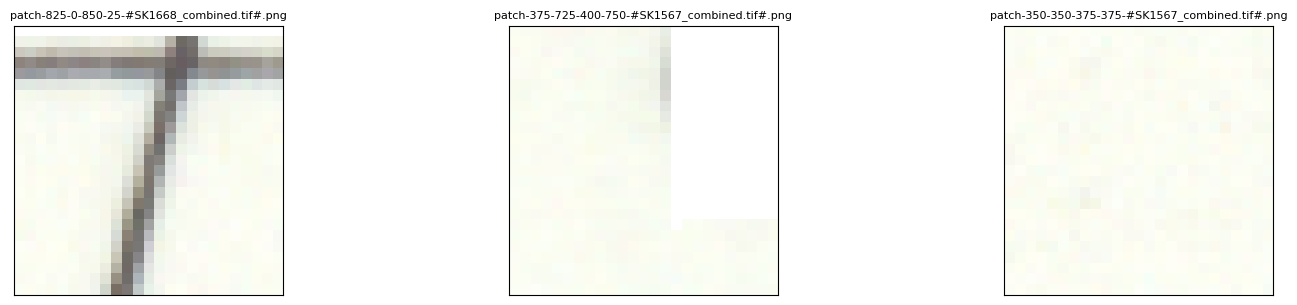

In [6]:
my_files.show_sample(num_samples=3, tree_level="patch")

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1000x1000 with 1 Axes>]

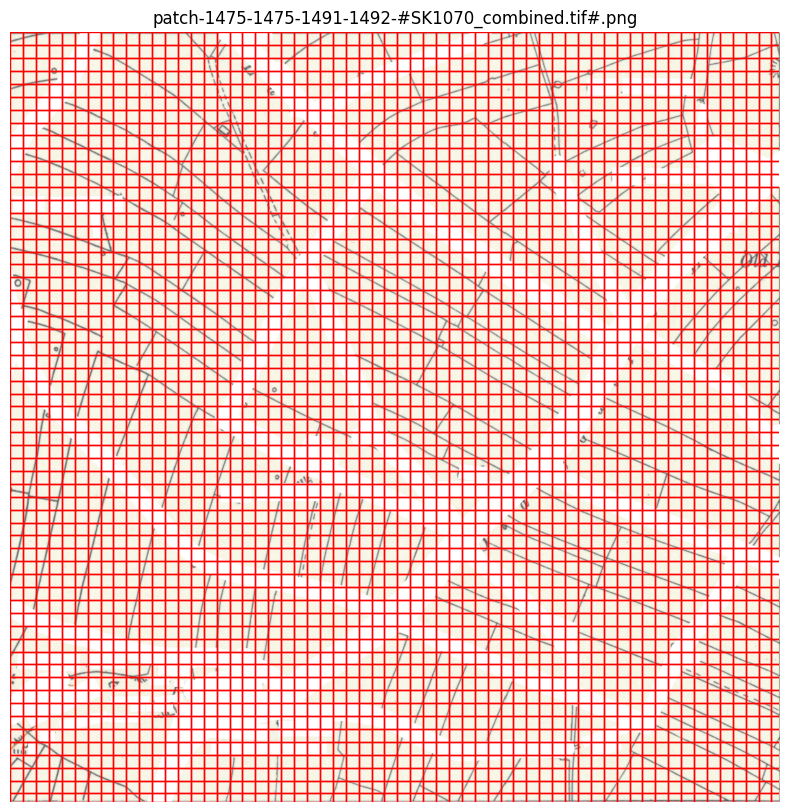

In [7]:
# show patches
parent_list = my_files.list_parents()
my_files.show_parent(parent_list[0])

In [9]:
my_files.calc_pixel_stats()
parent_df, patch_df = my_files.convert_images()
parent_df["url"]="fake_url"

  0%|          | 0/13 [00:00<?, ?it/s]

### Annotate

In [18]:
from mapreader import Annotator

annotator = Annotator(
    patch_df=patch_df,
    parent_df=parent_df,
    task_name="walls",
    labels=["no_wall", "wall"],
    annotations_dir = "../content/annotations_1950/",
    username="DavidA",
    show_context=True,
)

annotator.annotate(resize_to=300, show_context=True, surrounding=3) #to resize up the tiny patch, you might also want show_context=False as its confusing

Output(layout=Layout(align_items='center', display='flex', flex_flow='column'))

In [19]:
# save annotations
annotator.annotations_file

'../content/annotations_1950/walls_#DavidA#-caa624db443ea99d131b03bcff56f254.csv'

### Train

In [21]:
# Load and check annotations 

import pandas as pd

df = pd.read_csv(annotator.annotations_file, index_col=0)
df["image_id"]=df.index

from mapreader import AnnotationsLoader

annotated_images = AnnotationsLoader()
annotated_images.load(annotations=df)

[INFO] Number of annotations:   1000

[INFO] Number of instances of each label (from column "label"):
    - no_wall:  633
    - wall:  367



In [22]:
# view the data
annotated_images.annotations

image_path  \
image_id                                                                                             
patch-0-0-25-25-#SK1070_combined.tif#.png        c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-100-25-125-#SK1070_combined.tif#.png     c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1000-25-1025-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1025-25-1050-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1050-25-1075-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
...                                                                                            ...   
patch-75-875-100-900-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-75-900-100-925-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-75-925-100-950-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-75-950-100-975-#SK1070_combined.tif#.png   c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-75-975-100-1000-#SK1070_combined.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   

                                                label  \
image_id                                                
patch-0-0-25-25-#SK1070_combined.tif#.png        wall   
patch-0-100-25-125-#SK1070_combined.tif#.png     wall   
patch-0-1000-25-1025-#SK1070_combined.tif#.png   wall   
patch-0-1025-25-1050-#SK1070_combined.tif#.png   wall   
patch-0-1050-25-1075-#SK1070_combined.tif#.png   wall   
...                                               ...   
patch-75-875-100-900-#SK1070_combined.tif#.png   wall   
patch-75-900-100-925-#SK1070_combined.tif#.png   wall   
patch-75-925-100-950-#SK1070_combined.tif#.png   wall   
patch-75-950-100-975-#SK1070_combined.tif#.png   wall   
patch-75-975-100-1000-#SK1070_combined.tif#.png  wall   

                                                                                        image_id  \
image_id                                                                                           
patch-0-0-25-25-#SK1070_combined.tif#.png              patch-0-0-25-25-#SK1070_combined.tif#.png   
patch-0-100-25-125-#SK1070_combined.tif#.png        patch-0-100-25-125-#SK1070_combined.tif#.png   
patch-0-1000-25-1025-#SK1070_combined.tif#.png    patch-0-1000-25-1025-#SK1070_combined.tif#.png   
patch-0-1025-25-1050-#SK1070_combined.tif#.png    patch-0-1025-25-1050-#SK1070_combined.tif#.png   
patch-0-1050-25-1075-#SK1070_combined.tif#.png    patch-0-1050-25-1075-#SK1070_combined.tif#.png   
...                                                                                          ...   
patch-75-875-100-900-#SK1070_combined.tif#.png    patch-75-875-100-900-#SK1070_combined.tif#.png   
patch-75-900-100-925-#SK1070_combined.tif#.png    patch-75-900-100-925-#SK1070_combined.tif#.png   
patch-75-925-100-950-#SK1070_combined.tif#.png    patch-75-925-100-950-#SK1070_combined.tif#.png   
patch-75-950-100-975-#SK1070_combined.tif#.png    patch-75-950-100-975-#SK1070_combined.tif#.png   
patch-75-975-100-1000-#SK1070_combined.tif#.png  patch-75-975-100-1000-#SK1070_combined.tif#.png   

                                                 label_index  
image_id                                                      
patch-0-0-25-25-#SK1070_combined.tif#.png                  0  
patch-0-100-25-125-#SK1070_combined.tif#.png               0  
patch-0-1000-25-1025-#SK1070_combined.tif#.png             0  
patch-0-1025-25-1050-#SK1070_combined.tif#.png             0  
patch-0-1050-25-1075-#SK1070_combined.tif#.png             0  
...                                                      ...  
patch-75-875-100-900-#SK1070_combined.tif#.png             0  
patch-75-900-100-925-#SK1070_combined.tif#.png             0  
patch-75-925-100-950-#SK1070_combined.tif#.png             0  
patch-75-950-100-975-#SK1

In [36]:
# label map
annotated_images.labels_map

{0: 'wall', 1: 'no_wall'}

In [29]:
# look at no walls
annotated_images.show_image_labels("no_wall")

AttributeError: 'AnnotationsLoader' object has no attribute 'show_image_labels'

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 1000.


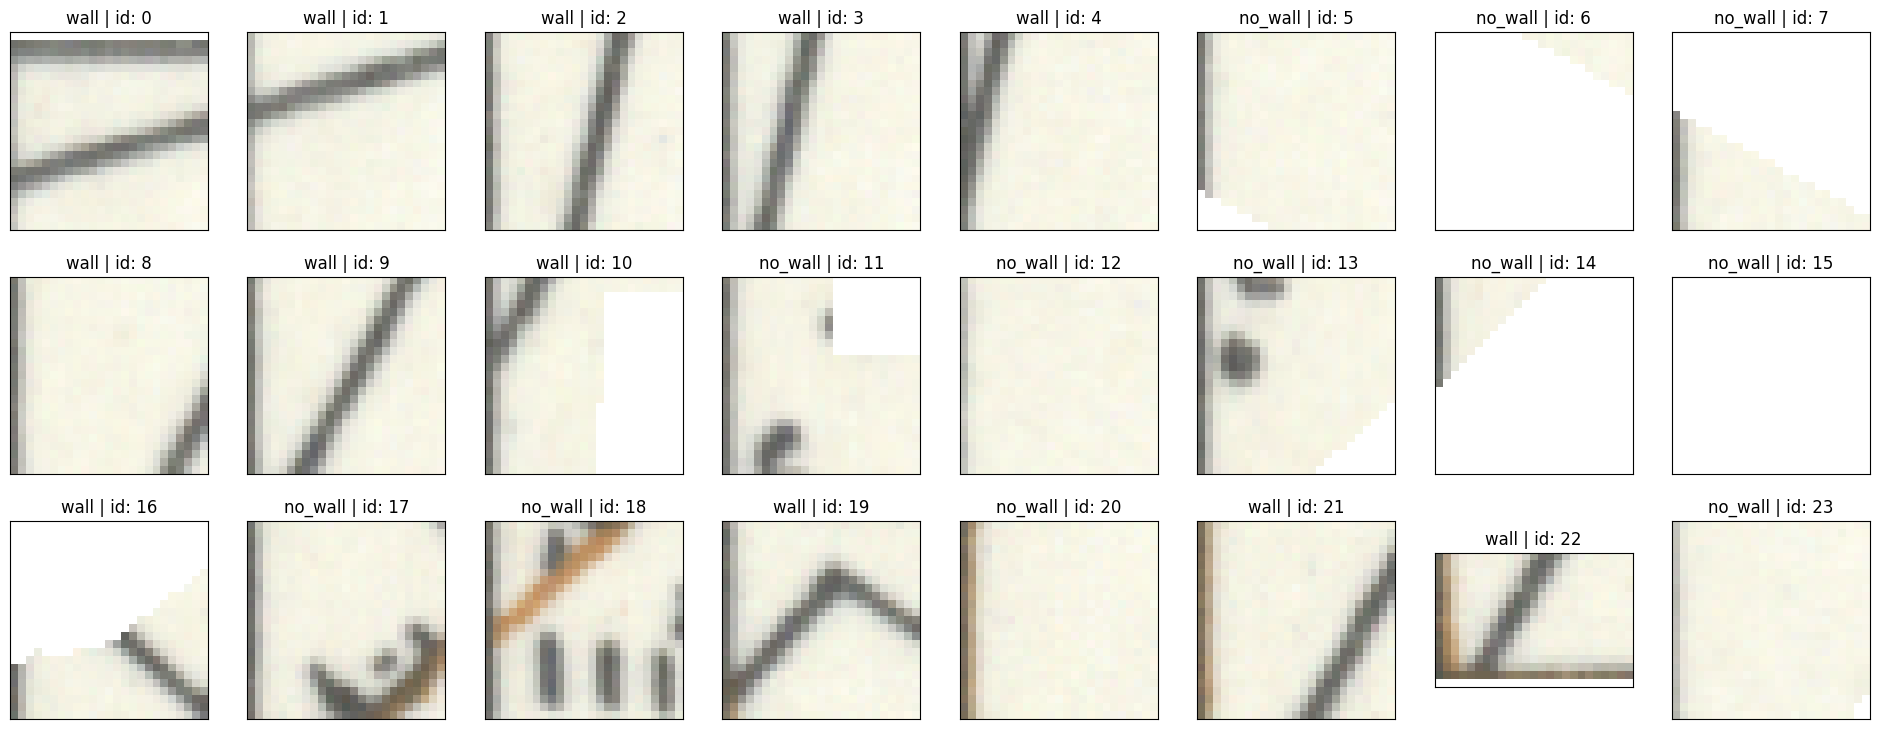

[INFO] IDs of current patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[INFO] Exited.


In [30]:
# walls
annotated_images.review_labels()

In [32]:
# Prepare datasets and dataloaders
dataloaders = annotated_images.create_dataloaders()

[INFO] Using default sampler.


### Train

In [37]:
from mapreader import ClassifierContainer
my_classifier = ClassifierContainer("resnet18", annotated_images.labels_map, dataloaders)

[INFO] Device is set to cpu
[INFO] Initializing model.
[INFO] Loaded "train" with 700 items.
[INFO] Loaded "val" with 150 items.
[INFO] Loaded "test" with 150 items.


In [38]:
# loss function
my_classifier.add_criterion("cross-entropy")

[INFO] Using "CrossEntropyLoss()" as criterion.


In [39]:
# optimizer 
my_classifier.initialize_optimizer()

In [40]:
# scheduler
my_classifier.initialize_scheduler()

In [41]:
# train with default 25 epochs
my_classifier.train()

[INFO] Each step will pass: ['train', 'val'].
2024-01-05 13:37:12 PC05258 [INFO] train    -- 1/25 --     16/700 (  2.3% ) -- Loss: 0.426
2024-01-05 13:37:15 PC05258 [INFO] train    -- 1/25 --     96/700 ( 13.7% ) -- Loss: 1.562
2024-01-05 13:37:19 PC05258 [INFO] train    -- 1/25 --    176/700 ( 25.1% ) -- Loss: 0.815
2024-01-05 13:37:22 PC05258 [INFO] train    -- 1/25 --    256/700 ( 36.6% ) -- Loss: 0.904
2024-01-05 13:37:27 PC05258 [INFO] train    -- 1/25 --    336/700 ( 48.0% ) -- Loss: 0.325
2024-01-05 13:37:34 PC05258 [INFO] train    -- 1/25 --    416/700 ( 59.4% ) -- Loss: 0.612
2024-01-05 13:37:40 PC05258 [INFO] train    -- 1/25 --    496/700 ( 70.9% ) -- Loss: 0.273
2024-01-05 13:37:46 PC05258 [INFO] train    -- 1/25 --    576/700 ( 82.3% ) -- Loss: 0.421
2024-01-05 13:37:52 PC05258 [INFO] train    -- 1/25 --    656/700 ( 93.7% ) -- Loss: 0.273
2024-01-05 13:37:55 PC05258 [INFO] train    -- 1/25 -- Loss: 0.446; F_macro: 82.24; R_macro: 80.65
2024-01-05 13:37:56 PC05258 [INFO] v

### Plot metrics

In [42]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

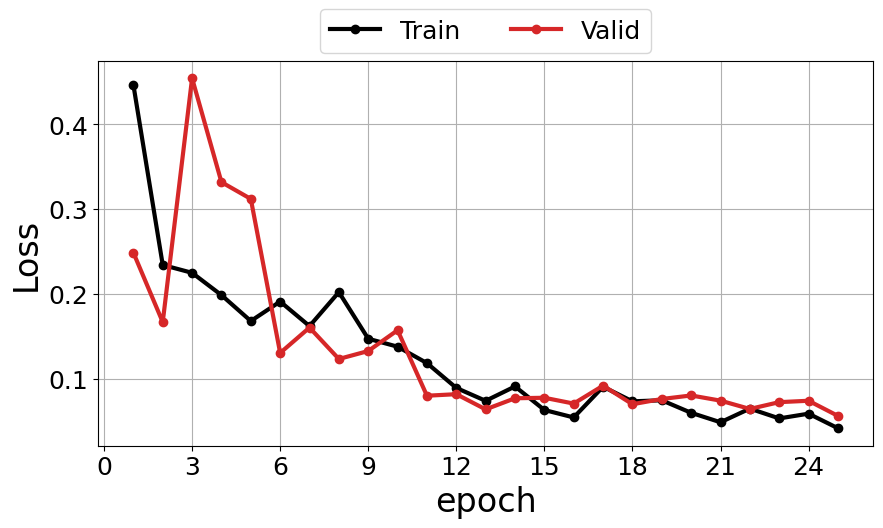

In [43]:
# loss per epoch of training and validation
my_classifier.plot_metric(
    y_axis=["epoch_loss_train", "epoch_loss_val"],
    y_label="Loss",
    legends=["Train", "Valid"],
)

### Testing

In [44]:
my_classifier.inference(set_name="test")

[INFO] Each step will pass: ['test'].
2024-01-05 14:02:35 PC05258 [INFO] test     -- 26/26 --     16/150 ( 10.7% ) -- 
2024-01-05 14:02:36 PC05258 [INFO] test     -- 26/26 --     96/150 ( 64.0% ) -- 
[INFO] Total time: 0m 2s


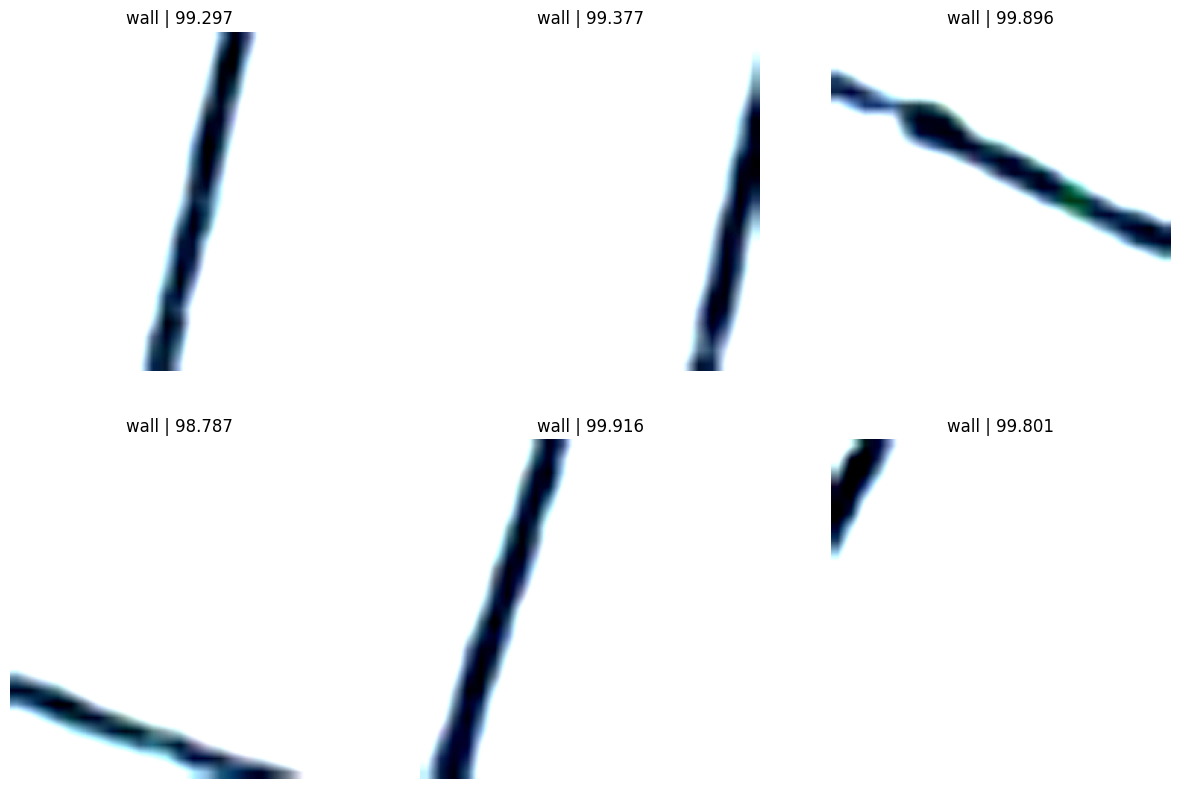

In [45]:
# prediction sample
my_classifier.show_inference_sample_results(label="wall")

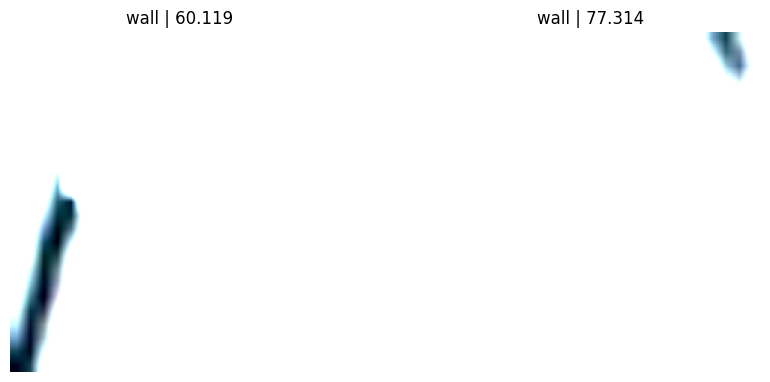

In [50]:
# prediction sample
my_classifier.show_inference_sample_results(label="wall", max_conf=80)

In [53]:
my_classifier.calculate_add_metrics(
    y_true=my_classifier.orig_label,
    y_pred=my_classifier.pred_label,
    y_score=my_classifier.pred_conf,
    phase="test",
)

In [55]:
my_classifier.metrics["epoch_rocauc_macro_test"]

[0.7846889952153111]

### Save

In [56]:
my_classifier.save("test_1.pkl")

### Model Inference

In [57]:
from mapreader import PatchDataset

In [72]:
infer = PatchDataset("../content/annotations_1950/walls_#DavidA#-caa624db443ea99d131b03bcff56f254.csv", delimiter=",", transform="test")

[INFO] Reading "../content/annotations_1950/walls_#DavidA#-caa624db443ea99d131b03bcff56f254.csv".


In [74]:
# add this dataset to ClassifierContainer()
my_classifier.load_dataset(infer, set_name="infer")

In [75]:
my_classifier.inference(set_name="infer")

[INFO] Each step will pass: ['infer'].
2024-01-05 14:56:08 PC05258 [INFO] infer    -- 26/26 --    16/1000 (  1.6% ) -- 
2024-01-05 14:56:09 PC05258 [INFO] infer    -- 26/26 --    96/1000 (  9.6% ) -- 
2024-01-05 14:56:10 PC05258 [INFO] infer    -- 26/26 --   176/1000 ( 17.6% ) -- 
2024-01-05 14:56:11 PC05258 [INFO] infer    -- 26/26 --   256/1000 ( 25.6% ) -- 
2024-01-05 14:56:12 PC05258 [INFO] infer    -- 26/26 --   336/1000 ( 33.6% ) -- 
2024-01-05 14:56:13 PC05258 [INFO] infer    -- 26/26 --   416/1000 ( 41.6% ) -- 
2024-01-05 14:56:15 PC05258 [INFO] infer    -- 26/26 --   496/1000 ( 49.6% ) -- 
2024-01-05 14:56:16 PC05258 [INFO] infer    -- 26/26 --   576/1000 ( 57.6% ) -- 
2024-01-05 14:56:17 PC05258 [INFO] infer    -- 26/26 --   656/1000 ( 65.6% ) -- 
2024-01-05 14:56:18 PC05258 [INFO] infer    -- 26/26 --   736/1000 ( 73.6% ) -- 
2024-01-05 14:56:19 PC05258 [INFO] infer    -- 26/26 --   816/1000 ( 81.6% ) -- 
2024-01-05 14:56:20 PC05258 [INFO] infer    -- 26/26 --   896/1000 ( 8

### Add predictions to metadata and save

In [76]:
import numpy as np

infer.patch_df['predicted_label'] = my_classifier.pred_label
infer.patch_df['pred'] = my_classifier.pred_label_indices
infer.patch_df['conf'] = np.array(my_classifier.pred_conf).max(axis=1)

In [73]:
infer.patch_df

image_id  \
0          patch-0-0-25-25-#SK1070_combined.tif#.png   
1       patch-0-100-25-125-#SK1070_combined.tif#.png   
2     patch-0-1000-25-1025-#SK1070_combined.tif#.png   
3     patch-0-1025-25-1050-#SK1070_combined.tif#.png   
4     patch-0-1050-25-1075-#SK1070_combined.tif#.png   
..                                               ...   
995   patch-75-875-100-900-#SK1070_combined.tif#.png   
996   patch-75-900-100-925-#SK1070_combined.tif#.png   
997   patch-75-925-100-950-#SK1070_combined.tif#.png   
998   patch-75-950-100-975-#SK1070_combined.tif#.png   
999  patch-75-975-100-1000-#SK1070_combined.tif#.png   

                                            image_path label  
0    c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
1    c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
2    c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
3    c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
4    c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
..                                                 ...   ...  
995  c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
996  c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
997  c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
998  c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  
999  c:\Users\alexad\Documents\GitHub\cnn-boundarie...  wall  

[1000 rows x 3 columns]

In [84]:
from mapreader import load_patches

my_maps = load_patches(patch_paths = "../content/tifs/patches/*png", parent_paths="../content/tifs/masked/*.tif")

infer_df = infer.patch_df
my_maps.add_metadata(infer_df, tree_level='patch') # add dataframe as metadata
my_maps.add_shape()

parent_list = my_maps.list_parents()
my_maps.show_parent(parent_list[0], column_to_plot="conf", vmin=0, vmax=1, alpha=0.5, patch_border=False)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/46800 [00:00<?, ?it/s]

ValueError: [ERROR] Metadata is missing information for: ['patch-500-1300-525-1325-#SK1678_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1070_combined.tif#.png', 'patch-525-1150-550-1175-#SK1768_combined.tif#.png', 'patch-1475-1050-1490-1075-#SK1868_combined.tif#.png', 'patch-775-1125-800-1150-#SK1767_combined.tif#.png', 'patch-1325-225-1350-250-#SK1469_combined.tif#.png', 'patch-425-1200-450-1225-#SK1570_combined.tif#.png', 'patch-400-350-425-375-#SK1668_combined.tif#.png', 'patch-1075-475-1100-500-#SK1070_combined.tif#.png', 'patch-1075-500-1100-525-#SK1468_combined.tif#.png', 'patch-225-525-250-550-#SK1867_combined.tif#.png', 'patch-550-0-575-25-#SK1767_combined.tif#.png', 'patch-125-975-150-1000-#SK1469_combined.tif#.png', 'patch-475-1250-500-1275-#SK1469_combined.tif#.png', 'patch-575-50-600-75-#SK1767_combined.tif#.png', 'patch-175-350-200-375-#SK1678_combined.tif#.png', 'patch-1025-50-1050-75-#SK1070_combined.tif#.png', 'patch-1475-500-1492-525-#SK1570_combined.tif#.png', 'patch-425-125-450-150-#SK1474_combined.tif#.png', 'patch-575-550-600-575-#SK1474_combined.tif#.png', 'patch-900-550-925-575-#SK1678_combined.tif#.png', 'patch-1475-1350-1491-1375-#SK1768_combined.tif#.png', 'patch-425-50-450-75-#SK1567_combined.tif#.png', 'patch-675-975-700-1000-#SK1474_combined.tif#.png', 'patch-375-375-400-400-#SK1570_combined.tif#.png', 'patch-550-1000-575-1025-#SK1867_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1070_combined.tif#.png', 'patch-775-700-800-725-#SK1668_combined.tif#.png', 'patch-350-625-375-650-#SK1570_combined.tif#.png', 'patch-1375-200-1400-225-#SK1468_combined.tif#.png', 'patch-1375-175-1400-200-#SK1570_combined.tif#.png', 'patch-575-100-600-125-#SK1474_combined.tif#.png', 'patch-725-225-750-250-#SK1567_combined.tif#.png', 'patch-100-250-125-275-#SK1474_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1668_combined.tif#.png', 'patch-25-800-50-825-#SK1567_combined.tif#.png', 'patch-525-25-550-50-#SK1867_combined.tif#.png', 'patch-825-100-850-125-#SK1668_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1476_combined.tif#.png', 'patch-325-525-350-550-#SK1868_combined.tif#.png', 'patch-1100-725-1125-750-#SK1070_combined.tif#.png', 'patch-450-1200-475-1225-#SK1668_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1767_combined.tif#.png', 'patch-900-1250-925-1275-#SK1070_combined.tif#.png', 'patch-375-1125-400-1150-#SK1678_combined.tif#.png', 'patch-525-1075-550-1100-#SK1868_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1668_combined.tif#.png', 'patch-100-450-125-475-#SK1678_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1476_combined.tif#.png', 'patch-1325-300-1350-325-#SK1768_combined.tif#.png', 'patch-375-1400-400-1425-#SK1678_combined.tif#.png', 'patch-1025-350-1050-375-#SK1469_combined.tif#.png', 'patch-850-1325-875-1350-#SK1469_combined.tif#.png', 'patch-100-200-125-225-#SK1468_combined.tif#.png', 'patch-175-25-200-50-#SK1567_combined.tif#.png', 'patch-1000-450-1025-475-#SK1468_combined.tif#.png', 'patch-975-975-1000-1000-#SK1567_combined.tif#.png', 'patch-1175-150-1200-175-#SK1678_combined.tif#.png', 'patch-525-100-550-125-#SK1668_combined.tif#.png', 'patch-500-1075-525-1100-#SK1678_combined.tif#.png', 'patch-1100-400-1125-425-#SK1868_combined.tif#.png', 'patch-625-950-650-975-#SK1868_combined.tif#.png', 'patch-300-1475-325-1491-#SK1474_combined.tif#.png', 'patch-375-1100-400-1125-#SK1474_combined.tif#.png', 'patch-975-25-1000-50-#SK1567_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1070_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1668_combined.tif#.png', 'patch-1425-100-1450-125-#SK1867_combined.tif#.png', 'patch-975-500-1000-525-#SK1868_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1468_combined.tif#.png', 'patch-775-700-800-725-#SK1570_combined.tif#.png', 'patch-100-1475-125-1492-#SK1468_combined.tif#.png', 'patch-100-1325-125-1350-#SK1768_combined.tif#.png', 'patch-450-1200-475-1225-#SK1678_combined.tif#.png', 'patch-1250-900-1275-925-#SK1070_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1070_combined.tif#.png', 'patch-825-925-850-950-#SK1868_combined.tif#.png', 'patch-1075-250-1100-275-#SK1474_combined.tif#.png', 'patch-650-925-675-950-#SK1868_combined.tif#.png', 'patch-950-1175-975-1200-#SK1868_combined.tif#.png', 'patch-300-1450-325-1475-#SK1474_combined.tif#.png', 'patch-550-1050-575-1075-#SK1468_combined.tif#.png', 'patch-1350-225-1375-250-#SK1768_combined.tif#.png', 'patch-1200-400-1225-425-#SK1474_combined.tif#.png', 'patch-925-600-950-625-#SK1668_combined.tif#.png', 'patch-350-925-375-950-#SK1570_combined.tif#.png', 'patch-450-500-475-525-#SK1867_combined.tif#.png', 'patch-150-1150-175-1175-#SK1476_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1570_combined.tif#.png', 'patch-725-75-750-100-#SK1474_combined.tif#.png', 'patch-625-50-650-75-#SK1768_combined.tif#.png', 'patch-525-700-550-725-#SK1476_combined.tif#.png', 'patch-1375-1475-1400-1491-#SK1668_combined.tif#.png', 'patch-750-1475-775-1492-#SK1469_combined.tif#.png', 'patch-375-100-400-125-#SK1867_combined.tif#.png', 'patch-800-1025-825-1050-#SK1468_combined.tif#.png', 'patch-900-150-925-175-#SK1767_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1070_combined.tif#.png', 'patch-50-1125-75-1150-#SK1567_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1469_combined.tif#.png', 'patch-1325-50-1350-75-#SK1469_combined.tif#.png', 'patch-400-525-425-550-#SK1867_combined.tif#.png', 'patch-75-275-100-300-#SK1678_combined.tif#.png', 'patch-875-825-900-850-#SK1668_combined.tif#.png', 'patch-1275-25-1300-50-#SK1767_combined.tif#.png', 'patch-1250-675-1275-700-#SK1767_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1468_combined.tif#.png', 'patch-1025-275-1050-300-#SK1767_combined.tif#.png', 'patch-1100-125-1125-150-#SK1678_combined.tif#.png', 'patch-900-350-925-375-#SK1868_combined.tif#.png', 'patch-950-700-975-725-#SK1868_combined.tif#.png', 'patch-950-650-975-675-#SK1767_combined.tif#.png', 'patch-1175-775-1200-800-#SK1567_combined.tif#.png', 'patch-900-450-925-475-#SK1867_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1668_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1567_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1570_combined.tif#.png', 'patch-300-175-325-200-#SK1867_combined.tif#.png', 'patch-450-350-475-375-#SK1474_combined.tif#.png', 'patch-825-700-850-725-#SK1570_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1868_combined.tif#.png', 'patch-1300-450-1325-475-#SK1867_combined.tif#.png', 'patch-925-1150-950-1175-#SK1468_combined.tif#.png', 'patch-500-725-525-750-#SK1468_combined.tif#.png', 'patch-1450-750-1475-775-#SK1678_combined.tif#.png', 'patch-1450-650-1475-675-#SK1867_combined.tif#.png', 'patch-50-650-75-675-#SK1476_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1474_combined.tif#.png', 'patch-225-1350-250-1375-#SK1767_combined.tif#.png', 'patch-450-1325-475-1350-#SK1768_combined.tif#.png', 'patch-750-425-775-450-#SK1868_combined.tif#.png', 'patch-750-600-775-625-#SK1468_combined.tif#.png', 'patch-425-625-450-650-#SK1570_combined.tif#.png', 'patch-100-1300-125-1325-#SK1474_combined.tif#.png', 'patch-525-25-550-50-#SK1868_combined.tif#.png', 'patch-75-1200-100-1225-#SK1867_combined.tif#.png', 'patch-1200-125-1225-150-#SK1668_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1868_combined.tif#.png', 'patch-900-50-925-75-#SK1767_combined.tif#.png', 'patch-1050-125-1075-150-#SK1767_combined.tif#.png', 'patch-1225-100-1250-125-#SK1469_combined.tif#.png', 'patch-500-900-525-925-#SK1070_combined.tif#.png', 'patch-525-1025-550-1050-#SK1678_combined.tif#.png', 'patch-550-675-575-700-#SK1868_combined.tif#.png', 'patch-750-550-775-575-#SK1867_combined.tif#.png', 'patch-825-1350-850-1375-#SK1070_combined.tif#.png', 'patch-550-50-575-75-#SK1474_combined.tif#.png', 'patch-450-950-475-975-#SK1767_combined.tif#.png', 'patch-700-1325-725-1350-#SK1070_combined.tif#.png', 'patch-275-600-300-625-#SK1474_combined.tif#.png', 'patch-725-275-750-300-#SK1768_combined.tif#.png', 'patch-450-1075-475-1100-#SK1768_combined.tif#.png', 'patch-950-600-975-625-#SK1468_combined.tif#.png', 'patch-200-650-225-675-#SK1567_combined.tif#.png', 'patch-250-1325-275-1350-#SK1868_combined.tif#.png', 'patch-300-675-325-700-#SK1767_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1868_combined.tif#.png', 'patch-75-1425-100-1450-#SK1678_combined.tif#.png', 'patch-1150-375-1175-400-#SK1768_combined.tif#.png', 'patch-725-1025-750-1050-#SK1767_combined.tif#.png', 'patch-675-650-700-675-#SK1668_combined.tif#.png', 'patch-1250-900-1275-925-#SK1570_combined.tif#.png', 'patch-650-850-675-875-#SK1867_combined.tif#.png', 'patch-1325-700-1350-725-#SK1070_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1476_combined.tif#.png', 'patch-75-1075-100-1100-#SK1567_combined.tif#.png', 'patch-550-50-575-75-#SK1070_combined.tif#.png', 'patch-1175-425-1200-450-#SK1867_combined.tif#.png', 'patch-225-25-250-50-#SK1469_combined.tif#.png', 'patch-375-1300-400-1325-#SK1668_combined.tif#.png', 'patch-300-450-325-475-#SK1668_combined.tif#.png', 'patch-1425-400-1450-425-#SK1474_combined.tif#.png', 'patch-1075-800-1100-825-#SK1468_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1469_combined.tif#.png', 'patch-50-175-75-200-#SK1868_combined.tif#.png', 'patch-900-200-925-225-#SK1768_combined.tif#.png', 'patch-50-150-75-175-#SK1567_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1678_combined.tif#.png', 'patch-1025-375-1050-400-#SK1678_combined.tif#.png', 'patch-1225-0-1250-25-#SK1767_combined.tif#.png', 'patch-1450-625-1475-650-#SK1768_combined.tif#.png', 'patch-150-1375-175-1400-#SK1567_combined.tif#.png', 'patch-650-1450-675-1475-#SK1570_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1868_combined.tif#.png', 'patch-1200-1475-1225-1492-#SK1469_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1567_combined.tif#.png', 'patch-150-875-175-900-#SK1474_combined.tif#.png', 'patch-225-250-250-275-#SK1868_combined.tif#.png', 'patch-625-1300-650-1325-#SK1469_combined.tif#.png', 'patch-650-175-675-200-#SK1567_combined.tif#.png', 'patch-325-1275-350-1300-#SK1868_combined.tif#.png', 'patch-250-1050-275-1075-#SK1868_combined.tif#.png', 'patch-350-450-375-475-#SK1867_combined.tif#.png', 'patch-1475-1325-1492-1350-#SK1476_combined.tif#.png', 'patch-625-150-650-175-#SK1678_combined.tif#.png', 'patch-775-1350-800-1375-#SK1678_combined.tif#.png', 'patch-1100-50-1125-75-#SK1678_combined.tif#.png', 'patch-700-1350-725-1375-#SK1767_combined.tif#.png', 'patch-600-1075-625-1100-#SK1474_combined.tif#.png', 'patch-75-600-100-625-#SK1567_combined.tif#.png', 'patch-475-575-500-600-#SK1678_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1567_combined.tif#.png', 'patch-1075-650-1100-675-#SK1474_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1678_combined.tif#.png', 'patch-850-1075-875-1100-#SK1567_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1767_combined.tif#.png', 'patch-850-700-875-725-#SK1668_combined.tif#.png', 'patch-875-1300-900-1325-#SK1678_combined.tif#.png', 'patch-425-950-450-975-#SK1867_combined.tif#.png', 'patch-150-75-175-100-#SK1767_combined.tif#.png', 'patch-425-1425-450-1450-#SK1468_combined.tif#.png', 'patch-450-1075-475-1100-#SK1476_combined.tif#.png', 'patch-475-125-500-150-#SK1567_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1867_combined.tif#.png', 'patch-1250-750-1275-775-#SK1868_combined.tif#.png', 'patch-275-650-300-675-#SK1768_combined.tif#.png', 'patch-1225-275-1250-300-#SK1070_combined.tif#.png', 'patch-175-1000-200-1025-#SK1767_combined.tif#.png', 'patch-825-275-850-300-#SK1469_combined.tif#.png', 'patch-1250-150-1275-175-#SK1678_combined.tif#.png', 'patch-425-475-450-500-#SK1868_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1668_combined.tif#.png', 'patch-100-1325-125-1350-#SK1868_combined.tif#.png', 'patch-750-1475-775-1491-#SK1668_combined.tif#.png', 'patch-800-1350-825-1375-#SK1567_combined.tif#.png', 'patch-625-1050-650-1075-#SK1868_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1868_combined.tif#.png', 'patch-1375-175-1400-200-#SK1070_combined.tif#.png', 'patch-300-900-325-925-#SK1868_combined.tif#.png', 'patch-1425-650-1450-675-#SK1768_combined.tif#.png', 'patch-625-950-650-975-#SK1567_combined.tif#.png', 'patch-50-825-75-850-#SK1567_combined.tif#.png', 'patch-825-100-850-125-#SK1469_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1474_combined.tif#.png', 'patch-1475-1075-1490-1100-#SK1868_combined.tif#.png', 'patch-375-1050-400-1075-#SK1474_combined.tif#.png', 'patch-425-1425-450-1450-#SK1767_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1668_combined.tif#.png', 'patch-750-225-775-250-#SK1768_combined.tif#.png', 'patch-25-700-50-725-#SK1767_combined.tif#.png', 'patch-125-1150-150-1175-#SK1570_combined.tif#.png', 'patch-350-1175-375-1200-#SK1868_combined.tif#.png', 'patch-50-125-75-150-#SK1668_combined.tif#.png', 'patch-275-300-300-325-#SK1867_combined.tif#.png', 'patch-225-1100-250-1125-#SK1468_combined.tif#.png', 'patch-575-700-600-725-#SK1768_combined.tif#.png', 'patch-25-550-50-575-#SK1567_combined.tif#.png', 'patch-575-25-600-50-#SK1469_combined.tif#.png', 'patch-200-1125-225-1150-#SK1567_combined.tif#.png', 'patch-925-500-950-525-#SK1469_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1668_combined.tif#.png', 'patch-800-1425-825-1450-#SK1070_combined.tif#.png', 'patch-1425-400-1450-425-#SK1768_combined.tif#.png', 'patch-900-275-925-300-#SK1567_combined.tif#.png', 'patch-1050-125-1075-150-#SK1070_combined.tif#.png', 'patch-675-150-700-175-#SK1469_combined.tif#.png', 'patch-150-500-175-525-#SK1474_combined.tif#.png', 'patch-75-0-100-25-#SK1567_combined.tif#.png', 'patch-225-850-250-875-#SK1474_combined.tif#.png', 'patch-100-25-125-50-#SK1867_combined.tif#.png', 'patch-100-625-125-650-#SK1469_combined.tif#.png', 'patch-1175-375-1200-400-#SK1567_combined.tif#.png', 'patch-1075-825-1100-850-#SK1570_combined.tif#.png', 'patch-0-375-25-400-#SK1867_combined.tif#.png', 'patch-675-800-700-825-#SK1768_combined.tif#.png', 'patch-750-700-775-725-#SK1570_combined.tif#.png', 'patch-325-200-350-225-#SK1567_combined.tif#.png', 'patch-725-1250-750-1275-#SK1567_combined.tif#.png', 'patch-725-1425-750-1450-#SK1474_combined.tif#.png', 'patch-500-225-525-250-#SK1474_combined.tif#.png', 'patch-175-450-200-475-#SK1567_combined.tif#.png', 'patch-850-1225-875-1250-#SK1570_combined.tif#.png', 'patch-1025-875-1050-900-#SK1468_combined.tif#.png', 'patch-150-750-175-775-#SK1867_combined.tif#.png', 'patch-250-1150-275-1175-#SK1668_combined.tif#.png', 'patch-325-800-350-825-#SK1469_combined.tif#.png', 'patch-50-1450-75-1475-#SK1476_combined.tif#.png', 'patch-1300-425-1325-450-#SK1668_combined.tif#.png', 'patch-425-1200-450-1225-#SK1868_combined.tif#.png', 'patch-325-1225-350-1250-#SK1767_combined.tif#.png', 'patch-1375-225-1400-250-#SK1768_combined.tif#.png', 'patch-575-200-600-225-#SK1668_combined.tif#.png', 'patch-150-300-175-325-#SK1474_combined.tif#.png', 'patch-650-800-675-825-#SK1867_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1567_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1768_combined.tif#.png', 'patch-775-25-800-50-#SK1868_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1768_combined.tif#.png', 'patch-1200-550-1225-575-#SK1767_combined.tif#.png', 'patch-1125-575-1150-600-#SK1868_combined.tif#.png', 'patch-800-1375-825-1400-#SK1469_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1768_combined.tif#.png', 'patch-500-825-525-850-#SK1567_combined.tif#.png', 'patch-475-975-500-1000-#SK1474_combined.tif#.png', 'patch-1450-875-1475-900-#SK1468_combined.tif#.png', 'patch-425-1375-450-1400-#SK1468_combined.tif#.png', 'patch-925-175-950-200-#SK1668_combined.tif#.png', 'patch-225-850-250-875-#SK1469_combined.tif#.png', 'patch-875-650-900-675-#SK1867_combined.tif#.png', 'patch-575-525-600-550-#SK1567_combined.tif#.png', 'patch-75-575-100-600-#SK1468_combined.tif#.png', 'patch-300-825-325-850-#SK1867_combined.tif#.png', 'patch-575-1175-600-1200-#SK1567_combined.tif#.png', 'patch-525-250-550-275-#SK1767_combined.tif#.png', 'patch-1125-650-1150-675-#SK1668_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1567_combined.tif#.png', 'patch-725-825-750-850-#SK1476_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1678_combined.tif#.png', 'patch-1150-325-1175-350-#SK1476_combined.tif#.png', 'patch-75-1450-100-1475-#SK1469_combined.tif#.png', 'patch-850-25-875-50-#SK1768_combined.tif#.png', 'patch-1350-675-1375-700-#SK1570_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1868_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1469_combined.tif#.png', 'patch-1475-1200-1491-1225-#SK1567_combined.tif#.png', 'patch-1100-250-1125-275-#SK1570_combined.tif#.png', 'patch-175-650-200-675-#SK1474_combined.tif#.png', 'patch-400-1275-425-1300-#SK1570_combined.tif#.png', 'patch-725-825-750-850-#SK1474_combined.tif#.png', 'patch-600-725-625-750-#SK1567_combined.tif#.png', 'patch-700-700-725-725-#SK1570_combined.tif#.png', 'patch-175-1050-200-1075-#SK1678_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1476_combined.tif#.png', 'patch-225-300-250-325-#SK1867_combined.tif#.png', 'patch-375-400-400-425-#SK1767_combined.tif#.png', 'patch-300-0-325-25-#SK1567_combined.tif#.png', 'patch-250-450-275-475-#SK1867_combined.tif#.png', 'patch-1375-450-1400-475-#SK1868_combined.tif#.png', 'patch-425-675-450-700-#SK1474_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1768_combined.tif#.png', 'patch-150-150-175-175-#SK1468_combined.tif#.png', 'patch-725-1375-750-1400-#SK1567_combined.tif#.png', 'patch-1225-475-1250-500-#SK1474_combined.tif#.png', 'patch-0-650-25-675-#SK1678_combined.tif#.png', 'patch-325-950-350-975-#SK1768_combined.tif#.png', 'patch-1200-25-1225-50-#SK1867_combined.tif#.png', 'patch-825-125-850-150-#SK1768_combined.tif#.png', 'patch-950-550-975-575-#SK1867_combined.tif#.png', 'patch-825-75-850-100-#SK1474_combined.tif#.png', 'patch-1175-825-1200-850-#SK1668_combined.tif#.png', 'patch-750-425-775-450-#SK1678_combined.tif#.png', 'patch-1125-550-1150-575-#SK1668_combined.tif#.png', 'patch-625-250-650-275-#SK1469_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1768_combined.tif#.png', 'patch-375-725-400-750-#SK1567_combined.tif#.png', 'patch-75-75-100-100-#SK1867_combined.tif#.png', 'patch-0-900-25-925-#SK1668_combined.tif#.png', 'patch-850-125-875-150-#SK1476_combined.tif#.png', 'patch-425-700-450-725-#SK1767_combined.tif#.png', 'patch-1225-875-1250-900-#SK1469_combined.tif#.png', 'patch-1225-950-1250-975-#SK1768_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1469_combined.tif#.png', 'patch-150-1250-175-1275-#SK1868_combined.tif#.png', 'patch-225-1050-250-1075-#SK1570_combined.tif#.png', 'patch-675-1150-700-1175-#SK1668_combined.tif#.png', 'patch-1325-125-1350-150-#SK1768_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1570_combined.tif#.png', 'patch-250-1375-275-1400-#SK1570_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1476_combined.tif#.png', 'patch-975-100-1000-125-#SK1469_combined.tif#.png', 'patch-625-950-650-975-#SK1668_combined.tif#.png', 'patch-225-1150-250-1175-#SK1767_combined.tif#.png', 'patch-1175-925-1200-950-#SK1567_combined.tif#.png', 'patch-175-1425-200-1450-#SK1570_combined.tif#.png', 'patch-475-600-500-625-#SK1867_combined.tif#.png', 'patch-25-300-50-325-#SK1767_combined.tif#.png', 'patch-1475-1250-1492-1275-#SK1678_combined.tif#.png', 'patch-850-250-875-275-#SK1867_combined.tif#.png', 'patch-750-175-775-200-#SK1668_combined.tif#.png', 'patch-500-750-525-775-#SK1070_combined.tif#.png', 'patch-175-1375-200-1400-#SK1567_combined.tif#.png', 'patch-400-1450-425-1475-#SK1678_combined.tif#.png', 'patch-825-975-850-1000-#SK1476_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1867_combined.tif#.png', 'patch-175-950-200-975-#SK1767_combined.tif#.png', 'patch-950-500-975-525-#SK1867_combined.tif#.png', 'patch-475-700-500-725-#SK1570_combined.tif#.png', 'patch-1075-750-1100-775-#SK1476_combined.tif#.png', 'patch-1475-600-1491-625-#SK1567_combined.tif#.png', 'patch-75-725-100-750-#SK1768_combined.tif#.png', 'patch-200-100-225-125-#SK1476_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1469_combined.tif#.png', 'patch-150-750-175-775-#SK1567_combined.tif#.png', 'patch-1475-1400-1491-1425-#SK1474_combined.tif#.png', 'patch-425-575-450-600-#SK1567_combined.tif#.png', 'patch-825-850-850-875-#SK1474_combined.tif#.png', 'patch-1075-400-1100-425-#SK1678_combined.tif#.png', 'patch-400-1375-425-1400-#SK1070_combined.tif#.png', 'patch-425-450-450-475-#SK1468_combined.tif#.png', 'patch-1250-525-1275-550-#SK1668_combined.tif#.png', 'patch-725-725-750-750-#SK1474_combined.tif#.png', 'patch-450-1200-475-1225-#SK1476_combined.tif#.png', 'patch-525-575-550-600-#SK1868_combined.tif#.png', 'patch-1150-575-1175-600-#SK1767_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1678_combined.tif#.png', 'patch-425-1200-450-1225-#SK1468_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1070_combined.tif#.png', 'patch-375-950-400-975-#SK1868_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1868_combined.tif#.png', 'patch-125-900-150-925-#SK1867_combined.tif#.png', 'patch-200-1225-225-1250-#SK1768_combined.tif#.png', 'patch-450-1300-475-1325-#SK1668_combined.tif#.png', 'patch-400-1000-425-1025-#SK1868_combined.tif#.png', 'patch-675-200-700-225-#SK1468_combined.tif#.png', 'patch-725-225-750-250-#SK1468_combined.tif#.png', 'patch-75-1375-100-1400-#SK1570_combined.tif#.png', 'patch-1475-325-1490-350-#SK1868_combined.tif#.png', 'patch-775-200-800-225-#SK1476_combined.tif#.png', 'patch-1400-600-1425-625-#SK1867_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1868_combined.tif#.png', 'patch-300-200-325-225-#SK1474_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1768_combined.tif#.png', 'patch-625-550-650-575-#SK1867_combined.tif#.png', 'patch-850-1150-875-1175-#SK1668_combined.tif#.png', 'patch-425-1250-450-1275-#SK1678_combined.tif#.png', 'patch-900-625-925-650-#SK1567_combined.tif#.png', 'patch-1350-325-1375-350-#SK1768_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1567_combined.tif#.png', 'patch-1150-500-1175-525-#SK1567_combined.tif#.png', 'patch-850-425-875-450-#SK1767_combined.tif#.png', 'patch-1475-275-1491-300-#SK1070_combined.tif#.png', 'patch-825-900-850-925-#SK1567_combined.tif#.png', 'patch-1425-875-1450-900-#SK1070_combined.tif#.png', 'patch-1250-300-1275-325-#SK1468_combined.tif#.png', 'patch-1325-0-1350-25-#SK1474_combined.tif#.png', 'patch-800-975-825-1000-#SK1469_combined.tif#.png', 'patch-650-1000-675-1025-#SK1476_combined.tif#.png', 'patch-1125-325-1150-350-#SK1668_combined.tif#.png', 'patch-1275-350-1300-375-#SK1767_combined.tif#.png', 'patch-1175-550-1200-575-#SK1767_combined.tif#.png', 'patch-400-1350-425-1375-#SK1570_combined.tif#.png', 'patch-800-800-825-825-#SK1867_combined.tif#.png', 'patch-475-1400-500-1425-#SK1468_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1868_combined.tif#.png', 'patch-600-1350-625-1375-#SK1474_combined.tif#.png', 'patch-1325-275-1350-300-#SK1570_combined.tif#.png', 'patch-800-25-825-50-#SK1567_combined.tif#.png', 'patch-500-1475-525-1493-#SK1476_combined.tif#.png', 'patch-400-750-425-775-#SK1668_combined.tif#.png', 'patch-700-750-725-775-#SK1678_combined.tif#.png', 'patch-75-750-100-775-#SK1668_combined.tif#.png', 'patch-325-700-350-725-#SK1468_combined.tif#.png', 'patch-225-1450-250-1475-#SK1867_combined.tif#.png', 'patch-425-1125-450-1150-#SK1678_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1570_combined.tif#.png', 'patch-1250-650-1275-675-#SK1567_combined.tif#.png', 'patch-175-325-200-350-#SK1767_combined.tif#.png', 'patch-1475-325-1490-350-#SK1867_combined.tif#.png', 'patch-100-1300-125-1325-#SK1668_combined.tif#.png', 'patch-125-675-150-700-#SK1468_combined.tif#.png', 'patch-875-900-900-925-#SK1867_combined.tif#.png', 'patch-550-1000-575-1025-#SK1678_combined.tif#.png', 'patch-850-0-875-25-#SK1468_combined.tif#.png', 'patch-225-525-250-550-#SK1567_combined.tif#.png', 'patch-350-700-375-725-#SK1678_combined.tif#.png', 'patch-1050-850-1075-875-#SK1768_combined.tif#.png', 'patch-350-500-375-525-#SK1567_combined.tif#.png', 'patch-1250-425-1275-450-#SK1678_combined.tif#.png', 'patch-800-275-825-300-#SK1868_combined.tif#.png', 'patch-1450-200-1475-225-#SK1867_combined.tif#.png', 'patch-125-275-150-300-#SK1468_combined.tif#.png', 'patch-275-1050-300-1075-#SK1868_combined.tif#.png', 'patch-1175-175-1200-200-#SK1678_combined.tif#.png', 'patch-900-575-925-600-#SK1570_combined.tif#.png', 'patch-1075-50-1100-75-#SK1469_combined.tif#.png', 'patch-125-1400-150-1425-#SK1567_combined.tif#.png', 'patch-1300-625-1325-650-#SK1570_combined.tif#.png', 'patch-725-175-750-200-#SK1867_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1767_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1678_combined.tif#.png', 'patch-925-1275-950-1300-#SK1678_combined.tif#.png', 'patch-725-1125-750-1150-#SK1570_combined.tif#.png', 'patch-75-1300-100-1325-#SK1678_combined.tif#.png', 'patch-975-700-1000-725-#SK1468_combined.tif#.png', 'patch-0-150-25-175-#SK1678_combined.tif#.png', 'patch-1225-525-1250-550-#SK1867_combined.tif#.png', 'patch-1250-225-1275-250-#SK1474_combined.tif#.png', 'patch-1050-575-1075-600-#SK1474_combined.tif#.png', 'patch-650-75-675-100-#SK1070_combined.tif#.png', 'patch-625-100-650-125-#SK1070_combined.tif#.png', 'patch-925-225-950-250-#SK1570_combined.tif#.png', 'patch-450-1125-475-1150-#SK1668_combined.tif#.png', 'patch-775-575-800-600-#SK1567_combined.tif#.png', 'patch-1300-600-1325-625-#SK1567_combined.tif#.png', 'patch-575-1275-600-1300-#SK1469_combined.tif#.png', 'patch-825-125-850-150-#SK1868_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1668_combined.tif#.png', 'patch-925-200-950-225-#SK1570_combined.tif#.png', 'patch-75-1175-100-1200-#SK1668_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1469_combined.tif#.png', 'patch-475-1150-500-1175-#SK1567_combined.tif#.png', 'patch-1125-300-1150-325-#SK1678_combined.tif#.png', 'patch-1300-175-1325-200-#SK1768_combined.tif#.png', 'patch-300-575-325-600-#SK1468_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1567_combined.tif#.png', 'patch-1275-700-1300-725-#SK1868_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1474_combined.tif#.png', 'patch-925-1200-950-1225-#SK1070_combined.tif#.png', 'patch-1125-350-1150-375-#SK1570_combined.tif#.png', 'patch-1150-275-1175-300-#SK1678_combined.tif#.png', 'patch-1050-325-1075-350-#SK1668_combined.tif#.png', 'patch-475-450-500-475-#SK1668_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1476_combined.tif#.png', 'patch-1375-250-1400-275-#SK1868_combined.tif#.png', 'patch-1325-625-1350-650-#SK1668_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1469_combined.tif#.png', 'patch-875-75-900-100-#SK1867_combined.tif#.png', 'patch-1175-500-1200-525-#SK1070_combined.tif#.png', 'patch-1300-800-1325-825-#SK1570_combined.tif#.png', 'patch-375-400-400-425-#SK1567_combined.tif#.png', 'patch-175-575-200-600-#SK1468_combined.tif#.png', 'patch-875-500-900-525-#SK1070_combined.tif#.png', 'patch-1250-825-1275-850-#SK1567_combined.tif#.png', 'patch-600-500-625-525-#SK1474_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1570_combined.tif#.png', 'patch-0-200-25-225-#SK1476_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1668_combined.tif#.png', 'patch-850-225-875-250-#SK1767_combined.tif#.png', 'patch-1250-675-1275-700-#SK1469_combined.tif#.png', 'patch-650-425-675-450-#SK1867_combined.tif#.png', 'patch-875-400-900-425-#SK1768_combined.tif#.png', 'patch-700-1100-725-1125-#SK1070_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1070_combined.tif#.png', 'patch-425-575-450-600-#SK1668_combined.tif#.png', 'patch-225-850-250-875-#SK1767_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1867_combined.tif#.png', 'patch-650-325-675-350-#SK1570_combined.tif#.png', 'patch-250-550-275-575-#SK1567_combined.tif#.png', 'patch-350-1125-375-1150-#SK1468_combined.tif#.png', 'patch-925-800-950-825-#SK1867_combined.tif#.png', 'patch-475-350-500-375-#SK1868_combined.tif#.png', 'patch-200-725-225-750-#SK1474_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1468_combined.tif#.png', 'patch-1400-800-1425-825-#SK1570_combined.tif#.png', 'patch-1200-800-1225-825-#SK1570_combined.tif#.png', 'patch-1225-625-1250-650-#SK1567_combined.tif#.png', 'patch-25-1350-50-1375-#SK1868_combined.tif#.png', 'patch-850-1475-875-1492-#SK1070_combined.tif#.png', 'patch-800-525-825-550-#SK1570_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1678_combined.tif#.png', 'patch-1000-775-1025-800-#SK1476_combined.tif#.png', 'patch-1025-75-1050-100-#SK1070_combined.tif#.png', 'patch-250-1300-275-1325-#SK1767_combined.tif#.png', 'patch-1100-1475-1125-1490-#SK1767_combined.tif#.png', 'patch-1350-275-1375-300-#SK1678_combined.tif#.png', 'patch-1050-0-1075-25-#SK1070_combined.tif#.png', 'patch-725-1050-750-1075-#SK1768_combined.tif#.png', 'patch-375-1025-400-1050-#SK1868_combined.tif#.png', 'patch-1300-25-1325-50-#SK1570_combined.tif#.png', 'patch-200-825-225-850-#SK1768_combined.tif#.png', 'patch-1175-900-1200-925-#SK1867_combined.tif#.png', 'patch-400-800-425-825-#SK1668_combined.tif#.png', 'patch-100-400-125-425-#SK1668_combined.tif#.png', 'patch-1175-875-1200-900-#SK1476_combined.tif#.png', 'patch-300-1225-325-1250-#SK1476_combined.tif#.png', 'patch-500-450-525-475-#SK1070_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1678_combined.tif#.png', 'patch-675-1125-700-1150-#SK1474_combined.tif#.png', 'patch-925-1000-950-1025-#SK1567_combined.tif#.png', 'patch-325-1350-350-1375-#SK1867_combined.tif#.png', 'patch-1475-75-1490-100-#SK1868_combined.tif#.png', 'patch-950-350-975-375-#SK1476_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1070_combined.tif#.png', 'patch-475-250-500-275-#SK1868_combined.tif#.png', 'patch-825-1125-850-1150-#SK1570_combined.tif#.png', 'patch-775-975-800-1000-#SK1474_combined.tif#.png', 'patch-100-1275-125-1300-#SK1567_combined.tif#.png', 'patch-900-1125-925-1150-#SK1668_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1567_combined.tif#.png', 'patch-425-1350-450-1375-#SK1668_combined.tif#.png', 'patch-825-1000-850-1025-#SK1468_combined.tif#.png', 'patch-1475-1050-1492-1075-#SK1476_combined.tif#.png', 'patch-425-1050-450-1075-#SK1468_combined.tif#.png', 'patch-950-25-975-50-#SK1474_combined.tif#.png', 'patch-350-850-375-875-#SK1476_combined.tif#.png', 'patch-1400-275-1425-300-#SK1567_combined.tif#.png', 'patch-600-1275-625-1300-#SK1768_combined.tif#.png', 'patch-1075-350-1100-375-#SK1768_combined.tif#.png', 'patch-1000-175-1025-200-#SK1678_combined.tif#.png', 'patch-1300-600-1325-625-#SK1468_combined.tif#.png', 'patch-1475-75-1491-100-#SK1567_combined.tif#.png', 'patch-1125-900-1150-925-#SK1469_combined.tif#.png', 'patch-600-1100-625-1125-#SK1868_combined.tif#.png', 'patch-1275-925-1300-950-#SK1070_combined.tif#.png', 'patch-550-975-575-1000-#SK1468_combined.tif#.png', 'patch-925-225-950-250-#SK1867_combined.tif#.png', 'patch-450-450-475-475-#SK1668_combined.tif#.png', 'patch-625-325-650-350-#SK1678_combined.tif#.png', 'patch-675-875-700-900-#SK1570_combined.tif#.png', 'patch-225-450-250-475-#SK1868_combined.tif#.png', 'patch-150-825-175-850-#SK1678_combined.tif#.png', 'patch-150-925-175-950-#SK1469_combined.tif#.png', 'patch-300-825-325-850-#SK1469_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1767_combined.tif#.png', 'patch-175-125-200-150-#SK1868_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1469_combined.tif#.png', 'patch-1175-600-1200-625-#SK1768_combined.tif#.png', 'patch-1100-950-1125-975-#SK1868_combined.tif#.png', 'patch-1225-1475-1250-1491-#SK1474_combined.tif#.png', 'patch-50-1050-75-1075-#SK1476_combined.tif#.png', 'patch-750-1475-775-1490-#SK1767_combined.tif#.png', 'patch-1475-1175-1490-1200-#SK1668_combined.tif#.png', 'patch-875-1425-900-1450-#SK1567_combined.tif#.png', 'patch-875-1300-900-1325-#SK1469_combined.tif#.png', 'patch-350-975-375-1000-#SK1868_combined.tif#.png', 'patch-50-1425-75-1450-#SK1567_combined.tif#.png', 'patch-150-600-175-625-#SK1476_combined.tif#.png', 'patch-925-550-950-575-#SK1767_combined.tif#.png', 'patch-1450-150-1475-175-#SK1567_combined.tif#.png', 'patch-625-175-650-200-#SK1476_combined.tif#.png', 'patch-1100-775-1125-800-#SK1469_combined.tif#.png', 'patch-200-700-225-725-#SK1678_combined.tif#.png', 'patch-1125-950-1150-975-#SK1867_combined.tif#.png', 'patch-625-750-650-775-#SK1070_combined.tif#.png', 'patch-850-950-875-975-#SK1567_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1678_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1567_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1867_combined.tif#.png', 'patch-325-425-350-450-#SK1567_combined.tif#.png', 'patch-1100-100-1125-125-#SK1469_combined.tif#.png', 'patch-775-1150-800-1175-#SK1868_combined.tif#.png', 'patch-1250-0-1275-25-#SK1474_combined.tif#.png', 'patch-200-1450-225-1475-#SK1570_combined.tif#.png', 'patch-1375-900-1400-925-#SK1668_combined.tif#.png', 'patch-875-875-900-900-#SK1476_combined.tif#.png', 'patch-900-1400-925-1425-#SK1070_combined.tif#.png', 'patch-400-575-425-600-#SK1570_combined.tif#.png', 'patch-75-1475-100-1491-#SK1668_combined.tif#.png', 'patch-800-350-825-375-#SK1474_combined.tif#.png', 'patch-1075-1475-1100-1491-#SK1768_combined.tif#.png', 'patch-1325-450-1350-475-#SK1469_combined.tif#.png', 'patch-1175-750-1200-775-#SK1867_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1668_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1567_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1867_combined.tif#.png', 'patch-200-1250-225-1275-#SK1476_combined.tif#.png', 'patch-150-425-175-450-#SK1668_combined.tif#.png', 'patch-925-1075-950-1100-#SK1768_combined.tif#.png', 'patch-1250-100-1275-125-#SK1768_combined.tif#.png', 'patch-625-525-650-550-#SK1474_combined.tif#.png', 'patch-250-275-275-300-#SK1678_combined.tif#.png', 'patch-1425-950-1450-975-#SK1668_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1868_combined.tif#.png', 'patch-1150-475-1175-500-#SK1468_combined.tif#.png', 'patch-625-925-650-950-#SK1868_combined.tif#.png', 'patch-200-575-225-600-#SK1476_combined.tif#.png', 'patch-525-350-550-375-#SK1474_combined.tif#.png', 'patch-1250-175-1275-200-#SK1768_combined.tif#.png', 'patch-175-250-200-275-#SK1678_combined.tif#.png', 'patch-675-750-700-775-#SK1474_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1868_combined.tif#.png', 'patch-1475-125-1491-150-#SK1474_combined.tif#.png', 'patch-275-200-300-225-#SK1570_combined.tif#.png', 'patch-250-150-275-175-#SK1476_combined.tif#.png', 'patch-150-725-175-750-#SK1668_combined.tif#.png', 'patch-325-925-350-950-#SK1567_combined.tif#.png', 'patch-500-1400-525-1425-#SK1468_combined.tif#.png', 'patch-625-1450-650-1475-#SK1474_combined.tif#.png', 'patch-825-875-850-900-#SK1468_combined.tif#.png', 'patch-900-175-925-200-#SK1678_combined.tif#.png', 'patch-250-1175-275-1200-#SK1867_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1570_combined.tif#.png', 'patch-325-25-350-50-#SK1570_combined.tif#.png', 'patch-275-1100-300-1125-#SK1867_combined.tif#.png', 'patch-1175-575-1200-600-#SK1678_combined.tif#.png', 'patch-800-100-825-125-#SK1070_combined.tif#.png', 'patch-500-250-525-275-#SK1867_combined.tif#.png', 'patch-1275-0-1300-25-#SK1468_combined.tif#.png', 'patch-350-675-375-700-#SK1474_combined.tif#.png', 'patch-425-400-450-425-#SK1468_combined.tif#.png', 'patch-625-100-650-125-#SK1768_combined.tif#.png', 'patch-1325-175-1350-200-#SK1070_combined.tif#.png', 'patch-400-1475-425-1491-#SK1768_combined.tif#.png', 'patch-1300-950-1325-975-#SK1867_combined.tif#.png', 'patch-800-1425-825-1450-#SK1668_combined.tif#.png', 'patch-50-425-75-450-#SK1474_combined.tif#.png', 'patch-875-775-900-800-#SK1567_combined.tif#.png', 'patch-550-200-575-225-#SK1567_combined.tif#.png', 'patch-500-25-525-50-#SK1570_combined.tif#.png', 'patch-675-1425-700-1450-#SK1767_combined.tif#.png', 'patch-900-1375-925-1400-#SK1768_combined.tif#.png', 'patch-1250-100-1275-125-#SK1767_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1070_combined.tif#.png', 'patch-600-575-625-600-#SK1668_combined.tif#.png', 'patch-625-1375-650-1400-#SK1570_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1469_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1867_combined.tif#.png', 'patch-1425-675-1450-700-#SK1767_combined.tif#.png', 'patch-950-725-975-750-#SK1768_combined.tif#.png', 'patch-1325-650-1350-675-#SK1867_combined.tif#.png', 'patch-1350-275-1375-300-#SK1468_combined.tif#.png', 'patch-825-1050-850-1075-#SK1668_combined.tif#.png', 'patch-550-1300-575-1325-#SK1570_combined.tif#.png', 'patch-475-650-500-675-#SK1567_combined.tif#.png', 'patch-875-350-900-375-#SK1678_combined.tif#.png', 'patch-450-1450-475-1475-#SK1476_combined.tif#.png', 'patch-600-975-625-1000-#SK1476_combined.tif#.png', 'patch-1225-275-1250-300-#SK1868_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1474_combined.tif#.png', 'patch-1250-200-1275-225-#SK1469_combined.tif#.png', 'patch-600-475-625-500-#SK1570_combined.tif#.png', 'patch-625-350-650-375-#SK1567_combined.tif#.png', 'patch-150-675-175-700-#SK1474_combined.tif#.png', 'patch-600-275-625-300-#SK1474_combined.tif#.png', 'patch-950-1225-975-1250-#SK1070_combined.tif#.png', 'patch-900-225-925-250-#SK1868_combined.tif#.png', 'patch-1475-1375-1490-1400-#SK1668_combined.tif#.png', 'patch-550-150-575-175-#SK1476_combined.tif#.png', 'patch-575-450-600-475-#SK1867_combined.tif#.png', 'patch-1350-900-1375-925-#SK1476_combined.tif#.png', 'patch-400-425-425-450-#SK1868_combined.tif#.png', 'patch-1450-675-1475-700-#SK1868_combined.tif#.png', 'patch-1100-125-1125-150-#SK1768_combined.tif#.png', 'patch-525-1075-550-1100-#SK1469_combined.tif#.png', 'patch-75-425-100-450-#SK1668_combined.tif#.png', 'patch-400-1275-425-1300-#SK1469_combined.tif#.png', 'patch-700-325-725-350-#SK1768_combined.tif#.png', 'patch-1375-475-1400-500-#SK1867_combined.tif#.png', 'patch-925-850-950-875-#SK1678_combined.tif#.png', 'patch-950-1475-975-1492-#SK1678_combined.tif#.png', 'patch-925-925-950-950-#SK1070_combined.tif#.png', 'patch-400-1400-425-1425-#SK1570_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1469_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1070_combined.tif#.png', 'patch-1050-1475-1075-1491-#SK1868_combined.tif#.png', 'patch-1325-350-1350-375-#SK1567_combined.tif#.png', 'patch-1175-500-1200-525-#SK1868_combined.tif#.png', 'patch-1000-175-1025-200-#SK1867_combined.tif#.png', 'patch-400-925-425-950-#SK1867_combined.tif#.png', 'patch-475-1025-500-1050-#SK1867_combined.tif#.png', 'patch-1225-400-1250-425-#SK1570_combined.tif#.png', 'patch-675-225-700-250-#SK1867_combined.tif#.png', 'patch-975-275-1000-300-#SK1468_combined.tif#.png', 'patch-850-1425-875-1450-#SK1867_combined.tif#.png', 'patch-850-1125-875-1150-#SK1867_combined.tif#.png', 'patch-825-200-850-225-#SK1468_combined.tif#.png', 'patch-0-825-25-850-#SK1767_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1668_combined.tif#.png', 'patch-225-100-250-125-#SK1668_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1570_combined.tif#.png', 'patch-25-1325-50-1350-#SK1768_combined.tif#.png', 'patch-675-1150-700-1175-#SK1678_combined.tif#.png', 'patch-375-125-400-150-#SK1678_combined.tif#.png', 'patch-225-275-250-300-#SK1474_combined.tif#.png', 'patch-575-275-600-300-#SK1570_combined.tif#.png', 'patch-75-1400-100-1425-#SK1476_combined.tif#.png', 'patch-1325-625-1350-650-#SK1767_combined.tif#.png', 'patch-1150-950-1175-975-#SK1768_combined.tif#.png', 'patch-100-100-125-125-#SK1468_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1867_combined.tif#.png', 'patch-225-100-250-125-#SK1678_combined.tif#.png', 'patch-250-1450-275-1475-#SK1469_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1768_combined.tif#.png', 'patch-1375-50-1400-75-#SK1767_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1567_combined.tif#.png', 'patch-125-450-150-475-#SK1469_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1567_combined.tif#.png', 'patch-225-375-250-400-#SK1469_combined.tif#.png', 'patch-650-275-675-300-#SK1767_combined.tif#.png', 'patch-175-125-200-150-#SK1668_combined.tif#.png', 'patch-750-350-775-375-#SK1474_combined.tif#.png', 'patch-25-1275-50-1300-#SK1469_combined.tif#.png', 'patch-1275-375-1300-400-#SK1868_combined.tif#.png', 'patch-675-200-700-225-#SK1668_combined.tif#.png', 'patch-550-75-575-100-#SK1570_combined.tif#.png', 'patch-875-1000-900-1025-#SK1570_combined.tif#.png', 'patch-200-675-225-700-#SK1570_combined.tif#.png', 'patch-575-175-600-200-#SK1476_combined.tif#.png', 'patch-1350-1475-1375-1490-#SK1867_combined.tif#.png', 'patch-1150-225-1175-250-#SK1867_combined.tif#.png', 'patch-875-950-900-975-#SK1476_combined.tif#.png', 'patch-550-1200-575-1225-#SK1070_combined.tif#.png', 'patch-1350-325-1375-350-#SK1868_combined.tif#.png', 'patch-1375-200-1400-225-#SK1867_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1469_combined.tif#.png', 'patch-75-1275-100-1300-#SK1668_combined.tif#.png', 'patch-275-1250-300-1275-#SK1474_combined.tif#.png', 'patch-250-575-275-600-#SK1567_combined.tif#.png', 'patch-850-225-875-250-#SK1070_combined.tif#.png', 'patch-225-675-250-700-#SK1868_combined.tif#.png', 'patch-175-1425-200-1450-#SK1768_combined.tif#.png', 'patch-225-875-250-900-#SK1570_combined.tif#.png', 'patch-50-1250-75-1275-#SK1469_combined.tif#.png', 'patch-225-575-250-600-#SK1567_combined.tif#.png', 'patch-750-850-775-875-#SK1469_combined.tif#.png', 'patch-1025-100-1050-125-#SK1678_combined.tif#.png', 'patch-1100-425-1125-450-#SK1468_combined.tif#.png', 'patch-375-600-400-625-#SK1476_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1767_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1469_combined.tif#.png', 'patch-1050-725-1075-750-#SK1678_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1678_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1868_combined.tif#.png', 'patch-1200-500-1225-525-#SK1468_combined.tif#.png', 'patch-625-1100-650-1125-#SK1070_combined.tif#.png', 'patch-750-975-775-1000-#SK1476_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1476_combined.tif#.png', 'patch-875-275-900-300-#SK1468_combined.tif#.png', 'patch-800-250-825-275-#SK1570_combined.tif#.png', 'patch-250-700-275-725-#SK1567_combined.tif#.png', 'patch-650-1025-675-1050-#SK1678_combined.tif#.png', 'patch-1425-75-1450-100-#SK1469_combined.tif#.png', 'patch-775-650-800-675-#SK1867_combined.tif#.png', 'patch-725-1125-750-1150-#SK1567_combined.tif#.png', 'patch-1175-0-1200-25-#SK1668_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1570_combined.tif#.png', 'patch-275-1350-300-1375-#SK1867_combined.tif#.png', 'patch-350-775-375-800-#SK1867_combined.tif#.png', 'patch-125-1250-150-1275-#SK1678_combined.tif#.png', 'patch-1250-875-1275-900-#SK1476_combined.tif#.png', 'patch-500-1350-525-1375-#SK1570_combined.tif#.png', 'patch-1000-50-1025-75-#SK1767_combined.tif#.png', 'patch-1125-750-1150-775-#SK1668_combined.tif#.png', 'patch-1475-1225-1492-1250-#SK1570_combined.tif#.png', 'patch-350-300-375-325-#SK1474_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1469_combined.tif#.png', 'patch-1075-825-1100-850-#SK1567_combined.tif#.png', 'patch-800-100-825-125-#SK1768_combined.tif#.png', 'patch-225-200-250-225-#SK1678_combined.tif#.png', 'patch-50-1425-75-1450-#SK1668_combined.tif#.png', 'patch-1250-0-1275-25-#SK1469_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1476_combined.tif#.png', 'patch-800-325-825-350-#SK1476_combined.tif#.png', 'patch-925-350-950-375-#SK1468_combined.tif#.png', 'patch-1025-225-1050-250-#SK1767_combined.tif#.png', 'patch-350-125-375-150-#SK1668_combined.tif#.png', 'patch-275-775-300-800-#SK1767_combined.tif#.png', 'patch-200-1175-225-1200-#SK1768_combined.tif#.png', 'patch-925-1225-950-1250-#SK1767_combined.tif#.png', 'patch-875-775-900-800-#SK1570_combined.tif#.png', 'patch-550-975-575-1000-#SK1867_combined.tif#.png', 'patch-900-125-925-150-#SK1476_combined.tif#.png', 'patch-450-900-475-925-#SK1678_combined.tif#.png', 'patch-650-625-675-650-#SK1469_combined.tif#.png', 'patch-400-975-425-1000-#SK1469_combined.tif#.png', 'patch-150-775-175-800-#SK1469_combined.tif#.png', 'patch-625-175-650-200-#SK1767_combined.tif#.png', 'patch-175-1075-200-1100-#SK1868_combined.tif#.png', 'patch-475-675-500-700-#SK1567_combined.tif#.png', 'patch-925-250-950-275-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1070_combined.tif#.png', 'patch-600-625-625-650-#SK1767_combined.tif#.png', 'patch-725-1075-750-1100-#SK1767_combined.tif#.png', 'patch-1350-800-1375-825-#SK1468_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1468_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1476_combined.tif#.png', 'patch-125-250-150-275-#SK1474_combined.tif#.png', 'patch-1300-600-1325-625-#SK1474_combined.tif#.png', 'patch-825-600-850-625-#SK1468_combined.tif#.png', 'patch-300-1325-325-1350-#SK1469_combined.tif#.png', 'patch-850-1450-875-1475-#SK1070_combined.tif#.png', 'patch-825-800-850-825-#SK1678_combined.tif#.png', 'patch-1475-1400-1490-1425-#SK1867_combined.tif#.png', 'patch-1400-225-1425-250-#SK1678_combined.tif#.png', 'patch-625-1000-650-1025-#SK1768_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1468_combined.tif#.png', 'patch-200-1025-225-1050-#SK1867_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1474_combined.tif#.png', 'patch-1025-100-1050-125-#SK1867_combined.tif#.png', 'patch-1200-425-1225-450-#SK1070_combined.tif#.png', 'patch-1275-775-1300-800-#SK1469_combined.tif#.png', 'patch-900-675-925-700-#SK1570_combined.tif#.png', 'patch-900-1375-925-1400-#SK1070_combined.tif#.png', 'patch-1400-550-1425-575-#SK1070_combined.tif#.png', 'patch-700-1000-725-1025-#SK1867_combined.tif#.png', 'patch-1175-400-1200-425-#SK1570_combined.tif#.png', 'patch-650-1175-675-1200-#SK1474_combined.tif#.png', 'patch-900-600-925-625-#SK1468_combined.tif#.png', 'patch-450-625-475-650-#SK1767_combined.tif#.png', 'patch-550-650-575-675-#SK1468_combined.tif#.png', 'patch-475-275-500-300-#SK1678_combined.tif#.png', 'patch-900-700-925-725-#SK1867_combined.tif#.png', 'patch-1075-250-1100-275-#SK1570_combined.tif#.png', 'patch-1400-225-1425-250-#SK1476_combined.tif#.png', 'patch-975-625-1000-650-#SK1570_combined.tif#.png', 'patch-375-1100-400-1125-#SK1868_combined.tif#.png', 'patch-300-900-325-925-#SK1867_combined.tif#.png', 'patch-1475-1025-1491-1050-#SK1768_combined.tif#.png', 'patch-1300-625-1325-650-#SK1476_combined.tif#.png', 'patch-500-325-525-350-#SK1570_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1767_combined.tif#.png', 'patch-75-525-100-550-#SK1867_combined.tif#.png', 'patch-650-275-675-300-#SK1567_combined.tif#.png', 'patch-1025-525-1050-550-#SK1768_combined.tif#.png', 'patch-50-850-75-875-#SK1570_combined.tif#.png', 'patch-200-1175-225-1200-#SK1767_combined.tif#.png', 'patch-300-1175-325-1200-#SK1768_combined.tif#.png', 'patch-750-1325-775-1350-#SK1476_combined.tif#.png', 'patch-100-350-125-375-#SK1469_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1474_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1768_combined.tif#.png', 'patch-900-850-925-875-#SK1767_combined.tif#.png', 'patch-75-125-100-150-#SK1768_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1567_combined.tif#.png', 'patch-925-500-950-525-#SK1070_combined.tif#.png', 'patch-875-225-900-250-#SK1476_combined.tif#.png', 'patch-675-500-700-525-#SK1678_combined.tif#.png', 'patch-1075-800-1100-825-#SK1868_combined.tif#.png', 'patch-500-100-525-125-#SK1476_combined.tif#.png', 'patch-325-1300-350-1325-#SK1767_combined.tif#.png', 'patch-775-375-800-400-#SK1868_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1567_combined.tif#.png', 'patch-225-1275-250-1300-#SK1767_combined.tif#.png', 'patch-450-575-475-600-#SK1570_combined.tif#.png', 'patch-0-625-25-650-#SK1468_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1767_combined.tif#.png', 'patch-425-725-450-750-#SK1868_combined.tif#.png', 'patch-725-400-750-425-#SK1868_combined.tif#.png', 'patch-575-625-600-650-#SK1867_combined.tif#.png', 'patch-1150-675-1175-700-#SK1768_combined.tif#.png', 'patch-925-225-950-250-#SK1768_combined.tif#.png', 'patch-725-100-750-125-#SK1070_combined.tif#.png', 'patch-600-250-625-275-#SK1570_combined.tif#.png', 'patch-1325-650-1350-675-#SK1570_combined.tif#.png', 'patch-25-1050-50-1075-#SK1767_combined.tif#.png', 'patch-375-325-400-350-#SK1668_combined.tif#.png', 'patch-1200-100-1225-125-#SK1070_combined.tif#.png', 'patch-375-900-400-925-#SK1767_combined.tif#.png', 'patch-425-800-450-825-#SK1678_combined.tif#.png', 'patch-900-875-925-900-#SK1469_combined.tif#.png', 'patch-575-1275-600-1300-#SK1570_combined.tif#.png', 'patch-1275-700-1300-725-#SK1678_combined.tif#.png', 'patch-625-1050-650-1075-#SK1768_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1867_combined.tif#.png', 'patch-100-875-125-900-#SK1868_combined.tif#.png', 'patch-775-625-800-650-#SK1474_combined.tif#.png', 'patch-575-1400-600-1425-#SK1474_combined.tif#.png', 'patch-50-225-75-250-#SK1474_combined.tif#.png', 'patch-325-850-350-875-#SK1570_combined.tif#.png', 'patch-700-1200-725-1225-#SK1768_combined.tif#.png', 'patch-1350-325-1375-350-#SK1070_combined.tif#.png', 'patch-25-900-50-925-#SK1469_combined.tif#.png', 'patch-675-675-700-700-#SK1570_combined.tif#.png', 'patch-175-0-200-25-#SK1468_combined.tif#.png', 'patch-825-325-850-350-#SK1678_combined.tif#.png', 'patch-250-825-275-850-#SK1678_combined.tif#.png', 'patch-550-925-575-950-#SK1468_combined.tif#.png', 'patch-600-50-625-75-#SK1767_combined.tif#.png', 'patch-1475-775-1491-800-#SK1567_combined.tif#.png', 'patch-850-1100-875-1125-#SK1567_combined.tif#.png', 'patch-625-250-650-275-#SK1567_combined.tif#.png', 'patch-50-1400-75-1425-#SK1768_combined.tif#.png', 'patch-1275-850-1300-875-#SK1468_combined.tif#.png', 'patch-200-1200-225-1225-#SK1668_combined.tif#.png', 'patch-575-325-600-350-#SK1767_combined.tif#.png', 'patch-875-1125-900-1150-#SK1768_combined.tif#.png', 'patch-925-1075-950-1100-#SK1678_combined.tif#.png', 'patch-1025-425-1050-450-#SK1668_combined.tif#.png', 'patch-625-800-650-825-#SK1768_combined.tif#.png', 'patch-825-925-850-950-#SK1474_combined.tif#.png', 'patch-850-900-875-925-#SK1469_combined.tif#.png', 'patch-1275-350-1300-375-#SK1668_combined.tif#.png', 'patch-650-200-675-225-#SK1070_combined.tif#.png', 'patch-650-1275-675-1300-#SK1868_combined.tif#.png', 'patch-600-475-625-500-#SK1567_combined.tif#.png', 'patch-1200-250-1225-275-#SK1668_combined.tif#.png', 'patch-575-725-600-750-#SK1474_combined.tif#.png', 'patch-1075-100-1100-125-#SK1668_combined.tif#.png', 'patch-450-225-475-250-#SK1468_combined.tif#.png', 'patch-275-975-300-1000-#SK1867_combined.tif#.png', 'patch-325-1100-350-1125-#SK1469_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1567_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1868_combined.tif#.png', 'patch-175-0-200-25-#SK1867_combined.tif#.png', 'patch-1350-1475-1375-1491-#SK1668_combined.tif#.png', 'patch-1225-425-1250-450-#SK1868_combined.tif#.png', 'patch-675-525-700-550-#SK1570_combined.tif#.png', 'patch-1000-850-1025-875-#SK1476_combined.tif#.png', 'patch-1000-50-1025-75-#SK1474_combined.tif#.png', 'patch-75-125-100-150-#SK1767_combined.tif#.png', 'patch-650-1350-675-1375-#SK1867_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1767_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1868_combined.tif#.png', 'patch-750-1125-775-1150-#SK1476_combined.tif#.png', 'patch-75-1250-100-1275-#SK1768_combined.tif#.png', 'patch-100-725-125-750-#SK1767_combined.tif#.png', 'patch-825-1450-850-1475-#SK1476_combined.tif#.png', 'patch-550-825-575-850-#SK1678_combined.tif#.png', 'patch-375-450-400-475-#SK1768_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1570_combined.tif#.png', 'patch-700-225-725-250-#SK1469_combined.tif#.png', 'patch-825-175-850-200-#SK1476_combined.tif#.png', 'patch-325-625-350-650-#SK1476_combined.tif#.png', 'patch-375-1025-400-1050-#SK1768_combined.tif#.png', 'patch-800-875-825-900-#SK1474_combined.tif#.png', 'patch-25-975-50-1000-#SK1474_combined.tif#.png', 'patch-1200-900-1225-925-#SK1468_combined.tif#.png', 'patch-900-1200-925-1225-#SK1468_combined.tif#.png', 'patch-575-1000-600-1025-#SK1474_combined.tif#.png', 'patch-1050-600-1075-625-#SK1476_combined.tif#.png', 'patch-850-350-875-375-#SK1868_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1768_combined.tif#.png', 'patch-1300-225-1325-250-#SK1468_combined.tif#.png', 'patch-1375-850-1400-875-#SK1867_combined.tif#.png', 'patch-825-200-850-225-#SK1767_combined.tif#.png', 'patch-900-350-925-375-#SK1469_combined.tif#.png', 'patch-375-800-400-825-#SK1678_combined.tif#.png', 'patch-1400-700-1425-725-#SK1678_combined.tif#.png', 'patch-1300-850-1325-875-#SK1678_combined.tif#.png', 'patch-1475-400-1491-425-#SK1474_combined.tif#.png', 'patch-125-675-150-700-#SK1567_combined.tif#.png', 'patch-400-1075-425-1100-#SK1474_combined.tif#.png', 'patch-50-375-75-400-#SK1867_combined.tif#.png', 'patch-475-525-500-550-#SK1468_combined.tif#.png', 'patch-600-25-625-50-#SK1768_combined.tif#.png', 'patch-775-475-800-500-#SK1570_combined.tif#.png', 'patch-725-250-750-275-#SK1567_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1678_combined.tif#.png', 'patch-700-450-725-475-#SK1768_combined.tif#.png', 'patch-100-300-125-325-#SK1868_combined.tif#.png', 'patch-400-1225-425-1250-#SK1668_combined.tif#.png', 'patch-350-1125-375-1150-#SK1678_combined.tif#.png', 'patch-1025-525-1050-550-#SK1767_combined.tif#.png', 'patch-950-1275-975-1300-#SK1469_combined.tif#.png', 'patch-500-475-525-500-#SK1469_combined.tif#.png', 'patch-200-1125-225-1150-#SK1468_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1868_combined.tif#.png', 'patch-850-275-875-300-#SK1474_combined.tif#.png', 'patch-575-500-600-525-#SK1469_combined.tif#.png', 'patch-325-175-350-200-#SK1468_combined.tif#.png', 'patch-525-100-550-125-#SK1468_combined.tif#.png', 'patch-725-1050-750-1075-#SK1767_combined.tif#.png', 'patch-425-625-450-650-#SK1476_combined.tif#.png', 'patch-275-750-300-775-#SK1468_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1474_combined.tif#.png', 'patch-275-775-300-800-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1570_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1469_combined.tif#.png', 'patch-675-1225-700-1250-#SK1678_combined.tif#.png', 'patch-1425-775-1450-800-#SK1474_combined.tif#.png', 'patch-700-900-725-925-#SK1070_combined.tif#.png', 'patch-775-275-800-300-#SK1767_combined.tif#.png', 'patch-925-1200-950-1225-#SK1468_combined.tif#.png', 'patch-525-450-550-475-#SK1567_combined.tif#.png', 'patch-300-1300-325-1325-#SK1768_combined.tif#.png', 'patch-75-50-100-75-#SK1468_combined.tif#.png', 'patch-275-925-300-950-#SK1474_combined.tif#.png', 'patch-1425-700-1450-725-#SK1468_combined.tif#.png', 'patch-475-1325-500-1350-#SK1767_combined.tif#.png', 'patch-1200-275-1225-300-#SK1868_combined.tif#.png', 'patch-375-1100-400-1125-#SK1867_combined.tif#.png', 'patch-1225-850-1250-875-#SK1678_combined.tif#.png', 'patch-1450-900-1475-925-#SK1678_combined.tif#.png', 'patch-1400-50-1425-75-#SK1070_combined.tif#.png', 'patch-275-1275-300-1300-#SK1767_combined.tif#.png', 'patch-600-1400-625-1425-#SK1476_combined.tif#.png', 'patch-775-200-800-225-#SK1678_combined.tif#.png', 'patch-350-625-375-650-#SK1767_combined.tif#.png', 'patch-350-1325-375-1350-#SK1474_combined.tif#.png', 'patch-950-1450-975-1475-#SK1570_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1070_combined.tif#.png', 'patch-775-1400-800-1425-#SK1678_combined.tif#.png', 'patch-225-300-250-325-#SK1469_combined.tif#.png', 'patch-900-1275-925-1300-#SK1476_combined.tif#.png', 'patch-300-450-325-475-#SK1678_combined.tif#.png', 'patch-0-475-25-500-#SK1468_combined.tif#.png', 'patch-1050-175-1075-200-#SK1070_combined.tif#.png', 'patch-975-200-1000-225-#SK1668_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1476_combined.tif#.png', 'patch-75-300-100-325-#SK1476_combined.tif#.png', 'patch-350-1100-375-1125-#SK1474_combined.tif#.png', 'patch-175-250-200-275-#SK1867_combined.tif#.png', 'patch-1050-925-1075-950-#SK1469_combined.tif#.png', 'patch-1100-900-1125-925-#SK1474_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1768_combined.tif#.png', 'patch-50-1175-75-1200-#SK1868_combined.tif#.png', 'patch-100-175-125-200-#SK1474_combined.tif#.png', 'patch-675-1475-700-1490-#SK1867_combined.tif#.png', 'patch-25-225-50-250-#SK1668_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1070_combined.tif#.png', 'patch-550-525-575-550-#SK1070_combined.tif#.png', 'patch-200-450-225-475-#SK1474_combined.tif#.png', 'patch-1050-100-1075-125-#SK1468_combined.tif#.png', 'patch-1125-225-1150-250-#SK1867_combined.tif#.png', 'patch-250-1425-275-1450-#SK1868_combined.tif#.png', 'patch-825-875-850-900-#SK1474_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1867_combined.tif#.png', 'patch-800-1150-825-1175-#SK1474_combined.tif#.png', 'patch-1325-0-1350-25-#SK1476_combined.tif#.png', 'patch-150-1350-175-1375-#SK1867_combined.tif#.png', 'patch-600-100-625-125-#SK1474_combined.tif#.png', 'patch-500-1000-525-1025-#SK1468_combined.tif#.png', 'patch-950-1100-975-1125-#SK1567_combined.tif#.png', 'patch-375-1075-400-1100-#SK1567_combined.tif#.png', 'patch-600-1150-625-1175-#SK1070_combined.tif#.png', 'patch-1050-625-1075-650-#SK1570_combined.tif#.png', 'patch-1200-350-1225-375-#SK1469_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1070_combined.tif#.png', 'patch-550-425-575-450-#SK1868_combined.tif#.png', 'patch-750-950-775-975-#SK1474_combined.tif#.png', 'patch-550-525-575-550-#SK1668_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1070_combined.tif#.png', 'patch-250-1150-275-1175-#SK1469_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1678_combined.tif#.png', 'patch-225-425-250-450-#SK1567_combined.tif#.png', 'patch-75-625-100-650-#SK1468_combined.tif#.png', 'patch-325-375-350-400-#SK1476_combined.tif#.png', 'patch-975-350-1000-375-#SK1474_combined.tif#.png', 'patch-1350-200-1375-225-#SK1468_combined.tif#.png', 'patch-575-1225-600-1250-#SK1469_combined.tif#.png', 'patch-550-1325-575-1350-#SK1767_combined.tif#.png', 'patch-1375-500-1400-525-#SK1867_combined.tif#.png', 'patch-675-300-700-325-#SK1867_combined.tif#.png', 'patch-500-900-525-925-#SK1767_combined.tif#.png', 'patch-550-1175-575-1200-#SK1469_combined.tif#.png', 'patch-925-1100-950-1125-#SK1767_combined.tif#.png', 'patch-350-1075-375-1100-#SK1476_combined.tif#.png', 'patch-950-1475-975-1492-#SK1070_combined.tif#.png', 'patch-750-1325-775-1350-#SK1678_combined.tif#.png', 'patch-800-1400-825-1425-#SK1768_combined.tif#.png', 'patch-125-850-150-875-#SK1668_combined.tif#.png', 'patch-1325-825-1350-850-#SK1768_combined.tif#.png', 'patch-25-625-50-650-#SK1868_combined.tif#.png', 'patch-0-125-25-150-#SK1768_combined.tif#.png', 'patch-1100-375-1125-400-#SK1867_combined.tif#.png', 'patch-1400-825-1425-850-#SK1868_combined.tif#.png', 'patch-100-1425-125-1450-#SK1767_combined.tif#.png', 'patch-750-475-775-500-#SK1567_combined.tif#.png', 'patch-550-375-575-400-#SK1567_combined.tif#.png', 'patch-200-1275-225-1300-#SK1468_combined.tif#.png', 'patch-850-375-875-400-#SK1070_combined.tif#.png', 'patch-325-1300-350-1325-#SK1469_combined.tif#.png', 'patch-400-650-425-675-#SK1570_combined.tif#.png', 'patch-1400-900-1425-925-#SK1476_combined.tif#.png', 'patch-475-100-500-125-#SK1469_combined.tif#.png', 'patch-100-1100-125-1125-#SK1468_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1567_combined.tif#.png', 'patch-125-50-150-75-#SK1468_combined.tif#.png', 'patch-950-1225-975-1250-#SK1468_combined.tif#.png', 'patch-1300-1475-1325-1491-#SK1768_combined.tif#.png', 'patch-475-600-500-625-#SK1469_combined.tif#.png', 'patch-900-75-925-100-#SK1678_combined.tif#.png', 'patch-1200-200-1225-225-#SK1476_combined.tif#.png', 'patch-850-475-875-500-#SK1767_combined.tif#.png', 'patch-250-1150-275-1175-#SK1768_combined.tif#.png', 'patch-1475-1425-1490-1450-#SK1867_combined.tif#.png', 'patch-1125-550-1150-575-#SK1567_combined.tif#.png', 'patch-150-600-175-625-#SK1468_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1868_combined.tif#.png', 'patch-975-1475-1000-1491-#SK1668_combined.tif#.png', 'patch-1150-375-1175-400-#SK1867_combined.tif#.png', 'patch-800-1450-825-1475-#SK1070_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1570_combined.tif#.png', 'patch-200-0-225-25-#SK1474_combined.tif#.png', 'patch-650-575-675-600-#SK1474_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1474_combined.tif#.png', 'patch-1050-375-1075-400-#SK1474_combined.tif#.png', 'patch-550-750-575-775-#SK1469_combined.tif#.png', 'patch-1200-1475-1225-1490-#SK1567_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1070_combined.tif#.png', 'patch-25-1475-50-1492-#SK1468_combined.tif#.png', 'patch-1000-225-1025-250-#SK1867_combined.tif#.png', 'patch-100-500-125-525-#SK1767_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1469_combined.tif#.png', 'patch-350-250-375-275-#SK1678_combined.tif#.png', 'patch-575-875-600-900-#SK1474_combined.tif#.png', 'patch-50-1475-75-1492-#SK1678_combined.tif#.png', 'patch-950-875-975-900-#SK1469_combined.tif#.png', 'patch-200-1425-225-1450-#SK1570_combined.tif#.png', 'patch-275-1000-300-1025-#SK1476_combined.tif#.png', 'patch-650-1375-675-1400-#SK1768_combined.tif#.png', 'patch-1225-200-1250-225-#SK1678_combined.tif#.png', 'patch-800-1025-825-1050-#SK1767_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1567_combined.tif#.png', 'patch-1125-600-1150-625-#SK1570_combined.tif#.png', 'patch-700-250-725-275-#SK1867_combined.tif#.png', 'patch-300-650-325-675-#SK1474_combined.tif#.png', 'patch-1350-600-1375-625-#SK1668_combined.tif#.png', 'patch-300-525-325-550-#SK1469_combined.tif#.png', 'patch-1200-325-1225-350-#SK1867_combined.tif#.png', 'patch-550-1300-575-1325-#SK1474_combined.tif#.png', 'patch-725-850-750-875-#SK1476_combined.tif#.png', 'patch-500-1450-525-1475-#SK1868_combined.tif#.png', 'patch-1075-0-1100-25-#SK1768_combined.tif#.png', 'patch-350-75-375-100-#SK1567_combined.tif#.png', 'patch-1150-550-1175-575-#SK1476_combined.tif#.png', 'patch-450-1400-475-1425-#SK1474_combined.tif#.png', 'patch-625-175-650-200-#SK1469_combined.tif#.png', 'patch-1125-25-1150-50-#SK1468_combined.tif#.png', 'patch-0-1125-25-1150-#SK1868_combined.tif#.png', 'patch-175-1000-200-1025-#SK1867_combined.tif#.png', 'patch-200-1100-225-1125-#SK1768_combined.tif#.png', 'patch-275-175-300-200-#SK1567_combined.tif#.png', 'patch-450-1075-475-1100-#SK1469_combined.tif#.png', 'patch-475-450-500-475-#SK1570_combined.tif#.png', 'patch-825-925-850-950-#SK1668_combined.tif#.png', 'patch-1400-375-1425-400-#SK1678_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1070_combined.tif#.png', 'patch-300-1400-325-1425-#SK1868_combined.tif#.png', 'patch-850-975-875-1000-#SK1474_combined.tif#.png', 'patch-125-200-150-225-#SK1767_combined.tif#.png', 'patch-75-650-100-675-#SK1868_combined.tif#.png', 'patch-125-800-150-825-#SK1678_combined.tif#.png', 'patch-550-1050-575-1075-#SK1469_combined.tif#.png', 'patch-625-625-650-650-#SK1476_combined.tif#.png', 'patch-650-1225-675-1250-#SK1867_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1768_combined.tif#.png', 'patch-950-1225-975-1250-#SK1474_combined.tif#.png', 'patch-1075-450-1100-475-#SK1570_combined.tif#.png', 'patch-175-575-200-600-#SK1767_combined.tif#.png', 'patch-50-1450-75-1475-#SK1678_combined.tif#.png', 'patch-1000-375-1025-400-#SK1678_combined.tif#.png', 'patch-925-1200-950-1225-#SK1668_combined.tif#.png', 'patch-650-775-675-800-#SK1567_combined.tif#.png', 'patch-1125-900-1150-925-#SK1476_combined.tif#.png', 'patch-125-1425-150-1450-#SK1570_combined.tif#.png', 'patch-675-400-700-425-#SK1476_combined.tif#.png', 'patch-250-1225-275-1250-#SK1767_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1668_combined.tif#.png', 'patch-325-550-350-575-#SK1469_combined.tif#.png', 'patch-625-750-650-775-#SK1570_combined.tif#.png', 'patch-1100-425-1125-450-#SK1070_combined.tif#.png', 'patch-125-1450-150-1475-#SK1468_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1867_combined.tif#.png', 'patch-625-775-650-800-#SK1469_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1476_combined.tif#.png', 'patch-500-500-525-525-#SK1474_combined.tif#.png', 'patch-200-875-225-900-#SK1469_combined.tif#.png', 'patch-925-1425-950-1450-#SK1567_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1678_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1768_combined.tif#.png', 'patch-675-375-700-400-#SK1570_combined.tif#.png', 'patch-450-225-475-250-#SK1868_combined.tif#.png', 'patch-725-1125-750-1150-#SK1678_combined.tif#.png', 'patch-725-725-750-750-#SK1867_combined.tif#.png', 'patch-1050-325-1075-350-#SK1570_combined.tif#.png', 'patch-650-1350-675-1375-#SK1868_combined.tif#.png', 'patch-875-75-900-100-#SK1678_combined.tif#.png', 'patch-125-950-150-975-#SK1567_combined.tif#.png', 'patch-925-1300-950-1325-#SK1768_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1867_combined.tif#.png', 'patch-850-1400-875-1425-#SK1767_combined.tif#.png', 'patch-975-600-1000-625-#SK1767_combined.tif#.png', 'patch-325-1450-350-1475-#SK1668_combined.tif#.png', 'patch-75-850-100-875-#SK1469_combined.tif#.png', 'patch-250-1025-275-1050-#SK1570_combined.tif#.png', 'patch-1150-175-1175-200-#SK1868_combined.tif#.png', 'patch-1125-525-1150-550-#SK1678_combined.tif#.png', 'patch-425-1100-450-1125-#SK1476_combined.tif#.png', 'patch-1225-75-1250-100-#SK1868_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1468_combined.tif#.png', 'patch-1400-275-1425-300-#SK1468_combined.tif#.png', 'patch-175-650-200-675-#SK1567_combined.tif#.png', 'patch-75-475-100-500-#SK1668_combined.tif#.png', 'patch-1125-75-1150-100-#SK1767_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1567_combined.tif#.png', 'patch-800-1450-825-1475-#SK1570_combined.tif#.png', 'patch-400-75-425-100-#SK1474_combined.tif#.png', 'patch-1225-700-1250-725-#SK1767_combined.tif#.png', 'patch-1450-750-1475-775-#SK1469_combined.tif#.png', 'patch-200-375-225-400-#SK1868_combined.tif#.png', 'patch-25-525-50-550-#SK1469_combined.tif#.png', 'patch-1225-675-1250-700-#SK1070_combined.tif#.png', 'patch-1225-550-1250-575-#SK1570_combined.tif#.png', 'patch-225-675-250-700-#SK1867_combined.tif#.png', 'patch-575-100-600-125-#SK1468_combined.tif#.png', 'patch-425-500-450-525-#SK1678_combined.tif#.png', 'patch-525-200-550-225-#SK1070_combined.tif#.png', 'patch-1125-825-1150-850-#SK1476_combined.tif#.png', 'patch-850-600-875-625-#SK1867_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1570_combined.tif#.png', 'patch-825-900-850-925-#SK1868_combined.tif#.png', 'patch-500-1050-525-1075-#SK1768_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1567_combined.tif#.png', 'patch-550-575-575-600-#SK1567_combined.tif#.png', 'patch-100-1350-125-1375-#SK1570_combined.tif#.png', 'patch-100-1400-125-1425-#SK1867_combined.tif#.png', 'patch-1250-925-1275-950-#SK1070_combined.tif#.png', 'patch-1325-75-1350-100-#SK1476_combined.tif#.png', 'patch-700-900-725-925-#SK1469_combined.tif#.png', 'patch-500-525-525-550-#SK1867_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1567_combined.tif#.png', 'patch-125-350-150-375-#SK1469_combined.tif#.png', 'patch-250-900-275-925-#SK1668_combined.tif#.png', 'patch-1325-250-1350-275-#SK1678_combined.tif#.png', 'patch-75-1250-100-1275-#SK1767_combined.tif#.png', 'patch-675-1325-700-1350-#SK1868_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1476_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1474_combined.tif#.png', 'patch-700-100-725-125-#SK1868_combined.tif#.png', 'patch-1400-150-1425-175-#SK1678_combined.tif#.png', 'patch-1250-50-1275-75-#SK1567_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1570_combined.tif#.png', 'patch-125-975-150-1000-#SK1868_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1678_combined.tif#.png', 'patch-850-500-875-525-#SK1767_combined.tif#.png', 'patch-1175-450-1200-475-#SK1468_combined.tif#.png', 'patch-200-800-225-825-#SK1570_combined.tif#.png', 'patch-125-25-150-50-#SK1768_combined.tif#.png', 'patch-525-1325-550-1350-#SK1469_combined.tif#.png', 'patch-1075-125-1100-150-#SK1867_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1468_combined.tif#.png', 'patch-1325-900-1350-925-#SK1476_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1570_combined.tif#.png', 'patch-500-975-525-1000-#SK1468_combined.tif#.png', 'patch-1475-1175-1490-1200-#SK1868_combined.tif#.png', 'patch-775-500-800-525-#SK1570_combined.tif#.png', 'patch-300-450-325-475-#SK1868_combined.tif#.png', 'patch-875-175-900-200-#SK1668_combined.tif#.png', 'patch-900-1150-925-1175-#SK1474_combined.tif#.png', 'patch-550-775-575-800-#SK1868_combined.tif#.png', 'patch-650-1125-675-1150-#SK1468_combined.tif#.png', 'patch-1475-1300-1492-1325-#SK1469_combined.tif#.png', 'patch-425-275-450-300-#SK1768_combined.tif#.png', 'patch-525-725-550-750-#SK1570_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1678_combined.tif#.png', 'patch-250-0-275-25-#SK1678_combined.tif#.png', 'patch-550-850-575-875-#SK1668_combined.tif#.png', 'patch-125-1350-150-1375-#SK1868_combined.tif#.png', 'patch-875-925-900-950-#SK1570_combined.tif#.png', 'patch-200-475-225-500-#SK1474_combined.tif#.png', 'patch-1250-750-1275-775-#SK1567_combined.tif#.png', 'patch-0-325-25-350-#SK1476_combined.tif#.png', 'patch-575-375-600-400-#SK1476_combined.tif#.png', 'patch-675-200-700-225-#SK1070_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1570_combined.tif#.png', 'patch-425-775-450-800-#SK1678_combined.tif#.png', 'patch-1000-375-1025-400-#SK1469_combined.tif#.png', 'patch-225-625-250-650-#SK1767_combined.tif#.png', 'patch-750-1350-775-1375-#SK1767_combined.tif#.png', 'patch-875-525-900-550-#SK1767_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1678_combined.tif#.png', 'patch-175-925-200-950-#SK1567_combined.tif#.png', 'patch-675-1175-700-1200-#SK1570_combined.tif#.png', 'patch-1025-1475-1050-1492-#SK1468_combined.tif#.png', 'patch-1300-100-1325-125-#SK1768_combined.tif#.png', 'patch-1350-550-1375-575-#SK1867_combined.tif#.png', 'patch-275-650-300-675-#SK1867_combined.tif#.png', 'patch-350-1000-375-1025-#SK1469_combined.tif#.png', 'patch-1100-925-1125-950-#SK1476_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1867_combined.tif#.png', 'patch-800-100-825-125-#SK1469_combined.tif#.png', 'patch-1325-250-1350-275-#SK1474_combined.tif#.png', 'patch-525-525-550-550-#SK1867_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1768_combined.tif#.png', 'patch-425-1200-450-1225-#SK1678_combined.tif#.png', 'patch-1175-925-1200-950-#SK1468_combined.tif#.png', 'patch-375-1000-400-1025-#SK1678_combined.tif#.png', 'patch-425-775-450-800-#SK1768_combined.tif#.png', 'patch-475-925-500-950-#SK1867_combined.tif#.png', 'patch-350-1350-375-1375-#SK1767_combined.tif#.png', 'patch-25-700-50-725-#SK1868_combined.tif#.png', 'patch-100-725-125-750-#SK1678_combined.tif#.png', 'patch-1300-225-1325-250-#SK1668_combined.tif#.png', 'patch-200-525-225-550-#SK1567_combined.tif#.png', 'patch-0-1300-25-1325-#SK1468_combined.tif#.png', 'patch-375-550-400-575-#SK1867_combined.tif#.png', 'patch-375-550-400-575-#SK1767_combined.tif#.png', 'patch-675-1200-700-1225-#SK1468_combined.tif#.png', 'patch-1100-500-1125-525-#SK1476_combined.tif#.png', 'patch-375-125-400-150-#SK1868_combined.tif#.png', 'patch-825-450-850-475-#SK1476_combined.tif#.png', 'patch-950-300-975-325-#SK1867_combined.tif#.png', 'patch-1050-500-1075-525-#SK1678_combined.tif#.png', 'patch-875-1250-900-1275-#SK1476_combined.tif#.png', 'patch-525-1175-550-1200-#SK1570_combined.tif#.png', 'patch-450-550-475-575-#SK1567_combined.tif#.png', 'patch-50-350-75-375-#SK1867_combined.tif#.png', 'patch-525-375-550-400-#SK1570_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1476_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1678_combined.tif#.png', 'patch-900-1000-925-1025-#SK1474_combined.tif#.png', 'patch-200-850-225-875-#SK1469_combined.tif#.png', 'patch-500-275-525-300-#SK1468_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1868_combined.tif#.png', 'patch-1000-250-1025-275-#SK1567_combined.tif#.png', 'patch-650-75-675-100-#SK1570_combined.tif#.png', 'patch-875-125-900-150-#SK1070_combined.tif#.png', 'patch-950-800-975-825-#SK1070_combined.tif#.png', 'patch-675-1100-700-1125-#SK1867_combined.tif#.png', 'patch-1050-250-1075-275-#SK1868_combined.tif#.png', 'patch-500-975-525-1000-#SK1867_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1767_combined.tif#.png', 'patch-1075-175-1100-200-#SK1767_combined.tif#.png', 'patch-575-575-600-600-#SK1468_combined.tif#.png', 'patch-1075-275-1100-300-#SK1668_combined.tif#.png', 'patch-1175-675-1200-700-#SK1678_combined.tif#.png', 'patch-1200-450-1225-475-#SK1474_combined.tif#.png', 'patch-1100-75-1125-100-#SK1867_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1070_combined.tif#.png', 'patch-50-450-75-475-#SK1678_combined.tif#.png', 'patch-350-750-375-775-#SK1868_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1570_combined.tif#.png', 'patch-0-575-25-600-#SK1867_combined.tif#.png', 'patch-75-1400-100-1425-#SK1678_combined.tif#.png', 'patch-1025-900-1050-925-#SK1476_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1768_combined.tif#.png', 'patch-1325-200-1350-225-#SK1868_combined.tif#.png', 'patch-350-1175-375-1200-#SK1468_combined.tif#.png', 'patch-550-675-575-700-#SK1468_combined.tif#.png', 'patch-1100-175-1125-200-#SK1868_combined.tif#.png', 'patch-275-1050-300-1075-#SK1867_combined.tif#.png', 'patch-1300-675-1325-700-#SK1468_combined.tif#.png', 'patch-350-1250-375-1275-#SK1768_combined.tif#.png', 'patch-775-1350-800-1375-#SK1768_combined.tif#.png', 'patch-900-100-925-125-#SK1868_combined.tif#.png', 'patch-1050-575-1075-600-#SK1567_combined.tif#.png', 'patch-900-25-925-50-#SK1678_combined.tif#.png', 'patch-250-875-275-900-#SK1570_combined.tif#.png', 'patch-100-475-125-500-#SK1570_combined.tif#.png', 'patch-50-1050-75-1075-#SK1567_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1868_combined.tif#.png', 'patch-1300-450-1325-475-#SK1678_combined.tif#.png', 'patch-500-850-525-875-#SK1474_combined.tif#.png', 'patch-275-400-300-425-#SK1476_combined.tif#.png', 'patch-300-250-325-275-#SK1768_combined.tif#.png', 'patch-175-250-200-275-#SK1668_combined.tif#.png', 'patch-0-1250-25-1275-#SK1468_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1678_combined.tif#.png', 'patch-500-1000-525-1025-#SK1868_combined.tif#.png', 'patch-1125-200-1150-225-#SK1768_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1768_combined.tif#.png', 'patch-800-100-825-125-#SK1468_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1468_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1767_combined.tif#.png', 'patch-400-125-425-150-#SK1678_combined.tif#.png', 'patch-425-325-450-350-#SK1474_combined.tif#.png', 'patch-1400-600-1425-625-#SK1567_combined.tif#.png', 'patch-75-850-100-875-#SK1867_combined.tif#.png', 'patch-825-825-850-850-#SK1469_combined.tif#.png', 'patch-300-850-325-875-#SK1567_combined.tif#.png', 'patch-50-50-75-75-#SK1570_combined.tif#.png', 'patch-650-125-675-150-#SK1570_combined.tif#.png', 'patch-650-700-675-725-#SK1570_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1070_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1768_combined.tif#.png', 'patch-950-800-975-825-#SK1474_combined.tif#.png', 'patch-450-75-475-100-#SK1767_combined.tif#.png', 'patch-225-1475-250-1491-#SK1474_combined.tif#.png', 'patch-900-650-925-675-#SK1474_combined.tif#.png', 'patch-450-550-475-575-#SK1468_combined.tif#.png', 'patch-100-0-125-25-#SK1767_combined.tif#.png', 'patch-775-425-800-450-#SK1468_combined.tif#.png', 'patch-175-225-200-250-#SK1868_combined.tif#.png', 'patch-800-200-825-225-#SK1767_combined.tif#.png', 'patch-925-1050-950-1075-#SK1469_combined.tif#.png', 'patch-475-325-500-350-#SK1567_combined.tif#.png', 'patch-250-650-275-675-#SK1468_combined.tif#.png', 'patch-675-450-700-475-#SK1867_combined.tif#.png', 'patch-475-25-500-50-#SK1474_combined.tif#.png', 'patch-1075-750-1100-775-#SK1468_combined.tif#.png', 'patch-1025-75-1050-100-#SK1768_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1767_combined.tif#.png', 'patch-375-1075-400-1100-#SK1469_combined.tif#.png', 'patch-1250-100-1275-125-#SK1468_combined.tif#.png', 'patch-900-500-925-525-#SK1474_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1678_combined.tif#.png', 'patch-1300-325-1325-350-#SK1767_combined.tif#.png', 'patch-550-25-575-50-#SK1474_combined.tif#.png', 'patch-950-375-975-400-#SK1668_combined.tif#.png', 'patch-1475-1200-1491-1225-#SK1767_combined.tif#.png', 'patch-150-650-175-675-#SK1570_combined.tif#.png', 'patch-225-1250-250-1275-#SK1767_combined.tif#.png', 'patch-1275-650-1300-675-#SK1768_combined.tif#.png', 'patch-475-525-500-550-#SK1868_combined.tif#.png', 'patch-0-1275-25-1300-#SK1468_combined.tif#.png', 'patch-475-650-500-675-#SK1867_combined.tif#.png', 'patch-1275-600-1300-625-#SK1474_combined.tif#.png', 'patch-1175-0-1200-25-#SK1868_combined.tif#.png', 'patch-950-1275-975-1300-#SK1767_combined.tif#.png', 'patch-950-1175-975-1200-#SK1768_combined.tif#.png', 'patch-1100-375-1125-400-#SK1668_combined.tif#.png', 'patch-1250-325-1275-350-#SK1868_combined.tif#.png', 'patch-75-1475-100-1491-#SK1768_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1868_combined.tif#.png', 'patch-1175-475-1200-500-#SK1868_combined.tif#.png', 'patch-75-775-100-800-#SK1768_combined.tif#.png', 'patch-475-1225-500-1250-#SK1468_combined.tif#.png', 'patch-175-575-200-600-#SK1668_combined.tif#.png', 'patch-200-1200-225-1225-#SK1570_combined.tif#.png', 'patch-650-1000-675-1025-#SK1570_combined.tif#.png', 'patch-725-100-750-125-#SK1570_combined.tif#.png', 'patch-750-450-775-475-#SK1868_combined.tif#.png', 'patch-625-500-650-525-#SK1668_combined.tif#.png', 'patch-1225-625-1250-650-#SK1867_combined.tif#.png', 'patch-150-900-175-925-#SK1476_combined.tif#.png', 'patch-800-1150-825-1175-#SK1767_combined.tif#.png', 'patch-300-1350-325-1375-#SK1468_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1668_combined.tif#.png', 'patch-450-275-475-300-#SK1469_combined.tif#.png', 'patch-150-1225-175-1250-#SK1668_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1678_combined.tif#.png', 'patch-800-150-825-175-#SK1567_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1469_combined.tif#.png', 'patch-1375-725-1400-750-#SK1768_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1867_combined.tif#.png', 'patch-900-50-925-75-#SK1668_combined.tif#.png', 'patch-50-775-75-800-#SK1767_combined.tif#.png', 'patch-325-275-350-300-#SK1476_combined.tif#.png', 'patch-300-925-325-950-#SK1768_combined.tif#.png', 'patch-325-975-350-1000-#SK1768_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1570_combined.tif#.png', 'patch-250-250-275-275-#SK1468_combined.tif#.png', 'patch-600-875-625-900-#SK1867_combined.tif#.png', 'patch-150-350-175-375-#SK1868_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1767_combined.tif#.png', 'patch-900-225-925-250-#SK1867_combined.tif#.png', 'patch-175-275-200-300-#SK1468_combined.tif#.png', 'patch-125-275-150-300-#SK1570_combined.tif#.png', 'patch-50-1150-75-1175-#SK1567_combined.tif#.png', 'patch-975-700-1000-725-#SK1868_combined.tif#.png', 'patch-300-675-325-700-#SK1469_combined.tif#.png', 'patch-800-1350-825-1375-#SK1570_combined.tif#.png', 'patch-925-575-950-600-#SK1678_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1768_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1468_combined.tif#.png', 'patch-125-300-150-325-#SK1474_combined.tif#.png', 'patch-350-975-375-1000-#SK1567_combined.tif#.png', 'patch-1200-700-1225-725-#SK1469_combined.tif#.png', 'patch-850-0-875-25-#SK1070_combined.tif#.png', 'patch-1250-275-1275-300-#SK1768_combined.tif#.png', 'patch-550-150-575-175-#SK1768_combined.tif#.png', 'patch-425-0-450-25-#SK1867_combined.tif#.png', 'patch-725-1150-750-1175-#SK1570_combined.tif#.png', 'patch-950-1325-975-1350-#SK1570_combined.tif#.png', 'patch-825-1450-850-1475-#SK1768_combined.tif#.png', 'patch-1250-300-1275-325-#SK1476_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1570_combined.tif#.png', 'patch-650-725-675-750-#SK1469_combined.tif#.png', 'patch-750-875-775-900-#SK1868_combined.tif#.png', 'patch-1475-925-1491-950-#SK1070_combined.tif#.png', 'patch-425-975-450-1000-#SK1570_combined.tif#.png', 'patch-950-250-975-275-#SK1678_combined.tif#.png', 'patch-750-50-775-75-#SK1678_combined.tif#.png', 'patch-950-925-975-950-#SK1678_combined.tif#.png', 'patch-1075-675-1100-700-#SK1678_combined.tif#.png', 'patch-175-50-200-75-#SK1868_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1668_combined.tif#.png', 'patch-1325-875-1350-900-#SK1476_combined.tif#.png', 'patch-150-700-175-725-#SK1567_combined.tif#.png', 'patch-500-675-525-700-#SK1468_combined.tif#.png', 'patch-325-975-350-1000-#SK1668_combined.tif#.png', 'patch-600-300-625-325-#SK1868_combined.tif#.png', 'patch-600-1475-625-1490-#SK1867_combined.tif#.png', 'patch-800-1300-825-1325-#SK1474_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1867_combined.tif#.png', 'patch-325-1300-350-1325-#SK1468_combined.tif#.png', 'patch-1125-450-1150-475-#SK1867_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1668_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1768_combined.tif#.png', 'patch-800-175-825-200-#SK1469_combined.tif#.png', 'patch-600-75-625-100-#SK1868_combined.tif#.png', 'patch-100-600-125-625-#SK1767_combined.tif#.png', 'patch-800-875-825-900-#SK1867_combined.tif#.png', 'patch-750-975-775-1000-#SK1768_combined.tif#.png', 'patch-925-725-950-750-#SK1868_combined.tif#.png', 'patch-375-350-400-375-#SK1474_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1476_combined.tif#.png', 'patch-1175-775-1200-800-#SK1867_combined.tif#.png', 'patch-1100-275-1125-300-#SK1668_combined.tif#.png', 'patch-1375-850-1400-875-#SK1570_combined.tif#.png', 'patch-675-525-700-550-#SK1476_combined.tif#.png', 'patch-925-650-950-675-#SK1476_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1469_combined.tif#.png', 'patch-150-125-175-150-#SK1668_combined.tif#.png', 'patch-25-125-50-150-#SK1867_combined.tif#.png', 'patch-675-75-700-100-#SK1469_combined.tif#.png', 'patch-1050-250-1075-275-#SK1567_combined.tif#.png', 'patch-1225-300-1250-325-#SK1767_combined.tif#.png', 'patch-1275-950-1300-975-#SK1767_combined.tif#.png', 'patch-75-525-100-550-#SK1468_combined.tif#.png', 'patch-400-1325-425-1350-#SK1678_combined.tif#.png', 'patch-25-1100-50-1125-#SK1678_combined.tif#.png', 'patch-525-100-550-125-#SK1476_combined.tif#.png', 'patch-875-975-900-1000-#SK1768_combined.tif#.png', 'patch-25-175-50-200-#SK1474_combined.tif#.png', 'patch-475-1200-500-1225-#SK1070_combined.tif#.png', 'patch-325-475-350-500-#SK1868_combined.tif#.png', 'patch-1025-75-1050-100-#SK1468_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1070_combined.tif#.png', 'patch-200-900-225-925-#SK1570_combined.tif#.png', 'patch-400-775-425-800-#SK1668_combined.tif#.png', 'patch-275-775-300-800-#SK1868_combined.tif#.png', 'patch-1275-50-1300-75-#SK1474_combined.tif#.png', 'patch-975-325-1000-350-#SK1678_combined.tif#.png', 'patch-1450-50-1475-75-#SK1868_combined.tif#.png', 'patch-325-600-350-625-#SK1678_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1070_combined.tif#.png', 'patch-1425-75-1450-100-#SK1070_combined.tif#.png', 'patch-550-300-575-325-#SK1474_combined.tif#.png', 'patch-700-525-725-550-#SK1567_combined.tif#.png', 'patch-550-350-575-375-#SK1468_combined.tif#.png', 'patch-825-275-850-300-#SK1567_combined.tif#.png', 'patch-1125-650-1150-675-#SK1468_combined.tif#.png', 'patch-75-425-100-450-#SK1468_combined.tif#.png', 'patch-900-400-925-425-#SK1867_combined.tif#.png', 'patch-250-1375-275-1400-#SK1767_combined.tif#.png', 'patch-375-875-400-900-#SK1468_combined.tif#.png', 'patch-350-225-375-250-#SK1469_combined.tif#.png', 'patch-1150-700-1175-725-#SK1668_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1868_combined.tif#.png', 'patch-675-325-700-350-#SK1678_combined.tif#.png', 'patch-800-425-825-450-#SK1767_combined.tif#.png', 'patch-1300-750-1325-775-#SK1868_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1768_combined.tif#.png', 'patch-625-1175-650-1200-#SK1768_combined.tif#.png', 'patch-600-1050-625-1075-#SK1867_combined.tif#.png', 'patch-75-700-100-725-#SK1476_combined.tif#.png', 'patch-775-250-800-275-#SK1468_combined.tif#.png', 'patch-425-675-450-700-#SK1868_combined.tif#.png', 'patch-1075-250-1100-275-#SK1767_combined.tif#.png', 'patch-700-950-725-975-#SK1570_combined.tif#.png', 'patch-950-400-975-425-#SK1768_combined.tif#.png', 'patch-225-1475-250-1491-#SK1668_combined.tif#.png', 'patch-1475-250-1492-275-#SK1678_combined.tif#.png', 'patch-25-1450-50-1475-#SK1768_combined.tif#.png', 'patch-200-975-225-1000-#SK1469_combined.tif#.png', 'patch-75-400-100-425-#SK1768_combined.tif#.png', 'patch-250-1125-275-1150-#SK1469_combined.tif#.png', 'patch-400-1425-425-1450-#SK1678_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1474_combined.tif#.png', 'patch-575-1225-600-1250-#SK1678_combined.tif#.png', 'patch-550-1225-575-1250-#SK1469_combined.tif#.png', 'patch-950-375-975-400-#SK1768_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1468_combined.tif#.png', 'patch-250-75-275-100-#SK1469_combined.tif#.png', 'patch-150-700-175-725-#SK1868_combined.tif#.png', 'patch-775-1225-800-1250-#SK1469_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1767_combined.tif#.png', 'patch-200-325-225-350-#SK1567_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1567_combined.tif#.png', 'patch-525-875-550-900-#SK1668_combined.tif#.png', 'patch-0-200-25-225-#SK1474_combined.tif#.png', 'patch-1025-0-1050-25-#SK1678_combined.tif#.png', 'patch-275-475-300-500-#SK1567_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1567_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1868_combined.tif#.png', 'patch-825-1225-850-1250-#SK1678_combined.tif#.png', 'patch-0-300-25-325-#SK1474_combined.tif#.png', 'patch-125-825-150-850-#SK1468_combined.tif#.png', 'patch-50-850-75-875-#SK1468_combined.tif#.png', 'patch-425-725-450-750-#SK1768_combined.tif#.png', 'patch-850-775-875-800-#SK1474_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1469_combined.tif#.png', 'patch-950-1100-975-1125-#SK1668_combined.tif#.png', 'patch-975-725-1000-750-#SK1767_combined.tif#.png', 'patch-275-425-300-450-#SK1868_combined.tif#.png', 'patch-525-75-550-100-#SK1768_combined.tif#.png', 'patch-125-1375-150-1400-#SK1469_combined.tif#.png', 'patch-1375-425-1400-450-#SK1474_combined.tif#.png', 'patch-225-475-250-500-#SK1678_combined.tif#.png', 'patch-1125-550-1150-575-#SK1570_combined.tif#.png', 'patch-450-425-475-450-#SK1468_combined.tif#.png', 'patch-1100-300-1125-325-#SK1468_combined.tif#.png', 'patch-550-200-575-225-#SK1469_combined.tif#.png', 'patch-275-975-300-1000-#SK1678_combined.tif#.png', 'patch-750-1450-775-1475-#SK1468_combined.tif#.png', 'patch-800-1000-825-1025-#SK1070_combined.tif#.png', 'patch-1475-1425-1491-1450-#SK1767_combined.tif#.png', 'patch-300-775-325-800-#SK1668_combined.tif#.png', 'patch-375-925-400-950-#SK1469_combined.tif#.png', 'patch-800-1275-825-1300-#SK1868_combined.tif#.png', 'patch-225-250-250-275-#SK1567_combined.tif#.png', 'patch-275-775-300-800-#SK1867_combined.tif#.png', 'patch-250-50-275-75-#SK1867_combined.tif#.png', 'patch-575-800-600-825-#SK1768_combined.tif#.png', 'patch-1175-625-1200-650-#SK1476_combined.tif#.png', 'patch-400-425-425-450-#SK1567_combined.tif#.png', 'patch-1450-675-1475-700-#SK1468_combined.tif#.png', 'patch-500-1400-525-1425-#SK1678_combined.tif#.png', 'patch-1375-1475-1400-1491-#SK1868_combined.tif#.png', 'patch-1225-350-1250-375-#SK1868_combined.tif#.png', 'patch-1475-75-1492-100-#SK1476_combined.tif#.png', 'patch-600-750-625-775-#SK1668_combined.tif#.png', 'patch-1425-175-1450-200-#SK1468_combined.tif#.png', 'patch-100-300-125-325-#SK1768_combined.tif#.png', 'patch-1325-925-1350-950-#SK1768_combined.tif#.png', 'patch-550-550-575-575-#SK1070_combined.tif#.png', 'patch-600-1025-625-1050-#SK1668_combined.tif#.png', 'patch-525-925-550-950-#SK1668_combined.tif#.png', 'patch-875-1025-900-1050-#SK1070_combined.tif#.png', 'patch-1075-275-1100-300-#SK1767_combined.tif#.png', 'patch-1275-550-1300-575-#SK1474_combined.tif#.png', 'patch-125-1125-150-1150-#SK1567_combined.tif#.png', 'patch-550-1450-575-1475-#SK1476_combined.tif#.png', 'patch-975-1475-1000-1492-#SK1570_combined.tif#.png', 'patch-775-825-800-850-#SK1567_combined.tif#.png', 'patch-475-725-500-750-#SK1767_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1868_combined.tif#.png', 'patch-700-525-725-550-#SK1469_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1570_combined.tif#.png', 'patch-450-450-475-475-#SK1867_combined.tif#.png', 'patch-425-1175-450-1200-#SK1767_combined.tif#.png', 'patch-1275-325-1300-350-#SK1469_combined.tif#.png', 'patch-0-600-25-625-#SK1768_combined.tif#.png', 'patch-875-925-900-950-#SK1668_combined.tif#.png', 'patch-75-475-100-500-#SK1468_combined.tif#.png', 'patch-400-1375-425-1400-#SK1476_combined.tif#.png', 'patch-200-125-225-150-#SK1469_combined.tif#.png', 'patch-175-150-200-175-#SK1678_combined.tif#.png', 'patch-375-850-400-875-#SK1678_combined.tif#.png', 'patch-425-100-450-125-#SK1768_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1768_combined.tif#.png', 'patch-950-375-975-400-#SK1469_combined.tif#.png', 'patch-800-150-825-175-#SK1474_combined.tif#.png', 'patch-600-825-625-850-#SK1469_combined.tif#.png', 'patch-675-775-700-800-#SK1867_combined.tif#.png', 'patch-1250-650-1275-675-#SK1570_combined.tif#.png', 'patch-600-250-625-275-#SK1476_combined.tif#.png', 'patch-950-1475-975-1492-#SK1468_combined.tif#.png', 'patch-625-375-650-400-#SK1668_combined.tif#.png', 'patch-1400-375-1425-400-#SK1468_combined.tif#.png', 'patch-650-650-675-675-#SK1867_combined.tif#.png', 'patch-750-775-775-800-#SK1678_combined.tif#.png', 'patch-400-1075-425-1100-#SK1570_combined.tif#.png', 'patch-350-675-375-700-#SK1469_combined.tif#.png', 'patch-850-1475-875-1492-#SK1678_combined.tif#.png', 'patch-750-875-775-900-#SK1668_combined.tif#.png', 'patch-525-900-550-925-#SK1476_combined.tif#.png', 'patch-925-875-950-900-#SK1474_combined.tif#.png', 'patch-250-1200-275-1225-#SK1468_combined.tif#.png', 'patch-1250-725-1275-750-#SK1678_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1468_combined.tif#.png', 'patch-375-1175-400-1200-#SK1469_combined.tif#.png', 'patch-100-425-125-450-#SK1469_combined.tif#.png', 'patch-550-575-575-600-#SK1474_combined.tif#.png', 'patch-625-1100-650-1125-#SK1476_combined.tif#.png', 'patch-1050-550-1075-575-#SK1070_combined.tif#.png', 'patch-900-450-925-475-#SK1678_combined.tif#.png', 'patch-200-1050-225-1075-#SK1678_combined.tif#.png', 'patch-300-400-325-425-#SK1678_combined.tif#.png', 'patch-250-1000-275-1025-#SK1668_combined.tif#.png', 'patch-725-350-750-375-#SK1567_combined.tif#.png', 'patch-875-0-900-25-#SK1476_combined.tif#.png', 'patch-525-350-550-375-#SK1468_combined.tif#.png', 'patch-500-875-525-900-#SK1469_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1570_combined.tif#.png', 'patch-1250-25-1275-50-#SK1567_combined.tif#.png', 'patch-1475-475-1492-500-#SK1469_combined.tif#.png', 'patch-350-1475-375-1491-#SK1868_combined.tif#.png', 'patch-125-1350-150-1375-#SK1767_combined.tif#.png', 'patch-100-50-125-75-#SK1767_combined.tif#.png', 'patch-1350-0-1375-25-#SK1469_combined.tif#.png', 'patch-275-1250-300-1275-#SK1868_combined.tif#.png', 'patch-1225-375-1250-400-#SK1567_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1767_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1767_combined.tif#.png', 'patch-1300-775-1325-800-#SK1678_combined.tif#.png', 'patch-1275-450-1300-475-#SK1668_combined.tif#.png', 'patch-850-25-875-50-#SK1868_combined.tif#.png', 'patch-625-1025-650-1050-#SK1567_combined.tif#.png', 'patch-1400-425-1425-450-#SK1474_combined.tif#.png', 'patch-100-875-125-900-#SK1767_combined.tif#.png', 'patch-50-900-75-925-#SK1868_combined.tif#.png', 'patch-1075-350-1100-375-#SK1868_combined.tif#.png', 'patch-250-675-275-700-#SK1468_combined.tif#.png', 'patch-125-525-150-550-#SK1668_combined.tif#.png', 'patch-775-800-800-825-#SK1469_combined.tif#.png', 'patch-425-1075-450-1100-#SK1668_combined.tif#.png', 'patch-700-1150-725-1175-#SK1570_combined.tif#.png', 'patch-525-725-550-750-#SK1474_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1476_combined.tif#.png', 'patch-750-1125-775-1150-#SK1570_combined.tif#.png', 'patch-875-750-900-775-#SK1567_combined.tif#.png', 'patch-200-1225-225-1250-#SK1868_combined.tif#.png', 'patch-0-1350-25-1375-#SK1768_combined.tif#.png', 'patch-825-25-850-50-#SK1476_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1070_combined.tif#.png', 'patch-525-25-550-50-#SK1678_combined.tif#.png', 'patch-650-875-675-900-#SK1678_combined.tif#.png', 'patch-400-100-425-125-#SK1469_combined.tif#.png', 'patch-775-600-800-625-#SK1767_combined.tif#.png', 'patch-125-450-150-475-#SK1668_combined.tif#.png', 'patch-575-800-600-825-#SK1476_combined.tif#.png', 'patch-825-525-850-550-#SK1867_combined.tif#.png', 'patch-775-1325-800-1350-#SK1567_combined.tif#.png', 'patch-975-550-1000-575-#SK1678_combined.tif#.png', 'patch-375-1125-400-1150-#SK1567_combined.tif#.png', 'patch-725-300-750-325-#SK1070_combined.tif#.png', 'patch-700-25-725-50-#SK1476_combined.tif#.png', 'patch-425-1425-450-1450-#SK1678_combined.tif#.png', 'patch-975-575-1000-600-#SK1768_combined.tif#.png', 'patch-50-950-75-975-#SK1767_combined.tif#.png', 'patch-1150-675-1175-700-#SK1868_combined.tif#.png', 'patch-1375-300-1400-325-#SK1469_combined.tif#.png', 'patch-850-25-875-50-#SK1867_combined.tif#.png', 'patch-1175-75-1200-100-#SK1768_combined.tif#.png', 'patch-1350-225-1375-250-#SK1476_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1570_combined.tif#.png', 'patch-575-300-600-325-#SK1678_combined.tif#.png', 'patch-225-1350-250-1375-#SK1668_combined.tif#.png', 'patch-575-225-600-250-#SK1476_combined.tif#.png', 'patch-800-675-825-700-#SK1678_combined.tif#.png', 'patch-725-475-750-500-#SK1070_combined.tif#.png', 'patch-700-425-725-450-#SK1768_combined.tif#.png', 'patch-475-1400-500-1425-#SK1570_combined.tif#.png', 'patch-150-1025-175-1050-#SK1867_combined.tif#.png', 'patch-600-450-625-475-#SK1469_combined.tif#.png', 'patch-200-750-225-775-#SK1570_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1070_combined.tif#.png', 'patch-650-575-675-600-#SK1570_combined.tif#.png', 'patch-450-250-475-275-#SK1567_combined.tif#.png', 'patch-1475-625-1492-650-#SK1468_combined.tif#.png', 'patch-850-1200-875-1225-#SK1570_combined.tif#.png', 'patch-1325-250-1350-275-#SK1668_combined.tif#.png', 'patch-375-400-400-425-#SK1476_combined.tif#.png', 'patch-125-1275-150-1300-#SK1570_combined.tif#.png', 'patch-1250-500-1275-525-#SK1474_combined.tif#.png', 'patch-175-575-200-600-#SK1868_combined.tif#.png', 'patch-425-300-450-325-#SK1868_combined.tif#.png', 'patch-500-0-525-25-#SK1867_combined.tif#.png', 'patch-925-600-950-625-#SK1867_combined.tif#.png', 'patch-300-1325-325-1350-#SK1474_combined.tif#.png', 'patch-350-650-375-675-#SK1678_combined.tif#.png', 'patch-475-625-500-650-#SK1570_combined.tif#.png', 'patch-700-725-725-750-#SK1768_combined.tif#.png', 'patch-1025-375-1050-400-#SK1476_combined.tif#.png', 'patch-1175-425-1200-450-#SK1570_combined.tif#.png', 'patch-1275-75-1300-100-#SK1468_combined.tif#.png', 'patch-1075-525-1100-550-#SK1668_combined.tif#.png', 'patch-300-850-325-875-#SK1476_combined.tif#.png', 'patch-875-775-900-800-#SK1668_combined.tif#.png', 'patch-1000-675-1025-700-#SK1474_combined.tif#.png', 'patch-525-1150-550-1175-#SK1567_combined.tif#.png', 'patch-875-925-900-950-#SK1567_combined.tif#.png', 'patch-1400-725-1425-750-#SK1768_combined.tif#.png', 'patch-450-275-475-300-#SK1070_combined.tif#.png', 'patch-325-300-350-325-#SK1767_combined.tif#.png', 'patch-650-1250-675-1275-#SK1767_combined.tif#.png', 'patch-150-325-175-350-#SK1867_combined.tif#.png', 'patch-1025-650-1050-675-#SK1469_combined.tif#.png', 'patch-200-300-225-325-#SK1678_combined.tif#.png', 'patch-925-600-950-625-#SK1767_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1867_combined.tif#.png', 'patch-300-1100-325-1125-#SK1867_combined.tif#.png', 'patch-975-625-1000-650-#SK1468_combined.tif#.png', 'patch-850-1425-875-1450-#SK1468_combined.tif#.png', 'patch-1075-875-1100-900-#SK1668_combined.tif#.png', 'patch-500-800-525-825-#SK1469_combined.tif#.png', 'patch-300-175-325-200-#SK1474_combined.tif#.png', 'patch-425-650-450-675-#SK1570_combined.tif#.png', 'patch-1050-475-1075-500-#SK1469_combined.tif#.png', 'patch-1475-75-1490-100-#SK1668_combined.tif#.png', 'patch-450-400-475-425-#SK1678_combined.tif#.png', 'patch-775-50-800-75-#SK1476_combined.tif#.png', 'patch-300-0-325-25-#SK1678_combined.tif#.png', 'patch-275-75-300-100-#SK1476_combined.tif#.png', 'patch-600-1225-625-1250-#SK1570_combined.tif#.png', 'patch-1425-200-1450-225-#SK1474_combined.tif#.png', 'patch-450-1375-475-1400-#SK1678_combined.tif#.png', 'patch-625-725-650-750-#SK1767_combined.tif#.png', 'patch-1475-1025-1491-1050-#SK1767_combined.tif#.png', 'patch-450-1100-475-1125-#SK1567_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1767_combined.tif#.png', 'patch-150-1050-175-1075-#SK1768_combined.tif#.png', 'patch-525-1150-550-1175-#SK1469_combined.tif#.png', 'patch-850-1275-875-1300-#SK1567_combined.tif#.png', 'patch-500-1275-525-1300-#SK1567_combined.tif#.png', 'patch-250-150-275-175-#SK1767_combined.tif#.png', 'patch-1475-150-1491-175-#SK1474_combined.tif#.png', 'patch-325-525-350-550-#SK1474_combined.tif#.png', 'patch-50-725-75-750-#SK1767_combined.tif#.png', 'patch-75-675-100-700-#SK1474_combined.tif#.png', 'patch-850-675-875-700-#SK1469_combined.tif#.png', 'patch-1475-1100-1491-1125-#SK1474_combined.tif#.png', 'patch-475-1250-500-1275-#SK1767_combined.tif#.png', 'patch-475-600-500-625-#SK1570_combined.tif#.png', 'patch-175-1325-200-1350-#SK1668_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1678_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1474_combined.tif#.png', 'patch-225-750-250-775-#SK1868_combined.tif#.png', 'patch-1150-850-1175-875-#SK1474_combined.tif#.png', 'patch-275-1400-300-1425-#SK1668_combined.tif#.png', 'patch-100-350-125-375-#SK1570_combined.tif#.png', 'patch-0-475-25-500-#SK1767_combined.tif#.png', 'patch-0-725-25-750-#SK1668_combined.tif#.png', 'patch-650-1325-675-1350-#SK1469_combined.tif#.png', 'patch-900-525-925-550-#SK1570_combined.tif#.png', 'patch-1100-375-1125-400-#SK1070_combined.tif#.png', 'patch-1125-275-1150-300-#SK1867_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1768_combined.tif#.png', 'patch-325-450-350-475-#SK1469_combined.tif#.png', 'patch-1375-475-1400-500-#SK1070_combined.tif#.png', 'patch-975-550-1000-575-#SK1868_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1567_combined.tif#.png', 'patch-875-575-900-600-#SK1567_combined.tif#.png', 'patch-675-175-700-200-#SK1468_combined.tif#.png', 'patch-75-900-100-925-#SK1474_combined.tif#.png', 'patch-800-425-825-450-#SK1668_combined.tif#.png', 'patch-925-625-950-650-#SK1868_combined.tif#.png', 'patch-525-1150-550-1175-#SK1468_combined.tif#.png', 'patch-225-600-250-625-#SK1768_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1474_combined.tif#.png', 'patch-825-825-850-850-#SK1768_combined.tif#.png', 'patch-1425-750-1450-775-#SK1570_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1567_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1768_combined.tif#.png', 'patch-125-1050-150-1075-#SK1469_combined.tif#.png', 'patch-325-75-350-100-#SK1767_combined.tif#.png', 'patch-350-975-375-1000-#SK1867_combined.tif#.png', 'patch-425-25-450-50-#SK1767_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1768_combined.tif#.png', 'patch-675-900-700-925-#SK1668_combined.tif#.png', 'patch-1450-375-1475-400-#SK1767_combined.tif#.png', 'patch-1325-100-1350-125-#SK1767_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1469_combined.tif#.png', 'patch-400-825-425-850-#SK1468_combined.tif#.png', 'patch-600-950-625-975-#SK1678_combined.tif#.png', 'patch-175-425-200-450-#SK1768_combined.tif#.png', 'patch-375-450-400-475-#SK1668_combined.tif#.png', 'patch-425-275-450-300-#SK1474_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1678_combined.tif#.png', 'patch-650-975-675-1000-#SK1678_combined.tif#.png', 'patch-700-625-725-650-#SK1668_combined.tif#.png', 'patch-800-400-825-425-#SK1567_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1768_combined.tif#.png', 'patch-1375-400-1400-425-#SK1678_combined.tif#.png', 'patch-750-1300-775-1325-#SK1070_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1468_combined.tif#.png', 'patch-700-575-725-600-#SK1678_combined.tif#.png', 'patch-275-975-300-1000-#SK1468_combined.tif#.png', 'patch-1475-825-1491-850-#SK1474_combined.tif#.png', 'patch-1350-875-1375-900-#SK1868_combined.tif#.png', 'patch-100-1150-125-1175-#SK1768_combined.tif#.png', 'patch-800-0-825-25-#SK1867_combined.tif#.png', 'patch-375-1225-400-1250-#SK1469_combined.tif#.png', 'patch-325-275-350-300-#SK1767_combined.tif#.png', 'patch-700-1175-725-1200-#SK1867_combined.tif#.png', 'patch-750-1350-775-1375-#SK1476_combined.tif#.png', 'patch-1375-950-1400-975-#SK1070_combined.tif#.png', 'patch-825-25-850-50-#SK1469_combined.tif#.png', 'patch-275-550-300-575-#SK1567_combined.tif#.png', 'patch-925-300-950-325-#SK1474_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1474_combined.tif#.png', 'patch-50-1450-75-1475-#SK1570_combined.tif#.png', 'patch-1125-500-1150-525-#SK1668_combined.tif#.png', 'patch-1450-125-1475-150-#SK1868_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1468_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1867_combined.tif#.png', 'patch-1175-875-1200-900-#SK1768_combined.tif#.png', 'patch-1450-900-1475-925-#SK1474_combined.tif#.png', 'patch-525-775-550-800-#SK1867_combined.tif#.png', 'patch-525-100-550-125-#SK1070_combined.tif#.png', 'patch-750-1275-775-1300-#SK1476_combined.tif#.png', 'patch-600-525-625-550-#SK1678_combined.tif#.png', 'patch-500-375-525-400-#SK1469_combined.tif#.png', 'patch-1325-875-1350-900-#SK1469_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1767_combined.tif#.png', 'patch-225-325-250-350-#SK1867_combined.tif#.png', 'patch-1250-200-1275-225-#SK1767_combined.tif#.png', 'patch-1175-500-1200-525-#SK1468_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1476_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1767_combined.tif#.png', 'patch-1375-0-1400-25-#SK1570_combined.tif#.png', 'patch-925-1000-950-1025-#SK1570_combined.tif#.png', 'patch-950-250-975-275-#SK1767_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1468_combined.tif#.png', 'patch-0-900-25-925-#SK1768_combined.tif#.png', 'patch-175-200-200-225-#SK1570_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1474_combined.tif#.png', 'patch-925-400-950-425-#SK1868_combined.tif#.png', 'patch-425-300-450-325-#SK1768_combined.tif#.png', 'patch-50-250-75-275-#SK1567_combined.tif#.png', 'patch-750-1300-775-1325-#SK1567_combined.tif#.png', 'patch-100-125-125-150-#SK1867_combined.tif#.png', 'patch-400-1475-425-1490-#SK1767_combined.tif#.png', 'patch-50-875-75-900-#SK1570_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1570_combined.tif#.png', 'patch-700-1425-725-1450-#SK1469_combined.tif#.png', 'patch-950-1275-975-1300-#SK1070_combined.tif#.png', 'patch-1250-175-1275-200-#SK1570_combined.tif#.png', 'patch-650-1250-675-1275-#SK1668_combined.tif#.png', 'patch-1200-25-1225-50-#SK1476_combined.tif#.png', 'patch-400-1075-425-1100-#SK1469_combined.tif#.png', 'patch-475-1350-500-1375-#SK1867_combined.tif#.png', 'patch-800-550-825-575-#SK1570_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1570_combined.tif#.png', 'patch-750-75-775-100-#SK1867_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1476_combined.tif#.png', 'patch-1075-650-1100-675-#SK1768_combined.tif#.png', 'patch-1300-800-1325-825-#SK1469_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1468_combined.tif#.png', 'patch-325-1225-350-1250-#SK1474_combined.tif#.png', 'patch-300-775-325-800-#SK1867_combined.tif#.png', 'patch-1200-275-1225-300-#SK1767_combined.tif#.png', 'patch-150-1450-175-1475-#SK1476_combined.tif#.png', 'patch-1400-925-1425-950-#SK1867_combined.tif#.png', 'patch-500-300-525-325-#SK1474_combined.tif#.png', 'patch-600-900-625-925-#SK1469_combined.tif#.png', 'patch-525-225-550-250-#SK1476_combined.tif#.png', 'patch-650-150-675-175-#SK1678_combined.tif#.png', 'patch-450-800-475-825-#SK1070_combined.tif#.png', 'patch-50-50-75-75-#SK1768_combined.tif#.png', 'patch-925-150-950-175-#SK1468_combined.tif#.png', 'patch-1400-0-1425-25-#SK1469_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1469_combined.tif#.png', 'patch-975-100-1000-125-#SK1567_combined.tif#.png', 'patch-950-500-975-525-#SK1474_combined.tif#.png', 'patch-175-300-200-325-#SK1867_combined.tif#.png', 'patch-1450-850-1475-875-#SK1469_combined.tif#.png', 'patch-450-450-475-475-#SK1868_combined.tif#.png', 'patch-625-225-650-250-#SK1868_combined.tif#.png', 'patch-700-350-725-375-#SK1469_combined.tif#.png', 'patch-1025-525-1050-550-#SK1474_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1867_combined.tif#.png', 'patch-725-350-750-375-#SK1768_combined.tif#.png', 'patch-775-375-800-400-#SK1468_combined.tif#.png', 'patch-450-1300-475-1325-#SK1567_combined.tif#.png', 'patch-700-1475-725-1491-#SK1474_combined.tif#.png', 'patch-475-1200-500-1225-#SK1476_combined.tif#.png', 'patch-325-1250-350-1275-#SK1474_combined.tif#.png', 'patch-1075-450-1100-475-#SK1476_combined.tif#.png', 'patch-50-600-75-625-#SK1678_combined.tif#.png', 'patch-650-750-675-775-#SK1474_combined.tif#.png', 'patch-750-225-775-250-#SK1678_combined.tif#.png', 'patch-550-50-575-75-#SK1767_combined.tif#.png', 'patch-900-675-925-700-#SK1469_combined.tif#.png', 'patch-1475-1450-1492-1475-#SK1476_combined.tif#.png', 'patch-325-700-350-725-#SK1668_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1474_combined.tif#.png', 'patch-1400-650-1425-675-#SK1678_combined.tif#.png', 'patch-1475-1100-1490-1125-#SK1867_combined.tif#.png', 'patch-500-1225-525-1250-#SK1570_combined.tif#.png', 'patch-700-1100-725-1125-#SK1867_combined.tif#.png', 'patch-775-625-800-650-#SK1668_combined.tif#.png', 'patch-525-650-550-675-#SK1678_combined.tif#.png', 'patch-700-125-725-150-#SK1867_combined.tif#.png', 'patch-975-350-1000-375-#SK1767_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1768_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1867_combined.tif#.png', 'patch-975-875-1000-900-#SK1070_combined.tif#.png', 'patch-1425-575-1450-600-#SK1668_combined.tif#.png', 'patch-725-550-750-575-#SK1567_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1476_combined.tif#.png', 'patch-850-650-875-675-#SK1070_combined.tif#.png', 'patch-625-1025-650-1050-#SK1868_combined.tif#.png', 'patch-500-550-525-575-#SK1469_combined.tif#.png', 'patch-750-1475-775-1493-#SK1476_combined.tif#.png', 'patch-975-150-1000-175-#SK1678_combined.tif#.png', 'patch-950-100-975-125-#SK1476_combined.tif#.png', 'patch-125-1300-150-1325-#SK1868_combined.tif#.png', 'patch-75-500-100-525-#SK1868_combined.tif#.png', 'patch-75-925-100-950-#SK1476_combined.tif#.png', 'patch-475-850-500-875-#SK1567_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1570_combined.tif#.png', 'patch-1450-475-1475-500-#SK1567_combined.tif#.png', 'patch-875-1125-900-1150-#SK1476_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1668_combined.tif#.png', 'patch-600-1125-625-1150-#SK1570_combined.tif#.png', 'patch-150-1200-175-1225-#SK1567_combined.tif#.png', 'patch-900-1300-925-1325-#SK1767_combined.tif#.png', 'patch-825-25-850-50-#SK1868_combined.tif#.png', 'patch-1125-100-1150-125-#SK1468_combined.tif#.png', 'patch-500-550-525-575-#SK1567_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1768_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1570_combined.tif#.png', 'patch-25-350-50-375-#SK1469_combined.tif#.png', 'patch-200-1325-225-1350-#SK1768_combined.tif#.png', 'patch-950-475-975-500-#SK1476_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1868_combined.tif#.png', 'patch-775-950-800-975-#SK1867_combined.tif#.png', 'patch-1225-100-1250-125-#SK1070_combined.tif#.png', 'patch-1275-700-1300-725-#SK1567_combined.tif#.png', 'patch-125-425-150-450-#SK1668_combined.tif#.png', 'patch-525-75-550-100-#SK1767_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1469_combined.tif#.png', 'patch-200-600-225-625-#SK1868_combined.tif#.png', 'patch-1175-425-1200-450-#SK1476_combined.tif#.png', 'patch-875-200-900-225-#SK1768_combined.tif#.png', 'patch-550-1025-575-1050-#SK1567_combined.tif#.png', 'patch-675-325-700-350-#SK1570_combined.tif#.png', 'patch-875-850-900-875-#SK1768_combined.tif#.png', 'patch-525-225-550-250-#SK1469_combined.tif#.png', 'patch-1250-700-1275-725-#SK1468_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1474_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1767_combined.tif#.png', 'patch-700-400-725-425-#SK1468_combined.tif#.png', 'patch-625-975-650-1000-#SK1070_combined.tif#.png', 'patch-175-875-200-900-#SK1678_combined.tif#.png', 'patch-1225-100-1250-125-#SK1867_combined.tif#.png', 'patch-1325-500-1350-525-#SK1570_combined.tif#.png', 'patch-775-325-800-350-#SK1476_combined.tif#.png', 'patch-525-425-550-450-#SK1768_combined.tif#.png', 'patch-800-1000-825-1025-#SK1867_combined.tif#.png', 'patch-1400-275-1425-300-#SK1570_combined.tif#.png', 'patch-250-475-275-500-#SK1668_combined.tif#.png', 'patch-200-1150-225-1175-#SK1868_combined.tif#.png', 'patch-350-300-375-325-#SK1868_combined.tif#.png', 'patch-225-900-250-925-#SK1668_combined.tif#.png', 'patch-675-100-700-125-#SK1476_combined.tif#.png', 'patch-925-650-950-675-#SK1768_combined.tif#.png', 'patch-950-500-975-525-#SK1570_combined.tif#.png', 'patch-1375-0-1400-25-#SK1070_combined.tif#.png', 'patch-450-125-475-150-#SK1668_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1868_combined.tif#.png', 'patch-475-575-500-600-#SK1469_combined.tif#.png', 'patch-150-200-175-225-#SK1668_combined.tif#.png', 'patch-725-150-750-175-#SK1070_combined.tif#.png', 'patch-975-750-1000-775-#SK1476_combined.tif#.png', 'patch-1275-100-1300-125-#SK1867_combined.tif#.png', 'patch-525-0-550-25-#SK1469_combined.tif#.png', 'patch-525-900-550-925-#SK1678_combined.tif#.png', 'patch-475-875-500-900-#SK1468_combined.tif#.png', 'patch-1025-925-1050-950-#SK1476_combined.tif#.png', 'patch-1175-175-1200-200-#SK1570_combined.tif#.png', 'patch-1150-650-1175-675-#SK1767_combined.tif#.png', 'patch-975-175-1000-200-#SK1476_combined.tif#.png', 'patch-725-900-750-925-#SK1867_combined.tif#.png', 'patch-625-450-650-475-#SK1567_combined.tif#.png', 'patch-350-1350-375-1375-#SK1668_combined.tif#.png', 'patch-825-1025-850-1050-#SK1567_combined.tif#.png', 'patch-1175-675-1200-700-#SK1469_combined.tif#.png', 'patch-0-425-25-450-#SK1767_combined.tif#.png', 'patch-475-150-500-175-#SK1678_combined.tif#.png', 'patch-850-200-875-225-#SK1668_combined.tif#.png', 'patch-925-750-950-775-#SK1768_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1867_combined.tif#.png', 'patch-850-1400-875-1425-#SK1668_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1678_combined.tif#.png', 'patch-250-1000-275-1025-#SK1868_combined.tif#.png', 'patch-250-50-275-75-#SK1474_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1678_combined.tif#.png', 'patch-350-300-375-325-#SK1768_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1468_combined.tif#.png', 'patch-900-775-925-800-#SK1868_combined.tif#.png', 'patch-1375-625-1400-650-#SK1567_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1768_combined.tif#.png', 'patch-1425-100-1450-125-#SK1678_combined.tif#.png', 'patch-1475-600-1490-625-#SK1868_combined.tif#.png', 'patch-500-675-525-700-#SK1768_combined.tif#.png', 'patch-1150-525-1175-550-#SK1678_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1070_combined.tif#.png', 'patch-325-1475-350-1491-#SK1668_combined.tif#.png', 'patch-550-1150-575-1175-#SK1469_combined.tif#.png', 'patch-1075-275-1100-300-#SK1678_combined.tif#.png', 'patch-175-25-200-50-#SK1468_combined.tif#.png', 'patch-525-325-550-350-#SK1469_combined.tif#.png', 'patch-1400-400-1425-425-#SK1469_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1767_combined.tif#.png', 'patch-1475-1025-1490-1050-#SK1668_combined.tif#.png', 'patch-850-875-875-900-#SK1474_combined.tif#.png', 'patch-925-350-950-375-#SK1474_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1476_combined.tif#.png', 'patch-825-400-850-425-#SK1469_combined.tif#.png', 'patch-700-675-725-700-#SK1868_combined.tif#.png', 'patch-1000-775-1025-800-#SK1567_combined.tif#.png', 'patch-400-25-425-50-#SK1868_combined.tif#.png', 'patch-1250-600-1275-625-#SK1768_combined.tif#.png', 'patch-1200-200-1225-225-#SK1468_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1570_combined.tif#.png', 'patch-1225-375-1250-400-#SK1768_combined.tif#.png', 'patch-300-350-325-375-#SK1567_combined.tif#.png', 'patch-525-275-550-300-#SK1070_combined.tif#.png', 'patch-125-125-150-150-#SK1476_combined.tif#.png', 'patch-650-1375-675-1400-#SK1678_combined.tif#.png', 'patch-125-1300-150-1325-#SK1668_combined.tif#.png', 'patch-875-300-900-325-#SK1469_combined.tif#.png', 'patch-475-750-500-775-#SK1476_combined.tif#.png', 'patch-325-1075-350-1100-#SK1678_combined.tif#.png', 'patch-350-750-375-775-#SK1768_combined.tif#.png', 'patch-725-1425-750-1450-#SK1767_combined.tif#.png', 'patch-125-225-150-250-#SK1767_combined.tif#.png', 'patch-1275-425-1300-450-#SK1768_combined.tif#.png', 'patch-1475-1000-1492-1025-#SK1570_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1767_combined.tif#.png', 'patch-75-1325-100-1350-#SK1570_combined.tif#.png', 'patch-775-1175-800-1200-#SK1468_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1474_combined.tif#.png', 'patch-1325-675-1350-700-#SK1469_combined.tif#.png', 'patch-1350-900-1375-925-#SK1678_combined.tif#.png', 'patch-175-25-200-50-#SK1768_combined.tif#.png', 'patch-750-1450-775-1475-#SK1767_combined.tif#.png', 'patch-575-600-600-625-#SK1867_combined.tif#.png', 'patch-675-700-700-725-#SK1768_combined.tif#.png', 'patch-825-375-850-400-#SK1867_combined.tif#.png', 'patch-900-200-925-225-#SK1567_combined.tif#.png', 'patch-275-125-300-150-#SK1668_combined.tif#.png', 'patch-350-175-375-200-#SK1767_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1469_combined.tif#.png', 'patch-100-175-125-200-#SK1468_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1867_combined.tif#.png', 'patch-1300-825-1325-850-#SK1476_combined.tif#.png', 'patch-1375-125-1400-150-#SK1867_combined.tif#.png', 'patch-575-500-600-525-#SK1070_combined.tif#.png', 'patch-425-1000-450-1025-#SK1474_combined.tif#.png', 'patch-475-1425-500-1450-#SK1468_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1070_combined.tif#.png', 'patch-950-175-975-200-#SK1570_combined.tif#.png', 'patch-25-1075-50-1100-#SK1868_combined.tif#.png', 'patch-75-1350-100-1375-#SK1476_combined.tif#.png', 'patch-550-1475-575-1491-#SK1668_combined.tif#.png', 'patch-475-1025-500-1050-#SK1570_combined.tif#.png', 'patch-1450-850-1475-875-#SK1867_combined.tif#.png', 'patch-325-1475-350-1490-#SK1767_combined.tif#.png', 'patch-1125-750-1150-775-#SK1868_combined.tif#.png', 'patch-575-850-600-875-#SK1768_combined.tif#.png', 'patch-350-1150-375-1175-#SK1469_combined.tif#.png', 'patch-1000-125-1025-150-#SK1868_combined.tif#.png', 'patch-525-525-550-550-#SK1567_combined.tif#.png', 'patch-1425-125-1450-150-#SK1567_combined.tif#.png', 'patch-800-350-825-375-#SK1070_combined.tif#.png', 'patch-75-675-100-700-#SK1469_combined.tif#.png', 'patch-575-250-600-275-#SK1868_combined.tif#.png', 'patch-800-400-825-425-#SK1867_combined.tif#.png', 'patch-225-25-250-50-#SK1570_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1474_combined.tif#.png', 'patch-1375-0-1400-25-#SK1668_combined.tif#.png', 'patch-425-850-450-875-#SK1767_combined.tif#.png', 'patch-625-1375-650-1400-#SK1070_combined.tif#.png', 'patch-625-1450-650-1475-#SK1768_combined.tif#.png', 'patch-225-1375-250-1400-#SK1868_combined.tif#.png', 'patch-925-25-950-50-#SK1668_combined.tif#.png', 'patch-500-150-525-175-#SK1868_combined.tif#.png', 'patch-425-175-450-200-#SK1678_combined.tif#.png', 'patch-650-1375-675-1400-#SK1567_combined.tif#.png', 'patch-75-850-100-875-#SK1668_combined.tif#.png', 'patch-150-1100-175-1125-#SK1570_combined.tif#.png', 'patch-150-400-175-425-#SK1570_combined.tif#.png', 'patch-225-400-250-425-#SK1767_combined.tif#.png', 'patch-850-275-875-300-#SK1768_combined.tif#.png', 'patch-1050-0-1075-25-#SK1476_combined.tif#.png', 'patch-525-0-550-25-#SK1768_combined.tif#.png', 'patch-1025-75-1050-100-#SK1476_combined.tif#.png', 'patch-1350-850-1375-875-#SK1767_combined.tif#.png', 'patch-625-1350-650-1375-#SK1767_combined.tif#.png', 'patch-450-1475-475-1492-#SK1570_combined.tif#.png', 'patch-650-950-675-975-#SK1867_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1474_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1474_combined.tif#.png', 'patch-150-175-175-200-#SK1867_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1868_combined.tif#.png', 'patch-850-1150-875-1175-#SK1767_combined.tif#.png', 'patch-875-775-900-800-#SK1070_combined.tif#.png', 'patch-650-1225-675-1250-#SK1474_combined.tif#.png', 'patch-1325-375-1350-400-#SK1567_combined.tif#.png', 'patch-675-300-700-325-#SK1070_combined.tif#.png', 'patch-1225-625-1250-650-#SK1868_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1468_combined.tif#.png', 'patch-1200-200-1225-225-#SK1567_combined.tif#.png', 'patch-450-1350-475-1375-#SK1474_combined.tif#.png', 'patch-1050-225-1075-250-#SK1668_combined.tif#.png', 'patch-650-650-675-675-#SK1668_combined.tif#.png', 'patch-425-1050-450-1075-#SK1767_combined.tif#.png', 'patch-325-925-350-950-#SK1474_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1070_combined.tif#.png', 'patch-50-675-75-700-#SK1767_combined.tif#.png', 'patch-500-1375-525-1400-#SK1678_combined.tif#.png', 'patch-25-125-50-150-#SK1476_combined.tif#.png', 'patch-225-1225-250-1250-#SK1768_combined.tif#.png', 'patch-500-1300-525-1325-#SK1567_combined.tif#.png', 'patch-175-350-200-375-#SK1468_combined.tif#.png', 'patch-575-1375-600-1400-#SK1868_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1567_combined.tif#.png', 'patch-975-975-1000-1000-#SK1468_combined.tif#.png', 'patch-25-500-50-525-#SK1678_combined.tif#.png', 'patch-675-25-700-50-#SK1567_combined.tif#.png', 'patch-550-1150-575-1175-#SK1474_combined.tif#.png', 'patch-1300-625-1325-650-#SK1868_combined.tif#.png', 'patch-725-575-750-600-#SK1469_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1469_combined.tif#.png', 'patch-1000-900-1025-925-#SK1469_combined.tif#.png', 'patch-675-25-700-50-#SK1469_combined.tif#.png', 'patch-800-1175-825-1200-#SK1767_combined.tif#.png', 'patch-500-375-525-400-#SK1767_combined.tif#.png', 'patch-450-225-475-250-#SK1570_combined.tif#.png', 'patch-925-1075-950-1100-#SK1469_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1867_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1468_combined.tif#.png', 'patch-425-1050-450-1075-#SK1476_combined.tif#.png', 'patch-1050-50-1075-75-#SK1768_combined.tif#.png', 'patch-875-275-900-300-#SK1767_combined.tif#.png', 'patch-875-575-900-600-#SK1469_combined.tif#.png', 'patch-725-75-750-100-#SK1867_combined.tif#.png', 'patch-900-1375-925-1400-#SK1567_combined.tif#.png', 'patch-150-1025-175-1050-#SK1668_combined.tif#.png', 'patch-600-1275-625-1300-#SK1469_combined.tif#.png', 'patch-0-475-25-500-#SK1768_combined.tif#.png', 'patch-1325-275-1350-300-#SK1567_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1668_combined.tif#.png', 'patch-50-1000-75-1025-#SK1570_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1678_combined.tif#.png', 'patch-225-1200-250-1225-#SK1468_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1570_combined.tif#.png', 'patch-1225-225-1250-250-#SK1567_combined.tif#.png', 'patch-125-900-150-925-#SK1567_combined.tif#.png', 'patch-1125-675-1150-700-#SK1469_combined.tif#.png', 'patch-300-675-325-700-#SK1668_combined.tif#.png', 'patch-650-675-675-700-#SK1868_combined.tif#.png', 'patch-825-1100-850-1125-#SK1567_combined.tif#.png', 'patch-425-1100-450-1125-#SK1469_combined.tif#.png', 'patch-125-450-150-475-#SK1867_combined.tif#.png', 'patch-725-350-750-375-#SK1474_combined.tif#.png', 'patch-50-1250-75-1275-#SK1678_combined.tif#.png', 'patch-750-25-775-50-#SK1867_combined.tif#.png', 'patch-300-625-325-650-#SK1474_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1567_combined.tif#.png', 'patch-750-400-775-425-#SK1867_combined.tif#.png', 'patch-975-650-1000-675-#SK1867_combined.tif#.png', 'patch-525-925-550-950-#SK1070_combined.tif#.png', 'patch-575-1000-600-1025-#SK1767_combined.tif#.png', 'patch-1475-275-1490-300-#SK1868_combined.tif#.png', 'patch-1275-575-1300-600-#SK1867_combined.tif#.png', 'patch-100-75-125-100-#SK1868_combined.tif#.png', 'patch-1000-550-1025-575-#SK1868_combined.tif#.png', 'patch-1175-125-1200-150-#SK1668_combined.tif#.png', 'patch-50-650-75-675-#SK1474_combined.tif#.png', 'patch-575-950-600-975-#SK1767_combined.tif#.png', 'patch-1350-875-1375-900-#SK1469_combined.tif#.png', 'patch-1025-700-1050-725-#SK1867_combined.tif#.png', 'patch-25-850-50-875-#SK1767_combined.tif#.png', 'patch-200-150-225-175-#SK1468_combined.tif#.png', 'patch-1475-150-1492-175-#SK1468_combined.tif#.png', 'patch-400-625-425-650-#SK1768_combined.tif#.png', 'patch-850-100-875-125-#SK1767_combined.tif#.png', 'patch-425-1300-450-1325-#SK1570_combined.tif#.png', 'patch-125-575-150-600-#SK1474_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1567_combined.tif#.png', 'patch-300-250-325-275-#SK1476_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1468_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1668_combined.tif#.png', 'patch-1475-750-1490-775-#SK1668_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1476_combined.tif#.png', 'patch-200-225-225-250-#SK1567_combined.tif#.png', 'patch-125-750-150-775-#SK1567_combined.tif#.png', 'patch-25-250-50-275-#SK1867_combined.tif#.png', 'patch-925-350-950-375-#SK1668_combined.tif#.png', 'patch-725-50-750-75-#SK1567_combined.tif#.png', 'patch-1100-275-1125-300-#SK1469_combined.tif#.png', 'patch-0-475-25-500-#SK1570_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1070_combined.tif#.png', 'patch-1250-800-1275-825-#SK1567_combined.tif#.png', 'patch-1050-750-1075-775-#SK1469_combined.tif#.png', 'patch-25-1300-50-1325-#SK1767_combined.tif#.png', 'patch-775-350-800-375-#SK1678_combined.tif#.png', 'patch-100-1350-125-1375-#SK1668_combined.tif#.png', 'patch-75-875-100-900-#SK1474_combined.tif#.png', 'patch-800-1075-825-1100-#SK1768_combined.tif#.png', 'patch-450-925-475-950-#SK1668_combined.tif#.png', 'patch-875-0-900-25-#SK1070_combined.tif#.png', 'patch-1475-800-1492-825-#SK1469_combined.tif#.png', 'patch-400-975-425-1000-#SK1867_combined.tif#.png', 'patch-175-500-200-525-#SK1469_combined.tif#.png', 'patch-975-600-1000-625-#SK1678_combined.tif#.png', 'patch-400-900-425-925-#SK1476_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1567_combined.tif#.png', 'patch-675-900-700-925-#SK1868_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1867_combined.tif#.png', 'patch-900-1225-925-1250-#SK1468_combined.tif#.png', 'patch-875-375-900-400-#SK1867_combined.tif#.png', 'patch-1325-450-1350-475-#SK1476_combined.tif#.png', 'patch-1325-300-1350-325-#SK1868_combined.tif#.png', 'patch-525-1075-550-1100-#SK1468_combined.tif#.png', 'patch-1475-100-1492-125-#SK1570_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1678_combined.tif#.png', 'patch-150-350-175-375-#SK1468_combined.tif#.png', 'patch-475-975-500-1000-#SK1468_combined.tif#.png', 'patch-500-550-525-575-#SK1768_combined.tif#.png', 'patch-800-1125-825-1150-#SK1474_combined.tif#.png', 'patch-800-575-825-600-#SK1768_combined.tif#.png', 'patch-1075-150-1100-175-#SK1469_combined.tif#.png', 'patch-700-1100-725-1125-#SK1570_combined.tif#.png', 'patch-125-1175-150-1200-#SK1567_combined.tif#.png', 'patch-375-275-400-300-#SK1469_combined.tif#.png', 'patch-775-675-800-700-#SK1868_combined.tif#.png', 'patch-775-1425-800-1450-#SK1070_combined.tif#.png', 'patch-125-1125-150-1150-#SK1668_combined.tif#.png', 'patch-1150-625-1175-650-#SK1868_combined.tif#.png', 'patch-1225-550-1250-575-#SK1768_combined.tif#.png', 'patch-850-650-875-675-#SK1570_combined.tif#.png', 'patch-750-500-775-525-#SK1867_combined.tif#.png', 'patch-875-675-900-700-#SK1867_combined.tif#.png', 'patch-1100-225-1125-250-#SK1668_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1570_combined.tif#.png', 'patch-425-550-450-575-#SK1070_combined.tif#.png', 'patch-575-1400-600-1425-#SK1668_combined.tif#.png', 'patch-875-25-900-50-#SK1768_combined.tif#.png', 'patch-500-725-525-750-#SK1567_combined.tif#.png', 'patch-400-625-425-650-#SK1468_combined.tif#.png', 'patch-325-1000-350-1025-#SK1570_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1476_combined.tif#.png', 'patch-150-350-175-375-#SK1476_combined.tif#.png', 'patch-650-1075-675-1100-#SK1570_combined.tif#.png', 'patch-800-50-825-75-#SK1767_combined.tif#.png', 'patch-300-1025-325-1050-#SK1468_combined.tif#.png', 'patch-800-1050-825-1075-#SK1678_combined.tif#.png', 'patch-850-1475-875-1491-#SK1768_combined.tif#.png', 'patch-0-850-25-875-#SK1768_combined.tif#.png', 'patch-875-325-900-350-#SK1767_combined.tif#.png', 'patch-850-925-875-950-#SK1678_combined.tif#.png', 'patch-200-75-225-100-#SK1474_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1567_combined.tif#.png', 'patch-50-200-75-225-#SK1868_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1469_combined.tif#.png', 'patch-875-1375-900-1400-#SK1668_combined.tif#.png', 'patch-150-1075-175-1100-#SK1476_combined.tif#.png', 'patch-800-1175-825-1200-#SK1678_combined.tif#.png', 'patch-1350-0-1375-25-#SK1070_combined.tif#.png', 'patch-475-450-500-475-#SK1468_combined.tif#.png', 'patch-250-100-275-125-#SK1767_combined.tif#.png', 'patch-425-1325-450-1350-#SK1567_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1567_combined.tif#.png', 'patch-1225-50-1250-75-#SK1469_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1474_combined.tif#.png', 'patch-375-525-400-550-#SK1767_combined.tif#.png', 'patch-750-1025-775-1050-#SK1469_combined.tif#.png', 'patch-1025-925-1050-950-#SK1474_combined.tif#.png', 'patch-400-1000-425-1025-#SK1668_combined.tif#.png', 'patch-800-325-825-350-#SK1570_combined.tif#.png', 'patch-1050-325-1075-350-#SK1768_combined.tif#.png', 'patch-300-275-325-300-#SK1678_combined.tif#.png', 'patch-1150-900-1175-925-#SK1469_combined.tif#.png', 'patch-875-250-900-275-#SK1868_combined.tif#.png', 'patch-1375-50-1400-75-#SK1668_combined.tif#.png', 'patch-1100-225-1125-250-#SK1570_combined.tif#.png', 'patch-1275-425-1300-450-#SK1567_combined.tif#.png', 'patch-900-700-925-725-#SK1678_combined.tif#.png', 'patch-600-400-625-425-#SK1678_combined.tif#.png', 'patch-375-600-400-625-#SK1767_combined.tif#.png', 'patch-600-800-625-825-#SK1868_combined.tif#.png', 'patch-850-1000-875-1025-#SK1476_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1868_combined.tif#.png', 'patch-250-825-275-850-#SK1767_combined.tif#.png', 'patch-275-100-300-125-#SK1474_combined.tif#.png', 'patch-675-1425-700-1450-#SK1468_combined.tif#.png', 'patch-425-400-450-425-#SK1867_combined.tif#.png', 'patch-175-50-200-75-#SK1476_combined.tif#.png', 'patch-275-150-300-175-#SK1468_combined.tif#.png', 'patch-25-1425-50-1450-#SK1668_combined.tif#.png', 'patch-825-800-850-825-#SK1469_combined.tif#.png', 'patch-425-750-450-775-#SK1474_combined.tif#.png', 'patch-875-1475-900-1491-#SK1668_combined.tif#.png', 'patch-1250-250-1275-275-#SK1070_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1867_combined.tif#.png', 'patch-1425-250-1450-275-#SK1678_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1567_combined.tif#.png', 'patch-625-50-650-75-#SK1070_combined.tif#.png', 'patch-425-50-450-75-#SK1868_combined.tif#.png', 'patch-150-1300-175-1325-#SK1469_combined.tif#.png', 'patch-0-200-25-225-#SK1668_combined.tif#.png', 'patch-575-75-600-100-#SK1469_combined.tif#.png', 'patch-525-1350-550-1375-#SK1570_combined.tif#.png', 'patch-925-1325-950-1350-#SK1474_combined.tif#.png', 'patch-1200-600-1225-625-#SK1768_combined.tif#.png', 'patch-925-825-950-850-#SK1768_combined.tif#.png', 'patch-1275-325-1300-350-#SK1570_combined.tif#.png', 'patch-125-1125-150-1150-#SK1468_combined.tif#.png', 'patch-150-500-175-525-#SK1678_combined.tif#.png', 'patch-300-175-325-200-#SK1468_combined.tif#.png', 'patch-475-300-500-325-#SK1768_combined.tif#.png', 'patch-50-1400-75-1425-#SK1668_combined.tif#.png', 'patch-550-1400-575-1425-#SK1668_combined.tif#.png', 'patch-300-1000-325-1025-#SK1474_combined.tif#.png', 'patch-600-600-625-625-#SK1668_combined.tif#.png', 'patch-1050-50-1075-75-#SK1867_combined.tif#.png', 'patch-125-550-150-575-#SK1567_combined.tif#.png', 'patch-500-900-525-925-#SK1474_combined.tif#.png', 'patch-975-400-1000-425-#SK1767_combined.tif#.png', 'patch-1200-300-1225-325-#SK1070_combined.tif#.png', 'patch-0-1225-25-1250-#SK1867_combined.tif#.png', 'patch-1350-950-1375-975-#SK1476_combined.tif#.png', 'patch-1250-625-1275-650-#SK1767_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1867_combined.tif#.png', 'patch-1250-875-1275-900-#SK1567_combined.tif#.png', 'patch-800-1350-825-1375-#SK1468_combined.tif#.png', 'patch-1025-700-1050-725-#SK1868_combined.tif#.png', 'patch-700-0-725-25-#SK1867_combined.tif#.png', 'patch-1050-750-1075-775-#SK1678_combined.tif#.png', 'patch-200-1250-225-1275-#SK1767_combined.tif#.png', 'patch-250-275-275-300-#SK1570_combined.tif#.png', 'patch-700-50-725-75-#SK1476_combined.tif#.png', 'patch-100-600-125-625-#SK1768_combined.tif#.png', 'patch-1000-525-1025-550-#SK1668_combined.tif#.png', 'patch-25-1100-50-1125-#SK1469_combined.tif#.png', 'patch-1150-950-1175-975-#SK1469_combined.tif#.png', 'patch-200-100-225-125-#SK1469_combined.tif#.png', 'patch-600-950-625-975-#SK1868_combined.tif#.png', 'patch-850-675-875-700-#SK1868_combined.tif#.png', 'patch-1300-275-1325-300-#SK1469_combined.tif#.png', 'patch-275-925-300-950-#SK1476_combined.tif#.png', 'patch-1175-25-1200-50-#SK1567_combined.tif#.png', 'patch-1175-675-1200-700-#SK1768_combined.tif#.png', 'patch-175-625-200-650-#SK1570_combined.tif#.png', 'patch-1075-350-1100-375-#SK1867_combined.tif#.png', 'patch-200-50-225-75-#SK1868_combined.tif#.png', 'patch-25-1300-50-1325-#SK1468_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1070_combined.tif#.png', 'patch-775-1425-800-1450-#SK1567_combined.tif#.png', 'patch-1175-100-1200-125-#SK1867_combined.tif#.png', 'patch-650-375-675-400-#SK1476_combined.tif#.png', 'patch-875-1200-900-1225-#SK1668_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1567_combined.tif#.png', 'patch-250-1200-275-1225-#SK1868_combined.tif#.png', 'patch-150-175-175-200-#SK1474_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1474_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1567_combined.tif#.png', 'patch-1075-125-1100-150-#SK1767_combined.tif#.png', 'patch-650-1150-675-1175-#SK1567_combined.tif#.png', 'patch-750-450-775-475-#SK1468_combined.tif#.png', 'patch-125-125-150-150-#SK1474_combined.tif#.png', 'patch-650-50-675-75-#SK1570_combined.tif#.png', 'patch-975-750-1000-775-#SK1570_combined.tif#.png', 'patch-725-1475-750-1492-#SK1469_combined.tif#.png', 'patch-725-275-750-300-#SK1678_combined.tif#.png', 'patch-225-100-250-125-#SK1567_combined.tif#.png', 'patch-50-775-75-800-#SK1468_combined.tif#.png', 'patch-675-475-700-500-#SK1868_combined.tif#.png', 'patch-575-1075-600-1100-#SK1468_combined.tif#.png', 'patch-175-1200-200-1225-#SK1476_combined.tif#.png', 'patch-100-600-125-625-#SK1567_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1474_combined.tif#.png', 'patch-1275-625-1300-650-#SK1070_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1867_combined.tif#.png', 'patch-50-25-75-50-#SK1867_combined.tif#.png', 'patch-1075-625-1100-650-#SK1570_combined.tif#.png', 'patch-175-400-200-425-#SK1767_combined.tif#.png', 'patch-650-1300-675-1325-#SK1070_combined.tif#.png', 'patch-200-1200-225-1225-#SK1868_combined.tif#.png', 'patch-900-1025-925-1050-#SK1767_combined.tif#.png', 'patch-975-425-1000-450-#SK1468_combined.tif#.png', 'patch-1050-550-1075-575-#SK1768_combined.tif#.png', 'patch-900-550-925-575-#SK1567_combined.tif#.png', 'patch-1375-100-1400-125-#SK1570_combined.tif#.png', 'patch-1000-900-1025-925-#SK1570_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1678_combined.tif#.png', 'patch-1400-900-1425-925-#SK1678_combined.tif#.png', 'patch-725-0-750-25-#SK1767_combined.tif#.png', 'patch-550-275-575-300-#SK1768_combined.tif#.png', 'patch-750-250-775-275-#SK1570_combined.tif#.png', 'patch-150-275-175-300-#SK1768_combined.tif#.png', 'patch-875-400-900-425-#SK1767_combined.tif#.png', 'patch-800-625-825-650-#SK1070_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1678_combined.tif#.png', 'patch-125-775-150-800-#SK1476_combined.tif#.png', 'patch-950-225-975-250-#SK1469_combined.tif#.png', 'patch-500-1425-525-1450-#SK1668_combined.tif#.png', 'patch-100-625-125-650-#SK1768_combined.tif#.png', 'patch-1025-525-1050-550-#SK1668_combined.tif#.png', 'patch-750-700-775-725-#SK1070_combined.tif#.png', 'patch-150-1000-175-1025-#SK1476_combined.tif#.png', 'patch-275-950-300-975-#SK1768_combined.tif#.png', 'patch-550-625-575-650-#SK1668_combined.tif#.png', 'patch-675-550-700-575-#SK1867_combined.tif#.png', 'patch-1300-625-1325-650-#SK1567_combined.tif#.png', 'patch-400-100-425-125-#SK1867_combined.tif#.png', 'patch-700-700-725-725-#SK1468_combined.tif#.png', 'patch-700-100-725-125-#SK1678_combined.tif#.png', 'patch-600-950-625-975-#SK1867_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1469_combined.tif#.png', 'patch-925-775-950-800-#SK1678_combined.tif#.png', 'patch-300-275-325-300-#SK1469_combined.tif#.png', 'patch-350-325-375-350-#SK1768_combined.tif#.png', 'patch-1025-750-1050-775-#SK1570_combined.tif#.png', 'patch-750-200-775-225-#SK1768_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1867_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1668_combined.tif#.png', 'patch-750-1450-775-1475-#SK1469_combined.tif#.png', 'patch-800-775-825-800-#SK1867_combined.tif#.png', 'patch-500-800-525-825-#SK1867_combined.tif#.png', 'patch-1300-400-1325-425-#SK1767_combined.tif#.png', 'patch-1175-775-1200-800-#SK1070_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1570_combined.tif#.png', 'patch-850-200-875-225-#SK1867_combined.tif#.png', 'patch-225-1350-250-1375-#SK1476_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1867_combined.tif#.png', 'patch-250-275-275-300-#SK1668_combined.tif#.png', 'patch-675-850-700-875-#SK1070_combined.tif#.png', 'patch-1225-100-1250-125-#SK1868_combined.tif#.png', 'patch-1375-275-1400-300-#SK1768_combined.tif#.png', 'patch-1050-425-1075-450-#SK1678_combined.tif#.png', 'patch-425-400-450-425-#SK1868_combined.tif#.png', 'patch-500-150-525-175-#SK1767_combined.tif#.png', 'patch-300-900-325-925-#SK1567_combined.tif#.png', 'patch-75-1200-100-1225-#SK1468_combined.tif#.png', 'patch-875-1375-900-1400-#SK1768_combined.tif#.png', 'patch-1275-725-1300-750-#SK1476_combined.tif#.png', 'patch-1050-625-1075-650-#SK1668_combined.tif#.png', 'patch-575-775-600-800-#SK1468_combined.tif#.png', 'patch-450-0-475-25-#SK1570_combined.tif#.png', 'patch-625-175-650-200-#SK1570_combined.tif#.png', 'patch-750-825-775-850-#SK1570_combined.tif#.png', 'patch-25-350-50-375-#SK1668_combined.tif#.png', 'patch-325-150-350-175-#SK1678_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1468_combined.tif#.png', 'patch-1250-400-1275-425-#SK1678_combined.tif#.png', 'patch-1350-775-1375-800-#SK1474_combined.tif#.png', 'patch-1025-50-1050-75-#SK1474_combined.tif#.png', 'patch-925-300-950-325-#SK1570_combined.tif#.png', 'patch-700-250-725-275-#SK1678_combined.tif#.png', 'patch-175-1075-200-1100-#SK1476_combined.tif#.png', 'patch-1075-575-1100-600-#SK1469_combined.tif#.png', 'patch-925-700-950-725-#SK1868_combined.tif#.png', 'patch-25-0-50-25-#SK1767_combined.tif#.png', 'patch-750-425-775-450-#SK1767_combined.tif#.png', 'patch-50-1400-75-1425-#SK1474_combined.tif#.png', 'patch-625-475-650-500-#SK1469_combined.tif#.png', 'patch-850-900-875-925-#SK1868_combined.tif#.png', 'patch-25-1400-50-1425-#SK1469_combined.tif#.png', 'patch-1050-650-1075-675-#SK1868_combined.tif#.png', 'patch-25-1225-50-1250-#SK1567_combined.tif#.png', 'patch-925-825-950-850-#SK1070_combined.tif#.png', 'patch-475-675-500-700-#SK1678_combined.tif#.png', 'patch-200-500-225-525-#SK1668_combined.tif#.png', 'patch-1250-1475-1275-1492-#SK1469_combined.tif#.png', 'patch-450-350-475-375-#SK1867_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1474_combined.tif#.png', 'patch-650-1350-675-1375-#SK1767_combined.tif#.png', 'patch-350-875-375-900-#SK1476_combined.tif#.png', 'patch-1275-825-1300-850-#SK1474_combined.tif#.png', 'patch-475-700-500-725-#SK1567_combined.tif#.png', 'patch-575-575-600-600-#SK1567_combined.tif#.png', 'patch-975-200-1000-225-#SK1767_combined.tif#.png', 'patch-625-675-650-700-#SK1476_combined.tif#.png', 'patch-1200-225-1225-250-#SK1570_combined.tif#.png', 'patch-450-1375-475-1400-#SK1768_combined.tif#.png', 'patch-175-1275-200-1300-#SK1678_combined.tif#.png', 'patch-850-50-875-75-#SK1474_combined.tif#.png', 'patch-100-1050-125-1075-#SK1668_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1867_combined.tif#.png', 'patch-650-350-675-375-#SK1767_combined.tif#.png', 'patch-75-550-100-575-#SK1668_combined.tif#.png', 'patch-1175-700-1200-725-#SK1768_combined.tif#.png', 'patch-425-300-450-325-#SK1570_combined.tif#.png', 'patch-0-850-25-875-#SK1567_combined.tif#.png', 'patch-875-1100-900-1125-#SK1567_combined.tif#.png', 'patch-650-50-675-75-#SK1867_combined.tif#.png', 'patch-275-700-300-725-#SK1567_combined.tif#.png', 'patch-575-1200-600-1225-#SK1468_combined.tif#.png', 'patch-100-1150-125-1175-#SK1867_combined.tif#.png', 'patch-750-875-775-900-#SK1570_combined.tif#.png', 'patch-800-1250-825-1275-#SK1868_combined.tif#.png', 'patch-600-750-625-775-#SK1474_combined.tif#.png', 'patch-825-50-850-75-#SK1474_combined.tif#.png', 'patch-1425-300-1450-325-#SK1678_combined.tif#.png', 'patch-100-1275-125-1300-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1767_combined.tif#.png', 'patch-1225-475-1250-500-#SK1768_combined.tif#.png', 'patch-1450-175-1475-200-#SK1868_combined.tif#.png', 'patch-700-1175-725-1200-#SK1567_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1768_combined.tif#.png', 'patch-1125-400-1150-425-#SK1476_combined.tif#.png', 'patch-1325-850-1350-875-#SK1867_combined.tif#.png', 'patch-1125-150-1150-175-#SK1570_combined.tif#.png', 'patch-1350-25-1375-50-#SK1468_combined.tif#.png', 'patch-25-650-50-675-#SK1868_combined.tif#.png', 'patch-250-400-275-425-#SK1867_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1678_combined.tif#.png', 'patch-350-900-375-925-#SK1476_combined.tif#.png', 'patch-475-250-500-275-#SK1474_combined.tif#.png', 'patch-0-1400-25-1425-#SK1767_combined.tif#.png', 'patch-1375-825-1400-850-#SK1767_combined.tif#.png', 'patch-1475-1325-1492-1350-#SK1468_combined.tif#.png', 'patch-75-1400-100-1425-#SK1567_combined.tif#.png', 'patch-1475-575-1490-600-#SK1867_combined.tif#.png', 'patch-200-575-225-600-#SK1567_combined.tif#.png', 'patch-350-575-375-600-#SK1474_combined.tif#.png', 'patch-800-450-825-475-#SK1668_combined.tif#.png', 'patch-275-75-300-100-#SK1767_combined.tif#.png', 'patch-675-1075-700-1100-#SK1476_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1469_combined.tif#.png', 'patch-200-125-225-150-#SK1468_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1474_combined.tif#.png', 'patch-650-625-675-650-#SK1768_combined.tif#.png', 'patch-425-900-450-925-#SK1678_combined.tif#.png', 'patch-1175-775-1200-800-#SK1767_combined.tif#.png', 'patch-1475-1075-1492-1100-#SK1678_combined.tif#.png', 'patch-1450-775-1475-800-#SK1768_combined.tif#.png', 'patch-500-525-525-550-#SK1868_combined.tif#.png', 'patch-975-650-1000-675-#SK1868_combined.tif#.png', 'patch-450-175-475-200-#SK1767_combined.tif#.png', 'patch-925-0-950-25-#SK1567_combined.tif#.png', 'patch-275-675-300-700-#SK1678_combined.tif#.png', 'patch-625-625-650-650-#SK1678_combined.tif#.png', 'patch-1125-600-1150-625-#SK1469_combined.tif#.png', 'patch-925-425-950-450-#SK1476_combined.tif#.png', 'patch-1250-150-1275-175-#SK1867_combined.tif#.png', 'patch-800-450-825-475-#SK1070_combined.tif#.png', 'patch-375-1300-400-1325-#SK1474_combined.tif#.png', 'patch-475-175-500-200-#SK1867_combined.tif#.png', 'patch-1200-800-1225-825-#SK1868_combined.tif#.png', 'patch-50-1225-75-1250-#SK1867_combined.tif#.png', 'patch-400-1300-425-1325-#SK1678_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1678_combined.tif#.png', 'patch-625-1300-650-1325-#SK1468_combined.tif#.png', 'patch-675-125-700-150-#SK1070_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1474_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1768_combined.tif#.png', 'patch-275-875-300-900-#SK1678_combined.tif#.png', 'patch-50-550-75-575-#SK1868_combined.tif#.png', 'patch-875-1300-900-1325-#SK1468_combined.tif#.png', 'patch-950-650-975-675-#SK1868_combined.tif#.png', 'patch-550-250-575-275-#SK1469_combined.tif#.png', 'patch-775-275-800-300-#SK1567_combined.tif#.png', 'patch-425-875-450-900-#SK1469_combined.tif#.png', 'patch-1450-425-1475-450-#SK1567_combined.tif#.png', 'patch-1225-525-1250-550-#SK1567_combined.tif#.png', 'patch-800-750-825-775-#SK1768_combined.tif#.png', 'patch-1400-725-1425-750-#SK1767_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1868_combined.tif#.png', 'patch-1400-400-1425-425-#SK1567_combined.tif#.png', 'patch-250-475-275-500-#SK1570_combined.tif#.png', 'patch-225-850-250-875-#SK1678_combined.tif#.png', 'patch-175-1050-200-1075-#SK1476_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1476_combined.tif#.png', 'patch-1475-325-1491-350-#SK1474_combined.tif#.png', 'patch-1100-450-1125-475-#SK1469_combined.tif#.png', 'patch-1375-450-1400-475-#SK1476_combined.tif#.png', 'patch-1025-850-1050-875-#SK1070_combined.tif#.png', 'patch-500-50-525-75-#SK1678_combined.tif#.png', 'patch-1125-725-1150-750-#SK1570_combined.tif#.png', 'patch-100-350-125-375-#SK1767_combined.tif#.png', 'patch-750-125-775-150-#SK1567_combined.tif#.png', 'patch-1150-725-1175-750-#SK1468_combined.tif#.png', 'patch-1000-1475-1025-1490-#SK1767_combined.tif#.png', 'patch-50-525-75-550-#SK1678_combined.tif#.png', 'patch-1150-725-1175-750-#SK1868_combined.tif#.png', 'patch-1400-600-1425-625-#SK1678_combined.tif#.png', 'patch-475-1175-500-1200-#SK1767_combined.tif#.png', 'patch-625-100-650-125-#SK1469_combined.tif#.png', 'patch-825-150-850-175-#SK1868_combined.tif#.png', 'patch-325-925-350-950-#SK1476_combined.tif#.png', 'patch-400-25-425-50-#SK1476_combined.tif#.png', 'patch-150-1325-175-1350-#SK1474_combined.tif#.png', 'patch-625-1075-650-1100-#SK1868_combined.tif#.png', 'patch-1125-550-1150-575-#SK1469_combined.tif#.png', 'patch-1375-375-1400-400-#SK1468_combined.tif#.png', 'patch-1300-775-1325-800-#SK1867_combined.tif#.png', 'patch-1200-900-1225-925-#SK1768_combined.tif#.png', 'patch-275-425-300-450-#SK1469_combined.tif#.png', 'patch-600-375-625-400-#SK1768_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1468_combined.tif#.png', 'patch-50-125-75-150-#SK1678_combined.tif#.png', 'patch-225-400-250-425-#SK1768_combined.tif#.png', 'patch-525-675-550-700-#SK1768_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1469_combined.tif#.png', 'patch-1350-425-1375-450-#SK1668_combined.tif#.png', 'patch-1250-925-1275-950-#SK1867_combined.tif#.png', 'patch-800-475-825-500-#SK1474_combined.tif#.png', 'patch-1100-875-1125-900-#SK1768_combined.tif#.png', 'patch-750-1100-775-1125-#SK1767_combined.tif#.png', 'patch-775-450-800-475-#SK1868_combined.tif#.png', 'patch-800-1325-825-1350-#SK1474_combined.tif#.png', 'patch-975-675-1000-700-#SK1476_combined.tif#.png', 'patch-1325-775-1350-800-#SK1567_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1768_combined.tif#.png', 'patch-375-1050-400-1075-#SK1567_combined.tif#.png', 'patch-400-1425-425-1450-#SK1768_combined.tif#.png', 'patch-500-1250-525-1275-#SK1476_combined.tif#.png', 'patch-575-1275-600-1300-#SK1070_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1668_combined.tif#.png', 'patch-350-725-375-750-#SK1767_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1070_combined.tif#.png', 'patch-925-1400-950-1425-#SK1469_combined.tif#.png', 'patch-950-525-975-550-#SK1767_combined.tif#.png', 'patch-1050-900-1075-925-#SK1570_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1768_combined.tif#.png', 'patch-625-25-650-50-#SK1476_combined.tif#.png', 'patch-775-975-800-1000-#SK1476_combined.tif#.png', 'patch-200-850-225-875-#SK1570_combined.tif#.png', 'patch-425-700-450-725-#SK1668_combined.tif#.png', 'patch-1400-675-1425-700-#SK1469_combined.tif#.png', 'patch-475-1075-500-1100-#SK1469_combined.tif#.png', 'patch-900-600-925-625-#SK1868_combined.tif#.png', 'patch-225-350-250-375-#SK1678_combined.tif#.png', 'patch-325-0-350-25-#SK1767_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1768_combined.tif#.png', 'patch-1225-450-1250-475-#SK1469_combined.tif#.png', 'patch-725-1125-750-1150-#SK1070_combined.tif#.png', 'patch-500-400-525-425-#SK1567_combined.tif#.png', 'patch-250-1400-275-1425-#SK1678_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1867_combined.tif#.png', 'patch-725-625-750-650-#SK1476_combined.tif#.png', 'patch-1050-775-1075-800-#SK1867_combined.tif#.png', 'patch-825-1375-850-1400-#SK1867_combined.tif#.png', 'patch-1150-850-1175-875-#SK1476_combined.tif#.png', 'patch-400-350-425-375-#SK1768_combined.tif#.png', 'patch-450-1450-475-1475-#SK1767_combined.tif#.png', 'patch-1425-375-1450-400-#SK1468_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1767_combined.tif#.png', 'patch-1050-450-1075-475-#SK1678_combined.tif#.png', 'patch-375-750-400-775-#SK1476_combined.tif#.png', 'patch-550-1375-575-1400-#SK1468_combined.tif#.png', 'patch-900-1025-925-1050-#SK1474_combined.tif#.png', 'patch-1400-500-1425-525-#SK1668_combined.tif#.png', 'patch-25-375-50-400-#SK1476_combined.tif#.png', 'patch-550-150-575-175-#SK1474_combined.tif#.png', 'patch-650-475-675-500-#SK1668_combined.tif#.png', 'patch-75-800-100-825-#SK1567_combined.tif#.png', 'patch-100-325-125-350-#SK1767_combined.tif#.png', 'patch-650-600-675-625-#SK1469_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1668_combined.tif#.png', 'patch-50-625-75-650-#SK1570_combined.tif#.png', 'patch-350-825-375-850-#SK1474_combined.tif#.png', 'patch-1175-725-1200-750-#SK1570_combined.tif#.png', 'patch-1300-900-1325-925-#SK1468_combined.tif#.png', 'patch-200-625-225-650-#SK1476_combined.tif#.png', 'patch-850-375-875-400-#SK1469_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1768_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1678_combined.tif#.png', 'patch-375-1275-400-1300-#SK1474_combined.tif#.png', 'patch-600-775-625-800-#SK1867_combined.tif#.png', 'patch-1125-50-1150-75-#SK1570_combined.tif#.png', 'patch-200-1275-225-1300-#SK1668_combined.tif#.png', 'patch-1350-700-1375-725-#SK1469_combined.tif#.png', 'patch-1325-75-1350-100-#SK1570_combined.tif#.png', 'patch-650-550-675-575-#SK1867_combined.tif#.png', 'patch-1150-550-1175-575-#SK1570_combined.tif#.png', 'patch-625-400-650-425-#SK1476_combined.tif#.png', 'patch-0-525-25-550-#SK1867_combined.tif#.png', 'patch-775-1075-800-1100-#SK1768_combined.tif#.png', 'patch-700-550-725-575-#SK1469_combined.tif#.png', 'patch-175-900-200-925-#SK1468_combined.tif#.png', 'patch-850-475-875-500-#SK1867_combined.tif#.png', 'patch-775-1300-800-1325-#SK1570_combined.tif#.png', 'patch-175-200-200-225-#SK1767_combined.tif#.png', 'patch-625-800-650-825-#SK1867_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1469_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1668_combined.tif#.png', 'patch-475-1275-500-1300-#SK1668_combined.tif#.png', 'patch-1475-225-1491-250-#SK1767_combined.tif#.png', 'patch-450-75-475-100-#SK1867_combined.tif#.png', 'patch-325-50-350-75-#SK1768_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1868_combined.tif#.png', 'patch-225-175-250-200-#SK1868_combined.tif#.png', 'patch-1300-425-1325-450-#SK1474_combined.tif#.png', 'patch-125-850-150-875-#SK1567_combined.tif#.png', 'patch-1250-425-1275-450-#SK1767_combined.tif#.png', 'patch-1225-175-1250-200-#SK1567_combined.tif#.png', 'patch-0-1075-25-1100-#SK1768_combined.tif#.png', 'patch-1000-50-1025-75-#SK1678_combined.tif#.png', 'patch-775-1350-800-1375-#SK1474_combined.tif#.png', 'patch-1475-975-1492-1000-#SK1468_combined.tif#.png', 'patch-950-200-975-225-#SK1668_combined.tif#.png', 'patch-1025-725-1050-750-#SK1476_combined.tif#.png', 'patch-75-225-100-250-#SK1468_combined.tif#.png', 'patch-1050-775-1075-800-#SK1868_combined.tif#.png', 'patch-1100-500-1125-525-#SK1567_combined.tif#.png', 'patch-375-850-400-875-#SK1476_combined.tif#.png', 'patch-750-1375-775-1400-#SK1767_combined.tif#.png', 'patch-125-1425-150-1450-#SK1668_combined.tif#.png', 'patch-175-1250-200-1275-#SK1868_combined.tif#.png', 'patch-600-1150-625-1175-#SK1570_combined.tif#.png', 'patch-650-1125-675-1150-#SK1678_combined.tif#.png', 'patch-650-75-675-100-#SK1476_combined.tif#.png', 'patch-800-475-825-500-#SK1767_combined.tif#.png', 'patch-950-225-975-250-#SK1468_combined.tif#.png', 'patch-875-1000-900-1025-#SK1476_combined.tif#.png', 'patch-1050-175-1075-200-#SK1768_combined.tif#.png', 'patch-575-775-600-800-#SK1768_combined.tif#.png', 'patch-1425-700-1450-725-#SK1678_combined.tif#.png', 'patch-100-800-125-825-#SK1474_combined.tif#.png', 'patch-700-925-725-950-#SK1567_combined.tif#.png', 'patch-950-400-975-425-#SK1070_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1867_combined.tif#.png', 'patch-100-100-125-125-#SK1867_combined.tif#.png', 'patch-1000-650-1025-675-#SK1070_combined.tif#.png', 'patch-275-375-300-400-#SK1567_combined.tif#.png', 'patch-775-325-800-350-#SK1567_combined.tif#.png', 'patch-0-1275-25-1300-#SK1570_combined.tif#.png', 'patch-325-550-350-575-#SK1570_combined.tif#.png', 'patch-575-1050-600-1075-#SK1868_combined.tif#.png', 'patch-850-625-875-650-#SK1567_combined.tif#.png', 'patch-1200-900-1225-925-#SK1070_combined.tif#.png', 'patch-200-1100-225-1125-#SK1867_combined.tif#.png', 'patch-525-1450-550-1475-#SK1474_combined.tif#.png', 'patch-550-550-575-575-#SK1768_combined.tif#.png', 'patch-925-1250-950-1275-#SK1476_combined.tif#.png', 'patch-800-525-825-550-#SK1668_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1570_combined.tif#.png', 'patch-1450-425-1475-450-#SK1070_combined.tif#.png', 'patch-450-200-475-225-#SK1474_combined.tif#.png', 'patch-1025-600-1050-625-#SK1768_combined.tif#.png', 'patch-1125-900-1150-925-#SK1768_combined.tif#.png', 'patch-1100-425-1125-450-#SK1570_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1678_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1570_combined.tif#.png', 'patch-75-300-100-325-#SK1767_combined.tif#.png', 'patch-1350-775-1375-800-#SK1767_combined.tif#.png', 'patch-575-725-600-750-#SK1468_combined.tif#.png', 'patch-125-1200-150-1225-#SK1570_combined.tif#.png', 'patch-1000-575-1025-600-#SK1468_combined.tif#.png', 'patch-375-1175-400-1200-#SK1867_combined.tif#.png', 'patch-350-750-375-775-#SK1567_combined.tif#.png', 'patch-425-1025-450-1050-#SK1678_combined.tif#.png', 'patch-925-1450-950-1475-#SK1469_combined.tif#.png', 'patch-1475-925-1492-950-#SK1678_combined.tif#.png', 'patch-275-875-300-900-#SK1767_combined.tif#.png', 'patch-1400-725-1425-750-#SK1570_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1868_combined.tif#.png', 'patch-1150-950-1175-975-#SK1468_combined.tif#.png', 'patch-975-275-1000-300-#SK1474_combined.tif#.png', 'patch-250-450-275-475-#SK1868_combined.tif#.png', 'patch-575-675-600-700-#SK1476_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1768_combined.tif#.png', 'patch-625-925-650-950-#SK1476_combined.tif#.png', 'patch-600-825-625-850-#SK1476_combined.tif#.png', 'patch-200-0-225-25-#SK1767_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1469_combined.tif#.png', 'patch-0-775-25-800-#SK1767_combined.tif#.png', 'patch-0-375-25-400-#SK1567_combined.tif#.png', 'patch-500-975-525-1000-#SK1668_combined.tif#.png', 'patch-0-150-25-175-#SK1469_combined.tif#.png', 'patch-25-1250-50-1275-#SK1476_combined.tif#.png', 'patch-900-1225-925-1250-#SK1668_combined.tif#.png', 'patch-1050-50-1075-75-#SK1668_combined.tif#.png', 'patch-825-1400-850-1425-#SK1570_combined.tif#.png', 'patch-1100-75-1125-100-#SK1868_combined.tif#.png', 'patch-950-1375-975-1400-#SK1070_combined.tif#.png', 'patch-750-550-775-575-#SK1468_combined.tif#.png', 'patch-550-750-575-775-#SK1768_combined.tif#.png', 'patch-0-1475-25-1492-#SK1469_combined.tif#.png', 'patch-75-725-100-750-#SK1474_combined.tif#.png', 'patch-1375-900-1400-925-#SK1570_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1474_combined.tif#.png', 'patch-1275-650-1300-675-#SK1474_combined.tif#.png', 'patch-1375-225-1400-250-#SK1570_combined.tif#.png', 'patch-750-125-775-150-#SK1767_combined.tif#.png', 'patch-850-950-875-975-#SK1768_combined.tif#.png', 'patch-1275-250-1300-275-#SK1768_combined.tif#.png', 'patch-1375-725-1400-750-#SK1070_combined.tif#.png', 'patch-875-125-900-150-#SK1468_combined.tif#.png', 'patch-975-850-1000-875-#SK1868_combined.tif#.png', 'patch-100-525-125-550-#SK1468_combined.tif#.png', 'patch-275-1100-300-1125-#SK1469_combined.tif#.png', 'patch-1325-325-1350-350-#SK1678_combined.tif#.png', 'patch-200-300-225-325-#SK1567_combined.tif#.png', 'patch-375-1425-400-1450-#SK1678_combined.tif#.png', 'patch-1250-800-1275-825-#SK1668_combined.tif#.png', 'patch-550-700-575-725-#SK1868_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1867_combined.tif#.png', 'patch-400-1225-425-1250-#SK1767_combined.tif#.png', 'patch-1075-125-1100-150-#SK1678_combined.tif#.png', 'patch-650-375-675-400-#SK1474_combined.tif#.png', 'patch-1475-1300-1491-1325-#SK1474_combined.tif#.png', 'patch-500-1075-525-1100-#SK1070_combined.tif#.png', 'patch-550-25-575-50-#SK1767_combined.tif#.png', 'patch-50-475-75-500-#SK1668_combined.tif#.png', 'patch-100-75-125-100-#SK1768_combined.tif#.png', 'patch-225-600-250-625-#SK1678_combined.tif#.png', 'patch-1325-100-1350-125-#SK1070_combined.tif#.png', 'patch-1450-550-1475-575-#SK1469_combined.tif#.png', 'patch-125-375-150-400-#SK1868_combined.tif#.png', 'patch-1475-1050-1492-1075-#SK1468_combined.tif#.png', 'patch-575-1450-600-1475-#SK1468_combined.tif#.png', 'patch-850-850-875-875-#SK1678_combined.tif#.png', 'patch-650-400-675-425-#SK1476_combined.tif#.png', 'patch-850-1400-875-1425-#SK1476_combined.tif#.png', 'patch-275-375-300-400-#SK1668_combined.tif#.png', 'patch-200-1350-225-1375-#SK1570_combined.tif#.png', 'patch-900-575-925-600-#SK1678_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1469_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1469_combined.tif#.png', 'patch-1400-350-1425-375-#SK1476_combined.tif#.png', 'patch-25-175-50-200-#SK1768_combined.tif#.png', 'patch-450-225-475-250-#SK1867_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1767_combined.tif#.png', 'patch-800-150-825-175-#SK1469_combined.tif#.png', 'patch-50-175-75-200-#SK1767_combined.tif#.png', 'patch-1200-25-1225-50-#SK1070_combined.tif#.png', 'patch-0-700-25-725-#SK1678_combined.tif#.png', 'patch-1050-25-1075-50-#SK1867_combined.tif#.png', 'patch-425-400-450-425-#SK1668_combined.tif#.png', 'patch-800-925-825-950-#SK1767_combined.tif#.png', 'patch-50-1425-75-1450-#SK1767_combined.tif#.png', 'patch-650-650-675-675-#SK1570_combined.tif#.png', 'patch-325-50-350-75-#SK1474_combined.tif#.png', 'patch-175-0-200-25-#SK1678_combined.tif#.png', 'patch-575-1375-600-1400-#SK1678_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1474_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1767_combined.tif#.png', 'patch-750-250-775-275-#SK1678_combined.tif#.png', 'patch-250-100-275-125-#SK1469_combined.tif#.png', 'patch-750-75-775-100-#SK1474_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1468_combined.tif#.png', 'patch-25-1050-50-1075-#SK1678_combined.tif#.png', 'patch-1250-525-1275-550-#SK1867_combined.tif#.png', 'patch-550-1375-575-1400-#SK1469_combined.tif#.png', 'patch-850-975-875-1000-#SK1469_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1070_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1567_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1469_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1867_combined.tif#.png', 'patch-375-700-400-725-#SK1567_combined.tif#.png', 'patch-950-1275-975-1300-#SK1768_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1867_combined.tif#.png', 'patch-1375-675-1400-700-#SK1468_combined.tif#.png', 'patch-275-1000-300-1025-#SK1768_combined.tif#.png', 'patch-900-1050-925-1075-#SK1668_combined.tif#.png', 'patch-625-450-650-475-#SK1678_combined.tif#.png', 'patch-850-725-875-750-#SK1070_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1474_combined.tif#.png', 'patch-475-25-500-50-#SK1468_combined.tif#.png', 'patch-1100-600-1125-625-#SK1768_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1570_combined.tif#.png', 'patch-1375-375-1400-400-#SK1570_combined.tif#.png', 'patch-575-1125-600-1150-#SK1868_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1678_combined.tif#.png', 'patch-325-650-350-675-#SK1867_combined.tif#.png', 'patch-1375-450-1400-475-#SK1070_combined.tif#.png', 'patch-300-650-325-675-#SK1570_combined.tif#.png', 'patch-250-700-275-725-#SK1867_combined.tif#.png', 'patch-1150-100-1175-125-#SK1476_combined.tif#.png', 'patch-575-825-600-850-#SK1868_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1469_combined.tif#.png', 'patch-475-475-500-500-#SK1476_combined.tif#.png', 'patch-1125-700-1150-725-#SK1868_combined.tif#.png', 'patch-625-750-650-775-#SK1474_combined.tif#.png', 'patch-775-850-800-875-#SK1668_combined.tif#.png', 'patch-225-1200-250-1225-#SK1469_combined.tif#.png', 'patch-775-50-800-75-#SK1678_combined.tif#.png', 'patch-325-175-350-200-#SK1668_combined.tif#.png', 'patch-1100-450-1125-475-#SK1567_combined.tif#.png', 'patch-50-50-75-75-#SK1678_combined.tif#.png', 'patch-825-350-850-375-#SK1767_combined.tif#.png', 'patch-800-25-825-50-#SK1474_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1678_combined.tif#.png', 'patch-1250-25-1275-50-#SK1668_combined.tif#.png', 'patch-575-800-600-825-#SK1468_combined.tif#.png', 'patch-100-650-125-675-#SK1570_combined.tif#.png', 'patch-350-700-375-725-#SK1469_combined.tif#.png', 'patch-700-825-725-850-#SK1070_combined.tif#.png', 'patch-150-125-175-150-#SK1678_combined.tif#.png', 'patch-1375-200-1400-225-#SK1570_combined.tif#.png', 'patch-50-875-75-900-#SK1668_combined.tif#.png', 'patch-1475-775-1491-800-#SK1767_combined.tif#.png', 'patch-725-975-750-1000-#SK1468_combined.tif#.png', 'patch-1350-475-1375-500-#SK1070_combined.tif#.png', 'patch-775-1450-800-1475-#SK1767_combined.tif#.png', 'patch-425-350-450-375-#SK1567_combined.tif#.png', 'patch-1200-75-1225-100-#SK1868_combined.tif#.png', 'patch-525-175-550-200-#SK1767_combined.tif#.png', 'patch-1275-700-1300-725-#SK1767_combined.tif#.png', 'patch-1100-0-1125-25-#SK1468_combined.tif#.png', 'patch-1175-700-1200-725-#SK1070_combined.tif#.png', 'patch-400-250-425-275-#SK1567_combined.tif#.png', 'patch-575-825-600-850-#SK1474_combined.tif#.png', 'patch-325-1225-350-1250-#SK1469_combined.tif#.png', 'patch-1025-25-1050-50-#SK1767_combined.tif#.png', 'patch-1150-250-1175-275-#SK1469_combined.tif#.png', 'patch-675-775-700-800-#SK1468_combined.tif#.png', 'patch-225-725-250-750-#SK1476_combined.tif#.png', 'patch-275-300-300-325-#SK1468_combined.tif#.png', 'patch-0-150-25-175-#SK1567_combined.tif#.png', 'patch-450-150-475-175-#SK1474_combined.tif#.png', 'patch-725-600-750-625-#SK1570_combined.tif#.png', 'patch-375-1200-400-1225-#SK1476_combined.tif#.png', 'patch-50-675-75-700-#SK1678_combined.tif#.png', 'patch-1450-450-1475-475-#SK1678_combined.tif#.png', 'patch-825-975-850-1000-#SK1867_combined.tif#.png', 'patch-1350-200-1375-225-#SK1668_combined.tif#.png', 'patch-450-650-475-675-#SK1469_combined.tif#.png', 'patch-950-1175-975-1200-#SK1867_combined.tif#.png', 'patch-0-100-25-125-#SK1768_combined.tif#.png', 'patch-125-800-150-825-#SK1767_combined.tif#.png', 'patch-1350-425-1375-450-#SK1868_combined.tif#.png', 'patch-975-675-1000-700-#SK1867_combined.tif#.png', 'patch-1125-1475-1150-1490-#SK1867_combined.tif#.png', 'patch-400-300-425-325-#SK1567_combined.tif#.png', 'patch-100-900-125-925-#SK1868_combined.tif#.png', 'patch-575-150-600-175-#SK1678_combined.tif#.png', 'patch-750-900-775-925-#SK1468_combined.tif#.png', 'patch-1325-200-1350-225-#SK1567_combined.tif#.png', 'patch-1375-800-1400-825-#SK1474_combined.tif#.png', 'patch-175-950-200-975-#SK1474_combined.tif#.png', 'patch-600-675-625-700-#SK1570_combined.tif#.png', 'patch-800-200-825-225-#SK1567_combined.tif#.png', 'patch-1325-275-1350-300-#SK1868_combined.tif#.png', 'patch-1300-575-1325-600-#SK1678_combined.tif#.png', 'patch-400-1100-425-1125-#SK1070_combined.tif#.png', 'patch-575-1100-600-1125-#SK1767_combined.tif#.png', 'patch-925-500-950-525-#SK1767_combined.tif#.png', 'patch-325-500-350-525-#SK1469_combined.tif#.png', 'patch-100-1100-125-1125-#SK1469_combined.tif#.png', 'patch-50-1125-75-1150-#SK1469_combined.tif#.png', 'patch-800-1150-825-1175-#SK1867_combined.tif#.png', 'patch-400-1050-425-1075-#SK1474_combined.tif#.png', 'patch-825-925-850-950-#SK1570_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1469_combined.tif#.png', 'patch-350-150-375-175-#SK1767_combined.tif#.png', 'patch-425-600-450-625-#SK1468_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1469_combined.tif#.png', 'patch-925-50-950-75-#SK1867_combined.tif#.png', 'patch-325-1375-350-1400-#SK1468_combined.tif#.png', 'patch-325-1475-350-1491-#SK1768_combined.tif#.png', 'patch-1000-500-1025-525-#SK1070_combined.tif#.png', 'patch-1325-375-1350-400-#SK1476_combined.tif#.png', 'patch-850-150-875-175-#SK1867_combined.tif#.png', 'patch-1125-500-1150-525-#SK1567_combined.tif#.png', 'patch-725-850-750-875-#SK1474_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1868_combined.tif#.png', 'patch-550-825-575-850-#SK1070_combined.tif#.png', 'patch-75-1100-100-1125-#SK1567_combined.tif#.png', 'patch-450-1350-475-1375-#SK1768_combined.tif#.png', 'patch-1450-400-1475-425-#SK1468_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1070_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1767_combined.tif#.png', 'patch-700-275-725-300-#SK1768_combined.tif#.png', 'patch-700-1025-725-1050-#SK1567_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1070_combined.tif#.png', 'patch-950-1075-975-1100-#SK1678_combined.tif#.png', 'patch-1200-575-1225-600-#SK1469_combined.tif#.png', 'patch-1325-825-1350-850-#SK1767_combined.tif#.png', 'patch-625-300-650-325-#SK1668_combined.tif#.png', 'patch-0-1475-25-1490-#SK1867_combined.tif#.png', 'patch-75-1425-100-1450-#SK1867_combined.tif#.png', 'patch-850-1300-875-1325-#SK1868_combined.tif#.png', 'patch-775-1325-800-1350-#SK1468_combined.tif#.png', 'patch-1000-875-1025-900-#SK1570_combined.tif#.png', 'patch-325-450-350-475-#SK1570_combined.tif#.png', 'patch-1025-200-1050-225-#SK1567_combined.tif#.png', 'patch-1200-325-1225-350-#SK1768_combined.tif#.png', 'patch-850-200-875-225-#SK1570_combined.tif#.png', 'patch-1275-275-1300-300-#SK1468_combined.tif#.png', 'patch-1300-700-1325-725-#SK1767_combined.tif#.png', 'patch-1000-25-1025-50-#SK1768_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1469_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1767_combined.tif#.png', 'patch-475-1325-500-1350-#SK1570_combined.tif#.png', 'patch-1150-950-1175-975-#SK1668_combined.tif#.png', 'patch-425-1300-450-1325-#SK1868_combined.tif#.png', 'patch-275-1175-300-1200-#SK1868_combined.tif#.png', 'patch-775-550-800-575-#SK1476_combined.tif#.png', 'patch-50-0-75-25-#SK1768_combined.tif#.png', 'patch-400-450-425-475-#SK1868_combined.tif#.png', 'patch-900-50-925-75-#SK1567_combined.tif#.png', 'patch-475-1250-500-1275-#SK1668_combined.tif#.png', 'patch-0-650-25-675-#SK1868_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1570_combined.tif#.png', 'patch-250-375-275-400-#SK1476_combined.tif#.png', 'patch-625-175-650-200-#SK1867_combined.tif#.png', 'patch-725-1225-750-1250-#SK1567_combined.tif#.png', 'patch-25-1000-50-1025-#SK1474_combined.tif#.png', 'patch-625-1025-650-1050-#SK1469_combined.tif#.png', 'patch-950-875-975-900-#SK1570_combined.tif#.png', 'patch-600-1075-625-1100-#SK1867_combined.tif#.png', 'patch-500-75-525-100-#SK1678_combined.tif#.png', 'patch-1150-775-1175-800-#SK1767_combined.tif#.png', 'patch-25-1075-50-1100-#SK1678_combined.tif#.png', 'patch-1050-125-1075-150-#SK1668_combined.tif#.png', 'patch-675-675-700-700-#SK1070_combined.tif#.png', 'patch-325-175-350-200-#SK1474_combined.tif#.png', 'patch-700-925-725-950-#SK1678_combined.tif#.png', 'patch-175-600-200-625-#SK1767_combined.tif#.png', 'patch-0-200-25-225-#SK1768_combined.tif#.png', 'patch-150-25-175-50-#SK1768_combined.tif#.png', 'patch-375-1375-400-1400-#SK1868_combined.tif#.png', 'patch-750-100-775-125-#SK1070_combined.tif#.png', 'patch-1200-150-1225-175-#SK1567_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1474_combined.tif#.png', 'patch-825-1100-850-1125-#SK1469_combined.tif#.png', 'patch-625-525-650-550-#SK1469_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1469_combined.tif#.png', 'patch-550-275-575-300-#SK1767_combined.tif#.png', 'patch-1250-300-1275-325-#SK1767_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1767_combined.tif#.png', 'patch-825-1350-850-1375-#SK1867_combined.tif#.png', 'patch-975-975-1000-1000-#SK1070_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1476_combined.tif#.png', 'patch-200-1275-225-1300-#SK1469_combined.tif#.png', 'patch-725-900-750-925-#SK1567_combined.tif#.png', 'patch-1425-850-1450-875-#SK1468_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1570_combined.tif#.png', 'patch-775-1275-800-1300-#SK1570_combined.tif#.png', 'patch-1200-525-1225-550-#SK1474_combined.tif#.png', 'patch-950-650-975-675-#SK1668_combined.tif#.png', 'patch-550-125-575-150-#SK1570_combined.tif#.png', 'patch-225-350-250-375-#SK1668_combined.tif#.png', 'patch-525-750-550-775-#SK1867_combined.tif#.png', 'patch-100-325-125-350-#SK1570_combined.tif#.png', 'patch-900-1300-925-1325-#SK1668_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1868_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1768_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1678_combined.tif#.png', 'patch-675-275-700-300-#SK1678_combined.tif#.png', 'patch-725-925-750-950-#SK1468_combined.tif#.png', 'patch-1000-825-1025-850-#SK1474_combined.tif#.png', 'patch-425-0-450-25-#SK1468_combined.tif#.png', 'patch-900-325-925-350-#SK1070_combined.tif#.png', 'patch-175-450-200-475-#SK1570_combined.tif#.png', 'patch-775-625-800-650-#SK1767_combined.tif#.png', 'patch-900-25-925-50-#SK1476_combined.tif#.png', 'patch-25-550-50-575-#SK1867_combined.tif#.png', 'patch-750-1400-775-1425-#SK1868_combined.tif#.png', 'patch-1300-800-1325-825-#SK1070_combined.tif#.png', 'patch-475-325-500-350-#SK1868_combined.tif#.png', 'patch-225-575-250-600-#SK1767_combined.tif#.png', 'patch-850-1025-875-1050-#SK1474_combined.tif#.png', 'patch-475-175-500-200-#SK1468_combined.tif#.png', 'patch-400-1200-425-1225-#SK1468_combined.tif#.png', 'patch-625-650-650-675-#SK1476_combined.tif#.png', 'patch-1000-925-1025-950-#SK1567_combined.tif#.png', 'patch-100-375-125-400-#SK1567_combined.tif#.png', 'patch-575-1300-600-1325-#SK1469_combined.tif#.png', 'patch-1150-400-1175-425-#SK1767_combined.tif#.png', 'patch-525-1275-550-1300-#SK1570_combined.tif#.png', 'patch-925-50-950-75-#SK1868_combined.tif#.png', 'patch-1475-375-1492-400-#SK1678_combined.tif#.png', 'patch-975-875-1000-900-#SK1474_combined.tif#.png', 'patch-1050-200-1075-225-#SK1678_combined.tif#.png', 'patch-325-1125-350-1150-#SK1570_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1476_combined.tif#.png', 'patch-1400-100-1425-125-#SK1767_combined.tif#.png', 'patch-1075-675-1100-700-#SK1570_combined.tif#.png', 'patch-525-400-550-425-#SK1668_combined.tif#.png', 'patch-950-1200-975-1225-#SK1668_combined.tif#.png', 'patch-1350-600-1375-625-#SK1469_combined.tif#.png', 'patch-950-1400-975-1425-#SK1867_combined.tif#.png', 'patch-425-700-450-725-#SK1474_combined.tif#.png', 'patch-1350-825-1375-850-#SK1570_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1469_combined.tif#.png', 'patch-700-400-725-425-#SK1567_combined.tif#.png', 'patch-1075-525-1100-550-#SK1567_combined.tif#.png', 'patch-25-1325-50-1350-#SK1567_combined.tif#.png', 'patch-600-1225-625-1250-#SK1567_combined.tif#.png', 'patch-575-1025-600-1050-#SK1567_combined.tif#.png', 'patch-200-1300-225-1325-#SK1476_combined.tif#.png', 'patch-1000-850-1025-875-#SK1868_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1468_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1868_combined.tif#.png', 'patch-1375-875-1400-900-#SK1867_combined.tif#.png', 'patch-700-900-725-925-#SK1767_combined.tif#.png', 'patch-1200-0-1225-25-#SK1469_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1767_combined.tif#.png', 'patch-875-0-900-25-#SK1468_combined.tif#.png', 'patch-950-1000-975-1025-#SK1668_combined.tif#.png', 'patch-625-550-650-575-#SK1567_combined.tif#.png', 'patch-950-1000-975-1025-#SK1767_combined.tif#.png', 'patch-800-1400-825-1425-#SK1070_combined.tif#.png', 'patch-1025-75-1050-100-#SK1567_combined.tif#.png', 'patch-525-0-550-25-#SK1668_combined.tif#.png', 'patch-1225-600-1250-625-#SK1867_combined.tif#.png', 'patch-500-350-525-375-#SK1868_combined.tif#.png', 'patch-400-750-425-775-#SK1476_combined.tif#.png', 'patch-1225-50-1250-75-#SK1678_combined.tif#.png', 'patch-0-75-25-100-#SK1468_combined.tif#.png', 'patch-25-1450-50-1475-#SK1474_combined.tif#.png', 'patch-1075-575-1100-600-#SK1678_combined.tif#.png', 'patch-1275-225-1300-250-#SK1468_combined.tif#.png', 'patch-1250-625-1275-650-#SK1468_combined.tif#.png', 'patch-450-900-475-925-#SK1474_combined.tif#.png', 'patch-1300-700-1325-725-#SK1070_combined.tif#.png', 'patch-725-450-750-475-#SK1668_combined.tif#.png', 'patch-100-500-125-525-#SK1867_combined.tif#.png', 'patch-100-1175-125-1200-#SK1468_combined.tif#.png', 'patch-1125-250-1150-275-#SK1070_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1474_combined.tif#.png', 'patch-575-825-600-850-#SK1668_combined.tif#.png', 'patch-675-725-700-750-#SK1570_combined.tif#.png', 'patch-1275-125-1300-150-#SK1570_combined.tif#.png', 'patch-75-725-100-750-#SK1469_combined.tif#.png', 'patch-175-975-200-1000-#SK1476_combined.tif#.png', 'patch-725-1075-750-1100-#SK1070_combined.tif#.png', 'patch-75-750-100-775-#SK1474_combined.tif#.png', 'patch-100-900-125-925-#SK1474_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1469_combined.tif#.png', 'patch-1150-200-1175-225-#SK1767_combined.tif#.png', 'patch-400-1275-425-1300-#SK1474_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1678_combined.tif#.png', 'patch-475-75-500-100-#SK1678_combined.tif#.png', 'patch-675-1025-700-1050-#SK1474_combined.tif#.png', 'patch-675-225-700-250-#SK1474_combined.tif#.png', 'patch-975-550-1000-575-#SK1668_combined.tif#.png', 'patch-250-1050-275-1075-#SK1678_combined.tif#.png', 'patch-325-825-350-850-#SK1668_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1867_combined.tif#.png', 'patch-1050-875-1075-900-#SK1070_combined.tif#.png', 'patch-1000-375-1025-400-#SK1867_combined.tif#.png', 'patch-1475-550-1491-575-#SK1474_combined.tif#.png', 'patch-800-150-825-175-#SK1570_combined.tif#.png', 'patch-100-675-125-700-#SK1570_combined.tif#.png', 'patch-1325-425-1350-450-#SK1570_combined.tif#.png', 'patch-175-250-200-275-#SK1567_combined.tif#.png', 'patch-200-525-225-550-#SK1868_combined.tif#.png', 'patch-1225-875-1250-900-#SK1867_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1868_combined.tif#.png', 'patch-1025-925-1050-950-#SK1767_combined.tif#.png', 'patch-575-1150-600-1175-#SK1678_combined.tif#.png', 'patch-950-1200-975-1225-#SK1468_combined.tif#.png', 'patch-75-25-100-50-#SK1868_combined.tif#.png', 'patch-350-1000-375-1025-#SK1868_combined.tif#.png', 'patch-1200-925-1225-950-#SK1867_combined.tif#.png', 'patch-200-75-225-100-#SK1469_combined.tif#.png', 'patch-400-300-425-325-#SK1474_combined.tif#.png', 'patch-600-675-625-700-#SK1868_combined.tif#.png', 'patch-1325-825-1350-850-#SK1567_combined.tif#.png', 'patch-800-875-825-900-#SK1678_combined.tif#.png', 'patch-1450-675-1475-700-#SK1476_combined.tif#.png', 'patch-675-1475-700-1492-#SK1469_combined.tif#.png', 'patch-850-475-875-500-#SK1678_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1469_combined.tif#.png', 'patch-900-325-925-350-#SK1474_combined.tif#.png', 'patch-1275-275-1300-300-#SK1668_combined.tif#.png', 'patch-500-1450-525-1475-#SK1678_combined.tif#.png', 'patch-850-1325-875-1350-#SK1070_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1070_combined.tif#.png', 'patch-675-800-700-825-#SK1468_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1570_combined.tif#.png', 'patch-550-175-575-200-#SK1567_combined.tif#.png', 'patch-900-775-925-800-#SK1767_combined.tif#.png', 'patch-625-200-650-225-#SK1570_combined.tif#.png', 'patch-75-1050-100-1075-#SK1767_combined.tif#.png', 'patch-575-0-600-25-#SK1468_combined.tif#.png', 'patch-1375-325-1400-350-#SK1868_combined.tif#.png', 'patch-625-75-650-100-#SK1668_combined.tif#.png', 'patch-1050-150-1075-175-#SK1867_combined.tif#.png', 'patch-775-775-800-800-#SK1668_combined.tif#.png', 'patch-1475-1075-1492-1100-#SK1469_combined.tif#.png', 'patch-850-1125-875-1150-#SK1868_combined.tif#.png', 'patch-50-850-75-875-#SK1868_combined.tif#.png', 'patch-1225-675-1250-700-#SK1567_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1678_combined.tif#.png', 'patch-800-1275-825-1300-#SK1570_combined.tif#.png', 'patch-950-1300-975-1325-#SK1768_combined.tif#.png', 'patch-300-1375-325-1400-#SK1469_combined.tif#.png', 'patch-375-750-400-775-#SK1768_combined.tif#.png', 'patch-725-1425-750-1450-#SK1868_combined.tif#.png', 'patch-950-1200-975-1225-#SK1476_combined.tif#.png', 'patch-1350-575-1375-600-#SK1468_combined.tif#.png', 'patch-325-250-350-275-#SK1868_combined.tif#.png', 'patch-975-525-1000-550-#SK1570_combined.tif#.png', 'patch-225-550-250-575-#SK1570_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1570_combined.tif#.png', 'patch-1100-925-1125-950-#SK1070_combined.tif#.png', 'patch-75-225-100-250-#SK1469_combined.tif#.png', 'patch-550-175-575-200-#SK1070_combined.tif#.png', 'patch-0-450-25-475-#SK1469_combined.tif#.png', 'patch-850-650-875-675-#SK1767_combined.tif#.png', 'patch-100-1475-125-1492-#SK1678_combined.tif#.png', 'patch-1475-600-1491-625-#SK1474_combined.tif#.png', 'patch-1475-1200-1492-1225-#SK1678_combined.tif#.png', 'patch-375-725-400-750-#SK1474_combined.tif#.png', 'patch-525-375-550-400-#SK1567_combined.tif#.png', 'patch-1000-500-1025-525-#SK1867_combined.tif#.png', 'patch-75-575-100-600-#SK1567_combined.tif#.png', 'patch-325-1200-350-1225-#SK1867_combined.tif#.png', 'patch-550-1025-575-1050-#SK1868_combined.tif#.png', 'patch-425-1375-450-1400-#SK1567_combined.tif#.png', 'patch-1350-550-1375-575-#SK1070_combined.tif#.png', 'patch-700-1000-725-1025-#SK1567_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1867_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1768_combined.tif#.png', 'patch-1150-800-1175-825-#SK1476_combined.tif#.png', 'patch-200-1325-225-1350-#SK1469_combined.tif#.png', 'patch-1075-375-1100-400-#SK1476_combined.tif#.png', 'patch-1450-575-1475-600-#SK1678_combined.tif#.png', 'patch-1475-1200-1490-1225-#SK1867_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1767_combined.tif#.png', 'patch-1200-325-1225-350-#SK1668_combined.tif#.png', 'patch-375-1075-400-1100-#SK1868_combined.tif#.png', 'patch-300-1300-325-1325-#SK1476_combined.tif#.png', 'patch-1200-750-1225-775-#SK1678_combined.tif#.png', 'patch-100-1125-125-1150-#SK1468_combined.tif#.png', 'patch-850-350-875-375-#SK1469_combined.tif#.png', 'patch-1100-950-1125-975-#SK1668_combined.tif#.png', 'patch-1000-625-1025-650-#SK1768_combined.tif#.png', 'patch-700-925-725-950-#SK1668_combined.tif#.png', 'patch-100-525-125-550-#SK1868_combined.tif#.png', 'patch-50-525-75-550-#SK1469_combined.tif#.png', 'patch-375-1350-400-1375-#SK1570_combined.tif#.png', 'patch-675-575-700-600-#SK1570_combined.tif#.png', 'patch-750-125-775-150-#SK1468_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1567_combined.tif#.png', 'patch-25-325-50-350-#SK1474_combined.tif#.png', 'patch-525-150-550-175-#SK1468_combined.tif#.png', 'patch-600-325-625-350-#SK1767_combined.tif#.png', 'patch-925-1350-950-1375-#SK1468_combined.tif#.png', 'patch-375-250-400-275-#SK1668_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1567_combined.tif#.png', 'patch-750-1100-775-1125-#SK1476_combined.tif#.png', 'patch-0-575-25-600-#SK1476_combined.tif#.png', 'patch-525-350-550-375-#SK1767_combined.tif#.png', 'patch-1425-25-1450-50-#SK1567_combined.tif#.png', 'patch-525-100-550-125-#SK1868_combined.tif#.png', 'patch-775-925-800-950-#SK1668_combined.tif#.png', 'patch-1400-350-1425-375-#SK1070_combined.tif#.png', 'patch-875-100-900-125-#SK1668_combined.tif#.png', 'patch-925-75-950-100-#SK1468_combined.tif#.png', 'patch-525-1350-550-1375-#SK1468_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1474_combined.tif#.png', 'patch-650-1050-675-1075-#SK1476_combined.tif#.png', 'patch-0-1025-25-1050-#SK1476_combined.tif#.png', 'patch-50-1400-75-1425-#SK1767_combined.tif#.png', 'patch-1325-950-1350-975-#SK1867_combined.tif#.png', 'patch-1350-625-1375-650-#SK1469_combined.tif#.png', 'patch-450-675-475-700-#SK1469_combined.tif#.png', 'patch-475-50-500-75-#SK1070_combined.tif#.png', 'patch-375-550-400-575-#SK1868_combined.tif#.png', 'patch-475-1100-500-1125-#SK1070_combined.tif#.png', 'patch-400-150-425-175-#SK1476_combined.tif#.png', 'patch-300-400-325-425-#SK1768_combined.tif#.png', 'patch-275-1325-300-1350-#SK1768_combined.tif#.png', 'patch-425-400-450-425-#SK1469_combined.tif#.png', 'patch-1025-900-1050-925-#SK1867_combined.tif#.png', 'patch-1175-150-1200-175-#SK1768_combined.tif#.png', 'patch-900-550-925-575-#SK1868_combined.tif#.png', 'patch-175-975-200-1000-#SK1474_combined.tif#.png', 'patch-675-1000-700-1025-#SK1070_combined.tif#.png', 'patch-1050-550-1075-575-#SK1868_combined.tif#.png', 'patch-950-1425-975-1450-#SK1469_combined.tif#.png', 'patch-1375-825-1400-850-#SK1570_combined.tif#.png', 'patch-1475-975-1491-1000-#SK1070_combined.tif#.png', 'patch-250-1300-275-1325-#SK1768_combined.tif#.png', 'patch-650-175-675-200-#SK1468_combined.tif#.png', 'patch-1200-825-1225-850-#SK1668_combined.tif#.png', 'patch-0-675-25-700-#SK1767_combined.tif#.png', 'patch-550-750-575-775-#SK1668_combined.tif#.png', 'patch-1425-575-1450-600-#SK1070_combined.tif#.png', 'patch-925-200-950-225-#SK1567_combined.tif#.png', 'patch-350-75-375-100-#SK1469_combined.tif#.png', 'patch-900-300-925-325-#SK1474_combined.tif#.png', 'patch-550-325-575-350-#SK1868_combined.tif#.png', 'patch-750-900-775-925-#SK1567_combined.tif#.png', 'patch-525-1150-550-1175-#SK1678_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1570_combined.tif#.png', 'patch-1325-425-1350-450-#SK1767_combined.tif#.png', 'patch-25-525-50-550-#SK1867_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1868_combined.tif#.png', 'patch-1075-875-1100-900-#SK1469_combined.tif#.png', 'patch-650-1425-675-1450-#SK1469_combined.tif#.png', 'patch-675-1325-700-1350-#SK1867_combined.tif#.png', 'patch-875-0-900-25-#SK1474_combined.tif#.png', 'patch-575-400-600-425-#SK1570_combined.tif#.png', 'patch-0-275-25-300-#SK1468_combined.tif#.png', 'patch-875-850-900-875-#SK1570_combined.tif#.png', 'patch-1225-325-1250-350-#SK1570_combined.tif#.png', 'patch-900-175-925-200-#SK1768_combined.tif#.png', 'patch-500-1150-525-1175-#SK1070_combined.tif#.png', 'patch-350-1175-375-1200-#SK1678_combined.tif#.png', 'patch-1350-475-1375-500-#SK1567_combined.tif#.png', 'patch-125-1275-150-1300-#SK1476_combined.tif#.png', 'patch-200-875-225-900-#SK1768_combined.tif#.png', 'patch-400-225-425-250-#SK1469_combined.tif#.png', 'patch-775-375-800-400-#SK1668_combined.tif#.png', 'patch-950-250-975-275-#SK1469_combined.tif#.png', 'patch-425-1475-450-1492-#SK1570_combined.tif#.png', 'patch-475-725-500-750-#SK1567_combined.tif#.png', 'patch-375-300-400-325-#SK1468_combined.tif#.png', 'patch-1225-100-1250-125-#SK1678_combined.tif#.png', 'patch-650-675-675-700-#SK1567_combined.tif#.png', 'patch-1350-375-1375-400-#SK1570_combined.tif#.png', 'patch-750-150-775-175-#SK1476_combined.tif#.png', 'patch-1100-25-1125-50-#SK1474_combined.tif#.png', 'patch-150-575-175-600-#SK1767_combined.tif#.png', 'patch-550-1175-575-1200-#SK1567_combined.tif#.png', 'patch-675-625-700-650-#SK1476_combined.tif#.png', 'patch-1050-50-1075-75-#SK1868_combined.tif#.png', 'patch-1225-775-1250-800-#SK1678_combined.tif#.png', 'patch-900-450-925-475-#SK1474_combined.tif#.png', 'patch-925-0-950-25-#SK1469_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1678_combined.tif#.png', 'patch-500-100-525-125-#SK1469_combined.tif#.png', 'patch-400-1275-425-1300-#SK1768_combined.tif#.png', 'patch-1225-425-1250-450-#SK1768_combined.tif#.png', 'patch-750-325-775-350-#SK1468_combined.tif#.png', 'patch-300-725-325-750-#SK1868_combined.tif#.png', 'patch-1425-875-1450-900-#SK1768_combined.tif#.png', 'patch-275-375-300-400-#SK1476_combined.tif#.png', 'patch-875-750-900-775-#SK1668_combined.tif#.png', 'patch-1375-125-1400-150-#SK1468_combined.tif#.png', 'patch-325-675-350-700-#SK1678_combined.tif#.png', 'patch-1250-200-1275-225-#SK1570_combined.tif#.png', 'patch-950-775-975-800-#SK1570_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1070_combined.tif#.png', 'patch-850-475-875-500-#SK1476_combined.tif#.png', 'patch-1450-250-1475-275-#SK1474_combined.tif#.png', 'patch-850-475-875-500-#SK1668_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1567_combined.tif#.png', 'patch-850-500-875-525-#SK1868_combined.tif#.png', 'patch-1150-125-1175-150-#SK1567_combined.tif#.png', 'patch-325-1000-350-1025-#SK1668_combined.tif#.png', 'patch-1375-625-1400-650-#SK1570_combined.tif#.png', 'patch-1350-650-1375-675-#SK1567_combined.tif#.png', 'patch-225-150-250-175-#SK1767_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1070_combined.tif#.png', 'patch-1075-225-1100-250-#SK1767_combined.tif#.png', 'patch-650-700-675-725-#SK1567_combined.tif#.png', 'patch-500-1100-525-1125-#SK1767_combined.tif#.png', 'patch-25-325-50-350-#SK1668_combined.tif#.png', 'patch-1025-525-1050-550-#SK1468_combined.tif#.png', 'patch-700-850-725-875-#SK1668_combined.tif#.png', 'patch-250-1425-275-1450-#SK1767_combined.tif#.png', 'patch-1425-50-1450-75-#SK1474_combined.tif#.png', 'patch-475-400-500-425-#SK1469_combined.tif#.png', 'patch-325-225-350-250-#SK1678_combined.tif#.png', 'patch-650-1225-675-1250-#SK1070_combined.tif#.png', 'patch-500-625-525-650-#SK1476_combined.tif#.png', 'patch-1300-825-1325-850-#SK1474_combined.tif#.png', 'patch-675-400-700-425-#SK1868_combined.tif#.png', 'patch-600-1400-625-1425-#SK1567_combined.tif#.png', 'patch-200-1375-225-1400-#SK1474_combined.tif#.png', 'patch-400-575-425-600-#SK1868_combined.tif#.png', 'patch-1000-300-1025-325-#SK1468_combined.tif#.png', 'patch-450-625-475-650-#SK1678_combined.tif#.png', 'patch-225-1425-250-1450-#SK1867_combined.tif#.png', 'patch-375-0-400-25-#SK1668_combined.tif#.png', 'patch-1175-200-1200-225-#SK1474_combined.tif#.png', 'patch-1450-125-1475-150-#SK1468_combined.tif#.png', 'patch-1425-1475-1450-1490-#SK1567_combined.tif#.png', 'patch-625-850-650-875-#SK1567_combined.tif#.png', 'patch-450-875-475-900-#SK1469_combined.tif#.png', 'patch-1425-775-1450-800-#SK1767_combined.tif#.png', 'patch-225-1425-250-1450-#SK1570_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1678_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1867_combined.tif#.png', 'patch-750-325-775-350-#SK1469_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1668_combined.tif#.png', 'patch-625-475-650-500-#SK1570_combined.tif#.png', 'patch-450-650-475-675-#SK1767_combined.tif#.png', 'patch-325-825-350-850-#SK1474_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1668_combined.tif#.png', 'patch-525-575-550-600-#SK1768_combined.tif#.png', 'patch-575-900-600-925-#SK1868_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1468_combined.tif#.png', 'patch-450-775-475-800-#SK1070_combined.tif#.png', 'patch-525-450-550-475-#SK1070_combined.tif#.png', 'patch-775-1250-800-1275-#SK1668_combined.tif#.png', 'patch-650-200-675-225-#SK1867_combined.tif#.png', 'patch-25-500-50-525-#SK1668_combined.tif#.png', 'patch-875-1050-900-1075-#SK1070_combined.tif#.png', 'patch-400-1450-425-1475-#SK1474_combined.tif#.png', 'patch-500-1225-525-1250-#SK1767_combined.tif#.png', 'patch-1075-575-1100-600-#SK1768_combined.tif#.png', 'patch-525-1275-550-1300-#SK1070_combined.tif#.png', 'patch-1175-500-1200-525-#SK1768_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1570_combined.tif#.png', 'patch-1225-175-1250-200-#SK1867_combined.tif#.png', 'patch-400-1200-425-1225-#SK1476_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1668_combined.tif#.png', 'patch-1425-100-1450-125-#SK1070_combined.tif#.png', 'patch-800-200-825-225-#SK1474_combined.tif#.png', 'patch-725-75-750-100-#SK1678_combined.tif#.png', 'patch-1475-625-1491-650-#SK1070_combined.tif#.png', 'patch-350-650-375-675-#SK1474_combined.tif#.png', 'patch-100-1200-125-1225-#SK1668_combined.tif#.png', 'patch-700-950-725-975-#SK1767_combined.tif#.png', 'patch-825-725-850-750-#SK1868_combined.tif#.png', 'patch-1150-950-1175-975-#SK1567_combined.tif#.png', 'patch-200-75-225-100-#SK1678_combined.tif#.png', 'patch-25-825-50-850-#SK1469_combined.tif#.png', 'patch-1250-650-1275-675-#SK1469_combined.tif#.png', 'patch-1225-1475-1250-1492-#SK1469_combined.tif#.png', 'patch-500-450-525-475-#SK1474_combined.tif#.png', 'patch-350-975-375-1000-#SK1468_combined.tif#.png', 'patch-875-150-900-175-#SK1768_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1570_combined.tif#.png', 'patch-75-225-100-250-#SK1476_combined.tif#.png', 'patch-0-1050-25-1075-#SK1474_combined.tif#.png', 'patch-600-900-625-925-#SK1868_combined.tif#.png', 'patch-375-700-400-725-#SK1868_combined.tif#.png', 'patch-800-900-825-925-#SK1678_combined.tif#.png', 'patch-1250-525-1275-550-#SK1070_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1567_combined.tif#.png', 'patch-50-775-75-800-#SK1868_combined.tif#.png', 'patch-625-1075-650-1100-#SK1476_combined.tif#.png', 'patch-625-700-650-725-#SK1468_combined.tif#.png', 'patch-775-650-800-675-#SK1768_combined.tif#.png', 'patch-550-550-575-575-#SK1867_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1469_combined.tif#.png', 'patch-525-1125-550-1150-#SK1070_combined.tif#.png', 'patch-1100-750-1125-775-#SK1668_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1668_combined.tif#.png', 'patch-1150-500-1175-525-#SK1469_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1570_combined.tif#.png', 'patch-550-1025-575-1050-#SK1476_combined.tif#.png', 'patch-525-350-550-375-#SK1469_combined.tif#.png', 'patch-950-1375-975-1400-#SK1474_combined.tif#.png', 'patch-1075-400-1100-425-#SK1867_combined.tif#.png', 'patch-850-375-875-400-#SK1468_combined.tif#.png', 'patch-350-925-375-950-#SK1468_combined.tif#.png', 'patch-550-1250-575-1275-#SK1469_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1767_combined.tif#.png', 'patch-775-925-800-950-#SK1476_combined.tif#.png', 'patch-100-250-125-275-#SK1570_combined.tif#.png', 'patch-550-175-575-200-#SK1767_combined.tif#.png', 'patch-850-275-875-300-#SK1868_combined.tif#.png', 'patch-300-1175-325-1200-#SK1567_combined.tif#.png', 'patch-1475-700-1490-725-#SK1867_combined.tif#.png', 'patch-1250-500-1275-525-#SK1868_combined.tif#.png', 'patch-875-900-900-925-#SK1476_combined.tif#.png', 'patch-1325-550-1350-575-#SK1476_combined.tif#.png', 'patch-1200-675-1225-700-#SK1476_combined.tif#.png', 'patch-250-575-275-600-#SK1678_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1570_combined.tif#.png', 'patch-475-475-500-500-#SK1768_combined.tif#.png', 'patch-1225-500-1250-525-#SK1476_combined.tif#.png', 'patch-225-0-250-25-#SK1468_combined.tif#.png', 'patch-750-1425-775-1450-#SK1867_combined.tif#.png', 'patch-100-1200-125-1225-#SK1678_combined.tif#.png', 'patch-650-0-675-25-#SK1474_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1868_combined.tif#.png', 'patch-25-275-50-300-#SK1768_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1474_combined.tif#.png', 'patch-1475-425-1491-450-#SK1768_combined.tif#.png', 'patch-975-200-1000-225-#SK1570_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1668_combined.tif#.png', 'patch-400-1175-425-1200-#SK1767_combined.tif#.png', 'patch-475-25-500-50-#SK1469_combined.tif#.png', 'patch-900-575-925-600-#SK1474_combined.tif#.png', 'patch-100-350-125-375-#SK1468_combined.tif#.png', 'patch-975-375-1000-400-#SK1476_combined.tif#.png', 'patch-275-1200-300-1225-#SK1474_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1476_combined.tif#.png', 'patch-275-575-300-600-#SK1469_combined.tif#.png', 'patch-650-1150-675-1175-#SK1867_combined.tif#.png', 'patch-825-1400-850-1425-#SK1070_combined.tif#.png', 'patch-350-650-375-675-#SK1468_combined.tif#.png', 'patch-975-1475-1000-1492-#SK1468_combined.tif#.png', 'patch-850-350-875-375-#SK1476_combined.tif#.png', 'patch-300-875-325-900-#SK1567_combined.tif#.png', 'patch-1325-175-1350-200-#SK1570_combined.tif#.png', 'patch-400-1200-425-1225-#SK1567_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1678_combined.tif#.png', 'patch-650-1025-675-1050-#SK1567_combined.tif#.png', 'patch-375-75-400-100-#SK1668_combined.tif#.png', 'patch-775-750-800-775-#SK1767_combined.tif#.png', 'patch-1225-175-1250-200-#SK1474_combined.tif#.png', 'patch-350-775-375-800-#SK1469_combined.tif#.png', 'patch-1050-375-1075-400-#SK1678_combined.tif#.png', 'patch-800-0-825-25-#SK1070_combined.tif#.png', 'patch-825-1250-850-1275-#SK1469_combined.tif#.png', 'patch-275-450-300-475-#SK1678_combined.tif#.png', 'patch-725-1200-750-1225-#SK1070_combined.tif#.png', 'patch-1250-600-1275-625-#SK1867_combined.tif#.png', 'patch-100-375-125-400-#SK1570_combined.tif#.png', 'patch-1000-875-1025-900-#SK1868_combined.tif#.png', 'patch-900-625-925-650-#SK1678_combined.tif#.png', 'patch-350-1275-375-1300-#SK1469_combined.tif#.png', 'patch-400-1200-425-1225-#SK1768_combined.tif#.png', 'patch-550-825-575-850-#SK1868_combined.tif#.png', 'patch-625-675-650-700-#SK1768_combined.tif#.png', 'patch-950-1200-975-1225-#SK1474_combined.tif#.png', 'patch-475-1300-500-1325-#SK1668_combined.tif#.png', 'patch-950-1100-975-1125-#SK1678_combined.tif#.png', 'patch-350-950-375-975-#SK1668_combined.tif#.png', 'patch-800-475-825-500-#SK1678_combined.tif#.png', 'patch-975-500-1000-525-#SK1767_combined.tif#.png', 'patch-325-300-350-325-#SK1476_combined.tif#.png', 'patch-300-275-325-300-#SK1474_combined.tif#.png', 'patch-975-700-1000-725-#SK1867_combined.tif#.png', 'patch-700-1275-725-1300-#SK1668_combined.tif#.png', 'patch-550-275-575-300-#SK1474_combined.tif#.png', 'patch-350-225-375-250-#SK1768_combined.tif#.png', 'patch-275-525-300-550-#SK1468_combined.tif#.png', 'patch-1075-550-1100-575-#SK1567_combined.tif#.png', 'patch-700-950-725-975-#SK1867_combined.tif#.png', 'patch-1325-250-1350-275-#SK1768_combined.tif#.png', 'patch-150-300-175-325-#SK1468_combined.tif#.png', 'patch-625-1000-650-1025-#SK1567_combined.tif#.png', 'patch-1175-575-1200-600-#SK1468_combined.tif#.png', 'patch-1250-275-1275-300-#SK1570_combined.tif#.png', 'patch-375-775-400-800-#SK1469_combined.tif#.png', 'patch-375-300-400-325-#SK1570_combined.tif#.png', 'patch-1075-1475-1100-1491-#SK1474_combined.tif#.png', 'patch-900-825-925-850-#SK1767_combined.tif#.png', 'patch-775-1425-800-1450-#SK1570_combined.tif#.png', 'patch-425-1125-450-1150-#SK1468_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1868_combined.tif#.png', 'patch-775-25-800-50-#SK1468_combined.tif#.png', 'patch-600-750-625-775-#SK1468_combined.tif#.png', 'patch-600-425-625-450-#SK1474_combined.tif#.png', 'patch-375-1275-400-1300-#SK1868_combined.tif#.png', 'patch-925-725-950-750-#SK1468_combined.tif#.png', 'patch-125-100-150-125-#SK1570_combined.tif#.png', 'patch-1350-100-1375-125-#SK1468_combined.tif#.png', 'patch-925-525-950-550-#SK1768_combined.tif#.png', 'patch-1175-600-1200-625-#SK1668_combined.tif#.png', 'patch-1250-475-1275-500-#SK1474_combined.tif#.png', 'patch-550-1025-575-1050-#SK1070_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1070_combined.tif#.png', 'patch-200-950-225-975-#SK1476_combined.tif#.png', 'patch-450-175-475-200-#SK1867_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1468_combined.tif#.png', 'patch-1300-750-1325-775-#SK1570_combined.tif#.png', 'patch-275-850-300-875-#SK1678_combined.tif#.png', 'patch-325-1350-350-1375-#SK1567_combined.tif#.png', 'patch-475-500-500-525-#SK1469_combined.tif#.png', 'patch-800-550-825-575-#SK1474_combined.tif#.png', 'patch-925-1250-950-1275-#SK1567_combined.tif#.png', 'patch-775-750-800-775-#SK1570_combined.tif#.png', 'patch-1300-125-1325-150-#SK1469_combined.tif#.png', 'patch-950-450-975-475-#SK1767_combined.tif#.png', 'patch-500-425-525-450-#SK1469_combined.tif#.png', 'patch-1275-125-1300-150-#SK1468_combined.tif#.png', 'patch-575-1075-600-1100-#SK1476_combined.tif#.png', 'patch-350-600-375-625-#SK1768_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1868_combined.tif#.png', 'patch-775-1350-800-1375-#SK1476_combined.tif#.png', 'patch-975-550-1000-575-#SK1468_combined.tif#.png', 'patch-725-875-750-900-#SK1678_combined.tif#.png', 'patch-250-150-275-175-#SK1867_combined.tif#.png', 'patch-475-1275-500-1300-#SK1469_combined.tif#.png', 'patch-550-300-575-325-#SK1668_combined.tif#.png', 'patch-1400-475-1425-500-#SK1070_combined.tif#.png', 'patch-250-950-275-975-#SK1468_combined.tif#.png', 'patch-150-600-175-625-#SK1474_combined.tif#.png', 'patch-125-225-150-250-#SK1570_combined.tif#.png', 'patch-1250-225-1275-250-#SK1070_combined.tif#.png', 'patch-700-950-725-975-#SK1468_combined.tif#.png', 'patch-1375-0-1400-25-#SK1678_combined.tif#.png', 'patch-125-200-150-225-#SK1678_combined.tif#.png', 'patch-1100-200-1125-225-#SK1570_combined.tif#.png', 'patch-225-300-250-325-#SK1468_combined.tif#.png', 'patch-75-275-100-300-#SK1867_combined.tif#.png', 'patch-725-950-750-975-#SK1668_combined.tif#.png', 'patch-125-625-150-650-#SK1567_combined.tif#.png', 'patch-525-1100-550-1125-#SK1868_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1767_combined.tif#.png', 'patch-1275-475-1300-500-#SK1570_combined.tif#.png', 'patch-250-775-275-800-#SK1867_combined.tif#.png', 'patch-75-425-100-450-#SK1469_combined.tif#.png', 'patch-1425-625-1450-650-#SK1070_combined.tif#.png', 'patch-850-400-875-425-#SK1767_combined.tif#.png', 'patch-200-300-225-325-#SK1570_combined.tif#.png', 'patch-200-1400-225-1425-#SK1468_combined.tif#.png', 'patch-150-925-175-950-#SK1476_combined.tif#.png', 'patch-1125-50-1150-75-#SK1476_combined.tif#.png', 'patch-250-0-275-25-#SK1867_combined.tif#.png', 'patch-150-175-175-200-#SK1469_combined.tif#.png', 'patch-625-1000-650-1025-#SK1469_combined.tif#.png', 'patch-625-725-650-750-#SK1567_combined.tif#.png', 'patch-1325-625-1350-650-#SK1867_combined.tif#.png', 'patch-650-200-675-225-#SK1474_combined.tif#.png', 'patch-1000-900-1025-925-#SK1868_combined.tif#.png', 'patch-675-625-700-650-#SK1567_combined.tif#.png', 'patch-875-1400-900-1425-#SK1474_combined.tif#.png', 'patch-1150-75-1175-100-#SK1867_combined.tif#.png', 'patch-450-1325-475-1350-#SK1767_combined.tif#.png', 'patch-275-300-300-325-#SK1678_combined.tif#.png', 'patch-250-750-275-775-#SK1768_combined.tif#.png', 'patch-1450-25-1475-50-#SK1070_combined.tif#.png', 'patch-225-250-250-275-#SK1767_combined.tif#.png', 'patch-675-575-700-600-#SK1469_combined.tif#.png', 'patch-325-725-350-750-#SK1474_combined.tif#.png', 'patch-175-750-200-775-#SK1469_combined.tif#.png', 'patch-1375-75-1400-100-#SK1570_combined.tif#.png', 'patch-900-850-925-875-#SK1468_combined.tif#.png', 'patch-675-675-700-700-#SK1468_combined.tif#.png', 'patch-1250-325-1275-350-#SK1767_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1668_combined.tif#.png', 'patch-400-1175-425-1200-#SK1570_combined.tif#.png', 'patch-1175-275-1200-300-#SK1767_combined.tif#.png', 'patch-850-500-875-525-#SK1070_combined.tif#.png', 'patch-1475-700-1492-725-#SK1476_combined.tif#.png', 'patch-25-1300-50-1325-#SK1867_combined.tif#.png', 'patch-375-1150-400-1175-#SK1474_combined.tif#.png', 'patch-400-1350-425-1375-#SK1678_combined.tif#.png', 'patch-525-25-550-50-#SK1570_combined.tif#.png', 'patch-550-575-575-600-#SK1476_combined.tif#.png', 'patch-550-1425-575-1450-#SK1867_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1476_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1567_combined.tif#.png', 'patch-0-1025-25-1050-#SK1868_combined.tif#.png', 'patch-25-25-50-50-#SK1678_combined.tif#.png', 'patch-1325-950-1350-975-#SK1768_combined.tif#.png', 'patch-1300-925-1325-950-#SK1469_combined.tif#.png', 'patch-875-850-900-875-#SK1567_combined.tif#.png', 'patch-675-550-700-575-#SK1474_combined.tif#.png', 'patch-0-1000-25-1025-#SK1868_combined.tif#.png', 'patch-475-825-500-850-#SK1468_combined.tif#.png', 'patch-375-625-400-650-#SK1668_combined.tif#.png', 'patch-300-675-325-700-#SK1867_combined.tif#.png', 'patch-1375-550-1400-575-#SK1468_combined.tif#.png', 'patch-700-900-725-925-#SK1468_combined.tif#.png', 'patch-950-1050-975-1075-#SK1668_combined.tif#.png', 'patch-500-475-525-500-#SK1474_combined.tif#.png', 'patch-750-1175-775-1200-#SK1668_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1767_combined.tif#.png', 'patch-225-700-250-725-#SK1678_combined.tif#.png', 'patch-900-1175-925-1200-#SK1768_combined.tif#.png', 'patch-225-1400-250-1425-#SK1767_combined.tif#.png', 'patch-1275-675-1300-700-#SK1570_combined.tif#.png', 'patch-675-1075-700-1100-#SK1678_combined.tif#.png', 'patch-950-1175-975-1200-#SK1767_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1476_combined.tif#.png', 'patch-200-1350-225-1375-#SK1474_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1476_combined.tif#.png', 'patch-1150-150-1175-175-#SK1567_combined.tif#.png', 'patch-275-500-300-525-#SK1476_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1768_combined.tif#.png', 'patch-300-125-325-150-#SK1768_combined.tif#.png', 'patch-1250-700-1275-725-#SK1070_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1767_combined.tif#.png', 'patch-200-575-225-600-#SK1469_combined.tif#.png', 'patch-675-300-700-325-#SK1678_combined.tif#.png', 'patch-1025-550-1050-575-#SK1768_combined.tif#.png', 'patch-75-1400-100-1425-#SK1767_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1567_combined.tif#.png', 'patch-1200-225-1225-250-#SK1468_combined.tif#.png', 'patch-350-1000-375-1025-#SK1768_combined.tif#.png', 'patch-150-1325-175-1350-#SK1468_combined.tif#.png', 'patch-1475-500-1490-525-#SK1668_combined.tif#.png', 'patch-1050-575-1075-600-#SK1469_combined.tif#.png', 'patch-325-575-350-600-#SK1567_combined.tif#.png', 'patch-625-125-650-150-#SK1570_combined.tif#.png', 'patch-650-875-675-900-#SK1768_combined.tif#.png', 'patch-275-400-300-425-#SK1474_combined.tif#.png', 'patch-200-775-225-800-#SK1867_combined.tif#.png', 'patch-575-650-600-675-#SK1570_combined.tif#.png', 'patch-125-725-150-750-#SK1469_combined.tif#.png', 'patch-700-850-725-875-#SK1867_combined.tif#.png', 'patch-850-1175-875-1200-#SK1768_combined.tif#.png', 'patch-0-150-25-175-#SK1768_combined.tif#.png', 'patch-125-1075-150-1100-#SK1476_combined.tif#.png', 'patch-525-1025-550-1050-#SK1469_combined.tif#.png', 'patch-1050-200-1075-225-#SK1070_combined.tif#.png', 'patch-850-625-875-650-#SK1570_combined.tif#.png', 'patch-125-900-150-925-#SK1570_combined.tif#.png', 'patch-1000-325-1025-350-#SK1570_combined.tif#.png', 'patch-1300-250-1325-275-#SK1476_combined.tif#.png', 'patch-275-175-300-200-#SK1476_combined.tif#.png', 'patch-150-225-175-250-#SK1476_combined.tif#.png', 'patch-500-150-525-175-#SK1070_combined.tif#.png', 'patch-1025-750-1050-775-#SK1868_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1476_combined.tif#.png', 'patch-600-650-625-675-#SK1767_combined.tif#.png', 'patch-25-1125-50-1150-#SK1768_combined.tif#.png', 'patch-850-0-875-25-#SK1476_combined.tif#.png', 'patch-950-375-975-400-#SK1767_combined.tif#.png', 'patch-1025-550-1050-575-#SK1668_combined.tif#.png', 'patch-800-250-825-275-#SK1668_combined.tif#.png', 'patch-925-375-950-400-#SK1768_combined.tif#.png', 'patch-1150-775-1175-800-#SK1668_combined.tif#.png', 'patch-850-675-875-700-#SK1767_combined.tif#.png', 'patch-1475-550-1491-575-#SK1567_combined.tif#.png', 'patch-425-425-450-450-#SK1476_combined.tif#.png', 'patch-450-1225-475-1250-#SK1476_combined.tif#.png', 'patch-150-1475-175-1490-#SK1567_combined.tif#.png', 'patch-900-675-925-700-#SK1868_combined.tif#.png', 'patch-900-1275-925-1300-#SK1570_combined.tif#.png', 'patch-675-1075-700-1100-#SK1469_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1668_combined.tif#.png', 'patch-550-1125-575-1150-#SK1678_combined.tif#.png', 'patch-425-200-450-225-#SK1668_combined.tif#.png', 'patch-1250-875-1275-900-#SK1474_combined.tif#.png', 'patch-325-425-350-450-#SK1468_combined.tif#.png', 'patch-1075-25-1100-50-#SK1476_combined.tif#.png', 'patch-750-375-775-400-#SK1768_combined.tif#.png', 'patch-200-475-225-500-#SK1468_combined.tif#.png', 'patch-650-1250-675-1275-#SK1570_combined.tif#.png', 'patch-725-700-750-725-#SK1768_combined.tif#.png', 'patch-400-925-425-950-#SK1767_combined.tif#.png', 'patch-1150-525-1175-550-#SK1476_combined.tif#.png', 'patch-325-950-350-975-#SK1468_combined.tif#.png', 'patch-1225-850-1250-875-#SK1867_combined.tif#.png', 'patch-400-25-425-50-#SK1768_combined.tif#.png', 'patch-1175-900-1200-925-#SK1668_combined.tif#.png', 'patch-1250-625-1275-650-#SK1474_combined.tif#.png', 'patch-425-750-450-775-#SK1469_combined.tif#.png', 'patch-800-400-825-425-#SK1570_combined.tif#.png', 'patch-875-625-900-650-#SK1476_combined.tif#.png', 'patch-450-1300-475-1325-#SK1476_combined.tif#.png', 'patch-1425-225-1450-250-#SK1468_combined.tif#.png', 'patch-950-1000-975-1025-#SK1867_combined.tif#.png', 'patch-450-900-475-925-#SK1476_combined.tif#.png', 'patch-800-725-825-750-#SK1070_combined.tif#.png', 'patch-125-1350-150-1375-#SK1768_combined.tif#.png', 'patch-100-125-125-150-#SK1768_combined.tif#.png', 'patch-1375-750-1400-775-#SK1868_combined.tif#.png', 'patch-750-875-775-900-#SK1768_combined.tif#.png', 'patch-0-1375-25-1400-#SK1570_combined.tif#.png', 'patch-1400-1475-1425-1492-#SK1570_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1468_combined.tif#.png', 'patch-900-675-925-700-#SK1468_combined.tif#.png', 'patch-775-675-800-700-#SK1468_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1468_combined.tif#.png', 'patch-275-1300-300-1325-#SK1867_combined.tif#.png', 'patch-25-475-50-500-#SK1867_combined.tif#.png', 'patch-225-475-250-500-#SK1868_combined.tif#.png', 'patch-125-425-150-450-#SK1868_combined.tif#.png', 'patch-0-400-25-425-#SK1468_combined.tif#.png', 'patch-525-1375-550-1400-#SK1567_combined.tif#.png', 'patch-725-325-750-350-#SK1476_combined.tif#.png', 'patch-675-1075-700-1100-#SK1070_combined.tif#.png', 'patch-575-550-600-575-#SK1570_combined.tif#.png', 'patch-1025-500-1050-525-#SK1768_combined.tif#.png', 'patch-925-775-950-800-#SK1469_combined.tif#.png', 'patch-775-900-800-925-#SK1567_combined.tif#.png', 'patch-75-1400-100-1425-#SK1668_combined.tif#.png', 'patch-925-25-950-50-#SK1868_combined.tif#.png', 'patch-325-1200-350-1225-#SK1567_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1567_combined.tif#.png', 'patch-900-1025-925-1050-#SK1070_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1768_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1474_combined.tif#.png', 'patch-0-550-25-575-#SK1474_combined.tif#.png', 'patch-1250-650-1275-675-#SK1767_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1476_combined.tif#.png', 'patch-600-1325-625-1350-#SK1768_combined.tif#.png', 'patch-850-450-875-475-#SK1474_combined.tif#.png', 'patch-875-950-900-975-#SK1767_combined.tif#.png', 'patch-700-875-725-900-#SK1468_combined.tif#.png', 'patch-725-650-750-675-#SK1469_combined.tif#.png', 'patch-225-325-250-350-#SK1468_combined.tif#.png', 'patch-1475-100-1491-125-#SK1070_combined.tif#.png', 'patch-75-350-100-375-#SK1476_combined.tif#.png', 'patch-675-1450-700-1475-#SK1570_combined.tif#.png', 'patch-700-375-725-400-#SK1767_combined.tif#.png', 'patch-1475-625-1492-650-#SK1476_combined.tif#.png', 'patch-900-1275-925-1300-#SK1768_combined.tif#.png', 'patch-775-50-800-75-#SK1868_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1868_combined.tif#.png', 'patch-400-1325-425-1350-#SK1767_combined.tif#.png', 'patch-775-300-800-325-#SK1768_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1476_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1668_combined.tif#.png', 'patch-300-325-325-350-#SK1678_combined.tif#.png', 'patch-550-1375-575-1400-#SK1567_combined.tif#.png', 'patch-1375-625-1400-650-#SK1868_combined.tif#.png', 'patch-675-375-700-400-#SK1678_combined.tif#.png', 'patch-150-950-175-975-#SK1476_combined.tif#.png', 'patch-600-975-625-1000-#SK1868_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1767_combined.tif#.png', 'patch-825-1225-850-1250-#SK1768_combined.tif#.png', 'patch-1425-200-1450-225-#SK1469_combined.tif#.png', 'patch-300-75-325-100-#SK1570_combined.tif#.png', 'patch-1175-575-1200-600-#SK1474_combined.tif#.png', 'patch-1025-625-1050-650-#SK1070_combined.tif#.png', 'patch-50-1225-75-1250-#SK1476_combined.tif#.png', 'patch-1425-250-1450-275-#SK1767_combined.tif#.png', 'patch-900-225-925-250-#SK1668_combined.tif#.png', 'patch-975-600-1000-625-#SK1867_combined.tif#.png', 'patch-800-1250-825-1275-#SK1570_combined.tif#.png', 'patch-700-950-725-975-#SK1668_combined.tif#.png', 'patch-125-1025-150-1050-#SK1570_combined.tif#.png', 'patch-1475-1200-1490-1225-#SK1668_combined.tif#.png', 'patch-1475-900-1492-925-#SK1469_combined.tif#.png', 'patch-1100-200-1125-225-#SK1567_combined.tif#.png', 'patch-1200-250-1225-275-#SK1767_combined.tif#.png', 'patch-875-450-900-475-#SK1868_combined.tif#.png', 'patch-1475-25-1490-50-#SK1867_combined.tif#.png', 'patch-450-725-475-750-#SK1678_combined.tif#.png', 'patch-725-625-750-650-#SK1668_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1867_combined.tif#.png', 'patch-125-825-150-850-#SK1570_combined.tif#.png', 'patch-275-350-300-375-#SK1469_combined.tif#.png', 'patch-825-175-850-200-#SK1678_combined.tif#.png', 'patch-825-1450-850-1475-#SK1867_combined.tif#.png', 'patch-975-75-1000-100-#SK1567_combined.tif#.png', 'patch-1075-350-1100-375-#SK1070_combined.tif#.png', 'patch-150-1350-175-1375-#SK1468_combined.tif#.png', 'patch-1025-275-1050-300-#SK1768_combined.tif#.png', 'patch-1300-300-1325-325-#SK1768_combined.tif#.png', 'patch-0-175-25-200-#SK1570_combined.tif#.png', 'patch-1225-925-1250-950-#SK1867_combined.tif#.png', 'patch-1250-350-1275-375-#SK1867_combined.tif#.png', 'patch-500-50-525-75-#SK1567_combined.tif#.png', 'patch-1325-550-1350-575-#SK1867_combined.tif#.png', 'patch-650-1300-675-1325-#SK1468_combined.tif#.png', 'patch-1300-125-1325-150-#SK1867_combined.tif#.png', 'patch-625-1450-650-1475-#SK1668_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1476_combined.tif#.png', 'patch-925-725-950-750-#SK1469_combined.tif#.png', 'patch-900-1050-925-1075-#SK1768_combined.tif#.png', 'patch-1475-875-1491-900-#SK1768_combined.tif#.png', 'patch-425-1025-450-1050-#SK1474_combined.tif#.png', 'patch-1400-875-1425-900-#SK1867_combined.tif#.png', 'patch-525-475-550-500-#SK1868_combined.tif#.png', 'patch-975-700-1000-725-#SK1469_combined.tif#.png', 'patch-25-325-50-350-#SK1567_combined.tif#.png', 'patch-800-1000-825-1025-#SK1469_combined.tif#.png', 'patch-100-850-125-875-#SK1668_combined.tif#.png', 'patch-600-875-625-900-#SK1767_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1570_combined.tif#.png', 'patch-1425-750-1450-775-#SK1767_combined.tif#.png', 'patch-225-850-250-875-#SK1567_combined.tif#.png', 'patch-550-475-575-500-#SK1678_combined.tif#.png', 'patch-825-100-850-125-#SK1767_combined.tif#.png', 'patch-500-25-525-50-#SK1867_combined.tif#.png', 'patch-550-625-575-650-#SK1474_combined.tif#.png', 'patch-1150-725-1175-750-#SK1678_combined.tif#.png', 'patch-1375-475-1400-500-#SK1668_combined.tif#.png', 'patch-100-175-125-200-#SK1567_combined.tif#.png', 'patch-775-175-800-200-#SK1468_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1476_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1570_combined.tif#.png', 'patch-675-300-700-325-#SK1570_combined.tif#.png', 'patch-525-25-550-50-#SK1070_combined.tif#.png', 'patch-675-575-700-600-#SK1767_combined.tif#.png', 'patch-1150-600-1175-625-#SK1468_combined.tif#.png', 'patch-1100-825-1125-850-#SK1668_combined.tif#.png', 'patch-500-775-525-800-#SK1469_combined.tif#.png', 'patch-350-1425-375-1450-#SK1567_combined.tif#.png', 'patch-950-775-975-800-#SK1868_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1767_combined.tif#.png', 'patch-700-1100-725-1125-#SK1474_combined.tif#.png', 'patch-525-250-550-275-#SK1567_combined.tif#.png', 'patch-1075-250-1100-275-#SK1476_combined.tif#.png', 'patch-975-775-1000-800-#SK1070_combined.tif#.png', 'patch-700-1025-725-1050-#SK1767_combined.tif#.png', 'patch-725-75-750-100-#SK1468_combined.tif#.png', 'patch-1375-825-1400-850-#SK1678_combined.tif#.png', 'patch-775-150-800-175-#SK1868_combined.tif#.png', 'patch-725-225-750-250-#SK1867_combined.tif#.png', 'patch-175-1400-200-1425-#SK1668_combined.tif#.png', 'patch-775-100-800-125-#SK1678_combined.tif#.png', 'patch-1375-50-1400-75-#SK1867_combined.tif#.png', 'patch-875-975-900-1000-#SK1868_combined.tif#.png', 'patch-1050-775-1075-800-#SK1469_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1474_combined.tif#.png', 'patch-1275-900-1300-925-#SK1070_combined.tif#.png', 'patch-250-350-275-375-#SK1668_combined.tif#.png', 'patch-225-425-250-450-#SK1867_combined.tif#.png', 'patch-50-800-75-825-#SK1767_combined.tif#.png', 'patch-750-325-775-350-#SK1070_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1867_combined.tif#.png', 'patch-950-675-975-700-#SK1767_combined.tif#.png', 'patch-175-175-200-200-#SK1767_combined.tif#.png', 'patch-1175-925-1200-950-#SK1768_combined.tif#.png', 'patch-25-350-50-375-#SK1678_combined.tif#.png', 'patch-1025-325-1050-350-#SK1867_combined.tif#.png', 'patch-25-200-50-225-#SK1468_combined.tif#.png', 'patch-1400-750-1425-775-#SK1668_combined.tif#.png', 'patch-625-250-650-275-#SK1468_combined.tif#.png', 'patch-100-650-125-675-#SK1474_combined.tif#.png', 'patch-300-1475-325-1490-#SK1867_combined.tif#.png', 'patch-50-725-75-750-#SK1570_combined.tif#.png', 'patch-1125-300-1150-325-#SK1469_combined.tif#.png', 'patch-475-725-500-750-#SK1768_combined.tif#.png', 'patch-700-25-725-50-#SK1768_combined.tif#.png', 'patch-825-275-850-300-#SK1678_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1867_combined.tif#.png', 'patch-575-525-600-550-#SK1678_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1567_combined.tif#.png', 'patch-275-1225-300-1250-#SK1567_combined.tif#.png', 'patch-1475-225-1491-250-#SK1567_combined.tif#.png', 'patch-1250-75-1275-100-#SK1868_combined.tif#.png', 'patch-1275-850-1300-875-#SK1469_combined.tif#.png', 'patch-750-825-775-850-#SK1567_combined.tif#.png', 'patch-875-725-900-750-#SK1468_combined.tif#.png', 'patch-1475-75-1491-100-#SK1767_combined.tif#.png', 'patch-475-1375-500-1400-#SK1474_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1476_combined.tif#.png', 'patch-125-550-150-575-#SK1668_combined.tif#.png', 'patch-450-1200-475-1225-#SK1468_combined.tif#.png', 'patch-400-725-425-750-#SK1678_combined.tif#.png', 'patch-450-100-475-125-#SK1567_combined.tif#.png', 'patch-1100-700-1125-725-#SK1678_combined.tif#.png', 'patch-1200-125-1225-150-#SK1468_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1469_combined.tif#.png', 'patch-1425-375-1450-400-#SK1678_combined.tif#.png', 'patch-650-175-675-200-#SK1768_combined.tif#.png', 'patch-275-750-300-775-#SK1567_combined.tif#.png', 'patch-475-975-500-1000-#SK1767_combined.tif#.png', 'patch-650-1300-675-1325-#SK1867_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1474_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1868_combined.tif#.png', 'patch-875-800-900-825-#SK1567_combined.tif#.png', 'patch-1375-75-1400-100-#SK1867_combined.tif#.png', 'patch-775-75-800-100-#SK1567_combined.tif#.png', 'patch-1125-600-1150-625-#SK1476_combined.tif#.png', 'patch-1400-50-1425-75-#SK1469_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1867_combined.tif#.png', 'patch-1475-900-1491-925-#SK1567_combined.tif#.png', 'patch-25-1000-50-1025-#SK1668_combined.tif#.png', 'patch-1400-375-1425-400-#SK1474_combined.tif#.png', 'patch-625-350-650-375-#SK1867_combined.tif#.png', 'patch-975-350-1000-375-#SK1567_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1678_combined.tif#.png', 'patch-1125-400-1150-425-#SK1567_combined.tif#.png', 'patch-750-675-775-700-#SK1476_combined.tif#.png', 'patch-475-425-500-450-#SK1678_combined.tif#.png', 'patch-850-500-875-525-#SK1469_combined.tif#.png', 'patch-100-500-125-525-#SK1768_combined.tif#.png', 'patch-350-1325-375-1350-#SK1678_combined.tif#.png', 'patch-575-350-600-375-#SK1868_combined.tif#.png', 'patch-525-625-550-650-#SK1070_combined.tif#.png', 'patch-825-0-850-25-#SK1767_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1678_combined.tif#.png', 'patch-850-1300-875-1325-#SK1570_combined.tif#.png', 'patch-1300-150-1325-175-#SK1567_combined.tif#.png', 'patch-325-275-350-300-#SK1567_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1468_combined.tif#.png', 'patch-1325-475-1350-500-#SK1868_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1474_combined.tif#.png', 'patch-550-650-575-675-#SK1768_combined.tif#.png', 'patch-300-1375-325-1400-#SK1868_combined.tif#.png', 'patch-350-1050-375-1075-#SK1570_combined.tif#.png', 'patch-600-75-625-100-#SK1867_combined.tif#.png', 'patch-325-850-350-875-#SK1867_combined.tif#.png', 'patch-1200-150-1225-175-#SK1678_combined.tif#.png', 'patch-1350-850-1375-875-#SK1768_combined.tif#.png', 'patch-1450-550-1475-575-#SK1468_combined.tif#.png', 'patch-250-50-275-75-#SK1768_combined.tif#.png', 'patch-1400-200-1425-225-#SK1070_combined.tif#.png', 'patch-725-1400-750-1425-#SK1867_combined.tif#.png', 'patch-775-0-800-25-#SK1668_combined.tif#.png', 'patch-125-250-150-275-#SK1678_combined.tif#.png', 'patch-1450-300-1475-325-#SK1474_combined.tif#.png', 'patch-25-600-50-625-#SK1868_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1070_combined.tif#.png', 'patch-875-975-900-1000-#SK1767_combined.tif#.png', 'patch-825-1250-850-1275-#SK1070_combined.tif#.png', 'patch-700-1400-725-1425-#SK1868_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1469_combined.tif#.png', 'patch-900-200-925-225-#SK1868_combined.tif#.png', 'patch-1450-725-1475-750-#SK1570_combined.tif#.png', 'patch-1000-925-1025-950-#SK1570_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1678_combined.tif#.png', 'patch-700-225-725-250-#SK1468_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1668_combined.tif#.png', 'patch-1300-0-1325-25-#SK1070_combined.tif#.png', 'patch-1200-375-1225-400-#SK1768_combined.tif#.png', 'patch-650-1275-675-1300-#SK1469_combined.tif#.png', 'patch-150-575-175-600-#SK1867_combined.tif#.png', 'patch-1150-125-1175-150-#SK1070_combined.tif#.png', 'patch-1150-25-1175-50-#SK1070_combined.tif#.png', 'patch-575-825-600-850-#SK1867_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1469_combined.tif#.png', 'patch-275-800-300-825-#SK1469_combined.tif#.png', 'patch-100-1450-125-1475-#SK1474_combined.tif#.png', 'patch-200-25-225-50-#SK1570_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1867_combined.tif#.png', 'patch-1000-925-1025-950-#SK1868_combined.tif#.png', 'patch-350-725-375-750-#SK1768_combined.tif#.png', 'patch-525-1375-550-1400-#SK1469_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1070_combined.tif#.png', 'patch-775-400-800-425-#SK1469_combined.tif#.png', 'patch-100-1025-125-1050-#SK1468_combined.tif#.png', 'patch-375-700-400-725-#SK1474_combined.tif#.png', 'patch-800-775-825-800-#SK1474_combined.tif#.png', 'patch-575-350-600-375-#SK1468_combined.tif#.png', 'patch-850-1325-875-1350-#SK1668_combined.tif#.png', 'patch-500-1050-525-1075-#SK1070_combined.tif#.png', 'patch-1100-825-1125-850-#SK1468_combined.tif#.png', 'patch-575-500-600-525-#SK1570_combined.tif#.png', 'patch-200-175-225-200-#SK1768_combined.tif#.png', 'patch-300-1425-325-1450-#SK1768_combined.tif#.png', 'patch-725-150-750-175-#SK1570_combined.tif#.png', 'patch-600-1350-625-1375-#SK1668_combined.tif#.png', 'patch-625-1225-650-1250-#SK1469_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1474_combined.tif#.png', 'patch-600-1325-625-1350-#SK1868_combined.tif#.png', 'patch-725-200-750-225-#SK1468_combined.tif#.png', 'patch-100-525-125-550-#SK1678_combined.tif#.png', 'patch-950-475-975-500-#SK1768_combined.tif#.png', 'patch-1025-800-1050-825-#SK1668_combined.tif#.png', 'patch-75-975-100-1000-#SK1570_combined.tif#.png', 'patch-25-800-50-825-#SK1767_combined.tif#.png', 'patch-750-725-775-750-#SK1469_combined.tif#.png', 'patch-500-400-525-425-#SK1469_combined.tif#.png', 'patch-425-725-450-750-#SK1867_combined.tif#.png', 'patch-950-1350-975-1375-#SK1474_combined.tif#.png', 'patch-150-1000-175-1025-#SK1867_combined.tif#.png', 'patch-875-550-900-575-#SK1678_combined.tif#.png', 'patch-1325-875-1350-900-#SK1767_combined.tif#.png', 'patch-1450-350-1475-375-#SK1767_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1476_combined.tif#.png', 'patch-250-400-275-425-#SK1678_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1476_combined.tif#.png', 'patch-750-925-775-950-#SK1476_combined.tif#.png', 'patch-425-1025-450-1050-#SK1768_combined.tif#.png', 'patch-1475-1375-1491-1400-#SK1767_combined.tif#.png', 'patch-100-125-125-150-#SK1868_combined.tif#.png', 'patch-350-400-375-425-#SK1468_combined.tif#.png', 'patch-675-1400-700-1425-#SK1070_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1567_combined.tif#.png', 'patch-375-875-400-900-#SK1768_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1867_combined.tif#.png', 'patch-225-875-250-900-#SK1567_combined.tif#.png', 'patch-975-725-1000-750-#SK1867_combined.tif#.png', 'patch-800-50-825-75-#SK1678_combined.tif#.png', 'patch-1175-775-1200-800-#SK1474_combined.tif#.png', 'patch-450-1400-475-1425-#SK1768_combined.tif#.png', 'patch-225-1225-250-1250-#SK1567_combined.tif#.png', 'patch-350-850-375-875-#SK1474_combined.tif#.png', 'patch-700-675-725-700-#SK1468_combined.tif#.png', 'patch-1175-500-1200-525-#SK1567_combined.tif#.png', 'patch-775-1025-800-1050-#SK1668_combined.tif#.png', 'patch-900-1075-925-1100-#SK1668_combined.tif#.png', 'patch-125-1400-150-1425-#SK1867_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1867_combined.tif#.png', 'patch-250-200-275-225-#SK1767_combined.tif#.png', 'patch-1175-575-1200-600-#SK1570_combined.tif#.png', 'patch-50-650-75-675-#SK1867_combined.tif#.png', 'patch-650-300-675-325-#SK1678_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1768_combined.tif#.png', 'patch-25-450-50-475-#SK1567_combined.tif#.png', 'patch-450-1150-475-1175-#SK1476_combined.tif#.png', 'patch-525-550-550-575-#SK1678_combined.tif#.png', 'patch-425-0-450-25-#SK1668_combined.tif#.png', 'patch-1300-525-1325-550-#SK1474_combined.tif#.png', 'patch-700-650-725-675-#SK1768_combined.tif#.png', 'patch-900-375-925-400-#SK1678_combined.tif#.png', 'patch-900-800-925-825-#SK1468_combined.tif#.png', 'patch-1300-500-1325-525-#SK1469_combined.tif#.png', 'patch-1075-75-1100-100-#SK1476_combined.tif#.png', 'patch-1050-25-1075-50-#SK1868_combined.tif#.png', 'patch-1150-525-1175-550-#SK1868_combined.tif#.png', 'patch-900-200-925-225-#SK1070_combined.tif#.png', 'patch-775-100-800-125-#SK1768_combined.tif#.png', 'patch-850-1175-875-1200-#SK1070_combined.tif#.png', 'patch-1200-675-1225-700-#SK1768_combined.tif#.png', 'patch-950-1100-975-1125-#SK1070_combined.tif#.png', 'patch-500-1125-525-1150-#SK1868_combined.tif#.png', 'patch-925-1025-950-1050-#SK1767_combined.tif#.png', 'patch-1125-725-1150-750-#SK1867_combined.tif#.png', 'patch-125-900-150-925-#SK1476_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1678_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1070_combined.tif#.png', 'patch-225-1150-250-1175-#SK1868_combined.tif#.png', 'patch-500-600-525-625-#SK1474_combined.tif#.png', 'patch-25-850-50-875-#SK1567_combined.tif#.png', 'patch-250-1375-275-1400-#SK1468_combined.tif#.png', 'patch-450-600-475-625-#SK1767_combined.tif#.png', 'patch-1025-400-1050-425-#SK1678_combined.tif#.png', 'patch-475-775-500-800-#SK1668_combined.tif#.png', 'patch-375-1000-400-1025-#SK1468_combined.tif#.png', 'patch-575-550-600-575-#SK1468_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1868_combined.tif#.png', 'patch-950-1350-975-1375-#SK1070_combined.tif#.png', 'patch-1325-800-1350-825-#SK1678_combined.tif#.png', 'patch-1450-275-1475-300-#SK1678_combined.tif#.png', 'patch-300-500-325-525-#SK1570_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1767_combined.tif#.png', 'patch-125-1350-150-1375-#SK1468_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1476_combined.tif#.png', 'patch-1475-1275-1492-1300-#SK1678_combined.tif#.png', 'patch-1050-300-1075-325-#SK1768_combined.tif#.png', 'patch-200-1250-225-1275-#SK1468_combined.tif#.png', 'patch-825-400-850-425-#SK1070_combined.tif#.png', 'patch-600-1050-625-1075-#SK1476_combined.tif#.png', 'patch-975-475-1000-500-#SK1468_combined.tif#.png', 'patch-825-100-850-125-#SK1070_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1668_combined.tif#.png', 'patch-900-1250-925-1275-#SK1678_combined.tif#.png', 'patch-1275-50-1300-75-#SK1476_combined.tif#.png', 'patch-475-925-500-950-#SK1868_combined.tif#.png', 'patch-850-0-875-25-#SK1474_combined.tif#.png', 'patch-375-200-400-225-#SK1868_combined.tif#.png', 'patch-850-1000-875-1025-#SK1678_combined.tif#.png', 'patch-600-75-625-100-#SK1469_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1070_combined.tif#.png', 'patch-1350-750-1375-775-#SK1469_combined.tif#.png', 'patch-1400-900-1425-925-#SK1567_combined.tif#.png', 'patch-925-850-950-875-#SK1570_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1476_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1474_combined.tif#.png', 'patch-425-300-450-325-#SK1567_combined.tif#.png', 'patch-1150-700-1175-725-#SK1468_combined.tif#.png', 'patch-75-475-100-500-#SK1678_combined.tif#.png', 'patch-1000-425-1025-450-#SK1768_combined.tif#.png', 'patch-350-650-375-675-#SK1469_combined.tif#.png', 'patch-675-475-700-500-#SK1767_combined.tif#.png', 'patch-175-550-200-575-#SK1767_combined.tif#.png', 'patch-150-250-175-275-#SK1868_combined.tif#.png', 'patch-550-75-575-100-#SK1767_combined.tif#.png', 'patch-250-100-275-125-#SK1867_combined.tif#.png', 'patch-600-925-625-950-#SK1468_combined.tif#.png', 'patch-0-850-25-875-#SK1476_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1570_combined.tif#.png', 'patch-425-225-450-250-#SK1070_combined.tif#.png', 'patch-175-1125-200-1150-#SK1474_combined.tif#.png', 'patch-450-675-475-700-#SK1567_combined.tif#.png', 'patch-725-750-750-775-#SK1868_combined.tif#.png', 'patch-850-275-875-300-#SK1668_combined.tif#.png', 'patch-225-1300-250-1325-#SK1668_combined.tif#.png', 'patch-75-125-100-150-#SK1868_combined.tif#.png', 'patch-400-300-425-325-#SK1867_combined.tif#.png', 'patch-1000-575-1025-600-#SK1476_combined.tif#.png', 'patch-850-650-875-675-#SK1474_combined.tif#.png', 'patch-1425-175-1450-200-#SK1567_combined.tif#.png', 'patch-275-650-300-675-#SK1678_combined.tif#.png', 'patch-900-1125-925-1150-#SK1867_combined.tif#.png', 'patch-725-700-750-725-#SK1469_combined.tif#.png', 'patch-125-1375-150-1400-#SK1474_combined.tif#.png', 'patch-125-175-150-200-#SK1768_combined.tif#.png', 'patch-100-325-125-350-#SK1768_combined.tif#.png', 'patch-150-675-175-700-#SK1678_combined.tif#.png', 'patch-1475-1450-1491-1475-#SK1767_combined.tif#.png', 'patch-325-725-350-750-#SK1567_combined.tif#.png', 'patch-600-425-625-450-#SK1768_combined.tif#.png', 'patch-325-1375-350-1400-#SK1668_combined.tif#.png', 'patch-825-1150-850-1175-#SK1768_combined.tif#.png', 'patch-25-950-50-975-#SK1474_combined.tif#.png', 'patch-1275-250-1300-275-#SK1678_combined.tif#.png', 'patch-500-1150-525-1175-#SK1469_combined.tif#.png', 'patch-975-950-1000-975-#SK1768_combined.tif#.png', 'patch-1000-675-1025-700-#SK1768_combined.tif#.png', 'patch-50-175-75-200-#SK1474_combined.tif#.png', 'patch-650-1225-675-1250-#SK1476_combined.tif#.png', 'patch-825-1000-850-1025-#SK1567_combined.tif#.png', 'patch-300-1225-325-1250-#SK1469_combined.tif#.png', 'patch-950-775-975-800-#SK1469_combined.tif#.png', 'patch-150-900-175-925-#SK1668_combined.tif#.png', 'patch-1375-75-1400-100-#SK1768_combined.tif#.png', 'patch-1000-150-1025-175-#SK1469_combined.tif#.png', 'patch-350-525-375-550-#SK1476_combined.tif#.png', 'patch-175-700-200-725-#SK1867_combined.tif#.png', 'patch-1175-800-1200-825-#SK1474_combined.tif#.png', 'patch-1150-0-1175-25-#SK1070_combined.tif#.png', 'patch-875-100-900-125-#SK1567_combined.tif#.png', 'patch-25-125-50-150-#SK1868_combined.tif#.png', 'patch-500-425-525-450-#SK1070_combined.tif#.png', 'patch-200-300-225-325-#SK1868_combined.tif#.png', 'patch-1075-950-1100-975-#SK1570_combined.tif#.png', 'patch-1425-550-1450-575-#SK1768_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1567_combined.tif#.png', 'patch-1200-1475-1225-1491-#SK1868_combined.tif#.png', 'patch-350-1250-375-1275-#SK1468_combined.tif#.png', 'patch-25-0-50-25-#SK1476_combined.tif#.png', 'patch-850-100-875-125-#SK1476_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1474_combined.tif#.png', 'patch-675-1350-700-1375-#SK1767_combined.tif#.png', 'patch-575-975-600-1000-#SK1668_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1768_combined.tif#.png', 'patch-700-550-725-575-#SK1668_combined.tif#.png', 'patch-600-675-625-700-#SK1767_combined.tif#.png', 'patch-525-1400-550-1425-#SK1768_combined.tif#.png', 'patch-625-875-650-900-#SK1567_combined.tif#.png', 'patch-400-1050-425-1075-#SK1570_combined.tif#.png', 'patch-650-800-675-825-#SK1668_combined.tif#.png', 'patch-1050-925-1075-950-#SK1668_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1070_combined.tif#.png', 'patch-1050-825-1075-850-#SK1476_combined.tif#.png', 'patch-775-850-800-875-#SK1469_combined.tif#.png', 'patch-475-1000-500-1025-#SK1867_combined.tif#.png', 'patch-325-1050-350-1075-#SK1867_combined.tif#.png', 'patch-0-650-25-675-#SK1767_combined.tif#.png', 'patch-1425-900-1450-925-#SK1070_combined.tif#.png', 'patch-1275-875-1300-900-#SK1476_combined.tif#.png', 'patch-275-600-300-625-#SK1668_combined.tif#.png', 'patch-800-575-825-600-#SK1767_combined.tif#.png', 'patch-1050-300-1075-325-#SK1867_combined.tif#.png', 'patch-1125-75-1150-100-#SK1070_combined.tif#.png', 'patch-775-1275-800-1300-#SK1678_combined.tif#.png', 'patch-575-425-600-450-#SK1767_combined.tif#.png', 'patch-850-300-875-325-#SK1468_combined.tif#.png', 'patch-975-575-1000-600-#SK1070_combined.tif#.png', 'patch-425-150-450-175-#SK1070_combined.tif#.png', 'patch-900-350-925-375-#SK1678_combined.tif#.png', 'patch-225-200-250-225-#SK1867_combined.tif#.png', 'patch-800-325-825-350-#SK1768_combined.tif#.png', 'patch-675-1000-700-1025-#SK1868_combined.tif#.png', 'patch-1350-725-1375-750-#SK1868_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1567_combined.tif#.png', 'patch-375-1125-400-1150-#SK1767_combined.tif#.png', 'patch-225-1275-250-1300-#SK1867_combined.tif#.png', 'patch-950-1175-975-1200-#SK1469_combined.tif#.png', 'patch-1350-825-1375-850-#SK1768_combined.tif#.png', 'patch-0-1300-25-1325-#SK1668_combined.tif#.png', 'patch-175-0-200-25-#SK1768_combined.tif#.png', 'patch-400-900-425-925-#SK1474_combined.tif#.png', 'patch-450-400-475-425-#SK1474_combined.tif#.png', 'patch-1275-925-1300-950-#SK1868_combined.tif#.png', 'patch-100-775-125-800-#SK1867_combined.tif#.png', 'patch-250-250-275-275-#SK1570_combined.tif#.png', 'patch-600-725-625-750-#SK1668_combined.tif#.png', 'patch-225-275-250-300-#SK1867_combined.tif#.png', 'patch-350-800-375-825-#SK1476_combined.tif#.png', 'patch-175-1175-200-1200-#SK1868_combined.tif#.png', 'patch-1100-400-1125-425-#SK1468_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1469_combined.tif#.png', 'patch-1125-375-1150-400-#SK1867_combined.tif#.png', 'patch-450-100-475-125-#SK1867_combined.tif#.png', 'patch-650-500-675-525-#SK1678_combined.tif#.png', 'patch-1050-650-1075-675-#SK1867_combined.tif#.png', 'patch-1475-1075-1491-1100-#SK1474_combined.tif#.png', 'patch-650-925-675-950-#SK1567_combined.tif#.png', 'patch-75-1075-100-1100-#SK1678_combined.tif#.png', 'patch-1475-0-1492-25-#SK1678_combined.tif#.png', 'patch-625-550-650-575-#SK1768_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1567_combined.tif#.png', 'patch-625-75-650-100-#SK1867_combined.tif#.png', 'patch-175-50-200-75-#SK1474_combined.tif#.png', 'patch-75-275-100-300-#SK1868_combined.tif#.png', 'patch-800-1125-825-1150-#SK1678_combined.tif#.png', 'patch-900-1325-925-1350-#SK1476_combined.tif#.png', 'patch-1375-425-1400-450-#SK1668_combined.tif#.png', 'patch-225-1425-250-1450-#SK1668_combined.tif#.png', 'patch-1475-575-1492-600-#SK1678_combined.tif#.png', 'patch-100-875-125-900-#SK1469_combined.tif#.png', 'patch-325-450-350-475-#SK1476_combined.tif#.png', 'patch-400-1475-425-1492-#SK1570_combined.tif#.png', 'patch-625-350-650-375-#SK1668_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1868_combined.tif#.png', 'patch-300-950-325-975-#SK1767_combined.tif#.png', 'patch-750-550-775-575-#SK1768_combined.tif#.png', 'patch-1225-825-1250-850-#SK1678_combined.tif#.png', 'patch-875-1425-900-1450-#SK1476_combined.tif#.png', 'patch-1125-125-1150-150-#SK1070_combined.tif#.png', 'patch-100-1475-125-1492-#SK1570_combined.tif#.png', 'patch-1100-725-1125-750-#SK1476_combined.tif#.png', 'patch-1475-150-1492-175-#SK1469_combined.tif#.png', 'patch-525-1450-550-1475-#SK1070_combined.tif#.png', 'patch-1075-275-1100-300-#SK1867_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1768_combined.tif#.png', 'patch-275-550-300-575-#SK1678_combined.tif#.png', 'patch-275-725-300-750-#SK1476_combined.tif#.png', 'patch-525-1325-550-1350-#SK1868_combined.tif#.png', 'patch-500-475-525-500-#SK1767_combined.tif#.png', 'patch-25-575-50-600-#SK1474_combined.tif#.png', 'patch-0-1150-25-1175-#SK1570_combined.tif#.png', 'patch-225-650-250-675-#SK1468_combined.tif#.png', 'patch-325-475-350-500-#SK1469_combined.tif#.png', 'patch-400-500-425-525-#SK1767_combined.tif#.png', 'patch-975-125-1000-150-#SK1868_combined.tif#.png', 'patch-625-1125-650-1150-#SK1868_combined.tif#.png', 'patch-500-575-525-600-#SK1567_combined.tif#.png', 'patch-1175-325-1200-350-#SK1474_combined.tif#.png', 'patch-675-1300-700-1325-#SK1868_combined.tif#.png', 'patch-1050-550-1075-575-#SK1469_combined.tif#.png', 'patch-425-1275-450-1300-#SK1468_combined.tif#.png', 'patch-475-575-500-600-#SK1476_combined.tif#.png', 'patch-1450-925-1475-950-#SK1668_combined.tif#.png', 'patch-1125-625-1150-650-#SK1867_combined.tif#.png', 'patch-225-1350-250-1375-#SK1678_combined.tif#.png', 'patch-550-1175-575-1200-#SK1468_combined.tif#.png', 'patch-350-625-375-650-#SK1678_combined.tif#.png', 'patch-950-150-975-175-#SK1469_combined.tif#.png', 'patch-250-925-275-950-#SK1570_combined.tif#.png', 'patch-325-850-350-875-#SK1768_combined.tif#.png', 'patch-375-425-400-450-#SK1678_combined.tif#.png', 'patch-900-1175-925-1200-#SK1468_combined.tif#.png', 'patch-75-950-100-975-#SK1868_combined.tif#.png', 'patch-700-225-725-250-#SK1867_combined.tif#.png', 'patch-1050-875-1075-900-#SK1567_combined.tif#.png', 'patch-475-100-500-125-#SK1767_combined.tif#.png', 'patch-1000-225-1025-250-#SK1678_combined.tif#.png', 'patch-625-500-650-525-#SK1070_combined.tif#.png', 'patch-650-600-675-625-#SK1868_combined.tif#.png', 'patch-350-925-375-950-#SK1768_combined.tif#.png', 'patch-50-1275-75-1300-#SK1476_combined.tif#.png', 'patch-100-1200-125-1225-#SK1476_combined.tif#.png', 'patch-1250-1475-1275-1491-#SK1868_combined.tif#.png', 'patch-1100-325-1125-350-#SK1070_combined.tif#.png', 'patch-250-400-275-425-#SK1476_combined.tif#.png', 'patch-1400-625-1425-650-#SK1468_combined.tif#.png', 'patch-150-975-175-1000-#SK1474_combined.tif#.png', 'patch-675-100-700-125-#SK1468_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1570_combined.tif#.png', 'patch-50-150-75-175-#SK1868_combined.tif#.png', 'patch-1050-700-1075-725-#SK1476_combined.tif#.png', 'patch-200-775-225-800-#SK1476_combined.tif#.png', 'patch-850-1200-875-1225-#SK1567_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1867_combined.tif#.png', 'patch-25-1475-50-1491-#SK1768_combined.tif#.png', 'patch-525-1075-550-1100-#SK1767_combined.tif#.png', 'patch-1300-550-1325-575-#SK1567_combined.tif#.png', 'patch-575-725-600-750-#SK1668_combined.tif#.png', 'patch-725-300-750-325-#SK1678_combined.tif#.png', 'patch-0-1000-25-1025-#SK1867_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1070_combined.tif#.png', 'patch-450-250-475-275-#SK1070_combined.tif#.png', 'patch-350-225-375-250-#SK1476_combined.tif#.png', 'patch-600-1375-625-1400-#SK1868_combined.tif#.png', 'patch-825-175-850-200-#SK1668_combined.tif#.png', 'patch-150-500-175-525-#SK1767_combined.tif#.png', 'patch-1350-850-1375-875-#SK1474_combined.tif#.png', 'patch-1075-925-1100-950-#SK1868_combined.tif#.png', 'patch-775-650-800-675-#SK1474_combined.tif#.png', 'patch-50-250-75-275-#SK1767_combined.tif#.png', 'patch-0-1250-25-1275-#SK1474_combined.tif#.png', 'patch-1025-550-1050-575-#SK1070_combined.tif#.png', 'patch-825-950-850-975-#SK1469_combined.tif#.png', 'patch-75-100-100-125-#SK1469_combined.tif#.png', 'patch-300-1250-325-1275-#SK1668_combined.tif#.png', 'patch-750-1375-775-1400-#SK1567_combined.tif#.png', 'patch-1425-300-1450-325-#SK1476_combined.tif#.png', 'patch-1000-950-1025-975-#SK1469_combined.tif#.png', 'patch-100-1275-125-1300-#SK1767_combined.tif#.png', 'patch-825-100-850-125-#SK1567_combined.tif#.png', 'patch-425-325-450-350-#SK1867_combined.tif#.png', 'patch-325-1375-350-1400-#SK1867_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1668_combined.tif#.png', 'patch-550-325-575-350-#SK1867_combined.tif#.png', 'patch-75-1000-100-1025-#SK1476_combined.tif#.png', 'patch-75-700-100-725-#SK1678_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1868_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1678_combined.tif#.png', 'patch-600-1025-625-1050-#SK1570_combined.tif#.png', 'patch-925-200-950-225-#SK1476_combined.tif#.png', 'patch-750-800-775-825-#SK1668_combined.tif#.png', 'patch-800-900-825-925-#SK1570_combined.tif#.png', 'patch-1400-500-1425-525-#SK1678_combined.tif#.png', 'patch-1100-600-1125-625-#SK1767_combined.tif#.png', 'patch-850-1100-875-1125-#SK1767_combined.tif#.png', 'patch-0-400-25-425-#SK1570_combined.tif#.png', 'patch-1025-75-1050-100-#SK1668_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1474_combined.tif#.png', 'patch-1325-200-1350-225-#SK1570_combined.tif#.png', 'patch-775-1125-800-1150-#SK1474_combined.tif#.png', 'patch-1200-200-1225-225-#SK1668_combined.tif#.png', 'patch-750-1200-775-1225-#SK1474_combined.tif#.png', 'patch-1325-250-1350-275-#SK1468_combined.tif#.png', 'patch-350-650-375-675-#SK1867_combined.tif#.png', 'patch-50-325-75-350-#SK1570_combined.tif#.png', 'patch-1175-250-1200-275-#SK1469_combined.tif#.png', 'patch-650-525-675-550-#SK1567_combined.tif#.png', 'patch-875-1475-900-1490-#SK1567_combined.tif#.png', 'patch-1425-725-1450-750-#SK1070_combined.tif#.png', 'patch-300-1250-325-1275-#SK1474_combined.tif#.png', 'patch-575-1475-600-1491-#SK1768_combined.tif#.png', 'patch-575-375-600-400-#SK1468_combined.tif#.png', 'patch-750-375-775-400-#SK1474_combined.tif#.png', 'patch-1250-25-1275-50-#SK1768_combined.tif#.png', 'patch-75-225-100-250-#SK1868_combined.tif#.png', 'patch-25-875-50-900-#SK1474_combined.tif#.png', 'patch-125-575-150-600-#SK1476_combined.tif#.png', 'patch-75-1225-100-1250-#SK1767_combined.tif#.png', 'patch-900-1075-925-1100-#SK1469_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1570_combined.tif#.png', 'patch-725-275-750-300-#SK1469_combined.tif#.png', 'patch-150-1225-175-1250-#SK1767_combined.tif#.png', 'patch-100-1150-125-1175-#SK1868_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1868_combined.tif#.png', 'patch-925-525-950-550-#SK1469_combined.tif#.png', 'patch-200-1000-225-1025-#SK1469_combined.tif#.png', 'patch-1425-25-1450-50-#SK1668_combined.tif#.png', 'patch-150-325-175-350-#SK1678_combined.tif#.png', 'patch-875-175-900-200-#SK1468_combined.tif#.png', 'patch-700-625-725-650-#SK1570_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1570_combined.tif#.png', 'patch-1325-525-1350-550-#SK1868_combined.tif#.png', 'patch-425-975-450-1000-#SK1868_combined.tif#.png', 'patch-525-550-550-575-#SK1867_combined.tif#.png', 'patch-575-725-600-750-#SK1476_combined.tif#.png', 'patch-1225-400-1250-425-#SK1668_combined.tif#.png', 'patch-275-800-300-825-#SK1474_combined.tif#.png', 'patch-1050-350-1075-375-#SK1768_combined.tif#.png', 'patch-450-300-475-325-#SK1678_combined.tif#.png', 'patch-950-200-975-225-#SK1476_combined.tif#.png', 'patch-200-1250-225-1275-#SK1868_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1767_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1476_combined.tif#.png', 'patch-875-1100-900-1125-#SK1570_combined.tif#.png', 'patch-0-875-25-900-#SK1768_combined.tif#.png', 'patch-625-200-650-225-#SK1768_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1474_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1070_combined.tif#.png', 'patch-200-575-225-600-#SK1570_combined.tif#.png', 'patch-800-850-825-875-#SK1070_combined.tif#.png', 'patch-1200-600-1225-625-#SK1468_combined.tif#.png', 'patch-925-750-950-775-#SK1867_combined.tif#.png', 'patch-1200-475-1225-500-#SK1468_combined.tif#.png', 'patch-700-950-725-975-#SK1768_combined.tif#.png', 'patch-800-500-825-525-#SK1678_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1767_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1070_combined.tif#.png', 'patch-825-250-850-275-#SK1476_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1070_combined.tif#.png', 'patch-450-175-475-200-#SK1570_combined.tif#.png', 'patch-900-475-925-500-#SK1570_combined.tif#.png', 'patch-450-300-475-325-#SK1476_combined.tif#.png', 'patch-500-525-525-550-#SK1476_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1474_combined.tif#.png', 'patch-450-375-475-400-#SK1768_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1867_combined.tif#.png', 'patch-200-425-225-450-#SK1867_combined.tif#.png', 'patch-600-300-625-325-#SK1768_combined.tif#.png', 'patch-775-850-800-875-#SK1070_combined.tif#.png', 'patch-1200-875-1225-900-#SK1070_combined.tif#.png', 'patch-1025-425-1050-450-#SK1469_combined.tif#.png', 'patch-1325-100-1350-125-#SK1468_combined.tif#.png', 'patch-150-225-175-250-#SK1468_combined.tif#.png', 'patch-675-300-700-325-#SK1668_combined.tif#.png', 'patch-50-100-75-125-#SK1570_combined.tif#.png', 'patch-1075-550-1100-575-#SK1476_combined.tif#.png', 'patch-1050-675-1075-700-#SK1678_combined.tif#.png', 'patch-25-1075-50-1100-#SK1867_combined.tif#.png', 'patch-300-1025-325-1050-#SK1567_combined.tif#.png', 'patch-500-1100-525-1125-#SK1567_combined.tif#.png', 'patch-850-1450-875-1475-#SK1868_combined.tif#.png', 'patch-975-600-1000-625-#SK1668_combined.tif#.png', 'patch-400-450-425-475-#SK1668_combined.tif#.png', 'patch-625-375-650-400-#SK1768_combined.tif#.png', 'patch-375-1350-400-1375-#SK1767_combined.tif#.png', 'patch-1375-875-1400-900-#SK1469_combined.tif#.png', 'patch-1150-600-1175-625-#SK1567_combined.tif#.png', 'patch-1025-275-1050-300-#SK1868_combined.tif#.png', 'patch-925-875-950-900-#SK1567_combined.tif#.png', 'patch-0-850-25-875-#SK1767_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1678_combined.tif#.png', 'patch-350-1325-375-1350-#SK1570_combined.tif#.png', 'patch-1350-700-1375-725-#SK1768_combined.tif#.png', 'patch-50-875-75-900-#SK1767_combined.tif#.png', 'patch-750-25-775-50-#SK1767_combined.tif#.png', 'patch-425-1400-450-1425-#SK1070_combined.tif#.png', 'patch-575-900-600-925-#SK1476_combined.tif#.png', 'patch-550-925-575-950-#SK1070_combined.tif#.png', 'patch-475-975-500-1000-#SK1476_combined.tif#.png', 'patch-1025-875-1050-900-#SK1768_combined.tif#.png', 'patch-500-700-525-725-#SK1476_combined.tif#.png', 'patch-1025-225-1050-250-#SK1668_combined.tif#.png', 'patch-50-925-75-950-#SK1567_combined.tif#.png', 'patch-725-900-750-925-#SK1668_combined.tif#.png', 'patch-1300-200-1325-225-#SK1767_combined.tif#.png', 'patch-350-900-375-925-#SK1570_combined.tif#.png', 'patch-1075-200-1100-225-#SK1868_combined.tif#.png', 'patch-925-1150-950-1175-#SK1868_combined.tif#.png', 'patch-100-1375-125-1400-#SK1468_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1469_combined.tif#.png', 'patch-1375-825-1400-850-#SK1868_combined.tif#.png', 'patch-1475-1100-1491-1125-#SK1767_combined.tif#.png', 'patch-1050-175-1075-200-#SK1476_combined.tif#.png', 'patch-700-850-725-875-#SK1767_combined.tif#.png', 'patch-900-100-925-125-#SK1070_combined.tif#.png', 'patch-700-850-725-875-#SK1678_combined.tif#.png', 'patch-1150-425-1175-450-#SK1678_combined.tif#.png', 'patch-775-250-800-275-#SK1678_combined.tif#.png', 'patch-250-425-275-450-#SK1474_combined.tif#.png', 'patch-675-900-700-925-#SK1767_combined.tif#.png', 'patch-300-100-325-125-#SK1678_combined.tif#.png', 'patch-1475-375-1490-400-#SK1668_combined.tif#.png', 'patch-1150-0-1175-25-#SK1567_combined.tif#.png', 'patch-1350-250-1375-275-#SK1668_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1570_combined.tif#.png', 'patch-525-1050-550-1075-#SK1567_combined.tif#.png', 'patch-125-800-150-825-#SK1476_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1070_combined.tif#.png', 'patch-1475-800-1490-825-#SK1867_combined.tif#.png', 'patch-475-125-500-150-#SK1476_combined.tif#.png', 'patch-750-550-775-575-#SK1070_combined.tif#.png', 'patch-550-475-575-500-#SK1567_combined.tif#.png', 'patch-1325-425-1350-450-#SK1567_combined.tif#.png', 'patch-1050-375-1075-400-#SK1476_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1570_combined.tif#.png', 'patch-350-750-375-775-#SK1867_combined.tif#.png', 'patch-850-775-875-800-#SK1476_combined.tif#.png', 'patch-925-100-950-125-#SK1474_combined.tif#.png', 'patch-25-1325-50-1350-#SK1476_combined.tif#.png', 'patch-650-25-675-50-#SK1567_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1570_combined.tif#.png', 'patch-825-1000-850-1025-#SK1668_combined.tif#.png', 'patch-1450-625-1475-650-#SK1476_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1868_combined.tif#.png', 'patch-1325-725-1350-750-#SK1070_combined.tif#.png', 'patch-550-875-575-900-#SK1469_combined.tif#.png', 'patch-50-750-75-775-#SK1570_combined.tif#.png', 'patch-150-0-175-25-#SK1767_combined.tif#.png', 'patch-800-775-825-800-#SK1678_combined.tif#.png', 'patch-1200-450-1225-475-#SK1868_combined.tif#.png', 'patch-425-400-450-425-#SK1570_combined.tif#.png', 'patch-775-900-800-925-#SK1867_combined.tif#.png', 'patch-800-875-825-900-#SK1668_combined.tif#.png', 'patch-825-775-850-800-#SK1567_combined.tif#.png', 'patch-1425-150-1450-175-#SK1668_combined.tif#.png', 'patch-825-875-850-900-#SK1767_combined.tif#.png', 'patch-600-525-625-550-#SK1867_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1476_combined.tif#.png', 'patch-250-1450-275-1475-#SK1668_combined.tif#.png', 'patch-900-1400-925-1425-#SK1570_combined.tif#.png', 'patch-475-675-500-700-#SK1768_combined.tif#.png', 'patch-100-250-125-275-#SK1668_combined.tif#.png', 'patch-1225-950-1250-975-#SK1868_combined.tif#.png', 'patch-550-150-575-175-#SK1867_combined.tif#.png', 'patch-75-625-100-650-#SK1476_combined.tif#.png', 'patch-850-825-875-850-#SK1469_combined.tif#.png', 'patch-1075-525-1100-550-#SK1867_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1469_combined.tif#.png', 'patch-400-925-425-950-#SK1474_combined.tif#.png', 'patch-1050-75-1075-100-#SK1678_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1476_combined.tif#.png', 'patch-0-1325-25-1350-#SK1678_combined.tif#.png', 'patch-325-1425-350-1450-#SK1469_combined.tif#.png', 'patch-375-50-400-75-#SK1469_combined.tif#.png', 'patch-200-125-225-150-#SK1768_combined.tif#.png', 'patch-700-1300-725-1325-#SK1768_combined.tif#.png', 'patch-1175-475-1200-500-#SK1474_combined.tif#.png', 'patch-525-175-550-200-#SK1476_combined.tif#.png', 'patch-750-1075-775-1100-#SK1767_combined.tif#.png', 'patch-200-1025-225-1050-#SK1476_combined.tif#.png', 'patch-675-575-700-600-#SK1678_combined.tif#.png', 'patch-1450-600-1475-625-#SK1070_combined.tif#.png', 'patch-300-50-325-75-#SK1767_combined.tif#.png', 'patch-575-250-600-275-#SK1070_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1678_combined.tif#.png', 'patch-400-1425-425-1450-#SK1867_combined.tif#.png', 'patch-475-0-500-25-#SK1668_combined.tif#.png', 'patch-575-150-600-175-#SK1476_combined.tif#.png', 'patch-125-1400-150-1425-#SK1668_combined.tif#.png', 'patch-1450-300-1475-325-#SK1678_combined.tif#.png', 'patch-125-225-150-250-#SK1567_combined.tif#.png', 'patch-150-800-175-825-#SK1868_combined.tif#.png', 'patch-200-375-225-400-#SK1476_combined.tif#.png', 'patch-700-225-725-250-#SK1868_combined.tif#.png', 'patch-750-1025-775-1050-#SK1567_combined.tif#.png', 'patch-900-975-925-1000-#SK1070_combined.tif#.png', 'patch-950-275-975-300-#SK1476_combined.tif#.png', 'patch-325-1150-350-1175-#SK1570_combined.tif#.png', 'patch-75-875-100-900-#SK1567_combined.tif#.png', 'patch-600-1100-625-1125-#SK1070_combined.tif#.png', 'patch-1450-700-1475-725-#SK1567_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1868_combined.tif#.png', 'patch-1375-675-1400-700-#SK1567_combined.tif#.png', 'patch-875-1225-900-1250-#SK1868_combined.tif#.png', 'patch-425-1300-450-1325-#SK1469_combined.tif#.png', 'patch-200-400-225-425-#SK1474_combined.tif#.png', 'patch-450-1000-475-1025-#SK1678_combined.tif#.png', 'patch-500-0-525-25-#SK1768_combined.tif#.png', 'patch-475-525-500-550-#SK1678_combined.tif#.png', 'patch-350-775-375-800-#SK1868_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1474_combined.tif#.png', 'patch-1200-375-1225-400-#SK1468_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1767_combined.tif#.png', 'patch-1150-875-1175-900-#SK1476_combined.tif#.png', 'patch-1125-650-1150-675-#SK1768_combined.tif#.png', 'patch-950-100-975-125-#SK1867_combined.tif#.png', 'patch-50-1000-75-1025-#SK1567_combined.tif#.png', 'patch-600-225-625-250-#SK1476_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1474_combined.tif#.png', 'patch-475-925-500-950-#SK1476_combined.tif#.png', 'patch-0-700-25-725-#SK1867_combined.tif#.png', 'patch-1075-900-1100-925-#SK1868_combined.tif#.png', 'patch-375-25-400-50-#SK1678_combined.tif#.png', 'patch-700-975-725-1000-#SK1474_combined.tif#.png', 'patch-1200-650-1225-675-#SK1474_combined.tif#.png', 'patch-300-300-325-325-#SK1567_combined.tif#.png', 'patch-350-325-375-350-#SK1678_combined.tif#.png', 'patch-600-900-625-925-#SK1570_combined.tif#.png', 'patch-550-1150-575-1175-#SK1070_combined.tif#.png', 'patch-500-350-525-375-#SK1474_combined.tif#.png', 'patch-500-375-525-400-#SK1867_combined.tif#.png', 'patch-525-975-550-1000-#SK1570_combined.tif#.png', 'patch-450-1375-475-1400-#SK1867_combined.tif#.png', 'patch-50-1075-75-1100-#SK1678_combined.tif#.png', 'patch-775-575-800-600-#SK1474_combined.tif#.png', 'patch-1225-50-1250-75-#SK1567_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1867_combined.tif#.png', 'patch-825-275-850-300-#SK1768_combined.tif#.png', 'patch-625-1050-650-1075-#SK1678_combined.tif#.png', 'patch-450-475-475-500-#SK1469_combined.tif#.png', 'patch-1175-400-1200-425-#SK1474_combined.tif#.png', 'patch-725-1100-750-1125-#SK1768_combined.tif#.png', 'patch-1375-850-1400-875-#SK1468_combined.tif#.png', 'patch-550-1325-575-1350-#SK1678_combined.tif#.png', 'patch-500-525-525-550-#SK1570_combined.tif#.png', 'patch-350-525-375-550-#SK1767_combined.tif#.png', 'patch-625-1275-650-1300-#SK1867_combined.tif#.png', 'patch-1400-125-1425-150-#SK1567_combined.tif#.png', 'patch-375-1225-400-1250-#SK1476_combined.tif#.png', 'patch-175-900-200-925-#SK1474_combined.tif#.png', 'patch-0-725-25-750-#SK1567_combined.tif#.png', 'patch-150-600-175-625-#SK1469_combined.tif#.png', 'patch-1425-825-1450-850-#SK1476_combined.tif#.png', 'patch-700-850-725-875-#SK1768_combined.tif#.png', 'patch-475-250-500-275-#SK1070_combined.tif#.png', 'patch-100-725-125-750-#SK1867_combined.tif#.png', 'patch-475-1250-500-1275-#SK1867_combined.tif#.png', 'patch-1025-675-1050-700-#SK1070_combined.tif#.png', 'patch-425-225-450-250-#SK1469_combined.tif#.png', 'patch-850-550-875-575-#SK1468_combined.tif#.png', 'patch-700-925-725-950-#SK1468_combined.tif#.png', 'patch-0-225-25-250-#SK1678_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1678_combined.tif#.png', 'patch-500-900-525-925-#SK1469_combined.tif#.png', 'patch-500-875-525-900-#SK1476_combined.tif#.png', 'patch-975-400-1000-425-#SK1469_combined.tif#.png', 'patch-150-1400-175-1425-#SK1668_combined.tif#.png', 'patch-225-1075-250-1100-#SK1468_combined.tif#.png', 'patch-400-1475-425-1492-#SK1469_combined.tif#.png', 'patch-625-100-650-125-#SK1474_combined.tif#.png', 'patch-175-350-200-375-#SK1567_combined.tif#.png', 'patch-1250-100-1275-125-#SK1476_combined.tif#.png', 'patch-1400-375-1425-400-#SK1867_combined.tif#.png', 'patch-425-1425-450-1450-#SK1668_combined.tif#.png', 'patch-100-225-125-250-#SK1570_combined.tif#.png', 'patch-725-1350-750-1375-#SK1570_combined.tif#.png', 'patch-250-275-275-300-#SK1474_combined.tif#.png', 'patch-1150-600-1175-625-#SK1476_combined.tif#.png', 'patch-625-975-650-1000-#SK1668_combined.tif#.png', 'patch-450-1000-475-1025-#SK1474_combined.tif#.png', 'patch-1000-825-1025-850-#SK1070_combined.tif#.png', 'patch-125-1300-150-1325-#SK1567_combined.tif#.png', 'patch-750-1275-775-1300-#SK1868_combined.tif#.png', 'patch-675-1050-700-1075-#SK1678_combined.tif#.png', 'patch-175-400-200-425-#SK1469_combined.tif#.png', 'patch-1375-525-1400-550-#SK1767_combined.tif#.png', 'patch-1350-175-1375-200-#SK1868_combined.tif#.png', 'patch-1450-625-1475-650-#SK1668_combined.tif#.png', 'patch-150-300-175-325-#SK1570_combined.tif#.png', 'patch-675-100-700-125-#SK1768_combined.tif#.png', 'patch-825-1200-850-1225-#SK1070_combined.tif#.png', 'patch-325-600-350-625-#SK1668_combined.tif#.png', 'patch-700-675-725-700-#SK1767_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1570_combined.tif#.png', 'patch-150-1425-175-1450-#SK1570_combined.tif#.png', 'patch-675-75-700-100-#SK1678_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1469_combined.tif#.png', 'patch-1475-650-1492-675-#SK1469_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1567_combined.tif#.png', 'patch-800-950-825-975-#SK1668_combined.tif#.png', 'patch-50-75-75-100-#SK1476_combined.tif#.png', 'patch-25-50-50-75-#SK1476_combined.tif#.png', 'patch-925-1250-950-1275-#SK1868_combined.tif#.png', 'patch-150-350-175-375-#SK1867_combined.tif#.png', 'patch-125-875-150-900-#SK1668_combined.tif#.png', 'patch-250-1450-275-1475-#SK1867_combined.tif#.png', 'patch-925-1150-950-1175-#SK1070_combined.tif#.png', 'patch-950-650-975-675-#SK1768_combined.tif#.png', 'patch-875-1050-900-1075-#SK1678_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1469_combined.tif#.png', 'patch-225-350-250-375-#SK1570_combined.tif#.png', 'patch-725-1375-750-1400-#SK1570_combined.tif#.png', 'patch-875-1425-900-1450-#SK1469_combined.tif#.png', 'patch-1075-650-1100-675-#SK1867_combined.tif#.png', 'patch-350-550-375-575-#SK1678_combined.tif#.png', 'patch-800-650-825-675-#SK1476_combined.tif#.png', 'patch-950-1225-975-1250-#SK1767_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1668_combined.tif#.png', 'patch-650-650-675-675-#SK1678_combined.tif#.png', 'patch-750-75-775-100-#SK1567_combined.tif#.png', 'patch-250-550-275-575-#SK1678_combined.tif#.png', 'patch-1300-750-1325-775-#SK1668_combined.tif#.png', 'patch-150-175-175-200-#SK1567_combined.tif#.png', 'patch-825-1325-850-1350-#SK1570_combined.tif#.png', 'patch-400-1050-425-1075-#SK1070_combined.tif#.png', 'patch-475-750-500-775-#SK1567_combined.tif#.png', 'patch-700-175-725-200-#SK1469_combined.tif#.png', 'patch-725-0-750-25-#SK1567_combined.tif#.png', 'patch-875-150-900-175-#SK1567_combined.tif#.png', 'patch-1375-175-1400-200-#SK1678_combined.tif#.png', 'patch-1200-375-1225-400-#SK1868_combined.tif#.png', 'patch-950-50-975-75-#SK1678_combined.tif#.png', 'patch-750-100-775-125-#SK1474_combined.tif#.png', 'patch-175-975-200-1000-#SK1570_combined.tif#.png', 'patch-275-1400-300-1425-#SK1468_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1469_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1468_combined.tif#.png', 'patch-1325-75-1350-100-#SK1468_combined.tif#.png', 'patch-1200-250-1225-275-#SK1678_combined.tif#.png', 'patch-725-1000-750-1025-#SK1476_combined.tif#.png', 'patch-1425-825-1450-850-#SK1678_combined.tif#.png', 'patch-350-700-375-725-#SK1570_combined.tif#.png', 'patch-675-950-700-975-#SK1468_combined.tif#.png', 'patch-700-875-725-900-#SK1476_combined.tif#.png', 'patch-50-600-75-625-#SK1767_combined.tif#.png', 'patch-800-1275-825-1300-#SK1668_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1469_combined.tif#.png', 'patch-1350-500-1375-525-#SK1867_combined.tif#.png', 'patch-350-575-375-600-#SK1476_combined.tif#.png', 'patch-900-1475-925-1490-#SK1867_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1867_combined.tif#.png', 'patch-750-775-775-800-#SK1474_combined.tif#.png', 'patch-775-1325-800-1350-#SK1867_combined.tif#.png', 'patch-1000-0-1025-25-#SK1476_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1468_combined.tif#.png', 'patch-700-700-725-725-#SK1476_combined.tif#.png', 'patch-400-850-425-875-#SK1678_combined.tif#.png', 'patch-1400-150-1425-175-#SK1570_combined.tif#.png', 'patch-1200-100-1225-125-#SK1570_combined.tif#.png', 'patch-700-350-725-375-#SK1678_combined.tif#.png', 'patch-325-550-350-575-#SK1468_combined.tif#.png', 'patch-1425-825-1450-850-#SK1468_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1570_combined.tif#.png', 'patch-25-1125-50-1150-#SK1476_combined.tif#.png', 'patch-300-475-325-500-#SK1867_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1570_combined.tif#.png', 'patch-300-375-325-400-#SK1567_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1867_combined.tif#.png', 'patch-825-725-850-750-#SK1768_combined.tif#.png', 'patch-1025-875-1050-900-#SK1868_combined.tif#.png', 'patch-1425-900-1450-925-#SK1476_combined.tif#.png', 'patch-1450-325-1475-350-#SK1678_combined.tif#.png', 'patch-1000-125-1025-150-#SK1567_combined.tif#.png', 'patch-100-575-125-600-#SK1768_combined.tif#.png', 'patch-175-750-200-775-#SK1867_combined.tif#.png', 'patch-1200-625-1225-650-#SK1469_combined.tif#.png', 'patch-1125-950-1150-975-#SK1668_combined.tif#.png', 'patch-25-900-50-925-#SK1768_combined.tif#.png', 'patch-975-375-1000-400-#SK1868_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1867_combined.tif#.png', 'patch-1200-75-1225-100-#SK1474_combined.tif#.png', 'patch-1375-500-1400-525-#SK1767_combined.tif#.png', 'patch-900-25-925-50-#SK1768_combined.tif#.png', 'patch-1400-875-1425-900-#SK1070_combined.tif#.png', 'patch-0-950-25-975-#SK1567_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1567_combined.tif#.png', 'patch-900-600-925-625-#SK1469_combined.tif#.png', 'patch-500-675-525-700-#SK1474_combined.tif#.png', 'patch-750-300-775-325-#SK1668_combined.tif#.png', 'patch-600-375-625-400-#SK1469_combined.tif#.png', 'patch-725-175-750-200-#SK1476_combined.tif#.png', 'patch-775-300-800-325-#SK1767_combined.tif#.png', 'patch-1375-300-1400-325-#SK1678_combined.tif#.png', 'patch-25-650-50-675-#SK1767_combined.tif#.png', 'patch-1425-50-1450-75-#SK1678_combined.tif#.png', 'patch-1450-125-1475-150-#SK1668_combined.tif#.png', 'patch-900-400-925-425-#SK1468_combined.tif#.png', 'patch-1225-375-1250-400-#SK1867_combined.tif#.png', 'patch-775-1250-800-1275-#SK1768_combined.tif#.png', 'patch-1400-800-1425-825-#SK1768_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1668_combined.tif#.png', 'patch-425-800-450-825-#SK1570_combined.tif#.png', 'patch-625-975-650-1000-#SK1567_combined.tif#.png', 'patch-1050-575-1075-600-#SK1768_combined.tif#.png', 'patch-475-325-500-350-#SK1570_combined.tif#.png', 'patch-700-625-725-650-#SK1678_combined.tif#.png', 'patch-325-1025-350-1050-#SK1867_combined.tif#.png', 'patch-975-650-1000-675-#SK1768_combined.tif#.png', 'patch-1475-450-1491-475-#SK1767_combined.tif#.png', 'patch-200-1225-225-1250-#SK1468_combined.tif#.png', 'patch-1300-300-1325-325-#SK1678_combined.tif#.png', 'patch-475-150-500-175-#SK1868_combined.tif#.png', 'patch-725-1275-750-1300-#SK1867_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1868_combined.tif#.png', 'patch-1200-625-1225-650-#SK1768_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1567_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1570_combined.tif#.png', 'patch-125-1000-150-1025-#SK1469_combined.tif#.png', 'patch-525-1375-550-1400-#SK1668_combined.tif#.png', 'patch-1100-425-1125-450-#SK1474_combined.tif#.png', 'patch-475-175-500-200-#SK1567_combined.tif#.png', 'patch-925-1325-950-1350-#SK1567_combined.tif#.png', 'patch-175-1325-200-1350-#SK1570_combined.tif#.png', 'patch-25-1050-50-1075-#SK1476_combined.tif#.png', 'patch-350-150-375-175-#SK1868_combined.tif#.png', 'patch-375-1375-400-1400-#SK1678_combined.tif#.png', 'patch-675-1225-700-1250-#SK1474_combined.tif#.png', 'patch-1075-625-1100-650-#SK1474_combined.tif#.png', 'patch-1125-650-1150-675-#SK1476_combined.tif#.png', 'patch-1025-150-1050-175-#SK1668_combined.tif#.png', 'patch-925-50-950-75-#SK1070_combined.tif#.png', 'patch-900-1175-925-1200-#SK1767_combined.tif#.png', 'patch-25-925-50-950-#SK1668_combined.tif#.png', 'patch-1175-175-1200-200-#SK1476_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1570_combined.tif#.png', 'patch-300-1025-325-1050-#SK1474_combined.tif#.png', 'patch-750-1425-775-1450-#SK1678_combined.tif#.png', 'patch-275-175-300-200-#SK1767_combined.tif#.png', 'patch-1350-50-1375-75-#SK1070_combined.tif#.png', 'patch-1450-200-1475-225-#SK1469_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1767_combined.tif#.png', 'patch-50-550-75-575-#SK1678_combined.tif#.png', 'patch-1475-125-1491-150-#SK1767_combined.tif#.png', 'patch-375-250-400-275-#SK1868_combined.tif#.png', 'patch-225-350-250-375-#SK1768_combined.tif#.png', 'patch-700-1075-725-1100-#SK1867_combined.tif#.png', 'patch-1400-525-1425-550-#SK1767_combined.tif#.png', 'patch-600-325-625-350-#SK1070_combined.tif#.png', 'patch-1225-725-1250-750-#SK1868_combined.tif#.png', 'patch-175-1325-200-1350-#SK1867_combined.tif#.png', 'patch-200-1225-225-1250-#SK1476_combined.tif#.png', 'patch-1100-200-1125-225-#SK1668_combined.tif#.png', 'patch-850-75-875-100-#SK1476_combined.tif#.png', 'patch-600-425-625-450-#SK1867_combined.tif#.png', 'patch-225-950-250-975-#SK1768_combined.tif#.png', 'patch-0-200-25-225-#SK1570_combined.tif#.png', 'patch-400-25-425-50-#SK1767_combined.tif#.png', 'patch-1350-500-1375-525-#SK1567_combined.tif#.png', 'patch-1000-825-1025-850-#SK1768_combined.tif#.png', 'patch-600-1300-625-1325-#SK1570_combined.tif#.png', 'patch-1125-675-1150-700-#SK1868_combined.tif#.png', 'patch-875-675-900-700-#SK1768_combined.tif#.png', 'patch-775-50-800-75-#SK1070_combined.tif#.png', 'patch-800-1350-825-1375-#SK1867_combined.tif#.png', 'patch-1150-775-1175-800-#SK1768_combined.tif#.png', 'patch-825-175-850-200-#SK1867_combined.tif#.png', 'patch-750-375-775-400-#SK1678_combined.tif#.png', 'patch-825-500-850-525-#SK1468_combined.tif#.png', 'patch-100-475-125-500-#SK1567_combined.tif#.png', 'patch-225-175-250-200-#SK1668_combined.tif#.png', 'patch-425-1025-450-1050-#SK1070_combined.tif#.png', 'patch-425-175-450-200-#SK1767_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1570_combined.tif#.png', 'patch-1250-725-1275-750-#SK1070_combined.tif#.png', 'patch-525-1050-550-1075-#SK1668_combined.tif#.png', 'patch-1450-800-1475-825-#SK1867_combined.tif#.png', 'patch-100-425-125-450-#SK1668_combined.tif#.png', 'patch-200-700-225-725-#SK1668_combined.tif#.png', 'patch-775-175-800-200-#SK1668_combined.tif#.png', 'patch-1000-525-1025-550-#SK1867_combined.tif#.png', 'patch-725-300-750-325-#SK1476_combined.tif#.png', 'patch-675-650-700-675-#SK1469_combined.tif#.png', 'patch-850-875-875-900-#SK1678_combined.tif#.png', 'patch-1225-550-1250-575-#SK1476_combined.tif#.png', 'patch-150-1475-175-1490-#SK1767_combined.tif#.png', 'patch-1075-725-1100-750-#SK1868_combined.tif#.png', 'patch-75-1325-100-1350-#SK1468_combined.tif#.png', 'patch-550-125-575-150-#SK1868_combined.tif#.png', 'patch-550-700-575-725-#SK1867_combined.tif#.png', 'patch-0-675-25-700-#SK1474_combined.tif#.png', 'patch-1025-75-1050-100-#SK1767_combined.tif#.png', 'patch-500-325-525-350-#SK1668_combined.tif#.png', 'patch-150-1175-175-1200-#SK1570_combined.tif#.png', 'patch-425-325-450-350-#SK1678_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1570_combined.tif#.png', 'patch-175-1100-200-1125-#SK1767_combined.tif#.png', 'patch-725-950-750-975-#SK1469_combined.tif#.png', 'patch-825-1425-850-1450-#SK1070_combined.tif#.png', 'patch-975-625-1000-650-#SK1476_combined.tif#.png', 'patch-275-1125-300-1150-#SK1474_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1868_combined.tif#.png', 'patch-1375-950-1400-975-#SK1768_combined.tif#.png', 'patch-175-225-200-250-#SK1678_combined.tif#.png', 'patch-275-400-300-425-#SK1570_combined.tif#.png', 'patch-350-1075-375-1100-#SK1768_combined.tif#.png', 'patch-550-625-575-650-#SK1567_combined.tif#.png', 'patch-0-975-25-1000-#SK1868_combined.tif#.png', 'patch-675-525-700-550-#SK1867_combined.tif#.png', 'patch-25-300-50-325-#SK1668_combined.tif#.png', 'patch-1075-350-1100-375-#SK1570_combined.tif#.png', 'patch-1100-0-1125-25-#SK1070_combined.tif#.png', 'patch-100-175-125-200-#SK1469_combined.tif#.png', 'patch-100-325-125-350-#SK1567_combined.tif#.png', 'patch-875-575-900-600-#SK1867_combined.tif#.png', 'patch-1275-775-1300-800-#SK1476_combined.tif#.png', 'patch-475-425-500-450-#SK1668_combined.tif#.png', 'patch-725-1300-750-1325-#SK1868_combined.tif#.png', 'patch-75-200-100-225-#SK1469_combined.tif#.png', 'patch-75-25-100-50-#SK1474_combined.tif#.png', 'patch-475-750-500-775-#SK1867_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1867_combined.tif#.png', 'patch-525-950-550-975-#SK1767_combined.tif#.png', 'patch-800-525-825-550-#SK1567_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1468_combined.tif#.png', 'patch-950-525-975-550-#SK1469_combined.tif#.png', 'patch-450-1350-475-1375-#SK1468_combined.tif#.png', 'patch-50-1325-75-1350-#SK1469_combined.tif#.png', 'patch-425-500-450-525-#SK1767_combined.tif#.png', 'patch-600-75-625-100-#SK1570_combined.tif#.png', 'patch-700-800-725-825-#SK1668_combined.tif#.png', 'patch-350-300-375-325-#SK1567_combined.tif#.png', 'patch-600-1425-625-1450-#SK1474_combined.tif#.png', 'patch-1075-325-1100-350-#SK1868_combined.tif#.png', 'patch-300-1450-325-1475-#SK1867_combined.tif#.png', 'patch-750-275-775-300-#SK1867_combined.tif#.png', 'patch-475-550-500-575-#SK1567_combined.tif#.png', 'patch-200-1125-225-1150-#SK1668_combined.tif#.png', 'patch-375-500-400-525-#SK1668_combined.tif#.png', 'patch-475-1350-500-1375-#SK1768_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1868_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1070_combined.tif#.png', 'patch-575-300-600-325-#SK1570_combined.tif#.png', 'patch-1450-875-1475-900-#SK1868_combined.tif#.png', 'patch-1425-150-1450-175-#SK1474_combined.tif#.png', 'patch-550-25-575-50-#SK1567_combined.tif#.png', 'patch-750-1375-775-1400-#SK1469_combined.tif#.png', 'patch-600-475-625-500-#SK1668_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1767_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1567_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1474_combined.tif#.png', 'patch-750-1450-775-1475-#SK1570_combined.tif#.png', 'patch-425-375-450-400-#SK1868_combined.tif#.png', 'patch-500-1000-525-1025-#SK1678_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1868_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1678_combined.tif#.png', 'patch-0-1100-25-1125-#SK1476_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1668_combined.tif#.png', 'patch-150-1450-175-1475-#SK1570_combined.tif#.png', 'patch-550-325-575-350-#SK1767_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1567_combined.tif#.png', 'patch-150-1400-175-1425-#SK1474_combined.tif#.png', 'patch-875-725-900-750-#SK1570_combined.tif#.png', 'patch-475-200-500-225-#SK1867_combined.tif#.png', 'patch-725-350-750-375-#SK1570_combined.tif#.png', 'patch-100-450-125-475-#SK1570_combined.tif#.png', 'patch-975-725-1000-750-#SK1567_combined.tif#.png', 'patch-900-1300-925-1325-#SK1469_combined.tif#.png', 'patch-875-1425-900-1450-#SK1070_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1476_combined.tif#.png', 'patch-325-1025-350-1050-#SK1768_combined.tif#.png', 'patch-175-75-200-100-#SK1868_combined.tif#.png', 'patch-1225-225-1250-250-#SK1468_combined.tif#.png', 'patch-675-1075-700-1100-#SK1868_combined.tif#.png', 'patch-1475-800-1492-825-#SK1468_combined.tif#.png', 'patch-925-475-950-500-#SK1567_combined.tif#.png', 'patch-150-125-175-150-#SK1469_combined.tif#.png', 'patch-1150-300-1175-325-#SK1570_combined.tif#.png', 'patch-550-275-575-300-#SK1476_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1668_combined.tif#.png', 'patch-150-1075-175-1100-#SK1768_combined.tif#.png', 'patch-350-150-375-175-#SK1678_combined.tif#.png', 'patch-1175-300-1200-325-#SK1868_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1867_combined.tif#.png', 'patch-900-900-925-925-#SK1468_combined.tif#.png', 'patch-50-575-75-600-#SK1867_combined.tif#.png', 'patch-800-1100-825-1125-#SK1868_combined.tif#.png', 'patch-825-475-850-500-#SK1070_combined.tif#.png', 'patch-1250-725-1275-750-#SK1567_combined.tif#.png', 'patch-500-600-525-625-#SK1570_combined.tif#.png', 'patch-1125-400-1150-425-#SK1867_combined.tif#.png', 'patch-1175-50-1200-75-#SK1768_combined.tif#.png', 'patch-575-1225-600-1250-#SK1474_combined.tif#.png', 'patch-875-600-900-625-#SK1867_combined.tif#.png', 'patch-575-125-600-150-#SK1868_combined.tif#.png', 'patch-850-1200-875-1225-#SK1668_combined.tif#.png', 'patch-175-275-200-300-#SK1474_combined.tif#.png', 'patch-475-1025-500-1050-#SK1469_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1070_combined.tif#.png', 'patch-525-250-550-275-#SK1867_combined.tif#.png', 'patch-325-425-350-450-#SK1868_combined.tif#.png', 'patch-450-400-475-425-#SK1468_combined.tif#.png', 'patch-800-1000-825-1025-#SK1767_combined.tif#.png', 'patch-325-900-350-925-#SK1868_combined.tif#.png', 'patch-875-1025-900-1050-#SK1678_combined.tif#.png', 'patch-875-350-900-375-#SK1668_combined.tif#.png', 'patch-1025-125-1050-150-#SK1070_combined.tif#.png', 'patch-725-225-750-250-#SK1476_combined.tif#.png', 'patch-1050-700-1075-725-#SK1668_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1767_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1468_combined.tif#.png', 'patch-650-1175-675-1200-#SK1867_combined.tif#.png', 'patch-150-1425-175-1450-#SK1567_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1768_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1768_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1668_combined.tif#.png', 'patch-625-1425-650-1450-#SK1469_combined.tif#.png', 'patch-925-1125-950-1150-#SK1867_combined.tif#.png', 'patch-900-125-925-150-#SK1468_combined.tif#.png', 'patch-825-900-850-925-#SK1767_combined.tif#.png', 'patch-50-1475-75-1491-#SK1868_combined.tif#.png', 'patch-525-200-550-225-#SK1768_combined.tif#.png', 'patch-950-425-975-450-#SK1469_combined.tif#.png', 'patch-100-50-125-75-#SK1668_combined.tif#.png', 'patch-150-575-175-600-#SK1469_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1767_combined.tif#.png', 'patch-675-1075-700-1100-#SK1668_combined.tif#.png', 'patch-1425-450-1450-475-#SK1468_combined.tif#.png', 'patch-75-925-100-950-#SK1867_combined.tif#.png', 'patch-500-850-525-875-#SK1469_combined.tif#.png', 'patch-1375-225-1400-250-#SK1668_combined.tif#.png', 'patch-1450-300-1475-325-#SK1668_combined.tif#.png', 'patch-1400-500-1425-525-#SK1570_combined.tif#.png', 'patch-1250-250-1275-275-#SK1767_combined.tif#.png', 'patch-350-725-375-750-#SK1468_combined.tif#.png', 'patch-350-550-375-575-#SK1867_combined.tif#.png', 'patch-75-575-100-600-#SK1668_combined.tif#.png', 'patch-900-0-925-25-#SK1867_combined.tif#.png', 'patch-375-75-400-100-#SK1868_combined.tif#.png', 'patch-0-975-25-1000-#SK1476_combined.tif#.png', 'patch-1000-200-1025-225-#SK1476_combined.tif#.png', 'patch-1300-200-1325-225-#SK1474_combined.tif#.png', 'patch-700-500-725-525-#SK1767_combined.tif#.png', 'patch-1250-825-1275-850-#SK1678_combined.tif#.png', 'patch-800-1400-825-1425-#SK1767_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1468_combined.tif#.png', 'patch-1075-450-1100-475-#SK1868_combined.tif#.png', 'patch-25-825-50-850-#SK1570_combined.tif#.png', 'patch-675-225-700-250-#SK1678_combined.tif#.png', 'patch-350-475-375-500-#SK1476_combined.tif#.png', 'patch-1400-675-1425-700-#SK1678_combined.tif#.png', 'patch-575-925-600-950-#SK1474_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1469_combined.tif#.png', 'patch-375-1200-400-1225-#SK1768_combined.tif#.png', 'patch-800-1325-825-1350-#SK1668_combined.tif#.png', 'patch-350-625-375-650-#SK1468_combined.tif#.png', 'patch-575-250-600-275-#SK1678_combined.tif#.png', 'patch-850-375-875-400-#SK1474_combined.tif#.png', 'patch-125-1225-150-1250-#SK1867_combined.tif#.png', 'patch-975-475-1000-500-#SK1070_combined.tif#.png', 'patch-150-275-175-300-#SK1668_combined.tif#.png', 'patch-350-0-375-25-#SK1768_combined.tif#.png', 'patch-0-900-25-925-#SK1678_combined.tif#.png', 'patch-1100-575-1125-600-#SK1468_combined.tif#.png', 'patch-850-700-875-725-#SK1469_combined.tif#.png', 'patch-825-550-850-575-#SK1868_combined.tif#.png', 'patch-1150-425-1175-450-#SK1567_combined.tif#.png', 'patch-225-825-250-850-#SK1476_combined.tif#.png', 'patch-925-950-950-975-#SK1469_combined.tif#.png', 'patch-1325-900-1350-925-#SK1767_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1070_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1468_combined.tif#.png', 'patch-600-125-625-150-#SK1668_combined.tif#.png', 'patch-775-1150-800-1175-#SK1668_combined.tif#.png', 'patch-0-350-25-375-#SK1668_combined.tif#.png', 'patch-1350-250-1375-275-#SK1768_combined.tif#.png', 'patch-150-25-175-50-#SK1767_combined.tif#.png', 'patch-650-950-675-975-#SK1668_combined.tif#.png', 'patch-925-75-950-100-#SK1678_combined.tif#.png', 'patch-1225-575-1250-600-#SK1867_combined.tif#.png', 'patch-500-1475-525-1491-#SK1868_combined.tif#.png', 'patch-425-1375-450-1400-#SK1070_combined.tif#.png', 'patch-1200-875-1225-900-#SK1678_combined.tif#.png', 'patch-1375-250-1400-275-#SK1476_combined.tif#.png', 'patch-1100-325-1125-350-#SK1474_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1668_combined.tif#.png', 'patch-1375-725-1400-750-#SK1767_combined.tif#.png', 'patch-900-1375-925-1400-#SK1678_combined.tif#.png', 'patch-1425-100-1450-125-#SK1570_combined.tif#.png', 'patch-1450-325-1475-350-#SK1867_combined.tif#.png', 'patch-25-1225-50-1250-#SK1476_combined.tif#.png', 'patch-75-275-100-300-#SK1476_combined.tif#.png', 'patch-975-900-1000-925-#SK1668_combined.tif#.png', 'patch-1175-500-1200-525-#SK1678_combined.tif#.png', 'patch-25-600-50-625-#SK1476_combined.tif#.png', 'patch-1175-225-1200-250-#SK1768_combined.tif#.png', 'patch-650-500-675-525-#SK1474_combined.tif#.png', 'patch-1125-875-1150-900-#SK1867_combined.tif#.png', 'patch-125-725-150-750-#SK1767_combined.tif#.png', 'patch-50-1100-75-1125-#SK1868_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1070_combined.tif#.png', 'patch-1475-1050-1491-1075-#SK1768_combined.tif#.png', 'patch-725-1250-750-1275-#SK1868_combined.tif#.png', 'patch-850-100-875-125-#SK1768_combined.tif#.png', 'patch-1025-675-1050-700-#SK1469_combined.tif#.png', 'patch-475-325-500-350-#SK1668_combined.tif#.png', 'patch-1325-25-1350-50-#SK1567_combined.tif#.png', 'patch-875-1025-900-1050-#SK1867_combined.tif#.png', 'patch-700-975-725-1000-#SK1567_combined.tif#.png', 'patch-200-1400-225-1425-#SK1668_combined.tif#.png', 'patch-625-300-650-325-#SK1867_combined.tif#.png', 'patch-125-575-150-600-#SK1868_combined.tif#.png', 'patch-775-125-800-150-#SK1476_combined.tif#.png', 'patch-1075-375-1100-400-#SK1567_combined.tif#.png', 'patch-175-1225-200-1250-#SK1867_combined.tif#.png', 'patch-550-150-575-175-#SK1767_combined.tif#.png', 'patch-1200-675-1225-700-#SK1867_combined.tif#.png', 'patch-925-1050-950-1075-#SK1668_combined.tif#.png', 'patch-1150-350-1175-375-#SK1867_combined.tif#.png', 'patch-375-400-400-425-#SK1469_combined.tif#.png', 'patch-500-400-525-425-#SK1468_combined.tif#.png', 'patch-1025-475-1050-500-#SK1867_combined.tif#.png', 'patch-1475-575-1490-600-#SK1668_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1768_combined.tif#.png', 'patch-800-625-825-650-#SK1570_combined.tif#.png', 'patch-700-1250-725-1275-#SK1474_combined.tif#.png', 'patch-1475-725-1491-750-#SK1567_combined.tif#.png', 'patch-425-600-450-625-#SK1678_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1567_combined.tif#.png', 'patch-550-875-575-900-#SK1767_combined.tif#.png', 'patch-700-1175-725-1200-#SK1474_combined.tif#.png', 'patch-100-1100-125-1125-#SK1867_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1070_combined.tif#.png', 'patch-1000-300-1025-325-#SK1867_combined.tif#.png', 'patch-1100-500-1125-525-#SK1474_combined.tif#.png', 'patch-1375-325-1400-350-#SK1570_combined.tif#.png', 'patch-75-1150-100-1175-#SK1868_combined.tif#.png', 'patch-825-350-850-375-#SK1476_combined.tif#.png', 'patch-350-1375-375-1400-#SK1468_combined.tif#.png', 'patch-900-1125-925-1150-#SK1767_combined.tif#.png', 'patch-1225-325-1250-350-#SK1476_combined.tif#.png', 'patch-25-1075-50-1100-#SK1767_combined.tif#.png', 'patch-625-275-650-300-#SK1668_combined.tif#.png', 'patch-75-375-100-400-#SK1867_combined.tif#.png', 'patch-1400-650-1425-675-#SK1867_combined.tif#.png', 'patch-1175-675-1200-700-#SK1668_combined.tif#.png', 'patch-275-1275-300-1300-#SK1668_combined.tif#.png', 'patch-1100-575-1125-600-#SK1070_combined.tif#.png', 'patch-1300-850-1325-875-#SK1668_combined.tif#.png', 'patch-1375-775-1400-800-#SK1570_combined.tif#.png', 'patch-550-225-575-250-#SK1768_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1678_combined.tif#.png', 'patch-1000-100-1025-125-#SK1678_combined.tif#.png', 'patch-200-425-225-450-#SK1474_combined.tif#.png', 'patch-675-850-700-875-#SK1678_combined.tif#.png', 'patch-525-1275-550-1300-#SK1868_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1868_combined.tif#.png', 'patch-525-700-550-725-#SK1468_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1678_combined.tif#.png', 'patch-175-1250-200-1275-#SK1668_combined.tif#.png', 'patch-125-50-150-75-#SK1567_combined.tif#.png', 'patch-525-1000-550-1025-#SK1070_combined.tif#.png', 'patch-900-1050-925-1075-#SK1474_combined.tif#.png', 'patch-1450-750-1475-775-#SK1768_combined.tif#.png', 'patch-125-1350-150-1375-#SK1469_combined.tif#.png', 'patch-150-450-175-475-#SK1678_combined.tif#.png', 'patch-1450-275-1475-300-#SK1767_combined.tif#.png', 'patch-875-50-900-75-#SK1474_combined.tif#.png', 'patch-650-425-675-450-#SK1570_combined.tif#.png', 'patch-175-0-200-25-#SK1476_combined.tif#.png', 'patch-400-200-425-225-#SK1468_combined.tif#.png', 'patch-1350-875-1375-900-#SK1468_combined.tif#.png', 'patch-775-250-800-275-#SK1570_combined.tif#.png', 'patch-1200-575-1225-600-#SK1867_combined.tif#.png', 'patch-650-1400-675-1425-#SK1567_combined.tif#.png', 'patch-250-1275-275-1300-#SK1474_combined.tif#.png', 'patch-75-225-100-250-#SK1678_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1767_combined.tif#.png', 'patch-675-600-700-625-#SK1476_combined.tif#.png', 'patch-550-725-575-750-#SK1570_combined.tif#.png', 'patch-975-975-1000-1000-#SK1768_combined.tif#.png', 'patch-750-75-775-100-#SK1868_combined.tif#.png', 'patch-450-725-475-750-#SK1867_combined.tif#.png', 'patch-350-1475-375-1491-#SK1474_combined.tif#.png', 'patch-350-575-375-600-#SK1567_combined.tif#.png', 'patch-250-50-275-75-#SK1767_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1678_combined.tif#.png', 'patch-1200-700-1225-725-#SK1767_combined.tif#.png', 'patch-800-1350-825-1375-#SK1070_combined.tif#.png', 'patch-275-625-300-650-#SK1768_combined.tif#.png', 'patch-225-75-250-100-#SK1469_combined.tif#.png', 'patch-50-125-75-150-#SK1867_combined.tif#.png', 'patch-1300-0-1325-25-#SK1868_combined.tif#.png', 'patch-775-25-800-50-#SK1867_combined.tif#.png', 'patch-1125-500-1150-525-#SK1767_combined.tif#.png', 'patch-400-325-425-350-#SK1474_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1469_combined.tif#.png', 'patch-400-1450-425-1475-#SK1867_combined.tif#.png', 'patch-825-1275-850-1300-#SK1668_combined.tif#.png', 'patch-800-375-825-400-#SK1668_combined.tif#.png', 'patch-1050-475-1075-500-#SK1070_combined.tif#.png', 'patch-850-350-875-375-#SK1867_combined.tif#.png', 'patch-800-550-825-575-#SK1767_combined.tif#.png', 'patch-1175-475-1200-500-#SK1570_combined.tif#.png', 'patch-625-650-650-675-#SK1678_combined.tif#.png', 'patch-875-925-900-950-#SK1476_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1678_combined.tif#.png', 'patch-1475-550-1491-575-#SK1070_combined.tif#.png', 'patch-175-550-200-575-#SK1678_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1668_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1474_combined.tif#.png', 'patch-275-1375-300-1400-#SK1468_combined.tif#.png', 'patch-1475-575-1490-600-#SK1868_combined.tif#.png', 'patch-625-575-650-600-#SK1476_combined.tif#.png', 'patch-825-1075-850-1100-#SK1476_combined.tif#.png', 'patch-1025-775-1050-800-#SK1570_combined.tif#.png', 'patch-1200-0-1225-25-#SK1867_combined.tif#.png', 'patch-175-125-200-150-#SK1469_combined.tif#.png', 'patch-475-750-500-775-#SK1868_combined.tif#.png', 'patch-0-975-25-1000-#SK1678_combined.tif#.png', 'patch-875-1350-900-1375-#SK1469_combined.tif#.png', 'patch-600-175-625-200-#SK1468_combined.tif#.png', 'patch-700-575-725-600-#SK1768_combined.tif#.png', 'patch-875-1325-900-1350-#SK1867_combined.tif#.png', 'patch-125-1400-150-1425-#SK1768_combined.tif#.png', 'patch-100-1000-125-1025-#SK1678_combined.tif#.png', 'patch-750-875-775-900-#SK1070_combined.tif#.png', 'patch-450-400-475-425-#SK1767_combined.tif#.png', 'patch-650-375-675-400-#SK1867_combined.tif#.png', 'patch-1450-450-1475-475-#SK1668_combined.tif#.png', 'patch-1200-850-1225-875-#SK1867_combined.tif#.png', 'patch-850-1175-875-1200-#SK1678_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1476_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1468_combined.tif#.png', 'patch-700-0-725-25-#SK1468_combined.tif#.png', 'patch-775-1275-800-1300-#SK1468_combined.tif#.png', 'patch-300-425-325-450-#SK1668_combined.tif#.png', 'patch-600-700-625-725-#SK1468_combined.tif#.png', 'patch-650-225-675-250-#SK1567_combined.tif#.png', 'patch-725-450-750-475-#SK1868_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1570_combined.tif#.png', 'patch-1275-825-1300-850-#SK1567_combined.tif#.png', 'patch-650-625-675-650-#SK1678_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1668_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1070_combined.tif#.png', 'patch-1275-950-1300-975-#SK1867_combined.tif#.png', 'patch-400-425-425-450-#SK1668_combined.tif#.png', 'patch-575-275-600-300-#SK1567_combined.tif#.png', 'patch-925-1350-950-1375-#SK1678_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1070_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1570_combined.tif#.png', 'patch-700-625-725-650-#SK1070_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1476_combined.tif#.png', 'patch-575-225-600-250-#SK1469_combined.tif#.png', 'patch-1025-25-1050-50-#SK1570_combined.tif#.png', 'patch-1300-250-1325-275-#SK1678_combined.tif#.png', 'patch-1350-650-1375-675-#SK1474_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1768_combined.tif#.png', 'patch-300-1250-325-1275-#SK1570_combined.tif#.png', 'patch-1175-400-1200-425-#SK1469_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1476_combined.tif#.png', 'patch-1250-875-1275-900-#SK1768_combined.tif#.png', 'patch-100-75-125-100-#SK1678_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1570_combined.tif#.png', 'patch-200-1250-225-1275-#SK1474_combined.tif#.png', 'patch-525-725-550-750-#SK1070_combined.tif#.png', 'patch-675-1450-700-1475-#SK1867_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1468_combined.tif#.png', 'patch-75-350-100-375-#SK1469_combined.tif#.png', 'patch-1425-400-1450-425-#SK1868_combined.tif#.png', 'patch-800-1400-825-1425-#SK1567_combined.tif#.png', 'patch-1300-275-1325-300-#SK1668_combined.tif#.png', 'patch-175-950-200-975-#SK1468_combined.tif#.png', 'patch-200-600-225-625-#SK1668_combined.tif#.png', 'patch-575-1425-600-1450-#SK1868_combined.tif#.png', 'patch-550-375-575-400-#SK1474_combined.tif#.png', 'patch-675-875-700-900-#SK1469_combined.tif#.png', 'patch-400-525-425-550-#SK1570_combined.tif#.png', 'patch-1425-75-1450-100-#SK1867_combined.tif#.png', 'patch-700-500-725-525-#SK1469_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1476_combined.tif#.png', 'patch-100-950-125-975-#SK1678_combined.tif#.png', 'patch-400-350-425-375-#SK1468_combined.tif#.png', 'patch-1125-800-1150-825-#SK1668_combined.tif#.png', 'patch-400-550-425-575-#SK1678_combined.tif#.png', 'patch-950-1150-975-1175-#SK1468_combined.tif#.png', 'patch-450-50-475-75-#SK1768_combined.tif#.png', 'patch-800-1075-825-1100-#SK1867_combined.tif#.png', 'patch-650-1250-675-1275-#SK1469_combined.tif#.png', 'patch-1425-100-1450-125-#SK1469_combined.tif#.png', 'patch-1325-275-1350-300-#SK1070_combined.tif#.png', 'patch-400-1275-425-1300-#SK1476_combined.tif#.png', 'patch-25-175-50-200-#SK1868_combined.tif#.png', 'patch-275-1025-300-1050-#SK1474_combined.tif#.png', 'patch-550-450-575-475-#SK1768_combined.tif#.png', 'patch-1175-175-1200-200-#SK1468_combined.tif#.png', 'patch-75-750-100-775-#SK1768_combined.tif#.png', 'patch-1050-650-1075-675-#SK1468_combined.tif#.png', 'patch-425-75-450-100-#SK1570_combined.tif#.png', 'patch-875-625-900-650-#SK1469_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1867_combined.tif#.png', 'patch-400-400-425-425-#SK1567_combined.tif#.png', 'patch-950-675-975-700-#SK1867_combined.tif#.png', 'patch-1250-850-1275-875-#SK1678_combined.tif#.png', 'patch-100-425-125-450-#SK1468_combined.tif#.png', 'patch-325-1225-350-1250-#SK1570_combined.tif#.png', 'patch-825-250-850-275-#SK1867_combined.tif#.png', 'patch-575-0-600-25-#SK1678_combined.tif#.png', 'patch-825-250-850-275-#SK1868_combined.tif#.png', 'patch-525-700-550-725-#SK1867_combined.tif#.png', 'patch-950-975-975-1000-#SK1678_combined.tif#.png', 'patch-900-1075-925-1100-#SK1867_combined.tif#.png', 'patch-525-900-550-925-#SK1070_combined.tif#.png', 'patch-550-1450-575-1475-#SK1768_combined.tif#.png', 'patch-400-1425-425-1450-#SK1767_combined.tif#.png', 'patch-450-650-475-675-#SK1867_combined.tif#.png', 'patch-75-1325-100-1350-#SK1474_combined.tif#.png', 'patch-400-300-425-325-#SK1768_combined.tif#.png', 'patch-1075-250-1100-275-#SK1768_combined.tif#.png', 'patch-950-1300-975-1325-#SK1474_combined.tif#.png', 'patch-250-750-275-775-#SK1567_combined.tif#.png', 'patch-275-925-300-950-#SK1868_combined.tif#.png', 'patch-825-1400-850-1425-#SK1768_combined.tif#.png', 'patch-875-725-900-750-#SK1768_combined.tif#.png', 'patch-1000-275-1025-300-#SK1867_combined.tif#.png', 'patch-1075-550-1100-575-#SK1868_combined.tif#.png', 'patch-425-1325-450-1350-#SK1476_combined.tif#.png', 'patch-325-250-350-275-#SK1678_combined.tif#.png', 'patch-500-650-525-675-#SK1468_combined.tif#.png', 'patch-650-75-675-100-#SK1678_combined.tif#.png', 'patch-375-700-400-725-#SK1668_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1767_combined.tif#.png', 'patch-825-725-850-750-#SK1867_combined.tif#.png', 'patch-200-925-225-950-#SK1567_combined.tif#.png', 'patch-950-125-975-150-#SK1469_combined.tif#.png', 'patch-1150-275-1175-300-#SK1867_combined.tif#.png', 'patch-250-500-275-525-#SK1768_combined.tif#.png', 'patch-650-950-675-975-#SK1567_combined.tif#.png', 'patch-175-725-200-750-#SK1474_combined.tif#.png', 'patch-350-1100-375-1125-#SK1768_combined.tif#.png', 'patch-1225-700-1250-725-#SK1570_combined.tif#.png', 'patch-300-1075-325-1100-#SK1767_combined.tif#.png', 'patch-275-300-300-325-#SK1567_combined.tif#.png', 'patch-350-725-375-750-#SK1570_combined.tif#.png', 'patch-100-675-125-700-#SK1767_combined.tif#.png', 'patch-825-1175-850-1200-#SK1567_combined.tif#.png', 'patch-1475-1475-1492-1492-#SK1678_combined.tif#.png', 'patch-125-1350-150-1375-#SK1474_combined.tif#.png', 'patch-625-925-650-950-#SK1768_combined.tif#.png', 'patch-450-575-475-600-#SK1476_combined.tif#.png', 'patch-675-1150-700-1175-#SK1767_combined.tif#.png', 'patch-1300-75-1325-100-#SK1668_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1468_combined.tif#.png', 'patch-1025-550-1050-575-#SK1867_combined.tif#.png', 'patch-1000-950-1025-975-#SK1070_combined.tif#.png', 'patch-1075-900-1100-925-#SK1668_combined.tif#.png', 'patch-200-500-225-525-#SK1567_combined.tif#.png', 'patch-325-400-350-425-#SK1767_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1678_combined.tif#.png', 'patch-150-475-175-500-#SK1668_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1474_combined.tif#.png', 'patch-850-575-875-600-#SK1768_combined.tif#.png', 'patch-1050-100-1075-125-#SK1678_combined.tif#.png', 'patch-1125-350-1150-375-#SK1868_combined.tif#.png', 'patch-1300-275-1325-300-#SK1678_combined.tif#.png', 'patch-375-75-400-100-#SK1468_combined.tif#.png', 'patch-850-1450-875-1475-#SK1867_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1767_combined.tif#.png', 'patch-900-625-925-650-#SK1768_combined.tif#.png', 'patch-275-375-300-400-#SK1768_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1474_combined.tif#.png', 'patch-1375-350-1400-375-#SK1668_combined.tif#.png', 'patch-200-150-225-175-#SK1476_combined.tif#.png', 'patch-300-975-325-1000-#SK1768_combined.tif#.png', 'patch-625-400-650-425-#SK1678_combined.tif#.png', 'patch-650-925-675-950-#SK1476_combined.tif#.png', 'patch-775-1225-800-1250-#SK1867_combined.tif#.png', 'patch-75-525-100-550-#SK1469_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1570_combined.tif#.png', 'patch-925-950-950-975-#SK1867_combined.tif#.png', 'patch-50-550-75-575-#SK1668_combined.tif#.png', 'patch-900-1125-925-1150-#SK1474_combined.tif#.png', 'patch-1300-75-1325-100-#SK1867_combined.tif#.png', 'patch-500-475-525-500-#SK1867_combined.tif#.png', 'patch-900-1375-925-1400-#SK1476_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1768_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1468_combined.tif#.png', 'patch-300-150-325-175-#SK1570_combined.tif#.png', 'patch-1125-850-1150-875-#SK1768_combined.tif#.png', 'patch-1475-600-1491-625-#SK1767_combined.tif#.png', 'patch-1025-800-1050-825-#SK1768_combined.tif#.png', 'patch-200-1375-225-1400-#SK1468_combined.tif#.png', 'patch-500-225-525-250-#SK1768_combined.tif#.png', 'patch-625-1025-650-1050-#SK1768_combined.tif#.png', 'patch-1225-950-1250-975-#SK1678_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1767_combined.tif#.png', 'patch-1350-400-1375-425-#SK1474_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1476_combined.tif#.png', 'patch-1450-400-1475-425-#SK1867_combined.tif#.png', 'patch-425-925-450-950-#SK1867_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1668_combined.tif#.png', 'patch-850-1400-875-1425-#SK1468_combined.tif#.png', 'patch-1425-175-1450-200-#SK1570_combined.tif#.png', 'patch-75-50-100-75-#SK1567_combined.tif#.png', 'patch-650-675-675-700-#SK1070_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1678_combined.tif#.png', 'patch-1025-875-1050-900-#SK1767_combined.tif#.png', 'patch-325-900-350-925-#SK1867_combined.tif#.png', 'patch-650-1100-675-1125-#SK1469_combined.tif#.png', 'patch-25-550-50-575-#SK1468_combined.tif#.png', 'patch-350-1200-375-1225-#SK1767_combined.tif#.png', 'patch-1225-350-1250-375-#SK1468_combined.tif#.png', 'patch-800-150-825-175-#SK1868_combined.tif#.png', 'patch-925-250-950-275-#SK1070_combined.tif#.png', 'patch-325-1350-350-1375-#SK1868_combined.tif#.png', 'patch-725-1175-750-1200-#SK1678_combined.tif#.png', 'patch-1400-450-1425-475-#SK1767_combined.tif#.png', 'patch-1075-950-1100-975-#SK1767_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1767_combined.tif#.png', 'patch-375-1050-400-1075-#SK1468_combined.tif#.png', 'patch-425-1400-450-1425-#SK1469_combined.tif#.png', 'patch-975-150-1000-175-#SK1476_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1678_combined.tif#.png', 'patch-925-1150-950-1175-#SK1768_combined.tif#.png', 'patch-550-1275-575-1300-#SK1868_combined.tif#.png', 'patch-725-1275-750-1300-#SK1567_combined.tif#.png', 'patch-550-1175-575-1200-#SK1474_combined.tif#.png', 'patch-75-850-100-875-#SK1678_combined.tif#.png', 'patch-1050-950-1075-975-#SK1768_combined.tif#.png', 'patch-500-1450-525-1475-#SK1468_combined.tif#.png', 'patch-1125-950-1150-975-#SK1678_combined.tif#.png', 'patch-350-650-375-675-#SK1768_combined.tif#.png', 'patch-50-725-75-750-#SK1468_combined.tif#.png', 'patch-1450-850-1475-875-#SK1668_combined.tif#.png', 'patch-50-200-75-225-#SK1468_combined.tif#.png', 'patch-675-1250-700-1275-#SK1570_combined.tif#.png', 'patch-1050-375-1075-400-#SK1567_combined.tif#.png', 'patch-675-1400-700-1425-#SK1678_combined.tif#.png', 'patch-200-1000-225-1025-#SK1767_combined.tif#.png', 'patch-650-200-675-225-#SK1678_combined.tif#.png', 'patch-1325-775-1350-800-#SK1767_combined.tif#.png', 'patch-1250-450-1275-475-#SK1070_combined.tif#.png', 'patch-225-1425-250-1450-#SK1476_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1476_combined.tif#.png', 'patch-800-925-825-950-#SK1678_combined.tif#.png', 'patch-275-1350-300-1375-#SK1474_combined.tif#.png', 'patch-1075-400-1100-425-#SK1567_combined.tif#.png', 'patch-1225-650-1250-675-#SK1678_combined.tif#.png', 'patch-875-200-900-225-#SK1668_combined.tif#.png', 'patch-225-1275-250-1300-#SK1476_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1474_combined.tif#.png', 'patch-275-1000-300-1025-#SK1668_combined.tif#.png', 'patch-950-575-975-600-#SK1469_combined.tif#.png', 'patch-1400-350-1425-375-#SK1678_combined.tif#.png', 'patch-1225-150-1250-175-#SK1767_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1070_combined.tif#.png', 'patch-1000-925-1025-950-#SK1469_combined.tif#.png', 'patch-1200-125-1225-150-#SK1868_combined.tif#.png', 'patch-1300-525-1325-550-#SK1867_combined.tif#.png', 'patch-800-1250-825-1275-#SK1070_combined.tif#.png', 'patch-300-1125-325-1150-#SK1567_combined.tif#.png', 'patch-900-500-925-525-#SK1469_combined.tif#.png', 'patch-850-850-875-875-#SK1468_combined.tif#.png', 'patch-625-1425-650-1450-#SK1767_combined.tif#.png', 'patch-1075-875-1100-900-#SK1070_combined.tif#.png', 'patch-400-400-425-425-#SK1768_combined.tif#.png', 'patch-1100-625-1125-650-#SK1070_combined.tif#.png', 'patch-1050-800-1075-825-#SK1567_combined.tif#.png', 'patch-1425-150-1450-175-#SK1767_combined.tif#.png', 'patch-800-525-825-550-#SK1070_combined.tif#.png', 'patch-375-150-400-175-#SK1867_combined.tif#.png', 'patch-1075-150-1100-175-#SK1070_combined.tif#.png', 'patch-650-250-675-275-#SK1567_combined.tif#.png', 'patch-100-925-125-950-#SK1668_combined.tif#.png', 'patch-1450-850-1475-875-#SK1070_combined.tif#.png', 'patch-975-750-1000-775-#SK1668_combined.tif#.png', 'patch-650-975-675-1000-#SK1567_combined.tif#.png', 'patch-1400-0-1425-25-#SK1070_combined.tif#.png', 'patch-0-1150-25-1175-#SK1567_combined.tif#.png', 'patch-775-100-800-125-#SK1668_combined.tif#.png', 'patch-1025-875-1050-900-#SK1476_combined.tif#.png', 'patch-1075-175-1100-200-#SK1867_combined.tif#.png', 'patch-1375-1475-1400-1490-#SK1767_combined.tif#.png', 'patch-850-150-875-175-#SK1474_combined.tif#.png', 'patch-1275-900-1300-925-#SK1468_combined.tif#.png', 'patch-1000-500-1025-525-#SK1668_combined.tif#.png', 'patch-825-700-850-725-#SK1469_combined.tif#.png', 'patch-775-225-800-250-#SK1767_combined.tif#.png', 'patch-1050-900-1075-925-#SK1768_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1668_combined.tif#.png', 'patch-1375-325-1400-350-#SK1468_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1469_combined.tif#.png', 'patch-1175-750-1200-775-#SK1668_combined.tif#.png', 'patch-775-450-800-475-#SK1469_combined.tif#.png', 'patch-275-500-300-525-#SK1469_combined.tif#.png', 'patch-725-125-750-150-#SK1768_combined.tif#.png', 'patch-725-375-750-400-#SK1867_combined.tif#.png', 'patch-625-425-650-450-#SK1474_combined.tif#.png', 'patch-1150-700-1175-725-#SK1867_combined.tif#.png', 'patch-350-1175-375-1200-#SK1570_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1668_combined.tif#.png', 'patch-725-1375-750-1400-#SK1868_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1070_combined.tif#.png', 'patch-350-25-375-50-#SK1867_combined.tif#.png', 'patch-400-325-425-350-#SK1468_combined.tif#.png', 'patch-750-200-775-225-#SK1668_combined.tif#.png', 'patch-1000-350-1025-375-#SK1767_combined.tif#.png', 'patch-825-300-850-325-#SK1474_combined.tif#.png', 'patch-425-1350-450-1375-#SK1867_combined.tif#.png', 'patch-1100-50-1125-75-#SK1469_combined.tif#.png', 'patch-1250-550-1275-575-#SK1668_combined.tif#.png', 'patch-250-725-275-750-#SK1567_combined.tif#.png', 'patch-600-850-625-875-#SK1476_combined.tif#.png', 'patch-75-150-100-175-#SK1468_combined.tif#.png', 'patch-800-425-825-450-#SK1567_combined.tif#.png', 'patch-325-725-350-750-#SK1476_combined.tif#.png', 'patch-575-450-600-475-#SK1868_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1767_combined.tif#.png', 'patch-650-525-675-550-#SK1767_combined.tif#.png', 'patch-1350-450-1375-475-#SK1668_combined.tif#.png', 'patch-500-925-525-950-#SK1868_combined.tif#.png', 'patch-0-300-25-325-#SK1468_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1474_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1867_combined.tif#.png', 'patch-750-125-775-150-#SK1867_combined.tif#.png', 'patch-1125-175-1150-200-#SK1768_combined.tif#.png', 'patch-200-1350-225-1375-#SK1678_combined.tif#.png', 'patch-625-900-650-925-#SK1868_combined.tif#.png', 'patch-575-625-600-650-#SK1767_combined.tif#.png', 'patch-750-300-775-325-#SK1567_combined.tif#.png', 'patch-225-1100-250-1125-#SK1668_combined.tif#.png', 'patch-825-425-850-450-#SK1468_combined.tif#.png', 'patch-325-1025-350-1050-#SK1474_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1768_combined.tif#.png', 'patch-425-900-450-925-#SK1767_combined.tif#.png', 'patch-1000-925-1025-950-#SK1468_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1070_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1567_combined.tif#.png', 'patch-225-250-250-275-#SK1678_combined.tif#.png', 'patch-850-1400-875-1425-#SK1678_combined.tif#.png', 'patch-825-1025-850-1050-#SK1469_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1678_combined.tif#.png', 'patch-400-600-425-625-#SK1474_combined.tif#.png', 'patch-850-1175-875-1200-#SK1476_combined.tif#.png', 'patch-825-1425-850-1450-#SK1668_combined.tif#.png', 'patch-875-1100-900-1125-#SK1469_combined.tif#.png', 'patch-1400-750-1425-775-#SK1469_combined.tif#.png', 'patch-1175-25-1200-50-#SK1476_combined.tif#.png', 'patch-25-375-50-400-#SK1570_combined.tif#.png', 'patch-425-200-450-225-#SK1476_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1567_combined.tif#.png', 'patch-975-800-1000-825-#SK1768_combined.tif#.png', 'patch-1125-350-1150-375-#SK1768_combined.tif#.png', 'patch-400-500-425-525-#SK1476_combined.tif#.png', 'patch-1450-925-1475-950-#SK1468_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1468_combined.tif#.png', 'patch-1175-800-1200-825-#SK1768_combined.tif#.png', 'patch-325-1400-350-1425-#SK1476_combined.tif#.png', 'patch-1225-575-1250-600-#SK1868_combined.tif#.png', 'patch-200-1475-225-1490-#SK1867_combined.tif#.png', 'patch-1275-750-1300-775-#SK1070_combined.tif#.png', 'patch-275-125-300-150-#SK1767_combined.tif#.png', 'patch-450-1275-475-1300-#SK1570_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1678_combined.tif#.png', 'patch-600-825-625-850-#SK1668_combined.tif#.png', 'patch-550-425-575-450-#SK1476_combined.tif#.png', 'patch-200-725-225-750-#SK1469_combined.tif#.png', 'patch-50-325-75-350-#SK1469_combined.tif#.png', 'patch-950-400-975-425-#SK1469_combined.tif#.png', 'patch-500-1150-525-1175-#SK1468_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1868_combined.tif#.png', 'patch-850-650-875-675-#SK1567_combined.tif#.png', 'patch-900-75-925-100-#SK1767_combined.tif#.png', 'patch-125-625-150-650-#SK1468_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1468_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1668_combined.tif#.png', 'patch-1400-325-1425-350-#SK1469_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1768_combined.tif#.png', 'patch-500-850-525-875-#SK1668_combined.tif#.png', 'patch-825-1300-850-1325-#SK1767_combined.tif#.png', 'patch-1475-225-1492-250-#SK1678_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1767_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1767_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1867_combined.tif#.png', 'patch-25-550-50-575-#SK1678_combined.tif#.png', 'patch-950-950-975-975-#SK1567_combined.tif#.png', 'patch-125-0-150-25-#SK1768_combined.tif#.png', 'patch-25-1000-50-1025-#SK1468_combined.tif#.png', 'patch-900-525-925-550-#SK1768_combined.tif#.png', 'patch-875-475-900-500-#SK1668_combined.tif#.png', 'patch-525-1250-550-1275-#SK1070_combined.tif#.png', 'patch-425-250-450-275-#SK1668_combined.tif#.png', 'patch-325-100-350-125-#SK1867_combined.tif#.png', 'patch-100-75-125-100-#SK1570_combined.tif#.png', 'patch-325-1450-350-1475-#SK1678_combined.tif#.png', 'patch-1350-75-1375-100-#SK1768_combined.tif#.png', 'patch-500-1075-525-1100-#SK1868_combined.tif#.png', 'patch-1000-925-1025-950-#SK1070_combined.tif#.png', 'patch-1300-900-1325-925-#SK1768_combined.tif#.png', 'patch-1100-500-1125-525-#SK1468_combined.tif#.png', 'patch-325-250-350-275-#SK1468_combined.tif#.png', 'patch-475-900-500-925-#SK1469_combined.tif#.png', 'patch-550-425-575-450-#SK1867_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1767_combined.tif#.png', 'patch-625-625-650-650-#SK1070_combined.tif#.png', 'patch-575-325-600-350-#SK1468_combined.tif#.png', 'patch-1125-200-1150-225-#SK1474_combined.tif#.png', 'patch-725-1375-750-1400-#SK1474_combined.tif#.png', 'patch-275-525-300-550-#SK1474_combined.tif#.png', 'patch-1450-650-1475-675-#SK1570_combined.tif#.png', 'patch-300-550-325-575-#SK1767_combined.tif#.png', 'patch-1000-675-1025-700-#SK1868_combined.tif#.png', 'patch-800-275-825-300-#SK1768_combined.tif#.png', 'patch-1150-400-1175-425-#SK1868_combined.tif#.png', 'patch-250-625-275-650-#SK1768_combined.tif#.png', 'patch-1325-425-1350-450-#SK1474_combined.tif#.png', 'patch-125-1075-150-1100-#SK1668_combined.tif#.png', 'patch-250-1250-275-1275-#SK1469_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1474_combined.tif#.png', 'patch-700-1200-725-1225-#SK1868_combined.tif#.png', 'patch-300-350-325-375-#SK1570_combined.tif#.png', 'patch-1000-875-1025-900-#SK1678_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1867_combined.tif#.png', 'patch-575-1375-600-1400-#SK1474_combined.tif#.png', 'patch-450-1200-475-1225-#SK1867_combined.tif#.png', 'patch-625-275-650-300-#SK1868_combined.tif#.png', 'patch-425-450-450-475-#SK1678_combined.tif#.png', 'patch-1475-0-1490-25-#SK1867_combined.tif#.png', 'patch-700-1100-725-1125-#SK1868_combined.tif#.png', 'patch-425-825-450-850-#SK1868_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1668_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1678_combined.tif#.png', 'patch-475-700-500-725-#SK1678_combined.tif#.png', 'patch-600-325-625-350-#SK1768_combined.tif#.png', 'patch-750-275-775-300-#SK1474_combined.tif#.png', 'patch-750-700-775-725-#SK1469_combined.tif#.png', 'patch-925-1250-950-1275-#SK1468_combined.tif#.png', 'patch-950-1375-975-1400-#SK1767_combined.tif#.png', 'patch-1025-350-1050-375-#SK1070_combined.tif#.png', 'patch-1400-200-1425-225-#SK1474_combined.tif#.png', 'patch-900-1450-925-1475-#SK1668_combined.tif#.png', 'patch-400-250-425-275-#SK1868_combined.tif#.png', 'patch-1225-75-1250-100-#SK1468_combined.tif#.png', 'patch-25-25-50-50-#SK1476_combined.tif#.png', 'patch-350-1075-375-1100-#SK1678_combined.tif#.png', 'patch-100-1025-125-1050-#SK1767_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1867_combined.tif#.png', 'patch-750-1175-775-1200-#SK1767_combined.tif#.png', 'patch-1075-500-1100-525-#SK1668_combined.tif#.png', 'patch-250-1275-275-1300-#SK1767_combined.tif#.png', 'patch-825-575-850-600-#SK1468_combined.tif#.png', 'patch-225-1050-250-1075-#SK1868_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1867_combined.tif#.png', 'patch-350-375-375-400-#SK1570_combined.tif#.png', 'patch-950-750-975-775-#SK1768_combined.tif#.png', 'patch-1000-800-1025-825-#SK1867_combined.tif#.png', 'patch-125-1075-150-1100-#SK1678_combined.tif#.png', 'patch-175-275-200-300-#SK1767_combined.tif#.png', 'patch-1100-850-1125-875-#SK1868_combined.tif#.png', 'patch-300-1275-325-1300-#SK1867_combined.tif#.png', 'patch-350-1450-375-1475-#SK1868_combined.tif#.png', 'patch-700-400-725-425-#SK1678_combined.tif#.png', 'patch-1475-1175-1492-1200-#SK1468_combined.tif#.png', 'patch-575-100-600-125-#SK1668_combined.tif#.png', 'patch-925-975-950-1000-#SK1768_combined.tif#.png', 'patch-1125-725-1150-750-#SK1768_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1767_combined.tif#.png', 'patch-1375-375-1400-400-#SK1668_combined.tif#.png', 'patch-25-200-50-225-#SK1476_combined.tif#.png', 'patch-350-100-375-125-#SK1867_combined.tif#.png', 'patch-1200-950-1225-975-#SK1474_combined.tif#.png', 'patch-850-375-875-400-#SK1868_combined.tif#.png', 'patch-200-450-225-475-#SK1868_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1867_combined.tif#.png', 'patch-600-25-625-50-#SK1668_combined.tif#.png', 'patch-600-925-625-950-#SK1868_combined.tif#.png', 'patch-725-975-750-1000-#SK1867_combined.tif#.png', 'patch-725-275-750-300-#SK1668_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1476_combined.tif#.png', 'patch-550-325-575-350-#SK1468_combined.tif#.png', 'patch-625-825-650-850-#SK1867_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1070_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1678_combined.tif#.png', 'patch-650-1475-675-1490-#SK1867_combined.tif#.png', 'patch-675-1250-700-1275-#SK1867_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1768_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1567_combined.tif#.png', 'patch-100-325-125-350-#SK1474_combined.tif#.png', 'patch-0-900-25-925-#SK1474_combined.tif#.png', 'patch-375-475-400-500-#SK1868_combined.tif#.png', 'patch-125-1225-150-1250-#SK1476_combined.tif#.png', 'patch-75-1450-100-1475-#SK1668_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1474_combined.tif#.png', 'patch-850-325-875-350-#SK1678_combined.tif#.png', 'patch-950-1250-975-1275-#SK1567_combined.tif#.png', 'patch-525-1350-550-1375-#SK1474_combined.tif#.png', 'patch-975-625-1000-650-#SK1867_combined.tif#.png', 'patch-750-575-775-600-#SK1476_combined.tif#.png', 'patch-50-1150-75-1175-#SK1570_combined.tif#.png', 'patch-100-175-125-200-#SK1767_combined.tif#.png', 'patch-350-1275-375-1300-#SK1570_combined.tif#.png', 'patch-325-750-350-775-#SK1767_combined.tif#.png', 'patch-200-200-225-225-#SK1767_combined.tif#.png', 'patch-450-925-475-950-#SK1867_combined.tif#.png', 'patch-275-700-300-725-#SK1468_combined.tif#.png', 'patch-300-950-325-975-#SK1474_combined.tif#.png', 'patch-1175-350-1200-375-#SK1678_combined.tif#.png', 'patch-1475-875-1492-900-#SK1468_combined.tif#.png', 'patch-150-1000-175-1025-#SK1768_combined.tif#.png', 'patch-750-1075-775-1100-#SK1570_combined.tif#.png', 'patch-475-1150-500-1175-#SK1570_combined.tif#.png', 'patch-675-550-700-575-#SK1070_combined.tif#.png', 'patch-450-325-475-350-#SK1070_combined.tif#.png', 'patch-750-1250-775-1275-#SK1469_combined.tif#.png', 'patch-875-1325-900-1350-#SK1468_combined.tif#.png', 'patch-425-150-450-175-#SK1468_combined.tif#.png', 'patch-725-1200-750-1225-#SK1468_combined.tif#.png', 'patch-1250-825-1275-850-#SK1070_combined.tif#.png', 'patch-425-975-450-1000-#SK1668_combined.tif#.png', 'patch-1425-175-1450-200-#SK1668_combined.tif#.png', 'patch-525-550-550-575-#SK1767_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1570_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1469_combined.tif#.png', 'patch-1400-375-1425-400-#SK1567_combined.tif#.png', 'patch-775-1375-800-1400-#SK1767_combined.tif#.png', 'patch-775-850-800-875-#SK1867_combined.tif#.png', 'patch-550-1125-575-1150-#SK1668_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1567_combined.tif#.png', 'patch-1025-650-1050-675-#SK1868_combined.tif#.png', 'patch-1350-725-1375-750-#SK1469_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1767_combined.tif#.png', 'patch-0-1400-25-1425-#SK1474_combined.tif#.png', 'patch-250-950-275-975-#SK1469_combined.tif#.png', 'patch-825-1175-850-1200-#SK1678_combined.tif#.png', 'patch-1050-150-1075-175-#SK1070_combined.tif#.png', 'patch-1175-750-1200-775-#SK1469_combined.tif#.png', 'patch-175-850-200-875-#SK1668_combined.tif#.png', 'patch-475-0-500-25-#SK1474_combined.tif#.png', 'patch-1300-25-1325-50-#SK1867_combined.tif#.png', 'patch-600-1225-625-1250-#SK1678_combined.tif#.png', 'patch-525-850-550-875-#SK1476_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1768_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1678_combined.tif#.png', 'patch-50-1375-75-1400-#SK1474_combined.tif#.png', 'patch-750-450-775-475-#SK1070_combined.tif#.png', 'patch-1125-800-1150-825-#SK1867_combined.tif#.png', 'patch-1000-675-1025-700-#SK1567_combined.tif#.png', 'patch-1275-625-1300-650-#SK1678_combined.tif#.png', 'patch-250-500-275-525-#SK1868_combined.tif#.png', 'patch-500-150-525-175-#SK1867_combined.tif#.png', 'patch-575-525-600-550-#SK1867_combined.tif#.png', 'patch-300-450-325-475-#SK1570_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1570_combined.tif#.png', 'patch-400-75-425-100-#SK1868_combined.tif#.png', 'patch-1475-400-1490-425-#SK1867_combined.tif#.png', 'patch-575-1000-600-1025-#SK1070_combined.tif#.png', 'patch-1450-500-1475-525-#SK1469_combined.tif#.png', 'patch-1075-725-1100-750-#SK1567_combined.tif#.png', 'patch-925-900-950-925-#SK1567_combined.tif#.png', 'patch-1300-0-1325-25-#SK1767_combined.tif#.png', 'patch-175-225-200-250-#SK1668_combined.tif#.png', 'patch-525-1250-550-1275-#SK1668_combined.tif#.png', 'patch-225-425-250-450-#SK1868_combined.tif#.png', 'patch-1050-300-1075-325-#SK1474_combined.tif#.png', 'patch-400-925-425-950-#SK1768_combined.tif#.png', 'patch-1475-825-1492-850-#SK1468_combined.tif#.png', 'patch-975-275-1000-300-#SK1070_combined.tif#.png', 'patch-725-1000-750-1025-#SK1469_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1668_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1570_combined.tif#.png', 'patch-225-675-250-700-#SK1768_combined.tif#.png', 'patch-1025-950-1050-975-#SK1678_combined.tif#.png', 'patch-550-1350-575-1375-#SK1570_combined.tif#.png', 'patch-1025-475-1050-500-#SK1570_combined.tif#.png', 'patch-150-950-175-975-#SK1567_combined.tif#.png', 'patch-1325-375-1350-400-#SK1678_combined.tif#.png', 'patch-1300-100-1325-125-#SK1469_combined.tif#.png', 'patch-850-950-875-975-#SK1767_combined.tif#.png', 'patch-225-1125-250-1150-#SK1476_combined.tif#.png', 'patch-275-1150-300-1175-#SK1868_combined.tif#.png', 'patch-600-300-625-325-#SK1678_combined.tif#.png', 'patch-750-950-775-975-#SK1867_combined.tif#.png', 'patch-1200-700-1225-725-#SK1474_combined.tif#.png', 'patch-1050-850-1075-875-#SK1469_combined.tif#.png', 'patch-425-75-450-100-#SK1678_combined.tif#.png', 'patch-250-625-275-650-#SK1476_combined.tif#.png', 'patch-325-250-350-275-#SK1767_combined.tif#.png', 'patch-1200-675-1225-700-#SK1474_combined.tif#.png', 'patch-900-75-925-100-#SK1867_combined.tif#.png', 'patch-675-325-700-350-#SK1668_combined.tif#.png', 'patch-925-1125-950-1150-#SK1668_combined.tif#.png', 'patch-775-250-800-275-#SK1768_combined.tif#.png', 'patch-1200-525-1225-550-#SK1767_combined.tif#.png', 'patch-225-750-250-775-#SK1867_combined.tif#.png', 'patch-1325-325-1350-350-#SK1468_combined.tif#.png', 'patch-150-725-175-750-#SK1570_combined.tif#.png', 'patch-650-25-675-50-#SK1678_combined.tif#.png', 'patch-1275-150-1300-175-#SK1070_combined.tif#.png', 'patch-175-625-200-650-#SK1468_combined.tif#.png', 'patch-750-1400-775-1425-#SK1668_combined.tif#.png', 'patch-200-275-225-300-#SK1678_combined.tif#.png', 'patch-100-725-125-750-#SK1570_combined.tif#.png', 'patch-275-450-300-475-#SK1570_combined.tif#.png', 'patch-250-1100-275-1125-#SK1469_combined.tif#.png', 'patch-0-325-25-350-#SK1468_combined.tif#.png', 'patch-1175-900-1200-925-#SK1768_combined.tif#.png', 'patch-175-125-200-150-#SK1567_combined.tif#.png', 'patch-275-1025-300-1050-#SK1468_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1570_combined.tif#.png', 'patch-600-1000-625-1025-#SK1476_combined.tif#.png', 'patch-1200-75-1225-100-#SK1469_combined.tif#.png', 'patch-875-900-900-925-#SK1468_combined.tif#.png', 'patch-600-925-625-950-#SK1476_combined.tif#.png', 'patch-125-650-150-675-#SK1570_combined.tif#.png', 'patch-1475-200-1490-225-#SK1668_combined.tif#.png', 'patch-625-75-650-100-#SK1476_combined.tif#.png', 'patch-350-1475-375-1491-#SK1668_combined.tif#.png', 'patch-725-1375-750-1400-#SK1767_combined.tif#.png', 'patch-1125-425-1150-450-#SK1570_combined.tif#.png', 'patch-275-850-300-875-#SK1768_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1476_combined.tif#.png', 'patch-450-25-475-50-#SK1476_combined.tif#.png', 'patch-925-1175-950-1200-#SK1570_combined.tif#.png', 'patch-525-350-550-375-#SK1668_combined.tif#.png', 'patch-25-675-50-700-#SK1767_combined.tif#.png', 'patch-475-1000-500-1025-#SK1768_combined.tif#.png', 'patch-50-1325-75-1350-#SK1476_combined.tif#.png', 'patch-300-450-325-475-#SK1469_combined.tif#.png', 'patch-1175-875-1200-900-#SK1468_combined.tif#.png', 'patch-125-475-150-500-#SK1567_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1476_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1570_combined.tif#.png', 'patch-675-825-700-850-#SK1868_combined.tif#.png', 'patch-700-525-725-550-#SK1474_combined.tif#.png', 'patch-1325-800-1350-825-#SK1570_combined.tif#.png', 'patch-1000-225-1025-250-#SK1474_combined.tif#.png', 'patch-925-75-950-100-#SK1474_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1469_combined.tif#.png', 'patch-875-875-900-900-#SK1474_combined.tif#.png', 'patch-75-1475-100-1491-#SK1474_combined.tif#.png', 'patch-400-950-425-975-#SK1476_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1468_combined.tif#.png', 'patch-325-550-350-575-#SK1867_combined.tif#.png', 'patch-525-575-550-600-#SK1469_combined.tif#.png', 'patch-1450-825-1475-850-#SK1678_combined.tif#.png', 'patch-300-1150-325-1175-#SK1867_combined.tif#.png', 'patch-825-75-850-100-#SK1768_combined.tif#.png', 'patch-975-700-1000-725-#SK1474_combined.tif#.png', 'patch-400-1175-425-1200-#SK1476_combined.tif#.png', 'patch-550-600-575-625-#SK1678_combined.tif#.png', 'patch-225-175-250-200-#SK1474_combined.tif#.png', 'patch-550-900-575-925-#SK1867_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1468_combined.tif#.png', 'patch-325-1075-350-1100-#SK1868_combined.tif#.png', 'patch-700-1450-725-1475-#SK1767_combined.tif#.png', 'patch-0-875-25-900-#SK1570_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1070_combined.tif#.png', 'patch-275-125-300-150-#SK1768_combined.tif#.png', 'patch-1200-525-1225-550-#SK1768_combined.tif#.png', 'patch-75-975-100-1000-#SK1469_combined.tif#.png', 'patch-750-425-775-450-#SK1668_combined.tif#.png', 'patch-600-500-625-525-#SK1476_combined.tif#.png', 'patch-600-550-625-575-#SK1476_combined.tif#.png', 'patch-875-1350-900-1375-#SK1070_combined.tif#.png', 'patch-875-1350-900-1375-#SK1678_combined.tif#.png', 'patch-1325-75-1350-100-#SK1768_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1468_combined.tif#.png', 'patch-1100-750-1125-775-#SK1570_combined.tif#.png', 'patch-350-1050-375-1075-#SK1567_combined.tif#.png', 'patch-1150-50-1175-75-#SK1468_combined.tif#.png', 'patch-150-825-175-850-#SK1868_combined.tif#.png', 'patch-350-200-375-225-#SK1767_combined.tif#.png', 'patch-1200-450-1225-475-#SK1468_combined.tif#.png', 'patch-525-550-550-575-#SK1768_combined.tif#.png', 'patch-450-975-475-1000-#SK1070_combined.tif#.png', 'patch-575-350-600-375-#SK1476_combined.tif#.png', 'patch-775-1450-800-1475-#SK1567_combined.tif#.png', 'patch-1425-475-1450-500-#SK1468_combined.tif#.png', 'patch-75-1300-100-1325-#SK1469_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1070_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1474_combined.tif#.png', 'patch-1050-500-1075-525-#SK1570_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1868_combined.tif#.png', 'patch-0-900-25-925-#SK1767_combined.tif#.png', 'patch-825-1300-850-1325-#SK1768_combined.tif#.png', 'patch-1350-200-1375-225-#SK1768_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1868_combined.tif#.png', 'patch-450-1375-475-1400-#SK1469_combined.tif#.png', 'patch-650-0-675-25-#SK1468_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1768_combined.tif#.png', 'patch-1100-325-1125-350-#SK1468_combined.tif#.png', 'patch-400-675-425-700-#SK1469_combined.tif#.png', 'patch-725-1400-750-1425-#SK1468_combined.tif#.png', 'patch-725-400-750-425-#SK1567_combined.tif#.png', 'patch-900-425-925-450-#SK1567_combined.tif#.png', 'patch-1375-575-1400-600-#SK1476_combined.tif#.png', 'patch-1125-650-1150-675-#SK1868_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1867_combined.tif#.png', 'patch-550-500-575-525-#SK1868_combined.tif#.png', 'patch-700-625-725-650-#SK1468_combined.tif#.png', 'patch-1250-50-1275-75-#SK1668_combined.tif#.png', 'patch-575-525-600-550-#SK1468_combined.tif#.png', 'patch-825-1050-850-1075-#SK1070_combined.tif#.png', 'patch-900-1350-925-1375-#SK1474_combined.tif#.png', 'patch-25-825-50-850-#SK1767_combined.tif#.png', 'patch-300-250-325-275-#SK1767_combined.tif#.png', 'patch-225-950-250-975-#SK1678_combined.tif#.png', 'patch-700-1050-725-1075-#SK1570_combined.tif#.png', 'patch-1050-250-1075-275-#SK1476_combined.tif#.png', 'patch-1075-850-1100-875-#SK1469_combined.tif#.png', 'patch-950-50-975-75-#SK1767_combined.tif#.png', 'patch-800-475-825-500-#SK1668_combined.tif#.png', 'patch-700-750-725-775-#SK1468_combined.tif#.png', 'patch-1350-650-1375-675-#SK1469_combined.tif#.png', 'patch-350-950-375-975-#SK1867_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1678_combined.tif#.png', 'patch-1025-400-1050-425-#SK1570_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1678_combined.tif#.png', 'patch-225-275-250-300-#SK1868_combined.tif#.png', 'patch-25-525-50-550-#SK1567_combined.tif#.png', 'patch-1275-0-1300-25-#SK1070_combined.tif#.png', 'patch-675-1300-700-1325-#SK1570_combined.tif#.png', 'patch-675-525-700-550-#SK1468_combined.tif#.png', 'patch-600-675-625-700-#SK1668_combined.tif#.png', 'patch-1400-275-1425-300-#SK1868_combined.tif#.png', 'patch-200-400-225-425-#SK1468_combined.tif#.png', 'patch-850-25-875-50-#SK1678_combined.tif#.png', 'patch-1100-850-1125-875-#SK1469_combined.tif#.png', 'patch-400-550-425-575-#SK1668_combined.tif#.png', 'patch-250-250-275-275-#SK1469_combined.tif#.png', 'patch-325-850-350-875-#SK1476_combined.tif#.png', 'patch-550-150-575-175-#SK1678_combined.tif#.png', 'patch-700-25-725-50-#SK1867_combined.tif#.png', 'patch-725-375-750-400-#SK1868_combined.tif#.png', 'patch-0-525-25-550-#SK1468_combined.tif#.png', 'patch-1150-350-1175-375-#SK1474_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1476_combined.tif#.png', 'patch-1050-750-1075-775-#SK1567_combined.tif#.png', 'patch-225-350-250-375-#SK1469_combined.tif#.png', 'patch-325-850-350-875-#SK1668_combined.tif#.png', 'patch-1300-675-1325-700-#SK1474_combined.tif#.png', 'patch-1150-200-1175-225-#SK1868_combined.tif#.png', 'patch-1075-1475-1100-1492-#SK1469_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1678_combined.tif#.png', 'patch-1050-100-1075-125-#SK1668_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1768_combined.tif#.png', 'patch-925-1000-950-1025-#SK1768_combined.tif#.png', 'patch-75-50-100-75-#SK1476_combined.tif#.png', 'patch-75-1050-100-1075-#SK1668_combined.tif#.png', 'patch-425-50-450-75-#SK1570_combined.tif#.png', 'patch-1250-700-1275-725-#SK1474_combined.tif#.png', 'patch-850-350-875-375-#SK1070_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1768_combined.tif#.png', 'patch-275-575-300-600-#SK1668_combined.tif#.png', 'patch-375-1400-400-1425-#SK1668_combined.tif#.png', 'patch-450-525-475-550-#SK1868_combined.tif#.png', 'patch-1175-700-1200-725-#SK1868_combined.tif#.png', 'patch-275-775-300-800-#SK1570_combined.tif#.png', 'patch-600-750-625-775-#SK1868_combined.tif#.png', 'patch-775-1200-800-1225-#SK1476_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1768_combined.tif#.png', 'patch-425-750-450-775-#SK1768_combined.tif#.png', 'patch-650-850-675-875-#SK1468_combined.tif#.png', 'patch-700-725-725-750-#SK1678_combined.tif#.png', 'patch-300-475-325-500-#SK1469_combined.tif#.png', 'patch-525-275-550-300-#SK1476_combined.tif#.png', 'patch-25-925-50-950-#SK1678_combined.tif#.png', 'patch-475-200-500-225-#SK1474_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1474_combined.tif#.png', 'patch-550-225-575-250-#SK1070_combined.tif#.png', 'patch-1375-450-1400-475-#SK1567_combined.tif#.png', 'patch-425-675-450-700-#SK1767_combined.tif#.png', 'patch-825-25-850-50-#SK1468_combined.tif#.png', 'patch-1375-25-1400-50-#SK1868_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1767_combined.tif#.png', 'patch-75-100-100-125-#SK1468_combined.tif#.png', 'patch-850-925-875-950-#SK1476_combined.tif#.png', 'patch-1100-925-1125-950-#SK1868_combined.tif#.png', 'patch-250-650-275-675-#SK1678_combined.tif#.png', 'patch-850-600-875-625-#SK1768_combined.tif#.png', 'patch-0-1050-25-1075-#SK1768_combined.tif#.png', 'patch-525-1275-550-1300-#SK1867_combined.tif#.png', 'patch-0-1300-25-1325-#SK1469_combined.tif#.png', 'patch-925-150-950-175-#SK1469_combined.tif#.png', 'patch-700-725-725-750-#SK1570_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1469_combined.tif#.png', 'patch-575-400-600-425-#SK1567_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1469_combined.tif#.png', 'patch-325-1350-350-1375-#SK1474_combined.tif#.png', 'patch-1375-400-1400-425-#SK1668_combined.tif#.png', 'patch-325-700-350-725-#SK1768_combined.tif#.png', 'patch-200-450-225-475-#SK1867_combined.tif#.png', 'patch-525-150-550-175-#SK1867_combined.tif#.png', 'patch-1475-225-1492-250-#SK1468_combined.tif#.png', 'patch-125-300-150-325-#SK1468_combined.tif#.png', 'patch-350-1475-375-1490-#SK1567_combined.tif#.png', 'patch-125-700-150-725-#SK1768_combined.tif#.png', 'patch-0-900-25-925-#SK1570_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1767_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1678_combined.tif#.png', 'patch-875-1450-900-1475-#SK1868_combined.tif#.png', 'patch-1400-650-1425-675-#SK1768_combined.tif#.png', 'patch-850-525-875-550-#SK1768_combined.tif#.png', 'patch-800-550-825-575-#SK1768_combined.tif#.png', 'patch-225-1175-250-1200-#SK1570_combined.tif#.png', 'patch-300-25-325-50-#SK1468_combined.tif#.png', 'patch-300-875-325-900-#SK1868_combined.tif#.png', 'patch-400-700-425-725-#SK1476_combined.tif#.png', 'patch-425-0-450-25-#SK1678_combined.tif#.png', 'patch-850-900-875-925-#SK1767_combined.tif#.png', 'patch-200-825-225-850-#SK1868_combined.tif#.png', 'patch-900-700-925-725-#SK1768_combined.tif#.png', 'patch-1000-600-1025-625-#SK1678_combined.tif#.png', 'patch-75-400-100-425-#SK1668_combined.tif#.png', 'patch-800-700-825-725-#SK1476_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1767_combined.tif#.png', 'patch-950-1075-975-1100-#SK1070_combined.tif#.png', 'patch-825-825-850-850-#SK1570_combined.tif#.png', 'patch-975-650-1000-675-#SK1678_combined.tif#.png', 'patch-1100-400-1125-425-#SK1867_combined.tif#.png', 'patch-600-475-625-500-#SK1678_combined.tif#.png', 'patch-1325-300-1350-325-#SK1476_combined.tif#.png', 'patch-925-975-950-1000-#SK1767_combined.tif#.png', 'patch-50-275-75-300-#SK1469_combined.tif#.png', 'patch-1250-175-1275-200-#SK1867_combined.tif#.png', 'patch-550-775-575-800-#SK1476_combined.tif#.png', 'patch-1375-550-1400-575-#SK1868_combined.tif#.png', 'patch-1225-50-1250-75-#SK1867_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1668_combined.tif#.png', 'patch-50-550-75-575-#SK1468_combined.tif#.png', 'patch-650-275-675-300-#SK1476_combined.tif#.png', 'patch-1250-75-1275-100-#SK1474_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1768_combined.tif#.png', 'patch-725-700-750-725-#SK1678_combined.tif#.png', 'patch-875-1350-900-1375-#SK1567_combined.tif#.png', 'patch-175-700-200-725-#SK1474_combined.tif#.png', 'patch-75-300-100-325-#SK1668_combined.tif#.png', 'patch-975-875-1000-900-#SK1570_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1476_combined.tif#.png', 'patch-1475-1125-1491-1150-#SK1474_combined.tif#.png', 'patch-800-1150-825-1175-#SK1768_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1567_combined.tif#.png', 'patch-1325-1475-1350-1492-#SK1469_combined.tif#.png', 'patch-875-850-900-875-#SK1474_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1678_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1570_combined.tif#.png', 'patch-375-150-400-175-#SK1474_combined.tif#.png', 'patch-1475-1350-1492-1375-#SK1469_combined.tif#.png', 'patch-825-1125-850-1150-#SK1867_combined.tif#.png', 'patch-800-1425-825-1450-#SK1678_combined.tif#.png', 'patch-550-700-575-725-#SK1469_combined.tif#.png', 'patch-100-425-125-450-#SK1678_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1570_combined.tif#.png', 'patch-50-250-75-275-#SK1678_combined.tif#.png', 'patch-250-350-275-375-#SK1469_combined.tif#.png', 'patch-1025-675-1050-700-#SK1468_combined.tif#.png', 'patch-775-1325-800-1350-#SK1868_combined.tif#.png', 'patch-100-975-125-1000-#SK1868_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1570_combined.tif#.png', 'patch-1450-1475-1475-1492-#SK1678_combined.tif#.png', 'patch-125-1100-150-1125-#SK1567_combined.tif#.png', 'patch-25-25-50-50-#SK1567_combined.tif#.png', 'patch-175-1300-200-1325-#SK1678_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1867_combined.tif#.png', 'patch-925-625-950-650-#SK1668_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1469_combined.tif#.png', 'patch-700-25-725-50-#SK1570_combined.tif#.png', 'patch-100-50-125-75-#SK1678_combined.tif#.png', 'patch-125-375-150-400-#SK1474_combined.tif#.png', 'patch-925-600-950-625-#SK1474_combined.tif#.png', 'patch-1375-475-1400-500-#SK1868_combined.tif#.png', 'patch-450-300-475-325-#SK1867_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1668_combined.tif#.png', 'patch-725-75-750-100-#SK1668_combined.tif#.png', 'patch-1475-1000-1490-1025-#SK1668_combined.tif#.png', 'patch-75-975-100-1000-#SK1768_combined.tif#.png', 'patch-700-150-725-175-#SK1867_combined.tif#.png', 'patch-0-900-25-925-#SK1867_combined.tif#.png', 'patch-100-950-125-975-#SK1868_combined.tif#.png', 'patch-825-750-850-775-#SK1868_combined.tif#.png', 'patch-650-1475-675-1491-#SK1474_combined.tif#.png', 'patch-350-450-375-475-#SK1567_combined.tif#.png', 'patch-575-875-600-900-#SK1476_combined.tif#.png', 'patch-1375-500-1400-525-#SK1468_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1469_combined.tif#.png', 'patch-225-450-250-475-#SK1567_combined.tif#.png', 'patch-1075-650-1100-675-#SK1469_combined.tif#.png', 'patch-125-775-150-800-#SK1767_combined.tif#.png', 'patch-1100-825-1125-850-#SK1567_combined.tif#.png', 'patch-750-900-775-925-#SK1868_combined.tif#.png', 'patch-825-1350-850-1375-#SK1767_combined.tif#.png', 'patch-1050-125-1075-150-#SK1868_combined.tif#.png', 'patch-1325-525-1350-550-#SK1474_combined.tif#.png', 'patch-25-550-50-575-#SK1469_combined.tif#.png', 'patch-1225-250-1250-275-#SK1468_combined.tif#.png', 'patch-675-825-700-850-#SK1678_combined.tif#.png', 'patch-1125-775-1150-800-#SK1678_combined.tif#.png', 'patch-1475-1225-1490-1250-#SK1868_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1767_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1768_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1070_combined.tif#.png', 'patch-1200-925-1225-950-#SK1868_combined.tif#.png', 'patch-575-25-600-50-#SK1767_combined.tif#.png', 'patch-150-1150-175-1175-#SK1668_combined.tif#.png', 'patch-125-600-150-625-#SK1868_combined.tif#.png', 'patch-1250-475-1275-500-#SK1070_combined.tif#.png', 'patch-250-625-275-650-#SK1867_combined.tif#.png', 'patch-0-0-25-25-#SK1668_combined.tif#.png', 'patch-1225-300-1250-325-#SK1567_combined.tif#.png', 'patch-175-300-200-325-#SK1768_combined.tif#.png', 'patch-225-1075-250-1100-#SK1567_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1767_combined.tif#.png', 'patch-150-1425-175-1450-#SK1468_combined.tif#.png', 'patch-1300-150-1325-175-#SK1469_combined.tif#.png', 'patch-625-700-650-725-#SK1767_combined.tif#.png', 'patch-1350-875-1375-900-#SK1767_combined.tif#.png', 'patch-850-1400-875-1425-#SK1867_combined.tif#.png', 'patch-450-275-475-300-#SK1468_combined.tif#.png', 'patch-775-925-800-950-#SK1868_combined.tif#.png', 'patch-850-475-875-500-#SK1070_combined.tif#.png', 'patch-1300-375-1325-400-#SK1767_combined.tif#.png', 'patch-450-75-475-100-#SK1070_combined.tif#.png', 'patch-1025-475-1050-500-#SK1768_combined.tif#.png', 'patch-200-225-225-250-#SK1468_combined.tif#.png', 'patch-750-1325-775-1350-#SK1668_combined.tif#.png', 'patch-450-700-475-725-#SK1476_combined.tif#.png', 'patch-950-175-975-200-#SK1668_combined.tif#.png', 'patch-425-575-450-600-#SK1868_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1767_combined.tif#.png', 'patch-975-50-1000-75-#SK1474_combined.tif#.png', 'patch-1000-450-1025-475-#SK1868_combined.tif#.png', 'patch-1050-600-1075-625-#SK1570_combined.tif#.png', 'patch-1225-275-1250-300-#SK1469_combined.tif#.png', 'patch-400-1050-425-1075-#SK1469_combined.tif#.png', 'patch-1475-75-1491-100-#SK1768_combined.tif#.png', 'patch-475-1275-500-1300-#SK1468_combined.tif#.png', 'patch-1400-425-1425-450-#SK1567_combined.tif#.png', 'patch-475-500-500-525-#SK1868_combined.tif#.png', 'patch-325-550-350-575-#SK1668_combined.tif#.png', 'patch-1225-925-1250-950-#SK1469_combined.tif#.png', 'patch-1000-275-1025-300-#SK1767_combined.tif#.png', 'patch-150-850-175-875-#SK1767_combined.tif#.png', 'patch-475-1075-500-1100-#SK1468_combined.tif#.png', 'patch-1425-100-1450-125-#SK1476_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1070_combined.tif#.png', 'patch-825-275-850-300-#SK1070_combined.tif#.png', 'patch-625-1200-650-1225-#SK1768_combined.tif#.png', 'patch-700-825-725-850-#SK1868_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1867_combined.tif#.png', 'patch-700-425-725-450-#SK1474_combined.tif#.png', 'patch-1150-50-1175-75-#SK1570_combined.tif#.png', 'patch-350-575-375-600-#SK1868_combined.tif#.png', 'patch-750-1475-775-1492-#SK1070_combined.tif#.png', 'patch-500-425-525-450-#SK1474_combined.tif#.png', 'patch-25-1125-50-1150-#SK1867_combined.tif#.png', 'patch-550-925-575-950-#SK1570_combined.tif#.png', 'patch-50-850-75-875-#SK1474_combined.tif#.png', 'patch-725-450-750-475-#SK1070_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1668_combined.tif#.png', 'patch-1025-825-1050-850-#SK1474_combined.tif#.png', 'patch-500-1250-525-1275-#SK1567_combined.tif#.png', 'patch-700-900-725-925-#SK1768_combined.tif#.png', 'patch-500-25-525-50-#SK1767_combined.tif#.png', 'patch-75-425-100-450-#SK1570_combined.tif#.png', 'patch-750-1000-775-1025-#SK1668_combined.tif#.png', 'patch-50-125-75-150-#SK1570_combined.tif#.png', 'patch-175-700-200-725-#SK1668_combined.tif#.png', 'patch-825-275-850-300-#SK1474_combined.tif#.png', 'patch-50-1175-75-1200-#SK1768_combined.tif#.png', 'patch-525-625-550-650-#SK1868_combined.tif#.png', 'patch-775-525-800-550-#SK1768_combined.tif#.png', 'patch-700-1175-725-1200-#SK1767_combined.tif#.png', 'patch-1000-1475-1025-1492-#SK1468_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1567_combined.tif#.png', 'patch-200-775-225-800-#SK1768_combined.tif#.png', 'patch-475-100-500-125-#SK1678_combined.tif#.png', 'patch-800-775-825-800-#SK1868_combined.tif#.png', 'patch-225-125-250-150-#SK1476_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1476_combined.tif#.png', 'patch-450-75-475-100-#SK1474_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1678_combined.tif#.png', 'patch-150-625-175-650-#SK1767_combined.tif#.png', 'patch-200-475-225-500-#SK1768_combined.tif#.png', 'patch-50-200-75-225-#SK1768_combined.tif#.png', 'patch-600-1200-625-1225-#SK1867_combined.tif#.png', 'patch-125-0-150-25-#SK1567_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1070_combined.tif#.png', 'patch-375-150-400-175-#SK1476_combined.tif#.png', 'patch-1025-225-1050-250-#SK1678_combined.tif#.png', 'patch-975-25-1000-50-#SK1476_combined.tif#.png', 'patch-950-1375-975-1400-#SK1469_combined.tif#.png', 'patch-50-1450-75-1475-#SK1469_combined.tif#.png', 'patch-1350-1475-1375-1490-#SK1767_combined.tif#.png', 'patch-350-325-375-350-#SK1468_combined.tif#.png', 'patch-1325-175-1350-200-#SK1767_combined.tif#.png', 'patch-400-275-425-300-#SK1668_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1474_combined.tif#.png', 'patch-650-1450-675-1475-#SK1468_combined.tif#.png', 'patch-1175-100-1200-125-#SK1868_combined.tif#.png', 'patch-425-225-450-250-#SK1768_combined.tif#.png', 'patch-75-50-100-75-#SK1469_combined.tif#.png', 'patch-1075-575-1100-600-#SK1868_combined.tif#.png', 'patch-450-875-475-900-#SK1768_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1469_combined.tif#.png', 'patch-500-275-525-300-#SK1767_combined.tif#.png', 'patch-1450-425-1475-450-#SK1476_combined.tif#.png', 'patch-1100-25-1125-50-#SK1468_combined.tif#.png', 'patch-50-200-75-225-#SK1469_combined.tif#.png', 'patch-1400-25-1425-50-#SK1474_combined.tif#.png', 'patch-25-1150-50-1175-#SK1567_combined.tif#.png', 'patch-325-375-350-400-#SK1768_combined.tif#.png', 'patch-1325-725-1350-750-#SK1868_combined.tif#.png', 'patch-575-500-600-525-#SK1567_combined.tif#.png', 'patch-475-1300-500-1325-#SK1070_combined.tif#.png', 'patch-300-925-325-950-#SK1868_combined.tif#.png', 'patch-0-1075-25-1100-#SK1868_combined.tif#.png', 'patch-225-1300-250-1325-#SK1476_combined.tif#.png', 'patch-850-1300-875-1325-#SK1768_combined.tif#.png', 'patch-75-1075-100-1100-#SK1469_combined.tif#.png', 'patch-25-1175-50-1200-#SK1474_combined.tif#.png', 'patch-225-1375-250-1400-#SK1567_combined.tif#.png', 'patch-1400-525-1425-550-#SK1476_combined.tif#.png', 'patch-350-1200-375-1225-#SK1678_combined.tif#.png', 'patch-575-1025-600-1050-#SK1767_combined.tif#.png', 'patch-275-1450-300-1475-#SK1868_combined.tif#.png', 'patch-450-875-475-900-#SK1767_combined.tif#.png', 'patch-275-1200-300-1225-#SK1469_combined.tif#.png', 'patch-450-325-475-350-#SK1768_combined.tif#.png', 'patch-350-1175-375-1200-#SK1867_combined.tif#.png', 'patch-1200-550-1225-575-#SK1476_combined.tif#.png', 'patch-1450-575-1475-600-#SK1567_combined.tif#.png', 'patch-400-0-425-25-#SK1767_combined.tif#.png', 'patch-850-50-875-75-#SK1476_combined.tif#.png', 'patch-500-450-525-475-#SK1868_combined.tif#.png', 'patch-925-1350-950-1375-#SK1570_combined.tif#.png', 'patch-725-1050-750-1075-#SK1570_combined.tif#.png', 'patch-800-100-825-125-#SK1668_combined.tif#.png', 'patch-275-850-300-875-#SK1567_combined.tif#.png', 'patch-1350-325-1375-350-#SK1476_combined.tif#.png', 'patch-425-975-450-1000-#SK1867_combined.tif#.png', 'patch-50-400-75-425-#SK1476_combined.tif#.png', 'patch-1325-350-1350-375-#SK1867_combined.tif#.png', 'patch-375-1450-400-1475-#SK1476_combined.tif#.png', 'patch-425-250-450-275-#SK1474_combined.tif#.png', 'patch-1250-575-1275-600-#SK1468_combined.tif#.png', 'patch-1350-1475-1375-1493-#SK1476_combined.tif#.png', 'patch-50-1375-75-1400-#SK1867_combined.tif#.png', 'patch-1050-825-1075-850-#SK1678_combined.tif#.png', 'patch-575-1400-600-1425-#SK1070_combined.tif#.png', 'patch-575-200-600-225-#SK1767_combined.tif#.png', 'patch-875-1000-900-1025-#SK1768_combined.tif#.png', 'patch-725-700-750-725-#SK1868_combined.tif#.png', 'patch-225-500-250-525-#SK1570_combined.tif#.png', 'patch-725-275-750-300-#SK1767_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1768_combined.tif#.png', 'patch-1000-425-1025-450-#SK1469_combined.tif#.png', 'patch-1325-750-1350-775-#SK1476_combined.tif#.png', 'patch-200-850-225-875-#SK1678_combined.tif#.png', 'patch-1075-675-1100-700-#SK1070_combined.tif#.png', 'patch-525-1200-550-1225-#SK1476_combined.tif#.png', 'patch-875-900-900-925-#SK1868_combined.tif#.png', 'patch-1275-675-1300-700-#SK1474_combined.tif#.png', 'patch-25-700-50-725-#SK1678_combined.tif#.png', 'patch-675-50-700-75-#SK1567_combined.tif#.png', 'patch-675-1425-700-1450-#SK1668_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1768_combined.tif#.png', 'patch-475-1425-500-1450-#SK1070_combined.tif#.png', 'patch-1275-500-1300-525-#SK1474_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1768_combined.tif#.png', 'patch-1150-100-1175-125-#SK1668_combined.tif#.png', 'patch-1050-725-1075-750-#SK1570_combined.tif#.png', 'patch-1375-350-1400-375-#SK1868_combined.tif#.png', 'patch-875-1375-900-1400-#SK1868_combined.tif#.png', 'patch-950-275-975-300-#SK1070_combined.tif#.png', 'patch-950-425-975-450-#SK1668_combined.tif#.png', 'patch-1025-400-1050-425-#SK1767_combined.tif#.png', 'patch-725-250-750-275-#SK1868_combined.tif#.png', 'patch-900-1250-925-1275-#SK1474_combined.tif#.png', 'patch-1250-625-1275-650-#SK1867_combined.tif#.png', 'patch-300-425-325-450-#SK1567_combined.tif#.png', 'patch-1000-100-1025-125-#SK1567_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1570_combined.tif#.png', 'patch-1300-275-1325-300-#SK1767_combined.tif#.png', 'patch-350-1400-375-1425-#SK1867_combined.tif#.png', 'patch-850-525-875-550-#SK1469_combined.tif#.png', 'patch-850-525-875-550-#SK1567_combined.tif#.png', 'patch-925-1475-950-1492-#SK1468_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1767_combined.tif#.png', 'patch-25-125-50-150-#SK1570_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1468_combined.tif#.png', 'patch-625-900-650-925-#SK1768_combined.tif#.png', 'patch-1375-575-1400-600-#SK1474_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1678_combined.tif#.png', 'patch-100-1325-125-1350-#SK1678_combined.tif#.png', 'patch-975-375-1000-400-#SK1468_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1767_combined.tif#.png', 'patch-1250-850-1275-875-#SK1567_combined.tif#.png', 'patch-1100-875-1125-900-#SK1678_combined.tif#.png', 'patch-875-1300-900-1325-#SK1867_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1476_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1867_combined.tif#.png', 'patch-1275-950-1300-975-#SK1474_combined.tif#.png', 'patch-525-225-550-250-#SK1070_combined.tif#.png', 'patch-950-1375-975-1400-#SK1567_combined.tif#.png', 'patch-1350-800-1375-825-#SK1678_combined.tif#.png', 'patch-150-0-175-25-#SK1468_combined.tif#.png', 'patch-350-1125-375-1150-#SK1867_combined.tif#.png', 'patch-25-1200-50-1225-#SK1469_combined.tif#.png', 'patch-425-100-450-125-#SK1668_combined.tif#.png', 'patch-125-100-150-125-#SK1767_combined.tif#.png', 'patch-675-650-700-675-#SK1468_combined.tif#.png', 'patch-825-650-850-675-#SK1070_combined.tif#.png', 'patch-525-500-550-525-#SK1474_combined.tif#.png', 'patch-1275-225-1300-250-#SK1570_combined.tif#.png', 'patch-150-825-175-850-#SK1867_combined.tif#.png', 'patch-550-1425-575-1450-#SK1570_combined.tif#.png', 'patch-1425-350-1450-375-#SK1867_combined.tif#.png', 'patch-475-1175-500-1200-#SK1768_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1570_combined.tif#.png', 'patch-700-1450-725-1475-#SK1476_combined.tif#.png', 'patch-1000-275-1025-300-#SK1567_combined.tif#.png', 'patch-1350-725-1375-750-#SK1768_combined.tif#.png', 'patch-350-250-375-275-#SK1767_combined.tif#.png', 'patch-850-725-875-750-#SK1474_combined.tif#.png', 'patch-400-600-425-625-#SK1476_combined.tif#.png', 'patch-500-0-525-25-#SK1469_combined.tif#.png', 'patch-1000-175-1025-200-#SK1668_combined.tif#.png', 'patch-800-750-825-775-#SK1767_combined.tif#.png', 'patch-775-1100-800-1125-#SK1474_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1476_combined.tif#.png', 'patch-1300-575-1325-600-#SK1768_combined.tif#.png', 'patch-1350-125-1375-150-#SK1767_combined.tif#.png', 'patch-450-900-475-925-#SK1668_combined.tif#.png', 'patch-700-1150-725-1175-#SK1070_combined.tif#.png', 'patch-1425-825-1450-850-#SK1570_combined.tif#.png', 'patch-475-1125-500-1150-#SK1867_combined.tif#.png', 'patch-650-825-675-850-#SK1867_combined.tif#.png', 'patch-125-150-150-175-#SK1868_combined.tif#.png', 'patch-1150-650-1175-675-#SK1567_combined.tif#.png', 'patch-1100-950-1125-975-#SK1567_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1474_combined.tif#.png', 'patch-850-100-875-125-#SK1468_combined.tif#.png', 'patch-1025-425-1050-450-#SK1767_combined.tif#.png', 'patch-475-875-500-900-#SK1867_combined.tif#.png', 'patch-1475-175-1492-200-#SK1468_combined.tif#.png', 'patch-475-150-500-175-#SK1474_combined.tif#.png', 'patch-175-750-200-775-#SK1768_combined.tif#.png', 'patch-500-1275-525-1300-#SK1678_combined.tif#.png', 'patch-375-950-400-975-#SK1767_combined.tif#.png', 'patch-950-1250-975-1275-#SK1474_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1678_combined.tif#.png', 'patch-1350-825-1375-850-#SK1867_combined.tif#.png', 'patch-550-1475-575-1490-#SK1567_combined.tif#.png', 'patch-875-1000-900-1025-#SK1868_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1468_combined.tif#.png', 'patch-400-1225-425-1250-#SK1867_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1768_combined.tif#.png', 'patch-450-725-475-750-#SK1767_combined.tif#.png', 'patch-725-650-750-675-#SK1767_combined.tif#.png', 'patch-1350-350-1375-375-#SK1567_combined.tif#.png', 'patch-700-1350-725-1375-#SK1474_combined.tif#.png', 'patch-800-225-825-250-#SK1767_combined.tif#.png', 'patch-800-1025-825-1050-#SK1469_combined.tif#.png', 'patch-425-25-450-50-#SK1474_combined.tif#.png', 'patch-850-800-875-825-#SK1867_combined.tif#.png', 'patch-950-0-975-25-#SK1768_combined.tif#.png', 'patch-575-1125-600-1150-#SK1767_combined.tif#.png', 'patch-1425-375-1450-400-#SK1070_combined.tif#.png', 'patch-600-1475-625-1490-#SK1767_combined.tif#.png', 'patch-75-1325-100-1350-#SK1469_combined.tif#.png', 'patch-125-850-150-875-#SK1867_combined.tif#.png', 'patch-100-500-125-525-#SK1678_combined.tif#.png', 'patch-275-1075-300-1100-#SK1570_combined.tif#.png', 'patch-1125-275-1150-300-#SK1469_combined.tif#.png', 'patch-150-125-175-150-#SK1868_combined.tif#.png', 'patch-150-1300-175-1325-#SK1570_combined.tif#.png', 'patch-975-675-1000-700-#SK1768_combined.tif#.png', 'patch-1275-675-1300-700-#SK1468_combined.tif#.png', 'patch-400-675-425-700-#SK1668_combined.tif#.png', 'patch-1075-300-1100-325-#SK1570_combined.tif#.png', 'patch-1325-75-1350-100-#SK1668_combined.tif#.png', 'patch-1425-575-1450-600-#SK1867_combined.tif#.png', 'patch-900-500-925-525-#SK1570_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1567_combined.tif#.png', 'patch-1475-325-1491-350-#SK1767_combined.tif#.png', 'patch-800-750-825-775-#SK1469_combined.tif#.png', 'patch-275-725-300-750-#SK1668_combined.tif#.png', 'patch-475-175-500-200-#SK1767_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1474_combined.tif#.png', 'patch-1225-925-1250-950-#SK1570_combined.tif#.png', 'patch-800-875-825-900-#SK1570_combined.tif#.png', 'patch-1350-750-1375-775-#SK1070_combined.tif#.png', 'patch-1150-550-1175-575-#SK1678_combined.tif#.png', 'patch-1425-875-1450-900-#SK1476_combined.tif#.png', 'patch-425-50-450-75-#SK1476_combined.tif#.png', 'patch-525-50-550-75-#SK1474_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1867_combined.tif#.png', 'patch-175-1175-200-1200-#SK1767_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1867_combined.tif#.png', 'patch-1300-325-1325-350-#SK1867_combined.tif#.png', 'patch-775-375-800-400-#SK1768_combined.tif#.png', 'patch-825-700-850-725-#SK1768_combined.tif#.png', 'patch-50-475-75-500-#SK1567_combined.tif#.png', 'patch-25-475-50-500-#SK1768_combined.tif#.png', 'patch-50-900-75-925-#SK1570_combined.tif#.png', 'patch-1200-700-1225-725-#SK1476_combined.tif#.png', 'patch-900-150-925-175-#SK1570_combined.tif#.png', 'patch-1475-1025-1491-1050-#SK1070_combined.tif#.png', 'patch-175-1400-200-1425-#SK1474_combined.tif#.png', 'patch-150-0-175-25-#SK1868_combined.tif#.png', 'patch-50-450-75-475-#SK1567_combined.tif#.png', 'patch-925-1175-950-1200-#SK1868_combined.tif#.png', 'patch-275-1150-300-1175-#SK1567_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1678_combined.tif#.png', 'patch-425-1425-450-1450-#SK1567_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1469_combined.tif#.png', 'patch-1225-800-1250-825-#SK1570_combined.tif#.png', 'patch-200-450-225-475-#SK1476_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1567_combined.tif#.png', 'patch-1150-225-1175-250-#SK1474_combined.tif#.png', 'patch-1325-275-1350-300-#SK1668_combined.tif#.png', 'patch-25-300-50-325-#SK1768_combined.tif#.png', 'patch-1250-0-1275-25-#SK1767_combined.tif#.png', 'patch-1475-550-1490-575-#SK1867_combined.tif#.png', 'patch-400-900-425-925-#SK1668_combined.tif#.png', 'patch-200-200-225-225-#SK1678_combined.tif#.png', 'patch-425-225-450-250-#SK1468_combined.tif#.png', 'patch-900-225-925-250-#SK1767_combined.tif#.png', 'patch-175-625-200-650-#SK1868_combined.tif#.png', 'patch-1400-900-1425-925-#SK1070_combined.tif#.png', 'patch-1200-375-1225-400-#SK1767_combined.tif#.png', 'patch-450-1350-475-1375-#SK1070_combined.tif#.png', 'patch-600-925-625-950-#SK1070_combined.tif#.png', 'patch-1125-375-1150-400-#SK1476_combined.tif#.png', 'patch-0-450-25-475-#SK1768_combined.tif#.png', 'patch-200-225-225-250-#SK1678_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1678_combined.tif#.png', 'patch-275-1000-300-1025-#SK1570_combined.tif#.png', 'patch-825-1100-850-1125-#SK1867_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1469_combined.tif#.png', 'patch-675-425-700-450-#SK1768_combined.tif#.png', 'patch-1200-200-1225-225-#SK1867_combined.tif#.png', 'patch-225-275-250-300-#SK1768_combined.tif#.png', 'patch-650-300-675-325-#SK1468_combined.tif#.png', 'patch-0-525-25-550-#SK1476_combined.tif#.png', 'patch-800-1375-825-1400-#SK1767_combined.tif#.png', 'patch-325-1125-350-1150-#SK1868_combined.tif#.png', 'patch-875-1375-900-1400-#SK1567_combined.tif#.png', 'patch-375-600-400-625-#SK1678_combined.tif#.png', 'patch-1175-1475-1200-1490-#SK1567_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1668_combined.tif#.png', 'patch-200-900-225-925-#SK1867_combined.tif#.png', 'patch-175-1325-200-1350-#SK1567_combined.tif#.png', 'patch-450-225-475-250-#SK1469_combined.tif#.png', 'patch-50-1025-75-1050-#SK1768_combined.tif#.png', 'patch-150-550-175-575-#SK1570_combined.tif#.png', 'patch-700-250-725-275-#SK1868_combined.tif#.png', 'patch-875-750-900-775-#SK1768_combined.tif#.png', 'patch-1125-950-1150-975-#SK1868_combined.tif#.png', 'patch-825-1025-850-1050-#SK1768_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1567_combined.tif#.png', 'patch-900-1450-925-1475-#SK1070_combined.tif#.png', 'patch-0-875-25-900-#SK1678_combined.tif#.png', 'patch-75-100-100-125-#SK1767_combined.tif#.png', 'patch-700-425-725-450-#SK1468_combined.tif#.png', 'patch-275-1275-300-1300-#SK1469_combined.tif#.png', 'patch-650-550-675-575-#SK1668_combined.tif#.png', 'patch-275-1300-300-1325-#SK1768_combined.tif#.png', 'patch-1450-625-1475-650-#SK1468_combined.tif#.png', 'patch-1200-300-1225-325-#SK1767_combined.tif#.png', 'patch-0-275-25-300-#SK1469_combined.tif#.png', 'patch-250-50-275-75-#SK1469_combined.tif#.png', 'patch-750-1275-775-1300-#SK1474_combined.tif#.png', 'patch-1225-725-1250-750-#SK1570_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1070_combined.tif#.png', 'patch-1225-550-1250-575-#SK1468_combined.tif#.png', 'patch-450-100-475-125-#SK1768_combined.tif#.png', 'patch-1425-50-1450-75-#SK1868_combined.tif#.png', 'patch-200-0-225-25-#SK1867_combined.tif#.png', 'patch-725-0-750-25-#SK1469_combined.tif#.png', 'patch-775-1175-800-1200-#SK1768_combined.tif#.png', 'patch-1400-750-1425-775-#SK1678_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1867_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1476_combined.tif#.png', 'patch-150-200-175-225-#SK1868_combined.tif#.png', 'patch-550-1075-575-1100-#SK1469_combined.tif#.png', 'patch-1475-625-1491-650-#SK1474_combined.tif#.png', 'patch-575-775-600-800-#SK1678_combined.tif#.png', 'patch-650-0-675-25-#SK1867_combined.tif#.png', 'patch-775-325-800-350-#SK1768_combined.tif#.png', 'patch-150-1050-175-1075-#SK1468_combined.tif#.png', 'patch-200-975-225-1000-#SK1567_combined.tif#.png', 'patch-1475-750-1492-775-#SK1468_combined.tif#.png', 'patch-725-1325-750-1350-#SK1474_combined.tif#.png', 'patch-475-1150-500-1175-#SK1678_combined.tif#.png', 'patch-675-750-700-775-#SK1867_combined.tif#.png', 'patch-875-1150-900-1175-#SK1567_combined.tif#.png', 'patch-1450-125-1475-150-#SK1867_combined.tif#.png', 'patch-600-1250-625-1275-#SK1867_combined.tif#.png', 'patch-600-150-625-175-#SK1070_combined.tif#.png', 'patch-75-1025-100-1050-#SK1474_combined.tif#.png', 'patch-1425-225-1450-250-#SK1867_combined.tif#.png', 'patch-500-1425-525-1450-#SK1474_combined.tif#.png', 'patch-750-750-775-775-#SK1570_combined.tif#.png', 'patch-75-450-100-475-#SK1767_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1070_combined.tif#.png', 'patch-600-125-625-150-#SK1567_combined.tif#.png', 'patch-525-900-550-925-#SK1570_combined.tif#.png', 'patch-0-425-25-450-#SK1768_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1867_combined.tif#.png', 'patch-425-1000-450-1025-#SK1070_combined.tif#.png', 'patch-575-900-600-925-#SK1468_combined.tif#.png', 'patch-900-475-925-500-#SK1070_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1476_combined.tif#.png', 'patch-400-1450-425-1475-#SK1768_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1468_combined.tif#.png', 'patch-650-950-675-975-#SK1868_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1868_combined.tif#.png', 'patch-1050-925-1075-950-#SK1768_combined.tif#.png', 'patch-100-575-125-600-#SK1469_combined.tif#.png', 'patch-75-225-100-250-#SK1668_combined.tif#.png', 'patch-1400-650-1425-675-#SK1476_combined.tif#.png', 'patch-550-1450-575-1475-#SK1868_combined.tif#.png', 'patch-500-575-525-600-#SK1570_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1678_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1476_combined.tif#.png', 'patch-875-450-900-475-#SK1469_combined.tif#.png', 'patch-500-825-525-850-#SK1668_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1867_combined.tif#.png', 'patch-1125-375-1150-400-#SK1768_combined.tif#.png', 'patch-475-1450-500-1475-#SK1767_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1768_combined.tif#.png', 'patch-600-1350-625-1375-#SK1768_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1468_combined.tif#.png', 'patch-1000-900-1025-925-#SK1767_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1668_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1469_combined.tif#.png', 'patch-775-1425-800-1450-#SK1474_combined.tif#.png', 'patch-25-875-50-900-#SK1767_combined.tif#.png', 'patch-175-1400-200-1425-#SK1768_combined.tif#.png', 'patch-1400-100-1425-125-#SK1474_combined.tif#.png', 'patch-775-175-800-200-#SK1567_combined.tif#.png', 'patch-825-1250-850-1275-#SK1868_combined.tif#.png', 'patch-550-525-575-550-#SK1474_combined.tif#.png', 'patch-1275-550-1300-575-#SK1570_combined.tif#.png', 'patch-175-575-200-600-#SK1768_combined.tif#.png', 'patch-350-1025-375-1050-#SK1678_combined.tif#.png', 'patch-150-1050-175-1075-#SK1567_combined.tif#.png', 'patch-775-1250-800-1275-#SK1468_combined.tif#.png', 'patch-25-1200-50-1225-#SK1476_combined.tif#.png', 'patch-850-475-875-500-#SK1468_combined.tif#.png', 'patch-125-1250-150-1275-#SK1867_combined.tif#.png', 'patch-50-375-75-400-#SK1768_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1678_combined.tif#.png', 'patch-700-1150-725-1175-#SK1476_combined.tif#.png', 'patch-425-625-450-650-#SK1567_combined.tif#.png', 'patch-600-1475-625-1492-#SK1070_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1476_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1070_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1668_combined.tif#.png', 'patch-775-625-800-650-#SK1678_combined.tif#.png', 'patch-125-75-150-100-#SK1567_combined.tif#.png', 'patch-1325-250-1350-275-#SK1469_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1767_combined.tif#.png', 'patch-175-875-200-900-#SK1567_combined.tif#.png', 'patch-450-425-475-450-#SK1474_combined.tif#.png', 'patch-675-975-700-1000-#SK1570_combined.tif#.png', 'patch-1475-1250-1492-1275-#SK1469_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1767_combined.tif#.png', 'patch-500-300-525-325-#SK1570_combined.tif#.png', 'patch-625-275-650-300-#SK1476_combined.tif#.png', 'patch-1125-525-1150-550-#SK1768_combined.tif#.png', 'patch-725-1450-750-1475-#SK1678_combined.tif#.png', 'patch-825-600-850-625-#SK1767_combined.tif#.png', 'patch-725-1350-750-1375-#SK1678_combined.tif#.png', 'patch-850-1375-875-1400-#SK1474_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1567_combined.tif#.png', 'patch-950-1200-975-1225-#SK1767_combined.tif#.png', 'patch-525-925-550-950-#SK1867_combined.tif#.png', 'patch-375-0-400-25-#SK1468_combined.tif#.png', 'patch-750-450-775-475-#SK1476_combined.tif#.png', 'patch-675-775-700-800-#SK1474_combined.tif#.png', 'patch-1125-725-1150-750-#SK1678_combined.tif#.png', 'patch-1150-275-1175-300-#SK1768_combined.tif#.png', 'patch-825-325-850-350-#SK1668_combined.tif#.png', 'patch-1350-925-1375-950-#SK1678_combined.tif#.png', 'patch-875-500-900-525-#SK1768_combined.tif#.png', 'patch-550-200-575-225-#SK1867_combined.tif#.png', 'patch-750-1175-775-1200-#SK1867_combined.tif#.png', 'patch-400-1250-425-1275-#SK1678_combined.tif#.png', 'patch-250-125-275-150-#SK1469_combined.tif#.png', 'patch-300-50-325-75-#SK1678_combined.tif#.png', 'patch-25-750-50-775-#SK1668_combined.tif#.png', 'patch-400-425-425-450-#SK1767_combined.tif#.png', 'patch-700-275-725-300-#SK1678_combined.tif#.png', 'patch-525-700-550-725-#SK1668_combined.tif#.png', 'patch-475-0-500-25-#SK1468_combined.tif#.png', 'patch-825-150-850-175-#SK1070_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1668_combined.tif#.png', 'patch-1200-100-1225-125-#SK1767_combined.tif#.png', 'patch-975-500-1000-525-#SK1768_combined.tif#.png', 'patch-425-375-450-400-#SK1567_combined.tif#.png', 'patch-350-400-375-425-#SK1567_combined.tif#.png', 'patch-1150-25-1175-50-#SK1474_combined.tif#.png', 'patch-100-1475-125-1493-#SK1476_combined.tif#.png', 'patch-1475-300-1490-325-#SK1867_combined.tif#.png', 'patch-25-1375-50-1400-#SK1768_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1868_combined.tif#.png', 'patch-1125-825-1150-850-#SK1867_combined.tif#.png', 'patch-1350-25-1375-50-#SK1570_combined.tif#.png', 'patch-300-600-325-625-#SK1678_combined.tif#.png', 'patch-1450-300-1475-325-#SK1070_combined.tif#.png', 'patch-825-200-850-225-#SK1678_combined.tif#.png', 'patch-700-50-725-75-#SK1474_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1474_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1474_combined.tif#.png', 'patch-1300-175-1325-200-#SK1468_combined.tif#.png', 'patch-725-1175-750-1200-#SK1070_combined.tif#.png', 'patch-50-425-75-450-#SK1868_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1768_combined.tif#.png', 'patch-900-475-925-500-#SK1868_combined.tif#.png', 'patch-900-900-925-925-#SK1476_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1567_combined.tif#.png', 'patch-1400-700-1425-725-#SK1469_combined.tif#.png', 'patch-25-1475-50-1492-#SK1469_combined.tif#.png', 'patch-1100-600-1125-625-#SK1469_combined.tif#.png', 'patch-600-1175-625-1200-#SK1476_combined.tif#.png', 'patch-1075-400-1100-425-#SK1474_combined.tif#.png', 'patch-825-1275-850-1300-#SK1474_combined.tif#.png', 'patch-900-1450-925-1475-#SK1468_combined.tif#.png', 'patch-550-200-575-225-#SK1570_combined.tif#.png', 'patch-475-650-500-675-#SK1469_combined.tif#.png', 'patch-775-1100-800-1125-#SK1867_combined.tif#.png', 'patch-975-250-1000-275-#SK1567_combined.tif#.png', 'patch-1475-200-1492-225-#SK1678_combined.tif#.png', 'patch-600-775-625-800-#SK1668_combined.tif#.png', 'patch-75-900-100-925-#SK1868_combined.tif#.png', 'patch-625-1100-650-1125-#SK1678_combined.tif#.png', 'patch-75-100-100-125-#SK1678_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1474_combined.tif#.png', 'patch-75-1300-100-1325-#SK1476_combined.tif#.png', 'patch-175-1200-200-1225-#SK1678_combined.tif#.png', 'patch-350-275-375-300-#SK1570_combined.tif#.png', 'patch-500-275-525-300-#SK1567_combined.tif#.png', 'patch-975-75-1000-100-#SK1678_combined.tif#.png', 'patch-50-300-75-325-#SK1668_combined.tif#.png', 'patch-675-400-700-425-#SK1678_combined.tif#.png', 'patch-850-1275-875-1300-#SK1468_combined.tif#.png', 'patch-900-350-925-375-#SK1668_combined.tif#.png', 'patch-225-1300-250-1325-#SK1867_combined.tif#.png', 'patch-800-1350-825-1375-#SK1767_combined.tif#.png', 'patch-200-975-225-1000-#SK1468_combined.tif#.png', 'patch-50-1050-75-1075-#SK1474_combined.tif#.png', 'patch-450-400-475-425-#SK1768_combined.tif#.png', 'patch-550-1225-575-1250-#SK1567_combined.tif#.png', 'patch-425-1450-450-1475-#SK1567_combined.tif#.png', 'patch-850-1200-875-1225-#SK1070_combined.tif#.png', 'patch-575-575-600-600-#SK1570_combined.tif#.png', 'patch-875-50-900-75-#SK1570_combined.tif#.png', 'patch-1400-0-1425-25-#SK1570_combined.tif#.png', 'patch-300-425-325-450-#SK1476_combined.tif#.png', 'patch-525-200-550-225-#SK1474_combined.tif#.png', 'patch-25-50-50-75-#SK1768_combined.tif#.png', 'patch-825-450-850-475-#SK1668_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1570_combined.tif#.png', 'patch-1225-150-1250-175-#SK1469_combined.tif#.png', 'patch-25-450-50-475-#SK1678_combined.tif#.png', 'patch-800-1225-825-1250-#SK1570_combined.tif#.png', 'patch-1425-500-1450-525-#SK1469_combined.tif#.png', 'patch-1400-225-1425-250-#SK1668_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1678_combined.tif#.png', 'patch-1025-700-1050-725-#SK1767_combined.tif#.png', 'patch-850-1075-875-1100-#SK1570_combined.tif#.png', 'patch-200-750-225-775-#SK1768_combined.tif#.png', 'patch-425-1125-450-1150-#SK1668_combined.tif#.png', 'patch-1275-950-1300-975-#SK1768_combined.tif#.png', 'patch-875-500-900-525-#SK1469_combined.tif#.png', 'patch-450-1200-475-1225-#SK1767_combined.tif#.png', 'patch-675-700-700-725-#SK1570_combined.tif#.png', 'patch-75-550-100-575-#SK1678_combined.tif#.png', 'patch-125-1250-150-1275-#SK1570_combined.tif#.png', 'patch-275-1100-300-1125-#SK1868_combined.tif#.png', 'patch-400-325-425-350-#SK1867_combined.tif#.png', 'patch-975-200-1000-225-#SK1567_combined.tif#.png', 'patch-650-800-675-825-#SK1474_combined.tif#.png', 'patch-1375-100-1400-125-#SK1767_combined.tif#.png', 'patch-375-300-400-325-#SK1474_combined.tif#.png', 'patch-150-25-175-50-#SK1668_combined.tif#.png', 'patch-150-550-175-575-#SK1567_combined.tif#.png', 'patch-750-1350-775-1375-#SK1469_combined.tif#.png', 'patch-675-1050-700-1075-#SK1867_combined.tif#.png', 'patch-825-725-850-750-#SK1767_combined.tif#.png', 'patch-1475-0-1492-25-#SK1570_combined.tif#.png', 'patch-300-525-325-550-#SK1768_combined.tif#.png', 'patch-850-850-875-875-#SK1867_combined.tif#.png', 'patch-1375-100-1400-125-#SK1768_combined.tif#.png', 'patch-525-1250-550-1275-#SK1768_combined.tif#.png', 'patch-850-750-875-775-#SK1570_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1767_combined.tif#.png', 'patch-425-1125-450-1150-#SK1767_combined.tif#.png', 'patch-775-1275-800-1300-#SK1474_combined.tif#.png', 'patch-825-425-850-450-#SK1469_combined.tif#.png', 'patch-1175-475-1200-500-#SK1476_combined.tif#.png', 'patch-200-925-225-950-#SK1469_combined.tif#.png', 'patch-1075-175-1100-200-#SK1868_combined.tif#.png', 'patch-125-1300-150-1325-#SK1678_combined.tif#.png', 'patch-50-525-75-550-#SK1768_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1469_combined.tif#.png', 'patch-700-50-725-75-#SK1570_combined.tif#.png', 'patch-925-50-950-75-#SK1570_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1767_combined.tif#.png', 'patch-175-425-200-450-#SK1469_combined.tif#.png', 'patch-175-925-200-950-#SK1570_combined.tif#.png', 'patch-1050-425-1075-450-#SK1070_combined.tif#.png', 'patch-1175-275-1200-300-#SK1468_combined.tif#.png', 'patch-700-725-725-750-#SK1468_combined.tif#.png', 'patch-1325-200-1350-225-#SK1867_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1767_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1468_combined.tif#.png', 'patch-1425-200-1450-225-#SK1468_combined.tif#.png', 'patch-25-1225-50-1250-#SK1867_combined.tif#.png', 'patch-1125-575-1150-600-#SK1468_combined.tif#.png', 'patch-475-1200-500-1225-#SK1668_combined.tif#.png', 'patch-1325-325-1350-350-#SK1868_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1070_combined.tif#.png', 'patch-775-1025-800-1050-#SK1070_combined.tif#.png', 'patch-800-1175-825-1200-#SK1868_combined.tif#.png', 'patch-800-200-825-225-#SK1468_combined.tif#.png', 'patch-800-450-825-475-#SK1767_combined.tif#.png', 'patch-300-150-325-175-#SK1476_combined.tif#.png', 'patch-725-775-750-800-#SK1767_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1868_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1469_combined.tif#.png', 'patch-650-950-675-975-#SK1474_combined.tif#.png', 'patch-1125-325-1150-350-#SK1468_combined.tif#.png', 'patch-0-875-25-900-#SK1868_combined.tif#.png', 'patch-325-725-350-750-#SK1468_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1768_combined.tif#.png', 'patch-525-450-550-475-#SK1468_combined.tif#.png', 'patch-250-750-275-775-#SK1868_combined.tif#.png', 'patch-600-150-625-175-#SK1668_combined.tif#.png', 'patch-775-1475-800-1491-#SK1768_combined.tif#.png', 'patch-150-1325-175-1350-#SK1868_combined.tif#.png', 'patch-750-400-775-425-#SK1668_combined.tif#.png', 'patch-575-1225-600-1250-#SK1468_combined.tif#.png', 'patch-1225-525-1250-550-#SK1468_combined.tif#.png', 'patch-550-450-575-475-#SK1868_combined.tif#.png', 'patch-775-225-800-250-#SK1468_combined.tif#.png', 'patch-650-925-675-950-#SK1468_combined.tif#.png', 'patch-400-975-425-1000-#SK1476_combined.tif#.png', 'patch-275-1400-300-1425-#SK1868_combined.tif#.png', 'patch-950-850-975-875-#SK1070_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1570_combined.tif#.png', 'patch-175-950-200-975-#SK1567_combined.tif#.png', 'patch-925-450-950-475-#SK1070_combined.tif#.png', 'patch-300-250-325-275-#SK1678_combined.tif#.png', 'patch-650-800-675-825-#SK1567_combined.tif#.png', 'patch-925-1425-950-1450-#SK1668_combined.tif#.png', 'patch-900-175-925-200-#SK1570_combined.tif#.png', 'patch-550-1175-575-1200-#SK1476_combined.tif#.png', 'patch-775-1150-800-1175-#SK1476_combined.tif#.png', 'patch-550-1350-575-1375-#SK1469_combined.tif#.png', 'patch-100-650-125-675-#SK1868_combined.tif#.png', 'patch-1125-500-1150-525-#SK1469_combined.tif#.png', 'patch-1475-625-1492-650-#SK1570_combined.tif#.png', 'patch-125-425-150-450-#SK1767_combined.tif#.png', 'patch-1475-1050-1490-1075-#SK1867_combined.tif#.png', 'patch-25-100-50-125-#SK1570_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1768_combined.tif#.png', 'patch-925-500-950-525-#SK1867_combined.tif#.png', 'patch-825-500-850-525-#SK1476_combined.tif#.png', 'patch-225-850-250-875-#SK1468_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1668_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1767_combined.tif#.png', 'patch-300-650-325-675-#SK1867_combined.tif#.png', 'patch-925-825-950-850-#SK1668_combined.tif#.png', 'patch-175-1350-200-1375-#SK1767_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1768_combined.tif#.png', 'patch-550-1125-575-1150-#SK1570_combined.tif#.png', 'patch-1250-425-1275-450-#SK1570_combined.tif#.png', 'patch-750-925-775-950-#SK1868_combined.tif#.png', 'patch-1025-250-1050-275-#SK1868_combined.tif#.png', 'patch-1150-625-1175-650-#SK1567_combined.tif#.png', 'patch-1200-250-1225-275-#SK1070_combined.tif#.png', 'patch-1275-800-1300-825-#SK1469_combined.tif#.png', 'patch-700-75-725-100-#SK1567_combined.tif#.png', 'patch-400-1250-425-1275-#SK1668_combined.tif#.png', 'patch-750-200-775-225-#SK1767_combined.tif#.png', 'patch-475-300-500-325-#SK1469_combined.tif#.png', 'patch-750-525-775-550-#SK1070_combined.tif#.png', 'patch-850-700-875-725-#SK1678_combined.tif#.png', 'patch-900-475-925-500-#SK1867_combined.tif#.png', 'patch-125-400-150-425-#SK1570_combined.tif#.png', 'patch-1350-625-1375-650-#SK1476_combined.tif#.png', 'patch-250-850-275-875-#SK1768_combined.tif#.png', 'patch-550-325-575-350-#SK1474_combined.tif#.png', 'patch-875-475-900-500-#SK1567_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1767_combined.tif#.png', 'patch-50-250-75-275-#SK1668_combined.tif#.png', 'patch-25-350-50-375-#SK1476_combined.tif#.png', 'patch-225-1400-250-1425-#SK1476_combined.tif#.png', 'patch-350-875-375-900-#SK1868_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1469_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1867_combined.tif#.png', 'patch-650-175-675-200-#SK1469_combined.tif#.png', 'patch-425-400-450-425-#SK1567_combined.tif#.png', 'patch-1250-775-1275-800-#SK1570_combined.tif#.png', 'patch-525-625-550-650-#SK1768_combined.tif#.png', 'patch-650-1000-675-1025-#SK1678_combined.tif#.png', 'patch-500-1050-525-1075-#SK1678_combined.tif#.png', 'patch-1100-175-1125-200-#SK1468_combined.tif#.png', 'patch-525-925-550-950-#SK1678_combined.tif#.png', 'patch-500-450-525-475-#SK1767_combined.tif#.png', 'patch-1050-250-1075-275-#SK1468_combined.tif#.png', 'patch-100-850-125-875-#SK1678_combined.tif#.png', 'patch-1075-725-1100-750-#SK1468_combined.tif#.png', 'patch-1375-450-1400-475-#SK1668_combined.tif#.png', 'patch-625-550-650-575-#SK1668_combined.tif#.png', 'patch-950-325-975-350-#SK1868_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1867_combined.tif#.png', 'patch-300-1050-325-1075-#SK1678_combined.tif#.png', 'patch-500-75-525-100-#SK1570_combined.tif#.png', 'patch-475-125-500-150-#SK1570_combined.tif#.png', 'patch-1125-475-1150-500-#SK1570_combined.tif#.png', 'patch-50-350-75-375-#SK1768_combined.tif#.png', 'patch-675-150-700-175-#SK1474_combined.tif#.png', 'patch-1350-500-1375-525-#SK1668_combined.tif#.png', 'patch-100-475-125-500-#SK1768_combined.tif#.png', 'patch-175-1275-200-1300-#SK1868_combined.tif#.png', 'patch-675-625-700-650-#SK1468_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1474_combined.tif#.png', 'patch-400-175-425-200-#SK1468_combined.tif#.png', 'patch-1350-375-1375-400-#SK1668_combined.tif#.png', 'patch-825-500-850-525-#SK1768_combined.tif#.png', 'patch-250-1275-275-1300-#SK1868_combined.tif#.png', 'patch-1350-475-1375-500-#SK1768_combined.tif#.png', 'patch-850-125-875-150-#SK1468_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1468_combined.tif#.png', 'patch-725-150-750-175-#SK1678_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1469_combined.tif#.png', 'patch-550-1300-575-1325-#SK1476_combined.tif#.png', 'patch-1275-875-1300-900-#SK1768_combined.tif#.png', 'patch-625-250-650-275-#SK1678_combined.tif#.png', 'patch-550-625-575-650-#SK1767_combined.tif#.png', 'patch-450-500-475-525-#SK1476_combined.tif#.png', 'patch-750-1475-775-1491-#SK1868_combined.tif#.png', 'patch-1275-800-1300-825-#SK1070_combined.tif#.png', 'patch-925-1325-950-1350-#SK1868_combined.tif#.png', 'patch-875-350-900-375-#SK1867_combined.tif#.png', 'patch-0-1325-25-1350-#SK1474_combined.tif#.png', 'patch-0-0-25-25-#SK1474_combined.tif#.png', 'patch-325-575-350-600-#SK1468_combined.tif#.png', 'patch-575-1350-600-1375-#SK1570_combined.tif#.png', 'patch-525-1225-550-1250-#SK1868_combined.tif#.png', 'patch-700-1275-725-1300-#SK1767_combined.tif#.png', 'patch-1025-50-1050-75-#SK1668_combined.tif#.png', 'patch-1250-775-1275-800-#SK1867_combined.tif#.png', 'patch-0-1475-25-1491-#SK1868_combined.tif#.png', 'patch-1150-850-1175-875-#SK1768_combined.tif#.png', 'patch-175-1200-200-1225-#SK1469_combined.tif#.png', 'patch-1450-25-1475-50-#SK1678_combined.tif#.png', 'patch-1100-125-1125-150-#SK1567_combined.tif#.png', 'patch-425-375-450-400-#SK1668_combined.tif#.png', 'patch-775-300-800-325-#SK1867_combined.tif#.png', 'patch-500-1300-525-1325-#SK1768_combined.tif#.png', 'patch-75-1250-100-1275-#SK1678_combined.tif#.png', 'patch-775-625-800-650-#SK1868_combined.tif#.png', 'patch-475-850-500-875-#SK1468_combined.tif#.png', 'patch-350-1375-375-1400-#SK1469_combined.tif#.png', 'patch-100-1450-125-1475-#SK1767_combined.tif#.png', 'patch-600-675-625-700-#SK1768_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1469_combined.tif#.png', 'patch-200-1350-225-1375-#SK1867_combined.tif#.png', 'patch-1000-325-1025-350-#SK1767_combined.tif#.png', 'patch-1175-125-1200-150-#SK1768_combined.tif#.png', 'patch-175-500-200-525-#SK1768_combined.tif#.png', 'patch-825-375-850-400-#SK1767_combined.tif#.png', 'patch-25-1400-50-1425-#SK1570_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1070_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1767_combined.tif#.png', 'patch-25-400-50-425-#SK1474_combined.tif#.png', 'patch-1475-950-1490-975-#SK1867_combined.tif#.png', 'patch-175-1475-200-1492-#SK1469_combined.tif#.png', 'patch-300-1175-325-1200-#SK1570_combined.tif#.png', 'patch-100-300-125-325-#SK1668_combined.tif#.png', 'patch-100-1075-125-1100-#SK1570_combined.tif#.png', 'patch-125-1100-150-1125-#SK1767_combined.tif#.png', 'patch-650-1275-675-1300-#SK1468_combined.tif#.png', 'patch-850-375-875-400-#SK1668_combined.tif#.png', 'patch-1250-800-1275-825-#SK1468_combined.tif#.png', 'patch-1275-650-1300-675-#SK1070_combined.tif#.png', 'patch-75-1475-100-1490-#SK1867_combined.tif#.png', 'patch-1300-650-1325-675-#SK1570_combined.tif#.png', 'patch-850-1050-875-1075-#SK1476_combined.tif#.png', 'patch-900-950-925-975-#SK1468_combined.tif#.png', 'patch-950-225-975-250-#SK1678_combined.tif#.png', 'patch-750-825-775-850-#SK1474_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1070_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1867_combined.tif#.png', 'patch-1475-1075-1491-1100-#SK1070_combined.tif#.png', 'patch-1025-325-1050-350-#SK1469_combined.tif#.png', 'patch-325-750-350-775-#SK1476_combined.tif#.png', 'patch-475-225-500-250-#SK1678_combined.tif#.png', 'patch-25-1250-50-1275-#SK1867_combined.tif#.png', 'patch-1200-875-1225-900-#SK1567_combined.tif#.png', 'patch-1375-275-1400-300-#SK1468_combined.tif#.png', 'patch-750-925-775-950-#SK1867_combined.tif#.png', 'patch-925-550-950-575-#SK1868_combined.tif#.png', 'patch-1450-100-1475-125-#SK1476_combined.tif#.png', 'patch-1325-825-1350-850-#SK1868_combined.tif#.png', 'patch-200-575-225-600-#SK1474_combined.tif#.png', 'patch-1050-400-1075-425-#SK1468_combined.tif#.png', 'patch-125-1050-150-1075-#SK1476_combined.tif#.png', 'patch-1000-425-1025-450-#SK1678_combined.tif#.png', 'patch-1325-675-1350-700-#SK1070_combined.tif#.png', 'patch-225-525-250-550-#SK1668_combined.tif#.png', 'patch-575-0-600-25-#SK1570_combined.tif#.png', 'patch-1075-250-1100-275-#SK1070_combined.tif#.png', 'patch-1150-350-1175-375-#SK1768_combined.tif#.png', 'patch-825-225-850-250-#SK1469_combined.tif#.png', 'patch-450-975-475-1000-#SK1767_combined.tif#.png', 'patch-1200-125-1225-150-#SK1768_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1768_combined.tif#.png', 'patch-1400-750-1425-775-#SK1868_combined.tif#.png', 'patch-50-475-75-500-#SK1468_combined.tif#.png', 'patch-500-100-525-125-#SK1867_combined.tif#.png', 'patch-1100-650-1125-675-#SK1768_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1468_combined.tif#.png', 'patch-75-100-100-125-#SK1867_combined.tif#.png', 'patch-850-150-875-175-#SK1476_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1678_combined.tif#.png', 'patch-475-775-500-800-#SK1768_combined.tif#.png', 'patch-25-850-50-875-#SK1678_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1767_combined.tif#.png', 'patch-725-725-750-750-#SK1476_combined.tif#.png', 'patch-825-1200-850-1225-#SK1570_combined.tif#.png', 'patch-1125-825-1150-850-#SK1678_combined.tif#.png', 'patch-1225-50-1250-75-#SK1070_combined.tif#.png', 'patch-300-1025-325-1050-#SK1767_combined.tif#.png', 'patch-1475-200-1490-225-#SK1867_combined.tif#.png', 'patch-575-650-600-675-#SK1476_combined.tif#.png', 'patch-375-850-400-875-#SK1469_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1070_combined.tif#.png', 'patch-1475-425-1492-450-#SK1469_combined.tif#.png', 'patch-375-975-400-1000-#SK1678_combined.tif#.png', 'patch-675-350-700-375-#SK1474_combined.tif#.png', 'patch-450-1375-475-1400-#SK1868_combined.tif#.png', 'patch-1475-900-1491-925-#SK1070_combined.tif#.png', 'patch-1250-50-1275-75-#SK1768_combined.tif#.png', 'patch-1325-0-1350-25-#SK1570_combined.tif#.png', 'patch-625-400-650-425-#SK1570_combined.tif#.png', 'patch-1250-425-1275-450-#SK1468_combined.tif#.png', 'patch-500-1125-525-1150-#SK1668_combined.tif#.png', 'patch-375-750-400-775-#SK1867_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1868_combined.tif#.png', 'patch-475-0-500-25-#SK1868_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1469_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1570_combined.tif#.png', 'patch-250-1050-275-1075-#SK1767_combined.tif#.png', 'patch-1025-575-1050-600-#SK1867_combined.tif#.png', 'patch-1100-725-1125-750-#SK1469_combined.tif#.png', 'patch-950-1450-975-1475-#SK1476_combined.tif#.png', 'patch-1350-125-1375-150-#SK1469_combined.tif#.png', 'patch-375-1450-400-1475-#SK1469_combined.tif#.png', 'patch-800-725-825-750-#SK1474_combined.tif#.png', 'patch-525-925-550-950-#SK1767_combined.tif#.png', 'patch-850-175-875-200-#SK1476_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1668_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1570_combined.tif#.png', 'patch-925-725-950-750-#SK1570_combined.tif#.png', 'patch-225-225-250-250-#SK1767_combined.tif#.png', 'patch-350-1325-375-1350-#SK1469_combined.tif#.png', 'patch-1175-850-1200-875-#SK1474_combined.tif#.png', 'patch-475-475-500-500-#SK1867_combined.tif#.png', 'patch-925-550-950-575-#SK1476_combined.tif#.png', 'patch-375-1250-400-1275-#SK1678_combined.tif#.png', 'patch-475-1050-500-1075-#SK1474_combined.tif#.png', 'patch-425-1175-450-1200-#SK1668_combined.tif#.png', 'patch-425-1225-450-1250-#SK1668_combined.tif#.png', 'patch-25-1475-50-1491-#SK1474_combined.tif#.png', 'patch-800-175-825-200-#SK1868_combined.tif#.png', 'patch-775-950-800-975-#SK1678_combined.tif#.png', 'patch-825-200-850-225-#SK1768_combined.tif#.png', 'patch-600-475-625-500-#SK1474_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1570_combined.tif#.png', 'patch-1200-550-1225-575-#SK1868_combined.tif#.png', 'patch-150-375-175-400-#SK1570_combined.tif#.png', 'patch-1075-100-1100-125-#SK1867_combined.tif#.png', 'patch-675-1300-700-1325-#SK1567_combined.tif#.png', 'patch-650-725-675-750-#SK1678_combined.tif#.png', 'patch-1450-1475-1475-1491-#SK1668_combined.tif#.png', 'patch-1475-300-1491-325-#SK1767_combined.tif#.png', 'patch-525-1250-550-1275-#SK1570_combined.tif#.png', 'patch-575-975-600-1000-#SK1476_combined.tif#.png', 'patch-0-125-25-150-#SK1867_combined.tif#.png', 'patch-100-475-125-500-#SK1678_combined.tif#.png', 'patch-1400-925-1425-950-#SK1767_combined.tif#.png', 'patch-1100-225-1125-250-#SK1476_combined.tif#.png', 'patch-1050-125-1075-150-#SK1469_combined.tif#.png', 'patch-150-1000-175-1025-#SK1767_combined.tif#.png', 'patch-650-975-675-1000-#SK1867_combined.tif#.png', 'patch-675-850-700-875-#SK1767_combined.tif#.png', 'patch-400-550-425-575-#SK1468_combined.tif#.png', 'patch-800-725-825-750-#SK1768_combined.tif#.png', 'patch-1050-200-1075-225-#SK1867_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1070_combined.tif#.png', 'patch-975-625-1000-650-#SK1768_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1570_combined.tif#.png', 'patch-1175-925-1200-950-#SK1767_combined.tif#.png', 'patch-600-1000-625-1025-#SK1570_combined.tif#.png', 'patch-1000-500-1025-525-#SK1474_combined.tif#.png', 'patch-850-775-875-800-#SK1867_combined.tif#.png', 'patch-350-975-375-1000-#SK1570_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1567_combined.tif#.png', 'patch-1250-475-1275-500-#SK1768_combined.tif#.png', 'patch-700-75-725-100-#SK1678_combined.tif#.png', 'patch-900-775-925-800-#SK1469_combined.tif#.png', 'patch-175-350-200-375-#SK1767_combined.tif#.png', 'patch-150-1175-175-1200-#SK1567_combined.tif#.png', 'patch-800-825-825-850-#SK1867_combined.tif#.png', 'patch-875-925-900-950-#SK1469_combined.tif#.png', 'patch-50-1100-75-1125-#SK1678_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1567_combined.tif#.png', 'patch-150-1350-175-1375-#SK1474_combined.tif#.png', 'patch-675-1100-700-1125-#SK1070_combined.tif#.png', 'patch-1150-525-1175-550-#SK1474_combined.tif#.png', 'patch-0-725-25-750-#SK1768_combined.tif#.png', 'patch-250-500-275-525-#SK1678_combined.tif#.png', 'patch-950-600-975-625-#SK1469_combined.tif#.png', 'patch-625-825-650-850-#SK1567_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1867_combined.tif#.png', 'patch-950-325-975-350-#SK1678_combined.tif#.png', 'patch-1050-200-1075-225-#SK1570_combined.tif#.png', 'patch-100-875-125-900-#SK1668_combined.tif#.png', 'patch-900-550-925-575-#SK1767_combined.tif#.png', 'patch-1375-175-1400-200-#SK1867_combined.tif#.png', 'patch-975-875-1000-900-#SK1668_combined.tif#.png', 'patch-1450-250-1475-275-#SK1868_combined.tif#.png', 'patch-25-1000-50-1025-#SK1768_combined.tif#.png', 'patch-375-75-400-100-#SK1767_combined.tif#.png', 'patch-750-950-775-975-#SK1767_combined.tif#.png', 'patch-1125-1475-1150-1491-#SK1768_combined.tif#.png', 'patch-1475-0-1491-25-#SK1567_combined.tif#.png', 'patch-800-975-825-1000-#SK1678_combined.tif#.png', 'patch-900-1475-925-1491-#SK1668_combined.tif#.png', 'patch-900-875-925-900-#SK1468_combined.tif#.png', 'patch-1350-375-1375-400-#SK1678_combined.tif#.png', 'patch-1000-750-1025-775-#SK1767_combined.tif#.png', 'patch-700-600-725-625-#SK1468_combined.tif#.png', 'patch-1475-850-1492-875-#SK1570_combined.tif#.png', 'patch-550-775-575-800-#SK1567_combined.tif#.png', 'patch-850-1200-875-1225-#SK1469_combined.tif#.png', 'patch-1350-625-1375-650-#SK1867_combined.tif#.png', 'patch-525-650-550-675-#SK1868_combined.tif#.png', 'patch-250-500-275-525-#SK1567_combined.tif#.png', 'patch-300-425-325-450-#SK1474_combined.tif#.png', 'patch-400-775-425-800-#SK1867_combined.tif#.png', 'patch-1250-650-1275-675-#SK1476_combined.tif#.png', 'patch-375-400-400-425-#SK1468_combined.tif#.png', 'patch-225-825-250-850-#SK1469_combined.tif#.png', 'patch-50-275-75-300-#SK1678_combined.tif#.png', 'patch-125-1050-150-1075-#SK1868_combined.tif#.png', 'patch-325-700-350-725-#SK1678_combined.tif#.png', 'patch-625-850-650-875-#SK1668_combined.tif#.png', 'patch-200-1175-225-1200-#SK1474_combined.tif#.png', 'patch-1350-175-1375-200-#SK1476_combined.tif#.png', 'patch-1225-525-1250-550-#SK1767_combined.tif#.png', 'patch-750-600-775-625-#SK1678_combined.tif#.png', 'patch-250-975-275-1000-#SK1469_combined.tif#.png', 'patch-1000-850-1025-875-#SK1070_combined.tif#.png', 'patch-175-1225-200-1250-#SK1678_combined.tif#.png', 'patch-25-475-50-500-#SK1668_combined.tif#.png', 'patch-875-1000-900-1025-#SK1474_combined.tif#.png', 'patch-750-525-775-550-#SK1567_combined.tif#.png', 'patch-950-475-975-500-#SK1468_combined.tif#.png', 'patch-450-650-475-675-#SK1768_combined.tif#.png', 'patch-850-800-875-825-#SK1668_combined.tif#.png', 'patch-325-625-350-650-#SK1474_combined.tif#.png', 'patch-775-100-800-125-#SK1468_combined.tif#.png', 'patch-1075-50-1100-75-#SK1668_combined.tif#.png', 'patch-1450-75-1475-100-#SK1867_combined.tif#.png', 'patch-975-800-1000-825-#SK1476_combined.tif#.png', 'patch-975-800-1000-825-#SK1668_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1678_combined.tif#.png', 'patch-100-225-125-250-#SK1474_combined.tif#.png', 'patch-450-75-475-100-#SK1668_combined.tif#.png', 'patch-1275-875-1300-900-#SK1468_combined.tif#.png', 'patch-275-125-300-150-#SK1468_combined.tif#.png', 'patch-1000-250-1025-275-#SK1867_combined.tif#.png', 'patch-675-675-700-700-#SK1474_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1768_combined.tif#.png', 'patch-450-0-475-25-#SK1476_combined.tif#.png', 'patch-425-75-450-100-#SK1767_combined.tif#.png', 'patch-975-450-1000-475-#SK1476_combined.tif#.png', 'patch-250-1350-275-1375-#SK1469_combined.tif#.png', 'patch-1000-150-1025-175-#SK1476_combined.tif#.png', 'patch-100-1450-125-1475-#SK1570_combined.tif#.png', 'patch-725-550-750-575-#SK1468_combined.tif#.png', 'patch-575-900-600-925-#SK1668_combined.tif#.png', 'patch-25-275-50-300-#SK1678_combined.tif#.png', 'patch-725-925-750-950-#SK1567_combined.tif#.png', 'patch-875-1125-900-1150-#SK1474_combined.tif#.png', 'patch-700-1050-725-1075-#SK1768_combined.tif#.png', 'patch-100-1200-125-1225-#SK1868_combined.tif#.png', 'patch-125-1000-150-1025-#SK1567_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1474_combined.tif#.png', 'patch-25-675-50-700-#SK1678_combined.tif#.png', 'patch-825-1250-850-1275-#SK1767_combined.tif#.png', 'patch-1450-950-1475-975-#SK1070_combined.tif#.png', 'patch-25-1400-50-1425-#SK1474_combined.tif#.png', 'patch-125-900-150-925-#SK1468_combined.tif#.png', 'patch-775-700-800-725-#SK1678_combined.tif#.png', 'patch-850-1300-875-1325-#SK1070_combined.tif#.png', 'patch-300-1125-325-1150-#SK1474_combined.tif#.png', 'patch-1475-725-1490-750-#SK1868_combined.tif#.png', 'patch-1475-1075-1492-1100-#SK1476_combined.tif#.png', 'patch-600-925-625-950-#SK1567_combined.tif#.png', 'patch-925-125-950-150-#SK1474_combined.tif#.png', 'patch-1000-575-1025-600-#SK1767_combined.tif#.png', 'patch-100-75-125-100-#SK1767_combined.tif#.png', 'patch-700-875-725-900-#SK1474_combined.tif#.png', 'patch-500-1350-525-1375-#SK1868_combined.tif#.png', 'patch-600-650-625-675-#SK1868_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1768_combined.tif#.png', 'patch-450-775-475-800-#SK1768_combined.tif#.png', 'patch-1400-425-1425-450-#SK1469_combined.tif#.png', 'patch-875-1000-900-1025-#SK1678_combined.tif#.png', 'patch-700-1350-725-1375-#SK1678_combined.tif#.png', 'patch-800-175-825-200-#SK1570_combined.tif#.png', 'patch-875-1100-900-1125-#SK1768_combined.tif#.png', 'patch-650-1425-675-1450-#SK1678_combined.tif#.png', 'patch-1200-475-1225-500-#SK1768_combined.tif#.png', 'patch-1125-1475-1150-1491-#SK1868_combined.tif#.png', 'patch-100-325-125-350-#SK1868_combined.tif#.png', 'patch-1100-475-1125-500-#SK1767_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1767_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1867_combined.tif#.png', 'patch-125-100-150-125-#SK1468_combined.tif#.png', 'patch-450-75-475-100-#SK1868_combined.tif#.png', 'patch-775-600-800-625-#SK1476_combined.tif#.png', 'patch-775-175-800-200-#SK1476_combined.tif#.png', 'patch-1325-50-1350-75-#SK1867_combined.tif#.png', 'patch-1250-275-1275-300-#SK1469_combined.tif#.png', 'patch-325-675-350-700-#SK1868_combined.tif#.png', 'patch-75-825-100-850-#SK1474_combined.tif#.png', 'patch-900-200-925-225-#SK1469_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1468_combined.tif#.png', 'patch-475-25-500-50-#SK1768_combined.tif#.png', 'patch-1050-500-1075-525-#SK1867_combined.tif#.png', 'patch-500-650-525-675-#SK1668_combined.tif#.png', 'patch-1150-200-1175-225-#SK1469_combined.tif#.png', 'patch-1450-550-1475-575-#SK1070_combined.tif#.png', 'patch-50-1350-75-1375-#SK1468_combined.tif#.png', 'patch-925-1175-950-1200-#SK1767_combined.tif#.png', 'patch-875-525-900-550-#SK1469_combined.tif#.png', 'patch-750-1275-775-1300-#SK1668_combined.tif#.png', 'patch-800-75-825-100-#SK1868_combined.tif#.png', 'patch-875-1075-900-1100-#SK1767_combined.tif#.png', 'patch-650-900-675-925-#SK1570_combined.tif#.png', 'patch-1475-450-1492-475-#SK1469_combined.tif#.png', 'patch-175-525-200-550-#SK1570_combined.tif#.png', 'patch-0-800-25-825-#SK1567_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1469_combined.tif#.png', 'patch-525-700-550-725-#SK1678_combined.tif#.png', 'patch-600-0-625-25-#SK1668_combined.tif#.png', 'patch-675-225-700-250-#SK1868_combined.tif#.png', 'patch-625-1375-650-1400-#SK1469_combined.tif#.png', 'patch-900-200-925-225-#SK1468_combined.tif#.png', 'patch-950-125-975-150-#SK1767_combined.tif#.png', 'patch-50-1150-75-1175-#SK1767_combined.tif#.png', 'patch-25-500-50-525-#SK1768_combined.tif#.png', 'patch-125-200-150-225-#SK1567_combined.tif#.png', 'patch-325-975-350-1000-#SK1867_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1567_combined.tif#.png', 'patch-1350-700-1375-725-#SK1867_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1767_combined.tif#.png', 'patch-225-800-250-825-#SK1474_combined.tif#.png', 'patch-425-375-450-400-#SK1867_combined.tif#.png', 'patch-675-1450-700-1475-#SK1678_combined.tif#.png', 'patch-825-750-850-775-#SK1070_combined.tif#.png', 'patch-175-275-200-300-#SK1570_combined.tif#.png', 'patch-1100-850-1125-875-#SK1567_combined.tif#.png', 'patch-575-1275-600-1300-#SK1668_combined.tif#.png', 'patch-1050-50-1075-75-#SK1767_combined.tif#.png', 'patch-625-575-650-600-#SK1867_combined.tif#.png', 'patch-975-775-1000-800-#SK1468_combined.tif#.png', 'patch-250-1400-275-1425-#SK1567_combined.tif#.png', 'patch-650-400-675-425-#SK1678_combined.tif#.png', 'patch-375-1075-400-1100-#SK1570_combined.tif#.png', 'patch-175-150-200-175-#SK1476_combined.tif#.png', 'patch-275-1075-300-1100-#SK1868_combined.tif#.png', 'patch-1425-275-1450-300-#SK1474_combined.tif#.png', 'patch-1250-25-1275-50-#SK1570_combined.tif#.png', 'patch-350-175-375-200-#SK1867_combined.tif#.png', 'patch-1075-400-1100-425-#SK1469_combined.tif#.png', 'patch-1250-800-1275-825-#SK1867_combined.tif#.png', 'patch-325-600-350-625-#SK1476_combined.tif#.png', 'patch-650-400-675-425-#SK1468_combined.tif#.png', 'patch-750-1425-775-1450-#SK1070_combined.tif#.png', 'patch-550-1325-575-1350-#SK1468_combined.tif#.png', 'patch-1450-425-1475-450-#SK1767_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1678_combined.tif#.png', 'patch-275-1475-300-1491-#SK1768_combined.tif#.png', 'patch-500-1375-525-1400-#SK1867_combined.tif#.png', 'patch-750-1050-775-1075-#SK1867_combined.tif#.png', 'patch-1475-500-1490-525-#SK1867_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1476_combined.tif#.png', 'patch-25-875-50-900-#SK1867_combined.tif#.png', 'patch-525-550-550-575-#SK1868_combined.tif#.png', 'patch-500-1375-525-1400-#SK1468_combined.tif#.png', 'patch-200-1100-225-1125-#SK1567_combined.tif#.png', 'patch-50-575-75-600-#SK1476_combined.tif#.png', 'patch-1325-900-1350-925-#SK1867_combined.tif#.png', 'patch-525-1075-550-1100-#SK1476_combined.tif#.png', 'patch-1100-825-1125-850-#SK1868_combined.tif#.png', 'patch-675-75-700-100-#SK1476_combined.tif#.png', 'patch-0-450-25-475-#SK1668_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1468_combined.tif#.png', 'patch-875-475-900-500-#SK1468_combined.tif#.png', 'patch-575-175-600-200-#SK1474_combined.tif#.png', 'patch-550-350-575-375-#SK1070_combined.tif#.png', 'patch-0-1425-25-1450-#SK1468_combined.tif#.png', 'patch-750-350-775-375-#SK1668_combined.tif#.png', 'patch-1100-700-1125-725-#SK1468_combined.tif#.png', 'patch-550-400-575-425-#SK1476_combined.tif#.png', 'patch-725-50-750-75-#SK1070_combined.tif#.png', 'patch-1000-475-1025-500-#SK1678_combined.tif#.png', 'patch-175-300-200-325-#SK1469_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1468_combined.tif#.png', 'patch-250-1325-275-1350-#SK1767_combined.tif#.png', 'patch-775-1275-800-1300-#SK1867_combined.tif#.png', 'patch-200-1025-225-1050-#SK1678_combined.tif#.png', 'patch-825-125-850-150-#SK1469_combined.tif#.png', 'patch-0-1125-25-1150-#SK1468_combined.tif#.png', 'patch-350-700-375-725-#SK1867_combined.tif#.png', 'patch-1125-175-1150-200-#SK1767_combined.tif#.png', 'patch-750-1000-775-1025-#SK1468_combined.tif#.png', 'patch-850-1025-875-1050-#SK1468_combined.tif#.png', 'patch-1450-925-1475-950-#SK1070_combined.tif#.png', 'patch-1150-0-1175-25-#SK1476_combined.tif#.png', 'patch-250-175-275-200-#SK1767_combined.tif#.png', 'patch-900-1300-925-1325-#SK1868_combined.tif#.png', 'patch-1475-1200-1492-1225-#SK1469_combined.tif#.png', 'patch-175-1275-200-1300-#SK1570_combined.tif#.png', 'patch-650-375-675-400-#SK1468_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1570_combined.tif#.png', 'patch-900-175-925-200-#SK1867_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1474_combined.tif#.png', 'patch-1175-150-1200-175-#SK1474_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1768_combined.tif#.png', 'patch-650-500-675-525-#SK1476_combined.tif#.png', 'patch-400-425-425-450-#SK1469_combined.tif#.png', 'patch-525-825-550-850-#SK1567_combined.tif#.png', 'patch-375-50-400-75-#SK1867_combined.tif#.png', 'patch-575-1000-600-1025-#SK1469_combined.tif#.png', 'patch-575-175-600-200-#SK1678_combined.tif#.png', 'patch-50-250-75-275-#SK1868_combined.tif#.png', 'patch-875-550-900-575-#SK1767_combined.tif#.png', 'patch-850-1050-875-1075-#SK1867_combined.tif#.png', 'patch-125-900-150-925-#SK1474_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1476_combined.tif#.png', 'patch-500-700-525-725-#SK1668_combined.tif#.png', 'patch-1175-525-1200-550-#SK1570_combined.tif#.png', 'patch-0-650-25-675-#SK1867_combined.tif#.png', 'patch-1475-1300-1490-1325-#SK1668_combined.tif#.png', 'patch-375-350-400-375-#SK1768_combined.tif#.png', 'patch-100-175-125-200-#SK1867_combined.tif#.png', 'patch-375-1275-400-1300-#SK1567_combined.tif#.png', 'patch-175-0-200-25-#SK1567_combined.tif#.png', 'patch-750-0-775-25-#SK1767_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1567_combined.tif#.png', 'patch-75-125-100-150-#SK1668_combined.tif#.png', 'patch-675-1100-700-1125-#SK1468_combined.tif#.png', 'patch-375-225-400-250-#SK1567_combined.tif#.png', 'patch-200-825-225-850-#SK1767_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1468_combined.tif#.png', 'patch-1025-625-1050-650-#SK1867_combined.tif#.png', 'patch-400-950-425-975-#SK1474_combined.tif#.png', 'patch-1450-475-1475-500-#SK1469_combined.tif#.png', 'patch-650-1075-675-1100-#SK1678_combined.tif#.png', 'patch-1150-600-1175-625-#SK1668_combined.tif#.png', 'patch-500-400-525-425-#SK1867_combined.tif#.png', 'patch-100-725-125-750-#SK1469_combined.tif#.png', 'patch-1300-600-1325-625-#SK1469_combined.tif#.png', 'patch-675-50-700-75-#SK1768_combined.tif#.png', 'patch-725-525-750-550-#SK1474_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1570_combined.tif#.png', 'patch-450-1050-475-1075-#SK1767_combined.tif#.png', 'patch-425-575-450-600-#SK1570_combined.tif#.png', 'patch-25-300-50-325-#SK1867_combined.tif#.png', 'patch-550-100-575-125-#SK1868_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1868_combined.tif#.png', 'patch-1375-150-1400-175-#SK1070_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1474_combined.tif#.png', 'patch-150-800-175-825-#SK1469_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1868_combined.tif#.png', 'patch-1225-1475-1250-1492-#SK1468_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1469_combined.tif#.png', 'patch-400-1350-425-1375-#SK1567_combined.tif#.png', 'patch-1200-1475-1225-1493-#SK1476_combined.tif#.png', 'patch-275-725-300-750-#SK1767_combined.tif#.png', 'patch-500-1075-525-1100-#SK1468_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1567_combined.tif#.png', 'patch-575-450-600-475-#SK1668_combined.tif#.png', 'patch-425-625-450-650-#SK1070_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1570_combined.tif#.png', 'patch-425-750-450-775-#SK1868_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1868_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1668_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1570_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1868_combined.tif#.png', 'patch-1225-750-1250-775-#SK1768_combined.tif#.png', 'patch-850-725-875-750-#SK1469_combined.tif#.png', 'patch-1000-325-1025-350-#SK1768_combined.tif#.png', 'patch-200-850-225-875-#SK1768_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1570_combined.tif#.png', 'patch-1225-750-1250-775-#SK1668_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1468_combined.tif#.png', 'patch-125-1175-150-1200-#SK1767_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1868_combined.tif#.png', 'patch-525-1350-550-1375-#SK1668_combined.tif#.png', 'patch-450-375-475-400-#SK1570_combined.tif#.png', 'patch-325-1350-350-1375-#SK1476_combined.tif#.png', 'patch-1450-375-1475-400-#SK1867_combined.tif#.png', 'patch-475-550-500-575-#SK1868_combined.tif#.png', 'patch-125-500-150-525-#SK1474_combined.tif#.png', 'patch-375-750-400-775-#SK1474_combined.tif#.png', 'patch-575-25-600-50-#SK1570_combined.tif#.png', 'patch-125-500-150-525-#SK1668_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1768_combined.tif#.png', 'patch-25-375-50-400-#SK1768_combined.tif#.png', 'patch-600-1250-625-1275-#SK1868_combined.tif#.png', 'patch-75-1100-100-1125-#SK1867_combined.tif#.png', 'patch-400-1150-425-1175-#SK1474_combined.tif#.png', 'patch-275-1025-300-1050-#SK1668_combined.tif#.png', 'patch-200-1475-225-1492-#SK1570_combined.tif#.png', 'patch-900-525-925-550-#SK1767_combined.tif#.png', 'patch-800-1300-825-1325-#SK1469_combined.tif#.png', 'patch-300-150-325-175-#SK1468_combined.tif#.png', 'patch-700-525-725-550-#SK1767_combined.tif#.png', 'patch-750-850-775-875-#SK1476_combined.tif#.png', 'patch-475-1450-500-1475-#SK1668_combined.tif#.png', 'patch-1150-625-1175-650-#SK1476_combined.tif#.png', 'patch-1350-675-1375-700-#SK1469_combined.tif#.png', 'patch-150-150-175-175-#SK1668_combined.tif#.png', 'patch-200-25-225-50-#SK1468_combined.tif#.png', 'patch-0-800-25-825-#SK1767_combined.tif#.png', 'patch-75-600-100-625-#SK1867_combined.tif#.png', 'patch-150-75-175-100-#SK1867_combined.tif#.png', 'patch-650-750-675-775-#SK1070_combined.tif#.png', 'patch-500-1225-525-1250-#SK1678_combined.tif#.png', 'patch-950-850-975-875-#SK1469_combined.tif#.png', 'patch-900-1300-925-1325-#SK1678_combined.tif#.png', 'patch-950-0-975-25-#SK1570_combined.tif#.png', 'patch-50-925-75-950-#SK1868_combined.tif#.png', 'patch-1325-750-1350-775-#SK1767_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1474_combined.tif#.png', 'patch-1350-250-1375-275-#SK1678_combined.tif#.png', 'patch-1000-25-1025-50-#SK1868_combined.tif#.png', 'patch-725-75-750-100-#SK1868_combined.tif#.png', 'patch-375-875-400-900-#SK1767_combined.tif#.png', 'patch-900-600-925-625-#SK1567_combined.tif#.png', 'patch-550-975-575-1000-#SK1070_combined.tif#.png', 'patch-525-1025-550-1050-#SK1867_combined.tif#.png', 'patch-275-1075-300-1100-#SK1474_combined.tif#.png', 'patch-550-325-575-350-#SK1570_combined.tif#.png', 'patch-600-750-625-775-#SK1070_combined.tif#.png', 'patch-800-275-825-300-#SK1476_combined.tif#.png', 'patch-425-1000-450-1025-#SK1570_combined.tif#.png', 'patch-925-675-950-700-#SK1070_combined.tif#.png', 'patch-700-425-725-450-#SK1867_combined.tif#.png', 'patch-25-200-50-225-#SK1474_combined.tif#.png', 'patch-100-575-125-600-#SK1868_combined.tif#.png', 'patch-1275-775-1300-800-#SK1668_combined.tif#.png', 'patch-25-1450-50-1475-#SK1668_combined.tif#.png', 'patch-1400-325-1425-350-#SK1567_combined.tif#.png', 'patch-475-925-500-950-#SK1678_combined.tif#.png', 'patch-1300-925-1325-950-#SK1474_combined.tif#.png', 'patch-575-1275-600-1300-#SK1567_combined.tif#.png', 'patch-800-1450-825-1475-#SK1867_combined.tif#.png', 'patch-325-575-350-600-#SK1678_combined.tif#.png', 'patch-650-525-675-550-#SK1468_combined.tif#.png', 'patch-250-850-275-875-#SK1868_combined.tif#.png', 'patch-575-400-600-425-#SK1668_combined.tif#.png', 'patch-725-50-750-75-#SK1767_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1678_combined.tif#.png', 'patch-900-1400-925-1425-#SK1469_combined.tif#.png', 'patch-1250-400-1275-425-#SK1070_combined.tif#.png', 'patch-500-1375-525-1400-#SK1767_combined.tif#.png', 'patch-500-925-525-950-#SK1567_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1570_combined.tif#.png', 'patch-1300-1475-1325-1490-#SK1567_combined.tif#.png', 'patch-950-1150-975-1175-#SK1868_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1867_combined.tif#.png', 'patch-150-325-175-350-#SK1468_combined.tif#.png', 'patch-775-475-800-500-#SK1668_combined.tif#.png', 'patch-1475-300-1491-325-#SK1070_combined.tif#.png', 'patch-200-1425-225-1450-#SK1469_combined.tif#.png', 'patch-375-775-400-800-#SK1570_combined.tif#.png', 'patch-1150-525-1175-550-#SK1768_combined.tif#.png', 'patch-750-825-775-850-#SK1767_combined.tif#.png', 'patch-75-475-100-500-#SK1768_combined.tif#.png', 'patch-275-950-300-975-#SK1570_combined.tif#.png', 'patch-1475-300-1490-325-#SK1868_combined.tif#.png', 'patch-275-200-300-225-#SK1868_combined.tif#.png', 'patch-450-150-475-175-#SK1476_combined.tif#.png', 'patch-1350-0-1375-25-#SK1567_combined.tif#.png', 'patch-1375-25-1400-50-#SK1070_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1468_combined.tif#.png', 'patch-225-375-250-400-#SK1868_combined.tif#.png', 'patch-375-950-400-975-#SK1469_combined.tif#.png', 'patch-700-250-725-275-#SK1570_combined.tif#.png', 'patch-450-725-475-750-#SK1474_combined.tif#.png', 'patch-1025-350-1050-375-#SK1476_combined.tif#.png', 'patch-375-400-400-425-#SK1570_combined.tif#.png', 'patch-75-1300-100-1325-#SK1768_combined.tif#.png', 'patch-1100-775-1125-800-#SK1668_combined.tif#.png', 'patch-250-1300-275-1325-#SK1868_combined.tif#.png', 'patch-250-750-275-775-#SK1668_combined.tif#.png', 'patch-125-0-150-25-#SK1868_combined.tif#.png', 'patch-325-125-350-150-#SK1468_combined.tif#.png', 'patch-425-1050-450-1075-#SK1768_combined.tif#.png', 'patch-1075-475-1100-500-#SK1668_combined.tif#.png', 'patch-1100-800-1125-825-#SK1468_combined.tif#.png', 'patch-250-975-275-1000-#SK1678_combined.tif#.png', 'patch-250-1200-275-1225-#SK1567_combined.tif#.png', 'patch-550-675-575-700-#SK1678_combined.tif#.png', 'patch-275-800-300-825-#SK1468_combined.tif#.png', 'patch-75-325-100-350-#SK1768_combined.tif#.png', 'patch-100-350-125-375-#SK1868_combined.tif#.png', 'patch-550-825-575-850-#SK1668_combined.tif#.png', 'patch-975-300-1000-325-#SK1678_combined.tif#.png', 'patch-325-200-350-225-#SK1767_combined.tif#.png', 'patch-125-750-150-775-#SK1474_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1868_combined.tif#.png', 'patch-1175-400-1200-425-#SK1468_combined.tif#.png', 'patch-875-450-900-475-#SK1070_combined.tif#.png', 'patch-850-1450-875-1475-#SK1468_combined.tif#.png', 'patch-875-200-900-225-#SK1767_combined.tif#.png', 'patch-525-275-550-300-#SK1567_combined.tif#.png', 'patch-1100-475-1125-500-#SK1570_combined.tif#.png', 'patch-1300-1475-1325-1492-#SK1570_combined.tif#.png', 'patch-1475-275-1491-300-#SK1567_combined.tif#.png', 'patch-1200-500-1225-525-#SK1678_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1868_combined.tif#.png', 'patch-300-425-325-450-#SK1768_combined.tif#.png', 'patch-325-775-350-800-#SK1567_combined.tif#.png', 'patch-75-1025-100-1050-#SK1468_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1668_combined.tif#.png', 'patch-1025-550-1050-575-#SK1570_combined.tif#.png', 'patch-1125-775-1150-800-#SK1867_combined.tif#.png', 'patch-775-450-800-475-#SK1767_combined.tif#.png', 'patch-1075-800-1100-825-#SK1476_combined.tif#.png', 'patch-350-250-375-275-#SK1768_combined.tif#.png', 'patch-750-975-775-1000-#SK1468_combined.tif#.png', 'patch-600-850-625-875-#SK1668_combined.tif#.png', 'patch-1350-200-1375-225-#SK1070_combined.tif#.png', 'patch-725-850-750-875-#SK1468_combined.tif#.png', 'patch-750-1100-775-1125-#SK1469_combined.tif#.png', 'patch-825-0-850-25-#SK1474_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1567_combined.tif#.png', 'patch-1300-25-1325-50-#SK1476_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1474_combined.tif#.png', 'patch-375-850-400-875-#SK1570_combined.tif#.png', 'patch-375-475-400-500-#SK1570_combined.tif#.png', 'patch-775-1350-800-1375-#SK1668_combined.tif#.png', 'patch-325-1200-350-1225-#SK1768_combined.tif#.png', 'patch-250-725-275-750-#SK1767_combined.tif#.png', 'patch-1200-500-1225-525-#SK1668_combined.tif#.png', 'patch-1200-300-1225-325-#SK1469_combined.tif#.png', 'patch-625-1150-650-1175-#SK1868_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1476_combined.tif#.png', 'patch-425-350-450-375-#SK1868_combined.tif#.png', 'patch-900-350-925-375-#SK1767_combined.tif#.png', 'patch-400-675-425-700-#SK1678_combined.tif#.png', 'patch-825-675-850-700-#SK1678_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1476_combined.tif#.png', 'patch-1050-100-1075-125-#SK1767_combined.tif#.png', 'patch-600-250-625-275-#SK1867_combined.tif#.png', 'patch-1425-875-1450-900-#SK1867_combined.tif#.png', 'patch-700-150-725-175-#SK1767_combined.tif#.png', 'patch-1000-700-1025-725-#SK1070_combined.tif#.png', 'patch-200-400-225-425-#SK1469_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1668_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1567_combined.tif#.png', 'patch-1275-525-1300-550-#SK1468_combined.tif#.png', 'patch-1300-625-1325-650-#SK1070_combined.tif#.png', 'patch-1175-575-1200-600-#SK1868_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1476_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1567_combined.tif#.png', 'patch-225-1100-250-1125-#SK1567_combined.tif#.png', 'patch-225-150-250-175-#SK1868_combined.tif#.png', 'patch-975-100-1000-125-#SK1678_combined.tif#.png', 'patch-400-475-425-500-#SK1668_combined.tif#.png', 'patch-1025-800-1050-825-#SK1476_combined.tif#.png', 'patch-850-1350-875-1375-#SK1767_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1867_combined.tif#.png', 'patch-150-750-175-775-#SK1469_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1868_combined.tif#.png', 'patch-1400-675-1425-700-#SK1867_combined.tif#.png', 'patch-250-950-275-975-#SK1570_combined.tif#.png', 'patch-425-300-450-325-#SK1867_combined.tif#.png', 'patch-1375-200-1400-225-#SK1476_combined.tif#.png', 'patch-350-550-375-575-#SK1476_combined.tif#.png', 'patch-1400-75-1425-100-#SK1678_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1474_combined.tif#.png', 'patch-100-400-125-425-#SK1474_combined.tif#.png', 'patch-525-1225-550-1250-#SK1469_combined.tif#.png', 'patch-1275-100-1300-125-#SK1678_combined.tif#.png', 'patch-150-1075-175-1100-#SK1678_combined.tif#.png', 'patch-575-1325-600-1350-#SK1469_combined.tif#.png', 'patch-600-25-625-50-#SK1767_combined.tif#.png', 'patch-325-875-350-900-#SK1668_combined.tif#.png', 'patch-1125-775-1150-800-#SK1570_combined.tif#.png', 'patch-1225-650-1250-675-#SK1570_combined.tif#.png', 'patch-325-600-350-625-#SK1469_combined.tif#.png', 'patch-775-575-800-600-#SK1678_combined.tif#.png', 'patch-1250-1475-1275-1490-#SK1567_combined.tif#.png', 'patch-950-1000-975-1025-#SK1469_combined.tif#.png', 'patch-125-1275-150-1300-#SK1474_combined.tif#.png', 'patch-350-100-375-125-#SK1678_combined.tif#.png', 'patch-1225-75-1250-100-#SK1570_combined.tif#.png', 'patch-450-1100-475-1125-#SK1868_combined.tif#.png', 'patch-675-75-700-100-#SK1570_combined.tif#.png', 'patch-550-1450-575-1475-#SK1668_combined.tif#.png', 'patch-125-375-150-400-#SK1570_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1567_combined.tif#.png', 'patch-225-200-250-225-#SK1469_combined.tif#.png', 'patch-325-600-350-625-#SK1468_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1474_combined.tif#.png', 'patch-75-375-100-400-#SK1767_combined.tif#.png', 'patch-1400-125-1425-150-#SK1867_combined.tif#.png', 'patch-500-100-525-125-#SK1474_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1474_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1768_combined.tif#.png', 'patch-450-1150-475-1175-#SK1469_combined.tif#.png', 'patch-25-1475-50-1493-#SK1476_combined.tif#.png', 'patch-850-1400-875-1425-#SK1474_combined.tif#.png', 'patch-825-675-850-700-#SK1567_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1476_combined.tif#.png', 'patch-975-75-1000-100-#SK1468_combined.tif#.png', 'patch-1275-800-1300-825-#SK1867_combined.tif#.png', 'patch-575-150-600-175-#SK1567_combined.tif#.png', 'patch-525-775-550-800-#SK1474_combined.tif#.png', 'patch-1425-575-1450-600-#SK1768_combined.tif#.png', 'patch-25-1100-50-1125-#SK1468_combined.tif#.png', 'patch-850-850-875-875-#SK1767_combined.tif#.png', 'patch-900-1050-925-1075-#SK1570_combined.tif#.png', 'patch-200-1100-225-1125-#SK1767_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1678_combined.tif#.png', 'patch-1350-775-1375-800-#SK1678_combined.tif#.png', 'patch-125-50-150-75-#SK1469_combined.tif#.png', 'patch-1425-850-1450-875-#SK1678_combined.tif#.png', 'patch-450-775-475-800-#SK1474_combined.tif#.png', 'patch-875-250-900-275-#SK1469_combined.tif#.png', 'patch-0-675-25-700-#SK1867_combined.tif#.png', 'patch-425-800-450-825-#SK1476_combined.tif#.png', 'patch-825-1350-850-1375-#SK1468_combined.tif#.png', 'patch-550-175-575-200-#SK1476_combined.tif#.png', 'patch-75-1125-100-1150-#SK1767_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1867_combined.tif#.png', 'patch-275-175-300-200-#SK1474_combined.tif#.png', 'patch-100-950-125-975-#SK1469_combined.tif#.png', 'patch-175-1275-200-1300-#SK1668_combined.tif#.png', 'patch-650-475-675-500-#SK1570_combined.tif#.png', 'patch-1425-450-1450-475-#SK1469_combined.tif#.png', 'patch-725-350-750-375-#SK1668_combined.tif#.png', 'patch-800-125-825-150-#SK1570_combined.tif#.png', 'patch-450-1375-475-1400-#SK1070_combined.tif#.png', 'patch-825-350-850-375-#SK1678_combined.tif#.png', 'patch-525-75-550-100-#SK1678_combined.tif#.png', 'patch-100-1175-125-1200-#SK1867_combined.tif#.png', 'patch-975-875-1000-900-#SK1768_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1668_combined.tif#.png', 'patch-1250-275-1275-300-#SK1567_combined.tif#.png', 'patch-350-1200-375-1225-#SK1768_combined.tif#.png', 'patch-250-1100-275-1125-#SK1468_combined.tif#.png', 'patch-525-125-550-150-#SK1570_combined.tif#.png', 'patch-200-1050-225-1075-#SK1867_combined.tif#.png', 'patch-650-1325-675-1350-#SK1567_combined.tif#.png', 'patch-1125-450-1150-475-#SK1070_combined.tif#.png', 'patch-775-1175-800-1200-#SK1767_combined.tif#.png', 'patch-1375-875-1400-900-#SK1570_combined.tif#.png', 'patch-600-200-625-225-#SK1668_combined.tif#.png', 'patch-1400-400-1425-425-#SK1868_combined.tif#.png', 'patch-600-25-625-50-#SK1567_combined.tif#.png', 'patch-750-450-775-475-#SK1570_combined.tif#.png', 'patch-1200-850-1225-875-#SK1468_combined.tif#.png', 'patch-700-250-725-275-#SK1474_combined.tif#.png', 'patch-125-725-150-750-#SK1768_combined.tif#.png', 'patch-825-1100-850-1125-#SK1767_combined.tif#.png', 'patch-125-450-150-475-#SK1468_combined.tif#.png', 'patch-900-475-925-500-#SK1469_combined.tif#.png', 'patch-325-425-350-450-#SK1767_combined.tif#.png', 'patch-1475-600-1490-625-#SK1668_combined.tif#.png', 'patch-1425-125-1450-150-#SK1678_combined.tif#.png', 'patch-925-300-950-325-#SK1567_combined.tif#.png', 'patch-100-775-125-800-#SK1768_combined.tif#.png', 'patch-525-1250-550-1275-#SK1474_combined.tif#.png', 'patch-1275-475-1300-500-#SK1567_combined.tif#.png', 'patch-875-1250-900-1275-#SK1567_combined.tif#.png', 'patch-925-1175-950-1200-#SK1469_combined.tif#.png', 'patch-1100-25-1125-50-#SK1868_combined.tif#.png', 'patch-575-950-600-975-#SK1768_combined.tif#.png', 'patch-700-1100-725-1125-#SK1476_combined.tif#.png', 'patch-50-975-75-1000-#SK1570_combined.tif#.png', 'patch-1175-175-1200-200-#SK1867_combined.tif#.png', 'patch-1150-750-1175-775-#SK1767_combined.tif#.png', 'patch-0-200-25-225-#SK1469_combined.tif#.png', 'patch-475-1000-500-1025-#SK1070_combined.tif#.png', 'patch-675-0-700-25-#SK1668_combined.tif#.png', 'patch-500-1325-525-1350-#SK1768_combined.tif#.png', 'patch-450-100-475-125-#SK1570_combined.tif#.png', 'patch-1000-950-1025-975-#SK1768_combined.tif#.png', 'patch-1350-150-1375-175-#SK1668_combined.tif#.png', 'patch-600-475-625-500-#SK1070_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1476_combined.tif#.png', 'patch-200-1025-225-1050-#SK1469_combined.tif#.png', 'patch-0-500-25-525-#SK1768_combined.tif#.png', 'patch-1325-725-1350-750-#SK1469_combined.tif#.png', 'patch-800-1450-825-1475-#SK1468_combined.tif#.png', 'patch-125-1425-150-1450-#SK1469_combined.tif#.png', 'patch-100-900-125-925-#SK1767_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1070_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1868_combined.tif#.png', 'patch-275-1050-300-1075-#SK1768_combined.tif#.png', 'patch-475-1250-500-1275-#SK1474_combined.tif#.png', 'patch-775-375-800-400-#SK1070_combined.tif#.png', 'patch-800-200-825-225-#SK1476_combined.tif#.png', 'patch-200-1125-225-1150-#SK1678_combined.tif#.png', 'patch-200-600-225-625-#SK1570_combined.tif#.png', 'patch-575-650-600-675-#SK1767_combined.tif#.png', 'patch-1475-375-1492-400-#SK1468_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1567_combined.tif#.png', 'patch-375-1250-400-1275-#SK1476_combined.tif#.png', 'patch-25-825-50-850-#SK1468_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1468_combined.tif#.png', 'patch-1225-500-1250-525-#SK1678_combined.tif#.png', 'patch-925-450-950-475-#SK1468_combined.tif#.png', 'patch-1350-250-1375-275-#SK1070_combined.tif#.png', 'patch-325-1075-350-1100-#SK1767_combined.tif#.png', 'patch-1475-175-1492-200-#SK1570_combined.tif#.png', 'patch-1100-625-1125-650-#SK1570_combined.tif#.png', 'patch-1225-400-1250-425-#SK1868_combined.tif#.png', 'patch-275-225-300-250-#SK1567_combined.tif#.png', 'patch-0-1275-25-1300-#SK1868_combined.tif#.png', 'patch-350-200-375-225-#SK1570_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1476_combined.tif#.png', 'patch-650-775-675-800-#SK1070_combined.tif#.png', 'patch-975-175-1000-200-#SK1768_combined.tif#.png', 'patch-1000-725-1025-750-#SK1468_combined.tif#.png', 'patch-125-450-150-475-#SK1678_combined.tif#.png', 'patch-350-250-375-275-#SK1469_combined.tif#.png', 'patch-800-925-825-950-#SK1570_combined.tif#.png', 'patch-525-1300-550-1325-#SK1868_combined.tif#.png', 'patch-1375-75-1400-100-#SK1476_combined.tif#.png', 'patch-1200-450-1225-475-#SK1469_combined.tif#.png', 'patch-0-1275-25-1300-#SK1767_combined.tif#.png', 'patch-625-1075-650-1100-#SK1474_combined.tif#.png', 'patch-1400-400-1425-425-#SK1070_combined.tif#.png', 'patch-775-1150-800-1175-#SK1567_combined.tif#.png', 'patch-50-1400-75-1425-#SK1469_combined.tif#.png', 'patch-400-800-425-825-#SK1767_combined.tif#.png', 'patch-250-825-275-850-#SK1567_combined.tif#.png', 'patch-950-425-975-450-#SK1867_combined.tif#.png', 'patch-1300-150-1325-175-#SK1070_combined.tif#.png', 'patch-1000-225-1025-250-#SK1070_combined.tif#.png', 'patch-75-125-100-150-#SK1678_combined.tif#.png', 'patch-200-825-225-850-#SK1468_combined.tif#.png', 'patch-1425-575-1450-600-#SK1570_combined.tif#.png', 'patch-400-375-425-400-#SK1767_combined.tif#.png', 'patch-1125-100-1150-125-#SK1474_combined.tif#.png', 'patch-1275-375-1300-400-#SK1468_combined.tif#.png', 'patch-1325-525-1350-550-#SK1668_combined.tif#.png', 'patch-1025-625-1050-650-#SK1768_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1868_combined.tif#.png', 'patch-900-1100-925-1125-#SK1476_combined.tif#.png', 'patch-175-1050-200-1075-#SK1868_combined.tif#.png', 'patch-1400-550-1425-575-#SK1567_combined.tif#.png', 'patch-725-475-750-500-#SK1768_combined.tif#.png', 'patch-100-350-125-375-#SK1768_combined.tif#.png', 'patch-600-400-625-425-#SK1767_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1469_combined.tif#.png', 'patch-950-475-975-500-#SK1868_combined.tif#.png', 'patch-200-1150-225-1175-#SK1474_combined.tif#.png', 'patch-25-200-50-225-#SK1867_combined.tif#.png', 'patch-575-125-600-150-#SK1070_combined.tif#.png', 'patch-725-300-750-325-#SK1767_combined.tif#.png', 'patch-75-1475-100-1492-#SK1678_combined.tif#.png', 'patch-500-1000-525-1025-#SK1768_combined.tif#.png', 'patch-925-850-950-875-#SK1767_combined.tif#.png', 'patch-400-575-425-600-#SK1668_combined.tif#.png', 'patch-500-475-525-500-#SK1570_combined.tif#.png', 'patch-75-525-100-550-#SK1868_combined.tif#.png', 'patch-0-775-25-800-#SK1668_combined.tif#.png', 'patch-1175-525-1200-550-#SK1476_combined.tif#.png', 'patch-800-225-825-250-#SK1668_combined.tif#.png', 'patch-1000-50-1025-75-#SK1476_combined.tif#.png', 'patch-200-325-225-350-#SK1570_combined.tif#.png', 'patch-1000-900-1025-925-#SK1468_combined.tif#.png', 'patch-1350-900-1375-925-#SK1567_combined.tif#.png', 'patch-1275-475-1300-500-#SK1867_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1868_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1767_combined.tif#.png', 'patch-200-1450-225-1475-#SK1469_combined.tif#.png', 'patch-1450-275-1475-300-#SK1570_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1570_combined.tif#.png', 'patch-150-900-175-925-#SK1474_combined.tif#.png', 'patch-875-1025-900-1050-#SK1567_combined.tif#.png', 'patch-1450-600-1475-625-#SK1567_combined.tif#.png', 'patch-900-1225-925-1250-#SK1867_combined.tif#.png', 'patch-0-625-25-650-#SK1868_combined.tif#.png', 'patch-1100-75-1125-100-#SK1567_combined.tif#.png', 'patch-150-0-175-25-#SK1678_combined.tif#.png', 'patch-1475-525-1491-550-#SK1567_combined.tif#.png', 'patch-900-375-925-400-#SK1476_combined.tif#.png', 'patch-925-300-950-325-#SK1678_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1070_combined.tif#.png', 'patch-625-650-650-675-#SK1070_combined.tif#.png', 'patch-25-275-50-300-#SK1868_combined.tif#.png', 'patch-950-125-975-150-#SK1668_combined.tif#.png', 'patch-700-1450-725-1475-#SK1469_combined.tif#.png', 'patch-1225-100-1250-125-#SK1476_combined.tif#.png', 'patch-1250-875-1275-900-#SK1570_combined.tif#.png', 'patch-325-1125-350-1150-#SK1867_combined.tif#.png', 'patch-225-1250-250-1275-#SK1678_combined.tif#.png', 'patch-200-1000-225-1025-#SK1678_combined.tif#.png', 'patch-1025-575-1050-600-#SK1668_combined.tif#.png', 'patch-1125-200-1150-225-#SK1468_combined.tif#.png', 'patch-125-950-150-975-#SK1469_combined.tif#.png', 'patch-1200-550-1225-575-#SK1867_combined.tif#.png', 'patch-950-1025-975-1050-#SK1768_combined.tif#.png', 'patch-500-125-525-150-#SK1570_combined.tif#.png', 'patch-1325-100-1350-125-#SK1668_combined.tif#.png', 'patch-1075-50-1100-75-#SK1678_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1476_combined.tif#.png', 'patch-250-75-275-100-#SK1767_combined.tif#.png', 'patch-475-975-500-1000-#SK1570_combined.tif#.png', 'patch-650-350-675-375-#SK1567_combined.tif#.png', 'patch-550-1075-575-1100-#SK1474_combined.tif#.png', 'patch-1450-400-1475-425-#SK1474_combined.tif#.png', 'patch-950-950-975-975-#SK1668_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1867_combined.tif#.png', 'patch-75-500-100-525-#SK1567_combined.tif#.png', 'patch-100-1150-125-1175-#SK1474_combined.tif#.png', 'patch-1150-375-1175-400-#SK1567_combined.tif#.png', 'patch-100-1350-125-1375-#SK1867_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1567_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1570_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1474_combined.tif#.png', 'patch-1350-0-1375-25-#SK1474_combined.tif#.png', 'patch-1375-1475-1400-1492-#SK1468_combined.tif#.png', 'patch-525-1100-550-1125-#SK1474_combined.tif#.png', 'patch-1200-925-1225-950-#SK1570_combined.tif#.png', 'patch-75-175-100-200-#SK1468_combined.tif#.png', 'patch-900-100-925-125-#SK1767_combined.tif#.png', 'patch-1050-1475-1075-1492-#SK1469_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1070_combined.tif#.png', 'patch-0-575-25-600-#SK1474_combined.tif#.png', 'patch-1075-450-1100-475-#SK1468_combined.tif#.png', 'patch-650-1450-675-1475-#SK1474_combined.tif#.png', 'patch-150-975-175-1000-#SK1868_combined.tif#.png', 'patch-1250-75-1275-100-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1668_combined.tif#.png', 'patch-450-200-475-225-#SK1476_combined.tif#.png', 'patch-1275-525-1300-550-#SK1768_combined.tif#.png', 'patch-500-1325-525-1350-#SK1070_combined.tif#.png', 'patch-0-375-25-400-#SK1868_combined.tif#.png', 'patch-1175-700-1200-725-#SK1469_combined.tif#.png', 'patch-1175-0-1200-25-#SK1476_combined.tif#.png', 'patch-700-150-725-175-#SK1768_combined.tif#.png', 'patch-1325-825-1350-850-#SK1474_combined.tif#.png', 'patch-1275-350-1300-375-#SK1469_combined.tif#.png', 'patch-650-425-675-450-#SK1474_combined.tif#.png', 'patch-250-500-275-525-#SK1570_combined.tif#.png', 'patch-350-1400-375-1425-#SK1468_combined.tif#.png', 'patch-375-1175-400-1200-#SK1868_combined.tif#.png', 'patch-100-1125-125-1150-#SK1768_combined.tif#.png', 'patch-1475-450-1490-475-#SK1868_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1468_combined.tif#.png', 'patch-525-1325-550-1350-#SK1570_combined.tif#.png', 'patch-725-1075-750-1100-#SK1570_combined.tif#.png', 'patch-650-525-675-550-#SK1867_combined.tif#.png', 'patch-200-1450-225-1475-#SK1468_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1767_combined.tif#.png', 'patch-1325-400-1350-425-#SK1868_combined.tif#.png', 'patch-0-225-25-250-#SK1668_combined.tif#.png', 'patch-550-925-575-950-#SK1668_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1867_combined.tif#.png', 'patch-475-450-500-475-#SK1867_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1474_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1567_combined.tif#.png', 'patch-700-1175-725-1200-#SK1476_combined.tif#.png', 'patch-675-1250-700-1275-#SK1070_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1476_combined.tif#.png', 'patch-950-1250-975-1275-#SK1468_combined.tif#.png', 'patch-550-1275-575-1300-#SK1567_combined.tif#.png', 'patch-1400-775-1425-800-#SK1469_combined.tif#.png', 'patch-300-375-325-400-#SK1468_combined.tif#.png', 'patch-750-775-775-800-#SK1668_combined.tif#.png', 'patch-575-100-600-125-#SK1070_combined.tif#.png', 'patch-1350-700-1375-725-#SK1868_combined.tif#.png', 'patch-150-1200-175-1225-#SK1668_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1678_combined.tif#.png', 'patch-400-1400-425-1425-#SK1567_combined.tif#.png', 'patch-0-1050-25-1075-#SK1567_combined.tif#.png', 'patch-425-1475-450-1491-#SK1668_combined.tif#.png', 'patch-450-1350-475-1375-#SK1678_combined.tif#.png', 'patch-875-1075-900-1100-#SK1476_combined.tif#.png', 'patch-500-300-525-325-#SK1567_combined.tif#.png', 'patch-425-1050-450-1075-#SK1469_combined.tif#.png', 'patch-975-50-1000-75-#SK1668_combined.tif#.png', 'patch-250-1200-275-1225-#SK1668_combined.tif#.png', 'patch-475-1150-500-1175-#SK1767_combined.tif#.png', 'patch-25-1250-50-1275-#SK1668_combined.tif#.png', 'patch-1300-225-1325-250-#SK1567_combined.tif#.png', 'patch-850-175-875-200-#SK1570_combined.tif#.png', 'patch-475-200-500-225-#SK1567_combined.tif#.png', 'patch-250-725-275-750-#SK1867_combined.tif#.png', 'patch-100-675-125-700-#SK1474_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1570_combined.tif#.png', 'patch-325-1325-350-1350-#SK1678_combined.tif#.png', 'patch-700-975-725-1000-#SK1468_combined.tif#.png', 'patch-1475-275-1492-300-#SK1469_combined.tif#.png', 'patch-775-1050-800-1075-#SK1868_combined.tif#.png', 'patch-900-950-925-975-#SK1767_combined.tif#.png', 'patch-550-800-575-825-#SK1468_combined.tif#.png', 'patch-275-1175-300-1200-#SK1476_combined.tif#.png', 'patch-650-50-675-75-#SK1767_combined.tif#.png', 'patch-450-100-475-125-#SK1070_combined.tif#.png', 'patch-675-675-700-700-#SK1768_combined.tif#.png', 'patch-325-75-350-100-#SK1469_combined.tif#.png', 'patch-625-1125-650-1150-#SK1570_combined.tif#.png', 'patch-625-1375-650-1400-#SK1567_combined.tif#.png', 'patch-1200-275-1225-300-#SK1678_combined.tif#.png', 'patch-100-850-125-875-#SK1570_combined.tif#.png', 'patch-1375-775-1400-800-#SK1070_combined.tif#.png', 'patch-250-1000-275-1025-#SK1567_combined.tif#.png', 'patch-550-0-575-25-#SK1567_combined.tif#.png', 'patch-275-250-300-275-#SK1768_combined.tif#.png', 'patch-800-1075-825-1100-#SK1567_combined.tif#.png', 'patch-600-1200-625-1225-#SK1868_combined.tif#.png', 'patch-875-1350-900-1375-#SK1868_combined.tif#.png', 'patch-950-175-975-200-#SK1070_combined.tif#.png', 'patch-775-250-800-275-#SK1868_combined.tif#.png', 'patch-550-800-575-825-#SK1070_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1476_combined.tif#.png', 'patch-600-1275-625-1300-#SK1668_combined.tif#.png', 'patch-1125-25-1150-50-#SK1767_combined.tif#.png', 'patch-600-1325-625-1350-#SK1476_combined.tif#.png', 'patch-1375-750-1400-775-#SK1768_combined.tif#.png', 'patch-875-100-900-125-#SK1678_combined.tif#.png', 'patch-1000-150-1025-175-#SK1567_combined.tif#.png', 'patch-50-450-75-475-#SK1668_combined.tif#.png', 'patch-850-475-875-500-#SK1474_combined.tif#.png', 'patch-1450-850-1475-875-#SK1570_combined.tif#.png', 'patch-325-1425-350-1450-#SK1570_combined.tif#.png', 'patch-500-375-525-400-#SK1768_combined.tif#.png', 'patch-1200-25-1225-50-#SK1868_combined.tif#.png', 'patch-50-400-75-425-#SK1468_combined.tif#.png', 'patch-400-150-425-175-#SK1469_combined.tif#.png', 'patch-600-525-625-550-#SK1474_combined.tif#.png', 'patch-450-275-475-300-#SK1567_combined.tif#.png', 'patch-1150-175-1175-200-#SK1476_combined.tif#.png', 'patch-125-925-150-950-#SK1469_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1768_combined.tif#.png', 'patch-175-1350-200-1375-#SK1474_combined.tif#.png', 'patch-1275-800-1300-825-#SK1678_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1468_combined.tif#.png', 'patch-1000-800-1025-825-#SK1567_combined.tif#.png', 'patch-1050-825-1075-850-#SK1867_combined.tif#.png', 'patch-600-0-625-25-#SK1474_combined.tif#.png', 'patch-625-1450-650-1475-#SK1867_combined.tif#.png', 'patch-925-150-950-175-#SK1678_combined.tif#.png', 'patch-250-575-275-600-#SK1476_combined.tif#.png', 'patch-1000-450-1025-475-#SK1570_combined.tif#.png', 'patch-550-225-575-250-#SK1476_combined.tif#.png', 'patch-775-775-800-800-#SK1468_combined.tif#.png', 'patch-950-975-975-1000-#SK1768_combined.tif#.png', 'patch-825-125-850-150-#SK1867_combined.tif#.png', 'patch-100-275-125-300-#SK1469_combined.tif#.png', 'patch-1200-725-1225-750-#SK1768_combined.tif#.png', 'patch-475-1025-500-1050-#SK1567_combined.tif#.png', 'patch-475-325-500-350-#SK1768_combined.tif#.png', 'patch-1450-175-1475-200-#SK1070_combined.tif#.png', 'patch-150-775-175-800-#SK1867_combined.tif#.png', 'patch-1425-675-1450-700-#SK1768_combined.tif#.png', 'patch-1250-775-1275-800-#SK1678_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1476_combined.tif#.png', 'patch-0-825-25-850-#SK1867_combined.tif#.png', 'patch-1400-925-1425-950-#SK1570_combined.tif#.png', 'patch-350-825-375-850-#SK1567_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1868_combined.tif#.png', 'patch-50-1125-75-1150-#SK1678_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1469_combined.tif#.png', 'patch-600-225-625-250-#SK1867_combined.tif#.png', 'patch-425-1375-450-1400-#SK1868_combined.tif#.png', 'patch-625-950-650-975-#SK1469_combined.tif#.png', 'patch-950-450-975-475-#SK1567_combined.tif#.png', 'patch-975-400-1000-425-#SK1868_combined.tif#.png', 'patch-850-175-875-200-#SK1567_combined.tif#.png', 'patch-900-1075-925-1100-#SK1868_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1468_combined.tif#.png', 'patch-575-1475-600-1493-#SK1476_combined.tif#.png', 'patch-775-875-800-900-#SK1678_combined.tif#.png', 'patch-675-425-700-450-#SK1474_combined.tif#.png', 'patch-1125-375-1150-400-#SK1070_combined.tif#.png', 'patch-1025-250-1050-275-#SK1867_combined.tif#.png', 'patch-1150-600-1175-625-#SK1570_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1668_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1768_combined.tif#.png', 'patch-125-500-150-525-#SK1476_combined.tif#.png', 'patch-800-750-825-775-#SK1868_combined.tif#.png', 'patch-575-100-600-125-#SK1567_combined.tif#.png', 'patch-1175-50-1200-75-#SK1070_combined.tif#.png', 'patch-1200-525-1225-550-#SK1469_combined.tif#.png', 'patch-600-775-625-800-#SK1567_combined.tif#.png', 'patch-925-0-950-25-#SK1468_combined.tif#.png', 'patch-1175-425-1200-450-#SK1469_combined.tif#.png', 'patch-650-225-675-250-#SK1768_combined.tif#.png', 'patch-325-1025-350-1050-#SK1668_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1678_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1867_combined.tif#.png', 'patch-700-200-725-225-#SK1767_combined.tif#.png', 'patch-100-1450-125-1475-#SK1678_combined.tif#.png', 'patch-550-225-575-250-#SK1469_combined.tif#.png', 'patch-475-1450-500-1475-#SK1570_combined.tif#.png', 'patch-750-1175-775-1200-#SK1768_combined.tif#.png', 'patch-350-275-375-300-#SK1567_combined.tif#.png', 'patch-550-925-575-950-#SK1474_combined.tif#.png', 'patch-725-700-750-725-#SK1867_combined.tif#.png', 'patch-500-0-525-25-#SK1678_combined.tif#.png', 'patch-1450-225-1475-250-#SK1867_combined.tif#.png', 'patch-1400-750-1425-775-#SK1468_combined.tif#.png', 'patch-975-225-1000-250-#SK1567_combined.tif#.png', 'patch-300-1275-325-1300-#SK1567_combined.tif#.png', 'patch-350-850-375-875-#SK1768_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1767_combined.tif#.png', 'patch-1125-200-1150-225-#SK1567_combined.tif#.png', 'patch-50-150-75-175-#SK1767_combined.tif#.png', 'patch-75-1250-100-1275-#SK1468_combined.tif#.png', 'patch-575-750-600-775-#SK1768_combined.tif#.png', 'patch-475-950-500-975-#SK1474_combined.tif#.png', 'patch-650-525-675-550-#SK1469_combined.tif#.png', 'patch-250-125-275-150-#SK1678_combined.tif#.png', 'patch-800-700-825-725-#SK1570_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1868_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1474_combined.tif#.png', 'patch-150-275-175-300-#SK1868_combined.tif#.png', 'patch-300-1000-325-1025-#SK1468_combined.tif#.png', 'patch-475-700-500-725-#SK1868_combined.tif#.png', 'patch-1375-925-1400-950-#SK1567_combined.tif#.png', 'patch-50-1275-75-1300-#SK1868_combined.tif#.png', 'patch-250-1050-275-1075-#SK1469_combined.tif#.png', 'patch-625-200-650-225-#SK1868_combined.tif#.png', 'patch-825-50-850-75-#SK1570_combined.tif#.png', 'patch-1400-325-1425-350-#SK1474_combined.tif#.png', 'patch-1300-175-1325-200-#SK1474_combined.tif#.png', 'patch-1100-775-1125-800-#SK1474_combined.tif#.png', 'patch-1375-675-1400-700-#SK1678_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1868_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1767_combined.tif#.png', 'patch-1175-300-1200-325-#SK1767_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1567_combined.tif#.png', 'patch-225-1250-250-1275-#SK1668_combined.tif#.png', 'patch-600-125-625-150-#SK1867_combined.tif#.png', 'patch-1275-1475-1300-1492-#SK1468_combined.tif#.png', 'patch-325-900-350-925-#SK1474_combined.tif#.png', 'patch-300-1150-325-1175-#SK1476_combined.tif#.png', 'patch-1325-150-1350-175-#SK1768_combined.tif#.png', 'patch-400-125-425-150-#SK1474_combined.tif#.png', 'patch-925-675-950-700-#SK1767_combined.tif#.png', 'patch-175-100-200-125-#SK1469_combined.tif#.png', 'patch-750-250-775-275-#SK1567_combined.tif#.png', 'patch-1050-575-1075-600-#SK1668_combined.tif#.png', 'patch-925-875-950-900-#SK1469_combined.tif#.png', 'patch-350-1425-375-1450-#SK1867_combined.tif#.png', 'patch-925-0-950-25-#SK1867_combined.tif#.png', 'patch-1350-150-1375-175-#SK1767_combined.tif#.png', 'patch-900-875-925-900-#SK1678_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1768_combined.tif#.png', 'patch-600-100-625-125-#SK1767_combined.tif#.png', 'patch-600-350-625-375-#SK1070_combined.tif#.png', 'patch-775-550-800-575-#SK1767_combined.tif#.png', 'patch-125-800-150-825-#SK1469_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1868_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1868_combined.tif#.png', 'patch-1025-350-1050-375-#SK1767_combined.tif#.png', 'patch-1250-0-1275-25-#SK1070_combined.tif#.png', 'patch-625-275-650-300-#SK1070_combined.tif#.png', 'patch-375-825-400-850-#SK1476_combined.tif#.png', 'patch-1050-775-1075-800-#SK1668_combined.tif#.png', 'patch-200-925-225-950-#SK1668_combined.tif#.png', 'patch-425-325-450-350-#SK1767_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1768_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1570_combined.tif#.png', 'patch-850-150-875-175-#SK1678_combined.tif#.png', 'patch-500-175-525-200-#SK1468_combined.tif#.png', 'patch-50-100-75-125-#SK1867_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1768_combined.tif#.png', 'patch-1350-725-1375-750-#SK1867_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1767_combined.tif#.png', 'patch-1375-775-1400-800-#SK1476_combined.tif#.png', 'patch-1150-450-1175-475-#SK1469_combined.tif#.png', 'patch-150-1425-175-1450-#SK1867_combined.tif#.png', 'patch-250-225-275-250-#SK1767_combined.tif#.png', 'patch-75-1175-100-1200-#SK1868_combined.tif#.png', 'patch-150-275-175-300-#SK1867_combined.tif#.png', 'patch-850-75-875-100-#SK1469_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1867_combined.tif#.png', 'patch-875-50-900-75-#SK1867_combined.tif#.png', 'patch-1450-225-1475-250-#SK1476_combined.tif#.png', 'patch-1025-775-1050-800-#SK1867_combined.tif#.png', 'patch-1125-100-1150-125-#SK1567_combined.tif#.png', 'patch-1325-875-1350-900-#SK1567_combined.tif#.png', 'patch-700-175-725-200-#SK1868_combined.tif#.png', 'patch-75-1450-100-1475-#SK1867_combined.tif#.png', 'patch-250-600-275-625-#SK1474_combined.tif#.png', 'patch-175-150-200-175-#SK1768_combined.tif#.png', 'patch-575-1150-600-1175-#SK1867_combined.tif#.png', 'patch-1175-825-1200-850-#SK1768_combined.tif#.png', 'patch-325-0-350-25-#SK1668_combined.tif#.png', 'patch-775-1225-800-1250-#SK1767_combined.tif#.png', 'patch-1225-450-1250-475-#SK1767_combined.tif#.png', 'patch-1375-525-1400-550-#SK1474_combined.tif#.png', 'patch-350-0-375-25-#SK1567_combined.tif#.png', 'patch-0-175-25-200-#SK1767_combined.tif#.png', 'patch-1100-525-1125-550-#SK1668_combined.tif#.png', 'patch-750-475-775-500-#SK1469_combined.tif#.png', 'patch-375-175-400-200-#SK1767_combined.tif#.png', 'patch-0-1450-25-1475-#SK1668_combined.tif#.png', 'patch-650-700-675-725-#SK1868_combined.tif#.png', 'patch-1125-825-1150-850-#SK1767_combined.tif#.png', 'patch-1425-225-1450-250-#SK1868_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1469_combined.tif#.png', 'patch-725-375-750-400-#SK1570_combined.tif#.png', 'patch-1375-175-1400-200-#SK1668_combined.tif#.png', 'patch-450-1275-475-1300-#SK1867_combined.tif#.png', 'patch-900-450-925-475-#SK1668_combined.tif#.png', 'patch-975-100-1000-125-#SK1867_combined.tif#.png', 'patch-1200-25-1225-50-#SK1767_combined.tif#.png', 'patch-50-1400-75-1425-#SK1468_combined.tif#.png', 'patch-150-1100-175-1125-#SK1678_combined.tif#.png', 'patch-775-75-800-100-#SK1570_combined.tif#.png', 'patch-1275-550-1300-575-#SK1476_combined.tif#.png', 'patch-1100-625-1125-650-#SK1474_combined.tif#.png', 'patch-425-200-450-225-#SK1768_combined.tif#.png', 'patch-650-775-675-800-#SK1469_combined.tif#.png', 'patch-125-875-150-900-#SK1768_combined.tif#.png', 'patch-500-1450-525-1475-#SK1469_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1668_combined.tif#.png', 'patch-75-475-100-500-#SK1476_combined.tif#.png', 'patch-400-1375-425-1400-#SK1867_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1070_combined.tif#.png', 'patch-1400-875-1425-900-#SK1474_combined.tif#.png', 'patch-1350-900-1375-925-#SK1768_combined.tif#.png', 'patch-125-1475-150-1491-#SK1768_combined.tif#.png', 'patch-800-1400-825-1425-#SK1476_combined.tif#.png', 'patch-175-1475-200-1490-#SK1767_combined.tif#.png', 'patch-125-100-150-125-#SK1867_combined.tif#.png', 'patch-775-100-800-125-#SK1474_combined.tif#.png', 'patch-1150-625-1175-650-#SK1867_combined.tif#.png', 'patch-1350-250-1375-275-#SK1867_combined.tif#.png', 'patch-0-1375-25-1400-#SK1768_combined.tif#.png', 'patch-875-725-900-750-#SK1474_combined.tif#.png', 'patch-625-150-650-175-#SK1767_combined.tif#.png', 'patch-1050-700-1075-725-#SK1768_combined.tif#.png', 'patch-850-750-875-775-#SK1469_combined.tif#.png', 'patch-1425-525-1450-550-#SK1767_combined.tif#.png', 'patch-1000-150-1025-175-#SK1570_combined.tif#.png', 'patch-225-25-250-50-#SK1767_combined.tif#.png', 'patch-800-375-825-400-#SK1570_combined.tif#.png', 'patch-1200-225-1225-250-#SK1476_combined.tif#.png', 'patch-100-750-125-775-#SK1567_combined.tif#.png', 'patch-625-1125-650-1150-#SK1474_combined.tif#.png', 'patch-1275-250-1300-275-#SK1767_combined.tif#.png', 'patch-675-100-700-125-#SK1868_combined.tif#.png', 'patch-450-700-475-725-#SK1668_combined.tif#.png', 'patch-25-1175-50-1200-#SK1678_combined.tif#.png', 'patch-1475-500-1491-525-#SK1768_combined.tif#.png', 'patch-800-425-825-450-#SK1768_combined.tif#.png', 'patch-925-525-950-550-#SK1070_combined.tif#.png', 'patch-550-725-575-750-#SK1468_combined.tif#.png', 'patch-1050-300-1075-325-#SK1767_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1570_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1570_combined.tif#.png', 'patch-100-675-125-700-#SK1668_combined.tif#.png', 'patch-1300-0-1325-25-#SK1474_combined.tif#.png', 'patch-650-1300-675-1325-#SK1570_combined.tif#.png', 'patch-100-300-125-325-#SK1468_combined.tif#.png', 'patch-375-850-400-875-#SK1668_combined.tif#.png', 'patch-225-700-250-725-#SK1768_combined.tif#.png', 'patch-500-1400-525-1425-#SK1867_combined.tif#.png', 'patch-1100-100-1125-125-#SK1768_combined.tif#.png', 'patch-0-1450-25-1475-#SK1868_combined.tif#.png', 'patch-775-900-800-925-#SK1469_combined.tif#.png', 'patch-400-0-425-25-#SK1567_combined.tif#.png', 'patch-425-925-450-950-#SK1868_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1476_combined.tif#.png', 'patch-600-1050-625-1075-#SK1474_combined.tif#.png', 'patch-625-225-650-250-#SK1468_combined.tif#.png', 'patch-325-275-350-300-#SK1668_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1767_combined.tif#.png', 'patch-200-1325-225-1350-#SK1570_combined.tif#.png', 'patch-1100-75-1125-100-#SK1476_combined.tif#.png', 'patch-225-75-250-100-#SK1468_combined.tif#.png', 'patch-300-1400-325-1425-#SK1668_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1678_combined.tif#.png', 'patch-950-100-975-125-#SK1678_combined.tif#.png', 'patch-875-0-900-25-#SK1570_combined.tif#.png', 'patch-150-550-175-575-#SK1768_combined.tif#.png', 'patch-1425-425-1450-450-#SK1070_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1468_combined.tif#.png', 'patch-950-650-975-675-#SK1474_combined.tif#.png', 'patch-225-1375-250-1400-#SK1570_combined.tif#.png', 'patch-550-1125-575-1150-#SK1476_combined.tif#.png', 'patch-450-1125-475-1150-#SK1468_combined.tif#.png', 'patch-400-825-425-850-#SK1678_combined.tif#.png', 'patch-600-1075-625-1100-#SK1868_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1678_combined.tif#.png', 'patch-1425-200-1450-225-#SK1567_combined.tif#.png', 'patch-275-850-300-875-#SK1476_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1474_combined.tif#.png', 'patch-275-1175-300-1200-#SK1468_combined.tif#.png', 'patch-525-1125-550-1150-#SK1476_combined.tif#.png', 'patch-950-1050-975-1075-#SK1476_combined.tif#.png', 'patch-925-450-950-475-#SK1474_combined.tif#.png', 'patch-825-1350-850-1375-#SK1469_combined.tif#.png', 'patch-1200-675-1225-700-#SK1570_combined.tif#.png', 'patch-1375-925-1400-950-#SK1476_combined.tif#.png', 'patch-1050-750-1075-775-#SK1474_combined.tif#.png', 'patch-1375-825-1400-850-#SK1474_combined.tif#.png', 'patch-375-225-400-250-#SK1668_combined.tif#.png', 'patch-525-1125-550-1150-#SK1468_combined.tif#.png', 'patch-0-1425-25-1450-#SK1474_combined.tif#.png', 'patch-175-200-200-225-#SK1468_combined.tif#.png', 'patch-1225-25-1250-50-#SK1868_combined.tif#.png', 'patch-600-775-625-800-#SK1468_combined.tif#.png', 'patch-525-750-550-775-#SK1567_combined.tif#.png', 'patch-150-1400-175-1425-#SK1768_combined.tif#.png', 'patch-25-1400-50-1425-#SK1867_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1668_combined.tif#.png', 'patch-625-1075-650-1100-#SK1668_combined.tif#.png', 'patch-1250-225-1275-250-#SK1767_combined.tif#.png', 'patch-800-200-825-225-#SK1868_combined.tif#.png', 'patch-150-225-175-250-#SK1678_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1767_combined.tif#.png', 'patch-900-275-925-300-#SK1570_combined.tif#.png', 'patch-125-875-150-900-#SK1767_combined.tif#.png', 'patch-175-775-200-800-#SK1868_combined.tif#.png', 'patch-375-1325-400-1350-#SK1570_combined.tif#.png', 'patch-1200-350-1225-375-#SK1868_combined.tif#.png', 'patch-50-825-75-850-#SK1768_combined.tif#.png', 'patch-500-550-525-575-#SK1668_combined.tif#.png', 'patch-775-50-800-75-#SK1469_combined.tif#.png', 'patch-1150-600-1175-625-#SK1070_combined.tif#.png', 'patch-550-900-575-925-#SK1768_combined.tif#.png', 'patch-75-1200-100-1225-#SK1567_combined.tif#.png', 'patch-1150-500-1175-525-#SK1474_combined.tif#.png', 'patch-1100-50-1125-75-#SK1868_combined.tif#.png', 'patch-1375-0-1400-25-#SK1474_combined.tif#.png', 'patch-600-900-625-925-#SK1767_combined.tif#.png', 'patch-1175-800-1200-825-#SK1468_combined.tif#.png', 'patch-275-700-300-725-#SK1476_combined.tif#.png', 'patch-150-725-175-750-#SK1867_combined.tif#.png', 'patch-725-1050-750-1075-#SK1678_combined.tif#.png', 'patch-1225-475-1250-500-#SK1668_combined.tif#.png', 'patch-1400-900-1425-925-#SK1469_combined.tif#.png', 'patch-325-825-350-850-#SK1867_combined.tif#.png', 'patch-1375-850-1400-875-#SK1868_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1867_combined.tif#.png', 'patch-550-1050-575-1075-#SK1678_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1768_combined.tif#.png', 'patch-650-850-675-875-#SK1474_combined.tif#.png', 'patch-400-1200-425-1225-#SK1469_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1570_combined.tif#.png', 'patch-1075-825-1100-850-#SK1668_combined.tif#.png', 'patch-575-225-600-250-#SK1768_combined.tif#.png', 'patch-275-1200-300-1225-#SK1468_combined.tif#.png', 'patch-1250-525-1275-550-#SK1469_combined.tif#.png', 'patch-925-225-950-250-#SK1868_combined.tif#.png', 'patch-225-200-250-225-#SK1768_combined.tif#.png', 'patch-925-175-950-200-#SK1570_combined.tif#.png', 'patch-1125-875-1150-900-#SK1678_combined.tif#.png', 'patch-1025-0-1050-25-#SK1474_combined.tif#.png', 'patch-750-700-775-725-#SK1668_combined.tif#.png', 'patch-150-925-175-950-#SK1570_combined.tif#.png', 'patch-300-1300-325-1325-#SK1567_combined.tif#.png', 'patch-1225-375-1250-400-#SK1868_combined.tif#.png', 'patch-400-475-425-500-#SK1867_combined.tif#.png', 'patch-475-300-500-325-#SK1678_combined.tif#.png', 'patch-25-225-50-250-#SK1476_combined.tif#.png', 'patch-575-350-600-375-#SK1070_combined.tif#.png', 'patch-325-800-350-825-#SK1567_combined.tif#.png', 'patch-825-1450-850-1475-#SK1567_combined.tif#.png', 'patch-1225-0-1250-25-#SK1468_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1469_combined.tif#.png', 'patch-250-1125-275-1150-#SK1768_combined.tif#.png', 'patch-950-1475-975-1491-#SK1668_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1867_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1476_combined.tif#.png', 'patch-675-1400-700-1425-#SK1567_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1567_combined.tif#.png', 'patch-1200-925-1225-950-#SK1767_combined.tif#.png', 'patch-600-125-625-150-#SK1570_combined.tif#.png', 'patch-825-1475-850-1492-#SK1678_combined.tif#.png', 'patch-600-1300-625-1325-#SK1867_combined.tif#.png', 'patch-100-975-125-1000-#SK1867_combined.tif#.png', 'patch-425-0-450-25-#SK1567_combined.tif#.png', 'patch-25-1125-50-1150-#SK1668_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1468_combined.tif#.png', 'patch-100-800-125-825-#SK1867_combined.tif#.png', 'patch-1000-50-1025-75-#SK1468_combined.tif#.png', 'patch-1075-450-1100-475-#SK1474_combined.tif#.png', 'patch-500-1400-525-1425-#SK1768_combined.tif#.png', 'patch-1175-275-1200-300-#SK1867_combined.tif#.png', 'patch-350-725-375-750-#SK1474_combined.tif#.png', 'patch-675-1225-700-1250-#SK1567_combined.tif#.png', 'patch-825-950-850-975-#SK1476_combined.tif#.png', 'patch-225-1375-250-1400-#SK1767_combined.tif#.png', 'patch-975-450-1000-475-#SK1868_combined.tif#.png', 'patch-1350-575-1375-600-#SK1767_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1474_combined.tif#.png', 'patch-375-1375-400-1400-#SK1668_combined.tif#.png', 'patch-925-450-950-475-#SK1476_combined.tif#.png', 'patch-1100-350-1125-375-#SK1570_combined.tif#.png', 'patch-900-625-925-650-#SK1868_combined.tif#.png', 'patch-1300-225-1325-250-#SK1678_combined.tif#.png', 'patch-900-225-925-250-#SK1474_combined.tif#.png', 'patch-125-525-150-550-#SK1678_combined.tif#.png', 'patch-125-1100-150-1125-#SK1868_combined.tif#.png', 'patch-450-800-475-825-#SK1867_combined.tif#.png', 'patch-1200-775-1225-800-#SK1768_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1570_combined.tif#.png', 'patch-75-850-100-875-#SK1474_combined.tif#.png', 'patch-925-150-950-175-#SK1570_combined.tif#.png', 'patch-75-575-100-600-#SK1570_combined.tif#.png', 'patch-250-850-275-875-#SK1474_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1476_combined.tif#.png', 'patch-125-1425-150-1450-#SK1867_combined.tif#.png', 'patch-275-600-300-625-#SK1768_combined.tif#.png', 'patch-700-100-725-125-#SK1474_combined.tif#.png', 'patch-925-600-950-625-#SK1567_combined.tif#.png', 'patch-950-25-975-50-#SK1476_combined.tif#.png', 'patch-225-800-250-825-#SK1476_combined.tif#.png', 'patch-850-1150-875-1175-#SK1476_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1468_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1570_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1868_combined.tif#.png', 'patch-475-1375-500-1400-#SK1768_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1469_combined.tif#.png', 'patch-1475-950-1491-975-#SK1070_combined.tif#.png', 'patch-1400-100-1425-125-#SK1668_combined.tif#.png', 'patch-225-850-250-875-#SK1476_combined.tif#.png', 'patch-725-850-750-875-#SK1469_combined.tif#.png', 'patch-700-350-725-375-#SK1567_combined.tif#.png', 'patch-1350-100-1375-125-#SK1474_combined.tif#.png', 'patch-325-1475-350-1492-#SK1468_combined.tif#.png', 'patch-0-775-25-800-#SK1474_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1468_combined.tif#.png', 'patch-150-1325-175-1350-#SK1867_combined.tif#.png', 'patch-450-850-475-875-#SK1567_combined.tif#.png', 'patch-600-1150-625-1175-#SK1767_combined.tif#.png', 'patch-1275-425-1300-450-#SK1469_combined.tif#.png', 'patch-225-100-250-125-#SK1868_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1469_combined.tif#.png', 'patch-575-125-600-150-#SK1476_combined.tif#.png', 'patch-1325-675-1350-700-#SK1867_combined.tif#.png', 'patch-450-850-475-875-#SK1570_combined.tif#.png', 'patch-775-475-800-500-#SK1567_combined.tif#.png', 'patch-350-1425-375-1450-#SK1668_combined.tif#.png', 'patch-775-725-800-750-#SK1767_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1469_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1868_combined.tif#.png', 'patch-1300-250-1325-275-#SK1867_combined.tif#.png', 'patch-775-650-800-675-#SK1668_combined.tif#.png', 'patch-1250-525-1275-550-#SK1868_combined.tif#.png', 'patch-575-625-600-650-#SK1469_combined.tif#.png', 'patch-775-725-800-750-#SK1768_combined.tif#.png', 'patch-675-25-700-50-#SK1570_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1868_combined.tif#.png', 'patch-600-1000-625-1025-#SK1868_combined.tif#.png', 'patch-1225-225-1250-250-#SK1668_combined.tif#.png', 'patch-1400-325-1425-350-#SK1468_combined.tif#.png', 'patch-625-250-650-275-#SK1570_combined.tif#.png', 'patch-100-750-125-775-#SK1668_combined.tif#.png', 'patch-250-475-275-500-#SK1868_combined.tif#.png', 'patch-1125-700-1150-725-#SK1678_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1469_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1070_combined.tif#.png', 'patch-0-500-25-525-#SK1570_combined.tif#.png', 'patch-600-1400-625-1425-#SK1474_combined.tif#.png', 'patch-50-175-75-200-#SK1678_combined.tif#.png', 'patch-50-725-75-750-#SK1868_combined.tif#.png', 'patch-1250-675-1275-700-#SK1474_combined.tif#.png', 'patch-125-1250-150-1275-#SK1474_combined.tif#.png', 'patch-250-625-275-650-#SK1570_combined.tif#.png', 'patch-1375-50-1400-75-#SK1567_combined.tif#.png', 'patch-425-1150-450-1175-#SK1678_combined.tif#.png', 'patch-550-725-575-750-#SK1474_combined.tif#.png', 'patch-1375-700-1400-725-#SK1070_combined.tif#.png', 'patch-800-350-825-375-#SK1768_combined.tif#.png', 'patch-825-725-850-750-#SK1570_combined.tif#.png', 'patch-750-1450-775-1475-#SK1867_combined.tif#.png', 'patch-725-975-750-1000-#SK1668_combined.tif#.png', 'patch-1375-550-1400-575-#SK1570_combined.tif#.png', 'patch-500-750-525-775-#SK1468_combined.tif#.png', 'patch-175-625-200-650-#SK1668_combined.tif#.png', 'patch-950-1225-975-1250-#SK1867_combined.tif#.png', 'patch-325-950-350-975-#SK1567_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1768_combined.tif#.png', 'patch-825-125-850-150-#SK1668_combined.tif#.png', 'patch-750-1375-775-1400-#SK1468_combined.tif#.png', 'patch-1025-400-1050-425-#SK1468_combined.tif#.png', 'patch-900-875-925-900-#SK1476_combined.tif#.png', 'patch-600-1425-625-1450-#SK1570_combined.tif#.png', 'patch-1350-450-1375-475-#SK1567_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1070_combined.tif#.png', 'patch-775-1275-800-1300-#SK1476_combined.tif#.png', 'patch-825-575-850-600-#SK1678_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1468_combined.tif#.png', 'patch-950-1200-975-1225-#SK1570_combined.tif#.png', 'patch-375-0-400-25-#SK1768_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1570_combined.tif#.png', 'patch-975-375-1000-400-#SK1767_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1474_combined.tif#.png', 'patch-975-25-1000-50-#SK1768_combined.tif#.png', 'patch-1300-700-1325-725-#SK1469_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1469_combined.tif#.png', 'patch-225-1375-250-1400-#SK1476_combined.tif#.png', 'patch-625-325-650-350-#SK1668_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1767_combined.tif#.png', 'patch-575-1425-600-1450-#SK1668_combined.tif#.png', 'patch-725-0-750-25-#SK1468_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1468_combined.tif#.png', 'patch-800-725-825-750-#SK1868_combined.tif#.png', 'patch-0-1325-25-1350-#SK1867_combined.tif#.png', 'patch-725-675-750-700-#SK1474_combined.tif#.png', 'patch-475-525-500-550-#SK1668_combined.tif#.png', 'patch-825-850-850-875-#SK1867_combined.tif#.png', 'patch-650-400-675-425-#SK1668_combined.tif#.png', 'patch-300-550-325-575-#SK1469_combined.tif#.png', 'patch-375-700-400-725-#SK1570_combined.tif#.png', 'patch-700-1075-725-1100-#SK1567_combined.tif#.png', 'patch-1175-525-1200-550-#SK1469_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1469_combined.tif#.png', 'patch-0-350-25-375-#SK1476_combined.tif#.png', 'patch-250-175-275-200-#SK1468_combined.tif#.png', 'patch-100-900-125-925-#SK1668_combined.tif#.png', 'patch-800-1275-825-1300-#SK1474_combined.tif#.png', 'patch-375-125-400-150-#SK1468_combined.tif#.png', 'patch-600-1300-625-1325-#SK1476_combined.tif#.png', 'patch-850-1375-875-1400-#SK1678_combined.tif#.png', 'patch-275-25-300-50-#SK1868_combined.tif#.png', 'patch-1250-600-1275-625-#SK1678_combined.tif#.png', 'patch-625-850-650-875-#SK1867_combined.tif#.png', 'patch-1125-325-1150-350-#SK1768_combined.tif#.png', 'patch-500-250-525-275-#SK1468_combined.tif#.png', 'patch-425-1475-450-1490-#SK1867_combined.tif#.png', 'patch-750-350-775-375-#SK1070_combined.tif#.png', 'patch-1475-1275-1490-1300-#SK1867_combined.tif#.png', 'patch-875-550-900-575-#SK1668_combined.tif#.png', 'patch-525-225-550-250-#SK1678_combined.tif#.png', 'patch-75-975-100-1000-#SK1468_combined.tif#.png', 'patch-1475-275-1492-300-#SK1476_combined.tif#.png', 'patch-550-75-575-100-#SK1768_combined.tif#.png', 'patch-1375-375-1400-400-#SK1867_combined.tif#.png', 'patch-525-325-550-350-#SK1768_combined.tif#.png', 'patch-1000-175-1025-200-#SK1868_combined.tif#.png', 'patch-500-1325-525-1350-#SK1767_combined.tif#.png', 'patch-775-900-800-925-#SK1570_combined.tif#.png', 'patch-850-575-875-600-#SK1868_combined.tif#.png', 'patch-1250-525-1275-550-#SK1768_combined.tif#.png', 'patch-450-1225-475-1250-#SK1668_combined.tif#.png', 'patch-500-975-525-1000-#SK1570_combined.tif#.png', 'patch-1100-250-1125-275-#SK1768_combined.tif#.png', 'patch-1000-700-1025-725-#SK1678_combined.tif#.png', 'patch-400-1000-425-1025-#SK1678_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1678_combined.tif#.png', 'patch-1025-775-1050-800-#SK1469_combined.tif#.png', 'patch-650-300-675-325-#SK1867_combined.tif#.png', 'patch-350-800-375-825-#SK1570_combined.tif#.png', 'patch-900-1225-925-1250-#SK1474_combined.tif#.png', 'patch-1050-425-1075-450-#SK1567_combined.tif#.png', 'patch-225-350-250-375-#SK1767_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1567_combined.tif#.png', 'patch-900-1325-925-1350-#SK1070_combined.tif#.png', 'patch-100-550-125-575-#SK1768_combined.tif#.png', 'patch-400-575-425-600-#SK1867_combined.tif#.png', 'patch-275-825-300-850-#SK1668_combined.tif#.png', 'patch-875-375-900-400-#SK1070_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1476_combined.tif#.png', 'patch-650-325-675-350-#SK1476_combined.tif#.png', 'patch-925-350-950-375-#SK1867_combined.tif#.png', 'patch-900-975-925-1000-#SK1570_combined.tif#.png', 'patch-950-475-975-500-#SK1767_combined.tif#.png', 'patch-150-225-175-250-#SK1567_combined.tif#.png', 'patch-825-1325-850-1350-#SK1678_combined.tif#.png', 'patch-275-450-300-475-#SK1767_combined.tif#.png', 'patch-175-1100-200-1125-#SK1668_combined.tif#.png', 'patch-350-100-375-125-#SK1469_combined.tif#.png', 'patch-900-0-925-25-#SK1468_combined.tif#.png', 'patch-0-1475-25-1490-#SK1567_combined.tif#.png', 'patch-100-0-125-25-#SK1668_combined.tif#.png', 'patch-1175-1475-1200-1492-#SK1070_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1469_combined.tif#.png', 'patch-1375-175-1400-200-#SK1476_combined.tif#.png', 'patch-600-1125-625-1150-#SK1668_combined.tif#.png', 'patch-775-1350-800-1375-#SK1070_combined.tif#.png', 'patch-1050-150-1075-175-#SK1570_combined.tif#.png', 'patch-1450-900-1475-925-#SK1668_combined.tif#.png', 'patch-25-400-50-425-#SK1476_combined.tif#.png', 'patch-550-100-575-125-#SK1678_combined.tif#.png', 'patch-725-925-750-950-#SK1474_combined.tif#.png', 'patch-350-950-375-975-#SK1868_combined.tif#.png', 'patch-1300-675-1325-700-#SK1867_combined.tif#.png', 'patch-750-50-775-75-#SK1567_combined.tif#.png', 'patch-0-250-25-275-#SK1768_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1474_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1070_combined.tif#.png', 'patch-1250-325-1275-350-#SK1768_combined.tif#.png', 'patch-1300-50-1325-75-#SK1474_combined.tif#.png', 'patch-1050-700-1075-725-#SK1678_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1768_combined.tif#.png', 'patch-375-375-400-400-#SK1468_combined.tif#.png', 'patch-0-1425-25-1450-#SK1567_combined.tif#.png', 'patch-975-25-1000-50-#SK1767_combined.tif#.png', 'patch-150-650-175-675-#SK1468_combined.tif#.png', 'patch-1075-1475-1100-1492-#SK1468_combined.tif#.png', 'patch-1225-150-1250-175-#SK1474_combined.tif#.png', 'patch-1475-450-1491-475-#SK1768_combined.tif#.png', 'patch-225-125-250-150-#SK1570_combined.tif#.png', 'patch-825-1200-850-1225-#SK1468_combined.tif#.png', 'patch-300-725-325-750-#SK1476_combined.tif#.png', 'patch-850-875-875-900-#SK1768_combined.tif#.png', 'patch-500-625-525-650-#SK1768_combined.tif#.png', 'patch-1025-325-1050-350-#SK1868_combined.tif#.png', 'patch-100-1425-125-1450-#SK1768_combined.tif#.png', 'patch-900-1000-925-1025-#SK1468_combined.tif#.png', 'patch-275-825-300-850-#SK1678_combined.tif#.png', 'patch-1125-75-1150-100-#SK1868_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1868_combined.tif#.png', 'patch-675-625-700-650-#SK1668_combined.tif#.png', 'patch-750-100-775-125-#SK1468_combined.tif#.png', 'patch-50-1325-75-1350-#SK1678_combined.tif#.png', 'patch-750-950-775-975-#SK1468_combined.tif#.png', 'patch-675-700-700-725-#SK1868_combined.tif#.png', 'patch-225-550-250-575-#SK1867_combined.tif#.png', 'patch-1475-75-1491-100-#SK1474_combined.tif#.png', 'patch-225-150-250-175-#SK1867_combined.tif#.png', 'patch-975-550-1000-575-#SK1867_combined.tif#.png', 'patch-100-1125-125-1150-#SK1469_combined.tif#.png', 'patch-650-1400-675-1425-#SK1476_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1868_combined.tif#.png', 'patch-650-750-675-775-#SK1476_combined.tif#.png', 'patch-225-1325-250-1350-#SK1668_combined.tif#.png', 'patch-1200-375-1225-400-#SK1678_combined.tif#.png', 'patch-1225-175-1250-200-#SK1476_combined.tif#.png', 'patch-775-100-800-125-#SK1567_combined.tif#.png', 'patch-600-450-625-475-#SK1567_combined.tif#.png', 'patch-75-1150-100-1175-#SK1567_combined.tif#.png', 'patch-1000-575-1025-600-#SK1678_combined.tif#.png', 'patch-525-1300-550-1325-#SK1767_combined.tif#.png', 'patch-1475-825-1492-850-#SK1476_combined.tif#.png', 'patch-300-850-325-875-#SK1768_combined.tif#.png', 'patch-1175-50-1200-75-#SK1668_combined.tif#.png', 'patch-1025-425-1050-450-#SK1567_combined.tif#.png', 'patch-150-300-175-325-#SK1767_combined.tif#.png', 'patch-200-350-225-375-#SK1476_combined.tif#.png', 'patch-200-1425-225-1450-#SK1476_combined.tif#.png', 'patch-250-1025-275-1050-#SK1868_combined.tif#.png', 'patch-775-1150-800-1175-#SK1468_combined.tif#.png', 'patch-650-1050-675-1075-#SK1668_combined.tif#.png', 'patch-50-275-75-300-#SK1768_combined.tif#.png', 'patch-550-300-575-325-#SK1570_combined.tif#.png', 'patch-825-1475-850-1492-#SK1070_combined.tif#.png', 'patch-725-350-750-375-#SK1476_combined.tif#.png', 'patch-1250-450-1275-475-#SK1468_combined.tif#.png', 'patch-375-1425-400-1450-#SK1469_combined.tif#.png', 'patch-1425-150-1450-175-#SK1567_combined.tif#.png', 'patch-1000-875-1025-900-#SK1567_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1474_combined.tif#.png', 'patch-925-925-950-950-#SK1767_combined.tif#.png', 'patch-525-100-550-125-#SK1678_combined.tif#.png', 'patch-1425-450-1450-475-#SK1868_combined.tif#.png', 'patch-650-1275-675-1300-#SK1867_combined.tif#.png', 'patch-600-600-625-625-#SK1469_combined.tif#.png', 'patch-425-425-450-450-#SK1868_combined.tif#.png', 'patch-75-1425-100-1450-#SK1868_combined.tif#.png', 'patch-850-150-875-175-#SK1768_combined.tif#.png', 'patch-675-975-700-1000-#SK1678_combined.tif#.png', 'patch-925-600-950-625-#SK1570_combined.tif#.png', 'patch-1300-875-1325-900-#SK1476_combined.tif#.png', 'patch-200-1100-225-1125-#SK1868_combined.tif#.png', 'patch-100-1100-125-1125-#SK1767_combined.tif#.png', 'patch-400-400-425-425-#SK1867_combined.tif#.png', 'patch-400-900-425-925-#SK1570_combined.tif#.png', 'patch-1475-1175-1492-1200-#SK1476_combined.tif#.png', 'patch-750-100-775-125-#SK1678_combined.tif#.png', 'patch-325-600-350-625-#SK1567_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1868_combined.tif#.png', 'patch-600-875-625-900-#SK1668_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1567_combined.tif#.png', 'patch-1475-1175-1492-1200-#SK1678_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1469_combined.tif#.png', 'patch-725-125-750-150-#SK1867_combined.tif#.png', 'patch-1000-175-1025-200-#SK1474_combined.tif#.png', 'patch-700-275-725-300-#SK1474_combined.tif#.png', 'patch-725-375-750-400-#SK1768_combined.tif#.png', 'patch-1250-150-1275-175-#SK1668_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1469_combined.tif#.png', 'patch-875-350-900-375-#SK1767_combined.tif#.png', 'patch-225-1450-250-1475-#SK1868_combined.tif#.png', 'patch-325-275-350-300-#SK1474_combined.tif#.png', 'patch-900-1400-925-1425-#SK1468_combined.tif#.png', 'patch-150-1025-175-1050-#SK1474_combined.tif#.png', 'patch-1075-275-1100-300-#SK1469_combined.tif#.png', 'patch-200-975-225-1000-#SK1474_combined.tif#.png', 'patch-575-1200-600-1225-#SK1867_combined.tif#.png', 'patch-925-600-950-625-#SK1070_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1678_combined.tif#.png', 'patch-1350-625-1375-650-#SK1567_combined.tif#.png', 'patch-500-1400-525-1425-#SK1668_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1469_combined.tif#.png', 'patch-525-500-550-525-#SK1768_combined.tif#.png', 'patch-675-725-700-750-#SK1768_combined.tif#.png', 'patch-900-975-925-1000-#SK1868_combined.tif#.png', 'patch-950-225-975-250-#SK1570_combined.tif#.png', 'patch-1225-750-1250-775-#SK1474_combined.tif#.png', 'patch-725-425-750-450-#SK1668_combined.tif#.png', 'patch-1425-850-1450-875-#SK1570_combined.tif#.png', 'patch-150-50-175-75-#SK1678_combined.tif#.png', 'patch-1250-550-1275-575-#SK1567_combined.tif#.png', 'patch-1100-75-1125-100-#SK1468_combined.tif#.png', 'patch-1025-325-1050-350-#SK1768_combined.tif#.png', 'patch-600-1250-625-1275-#SK1570_combined.tif#.png', 'patch-0-275-25-300-#SK1678_combined.tif#.png', 'patch-1225-600-1250-625-#SK1868_combined.tif#.png', 'patch-475-100-500-125-#SK1668_combined.tif#.png', 'patch-800-1425-825-1450-#SK1567_combined.tif#.png', 'patch-1075-300-1100-325-#SK1867_combined.tif#.png', 'patch-775-950-800-975-#SK1476_combined.tif#.png', 'patch-1225-850-1250-875-#SK1768_combined.tif#.png', 'patch-475-1075-500-1100-#SK1070_combined.tif#.png', 'patch-325-1425-350-1450-#SK1678_combined.tif#.png', 'patch-450-0-475-25-#SK1469_combined.tif#.png', 'patch-425-575-450-600-#SK1070_combined.tif#.png', 'patch-425-475-450-500-#SK1070_combined.tif#.png', 'patch-850-1475-875-1492-#SK1468_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1868_combined.tif#.png', 'patch-1275-250-1300-275-#SK1570_combined.tif#.png', 'patch-625-650-650-675-#SK1768_combined.tif#.png', 'patch-225-975-250-1000-#SK1570_combined.tif#.png', 'patch-350-300-375-325-#SK1469_combined.tif#.png', 'patch-450-1125-475-1150-#SK1476_combined.tif#.png', 'patch-1025-175-1050-200-#SK1767_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1768_combined.tif#.png', 'patch-625-775-650-800-#SK1768_combined.tif#.png', 'patch-100-275-125-300-#SK1668_combined.tif#.png', 'patch-625-575-650-600-#SK1767_combined.tif#.png', 'patch-175-750-200-775-#SK1474_combined.tif#.png', 'patch-725-775-750-800-#SK1570_combined.tif#.png', 'patch-25-950-50-975-#SK1868_combined.tif#.png', 'patch-525-150-550-175-#SK1469_combined.tif#.png', 'patch-850-925-875-950-#SK1668_combined.tif#.png', 'patch-625-150-650-175-#SK1468_combined.tif#.png', 'patch-400-475-425-500-#SK1570_combined.tif#.png', 'patch-1025-300-1050-325-#SK1469_combined.tif#.png', 'patch-300-350-325-375-#SK1767_combined.tif#.png', 'patch-750-300-775-325-#SK1469_combined.tif#.png', 'patch-1000-625-1025-650-#SK1567_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1768_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1868_combined.tif#.png', 'patch-1000-125-1025-150-#SK1070_combined.tif#.png', 'patch-475-1050-500-1075-#SK1468_combined.tif#.png', 'patch-75-250-100-275-#SK1678_combined.tif#.png', 'patch-275-625-300-650-#SK1867_combined.tif#.png', 'patch-1375-25-1400-50-#SK1867_combined.tif#.png', 'patch-325-1250-350-1275-#SK1768_combined.tif#.png', 'patch-750-1425-775-1450-#SK1474_combined.tif#.png', 'patch-1100-125-1125-150-#SK1070_combined.tif#.png', 'patch-325-925-350-950-#SK1668_combined.tif#.png', 'patch-300-350-325-375-#SK1768_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1768_combined.tif#.png', 'patch-850-75-875-100-#SK1570_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1476_combined.tif#.png', 'patch-175-1175-200-1200-#SK1668_combined.tif#.png', 'patch-25-825-50-850-#SK1567_combined.tif#.png', 'patch-475-125-500-150-#SK1468_combined.tif#.png', 'patch-1450-375-1475-400-#SK1768_combined.tif#.png', 'patch-875-600-900-625-#SK1468_combined.tif#.png', 'patch-450-125-475-150-#SK1476_combined.tif#.png', 'patch-625-1000-650-1025-#SK1570_combined.tif#.png', 'patch-200-1050-225-1075-#SK1868_combined.tif#.png', 'patch-650-875-675-900-#SK1767_combined.tif#.png', 'patch-1250-325-1275-350-#SK1570_combined.tif#.png', 'patch-600-1100-625-1125-#SK1867_combined.tif#.png', 'patch-150-750-175-775-#SK1476_combined.tif#.png', 'patch-800-500-825-525-#SK1567_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1768_combined.tif#.png', 'patch-1375-650-1400-675-#SK1474_combined.tif#.png', 'patch-200-1250-225-1275-#SK1469_combined.tif#.png', 'patch-1225-700-1250-725-#SK1468_combined.tif#.png', 'patch-250-725-275-750-#SK1868_combined.tif#.png', 'patch-1425-425-1450-450-#SK1668_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1767_combined.tif#.png', 'patch-1100-100-1125-125-#SK1868_combined.tif#.png', 'patch-450-50-475-75-#SK1476_combined.tif#.png', 'patch-625-825-650-850-#SK1476_combined.tif#.png', 'patch-725-1475-750-1491-#SK1668_combined.tif#.png', 'patch-800-575-825-600-#SK1468_combined.tif#.png', 'patch-875-525-900-550-#SK1570_combined.tif#.png', 'patch-375-475-400-500-#SK1668_combined.tif#.png', 'patch-1475-775-1492-800-#SK1468_combined.tif#.png', 'patch-1300-350-1325-375-#SK1567_combined.tif#.png', 'patch-900-1125-925-1150-#SK1678_combined.tif#.png', 'patch-400-1225-425-1250-#SK1567_combined.tif#.png', 'patch-1275-725-1300-750-#SK1668_combined.tif#.png', 'patch-200-450-225-475-#SK1668_combined.tif#.png', 'patch-1325-25-1350-50-#SK1868_combined.tif#.png', 'patch-25-150-50-175-#SK1868_combined.tif#.png', 'patch-875-925-900-950-#SK1768_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1070_combined.tif#.png', 'patch-50-800-75-825-#SK1668_combined.tif#.png', 'patch-1475-550-1492-575-#SK1476_combined.tif#.png', 'patch-100-475-125-500-#SK1867_combined.tif#.png', 'patch-800-150-825-175-#SK1468_combined.tif#.png', 'patch-300-300-325-325-#SK1474_combined.tif#.png', 'patch-250-750-275-775-#SK1867_combined.tif#.png', 'patch-1325-0-1350-25-#SK1768_combined.tif#.png', 'patch-125-1350-150-1375-#SK1570_combined.tif#.png', 'patch-0-125-25-150-#SK1678_combined.tif#.png', 'patch-1275-250-1300-275-#SK1474_combined.tif#.png', 'patch-150-1400-175-1425-#SK1867_combined.tif#.png', 'patch-500-600-525-625-#SK1767_combined.tif#.png', 'patch-625-225-650-250-#SK1668_combined.tif#.png', 'patch-375-50-400-75-#SK1768_combined.tif#.png', 'patch-450-425-475-450-#SK1469_combined.tif#.png', 'patch-450-50-475-75-#SK1070_combined.tif#.png', 'patch-400-450-425-475-#SK1468_combined.tif#.png', 'patch-725-325-750-350-#SK1474_combined.tif#.png', 'patch-200-775-225-800-#SK1668_combined.tif#.png', 'patch-1325-775-1350-800-#SK1469_combined.tif#.png', 'patch-150-425-175-450-#SK1474_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1768_combined.tif#.png', 'patch-50-1350-75-1375-#SK1476_combined.tif#.png', 'patch-75-1425-100-1450-#SK1476_combined.tif#.png', 'patch-1200-750-1225-775-#SK1468_combined.tif#.png', 'patch-1000-850-1025-875-#SK1474_combined.tif#.png', 'patch-150-250-175-275-#SK1678_combined.tif#.png', 'patch-525-1475-550-1491-#SK1668_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1468_combined.tif#.png', 'patch-1100-250-1125-275-#SK1468_combined.tif#.png', 'patch-1425-500-1450-525-#SK1474_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1867_combined.tif#.png', 'patch-1125-25-1150-50-#SK1474_combined.tif#.png', 'patch-25-800-50-825-#SK1668_combined.tif#.png', 'patch-325-1300-350-1325-#SK1570_combined.tif#.png', 'patch-625-825-650-850-#SK1767_combined.tif#.png', 'patch-125-1400-150-1425-#SK1468_combined.tif#.png', 'patch-350-725-375-750-#SK1668_combined.tif#.png', 'patch-525-350-550-375-#SK1867_combined.tif#.png', 'patch-800-1200-825-1225-#SK1768_combined.tif#.png', 'patch-450-475-475-500-#SK1476_combined.tif#.png', 'patch-1075-450-1100-475-#SK1668_combined.tif#.png', 'patch-100-1325-125-1350-#SK1476_combined.tif#.png', 'patch-225-1175-250-1200-#SK1567_combined.tif#.png', 'patch-150-1075-175-1100-#SK1474_combined.tif#.png', 'patch-1025-150-1050-175-#SK1867_combined.tif#.png', 'patch-525-1125-550-1150-#SK1570_combined.tif#.png', 'patch-850-1475-875-1492-#SK1469_combined.tif#.png', 'patch-950-1150-975-1175-#SK1678_combined.tif#.png', 'patch-700-975-725-1000-#SK1768_combined.tif#.png', 'patch-1175-75-1200-100-#SK1476_combined.tif#.png', 'patch-150-650-175-675-#SK1469_combined.tif#.png', 'patch-1150-750-1175-775-#SK1468_combined.tif#.png', 'patch-550-1125-575-1150-#SK1469_combined.tif#.png', 'patch-1375-600-1400-625-#SK1867_combined.tif#.png', 'patch-500-925-525-950-#SK1474_combined.tif#.png', 'patch-75-450-100-475-#SK1867_combined.tif#.png', 'patch-900-1025-925-1050-#SK1476_combined.tif#.png', 'patch-1025-150-1050-175-#SK1678_combined.tif#.png', 'patch-1075-325-1100-350-#SK1867_combined.tif#.png', 'patch-325-1275-350-1300-#SK1567_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1567_combined.tif#.png', 'patch-600-1225-625-1250-#SK1469_combined.tif#.png', 'patch-650-0-675-25-#SK1767_combined.tif#.png', 'patch-1000-1475-1025-1492-#SK1070_combined.tif#.png', 'patch-800-250-825-275-#SK1678_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1570_combined.tif#.png', 'patch-900-875-925-900-#SK1474_combined.tif#.png', 'patch-125-400-150-425-#SK1474_combined.tif#.png', 'patch-200-1050-225-1075-#SK1767_combined.tif#.png', 'patch-925-1475-950-1490-#SK1767_combined.tif#.png', 'patch-625-575-650-600-#SK1668_combined.tif#.png', 'patch-1025-600-1050-625-#SK1469_combined.tif#.png', 'patch-600-800-625-825-#SK1867_combined.tif#.png', 'patch-250-450-275-475-#SK1567_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1867_combined.tif#.png', 'patch-1300-600-1325-625-#SK1768_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1678_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1570_combined.tif#.png', 'patch-425-1000-450-1025-#SK1567_combined.tif#.png', 'patch-1100-375-1125-400-#SK1469_combined.tif#.png', 'patch-1200-0-1225-25-#SK1868_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1868_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1070_combined.tif#.png', 'patch-650-1100-675-1125-#SK1867_combined.tif#.png', 'patch-1475-1225-1492-1250-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1868_combined.tif#.png', 'patch-650-325-675-350-#SK1867_combined.tif#.png', 'patch-1250-300-1275-325-#SK1867_combined.tif#.png', 'patch-925-25-950-50-#SK1468_combined.tif#.png', 'patch-850-125-875-150-#SK1070_combined.tif#.png', 'patch-600-700-625-725-#SK1767_combined.tif#.png', 'patch-775-775-800-800-#SK1768_combined.tif#.png', 'patch-800-1050-825-1075-#SK1768_combined.tif#.png', 'patch-750-1225-775-1250-#SK1767_combined.tif#.png', 'patch-1350-575-1375-600-#SK1469_combined.tif#.png', 'patch-550-1100-575-1125-#SK1768_combined.tif#.png', 'patch-600-725-625-750-#SK1768_combined.tif#.png', 'patch-1375-525-1400-550-#SK1868_combined.tif#.png', 'patch-150-1450-175-1475-#SK1668_combined.tif#.png', 'patch-875-650-900-675-#SK1767_combined.tif#.png', 'patch-725-475-750-500-#SK1570_combined.tif#.png', 'patch-1350-625-1375-650-#SK1468_combined.tif#.png', 'patch-350-875-375-900-#SK1567_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1668_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1668_combined.tif#.png', 'patch-125-1325-150-1350-#SK1768_combined.tif#.png', 'patch-550-900-575-925-#SK1767_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1668_combined.tif#.png', 'patch-475-375-500-400-#SK1070_combined.tif#.png', 'patch-775-375-800-400-#SK1867_combined.tif#.png', 'patch-950-0-975-25-#SK1868_combined.tif#.png', 'patch-100-1075-125-1100-#SK1469_combined.tif#.png', 'patch-575-325-600-350-#SK1570_combined.tif#.png', 'patch-725-875-750-900-#SK1668_combined.tif#.png', 'patch-500-1100-525-1125-#SK1070_combined.tif#.png', 'patch-675-1125-700-1150-#SK1476_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1469_combined.tif#.png', 'patch-75-400-100-425-#SK1567_combined.tif#.png', 'patch-350-175-375-200-#SK1668_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1474_combined.tif#.png', 'patch-1125-775-1150-800-#SK1567_combined.tif#.png', 'patch-1150-675-1175-700-#SK1476_combined.tif#.png', 'patch-300-25-325-50-#SK1476_combined.tif#.png', 'patch-725-650-750-675-#SK1768_combined.tif#.png', 'patch-1100-700-1125-725-#SK1570_combined.tif#.png', 'patch-850-250-875-275-#SK1767_combined.tif#.png', 'patch-875-425-900-450-#SK1768_combined.tif#.png', 'patch-950-825-975-850-#SK1678_combined.tif#.png', 'patch-50-925-75-950-#SK1469_combined.tif#.png', 'patch-1100-625-1125-650-#SK1867_combined.tif#.png', 'patch-150-1225-175-1250-#SK1678_combined.tif#.png', 'patch-875-975-900-1000-#SK1570_combined.tif#.png', 'patch-100-1050-125-1075-#SK1768_combined.tif#.png', 'patch-1175-700-1200-725-#SK1476_combined.tif#.png', 'patch-1325-700-1350-725-#SK1474_combined.tif#.png', 'patch-300-1225-325-1250-#SK1567_combined.tif#.png', 'patch-25-250-50-275-#SK1474_combined.tif#.png', 'patch-525-250-550-275-#SK1476_combined.tif#.png', 'patch-225-0-250-25-#SK1768_combined.tif#.png', 'patch-1350-150-1375-175-#SK1678_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1570_combined.tif#.png', 'patch-150-100-175-125-#SK1469_combined.tif#.png', 'patch-725-950-750-975-#SK1867_combined.tif#.png', 'patch-1000-675-1025-700-#SK1678_combined.tif#.png', 'patch-500-550-525-575-#SK1070_combined.tif#.png', 'patch-1075-75-1100-100-#SK1567_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1668_combined.tif#.png', 'patch-1100-575-1125-600-#SK1768_combined.tif#.png', 'patch-275-50-300-75-#SK1468_combined.tif#.png', 'patch-900-1100-925-1125-#SK1668_combined.tif#.png', 'patch-525-1100-550-1125-#SK1768_combined.tif#.png', 'patch-900-450-925-475-#SK1868_combined.tif#.png', 'patch-1025-600-1050-625-#SK1570_combined.tif#.png', 'patch-1275-400-1300-425-#SK1070_combined.tif#.png', 'patch-400-725-425-750-#SK1468_combined.tif#.png', 'patch-1450-50-1475-75-#SK1469_combined.tif#.png', 'patch-925-1375-950-1400-#SK1469_combined.tif#.png', 'patch-275-1375-300-1400-#SK1469_combined.tif#.png', 'patch-1125-225-1150-250-#SK1474_combined.tif#.png', 'patch-1175-500-1200-525-#SK1570_combined.tif#.png', 'patch-525-725-550-750-#SK1469_combined.tif#.png', 'patch-250-925-275-950-#SK1868_combined.tif#.png', 'patch-700-50-725-75-#SK1070_combined.tif#.png', 'patch-250-1250-275-1275-#SK1468_combined.tif#.png', 'patch-175-800-200-825-#SK1867_combined.tif#.png', 'patch-1250-50-1275-75-#SK1476_combined.tif#.png', 'patch-1425-50-1450-75-#SK1468_combined.tif#.png', 'patch-400-625-425-650-#SK1668_combined.tif#.png', 'patch-1350-525-1375-550-#SK1476_combined.tif#.png', 'patch-500-350-525-375-#SK1767_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1070_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1668_combined.tif#.png', 'patch-225-775-250-800-#SK1668_combined.tif#.png', 'patch-375-775-400-800-#SK1474_combined.tif#.png', 'patch-550-1400-575-1425-#SK1468_combined.tif#.png', 'patch-100-1225-125-1250-#SK1678_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1867_combined.tif#.png', 'patch-725-100-750-125-#SK1767_combined.tif#.png', 'patch-1025-1475-1050-1490-#SK1867_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1468_combined.tif#.png', 'patch-225-600-250-625-#SK1767_combined.tif#.png', 'patch-225-50-250-75-#SK1767_combined.tif#.png', 'patch-525-325-550-350-#SK1567_combined.tif#.png', 'patch-275-100-300-125-#SK1468_combined.tif#.png', 'patch-350-1225-375-1250-#SK1768_combined.tif#.png', 'patch-725-750-750-775-#SK1070_combined.tif#.png', 'patch-875-300-900-325-#SK1867_combined.tif#.png', 'patch-625-550-650-575-#SK1469_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1070_combined.tif#.png', 'patch-1225-825-1250-850-#SK1867_combined.tif#.png', 'patch-925-350-950-375-#SK1476_combined.tif#.png', 'patch-1450-225-1475-250-#SK1678_combined.tif#.png', 'patch-500-825-525-850-#SK1468_combined.tif#.png', 'patch-200-700-225-725-#SK1570_combined.tif#.png', 'patch-1050-450-1075-475-#SK1567_combined.tif#.png', 'patch-200-825-225-850-#SK1474_combined.tif#.png', 'patch-1125-200-1150-225-#SK1668_combined.tif#.png', 'patch-600-1050-625-1075-#SK1668_combined.tif#.png', 'patch-1000-400-1025-425-#SK1567_combined.tif#.png', 'patch-550-400-575-425-#SK1868_combined.tif#.png', 'patch-900-750-925-775-#SK1468_combined.tif#.png', 'patch-575-875-600-900-#SK1468_combined.tif#.png', 'patch-650-0-675-25-#SK1570_combined.tif#.png', 'patch-1075-375-1100-400-#SK1468_combined.tif#.png', 'patch-950-1025-975-1050-#SK1868_combined.tif#.png', 'patch-800-375-825-400-#SK1476_combined.tif#.png', 'patch-850-725-875-750-#SK1867_combined.tif#.png', 'patch-175-1450-200-1475-#SK1567_combined.tif#.png', 'patch-850-1275-875-1300-#SK1469_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1668_combined.tif#.png', 'patch-900-675-925-700-#SK1567_combined.tif#.png', 'patch-975-200-1000-225-#SK1768_combined.tif#.png', 'patch-425-1325-450-1350-#SK1867_combined.tif#.png', 'patch-25-1375-50-1400-#SK1570_combined.tif#.png', 'patch-125-425-150-450-#SK1468_combined.tif#.png', 'patch-250-0-275-25-#SK1474_combined.tif#.png', 'patch-50-225-75-250-#SK1468_combined.tif#.png', 'patch-1300-375-1325-400-#SK1868_combined.tif#.png', 'patch-500-625-525-650-#SK1668_combined.tif#.png', 'patch-925-850-950-875-#SK1668_combined.tif#.png', 'patch-325-1275-350-1300-#SK1678_combined.tif#.png', 'patch-1350-1475-1375-1492-#SK1469_combined.tif#.png', 'patch-1075-300-1100-325-#SK1469_combined.tif#.png', 'patch-75-1100-100-1125-#SK1668_combined.tif#.png', 'patch-1100-225-1125-250-#SK1468_combined.tif#.png', 'patch-100-800-125-825-#SK1468_combined.tif#.png', 'patch-250-425-275-450-#SK1668_combined.tif#.png', 'patch-1100-325-1125-350-#SK1867_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1474_combined.tif#.png', 'patch-225-400-250-425-#SK1468_combined.tif#.png', 'patch-1175-400-1200-425-#SK1768_combined.tif#.png', 'patch-300-1125-325-1150-#SK1468_combined.tif#.png', 'patch-1125-775-1150-800-#SK1668_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1868_combined.tif#.png', 'patch-400-900-425-925-#SK1567_combined.tif#.png', 'patch-725-1175-750-1200-#SK1868_combined.tif#.png', 'patch-1450-875-1475-900-#SK1767_combined.tif#.png', 'patch-550-1450-575-1475-#SK1867_combined.tif#.png', 'patch-600-1250-625-1275-#SK1468_combined.tif#.png', 'patch-750-1000-775-1025-#SK1070_combined.tif#.png', 'patch-550-25-575-50-#SK1468_combined.tif#.png', 'patch-1350-150-1375-175-#SK1567_combined.tif#.png', 'patch-725-300-750-325-#SK1468_combined.tif#.png', 'patch-750-1125-775-1150-#SK1767_combined.tif#.png', 'patch-575-275-600-300-#SK1868_combined.tif#.png', 'patch-0-1100-25-1125-#SK1678_combined.tif#.png', 'patch-1250-750-1275-775-#SK1070_combined.tif#.png', 'patch-850-425-875-450-#SK1474_combined.tif#.png', 'patch-550-1375-575-1400-#SK1668_combined.tif#.png', 'patch-1025-175-1050-200-#SK1768_combined.tif#.png', 'patch-75-475-100-500-#SK1867_combined.tif#.png', 'patch-325-975-350-1000-#SK1468_combined.tif#.png', 'patch-625-400-650-425-#SK1474_combined.tif#.png', 'patch-1000-375-1025-400-#SK1767_combined.tif#.png', 'patch-300-700-325-725-#SK1868_combined.tif#.png', 'patch-250-1175-275-1200-#SK1474_combined.tif#.png', 'patch-1450-725-1475-750-#SK1868_combined.tif#.png', 'patch-1450-125-1475-150-#SK1678_combined.tif#.png', 'patch-475-975-500-1000-#SK1678_combined.tif#.png', 'patch-800-900-825-925-#SK1070_combined.tif#.png', 'patch-25-1200-50-1225-#SK1567_combined.tif#.png', 'patch-1475-1275-1491-1300-#SK1768_combined.tif#.png', 'patch-1300-100-1325-125-#SK1767_combined.tif#.png', 'patch-425-325-450-350-#SK1567_combined.tif#.png', 'patch-650-1275-675-1300-#SK1070_combined.tif#.png', 'patch-675-1300-700-1325-#SK1070_combined.tif#.png', 'patch-875-125-900-150-#SK1570_combined.tif#.png', 'patch-25-0-50-25-#SK1468_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1468_combined.tif#.png', 'patch-825-425-850-450-#SK1570_combined.tif#.png', 'patch-1200-175-1225-200-#SK1570_combined.tif#.png', 'patch-1100-675-1125-700-#SK1768_combined.tif#.png', 'patch-250-825-275-850-#SK1867_combined.tif#.png', 'patch-450-1350-475-1375-#SK1469_combined.tif#.png', 'patch-825-750-850-775-#SK1567_combined.tif#.png', 'patch-125-125-150-150-#SK1868_combined.tif#.png', 'patch-900-1475-925-1492-#SK1468_combined.tif#.png', 'patch-1225-850-1250-875-#SK1570_combined.tif#.png', 'patch-375-375-400-400-#SK1469_combined.tif#.png', 'patch-600-1400-625-1425-#SK1668_combined.tif#.png', 'patch-1025-500-1050-525-#SK1468_combined.tif#.png', 'patch-1200-800-1225-825-#SK1678_combined.tif#.png', 'patch-550-375-575-400-#SK1767_combined.tif#.png', 'patch-275-800-300-825-#SK1867_combined.tif#.png', 'patch-675-900-700-925-#SK1474_combined.tif#.png', 'patch-50-750-75-775-#SK1476_combined.tif#.png', 'patch-525-800-550-825-#SK1474_combined.tif#.png', 'patch-375-1175-400-1200-#SK1468_combined.tif#.png', 'patch-1150-500-1175-525-#SK1868_combined.tif#.png', 'patch-525-550-550-575-#SK1567_combined.tif#.png', 'patch-1100-650-1125-675-#SK1668_combined.tif#.png', 'patch-325-1475-350-1490-#SK1567_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1474_combined.tif#.png', 'patch-1400-275-1425-300-#SK1767_combined.tif#.png', 'patch-1150-175-1175-200-#SK1469_combined.tif#.png', 'patch-950-1400-975-1425-#SK1678_combined.tif#.png', 'patch-125-300-150-325-#SK1567_combined.tif#.png', 'patch-50-1300-75-1325-#SK1468_combined.tif#.png', 'patch-450-1250-475-1275-#SK1768_combined.tif#.png', 'patch-575-250-600-275-#SK1768_combined.tif#.png', 'patch-650-925-675-950-#SK1767_combined.tif#.png', 'patch-200-1275-225-1300-#SK1570_combined.tif#.png', 'patch-750-1125-775-1150-#SK1469_combined.tif#.png', 'patch-950-750-975-775-#SK1474_combined.tif#.png', 'patch-475-125-500-150-#SK1768_combined.tif#.png', 'patch-1100-450-1125-475-#SK1867_combined.tif#.png', 'patch-800-225-825-250-#SK1476_combined.tif#.png', 'patch-1000-800-1025-825-#SK1767_combined.tif#.png', 'patch-775-925-800-950-#SK1570_combined.tif#.png', 'patch-500-1000-525-1025-#SK1476_combined.tif#.png', 'patch-250-1375-275-1400-#SK1868_combined.tif#.png', 'patch-675-675-700-700-#SK1567_combined.tif#.png', 'patch-1075-475-1100-500-#SK1469_combined.tif#.png', 'patch-1100-625-1125-650-#SK1567_combined.tif#.png', 'patch-1475-1425-1492-1450-#SK1678_combined.tif#.png', 'patch-1300-125-1325-150-#SK1767_combined.tif#.png', 'patch-450-575-475-600-#SK1678_combined.tif#.png', 'patch-75-1200-100-1225-#SK1668_combined.tif#.png', 'patch-125-300-150-325-#SK1678_combined.tif#.png', 'patch-750-275-775-300-#SK1567_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1868_combined.tif#.png', 'patch-1375-825-1400-850-#SK1469_combined.tif#.png', 'patch-1350-525-1375-550-#SK1768_combined.tif#.png', 'patch-750-600-775-625-#SK1768_combined.tif#.png', 'patch-475-175-500-200-#SK1469_combined.tif#.png', 'patch-875-225-900-250-#SK1468_combined.tif#.png', 'patch-150-1100-175-1125-#SK1768_combined.tif#.png', 'patch-375-1450-400-1475-#SK1668_combined.tif#.png', 'patch-225-925-250-950-#SK1668_combined.tif#.png', 'patch-350-825-375-850-#SK1469_combined.tif#.png', 'patch-925-1375-950-1400-#SK1570_combined.tif#.png', 'patch-1350-75-1375-100-#SK1767_combined.tif#.png', 'patch-525-200-550-225-#SK1867_combined.tif#.png', 'patch-650-800-675-825-#SK1868_combined.tif#.png', 'patch-1200-125-1225-150-#SK1469_combined.tif#.png', 'patch-375-650-400-675-#SK1768_combined.tif#.png', 'patch-750-625-775-650-#SK1868_combined.tif#.png', 'patch-150-300-175-325-#SK1678_combined.tif#.png', 'patch-200-0-225-25-#SK1468_combined.tif#.png', 'patch-600-475-625-500-#SK1469_combined.tif#.png', 'patch-650-0-675-25-#SK1668_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1668_combined.tif#.png', 'patch-225-600-250-625-#SK1567_combined.tif#.png', 'patch-1350-275-1375-300-#SK1768_combined.tif#.png', 'patch-375-650-400-675-#SK1867_combined.tif#.png', 'patch-500-875-525-900-#SK1767_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1668_combined.tif#.png', 'patch-925-275-950-300-#SK1668_combined.tif#.png', 'patch-1425-900-1450-925-#SK1767_combined.tif#.png', 'patch-425-1150-450-1175-#SK1867_combined.tif#.png', 'patch-1150-225-1175-250-#SK1567_combined.tif#.png', 'patch-375-225-400-250-#SK1767_combined.tif#.png', 'patch-750-1225-775-1250-#SK1678_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1469_combined.tif#.png', 'patch-0-100-25-125-#SK1468_combined.tif#.png', 'patch-775-675-800-700-#SK1767_combined.tif#.png', 'patch-550-1225-575-1250-#SK1867_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1678_combined.tif#.png', 'patch-450-550-475-575-#SK1469_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1867_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1476_combined.tif#.png', 'patch-175-575-200-600-#SK1474_combined.tif#.png', 'patch-200-525-225-550-#SK1476_combined.tif#.png', 'patch-600-1450-625-1475-#SK1070_combined.tif#.png', 'patch-650-725-675-750-#SK1474_combined.tif#.png', 'patch-1025-575-1050-600-#SK1767_combined.tif#.png', 'patch-1075-625-1100-650-#SK1070_combined.tif#.png', 'patch-1300-200-1325-225-#SK1570_combined.tif#.png', 'patch-275-300-300-325-#SK1668_combined.tif#.png', 'patch-1150-425-1175-450-#SK1070_combined.tif#.png', 'patch-725-1000-750-1025-#SK1767_combined.tif#.png', 'patch-225-525-250-550-#SK1469_combined.tif#.png', 'patch-725-1400-750-1425-#SK1070_combined.tif#.png', 'patch-75-150-100-175-#SK1868_combined.tif#.png', 'patch-725-1225-750-1250-#SK1476_combined.tif#.png', 'patch-900-1050-925-1075-#SK1469_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1476_combined.tif#.png', 'patch-325-725-350-750-#SK1868_combined.tif#.png', 'patch-775-1200-800-1225-#SK1570_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1567_combined.tif#.png', 'patch-75-1025-100-1050-#SK1668_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1570_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1474_combined.tif#.png', 'patch-550-250-575-275-#SK1668_combined.tif#.png', 'patch-625-775-650-800-#SK1567_combined.tif#.png', 'patch-1225-450-1250-475-#SK1476_combined.tif#.png', 'patch-575-100-600-125-#SK1868_combined.tif#.png', 'patch-550-1200-575-1225-#SK1476_combined.tif#.png', 'patch-450-25-475-50-#SK1867_combined.tif#.png', 'patch-1150-875-1175-900-#SK1474_combined.tif#.png', 'patch-325-1100-350-1125-#SK1570_combined.tif#.png', 'patch-500-1475-525-1490-#SK1767_combined.tif#.png', 'patch-575-975-600-1000-#SK1070_combined.tif#.png', 'patch-875-275-900-300-#SK1868_combined.tif#.png', 'patch-875-725-900-750-#SK1867_combined.tif#.png', 'patch-525-925-550-950-#SK1570_combined.tif#.png', 'patch-600-600-625-625-#SK1868_combined.tif#.png', 'patch-450-625-475-650-#SK1070_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1474_combined.tif#.png', 'patch-625-275-650-300-#SK1474_combined.tif#.png', 'patch-350-0-375-25-#SK1668_combined.tif#.png', 'patch-75-25-100-50-#SK1668_combined.tif#.png', 'patch-225-700-250-725-#SK1867_combined.tif#.png', 'patch-1075-675-1100-700-#SK1476_combined.tif#.png', 'patch-800-1150-825-1175-#SK1070_combined.tif#.png', 'patch-400-1200-425-1225-#SK1867_combined.tif#.png', 'patch-1450-750-1475-775-#SK1570_combined.tif#.png', 'patch-1475-1400-1492-1425-#SK1570_combined.tif#.png', 'patch-500-725-525-750-#SK1476_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1868_combined.tif#.png', 'patch-100-1175-125-1200-#SK1476_combined.tif#.png', 'patch-675-1375-700-1400-#SK1678_combined.tif#.png', 'patch-1300-625-1325-650-#SK1678_combined.tif#.png', 'patch-375-575-400-600-#SK1567_combined.tif#.png', 'patch-400-275-425-300-#SK1678_combined.tif#.png', 'patch-600-700-625-725-#SK1567_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1668_combined.tif#.png', 'patch-450-1025-475-1050-#SK1567_combined.tif#.png', 'patch-175-550-200-575-#SK1668_combined.tif#.png', 'patch-1150-0-1175-25-#SK1474_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1668_combined.tif#.png', 'patch-275-875-300-900-#SK1468_combined.tif#.png', 'patch-725-1275-750-1300-#SK1768_combined.tif#.png', 'patch-800-575-825-600-#SK1070_combined.tif#.png', 'patch-300-500-325-525-#SK1678_combined.tif#.png', 'patch-850-550-875-575-#SK1070_combined.tif#.png', 'patch-125-1075-150-1100-#SK1867_combined.tif#.png', 'patch-825-1225-850-1250-#SK1668_combined.tif#.png', 'patch-100-1450-125-1475-#SK1567_combined.tif#.png', 'patch-600-500-625-525-#SK1868_combined.tif#.png', 'patch-1050-725-1075-750-#SK1668_combined.tif#.png', 'patch-775-350-800-375-#SK1768_combined.tif#.png', 'patch-1125-275-1150-300-#SK1476_combined.tif#.png', 'patch-1250-325-1275-350-#SK1678_combined.tif#.png', 'patch-350-1475-375-1491-#SK1768_combined.tif#.png', 'patch-925-800-950-825-#SK1868_combined.tif#.png', 'patch-525-825-550-850-#SK1070_combined.tif#.png', 'patch-1150-700-1175-725-#SK1476_combined.tif#.png', 'patch-1400-950-1425-975-#SK1070_combined.tif#.png', 'patch-900-325-925-350-#SK1469_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1468_combined.tif#.png', 'patch-650-650-675-675-#SK1868_combined.tif#.png', 'patch-1150-1475-1175-1490-#SK1767_combined.tif#.png', 'patch-850-825-875-850-#SK1570_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1468_combined.tif#.png', 'patch-1025-825-1050-850-#SK1668_combined.tif#.png', 'patch-1050-250-1075-275-#SK1678_combined.tif#.png', 'patch-575-1150-600-1175-#SK1668_combined.tif#.png', 'patch-700-1175-725-1200-#SK1570_combined.tif#.png', 'patch-925-375-950-400-#SK1476_combined.tif#.png', 'patch-375-1075-400-1100-#SK1767_combined.tif#.png', 'patch-1375-900-1400-925-#SK1768_combined.tif#.png', 'patch-600-1375-625-1400-#SK1668_combined.tif#.png', 'patch-400-200-425-225-#SK1567_combined.tif#.png', 'patch-550-400-575-425-#SK1070_combined.tif#.png', 'patch-800-725-825-750-#SK1469_combined.tif#.png', 'patch-1300-125-1325-150-#SK1570_combined.tif#.png', 'patch-525-150-550-175-#SK1474_combined.tif#.png', 'patch-475-850-500-875-#SK1070_combined.tif#.png', 'patch-125-25-150-50-#SK1476_combined.tif#.png', 'patch-225-1125-250-1150-#SK1468_combined.tif#.png', 'patch-600-425-625-450-#SK1468_combined.tif#.png', 'patch-800-1350-825-1375-#SK1474_combined.tif#.png', 'patch-1075-0-1100-25-#SK1567_combined.tif#.png', 'patch-775-1400-800-1425-#SK1867_combined.tif#.png', 'patch-1400-450-1425-475-#SK1468_combined.tif#.png', 'patch-875-150-900-175-#SK1468_combined.tif#.png', 'patch-1275-125-1300-150-#SK1867_combined.tif#.png', 'patch-200-1125-225-1150-#SK1868_combined.tif#.png', 'patch-575-150-600-175-#SK1668_combined.tif#.png', 'patch-925-775-950-800-#SK1070_combined.tif#.png', 'patch-1400-175-1425-200-#SK1668_combined.tif#.png', 'patch-475-50-500-75-#SK1570_combined.tif#.png', 'patch-975-925-1000-950-#SK1767_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1474_combined.tif#.png', 'patch-625-1425-650-1450-#SK1768_combined.tif#.png', 'patch-675-450-700-475-#SK1070_combined.tif#.png', 'patch-550-325-575-350-#SK1476_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1469_combined.tif#.png', 'patch-1125-850-1150-875-#SK1469_combined.tif#.png', 'patch-1325-475-1350-500-#SK1567_combined.tif#.png', 'patch-250-750-275-775-#SK1678_combined.tif#.png', 'patch-400-200-425-225-#SK1668_combined.tif#.png', 'patch-100-250-125-275-#SK1767_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1867_combined.tif#.png', 'patch-1325-775-1350-800-#SK1468_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1868_combined.tif#.png', 'patch-1325-950-1350-975-#SK1469_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1868_combined.tif#.png', 'patch-50-1025-75-1050-#SK1668_combined.tif#.png', 'patch-625-150-650-175-#SK1469_combined.tif#.png', 'patch-1000-100-1025-125-#SK1768_combined.tif#.png', 'patch-1400-400-1425-425-#SK1474_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1768_combined.tif#.png', 'patch-1425-450-1450-475-#SK1668_combined.tif#.png', 'patch-1375-125-1400-150-#SK1476_combined.tif#.png', 'patch-1225-600-1250-625-#SK1570_combined.tif#.png', 'patch-200-150-225-175-#SK1668_combined.tif#.png', 'patch-600-425-625-450-#SK1070_combined.tif#.png', 'patch-375-575-400-600-#SK1468_combined.tif#.png', 'patch-500-975-525-1000-#SK1474_combined.tif#.png', 'patch-75-1300-100-1325-#SK1868_combined.tif#.png', 'patch-200-1125-225-1150-#SK1469_combined.tif#.png', 'patch-225-975-250-1000-#SK1469_combined.tif#.png', 'patch-550-1475-575-1490-#SK1867_combined.tif#.png', 'patch-800-825-825-850-#SK1868_combined.tif#.png', 'patch-1300-1475-1325-1491-#SK1868_combined.tif#.png', 'patch-825-1225-850-1250-#SK1468_combined.tif#.png', 'patch-250-1350-275-1375-#SK1570_combined.tif#.png', 'patch-875-1300-900-1325-#SK1868_combined.tif#.png', 'patch-700-1150-725-1175-#SK1469_combined.tif#.png', 'patch-350-275-375-300-#SK1469_combined.tif#.png', 'patch-275-1350-300-1375-#SK1678_combined.tif#.png', 'patch-875-100-900-125-#SK1468_combined.tif#.png', 'patch-950-800-975-825-#SK1469_combined.tif#.png', 'patch-1075-350-1100-375-#SK1767_combined.tif#.png', 'patch-675-650-700-675-#SK1476_combined.tif#.png', 'patch-350-1150-375-1175-#SK1867_combined.tif#.png', 'patch-600-875-625-900-#SK1570_combined.tif#.png', 'patch-700-50-725-75-#SK1668_combined.tif#.png', 'patch-600-875-625-900-#SK1070_combined.tif#.png', 'patch-700-975-725-1000-#SK1668_combined.tif#.png', 'patch-175-825-200-850-#SK1768_combined.tif#.png', 'patch-600-400-625-425-#SK1474_combined.tif#.png', 'patch-550-950-575-975-#SK1567_combined.tif#.png', 'patch-350-175-375-200-#SK1468_combined.tif#.png', 'patch-1175-775-1200-800-#SK1678_combined.tif#.png', 'patch-525-850-550-875-#SK1567_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1678_combined.tif#.png', 'patch-1475-775-1492-800-#SK1678_combined.tif#.png', 'patch-475-400-500-425-#SK1070_combined.tif#.png', 'patch-350-1375-375-1400-#SK1768_combined.tif#.png', 'patch-1025-300-1050-325-#SK1868_combined.tif#.png', 'patch-375-800-400-825-#SK1567_combined.tif#.png', 'patch-400-0-425-25-#SK1469_combined.tif#.png', 'patch-1075-750-1100-775-#SK1570_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1570_combined.tif#.png', 'patch-1150-800-1175-825-#SK1469_combined.tif#.png', 'patch-900-425-925-450-#SK1767_combined.tif#.png', 'patch-725-775-750-800-#SK1476_combined.tif#.png', 'patch-1175-925-1200-950-#SK1070_combined.tif#.png', 'patch-125-1300-150-1325-#SK1767_combined.tif#.png', 'patch-850-1450-875-1475-#SK1678_combined.tif#.png', 'patch-350-1450-375-1475-#SK1567_combined.tif#.png', 'patch-650-350-675-375-#SK1476_combined.tif#.png', 'patch-700-1225-725-1250-#SK1767_combined.tif#.png', 'patch-1175-425-1200-450-#SK1767_combined.tif#.png', 'patch-125-200-150-225-#SK1570_combined.tif#.png', 'patch-1000-75-1025-100-#SK1567_combined.tif#.png', 'patch-700-300-725-325-#SK1868_combined.tif#.png', 'patch-825-450-850-475-#SK1867_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1767_combined.tif#.png', 'patch-1150-325-1175-350-#SK1070_combined.tif#.png', 'patch-1450-50-1475-75-#SK1567_combined.tif#.png', 'patch-500-1400-525-1425-#SK1570_combined.tif#.png', 'patch-1200-350-1225-375-#SK1468_combined.tif#.png', 'patch-500-0-525-25-#SK1474_combined.tif#.png', 'patch-1250-75-1275-100-#SK1867_combined.tif#.png', 'patch-650-950-675-975-#SK1768_combined.tif#.png', 'patch-775-1225-800-1250-#SK1567_combined.tif#.png', 'patch-750-1300-775-1325-#SK1768_combined.tif#.png', 'patch-750-700-775-725-#SK1476_combined.tif#.png', 'patch-1150-900-1175-925-#SK1768_combined.tif#.png', 'patch-150-975-175-1000-#SK1768_combined.tif#.png', 'patch-600-200-625-225-#SK1469_combined.tif#.png', 'patch-425-350-450-375-#SK1476_combined.tif#.png', 'patch-1250-475-1275-500-#SK1868_combined.tif#.png', 'patch-1275-575-1300-600-#SK1567_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1474_combined.tif#.png', 'patch-375-1300-400-1325-#SK1768_combined.tif#.png', 'patch-1250-375-1275-400-#SK1469_combined.tif#.png', 'patch-200-475-225-500-#SK1678_combined.tif#.png', 'patch-250-775-275-800-#SK1474_combined.tif#.png', 'patch-1075-175-1100-200-#SK1468_combined.tif#.png', 'patch-500-200-525-225-#SK1468_combined.tif#.png', 'patch-850-1400-875-1425-#SK1768_combined.tif#.png', 'patch-325-325-350-350-#SK1567_combined.tif#.png', 'patch-500-775-525-800-#SK1070_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1767_combined.tif#.png', 'patch-550-1300-575-1325-#SK1070_combined.tif#.png', 'patch-0-1375-25-1400-#SK1476_combined.tif#.png', 'patch-325-100-350-125-#SK1668_combined.tif#.png', 'patch-350-1300-375-1325-#SK1476_combined.tif#.png', 'patch-350-700-375-725-#SK1567_combined.tif#.png', 'patch-800-900-825-925-#SK1474_combined.tif#.png', 'patch-725-425-750-450-#SK1567_combined.tif#.png', 'patch-825-775-850-800-#SK1767_combined.tif#.png', 'patch-1425-475-1450-500-#SK1867_combined.tif#.png', 'patch-1000-1475-1025-1492-#SK1570_combined.tif#.png', 'patch-1275-350-1300-375-#SK1867_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1476_combined.tif#.png', 'patch-275-1225-300-1250-#SK1468_combined.tif#.png', 'patch-625-875-650-900-#SK1668_combined.tif#.png', 'patch-1075-475-1100-500-#SK1767_combined.tif#.png', 'patch-1175-450-1200-475-#SK1678_combined.tif#.png', 'patch-225-750-250-775-#SK1768_combined.tif#.png', 'patch-950-650-975-675-#SK1469_combined.tif#.png', 'patch-475-700-500-725-#SK1476_combined.tif#.png', 'patch-350-575-375-600-#SK1668_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1468_combined.tif#.png', 'patch-975-875-1000-900-#SK1867_combined.tif#.png', 'patch-900-1425-925-1450-#SK1668_combined.tif#.png', 'patch-875-675-900-700-#SK1567_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1768_combined.tif#.png', 'patch-0-325-25-350-#SK1678_combined.tif#.png', 'patch-300-200-325-225-#SK1567_combined.tif#.png', 'patch-325-1400-350-1425-#SK1678_combined.tif#.png', 'patch-1250-50-1275-75-#SK1678_combined.tif#.png', 'patch-775-650-800-675-#SK1070_combined.tif#.png', 'patch-875-1175-900-1200-#SK1570_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1678_combined.tif#.png', 'patch-875-1450-900-1475-#SK1678_combined.tif#.png', 'patch-200-925-225-950-#SK1768_combined.tif#.png', 'patch-1175-225-1200-250-#SK1668_combined.tif#.png', 'patch-1425-725-1450-750-#SK1469_combined.tif#.png', 'patch-200-525-225-550-#SK1570_combined.tif#.png', 'patch-875-975-900-1000-#SK1070_combined.tif#.png', 'patch-550-350-575-375-#SK1867_combined.tif#.png', 'patch-1150-475-1175-500-#SK1678_combined.tif#.png', 'patch-1400-250-1425-275-#SK1474_combined.tif#.png', 'patch-275-450-300-475-#SK1476_combined.tif#.png', 'patch-1400-600-1425-625-#SK1868_combined.tif#.png', 'patch-1075-325-1100-350-#SK1768_combined.tif#.png', 'patch-1225-425-1250-450-#SK1678_combined.tif#.png', 'patch-1200-875-1225-900-#SK1867_combined.tif#.png', 'patch-1350-225-1375-250-#SK1070_combined.tif#.png', 'patch-750-1175-775-1200-#SK1474_combined.tif#.png', 'patch-925-1450-950-1475-#SK1570_combined.tif#.png', 'patch-1475-600-1492-625-#SK1570_combined.tif#.png', 'patch-675-1425-700-1450-#SK1567_combined.tif#.png', 'patch-50-1425-75-1450-#SK1768_combined.tif#.png', 'patch-900-425-925-450-#SK1668_combined.tif#.png', 'patch-350-225-375-250-#SK1570_combined.tif#.png', 'patch-1300-0-1325-25-#SK1668_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1474_combined.tif#.png', 'patch-525-575-550-600-#SK1767_combined.tif#.png', 'patch-1450-650-1475-675-#SK1767_combined.tif#.png', 'patch-1400-525-1425-550-#SK1668_combined.tif#.png', 'patch-1000-850-1025-875-#SK1768_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1070_combined.tif#.png', 'patch-1425-525-1450-550-#SK1468_combined.tif#.png', 'patch-500-425-525-450-#SK1768_combined.tif#.png', 'patch-675-425-700-450-#SK1868_combined.tif#.png', 'patch-1075-175-1100-200-#SK1668_combined.tif#.png', 'patch-750-925-775-950-#SK1567_combined.tif#.png', 'patch-875-950-900-975-#SK1468_combined.tif#.png', 'patch-500-25-525-50-#SK1567_combined.tif#.png', 'patch-375-225-400-250-#SK1868_combined.tif#.png', 'patch-450-325-475-350-#SK1867_combined.tif#.png', 'patch-1275-500-1300-525-#SK1070_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1468_combined.tif#.png', 'patch-425-1225-450-1250-#SK1768_combined.tif#.png', 'patch-75-200-100-225-#SK1567_combined.tif#.png', 'patch-1000-125-1025-150-#SK1668_combined.tif#.png', 'patch-925-600-950-625-#SK1468_combined.tif#.png', 'patch-150-150-175-175-#SK1570_combined.tif#.png', 'patch-300-975-325-1000-#SK1678_combined.tif#.png', 'patch-400-1025-425-1050-#SK1468_combined.tif#.png', 'patch-1425-325-1450-350-#SK1476_combined.tif#.png', 'patch-1075-225-1100-250-#SK1678_combined.tif#.png', 'patch-25-75-50-100-#SK1468_combined.tif#.png', 'patch-550-175-575-200-#SK1768_combined.tif#.png', 'patch-675-600-700-625-#SK1469_combined.tif#.png', 'patch-875-500-900-525-#SK1570_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1476_combined.tif#.png', 'patch-650-725-675-750-#SK1767_combined.tif#.png', 'patch-200-1025-225-1050-#SK1468_combined.tif#.png', 'patch-450-750-475-775-#SK1468_combined.tif#.png', 'patch-0-1225-25-1250-#SK1668_combined.tif#.png', 'patch-325-625-350-650-#SK1570_combined.tif#.png', 'patch-925-625-950-650-#SK1867_combined.tif#.png', 'patch-550-75-575-100-#SK1476_combined.tif#.png', 'patch-750-925-775-950-#SK1468_combined.tif#.png', 'patch-700-75-725-100-#SK1469_combined.tif#.png', 'patch-225-0-250-25-#SK1868_combined.tif#.png', 'patch-275-525-300-550-#SK1476_combined.tif#.png', 'patch-925-1200-950-1225-#SK1567_combined.tif#.png', 'patch-750-250-775-275-#SK1070_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1678_combined.tif#.png', 'patch-1375-125-1400-150-#SK1469_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1468_combined.tif#.png', 'patch-1050-50-1075-75-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1468_combined.tif#.png', 'patch-675-1200-700-1225-#SK1474_combined.tif#.png', 'patch-350-1350-375-1375-#SK1474_combined.tif#.png', 'patch-500-1425-525-1450-#SK1469_combined.tif#.png', 'patch-725-1375-750-1400-#SK1468_combined.tif#.png', 'patch-125-325-150-350-#SK1474_combined.tif#.png', 'patch-275-875-300-900-#SK1668_combined.tif#.png', 'patch-975-900-1000-925-#SK1567_combined.tif#.png', 'patch-525-1150-550-1175-#SK1476_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1476_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1678_combined.tif#.png', 'patch-850-1125-875-1150-#SK1768_combined.tif#.png', 'patch-575-1400-600-1425-#SK1567_combined.tif#.png', 'patch-350-850-375-875-#SK1469_combined.tif#.png', 'patch-625-1075-650-1100-#SK1867_combined.tif#.png', 'patch-750-1350-775-1375-#SK1567_combined.tif#.png', 'patch-625-450-650-475-#SK1468_combined.tif#.png', 'patch-1400-25-1425-50-#SK1567_combined.tif#.png', 'patch-1325-450-1350-475-#SK1070_combined.tif#.png', 'patch-725-925-750-950-#SK1668_combined.tif#.png', 'patch-725-75-750-100-#SK1070_combined.tif#.png', 'patch-0-650-25-675-#SK1476_combined.tif#.png', 'patch-875-350-900-375-#SK1868_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1867_combined.tif#.png', 'patch-600-1050-625-1075-#SK1678_combined.tif#.png', 'patch-925-1225-950-1250-#SK1570_combined.tif#.png', 'patch-225-25-250-50-#SK1867_combined.tif#.png', 'patch-1100-700-1125-725-#SK1469_combined.tif#.png', 'patch-900-575-925-600-#SK1567_combined.tif#.png', 'patch-1000-550-1025-575-#SK1567_combined.tif#.png', 'patch-575-1150-600-1175-#SK1468_combined.tif#.png', 'patch-850-475-875-500-#SK1469_combined.tif#.png', 'patch-1000-650-1025-675-#SK1678_combined.tif#.png', 'patch-1175-650-1200-675-#SK1668_combined.tif#.png', 'patch-1250-950-1275-975-#SK1567_combined.tif#.png', 'patch-1325-675-1350-700-#SK1767_combined.tif#.png', 'patch-50-0-75-25-#SK1867_combined.tif#.png', 'patch-75-1350-100-1375-#SK1767_combined.tif#.png', 'patch-900-475-925-500-#SK1668_combined.tif#.png', 'patch-1025-925-1050-950-#SK1570_combined.tif#.png', 'patch-450-775-475-800-#SK1678_combined.tif#.png', 'patch-300-1300-325-1325-#SK1767_combined.tif#.png', 'patch-650-600-675-625-#SK1767_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1767_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1867_combined.tif#.png', 'patch-275-1425-300-1450-#SK1678_combined.tif#.png', 'patch-375-925-400-950-#SK1767_combined.tif#.png', 'patch-300-375-325-400-#SK1474_combined.tif#.png', 'patch-1325-775-1350-800-#SK1768_combined.tif#.png', 'patch-325-975-350-1000-#SK1868_combined.tif#.png', 'patch-1250-75-1275-100-#SK1668_combined.tif#.png', 'patch-600-350-625-375-#SK1468_combined.tif#.png', 'patch-475-925-500-950-#SK1469_combined.tif#.png', 'patch-750-125-775-150-#SK1570_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1678_combined.tif#.png', 'patch-1175-275-1200-300-#SK1668_combined.tif#.png', 'patch-325-350-350-375-#SK1474_combined.tif#.png', 'patch-75-1075-100-1100-#SK1867_combined.tif#.png', 'patch-875-1175-900-1200-#SK1474_combined.tif#.png', 'patch-850-475-875-500-#SK1570_combined.tif#.png', 'patch-450-525-475-550-#SK1567_combined.tif#.png', 'patch-550-925-575-950-#SK1678_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1868_combined.tif#.png', 'patch-600-1075-625-1100-#SK1468_combined.tif#.png', 'patch-0-1275-25-1300-#SK1567_combined.tif#.png', 'patch-550-1275-575-1300-#SK1070_combined.tif#.png', 'patch-525-225-550-250-#SK1570_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1474_combined.tif#.png', 'patch-1425-675-1450-700-#SK1474_combined.tif#.png', 'patch-775-150-800-175-#SK1567_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1474_combined.tif#.png', 'patch-325-875-350-900-#SK1474_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1867_combined.tif#.png', 'patch-50-50-75-75-#SK1476_combined.tif#.png', 'patch-1200-550-1225-575-#SK1668_combined.tif#.png', 'patch-425-475-450-500-#SK1468_combined.tif#.png', 'patch-1150-450-1175-475-#SK1668_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1668_combined.tif#.png', 'patch-325-300-350-325-#SK1468_combined.tif#.png', 'patch-700-925-725-950-#SK1476_combined.tif#.png', 'patch-1200-475-1225-500-#SK1476_combined.tif#.png', 'patch-450-975-475-1000-#SK1476_combined.tif#.png', 'patch-350-1175-375-1200-#SK1668_combined.tif#.png', 'patch-1225-525-1250-550-#SK1768_combined.tif#.png', 'patch-300-375-325-400-#SK1469_combined.tif#.png', 'patch-1425-375-1450-400-#SK1867_combined.tif#.png', 'patch-475-75-500-100-#SK1567_combined.tif#.png', 'patch-250-1100-275-1125-#SK1868_combined.tif#.png', 'patch-925-375-950-400-#SK1469_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1767_combined.tif#.png', 'patch-1050-950-1075-975-#SK1476_combined.tif#.png', 'patch-375-175-400-200-#SK1668_combined.tif#.png', 'patch-525-525-550-550-#SK1678_combined.tif#.png', 'patch-375-1325-400-1350-#SK1767_combined.tif#.png', 'patch-1400-400-1425-425-#SK1768_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1668_combined.tif#.png', 'patch-1425-550-1450-575-#SK1868_combined.tif#.png', 'patch-625-450-650-475-#SK1570_combined.tif#.png', 'patch-1050-600-1075-625-#SK1469_combined.tif#.png', 'patch-1325-500-1350-525-#SK1678_combined.tif#.png', 'patch-50-1025-75-1050-#SK1678_combined.tif#.png', 'patch-425-575-450-600-#SK1767_combined.tif#.png', 'patch-1200-925-1225-950-#SK1668_combined.tif#.png', 'patch-1375-375-1400-400-#SK1474_combined.tif#.png', 'patch-825-1000-850-1025-#SK1476_combined.tif#.png', 'patch-725-250-750-275-#SK1469_combined.tif#.png', 'patch-1475-450-1492-475-#SK1476_combined.tif#.png', 'patch-25-1350-50-1375-#SK1468_combined.tif#.png', 'patch-700-725-725-750-#SK1469_combined.tif#.png', 'patch-150-1250-175-1275-#SK1476_combined.tif#.png', 'patch-1150-850-1175-875-#SK1767_combined.tif#.png', 'patch-1175-450-1200-475-#SK1570_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1070_combined.tif#.png', 'patch-700-1100-725-1125-#SK1678_combined.tif#.png', 'patch-400-650-425-675-#SK1474_combined.tif#.png', 'patch-1350-225-1375-250-#SK1867_combined.tif#.png', 'patch-0-800-25-825-#SK1668_combined.tif#.png', 'patch-700-1475-725-1492-#SK1678_combined.tif#.png', 'patch-575-1250-600-1275-#SK1469_combined.tif#.png', 'patch-850-25-875-50-#SK1570_combined.tif#.png', 'patch-1425-550-1450-575-#SK1767_combined.tif#.png', 'patch-550-825-575-850-#SK1567_combined.tif#.png', 'patch-125-1025-150-1050-#SK1678_combined.tif#.png', 'patch-925-650-950-675-#SK1469_combined.tif#.png', 'patch-925-1200-950-1225-#SK1474_combined.tif#.png', 'patch-250-1075-275-1100-#SK1768_combined.tif#.png', 'patch-1450-225-1475-250-#SK1868_combined.tif#.png', 'patch-750-1450-775-1475-#SK1868_combined.tif#.png', 'patch-1300-950-1325-975-#SK1868_combined.tif#.png', 'patch-250-1450-275-1475-#SK1476_combined.tif#.png', 'patch-1425-150-1450-175-#SK1868_combined.tif#.png', 'patch-650-450-675-475-#SK1867_combined.tif#.png', 'patch-950-150-975-175-#SK1867_combined.tif#.png', 'patch-1100-325-1125-350-#SK1469_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1070_combined.tif#.png', 'patch-225-475-250-500-#SK1570_combined.tif#.png', 'patch-575-500-600-525-#SK1678_combined.tif#.png', 'patch-700-425-725-450-#SK1668_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1668_combined.tif#.png', 'patch-75-500-100-525-#SK1476_combined.tif#.png', 'patch-825-1475-850-1490-#SK1567_combined.tif#.png', 'patch-1300-850-1325-875-#SK1476_combined.tif#.png', 'patch-625-1300-650-1325-#SK1767_combined.tif#.png', 'patch-700-25-725-50-#SK1469_combined.tif#.png', 'patch-900-375-925-400-#SK1767_combined.tif#.png', 'patch-200-100-225-125-#SK1767_combined.tif#.png', 'patch-900-750-925-775-#SK1474_combined.tif#.png', 'patch-450-175-475-200-#SK1070_combined.tif#.png', 'patch-1275-75-1300-100-#SK1678_combined.tif#.png', 'patch-275-1425-300-1450-#SK1567_combined.tif#.png', 'patch-350-550-375-575-#SK1570_combined.tif#.png', 'patch-525-825-550-850-#SK1868_combined.tif#.png', 'patch-150-450-175-475-#SK1867_combined.tif#.png', 'patch-875-250-900-275-#SK1767_combined.tif#.png', 'patch-575-500-600-525-#SK1476_combined.tif#.png', 'patch-625-1125-650-1150-#SK1867_combined.tif#.png', 'patch-175-950-200-975-#SK1678_combined.tif#.png', 'patch-1100-600-1125-625-#SK1668_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1768_combined.tif#.png', 'patch-650-425-675-450-#SK1767_combined.tif#.png', 'patch-0-1350-25-1375-#SK1476_combined.tif#.png', 'patch-625-25-650-50-#SK1070_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1567_combined.tif#.png', 'patch-300-775-325-800-#SK1469_combined.tif#.png', 'patch-75-875-100-900-#SK1768_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1868_combined.tif#.png', 'patch-225-925-250-950-#SK1476_combined.tif#.png', 'patch-75-475-100-500-#SK1567_combined.tif#.png', 'patch-600-125-625-150-#SK1468_combined.tif#.png', 'patch-800-125-825-150-#SK1469_combined.tif#.png', 'patch-850-625-875-650-#SK1867_combined.tif#.png', 'patch-175-1200-200-1225-#SK1567_combined.tif#.png', 'patch-925-1475-950-1491-#SK1868_combined.tif#.png', 'patch-925-1475-950-1493-#SK1476_combined.tif#.png', 'patch-225-275-250-300-#SK1668_combined.tif#.png', 'patch-1200-675-1225-700-#SK1469_combined.tif#.png', 'patch-450-375-475-400-#SK1567_combined.tif#.png', 'patch-150-1200-175-1225-#SK1767_combined.tif#.png', 'patch-75-925-100-950-#SK1469_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1868_combined.tif#.png', 'patch-600-50-625-75-#SK1468_combined.tif#.png', 'patch-975-725-1000-750-#SK1476_combined.tif#.png', 'patch-1300-750-1325-775-#SK1567_combined.tif#.png', 'patch-275-175-300-200-#SK1668_combined.tif#.png', 'patch-550-1400-575-1425-#SK1469_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1767_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1469_combined.tif#.png', 'patch-50-1150-75-1175-#SK1867_combined.tif#.png', 'patch-100-825-125-850-#SK1668_combined.tif#.png', 'patch-650-25-675-50-#SK1768_combined.tif#.png', 'patch-650-625-675-650-#SK1668_combined.tif#.png', 'patch-100-150-125-175-#SK1474_combined.tif#.png', 'patch-825-825-850-850-#SK1868_combined.tif#.png', 'patch-425-175-450-200-#SK1768_combined.tif#.png', 'patch-575-1050-600-1075-#SK1476_combined.tif#.png', 'patch-550-1250-575-1275-#SK1668_combined.tif#.png', 'patch-950-1450-975-1475-#SK1868_combined.tif#.png', 'patch-1225-425-1250-450-#SK1567_combined.tif#.png', 'patch-450-450-475-475-#SK1469_combined.tif#.png', 'patch-1425-775-1450-800-#SK1570_combined.tif#.png', 'patch-750-1100-775-1125-#SK1567_combined.tif#.png', 'patch-500-450-525-475-#SK1469_combined.tif#.png', 'patch-1400-575-1425-600-#SK1867_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1678_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1567_combined.tif#.png', 'patch-450-950-475-975-#SK1469_combined.tif#.png', 'patch-375-475-400-500-#SK1567_combined.tif#.png', 'patch-450-525-475-550-#SK1468_combined.tif#.png', 'patch-625-400-650-425-#SK1469_combined.tif#.png', 'patch-450-525-475-550-#SK1474_combined.tif#.png', 'patch-1475-1350-1491-1375-#SK1070_combined.tif#.png', 'patch-1150-550-1175-575-#SK1768_combined.tif#.png', 'patch-925-475-950-500-#SK1678_combined.tif#.png', 'patch-675-175-700-200-#SK1570_combined.tif#.png', 'patch-1375-275-1400-300-#SK1868_combined.tif#.png', 'patch-375-550-400-575-#SK1570_combined.tif#.png', 'patch-325-925-350-950-#SK1868_combined.tif#.png', 'patch-550-250-575-275-#SK1678_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1668_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1867_combined.tif#.png', 'patch-100-1100-125-1125-#SK1567_combined.tif#.png', 'patch-900-425-925-450-#SK1469_combined.tif#.png', 'patch-1125-50-1150-75-#SK1474_combined.tif#.png', 'patch-475-1475-500-1492-#SK1678_combined.tif#.png', 'patch-300-450-325-475-#SK1468_combined.tif#.png', 'patch-300-475-325-500-#SK1474_combined.tif#.png', 'patch-1125-300-1150-325-#SK1868_combined.tif#.png', 'patch-300-525-325-550-#SK1476_combined.tif#.png', 'patch-850-0-875-25-#SK1678_combined.tif#.png', 'patch-775-1325-800-1350-#SK1474_combined.tif#.png', 'patch-1075-1475-1100-1492-#SK1678_combined.tif#.png', 'patch-850-1475-875-1493-#SK1476_combined.tif#.png', 'patch-200-1475-225-1491-#SK1868_combined.tif#.png', 'patch-500-550-525-575-#SK1468_combined.tif#.png', 'patch-550-50-575-75-#SK1867_combined.tif#.png', 'patch-1000-1475-1025-1491-#SK1474_combined.tif#.png', 'patch-1225-725-1250-750-#SK1867_combined.tif#.png', 'patch-850-825-875-850-#SK1768_combined.tif#.png', 'patch-350-350-375-375-#SK1469_combined.tif#.png', 'patch-1025-0-1050-25-#SK1768_combined.tif#.png', 'patch-650-375-675-400-#SK1070_combined.tif#.png', 'patch-675-925-700-950-#SK1868_combined.tif#.png', 'patch-825-625-850-650-#SK1070_combined.tif#.png', 'patch-1250-825-1275-850-#SK1469_combined.tif#.png', 'patch-850-550-875-575-#SK1767_combined.tif#.png', 'patch-225-650-250-675-#SK1867_combined.tif#.png', 'patch-500-425-525-450-#SK1767_combined.tif#.png', 'patch-1100-950-1125-975-#SK1474_combined.tif#.png', 'patch-75-350-100-375-#SK1668_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1570_combined.tif#.png', 'patch-1475-50-1491-75-#SK1767_combined.tif#.png', 'patch-500-425-525-450-#SK1668_combined.tif#.png', 'patch-575-1350-600-1375-#SK1867_combined.tif#.png', 'patch-50-1325-75-1350-#SK1668_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1070_combined.tif#.png', 'patch-375-550-400-575-#SK1468_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1867_combined.tif#.png', 'patch-1425-725-1450-750-#SK1867_combined.tif#.png', 'patch-1000-75-1025-100-#SK1070_combined.tif#.png', 'patch-325-1475-350-1493-#SK1476_combined.tif#.png', 'patch-875-200-900-225-#SK1474_combined.tif#.png', 'patch-550-1050-575-1075-#SK1868_combined.tif#.png', 'patch-425-950-450-975-#SK1070_combined.tif#.png', 'patch-925-1125-950-1150-#SK1768_combined.tif#.png', 'patch-900-50-925-75-#SK1867_combined.tif#.png', 'patch-250-825-275-850-#SK1868_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1474_combined.tif#.png', 'patch-1425-825-1450-850-#SK1867_combined.tif#.png', 'patch-300-1300-325-1325-#SK1469_combined.tif#.png', 'patch-225-950-250-975-#SK1867_combined.tif#.png', 'patch-1325-300-1350-325-#SK1678_combined.tif#.png', 'patch-1075-775-1100-800-#SK1468_combined.tif#.png', 'patch-825-500-850-525-#SK1678_combined.tif#.png', 'patch-550-775-575-800-#SK1469_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1570_combined.tif#.png', 'patch-675-750-700-775-#SK1468_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1567_combined.tif#.png', 'patch-1475-1025-1492-1050-#SK1678_combined.tif#.png', 'patch-825-375-850-400-#SK1469_combined.tif#.png', 'patch-800-925-825-950-#SK1567_combined.tif#.png', 'patch-725-1300-750-1325-#SK1468_combined.tif#.png', 'patch-500-1175-525-1200-#SK1567_combined.tif#.png', 'patch-1125-400-1150-425-#SK1468_combined.tif#.png', 'patch-775-375-800-400-#SK1476_combined.tif#.png', 'patch-0-1400-25-1425-#SK1867_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1468_combined.tif#.png', 'patch-1250-550-1275-575-#SK1768_combined.tif#.png', 'patch-1100-900-1125-925-#SK1678_combined.tif#.png', 'patch-975-25-1000-50-#SK1070_combined.tif#.png', 'patch-800-950-825-975-#SK1678_combined.tif#.png', 'patch-550-0-575-25-#SK1768_combined.tif#.png', 'patch-375-500-400-525-#SK1474_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1570_combined.tif#.png', 'patch-275-150-300-175-#SK1668_combined.tif#.png', 'patch-525-1150-550-1175-#SK1867_combined.tif#.png', 'patch-1050-525-1075-550-#SK1867_combined.tif#.png', 'patch-875-975-900-1000-#SK1474_combined.tif#.png', 'patch-375-1000-400-1025-#SK1570_combined.tif#.png', 'patch-1175-875-1200-900-#SK1469_combined.tif#.png', 'patch-950-500-975-525-#SK1070_combined.tif#.png', 'patch-0-725-25-750-#SK1469_combined.tif#.png', 'patch-1425-125-1450-150-#SK1768_combined.tif#.png', 'patch-1325-375-1350-400-#SK1469_combined.tif#.png', 'patch-775-525-800-550-#SK1678_combined.tif#.png', 'patch-900-1000-925-1025-#SK1868_combined.tif#.png', 'patch-825-700-850-725-#SK1767_combined.tif#.png', 'patch-325-975-350-1000-#SK1474_combined.tif#.png', 'patch-750-750-775-775-#SK1867_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1567_combined.tif#.png', 'patch-250-525-275-550-#SK1476_combined.tif#.png', 'patch-600-175-625-200-#SK1476_combined.tif#.png', 'patch-300-1250-325-1275-#SK1678_combined.tif#.png', 'patch-1150-425-1175-450-#SK1867_combined.tif#.png', 'patch-400-275-425-300-#SK1476_combined.tif#.png', 'patch-700-1275-725-1300-#SK1468_combined.tif#.png', 'patch-1125-575-1150-600-#SK1768_combined.tif#.png', 'patch-550-450-575-475-#SK1668_combined.tif#.png', 'patch-675-225-700-250-#SK1567_combined.tif#.png', 'patch-550-50-575-75-#SK1468_combined.tif#.png', 'patch-725-225-750-250-#SK1868_combined.tif#.png', 'patch-150-1250-175-1275-#SK1668_combined.tif#.png', 'patch-1475-575-1491-600-#SK1070_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1570_combined.tif#.png', 'patch-200-1275-225-1300-#SK1868_combined.tif#.png', 'patch-825-1025-850-1050-#SK1476_combined.tif#.png', 'patch-0-200-25-225-#SK1868_combined.tif#.png', 'patch-400-650-425-675-#SK1868_combined.tif#.png', 'patch-450-575-475-600-#SK1567_combined.tif#.png', 'patch-325-900-350-925-#SK1768_combined.tif#.png', 'patch-1475-150-1492-175-#SK1476_combined.tif#.png', 'patch-850-400-875-425-#SK1768_combined.tif#.png', 'patch-925-950-950-975-#SK1070_combined.tif#.png', 'patch-650-550-675-575-#SK1468_combined.tif#.png', 'patch-1400-100-1425-125-#SK1570_combined.tif#.png', 'patch-750-250-775-275-#SK1668_combined.tif#.png', 'patch-150-925-175-950-#SK1867_combined.tif#.png', 'patch-750-475-775-500-#SK1468_combined.tif#.png', 'patch-525-225-550-250-#SK1668_combined.tif#.png', 'patch-925-250-950-275-#SK1868_combined.tif#.png', 'patch-200-500-225-525-#SK1476_combined.tif#.png', 'patch-75-1325-100-1350-#SK1668_combined.tif#.png', 'patch-1475-925-1492-950-#SK1476_combined.tif#.png', 'patch-1150-750-1175-775-#SK1567_combined.tif#.png', 'patch-675-1000-700-1025-#SK1469_combined.tif#.png', 'patch-300-1050-325-1075-#SK1768_combined.tif#.png', 'patch-150-100-175-125-#SK1678_combined.tif#.png', 'patch-750-300-775-325-#SK1768_combined.tif#.png', 'patch-1200-350-1225-375-#SK1767_combined.tif#.png', 'patch-725-325-750-350-#SK1567_combined.tif#.png', 'patch-1300-150-1325-175-#SK1867_combined.tif#.png', 'patch-450-625-475-650-#SK1474_combined.tif#.png', 'patch-575-1350-600-1375-#SK1070_combined.tif#.png', 'patch-100-1225-125-1250-#SK1767_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1567_combined.tif#.png', 'patch-25-1275-50-1300-#SK1768_combined.tif#.png', 'patch-275-950-300-975-#SK1867_combined.tif#.png', 'patch-1425-775-1450-800-#SK1867_combined.tif#.png', 'patch-875-1050-900-1075-#SK1570_combined.tif#.png', 'patch-400-1150-425-1175-#SK1767_combined.tif#.png', 'patch-425-725-450-750-#SK1474_combined.tif#.png', 'patch-425-825-450-850-#SK1668_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1474_combined.tif#.png', 'patch-575-100-600-125-#SK1476_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1469_combined.tif#.png', 'patch-150-1200-175-1225-#SK1867_combined.tif#.png', 'patch-975-925-1000-950-#SK1476_combined.tif#.png', 'patch-750-500-775-525-#SK1474_combined.tif#.png', 'patch-350-525-375-550-#SK1867_combined.tif#.png', 'patch-425-75-450-100-#SK1668_combined.tif#.png', 'patch-25-475-50-500-#SK1678_combined.tif#.png', 'patch-625-1175-650-1200-#SK1469_combined.tif#.png', 'patch-900-1350-925-1375-#SK1868_combined.tif#.png', 'patch-75-25-100-50-#SK1468_combined.tif#.png', 'patch-375-100-400-125-#SK1468_combined.tif#.png', 'patch-675-1400-700-1425-#SK1767_combined.tif#.png', 'patch-575-1450-600-1475-#SK1070_combined.tif#.png', 'patch-425-1250-450-1275-#SK1469_combined.tif#.png', 'patch-575-150-600-175-#SK1867_combined.tif#.png', 'patch-600-1050-625-1075-#SK1468_combined.tif#.png', 'patch-650-1025-675-1050-#SK1474_combined.tif#.png', 'patch-300-525-325-550-#SK1474_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1474_combined.tif#.png', 'patch-1425-625-1450-650-#SK1468_combined.tif#.png', 'patch-250-1050-275-1075-#SK1768_combined.tif#.png', 'patch-575-1025-600-1050-#SK1070_combined.tif#.png', 'patch-225-500-250-525-#SK1474_combined.tif#.png', 'patch-550-750-575-775-#SK1476_combined.tif#.png', 'patch-575-250-600-275-#SK1668_combined.tif#.png', 'patch-825-850-850-875-#SK1570_combined.tif#.png', 'patch-0-1400-25-1425-#SK1570_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1570_combined.tif#.png', 'patch-100-700-125-725-#SK1567_combined.tif#.png', 'patch-1275-500-1300-525-#SK1469_combined.tif#.png', 'patch-475-300-500-325-#SK1474_combined.tif#.png', 'patch-650-1175-675-1200-#SK1767_combined.tif#.png', 'patch-850-575-875-600-#SK1474_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1070_combined.tif#.png', 'patch-775-450-800-475-#SK1867_combined.tif#.png', 'patch-1350-225-1375-250-#SK1468_combined.tif#.png', 'patch-125-325-150-350-#SK1867_combined.tif#.png', 'patch-1425-650-1450-675-#SK1867_combined.tif#.png', 'patch-200-950-225-975-#SK1868_combined.tif#.png', 'patch-425-1450-450-1475-#SK1768_combined.tif#.png', 'patch-600-1375-625-1400-#SK1678_combined.tif#.png', 'patch-675-675-700-700-#SK1868_combined.tif#.png', 'patch-325-1125-350-1150-#SK1668_combined.tif#.png', 'patch-675-1225-700-1250-#SK1868_combined.tif#.png', 'patch-675-125-700-150-#SK1768_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1070_combined.tif#.png', 'patch-1300-950-1325-975-#SK1768_combined.tif#.png', 'patch-1325-525-1350-550-#SK1070_combined.tif#.png', 'patch-1125-350-1150-375-#SK1476_combined.tif#.png', 'patch-1150-825-1175-850-#SK1070_combined.tif#.png', 'patch-150-325-175-350-#SK1868_combined.tif#.png', 'patch-1225-475-1250-500-#SK1567_combined.tif#.png', 'patch-625-325-650-350-#SK1570_combined.tif#.png', 'patch-1425-0-1450-25-#SK1468_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1668_combined.tif#.png', 'patch-525-275-550-300-#SK1570_combined.tif#.png', 'patch-425-775-450-800-#SK1570_combined.tif#.png', 'patch-700-1475-725-1492-#SK1469_combined.tif#.png', 'patch-0-1125-25-1150-#SK1469_combined.tif#.png', 'patch-1350-850-1375-875-#SK1469_combined.tif#.png', 'patch-775-900-800-925-#SK1468_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1668_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1868_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1474_combined.tif#.png', 'patch-350-400-375-425-#SK1476_combined.tif#.png', 'patch-1250-775-1275-800-#SK1567_combined.tif#.png', 'patch-1275-750-1300-775-#SK1474_combined.tif#.png', 'patch-125-1475-150-1492-#SK1468_combined.tif#.png', 'patch-425-1175-450-1200-#SK1474_combined.tif#.png', 'patch-925-1400-950-1425-#SK1474_combined.tif#.png', 'patch-750-375-775-400-#SK1468_combined.tif#.png', 'patch-1200-850-1225-875-#SK1868_combined.tif#.png', 'patch-1375-575-1400-600-#SK1678_combined.tif#.png', 'patch-300-1275-325-1300-#SK1476_combined.tif#.png', 'patch-325-375-350-400-#SK1867_combined.tif#.png', 'patch-150-775-175-800-#SK1767_combined.tif#.png', 'patch-125-175-150-200-#SK1474_combined.tif#.png', 'patch-300-750-325-775-#SK1476_combined.tif#.png', 'patch-1250-925-1275-950-#SK1567_combined.tif#.png', 'patch-675-700-700-725-#SK1468_combined.tif#.png', 'patch-325-1150-350-1175-#SK1868_combined.tif#.png', 'patch-250-875-275-900-#SK1468_combined.tif#.png', 'patch-1250-425-1275-450-#SK1668_combined.tif#.png', 'patch-1050-750-1075-775-#SK1767_combined.tif#.png', 'patch-0-325-25-350-#SK1867_combined.tif#.png', 'patch-1375-350-1400-375-#SK1570_combined.tif#.png', 'patch-700-75-725-100-#SK1867_combined.tif#.png', 'patch-1000-325-1025-350-#SK1474_combined.tif#.png', 'patch-800-150-825-175-#SK1867_combined.tif#.png', 'patch-1175-450-1200-475-#SK1767_combined.tif#.png', 'patch-375-500-400-525-#SK1468_combined.tif#.png', 'patch-1425-225-1450-250-#SK1469_combined.tif#.png', 'patch-1000-325-1025-350-#SK1070_combined.tif#.png', 'patch-1400-175-1425-200-#SK1867_combined.tif#.png', 'patch-1075-325-1100-350-#SK1678_combined.tif#.png', 'patch-1425-525-1450-550-#SK1868_combined.tif#.png', 'patch-200-175-225-200-#SK1474_combined.tif#.png', 'patch-1025-775-1050-800-#SK1070_combined.tif#.png', 'patch-575-650-600-675-#SK1867_combined.tif#.png', 'patch-800-175-825-200-#SK1678_combined.tif#.png', 'patch-275-1300-300-1325-#SK1570_combined.tif#.png', 'patch-100-1000-125-1025-#SK1567_combined.tif#.png', 'patch-375-200-400-225-#SK1767_combined.tif#.png', 'patch-850-825-875-850-#SK1567_combined.tif#.png', 'patch-275-1075-300-1100-#SK1668_combined.tif#.png', 'patch-175-950-200-975-#SK1867_combined.tif#.png', 'patch-50-0-75-25-#SK1570_combined.tif#.png', 'patch-925-775-950-800-#SK1768_combined.tif#.png', 'patch-1475-1300-1491-1325-#SK1070_combined.tif#.png', 'patch-725-1125-750-1150-#SK1468_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1767_combined.tif#.png', 'patch-625-425-650-450-#SK1570_combined.tif#.png', 'patch-50-475-75-500-#SK1868_combined.tif#.png', 'patch-675-725-700-750-#SK1668_combined.tif#.png', 'patch-1125-525-1150-550-#SK1474_combined.tif#.png', 'patch-1250-825-1275-850-#SK1474_combined.tif#.png', 'patch-1025-375-1050-400-#SK1474_combined.tif#.png', 'patch-300-900-325-925-#SK1476_combined.tif#.png', 'patch-450-1375-475-1400-#SK1567_combined.tif#.png', 'patch-1200-225-1225-250-#SK1474_combined.tif#.png', 'patch-1475-375-1491-400-#SK1567_combined.tif#.png', 'patch-700-250-725-275-#SK1767_combined.tif#.png', 'patch-125-750-150-775-#SK1867_combined.tif#.png', 'patch-1075-650-1100-675-#SK1570_combined.tif#.png', 'patch-975-925-1000-950-#SK1570_combined.tif#.png', 'patch-100-75-125-100-#SK1567_combined.tif#.png', 'patch-525-950-550-975-#SK1868_combined.tif#.png', 'patch-300-625-325-650-#SK1476_combined.tif#.png', 'patch-300-1000-325-1025-#SK1868_combined.tif#.png', 'patch-1350-50-1375-75-#SK1474_combined.tif#.png', 'patch-375-825-400-850-#SK1468_combined.tif#.png', 'patch-1225-575-1250-600-#SK1668_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1570_combined.tif#.png', 'patch-1150-375-1175-400-#SK1668_combined.tif#.png', 'patch-1200-700-1225-725-#SK1678_combined.tif#.png', 'patch-675-275-700-300-#SK1469_combined.tif#.png', 'patch-1250-500-1275-525-#SK1767_combined.tif#.png', 'patch-1150-825-1175-850-#SK1678_combined.tif#.png', 'patch-450-1125-475-1150-#SK1768_combined.tif#.png', 'patch-100-125-125-150-#SK1468_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1476_combined.tif#.png', 'patch-1375-400-1400-425-#SK1767_combined.tif#.png', 'patch-350-175-375-200-#SK1570_combined.tif#.png', 'patch-50-375-75-400-#SK1570_combined.tif#.png', 'patch-300-950-325-975-#SK1476_combined.tif#.png', 'patch-50-975-75-1000-#SK1767_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1476_combined.tif#.png', 'patch-350-1375-375-1400-#SK1476_combined.tif#.png', 'patch-425-25-450-50-#SK1868_combined.tif#.png', 'patch-100-1450-125-1475-#SK1668_combined.tif#.png', 'patch-1350-875-1375-900-#SK1678_combined.tif#.png', 'patch-275-400-300-425-#SK1567_combined.tif#.png', 'patch-675-500-700-525-#SK1868_combined.tif#.png', 'patch-1300-150-1325-175-#SK1668_combined.tif#.png', 'patch-25-300-50-325-#SK1474_combined.tif#.png', 'patch-1200-1475-1225-1492-#SK1070_combined.tif#.png', 'patch-775-475-800-500-#SK1469_combined.tif#.png', 'patch-275-1275-300-1300-#SK1474_combined.tif#.png', 'patch-225-375-250-400-#SK1867_combined.tif#.png', 'patch-475-1450-500-1475-#SK1476_combined.tif#.png', 'patch-700-675-725-700-#SK1668_combined.tif#.png', 'patch-50-1225-75-1250-#SK1768_combined.tif#.png', 'patch-325-1000-350-1025-#SK1567_combined.tif#.png', 'patch-700-0-725-25-#SK1668_combined.tif#.png', 'patch-1375-925-1400-950-#SK1468_combined.tif#.png', 'patch-75-175-100-200-#SK1570_combined.tif#.png', 'patch-150-50-175-75-#SK1668_combined.tif#.png', 'patch-350-1050-375-1075-#SK1474_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1567_combined.tif#.png', 'patch-250-1175-275-1200-#SK1567_combined.tif#.png', 'patch-1100-1475-1125-1492-#SK1468_combined.tif#.png', 'patch-50-1125-75-1150-#SK1668_combined.tif#.png', 'patch-950-225-975-250-#SK1668_combined.tif#.png', 'patch-1300-550-1325-575-#SK1474_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1868_combined.tif#.png', 'patch-675-1300-700-1325-#SK1867_combined.tif#.png', 'patch-1100-650-1125-675-#SK1767_combined.tif#.png', 'patch-0-1000-25-1025-#SK1768_combined.tif#.png', 'patch-675-350-700-375-#SK1868_combined.tif#.png', 'patch-925-1425-950-1450-#SK1476_combined.tif#.png', 'patch-1350-100-1375-125-#SK1868_combined.tif#.png', 'patch-125-125-150-150-#SK1867_combined.tif#.png', 'patch-925-450-950-475-#SK1678_combined.tif#.png', 'patch-975-825-1000-850-#SK1476_combined.tif#.png', 'patch-750-1300-775-1325-#SK1469_combined.tif#.png', 'patch-25-1225-50-1250-#SK1678_combined.tif#.png', 'patch-1400-800-1425-825-#SK1767_combined.tif#.png', 'patch-725-550-750-575-#SK1668_combined.tif#.png', 'patch-1450-650-1475-675-#SK1868_combined.tif#.png', 'patch-225-450-250-475-#SK1476_combined.tif#.png', 'patch-175-1475-200-1492-#SK1570_combined.tif#.png', 'patch-1025-525-1050-550-#SK1070_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1567_combined.tif#.png', 'patch-500-300-525-325-#SK1468_combined.tif#.png', 'patch-975-850-1000-875-#SK1474_combined.tif#.png', 'patch-1425-725-1450-750-#SK1668_combined.tif#.png', 'patch-775-550-800-575-#SK1668_combined.tif#.png', 'patch-925-750-950-775-#SK1570_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1678_combined.tif#.png', 'patch-1375-500-1400-525-#SK1070_combined.tif#.png', 'patch-675-100-700-125-#SK1668_combined.tif#.png', 'patch-525-1325-550-1350-#SK1867_combined.tif#.png', 'patch-150-1250-175-1275-#SK1468_combined.tif#.png', 'patch-125-300-150-325-#SK1868_combined.tif#.png', 'patch-350-1075-375-1100-#SK1867_combined.tif#.png', 'patch-75-1250-100-1275-#SK1474_combined.tif#.png', 'patch-775-1025-800-1050-#SK1570_combined.tif#.png', 'patch-875-1275-900-1300-#SK1570_combined.tif#.png', 'patch-1375-375-1400-400-#SK1868_combined.tif#.png', 'patch-300-1400-325-1425-#SK1567_combined.tif#.png', 'patch-500-875-525-900-#SK1070_combined.tif#.png', 'patch-525-1175-550-1200-#SK1768_combined.tif#.png', 'patch-925-75-950-100-#SK1567_combined.tif#.png', 'patch-1000-275-1025-300-#SK1868_combined.tif#.png', 'patch-850-1200-875-1225-#SK1474_combined.tif#.png', 'patch-600-575-625-600-#SK1678_combined.tif#.png', 'patch-1050-75-1075-100-#SK1767_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1868_combined.tif#.png', 'patch-1425-650-1450-675-#SK1570_combined.tif#.png', 'patch-275-950-300-975-#SK1469_combined.tif#.png', 'patch-275-1125-300-1150-#SK1668_combined.tif#.png', 'patch-1175-275-1200-300-#SK1868_combined.tif#.png', 'patch-1075-425-1100-450-#SK1868_combined.tif#.png', 'patch-800-675-825-700-#SK1867_combined.tif#.png', 'patch-850-625-875-650-#SK1767_combined.tif#.png', 'patch-1450-600-1475-625-#SK1668_combined.tif#.png', 'patch-250-375-275-400-#SK1570_combined.tif#.png', 'patch-1175-0-1200-25-#SK1567_combined.tif#.png', 'patch-450-1075-475-1100-#SK1070_combined.tif#.png', 'patch-1175-625-1200-650-#SK1668_combined.tif#.png', 'patch-75-425-100-450-#SK1476_combined.tif#.png', 'patch-275-625-300-650-#SK1570_combined.tif#.png', 'patch-475-475-500-500-#SK1570_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1476_combined.tif#.png', 'patch-125-50-150-75-#SK1868_combined.tif#.png', 'patch-1475-700-1492-725-#SK1678_combined.tif#.png', 'patch-1325-725-1350-750-#SK1567_combined.tif#.png', 'patch-525-1200-550-1225-#SK1767_combined.tif#.png', 'patch-1350-950-1375-975-#SK1474_combined.tif#.png', 'patch-550-450-575-475-#SK1570_combined.tif#.png', 'patch-375-1200-400-1225-#SK1867_combined.tif#.png', 'patch-1300-1475-1325-1492-#SK1469_combined.tif#.png', 'patch-1400-375-1425-400-#SK1570_combined.tif#.png', 'patch-400-775-425-800-#SK1868_combined.tif#.png', 'patch-225-425-250-450-#SK1678_combined.tif#.png', 'patch-600-375-625-400-#SK1767_combined.tif#.png', 'patch-75-1150-100-1175-#SK1678_combined.tif#.png', 'patch-1150-925-1175-950-#SK1867_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1476_combined.tif#.png', 'patch-800-1150-825-1175-#SK1668_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1474_combined.tif#.png', 'patch-600-1425-625-1450-#SK1070_combined.tif#.png', 'patch-950-575-975-600-#SK1668_combined.tif#.png', 'patch-1475-1325-1491-1350-#SK1768_combined.tif#.png', 'patch-550-400-575-425-#SK1567_combined.tif#.png', 'patch-1025-750-1050-775-#SK1768_combined.tif#.png', 'patch-1150-350-1175-375-#SK1469_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1476_combined.tif#.png', 'patch-875-600-900-625-#SK1474_combined.tif#.png', 'patch-25-275-50-300-#SK1469_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1476_combined.tif#.png', 'patch-575-775-600-800-#SK1668_combined.tif#.png', 'patch-1300-800-1325-825-#SK1567_combined.tif#.png', 'patch-1375-525-1400-550-#SK1570_combined.tif#.png', 'patch-600-1350-625-1375-#SK1868_combined.tif#.png', 'patch-1475-950-1491-975-#SK1567_combined.tif#.png', 'patch-950-1200-975-1225-#SK1567_combined.tif#.png', 'patch-1025-525-1050-550-#SK1570_combined.tif#.png', 'patch-1100-150-1125-175-#SK1474_combined.tif#.png', 'patch-1475-800-1490-825-#SK1668_combined.tif#.png', 'patch-1350-400-1375-425-#SK1678_combined.tif#.png', 'patch-75-550-100-575-#SK1768_combined.tif#.png', 'patch-475-825-500-850-#SK1070_combined.tif#.png', 'patch-525-475-550-500-#SK1567_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1476_combined.tif#.png', 'patch-550-625-575-650-#SK1476_combined.tif#.png', 'patch-875-75-900-100-#SK1567_combined.tif#.png', 'patch-300-525-325-550-#SK1868_combined.tif#.png', 'patch-225-750-250-775-#SK1468_combined.tif#.png', 'patch-100-575-125-600-#SK1668_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1070_combined.tif#.png', 'patch-1150-475-1175-500-#SK1767_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1468_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1468_combined.tif#.png', 'patch-475-400-500-425-#SK1476_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1768_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1768_combined.tif#.png', 'patch-500-275-525-300-#SK1678_combined.tif#.png', 'patch-350-1025-375-1050-#SK1767_combined.tif#.png', 'patch-225-125-250-150-#SK1469_combined.tif#.png', 'patch-100-550-125-575-#SK1868_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1469_combined.tif#.png', 'patch-700-50-725-75-#SK1469_combined.tif#.png', 'patch-875-800-900-825-#SK1867_combined.tif#.png', 'patch-125-925-150-950-#SK1474_combined.tif#.png', 'patch-700-50-725-75-#SK1768_combined.tif#.png', 'patch-375-650-400-675-#SK1474_combined.tif#.png', 'patch-250-1000-275-1025-#SK1767_combined.tif#.png', 'patch-700-175-725-200-#SK1570_combined.tif#.png', 'patch-625-75-650-100-#SK1567_combined.tif#.png', 'patch-100-1350-125-1375-#SK1768_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1469_combined.tif#.png', 'patch-225-975-250-1000-#SK1678_combined.tif#.png', 'patch-750-75-775-100-#SK1070_combined.tif#.png', 'patch-950-675-975-700-#SK1469_combined.tif#.png', 'patch-1425-175-1450-200-#SK1070_combined.tif#.png', 'patch-150-1375-175-1400-#SK1476_combined.tif#.png', 'patch-325-600-350-625-#SK1767_combined.tif#.png', 'patch-1375-675-1400-700-#SK1474_combined.tif#.png', 'patch-700-1075-725-1100-#SK1070_combined.tif#.png', 'patch-625-1125-650-1150-#SK1468_combined.tif#.png', 'patch-325-125-350-150-#SK1567_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1768_combined.tif#.png', 'patch-500-1100-525-1125-#SK1668_combined.tif#.png', 'patch-25-1100-50-1125-#SK1476_combined.tif#.png', 'patch-775-675-800-700-#SK1867_combined.tif#.png', 'patch-500-425-525-450-#SK1867_combined.tif#.png', 'patch-800-1125-825-1150-#SK1867_combined.tif#.png', 'patch-550-700-575-725-#SK1567_combined.tif#.png', 'patch-350-1200-375-1225-#SK1668_combined.tif#.png', 'patch-1025-400-1050-425-#SK1567_combined.tif#.png', 'patch-1300-450-1325-475-#SK1768_combined.tif#.png', 'patch-250-1250-275-1275-#SK1668_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1468_combined.tif#.png', 'patch-775-1300-800-1325-#SK1476_combined.tif#.png', 'patch-0-500-25-525-#SK1867_combined.tif#.png', 'patch-375-75-400-100-#SK1474_combined.tif#.png', 'patch-1075-500-1100-525-#SK1476_combined.tif#.png', 'patch-1175-800-1200-825-#SK1867_combined.tif#.png', 'patch-1200-1475-1225-1490-#SK1867_combined.tif#.png', 'patch-1050-475-1075-500-#SK1767_combined.tif#.png', 'patch-1200-1475-1225-1492-#SK1570_combined.tif#.png', 'patch-375-275-400-300-#SK1678_combined.tif#.png', 'patch-0-1300-25-1325-#SK1476_combined.tif#.png', 'patch-600-1075-625-1100-#SK1469_combined.tif#.png', 'patch-100-1075-125-1100-#SK1767_combined.tif#.png', 'patch-300-1275-325-1300-#SK1768_combined.tif#.png', 'patch-550-1325-575-1350-#SK1567_combined.tif#.png', 'patch-150-1425-175-1450-#SK1678_combined.tif#.png', 'patch-450-700-475-725-#SK1070_combined.tif#.png', 'patch-475-1225-500-1250-#SK1476_combined.tif#.png', 'patch-800-850-825-875-#SK1867_combined.tif#.png', 'patch-1000-550-1025-575-#SK1767_combined.tif#.png', 'patch-125-575-150-600-#SK1567_combined.tif#.png', 'patch-575-875-600-900-#SK1469_combined.tif#.png', 'patch-850-1050-875-1075-#SK1768_combined.tif#.png', 'patch-750-50-775-75-#SK1867_combined.tif#.png', 'patch-625-1400-650-1425-#SK1767_combined.tif#.png', 'patch-1300-125-1325-150-#SK1668_combined.tif#.png', 'patch-1350-925-1375-950-#SK1469_combined.tif#.png', 'patch-125-850-150-875-#SK1476_combined.tif#.png', 'patch-150-475-175-500-#SK1474_combined.tif#.png', 'patch-450-1150-475-1175-#SK1570_combined.tif#.png', 'patch-825-1225-850-1250-#SK1474_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1469_combined.tif#.png', 'patch-1025-250-1050-275-#SK1678_combined.tif#.png', 'patch-25-125-50-150-#SK1567_combined.tif#.png', 'patch-100-1400-125-1425-#SK1768_combined.tif#.png', 'patch-250-1450-275-1475-#SK1768_combined.tif#.png', 'patch-1075-825-1100-850-#SK1867_combined.tif#.png', 'patch-50-1375-75-1400-#SK1668_combined.tif#.png', 'patch-325-200-350-225-#SK1474_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1867_combined.tif#.png', 'patch-150-1275-175-1300-#SK1668_combined.tif#.png', 'patch-250-775-275-800-#SK1469_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1474_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1868_combined.tif#.png', 'patch-1050-125-1075-150-#SK1476_combined.tif#.png', 'patch-250-400-275-425-#SK1567_combined.tif#.png', 'patch-800-250-825-275-#SK1474_combined.tif#.png', 'patch-700-100-725-125-#SK1468_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1476_combined.tif#.png', 'patch-200-50-225-75-#SK1567_combined.tif#.png', 'patch-500-1275-525-1300-#SK1570_combined.tif#.png', 'patch-900-1475-925-1492-#SK1070_combined.tif#.png', 'patch-1025-0-1050-25-#SK1476_combined.tif#.png', 'patch-650-1300-675-1325-#SK1668_combined.tif#.png', 'patch-650-50-675-75-#SK1468_combined.tif#.png', 'patch-750-275-775-300-#SK1570_combined.tif#.png', 'patch-725-175-750-200-#SK1469_combined.tif#.png', 'patch-400-175-425-200-#SK1767_combined.tif#.png', 'patch-850-1125-875-1150-#SK1570_combined.tif#.png', 'patch-750-1425-775-1450-#SK1868_combined.tif#.png', 'patch-1100-725-1125-750-#SK1868_combined.tif#.png', 'patch-875-225-900-250-#SK1767_combined.tif#.png', 'patch-225-1225-250-1250-#SK1570_combined.tif#.png', 'patch-675-725-700-750-#SK1867_combined.tif#.png', 'patch-450-425-475-450-#SK1070_combined.tif#.png', 'patch-200-525-225-550-#SK1469_combined.tif#.png', 'patch-1025-650-1050-675-#SK1570_combined.tif#.png', 'patch-975-500-1000-525-#SK1469_combined.tif#.png', 'patch-650-500-675-525-#SK1468_combined.tif#.png', 'patch-875-1325-900-1350-#SK1476_combined.tif#.png', 'patch-450-1275-475-1300-#SK1469_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1868_combined.tif#.png', 'patch-800-1225-825-1250-#SK1678_combined.tif#.png', 'patch-1200-175-1225-200-#SK1474_combined.tif#.png', 'patch-1400-50-1425-75-#SK1476_combined.tif#.png', 'patch-1000-225-1025-250-#SK1767_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1468_combined.tif#.png', 'patch-875-375-900-400-#SK1668_combined.tif#.png', 'patch-0-1325-25-1350-#SK1570_combined.tif#.png', 'patch-925-575-950-600-#SK1570_combined.tif#.png', 'patch-525-375-550-400-#SK1469_combined.tif#.png', 'patch-500-75-525-100-#SK1567_combined.tif#.png', 'patch-1200-450-1225-475-#SK1070_combined.tif#.png', 'patch-1025-375-1050-400-#SK1867_combined.tif#.png', 'patch-575-675-600-700-#SK1468_combined.tif#.png', 'patch-875-250-900-275-#SK1070_combined.tif#.png', 'patch-100-125-125-150-#SK1767_combined.tif#.png', 'patch-1400-550-1425-575-#SK1768_combined.tif#.png', 'patch-375-0-400-25-#SK1567_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1070_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1468_combined.tif#.png', 'patch-900-425-925-450-#SK1768_combined.tif#.png', 'patch-925-900-950-925-#SK1070_combined.tif#.png', 'patch-650-1000-675-1025-#SK1867_combined.tif#.png', 'patch-850-150-875-175-#SK1767_combined.tif#.png', 'patch-550-1200-575-1225-#SK1570_combined.tif#.png', 'patch-425-1225-450-1250-#SK1868_combined.tif#.png', 'patch-825-575-850-600-#SK1767_combined.tif#.png', 'patch-200-550-225-575-#SK1476_combined.tif#.png', 'patch-650-850-675-875-#SK1678_combined.tif#.png', 'patch-675-0-700-25-#SK1474_combined.tif#.png', 'patch-1050-875-1075-900-#SK1469_combined.tif#.png', 'patch-625-875-650-900-#SK1468_combined.tif#.png', 'patch-350-0-375-25-#SK1468_combined.tif#.png', 'patch-1450-25-1475-50-#SK1867_combined.tif#.png', 'patch-1000-850-1025-875-#SK1678_combined.tif#.png', 'patch-500-100-525-125-#SK1567_combined.tif#.png', 'patch-750-1375-775-1400-#SK1668_combined.tif#.png', 'patch-825-1300-850-1325-#SK1678_combined.tif#.png', 'patch-1475-450-1492-475-#SK1678_combined.tif#.png', 'patch-800-725-825-750-#SK1567_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1868_combined.tif#.png', 'patch-300-1425-325-1450-#SK1668_combined.tif#.png', 'patch-1325-650-1350-675-#SK1868_combined.tif#.png', 'patch-325-25-350-50-#SK1678_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1474_combined.tif#.png', 'patch-500-150-525-175-#SK1570_combined.tif#.png', 'patch-1475-925-1491-950-#SK1474_combined.tif#.png', 'patch-425-0-450-25-#SK1476_combined.tif#.png', 'patch-75-475-100-500-#SK1868_combined.tif#.png', 'patch-550-1025-575-1050-#SK1767_combined.tif#.png', 'patch-1100-400-1125-425-#SK1070_combined.tif#.png', 'patch-1425-50-1450-75-#SK1768_combined.tif#.png', 'patch-450-1175-475-1200-#SK1867_combined.tif#.png', 'patch-600-675-625-700-#SK1468_combined.tif#.png', 'patch-875-400-900-425-#SK1868_combined.tif#.png', 'patch-600-150-625-175-#SK1469_combined.tif#.png', 'patch-150-50-175-75-#SK1868_combined.tif#.png', 'patch-0-350-25-375-#SK1570_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1474_combined.tif#.png', 'patch-425-275-450-300-#SK1678_combined.tif#.png', 'patch-600-175-625-200-#SK1668_combined.tif#.png', 'patch-725-0-750-25-#SK1474_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1668_combined.tif#.png', 'patch-25-1450-50-1475-#SK1469_combined.tif#.png', 'patch-300-50-325-75-#SK1868_combined.tif#.png', 'patch-625-1225-650-1250-#SK1468_combined.tif#.png', 'patch-250-1075-275-1100-#SK1476_combined.tif#.png', 'patch-525-275-550-300-#SK1768_combined.tif#.png', 'patch-1125-500-1150-525-#SK1570_combined.tif#.png', 'patch-275-225-300-250-#SK1474_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1070_combined.tif#.png', 'patch-125-1375-150-1400-#SK1768_combined.tif#.png', 'patch-750-900-775-925-#SK1768_combined.tif#.png', 'patch-850-200-875-225-#SK1567_combined.tif#.png', 'patch-575-1075-600-1100-#SK1767_combined.tif#.png', 'patch-375-250-400-275-#SK1474_combined.tif#.png', 'patch-300-575-325-600-#SK1868_combined.tif#.png', 'patch-725-750-750-775-#SK1567_combined.tif#.png', 'patch-900-675-925-700-#SK1678_combined.tif#.png', 'patch-550-525-575-550-#SK1678_combined.tif#.png', 'patch-800-625-825-650-#SK1868_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1469_combined.tif#.png', 'patch-525-1200-550-1225-#SK1474_combined.tif#.png', 'patch-1100-575-1125-600-#SK1570_combined.tif#.png', 'patch-350-425-375-450-#SK1468_combined.tif#.png', 'patch-1050-650-1075-675-#SK1567_combined.tif#.png', 'patch-1325-275-1350-300-#SK1678_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1469_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1867_combined.tif#.png', 'patch-150-225-175-250-#SK1868_combined.tif#.png', 'patch-800-1325-825-1350-#SK1768_combined.tif#.png', 'patch-1150-425-1175-450-#SK1768_combined.tif#.png', 'patch-700-1150-725-1175-#SK1668_combined.tif#.png', 'patch-825-650-850-675-#SK1768_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1468_combined.tif#.png', 'patch-925-550-950-575-#SK1474_combined.tif#.png', 'patch-175-725-200-750-#SK1768_combined.tif#.png', 'patch-1100-875-1125-900-#SK1468_combined.tif#.png', 'patch-1350-775-1375-800-#SK1476_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1768_combined.tif#.png', 'patch-0-275-25-300-#SK1767_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1567_combined.tif#.png', 'patch-1175-1475-1200-1492-#SK1469_combined.tif#.png', 'patch-475-925-500-950-#SK1070_combined.tif#.png', 'patch-625-725-650-750-#SK1474_combined.tif#.png', 'patch-1000-0-1025-25-#SK1567_combined.tif#.png', 'patch-475-100-500-125-#SK1474_combined.tif#.png', 'patch-1325-50-1350-75-#SK1767_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1867_combined.tif#.png', 'patch-775-1475-800-1490-#SK1767_combined.tif#.png', 'patch-1475-775-1490-800-#SK1668_combined.tif#.png', 'patch-1100-250-1125-275-#SK1668_combined.tif#.png', 'patch-950-1325-975-1350-#SK1767_combined.tif#.png', 'patch-475-1175-500-1200-#SK1567_combined.tif#.png', 'patch-1225-125-1250-150-#SK1469_combined.tif#.png', 'patch-425-25-450-50-#SK1668_combined.tif#.png', 'patch-1375-550-1400-575-#SK1070_combined.tif#.png', 'patch-950-500-975-525-#SK1567_combined.tif#.png', 'patch-525-1200-550-1225-#SK1469_combined.tif#.png', 'patch-625-550-650-575-#SK1868_combined.tif#.png', 'patch-1475-875-1491-900-#SK1070_combined.tif#.png', 'patch-1100-375-1125-400-#SK1567_combined.tif#.png', 'patch-225-1050-250-1075-#SK1476_combined.tif#.png', 'patch-225-225-250-250-#SK1469_combined.tif#.png', 'patch-650-800-675-825-#SK1768_combined.tif#.png', 'patch-550-0-575-25-#SK1570_combined.tif#.png', 'patch-650-1075-675-1100-#SK1469_combined.tif#.png', 'patch-175-250-200-275-#SK1468_combined.tif#.png', 'patch-425-950-450-975-#SK1476_combined.tif#.png', 'patch-500-1300-525-1325-#SK1868_combined.tif#.png', 'patch-1125-425-1150-450-#SK1070_combined.tif#.png', 'patch-1100-675-1125-700-#SK1868_combined.tif#.png', 'patch-1150-175-1175-200-#SK1867_combined.tif#.png', 'patch-1300-825-1325-850-#SK1567_combined.tif#.png', 'patch-350-1100-375-1125-#SK1867_combined.tif#.png', 'patch-925-575-950-600-#SK1474_combined.tif#.png', 'patch-175-1350-200-1375-#SK1768_combined.tif#.png', 'patch-500-1200-525-1225-#SK1469_combined.tif#.png', 'patch-1075-125-1100-150-#SK1868_combined.tif#.png', 'patch-700-375-725-400-#SK1768_combined.tif#.png', 'patch-850-1275-875-1300-#SK1668_combined.tif#.png', 'patch-450-550-475-575-#SK1767_combined.tif#.png', 'patch-1250-225-1275-250-#SK1867_combined.tif#.png', 'patch-600-650-625-675-#SK1469_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1468_combined.tif#.png', 'patch-150-825-175-850-#SK1469_combined.tif#.png', 'patch-1425-100-1450-125-#SK1668_combined.tif#.png', 'patch-250-1375-275-1400-#SK1867_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1768_combined.tif#.png', 'patch-500-300-525-325-#SK1767_combined.tif#.png', 'patch-175-1100-200-1125-#SK1469_combined.tif#.png', 'patch-250-1125-275-1150-#SK1570_combined.tif#.png', 'patch-50-375-75-400-#SK1567_combined.tif#.png', 'patch-225-1125-250-1150-#SK1567_combined.tif#.png', 'patch-450-1150-475-1175-#SK1767_combined.tif#.png', 'patch-1425-725-1450-750-#SK1570_combined.tif#.png', 'patch-25-750-50-775-#SK1767_combined.tif#.png', 'patch-1450-325-1475-350-#SK1570_combined.tif#.png', 'patch-1175-900-1200-925-#SK1070_combined.tif#.png', 'patch-650-50-675-75-#SK1678_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1567_combined.tif#.png', 'patch-500-975-525-1000-#SK1070_combined.tif#.png', 'patch-1300-750-1325-775-#SK1476_combined.tif#.png', 'patch-475-850-500-875-#SK1469_combined.tif#.png', 'patch-225-200-250-225-#SK1567_combined.tif#.png', 'patch-150-1175-175-1200-#SK1469_combined.tif#.png', 'patch-1025-250-1050-275-#SK1567_combined.tif#.png', 'patch-200-1050-225-1075-#SK1567_combined.tif#.png', 'patch-900-825-925-850-#SK1678_combined.tif#.png', 'patch-925-75-950-100-#SK1469_combined.tif#.png', 'patch-225-450-250-475-#SK1768_combined.tif#.png', 'patch-775-275-800-300-#SK1469_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1468_combined.tif#.png', 'patch-175-350-200-375-#SK1570_combined.tif#.png', 'patch-250-325-275-350-#SK1867_combined.tif#.png', 'patch-925-75-950-100-#SK1570_combined.tif#.png', 'patch-750-850-775-875-#SK1570_combined.tif#.png', 'patch-725-0-750-25-#SK1867_combined.tif#.png', 'patch-1000-150-1025-175-#SK1678_combined.tif#.png', 'patch-875-700-900-725-#SK1469_combined.tif#.png', 'patch-1275-950-1300-975-#SK1570_combined.tif#.png', 'patch-725-325-750-350-#SK1867_combined.tif#.png', 'patch-775-1150-800-1175-#SK1469_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1070_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1567_combined.tif#.png', 'patch-125-750-150-775-#SK1570_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1678_combined.tif#.png', 'patch-850-175-875-200-#SK1468_combined.tif#.png', 'patch-1250-400-1275-425-#SK1668_combined.tif#.png', 'patch-800-1375-825-1400-#SK1768_combined.tif#.png', 'patch-450-600-475-625-#SK1570_combined.tif#.png', 'patch-800-1025-825-1050-#SK1868_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1570_combined.tif#.png', 'patch-1075-950-1100-975-#SK1768_combined.tif#.png', 'patch-375-400-400-425-#SK1868_combined.tif#.png', 'patch-425-150-450-175-#SK1474_combined.tif#.png', 'patch-525-1400-550-1425-#SK1868_combined.tif#.png', 'patch-150-1225-175-1250-#SK1567_combined.tif#.png', 'patch-825-1150-850-1175-#SK1469_combined.tif#.png', 'patch-725-450-750-475-#SK1469_combined.tif#.png', 'patch-600-0-625-25-#SK1867_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1678_combined.tif#.png', 'patch-225-225-250-250-#SK1868_combined.tif#.png', 'patch-325-1225-350-1250-#SK1768_combined.tif#.png', 'patch-450-1025-475-1050-#SK1476_combined.tif#.png', 'patch-25-525-50-550-#SK1768_combined.tif#.png', 'patch-475-400-500-425-#SK1668_combined.tif#.png', 'patch-1475-1250-1491-1275-#SK1567_combined.tif#.png', 'patch-1275-825-1300-850-#SK1868_combined.tif#.png', 'patch-775-1425-800-1450-#SK1468_combined.tif#.png', 'patch-375-1350-400-1375-#SK1468_combined.tif#.png', 'patch-925-1375-950-1400-#SK1468_combined.tif#.png', 'patch-850-575-875-600-#SK1678_combined.tif#.png', 'patch-325-1225-350-1250-#SK1476_combined.tif#.png', 'patch-550-625-575-650-#SK1867_combined.tif#.png', 'patch-1075-825-1100-850-#SK1469_combined.tif#.png', 'patch-350-1050-375-1075-#SK1868_combined.tif#.png', 'patch-475-1075-500-1100-#SK1570_combined.tif#.png', 'patch-0-1025-25-1050-#SK1768_combined.tif#.png', 'patch-1100-25-1125-50-#SK1567_combined.tif#.png', 'patch-100-525-125-550-#SK1867_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1476_combined.tif#.png', 'patch-375-25-400-50-#SK1567_combined.tif#.png', 'patch-325-150-350-175-#SK1668_combined.tif#.png', 'patch-950-175-975-200-#SK1868_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1570_combined.tif#.png', 'patch-1450-450-1475-475-#SK1767_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1567_combined.tif#.png', 'patch-1475-750-1492-775-#SK1476_combined.tif#.png', 'patch-700-200-725-225-#SK1868_combined.tif#.png', 'patch-775-1025-800-1050-#SK1678_combined.tif#.png', 'patch-725-500-750-525-#SK1868_combined.tif#.png', 'patch-200-450-225-475-#SK1570_combined.tif#.png', 'patch-1050-925-1075-950-#SK1867_combined.tif#.png', 'patch-575-400-600-425-#SK1469_combined.tif#.png', 'patch-850-225-875-250-#SK1867_combined.tif#.png', 'patch-0-575-25-600-#SK1678_combined.tif#.png', 'patch-300-125-325-150-#SK1468_combined.tif#.png', 'patch-75-1325-100-1350-#SK1867_combined.tif#.png', 'patch-500-75-525-100-#SK1476_combined.tif#.png', 'patch-450-175-475-200-#SK1469_combined.tif#.png', 'patch-400-0-425-25-#SK1570_combined.tif#.png', 'patch-1100-200-1125-225-#SK1678_combined.tif#.png', 'patch-575-175-600-200-#SK1768_combined.tif#.png', 'patch-600-1375-625-1400-#SK1570_combined.tif#.png', 'patch-1125-525-1150-550-#SK1468_combined.tif#.png', 'patch-1325-1475-1350-1491-#SK1474_combined.tif#.png', 'patch-875-650-900-675-#SK1070_combined.tif#.png', 'patch-1200-625-1225-650-#SK1868_combined.tif#.png', 'patch-1325-900-1350-925-#SK1070_combined.tif#.png', 'patch-625-900-650-925-#SK1469_combined.tif#.png', 'patch-950-625-975-650-#SK1570_combined.tif#.png', 'patch-575-750-600-775-#SK1867_combined.tif#.png', 'patch-500-150-525-175-#SK1476_combined.tif#.png', 'patch-700-800-725-825-#SK1767_combined.tif#.png', 'patch-1250-375-1275-400-#SK1476_combined.tif#.png', 'patch-1300-275-1325-300-#SK1570_combined.tif#.png', 'patch-225-900-250-925-#SK1867_combined.tif#.png', 'patch-675-200-700-225-#SK1767_combined.tif#.png', 'patch-775-325-800-350-#SK1668_combined.tif#.png', 'patch-300-1450-325-1475-#SK1468_combined.tif#.png', 'patch-1050-650-1075-675-#SK1070_combined.tif#.png', 'patch-875-200-900-225-#SK1570_combined.tif#.png', 'patch-175-625-200-650-#SK1469_combined.tif#.png', 'patch-25-700-50-725-#SK1867_combined.tif#.png', 'patch-1175-150-1200-175-#SK1469_combined.tif#.png', 'patch-1325-875-1350-900-#SK1668_combined.tif#.png', 'patch-50-475-75-500-#SK1768_combined.tif#.png', 'patch-800-875-825-900-#SK1768_combined.tif#.png', 'patch-1375-425-1400-450-#SK1567_combined.tif#.png', 'patch-200-900-225-925-#SK1476_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1867_combined.tif#.png', 'patch-575-1100-600-1125-#SK1867_combined.tif#.png', 'patch-150-150-175-175-#SK1768_combined.tif#.png', 'patch-125-1200-150-1225-#SK1668_combined.tif#.png', 'patch-775-500-800-525-#SK1070_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1678_combined.tif#.png', 'patch-575-375-600-400-#SK1768_combined.tif#.png', 'patch-750-475-775-500-#SK1768_combined.tif#.png', 'patch-300-850-325-875-#SK1468_combined.tif#.png', 'patch-1125-375-1150-400-#SK1868_combined.tif#.png', 'patch-100-975-125-1000-#SK1768_combined.tif#.png', 'patch-1400-450-1425-475-#SK1668_combined.tif#.png', 'patch-250-1125-275-1150-#SK1668_combined.tif#.png', 'patch-1375-200-1400-225-#SK1469_combined.tif#.png', 'patch-1250-325-1275-350-#SK1668_combined.tif#.png', 'patch-675-1025-700-1050-#SK1476_combined.tif#.png', 'patch-1200-500-1225-525-#SK1567_combined.tif#.png', 'patch-1325-100-1350-125-#SK1768_combined.tif#.png', 'patch-1300-675-1325-700-#SK1469_combined.tif#.png', 'patch-350-475-375-500-#SK1678_combined.tif#.png', 'patch-675-150-700-175-#SK1868_combined.tif#.png', 'patch-900-850-925-875-#SK1476_combined.tif#.png', 'patch-225-850-250-875-#SK1570_combined.tif#.png', 'patch-150-700-175-725-#SK1474_combined.tif#.png', 'patch-650-800-675-825-#SK1767_combined.tif#.png', 'patch-1000-325-1025-350-#SK1867_combined.tif#.png', 'patch-900-625-925-650-#SK1867_combined.tif#.png', 'patch-125-350-150-375-#SK1768_combined.tif#.png', 'patch-475-1075-500-1100-#SK1767_combined.tif#.png', 'patch-475-800-500-825-#SK1668_combined.tif#.png', 'patch-1150-125-1175-150-#SK1767_combined.tif#.png', 'patch-175-1325-200-1350-#SK1678_combined.tif#.png', 'patch-625-500-650-525-#SK1868_combined.tif#.png', 'patch-750-200-775-225-#SK1468_combined.tif#.png', 'patch-200-525-225-550-#SK1668_combined.tif#.png', 'patch-675-1000-700-1025-#SK1678_combined.tif#.png', 'patch-850-1025-875-1050-#SK1570_combined.tif#.png', 'patch-625-1175-650-1200-#SK1668_combined.tif#.png', 'patch-1225-775-1250-800-#SK1668_combined.tif#.png', 'patch-675-850-700-875-#SK1476_combined.tif#.png', 'patch-975-975-1000-1000-#SK1867_combined.tif#.png', 'patch-950-1325-975-1350-#SK1468_combined.tif#.png', 'patch-625-75-650-100-#SK1570_combined.tif#.png', 'patch-325-25-350-50-#SK1868_combined.tif#.png', 'patch-800-625-825-650-#SK1468_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1474_combined.tif#.png', 'patch-1175-175-1200-200-#SK1868_combined.tif#.png', 'patch-375-1025-400-1050-#SK1476_combined.tif#.png', 'patch-1475-50-1491-75-#SK1567_combined.tif#.png', 'patch-375-325-400-350-#SK1476_combined.tif#.png', 'patch-400-325-425-350-#SK1768_combined.tif#.png', 'patch-1350-550-1375-575-#SK1570_combined.tif#.png', 'patch-750-1350-775-1375-#SK1678_combined.tif#.png', 'patch-200-500-225-525-#SK1767_combined.tif#.png', 'patch-800-500-825-525-#SK1768_combined.tif#.png', 'patch-400-650-425-675-#SK1567_combined.tif#.png', 'patch-1325-925-1350-950-#SK1476_combined.tif#.png', 'patch-700-750-725-775-#SK1070_combined.tif#.png', 'patch-1225-1475-1250-1492-#SK1678_combined.tif#.png', 'patch-500-1000-525-1025-#SK1070_combined.tif#.png', 'patch-1075-0-1100-25-#SK1070_combined.tif#.png', 'patch-50-1450-75-1475-#SK1768_combined.tif#.png', 'patch-200-75-225-100-#SK1668_combined.tif#.png', 'patch-675-800-700-825-#SK1867_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1767_combined.tif#.png', 'patch-1100-600-1125-625-#SK1070_combined.tif#.png', 'patch-775-50-800-75-#SK1867_combined.tif#.png', 'patch-850-275-875-300-#SK1476_combined.tif#.png', 'patch-1150-575-1175-600-#SK1867_combined.tif#.png', 'patch-825-1050-850-1075-#SK1476_combined.tif#.png', 'patch-975-225-1000-250-#SK1468_combined.tif#.png', 'patch-1100-250-1125-275-#SK1476_combined.tif#.png', 'patch-175-525-200-550-#SK1668_combined.tif#.png', 'patch-750-1300-775-1325-#SK1868_combined.tif#.png', 'patch-1175-0-1200-25-#SK1867_combined.tif#.png', 'patch-700-1000-725-1025-#SK1474_combined.tif#.png', 'patch-750-125-775-150-#SK1474_combined.tif#.png', 'patch-1475-525-1490-550-#SK1867_combined.tif#.png', 'patch-900-650-925-675-#SK1668_combined.tif#.png', 'patch-975-75-1000-100-#SK1474_combined.tif#.png', 'patch-675-1275-700-1300-#SK1767_combined.tif#.png', 'patch-25-1000-50-1025-#SK1678_combined.tif#.png', 'patch-725-400-750-425-#SK1474_combined.tif#.png', 'patch-325-150-350-175-#SK1868_combined.tif#.png', 'patch-175-350-200-375-#SK1476_combined.tif#.png', 'patch-600-700-625-725-#SK1867_combined.tif#.png', 'patch-700-175-725-200-#SK1767_combined.tif#.png', 'patch-950-1425-975-1450-#SK1868_combined.tif#.png', 'patch-1225-275-1250-300-#SK1570_combined.tif#.png', 'patch-400-1325-425-1350-#SK1867_combined.tif#.png', 'patch-450-700-475-725-#SK1678_combined.tif#.png', 'patch-1125-150-1150-175-#SK1468_combined.tif#.png', 'patch-1125-700-1150-725-#SK1668_combined.tif#.png', 'patch-525-1050-550-1075-#SK1768_combined.tif#.png', 'patch-275-0-300-25-#SK1867_combined.tif#.png', 'patch-75-175-100-200-#SK1678_combined.tif#.png', 'patch-350-1000-375-1025-#SK1468_combined.tif#.png', 'patch-1225-775-1250-800-#SK1468_combined.tif#.png', 'patch-375-1025-400-1050-#SK1767_combined.tif#.png', 'patch-1275-500-1300-525-#SK1678_combined.tif#.png', 'patch-750-25-775-50-#SK1678_combined.tif#.png', 'patch-425-675-450-700-#SK1570_combined.tif#.png', 'patch-1075-900-1100-925-#SK1767_combined.tif#.png', 'patch-950-950-975-975-#SK1678_combined.tif#.png', 'patch-175-350-200-375-#SK1474_combined.tif#.png', 'patch-825-1275-850-1300-#SK1867_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1567_combined.tif#.png', 'patch-125-0-150-25-#SK1474_combined.tif#.png', 'patch-375-1000-400-1025-#SK1567_combined.tif#.png', 'patch-50-400-75-425-#SK1768_combined.tif#.png', 'patch-525-775-550-800-#SK1678_combined.tif#.png', 'patch-675-600-700-625-#SK1867_combined.tif#.png', 'patch-1200-825-1225-850-#SK1678_combined.tif#.png', 'patch-1425-675-1450-700-#SK1678_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1768_combined.tif#.png', 'patch-975-0-1000-25-#SK1668_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1469_combined.tif#.png', 'patch-225-500-250-525-#SK1468_combined.tif#.png', 'patch-650-850-675-875-#SK1668_combined.tif#.png', 'patch-475-75-500-100-#SK1469_combined.tif#.png', 'patch-675-1375-700-1400-#SK1476_combined.tif#.png', 'patch-0-975-25-1000-#SK1768_combined.tif#.png', 'patch-725-1350-750-1375-#SK1468_combined.tif#.png', 'patch-1125-50-1150-75-#SK1469_combined.tif#.png', 'patch-1150-875-1175-900-#SK1668_combined.tif#.png', 'patch-525-1350-550-1375-#SK1768_combined.tif#.png', 'patch-550-1225-575-1250-#SK1768_combined.tif#.png', 'patch-525-425-550-450-#SK1867_combined.tif#.png', 'patch-875-25-900-50-#SK1678_combined.tif#.png', 'patch-700-1000-725-1025-#SK1668_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1567_combined.tif#.png', 'patch-600-350-625-375-#SK1474_combined.tif#.png', 'patch-800-1325-825-1350-#SK1469_combined.tif#.png', 'patch-875-250-900-275-#SK1867_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1570_combined.tif#.png', 'patch-625-50-650-75-#SK1867_combined.tif#.png', 'patch-1225-75-1250-100-#SK1867_combined.tif#.png', 'patch-325-825-350-850-#SK1868_combined.tif#.png', 'patch-725-350-750-375-#SK1070_combined.tif#.png', 'patch-175-450-200-475-#SK1678_combined.tif#.png', 'patch-1150-500-1175-525-#SK1768_combined.tif#.png', 'patch-1200-775-1225-800-#SK1767_combined.tif#.png', 'patch-625-750-650-775-#SK1868_combined.tif#.png', 'patch-575-650-600-675-#SK1469_combined.tif#.png', 'patch-475-925-500-950-#SK1474_combined.tif#.png', 'patch-75-950-100-975-#SK1768_combined.tif#.png', 'patch-1225-50-1250-75-#SK1668_combined.tif#.png', 'patch-125-450-150-475-#SK1767_combined.tif#.png', 'patch-475-1475-500-1490-#SK1567_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1474_combined.tif#.png', 'patch-700-375-725-400-#SK1476_combined.tif#.png', 'patch-100-400-125-425-#SK1868_combined.tif#.png', 'patch-875-1475-900-1492-#SK1469_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1768_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1474_combined.tif#.png', 'patch-925-675-950-700-#SK1474_combined.tif#.png', 'patch-1225-350-1250-375-#SK1668_combined.tif#.png', 'patch-125-550-150-575-#SK1768_combined.tif#.png', 'patch-450-100-475-125-#SK1476_combined.tif#.png', 'patch-800-1375-825-1400-#SK1668_combined.tif#.png', 'patch-400-100-425-125-#SK1768_combined.tif#.png', 'patch-1100-125-1125-150-#SK1476_combined.tif#.png', 'patch-400-1075-425-1100-#SK1678_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1070_combined.tif#.png', 'patch-400-50-425-75-#SK1868_combined.tif#.png', 'patch-475-650-500-675-#SK1678_combined.tif#.png', 'patch-50-350-75-375-#SK1469_combined.tif#.png', 'patch-975-50-1000-75-#SK1070_combined.tif#.png', 'patch-50-125-75-150-#SK1468_combined.tif#.png', 'patch-150-1450-175-1475-#SK1768_combined.tif#.png', 'patch-625-375-650-400-#SK1468_combined.tif#.png', 'patch-300-525-325-550-#SK1668_combined.tif#.png', 'patch-350-200-375-225-#SK1476_combined.tif#.png', 'patch-625-1300-650-1325-#SK1768_combined.tif#.png', 'patch-700-800-725-825-#SK1468_combined.tif#.png', 'patch-1300-300-1325-325-#SK1868_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1474_combined.tif#.png', 'patch-275-325-300-350-#SK1469_combined.tif#.png', 'patch-100-1175-125-1200-#SK1678_combined.tif#.png', 'patch-1125-450-1150-475-#SK1668_combined.tif#.png', 'patch-375-450-400-475-#SK1767_combined.tif#.png', 'patch-1250-950-1275-975-#SK1868_combined.tif#.png', 'patch-475-1050-500-1075-#SK1567_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1474_combined.tif#.png', 'patch-775-775-800-800-#SK1070_combined.tif#.png', 'patch-475-50-500-75-#SK1567_combined.tif#.png', 'patch-1050-25-1075-50-#SK1474_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1474_combined.tif#.png', 'patch-150-1450-175-1475-#SK1474_combined.tif#.png', 'patch-750-900-775-925-#SK1668_combined.tif#.png', 'patch-675-50-700-75-#SK1867_combined.tif#.png', 'patch-500-1025-525-1050-#SK1476_combined.tif#.png', 'patch-175-650-200-675-#SK1678_combined.tif#.png', 'patch-425-1375-450-1400-#SK1668_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1070_combined.tif#.png', 'patch-475-1175-500-1200-#SK1469_combined.tif#.png', 'patch-325-1250-350-1275-#SK1868_combined.tif#.png', 'patch-650-600-675-625-#SK1867_combined.tif#.png', 'patch-50-950-75-975-#SK1678_combined.tif#.png', 'patch-675-750-700-775-#SK1469_combined.tif#.png', 'patch-775-1400-800-1425-#SK1468_combined.tif#.png', 'patch-950-1150-975-1175-#SK1570_combined.tif#.png', 'patch-1400-625-1425-650-#SK1070_combined.tif#.png', 'patch-600-275-625-300-#SK1476_combined.tif#.png', 'patch-875-1000-900-1025-#SK1070_combined.tif#.png', 'patch-850-1125-875-1150-#SK1469_combined.tif#.png', 'patch-1025-900-1050-925-#SK1570_combined.tif#.png', 'patch-1325-325-1350-350-#SK1070_combined.tif#.png', 'patch-725-200-750-225-#SK1767_combined.tif#.png', 'patch-850-1300-875-1325-#SK1469_combined.tif#.png', 'patch-600-1250-625-1275-#SK1678_combined.tif#.png', 'patch-975-250-1000-275-#SK1867_combined.tif#.png', 'patch-1000-825-1025-850-#SK1469_combined.tif#.png', 'patch-175-875-200-900-#SK1867_combined.tif#.png', 'patch-650-975-675-1000-#SK1768_combined.tif#.png', 'patch-75-1325-100-1350-#SK1476_combined.tif#.png', 'patch-925-800-950-825-#SK1474_combined.tif#.png', 'patch-775-1375-800-1400-#SK1570_combined.tif#.png', 'patch-1000-1475-1025-1493-#SK1476_combined.tif#.png', 'patch-300-50-325-75-#SK1468_combined.tif#.png', 'patch-450-1350-475-1375-#SK1570_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1070_combined.tif#.png', 'patch-75-675-100-700-#SK1468_combined.tif#.png', 'patch-450-1075-475-1100-#SK1767_combined.tif#.png', 'patch-1100-50-1125-75-#SK1867_combined.tif#.png', 'patch-325-500-350-525-#SK1570_combined.tif#.png', 'patch-1000-50-1025-75-#SK1867_combined.tif#.png', 'patch-825-475-850-500-#SK1768_combined.tif#.png', 'patch-1375-875-1400-900-#SK1468_combined.tif#.png', 'patch-475-800-500-825-#SK1867_combined.tif#.png', 'patch-725-725-750-750-#SK1678_combined.tif#.png', 'patch-150-75-175-100-#SK1768_combined.tif#.png', 'patch-625-1150-650-1175-#SK1767_combined.tif#.png', 'patch-1225-0-1250-25-#SK1768_combined.tif#.png', 'patch-225-1425-250-1450-#SK1474_combined.tif#.png', 'patch-1125-275-1150-300-#SK1668_combined.tif#.png', 'patch-1175-275-1200-300-#SK1476_combined.tif#.png', 'patch-250-1000-275-1025-#SK1476_combined.tif#.png', 'patch-1400-500-1425-525-#SK1868_combined.tif#.png', 'patch-575-625-600-650-#SK1868_combined.tif#.png', 'patch-575-1425-600-1450-#SK1469_combined.tif#.png', 'patch-825-1275-850-1300-#SK1868_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1570_combined.tif#.png', 'patch-900-975-925-1000-#SK1867_combined.tif#.png', 'patch-375-1050-400-1075-#SK1668_combined.tif#.png', 'patch-1250-575-1275-600-#SK1678_combined.tif#.png', 'patch-1350-0-1375-25-#SK1867_combined.tif#.png', 'patch-325-250-350-275-#SK1469_combined.tif#.png', 'patch-700-250-725-275-#SK1476_combined.tif#.png', 'patch-450-550-475-575-#SK1768_combined.tif#.png', 'patch-1175-400-1200-425-#SK1070_combined.tif#.png', 'patch-725-850-750-875-#SK1668_combined.tif#.png', 'patch-200-25-225-50-#SK1768_combined.tif#.png', 'patch-1075-950-1100-975-#SK1668_combined.tif#.png', 'patch-175-1100-200-1125-#SK1678_combined.tif#.png', 'patch-100-600-125-625-#SK1476_combined.tif#.png', 'patch-875-350-900-375-#SK1768_combined.tif#.png', 'patch-50-1375-75-1400-#SK1570_combined.tif#.png', 'patch-200-375-225-400-#SK1567_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1867_combined.tif#.png', 'patch-1350-725-1375-750-#SK1570_combined.tif#.png', 'patch-275-200-300-225-#SK1468_combined.tif#.png', 'patch-25-1175-50-1200-#SK1570_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1678_combined.tif#.png', 'patch-325-1175-350-1200-#SK1868_combined.tif#.png', 'patch-50-625-75-650-#SK1678_combined.tif#.png', 'patch-725-375-750-400-#SK1476_combined.tif#.png', 'patch-525-825-550-850-#SK1468_combined.tif#.png', 'patch-50-1200-75-1225-#SK1567_combined.tif#.png', 'patch-700-650-725-675-#SK1468_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1070_combined.tif#.png', 'patch-750-0-775-25-#SK1570_combined.tif#.png', 'patch-700-625-725-650-#SK1867_combined.tif#.png', 'patch-350-425-375-450-#SK1767_combined.tif#.png', 'patch-800-750-825-775-#SK1070_combined.tif#.png', 'patch-1300-825-1325-850-#SK1867_combined.tif#.png', 'patch-1450-75-1475-100-#SK1070_combined.tif#.png', 'patch-1075-775-1100-800-#SK1768_combined.tif#.png', 'patch-1450-375-1475-400-#SK1474_combined.tif#.png', 'patch-925-1300-950-1325-#SK1767_combined.tif#.png', 'patch-1050-175-1075-200-#SK1668_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1767_combined.tif#.png', 'patch-1275-25-1300-50-#SK1468_combined.tif#.png', 'patch-25-650-50-675-#SK1476_combined.tif#.png', 'patch-450-450-475-475-#SK1474_combined.tif#.png', 'patch-900-1200-925-1225-#SK1070_combined.tif#.png', 'patch-200-650-225-675-#SK1678_combined.tif#.png', 'patch-800-225-825-250-#SK1768_combined.tif#.png', 'patch-600-200-625-225-#SK1868_combined.tif#.png', 'patch-675-1000-700-1025-#SK1476_combined.tif#.png', 'patch-925-25-950-50-#SK1070_combined.tif#.png', 'patch-0-150-25-175-#SK1570_combined.tif#.png', 'patch-1000-425-1025-450-#SK1474_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1678_combined.tif#.png', 'patch-950-1175-975-1200-#SK1474_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1767_combined.tif#.png', 'patch-1225-575-1250-600-#SK1476_combined.tif#.png', 'patch-325-1325-350-1350-#SK1867_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1668_combined.tif#.png', 'patch-925-450-950-475-#SK1668_combined.tif#.png', 'patch-1350-75-1375-100-#SK1868_combined.tif#.png', 'patch-275-550-300-575-#SK1474_combined.tif#.png', 'patch-750-875-775-900-#SK1867_combined.tif#.png', 'patch-800-975-825-1000-#SK1668_combined.tif#.png', 'patch-1300-225-1325-250-#SK1469_combined.tif#.png', 'patch-825-175-850-200-#SK1469_combined.tif#.png', 'patch-1125-750-1150-775-#SK1678_combined.tif#.png', 'patch-325-225-350-250-#SK1474_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1474_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1567_combined.tif#.png', 'patch-450-1425-475-1450-#SK1469_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1867_combined.tif#.png', 'patch-200-550-225-575-#SK1678_combined.tif#.png', 'patch-250-25-275-50-#SK1469_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1070_combined.tif#.png', 'patch-50-250-75-275-#SK1468_combined.tif#.png', 'patch-400-500-425-525-#SK1768_combined.tif#.png', 'patch-750-100-775-125-#SK1867_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1567_combined.tif#.png', 'patch-700-850-725-875-#SK1868_combined.tif#.png', 'patch-1325-500-1350-525-#SK1468_combined.tif#.png', 'patch-675-575-700-600-#SK1476_combined.tif#.png', 'patch-825-1475-850-1492-#SK1570_combined.tif#.png', 'patch-200-925-225-950-#SK1476_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1468_combined.tif#.png', 'patch-525-800-550-825-#SK1469_combined.tif#.png', 'patch-200-1275-225-1300-#SK1867_combined.tif#.png', 'patch-1175-475-1200-500-#SK1767_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1070_combined.tif#.png', 'patch-450-525-475-550-#SK1070_combined.tif#.png', 'patch-325-250-350-275-#SK1476_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1868_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1468_combined.tif#.png', 'patch-975-625-1000-650-#SK1567_combined.tif#.png', 'patch-875-425-900-450-#SK1567_combined.tif#.png', 'patch-1450-950-1475-975-#SK1678_combined.tif#.png', 'patch-650-1125-675-1150-#SK1768_combined.tif#.png', 'patch-800-500-825-525-#SK1070_combined.tif#.png', 'patch-500-1450-525-1475-#SK1867_combined.tif#.png', 'patch-375-25-400-50-#SK1469_combined.tif#.png', 'patch-1250-525-1275-550-#SK1567_combined.tif#.png', 'patch-150-825-175-850-#SK1567_combined.tif#.png', 'patch-500-1375-525-1400-#SK1476_combined.tif#.png', 'patch-1475-950-1492-975-#SK1570_combined.tif#.png', 'patch-650-1350-675-1375-#SK1570_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1570_combined.tif#.png', 'patch-125-275-150-300-#SK1768_combined.tif#.png', 'patch-1225-850-1250-875-#SK1476_combined.tif#.png', 'patch-700-600-725-625-#SK1768_combined.tif#.png', 'patch-325-450-350-475-#SK1767_combined.tif#.png', 'patch-700-1150-725-1175-#SK1768_combined.tif#.png', 'patch-475-1025-500-1050-#SK1668_combined.tif#.png', 'patch-50-475-75-500-#SK1678_combined.tif#.png', 'patch-450-750-475-775-#SK1474_combined.tif#.png', 'patch-1250-850-1275-875-#SK1867_combined.tif#.png', 'patch-1400-775-1425-800-#SK1867_combined.tif#.png', 'patch-25-500-50-525-#SK1474_combined.tif#.png', 'patch-850-1300-875-1325-#SK1474_combined.tif#.png', 'patch-425-1150-450-1175-#SK1668_combined.tif#.png', 'patch-500-600-525-625-#SK1768_combined.tif#.png', 'patch-1175-400-1200-425-#SK1567_combined.tif#.png', 'patch-1225-800-1250-825-#SK1767_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1567_combined.tif#.png', 'patch-1125-625-1150-650-#SK1469_combined.tif#.png', 'patch-500-1050-525-1075-#SK1468_combined.tif#.png', 'patch-0-1225-25-1250-#SK1567_combined.tif#.png', 'patch-900-100-925-125-#SK1469_combined.tif#.png', 'patch-1100-475-1125-500-#SK1468_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1567_combined.tif#.png', 'patch-600-200-625-225-#SK1570_combined.tif#.png', 'patch-425-675-450-700-#SK1468_combined.tif#.png', 'patch-975-100-1000-125-#SK1668_combined.tif#.png', 'patch-1225-750-1250-775-#SK1867_combined.tif#.png', 'patch-800-1400-825-1425-#SK1678_combined.tif#.png', 'patch-825-600-850-625-#SK1476_combined.tif#.png', 'patch-675-1125-700-1150-#SK1678_combined.tif#.png', 'patch-425-850-450-875-#SK1474_combined.tif#.png', 'patch-975-900-1000-925-#SK1867_combined.tif#.png', 'patch-1125-525-1150-550-#SK1868_combined.tif#.png', 'patch-1225-600-1250-625-#SK1768_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1468_combined.tif#.png', 'patch-1200-425-1225-450-#SK1570_combined.tif#.png', 'patch-350-650-375-675-#SK1570_combined.tif#.png', 'patch-1350-450-1375-475-#SK1678_combined.tif#.png', 'patch-650-1300-675-1325-#SK1768_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1868_combined.tif#.png', 'patch-400-100-425-125-#SK1668_combined.tif#.png', 'patch-750-425-775-450-#SK1476_combined.tif#.png', 'patch-850-350-875-375-#SK1468_combined.tif#.png', 'patch-725-1075-750-1100-#SK1468_combined.tif#.png', 'patch-0-0-25-25-#SK1567_combined.tif#.png', 'patch-350-375-375-400-#SK1668_combined.tif#.png', 'patch-100-400-125-425-#SK1570_combined.tif#.png', 'patch-0-1050-25-1075-#SK1469_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1070_combined.tif#.png', 'patch-125-225-150-250-#SK1469_combined.tif#.png', 'patch-0-0-25-25-#SK1678_combined.tif#.png', 'patch-375-1275-400-1300-#SK1570_combined.tif#.png', 'patch-1475-375-1492-400-#SK1570_combined.tif#.png', 'patch-600-600-625-625-#SK1476_combined.tif#.png', 'patch-900-825-925-850-#SK1867_combined.tif#.png', 'patch-350-1325-375-1350-#SK1668_combined.tif#.png', 'patch-325-1375-350-1400-#SK1768_combined.tif#.png', 'patch-1475-150-1490-175-#SK1868_combined.tif#.png', 'patch-850-1425-875-1450-#SK1668_combined.tif#.png', 'patch-525-275-550-300-#SK1468_combined.tif#.png', 'patch-350-600-375-625-#SK1570_combined.tif#.png', 'patch-625-1300-650-1325-#SK1567_combined.tif#.png', 'patch-225-725-250-750-#SK1468_combined.tif#.png', 'patch-500-500-525-525-#SK1468_combined.tif#.png', 'patch-450-375-475-400-#SK1469_combined.tif#.png', 'patch-1225-300-1250-325-#SK1867_combined.tif#.png', 'patch-1175-175-1200-200-#SK1567_combined.tif#.png', 'patch-250-425-275-450-#SK1867_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1570_combined.tif#.png', 'patch-975-225-1000-250-#SK1867_combined.tif#.png', 'patch-1425-175-1450-200-#SK1469_combined.tif#.png', 'patch-575-475-600-500-#SK1070_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1768_combined.tif#.png', 'patch-925-1100-950-1125-#SK1567_combined.tif#.png', 'patch-575-50-600-75-#SK1476_combined.tif#.png', 'patch-650-1025-675-1050-#SK1868_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1468_combined.tif#.png', 'patch-700-1125-725-1150-#SK1570_combined.tif#.png', 'patch-950-700-975-725-#SK1476_combined.tif#.png', 'patch-600-975-625-1000-#SK1469_combined.tif#.png', 'patch-1275-400-1300-425-#SK1474_combined.tif#.png', 'patch-150-275-175-300-#SK1469_combined.tif#.png', 'patch-950-1325-975-1350-#SK1474_combined.tif#.png', 'patch-450-750-475-775-#SK1469_combined.tif#.png', 'patch-175-425-200-450-#SK1668_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1567_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1678_combined.tif#.png', 'patch-25-225-50-250-#SK1469_combined.tif#.png', 'patch-475-825-500-850-#SK1768_combined.tif#.png', 'patch-475-300-500-325-#SK1476_combined.tif#.png', 'patch-75-175-100-200-#SK1567_combined.tif#.png', 'patch-1025-75-1050-100-#SK1868_combined.tif#.png', 'patch-875-25-900-50-#SK1867_combined.tif#.png', 'patch-1175-175-1200-200-#SK1668_combined.tif#.png', 'patch-425-1075-450-1100-#SK1468_combined.tif#.png', 'patch-675-500-700-525-#SK1476_combined.tif#.png', 'patch-775-125-800-150-#SK1767_combined.tif#.png', 'patch-425-950-450-975-#SK1567_combined.tif#.png', 'patch-925-1250-950-1275-#SK1678_combined.tif#.png', 'patch-1100-800-1125-825-#SK1070_combined.tif#.png', 'patch-1250-625-1275-650-#SK1768_combined.tif#.png', 'patch-50-1150-75-1175-#SK1768_combined.tif#.png', 'patch-675-425-700-450-#SK1567_combined.tif#.png', 'patch-1425-500-1450-525-#SK1767_combined.tif#.png', 'patch-175-225-200-250-#SK1570_combined.tif#.png', 'patch-1225-700-1250-725-#SK1070_combined.tif#.png', 'patch-325-1450-350-1475-#SK1570_combined.tif#.png', 'patch-1250-100-1275-125-#SK1469_combined.tif#.png', 'patch-700-375-725-400-#SK1868_combined.tif#.png', 'patch-225-1425-250-1450-#SK1868_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1867_combined.tif#.png', 'patch-1325-250-1350-275-#SK1570_combined.tif#.png', 'patch-1200-800-1225-825-#SK1468_combined.tif#.png', 'patch-575-125-600-150-#SK1767_combined.tif#.png', 'patch-425-925-450-950-#SK1678_combined.tif#.png', 'patch-400-225-425-250-#SK1474_combined.tif#.png', 'patch-775-300-800-325-#SK1474_combined.tif#.png', 'patch-550-300-575-325-#SK1070_combined.tif#.png', 'patch-475-1425-500-1450-#SK1867_combined.tif#.png', 'patch-375-650-400-675-#SK1468_combined.tif#.png', 'patch-650-575-675-600-#SK1469_combined.tif#.png', 'patch-1425-950-1450-975-#SK1468_combined.tif#.png', 'patch-1275-925-1300-950-#SK1474_combined.tif#.png', 'patch-1375-650-1400-675-#SK1868_combined.tif#.png', 'patch-375-425-400-450-#SK1474_combined.tif#.png', 'patch-550-1000-575-1025-#SK1469_combined.tif#.png', 'patch-375-1150-400-1175-#SK1476_combined.tif#.png', 'patch-650-900-675-925-#SK1678_combined.tif#.png', 'patch-550-675-575-700-#SK1476_combined.tif#.png', 'patch-1000-800-1025-825-#SK1476_combined.tif#.png', 'patch-200-450-225-475-#SK1469_combined.tif#.png', 'patch-750-175-775-200-#SK1070_combined.tif#.png', 'patch-250-550-275-575-#SK1468_combined.tif#.png', 'patch-225-1025-250-1050-#SK1469_combined.tif#.png', 'patch-1350-50-1375-75-#SK1468_combined.tif#.png', 'patch-150-325-175-350-#SK1567_combined.tif#.png', 'patch-1075-725-1100-750-#SK1678_combined.tif#.png', 'patch-900-1350-925-1375-#SK1468_combined.tif#.png', 'patch-1375-425-1400-450-#SK1868_combined.tif#.png', 'patch-1100-200-1125-225-#SK1469_combined.tif#.png', 'patch-100-800-125-825-#SK1469_combined.tif#.png', 'patch-1300-675-1325-700-#SK1570_combined.tif#.png', 'patch-875-425-900-450-#SK1868_combined.tif#.png', 'patch-1100-1475-1125-1490-#SK1567_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1867_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1474_combined.tif#.png', 'patch-1175-650-1200-675-#SK1468_combined.tif#.png', 'patch-600-1175-625-1200-#SK1567_combined.tif#.png', 'patch-1325-75-1350-100-#SK1567_combined.tif#.png', 'patch-1150-100-1175-125-#SK1867_combined.tif#.png', 'patch-1200-500-1225-525-#SK1767_combined.tif#.png', 'patch-450-1375-475-1400-#SK1767_combined.tif#.png', 'patch-450-1000-475-1025-#SK1767_combined.tif#.png', 'patch-525-725-550-750-#SK1678_combined.tif#.png', 'patch-1200-775-1225-800-#SK1668_combined.tif#.png', 'patch-800-975-825-1000-#SK1867_combined.tif#.png', 'patch-250-650-275-675-#SK1570_combined.tif#.png', 'patch-575-1175-600-1200-#SK1469_combined.tif#.png', 'patch-900-900-925-925-#SK1868_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1474_combined.tif#.png', 'patch-250-1475-275-1492-#SK1678_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1867_combined.tif#.png', 'patch-225-825-250-850-#SK1570_combined.tif#.png', 'patch-800-150-825-175-#SK1070_combined.tif#.png', 'patch-1475-100-1492-125-#SK1469_combined.tif#.png', 'patch-975-975-1000-1000-#SK1868_combined.tif#.png', 'patch-975-450-1000-475-#SK1678_combined.tif#.png', 'patch-700-525-725-550-#SK1070_combined.tif#.png', 'patch-700-925-725-950-#SK1474_combined.tif#.png', 'patch-550-675-575-700-#SK1570_combined.tif#.png', 'patch-550-675-575-700-#SK1070_combined.tif#.png', 'patch-725-1100-750-1125-#SK1567_combined.tif#.png', 'patch-725-525-750-550-#SK1768_combined.tif#.png', 'patch-950-650-975-675-#SK1678_combined.tif#.png', 'patch-250-1175-275-1200-#SK1476_combined.tif#.png', 'patch-1300-550-1325-575-#SK1867_combined.tif#.png', 'patch-125-475-150-500-#SK1474_combined.tif#.png', 'patch-1025-0-1050-25-#SK1767_combined.tif#.png', 'patch-475-1025-500-1050-#SK1468_combined.tif#.png', 'patch-825-0-850-25-#SK1468_combined.tif#.png', 'patch-500-1450-525-1475-#SK1070_combined.tif#.png', 'patch-125-950-150-975-#SK1668_combined.tif#.png', 'patch-625-900-650-925-#SK1468_combined.tif#.png', 'patch-125-1175-150-1200-#SK1469_combined.tif#.png', 'patch-825-550-850-575-#SK1468_combined.tif#.png', 'patch-750-1325-775-1350-#SK1468_combined.tif#.png', 'patch-300-1100-325-1125-#SK1469_combined.tif#.png', 'patch-1375-500-1400-525-#SK1570_combined.tif#.png', 'patch-625-300-650-325-#SK1768_combined.tif#.png', 'patch-550-800-575-825-#SK1469_combined.tif#.png', 'patch-300-1200-325-1225-#SK1868_combined.tif#.png', 'patch-200-1450-225-1475-#SK1668_combined.tif#.png', 'patch-75-250-100-275-#SK1767_combined.tif#.png', 'patch-800-1000-825-1025-#SK1474_combined.tif#.png', 'patch-1200-800-1225-825-#SK1867_combined.tif#.png', 'patch-950-625-975-650-#SK1070_combined.tif#.png', 'patch-825-475-850-500-#SK1678_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1567_combined.tif#.png', 'patch-300-1200-325-1225-#SK1567_combined.tif#.png', 'patch-725-450-750-475-#SK1678_combined.tif#.png', 'patch-225-675-250-700-#SK1474_combined.tif#.png', 'patch-975-100-1000-125-#SK1768_combined.tif#.png', 'patch-1050-300-1075-325-#SK1567_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1668_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1469_combined.tif#.png', 'patch-875-500-900-525-#SK1678_combined.tif#.png', 'patch-525-75-550-100-#SK1867_combined.tif#.png', 'patch-925-300-950-325-#SK1867_combined.tif#.png', 'patch-1200-50-1225-75-#SK1567_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1570_combined.tif#.png', 'patch-1200-125-1225-150-#SK1474_combined.tif#.png', 'patch-125-775-150-800-#SK1469_combined.tif#.png', 'patch-25-425-50-450-#SK1468_combined.tif#.png', 'patch-450-25-475-50-#SK1668_combined.tif#.png', 'patch-1475-200-1492-225-#SK1469_combined.tif#.png', 'patch-200-700-225-725-#SK1867_combined.tif#.png', 'patch-1000-700-1025-725-#SK1468_combined.tif#.png', 'patch-600-1250-625-1275-#SK1668_combined.tif#.png', 'patch-75-700-100-725-#SK1474_combined.tif#.png', 'patch-75-925-100-950-#SK1474_combined.tif#.png', 'patch-800-600-825-625-#SK1474_combined.tif#.png', 'patch-900-1450-925-1475-#SK1678_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1768_combined.tif#.png', 'patch-1300-575-1325-600-#SK1474_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1668_combined.tif#.png', 'patch-700-200-725-225-#SK1668_combined.tif#.png', 'patch-0-300-25-325-#SK1768_combined.tif#.png', 'patch-1400-100-1425-125-#SK1567_combined.tif#.png', 'patch-1050-250-1075-275-#SK1668_combined.tif#.png', 'patch-200-675-225-700-#SK1767_combined.tif#.png', 'patch-550-1275-575-1300-#SK1469_combined.tif#.png', 'patch-350-350-375-375-#SK1867_combined.tif#.png', 'patch-25-1000-50-1025-#SK1767_combined.tif#.png', 'patch-1400-850-1425-875-#SK1567_combined.tif#.png', 'patch-1300-475-1325-500-#SK1070_combined.tif#.png', 'patch-1475-1325-1492-1350-#SK1570_combined.tif#.png', 'patch-325-1275-350-1300-#SK1468_combined.tif#.png', 'patch-700-925-725-950-#SK1469_combined.tif#.png', 'patch-450-1050-475-1075-#SK1469_combined.tif#.png', 'patch-75-400-100-425-#SK1867_combined.tif#.png', 'patch-875-475-900-500-#SK1570_combined.tif#.png', 'patch-900-75-925-100-#SK1476_combined.tif#.png', 'patch-1125-875-1150-900-#SK1476_combined.tif#.png', 'patch-525-1300-550-1325-#SK1768_combined.tif#.png', 'patch-500-625-525-650-#SK1567_combined.tif#.png', 'patch-600-275-625-300-#SK1468_combined.tif#.png', 'patch-50-225-75-250-#SK1868_combined.tif#.png', 'patch-1175-1475-1200-1491-#SK1474_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1070_combined.tif#.png', 'patch-675-1225-700-1250-#SK1767_combined.tif#.png', 'patch-950-525-975-550-#SK1468_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1678_combined.tif#.png', 'patch-750-900-775-925-#SK1570_combined.tif#.png', 'patch-750-1375-775-1400-#SK1868_combined.tif#.png', 'patch-1200-725-1225-750-#SK1469_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1868_combined.tif#.png', 'patch-700-1075-725-1100-#SK1767_combined.tif#.png', 'patch-1475-675-1492-700-#SK1678_combined.tif#.png', 'patch-900-275-925-300-#SK1469_combined.tif#.png', 'patch-300-125-325-150-#SK1567_combined.tif#.png', 'patch-1225-925-1250-950-#SK1474_combined.tif#.png', 'patch-500-925-525-950-#SK1768_combined.tif#.png', 'patch-900-1000-925-1025-#SK1867_combined.tif#.png', 'patch-75-1150-100-1175-#SK1468_combined.tif#.png', 'patch-925-1025-950-1050-#SK1474_combined.tif#.png', 'patch-775-775-800-800-#SK1567_combined.tif#.png', 'patch-525-650-550-675-#SK1476_combined.tif#.png', 'patch-725-500-750-525-#SK1469_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1678_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1768_combined.tif#.png', 'patch-1050-475-1075-500-#SK1476_combined.tif#.png', 'patch-925-825-950-850-#SK1868_combined.tif#.png', 'patch-1200-350-1225-375-#SK1867_combined.tif#.png', 'patch-1275-75-1300-100-#SK1668_combined.tif#.png', 'patch-650-200-675-225-#SK1469_combined.tif#.png', 'patch-950-0-975-25-#SK1476_combined.tif#.png', 'patch-1125-900-1150-925-#SK1767_combined.tif#.png', 'patch-1175-575-1200-600-#SK1476_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1767_combined.tif#.png', 'patch-225-925-250-950-#SK1468_combined.tif#.png', 'patch-1100-825-1125-850-#SK1474_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1474_combined.tif#.png', 'patch-1425-100-1450-125-#SK1768_combined.tif#.png', 'patch-400-750-425-775-#SK1474_combined.tif#.png', 'patch-350-675-375-700-#SK1767_combined.tif#.png', 'patch-1425-50-1450-75-#SK1567_combined.tif#.png', 'patch-150-875-175-900-#SK1867_combined.tif#.png', 'patch-125-475-150-500-#SK1678_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1768_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1567_combined.tif#.png', 'patch-475-1150-500-1175-#SK1476_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1867_combined.tif#.png', 'patch-550-1225-575-1250-#SK1468_combined.tif#.png', 'patch-350-525-375-550-#SK1474_combined.tif#.png', 'patch-850-450-875-475-#SK1768_combined.tif#.png', 'patch-375-575-400-600-#SK1570_combined.tif#.png', 'patch-250-225-275-250-#SK1678_combined.tif#.png', 'patch-550-250-575-275-#SK1476_combined.tif#.png', 'patch-0-450-25-475-#SK1474_combined.tif#.png', 'patch-1425-275-1450-300-#SK1668_combined.tif#.png', 'patch-175-500-200-525-#SK1476_combined.tif#.png', 'patch-1325-800-1350-825-#SK1767_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1678_combined.tif#.png', 'patch-1150-0-1175-25-#SK1767_combined.tif#.png', 'patch-950-275-975-300-#SK1867_combined.tif#.png', 'patch-950-550-975-575-#SK1868_combined.tif#.png', 'patch-1375-50-1400-75-#SK1474_combined.tif#.png', 'patch-1025-175-1050-200-#SK1468_combined.tif#.png', 'patch-400-825-425-850-#SK1469_combined.tif#.png', 'patch-100-775-125-800-#SK1668_combined.tif#.png', 'patch-1400-550-1425-575-#SK1767_combined.tif#.png', 'patch-850-750-875-775-#SK1474_combined.tif#.png', 'patch-825-575-850-600-#SK1469_combined.tif#.png', 'patch-275-1075-300-1100-#SK1678_combined.tif#.png', 'patch-450-1350-475-1375-#SK1868_combined.tif#.png', 'patch-700-75-725-100-#SK1868_combined.tif#.png', 'patch-925-1300-950-1325-#SK1476_combined.tif#.png', 'patch-800-375-825-400-#SK1474_combined.tif#.png', 'patch-200-1225-225-1250-#SK1767_combined.tif#.png', 'patch-950-525-975-550-#SK1070_combined.tif#.png', 'patch-1025-1475-1050-1491-#SK1868_combined.tif#.png', 'patch-625-725-650-750-#SK1468_combined.tif#.png', 'patch-225-1250-250-1275-#SK1768_combined.tif#.png', 'patch-300-300-325-325-#SK1767_combined.tif#.png', 'patch-0-875-25-900-#SK1476_combined.tif#.png', 'patch-100-1425-125-1450-#SK1867_combined.tif#.png', 'patch-125-625-150-650-#SK1767_combined.tif#.png', 'patch-125-650-150-675-#SK1567_combined.tif#.png', 'patch-1475-1275-1491-1300-#SK1767_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1570_combined.tif#.png', 'patch-1125-50-1150-75-#SK1070_combined.tif#.png', 'patch-900-100-925-125-#SK1567_combined.tif#.png', 'patch-475-650-500-675-#SK1767_combined.tif#.png', 'patch-875-675-900-700-#SK1476_combined.tif#.png', 'patch-925-800-950-825-#SK1469_combined.tif#.png', 'patch-50-1025-75-1050-#SK1767_combined.tif#.png', 'patch-800-350-825-375-#SK1678_combined.tif#.png', 'patch-1225-0-1250-25-#SK1070_combined.tif#.png', 'patch-1050-725-1075-750-#SK1868_combined.tif#.png', 'patch-1450-625-1475-650-#SK1767_combined.tif#.png', 'patch-100-250-125-275-#SK1476_combined.tif#.png', 'patch-1325-800-1350-825-#SK1469_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1867_combined.tif#.png', 'patch-275-1300-300-1325-#SK1868_combined.tif#.png', 'patch-775-625-800-650-#SK1476_combined.tif#.png', 'patch-900-475-925-500-#SK1474_combined.tif#.png', 'patch-1225-925-1250-950-#SK1767_combined.tif#.png', 'patch-800-1100-825-1125-#SK1668_combined.tif#.png', 'patch-75-325-100-350-#SK1767_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1768_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1867_combined.tif#.png', 'patch-1175-725-1200-750-#SK1767_combined.tif#.png', 'patch-325-175-350-200-#SK1567_combined.tif#.png', 'patch-325-350-350-375-#SK1867_combined.tif#.png', 'patch-50-300-75-325-#SK1767_combined.tif#.png', 'patch-450-1200-475-1225-#SK1868_combined.tif#.png', 'patch-625-50-650-75-#SK1474_combined.tif#.png', 'patch-750-300-775-325-#SK1570_combined.tif#.png', 'patch-1000-750-1025-775-#SK1867_combined.tif#.png', 'patch-850-1075-875-1100-#SK1768_combined.tif#.png', 'patch-1375-225-1400-250-#SK1567_combined.tif#.png', 'patch-1325-325-1350-350-#SK1474_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1567_combined.tif#.png', 'patch-1000-775-1025-800-#SK1768_combined.tif#.png', 'patch-1050-650-1075-675-#SK1668_combined.tif#.png', 'patch-250-525-275-550-#SK1469_combined.tif#.png', 'patch-200-1375-225-1400-#SK1567_combined.tif#.png', 'patch-1250-750-1275-775-#SK1768_combined.tif#.png', 'patch-150-200-175-225-#SK1469_combined.tif#.png', 'patch-800-1125-825-1150-#SK1668_combined.tif#.png', 'patch-125-425-150-450-#SK1476_combined.tif#.png', 'patch-175-950-200-975-#SK1668_combined.tif#.png', 'patch-775-125-800-150-#SK1868_combined.tif#.png', 'patch-350-725-375-750-#SK1678_combined.tif#.png', 'patch-75-375-100-400-#SK1570_combined.tif#.png', 'patch-1325-450-1350-475-#SK1767_combined.tif#.png', 'patch-100-650-125-675-#SK1867_combined.tif#.png', 'patch-175-850-200-875-#SK1768_combined.tif#.png', 'patch-1100-400-1125-425-#SK1476_combined.tif#.png', 'patch-875-1200-900-1225-#SK1867_combined.tif#.png', 'patch-650-575-675-600-#SK1767_combined.tif#.png', 'patch-75-50-100-75-#SK1868_combined.tif#.png', 'patch-175-750-200-775-#SK1767_combined.tif#.png', 'patch-0-500-25-525-#SK1767_combined.tif#.png', 'patch-150-1250-175-1275-#SK1867_combined.tif#.png', 'patch-625-1325-650-1350-#SK1768_combined.tif#.png', 'patch-1300-750-1325-775-#SK1468_combined.tif#.png', 'patch-850-1300-875-1325-#SK1867_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1476_combined.tif#.png', 'patch-1075-150-1100-175-#SK1868_combined.tif#.png', 'patch-575-1200-600-1225-#SK1476_combined.tif#.png', 'patch-450-675-475-700-#SK1668_combined.tif#.png', 'patch-850-500-875-525-#SK1474_combined.tif#.png', 'patch-100-225-125-250-#SK1867_combined.tif#.png', 'patch-975-475-1000-500-#SK1768_combined.tif#.png', 'patch-1200-750-1225-775-#SK1474_combined.tif#.png', 'patch-750-225-775-250-#SK1668_combined.tif#.png', 'patch-1275-175-1300-200-#SK1668_combined.tif#.png', 'patch-750-25-775-50-#SK1868_combined.tif#.png', 'patch-950-675-975-700-#SK1070_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1476_combined.tif#.png', 'patch-125-575-150-600-#SK1767_combined.tif#.png', 'patch-750-475-775-500-#SK1570_combined.tif#.png', 'patch-950-250-975-275-#SK1468_combined.tif#.png', 'patch-100-0-125-25-#SK1468_combined.tif#.png', 'patch-450-150-475-175-#SK1668_combined.tif#.png', 'patch-900-75-925-100-#SK1070_combined.tif#.png', 'patch-150-350-175-375-#SK1768_combined.tif#.png', 'patch-275-275-300-300-#SK1767_combined.tif#.png', 'patch-950-800-975-825-#SK1668_combined.tif#.png', 'patch-1300-825-1325-850-#SK1468_combined.tif#.png', 'patch-525-1425-550-1450-#SK1868_combined.tif#.png', 'patch-675-825-700-850-#SK1668_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1474_combined.tif#.png', 'patch-650-1475-675-1492-#SK1678_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1567_combined.tif#.png', 'patch-450-50-475-75-#SK1678_combined.tif#.png', 'patch-50-1025-75-1050-#SK1570_combined.tif#.png', 'patch-800-25-825-50-#SK1768_combined.tif#.png', 'patch-150-1300-175-1325-#SK1867_combined.tif#.png', 'patch-550-850-575-875-#SK1468_combined.tif#.png', 'patch-925-325-950-350-#SK1570_combined.tif#.png', 'patch-1325-400-1350-425-#SK1768_combined.tif#.png', 'patch-175-525-200-550-#SK1476_combined.tif#.png', 'patch-1475-725-1492-750-#SK1678_combined.tif#.png', 'patch-675-975-700-1000-#SK1469_combined.tif#.png', 'patch-725-425-750-450-#SK1868_combined.tif#.png', 'patch-825-1375-850-1400-#SK1668_combined.tif#.png', 'patch-650-700-675-725-#SK1476_combined.tif#.png', 'patch-0-175-25-200-#SK1678_combined.tif#.png', 'patch-175-1075-200-1100-#SK1469_combined.tif#.png', 'patch-450-950-475-975-#SK1070_combined.tif#.png', 'patch-150-850-175-875-#SK1468_combined.tif#.png', 'patch-1450-200-1475-225-#SK1570_combined.tif#.png', 'patch-700-925-725-950-#SK1070_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1868_combined.tif#.png', 'patch-75-775-100-800-#SK1476_combined.tif#.png', 'patch-750-500-775-525-#SK1768_combined.tif#.png', 'patch-1125-425-1150-450-#SK1474_combined.tif#.png', 'patch-600-1325-625-1350-#SK1668_combined.tif#.png', 'patch-1125-925-1150-950-#SK1767_combined.tif#.png', 'patch-725-1325-750-1350-#SK1768_combined.tif#.png', 'patch-450-1175-475-1200-#SK1768_combined.tif#.png', 'patch-1000-575-1025-600-#SK1469_combined.tif#.png', 'patch-825-1100-850-1125-#SK1570_combined.tif#.png', 'patch-600-50-625-75-#SK1570_combined.tif#.png', 'patch-1450-350-1475-375-#SK1474_combined.tif#.png', 'patch-1250-75-1275-100-#SK1678_combined.tif#.png', 'patch-150-750-175-775-#SK1768_combined.tif#.png', 'patch-875-900-900-925-#SK1474_combined.tif#.png', 'patch-575-825-600-850-#SK1070_combined.tif#.png', 'patch-925-0-950-25-#SK1668_combined.tif#.png', 'patch-150-250-175-275-#SK1474_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1768_combined.tif#.png', 'patch-675-1425-700-1450-#SK1476_combined.tif#.png', 'patch-550-675-575-700-#SK1469_combined.tif#.png', 'patch-1275-775-1300-800-#SK1474_combined.tif#.png', 'patch-1300-375-1325-400-#SK1474_combined.tif#.png', 'patch-725-600-750-625-#SK1767_combined.tif#.png', 'patch-1200-650-1225-675-#SK1570_combined.tif#.png', 'patch-700-875-725-900-#SK1867_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1867_combined.tif#.png', 'patch-1125-350-1150-375-#SK1468_combined.tif#.png', 'patch-1150-500-1175-525-#SK1767_combined.tif#.png', 'patch-500-1150-525-1175-#SK1678_combined.tif#.png', 'patch-50-1000-75-1025-#SK1768_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1468_combined.tif#.png', 'patch-1325-950-1350-975-#SK1570_combined.tif#.png', 'patch-475-75-500-100-#SK1868_combined.tif#.png', 'patch-1425-950-1450-975-#SK1767_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1070_combined.tif#.png', 'patch-1450-75-1475-100-#SK1768_combined.tif#.png', 'patch-625-350-650-375-#SK1469_combined.tif#.png', 'patch-425-1450-450-1475-#SK1474_combined.tif#.png', 'patch-500-400-525-425-#SK1070_combined.tif#.png', 'patch-100-450-125-475-#SK1468_combined.tif#.png', 'patch-250-575-275-600-#SK1867_combined.tif#.png', 'patch-1375-525-1400-550-#SK1768_combined.tif#.png', 'patch-375-1150-400-1175-#SK1567_combined.tif#.png', 'patch-400-1175-425-1200-#SK1070_combined.tif#.png', 'patch-925-650-950-675-#SK1868_combined.tif#.png', 'patch-150-425-175-450-#SK1476_combined.tif#.png', 'patch-925-275-950-300-#SK1767_combined.tif#.png', 'patch-750-1250-775-1275-#SK1567_combined.tif#.png', 'patch-375-900-400-925-#SK1867_combined.tif#.png', 'patch-1275-925-1300-950-#SK1468_combined.tif#.png', 'patch-275-425-300-450-#SK1476_combined.tif#.png', 'patch-1025-775-1050-800-#SK1678_combined.tif#.png', 'patch-900-1000-925-1025-#SK1767_combined.tif#.png', 'patch-1025-950-1050-975-#SK1768_combined.tif#.png', 'patch-725-1300-750-1325-#SK1567_combined.tif#.png', 'patch-925-1275-950-1300-#SK1767_combined.tif#.png', 'patch-250-625-275-650-#SK1767_combined.tif#.png', 'patch-950-325-975-350-#SK1768_combined.tif#.png', 'patch-1450-250-1475-275-#SK1668_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1678_combined.tif#.png', 'patch-375-1275-400-1300-#SK1678_combined.tif#.png', 'patch-700-950-725-975-#SK1567_combined.tif#.png', 'patch-1475-0-1490-25-#SK1868_combined.tif#.png', 'patch-600-175-625-200-#SK1767_combined.tif#.png', 'patch-500-1125-525-1150-#SK1678_combined.tif#.png', 'patch-1300-425-1325-450-#SK1867_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1474_combined.tif#.png', 'patch-925-675-950-700-#SK1468_combined.tif#.png', 'patch-125-250-150-275-#SK1767_combined.tif#.png', 'patch-375-100-400-125-#SK1868_combined.tif#.png', 'patch-625-1100-650-1125-#SK1570_combined.tif#.png', 'patch-375-600-400-625-#SK1570_combined.tif#.png', 'patch-1150-125-1175-150-#SK1468_combined.tif#.png', 'patch-775-1250-800-1275-#SK1570_combined.tif#.png', 'patch-250-600-275-625-#SK1476_combined.tif#.png', 'patch-650-75-675-100-#SK1468_combined.tif#.png', 'patch-900-1150-925-1175-#SK1070_combined.tif#.png', 'patch-675-1000-700-1025-#SK1767_combined.tif#.png', 'patch-50-1375-75-1400-#SK1768_combined.tif#.png', 'patch-275-1050-300-1075-#SK1570_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1868_combined.tif#.png', 'patch-400-1125-425-1150-#SK1678_combined.tif#.png', 'patch-1150-450-1175-475-#SK1476_combined.tif#.png', 'patch-1075-925-1100-950-#SK1570_combined.tif#.png', 'patch-175-1375-200-1400-#SK1570_combined.tif#.png', 'patch-800-725-825-750-#SK1867_combined.tif#.png', 'patch-150-1350-175-1375-#SK1767_combined.tif#.png', 'patch-250-1375-275-1400-#SK1476_combined.tif#.png', 'patch-300-1175-325-1200-#SK1868_combined.tif#.png', 'patch-675-650-700-675-#SK1767_combined.tif#.png', 'patch-300-925-325-950-#SK1570_combined.tif#.png', 'patch-725-1150-750-1175-#SK1474_combined.tif#.png', 'patch-450-625-475-650-#SK1476_combined.tif#.png', 'patch-975-500-1000-525-#SK1567_combined.tif#.png', 'patch-600-75-625-100-#SK1476_combined.tif#.png', 'patch-1375-350-1400-375-#SK1867_combined.tif#.png', 'patch-150-775-175-800-#SK1678_combined.tif#.png', 'patch-300-1250-325-1275-#SK1567_combined.tif#.png', 'patch-175-1100-200-1125-#SK1468_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1474_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1468_combined.tif#.png', 'patch-1025-200-1050-225-#SK1476_combined.tif#.png', 'patch-1300-375-1325-400-#SK1678_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1867_combined.tif#.png', 'patch-725-1100-750-1125-#SK1868_combined.tif#.png', 'patch-1300-850-1325-875-#SK1768_combined.tif#.png', 'patch-1450-100-1475-125-#SK1767_combined.tif#.png', 'patch-1400-100-1425-125-#SK1678_combined.tif#.png', 'patch-1200-950-1225-975-#SK1867_combined.tif#.png', 'patch-975-400-1000-425-#SK1768_combined.tif#.png', 'patch-350-300-375-325-#SK1767_combined.tif#.png', 'patch-150-800-175-825-#SK1678_combined.tif#.png', 'patch-1025-900-1050-925-#SK1070_combined.tif#.png', 'patch-250-350-275-375-#SK1567_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1668_combined.tif#.png', 'patch-1225-500-1250-525-#SK1668_combined.tif#.png', 'patch-150-625-175-650-#SK1474_combined.tif#.png', 'patch-350-800-375-825-#SK1768_combined.tif#.png', 'patch-100-1000-125-1025-#SK1474_combined.tif#.png', 'patch-25-425-50-450-#SK1868_combined.tif#.png', 'patch-150-175-175-200-#SK1767_combined.tif#.png', 'patch-1050-525-1075-550-#SK1767_combined.tif#.png', 'patch-700-200-725-225-#SK1867_combined.tif#.png', 'patch-850-600-875-625-#SK1070_combined.tif#.png', 'patch-475-850-500-875-#SK1678_combined.tif#.png', 'patch-450-1225-475-1250-#SK1474_combined.tif#.png', 'patch-600-650-625-675-#SK1768_combined.tif#.png', 'patch-325-350-350-375-#SK1468_combined.tif#.png', 'patch-900-450-925-475-#SK1767_combined.tif#.png', 'patch-350-525-375-550-#SK1668_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1567_combined.tif#.png', 'patch-425-1100-450-1125-#SK1767_combined.tif#.png', 'patch-550-125-575-150-#SK1474_combined.tif#.png', 'patch-850-300-875-325-#SK1476_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1468_combined.tif#.png', 'patch-1225-600-1250-625-#SK1070_combined.tif#.png', 'patch-1225-850-1250-875-#SK1070_combined.tif#.png', 'patch-650-1425-675-1450-#SK1868_combined.tif#.png', 'patch-1350-100-1375-125-#SK1570_combined.tif#.png', 'patch-600-550-625-575-#SK1768_combined.tif#.png', 'patch-1075-525-1100-550-#SK1868_combined.tif#.png', 'patch-525-350-550-375-#SK1678_combined.tif#.png', 'patch-450-1150-475-1175-#SK1678_combined.tif#.png', 'patch-850-600-875-625-#SK1469_combined.tif#.png', 'patch-600-100-625-125-#SK1070_combined.tif#.png', 'patch-50-600-75-625-#SK1469_combined.tif#.png', 'patch-500-500-525-525-#SK1678_combined.tif#.png', 'patch-1150-400-1175-425-#SK1678_combined.tif#.png', 'patch-175-750-200-775-#SK1468_combined.tif#.png', 'patch-950-975-975-1000-#SK1868_combined.tif#.png', 'patch-750-775-775-800-#SK1567_combined.tif#.png', 'patch-50-1450-75-1475-#SK1767_combined.tif#.png', 'patch-200-200-225-225-#SK1768_combined.tif#.png', 'patch-900-750-925-775-#SK1678_combined.tif#.png', 'patch-1025-25-1050-50-#SK1474_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1474_combined.tif#.png', 'patch-925-1150-950-1175-#SK1767_combined.tif#.png', 'patch-775-1475-800-1491-#SK1668_combined.tif#.png', 'patch-250-150-275-175-#SK1868_combined.tif#.png', 'patch-475-800-500-825-#SK1567_combined.tif#.png', 'patch-450-1225-475-1250-#SK1867_combined.tif#.png', 'patch-550-675-575-700-#SK1567_combined.tif#.png', 'patch-525-1175-550-1200-#SK1567_combined.tif#.png', 'patch-850-925-875-950-#SK1469_combined.tif#.png', 'patch-1025-950-1050-975-#SK1474_combined.tif#.png', 'patch-1125-375-1150-400-#SK1678_combined.tif#.png', 'patch-375-600-400-625-#SK1469_combined.tif#.png', 'patch-250-1250-275-1275-#SK1768_combined.tif#.png', 'patch-625-625-650-650-#SK1474_combined.tif#.png', 'patch-325-775-350-800-#SK1468_combined.tif#.png', 'patch-75-925-100-950-#SK1468_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1668_combined.tif#.png', 'patch-425-0-450-25-#SK1570_combined.tif#.png', 'patch-425-425-450-450-#SK1070_combined.tif#.png', 'patch-1375-650-1400-675-#SK1678_combined.tif#.png', 'patch-450-750-475-775-#SK1070_combined.tif#.png', 'patch-1175-300-1200-325-#SK1668_combined.tif#.png', 'patch-200-750-225-775-#SK1678_combined.tif#.png', 'patch-425-1000-450-1025-#SK1469_combined.tif#.png', 'patch-1275-200-1300-225-#SK1070_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1570_combined.tif#.png', 'patch-300-225-325-250-#SK1668_combined.tif#.png', 'patch-1450-325-1475-350-#SK1668_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1768_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1678_combined.tif#.png', 'patch-200-600-225-625-#SK1768_combined.tif#.png', 'patch-675-925-700-950-#SK1867_combined.tif#.png', 'patch-1050-525-1075-550-#SK1070_combined.tif#.png', 'patch-150-325-175-350-#SK1474_combined.tif#.png', 'patch-425-1200-450-1225-#SK1867_combined.tif#.png', 'patch-200-400-225-425-#SK1668_combined.tif#.png', 'patch-0-925-25-950-#SK1678_combined.tif#.png', 'patch-75-850-100-875-#SK1468_combined.tif#.png', 'patch-800-675-825-700-#SK1070_combined.tif#.png', 'patch-1250-625-1275-650-#SK1868_combined.tif#.png', 'patch-1300-650-1325-675-#SK1868_combined.tif#.png', 'patch-875-1200-900-1225-#SK1567_combined.tif#.png', 'patch-125-800-150-825-#SK1668_combined.tif#.png', 'patch-250-1450-275-1475-#SK1567_combined.tif#.png', 'patch-275-275-300-300-#SK1476_combined.tif#.png', 'patch-500-650-525-675-#SK1567_combined.tif#.png', 'patch-900-875-925-900-#SK1570_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1474_combined.tif#.png', 'patch-250-325-275-350-#SK1767_combined.tif#.png', 'patch-50-1350-75-1375-#SK1474_combined.tif#.png', 'patch-350-0-375-25-#SK1469_combined.tif#.png', 'patch-300-1050-325-1075-#SK1767_combined.tif#.png', 'patch-525-725-550-750-#SK1768_combined.tif#.png', 'patch-550-125-575-150-#SK1476_combined.tif#.png', 'patch-825-775-850-800-#SK1868_combined.tif#.png', 'patch-625-825-650-850-#SK1768_combined.tif#.png', 'patch-675-300-700-325-#SK1474_combined.tif#.png', 'patch-1200-425-1225-450-#SK1476_combined.tif#.png', 'patch-1125-900-1150-925-#SK1070_combined.tif#.png', 'patch-125-700-150-725-#SK1476_combined.tif#.png', 'patch-100-1425-125-1450-#SK1868_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1868_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1867_combined.tif#.png', 'patch-525-0-550-25-#SK1867_combined.tif#.png', 'patch-50-1100-75-1125-#SK1474_combined.tif#.png', 'patch-25-750-50-775-#SK1868_combined.tif#.png', 'patch-800-1275-825-1300-#SK1678_combined.tif#.png', 'patch-1050-425-1075-450-#SK1867_combined.tif#.png', 'patch-1200-500-1225-525-#SK1469_combined.tif#.png', 'patch-900-725-925-750-#SK1668_combined.tif#.png', 'patch-450-125-475-150-#SK1070_combined.tif#.png', 'patch-1325-0-1350-25-#SK1867_combined.tif#.png', 'patch-1150-200-1175-225-#SK1474_combined.tif#.png', 'patch-1350-400-1375-425-#SK1469_combined.tif#.png', 'patch-150-775-175-800-#SK1474_combined.tif#.png', 'patch-575-1025-600-1050-#SK1476_combined.tif#.png', 'patch-750-1000-775-1025-#SK1476_combined.tif#.png', 'patch-1100-500-1125-525-#SK1867_combined.tif#.png', 'patch-800-750-825-775-#SK1668_combined.tif#.png', 'patch-825-375-850-400-#SK1468_combined.tif#.png', 'patch-1475-875-1491-900-#SK1474_combined.tif#.png', 'patch-900-1100-925-1125-#SK1567_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1468_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1474_combined.tif#.png', 'patch-700-300-725-325-#SK1070_combined.tif#.png', 'patch-0-550-25-575-#SK1668_combined.tif#.png', 'patch-500-275-525-300-#SK1668_combined.tif#.png', 'patch-225-725-250-750-#SK1567_combined.tif#.png', 'patch-175-150-200-175-#SK1570_combined.tif#.png', 'patch-1275-0-1300-25-#SK1570_combined.tif#.png', 'patch-1300-425-1325-450-#SK1768_combined.tif#.png', 'patch-425-1375-450-1400-#SK1867_combined.tif#.png', 'patch-1475-625-1491-650-#SK1567_combined.tif#.png', 'patch-1100-625-1125-650-#SK1668_combined.tif#.png', 'patch-475-550-500-575-#SK1768_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1469_combined.tif#.png', 'patch-800-875-825-900-#SK1469_combined.tif#.png', 'patch-950-275-975-300-#SK1668_combined.tif#.png', 'patch-1200-725-1225-750-#SK1868_combined.tif#.png', 'patch-675-0-700-25-#SK1767_combined.tif#.png', 'patch-900-1475-925-1492-#SK1678_combined.tif#.png', 'patch-0-550-25-575-#SK1767_combined.tif#.png', 'patch-750-500-775-525-#SK1468_combined.tif#.png', 'patch-250-625-275-650-#SK1567_combined.tif#.png', 'patch-75-950-100-975-#SK1567_combined.tif#.png', 'patch-600-475-625-500-#SK1476_combined.tif#.png', 'patch-1100-100-1125-125-#SK1476_combined.tif#.png', 'patch-275-500-300-525-#SK1567_combined.tif#.png', 'patch-325-725-350-750-#SK1767_combined.tif#.png', 'patch-725-400-750-425-#SK1570_combined.tif#.png', 'patch-900-1200-925-1225-#SK1768_combined.tif#.png', 'patch-1350-375-1375-400-#SK1867_combined.tif#.png', 'patch-300-700-325-725-#SK1678_combined.tif#.png', 'patch-775-1200-800-1225-#SK1868_combined.tif#.png', 'patch-1200-375-1225-400-#SK1070_combined.tif#.png', 'patch-350-875-375-900-#SK1768_combined.tif#.png', 'patch-100-875-125-900-#SK1567_combined.tif#.png', 'patch-575-550-600-575-#SK1567_combined.tif#.png', 'patch-1325-150-1350-175-#SK1070_combined.tif#.png', 'patch-825-950-850-975-#SK1668_combined.tif#.png', 'patch-900-125-925-150-#SK1469_combined.tif#.png', 'patch-775-350-800-375-#SK1767_combined.tif#.png', 'patch-1325-150-1350-175-#SK1570_combined.tif#.png', 'patch-175-250-200-275-#SK1476_combined.tif#.png', 'patch-250-50-275-75-#SK1678_combined.tif#.png', 'patch-375-1450-400-1475-#SK1868_combined.tif#.png', 'patch-650-775-675-800-#SK1767_combined.tif#.png', 'patch-625-1475-650-1491-#SK1768_combined.tif#.png', 'patch-75-1425-100-1450-#SK1668_combined.tif#.png', 'patch-1300-875-1325-900-#SK1070_combined.tif#.png', 'patch-650-475-675-500-#SK1768_combined.tif#.png', 'patch-0-1325-25-1350-#SK1469_combined.tif#.png', 'patch-425-175-450-200-#SK1476_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1567_combined.tif#.png', 'patch-900-800-925-825-#SK1474_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1570_combined.tif#.png', 'patch-25-1450-50-1475-#SK1468_combined.tif#.png', 'patch-950-475-975-500-#SK1070_combined.tif#.png', 'patch-425-125-450-150-#SK1868_combined.tif#.png', 'patch-1250-350-1275-375-#SK1468_combined.tif#.png', 'patch-1200-50-1225-75-#SK1468_combined.tif#.png', 'patch-350-200-375-225-#SK1668_combined.tif#.png', 'patch-1125-1475-1150-1492-#SK1070_combined.tif#.png', 'patch-50-700-75-725-#SK1768_combined.tif#.png', 'patch-100-875-125-900-#SK1474_combined.tif#.png', 'patch-1475-25-1492-50-#SK1570_combined.tif#.png', 'patch-575-850-600-875-#SK1476_combined.tif#.png', 'patch-225-575-250-600-#SK1476_combined.tif#.png', 'patch-875-450-900-475-#SK1570_combined.tif#.png', 'patch-400-1025-425-1050-#SK1570_combined.tif#.png', 'patch-175-1000-200-1025-#SK1668_combined.tif#.png', 'patch-975-725-1000-750-#SK1668_combined.tif#.png', 'patch-675-1300-700-1325-#SK1476_combined.tif#.png', 'patch-975-925-1000-950-#SK1868_combined.tif#.png', 'patch-1400-775-1425-800-#SK1678_combined.tif#.png', 'patch-925-150-950-175-#SK1868_combined.tif#.png', 'patch-1475-825-1492-850-#SK1570_combined.tif#.png', 'patch-125-100-150-125-#SK1476_combined.tif#.png', 'patch-375-1200-400-1225-#SK1567_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1469_combined.tif#.png', 'patch-725-1100-750-1125-#SK1767_combined.tif#.png', 'patch-0-925-25-950-#SK1469_combined.tif#.png', 'patch-625-400-650-425-#SK1768_combined.tif#.png', 'patch-125-450-150-475-#SK1476_combined.tif#.png', 'patch-575-200-600-225-#SK1868_combined.tif#.png', 'patch-1200-75-1225-100-#SK1567_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1668_combined.tif#.png', 'patch-1075-675-1100-700-#SK1468_combined.tif#.png', 'patch-500-875-525-900-#SK1567_combined.tif#.png', 'patch-300-1375-325-1400-#SK1767_combined.tif#.png', 'patch-1275-400-1300-425-#SK1668_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1469_combined.tif#.png', 'patch-450-1000-475-1025-#SK1570_combined.tif#.png', 'patch-550-175-575-200-#SK1678_combined.tif#.png', 'patch-900-300-925-325-#SK1767_combined.tif#.png', 'patch-1325-450-1350-475-#SK1570_combined.tif#.png', 'patch-900-300-925-325-#SK1768_combined.tif#.png', 'patch-1150-200-1175-225-#SK1867_combined.tif#.png', 'patch-575-75-600-100-#SK1476_combined.tif#.png', 'patch-950-1025-975-1050-#SK1468_combined.tif#.png', 'patch-575-1275-600-1300-#SK1868_combined.tif#.png', 'patch-800-1275-825-1300-#SK1070_combined.tif#.png', 'patch-175-325-200-350-#SK1567_combined.tif#.png', 'patch-250-500-275-525-#SK1767_combined.tif#.png', 'patch-625-1325-650-1350-#SK1867_combined.tif#.png', 'patch-475-125-500-150-#SK1070_combined.tif#.png', 'patch-1300-925-1325-950-#SK1868_combined.tif#.png', 'patch-925-975-950-1000-#SK1070_combined.tif#.png', 'patch-350-850-375-875-#SK1668_combined.tif#.png', 'patch-1125-25-1150-50-#SK1867_combined.tif#.png', 'patch-225-100-250-125-#SK1767_combined.tif#.png', 'patch-1475-850-1490-875-#SK1668_combined.tif#.png', 'patch-325-700-350-725-#SK1476_combined.tif#.png', 'patch-975-250-1000-275-#SK1668_combined.tif#.png', 'patch-500-475-525-500-#SK1567_combined.tif#.png', 'patch-800-575-825-600-#SK1474_combined.tif#.png', 'patch-250-600-275-625-#SK1768_combined.tif#.png', 'patch-400-975-425-1000-#SK1567_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1476_combined.tif#.png', 'patch-1150-50-1175-75-#SK1767_combined.tif#.png', 'patch-0-875-25-900-#SK1468_combined.tif#.png', 'patch-1225-950-1250-975-#SK1474_combined.tif#.png', 'patch-1025-125-1050-150-#SK1468_combined.tif#.png', 'patch-450-800-475-825-#SK1768_combined.tif#.png', 'patch-750-1175-775-1200-#SK1570_combined.tif#.png', 'patch-350-250-375-275-#SK1474_combined.tif#.png', 'patch-75-150-100-175-#SK1668_combined.tif#.png', 'patch-450-975-475-1000-#SK1668_combined.tif#.png', 'patch-1475-350-1490-375-#SK1668_combined.tif#.png', 'patch-250-700-275-725-#SK1468_combined.tif#.png', 'patch-75-850-100-875-#SK1567_combined.tif#.png', 'patch-1325-850-1350-875-#SK1469_combined.tif#.png', 'patch-800-600-825-625-#SK1070_combined.tif#.png', 'patch-1300-0-1325-25-#SK1570_combined.tif#.png', 'patch-525-125-550-150-#SK1868_combined.tif#.png', 'patch-100-750-125-775-#SK1468_combined.tif#.png', 'patch-1450-675-1475-700-#SK1767_combined.tif#.png', 'patch-1000-350-1025-375-#SK1469_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1768_combined.tif#.png', 'patch-550-250-575-275-#SK1474_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1668_combined.tif#.png', 'patch-1325-575-1350-600-#SK1474_combined.tif#.png', 'patch-1275-900-1300-925-#SK1567_combined.tif#.png', 'patch-1000-650-1025-675-#SK1768_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1468_combined.tif#.png', 'patch-125-650-150-675-#SK1867_combined.tif#.png', 'patch-150-0-175-25-#SK1867_combined.tif#.png', 'patch-1100-825-1125-850-#SK1678_combined.tif#.png', 'patch-75-1375-100-1400-#SK1668_combined.tif#.png', 'patch-250-1425-275-1450-#SK1469_combined.tif#.png', 'patch-300-1025-325-1050-#SK1868_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1468_combined.tif#.png', 'patch-525-975-550-1000-#SK1468_combined.tif#.png', 'patch-425-225-450-250-#SK1476_combined.tif#.png', 'patch-925-1125-950-1150-#SK1468_combined.tif#.png', 'patch-1050-525-1075-550-#SK1868_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1678_combined.tif#.png', 'patch-1225-675-1250-700-#SK1767_combined.tif#.png', 'patch-750-1425-775-1450-#SK1768_combined.tif#.png', 'patch-400-875-425-900-#SK1768_combined.tif#.png', 'patch-1275-300-1300-325-#SK1469_combined.tif#.png', 'patch-975-175-1000-200-#SK1678_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1768_combined.tif#.png', 'patch-1375-475-1400-500-#SK1474_combined.tif#.png', 'patch-1075-400-1100-425-#SK1070_combined.tif#.png', 'patch-25-100-50-125-#SK1767_combined.tif#.png', 'patch-325-1375-350-1400-#SK1868_combined.tif#.png', 'patch-425-750-450-775-#SK1767_combined.tif#.png', 'patch-25-1225-50-1250-#SK1868_combined.tif#.png', 'patch-925-1375-950-1400-#SK1768_combined.tif#.png', 'patch-675-1375-700-1400-#SK1474_combined.tif#.png', 'patch-950-850-975-875-#SK1868_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1468_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1668_combined.tif#.png', 'patch-25-1450-50-1475-#SK1476_combined.tif#.png', 'patch-600-825-625-850-#SK1867_combined.tif#.png', 'patch-275-375-300-400-#SK1867_combined.tif#.png', 'patch-1175-850-1200-875-#SK1476_combined.tif#.png', 'patch-250-125-275-150-#SK1868_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1867_combined.tif#.png', 'patch-875-1050-900-1075-#SK1476_combined.tif#.png', 'patch-375-125-400-150-#SK1474_combined.tif#.png', 'patch-1175-625-1200-650-#SK1767_combined.tif#.png', 'patch-1125-425-1150-450-#SK1668_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1868_combined.tif#.png', 'patch-1475-200-1492-225-#SK1476_combined.tif#.png', 'patch-775-1025-800-1050-#SK1567_combined.tif#.png', 'patch-500-1400-525-1425-#SK1474_combined.tif#.png', 'patch-200-450-225-475-#SK1567_combined.tif#.png', 'patch-700-1375-725-1400-#SK1567_combined.tif#.png', 'patch-1275-475-1300-500-#SK1476_combined.tif#.png', 'patch-525-1075-550-1100-#SK1570_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1867_combined.tif#.png', 'patch-475-1475-500-1492-#SK1469_combined.tif#.png', 'patch-525-1450-550-1475-#SK1767_combined.tif#.png', 'patch-450-825-475-850-#SK1474_combined.tif#.png', 'patch-425-975-450-1000-#SK1476_combined.tif#.png', 'patch-775-1100-800-1125-#SK1767_combined.tif#.png', 'patch-775-950-800-975-#SK1070_combined.tif#.png', 'patch-325-325-350-350-#SK1868_combined.tif#.png', 'patch-450-1075-475-1100-#SK1868_combined.tif#.png', 'patch-600-1000-625-1025-#SK1668_combined.tif#.png', 'patch-800-50-825-75-#SK1474_combined.tif#.png', 'patch-1150-150-1175-175-#SK1767_combined.tif#.png', 'patch-150-775-175-800-#SK1570_combined.tif#.png', 'patch-575-400-600-425-#SK1767_combined.tif#.png', 'patch-1125-425-1150-450-#SK1567_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1768_combined.tif#.png', 'patch-575-1175-600-1200-#SK1070_combined.tif#.png', 'patch-150-750-175-775-#SK1767_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1678_combined.tif#.png', 'patch-1250-200-1275-225-#SK1474_combined.tif#.png', 'patch-1175-925-1200-950-#SK1570_combined.tif#.png', 'patch-900-625-925-650-#SK1474_combined.tif#.png', 'patch-1250-225-1275-250-#SK1668_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1469_combined.tif#.png', 'patch-1375-925-1400-950-#SK1868_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1070_combined.tif#.png', 'patch-1425-125-1450-150-#SK1668_combined.tif#.png', 'patch-1450-450-1475-475-#SK1474_combined.tif#.png', 'patch-50-1075-75-1100-#SK1570_combined.tif#.png', 'patch-50-1150-75-1175-#SK1474_combined.tif#.png', 'patch-950-350-975-375-#SK1868_combined.tif#.png', 'patch-750-1050-775-1075-#SK1567_combined.tif#.png', 'patch-300-325-325-350-#SK1474_combined.tif#.png', 'patch-125-25-150-50-#SK1567_combined.tif#.png', 'patch-1475-1050-1491-1075-#SK1567_combined.tif#.png', 'patch-725-875-750-900-#SK1469_combined.tif#.png', 'patch-800-50-825-75-#SK1768_combined.tif#.png', 'patch-475-675-500-700-#SK1468_combined.tif#.png', 'patch-550-25-575-50-#SK1867_combined.tif#.png', 'patch-400-950-425-975-#SK1567_combined.tif#.png', 'patch-1300-700-1325-725-#SK1868_combined.tif#.png', 'patch-1175-825-1200-850-#SK1767_combined.tif#.png', 'patch-625-375-650-400-#SK1678_combined.tif#.png', 'patch-250-700-275-725-#SK1469_combined.tif#.png', 'patch-1475-525-1491-550-#SK1070_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1469_combined.tif#.png', 'patch-1175-275-1200-300-#SK1678_combined.tif#.png', 'patch-850-1400-875-1425-#SK1567_combined.tif#.png', 'patch-925-1025-950-1050-#SK1678_combined.tif#.png', 'patch-800-1375-825-1400-#SK1678_combined.tif#.png', 'patch-375-500-400-525-#SK1867_combined.tif#.png', 'patch-900-500-925-525-#SK1070_combined.tif#.png', 'patch-475-850-500-875-#SK1767_combined.tif#.png', 'patch-275-975-300-1000-#SK1469_combined.tif#.png', 'patch-1175-900-1200-925-#SK1567_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1469_combined.tif#.png', 'patch-25-575-50-600-#SK1678_combined.tif#.png', 'patch-650-0-675-25-#SK1868_combined.tif#.png', 'patch-475-1350-500-1375-#SK1668_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1070_combined.tif#.png', 'patch-925-1175-950-1200-#SK1867_combined.tif#.png', 'patch-1025-350-1050-375-#SK1867_combined.tif#.png', 'patch-1025-950-1050-975-#SK1469_combined.tif#.png', 'patch-400-725-425-750-#SK1476_combined.tif#.png', 'patch-775-275-800-300-#SK1678_combined.tif#.png', 'patch-925-175-950-200-#SK1867_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1469_combined.tif#.png', 'patch-575-850-600-875-#SK1867_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1070_combined.tif#.png', 'patch-575-600-600-625-#SK1476_combined.tif#.png', 'patch-1475-25-1491-50-#SK1567_combined.tif#.png', 'patch-825-650-850-675-#SK1476_combined.tif#.png', 'patch-325-300-350-325-#SK1668_combined.tif#.png', 'patch-375-1375-400-1400-#SK1570_combined.tif#.png', 'patch-975-675-1000-700-#SK1868_combined.tif#.png', 'patch-0-250-25-275-#SK1868_combined.tif#.png', 'patch-925-50-950-75-#SK1768_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1468_combined.tif#.png', 'patch-1175-400-1200-425-#SK1868_combined.tif#.png', 'patch-700-1025-725-1050-#SK1468_combined.tif#.png', 'patch-800-450-825-475-#SK1868_combined.tif#.png', 'patch-375-900-400-925-#SK1668_combined.tif#.png', 'patch-1075-625-1100-650-#SK1468_combined.tif#.png', 'patch-550-825-575-850-#SK1767_combined.tif#.png', 'patch-800-150-825-175-#SK1668_combined.tif#.png', 'patch-1250-525-1275-550-#SK1570_combined.tif#.png', 'patch-475-500-500-525-#SK1567_combined.tif#.png', 'patch-875-750-900-775-#SK1678_combined.tif#.png', 'patch-425-200-450-225-#SK1678_combined.tif#.png', 'patch-225-1175-250-1200-#SK1678_combined.tif#.png', 'patch-50-525-75-550-#SK1474_combined.tif#.png', 'patch-575-650-600-675-#SK1868_combined.tif#.png', 'patch-850-900-875-925-#SK1668_combined.tif#.png', 'patch-575-1450-600-1475-#SK1867_combined.tif#.png', 'patch-925-1425-950-1450-#SK1474_combined.tif#.png', 'patch-1125-850-1150-875-#SK1867_combined.tif#.png', 'patch-1450-950-1475-975-#SK1768_combined.tif#.png', 'patch-225-950-250-975-#SK1868_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1570_combined.tif#.png', 'patch-775-1300-800-1325-#SK1468_combined.tif#.png', 'patch-1050-0-1075-25-#SK1468_combined.tif#.png', 'patch-100-200-125-225-#SK1768_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1476_combined.tif#.png', 'patch-1400-25-1425-50-#SK1768_combined.tif#.png', 'patch-200-0-225-25-#SK1570_combined.tif#.png', 'patch-800-1125-825-1150-#SK1767_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1469_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1567_combined.tif#.png', 'patch-825-575-850-600-#SK1474_combined.tif#.png', 'patch-75-350-100-375-#SK1678_combined.tif#.png', 'patch-525-625-550-650-#SK1567_combined.tif#.png', 'patch-200-1125-225-1150-#SK1474_combined.tif#.png', 'patch-550-1100-575-1125-#SK1678_combined.tif#.png', 'patch-1475-0-1492-25-#SK1469_combined.tif#.png', 'patch-875-850-900-875-#SK1469_combined.tif#.png', 'patch-775-550-800-575-#SK1570_combined.tif#.png', 'patch-475-825-500-850-#SK1868_combined.tif#.png', 'patch-0-750-25-775-#SK1570_combined.tif#.png', 'patch-225-1125-250-1150-#SK1768_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1070_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1468_combined.tif#.png', 'patch-525-975-550-1000-#SK1678_combined.tif#.png', 'patch-1200-0-1225-25-#SK1468_combined.tif#.png', 'patch-1150-550-1175-575-#SK1474_combined.tif#.png', 'patch-575-1450-600-1475-#SK1476_combined.tif#.png', 'patch-600-800-625-825-#SK1768_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1474_combined.tif#.png', 'patch-1225-375-1250-400-#SK1476_combined.tif#.png', 'patch-275-25-300-50-#SK1570_combined.tif#.png', 'patch-950-950-975-975-#SK1070_combined.tif#.png', 'patch-1100-1475-1125-1492-#SK1678_combined.tif#.png', 'patch-200-1300-225-1325-#SK1567_combined.tif#.png', 'patch-525-1450-550-1475-#SK1868_combined.tif#.png', 'patch-1350-525-1375-550-#SK1678_combined.tif#.png', 'patch-425-1400-450-1425-#SK1468_combined.tif#.png', 'patch-1225-750-1250-775-#SK1476_combined.tif#.png', 'patch-500-300-525-325-#SK1867_combined.tif#.png', 'patch-1425-300-1450-325-#SK1767_combined.tif#.png', 'patch-200-175-225-200-#SK1468_combined.tif#.png', 'patch-450-1125-475-1150-#SK1767_combined.tif#.png', 'patch-525-925-550-950-#SK1474_combined.tif#.png', 'patch-675-75-700-100-#SK1474_combined.tif#.png', 'patch-125-375-150-400-#SK1767_combined.tif#.png', 'patch-1275-250-1300-275-#SK1868_combined.tif#.png', 'patch-650-850-675-875-#SK1570_combined.tif#.png', 'patch-1000-550-1025-575-#SK1070_combined.tif#.png', 'patch-125-1300-150-1325-#SK1570_combined.tif#.png', 'patch-325-150-350-175-#SK1469_combined.tif#.png', 'patch-1400-325-1425-350-#SK1570_combined.tif#.png', 'patch-50-575-75-600-#SK1474_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1668_combined.tif#.png', 'patch-725-1250-750-1275-#SK1668_combined.tif#.png', 'patch-1000-700-1025-725-#SK1868_combined.tif#.png', 'patch-350-1075-375-1100-#SK1469_combined.tif#.png', 'patch-1475-100-1490-125-#SK1668_combined.tif#.png', 'patch-900-1300-925-1325-#SK1570_combined.tif#.png', 'patch-1300-850-1325-875-#SK1469_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1476_combined.tif#.png', 'patch-675-125-700-150-#SK1468_combined.tif#.png', 'patch-500-1425-525-1450-#SK1070_combined.tif#.png', 'patch-950-875-975-900-#SK1070_combined.tif#.png', 'patch-25-1375-50-1400-#SK1668_combined.tif#.png', 'patch-975-700-1000-725-#SK1767_combined.tif#.png', 'patch-650-1175-675-1200-#SK1070_combined.tif#.png', 'patch-625-150-650-175-#SK1868_combined.tif#.png', 'patch-825-1375-850-1400-#SK1070_combined.tif#.png', 'patch-1175-400-1200-425-#SK1678_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1768_combined.tif#.png', 'patch-625-1100-650-1125-#SK1767_combined.tif#.png', 'patch-750-1175-775-1200-#SK1070_combined.tif#.png', 'patch-1400-700-1425-725-#SK1570_combined.tif#.png', 'patch-450-1300-475-1325-#SK1468_combined.tif#.png', 'patch-975-575-1000-600-#SK1469_combined.tif#.png', 'patch-1100-900-1125-925-#SK1468_combined.tif#.png', 'patch-50-700-75-725-#SK1469_combined.tif#.png', 'patch-600-875-625-900-#SK1469_combined.tif#.png', 'patch-925-675-950-700-#SK1868_combined.tif#.png', 'patch-1250-875-1275-900-#SK1767_combined.tif#.png', 'patch-950-700-975-725-#SK1567_combined.tif#.png', 'patch-650-1000-675-1025-#SK1474_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1070_combined.tif#.png', 'patch-50-1100-75-1125-#SK1567_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1868_combined.tif#.png', 'patch-100-1100-125-1125-#SK1474_combined.tif#.png', 'patch-300-800-325-825-#SK1474_combined.tif#.png', 'patch-25-400-50-425-#SK1768_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1668_combined.tif#.png', 'patch-400-325-425-350-#SK1567_combined.tif#.png', 'patch-575-750-600-775-#SK1767_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1678_combined.tif#.png', 'patch-1475-1100-1491-1125-#SK1567_combined.tif#.png', 'patch-425-1125-450-1150-#SK1868_combined.tif#.png', 'patch-300-750-325-775-#SK1767_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1767_combined.tif#.png', 'patch-25-1075-50-1100-#SK1768_combined.tif#.png', 'patch-650-450-675-475-#SK1468_combined.tif#.png', 'patch-150-250-175-275-#SK1476_combined.tif#.png', 'patch-725-175-750-200-#SK1868_combined.tif#.png', 'patch-50-225-75-250-#SK1476_combined.tif#.png', 'patch-1450-900-1475-925-#SK1070_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1468_combined.tif#.png', 'patch-650-100-675-125-#SK1474_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1867_combined.tif#.png', 'patch-1275-650-1300-675-#SK1867_combined.tif#.png', 'patch-25-950-50-975-#SK1678_combined.tif#.png', 'patch-475-625-500-650-#SK1469_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1768_combined.tif#.png', 'patch-725-1450-750-1475-#SK1070_combined.tif#.png', 'patch-75-600-100-625-#SK1474_combined.tif#.png', 'patch-1150-800-1175-825-#SK1070_combined.tif#.png', 'patch-875-225-900-250-#SK1868_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1570_combined.tif#.png', 'patch-1325-650-1350-675-#SK1678_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1476_combined.tif#.png', 'patch-1050-600-1075-625-#SK1678_combined.tif#.png', 'patch-1225-150-1250-175-#SK1070_combined.tif#.png', 'patch-25-175-50-200-#SK1469_combined.tif#.png', 'patch-850-675-875-700-#SK1476_combined.tif#.png', 'patch-1175-700-1200-725-#SK1678_combined.tif#.png', 'patch-900-875-925-900-#SK1767_combined.tif#.png', 'patch-225-275-250-300-#SK1476_combined.tif#.png', 'patch-1075-100-1100-125-#SK1570_combined.tif#.png', 'patch-1250-825-1275-850-#SK1767_combined.tif#.png', 'patch-1325-900-1350-925-#SK1678_combined.tif#.png', 'patch-700-1350-725-1375-#SK1070_combined.tif#.png', 'patch-800-1225-825-1250-#SK1469_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1476_combined.tif#.png', 'patch-1025-625-1050-650-#SK1469_combined.tif#.png', 'patch-1450-1475-1475-1492-#SK1070_combined.tif#.png', 'patch-1075-200-1100-225-#SK1668_combined.tif#.png', 'patch-50-250-75-275-#SK1474_combined.tif#.png', 'patch-950-100-975-125-#SK1768_combined.tif#.png', 'patch-375-1000-400-1025-#SK1469_combined.tif#.png', 'patch-325-950-350-975-#SK1867_combined.tif#.png', 'patch-1325-300-1350-325-#SK1469_combined.tif#.png', 'patch-850-1425-875-1450-#SK1767_combined.tif#.png', 'patch-125-800-150-825-#SK1867_combined.tif#.png', 'patch-450-350-475-375-#SK1768_combined.tif#.png', 'patch-1450-625-1475-650-#SK1678_combined.tif#.png', 'patch-525-1375-550-1400-#SK1474_combined.tif#.png', 'patch-1300-650-1325-675-#SK1476_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1668_combined.tif#.png', 'patch-75-950-100-975-#SK1678_combined.tif#.png', 'patch-1075-425-1100-450-#SK1567_combined.tif#.png', 'patch-325-1075-350-1100-#SK1469_combined.tif#.png', 'patch-1000-0-1025-25-#SK1768_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1468_combined.tif#.png', 'patch-1400-500-1425-525-#SK1867_combined.tif#.png', 'patch-300-450-325-475-#SK1867_combined.tif#.png', 'patch-325-450-350-475-#SK1468_combined.tif#.png', 'patch-625-400-650-425-#SK1767_combined.tif#.png', 'patch-900-1275-925-1300-#SK1668_combined.tif#.png', 'patch-200-100-225-125-#SK1678_combined.tif#.png', 'patch-175-550-200-575-#SK1476_combined.tif#.png', 'patch-1125-100-1150-125-#SK1070_combined.tif#.png', 'patch-625-125-650-150-#SK1767_combined.tif#.png', 'patch-1025-875-1050-900-#SK1469_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1768_combined.tif#.png', 'patch-875-1150-900-1175-#SK1678_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1868_combined.tif#.png', 'patch-1125-550-1150-575-#SK1474_combined.tif#.png', 'patch-475-1375-500-1400-#SK1570_combined.tif#.png', 'patch-125-1450-150-1475-#SK1474_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1767_combined.tif#.png', 'patch-1475-675-1491-700-#SK1070_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1468_combined.tif#.png', 'patch-1025-1475-1050-1492-#SK1070_combined.tif#.png', 'patch-750-675-775-700-#SK1468_combined.tif#.png', 'patch-475-1075-500-1100-#SK1668_combined.tif#.png', 'patch-575-375-600-400-#SK1678_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1768_combined.tif#.png', 'patch-600-1300-625-1325-#SK1468_combined.tif#.png', 'patch-475-225-500-250-#SK1868_combined.tif#.png', 'patch-1025-675-1050-700-#SK1474_combined.tif#.png', 'patch-800-500-825-525-#SK1767_combined.tif#.png', 'patch-625-1225-650-1250-#SK1768_combined.tif#.png', 'patch-950-825-975-850-#SK1474_combined.tif#.png', 'patch-200-425-225-450-#SK1767_combined.tif#.png', 'patch-1450-100-1475-125-#SK1070_combined.tif#.png', 'patch-625-1475-650-1491-#SK1668_combined.tif#.png', 'patch-975-375-1000-400-#SK1867_combined.tif#.png', 'patch-700-425-725-450-#SK1767_combined.tif#.png', 'patch-275-25-300-50-#SK1567_combined.tif#.png', 'patch-1475-450-1491-475-#SK1567_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1567_combined.tif#.png', 'patch-1225-300-1250-325-#SK1668_combined.tif#.png', 'patch-1300-500-1325-525-#SK1474_combined.tif#.png', 'patch-200-275-225-300-#SK1768_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1678_combined.tif#.png', 'patch-50-1200-75-1225-#SK1474_combined.tif#.png', 'patch-475-725-500-750-#SK1469_combined.tif#.png', 'patch-875-800-900-825-#SK1469_combined.tif#.png', 'patch-1150-1475-1175-1490-#SK1567_combined.tif#.png', 'patch-325-525-350-550-#SK1668_combined.tif#.png', 'patch-425-825-450-850-#SK1468_combined.tif#.png', 'patch-900-650-925-675-#SK1468_combined.tif#.png', 'patch-1400-775-1425-800-#SK1767_combined.tif#.png', 'patch-325-600-350-625-#SK1570_combined.tif#.png', 'patch-500-25-525-50-#SK1868_combined.tif#.png', 'patch-800-175-825-200-#SK1474_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1476_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1474_combined.tif#.png', 'patch-675-50-700-75-#SK1570_combined.tif#.png', 'patch-475-425-500-450-#SK1476_combined.tif#.png', 'patch-125-950-150-975-#SK1867_combined.tif#.png', 'patch-1250-600-1275-625-#SK1668_combined.tif#.png', 'patch-350-1400-375-1425-#SK1469_combined.tif#.png', 'patch-150-1125-175-1150-#SK1668_combined.tif#.png', 'patch-550-950-575-975-#SK1668_combined.tif#.png', 'patch-975-0-1000-25-#SK1767_combined.tif#.png', 'patch-600-1275-625-1300-#SK1570_combined.tif#.png', 'patch-375-425-400-450-#SK1767_combined.tif#.png', 'patch-325-725-350-750-#SK1668_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1868_combined.tif#.png', 'patch-225-1275-250-1300-#SK1567_combined.tif#.png', 'patch-1400-125-1425-150-#SK1469_combined.tif#.png', 'patch-575-925-600-950-#SK1767_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1468_combined.tif#.png', 'patch-1075-775-1100-800-#SK1678_combined.tif#.png', 'patch-1250-1475-1275-1492-#SK1570_combined.tif#.png', 'patch-825-775-850-800-#SK1678_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1678_combined.tif#.png', 'patch-1275-250-1300-275-#SK1867_combined.tif#.png', 'patch-1450-725-1475-750-#SK1468_combined.tif#.png', 'patch-625-1225-650-1250-#SK1476_combined.tif#.png', 'patch-650-1275-675-1300-#SK1668_combined.tif#.png', 'patch-675-350-700-375-#SK1567_combined.tif#.png', 'patch-1375-900-1400-925-#SK1476_combined.tif#.png', 'patch-950-150-975-175-#SK1768_combined.tif#.png', 'patch-350-800-375-825-#SK1468_combined.tif#.png', 'patch-275-0-300-25-#SK1678_combined.tif#.png', 'patch-950-650-975-675-#SK1468_combined.tif#.png', 'patch-900-725-925-750-#SK1868_combined.tif#.png', 'patch-300-825-325-850-#SK1476_combined.tif#.png', 'patch-1375-900-1400-925-#SK1469_combined.tif#.png', 'patch-450-875-475-900-#SK1868_combined.tif#.png', 'patch-425-1425-450-1450-#SK1469_combined.tif#.png', 'patch-300-375-325-400-#SK1767_combined.tif#.png', 'patch-1350-925-1375-950-#SK1767_combined.tif#.png', 'patch-500-675-525-700-#SK1570_combined.tif#.png', 'patch-1275-200-1300-225-#SK1474_combined.tif#.png', 'patch-1150-475-1175-500-#SK1474_combined.tif#.png', 'patch-1175-425-1200-450-#SK1668_combined.tif#.png', 'patch-325-450-350-475-#SK1867_combined.tif#.png', 'patch-1100-475-1125-500-#SK1867_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1668_combined.tif#.png', 'patch-775-50-800-75-#SK1468_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1070_combined.tif#.png', 'patch-25-1175-50-1200-#SK1668_combined.tif#.png', 'patch-275-1050-300-1075-#SK1474_combined.tif#.png', 'patch-1150-700-1175-725-#SK1469_combined.tif#.png', 'patch-825-1050-850-1075-#SK1768_combined.tif#.png', 'patch-275-1425-300-1450-#SK1668_combined.tif#.png', 'patch-25-950-50-975-#SK1768_combined.tif#.png', 'patch-675-1450-700-1475-#SK1468_combined.tif#.png', 'patch-975-850-1000-875-#SK1867_combined.tif#.png', 'patch-450-600-475-625-#SK1474_combined.tif#.png', 'patch-1275-0-1300-25-#SK1868_combined.tif#.png', 'patch-1375-575-1400-600-#SK1567_combined.tif#.png', 'patch-1000-175-1025-200-#SK1468_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1476_combined.tif#.png', 'patch-200-200-225-225-#SK1668_combined.tif#.png', 'patch-1150-100-1175-125-#SK1767_combined.tif#.png', 'patch-550-500-575-525-#SK1767_combined.tif#.png', 'patch-900-225-925-250-#SK1768_combined.tif#.png', 'patch-1050-325-1075-350-#SK1767_combined.tif#.png', 'patch-25-25-50-50-#SK1474_combined.tif#.png', 'patch-900-775-925-800-#SK1468_combined.tif#.png', 'patch-425-175-450-200-#SK1570_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1678_combined.tif#.png', 'patch-200-1375-225-1400-#SK1768_combined.tif#.png', 'patch-1000-700-1025-725-#SK1570_combined.tif#.png', 'patch-300-1075-325-1100-#SK1570_combined.tif#.png', 'patch-1025-500-1050-525-#SK1474_combined.tif#.png', 'patch-1375-525-1400-550-#SK1476_combined.tif#.png', 'patch-825-1050-850-1075-#SK1868_combined.tif#.png', 'patch-425-1400-450-1425-#SK1668_combined.tif#.png', 'patch-475-900-500-925-#SK1678_combined.tif#.png', 'patch-1425-325-1450-350-#SK1768_combined.tif#.png', 'patch-1025-850-1050-875-#SK1867_combined.tif#.png', 'patch-375-275-400-300-#SK1468_combined.tif#.png', 'patch-450-1150-475-1175-#SK1768_combined.tif#.png', 'patch-475-75-500-100-#SK1768_combined.tif#.png', 'patch-225-925-250-950-#SK1768_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1476_combined.tif#.png', 'patch-1475-1200-1492-1225-#SK1570_combined.tif#.png', 'patch-375-200-400-225-#SK1668_combined.tif#.png', 'patch-950-325-975-350-#SK1767_combined.tif#.png', 'patch-1300-150-1325-175-#SK1868_combined.tif#.png', 'patch-1000-825-1025-850-#SK1868_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1678_combined.tif#.png', 'patch-425-1275-450-1300-#SK1567_combined.tif#.png', 'patch-275-300-300-325-#SK1868_combined.tif#.png', 'patch-575-1275-600-1300-#SK1474_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1567_combined.tif#.png', 'patch-1325-200-1350-225-#SK1476_combined.tif#.png', 'patch-725-825-750-850-#SK1469_combined.tif#.png', 'patch-25-1250-50-1275-#SK1567_combined.tif#.png', 'patch-825-750-850-775-#SK1867_combined.tif#.png', 'patch-250-700-275-725-#SK1668_combined.tif#.png', 'patch-300-0-325-25-#SK1767_combined.tif#.png', 'patch-400-175-425-200-#SK1867_combined.tif#.png', 'patch-1125-525-1150-550-#SK1668_combined.tif#.png', 'patch-625-1150-650-1175-#SK1476_combined.tif#.png', 'patch-675-1225-700-1250-#SK1476_combined.tif#.png', 'patch-1275-525-1300-550-#SK1868_combined.tif#.png', 'patch-650-700-675-725-#SK1867_combined.tif#.png', 'patch-1225-50-1250-75-#SK1768_combined.tif#.png', 'patch-550-1200-575-1225-#SK1468_combined.tif#.png', 'patch-1300-225-1325-250-#SK1570_combined.tif#.png', 'patch-1000-500-1025-525-#SK1567_combined.tif#.png', 'patch-575-425-600-450-#SK1570_combined.tif#.png', 'patch-650-325-675-350-#SK1070_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1469_combined.tif#.png', 'patch-700-1175-725-1200-#SK1668_combined.tif#.png', 'patch-175-1450-200-1475-#SK1469_combined.tif#.png', 'patch-800-1250-825-1275-#SK1476_combined.tif#.png', 'patch-200-875-225-900-#SK1567_combined.tif#.png', 'patch-650-850-675-875-#SK1476_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1868_combined.tif#.png', 'patch-975-175-1000-200-#SK1468_combined.tif#.png', 'patch-50-1450-75-1475-#SK1474_combined.tif#.png', 'patch-675-450-700-475-#SK1468_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1468_combined.tif#.png', 'patch-650-425-675-450-#SK1469_combined.tif#.png', 'patch-475-1250-500-1275-#SK1070_combined.tif#.png', 'patch-25-625-50-650-#SK1867_combined.tif#.png', 'patch-375-150-400-175-#SK1868_combined.tif#.png', 'patch-75-900-100-925-#SK1678_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1867_combined.tif#.png', 'patch-1025-750-1050-775-#SK1476_combined.tif#.png', 'patch-400-475-425-500-#SK1474_combined.tif#.png', 'patch-975-100-1000-125-#SK1070_combined.tif#.png', 'patch-100-400-125-425-#SK1468_combined.tif#.png', 'patch-1250-550-1275-575-#SK1678_combined.tif#.png', 'patch-800-225-825-250-#SK1867_combined.tif#.png', 'patch-200-925-225-950-#SK1678_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1767_combined.tif#.png', 'patch-500-1025-525-1050-#SK1767_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1468_combined.tif#.png', 'patch-1100-825-1125-850-#SK1768_combined.tif#.png', 'patch-400-1075-425-1100-#SK1668_combined.tif#.png', 'patch-1475-75-1492-100-#SK1678_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1868_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1570_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1567_combined.tif#.png', 'patch-1000-725-1025-750-#SK1868_combined.tif#.png', 'patch-0-1075-25-1100-#SK1767_combined.tif#.png', 'patch-1175-775-1200-800-#SK1668_combined.tif#.png', 'patch-1150-900-1175-925-#SK1468_combined.tif#.png', 'patch-925-525-950-550-#SK1570_combined.tif#.png', 'patch-675-425-700-450-#SK1867_combined.tif#.png', 'patch-275-25-300-50-#SK1469_combined.tif#.png', 'patch-675-1275-700-1300-#SK1868_combined.tif#.png', 'patch-600-1125-625-1150-#SK1476_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1570_combined.tif#.png', 'patch-825-1200-850-1225-#SK1678_combined.tif#.png', 'patch-250-0-275-25-#SK1567_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1476_combined.tif#.png', 'patch-175-450-200-475-#SK1474_combined.tif#.png', 'patch-1275-900-1300-925-#SK1668_combined.tif#.png', 'patch-75-550-100-575-#SK1567_combined.tif#.png', 'patch-675-1300-700-1325-#SK1767_combined.tif#.png', 'patch-250-975-275-1000-#SK1474_combined.tif#.png', 'patch-1300-575-1325-600-#SK1468_combined.tif#.png', 'patch-775-1350-800-1375-#SK1868_combined.tif#.png', 'patch-1125-150-1150-175-#SK1767_combined.tif#.png', 'patch-150-200-175-225-#SK1867_combined.tif#.png', 'patch-1175-775-1200-800-#SK1868_combined.tif#.png', 'patch-1350-575-1375-600-#SK1768_combined.tif#.png', 'patch-1350-875-1375-900-#SK1070_combined.tif#.png', 'patch-25-950-50-975-#SK1867_combined.tif#.png', 'patch-900-1450-925-1475-#SK1868_combined.tif#.png', 'patch-350-1150-375-1175-#SK1678_combined.tif#.png', 'patch-875-200-900-225-#SK1867_combined.tif#.png', 'patch-575-1125-600-1150-#SK1570_combined.tif#.png', 'patch-500-250-525-275-#SK1678_combined.tif#.png', 'patch-100-550-125-575-#SK1668_combined.tif#.png', 'patch-300-200-325-225-#SK1767_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1767_combined.tif#.png', 'patch-850-1275-875-1300-#SK1474_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1867_combined.tif#.png', 'patch-900-1175-925-1200-#SK1867_combined.tif#.png', 'patch-1175-700-1200-725-#SK1668_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1070_combined.tif#.png', 'patch-100-450-125-475-#SK1868_combined.tif#.png', 'patch-650-225-675-250-#SK1070_combined.tif#.png', 'patch-1475-1475-1491-1490-#SK1567_combined.tif#.png', 'patch-725-250-750-275-#SK1468_combined.tif#.png', 'patch-925-900-950-925-#SK1678_combined.tif#.png', 'patch-350-1300-375-1325-#SK1570_combined.tif#.png', 'patch-325-1150-350-1175-#SK1474_combined.tif#.png', 'patch-950-325-975-350-#SK1070_combined.tif#.png', 'patch-75-500-100-525-#SK1570_combined.tif#.png', 'patch-25-100-50-125-#SK1474_combined.tif#.png', 'patch-1200-300-1225-325-#SK1468_combined.tif#.png', 'patch-800-700-825-725-#SK1070_combined.tif#.png', 'patch-25-700-50-725-#SK1570_combined.tif#.png', 'patch-275-700-300-725-#SK1767_combined.tif#.png', 'patch-1050-25-1075-50-#SK1469_combined.tif#.png', 'patch-0-400-25-425-#SK1474_combined.tif#.png', 'patch-425-1325-450-1350-#SK1678_combined.tif#.png', 'patch-650-1475-675-1493-#SK1476_combined.tif#.png', 'patch-150-100-175-125-#SK1570_combined.tif#.png', 'patch-350-475-375-500-#SK1570_combined.tif#.png', 'patch-725-675-750-700-#SK1678_combined.tif#.png', 'patch-900-1475-925-1490-#SK1567_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1070_combined.tif#.png', 'patch-1400-750-1425-775-#SK1476_combined.tif#.png', 'patch-525-125-550-150-#SK1767_combined.tif#.png', 'patch-25-450-50-475-#SK1570_combined.tif#.png', 'patch-50-975-75-1000-#SK1474_combined.tif#.png', 'patch-25-125-50-150-#SK1474_combined.tif#.png', 'patch-675-100-700-125-#SK1469_combined.tif#.png', 'patch-125-900-150-925-#SK1768_combined.tif#.png', 'patch-900-200-925-225-#SK1476_combined.tif#.png', 'patch-75-1025-100-1050-#SK1767_combined.tif#.png', 'patch-1425-675-1450-700-#SK1867_combined.tif#.png', 'patch-1225-675-1250-700-#SK1469_combined.tif#.png', 'patch-1475-350-1492-375-#SK1469_combined.tif#.png', 'patch-950-875-975-900-#SK1868_combined.tif#.png', 'patch-850-1000-875-1025-#SK1867_combined.tif#.png', 'patch-400-1250-425-1275-#SK1469_combined.tif#.png', 'patch-1325-425-1350-450-#SK1868_combined.tif#.png', 'patch-950-600-975-625-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1678_combined.tif#.png', 'patch-1475-1100-1491-1125-#SK1070_combined.tif#.png', 'patch-300-1225-325-1250-#SK1468_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1474_combined.tif#.png', 'patch-1475-1475-1491-1491-#SK1474_combined.tif#.png', 'patch-675-625-700-650-#SK1768_combined.tif#.png', 'patch-575-525-600-550-#SK1768_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1668_combined.tif#.png', 'patch-1225-500-1250-525-#SK1867_combined.tif#.png', 'patch-1200-750-1225-775-#SK1570_combined.tif#.png', 'patch-1475-125-1491-150-#SK1768_combined.tif#.png', 'patch-375-600-400-625-#SK1668_combined.tif#.png', 'patch-1225-800-1250-825-#SK1468_combined.tif#.png', 'patch-675-775-700-800-#SK1768_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1767_combined.tif#.png', 'patch-250-175-275-200-#SK1678_combined.tif#.png', 'patch-1000-1475-1025-1491-#SK1868_combined.tif#.png', 'patch-500-1025-525-1050-#SK1468_combined.tif#.png', 'patch-525-175-550-200-#SK1678_combined.tif#.png', 'patch-975-250-1000-275-#SK1868_combined.tif#.png', 'patch-1050-550-1075-575-#SK1476_combined.tif#.png', 'patch-50-1300-75-1325-#SK1567_combined.tif#.png', 'patch-1175-200-1200-225-#SK1767_combined.tif#.png', 'patch-125-1050-150-1075-#SK1567_combined.tif#.png', 'patch-200-75-225-100-#SK1468_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1767_combined.tif#.png', 'patch-775-925-800-950-#SK1767_combined.tif#.png', 'patch-1225-100-1250-125-#SK1570_combined.tif#.png', 'patch-1200-725-1225-750-#SK1678_combined.tif#.png', 'patch-200-75-225-100-#SK1476_combined.tif#.png', 'patch-925-1075-950-1100-#SK1474_combined.tif#.png', 'patch-325-700-350-725-#SK1767_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1678_combined.tif#.png', 'patch-250-775-275-800-#SK1668_combined.tif#.png', 'patch-175-1200-200-1225-#SK1570_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1567_combined.tif#.png', 'patch-650-825-675-850-#SK1767_combined.tif#.png', 'patch-850-475-875-500-#SK1868_combined.tif#.png', 'patch-1300-525-1325-550-#SK1567_combined.tif#.png', 'patch-700-950-725-975-#SK1070_combined.tif#.png', 'patch-675-1000-700-1025-#SK1567_combined.tif#.png', 'patch-275-1350-300-1375-#SK1570_combined.tif#.png', 'patch-975-750-1000-775-#SK1474_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1767_combined.tif#.png', 'patch-975-0-1000-25-#SK1678_combined.tif#.png', 'patch-325-475-350-500-#SK1767_combined.tif#.png', 'patch-1175-50-1200-75-#SK1570_combined.tif#.png', 'patch-225-1275-250-1300-#SK1678_combined.tif#.png', 'patch-825-150-850-175-#SK1867_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1678_combined.tif#.png', 'patch-875-400-900-425-#SK1468_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1468_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1570_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1070_combined.tif#.png', 'patch-175-1375-200-1400-#SK1867_combined.tif#.png', 'patch-425-750-450-775-#SK1678_combined.tif#.png', 'patch-175-1100-200-1125-#SK1474_combined.tif#.png', 'patch-1075-675-1100-700-#SK1767_combined.tif#.png', 'patch-350-475-375-500-#SK1567_combined.tif#.png', 'patch-1100-600-1125-625-#SK1474_combined.tif#.png', 'patch-400-400-425-425-#SK1678_combined.tif#.png', 'patch-150-425-175-450-#SK1768_combined.tif#.png', 'patch-675-50-700-75-#SK1668_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1468_combined.tif#.png', 'patch-1225-25-1250-50-#SK1476_combined.tif#.png', 'patch-1325-925-1350-950-#SK1474_combined.tif#.png', 'patch-1100-775-1125-800-#SK1476_combined.tif#.png', 'patch-175-300-200-325-#SK1468_combined.tif#.png', 'patch-1100-200-1125-225-#SK1767_combined.tif#.png', 'patch-750-925-775-950-#SK1678_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1474_combined.tif#.png', 'patch-1300-250-1325-275-#SK1868_combined.tif#.png', 'patch-275-675-300-700-#SK1474_combined.tif#.png', 'patch-550-425-575-450-#SK1668_combined.tif#.png', 'patch-100-725-125-750-#SK1474_combined.tif#.png', 'patch-800-800-825-825-#SK1567_combined.tif#.png', 'patch-475-50-500-75-#SK1868_combined.tif#.png', 'patch-350-100-375-125-#SK1768_combined.tif#.png', 'patch-450-475-475-500-#SK1768_combined.tif#.png', 'patch-950-750-975-775-#SK1567_combined.tif#.png', 'patch-550-425-575-450-#SK1678_combined.tif#.png', 'patch-1050-100-1075-125-#SK1868_combined.tif#.png', 'patch-400-800-425-825-#SK1468_combined.tif#.png', 'patch-600-100-625-125-#SK1567_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1567_combined.tif#.png', 'patch-425-950-450-975-#SK1469_combined.tif#.png', 'patch-475-75-500-100-#SK1474_combined.tif#.png', 'patch-425-100-450-125-#SK1767_combined.tif#.png', 'patch-1150-650-1175-675-#SK1469_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1867_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1868_combined.tif#.png', 'patch-175-825-200-850-#SK1868_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1476_combined.tif#.png', 'patch-0-25-25-50-#SK1476_combined.tif#.png', 'patch-175-525-200-550-#SK1678_combined.tif#.png', 'patch-250-75-275-100-#SK1668_combined.tif#.png', 'patch-1150-575-1175-600-#SK1678_combined.tif#.png', 'patch-200-275-225-300-#SK1567_combined.tif#.png', 'patch-675-400-700-425-#SK1668_combined.tif#.png', 'patch-725-725-750-750-#SK1468_combined.tif#.png', 'patch-550-975-575-1000-#SK1570_combined.tif#.png', 'patch-650-500-675-525-#SK1570_combined.tif#.png', 'patch-75-1275-100-1300-#SK1678_combined.tif#.png', 'patch-525-250-550-275-#SK1469_combined.tif#.png', 'patch-225-625-250-650-#SK1476_combined.tif#.png', 'patch-200-1450-225-1475-#SK1678_combined.tif#.png', 'patch-1150-750-1175-775-#SK1570_combined.tif#.png', 'patch-1050-950-1075-975-#SK1469_combined.tif#.png', 'patch-350-600-375-625-#SK1567_combined.tif#.png', 'patch-50-500-75-525-#SK1867_combined.tif#.png', 'patch-1250-775-1275-800-#SK1469_combined.tif#.png', 'patch-1450-75-1475-100-#SK1468_combined.tif#.png', 'patch-1325-250-1350-275-#SK1767_combined.tif#.png', 'patch-1225-325-1250-350-#SK1567_combined.tif#.png', 'patch-150-1425-175-1450-#SK1768_combined.tif#.png', 'patch-700-550-725-575-#SK1570_combined.tif#.png', 'patch-100-850-125-875-#SK1768_combined.tif#.png', 'patch-1150-625-1175-650-#SK1570_combined.tif#.png', 'patch-1175-375-1200-400-#SK1768_combined.tif#.png', 'patch-1075-550-1100-575-#SK1469_combined.tif#.png', 'patch-675-1400-700-1425-#SK1868_combined.tif#.png', 'patch-1350-625-1375-650-#SK1474_combined.tif#.png', 'patch-1025-750-1050-775-#SK1070_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1468_combined.tif#.png', 'patch-500-875-525-900-#SK1868_combined.tif#.png', 'patch-1125-225-1150-250-#SK1678_combined.tif#.png', 'patch-925-1225-950-1250-#SK1469_combined.tif#.png', 'patch-150-50-175-75-#SK1570_combined.tif#.png', 'patch-1450-450-1475-475-#SK1768_combined.tif#.png', 'patch-1275-775-1300-800-#SK1570_combined.tif#.png', 'patch-550-850-575-875-#SK1868_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1469_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1570_combined.tif#.png', 'patch-150-950-175-975-#SK1668_combined.tif#.png', 'patch-0-1125-25-1150-#SK1867_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1468_combined.tif#.png', 'patch-525-1400-550-1425-#SK1468_combined.tif#.png', 'patch-225-425-250-450-#SK1469_combined.tif#.png', 'patch-300-1100-325-1125-#SK1868_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1768_combined.tif#.png', 'patch-1450-350-1475-375-#SK1469_combined.tif#.png', 'patch-1025-650-1050-675-#SK1768_combined.tif#.png', 'patch-875-1275-900-1300-#SK1070_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1768_combined.tif#.png', 'patch-800-225-825-250-#SK1469_combined.tif#.png', 'patch-1450-75-1475-100-#SK1767_combined.tif#.png', 'patch-525-125-550-150-#SK1768_combined.tif#.png', 'patch-1125-150-1150-175-#SK1867_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1768_combined.tif#.png', 'patch-50-50-75-75-#SK1767_combined.tif#.png', 'patch-1125-600-1150-625-#SK1867_combined.tif#.png', 'patch-325-400-350-425-#SK1868_combined.tif#.png', 'patch-475-125-500-150-#SK1668_combined.tif#.png', 'patch-900-275-925-300-#SK1468_combined.tif#.png', 'patch-1475-175-1491-200-#SK1070_combined.tif#.png', 'patch-1475-1250-1491-1275-#SK1070_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1474_combined.tif#.png', 'patch-600-875-625-900-#SK1468_combined.tif#.png', 'patch-1000-125-1025-150-#SK1767_combined.tif#.png', 'patch-1050-375-1075-400-#SK1867_combined.tif#.png', 'patch-800-325-825-350-#SK1867_combined.tif#.png', 'patch-1400-625-1425-650-#SK1767_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1867_combined.tif#.png', 'patch-1150-575-1175-600-#SK1476_combined.tif#.png', 'patch-400-775-425-800-#SK1567_combined.tif#.png', 'patch-1025-250-1050-275-#SK1469_combined.tif#.png', 'patch-125-175-150-200-#SK1868_combined.tif#.png', 'patch-1200-1475-1225-1490-#SK1767_combined.tif#.png', 'patch-125-125-150-150-#SK1469_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1678_combined.tif#.png', 'patch-125-525-150-550-#SK1474_combined.tif#.png', 'patch-475-800-500-825-#SK1474_combined.tif#.png', 'patch-1150-750-1175-775-#SK1868_combined.tif#.png', 'patch-675-1350-700-1375-#SK1474_combined.tif#.png', 'patch-1375-125-1400-150-#SK1768_combined.tif#.png', 'patch-675-1425-700-1450-#SK1768_combined.tif#.png', 'patch-475-1275-500-1300-#SK1768_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1768_combined.tif#.png', 'patch-525-600-550-625-#SK1678_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1767_combined.tif#.png', 'patch-875-700-900-725-#SK1570_combined.tif#.png', 'patch-1475-775-1492-800-#SK1570_combined.tif#.png', 'patch-875-425-900-450-#SK1468_combined.tif#.png', 'patch-150-575-175-600-#SK1468_combined.tif#.png', 'patch-375-525-400-550-#SK1570_combined.tif#.png', 'patch-800-1000-825-1025-#SK1476_combined.tif#.png', 'patch-25-175-50-200-#SK1668_combined.tif#.png', 'patch-250-1350-275-1375-#SK1767_combined.tif#.png', 'patch-375-1475-400-1491-#SK1668_combined.tif#.png', 'patch-725-1275-750-1300-#SK1678_combined.tif#.png', 'patch-800-150-825-175-#SK1768_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1468_combined.tif#.png', 'patch-400-400-425-425-#SK1469_combined.tif#.png', 'patch-75-375-100-400-#SK1476_combined.tif#.png', 'patch-1100-225-1125-250-#SK1768_combined.tif#.png', 'patch-1000-450-1025-475-#SK1476_combined.tif#.png', 'patch-1100-450-1125-475-#SK1070_combined.tif#.png', 'patch-1350-25-1375-50-#SK1767_combined.tif#.png', 'patch-775-1025-800-1050-#SK1768_combined.tif#.png', 'patch-1025-275-1050-300-#SK1678_combined.tif#.png', 'patch-1125-250-1150-275-#SK1567_combined.tif#.png', 'patch-100-925-125-950-#SK1678_combined.tif#.png', 'patch-550-500-575-525-#SK1678_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1768_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1868_combined.tif#.png', 'patch-400-975-425-1000-#SK1678_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1767_combined.tif#.png', 'patch-1025-450-1050-475-#SK1474_combined.tif#.png', 'patch-925-1000-950-1025-#SK1476_combined.tif#.png', 'patch-1450-350-1475-375-#SK1867_combined.tif#.png', 'patch-1025-950-1050-975-#SK1070_combined.tif#.png', 'patch-0-1200-25-1225-#SK1476_combined.tif#.png', 'patch-1075-50-1100-75-#SK1768_combined.tif#.png', 'patch-1075-500-1100-525-#SK1570_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1868_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1476_combined.tif#.png', 'patch-1300-350-1325-375-#SK1476_combined.tif#.png', 'patch-1050-950-1075-975-#SK1867_combined.tif#.png', 'patch-75-1100-100-1125-#SK1570_combined.tif#.png', 'patch-850-700-875-725-#SK1070_combined.tif#.png', 'patch-925-400-950-425-#SK1469_combined.tif#.png', 'patch-1400-50-1425-75-#SK1567_combined.tif#.png', 'patch-175-1125-200-1150-#SK1768_combined.tif#.png', 'patch-150-1075-175-1100-#SK1469_combined.tif#.png', 'patch-650-475-675-500-#SK1468_combined.tif#.png', 'patch-825-1050-850-1075-#SK1678_combined.tif#.png', 'patch-875-275-900-300-#SK1668_combined.tif#.png', 'patch-950-750-975-775-#SK1476_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1468_combined.tif#.png', 'patch-1125-950-1150-975-#SK1469_combined.tif#.png', 'patch-250-1225-275-1250-#SK1668_combined.tif#.png', 'patch-975-525-1000-550-#SK1567_combined.tif#.png', 'patch-775-175-800-200-#SK1474_combined.tif#.png', 'patch-1300-225-1325-250-#SK1070_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1668_combined.tif#.png', 'patch-125-1425-150-1450-#SK1567_combined.tif#.png', 'patch-175-650-200-675-#SK1767_combined.tif#.png', 'patch-500-1350-525-1375-#SK1768_combined.tif#.png', 'patch-75-1375-100-1400-#SK1768_combined.tif#.png', 'patch-575-1300-600-1325-#SK1867_combined.tif#.png', 'patch-125-350-150-375-#SK1767_combined.tif#.png', 'patch-1100-750-1125-775-#SK1567_combined.tif#.png', 'patch-1325-800-1350-825-#SK1468_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1868_combined.tif#.png', 'patch-700-225-725-250-#SK1476_combined.tif#.png', 'patch-475-400-500-425-#SK1768_combined.tif#.png', 'patch-125-775-150-800-#SK1678_combined.tif#.png', 'patch-450-1225-475-1250-#SK1070_combined.tif#.png', 'patch-775-150-800-175-#SK1768_combined.tif#.png', 'patch-500-325-525-350-#SK1767_combined.tif#.png', 'patch-100-500-125-525-#SK1668_combined.tif#.png', 'patch-675-1200-700-1225-#SK1867_combined.tif#.png', 'patch-550-175-575-200-#SK1668_combined.tif#.png', 'patch-475-100-500-125-#SK1570_combined.tif#.png', 'patch-625-850-650-875-#SK1476_combined.tif#.png', 'patch-100-25-125-50-#SK1474_combined.tif#.png', 'patch-275-850-300-875-#SK1570_combined.tif#.png', 'patch-425-25-450-50-#SK1867_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1476_combined.tif#.png', 'patch-1400-775-1425-800-#SK1070_combined.tif#.png', 'patch-300-1000-325-1025-#SK1469_combined.tif#.png', 'patch-575-675-600-700-#SK1070_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1474_combined.tif#.png', 'patch-575-900-600-925-#SK1469_combined.tif#.png', 'patch-950-875-975-900-#SK1678_combined.tif#.png', 'patch-550-1425-575-1450-#SK1476_combined.tif#.png', 'patch-950-1075-975-1100-#SK1570_combined.tif#.png', 'patch-1350-125-1375-150-#SK1678_combined.tif#.png', 'patch-225-175-250-200-#SK1570_combined.tif#.png', 'patch-725-1250-750-1275-#SK1867_combined.tif#.png', 'patch-500-925-525-950-#SK1476_combined.tif#.png', 'patch-1350-850-1375-875-#SK1476_combined.tif#.png', 'patch-975-175-1000-200-#SK1668_combined.tif#.png', 'patch-850-400-875-425-#SK1070_combined.tif#.png', 'patch-550-350-575-375-#SK1476_combined.tif#.png', 'patch-825-475-850-500-#SK1668_combined.tif#.png', 'patch-550-475-575-500-#SK1474_combined.tif#.png', 'patch-225-475-250-500-#SK1668_combined.tif#.png', 'patch-1075-550-1100-575-#SK1070_combined.tif#.png', 'patch-400-250-425-275-#SK1867_combined.tif#.png', 'patch-1275-200-1300-225-#SK1469_combined.tif#.png', 'patch-50-1075-75-1100-#SK1476_combined.tif#.png', 'patch-550-300-575-325-#SK1476_combined.tif#.png', 'patch-950-500-975-525-#SK1469_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1678_combined.tif#.png', 'patch-50-1425-75-1450-#SK1570_combined.tif#.png', 'patch-900-1225-925-1250-#SK1469_combined.tif#.png', 'patch-0-1275-25-1300-#SK1768_combined.tif#.png', 'patch-1275-825-1300-850-#SK1767_combined.tif#.png', 'patch-275-650-300-675-#SK1868_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1567_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1668_combined.tif#.png', 'patch-1425-600-1450-625-#SK1570_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1768_combined.tif#.png', 'patch-450-650-475-675-#SK1570_combined.tif#.png', 'patch-800-175-825-200-#SK1567_combined.tif#.png', 'patch-925-800-950-825-#SK1468_combined.tif#.png', 'patch-1225-850-1250-875-#SK1468_combined.tif#.png', 'patch-625-850-650-875-#SK1678_combined.tif#.png', 'patch-250-475-275-500-#SK1476_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1469_combined.tif#.png', 'patch-1100-800-1125-825-#SK1668_combined.tif#.png', 'patch-1475-800-1491-825-#SK1567_combined.tif#.png', 'patch-150-1250-175-1275-#SK1767_combined.tif#.png', 'patch-550-250-575-275-#SK1867_combined.tif#.png', 'patch-0-900-25-925-#SK1868_combined.tif#.png', 'patch-200-300-225-325-#SK1469_combined.tif#.png', 'patch-725-1350-750-1375-#SK1767_combined.tif#.png', 'patch-125-650-150-675-#SK1767_combined.tif#.png', 'patch-550-875-575-900-#SK1570_combined.tif#.png', 'patch-1450-300-1475-325-#SK1469_combined.tif#.png', 'patch-1475-1325-1490-1350-#SK1867_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1468_combined.tif#.png', 'patch-225-1300-250-1325-#SK1768_combined.tif#.png', 'patch-525-1425-550-1450-#SK1570_combined.tif#.png', 'patch-1075-125-1100-150-#SK1570_combined.tif#.png', 'patch-1200-75-1225-100-#SK1570_combined.tif#.png', 'patch-1075-375-1100-400-#SK1767_combined.tif#.png', 'patch-1200-475-1225-500-#SK1567_combined.tif#.png', 'patch-1450-775-1475-800-#SK1678_combined.tif#.png', 'patch-1025-1475-1050-1491-#SK1668_combined.tif#.png', 'patch-425-550-450-575-#SK1868_combined.tif#.png', 'patch-325-1450-350-1475-#SK1768_combined.tif#.png', 'patch-1000-1475-1025-1490-#SK1867_combined.tif#.png', 'patch-1000-125-1025-150-#SK1476_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1468_combined.tif#.png', 'patch-575-475-600-500-#SK1469_combined.tif#.png', 'patch-575-1025-600-1050-#SK1474_combined.tif#.png', 'patch-0-1425-25-1450-#SK1767_combined.tif#.png', 'patch-1150-75-1175-100-#SK1868_combined.tif#.png', 'patch-550-825-575-850-#SK1570_combined.tif#.png', 'patch-1125-950-1150-975-#SK1767_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1469_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1469_combined.tif#.png', 'patch-1125-350-1150-375-#SK1567_combined.tif#.png', 'patch-475-1075-500-1100-#SK1867_combined.tif#.png', 'patch-300-1250-325-1275-#SK1867_combined.tif#.png', 'patch-1450-500-1475-525-#SK1567_combined.tif#.png', 'patch-125-1225-150-1250-#SK1468_combined.tif#.png', 'patch-875-650-900-675-#SK1678_combined.tif#.png', 'patch-950-1450-975-1475-#SK1867_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1476_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1468_combined.tif#.png', 'patch-425-1325-450-1350-#SK1070_combined.tif#.png', 'patch-1000-425-1025-450-#SK1868_combined.tif#.png', 'patch-450-650-475-675-#SK1567_combined.tif#.png', 'patch-1350-750-1375-775-#SK1767_combined.tif#.png', 'patch-425-875-450-900-#SK1070_combined.tif#.png', 'patch-1425-375-1450-400-#SK1868_combined.tif#.png', 'patch-775-1300-800-1325-#SK1768_combined.tif#.png', 'patch-350-350-375-375-#SK1474_combined.tif#.png', 'patch-0-1300-25-1325-#SK1767_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1767_combined.tif#.png', 'patch-450-1450-475-1475-#SK1567_combined.tif#.png', 'patch-200-1375-225-1400-#SK1767_combined.tif#.png', 'patch-975-275-1000-300-#SK1567_combined.tif#.png', 'patch-1050-225-1075-250-#SK1868_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1474_combined.tif#.png', 'patch-175-1100-200-1125-#SK1567_combined.tif#.png', 'patch-300-475-325-500-#SK1668_combined.tif#.png', 'patch-425-650-450-675-#SK1567_combined.tif#.png', 'patch-1025-1475-1050-1491-#SK1768_combined.tif#.png', 'patch-1075-450-1100-475-#SK1070_combined.tif#.png', 'patch-1075-525-1100-550-#SK1474_combined.tif#.png', 'patch-1150-850-1175-875-#SK1868_combined.tif#.png', 'patch-275-350-300-375-#SK1567_combined.tif#.png', 'patch-275-550-300-575-#SK1469_combined.tif#.png', 'patch-75-100-100-125-#SK1868_combined.tif#.png', 'patch-50-1125-75-1150-#SK1868_combined.tif#.png', 'patch-650-1275-675-1300-#SK1567_combined.tif#.png', 'patch-1150-875-1175-900-#SK1767_combined.tif#.png', 'patch-450-1425-475-1450-#SK1767_combined.tif#.png', 'patch-700-125-725-150-#SK1767_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1469_combined.tif#.png', 'patch-1350-150-1375-175-#SK1476_combined.tif#.png', 'patch-825-1450-850-1475-#SK1668_combined.tif#.png', 'patch-525-1450-550-1475-#SK1867_combined.tif#.png', 'patch-275-700-300-725-#SK1668_combined.tif#.png', 'patch-1100-1475-1125-1491-#SK1474_combined.tif#.png', 'patch-675-1450-700-1475-#SK1567_combined.tif#.png', 'patch-1125-850-1150-875-#SK1767_combined.tif#.png', 'patch-825-1100-850-1125-#SK1868_combined.tif#.png', 'patch-900-1175-925-1200-#SK1868_combined.tif#.png', 'patch-425-1275-450-1300-#SK1768_combined.tif#.png', 'patch-725-175-750-200-#SK1468_combined.tif#.png', 'patch-275-175-300-200-#SK1868_combined.tif#.png', 'patch-1175-625-1200-650-#SK1468_combined.tif#.png', 'patch-1375-750-1400-775-#SK1668_combined.tif#.png', 'patch-725-800-750-825-#SK1474_combined.tif#.png', 'patch-825-1475-850-1492-#SK1468_combined.tif#.png', 'patch-500-125-525-150-#SK1070_combined.tif#.png', 'patch-525-325-550-350-#SK1767_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1868_combined.tif#.png', 'patch-175-525-200-550-#SK1468_combined.tif#.png', 'patch-350-125-375-150-#SK1468_combined.tif#.png', 'patch-975-300-1000-325-#SK1468_combined.tif#.png', 'patch-450-1250-475-1275-#SK1867_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1668_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1668_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1468_combined.tif#.png', 'patch-450-250-475-275-#SK1678_combined.tif#.png', 'patch-300-1125-325-1150-#SK1476_combined.tif#.png', 'patch-1250-100-1275-125-#SK1070_combined.tif#.png', 'patch-25-575-50-600-#SK1867_combined.tif#.png', 'patch-375-900-400-925-#SK1469_combined.tif#.png', 'patch-100-625-125-650-#SK1476_combined.tif#.png', 'patch-250-975-275-1000-#SK1567_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1469_combined.tif#.png', 'patch-300-700-325-725-#SK1767_combined.tif#.png', 'patch-575-1175-600-1200-#SK1678_combined.tif#.png', 'patch-1450-775-1475-800-#SK1070_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1668_combined.tif#.png', 'patch-975-375-1000-400-#SK1070_combined.tif#.png', 'patch-425-1475-450-1491-#SK1768_combined.tif#.png', 'patch-100-300-125-325-#SK1767_combined.tif#.png', 'patch-525-400-550-425-#SK1867_combined.tif#.png', 'patch-0-875-25-900-#SK1469_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1767_combined.tif#.png', 'patch-1450-375-1475-400-#SK1567_combined.tif#.png', 'patch-975-925-1000-950-#SK1668_combined.tif#.png', 'patch-750-1175-775-1200-#SK1469_combined.tif#.png', 'patch-1425-350-1450-375-#SK1476_combined.tif#.png', 'patch-1250-650-1275-675-#SK1070_combined.tif#.png', 'patch-875-550-900-575-#SK1070_combined.tif#.png', 'patch-500-100-525-125-#SK1468_combined.tif#.png', 'patch-525-1075-550-1100-#SK1678_combined.tif#.png', 'patch-900-300-925-325-#SK1868_combined.tif#.png', 'patch-1325-325-1350-350-#SK1768_combined.tif#.png', 'patch-0-150-25-175-#SK1476_combined.tif#.png', 'patch-775-1225-800-1250-#SK1070_combined.tif#.png', 'patch-950-1300-975-1325-#SK1469_combined.tif#.png', 'patch-600-525-625-550-#SK1476_combined.tif#.png', 'patch-625-450-650-475-#SK1867_combined.tif#.png', 'patch-475-800-500-825-#SK1767_combined.tif#.png', 'patch-925-1250-950-1275-#SK1767_combined.tif#.png', 'patch-275-250-300-275-#SK1567_combined.tif#.png', 'patch-300-1325-325-1350-#SK1768_combined.tif#.png', 'patch-625-725-650-750-#SK1867_combined.tif#.png', 'patch-1425-500-1450-525-#SK1570_combined.tif#.png', 'patch-575-525-600-550-#SK1868_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1570_combined.tif#.png', 'patch-50-800-75-825-#SK1768_combined.tif#.png', 'patch-575-300-600-325-#SK1867_combined.tif#.png', 'patch-1275-325-1300-350-#SK1867_combined.tif#.png', 'patch-875-475-900-500-#SK1867_combined.tif#.png', 'patch-450-700-475-725-#SK1767_combined.tif#.png', 'patch-200-800-225-825-#SK1867_combined.tif#.png', 'patch-1250-425-1275-450-#SK1868_combined.tif#.png', 'patch-1400-200-1425-225-#SK1868_combined.tif#.png', 'patch-1475-725-1491-750-#SK1070_combined.tif#.png', 'patch-25-575-50-600-#SK1768_combined.tif#.png', 'patch-1125-0-1150-25-#SK1070_combined.tif#.png', 'patch-1175-325-1200-350-#SK1476_combined.tif#.png', 'patch-1225-625-1250-650-#SK1070_combined.tif#.png', 'patch-1250-150-1275-175-#SK1768_combined.tif#.png', 'patch-475-0-500-25-#SK1469_combined.tif#.png', 'patch-775-900-800-925-#SK1868_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1678_combined.tif#.png', 'patch-125-1200-150-1225-#SK1474_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1474_combined.tif#.png', 'patch-1150-700-1175-725-#SK1768_combined.tif#.png', 'patch-1250-575-1275-600-#SK1767_combined.tif#.png', 'patch-200-100-225-125-#SK1474_combined.tif#.png', 'patch-800-850-825-875-#SK1474_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1567_combined.tif#.png', 'patch-1450-275-1475-300-#SK1868_combined.tif#.png', 'patch-75-825-100-850-#SK1570_combined.tif#.png', 'patch-800-825-825-850-#SK1469_combined.tif#.png', 'patch-925-650-950-675-#SK1567_combined.tif#.png', 'patch-200-300-225-325-#SK1767_combined.tif#.png', 'patch-825-1225-850-1250-#SK1868_combined.tif#.png', 'patch-450-225-475-250-#SK1476_combined.tif#.png', 'patch-1075-775-1100-800-#SK1668_combined.tif#.png', 'patch-1075-300-1100-325-#SK1476_combined.tif#.png', 'patch-1425-525-1450-550-#SK1867_combined.tif#.png', 'patch-1225-800-1250-825-#SK1668_combined.tif#.png', 'patch-450-875-475-900-#SK1668_combined.tif#.png', 'patch-150-1150-175-1175-#SK1469_combined.tif#.png', 'patch-200-1150-225-1175-#SK1469_combined.tif#.png', 'patch-100-975-125-1000-#SK1570_combined.tif#.png', 'patch-800-650-825-675-#SK1768_combined.tif#.png', 'patch-25-1350-50-1375-#SK1476_combined.tif#.png', 'patch-325-1000-350-1025-#SK1868_combined.tif#.png', 'patch-1275-25-1300-50-#SK1678_combined.tif#.png', 'patch-750-450-775-475-#SK1474_combined.tif#.png', 'patch-1325-125-1350-150-#SK1570_combined.tif#.png', 'patch-475-375-500-400-#SK1468_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1469_combined.tif#.png', 'patch-900-1275-925-1300-#SK1868_combined.tif#.png', 'patch-1000-875-1025-900-#SK1767_combined.tif#.png', 'patch-1475-875-1490-900-#SK1668_combined.tif#.png', 'patch-1325-575-1350-600-#SK1570_combined.tif#.png', 'patch-900-825-925-850-#SK1070_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1570_combined.tif#.png', 'patch-1425-800-1450-825-#SK1668_combined.tif#.png', 'patch-175-1425-200-1450-#SK1476_combined.tif#.png', 'patch-500-750-525-775-#SK1678_combined.tif#.png', 'patch-625-850-650-875-#SK1469_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1469_combined.tif#.png', 'patch-50-975-75-1000-#SK1567_combined.tif#.png', 'patch-125-1450-150-1475-#SK1867_combined.tif#.png', 'patch-575-200-600-225-#SK1768_combined.tif#.png', 'patch-950-1125-975-1150-#SK1474_combined.tif#.png', 'patch-250-550-275-575-#SK1867_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1474_combined.tif#.png', 'patch-350-700-375-725-#SK1474_combined.tif#.png', 'patch-1450-400-1475-425-#SK1768_combined.tif#.png', 'patch-50-275-75-300-#SK1468_combined.tif#.png', 'patch-875-900-900-925-#SK1570_combined.tif#.png', 'patch-250-750-275-775-#SK1476_combined.tif#.png', 'patch-525-775-550-800-#SK1468_combined.tif#.png', 'patch-850-300-875-325-#SK1768_combined.tif#.png', 'patch-1075-750-1100-775-#SK1768_combined.tif#.png', 'patch-575-925-600-950-#SK1469_combined.tif#.png', 'patch-650-425-675-450-#SK1567_combined.tif#.png', 'patch-1075-375-1100-400-#SK1469_combined.tif#.png', 'patch-400-600-425-625-#SK1570_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1768_combined.tif#.png', 'patch-450-300-475-325-#SK1767_combined.tif#.png', 'patch-675-1250-700-1275-#SK1474_combined.tif#.png', 'patch-1050-75-1075-100-#SK1474_combined.tif#.png', 'patch-750-100-775-125-#SK1469_combined.tif#.png', 'patch-50-1100-75-1125-#SK1768_combined.tif#.png', 'patch-900-275-925-300-#SK1474_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1070_combined.tif#.png', 'patch-400-1025-425-1050-#SK1474_combined.tif#.png', 'patch-675-1050-700-1075-#SK1668_combined.tif#.png', 'patch-200-775-225-800-#SK1767_combined.tif#.png', 'patch-1000-125-1025-150-#SK1678_combined.tif#.png', 'patch-25-1000-50-1025-#SK1567_combined.tif#.png', 'patch-725-325-750-350-#SK1070_combined.tif#.png', 'patch-1075-350-1100-375-#SK1668_combined.tif#.png', 'patch-325-200-350-225-#SK1867_combined.tif#.png', 'patch-725-975-750-1000-#SK1767_combined.tif#.png', 'patch-150-1200-175-1225-#SK1476_combined.tif#.png', 'patch-1400-875-1425-900-#SK1476_combined.tif#.png', 'patch-850-1275-875-1300-#SK1768_combined.tif#.png', 'patch-575-300-600-325-#SK1469_combined.tif#.png', 'patch-325-1125-350-1150-#SK1474_combined.tif#.png', 'patch-500-25-525-50-#SK1474_combined.tif#.png', 'patch-1125-325-1150-350-#SK1469_combined.tif#.png', 'patch-375-100-400-125-#SK1474_combined.tif#.png', 'patch-1275-0-1300-25-#SK1567_combined.tif#.png', 'patch-400-600-425-625-#SK1567_combined.tif#.png', 'patch-125-625-150-650-#SK1867_combined.tif#.png', 'patch-200-25-225-50-#SK1767_combined.tif#.png', 'patch-625-650-650-675-#SK1474_combined.tif#.png', 'patch-650-1450-675-1475-#SK1476_combined.tif#.png', 'patch-500-1125-525-1150-#SK1767_combined.tif#.png', 'patch-550-1475-575-1492-#SK1469_combined.tif#.png', 'patch-950-850-975-875-#SK1570_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1468_combined.tif#.png', 'patch-950-1300-975-1325-#SK1668_combined.tif#.png', 'patch-375-1175-400-1200-#SK1476_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1768_combined.tif#.png', 'patch-1450-800-1475-825-#SK1868_combined.tif#.png', 'patch-750-900-775-925-#SK1476_combined.tif#.png', 'patch-1375-925-1400-950-#SK1767_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1567_combined.tif#.png', 'patch-675-800-700-825-#SK1678_combined.tif#.png', 'patch-200-1175-225-1200-#SK1468_combined.tif#.png', 'patch-1250-500-1275-525-#SK1567_combined.tif#.png', 'patch-1450-850-1475-875-#SK1768_combined.tif#.png', 'patch-1200-475-1225-500-#SK1867_combined.tif#.png', 'patch-1375-825-1400-850-#SK1468_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1678_combined.tif#.png', 'patch-850-1475-875-1491-#SK1474_combined.tif#.png', 'patch-475-1100-500-1125-#SK1468_combined.tif#.png', 'patch-550-100-575-125-#SK1768_combined.tif#.png', 'patch-1375-325-1400-350-#SK1767_combined.tif#.png', 'patch-275-50-300-75-#SK1678_combined.tif#.png', 'patch-1075-775-1100-800-#SK1474_combined.tif#.png', 'patch-350-1075-375-1100-#SK1474_combined.tif#.png', 'patch-525-525-550-550-#SK1070_combined.tif#.png', 'patch-175-325-200-350-#SK1668_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1469_combined.tif#.png', 'patch-1225-375-1250-400-#SK1668_combined.tif#.png', 'patch-350-975-375-1000-#SK1768_combined.tif#.png', 'patch-500-125-525-150-#SK1767_combined.tif#.png', 'patch-1050-100-1075-125-#SK1768_combined.tif#.png', 'patch-1475-1250-1492-1275-#SK1570_combined.tif#.png', 'patch-375-575-400-600-#SK1678_combined.tif#.png', 'patch-825-150-850-175-#SK1476_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1768_combined.tif#.png', 'patch-1450-150-1475-175-#SK1476_combined.tif#.png', 'patch-150-1050-175-1075-#SK1469_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1868_combined.tif#.png', 'patch-1325-475-1350-500-#SK1474_combined.tif#.png', 'patch-375-1375-400-1400-#SK1768_combined.tif#.png', 'patch-225-900-250-925-#SK1767_combined.tif#.png', 'patch-1250-475-1275-500-#SK1767_combined.tif#.png', 'patch-1425-450-1450-475-#SK1476_combined.tif#.png', 'patch-1125-725-1150-750-#SK1767_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1767_combined.tif#.png', 'patch-1350-800-1375-825-#SK1570_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1868_combined.tif#.png', 'patch-775-725-800-750-#SK1668_combined.tif#.png', 'patch-400-525-425-550-#SK1476_combined.tif#.png', 'patch-675-300-700-325-#SK1868_combined.tif#.png', 'patch-675-325-700-350-#SK1768_combined.tif#.png', 'patch-850-0-875-25-#SK1768_combined.tif#.png', 'patch-850-950-875-975-#SK1570_combined.tif#.png', 'patch-875-400-900-425-#SK1469_combined.tif#.png', 'patch-525-800-550-825-#SK1070_combined.tif#.png', 'patch-725-750-750-775-#SK1474_combined.tif#.png', 'patch-725-725-750-750-#SK1469_combined.tif#.png', 'patch-275-1125-300-1150-#SK1867_combined.tif#.png', 'patch-925-975-950-1000-#SK1476_combined.tif#.png', 'patch-200-1375-225-1400-#SK1570_combined.tif#.png', 'patch-625-1375-650-1400-#SK1476_combined.tif#.png', 'patch-250-1300-275-1325-#SK1867_combined.tif#.png', 'patch-750-1250-775-1275-#SK1476_combined.tif#.png', 'patch-750-1475-775-1490-#SK1567_combined.tif#.png', 'patch-225-900-250-925-#SK1678_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1678_combined.tif#.png', 'patch-250-1450-275-1475-#SK1468_combined.tif#.png', 'patch-475-325-500-350-#SK1767_combined.tif#.png', 'patch-1475-100-1491-125-#SK1567_combined.tif#.png', 'patch-450-275-475-300-#SK1867_combined.tif#.png', 'patch-900-1325-925-1350-#SK1469_combined.tif#.png', 'patch-1000-825-1025-850-#SK1668_combined.tif#.png', 'patch-775-500-800-525-#SK1474_combined.tif#.png', 'patch-125-400-150-425-#SK1468_combined.tif#.png', 'patch-1475-300-1492-325-#SK1678_combined.tif#.png', 'patch-1050-350-1075-375-#SK1868_combined.tif#.png', 'patch-125-1050-150-1075-#SK1468_combined.tif#.png', 'patch-1250-375-1275-400-#SK1868_combined.tif#.png', 'patch-1325-150-1350-175-#SK1678_combined.tif#.png', 'patch-650-750-675-775-#SK1678_combined.tif#.png', 'patch-900-900-925-925-#SK1474_combined.tif#.png', 'patch-625-250-650-275-#SK1474_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1678_combined.tif#.png', 'patch-400-1375-425-1400-#SK1678_combined.tif#.png', 'patch-1200-125-1225-150-#SK1867_combined.tif#.png', 'patch-75-1050-100-1075-#SK1469_combined.tif#.png', 'patch-500-675-525-700-#SK1476_combined.tif#.png', 'patch-350-950-375-975-#SK1678_combined.tif#.png', 'patch-200-375-225-400-#SK1668_combined.tif#.png', 'patch-1125-550-1150-575-#SK1678_combined.tif#.png', 'patch-1100-750-1125-775-#SK1468_combined.tif#.png', 'patch-500-125-525-150-#SK1567_combined.tif#.png', 'patch-1450-125-1475-150-#SK1570_combined.tif#.png', 'patch-425-175-450-200-#SK1868_combined.tif#.png', 'patch-200-125-225-150-#SK1678_combined.tif#.png', 'patch-375-1250-400-1275-#SK1867_combined.tif#.png', 'patch-1375-750-1400-775-#SK1570_combined.tif#.png', 'patch-1150-650-1175-675-#SK1570_combined.tif#.png', 'patch-750-50-775-75-#SK1474_combined.tif#.png', 'patch-950-1225-975-1250-#SK1570_combined.tif#.png', 'patch-975-125-1000-150-#SK1767_combined.tif#.png', 'patch-1325-300-1350-325-#SK1767_combined.tif#.png', 'patch-1325-825-1350-850-#SK1668_combined.tif#.png', 'patch-275-825-300-850-#SK1570_combined.tif#.png', 'patch-525-875-550-900-#SK1570_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1468_combined.tif#.png', 'patch-925-725-950-750-#SK1070_combined.tif#.png', 'patch-950-200-975-225-#SK1070_combined.tif#.png', 'patch-800-600-825-625-#SK1867_combined.tif#.png', 'patch-1100-75-1125-100-#SK1668_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1570_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1668_combined.tif#.png', 'patch-125-1175-150-1200-#SK1474_combined.tif#.png', 'patch-25-50-50-75-#SK1867_combined.tif#.png', 'patch-25-725-50-750-#SK1868_combined.tif#.png', 'patch-250-850-275-875-#SK1668_combined.tif#.png', 'patch-500-1300-525-1325-#SK1469_combined.tif#.png', 'patch-400-700-425-725-#SK1474_combined.tif#.png', 'patch-1475-800-1491-825-#SK1768_combined.tif#.png', 'patch-800-700-825-725-#SK1767_combined.tif#.png', 'patch-825-800-850-825-#SK1767_combined.tif#.png', 'patch-200-775-225-800-#SK1567_combined.tif#.png', 'patch-875-575-900-600-#SK1678_combined.tif#.png', 'patch-550-775-575-800-#SK1668_combined.tif#.png', 'patch-825-1275-850-1300-#SK1767_combined.tif#.png', 'patch-500-625-525-650-#SK1867_combined.tif#.png', 'patch-875-1425-900-1450-#SK1768_combined.tif#.png', 'patch-775-1175-800-1200-#SK1070_combined.tif#.png', 'patch-450-1200-475-1225-#SK1474_combined.tif#.png', 'patch-475-1375-500-1400-#SK1476_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1868_combined.tif#.png', 'patch-950-1100-975-1125-#SK1867_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1469_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1567_combined.tif#.png', 'patch-975-950-1000-975-#SK1767_combined.tif#.png', 'patch-25-300-50-325-#SK1567_combined.tif#.png', 'patch-1300-25-1325-50-#SK1668_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1570_combined.tif#.png', 'patch-150-700-175-725-#SK1469_combined.tif#.png', 'patch-975-75-1000-100-#SK1070_combined.tif#.png', 'patch-200-1025-225-1050-#SK1474_combined.tif#.png', 'patch-300-400-325-425-#SK1468_combined.tif#.png', 'patch-450-750-475-775-#SK1476_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1476_combined.tif#.png', 'patch-375-450-400-475-#SK1868_combined.tif#.png', 'patch-300-675-325-700-#SK1868_combined.tif#.png', 'patch-625-1350-650-1375-#SK1768_combined.tif#.png', 'patch-25-500-50-525-#SK1476_combined.tif#.png', 'patch-1325-1475-1350-1492-#SK1570_combined.tif#.png', 'patch-850-800-875-825-#SK1468_combined.tif#.png', 'patch-425-425-450-450-#SK1468_combined.tif#.png', 'patch-1025-675-1050-700-#SK1868_combined.tif#.png', 'patch-925-1450-950-1475-#SK1767_combined.tif#.png', 'patch-850-725-875-750-#SK1678_combined.tif#.png', 'patch-1175-175-1200-200-#SK1768_combined.tif#.png', 'patch-0-0-25-25-#SK1476_combined.tif#.png', 'patch-25-625-50-650-#SK1768_combined.tif#.png', 'patch-875-350-900-375-#SK1570_combined.tif#.png', 'patch-25-650-50-675-#SK1678_combined.tif#.png', 'patch-325-1450-350-1475-#SK1868_combined.tif#.png', 'patch-550-950-575-975-#SK1476_combined.tif#.png', 'patch-1025-500-1050-525-#SK1867_combined.tif#.png', 'patch-475-275-500-300-#SK1867_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1668_combined.tif#.png', 'patch-375-925-400-950-#SK1567_combined.tif#.png', 'patch-275-475-300-500-#SK1476_combined.tif#.png', 'patch-175-750-200-775-#SK1570_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1468_combined.tif#.png', 'patch-775-1200-800-1225-#SK1567_combined.tif#.png', 'patch-350-50-375-75-#SK1668_combined.tif#.png', 'patch-75-1450-100-1475-#SK1768_combined.tif#.png', 'patch-825-1225-850-1250-#SK1867_combined.tif#.png', 'patch-650-125-675-150-#SK1476_combined.tif#.png', 'patch-925-775-950-800-#SK1570_combined.tif#.png', 'patch-300-500-325-525-#SK1768_combined.tif#.png', 'patch-475-900-500-925-#SK1570_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1867_combined.tif#.png', 'patch-875-325-900-350-#SK1567_combined.tif#.png', 'patch-800-1300-825-1325-#SK1868_combined.tif#.png', 'patch-1450-350-1475-375-#SK1468_combined.tif#.png', 'patch-775-1400-800-1425-#SK1070_combined.tif#.png', 'patch-350-750-375-775-#SK1468_combined.tif#.png', 'patch-125-0-150-25-#SK1767_combined.tif#.png', 'patch-875-325-900-350-#SK1668_combined.tif#.png', 'patch-575-1150-600-1175-#SK1469_combined.tif#.png', 'patch-100-675-125-700-#SK1867_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1867_combined.tif#.png', 'patch-925-225-950-250-#SK1767_combined.tif#.png', 'patch-925-50-950-75-#SK1678_combined.tif#.png', 'patch-550-1000-575-1025-#SK1468_combined.tif#.png', 'patch-750-250-775-275-#SK1476_combined.tif#.png', 'patch-175-350-200-375-#SK1867_combined.tif#.png', 'patch-525-1225-550-1250-#SK1474_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1868_combined.tif#.png', 'patch-525-375-550-400-#SK1668_combined.tif#.png', 'patch-600-1450-625-1475-#SK1678_combined.tif#.png', 'patch-700-850-725-875-#SK1070_combined.tif#.png', 'patch-825-200-850-225-#SK1668_combined.tif#.png', 'patch-1050-950-1075-975-#SK1474_combined.tif#.png', 'patch-400-1325-425-1350-#SK1474_combined.tif#.png', 'patch-1025-50-1050-75-#SK1570_combined.tif#.png', 'patch-425-925-450-950-#SK1570_combined.tif#.png', 'patch-300-1425-325-1450-#SK1767_combined.tif#.png', 'patch-300-1125-325-1150-#SK1469_combined.tif#.png', 'patch-325-500-350-525-#SK1868_combined.tif#.png', 'patch-600-350-625-375-#SK1867_combined.tif#.png', 'patch-550-375-575-400-#SK1868_combined.tif#.png', 'patch-550-1150-575-1175-#SK1567_combined.tif#.png', 'patch-1425-350-1450-375-#SK1474_combined.tif#.png', 'patch-400-1050-425-1075-#SK1867_combined.tif#.png', 'patch-375-725-400-750-#SK1867_combined.tif#.png', 'patch-900-775-925-800-#SK1867_combined.tif#.png', 'patch-350-75-375-100-#SK1767_combined.tif#.png', 'patch-425-325-450-350-#SK1476_combined.tif#.png', 'patch-650-450-675-475-#SK1678_combined.tif#.png', 'patch-100-825-125-850-#SK1469_combined.tif#.png', 'patch-1250-925-1275-950-#SK1468_combined.tif#.png', 'patch-550-825-575-850-#SK1474_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1678_combined.tif#.png', 'patch-750-1475-775-1491-#SK1474_combined.tif#.png', 'patch-1175-725-1200-750-#SK1469_combined.tif#.png', 'patch-1275-825-1300-850-#SK1668_combined.tif#.png', 'patch-775-1475-800-1492-#SK1469_combined.tif#.png', 'patch-1075-750-1100-775-#SK1567_combined.tif#.png', 'patch-275-500-300-525-#SK1468_combined.tif#.png', 'patch-1450-775-1475-800-#SK1468_combined.tif#.png', 'patch-1300-650-1325-675-#SK1567_combined.tif#.png', 'patch-750-150-775-175-#SK1468_combined.tif#.png', 'patch-1175-50-1200-75-#SK1476_combined.tif#.png', 'patch-1000-700-1025-725-#SK1768_combined.tif#.png', 'patch-1350-175-1375-200-#SK1767_combined.tif#.png', 'patch-1000-850-1025-875-#SK1570_combined.tif#.png', 'patch-200-1050-225-1075-#SK1469_combined.tif#.png', 'patch-650-650-675-675-#SK1767_combined.tif#.png', 'patch-1325-575-1350-600-#SK1867_combined.tif#.png', 'patch-1475-625-1490-650-#SK1867_combined.tif#.png', 'patch-425-50-450-75-#SK1474_combined.tif#.png', 'patch-850-325-875-350-#SK1668_combined.tif#.png', 'patch-1200-950-1225-975-#SK1476_combined.tif#.png', 'patch-550-1075-575-1100-#SK1476_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1570_combined.tif#.png', 'patch-1150-650-1175-675-#SK1868_combined.tif#.png', 'patch-575-400-600-425-#SK1468_combined.tif#.png', 'patch-600-1325-625-1350-#SK1070_combined.tif#.png', 'patch-275-575-300-600-#SK1570_combined.tif#.png', 'patch-650-1400-675-1425-#SK1469_combined.tif#.png', 'patch-1200-700-1225-725-#SK1468_combined.tif#.png', 'patch-425-775-450-800-#SK1668_combined.tif#.png', 'patch-775-1225-800-1250-#SK1768_combined.tif#.png', 'patch-800-1150-825-1175-#SK1476_combined.tif#.png', 'patch-725-825-750-850-#SK1668_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1678_combined.tif#.png', 'patch-1475-425-1491-450-#SK1567_combined.tif#.png', 'patch-325-350-350-375-#SK1469_combined.tif#.png', 'patch-1300-550-1325-575-#SK1469_combined.tif#.png', 'patch-150-675-175-700-#SK1567_combined.tif#.png', 'patch-50-1375-75-1400-#SK1469_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1868_combined.tif#.png', 'patch-500-1300-525-1325-#SK1474_combined.tif#.png', 'patch-1175-950-1200-975-#SK1474_combined.tif#.png', 'patch-1075-600-1100-625-#SK1678_combined.tif#.png', 'patch-50-300-75-325-#SK1469_combined.tif#.png', 'patch-300-825-325-850-#SK1468_combined.tif#.png', 'patch-1075-750-1100-775-#SK1868_combined.tif#.png', 'patch-1200-675-1225-700-#SK1668_combined.tif#.png', 'patch-475-1450-500-1475-#SK1567_combined.tif#.png', 'patch-50-75-75-100-#SK1474_combined.tif#.png', 'patch-1300-400-1325-425-#SK1867_combined.tif#.png', 'patch-150-1175-175-1200-#SK1868_combined.tif#.png', 'patch-1150-675-1175-700-#SK1070_combined.tif#.png', 'patch-1200-325-1225-350-#SK1474_combined.tif#.png', 'patch-800-850-825-875-#SK1476_combined.tif#.png', 'patch-975-575-1000-600-#SK1868_combined.tif#.png', 'patch-325-500-350-525-#SK1567_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1468_combined.tif#.png', 'patch-300-1100-325-1125-#SK1668_combined.tif#.png', 'patch-350-1275-375-1300-#SK1668_combined.tif#.png', 'patch-50-1300-75-1325-#SK1767_combined.tif#.png', 'patch-325-550-350-575-#SK1768_combined.tif#.png', 'patch-425-1400-450-1425-#SK1867_combined.tif#.png', 'patch-250-1225-275-1250-#SK1868_combined.tif#.png', 'patch-850-425-875-450-#SK1668_combined.tif#.png', 'patch-800-725-825-750-#SK1476_combined.tif#.png', 'patch-400-300-425-325-#SK1767_combined.tif#.png', 'patch-325-625-350-650-#SK1768_combined.tif#.png', 'patch-1200-50-1225-75-#SK1767_combined.tif#.png', 'patch-675-1300-700-1325-#SK1768_combined.tif#.png', 'patch-275-800-300-825-#SK1868_combined.tif#.png', 'patch-475-750-500-775-#SK1767_combined.tif#.png', 'patch-675-1325-700-1350-#SK1567_combined.tif#.png', 'patch-450-1400-475-1425-#SK1476_combined.tif#.png', 'patch-1200-875-1225-900-#SK1468_combined.tif#.png', 'patch-175-1325-200-1350-#SK1767_combined.tif#.png', 'patch-400-1250-425-1275-#SK1868_combined.tif#.png', 'patch-1175-550-1200-575-#SK1469_combined.tif#.png', 'patch-925-975-950-1000-#SK1474_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1070_combined.tif#.png', 'patch-1375-100-1400-125-#SK1678_combined.tif#.png', 'patch-125-1275-150-1300-#SK1767_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1868_combined.tif#.png', 'patch-325-475-350-500-#SK1668_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1768_combined.tif#.png', 'patch-1050-700-1075-725-#SK1570_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1570_combined.tif#.png', 'patch-400-1375-425-1400-#SK1469_combined.tif#.png', 'patch-150-1400-175-1425-#SK1868_combined.tif#.png', 'patch-625-0-650-25-#SK1469_combined.tif#.png', 'patch-650-125-675-150-#SK1768_combined.tif#.png', 'patch-525-900-550-925-#SK1668_combined.tif#.png', 'patch-25-675-50-700-#SK1468_combined.tif#.png', 'patch-825-1150-850-1175-#SK1476_combined.tif#.png', 'patch-125-1125-150-1150-#SK1867_combined.tif#.png', 'patch-550-450-575-475-#SK1767_combined.tif#.png', 'patch-825-1450-850-1475-#SK1474_combined.tif#.png', 'patch-1125-800-1150-825-#SK1767_combined.tif#.png', 'patch-1350-150-1375-175-#SK1070_combined.tif#.png', 'patch-750-650-775-675-#SK1768_combined.tif#.png', 'patch-1350-125-1375-150-#SK1567_combined.tif#.png', 'patch-1150-225-1175-250-#SK1468_combined.tif#.png', 'patch-1475-1175-1491-1200-#SK1567_combined.tif#.png', 'patch-550-525-575-550-#SK1469_combined.tif#.png', 'patch-1375-450-1400-475-#SK1678_combined.tif#.png', 'patch-775-1450-800-1475-#SK1070_combined.tif#.png', 'patch-725-650-750-675-#SK1476_combined.tif#.png', 'patch-550-1150-575-1175-#SK1476_combined.tif#.png', 'patch-650-1225-675-1250-#SK1469_combined.tif#.png', 'patch-1325-450-1350-475-#SK1868_combined.tif#.png', 'patch-675-450-700-475-#SK1469_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1070_combined.tif#.png', 'patch-1350-950-1375-975-#SK1469_combined.tif#.png', 'patch-425-1275-450-1300-#SK1474_combined.tif#.png', 'patch-1200-575-1225-600-#SK1668_combined.tif#.png', 'patch-600-600-625-625-#SK1768_combined.tif#.png', 'patch-50-1375-75-1400-#SK1678_combined.tif#.png', 'patch-875-375-900-400-#SK1469_combined.tif#.png', 'patch-200-1050-225-1075-#SK1474_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1767_combined.tif#.png', 'patch-25-1475-50-1492-#SK1678_combined.tif#.png', 'patch-1125-300-1150-325-#SK1474_combined.tif#.png', 'patch-1475-675-1491-700-#SK1567_combined.tif#.png', 'patch-425-50-450-75-#SK1867_combined.tif#.png', 'patch-475-350-500-375-#SK1474_combined.tif#.png', 'patch-750-750-775-775-#SK1868_combined.tif#.png', 'patch-0-450-25-475-#SK1678_combined.tif#.png', 'patch-950-75-975-100-#SK1868_combined.tif#.png', 'patch-125-1475-150-1490-#SK1867_combined.tif#.png', 'patch-1275-550-1300-575-#SK1668_combined.tif#.png', 'patch-575-125-600-150-#SK1567_combined.tif#.png', 'patch-675-1475-700-1491-#SK1768_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1567_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1767_combined.tif#.png', 'patch-1425-925-1450-950-#SK1070_combined.tif#.png', 'patch-550-1450-575-1475-#SK1767_combined.tif#.png', 'patch-1475-1375-1492-1400-#SK1476_combined.tif#.png', 'patch-550-750-575-775-#SK1474_combined.tif#.png', 'patch-725-1100-750-1125-#SK1867_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1070_combined.tif#.png', 'patch-875-75-900-100-#SK1868_combined.tif#.png', 'patch-675-1475-700-1492-#SK1570_combined.tif#.png', 'patch-1425-550-1450-575-#SK1867_combined.tif#.png', 'patch-700-1075-725-1100-#SK1476_combined.tif#.png', 'patch-725-550-750-575-#SK1570_combined.tif#.png', 'patch-925-1100-950-1125-#SK1468_combined.tif#.png', 'patch-525-525-550-550-#SK1768_combined.tif#.png', 'patch-875-1100-900-1125-#SK1767_combined.tif#.png', 'patch-975-525-1000-550-#SK1474_combined.tif#.png', 'patch-550-525-575-550-#SK1868_combined.tif#.png', 'patch-275-75-300-100-#SK1474_combined.tif#.png', 'patch-775-625-800-650-#SK1567_combined.tif#.png', 'patch-0-375-25-400-#SK1767_combined.tif#.png', 'patch-1475-175-1491-200-#SK1767_combined.tif#.png', 'patch-175-375-200-400-#SK1570_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1767_combined.tif#.png', 'patch-350-1450-375-1475-#SK1867_combined.tif#.png', 'patch-625-1225-650-1250-#SK1767_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1668_combined.tif#.png', 'patch-425-225-450-250-#SK1474_combined.tif#.png', 'patch-875-1000-900-1025-#SK1668_combined.tif#.png', 'patch-950-750-975-775-#SK1767_combined.tif#.png', 'patch-1425-925-1450-950-#SK1867_combined.tif#.png', 'patch-75-1325-100-1350-#SK1868_combined.tif#.png', 'patch-1275-525-1300-550-#SK1469_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1868_combined.tif#.png', 'patch-1300-725-1325-750-#SK1570_combined.tif#.png', 'patch-925-1025-950-1050-#SK1476_combined.tif#.png', 'patch-100-775-125-800-#SK1767_combined.tif#.png', 'patch-975-800-1000-825-#SK1767_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1567_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1476_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1868_combined.tif#.png', 'patch-625-525-650-550-#SK1868_combined.tif#.png', 'patch-775-950-800-975-#SK1468_combined.tif#.png', 'patch-850-50-875-75-#SK1768_combined.tif#.png', 'patch-900-0-925-25-#SK1767_combined.tif#.png', 'patch-75-0-100-25-#SK1474_combined.tif#.png', 'patch-150-1025-175-1050-#SK1678_combined.tif#.png', 'patch-625-1075-650-1100-#SK1468_combined.tif#.png', 'patch-675-1450-700-1475-#SK1768_combined.tif#.png', 'patch-325-1125-350-1150-#SK1469_combined.tif#.png', 'patch-475-750-500-775-#SK1768_combined.tif#.png', 'patch-50-275-75-300-#SK1567_combined.tif#.png', 'patch-550-1400-575-1425-#SK1070_combined.tif#.png', 'patch-800-1075-825-1100-#SK1469_combined.tif#.png', 'patch-800-1475-825-1492-#SK1469_combined.tif#.png', 'patch-400-1350-425-1375-#SK1476_combined.tif#.png', 'patch-300-175-325-200-#SK1768_combined.tif#.png', 'patch-175-450-200-475-#SK1469_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1476_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1070_combined.tif#.png', 'patch-1225-250-1250-275-#SK1678_combined.tif#.png', 'patch-900-1000-925-1025-#SK1668_combined.tif#.png', 'patch-1025-175-1050-200-#SK1868_combined.tif#.png', 'patch-125-725-150-750-#SK1474_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1868_combined.tif#.png', 'patch-1175-775-1200-800-#SK1468_combined.tif#.png', 'patch-625-600-650-625-#SK1474_combined.tif#.png', 'patch-250-950-275-975-#SK1567_combined.tif#.png', 'patch-575-925-600-950-#SK1570_combined.tif#.png', 'patch-550-800-575-825-#SK1868_combined.tif#.png', 'patch-1475-850-1491-875-#SK1767_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1668_combined.tif#.png', 'patch-850-350-875-375-#SK1570_combined.tif#.png', 'patch-200-225-225-250-#SK1867_combined.tif#.png', 'patch-700-375-725-400-#SK1567_combined.tif#.png', 'patch-275-1150-300-1175-#SK1469_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1469_combined.tif#.png', 'patch-1175-225-1200-250-#SK1476_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1678_combined.tif#.png', 'patch-25-225-50-250-#SK1768_combined.tif#.png', 'patch-375-1250-400-1275-#SK1668_combined.tif#.png', 'patch-625-1425-650-1450-#SK1570_combined.tif#.png', 'patch-400-25-425-50-#SK1570_combined.tif#.png', 'patch-150-825-175-850-#SK1570_combined.tif#.png', 'patch-1125-925-1150-950-#SK1474_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1867_combined.tif#.png', 'patch-625-0-650-25-#SK1668_combined.tif#.png', 'patch-425-25-450-50-#SK1567_combined.tif#.png', 'patch-875-300-900-325-#SK1768_combined.tif#.png', 'patch-975-725-1000-750-#SK1070_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1678_combined.tif#.png', 'patch-1200-750-1225-775-#SK1767_combined.tif#.png', 'patch-50-750-75-775-#SK1768_combined.tif#.png', 'patch-800-175-825-200-#SK1867_combined.tif#.png', 'patch-1475-1175-1491-1200-#SK1767_combined.tif#.png', 'patch-500-375-525-400-#SK1474_combined.tif#.png', 'patch-225-525-250-550-#SK1474_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1868_combined.tif#.png', 'patch-800-900-825-925-#SK1469_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1668_combined.tif#.png', 'patch-825-500-850-525-#SK1668_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1567_combined.tif#.png', 'patch-1000-375-1025-400-#SK1668_combined.tif#.png', 'patch-700-725-725-750-#SK1867_combined.tif#.png', 'patch-875-75-900-100-#SK1668_combined.tif#.png', 'patch-350-250-375-275-#SK1468_combined.tif#.png', 'patch-375-300-400-325-#SK1768_combined.tif#.png', 'patch-475-425-500-450-#SK1468_combined.tif#.png', 'patch-825-750-850-775-#SK1476_combined.tif#.png', 'patch-250-1000-275-1025-#SK1867_combined.tif#.png', 'patch-725-1275-750-1300-#SK1868_combined.tif#.png', 'patch-875-150-900-175-#SK1668_combined.tif#.png', 'patch-375-175-400-200-#SK1570_combined.tif#.png', 'patch-1400-175-1425-200-#SK1570_combined.tif#.png', 'patch-1000-250-1025-275-#SK1767_combined.tif#.png', 'patch-300-950-325-975-#SK1570_combined.tif#.png', 'patch-1325-300-1350-325-#SK1567_combined.tif#.png', 'patch-600-225-625-250-#SK1474_combined.tif#.png', 'patch-525-375-550-400-#SK1474_combined.tif#.png', 'patch-775-300-800-325-#SK1468_combined.tif#.png', 'patch-375-125-400-150-#SK1567_combined.tif#.png', 'patch-0-500-25-525-#SK1668_combined.tif#.png', 'patch-1050-425-1075-450-#SK1570_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1468_combined.tif#.png', 'patch-200-875-225-900-#SK1678_combined.tif#.png', 'patch-775-375-800-400-#SK1474_combined.tif#.png', 'patch-900-225-925-250-#SK1476_combined.tif#.png', 'patch-525-725-550-750-#SK1767_combined.tif#.png', 'patch-1350-225-1375-250-#SK1767_combined.tif#.png', 'patch-375-1150-400-1175-#SK1570_combined.tif#.png', 'patch-950-500-975-525-#SK1668_combined.tif#.png', 'patch-475-1375-500-1400-#SK1070_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1768_combined.tif#.png', 'patch-0-1400-25-1425-#SK1468_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1868_combined.tif#.png', 'patch-1175-950-1200-975-#SK1469_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1570_combined.tif#.png', 'patch-1400-450-1425-475-#SK1567_combined.tif#.png', 'patch-225-1325-250-1350-#SK1767_combined.tif#.png', 'patch-375-75-400-100-#SK1867_combined.tif#.png', 'patch-500-825-525-850-#SK1570_combined.tif#.png', 'patch-550-200-575-225-#SK1768_combined.tif#.png', 'patch-1275-450-1300-475-#SK1868_combined.tif#.png', 'patch-1200-150-1225-175-#SK1868_combined.tif#.png', 'patch-1150-125-1175-150-#SK1469_combined.tif#.png', 'patch-350-1450-375-1475-#SK1570_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1868_combined.tif#.png', 'patch-250-875-275-900-#SK1567_combined.tif#.png', 'patch-825-75-850-100-#SK1070_combined.tif#.png', 'patch-250-975-275-1000-#SK1668_combined.tif#.png', 'patch-725-600-750-625-#SK1468_combined.tif#.png', 'patch-875-125-900-150-#SK1678_combined.tif#.png', 'patch-750-1350-775-1375-#SK1868_combined.tif#.png', 'patch-925-125-950-150-#SK1469_combined.tif#.png', 'patch-1300-750-1325-775-#SK1768_combined.tif#.png', 'patch-575-1000-600-1025-#SK1678_combined.tif#.png', 'patch-475-925-500-950-#SK1668_combined.tif#.png', 'patch-625-225-650-250-#SK1474_combined.tif#.png', 'patch-1425-875-1450-900-#SK1767_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1867_combined.tif#.png', 'patch-675-1125-700-1150-#SK1868_combined.tif#.png', 'patch-925-825-950-850-#SK1469_combined.tif#.png', 'patch-0-1350-25-1375-#SK1469_combined.tif#.png', 'patch-1400-575-1425-600-#SK1070_combined.tif#.png', 'patch-75-275-100-300-#SK1668_combined.tif#.png', 'patch-125-325-150-350-#SK1668_combined.tif#.png', 'patch-925-1325-950-1350-#SK1668_combined.tif#.png', 'patch-1075-775-1100-800-#SK1767_combined.tif#.png', 'patch-675-975-700-1000-#SK1567_combined.tif#.png', 'patch-950-725-975-750-#SK1767_combined.tif#.png', 'patch-950-1125-975-1150-#SK1678_combined.tif#.png', 'patch-525-50-550-75-#SK1070_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1768_combined.tif#.png', 'patch-1275-125-1300-150-#SK1668_combined.tif#.png', 'patch-650-175-675-200-#SK1868_combined.tif#.png', 'patch-200-75-225-100-#SK1570_combined.tif#.png', 'patch-850-875-875-900-#SK1867_combined.tif#.png', 'patch-1025-425-1050-450-#SK1070_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1868_combined.tif#.png', 'patch-250-1325-275-1350-#SK1474_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1474_combined.tif#.png', 'patch-575-300-600-325-#SK1476_combined.tif#.png', 'patch-600-1075-625-1100-#SK1567_combined.tif#.png', 'patch-1000-925-1025-950-#SK1767_combined.tif#.png', 'patch-950-925-975-950-#SK1868_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1070_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1868_combined.tif#.png', 'patch-450-525-475-550-#SK1768_combined.tif#.png', 'patch-875-1325-900-1350-#SK1668_combined.tif#.png', 'patch-650-1400-675-1425-#SK1668_combined.tif#.png', 'patch-150-450-175-475-#SK1474_combined.tif#.png', 'patch-825-0-850-25-#SK1570_combined.tif#.png', 'patch-825-925-850-950-#SK1567_combined.tif#.png', 'patch-175-175-200-200-#SK1678_combined.tif#.png', 'patch-1350-50-1375-75-#SK1678_combined.tif#.png', 'patch-25-525-50-550-#SK1868_combined.tif#.png', 'patch-1125-275-1150-300-#SK1768_combined.tif#.png', 'patch-1000-350-1025-375-#SK1476_combined.tif#.png', 'patch-1000-950-1025-975-#SK1868_combined.tif#.png', 'patch-475-1325-500-1350-#SK1867_combined.tif#.png', 'patch-600-725-625-750-#SK1474_combined.tif#.png', 'patch-575-75-600-100-#SK1767_combined.tif#.png', 'patch-375-375-400-400-#SK1474_combined.tif#.png', 'patch-325-250-350-275-#SK1867_combined.tif#.png', 'patch-725-1225-750-1250-#SK1768_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1570_combined.tif#.png', 'patch-550-1300-575-1325-#SK1867_combined.tif#.png', 'patch-1475-850-1491-875-#SK1474_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1868_combined.tif#.png', 'patch-0-900-25-925-#SK1469_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1678_combined.tif#.png', 'patch-1425-250-1450-275-#SK1768_combined.tif#.png', 'patch-850-200-875-225-#SK1678_combined.tif#.png', 'patch-1450-375-1475-400-#SK1678_combined.tif#.png', 'patch-950-1225-975-1250-#SK1476_combined.tif#.png', 'patch-650-950-675-975-#SK1678_combined.tif#.png', 'patch-650-100-675-125-#SK1070_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1867_combined.tif#.png', 'patch-600-1475-625-1493-#SK1476_combined.tif#.png', 'patch-500-1225-525-1250-#SK1469_combined.tif#.png', 'patch-450-525-475-550-#SK1476_combined.tif#.png', 'patch-175-850-200-875-#SK1469_combined.tif#.png', 'patch-1475-550-1491-575-#SK1768_combined.tif#.png', 'patch-775-1000-800-1025-#SK1070_combined.tif#.png', 'patch-1100-325-1125-350-#SK1768_combined.tif#.png', 'patch-650-675-675-700-#SK1668_combined.tif#.png', 'patch-600-1375-625-1400-#SK1867_combined.tif#.png', 'patch-1100-475-1125-500-#SK1567_combined.tif#.png', 'patch-1000-25-1025-50-#SK1678_combined.tif#.png', 'patch-1325-875-1350-900-#SK1868_combined.tif#.png', 'patch-775-1475-800-1493-#SK1476_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1867_combined.tif#.png', 'patch-300-1225-325-1250-#SK1474_combined.tif#.png', 'patch-600-1275-625-1300-#SK1474_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1767_combined.tif#.png', 'patch-50-875-75-900-#SK1469_combined.tif#.png', 'patch-400-1325-425-1350-#SK1570_combined.tif#.png', 'patch-250-275-275-300-#SK1469_combined.tif#.png', 'patch-150-850-175-875-#SK1868_combined.tif#.png', 'patch-1300-825-1325-850-#SK1768_combined.tif#.png', 'patch-575-1300-600-1325-#SK1070_combined.tif#.png', 'patch-1200-875-1225-900-#SK1768_combined.tif#.png', 'patch-1475-75-1492-100-#SK1468_combined.tif#.png', 'patch-625-0-650-25-#SK1767_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1468_combined.tif#.png', 'patch-525-0-550-25-#SK1070_combined.tif#.png', 'patch-675-200-700-225-#SK1768_combined.tif#.png', 'patch-25-1100-50-1125-#SK1668_combined.tif#.png', 'patch-525-500-550-525-#SK1567_combined.tif#.png', 'patch-1050-25-1075-50-#SK1070_combined.tif#.png', 'patch-250-875-275-900-#SK1678_combined.tif#.png', 'patch-1150-350-1175-375-#SK1678_combined.tif#.png', 'patch-650-150-675-175-#SK1867_combined.tif#.png', 'patch-525-325-550-350-#SK1867_combined.tif#.png', 'patch-925-1125-950-1150-#SK1678_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1468_combined.tif#.png', 'patch-1375-600-1400-625-#SK1567_combined.tif#.png', 'patch-500-750-525-775-#SK1567_combined.tif#.png', 'patch-725-700-750-725-#SK1468_combined.tif#.png', 'patch-1225-25-1250-50-#SK1768_combined.tif#.png', 'patch-325-150-350-175-#SK1468_combined.tif#.png', 'patch-675-250-700-275-#SK1469_combined.tif#.png', 'patch-800-75-825-100-#SK1570_combined.tif#.png', 'patch-675-1425-700-1450-#SK1570_combined.tif#.png', 'patch-400-650-425-675-#SK1476_combined.tif#.png', 'patch-150-150-175-175-#SK1678_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1468_combined.tif#.png', 'patch-1100-575-1125-600-#SK1868_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1070_combined.tif#.png', 'patch-400-725-425-750-#SK1567_combined.tif#.png', 'patch-1450-425-1475-450-#SK1570_combined.tif#.png', 'patch-475-1100-500-1125-#SK1868_combined.tif#.png', 'patch-725-650-750-675-#SK1867_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1567_combined.tif#.png', 'patch-875-25-900-50-#SK1570_combined.tif#.png', 'patch-375-1375-400-1400-#SK1474_combined.tif#.png', 'patch-950-0-975-25-#SK1070_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1476_combined.tif#.png', 'patch-1075-100-1100-125-#SK1468_combined.tif#.png', 'patch-1075-400-1100-425-#SK1570_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1474_combined.tif#.png', 'patch-875-800-900-825-#SK1468_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1474_combined.tif#.png', 'patch-50-525-75-550-#SK1868_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1469_combined.tif#.png', 'patch-1050-175-1075-200-#SK1678_combined.tif#.png', 'patch-1450-550-1475-575-#SK1768_combined.tif#.png', 'patch-1450-150-1475-175-#SK1570_combined.tif#.png', 'patch-825-275-850-300-#SK1867_combined.tif#.png', 'patch-50-150-75-175-#SK1768_combined.tif#.png', 'patch-175-875-200-900-#SK1868_combined.tif#.png', 'patch-25-200-50-225-#SK1868_combined.tif#.png', 'patch-750-475-775-500-#SK1474_combined.tif#.png', 'patch-200-0-225-25-#SK1567_combined.tif#.png', 'patch-450-1275-475-1300-#SK1476_combined.tif#.png', 'patch-300-1400-325-1425-#SK1767_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1468_combined.tif#.png', 'patch-650-975-675-1000-#SK1476_combined.tif#.png', 'patch-125-725-150-750-#SK1867_combined.tif#.png', 'patch-475-725-500-750-#SK1474_combined.tif#.png', 'patch-1375-25-1400-50-#SK1474_combined.tif#.png', 'patch-1250-0-1275-25-#SK1868_combined.tif#.png', 'patch-800-850-825-875-#SK1570_combined.tif#.png', 'patch-1325-250-1350-275-#SK1476_combined.tif#.png', 'patch-1450-100-1475-125-#SK1668_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1867_combined.tif#.png', 'patch-850-1375-875-1400-#SK1668_combined.tif#.png', 'patch-1325-675-1350-700-#SK1768_combined.tif#.png', 'patch-725-350-750-375-#SK1469_combined.tif#.png', 'patch-1025-775-1050-800-#SK1668_combined.tif#.png', 'patch-1125-375-1150-400-#SK1468_combined.tif#.png', 'patch-1475-675-1491-700-#SK1767_combined.tif#.png', 'patch-575-1100-600-1125-#SK1468_combined.tif#.png', 'patch-50-450-75-475-#SK1768_combined.tif#.png', 'patch-400-950-425-975-#SK1469_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1767_combined.tif#.png', 'patch-275-1175-300-1200-#SK1678_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1767_combined.tif#.png', 'patch-1375-325-1400-350-#SK1070_combined.tif#.png', 'patch-625-425-650-450-#SK1070_combined.tif#.png', 'patch-400-425-425-450-#SK1476_combined.tif#.png', 'patch-0-1250-25-1275-#SK1476_combined.tif#.png', 'patch-575-575-600-600-#SK1767_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1474_combined.tif#.png', 'patch-1100-750-1125-775-#SK1767_combined.tif#.png', 'patch-1275-75-1300-100-#SK1570_combined.tif#.png', 'patch-1300-725-1325-750-#SK1468_combined.tif#.png', 'patch-1325-825-1350-850-#SK1570_combined.tif#.png', 'patch-1150-500-1175-525-#SK1668_combined.tif#.png', 'patch-400-225-425-250-#SK1678_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1567_combined.tif#.png', 'patch-525-325-550-350-#SK1570_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1868_combined.tif#.png', 'patch-1275-400-1300-425-#SK1570_combined.tif#.png', 'patch-525-800-550-825-#SK1767_combined.tif#.png', 'patch-350-0-375-25-#SK1678_combined.tif#.png', 'patch-450-1025-475-1050-#SK1570_combined.tif#.png', 'patch-750-375-775-400-#SK1868_combined.tif#.png', 'patch-775-1100-800-1125-#SK1768_combined.tif#.png', 'patch-925-475-950-500-#SK1570_combined.tif#.png', 'patch-1325-750-1350-775-#SK1768_combined.tif#.png', 'patch-1050-850-1075-875-#SK1468_combined.tif#.png', 'patch-325-400-350-425-#SK1476_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1867_combined.tif#.png', 'patch-675-500-700-525-#SK1474_combined.tif#.png', 'patch-875-100-900-125-#SK1768_combined.tif#.png', 'patch-100-1050-125-1075-#SK1476_combined.tif#.png', 'patch-450-1150-475-1175-#SK1868_combined.tif#.png', 'patch-875-1100-900-1125-#SK1468_combined.tif#.png', 'patch-625-675-650-700-#SK1868_combined.tif#.png', 'patch-250-1350-275-1375-#SK1868_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1867_combined.tif#.png', 'patch-275-375-300-400-#SK1678_combined.tif#.png', 'patch-1325-650-1350-675-#SK1468_combined.tif#.png', 'patch-650-1200-675-1225-#SK1469_combined.tif#.png', 'patch-275-200-300-225-#SK1867_combined.tif#.png', 'patch-625-50-650-75-#SK1567_combined.tif#.png', 'patch-75-700-100-725-#SK1868_combined.tif#.png', 'patch-175-100-200-125-#SK1570_combined.tif#.png', 'patch-325-925-350-950-#SK1570_combined.tif#.png', 'patch-450-250-475-275-#SK1767_combined.tif#.png', 'patch-50-100-75-125-#SK1468_combined.tif#.png', 'patch-525-875-550-900-#SK1768_combined.tif#.png', 'patch-450-1175-475-1200-#SK1070_combined.tif#.png', 'patch-825-250-850-275-#SK1678_combined.tif#.png', 'patch-1075-275-1100-300-#SK1070_combined.tif#.png', 'patch-1175-650-1200-675-#SK1474_combined.tif#.png', 'patch-300-1450-325-1475-#SK1767_combined.tif#.png', 'patch-525-1325-550-1350-#SK1678_combined.tif#.png', 'patch-1375-825-1400-850-#SK1476_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1476_combined.tif#.png', 'patch-100-825-125-850-#SK1567_combined.tif#.png', 'patch-1175-325-1200-350-#SK1570_combined.tif#.png', 'patch-925-0-950-25-#SK1678_combined.tif#.png', 'patch-50-1325-75-1350-#SK1474_combined.tif#.png', 'patch-725-775-750-800-#SK1768_combined.tif#.png', 'patch-1225-775-1250-800-#SK1570_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1868_combined.tif#.png', 'patch-450-850-475-875-#SK1474_combined.tif#.png', 'patch-100-1000-125-1025-#SK1570_combined.tif#.png', 'patch-1125-300-1150-325-#SK1468_combined.tif#.png', 'patch-1200-825-1225-850-#SK1469_combined.tif#.png', 'patch-875-350-900-375-#SK1469_combined.tif#.png', 'patch-350-575-375-600-#SK1678_combined.tif#.png', 'patch-500-1275-525-1300-#SK1768_combined.tif#.png', 'patch-100-1025-125-1050-#SK1678_combined.tif#.png', 'patch-275-1175-300-1200-#SK1469_combined.tif#.png', 'patch-525-875-550-900-#SK1678_combined.tif#.png', 'patch-425-250-450-275-#SK1567_combined.tif#.png', 'patch-1200-25-1225-50-#SK1668_combined.tif#.png', 'patch-425-1450-450-1475-#SK1678_combined.tif#.png', 'patch-1375-350-1400-375-#SK1476_combined.tif#.png', 'patch-1025-300-1050-325-#SK1767_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1468_combined.tif#.png', 'patch-1150-575-1175-600-#SK1468_combined.tif#.png', 'patch-1350-175-1375-200-#SK1567_combined.tif#.png', 'patch-1350-1475-1375-1491-#SK1768_combined.tif#.png', 'patch-75-50-100-75-#SK1867_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1469_combined.tif#.png', 'patch-1000-225-1025-250-#SK1469_combined.tif#.png', 'patch-725-575-750-600-#SK1070_combined.tif#.png', 'patch-75-0-100-25-#SK1468_combined.tif#.png', 'patch-725-1225-750-1250-#SK1867_combined.tif#.png', 'patch-850-700-875-725-#SK1476_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1678_combined.tif#.png', 'patch-700-825-725-850-#SK1570_combined.tif#.png', 'patch-875-375-900-400-#SK1468_combined.tif#.png', 'patch-975-450-1000-475-#SK1867_combined.tif#.png', 'patch-1425-1475-1450-1491-#SK1474_combined.tif#.png', 'patch-1425-200-1450-225-#SK1867_combined.tif#.png', 'patch-850-1025-875-1050-#SK1469_combined.tif#.png', 'patch-450-1425-475-1450-#SK1567_combined.tif#.png', 'patch-350-925-375-950-#SK1567_combined.tif#.png', 'patch-1025-825-1050-850-#SK1678_combined.tif#.png', 'patch-325-725-350-750-#SK1678_combined.tif#.png', 'patch-425-1225-450-1250-#SK1567_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1469_combined.tif#.png', 'patch-800-1050-825-1075-#SK1474_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1668_combined.tif#.png', 'patch-725-925-750-950-#SK1768_combined.tif#.png', 'patch-350-625-375-650-#SK1476_combined.tif#.png', 'patch-1400-725-1425-750-#SK1476_combined.tif#.png', 'patch-1475-250-1491-275-#SK1474_combined.tif#.png', 'patch-800-525-825-550-#SK1469_combined.tif#.png', 'patch-875-325-900-350-#SK1678_combined.tif#.png', 'patch-400-50-425-75-#SK1469_combined.tif#.png', 'patch-1000-875-1025-900-#SK1468_combined.tif#.png', 'patch-1025-900-1050-925-#SK1868_combined.tif#.png', 'patch-950-0-975-25-#SK1678_combined.tif#.png', 'patch-850-1000-875-1025-#SK1468_combined.tif#.png', 'patch-750-1075-775-1100-#SK1668_combined.tif#.png', 'patch-1025-75-1050-100-#SK1570_combined.tif#.png', 'patch-400-1025-425-1050-#SK1469_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1567_combined.tif#.png', 'patch-600-1075-625-1100-#SK1678_combined.tif#.png', 'patch-200-400-225-425-#SK1678_combined.tif#.png', 'patch-900-925-925-950-#SK1867_combined.tif#.png', 'patch-1475-525-1492-550-#SK1476_combined.tif#.png', 'patch-125-200-150-225-#SK1474_combined.tif#.png', 'patch-850-600-875-625-#SK1570_combined.tif#.png', 'patch-1400-625-1425-650-#SK1868_combined.tif#.png', 'patch-1475-600-1491-625-#SK1768_combined.tif#.png', 'patch-275-1225-300-1250-#SK1469_combined.tif#.png', 'patch-375-300-400-325-#SK1678_combined.tif#.png', 'patch-500-1150-525-1175-#SK1868_combined.tif#.png', 'patch-0-400-25-425-#SK1767_combined.tif#.png', 'patch-1425-925-1450-950-#SK1468_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1070_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1469_combined.tif#.png', 'patch-450-375-475-400-#SK1070_combined.tif#.png', 'patch-300-300-325-325-#SK1468_combined.tif#.png', 'patch-725-1475-750-1490-#SK1867_combined.tif#.png', 'patch-1325-1475-1350-1490-#SK1567_combined.tif#.png', 'patch-200-750-225-775-#SK1476_combined.tif#.png', 'patch-450-400-475-425-#SK1469_combined.tif#.png', 'patch-125-525-150-550-#SK1868_combined.tif#.png', 'patch-250-175-275-200-#SK1570_combined.tif#.png', 'patch-825-325-850-350-#SK1469_combined.tif#.png', 'patch-1325-500-1350-525-#SK1567_combined.tif#.png', 'patch-100-150-125-175-#SK1867_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1070_combined.tif#.png', 'patch-900-750-925-775-#SK1070_combined.tif#.png', 'patch-900-800-925-825-#SK1868_combined.tif#.png', 'patch-850-875-875-900-#SK1767_combined.tif#.png', 'patch-75-275-100-300-#SK1767_combined.tif#.png', 'patch-975-750-1000-775-#SK1868_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1867_combined.tif#.png', 'patch-1075-625-1100-650-#SK1469_combined.tif#.png', 'patch-1350-25-1375-50-#SK1476_combined.tif#.png', 'patch-450-275-475-300-#SK1678_combined.tif#.png', 'patch-1325-700-1350-725-#SK1867_combined.tif#.png', 'patch-100-975-125-1000-#SK1678_combined.tif#.png', 'patch-625-125-650-150-#SK1668_combined.tif#.png', 'patch-375-375-400-400-#SK1678_combined.tif#.png', 'patch-200-1425-225-1450-#SK1767_combined.tif#.png', 'patch-1150-825-1175-850-#SK1476_combined.tif#.png', 'patch-175-150-200-175-#SK1867_combined.tif#.png', 'patch-350-375-375-400-#SK1767_combined.tif#.png', 'patch-275-175-300-200-#SK1768_combined.tif#.png', 'patch-0-1075-25-1100-#SK1678_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1070_combined.tif#.png', 'patch-1175-750-1200-775-#SK1768_combined.tif#.png', 'patch-1050-300-1075-325-#SK1868_combined.tif#.png', 'patch-1075-525-1100-550-#SK1678_combined.tif#.png', 'patch-850-1150-875-1175-#SK1567_combined.tif#.png', 'patch-1150-500-1175-525-#SK1867_combined.tif#.png', 'patch-900-450-925-475-#SK1476_combined.tif#.png', 'patch-675-400-700-425-#SK1070_combined.tif#.png', 'patch-350-300-375-325-#SK1867_combined.tif#.png', 'patch-950-650-975-675-#SK1070_combined.tif#.png', 'patch-25-550-50-575-#SK1570_combined.tif#.png', 'patch-950-900-975-925-#SK1469_combined.tif#.png', 'patch-1000-550-1025-575-#SK1678_combined.tif#.png', 'patch-875-725-900-750-#SK1767_combined.tif#.png', 'patch-1075-225-1100-250-#SK1768_combined.tif#.png', 'patch-400-1425-425-1450-#SK1570_combined.tif#.png', 'patch-225-200-250-225-#SK1668_combined.tif#.png', 'patch-450-725-475-750-#SK1668_combined.tif#.png', 'patch-950-825-975-850-#SK1468_combined.tif#.png', 'patch-525-1250-550-1275-#SK1567_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1468_combined.tif#.png', 'patch-925-1200-950-1225-#SK1867_combined.tif#.png', 'patch-325-800-350-825-#SK1768_combined.tif#.png', 'patch-1325-125-1350-150-#SK1468_combined.tif#.png', 'patch-150-125-175-150-#SK1476_combined.tif#.png', 'patch-675-1150-700-1175-#SK1070_combined.tif#.png', 'patch-400-150-425-175-#SK1867_combined.tif#.png', 'patch-225-475-250-500-#SK1567_combined.tif#.png', 'patch-550-1350-575-1375-#SK1768_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1468_combined.tif#.png', 'patch-175-375-200-400-#SK1474_combined.tif#.png', 'patch-225-1025-250-1050-#SK1474_combined.tif#.png', 'patch-225-125-250-150-#SK1868_combined.tif#.png', 'patch-0-1050-25-1075-#SK1867_combined.tif#.png', 'patch-150-1200-175-1225-#SK1468_combined.tif#.png', 'patch-450-1175-475-1200-#SK1678_combined.tif#.png', 'patch-575-700-600-725-#SK1070_combined.tif#.png', 'patch-725-1300-750-1325-#SK1469_combined.tif#.png', 'patch-475-950-500-975-#SK1567_combined.tif#.png', 'patch-650-350-675-375-#SK1570_combined.tif#.png', 'patch-125-550-150-575-#SK1678_combined.tif#.png', 'patch-500-225-525-250-#SK1469_combined.tif#.png', 'patch-1125-475-1150-500-#SK1469_combined.tif#.png', 'patch-150-75-175-100-#SK1567_combined.tif#.png', 'patch-250-1375-275-1400-#SK1768_combined.tif#.png', 'patch-925-1350-950-1375-#SK1070_combined.tif#.png', 'patch-725-1000-750-1025-#SK1474_combined.tif#.png', 'patch-875-925-900-950-#SK1867_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1474_combined.tif#.png', 'patch-1025-575-1050-600-#SK1868_combined.tif#.png', 'patch-1175-450-1200-475-#SK1768_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1476_combined.tif#.png', 'patch-1350-750-1375-775-#SK1570_combined.tif#.png', 'patch-650-1400-675-1425-#SK1768_combined.tif#.png', 'patch-825-225-850-250-#SK1474_combined.tif#.png', 'patch-400-50-425-75-#SK1867_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1474_combined.tif#.png', 'patch-850-25-875-50-#SK1668_combined.tif#.png', 'patch-925-250-950-275-#SK1570_combined.tif#.png', 'patch-150-800-175-825-#SK1476_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1070_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1678_combined.tif#.png', 'patch-1075-275-1100-300-#SK1868_combined.tif#.png', 'patch-425-500-450-525-#SK1570_combined.tif#.png', 'patch-125-975-150-1000-#SK1567_combined.tif#.png', 'patch-175-925-200-950-#SK1468_combined.tif#.png', 'patch-75-475-100-500-#SK1469_combined.tif#.png', 'patch-50-1100-75-1125-#SK1468_combined.tif#.png', 'patch-1450-900-1475-925-#SK1768_combined.tif#.png', 'patch-950-225-975-250-#SK1768_combined.tif#.png', 'patch-1150-50-1175-75-#SK1567_combined.tif#.png', 'patch-575-1125-600-1150-#SK1476_combined.tif#.png', 'patch-875-1325-900-1350-#SK1868_combined.tif#.png', 'patch-775-400-800-425-#SK1070_combined.tif#.png', 'patch-950-1100-975-1125-#SK1570_combined.tif#.png', 'patch-1275-250-1300-275-#SK1668_combined.tif#.png', 'patch-1350-675-1375-700-#SK1768_combined.tif#.png', 'patch-1275-625-1300-650-#SK1868_combined.tif#.png', 'patch-1000-350-1025-375-#SK1678_combined.tif#.png', 'patch-1375-250-1400-275-#SK1678_combined.tif#.png', 'patch-975-275-1000-300-#SK1668_combined.tif#.png', 'patch-600-500-625-525-#SK1070_combined.tif#.png', 'patch-375-375-400-400-#SK1476_combined.tif#.png', 'patch-325-1450-350-1475-#SK1767_combined.tif#.png', 'patch-175-75-200-100-#SK1476_combined.tif#.png', 'patch-1400-675-1425-700-#SK1468_combined.tif#.png', 'patch-375-575-400-600-#SK1768_combined.tif#.png', 'patch-1350-50-1375-75-#SK1476_combined.tif#.png', 'patch-0-150-25-175-#SK1767_combined.tif#.png', 'patch-625-225-650-250-#SK1570_combined.tif#.png', 'patch-550-400-575-425-#SK1468_combined.tif#.png', 'patch-225-400-250-425-#SK1678_combined.tif#.png', 'patch-150-1300-175-1325-#SK1468_combined.tif#.png', 'patch-700-425-725-450-#SK1476_combined.tif#.png', 'patch-100-650-125-675-#SK1469_combined.tif#.png', 'patch-675-1250-700-1275-#SK1868_combined.tif#.png', 'patch-950-1100-975-1125-#SK1468_combined.tif#.png', 'patch-1075-800-1100-825-#SK1570_combined.tif#.png', 'patch-1125-525-1150-550-#SK1570_combined.tif#.png', 'patch-175-725-200-750-#SK1469_combined.tif#.png', 'patch-725-50-750-75-#SK1474_combined.tif#.png', 'patch-500-775-525-800-#SK1567_combined.tif#.png', 'patch-800-550-825-575-#SK1476_combined.tif#.png', 'patch-800-800-825-825-#SK1070_combined.tif#.png', 'patch-1100-525-1125-550-#SK1474_combined.tif#.png', 'patch-200-175-225-200-#SK1469_combined.tif#.png', 'patch-1275-500-1300-525-#SK1768_combined.tif#.png', 'patch-500-1200-525-1225-#SK1070_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1668_combined.tif#.png', 'patch-1350-950-1375-975-#SK1668_combined.tif#.png', 'patch-475-125-500-150-#SK1678_combined.tif#.png', 'patch-75-150-100-175-#SK1474_combined.tif#.png', 'patch-1475-325-1492-350-#SK1476_combined.tif#.png', 'patch-850-1350-875-1375-#SK1070_combined.tif#.png', 'patch-75-850-100-875-#SK1476_combined.tif#.png', 'patch-950-25-975-50-#SK1468_combined.tif#.png', 'patch-625-350-650-375-#SK1767_combined.tif#.png', 'patch-1425-450-1450-475-#SK1768_combined.tif#.png', 'patch-1250-950-1275-975-#SK1474_combined.tif#.png', 'patch-0-750-25-775-#SK1768_combined.tif#.png', 'patch-1375-325-1400-350-#SK1474_combined.tif#.png', 'patch-1450-600-1475-625-#SK1767_combined.tif#.png', 'patch-550-0-575-25-#SK1668_combined.tif#.png', 'patch-700-325-725-350-#SK1070_combined.tif#.png', 'patch-525-675-550-700-#SK1868_combined.tif#.png', 'patch-0-850-25-875-#SK1570_combined.tif#.png', 'patch-800-1200-825-1225-#SK1567_combined.tif#.png', 'patch-925-1050-950-1075-#SK1474_combined.tif#.png', 'patch-350-925-375-950-#SK1867_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1767_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1468_combined.tif#.png', 'patch-350-550-375-575-#SK1474_combined.tif#.png', 'patch-50-25-75-50-#SK1567_combined.tif#.png', 'patch-550-450-575-475-#SK1476_combined.tif#.png', 'patch-1425-50-1450-75-#SK1668_combined.tif#.png', 'patch-600-725-625-750-#SK1469_combined.tif#.png', 'patch-450-700-475-725-#SK1868_combined.tif#.png', 'patch-350-625-375-650-#SK1867_combined.tif#.png', 'patch-725-500-750-525-#SK1474_combined.tif#.png', 'patch-800-75-825-100-#SK1469_combined.tif#.png', 'patch-400-875-425-900-#SK1868_combined.tif#.png', 'patch-625-125-650-150-#SK1567_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1468_combined.tif#.png', 'patch-825-225-850-250-#SK1768_combined.tif#.png', 'patch-1375-325-1400-350-#SK1476_combined.tif#.png', 'patch-25-425-50-450-#SK1469_combined.tif#.png', 'patch-375-925-400-950-#SK1768_combined.tif#.png', 'patch-400-825-425-850-#SK1668_combined.tif#.png', 'patch-425-425-450-450-#SK1469_combined.tif#.png', 'patch-275-250-300-275-#SK1668_combined.tif#.png', 'patch-725-1100-750-1125-#SK1678_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1476_combined.tif#.png', 'patch-500-550-525-575-#SK1867_combined.tif#.png', 'patch-800-1050-825-1075-#SK1469_combined.tif#.png', 'patch-275-0-300-25-#SK1768_combined.tif#.png', 'patch-1225-225-1250-250-#SK1868_combined.tif#.png', 'patch-425-700-450-725-#SK1468_combined.tif#.png', 'patch-575-1400-600-1425-#SK1868_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1570_combined.tif#.png', 'patch-500-775-525-800-#SK1868_combined.tif#.png', 'patch-500-900-525-925-#SK1678_combined.tif#.png', 'patch-725-1150-750-1175-#SK1070_combined.tif#.png', 'patch-1200-725-1225-750-#SK1567_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1768_combined.tif#.png', 'patch-650-900-675-925-#SK1476_combined.tif#.png', 'patch-975-575-1000-600-#SK1678_combined.tif#.png', 'patch-725-875-750-900-#SK1468_combined.tif#.png', 'patch-250-150-275-175-#SK1468_combined.tif#.png', 'patch-1075-175-1100-200-#SK1474_combined.tif#.png', 'patch-425-525-450-550-#SK1668_combined.tif#.png', 'patch-600-725-625-750-#SK1468_combined.tif#.png', 'patch-950-925-975-950-#SK1767_combined.tif#.png', 'patch-700-1350-725-1375-#SK1476_combined.tif#.png', 'patch-1150-350-1175-375-#SK1767_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1476_combined.tif#.png', 'patch-925-1400-950-1425-#SK1768_combined.tif#.png', 'patch-650-1150-675-1175-#SK1474_combined.tif#.png', 'patch-500-1300-525-1325-#SK1468_combined.tif#.png', 'patch-1250-575-1275-600-#SK1567_combined.tif#.png', 'patch-825-750-850-775-#SK1668_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1678_combined.tif#.png', 'patch-350-650-375-675-#SK1767_combined.tif#.png', 'patch-475-425-500-450-#SK1567_combined.tif#.png', 'patch-375-575-400-600-#SK1469_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1469_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1867_combined.tif#.png', 'patch-1150-750-1175-775-#SK1476_combined.tif#.png', 'patch-375-550-400-575-#SK1668_combined.tif#.png', 'patch-1000-600-1025-625-#SK1867_combined.tif#.png', 'patch-950-100-975-125-#SK1070_combined.tif#.png', 'patch-1000-875-1025-900-#SK1668_combined.tif#.png', 'patch-725-175-750-200-#SK1474_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1868_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1867_combined.tif#.png', 'patch-225-775-250-800-#SK1678_combined.tif#.png', 'patch-0-400-25-425-#SK1868_combined.tif#.png', 'patch-675-700-700-725-#SK1070_combined.tif#.png', 'patch-475-400-500-425-#SK1474_combined.tif#.png', 'patch-325-1025-350-1050-#SK1678_combined.tif#.png', 'patch-50-1125-75-1150-#SK1468_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1767_combined.tif#.png', 'patch-1100-550-1125-575-#SK1678_combined.tif#.png', 'patch-500-925-525-950-#SK1469_combined.tif#.png', 'patch-1375-300-1400-325-#SK1476_combined.tif#.png', 'patch-1475-750-1491-775-#SK1070_combined.tif#.png', 'patch-350-800-375-825-#SK1678_combined.tif#.png', 'patch-525-675-550-700-#SK1567_combined.tif#.png', 'patch-475-300-500-325-#SK1468_combined.tif#.png', 'patch-625-1250-650-1275-#SK1567_combined.tif#.png', 'patch-150-1075-175-1100-#SK1468_combined.tif#.png', 'patch-50-200-75-225-#SK1767_combined.tif#.png', 'patch-725-1225-750-1250-#SK1070_combined.tif#.png', 'patch-1475-1200-1491-1225-#SK1768_combined.tif#.png', 'patch-650-1075-675-1100-#SK1468_combined.tif#.png', 'patch-725-625-750-650-#SK1767_combined.tif#.png', 'patch-775-925-800-950-#SK1468_combined.tif#.png', 'patch-400-1250-425-1275-#SK1070_combined.tif#.png', 'patch-25-525-50-550-#SK1678_combined.tif#.png', 'patch-1200-300-1225-325-#SK1868_combined.tif#.png', 'patch-975-500-1000-525-#SK1070_combined.tif#.png', 'patch-1075-450-1100-475-#SK1678_combined.tif#.png', 'patch-1075-350-1100-375-#SK1469_combined.tif#.png', 'patch-750-1375-775-1400-#SK1476_combined.tif#.png', 'patch-750-500-775-525-#SK1668_combined.tif#.png', 'patch-1000-475-1025-500-#SK1474_combined.tif#.png', 'patch-1400-1475-1425-1491-#SK1768_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1468_combined.tif#.png', 'patch-350-475-375-500-#SK1668_combined.tif#.png', 'patch-1250-125-1275-150-#SK1867_combined.tif#.png', 'patch-1325-550-1350-575-#SK1469_combined.tif#.png', 'patch-575-825-600-850-#SK1468_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1469_combined.tif#.png', 'patch-300-650-325-675-#SK1469_combined.tif#.png', 'patch-475-225-500-250-#SK1767_combined.tif#.png', 'patch-425-1225-450-1250-#SK1678_combined.tif#.png', 'patch-625-600-650-625-#SK1768_combined.tif#.png', 'patch-1475-1450-1492-1475-#SK1678_combined.tif#.png', 'patch-1225-225-1250-250-#SK1767_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1567_combined.tif#.png', 'patch-1075-900-1100-925-#SK1469_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1567_combined.tif#.png', 'patch-1050-875-1075-900-#SK1570_combined.tif#.png', 'patch-675-0-700-25-#SK1070_combined.tif#.png', 'patch-950-700-975-725-#SK1768_combined.tif#.png', 'patch-675-975-700-1000-#SK1868_combined.tif#.png', 'patch-575-275-600-300-#SK1767_combined.tif#.png', 'patch-925-1225-950-1250-#SK1567_combined.tif#.png', 'patch-875-1000-900-1025-#SK1867_combined.tif#.png', 'patch-1475-25-1491-50-#SK1768_combined.tif#.png', 'patch-425-1325-450-1350-#SK1468_combined.tif#.png', 'patch-600-1250-625-1275-#SK1469_combined.tif#.png', 'patch-625-1000-650-1025-#SK1767_combined.tif#.png', 'patch-825-525-850-550-#SK1476_combined.tif#.png', 'patch-375-375-400-400-#SK1668_combined.tif#.png', 'patch-850-1425-875-1450-#SK1570_combined.tif#.png', 'patch-1150-275-1175-300-#SK1469_combined.tif#.png', 'patch-1450-350-1475-375-#SK1570_combined.tif#.png', 'patch-1325-125-1350-150-#SK1868_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1768_combined.tif#.png', 'patch-250-375-275-400-#SK1668_combined.tif#.png', 'patch-1200-650-1225-675-#SK1767_combined.tif#.png', 'patch-400-1150-425-1175-#SK1678_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1678_combined.tif#.png', 'patch-875-175-900-200-#SK1570_combined.tif#.png', 'patch-125-1250-150-1275-#SK1768_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1476_combined.tif#.png', 'patch-375-1475-400-1492-#SK1570_combined.tif#.png', 'patch-475-75-500-100-#SK1668_combined.tif#.png', 'patch-1450-525-1475-550-#SK1567_combined.tif#.png', 'patch-725-1100-750-1125-#SK1474_combined.tif#.png', 'patch-150-925-175-950-#SK1468_combined.tif#.png', 'patch-350-825-375-850-#SK1867_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1768_combined.tif#.png', 'patch-25-575-50-600-#SK1668_combined.tif#.png', 'patch-300-1300-325-1325-#SK1474_combined.tif#.png', 'patch-575-725-600-750-#SK1867_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1468_combined.tif#.png', 'patch-825-50-850-75-#SK1476_combined.tif#.png', 'patch-1175-750-1200-775-#SK1474_combined.tif#.png', 'patch-850-225-875-250-#SK1668_combined.tif#.png', 'patch-1375-200-1400-225-#SK1678_combined.tif#.png', 'patch-750-1200-775-1225-#SK1476_combined.tif#.png', 'patch-550-350-575-375-#SK1768_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1868_combined.tif#.png', 'patch-500-1275-525-1300-#SK1668_combined.tif#.png', 'patch-900-425-925-450-#SK1678_combined.tif#.png', 'patch-1175-550-1200-575-#SK1070_combined.tif#.png', 'patch-1250-125-1275-150-#SK1567_combined.tif#.png', 'patch-1400-925-1425-950-#SK1070_combined.tif#.png', 'patch-625-1125-650-1150-#SK1070_combined.tif#.png', 'patch-1475-850-1491-875-#SK1070_combined.tif#.png', 'patch-775-100-800-125-#SK1469_combined.tif#.png', 'patch-200-250-225-275-#SK1768_combined.tif#.png', 'patch-700-1300-725-1325-#SK1668_combined.tif#.png', 'patch-325-225-350-250-#SK1468_combined.tif#.png', 'patch-1125-550-1150-575-#SK1767_combined.tif#.png', 'patch-125-975-150-1000-#SK1668_combined.tif#.png', 'patch-775-875-800-900-#SK1070_combined.tif#.png', 'patch-125-1225-150-1250-#SK1668_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1668_combined.tif#.png', 'patch-375-100-400-125-#SK1767_combined.tif#.png', 'patch-800-400-825-425-#SK1474_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1768_combined.tif#.png', 'patch-1450-250-1475-275-#SK1468_combined.tif#.png', 'patch-850-650-875-675-#SK1468_combined.tif#.png', 'patch-275-325-300-350-#SK1476_combined.tif#.png', 'patch-600-1050-625-1075-#SK1469_combined.tif#.png', 'patch-675-875-700-900-#SK1768_combined.tif#.png', 'patch-1200-825-1225-850-#SK1567_combined.tif#.png', 'patch-725-1325-750-1350-#SK1767_combined.tif#.png', 'patch-1250-275-1275-300-#SK1767_combined.tif#.png', 'patch-875-525-900-550-#SK1474_combined.tif#.png', 'patch-25-775-50-800-#SK1570_combined.tif#.png', 'patch-825-650-850-675-#SK1678_combined.tif#.png', 'patch-675-300-700-325-#SK1476_combined.tif#.png', 'patch-925-500-950-525-#SK1474_combined.tif#.png', 'patch-425-525-450-550-#SK1468_combined.tif#.png', 'patch-500-1325-525-1350-#SK1868_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1468_combined.tif#.png', 'patch-50-1325-75-1350-#SK1767_combined.tif#.png', 'patch-525-1000-550-1025-#SK1678_combined.tif#.png', 'patch-1000-600-1025-625-#SK1070_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1469_combined.tif#.png', 'patch-325-1400-350-1425-#SK1868_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1468_combined.tif#.png', 'patch-1350-100-1375-125-#SK1476_combined.tif#.png', 'patch-875-575-900-600-#SK1668_combined.tif#.png', 'patch-950-675-975-700-#SK1570_combined.tif#.png', 'patch-850-925-875-950-#SK1468_combined.tif#.png', 'patch-725-50-750-75-#SK1768_combined.tif#.png', 'patch-350-800-375-825-#SK1474_combined.tif#.png', 'patch-800-575-825-600-#SK1868_combined.tif#.png', 'patch-1200-850-1225-875-#SK1476_combined.tif#.png', 'patch-125-200-150-225-#SK1476_combined.tif#.png', 'patch-325-275-350-300-#SK1678_combined.tif#.png', 'patch-800-825-825-850-#SK1474_combined.tif#.png', 'patch-1200-225-1225-250-#SK1469_combined.tif#.png', 'patch-1100-450-1125-475-#SK1767_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1868_combined.tif#.png', 'patch-950-575-975-600-#SK1468_combined.tif#.png', 'patch-1450-825-1475-850-#SK1474_combined.tif#.png', 'patch-525-1450-550-1475-#SK1570_combined.tif#.png', 'patch-400-925-425-950-#SK1678_combined.tif#.png', 'patch-1275-850-1300-875-#SK1474_combined.tif#.png', 'patch-400-1000-425-1025-#SK1474_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1474_combined.tif#.png', 'patch-1075-650-1100-675-#SK1070_combined.tif#.png', 'patch-250-425-275-450-#SK1767_combined.tif#.png', 'patch-1275-350-1300-375-#SK1070_combined.tif#.png', 'patch-125-1475-150-1490-#SK1567_combined.tif#.png', 'patch-1300-50-1325-75-#SK1469_combined.tif#.png', 'patch-275-275-300-300-#SK1469_combined.tif#.png', 'patch-500-900-525-925-#SK1476_combined.tif#.png', 'patch-1300-350-1325-375-#SK1469_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1070_combined.tif#.png', 'patch-975-325-1000-350-#SK1768_combined.tif#.png', 'patch-700-1475-725-1491-#SK1768_combined.tif#.png', 'patch-1325-850-1350-875-#SK1476_combined.tif#.png', 'patch-350-1100-375-1125-#SK1469_combined.tif#.png', 'patch-325-825-350-850-#SK1567_combined.tif#.png', 'patch-1350-150-1375-175-#SK1469_combined.tif#.png', 'patch-775-650-800-675-#SK1567_combined.tif#.png', 'patch-675-450-700-475-#SK1474_combined.tif#.png', 'patch-1000-650-1025-675-#SK1468_combined.tif#.png', 'patch-475-250-500-275-#SK1468_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1567_combined.tif#.png', 'patch-925-525-950-550-#SK1476_combined.tif#.png', 'patch-125-1075-150-1100-#SK1767_combined.tif#.png', 'patch-1200-50-1225-75-#SK1768_combined.tif#.png', 'patch-625-425-650-450-#SK1476_combined.tif#.png', 'patch-900-950-925-975-#SK1474_combined.tif#.png', 'patch-950-1475-975-1493-#SK1476_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1867_combined.tif#.png', 'patch-975-75-1000-100-#SK1668_combined.tif#.png', 'patch-1400-325-1425-350-#SK1868_combined.tif#.png', 'patch-1175-275-1200-300-#SK1474_combined.tif#.png', 'patch-50-600-75-625-#SK1868_combined.tif#.png', 'patch-175-50-200-75-#SK1768_combined.tif#.png', 'patch-175-525-200-550-#SK1768_combined.tif#.png', 'patch-50-400-75-425-#SK1567_combined.tif#.png', 'patch-1175-425-1200-450-#SK1768_combined.tif#.png', 'patch-300-525-325-550-#SK1468_combined.tif#.png', 'patch-325-175-350-200-#SK1768_combined.tif#.png', 'patch-1275-25-1300-50-#SK1668_combined.tif#.png', 'patch-50-300-75-325-#SK1868_combined.tif#.png', 'patch-400-925-425-950-#SK1668_combined.tif#.png', 'patch-950-300-975-325-#SK1570_combined.tif#.png', 'patch-600-50-625-75-#SK1474_combined.tif#.png', 'patch-775-625-800-650-#SK1867_combined.tif#.png', 'patch-875-150-900-175-#SK1570_combined.tif#.png', 'patch-75-450-100-475-#SK1474_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1767_combined.tif#.png', 'patch-75-200-100-225-#SK1867_combined.tif#.png', 'patch-925-425-950-450-#SK1474_combined.tif#.png', 'patch-75-1100-100-1125-#SK1469_combined.tif#.png', 'patch-1225-675-1250-700-#SK1468_combined.tif#.png', 'patch-150-1100-175-1125-#SK1474_combined.tif#.png', 'patch-1450-675-1475-700-#SK1474_combined.tif#.png', 'patch-150-150-175-175-#SK1567_combined.tif#.png', 'patch-1125-125-1150-150-#SK1868_combined.tif#.png', 'patch-825-925-850-950-#SK1476_combined.tif#.png', 'patch-825-1350-850-1375-#SK1476_combined.tif#.png', 'patch-775-0-800-25-#SK1868_combined.tif#.png', 'patch-1100-550-1125-575-#SK1469_combined.tif#.png', 'patch-1400-225-1425-250-#SK1768_combined.tif#.png', 'patch-300-225-325-250-#SK1567_combined.tif#.png', 'patch-300-1175-325-1200-#SK1678_combined.tif#.png', 'patch-525-375-550-400-#SK1768_combined.tif#.png', 'patch-150-725-175-750-#SK1469_combined.tif#.png', 'patch-775-550-800-575-#SK1868_combined.tif#.png', 'patch-500-900-525-925-#SK1868_combined.tif#.png', 'patch-1325-1475-1350-1490-#SK1767_combined.tif#.png', 'patch-975-625-1000-650-#SK1469_combined.tif#.png', 'patch-225-600-250-625-#SK1668_combined.tif#.png', 'patch-900-100-925-125-#SK1867_combined.tif#.png', 'patch-1275-400-1300-425-#SK1867_combined.tif#.png', 'patch-1075-1475-1100-1490-#SK1767_combined.tif#.png', 'patch-1300-75-1325-100-#SK1678_combined.tif#.png', 'patch-475-800-500-825-#SK1468_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1070_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1469_combined.tif#.png', 'patch-1150-300-1175-325-#SK1868_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1767_combined.tif#.png', 'patch-1475-1375-1492-1400-#SK1678_combined.tif#.png', 'patch-300-1475-325-1492-#SK1570_combined.tif#.png', 'patch-1200-125-1225-150-#SK1767_combined.tif#.png', 'patch-1000-475-1025-500-#SK1867_combined.tif#.png', 'patch-100-1375-125-1400-#SK1668_combined.tif#.png', 'patch-100-650-125-675-#SK1768_combined.tif#.png', 'patch-425-1325-450-1350-#SK1868_combined.tif#.png', 'patch-1075-0-1100-25-#SK1468_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1474_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1570_combined.tif#.png', 'patch-275-675-300-700-#SK1768_combined.tif#.png', 'patch-1275-50-1300-75-#SK1468_combined.tif#.png', 'patch-575-950-600-975-#SK1070_combined.tif#.png', 'patch-150-1325-175-1350-#SK1768_combined.tif#.png', 'patch-600-975-625-1000-#SK1767_combined.tif#.png', 'patch-650-25-675-50-#SK1767_combined.tif#.png', 'patch-825-1150-850-1175-#SK1070_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1678_combined.tif#.png', 'patch-850-175-875-200-#SK1474_combined.tif#.png', 'patch-875-225-900-250-#SK1668_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1767_combined.tif#.png', 'patch-425-225-450-250-#SK1867_combined.tif#.png', 'patch-850-950-875-975-#SK1469_combined.tif#.png', 'patch-25-1150-50-1175-#SK1867_combined.tif#.png', 'patch-1400-675-1425-700-#SK1768_combined.tif#.png', 'patch-500-1175-525-1200-#SK1476_combined.tif#.png', 'patch-725-650-750-675-#SK1868_combined.tif#.png', 'patch-1325-725-1350-750-#SK1468_combined.tif#.png', 'patch-75-1025-100-1050-#SK1476_combined.tif#.png', 'patch-925-275-950-300-#SK1469_combined.tif#.png', 'patch-200-700-225-725-#SK1468_combined.tif#.png', 'patch-775-200-800-225-#SK1570_combined.tif#.png', 'patch-400-0-425-25-#SK1468_combined.tif#.png', 'patch-700-350-725-375-#SK1768_combined.tif#.png', 'patch-725-175-750-200-#SK1767_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1468_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1668_combined.tif#.png', 'patch-1400-875-1425-900-#SK1767_combined.tif#.png', 'patch-0-150-25-175-#SK1468_combined.tif#.png', 'patch-500-775-525-800-#SK1476_combined.tif#.png', 'patch-825-450-850-475-#SK1868_combined.tif#.png', 'patch-1250-750-1275-775-#SK1570_combined.tif#.png', 'patch-1300-75-1325-100-#SK1469_combined.tif#.png', 'patch-1475-475-1491-500-#SK1768_combined.tif#.png', 'patch-800-1200-825-1225-#SK1867_combined.tif#.png', 'patch-450-825-475-850-#SK1768_combined.tif#.png', 'patch-25-900-50-925-#SK1678_combined.tif#.png', 'patch-525-25-550-50-#SK1469_combined.tif#.png', 'patch-1125-250-1150-275-#SK1469_combined.tif#.png', 'patch-900-725-925-750-#SK1678_combined.tif#.png', 'patch-300-1050-325-1075-#SK1476_combined.tif#.png', 'patch-350-400-375-425-#SK1474_combined.tif#.png', 'patch-1300-175-1325-200-#SK1469_combined.tif#.png', 'patch-325-1225-350-1250-#SK1567_combined.tif#.png', 'patch-0-300-25-325-#SK1668_combined.tif#.png', 'patch-1000-475-1025-500-#SK1070_combined.tif#.png', 'patch-50-375-75-400-#SK1868_combined.tif#.png', 'patch-475-1425-500-1450-#SK1767_combined.tif#.png', 'patch-725-800-750-825-#SK1868_combined.tif#.png', 'patch-1300-100-1325-125-#SK1868_combined.tif#.png', 'patch-700-1225-725-1250-#SK1474_combined.tif#.png', 'patch-1325-375-1350-400-#SK1070_combined.tif#.png', 'patch-1150-950-1175-975-#SK1678_combined.tif#.png', 'patch-200-50-225-75-#SK1767_combined.tif#.png', 'patch-925-350-950-375-#SK1070_combined.tif#.png', 'patch-50-1400-75-1425-#SK1678_combined.tif#.png', 'patch-675-275-700-300-#SK1070_combined.tif#.png', 'patch-75-600-100-625-#SK1469_combined.tif#.png', 'patch-1250-350-1275-375-#SK1668_combined.tif#.png', 'patch-225-1325-250-1350-#SK1768_combined.tif#.png', 'patch-100-1250-125-1275-#SK1668_combined.tif#.png', 'patch-300-1150-325-1175-#SK1678_combined.tif#.png', 'patch-1300-50-1325-75-#SK1570_combined.tif#.png', 'patch-175-775-200-800-#SK1668_combined.tif#.png', 'patch-325-575-350-600-#SK1668_combined.tif#.png', 'patch-575-150-600-175-#SK1474_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1474_combined.tif#.png', 'patch-800-1150-825-1175-#SK1468_combined.tif#.png', 'patch-1075-950-1100-975-#SK1678_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1678_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1474_combined.tif#.png', 'patch-1325-625-1350-650-#SK1476_combined.tif#.png', 'patch-0-425-25-450-#SK1868_combined.tif#.png', 'patch-1350-600-1375-625-#SK1474_combined.tif#.png', 'patch-600-850-625-875-#SK1570_combined.tif#.png', 'patch-75-700-100-725-#SK1768_combined.tif#.png', 'patch-1475-1400-1491-1425-#SK1768_combined.tif#.png', 'patch-175-575-200-600-#SK1678_combined.tif#.png', 'patch-675-50-700-75-#SK1476_combined.tif#.png', 'patch-150-1125-175-1150-#SK1468_combined.tif#.png', 'patch-775-675-800-700-#SK1474_combined.tif#.png', 'patch-50-550-75-575-#SK1767_combined.tif#.png', 'patch-800-200-825-225-#SK1668_combined.tif#.png', 'patch-1125-1475-1150-1491-#SK1474_combined.tif#.png', 'patch-400-825-425-850-#SK1570_combined.tif#.png', 'patch-75-350-100-375-#SK1567_combined.tif#.png', 'patch-1250-475-1275-500-#SK1678_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1469_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1474_combined.tif#.png', 'patch-500-375-525-400-#SK1070_combined.tif#.png', 'patch-275-975-300-1000-#SK1476_combined.tif#.png', 'patch-800-750-825-775-#SK1567_combined.tif#.png', 'patch-1025-300-1050-325-#SK1570_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1570_combined.tif#.png', 'patch-25-175-50-200-#SK1567_combined.tif#.png', 'patch-0-1300-25-1325-#SK1678_combined.tif#.png', 'patch-775-850-800-875-#SK1567_combined.tif#.png', 'patch-925-375-950-400-#SK1767_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1868_combined.tif#.png', 'patch-1300-475-1325-500-#SK1469_combined.tif#.png', 'patch-675-1275-700-1300-#SK1567_combined.tif#.png', 'patch-1275-875-1300-900-#SK1469_combined.tif#.png', 'patch-575-950-600-975-#SK1468_combined.tif#.png', 'patch-1150-75-1175-100-#SK1567_combined.tif#.png', 'patch-350-675-375-700-#SK1476_combined.tif#.png', 'patch-250-850-275-875-#SK1469_combined.tif#.png', 'patch-1250-525-1275-550-#SK1678_combined.tif#.png', 'patch-675-175-700-200-#SK1768_combined.tif#.png', 'patch-825-1350-850-1375-#SK1668_combined.tif#.png', 'patch-1250-125-1275-150-#SK1868_combined.tif#.png', 'patch-1400-275-1425-300-#SK1070_combined.tif#.png', 'patch-1300-250-1325-275-#SK1070_combined.tif#.png', 'patch-550-0-575-25-#SK1867_combined.tif#.png', 'patch-525-575-550-600-#SK1567_combined.tif#.png', 'patch-175-1300-200-1325-#SK1768_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1570_combined.tif#.png', 'patch-675-125-700-150-#SK1867_combined.tif#.png', 'patch-1400-950-1425-975-#SK1668_combined.tif#.png', 'patch-650-1150-675-1175-#SK1070_combined.tif#.png', 'patch-900-450-925-475-#SK1468_combined.tif#.png', 'patch-900-925-925-950-#SK1678_combined.tif#.png', 'patch-1425-300-1450-325-#SK1668_combined.tif#.png', 'patch-1425-750-1450-775-#SK1567_combined.tif#.png', 'patch-475-1275-500-1300-#SK1867_combined.tif#.png', 'patch-950-800-975-825-#SK1567_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1678_combined.tif#.png', 'patch-150-800-175-825-#SK1867_combined.tif#.png', 'patch-850-425-875-450-#SK1070_combined.tif#.png', 'patch-1325-475-1350-500-#SK1767_combined.tif#.png', 'patch-800-675-825-700-#SK1668_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1768_combined.tif#.png', 'patch-300-1375-325-1400-#SK1474_combined.tif#.png', 'patch-775-1450-800-1475-#SK1678_combined.tif#.png', 'patch-1075-550-1100-575-#SK1767_combined.tif#.png', 'patch-1275-475-1300-500-#SK1070_combined.tif#.png', 'patch-0-500-25-525-#SK1567_combined.tif#.png', 'patch-900-1150-925-1175-#SK1468_combined.tif#.png', 'patch-950-1025-975-1050-#SK1767_combined.tif#.png', 'patch-550-225-575-250-#SK1868_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1668_combined.tif#.png', 'patch-525-1425-550-1450-#SK1469_combined.tif#.png', 'patch-1275-850-1300-875-#SK1476_combined.tif#.png', 'patch-475-1300-500-1325-#SK1570_combined.tif#.png', 'patch-150-975-175-1000-#SK1668_combined.tif#.png', 'patch-500-475-525-500-#SK1678_combined.tif#.png', 'patch-600-1200-625-1225-#SK1468_combined.tif#.png', 'patch-700-375-725-400-#SK1468_combined.tif#.png', 'patch-0-25-25-50-#SK1474_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1070_combined.tif#.png', 'patch-250-600-275-625-#SK1668_combined.tif#.png', 'patch-475-1425-500-1450-#SK1476_combined.tif#.png', 'patch-1350-650-1375-675-#SK1867_combined.tif#.png', 'patch-1125-650-1150-675-#SK1070_combined.tif#.png', 'patch-625-300-650-325-#SK1474_combined.tif#.png', 'patch-275-825-300-850-#SK1469_combined.tif#.png', 'patch-1400-250-1425-275-#SK1678_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1768_combined.tif#.png', 'patch-725-1150-750-1175-#SK1867_combined.tif#.png', 'patch-250-550-275-575-#SK1469_combined.tif#.png', 'patch-1225-525-1250-550-#SK1668_combined.tif#.png', 'patch-1075-850-1100-875-#SK1668_combined.tif#.png', 'patch-450-1250-475-1275-#SK1767_combined.tif#.png', 'patch-800-975-825-1000-#SK1570_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1468_combined.tif#.png', 'patch-225-1350-250-1375-#SK1868_combined.tif#.png', 'patch-775-1300-800-1325-#SK1868_combined.tif#.png', 'patch-925-450-950-475-#SK1469_combined.tif#.png', 'patch-1200-925-1225-950-#SK1567_combined.tif#.png', 'patch-875-475-900-500-#SK1070_combined.tif#.png', 'patch-725-575-750-600-#SK1868_combined.tif#.png', 'patch-1375-625-1400-650-#SK1468_combined.tif#.png', 'patch-875-1175-900-1200-#SK1469_combined.tif#.png', 'patch-825-25-850-50-#SK1070_combined.tif#.png', 'patch-100-625-125-650-#SK1678_combined.tif#.png', 'patch-25-550-50-575-#SK1868_combined.tif#.png', 'patch-150-650-175-675-#SK1767_combined.tif#.png', 'patch-550-1425-575-1450-#SK1469_combined.tif#.png', 'patch-325-750-350-775-#SK1668_combined.tif#.png', 'patch-500-1100-525-1125-#SK1768_combined.tif#.png', 'patch-225-425-250-450-#SK1474_combined.tif#.png', 'patch-1125-175-1150-200-#SK1474_combined.tif#.png', 'patch-375-825-400-850-#SK1668_combined.tif#.png', 'patch-325-1275-350-1300-#SK1570_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1768_combined.tif#.png', 'patch-275-425-300-450-#SK1678_combined.tif#.png', 'patch-1075-600-1100-625-#SK1567_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1767_combined.tif#.png', 'patch-300-500-325-525-#SK1767_combined.tif#.png', 'patch-950-875-975-900-#SK1468_combined.tif#.png', 'patch-1375-600-1400-625-#SK1468_combined.tif#.png', 'patch-275-850-300-875-#SK1668_combined.tif#.png', 'patch-700-425-725-450-#SK1868_combined.tif#.png', 'patch-950-900-975-925-#SK1468_combined.tif#.png', 'patch-550-1275-575-1300-#SK1867_combined.tif#.png', 'patch-550-575-575-600-#SK1767_combined.tif#.png', 'patch-525-75-550-100-#SK1476_combined.tif#.png', 'patch-1325-450-1350-475-#SK1668_combined.tif#.png', 'patch-650-1250-675-1275-#SK1768_combined.tif#.png', 'patch-1125-225-1150-250-#SK1868_combined.tif#.png', 'patch-250-1000-275-1025-#SK1468_combined.tif#.png', 'patch-175-1125-200-1150-#SK1469_combined.tif#.png', 'patch-1050-0-1075-25-#SK1767_combined.tif#.png', 'patch-1425-950-1450-975-#SK1474_combined.tif#.png', 'patch-1375-325-1400-350-#SK1867_combined.tif#.png', 'patch-1425-800-1450-825-#SK1678_combined.tif#.png', 'patch-1425-0-1450-25-#SK1768_combined.tif#.png', 'patch-500-1475-525-1491-#SK1668_combined.tif#.png', 'patch-1300-800-1325-825-#SK1668_combined.tif#.png', 'patch-75-1050-100-1075-#SK1867_combined.tif#.png', 'patch-1425-875-1450-900-#SK1678_combined.tif#.png', 'patch-150-200-175-225-#SK1767_combined.tif#.png', 'patch-550-1250-575-1275-#SK1868_combined.tif#.png', 'patch-1075-150-1100-175-#SK1867_combined.tif#.png', 'patch-1475-225-1491-250-#SK1474_combined.tif#.png', 'patch-500-725-525-750-#SK1768_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1868_combined.tif#.png', 'patch-1100-775-1125-800-#SK1070_combined.tif#.png', 'patch-0-50-25-75-#SK1469_combined.tif#.png', 'patch-825-25-850-50-#SK1768_combined.tif#.png', 'patch-1375-50-1400-75-#SK1678_combined.tif#.png', 'patch-475-275-500-300-#SK1768_combined.tif#.png', 'patch-550-1425-575-1450-#SK1678_combined.tif#.png', 'patch-1200-400-1225-425-#SK1668_combined.tif#.png', 'patch-450-925-475-950-#SK1768_combined.tif#.png', 'patch-0-1050-25-1075-#SK1678_combined.tif#.png', 'patch-1175-475-1200-500-#SK1070_combined.tif#.png', 'patch-350-800-375-825-#SK1668_combined.tif#.png', 'patch-675-1050-700-1075-#SK1468_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1567_combined.tif#.png', 'patch-725-950-750-975-#SK1070_combined.tif#.png', 'patch-375-1400-400-1425-#SK1469_combined.tif#.png', 'patch-1025-225-1050-250-#SK1070_combined.tif#.png', 'patch-1400-100-1425-125-#SK1867_combined.tif#.png', 'patch-400-1000-425-1025-#SK1867_combined.tif#.png', 'patch-0-225-25-250-#SK1567_combined.tif#.png', 'patch-500-325-525-350-#SK1567_combined.tif#.png', 'patch-100-275-125-300-#SK1868_combined.tif#.png', 'patch-900-850-925-875-#SK1474_combined.tif#.png', 'patch-450-175-475-200-#SK1567_combined.tif#.png', 'patch-275-0-300-25-#SK1570_combined.tif#.png', 'patch-750-750-775-775-#SK1468_combined.tif#.png', 'patch-1125-825-1150-850-#SK1070_combined.tif#.png', 'patch-675-950-700-975-#SK1668_combined.tif#.png', 'patch-25-1425-50-1450-#SK1476_combined.tif#.png', 'patch-225-1175-250-1200-#SK1768_combined.tif#.png', 'patch-800-1025-825-1050-#SK1070_combined.tif#.png', 'patch-950-1125-975-1150-#SK1567_combined.tif#.png', 'patch-1075-575-1100-600-#SK1070_combined.tif#.png', 'patch-625-625-650-650-#SK1768_combined.tif#.png', 'patch-0-700-25-725-#SK1476_combined.tif#.png', 'patch-25-1275-50-1300-#SK1668_combined.tif#.png', 'patch-350-500-375-525-#SK1474_combined.tif#.png', 'patch-825-425-850-450-#SK1476_combined.tif#.png', 'patch-700-125-725-150-#SK1468_combined.tif#.png', 'patch-275-925-300-950-#SK1468_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1570_combined.tif#.png', 'patch-850-200-875-225-#SK1469_combined.tif#.png', 'patch-650-1050-675-1075-#SK1070_combined.tif#.png', 'patch-1425-800-1450-825-#SK1867_combined.tif#.png', 'patch-1075-275-1100-300-#SK1768_combined.tif#.png', 'patch-100-1000-125-1025-#SK1668_combined.tif#.png', 'patch-850-650-875-675-#SK1678_combined.tif#.png', 'patch-175-25-200-50-#SK1474_combined.tif#.png', 'patch-800-675-825-700-#SK1567_combined.tif#.png', 'patch-275-1250-300-1275-#SK1469_combined.tif#.png', 'patch-900-1225-925-1250-#SK1767_combined.tif#.png', 'patch-375-1325-400-1350-#SK1469_combined.tif#.png', 'patch-1125-450-1150-475-#SK1469_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1474_combined.tif#.png', 'patch-700-1325-725-1350-#SK1868_combined.tif#.png', 'patch-775-1325-800-1350-#SK1668_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1767_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1668_combined.tif#.png', 'patch-675-1275-700-1300-#SK1476_combined.tif#.png', 'patch-600-350-625-375-#SK1767_combined.tif#.png', 'patch-500-675-525-700-#SK1567_combined.tif#.png', 'patch-575-50-600-75-#SK1567_combined.tif#.png', 'patch-350-0-375-25-#SK1867_combined.tif#.png', 'patch-850-750-875-775-#SK1468_combined.tif#.png', 'patch-850-1025-875-1050-#SK1768_combined.tif#.png', 'patch-1425-1475-1450-1492-#SK1070_combined.tif#.png', 'patch-950-100-975-125-#SK1468_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1570_combined.tif#.png', 'patch-150-900-175-925-#SK1678_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1469_combined.tif#.png', 'patch-1000-800-1025-825-#SK1678_combined.tif#.png', 'patch-950-1250-975-1275-#SK1868_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1468_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1474_combined.tif#.png', 'patch-100-1375-125-1400-#SK1570_combined.tif#.png', 'patch-275-1300-300-1325-#SK1476_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1767_combined.tif#.png', 'patch-275-500-300-525-#SK1867_combined.tif#.png', 'patch-725-475-750-500-#SK1868_combined.tif#.png', 'patch-1175-425-1200-450-#SK1678_combined.tif#.png', 'patch-950-625-975-650-#SK1868_combined.tif#.png', 'patch-50-1375-75-1400-#SK1767_combined.tif#.png', 'patch-700-950-725-975-#SK1678_combined.tif#.png', 'patch-1475-200-1491-225-#SK1474_combined.tif#.png', 'patch-75-600-100-625-#SK1678_combined.tif#.png', 'patch-1025-350-1050-375-#SK1570_combined.tif#.png', 'patch-425-125-450-150-#SK1070_combined.tif#.png', 'patch-900-1150-925-1175-#SK1868_combined.tif#.png', 'patch-175-975-200-1000-#SK1767_combined.tif#.png', 'patch-125-850-150-875-#SK1767_combined.tif#.png', 'patch-650-325-675-350-#SK1474_combined.tif#.png', 'patch-25-75-50-100-#SK1668_combined.tif#.png', 'patch-475-650-500-675-#SK1474_combined.tif#.png', 'patch-325-1400-350-1425-#SK1768_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1767_combined.tif#.png', 'patch-1275-550-1300-575-#SK1567_combined.tif#.png', 'patch-1000-850-1025-875-#SK1767_combined.tif#.png', 'patch-1300-625-1325-650-#SK1668_combined.tif#.png', 'patch-550-475-575-500-#SK1668_combined.tif#.png', 'patch-725-325-750-350-#SK1767_combined.tif#.png', 'patch-600-775-625-800-#SK1070_combined.tif#.png', 'patch-0-800-25-825-#SK1868_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1768_combined.tif#.png', 'patch-1450-700-1475-725-#SK1474_combined.tif#.png', 'patch-875-1125-900-1150-#SK1570_combined.tif#.png', 'patch-1450-25-1475-50-#SK1469_combined.tif#.png', 'patch-675-475-700-500-#SK1867_combined.tif#.png', 'patch-850-0-875-25-#SK1867_combined.tif#.png', 'patch-250-725-275-750-#SK1768_combined.tif#.png', 'patch-1075-125-1100-150-#SK1476_combined.tif#.png', 'patch-400-525-425-550-#SK1474_combined.tif#.png', 'patch-250-475-275-500-#SK1468_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1570_combined.tif#.png', 'patch-750-675-775-700-#SK1668_combined.tif#.png', 'patch-825-125-850-150-#SK1474_combined.tif#.png', 'patch-125-900-150-925-#SK1469_combined.tif#.png', 'patch-300-325-325-350-#SK1468_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1767_combined.tif#.png', 'patch-400-700-425-725-#SK1768_combined.tif#.png', 'patch-450-1125-475-1150-#SK1678_combined.tif#.png', 'patch-275-675-300-700-#SK1767_combined.tif#.png', 'patch-1125-200-1150-225-#SK1476_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1668_combined.tif#.png', 'patch-1350-350-1375-375-#SK1570_combined.tif#.png', 'patch-850-675-875-700-#SK1678_combined.tif#.png', 'patch-1150-800-1175-825-#SK1668_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1868_combined.tif#.png', 'patch-1425-275-1450-300-#SK1468_combined.tif#.png', 'patch-475-275-500-300-#SK1570_combined.tif#.png', 'patch-250-525-275-550-#SK1668_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1767_combined.tif#.png', 'patch-75-75-100-100-#SK1474_combined.tif#.png', 'patch-1150-850-1175-875-#SK1468_combined.tif#.png', 'patch-200-925-225-950-#SK1570_combined.tif#.png', 'patch-1325-175-1350-200-#SK1868_combined.tif#.png', 'patch-750-225-775-250-#SK1474_combined.tif#.png', 'patch-400-1350-425-1375-#SK1668_combined.tif#.png', 'patch-225-300-250-325-#SK1668_combined.tif#.png', 'patch-75-1475-100-1492-#SK1468_combined.tif#.png', 'patch-275-1325-300-1350-#SK1476_combined.tif#.png', 'patch-1325-700-1350-725-#SK1668_combined.tif#.png', 'patch-75-475-100-500-#SK1474_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1070_combined.tif#.png', 'patch-950-25-975-50-#SK1668_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1768_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1868_combined.tif#.png', 'patch-1425-125-1450-150-#SK1570_combined.tif#.png', 'patch-600-1175-625-1200-#SK1474_combined.tif#.png', 'patch-825-1200-850-1225-#SK1474_combined.tif#.png', 'patch-225-50-250-75-#SK1570_combined.tif#.png', 'patch-1100-550-1125-575-#SK1570_combined.tif#.png', 'patch-1425-925-1450-950-#SK1570_combined.tif#.png', 'patch-775-1325-800-1350-#SK1570_combined.tif#.png', 'patch-1150-450-1175-475-#SK1678_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1474_combined.tif#.png', 'patch-50-275-75-300-#SK1668_combined.tif#.png', 'patch-275-25-300-50-#SK1767_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1570_combined.tif#.png', 'patch-300-750-325-775-#SK1469_combined.tif#.png', 'patch-75-1025-100-1050-#SK1678_combined.tif#.png', 'patch-1425-750-1450-775-#SK1678_combined.tif#.png', 'patch-525-1225-550-1250-#SK1668_combined.tif#.png', 'patch-875-1050-900-1075-#SK1767_combined.tif#.png', 'patch-1125-1475-1150-1492-#SK1678_combined.tif#.png', 'patch-100-1000-125-1025-#SK1469_combined.tif#.png', 'patch-725-1350-750-1375-#SK1868_combined.tif#.png', 'patch-125-300-150-325-#SK1867_combined.tif#.png', 'patch-1150-450-1175-475-#SK1867_combined.tif#.png', 'patch-175-1400-200-1425-#SK1868_combined.tif#.png', 'patch-1425-475-1450-500-#SK1476_combined.tif#.png', 'patch-900-975-925-1000-#SK1469_combined.tif#.png', 'patch-1225-175-1250-200-#SK1768_combined.tif#.png', 'patch-825-425-850-450-#SK1567_combined.tif#.png', 'patch-75-675-100-700-#SK1767_combined.tif#.png', 'patch-525-1100-550-1125-#SK1469_combined.tif#.png', 'patch-175-200-200-225-#SK1867_combined.tif#.png', 'patch-725-25-750-50-#SK1469_combined.tif#.png', 'patch-1425-350-1450-375-#SK1570_combined.tif#.png', 'patch-400-225-425-250-#SK1768_combined.tif#.png', 'patch-1050-275-1075-300-#SK1474_combined.tif#.png', 'patch-500-1200-525-1225-#SK1668_combined.tif#.png', 'patch-1275-600-1300-625-#SK1868_combined.tif#.png', 'patch-1325-300-1350-325-#SK1570_combined.tif#.png', 'patch-425-100-450-125-#SK1567_combined.tif#.png', 'patch-50-1075-75-1100-#SK1768_combined.tif#.png', 'patch-800-1225-825-1250-#SK1468_combined.tif#.png', 'patch-850-1150-875-1175-#SK1868_combined.tif#.png', 'patch-475-50-500-75-#SK1768_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1468_combined.tif#.png', 'patch-1325-700-1350-725-#SK1767_combined.tif#.png', 'patch-875-1075-900-1100-#SK1567_combined.tif#.png', 'patch-1300-650-1325-675-#SK1867_combined.tif#.png', 'patch-150-575-175-600-#SK1678_combined.tif#.png', 'patch-1250-950-1275-975-#SK1668_combined.tif#.png', 'patch-150-750-175-775-#SK1868_combined.tif#.png', 'patch-1125-325-1150-350-#SK1070_combined.tif#.png', 'patch-325-1175-350-1200-#SK1768_combined.tif#.png', 'patch-250-650-275-675-#SK1867_combined.tif#.png', 'patch-475-700-500-725-#SK1070_combined.tif#.png', 'patch-525-575-550-600-#SK1070_combined.tif#.png', 'patch-650-350-675-375-#SK1468_combined.tif#.png', 'patch-750-350-775-375-#SK1678_combined.tif#.png', 'patch-900-450-925-475-#SK1070_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1474_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1570_combined.tif#.png', 'patch-700-1325-725-1350-#SK1476_combined.tif#.png', 'patch-500-525-525-550-#SK1668_combined.tif#.png', 'patch-275-625-300-650-#SK1868_combined.tif#.png', 'patch-1000-75-1025-100-#SK1868_combined.tif#.png', 'patch-175-1375-200-1400-#SK1668_combined.tif#.png', 'patch-0-650-25-675-#SK1570_combined.tif#.png', 'patch-1475-200-1491-225-#SK1768_combined.tif#.png', 'patch-1325-625-1350-650-#SK1474_combined.tif#.png', 'patch-475-350-500-375-#SK1476_combined.tif#.png', 'patch-50-225-75-250-#SK1767_combined.tif#.png', 'patch-650-775-675-800-#SK1474_combined.tif#.png', 'patch-900-375-925-400-#SK1867_combined.tif#.png', 'patch-425-1050-450-1075-#SK1070_combined.tif#.png', 'patch-1200-525-1225-550-#SK1678_combined.tif#.png', 'patch-250-1425-275-1450-#SK1867_combined.tif#.png', 'patch-575-925-600-950-#SK1476_combined.tif#.png', 'patch-725-125-750-150-#SK1474_combined.tif#.png', 'patch-375-700-400-725-#SK1678_combined.tif#.png', 'patch-1250-650-1275-675-#SK1474_combined.tif#.png', 'patch-850-1250-875-1275-#SK1868_combined.tif#.png', 'patch-900-500-925-525-#SK1668_combined.tif#.png', 'patch-1325-175-1350-200-#SK1474_combined.tif#.png', 'patch-75-225-100-250-#SK1768_combined.tif#.png', 'patch-1100-500-1125-525-#SK1469_combined.tif#.png', 'patch-25-1250-50-1275-#SK1570_combined.tif#.png', 'patch-900-675-925-700-#SK1668_combined.tif#.png', 'patch-275-1275-300-1300-#SK1768_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1678_combined.tif#.png', 'patch-750-1275-775-1300-#SK1468_combined.tif#.png', 'patch-575-350-600-375-#SK1768_combined.tif#.png', 'patch-1400-75-1425-100-#SK1567_combined.tif#.png', 'patch-850-900-875-925-#SK1768_combined.tif#.png', 'patch-800-50-825-75-#SK1668_combined.tif#.png', 'patch-1050-25-1075-50-#SK1468_combined.tif#.png', 'patch-375-1425-400-1450-#SK1474_combined.tif#.png', 'patch-425-1300-450-1325-#SK1476_combined.tif#.png', 'patch-1150-850-1175-875-#SK1678_combined.tif#.png', 'patch-1450-50-1475-75-#SK1468_combined.tif#.png', 'patch-1050-50-1075-75-#SK1678_combined.tif#.png', 'patch-925-925-950-950-#SK1768_combined.tif#.png', 'patch-1250-75-1275-100-#SK1768_combined.tif#.png', 'patch-300-825-325-850-#SK1668_combined.tif#.png', 'patch-550-725-575-750-#SK1678_combined.tif#.png', 'patch-1300-50-1325-75-#SK1476_combined.tif#.png', 'patch-875-1275-900-1300-#SK1468_combined.tif#.png', 'patch-525-475-550-500-#SK1070_combined.tif#.png', 'patch-700-125-725-150-#SK1768_combined.tif#.png', 'patch-300-1375-325-1400-#SK1867_combined.tif#.png', 'patch-1075-25-1100-50-#SK1468_combined.tif#.png', 'patch-600-500-625-525-#SK1867_combined.tif#.png', 'patch-675-500-700-525-#SK1469_combined.tif#.png', 'patch-25-75-50-100-#SK1567_combined.tif#.png', 'patch-250-1325-275-1350-#SK1867_combined.tif#.png', 'patch-1325-525-1350-550-#SK1567_combined.tif#.png', 'patch-1400-75-1425-100-#SK1867_combined.tif#.png', 'patch-200-425-225-450-#SK1476_combined.tif#.png', 'patch-625-1150-650-1175-#SK1469_combined.tif#.png', 'patch-525-175-550-200-#SK1570_combined.tif#.png', 'patch-425-200-450-225-#SK1767_combined.tif#.png', 'patch-225-175-250-200-#SK1468_combined.tif#.png', 'patch-250-150-275-175-#SK1768_combined.tif#.png', 'patch-225-125-250-150-#SK1668_combined.tif#.png', 'patch-1075-600-1100-625-#SK1767_combined.tif#.png', 'patch-1275-475-1300-500-#SK1868_combined.tif#.png', 'patch-350-1250-375-1275-#SK1678_combined.tif#.png', 'patch-275-1125-300-1150-#SK1868_combined.tif#.png', 'patch-600-1300-625-1325-#SK1768_combined.tif#.png', 'patch-450-500-475-525-#SK1468_combined.tif#.png', 'patch-1125-75-1150-100-#SK1469_combined.tif#.png', 'patch-625-1150-650-1175-#SK1468_combined.tif#.png', 'patch-725-500-750-525-#SK1768_combined.tif#.png', 'patch-825-1000-850-1025-#SK1469_combined.tif#.png', 'patch-1450-275-1475-300-#SK1070_combined.tif#.png', 'patch-1425-725-1450-750-#SK1474_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1767_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1567_combined.tif#.png', 'patch-125-325-150-350-#SK1468_combined.tif#.png', 'patch-975-200-1000-225-#SK1469_combined.tif#.png', 'patch-475-1100-500-1125-#SK1768_combined.tif#.png', 'patch-725-150-750-175-#SK1867_combined.tif#.png', 'patch-1100-650-1125-675-#SK1868_combined.tif#.png', 'patch-375-1375-400-1400-#SK1469_combined.tif#.png', 'patch-175-1100-200-1125-#SK1868_combined.tif#.png', 'patch-1175-350-1200-375-#SK1867_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1768_combined.tif#.png', 'patch-200-0-225-25-#SK1469_combined.tif#.png', 'patch-1150-25-1175-50-#SK1567_combined.tif#.png', 'patch-0-1425-25-1450-#SK1570_combined.tif#.png', 'patch-700-300-725-325-#SK1476_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1469_combined.tif#.png', 'patch-450-1050-475-1075-#SK1468_combined.tif#.png', 'patch-1100-75-1125-100-#SK1570_combined.tif#.png', 'patch-1400-500-1425-525-#SK1567_combined.tif#.png', 'patch-800-525-825-550-#SK1767_combined.tif#.png', 'patch-950-1050-975-1075-#SK1570_combined.tif#.png', 'patch-900-1325-925-1350-#SK1678_combined.tif#.png', 'patch-350-550-375-575-#SK1567_combined.tif#.png', 'patch-525-1000-550-1025-#SK1567_combined.tif#.png', 'patch-425-1175-450-1200-#SK1768_combined.tif#.png', 'patch-675-500-700-525-#SK1867_combined.tif#.png', 'patch-1050-225-1075-250-#SK1678_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1476_combined.tif#.png', 'patch-425-1175-450-1200-#SK1867_combined.tif#.png', 'patch-575-1300-600-1325-#SK1570_combined.tif#.png', 'patch-1050-100-1075-125-#SK1070_combined.tif#.png', 'patch-1450-1475-1475-1492-#SK1469_combined.tif#.png', 'patch-475-1125-500-1150-#SK1476_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1567_combined.tif#.png', 'patch-125-75-150-100-#SK1570_combined.tif#.png', 'patch-1450-250-1475-275-#SK1678_combined.tif#.png', 'patch-725-1025-750-1050-#SK1474_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1468_combined.tif#.png', 'patch-650-550-675-575-#SK1768_combined.tif#.png', 'patch-50-975-75-1000-#SK1476_combined.tif#.png', 'patch-800-450-825-475-#SK1567_combined.tif#.png', 'patch-900-775-925-800-#SK1567_combined.tif#.png', 'patch-1300-850-1325-875-#SK1474_combined.tif#.png', 'patch-1400-275-1425-300-#SK1474_combined.tif#.png', 'patch-375-450-400-475-#SK1468_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1867_combined.tif#.png', 'patch-250-775-275-800-#SK1678_combined.tif#.png', 'patch-625-225-650-250-#SK1469_combined.tif#.png', 'patch-375-725-400-750-#SK1868_combined.tif#.png', 'patch-1050-825-1075-850-#SK1469_combined.tif#.png', 'patch-850-925-875-950-#SK1768_combined.tif#.png', 'patch-525-1400-550-1425-#SK1570_combined.tif#.png', 'patch-575-625-600-650-#SK1476_combined.tif#.png', 'patch-1375-650-1400-675-#SK1768_combined.tif#.png', 'patch-1275-750-1300-775-#SK1678_combined.tif#.png', 'patch-1125-725-1150-750-#SK1868_combined.tif#.png', 'patch-575-900-600-925-#SK1474_combined.tif#.png', 'patch-750-175-775-200-#SK1868_combined.tif#.png', 'patch-850-300-875-325-#SK1867_combined.tif#.png', 'patch-975-150-1000-175-#SK1767_combined.tif#.png', 'patch-250-525-275-550-#SK1768_combined.tif#.png', 'patch-800-1375-825-1400-#SK1468_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1474_combined.tif#.png', 'patch-1125-950-1150-975-#SK1768_combined.tif#.png', 'patch-1425-75-1450-100-#SK1767_combined.tif#.png', 'patch-275-1400-300-1425-#SK1570_combined.tif#.png', 'patch-675-350-700-375-#SK1570_combined.tif#.png', 'patch-1475-700-1491-725-#SK1070_combined.tif#.png', 'patch-650-1375-675-1400-#SK1476_combined.tif#.png', 'patch-1300-500-1325-525-#SK1570_combined.tif#.png', 'patch-200-250-225-275-#SK1570_combined.tif#.png', 'patch-825-450-850-475-#SK1678_combined.tif#.png', 'patch-300-350-325-375-#SK1469_combined.tif#.png', 'patch-125-475-150-500-#SK1468_combined.tif#.png', 'patch-1375-250-1400-275-#SK1768_combined.tif#.png', 'patch-1050-150-1075-175-#SK1768_combined.tif#.png', 'patch-200-1175-225-1200-#SK1867_combined.tif#.png', 'patch-575-525-600-550-#SK1070_combined.tif#.png', 'patch-450-400-475-425-#SK1070_combined.tif#.png', 'patch-375-250-400-275-#SK1678_combined.tif#.png', 'patch-125-350-150-375-#SK1567_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1476_combined.tif#.png', 'patch-775-1175-800-1200-#SK1868_combined.tif#.png', 'patch-300-300-325-325-#SK1678_combined.tif#.png', 'patch-1300-700-1325-725-#SK1867_combined.tif#.png', 'patch-25-500-50-525-#SK1567_combined.tif#.png', 'patch-400-1075-425-1100-#SK1867_combined.tif#.png', 'patch-1150-75-1175-100-#SK1070_combined.tif#.png', 'patch-1475-1175-1490-1200-#SK1867_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1570_combined.tif#.png', 'patch-25-0-50-25-#SK1567_combined.tif#.png', 'patch-325-1425-350-1450-#SK1468_combined.tif#.png', 'patch-750-500-775-525-#SK1868_combined.tif#.png', 'patch-900-1375-925-1400-#SK1867_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1767_combined.tif#.png', 'patch-800-425-825-450-#SK1868_combined.tif#.png', 'patch-225-300-250-325-#SK1767_combined.tif#.png', 'patch-775-550-800-575-#SK1469_combined.tif#.png', 'patch-975-800-1000-825-#SK1474_combined.tif#.png', 'patch-400-1075-425-1100-#SK1868_combined.tif#.png', 'patch-475-375-500-400-#SK1474_combined.tif#.png', 'patch-825-500-850-525-#SK1469_combined.tif#.png', 'patch-275-850-300-875-#SK1474_combined.tif#.png', 'patch-175-1000-200-1025-#SK1678_combined.tif#.png', 'patch-400-1225-425-1250-#SK1570_combined.tif#.png', 'patch-1400-900-1425-925-#SK1767_combined.tif#.png', 'patch-500-1100-525-1125-#SK1469_combined.tif#.png', 'patch-1425-475-1450-500-#SK1070_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1768_combined.tif#.png', 'patch-100-1375-125-1400-#SK1469_combined.tif#.png', 'patch-325-350-350-375-#SK1768_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1678_combined.tif#.png', 'patch-150-1300-175-1325-#SK1768_combined.tif#.png', 'patch-875-525-900-550-#SK1567_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1570_combined.tif#.png', 'patch-1450-325-1475-350-#SK1469_combined.tif#.png', 'patch-325-950-350-975-#SK1474_combined.tif#.png', 'patch-650-1000-675-1025-#SK1468_combined.tif#.png', 'patch-25-1475-50-1490-#SK1767_combined.tif#.png', 'patch-100-400-125-425-#SK1567_combined.tif#.png', 'patch-1475-800-1491-825-#SK1767_combined.tif#.png', 'patch-575-1475-600-1491-#SK1668_combined.tif#.png', 'patch-875-125-900-150-#SK1668_combined.tif#.png', 'patch-550-1125-575-1150-#SK1070_combined.tif#.png', 'patch-75-750-100-775-#SK1567_combined.tif#.png', 'patch-1475-1425-1491-1450-#SK1567_combined.tif#.png', 'patch-0-1200-25-1225-#SK1567_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1476_combined.tif#.png', 'patch-1225-900-1250-925-#SK1868_combined.tif#.png', 'patch-175-1200-200-1225-#SK1468_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1867_combined.tif#.png', 'patch-800-1250-825-1275-#SK1567_combined.tif#.png', 'patch-825-175-850-200-#SK1474_combined.tif#.png', 'patch-1275-825-1300-850-#SK1469_combined.tif#.png', 'patch-425-1250-450-1275-#SK1868_combined.tif#.png', 'patch-575-0-600-25-#SK1668_combined.tif#.png', 'patch-600-850-625-875-#SK1768_combined.tif#.png', 'patch-25-725-50-750-#SK1567_combined.tif#.png', 'patch-275-1375-300-1400-#SK1570_combined.tif#.png', 'patch-300-1400-325-1425-#SK1678_combined.tif#.png', 'patch-125-1475-150-1493-#SK1476_combined.tif#.png', 'patch-775-975-800-1000-#SK1070_combined.tif#.png', 'patch-925-875-950-900-#SK1468_combined.tif#.png', 'patch-550-950-575-975-#SK1768_combined.tif#.png', 'patch-1300-900-1325-925-#SK1867_combined.tif#.png', 'patch-925-325-950-350-#SK1767_combined.tif#.png', 'patch-50-1200-75-1225-#SK1678_combined.tif#.png', 'patch-1150-600-1175-625-#SK1469_combined.tif#.png', 'patch-600-1450-625-1475-#SK1867_combined.tif#.png', 'patch-675-200-700-225-#SK1469_combined.tif#.png', 'patch-175-725-200-750-#SK1468_combined.tif#.png', 'patch-75-375-100-400-#SK1469_combined.tif#.png', 'patch-750-1150-775-1175-#SK1469_combined.tif#.png', 'patch-300-550-325-575-#SK1474_combined.tif#.png', 'patch-350-175-375-200-#SK1868_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1468_combined.tif#.png', 'patch-675-650-700-675-#SK1474_combined.tif#.png', 'patch-725-425-750-450-#SK1468_combined.tif#.png', 'patch-850-50-875-75-#SK1567_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1678_combined.tif#.png', 'patch-475-1150-500-1175-#SK1468_combined.tif#.png', 'patch-400-525-425-550-#SK1678_combined.tif#.png', 'patch-425-1000-450-1025-#SK1476_combined.tif#.png', 'patch-1050-725-1075-750-#SK1468_combined.tif#.png', 'patch-475-1175-500-1200-#SK1867_combined.tif#.png', 'patch-775-200-800-225-#SK1768_combined.tif#.png', 'patch-300-1325-325-1350-#SK1868_combined.tif#.png', 'patch-475-750-500-775-#SK1474_combined.tif#.png', 'patch-75-1000-100-1025-#SK1668_combined.tif#.png', 'patch-250-1350-275-1375-#SK1768_combined.tif#.png', 'patch-650-1325-675-1350-#SK1668_combined.tif#.png', 'patch-375-650-400-675-#SK1678_combined.tif#.png', 'patch-1175-300-1200-325-#SK1867_combined.tif#.png', 'patch-700-700-725-725-#SK1469_combined.tif#.png', 'patch-1250-150-1275-175-#SK1570_combined.tif#.png', 'patch-1150-175-1175-200-#SK1468_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1070_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1567_combined.tif#.png', 'patch-925-325-950-350-#SK1070_combined.tif#.png', 'patch-750-775-775-800-#SK1767_combined.tif#.png', 'patch-350-500-375-525-#SK1468_combined.tif#.png', 'patch-350-1025-375-1050-#SK1469_combined.tif#.png', 'patch-1175-75-1200-100-#SK1570_combined.tif#.png', 'patch-725-425-750-450-#SK1678_combined.tif#.png', 'patch-175-625-200-650-#SK1767_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1768_combined.tif#.png', 'patch-175-325-200-350-#SK1868_combined.tif#.png', 'patch-150-625-175-650-#SK1468_combined.tif#.png', 'patch-600-1375-625-1400-#SK1768_combined.tif#.png', 'patch-575-1375-600-1400-#SK1567_combined.tif#.png', 'patch-125-1225-150-1250-#SK1767_combined.tif#.png', 'patch-1050-325-1075-350-#SK1476_combined.tif#.png', 'patch-1150-25-1175-50-#SK1767_combined.tif#.png', 'patch-250-1025-275-1050-#SK1567_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1474_combined.tif#.png', 'patch-1025-450-1050-475-#SK1768_combined.tif#.png', 'patch-900-1400-925-1425-#SK1474_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1668_combined.tif#.png', 'patch-325-225-350-250-#SK1868_combined.tif#.png', 'patch-575-850-600-875-#SK1868_combined.tif#.png', 'patch-100-600-125-625-#SK1469_combined.tif#.png', 'patch-350-625-375-650-#SK1768_combined.tif#.png', 'patch-1200-575-1225-600-#SK1768_combined.tif#.png', 'patch-900-750-925-775-#SK1767_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1468_combined.tif#.png', 'patch-675-575-700-600-#SK1070_combined.tif#.png', 'patch-750-325-775-350-#SK1476_combined.tif#.png', 'patch-550-675-575-700-#SK1668_combined.tif#.png', 'patch-1475-700-1491-725-#SK1567_combined.tif#.png', 'patch-1175-25-1200-50-#SK1678_combined.tif#.png', 'patch-1150-150-1175-175-#SK1678_combined.tif#.png', 'patch-0-800-25-825-#SK1474_combined.tif#.png', 'patch-675-550-700-575-#SK1767_combined.tif#.png', 'patch-1225-675-1250-700-#SK1668_combined.tif#.png', 'patch-1425-550-1450-575-#SK1070_combined.tif#.png', 'patch-1100-450-1125-475-#SK1570_combined.tif#.png', 'patch-375-375-400-400-#SK1768_combined.tif#.png', 'patch-725-750-750-775-#SK1678_combined.tif#.png', 'patch-800-950-825-975-#SK1469_combined.tif#.png', 'patch-675-725-700-750-#SK1469_combined.tif#.png', 'patch-825-250-850-275-#SK1768_combined.tif#.png', 'patch-1100-750-1125-775-#SK1868_combined.tif#.png', 'patch-325-500-350-525-#SK1476_combined.tif#.png', 'patch-1025-75-1050-100-#SK1469_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1678_combined.tif#.png', 'patch-1375-150-1400-175-#SK1867_combined.tif#.png', 'patch-400-425-425-450-#SK1768_combined.tif#.png', 'patch-825-1250-850-1275-#SK1476_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1868_combined.tif#.png', 'patch-300-200-325-225-#SK1867_combined.tif#.png', 'patch-150-1200-175-1225-#SK1768_combined.tif#.png', 'patch-525-1300-550-1325-#SK1867_combined.tif#.png', 'patch-1025-425-1050-450-#SK1468_combined.tif#.png', 'patch-1100-550-1125-575-#SK1668_combined.tif#.png', 'patch-200-500-225-525-#SK1678_combined.tif#.png', 'patch-725-200-750-225-#SK1668_combined.tif#.png', 'patch-850-1275-875-1300-#SK1476_combined.tif#.png', 'patch-800-200-825-225-#SK1678_combined.tif#.png', 'patch-500-725-525-750-#SK1767_combined.tif#.png', 'patch-200-1375-225-1400-#SK1678_combined.tif#.png', 'patch-175-800-200-825-#SK1678_combined.tif#.png', 'patch-725-0-750-25-#SK1570_combined.tif#.png', 'patch-150-850-175-875-#SK1570_combined.tif#.png', 'patch-800-1175-825-1200-#SK1070_combined.tif#.png', 'patch-325-1450-350-1475-#SK1474_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1767_combined.tif#.png', 'patch-1100-375-1125-400-#SK1474_combined.tif#.png', 'patch-500-900-525-925-#SK1867_combined.tif#.png', 'patch-800-1200-825-1225-#SK1070_combined.tif#.png', 'patch-0-75-25-100-#SK1678_combined.tif#.png', 'patch-375-1225-400-1250-#SK1868_combined.tif#.png', 'patch-1000-75-1025-100-#SK1476_combined.tif#.png', 'patch-600-1225-625-1250-#SK1468_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1570_combined.tif#.png', 'patch-1175-325-1200-350-#SK1868_combined.tif#.png', 'patch-1450-800-1475-825-#SK1070_combined.tif#.png', 'patch-800-1100-825-1125-#SK1469_combined.tif#.png', 'patch-475-1300-500-1325-#SK1468_combined.tif#.png', 'patch-1025-125-1050-150-#SK1867_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1474_combined.tif#.png', 'patch-450-550-475-575-#SK1868_combined.tif#.png', 'patch-50-1000-75-1025-#SK1867_combined.tif#.png', 'patch-750-1225-775-1250-#SK1468_combined.tif#.png', 'patch-0-125-25-150-#SK1474_combined.tif#.png', 'patch-625-1400-650-1425-#SK1469_combined.tif#.png', 'patch-725-125-750-150-#SK1469_combined.tif#.png', 'patch-600-375-625-400-#SK1678_combined.tif#.png', 'patch-50-650-75-675-#SK1678_combined.tif#.png', 'patch-650-1050-675-1075-#SK1678_combined.tif#.png', 'patch-675-1050-700-1075-#SK1868_combined.tif#.png', 'patch-100-100-125-125-#SK1469_combined.tif#.png', 'patch-200-1275-225-1300-#SK1474_combined.tif#.png', 'patch-250-1475-275-1490-#SK1567_combined.tif#.png', 'patch-775-275-800-300-#SK1070_combined.tif#.png', 'patch-350-900-375-925-#SK1678_combined.tif#.png', 'patch-1000-900-1025-925-#SK1768_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1070_combined.tif#.png', 'patch-1050-250-1075-275-#SK1867_combined.tif#.png', 'patch-1050-750-1075-775-#SK1570_combined.tif#.png', 'patch-425-1350-450-1375-#SK1474_combined.tif#.png', 'patch-475-1225-500-1250-#SK1668_combined.tif#.png', 'patch-375-600-400-625-#SK1867_combined.tif#.png', 'patch-1400-250-1425-275-#SK1868_combined.tif#.png', 'patch-750-450-775-475-#SK1567_combined.tif#.png', 'patch-1325-425-1350-450-#SK1668_combined.tif#.png', 'patch-200-725-225-750-#SK1767_combined.tif#.png', 'patch-150-1150-175-1175-#SK1767_combined.tif#.png', 'patch-625-950-650-975-#SK1070_combined.tif#.png', 'patch-1175-100-1200-125-#SK1469_combined.tif#.png', 'patch-1050-925-1075-950-#SK1868_combined.tif#.png', 'patch-500-1400-525-1425-#SK1868_combined.tif#.png', 'patch-975-325-1000-350-#SK1767_combined.tif#.png', 'patch-700-475-725-500-#SK1768_combined.tif#.png', 'patch-525-900-550-925-#SK1767_combined.tif#.png', 'patch-675-25-700-50-#SK1468_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1867_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1476_combined.tif#.png', 'patch-1200-775-1225-800-#SK1469_combined.tif#.png', 'patch-475-1275-500-1300-#SK1767_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1468_combined.tif#.png', 'patch-575-1375-600-1400-#SK1476_combined.tif#.png', 'patch-600-725-625-750-#SK1476_combined.tif#.png', 'patch-1475-450-1490-475-#SK1867_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1768_combined.tif#.png', 'patch-1025-725-1050-750-#SK1567_combined.tif#.png', 'patch-500-1425-525-1450-#SK1868_combined.tif#.png', 'patch-1200-750-1225-775-#SK1868_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1468_combined.tif#.png', 'patch-675-700-700-725-#SK1474_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1867_combined.tif#.png', 'patch-575-675-600-700-#SK1570_combined.tif#.png', 'patch-525-925-550-950-#SK1768_combined.tif#.png', 'patch-825-1400-850-1425-#SK1868_combined.tif#.png', 'patch-575-1475-600-1490-#SK1767_combined.tif#.png', 'patch-1325-150-1350-175-#SK1474_combined.tif#.png', 'patch-375-475-400-500-#SK1767_combined.tif#.png', 'patch-450-125-475-150-#SK1678_combined.tif#.png', 'patch-1000-750-1025-775-#SK1567_combined.tif#.png', 'patch-175-400-200-425-#SK1468_combined.tif#.png', 'patch-700-1125-725-1150-#SK1868_combined.tif#.png', 'patch-1050-0-1075-25-#SK1570_combined.tif#.png', 'patch-475-1475-500-1490-#SK1867_combined.tif#.png', 'patch-550-1425-575-1450-#SK1868_combined.tif#.png', 'patch-950-975-975-1000-#SK1070_combined.tif#.png', 'patch-700-400-725-425-#SK1469_combined.tif#.png', 'patch-1175-700-1200-725-#SK1570_combined.tif#.png', 'patch-0-1200-25-1225-#SK1867_combined.tif#.png', 'patch-850-125-875-150-#SK1868_combined.tif#.png', 'patch-1025-250-1050-275-#SK1767_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1567_combined.tif#.png', 'patch-400-850-425-875-#SK1668_combined.tif#.png', 'patch-550-700-575-725-#SK1767_combined.tif#.png', 'patch-250-450-275-475-#SK1668_combined.tif#.png', 'patch-700-875-725-900-#SK1469_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1567_combined.tif#.png', 'patch-725-175-750-200-#SK1768_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1767_combined.tif#.png', 'patch-1225-825-1250-850-#SK1070_combined.tif#.png', 'patch-1250-400-1275-425-#SK1567_combined.tif#.png', 'patch-1400-850-1425-875-#SK1570_combined.tif#.png', 'patch-775-925-800-950-#SK1474_combined.tif#.png', 'patch-350-750-375-775-#SK1668_combined.tif#.png', 'patch-425-775-450-800-#SK1868_combined.tif#.png', 'patch-525-750-550-775-#SK1474_combined.tif#.png', 'patch-900-375-925-400-#SK1070_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1767_combined.tif#.png', 'patch-1050-850-1075-875-#SK1070_combined.tif#.png', 'patch-325-700-350-725-#SK1474_combined.tif#.png', 'patch-650-600-675-625-#SK1678_combined.tif#.png', 'patch-0-450-25-475-#SK1867_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1570_combined.tif#.png', 'patch-1150-275-1175-300-#SK1570_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1476_combined.tif#.png', 'patch-650-1250-675-1275-#SK1476_combined.tif#.png', 'patch-800-350-825-375-#SK1867_combined.tif#.png', 'patch-1200-0-1225-25-#SK1768_combined.tif#.png', 'patch-0-350-25-375-#SK1768_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1070_combined.tif#.png', 'patch-1250-275-1275-300-#SK1668_combined.tif#.png', 'patch-50-275-75-300-#SK1767_combined.tif#.png', 'patch-975-500-1000-525-#SK1476_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1867_combined.tif#.png', 'patch-1100-800-1125-825-#SK1767_combined.tif#.png', 'patch-50-550-75-575-#SK1469_combined.tif#.png', 'patch-1250-325-1275-350-#SK1567_combined.tif#.png', 'patch-400-175-425-200-#SK1570_combined.tif#.png', 'patch-800-250-825-275-#SK1567_combined.tif#.png', 'patch-1025-300-1050-325-#SK1070_combined.tif#.png', 'patch-375-1450-400-1475-#SK1867_combined.tif#.png', 'patch-125-925-150-950-#SK1476_combined.tif#.png', 'patch-1475-100-1490-125-#SK1867_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1867_combined.tif#.png', 'patch-75-550-100-575-#SK1868_combined.tif#.png', 'patch-650-825-675-850-#SK1668_combined.tif#.png', 'patch-1225-650-1250-675-#SK1868_combined.tif#.png', 'patch-625-125-650-150-#SK1474_combined.tif#.png', 'patch-1425-550-1450-575-#SK1476_combined.tif#.png', 'patch-325-450-350-475-#SK1868_combined.tif#.png', 'patch-725-750-750-775-#SK1468_combined.tif#.png', 'patch-200-525-225-550-#SK1767_combined.tif#.png', 'patch-950-150-975-175-#SK1567_combined.tif#.png', 'patch-1400-650-1425-675-#SK1070_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1469_combined.tif#.png', 'patch-875-1200-900-1225-#SK1476_combined.tif#.png', 'patch-1375-725-1400-750-#SK1868_combined.tif#.png', 'patch-100-1325-125-1350-#SK1474_combined.tif#.png', 'patch-800-775-825-800-#SK1070_combined.tif#.png', 'patch-425-50-450-75-#SK1668_combined.tif#.png', 'patch-750-175-775-200-#SK1570_combined.tif#.png', 'patch-1100-950-1125-975-#SK1476_combined.tif#.png', 'patch-950-1275-975-1300-#SK1668_combined.tif#.png', 'patch-750-1425-775-1450-#SK1767_combined.tif#.png', 'patch-350-650-375-675-#SK1868_combined.tif#.png', 'patch-825-175-850-200-#SK1567_combined.tif#.png', 'patch-1000-575-1025-600-#SK1868_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1468_combined.tif#.png', 'patch-0-1250-25-1275-#SK1570_combined.tif#.png', 'patch-1425-25-1450-50-#SK1768_combined.tif#.png', 'patch-450-1400-475-1425-#SK1867_combined.tif#.png', 'patch-600-1050-625-1075-#SK1768_combined.tif#.png', 'patch-325-75-350-100-#SK1567_combined.tif#.png', 'patch-1325-850-1350-875-#SK1070_combined.tif#.png', 'patch-1050-800-1075-825-#SK1570_combined.tif#.png', 'patch-25-1375-50-1400-#SK1476_combined.tif#.png', 'patch-25-1050-50-1075-#SK1768_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1767_combined.tif#.png', 'patch-1175-375-1200-400-#SK1468_combined.tif#.png', 'patch-1475-675-1491-700-#SK1768_combined.tif#.png', 'patch-25-1275-50-1300-#SK1468_combined.tif#.png', 'patch-1350-925-1375-950-#SK1070_combined.tif#.png', 'patch-1450-350-1475-375-#SK1768_combined.tif#.png', 'patch-0-725-25-750-#SK1678_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1476_combined.tif#.png', 'patch-1150-250-1175-275-#SK1678_combined.tif#.png', 'patch-1275-725-1300-750-#SK1567_combined.tif#.png', 'patch-100-1475-125-1491-#SK1668_combined.tif#.png', 'patch-1000-825-1025-850-#SK1570_combined.tif#.png', 'patch-1450-675-1475-700-#SK1668_combined.tif#.png', 'patch-1450-600-1475-625-#SK1570_combined.tif#.png', 'patch-825-450-850-475-#SK1070_combined.tif#.png', 'patch-125-1150-150-1175-#SK1767_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1767_combined.tif#.png', 'patch-500-1150-525-1175-#SK1768_combined.tif#.png', 'patch-200-375-225-400-#SK1867_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1767_combined.tif#.png', 'patch-150-975-175-1000-#SK1767_combined.tif#.png', 'patch-1225-150-1250-175-#SK1567_combined.tif#.png', 'patch-650-200-675-225-#SK1570_combined.tif#.png', 'patch-950-300-975-325-#SK1469_combined.tif#.png', 'patch-1125-600-1150-625-#SK1474_combined.tif#.png', 'patch-1225-125-1250-150-#SK1767_combined.tif#.png', 'patch-825-300-850-325-#SK1678_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1468_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1474_combined.tif#.png', 'patch-825-1275-850-1300-#SK1570_combined.tif#.png', 'patch-0-1275-25-1300-#SK1678_combined.tif#.png', 'patch-475-275-500-300-#SK1070_combined.tif#.png', 'patch-825-400-850-425-#SK1570_combined.tif#.png', 'patch-850-950-875-975-#SK1867_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1474_combined.tif#.png', 'patch-850-1375-875-1400-#SK1767_combined.tif#.png', 'patch-1425-225-1450-250-#SK1678_combined.tif#.png', 'patch-1300-500-1325-525-#SK1868_combined.tif#.png', 'patch-375-875-400-900-#SK1469_combined.tif#.png', 'patch-400-1150-425-1175-#SK1469_combined.tif#.png', 'patch-0-0-25-25-#SK1868_combined.tif#.png', 'patch-1000-275-1025-300-#SK1468_combined.tif#.png', 'patch-750-550-775-575-#SK1567_combined.tif#.png', 'patch-975-125-1000-150-#SK1678_combined.tif#.png', 'patch-50-1150-75-1175-#SK1668_combined.tif#.png', 'patch-1475-400-1491-425-#SK1767_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1868_combined.tif#.png', 'patch-575-1150-600-1175-#SK1767_combined.tif#.png', 'patch-450-700-475-725-#SK1469_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1476_combined.tif#.png', 'patch-1050-875-1075-900-#SK1474_combined.tif#.png', 'patch-750-1475-775-1492-#SK1678_combined.tif#.png', 'patch-625-1250-650-1275-#SK1668_combined.tif#.png', 'patch-1300-875-1325-900-#SK1668_combined.tif#.png', 'patch-275-250-300-275-#SK1867_combined.tif#.png', 'patch-1450-200-1475-225-#SK1668_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1768_combined.tif#.png', 'patch-50-825-75-850-#SK1678_combined.tif#.png', 'patch-750-1300-775-1325-#SK1468_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1474_combined.tif#.png', 'patch-950-725-975-750-#SK1070_combined.tif#.png', 'patch-600-75-625-100-#SK1767_combined.tif#.png', 'patch-0-775-25-800-#SK1868_combined.tif#.png', 'patch-150-700-175-725-#SK1767_combined.tif#.png', 'patch-0-975-25-1000-#SK1867_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1868_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1567_combined.tif#.png', 'patch-775-750-800-775-#SK1070_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1469_combined.tif#.png', 'patch-550-300-575-325-#SK1469_combined.tif#.png', 'patch-125-200-150-225-#SK1867_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1567_combined.tif#.png', 'patch-700-625-725-650-#SK1868_combined.tif#.png', 'patch-1425-0-1450-25-#SK1476_combined.tif#.png', 'patch-650-1000-675-1025-#SK1469_combined.tif#.png', 'patch-200-500-225-525-#SK1468_combined.tif#.png', 'patch-1150-475-1175-500-#SK1567_combined.tif#.png', 'patch-1425-150-1450-175-#SK1768_combined.tif#.png', 'patch-875-1225-900-1250-#SK1567_combined.tif#.png', 'patch-1475-375-1491-400-#SK1767_combined.tif#.png', 'patch-1100-525-1125-550-#SK1570_combined.tif#.png', 'patch-475-1200-500-1225-#SK1567_combined.tif#.png', 'patch-375-175-400-200-#SK1867_combined.tif#.png', 'patch-875-575-900-600-#SK1468_combined.tif#.png', 'patch-1325-50-1350-75-#SK1476_combined.tif#.png', 'patch-675-875-700-900-#SK1668_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1668_combined.tif#.png', 'patch-1425-425-1450-450-#SK1678_combined.tif#.png', 'patch-600-950-625-975-#SK1469_combined.tif#.png', 'patch-625-925-650-950-#SK1668_combined.tif#.png', 'patch-200-75-225-100-#SK1768_combined.tif#.png', 'patch-1075-0-1100-25-#SK1469_combined.tif#.png', 'patch-500-1350-525-1375-#SK1474_combined.tif#.png', 'patch-1450-900-1475-925-#SK1867_combined.tif#.png', 'patch-375-875-400-900-#SK1474_combined.tif#.png', 'patch-925-1275-950-1300-#SK1070_combined.tif#.png', 'patch-800-1100-825-1125-#SK1570_combined.tif#.png', 'patch-1150-575-1175-600-#SK1474_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1668_combined.tif#.png', 'patch-275-975-300-1000-#SK1570_combined.tif#.png', 'patch-900-1375-925-1400-#SK1668_combined.tif#.png', 'patch-625-1125-650-1150-#SK1567_combined.tif#.png', 'patch-100-225-125-250-#SK1468_combined.tif#.png', 'patch-200-350-225-375-#SK1668_combined.tif#.png', 'patch-575-325-600-350-#SK1474_combined.tif#.png', 'patch-450-100-475-125-#SK1868_combined.tif#.png', 'patch-350-525-375-550-#SK1868_combined.tif#.png', 'patch-550-850-575-875-#SK1070_combined.tif#.png', 'patch-650-625-675-650-#SK1567_combined.tif#.png', 'patch-150-775-175-800-#SK1668_combined.tif#.png', 'patch-550-1325-575-1350-#SK1476_combined.tif#.png', 'patch-650-1375-675-1400-#SK1868_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1070_combined.tif#.png', 'patch-1400-600-1425-625-#SK1570_combined.tif#.png', 'patch-400-1300-425-1325-#SK1070_combined.tif#.png', 'patch-1050-250-1075-275-#SK1474_combined.tif#.png', 'patch-1275-450-1300-475-#SK1476_combined.tif#.png', 'patch-1050-100-1075-125-#SK1567_combined.tif#.png', 'patch-525-425-550-450-#SK1468_combined.tif#.png', 'patch-75-50-100-75-#SK1768_combined.tif#.png', 'patch-1150-725-1175-750-#SK1570_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1668_combined.tif#.png', 'patch-825-375-850-400-#SK1678_combined.tif#.png', 'patch-125-350-150-375-#SK1668_combined.tif#.png', 'patch-775-500-800-525-#SK1867_combined.tif#.png', 'patch-25-1125-50-1150-#SK1468_combined.tif#.png', 'patch-75-975-100-1000-#SK1868_combined.tif#.png', 'patch-350-1050-375-1075-#SK1469_combined.tif#.png', 'patch-1450-500-1475-525-#SK1570_combined.tif#.png', 'patch-1450-100-1475-125-#SK1474_combined.tif#.png', 'patch-1125-875-1150-900-#SK1570_combined.tif#.png', 'patch-25-800-50-825-#SK1768_combined.tif#.png', 'patch-1425-775-1450-800-#SK1868_combined.tif#.png', 'patch-850-1075-875-1100-#SK1070_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1469_combined.tif#.png', 'patch-1225-775-1250-800-#SK1567_combined.tif#.png', 'patch-1375-525-1400-550-#SK1469_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1476_combined.tif#.png', 'patch-750-950-775-975-#SK1678_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1678_combined.tif#.png', 'patch-675-1250-700-1275-#SK1767_combined.tif#.png', 'patch-1150-775-1175-800-#SK1678_combined.tif#.png', 'patch-550-25-575-50-#SK1768_combined.tif#.png', 'patch-550-875-575-900-#SK1070_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1868_combined.tif#.png', 'patch-1225-500-1250-525-#SK1567_combined.tif#.png', 'patch-450-975-475-1000-#SK1768_combined.tif#.png', 'patch-1425-850-1450-875-#SK1567_combined.tif#.png', 'patch-800-1250-825-1275-#SK1469_combined.tif#.png', 'patch-1200-100-1225-125-#SK1867_combined.tif#.png', 'patch-675-1425-700-1450-#SK1678_combined.tif#.png', 'patch-1375-575-1400-600-#SK1867_combined.tif#.png', 'patch-1025-800-1050-825-#SK1570_combined.tif#.png', 'patch-675-1300-700-1325-#SK1468_combined.tif#.png', 'patch-750-175-775-200-#SK1867_combined.tif#.png', 'patch-425-950-450-975-#SK1474_combined.tif#.png', 'patch-725-1300-750-1325-#SK1768_combined.tif#.png', 'patch-1350-425-1375-450-#SK1570_combined.tif#.png', 'patch-225-0-250-25-#SK1469_combined.tif#.png', 'patch-525-175-550-200-#SK1474_combined.tif#.png', 'patch-50-50-75-75-#SK1474_combined.tif#.png', 'patch-950-450-975-475-#SK1468_combined.tif#.png', 'patch-50-525-75-550-#SK1867_combined.tif#.png', 'patch-125-1150-150-1175-#SK1768_combined.tif#.png', 'patch-200-1075-225-1100-#SK1668_combined.tif#.png', 'patch-1300-75-1325-100-#SK1868_combined.tif#.png', 'patch-1375-775-1400-800-#SK1567_combined.tif#.png', 'patch-1325-550-1350-575-#SK1767_combined.tif#.png', 'patch-975-700-1000-725-#SK1476_combined.tif#.png', 'patch-650-375-675-400-#SK1678_combined.tif#.png', 'patch-700-450-725-475-#SK1468_combined.tif#.png', 'patch-400-575-425-600-#SK1768_combined.tif#.png', 'patch-725-25-750-50-#SK1570_combined.tif#.png', 'patch-675-1375-700-1400-#SK1567_combined.tif#.png', 'patch-700-1400-725-1425-#SK1476_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1570_combined.tif#.png', 'patch-200-950-225-975-#SK1678_combined.tif#.png', 'patch-800-25-825-50-#SK1867_combined.tif#.png', 'patch-750-525-775-550-#SK1468_combined.tif#.png', 'patch-75-175-100-200-#SK1868_combined.tif#.png', 'patch-1075-25-1100-50-#SK1767_combined.tif#.png', 'patch-1000-625-1025-650-#SK1868_combined.tif#.png', 'patch-550-550-575-575-#SK1868_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1868_combined.tif#.png', 'patch-1375-700-1400-725-#SK1668_combined.tif#.png', 'patch-25-900-50-925-#SK1570_combined.tif#.png', 'patch-300-0-325-25-#SK1570_combined.tif#.png', 'patch-1050-775-1075-800-#SK1567_combined.tif#.png', 'patch-325-1000-350-1025-#SK1476_combined.tif#.png', 'patch-375-775-400-800-#SK1476_combined.tif#.png', 'patch-500-1450-525-1475-#SK1570_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1070_combined.tif#.png', 'patch-775-1125-800-1150-#SK1567_combined.tif#.png', 'patch-1000-675-1025-700-#SK1668_combined.tif#.png', 'patch-450-1175-475-1200-#SK1476_combined.tif#.png', 'patch-1175-800-1200-825-#SK1668_combined.tif#.png', 'patch-625-1450-650-1475-#SK1469_combined.tif#.png', 'patch-150-1000-175-1025-#SK1570_combined.tif#.png', 'patch-400-675-425-700-#SK1474_combined.tif#.png', 'patch-1450-650-1475-675-#SK1468_combined.tif#.png', 'patch-1375-900-1400-925-#SK1070_combined.tif#.png', 'patch-775-300-800-325-#SK1570_combined.tif#.png', 'patch-1450-0-1475-25-#SK1469_combined.tif#.png', 'patch-925-1100-950-1125-#SK1474_combined.tif#.png', 'patch-400-1275-425-1300-#SK1678_combined.tif#.png', 'patch-450-1300-475-1325-#SK1868_combined.tif#.png', 'patch-575-1075-600-1100-#SK1070_combined.tif#.png', 'patch-700-1300-725-1325-#SK1570_combined.tif#.png', 'patch-875-975-900-1000-#SK1567_combined.tif#.png', 'patch-350-500-375-525-#SK1668_combined.tif#.png', 'patch-1025-325-1050-350-#SK1570_combined.tif#.png', 'patch-1100-850-1125-875-#SK1678_combined.tif#.png', 'patch-750-1350-775-1375-#SK1474_combined.tif#.png', 'patch-425-850-450-875-#SK1867_combined.tif#.png', 'patch-325-1375-350-1400-#SK1476_combined.tif#.png', 'patch-850-350-875-375-#SK1678_combined.tif#.png', 'patch-1000-600-1025-625-#SK1567_combined.tif#.png', 'patch-450-950-475-975-#SK1867_combined.tif#.png', 'patch-550-500-575-525-#SK1668_combined.tif#.png', 'patch-775-75-800-100-#SK1476_combined.tif#.png', 'patch-450-1425-475-1450-#SK1070_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1469_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1567_combined.tif#.png', 'patch-25-900-50-925-#SK1868_combined.tif#.png', 'patch-1075-200-1100-225-#SK1767_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1668_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1468_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1476_combined.tif#.png', 'patch-975-850-1000-875-#SK1567_combined.tif#.png', 'patch-525-425-550-450-#SK1570_combined.tif#.png', 'patch-1400-950-1425-975-#SK1474_combined.tif#.png', 'patch-1125-1475-1150-1493-#SK1476_combined.tif#.png', 'patch-450-1325-475-1350-#SK1668_combined.tif#.png', 'patch-275-450-300-475-#SK1668_combined.tif#.png', 'patch-1425-300-1450-325-#SK1768_combined.tif#.png', 'patch-750-125-775-150-#SK1469_combined.tif#.png', 'patch-750-325-775-350-#SK1567_combined.tif#.png', 'patch-1175-750-1200-775-#SK1678_combined.tif#.png', 'patch-1375-425-1400-450-#SK1070_combined.tif#.png', 'patch-175-475-200-500-#SK1468_combined.tif#.png', 'patch-200-1325-225-1350-#SK1668_combined.tif#.png', 'patch-1400-50-1425-75-#SK1468_combined.tif#.png', 'patch-925-850-950-875-#SK1867_combined.tif#.png', 'patch-325-400-350-425-#SK1668_combined.tif#.png', 'patch-275-200-300-225-#SK1768_combined.tif#.png', 'patch-225-550-250-575-#SK1767_combined.tif#.png', 'patch-950-150-975-175-#SK1767_combined.tif#.png', 'patch-1275-575-1300-600-#SK1868_combined.tif#.png', 'patch-525-675-550-700-#SK1767_combined.tif#.png', 'patch-600-300-625-325-#SK1570_combined.tif#.png', 'patch-925-975-950-1000-#SK1867_combined.tif#.png', 'patch-675-925-700-950-#SK1469_combined.tif#.png', 'patch-1075-675-1100-700-#SK1867_combined.tif#.png', 'patch-1375-875-1400-900-#SK1567_combined.tif#.png', 'patch-250-350-275-375-#SK1474_combined.tif#.png', 'patch-575-1075-600-1100-#SK1469_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1868_combined.tif#.png', 'patch-650-1300-675-1325-#SK1469_combined.tif#.png', 'patch-925-325-950-350-#SK1768_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1567_combined.tif#.png', 'patch-850-1400-875-1425-#SK1868_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1668_combined.tif#.png', 'patch-1175-0-1200-25-#SK1767_combined.tif#.png', 'patch-175-1175-200-1200-#SK1867_combined.tif#.png', 'patch-925-1375-950-1400-#SK1476_combined.tif#.png', 'patch-475-1275-500-1300-#SK1070_combined.tif#.png', 'patch-400-250-425-275-#SK1474_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1469_combined.tif#.png', 'patch-1400-575-1425-600-#SK1768_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1476_combined.tif#.png', 'patch-350-650-375-675-#SK1567_combined.tif#.png', 'patch-800-825-825-850-#SK1767_combined.tif#.png', 'patch-25-1475-50-1491-#SK1668_combined.tif#.png', 'patch-625-100-650-125-#SK1867_combined.tif#.png', 'patch-400-675-425-700-#SK1468_combined.tif#.png', 'patch-150-225-175-250-#SK1474_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1668_combined.tif#.png', 'patch-175-425-200-450-#SK1474_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1868_combined.tif#.png', 'patch-825-225-850-250-#SK1468_combined.tif#.png', 'patch-50-800-75-825-#SK1469_combined.tif#.png', 'patch-825-625-850-650-#SK1668_combined.tif#.png', 'patch-1100-125-1125-150-#SK1468_combined.tif#.png', 'patch-50-1300-75-1325-#SK1868_combined.tif#.png', 'patch-250-450-275-475-#SK1768_combined.tif#.png', 'patch-1350-500-1375-525-#SK1474_combined.tif#.png', 'patch-1425-1475-1450-1492-#SK1469_combined.tif#.png', 'patch-1200-750-1225-775-#SK1867_combined.tif#.png', 'patch-475-825-500-850-#SK1476_combined.tif#.png', 'patch-1250-650-1275-675-#SK1768_combined.tif#.png', 'patch-500-1475-525-1492-#SK1468_combined.tif#.png', 'patch-675-1125-700-1150-#SK1570_combined.tif#.png', 'patch-1425-425-1450-450-#SK1567_combined.tif#.png', 'patch-925-1125-950-1150-#SK1570_combined.tif#.png', 'patch-325-800-350-825-#SK1468_combined.tif#.png', 'patch-1275-825-1300-850-#SK1468_combined.tif#.png', 'patch-275-200-300-225-#SK1469_combined.tif#.png', 'patch-0-850-25-875-#SK1678_combined.tif#.png', 'patch-1025-450-1050-475-#SK1469_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1468_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1767_combined.tif#.png', 'patch-800-125-825-150-#SK1678_combined.tif#.png', 'patch-450-1475-475-1491-#SK1668_combined.tif#.png', 'patch-575-475-600-500-#SK1474_combined.tif#.png', 'patch-550-1025-575-1050-#SK1768_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1070_combined.tif#.png', 'patch-1075-900-1100-925-#SK1567_combined.tif#.png', 'patch-850-800-875-825-#SK1469_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1476_combined.tif#.png', 'patch-725-1025-750-1050-#SK1867_combined.tif#.png', 'patch-1200-750-1225-775-#SK1070_combined.tif#.png', 'patch-600-550-625-575-#SK1868_combined.tif#.png', 'patch-1475-175-1492-200-#SK1678_combined.tif#.png', 'patch-400-850-425-875-#SK1476_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1476_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1678_combined.tif#.png', 'patch-275-1425-300-1450-#SK1868_combined.tif#.png', 'patch-475-1200-500-1225-#SK1768_combined.tif#.png', 'patch-400-900-425-925-#SK1468_combined.tif#.png', 'patch-650-850-675-875-#SK1768_combined.tif#.png', 'patch-650-275-675-300-#SK1678_combined.tif#.png', 'patch-1100-675-1125-700-#SK1867_combined.tif#.png', 'patch-175-700-200-725-#SK1469_combined.tif#.png', 'patch-775-1300-800-1325-#SK1767_combined.tif#.png', 'patch-1300-25-1325-50-#SK1070_combined.tif#.png', 'patch-400-350-425-375-#SK1469_combined.tif#.png', 'patch-550-1250-575-1275-#SK1767_combined.tif#.png', 'patch-325-1375-350-1400-#SK1567_combined.tif#.png', 'patch-1475-1100-1491-1125-#SK1768_combined.tif#.png', 'patch-175-575-200-600-#SK1570_combined.tif#.png', 'patch-675-275-700-300-#SK1767_combined.tif#.png', 'patch-675-925-700-950-#SK1678_combined.tif#.png', 'patch-175-1025-200-1050-#SK1567_combined.tif#.png', 'patch-1025-300-1050-325-#SK1668_combined.tif#.png', 'patch-725-1325-750-1350-#SK1868_combined.tif#.png', 'patch-1225-425-1250-450-#SK1570_combined.tif#.png', 'patch-775-900-800-925-#SK1668_combined.tif#.png', 'patch-950-775-975-800-#SK1678_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1469_combined.tif#.png', 'patch-50-1350-75-1375-#SK1868_combined.tif#.png', 'patch-775-925-800-950-#SK1469_combined.tif#.png', 'patch-825-150-850-175-#SK1768_combined.tif#.png', 'patch-550-525-575-550-#SK1468_combined.tif#.png', 'patch-500-825-525-850-#SK1469_combined.tif#.png', 'patch-75-1300-100-1325-#SK1767_combined.tif#.png', 'patch-300-375-325-400-#SK1867_combined.tif#.png', 'patch-575-650-600-675-#SK1668_combined.tif#.png', 'patch-500-225-525-250-#SK1476_combined.tif#.png', 'patch-100-975-125-1000-#SK1767_combined.tif#.png', 'patch-475-700-500-725-#SK1469_combined.tif#.png', 'patch-1150-900-1175-925-#SK1474_combined.tif#.png', 'patch-1225-0-1250-25-#SK1867_combined.tif#.png', 'patch-225-375-250-400-#SK1668_combined.tif#.png', 'patch-250-775-275-800-#SK1868_combined.tif#.png', 'patch-1150-925-1175-950-#SK1474_combined.tif#.png', 'patch-1475-50-1492-75-#SK1476_combined.tif#.png', 'patch-950-1475-975-1490-#SK1567_combined.tif#.png', 'patch-1475-500-1491-525-#SK1567_combined.tif#.png', 'patch-350-925-375-950-#SK1678_combined.tif#.png', 'patch-1450-850-1475-875-#SK1567_combined.tif#.png', 'patch-925-1350-950-1375-#SK1567_combined.tif#.png', 'patch-1025-200-1050-225-#SK1570_combined.tif#.png', 'patch-675-325-700-350-#SK1868_combined.tif#.png', 'patch-225-850-250-875-#SK1768_combined.tif#.png', 'patch-600-1200-625-1225-#SK1476_combined.tif#.png', 'patch-0-1400-25-1425-#SK1678_combined.tif#.png', 'patch-275-950-300-975-#SK1468_combined.tif#.png', 'patch-575-875-600-900-#SK1070_combined.tif#.png', 'patch-1175-200-1200-225-#SK1476_combined.tif#.png', 'patch-1250-850-1275-875-#SK1070_combined.tif#.png', 'patch-250-1475-275-1492-#SK1570_combined.tif#.png', 'patch-975-725-1000-750-#SK1570_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1476_combined.tif#.png', 'patch-1325-375-1350-400-#SK1468_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1768_combined.tif#.png', 'patch-825-75-850-100-#SK1678_combined.tif#.png', 'patch-525-1200-550-1225-#SK1868_combined.tif#.png', 'patch-125-100-150-125-#SK1668_combined.tif#.png', 'patch-750-600-775-625-#SK1868_combined.tif#.png', 'patch-225-625-250-650-#SK1867_combined.tif#.png', 'patch-125-200-150-225-#SK1668_combined.tif#.png', 'patch-1325-75-1350-100-#SK1070_combined.tif#.png', 'patch-1425-900-1450-925-#SK1768_combined.tif#.png', 'patch-900-50-925-75-#SK1469_combined.tif#.png', 'patch-950-475-975-500-#SK1567_combined.tif#.png', 'patch-600-450-625-475-#SK1476_combined.tif#.png', 'patch-1475-1200-1491-1225-#SK1474_combined.tif#.png', 'patch-1125-25-1150-50-#SK1678_combined.tif#.png', 'patch-1075-175-1100-200-#SK1469_combined.tif#.png', 'patch-1375-775-1400-800-#SK1678_combined.tif#.png', 'patch-475-550-500-575-#SK1070_combined.tif#.png', 'patch-850-975-875-1000-#SK1767_combined.tif#.png', 'patch-1000-950-1025-975-#SK1567_combined.tif#.png', 'patch-1350-300-1375-325-#SK1678_combined.tif#.png', 'patch-300-1075-325-1100-#SK1469_combined.tif#.png', 'patch-700-1450-725-1475-#SK1868_combined.tif#.png', 'patch-375-800-400-825-#SK1867_combined.tif#.png', 'patch-775-650-800-675-#SK1469_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1678_combined.tif#.png', 'patch-50-225-75-250-#SK1567_combined.tif#.png', 'patch-550-1350-575-1375-#SK1868_combined.tif#.png', 'patch-1025-675-1050-700-#SK1678_combined.tif#.png', 'patch-1275-525-1300-550-#SK1070_combined.tif#.png', 'patch-200-1000-225-1025-#SK1768_combined.tif#.png', 'patch-400-450-425-475-#SK1474_combined.tif#.png', 'patch-100-925-125-950-#SK1474_combined.tif#.png', 'patch-925-750-950-775-#SK1868_combined.tif#.png', 'patch-1050-875-1075-900-#SK1867_combined.tif#.png', 'patch-825-1100-850-1125-#SK1678_combined.tif#.png', 'patch-1250-225-1275-250-#SK1468_combined.tif#.png', 'patch-450-325-475-350-#SK1767_combined.tif#.png', 'patch-1025-700-1050-725-#SK1476_combined.tif#.png', 'patch-725-1375-750-1400-#SK1476_combined.tif#.png', 'patch-225-300-250-325-#SK1768_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1476_combined.tif#.png', 'patch-1150-600-1175-625-#SK1768_combined.tif#.png', 'patch-450-750-475-775-#SK1868_combined.tif#.png', 'patch-500-250-525-275-#SK1070_combined.tif#.png', 'patch-1250-500-1275-525-#SK1867_combined.tif#.png', 'patch-1475-1150-1492-1175-#SK1570_combined.tif#.png', 'patch-425-925-450-950-#SK1668_combined.tif#.png', 'patch-550-200-575-225-#SK1767_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1468_combined.tif#.png', 'patch-550-475-575-500-#SK1767_combined.tif#.png', 'patch-1025-200-1050-225-#SK1474_combined.tif#.png', 'patch-300-350-325-375-#SK1476_combined.tif#.png', 'patch-75-175-100-200-#SK1768_combined.tif#.png', 'patch-1150-675-1175-700-#SK1767_combined.tif#.png', 'patch-1175-225-1200-250-#SK1070_combined.tif#.png', 'patch-175-1400-200-1425-#SK1678_combined.tif#.png', 'patch-1475-1000-1491-1025-#SK1474_combined.tif#.png', 'patch-675-1400-700-1425-#SK1476_combined.tif#.png', 'patch-1325-400-1350-425-#SK1678_combined.tif#.png', 'patch-275-1150-300-1175-#SK1678_combined.tif#.png', 'patch-1275-75-1300-100-#SK1469_combined.tif#.png', 'patch-600-100-625-125-#SK1570_combined.tif#.png', 'patch-275-325-300-350-#SK1868_combined.tif#.png', 'patch-425-575-450-600-#SK1474_combined.tif#.png', 'patch-1075-350-1100-375-#SK1678_combined.tif#.png', 'patch-925-575-950-600-#SK1468_combined.tif#.png', 'patch-800-1050-825-1075-#SK1668_combined.tif#.png', 'patch-250-150-275-175-#SK1469_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1469_combined.tif#.png', 'patch-500-175-525-200-#SK1567_combined.tif#.png', 'patch-700-1175-725-1200-#SK1469_combined.tif#.png', 'patch-825-1150-850-1175-#SK1867_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1476_combined.tif#.png', 'patch-575-300-600-325-#SK1070_combined.tif#.png', 'patch-950-1050-975-1075-#SK1867_combined.tif#.png', 'patch-1375-475-1400-500-#SK1570_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1868_combined.tif#.png', 'patch-1275-250-1300-275-#SK1476_combined.tif#.png', 'patch-575-150-600-175-#SK1570_combined.tif#.png', 'patch-0-725-25-750-#SK1767_combined.tif#.png', 'patch-1100-450-1125-475-#SK1668_combined.tif#.png', 'patch-850-425-875-450-#SK1678_combined.tif#.png', 'patch-575-575-600-600-#SK1070_combined.tif#.png', 'patch-1100-700-1125-725-#SK1567_combined.tif#.png', 'patch-225-850-250-875-#SK1867_combined.tif#.png', 'patch-1300-175-1325-200-#SK1476_combined.tif#.png', 'patch-775-400-800-425-#SK1468_combined.tif#.png', 'patch-650-1325-675-1350-#SK1767_combined.tif#.png', 'patch-925-475-950-500-#SK1476_combined.tif#.png', 'patch-475-1075-500-1100-#SK1768_combined.tif#.png', 'patch-550-975-575-1000-#SK1678_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1476_combined.tif#.png', 'patch-1175-700-1200-725-#SK1767_combined.tif#.png', 'patch-925-800-950-825-#SK1768_combined.tif#.png', 'patch-400-1425-425-1450-#SK1469_combined.tif#.png', 'patch-700-125-725-150-#SK1567_combined.tif#.png', 'patch-600-300-625-325-#SK1867_combined.tif#.png', 'patch-200-475-225-500-#SK1570_combined.tif#.png', 'patch-1175-0-1200-25-#SK1768_combined.tif#.png', 'patch-375-1375-400-1400-#SK1468_combined.tif#.png', 'patch-400-950-425-975-#SK1678_combined.tif#.png', 'patch-1450-750-1475-775-#SK1474_combined.tif#.png', 'patch-425-850-450-875-#SK1868_combined.tif#.png', 'patch-325-450-350-475-#SK1567_combined.tif#.png', 'patch-1025-700-1050-725-#SK1668_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1768_combined.tif#.png', 'patch-450-350-475-375-#SK1570_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1567_combined.tif#.png', 'patch-750-925-775-950-#SK1668_combined.tif#.png', 'patch-1350-275-1375-300-#SK1868_combined.tif#.png', 'patch-1300-675-1325-700-#SK1070_combined.tif#.png', 'patch-225-1350-250-1375-#SK1474_combined.tif#.png', 'patch-275-1250-300-1275-#SK1468_combined.tif#.png', 'patch-325-1350-350-1375-#SK1678_combined.tif#.png', 'patch-600-1150-625-1175-#SK1867_combined.tif#.png', 'patch-1075-550-1100-575-#SK1468_combined.tif#.png', 'patch-100-1075-125-1100-#SK1468_combined.tif#.png', 'patch-500-275-525-300-#SK1469_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1468_combined.tif#.png', 'patch-400-850-425-875-#SK1767_combined.tif#.png', 'patch-50-1300-75-1325-#SK1768_combined.tif#.png', 'patch-600-75-625-100-#SK1678_combined.tif#.png', 'patch-1400-875-1425-900-#SK1668_combined.tif#.png', 'patch-775-600-800-625-#SK1678_combined.tif#.png', 'patch-650-1425-675-1450-#SK1767_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1476_combined.tif#.png', 'patch-850-1000-875-1025-#SK1767_combined.tif#.png', 'patch-600-800-625-825-#SK1070_combined.tif#.png', 'patch-625-1200-650-1225-#SK1468_combined.tif#.png', 'patch-325-1200-350-1225-#SK1678_combined.tif#.png', 'patch-1025-275-1050-300-#SK1468_combined.tif#.png', 'patch-0-400-25-425-#SK1768_combined.tif#.png', 'patch-425-850-450-875-#SK1668_combined.tif#.png', 'patch-875-650-900-675-#SK1868_combined.tif#.png', 'patch-250-575-275-600-#SK1468_combined.tif#.png', 'patch-275-1200-300-1225-#SK1868_combined.tif#.png', 'patch-950-1000-975-1025-#SK1476_combined.tif#.png', 'patch-625-450-650-475-#SK1474_combined.tif#.png', 'patch-925-150-950-175-#SK1476_combined.tif#.png', 'patch-1350-750-1375-775-#SK1567_combined.tif#.png', 'patch-450-900-475-925-#SK1570_combined.tif#.png', 'patch-125-525-150-550-#SK1768_combined.tif#.png', 'patch-700-200-725-225-#SK1474_combined.tif#.png', 'patch-1000-0-1025-25-#SK1767_combined.tif#.png', 'patch-1250-375-1275-400-#SK1468_combined.tif#.png', 'patch-575-1275-600-1300-#SK1678_combined.tif#.png', 'patch-1375-300-1400-325-#SK1868_combined.tif#.png', 'patch-625-525-650-550-#SK1570_combined.tif#.png', 'patch-700-700-725-725-#SK1768_combined.tif#.png', 'patch-725-225-750-250-#SK1570_combined.tif#.png', 'patch-1075-100-1100-125-#SK1767_combined.tif#.png', 'patch-0-1075-25-1100-#SK1867_combined.tif#.png', 'patch-825-575-850-600-#SK1868_combined.tif#.png', 'patch-600-125-625-150-#SK1469_combined.tif#.png', 'patch-925-1025-950-1050-#SK1468_combined.tif#.png', 'patch-500-1150-525-1175-#SK1867_combined.tif#.png', 'patch-600-700-625-725-#SK1070_combined.tif#.png', 'patch-550-975-575-1000-#SK1474_combined.tif#.png', 'patch-950-300-975-325-#SK1768_combined.tif#.png', 'patch-675-50-700-75-#SK1767_combined.tif#.png', 'patch-400-800-425-825-#SK1469_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1668_combined.tif#.png', 'patch-600-1125-625-1150-#SK1678_combined.tif#.png', 'patch-1150-300-1175-325-#SK1070_combined.tif#.png', 'patch-1125-400-1150-425-#SK1570_combined.tif#.png', 'patch-1350-550-1375-575-#SK1868_combined.tif#.png', 'patch-1450-175-1475-200-#SK1767_combined.tif#.png', 'patch-1050-150-1075-175-#SK1678_combined.tif#.png', 'patch-875-600-900-625-#SK1668_combined.tif#.png', 'patch-550-600-575-625-#SK1668_combined.tif#.png', 'patch-1350-300-1375-325-#SK1668_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1567_combined.tif#.png', 'patch-500-450-525-475-#SK1678_combined.tif#.png', 'patch-175-825-200-850-#SK1867_combined.tif#.png', 'patch-1325-775-1350-800-#SK1868_combined.tif#.png', 'patch-0-1050-25-1075-#SK1570_combined.tif#.png', 'patch-350-875-375-900-#SK1668_combined.tif#.png', 'patch-575-225-600-250-#SK1070_combined.tif#.png', 'patch-200-1000-225-1025-#SK1668_combined.tif#.png', 'patch-1200-250-1225-275-#SK1468_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1476_combined.tif#.png', 'patch-600-200-625-225-#SK1678_combined.tif#.png', 'patch-75-75-100-100-#SK1468_combined.tif#.png', 'patch-1100-225-1125-250-#SK1567_combined.tif#.png', 'patch-625-1300-650-1325-#SK1668_combined.tif#.png', 'patch-525-875-550-900-#SK1474_combined.tif#.png', 'patch-1350-100-1375-125-#SK1767_combined.tif#.png', 'patch-1425-650-1450-675-#SK1070_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1570_combined.tif#.png', 'patch-900-1475-925-1490-#SK1767_combined.tif#.png', 'patch-675-475-700-500-#SK1768_combined.tif#.png', 'patch-25-625-50-650-#SK1474_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1767_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1668_combined.tif#.png', 'patch-225-525-250-550-#SK1868_combined.tif#.png', 'patch-400-625-425-650-#SK1767_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1567_combined.tif#.png', 'patch-925-725-950-750-#SK1678_combined.tif#.png', 'patch-275-175-300-200-#SK1468_combined.tif#.png', 'patch-850-825-875-850-#SK1474_combined.tif#.png', 'patch-425-1125-450-1150-#SK1476_combined.tif#.png', 'patch-950-825-975-850-#SK1767_combined.tif#.png', 'patch-925-475-950-500-#SK1767_combined.tif#.png', 'patch-425-550-450-575-#SK1570_combined.tif#.png', 'patch-775-25-800-50-#SK1469_combined.tif#.png', 'patch-125-750-150-775-#SK1768_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1868_combined.tif#.png', 'patch-1100-500-1125-525-#SK1668_combined.tif#.png', 'patch-350-150-375-175-#SK1468_combined.tif#.png', 'patch-550-900-575-925-#SK1678_combined.tif#.png', 'patch-850-125-875-150-#SK1668_combined.tif#.png', 'patch-725-1175-750-1200-#SK1474_combined.tif#.png', 'patch-800-975-825-1000-#SK1567_combined.tif#.png', 'patch-700-500-725-525-#SK1867_combined.tif#.png', 'patch-125-1200-150-1225-#SK1476_combined.tif#.png', 'patch-1100-400-1125-425-#SK1767_combined.tif#.png', 'patch-1075-250-1100-275-#SK1668_combined.tif#.png', 'patch-700-1025-725-1050-#SK1070_combined.tif#.png', 'patch-350-1225-375-1250-#SK1468_combined.tif#.png', 'patch-750-675-775-700-#SK1678_combined.tif#.png', 'patch-600-325-625-350-#SK1570_combined.tif#.png', 'patch-925-650-950-675-#SK1070_combined.tif#.png', 'patch-125-1300-150-1325-#SK1474_combined.tif#.png', 'patch-925-1425-950-1450-#SK1767_combined.tif#.png', 'patch-400-850-425-875-#SK1468_combined.tif#.png', 'patch-1100-275-1125-300-#SK1070_combined.tif#.png', 'patch-275-1400-300-1425-#SK1567_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1468_combined.tif#.png', 'patch-200-25-225-50-#SK1469_combined.tif#.png', 'patch-1350-175-1375-200-#SK1570_combined.tif#.png', 'patch-550-250-575-275-#SK1567_combined.tif#.png', 'patch-1400-950-1425-975-#SK1768_combined.tif#.png', 'patch-525-1125-550-1150-#SK1469_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1867_combined.tif#.png', 'patch-175-1225-200-1250-#SK1474_combined.tif#.png', 'patch-750-725-775-750-#SK1668_combined.tif#.png', 'patch-350-1200-375-1225-#SK1474_combined.tif#.png', 'patch-200-1000-225-1025-#SK1474_combined.tif#.png', 'patch-1250-375-1275-400-#SK1070_combined.tif#.png', 'patch-1175-550-1200-575-#SK1567_combined.tif#.png', 'patch-1275-700-1300-725-#SK1476_combined.tif#.png', 'patch-225-225-250-250-#SK1468_combined.tif#.png', 'patch-100-1175-125-1200-#SK1570_combined.tif#.png', 'patch-775-1300-800-1325-#SK1678_combined.tif#.png', 'patch-750-700-775-725-#SK1767_combined.tif#.png', 'patch-225-1175-250-1200-#SK1868_combined.tif#.png', 'patch-1125-900-1150-925-#SK1570_combined.tif#.png', 'patch-175-100-200-125-#SK1476_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1768_combined.tif#.png', 'patch-1050-325-1075-350-#SK1474_combined.tif#.png', 'patch-475-575-500-600-#SK1070_combined.tif#.png', 'patch-1150-400-1175-425-#SK1768_combined.tif#.png', 'patch-50-1025-75-1050-#SK1867_combined.tif#.png', 'patch-525-700-550-725-#SK1768_combined.tif#.png', 'patch-725-825-750-850-#SK1468_combined.tif#.png', 'patch-1450-950-1475-975-#SK1567_combined.tif#.png', 'patch-475-1375-500-1400-#SK1868_combined.tif#.png', 'patch-625-200-650-225-#SK1867_combined.tif#.png', 'patch-475-1100-500-1125-#SK1567_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1867_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1570_combined.tif#.png', 'patch-275-1300-300-1325-#SK1567_combined.tif#.png', 'patch-1300-825-1325-850-#SK1767_combined.tif#.png', 'patch-725-575-750-600-#SK1474_combined.tif#.png', 'patch-1425-550-1450-575-#SK1567_combined.tif#.png', 'patch-200-375-225-400-#SK1768_combined.tif#.png', 'patch-550-600-575-625-#SK1768_combined.tif#.png', 'patch-1100-225-1125-250-#SK1867_combined.tif#.png', 'patch-600-1400-625-1425-#SK1070_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1678_combined.tif#.png', 'patch-925-575-950-600-#SK1567_combined.tif#.png', 'patch-1475-875-1492-900-#SK1678_combined.tif#.png', 'patch-25-975-50-1000-#SK1469_combined.tif#.png', 'patch-1225-400-1250-425-#SK1474_combined.tif#.png', 'patch-975-300-1000-325-#SK1868_combined.tif#.png', 'patch-300-0-325-25-#SK1476_combined.tif#.png', 'patch-350-1250-375-1275-#SK1668_combined.tif#.png', 'patch-475-725-500-750-#SK1570_combined.tif#.png', 'patch-600-1150-625-1175-#SK1678_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1070_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1668_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1474_combined.tif#.png', 'patch-1150-325-1175-350-#SK1468_combined.tif#.png', 'patch-150-175-175-200-#SK1468_combined.tif#.png', 'patch-175-800-200-825-#SK1474_combined.tif#.png', 'patch-350-325-375-350-#SK1570_combined.tif#.png', 'patch-350-350-375-375-#SK1767_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1868_combined.tif#.png', 'patch-500-1225-525-1250-#SK1768_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1476_combined.tif#.png', 'patch-1475-1325-1490-1350-#SK1868_combined.tif#.png', 'patch-1325-700-1350-725-#SK1476_combined.tif#.png', 'patch-325-1200-350-1225-#SK1868_combined.tif#.png', 'patch-225-1100-250-1125-#SK1474_combined.tif#.png', 'patch-1475-725-1490-750-#SK1668_combined.tif#.png', 'patch-425-1125-450-1150-#SK1867_combined.tif#.png', 'patch-1425-750-1450-775-#SK1867_combined.tif#.png', 'patch-1375-225-1400-250-#SK1070_combined.tif#.png', 'patch-1200-150-1225-175-#SK1474_combined.tif#.png', 'patch-1400-625-1425-650-#SK1567_combined.tif#.png', 'patch-275-950-300-975-#SK1668_combined.tif#.png', 'patch-475-375-500-400-#SK1567_combined.tif#.png', 'patch-750-175-775-200-#SK1678_combined.tif#.png', 'patch-500-50-525-75-#SK1570_combined.tif#.png', 'patch-1450-575-1475-600-#SK1767_combined.tif#.png', 'patch-1450-950-1475-975-#SK1476_combined.tif#.png', 'patch-775-1100-800-1125-#SK1468_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1474_combined.tif#.png', 'patch-400-825-425-850-#SK1768_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1476_combined.tif#.png', 'patch-1475-75-1490-100-#SK1867_combined.tif#.png', 'patch-625-825-650-850-#SK1570_combined.tif#.png', 'patch-450-1475-475-1492-#SK1469_combined.tif#.png', 'patch-1300-950-1325-975-#SK1070_combined.tif#.png', 'patch-900-1100-925-1125-#SK1678_combined.tif#.png', 'patch-1450-750-1475-775-#SK1668_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1468_combined.tif#.png', 'patch-175-300-200-325-#SK1767_combined.tif#.png', 'patch-1125-175-1150-200-#SK1476_combined.tif#.png', 'patch-1075-150-1100-175-#SK1768_combined.tif#.png', 'patch-75-575-100-600-#SK1867_combined.tif#.png', 'patch-1250-875-1275-900-#SK1070_combined.tif#.png', 'patch-475-225-500-250-#SK1567_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1468_combined.tif#.png', 'patch-750-1050-775-1075-#SK1474_combined.tif#.png', 'patch-0-1025-25-1050-#SK1668_combined.tif#.png', 'patch-600-550-625-575-#SK1570_combined.tif#.png', 'patch-450-250-475-275-#SK1468_combined.tif#.png', 'patch-1150-875-1175-900-#SK1567_combined.tif#.png', 'patch-400-1225-425-1250-#SK1768_combined.tif#.png', 'patch-50-1050-75-1075-#SK1768_combined.tif#.png', 'patch-1275-100-1300-125-#SK1767_combined.tif#.png', 'patch-875-750-900-775-#SK1469_combined.tif#.png', 'patch-525-600-550-625-#SK1768_combined.tif#.png', 'patch-1150-325-1175-350-#SK1570_combined.tif#.png', 'patch-50-425-75-450-#SK1570_combined.tif#.png', 'patch-225-300-250-325-#SK1678_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1468_combined.tif#.png', 'patch-100-1300-125-1325-#SK1867_combined.tif#.png', 'patch-875-900-900-925-#SK1768_combined.tif#.png', 'patch-1250-875-1275-900-#SK1868_combined.tif#.png', 'patch-1275-550-1300-575-#SK1468_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1668_combined.tif#.png', 'patch-1350-625-1375-650-#SK1570_combined.tif#.png', 'patch-1450-825-1475-850-#SK1070_combined.tif#.png', 'patch-800-425-825-450-#SK1468_combined.tif#.png', 'patch-1150-225-1175-250-#SK1868_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1468_combined.tif#.png', 'patch-450-800-475-825-#SK1570_combined.tif#.png', 'patch-150-1225-175-1250-#SK1570_combined.tif#.png', 'patch-1200-800-1225-825-#SK1469_combined.tif#.png', 'patch-625-1175-650-1200-#SK1678_combined.tif#.png', 'patch-250-425-275-450-#SK1468_combined.tif#.png', 'patch-1350-375-1375-400-#SK1868_combined.tif#.png', 'patch-175-250-200-275-#SK1474_combined.tif#.png', 'patch-1000-350-1025-375-#SK1868_combined.tif#.png', 'patch-600-100-625-125-#SK1668_combined.tif#.png', 'patch-600-1425-625-1450-#SK1469_combined.tif#.png', 'patch-1200-275-1225-300-#SK1469_combined.tif#.png', 'patch-775-1100-800-1125-#SK1476_combined.tif#.png', 'patch-625-825-650-850-#SK1868_combined.tif#.png', 'patch-900-300-925-325-#SK1469_combined.tif#.png', 'patch-825-700-850-725-#SK1668_combined.tif#.png', 'patch-325-825-350-850-#SK1476_combined.tif#.png', 'patch-450-250-475-275-#SK1668_combined.tif#.png', 'patch-175-825-200-850-#SK1567_combined.tif#.png', 'patch-800-1075-825-1100-#SK1678_combined.tif#.png', 'patch-875-325-900-350-#SK1867_combined.tif#.png', 'patch-875-300-900-325-#SK1668_combined.tif#.png', 'patch-1475-325-1490-350-#SK1668_combined.tif#.png', 'patch-775-350-800-375-#SK1476_combined.tif#.png', 'patch-475-1225-500-1250-#SK1570_combined.tif#.png', 'patch-475-1350-500-1375-#SK1474_combined.tif#.png', 'patch-750-1150-775-1175-#SK1668_combined.tif#.png', 'patch-925-1350-950-1375-#SK1668_combined.tif#.png', 'patch-650-275-675-300-#SK1469_combined.tif#.png', 'patch-400-700-425-725-#SK1867_combined.tif#.png', 'patch-675-325-700-350-#SK1070_combined.tif#.png', 'patch-925-275-950-300-#SK1474_combined.tif#.png', 'patch-600-1375-625-1400-#SK1468_combined.tif#.png', 'patch-1000-25-1025-50-#SK1567_combined.tif#.png', 'patch-650-975-675-1000-#SK1668_combined.tif#.png', 'patch-500-25-525-50-#SK1476_combined.tif#.png', 'patch-200-1250-225-1275-#SK1768_combined.tif#.png', 'patch-600-1100-625-1125-#SK1567_combined.tif#.png', 'patch-700-75-725-100-#SK1070_combined.tif#.png', 'patch-225-200-250-225-#SK1570_combined.tif#.png', 'patch-875-1225-900-1250-#SK1474_combined.tif#.png', 'patch-1300-600-1325-625-#SK1570_combined.tif#.png', 'patch-575-1475-600-1490-#SK1567_combined.tif#.png', 'patch-1225-125-1250-150-#SK1867_combined.tif#.png', 'patch-1325-525-1350-550-#SK1469_combined.tif#.png', 'patch-550-400-575-425-#SK1767_combined.tif#.png', 'patch-825-625-850-650-#SK1567_combined.tif#.png', 'patch-1325-475-1350-500-#SK1668_combined.tif#.png', 'patch-150-1025-175-1050-#SK1468_combined.tif#.png', 'patch-375-525-400-550-#SK1468_combined.tif#.png', 'patch-875-675-900-700-#SK1868_combined.tif#.png', 'patch-500-575-525-600-#SK1867_combined.tif#.png', 'patch-650-825-675-850-#SK1570_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1668_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1668_combined.tif#.png', 'patch-1450-50-1475-75-#SK1867_combined.tif#.png', 'patch-1100-450-1125-475-#SK1468_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1767_combined.tif#.png', 'patch-550-200-575-225-#SK1070_combined.tif#.png', 'patch-525-325-550-350-#SK1868_combined.tif#.png', 'patch-650-825-675-850-#SK1678_combined.tif#.png', 'patch-800-750-825-775-#SK1474_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1070_combined.tif#.png', 'patch-925-325-950-350-#SK1868_combined.tif#.png', 'patch-325-200-350-225-#SK1678_combined.tif#.png', 'patch-125-1025-150-1050-#SK1468_combined.tif#.png', 'patch-575-825-600-850-#SK1469_combined.tif#.png', 'patch-1300-375-1325-400-#SK1476_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1474_combined.tif#.png', 'patch-150-1100-175-1125-#SK1868_combined.tif#.png', 'patch-625-1425-650-1450-#SK1678_combined.tif#.png', 'patch-1400-625-1425-650-#SK1476_combined.tif#.png', 'patch-450-325-475-350-#SK1570_combined.tif#.png', 'patch-850-1025-875-1050-#SK1767_combined.tif#.png', 'patch-375-500-400-525-#SK1476_combined.tif#.png', 'patch-1175-900-1200-925-#SK1868_combined.tif#.png', 'patch-1150-400-1175-425-#SK1469_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1868_combined.tif#.png', 'patch-450-1100-475-1125-#SK1070_combined.tif#.png', 'patch-425-575-450-600-#SK1678_combined.tif#.png', 'patch-600-425-625-450-#SK1678_combined.tif#.png', 'patch-125-725-150-750-#SK1868_combined.tif#.png', 'patch-1175-425-1200-450-#SK1468_combined.tif#.png', 'patch-1250-775-1275-800-#SK1070_combined.tif#.png', 'patch-1125-925-1150-950-#SK1476_combined.tif#.png', 'patch-450-1350-475-1375-#SK1867_combined.tif#.png', 'patch-800-1025-825-1050-#SK1867_combined.tif#.png', 'patch-600-600-625-625-#SK1567_combined.tif#.png', 'patch-225-1000-250-1025-#SK1468_combined.tif#.png', 'patch-975-525-1000-550-#SK1768_combined.tif#.png', 'patch-300-400-325-425-#SK1767_combined.tif#.png', 'patch-650-1200-675-1225-#SK1070_combined.tif#.png', 'patch-225-150-250-175-#SK1668_combined.tif#.png', 'patch-475-1350-500-1375-#SK1476_combined.tif#.png', 'patch-125-775-150-800-#SK1867_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1567_combined.tif#.png', 'patch-1125-800-1150-825-#SK1468_combined.tif#.png', 'patch-1475-50-1491-75-#SK1070_combined.tif#.png', 'patch-25-825-50-850-#SK1474_combined.tif#.png', 'patch-925-50-950-75-#SK1476_combined.tif#.png', 'patch-1375-500-1400-525-#SK1474_combined.tif#.png', 'patch-150-525-175-550-#SK1469_combined.tif#.png', 'patch-100-925-125-950-#SK1567_combined.tif#.png', 'patch-1075-100-1100-125-#SK1070_combined.tif#.png', 'patch-0-1350-25-1375-#SK1678_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1469_combined.tif#.png', 'patch-650-600-675-625-#SK1570_combined.tif#.png', 'patch-1125-525-1150-550-#SK1469_combined.tif#.png', 'patch-1475-1250-1490-1275-#SK1867_combined.tif#.png', 'patch-1225-625-1250-650-#SK1768_combined.tif#.png', 'patch-150-525-175-550-#SK1474_combined.tif#.png', 'patch-650-875-675-900-#SK1567_combined.tif#.png', 'patch-775-1425-800-1450-#SK1867_combined.tif#.png', 'patch-900-125-925-150-#SK1070_combined.tif#.png', 'patch-1425-625-1450-650-#SK1768_combined.tif#.png', 'patch-1350-925-1375-950-#SK1567_combined.tif#.png', 'patch-1125-225-1150-250-#SK1668_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1070_combined.tif#.png', 'patch-825-975-850-1000-#SK1468_combined.tif#.png', 'patch-675-1300-700-1325-#SK1469_combined.tif#.png', 'patch-775-1050-800-1075-#SK1469_combined.tif#.png', 'patch-225-975-250-1000-#SK1468_combined.tif#.png', 'patch-650-1225-675-1250-#SK1768_combined.tif#.png', 'patch-775-225-800-250-#SK1668_combined.tif#.png', 'patch-625-425-650-450-#SK1767_combined.tif#.png', 'patch-375-500-400-525-#SK1570_combined.tif#.png', 'patch-75-825-100-850-#SK1678_combined.tif#.png', 'patch-525-1050-550-1075-#SK1868_combined.tif#.png', 'patch-675-725-700-750-#SK1767_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1476_combined.tif#.png', 'patch-725-825-750-850-#SK1868_combined.tif#.png', 'patch-900-1275-925-1300-#SK1474_combined.tif#.png', 'patch-150-1350-175-1375-#SK1567_combined.tif#.png', 'patch-325-850-350-875-#SK1678_combined.tif#.png', 'patch-1450-500-1475-525-#SK1668_combined.tif#.png', 'patch-600-250-625-275-#SK1070_combined.tif#.png', 'patch-300-125-325-150-#SK1678_combined.tif#.png', 'patch-350-1150-375-1175-#SK1468_combined.tif#.png', 'patch-500-200-525-225-#SK1570_combined.tif#.png', 'patch-325-675-350-700-#SK1469_combined.tif#.png', 'patch-925-200-950-225-#SK1868_combined.tif#.png', 'patch-825-1025-850-1050-#SK1468_combined.tif#.png', 'patch-700-425-725-450-#SK1469_combined.tif#.png', 'patch-125-175-150-200-#SK1570_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1767_combined.tif#.png', 'patch-200-800-225-825-#SK1767_combined.tif#.png', 'patch-225-825-250-850-#SK1567_combined.tif#.png', 'patch-375-1300-400-1325-#SK1469_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1868_combined.tif#.png', 'patch-325-1175-350-1200-#SK1468_combined.tif#.png', 'patch-650-1275-675-1300-#SK1570_combined.tif#.png', 'patch-825-450-850-475-#SK1767_combined.tif#.png', 'patch-1350-475-1375-500-#SK1868_combined.tif#.png', 'patch-1000-850-1025-875-#SK1567_combined.tif#.png', 'patch-325-525-350-550-#SK1476_combined.tif#.png', 'patch-625-525-650-550-#SK1476_combined.tif#.png', 'patch-900-700-925-725-#SK1476_combined.tif#.png', 'patch-250-925-275-950-#SK1768_combined.tif#.png', 'patch-925-1475-950-1492-#SK1570_combined.tif#.png', 'patch-1425-275-1450-300-#SK1070_combined.tif#.png', 'patch-250-500-275-525-#SK1476_combined.tif#.png', 'patch-500-550-525-575-#SK1868_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1668_combined.tif#.png', 'patch-300-450-325-475-#SK1474_combined.tif#.png', 'patch-500-650-525-675-#SK1476_combined.tif#.png', 'patch-575-1325-600-1350-#SK1070_combined.tif#.png', 'patch-475-1025-500-1050-#SK1476_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1070_combined.tif#.png', 'patch-300-275-325-300-#SK1768_combined.tif#.png', 'patch-775-50-800-75-#SK1567_combined.tif#.png', 'patch-25-400-50-425-#SK1469_combined.tif#.png', 'patch-750-975-775-1000-#SK1668_combined.tif#.png', 'patch-775-250-800-275-#SK1474_combined.tif#.png', 'patch-850-625-875-650-#SK1469_combined.tif#.png', 'patch-125-50-150-75-#SK1767_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1468_combined.tif#.png', 'patch-1450-400-1475-425-#SK1868_combined.tif#.png', 'patch-1075-700-1100-725-#SK1668_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1468_combined.tif#.png', 'patch-325-675-350-700-#SK1668_combined.tif#.png', 'patch-1250-800-1275-825-#SK1570_combined.tif#.png', 'patch-750-1350-775-1375-#SK1867_combined.tif#.png', 'patch-1425-675-1450-700-#SK1567_combined.tif#.png', 'patch-775-1075-800-1100-#SK1567_combined.tif#.png', 'patch-925-1475-950-1490-#SK1867_combined.tif#.png', 'patch-750-650-775-675-#SK1476_combined.tif#.png', 'patch-1050-800-1075-825-#SK1768_combined.tif#.png', 'patch-500-825-525-850-#SK1476_combined.tif#.png', 'patch-1375-425-1400-450-#SK1476_combined.tif#.png', 'patch-575-1450-600-1475-#SK1768_combined.tif#.png', 'patch-125-1175-150-1200-#SK1668_combined.tif#.png', 'patch-1400-950-1425-975-#SK1468_combined.tif#.png', 'patch-1425-425-1450-450-#SK1474_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1070_combined.tif#.png', 'patch-1475-25-1492-50-#SK1468_combined.tif#.png', 'patch-1425-725-1450-750-#SK1868_combined.tif#.png', 'patch-950-950-975-975-#SK1767_combined.tif#.png', 'patch-50-200-75-225-#SK1570_combined.tif#.png', 'patch-125-500-150-525-#SK1468_combined.tif#.png', 'patch-1125-825-1150-850-#SK1468_combined.tif#.png', 'patch-825-425-850-450-#SK1868_combined.tif#.png', 'patch-275-875-300-900-#SK1474_combined.tif#.png', 'patch-325-500-350-525-#SK1474_combined.tif#.png', 'patch-950-1300-975-1325-#SK1468_combined.tif#.png', 'patch-1400-475-1425-500-#SK1668_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1867_combined.tif#.png', 'patch-850-450-875-475-#SK1468_combined.tif#.png', 'patch-950-975-975-1000-#SK1668_combined.tif#.png', 'patch-550-175-575-200-#SK1469_combined.tif#.png', 'patch-725-1350-750-1375-#SK1867_combined.tif#.png', 'patch-625-600-650-625-#SK1668_combined.tif#.png', 'patch-1450-575-1475-600-#SK1070_combined.tif#.png', 'patch-225-875-250-900-#SK1476_combined.tif#.png', 'patch-650-725-675-750-#SK1476_combined.tif#.png', 'patch-275-350-300-375-#SK1668_combined.tif#.png', 'patch-1325-175-1350-200-#SK1668_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1070_combined.tif#.png', 'patch-900-125-925-150-#SK1570_combined.tif#.png', 'patch-325-575-350-600-#SK1469_combined.tif#.png', 'patch-125-1050-150-1075-#SK1768_combined.tif#.png', 'patch-675-1300-700-1325-#SK1678_combined.tif#.png', 'patch-575-75-600-100-#SK1070_combined.tif#.png', 'patch-825-1200-850-1225-#SK1867_combined.tif#.png', 'patch-800-850-825-875-#SK1868_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1767_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1570_combined.tif#.png', 'patch-825-1075-850-1100-#SK1070_combined.tif#.png', 'patch-650-600-675-625-#SK1070_combined.tif#.png', 'patch-400-325-425-350-#SK1767_combined.tif#.png', 'patch-650-1325-675-1350-#SK1867_combined.tif#.png', 'patch-575-1350-600-1375-#SK1868_combined.tif#.png', 'patch-300-1375-325-1400-#SK1678_combined.tif#.png', 'patch-400-150-425-175-#SK1474_combined.tif#.png', 'patch-225-1450-250-1475-#SK1468_combined.tif#.png', 'patch-1375-75-1400-100-#SK1468_combined.tif#.png', 'patch-525-1275-550-1300-#SK1768_combined.tif#.png', 'patch-350-200-375-225-#SK1468_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1476_combined.tif#.png', 'patch-50-375-75-400-#SK1668_combined.tif#.png', 'patch-775-500-800-525-#SK1567_combined.tif#.png', 'patch-250-1475-275-1491-#SK1768_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1476_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1767_combined.tif#.png', 'patch-400-125-425-150-#SK1476_combined.tif#.png', 'patch-400-1475-425-1492-#SK1070_combined.tif#.png', 'patch-1475-650-1490-675-#SK1868_combined.tif#.png', 'patch-50-625-75-650-#SK1474_combined.tif#.png', 'patch-1475-1075-1492-1100-#SK1570_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1469_combined.tif#.png', 'patch-250-225-275-250-#SK1868_combined.tif#.png', 'patch-1050-125-1075-150-#SK1867_combined.tif#.png', 'patch-1475-175-1490-200-#SK1868_combined.tif#.png', 'patch-900-525-925-550-#SK1468_combined.tif#.png', 'patch-450-825-475-850-#SK1070_combined.tif#.png', 'patch-925-1075-950-1100-#SK1567_combined.tif#.png', 'patch-575-200-600-225-#SK1474_combined.tif#.png', 'patch-450-0-475-25-#SK1474_combined.tif#.png', 'patch-850-325-875-350-#SK1567_combined.tif#.png', 'patch-250-550-275-575-#SK1768_combined.tif#.png', 'patch-75-1100-100-1125-#SK1474_combined.tif#.png', 'patch-1100-250-1125-275-#SK1474_combined.tif#.png', 'patch-850-875-875-900-#SK1868_combined.tif#.png', 'patch-875-1475-900-1491-#SK1768_combined.tif#.png', 'patch-150-450-175-475-#SK1768_combined.tif#.png', 'patch-950-475-975-500-#SK1867_combined.tif#.png', 'patch-525-850-550-875-#SK1468_combined.tif#.png', 'patch-675-775-700-800-#SK1868_combined.tif#.png', 'patch-1000-775-1025-800-#SK1469_combined.tif#.png', 'patch-300-800-325-825-#SK1768_combined.tif#.png', 'patch-425-1375-450-1400-#SK1469_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1668_combined.tif#.png', 'patch-1375-225-1400-250-#SK1678_combined.tif#.png', 'patch-1225-475-1250-500-#SK1678_combined.tif#.png', 'patch-1300-25-1325-50-#SK1469_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1468_combined.tif#.png', 'patch-400-1150-425-1175-#SK1567_combined.tif#.png', 'patch-400-1350-425-1375-#SK1867_combined.tif#.png', 'patch-1050-775-1075-800-#SK1468_combined.tif#.png', 'patch-1350-400-1375-425-#SK1768_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1474_combined.tif#.png', 'patch-675-250-700-275-#SK1476_combined.tif#.png', 'patch-725-1025-750-1050-#SK1469_combined.tif#.png', 'patch-1400-800-1425-825-#SK1868_combined.tif#.png', 'patch-300-625-325-650-#SK1668_combined.tif#.png', 'patch-1325-825-1350-850-#SK1070_combined.tif#.png', 'patch-275-250-300-275-#SK1469_combined.tif#.png', 'patch-350-100-375-125-#SK1570_combined.tif#.png', 'patch-1025-475-1050-500-#SK1476_combined.tif#.png', 'patch-1350-400-1375-425-#SK1070_combined.tif#.png', 'patch-525-1300-550-1325-#SK1668_combined.tif#.png', 'patch-850-50-875-75-#SK1468_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1678_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1768_combined.tif#.png', 'patch-400-450-425-475-#SK1767_combined.tif#.png', 'patch-1350-850-1375-875-#SK1867_combined.tif#.png', 'patch-1050-0-1075-25-#SK1867_combined.tif#.png', 'patch-175-325-200-350-#SK1768_combined.tif#.png', 'patch-925-650-950-675-#SK1767_combined.tif#.png', 'patch-975-525-1000-550-#SK1476_combined.tif#.png', 'patch-675-600-700-625-#SK1468_combined.tif#.png', 'patch-875-1350-900-1375-#SK1767_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1678_combined.tif#.png', 'patch-1050-300-1075-325-#SK1469_combined.tif#.png', 'patch-1150-300-1175-325-#SK1767_combined.tif#.png', 'patch-675-0-700-25-#SK1868_combined.tif#.png', 'patch-950-325-975-350-#SK1468_combined.tif#.png', 'patch-350-1050-375-1075-#SK1867_combined.tif#.png', 'patch-200-1450-225-1475-#SK1767_combined.tif#.png', 'patch-400-675-425-700-#SK1868_combined.tif#.png', 'patch-575-900-600-925-#SK1070_combined.tif#.png', 'patch-925-75-950-100-#SK1867_combined.tif#.png', 'patch-1450-550-1475-575-#SK1767_combined.tif#.png', 'patch-800-1150-825-1175-#SK1678_combined.tif#.png', 'patch-0-1450-25-1475-#SK1867_combined.tif#.png', 'patch-1375-650-1400-675-#SK1567_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1469_combined.tif#.png', 'patch-775-925-800-950-#SK1070_combined.tif#.png', 'patch-575-600-600-625-#SK1767_combined.tif#.png', 'patch-900-500-925-525-#SK1768_combined.tif#.png', 'patch-525-500-550-525-#SK1469_combined.tif#.png', 'patch-1475-175-1491-200-#SK1567_combined.tif#.png', 'patch-975-350-1000-375-#SK1678_combined.tif#.png', 'patch-125-300-150-325-#SK1476_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1070_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1070_combined.tif#.png', 'patch-825-375-850-400-#SK1474_combined.tif#.png', 'patch-650-1025-675-1050-#SK1070_combined.tif#.png', 'patch-200-800-225-825-#SK1768_combined.tif#.png', 'patch-550-700-575-725-#SK1668_combined.tif#.png', 'patch-575-300-600-325-#SK1567_combined.tif#.png', 'patch-750-950-775-975-#SK1868_combined.tif#.png', 'patch-50-725-75-750-#SK1867_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1767_combined.tif#.png', 'patch-850-175-875-200-#SK1070_combined.tif#.png', 'patch-525-500-550-525-#SK1868_combined.tif#.png', 'patch-125-725-150-750-#SK1570_combined.tif#.png', 'patch-225-75-250-100-#SK1868_combined.tif#.png', 'patch-700-50-725-75-#SK1468_combined.tif#.png', 'patch-1050-575-1075-600-#SK1767_combined.tif#.png', 'patch-900-700-925-725-#SK1767_combined.tif#.png', 'patch-850-25-875-50-#SK1767_combined.tif#.png', 'patch-1125-775-1150-800-#SK1868_combined.tif#.png', 'patch-1150-125-1175-150-#SK1668_combined.tif#.png', 'patch-375-1400-400-1425-#SK1474_combined.tif#.png', 'patch-1100-25-1125-50-#SK1570_combined.tif#.png', 'patch-1275-900-1300-925-#SK1570_combined.tif#.png', 'patch-1300-775-1325-800-#SK1668_combined.tif#.png', 'patch-100-800-125-825-#SK1668_combined.tif#.png', 'patch-525-1475-550-1491-#SK1474_combined.tif#.png', 'patch-550-150-575-175-#SK1469_combined.tif#.png', 'patch-1475-900-1491-925-#SK1474_combined.tif#.png', 'patch-1025-150-1050-175-#SK1476_combined.tif#.png', 'patch-825-775-850-800-#SK1468_combined.tif#.png', 'patch-200-225-225-250-#SK1476_combined.tif#.png', 'patch-950-825-975-850-#SK1070_combined.tif#.png', 'patch-0-1300-25-1325-#SK1567_combined.tif#.png', 'patch-150-600-175-625-#SK1678_combined.tif#.png', 'patch-1250-200-1275-225-#SK1868_combined.tif#.png', 'patch-550-925-575-950-#SK1868_combined.tif#.png', 'patch-750-1375-775-1400-#SK1070_combined.tif#.png', 'patch-0-300-25-325-#SK1678_combined.tif#.png', 'patch-975-50-1000-75-#SK1570_combined.tif#.png', 'patch-1325-525-1350-550-#SK1767_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1868_combined.tif#.png', 'patch-1200-725-1225-750-#SK1474_combined.tif#.png', 'patch-1400-100-1425-125-#SK1476_combined.tif#.png', 'patch-1425-450-1450-475-#SK1570_combined.tif#.png', 'patch-1450-700-1475-725-#SK1768_combined.tif#.png', 'patch-625-150-650-175-#SK1474_combined.tif#.png', 'patch-275-1400-300-1425-#SK1768_combined.tif#.png', 'patch-750-325-775-350-#SK1668_combined.tif#.png', 'patch-1200-700-1225-725-#SK1768_combined.tif#.png', 'patch-725-650-750-675-#SK1070_combined.tif#.png', 'patch-1000-550-1025-575-#SK1468_combined.tif#.png', 'patch-600-1025-625-1050-#SK1867_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1469_combined.tif#.png', 'patch-200-1025-225-1050-#SK1767_combined.tif#.png', 'patch-600-500-625-525-#SK1469_combined.tif#.png', 'patch-375-100-400-125-#SK1570_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1567_combined.tif#.png', 'patch-325-1250-350-1275-#SK1668_combined.tif#.png', 'patch-475-1475-500-1492-#SK1070_combined.tif#.png', 'patch-225-1050-250-1075-#SK1768_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1868_combined.tif#.png', 'patch-725-275-750-300-#SK1570_combined.tif#.png', 'patch-150-650-175-675-#SK1768_combined.tif#.png', 'patch-900-1050-925-1075-#SK1468_combined.tif#.png', 'patch-600-300-625-325-#SK1476_combined.tif#.png', 'patch-1025-725-1050-750-#SK1474_combined.tif#.png', 'patch-550-25-575-50-#SK1570_combined.tif#.png', 'patch-625-1250-650-1275-#SK1474_combined.tif#.png', 'patch-450-625-475-650-#SK1868_combined.tif#.png', 'patch-325-500-350-525-#SK1767_combined.tif#.png', 'patch-725-675-750-700-#SK1070_combined.tif#.png', 'patch-875-275-900-300-#SK1476_combined.tif#.png', 'patch-750-0-775-25-#SK1867_combined.tif#.png', 'patch-1225-875-1250-900-#SK1678_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1476_combined.tif#.png', 'patch-1450-625-1475-650-#SK1868_combined.tif#.png', 'patch-475-1400-500-1425-#SK1567_combined.tif#.png', 'patch-875-325-900-350-#SK1868_combined.tif#.png', 'patch-975-650-1000-675-#SK1767_combined.tif#.png', 'patch-25-1275-50-1300-#SK1567_combined.tif#.png', 'patch-925-1400-950-1425-#SK1767_combined.tif#.png', 'patch-350-1300-375-1325-#SK1668_combined.tif#.png', 'patch-850-200-875-225-#SK1767_combined.tif#.png', 'patch-1075-875-1100-900-#SK1468_combined.tif#.png', 'patch-950-300-975-325-#SK1476_combined.tif#.png', 'patch-550-1150-575-1175-#SK1468_combined.tif#.png', 'patch-825-1400-850-1425-#SK1476_combined.tif#.png', 'patch-675-1400-700-1425-#SK1668_combined.tif#.png', 'patch-325-175-350-200-#SK1570_combined.tif#.png', 'patch-1050-725-1075-750-#SK1867_combined.tif#.png', 'patch-1475-650-1491-675-#SK1567_combined.tif#.png', 'patch-775-1075-800-1100-#SK1468_combined.tif#.png', 'patch-175-900-200-925-#SK1567_combined.tif#.png', 'patch-300-200-325-225-#SK1868_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1070_combined.tif#.png', 'patch-1350-275-1375-300-#SK1476_combined.tif#.png', 'patch-775-875-800-900-#SK1668_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1070_combined.tif#.png', 'patch-300-1350-325-1375-#SK1570_combined.tif#.png', 'patch-200-50-225-75-#SK1570_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1867_combined.tif#.png', 'patch-175-1425-200-1450-#SK1468_combined.tif#.png', 'patch-250-525-275-550-#SK1678_combined.tif#.png', 'patch-650-175-675-200-#SK1474_combined.tif#.png', 'patch-1325-375-1350-400-#SK1768_combined.tif#.png', 'patch-375-700-400-725-#SK1867_combined.tif#.png', 'patch-725-600-750-625-#SK1768_combined.tif#.png', 'patch-25-975-50-1000-#SK1767_combined.tif#.png', 'patch-850-75-875-100-#SK1070_combined.tif#.png', 'patch-625-400-650-425-#SK1867_combined.tif#.png', 'patch-0-75-25-100-#SK1474_combined.tif#.png', 'patch-1100-575-1125-600-#SK1476_combined.tif#.png', 'patch-100-450-125-475-#SK1668_combined.tif#.png', 'patch-1125-925-1150-950-#SK1070_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1668_combined.tif#.png', 'patch-1250-500-1275-525-#SK1468_combined.tif#.png', 'patch-425-1225-450-1250-#SK1070_combined.tif#.png', 'patch-450-1450-475-1475-#SK1867_combined.tif#.png', 'patch-125-250-150-275-#SK1867_combined.tif#.png', 'patch-1025-850-1050-875-#SK1678_combined.tif#.png', 'patch-1050-175-1075-200-#SK1469_combined.tif#.png', 'patch-225-925-250-950-#SK1567_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1678_combined.tif#.png', 'patch-400-675-425-700-#SK1570_combined.tif#.png', 'patch-625-525-650-550-#SK1768_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1868_combined.tif#.png', 'patch-1225-775-1250-800-#SK1476_combined.tif#.png', 'patch-225-25-250-50-#SK1768_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1567_combined.tif#.png', 'patch-700-1250-725-1275-#SK1768_combined.tif#.png', 'patch-800-1300-825-1325-#SK1767_combined.tif#.png', 'patch-1350-300-1375-325-#SK1476_combined.tif#.png', 'patch-350-1275-375-1300-#SK1767_combined.tif#.png', 'patch-275-775-300-800-#SK1474_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1767_combined.tif#.png', 'patch-1475-525-1492-550-#SK1570_combined.tif#.png', 'patch-200-500-225-525-#SK1868_combined.tif#.png', 'patch-575-1450-600-1475-#SK1767_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1570_combined.tif#.png', 'patch-1075-150-1100-175-#SK1468_combined.tif#.png', 'patch-525-1275-550-1300-#SK1474_combined.tif#.png', 'patch-25-675-50-700-#SK1567_combined.tif#.png', 'patch-1475-1275-1490-1300-#SK1668_combined.tif#.png', 'patch-250-425-275-450-#SK1868_combined.tif#.png', 'patch-1000-200-1025-225-#SK1768_combined.tif#.png', 'patch-575-175-600-200-#SK1867_combined.tif#.png', 'patch-50-1425-75-1450-#SK1476_combined.tif#.png', 'patch-150-1350-175-1375-#SK1768_combined.tif#.png', 'patch-250-175-275-200-#SK1469_combined.tif#.png', 'patch-1325-400-1350-425-#SK1468_combined.tif#.png', 'patch-300-950-325-975-#SK1668_combined.tif#.png', 'patch-1450-525-1475-550-#SK1868_combined.tif#.png', 'patch-775-250-800-275-#SK1070_combined.tif#.png', 'patch-25-1025-50-1050-#SK1767_combined.tif#.png', 'patch-550-1025-575-1050-#SK1469_combined.tif#.png', 'patch-50-225-75-250-#SK1678_combined.tif#.png', 'patch-550-300-575-325-#SK1768_combined.tif#.png', 'patch-100-825-125-850-#SK1867_combined.tif#.png', 'patch-800-575-825-600-#SK1469_combined.tif#.png', 'patch-850-850-875-875-#SK1668_combined.tif#.png', 'patch-200-1200-225-1225-#SK1469_combined.tif#.png', 'patch-925-925-950-950-#SK1476_combined.tif#.png', 'patch-1175-650-1200-675-#SK1678_combined.tif#.png', 'patch-25-50-50-75-#SK1468_combined.tif#.png', 'patch-50-1275-75-1300-#SK1468_combined.tif#.png', 'patch-300-250-325-275-#SK1868_combined.tif#.png', 'patch-425-175-450-200-#SK1668_combined.tif#.png', 'patch-1425-575-1450-600-#SK1767_combined.tif#.png', 'patch-925-1350-950-1375-#SK1768_combined.tif#.png', 'patch-125-875-150-900-#SK1567_combined.tif#.png', 'patch-100-150-125-175-#SK1767_combined.tif#.png', 'patch-100-275-125-300-#SK1767_combined.tif#.png', 'patch-1025-500-1050-525-#SK1668_combined.tif#.png', 'patch-300-575-325-600-#SK1768_combined.tif#.png', 'patch-1375-300-1400-325-#SK1567_combined.tif#.png', 'patch-50-50-75-75-#SK1469_combined.tif#.png', 'patch-1050-625-1075-650-#SK1678_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1768_combined.tif#.png', 'patch-300-1100-325-1125-#SK1570_combined.tif#.png', 'patch-700-1175-725-1200-#SK1868_combined.tif#.png', 'patch-225-625-250-650-#SK1768_combined.tif#.png', 'patch-1350-500-1375-525-#SK1570_combined.tif#.png', 'patch-450-625-475-650-#SK1468_combined.tif#.png', 'patch-1100-275-1125-300-#SK1868_combined.tif#.png', 'patch-975-250-1000-275-#SK1768_combined.tif#.png', 'patch-300-300-325-325-#SK1867_combined.tif#.png', 'patch-950-75-975-100-#SK1867_combined.tif#.png', 'patch-550-1075-575-1100-#SK1867_combined.tif#.png', 'patch-200-1200-225-1225-#SK1468_combined.tif#.png', 'patch-950-100-975-125-#SK1474_combined.tif#.png', 'patch-975-750-1000-775-#SK1768_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1070_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1070_combined.tif#.png', 'patch-600-1450-625-1475-#SK1567_combined.tif#.png', 'patch-150-300-175-325-#SK1868_combined.tif#.png', 'patch-375-1025-400-1050-#SK1678_combined.tif#.png', 'patch-375-1125-400-1150-#SK1468_combined.tif#.png', 'patch-975-225-1000-250-#SK1474_combined.tif#.png', 'patch-1300-1475-1325-1491-#SK1474_combined.tif#.png', 'patch-0-450-25-475-#SK1767_combined.tif#.png', 'patch-825-950-850-975-#SK1768_combined.tif#.png', 'patch-700-750-725-775-#SK1474_combined.tif#.png', 'patch-1325-200-1350-225-#SK1668_combined.tif#.png', 'patch-500-1475-525-1490-#SK1567_combined.tif#.png', 'patch-950-400-975-425-#SK1868_combined.tif#.png', 'patch-1275-600-1300-625-#SK1468_combined.tif#.png', 'patch-550-325-575-350-#SK1070_combined.tif#.png', 'patch-825-1400-850-1425-#SK1668_combined.tif#.png', 'patch-850-1300-875-1325-#SK1668_combined.tif#.png', 'patch-1275-550-1300-575-#SK1767_combined.tif#.png', 'patch-200-1450-225-1475-#SK1474_combined.tif#.png', 'patch-750-400-775-425-#SK1767_combined.tif#.png', 'patch-1125-650-1150-675-#SK1474_combined.tif#.png', 'patch-300-1475-325-1491-#SK1868_combined.tif#.png', 'patch-250-1375-275-1400-#SK1678_combined.tif#.png', 'patch-1375-275-1400-300-#SK1570_combined.tif#.png', 'patch-1100-550-1125-575-#SK1567_combined.tif#.png', 'patch-650-0-675-25-#SK1070_combined.tif#.png', 'patch-650-625-675-650-#SK1474_combined.tif#.png', 'patch-675-0-700-25-#SK1768_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1567_combined.tif#.png', 'patch-900-375-925-400-#SK1570_combined.tif#.png', 'patch-0-525-25-550-#SK1668_combined.tif#.png', 'patch-1075-1475-1100-1492-#SK1070_combined.tif#.png', 'patch-175-1275-200-1300-#SK1867_combined.tif#.png', 'patch-75-1350-100-1375-#SK1768_combined.tif#.png', 'patch-75-325-100-350-#SK1668_combined.tif#.png', 'patch-900-950-925-975-#SK1469_combined.tif#.png', 'patch-50-100-75-125-#SK1868_combined.tif#.png', 'patch-725-25-750-50-#SK1867_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1567_combined.tif#.png', 'patch-600-325-625-350-#SK1468_combined.tif#.png', 'patch-725-675-750-700-#SK1469_combined.tif#.png', 'patch-675-425-700-450-#SK1767_combined.tif#.png', 'patch-1325-375-1350-400-#SK1570_combined.tif#.png', 'patch-950-975-975-1000-#SK1867_combined.tif#.png', 'patch-200-1225-225-1250-#SK1678_combined.tif#.png', 'patch-625-1175-650-1200-#SK1468_combined.tif#.png', 'patch-825-150-850-175-#SK1468_combined.tif#.png', 'patch-250-1475-275-1490-#SK1767_combined.tif#.png', 'patch-1475-525-1490-550-#SK1668_combined.tif#.png', 'patch-1225-525-1250-550-#SK1070_combined.tif#.png', 'patch-1050-925-1075-950-#SK1070_combined.tif#.png', 'patch-425-1275-450-1300-#SK1868_combined.tif#.png', 'patch-675-500-700-525-#SK1070_combined.tif#.png', 'patch-575-1250-600-1275-#SK1070_combined.tif#.png', 'patch-925-1000-950-1025-#SK1469_combined.tif#.png', 'patch-275-1225-300-1250-#SK1668_combined.tif#.png', 'patch-1375-300-1400-325-#SK1070_combined.tif#.png', 'patch-725-625-750-650-#SK1070_combined.tif#.png', 'patch-1225-800-1250-825-#SK1567_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1570_combined.tif#.png', 'patch-475-1175-500-1200-#SK1570_combined.tif#.png', 'patch-775-275-800-300-#SK1868_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1570_combined.tif#.png', 'patch-475-825-500-850-#SK1570_combined.tif#.png', 'patch-125-275-150-300-#SK1868_combined.tif#.png', 'patch-175-1025-200-1050-#SK1476_combined.tif#.png', 'patch-1075-850-1100-875-#SK1468_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1768_combined.tif#.png', 'patch-475-400-500-425-#SK1678_combined.tif#.png', 'patch-475-1250-500-1275-#SK1678_combined.tif#.png', 'patch-1175-225-1200-250-#SK1868_combined.tif#.png', 'patch-25-1200-50-1225-#SK1678_combined.tif#.png', 'patch-200-1125-225-1150-#SK1570_combined.tif#.png', 'patch-225-125-250-150-#SK1567_combined.tif#.png', 'patch-25-1050-50-1075-#SK1468_combined.tif#.png', 'patch-250-350-275-375-#SK1867_combined.tif#.png', 'patch-800-125-825-150-#SK1476_combined.tif#.png', 'patch-1125-925-1150-950-#SK1868_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1767_combined.tif#.png', 'patch-925-1075-950-1100-#SK1070_combined.tif#.png', 'patch-1375-725-1400-750-#SK1668_combined.tif#.png', 'patch-675-650-700-675-#SK1070_combined.tif#.png', 'patch-425-1450-450-1475-#SK1767_combined.tif#.png', 'patch-675-1225-700-1250-#SK1570_combined.tif#.png', 'patch-1400-525-1425-550-#SK1468_combined.tif#.png', 'patch-700-1075-725-1100-#SK1468_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1767_combined.tif#.png', 'patch-800-125-825-150-#SK1070_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1476_combined.tif#.png', 'patch-125-350-150-375-#SK1868_combined.tif#.png', 'patch-225-325-250-350-#SK1469_combined.tif#.png', 'patch-50-75-75-100-#SK1469_combined.tif#.png', 'patch-1425-250-1450-275-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1468_combined.tif#.png', 'patch-700-600-725-625-#SK1668_combined.tif#.png', 'patch-175-100-200-125-#SK1468_combined.tif#.png', 'patch-675-600-700-625-#SK1678_combined.tif#.png', 'patch-375-825-400-850-#SK1868_combined.tif#.png', 'patch-1475-850-1492-875-#SK1678_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1570_combined.tif#.png', 'patch-1250-475-1275-500-#SK1567_combined.tif#.png', 'patch-1425-600-1450-625-#SK1668_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1868_combined.tif#.png', 'patch-150-325-175-350-#SK1767_combined.tif#.png', 'patch-1175-125-1200-150-#SK1867_combined.tif#.png', 'patch-900-1175-925-1200-#SK1476_combined.tif#.png', 'patch-375-475-400-500-#SK1468_combined.tif#.png', 'patch-825-300-850-325-#SK1867_combined.tif#.png', 'patch-1000-575-1025-600-#SK1567_combined.tif#.png', 'patch-300-550-325-575-#SK1570_combined.tif#.png', 'patch-1475-550-1492-575-#SK1678_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1476_combined.tif#.png', 'patch-925-775-950-800-#SK1468_combined.tif#.png', 'patch-200-1200-225-1225-#SK1678_combined.tif#.png', 'patch-550-1025-575-1050-#SK1468_combined.tif#.png', 'patch-1175-700-1200-725-#SK1468_combined.tif#.png', 'patch-800-650-825-675-#SK1567_combined.tif#.png', 'patch-1025-1475-1050-1490-#SK1767_combined.tif#.png', 'patch-350-400-375-425-#SK1469_combined.tif#.png', 'patch-500-600-525-625-#SK1469_combined.tif#.png', 'patch-1200-175-1225-200-#SK1768_combined.tif#.png', 'patch-100-425-125-450-#SK1474_combined.tif#.png', 'patch-675-1275-700-1300-#SK1570_combined.tif#.png', 'patch-300-500-325-525-#SK1868_combined.tif#.png', 'patch-500-800-525-825-#SK1570_combined.tif#.png', 'patch-475-375-500-400-#SK1868_combined.tif#.png', 'patch-500-1350-525-1375-#SK1469_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1668_combined.tif#.png', 'patch-475-1200-500-1225-#SK1469_combined.tif#.png', 'patch-900-175-925-200-#SK1668_combined.tif#.png', 'patch-1050-125-1075-150-#SK1768_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1469_combined.tif#.png', 'patch-225-975-250-1000-#SK1768_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1070_combined.tif#.png', 'patch-450-675-475-700-#SK1768_combined.tif#.png', 'patch-875-1475-900-1490-#SK1767_combined.tif#.png', 'patch-700-200-725-225-#SK1070_combined.tif#.png', 'patch-300-1400-325-1425-#SK1476_combined.tif#.png', 'patch-1100-275-1125-300-#SK1768_combined.tif#.png', 'patch-1150-0-1175-25-#SK1867_combined.tif#.png', 'patch-225-625-250-650-#SK1469_combined.tif#.png', 'patch-1200-475-1225-500-#SK1668_combined.tif#.png', 'patch-1300-550-1325-575-#SK1070_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1867_combined.tif#.png', 'patch-1425-775-1450-800-#SK1468_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1768_combined.tif#.png', 'patch-750-700-775-725-#SK1867_combined.tif#.png', 'patch-700-1200-725-1225-#SK1070_combined.tif#.png', 'patch-650-500-675-525-#SK1768_combined.tif#.png', 'patch-725-775-750-800-#SK1867_combined.tif#.png', 'patch-1250-350-1275-375-#SK1768_combined.tif#.png', 'patch-1475-50-1491-75-#SK1474_combined.tif#.png', 'patch-200-1475-225-1492-#SK1468_combined.tif#.png', 'patch-400-275-425-300-#SK1567_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1668_combined.tif#.png', 'patch-1225-325-1250-350-#SK1678_combined.tif#.png', 'patch-1000-375-1025-400-#SK1868_combined.tif#.png', 'patch-450-75-475-100-#SK1570_combined.tif#.png', 'patch-1025-400-1050-425-#SK1668_combined.tif#.png', 'patch-450-1075-475-1100-#SK1867_combined.tif#.png', 'patch-950-1175-975-1200-#SK1570_combined.tif#.png', 'patch-350-1075-375-1100-#SK1668_combined.tif#.png', 'patch-50-425-75-450-#SK1668_combined.tif#.png', 'patch-1175-550-1200-575-#SK1570_combined.tif#.png', 'patch-1425-400-1450-425-#SK1469_combined.tif#.png', 'patch-1475-375-1492-400-#SK1476_combined.tif#.png', 'patch-625-1050-650-1075-#SK1570_combined.tif#.png', 'patch-1050-500-1075-525-#SK1474_combined.tif#.png', 'patch-725-450-750-475-#SK1570_combined.tif#.png', 'patch-775-650-800-675-#SK1678_combined.tif#.png', 'patch-825-850-850-875-#SK1668_combined.tif#.png', 'patch-1000-600-1025-625-#SK1868_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1767_combined.tif#.png', 'patch-475-1125-500-1150-#SK1468_combined.tif#.png', 'patch-700-300-725-325-#SK1567_combined.tif#.png', 'patch-950-175-975-200-#SK1474_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1570_combined.tif#.png', 'patch-1475-1350-1490-1375-#SK1867_combined.tif#.png', 'patch-575-1200-600-1225-#SK1678_combined.tif#.png', 'patch-1150-725-1175-750-#SK1070_combined.tif#.png', 'patch-525-425-550-450-#SK1767_combined.tif#.png', 'patch-650-1025-675-1050-#SK1867_combined.tif#.png', 'patch-700-1375-725-1400-#SK1678_combined.tif#.png', 'patch-1225-575-1250-600-#SK1678_combined.tif#.png', 'patch-275-975-300-1000-#SK1868_combined.tif#.png', 'patch-25-150-50-175-#SK1469_combined.tif#.png', 'patch-75-1025-100-1050-#SK1469_combined.tif#.png', 'patch-575-925-600-950-#SK1768_combined.tif#.png', 'patch-1350-925-1375-950-#SK1468_combined.tif#.png', 'patch-375-200-400-225-#SK1476_combined.tif#.png', 'patch-125-800-150-825-#SK1474_combined.tif#.png', 'patch-225-275-250-300-#SK1678_combined.tif#.png', 'patch-175-525-200-550-#SK1567_combined.tif#.png', 'patch-1350-725-1375-750-#SK1678_combined.tif#.png', 'patch-675-1275-700-1300-#SK1668_combined.tif#.png', 'patch-775-1200-800-1225-#SK1668_combined.tif#.png', 'patch-1050-200-1075-225-#SK1469_combined.tif#.png', 'patch-250-225-275-250-#SK1476_combined.tif#.png', 'patch-100-300-125-325-#SK1469_combined.tif#.png', 'patch-1025-50-1050-75-#SK1868_combined.tif#.png', 'patch-675-900-700-925-#SK1768_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1767_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1867_combined.tif#.png', 'patch-500-1025-525-1050-#SK1469_combined.tif#.png', 'patch-725-675-750-700-#SK1668_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1567_combined.tif#.png', 'patch-1375-575-1400-600-#SK1468_combined.tif#.png', 'patch-350-1175-375-1200-#SK1476_combined.tif#.png', 'patch-625-800-650-825-#SK1468_combined.tif#.png', 'patch-950-250-975-275-#SK1668_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1070_combined.tif#.png', 'patch-500-1375-525-1400-#SK1070_combined.tif#.png', 'patch-350-125-375-150-#SK1868_combined.tif#.png', 'patch-350-450-375-475-#SK1668_combined.tif#.png', 'patch-250-125-275-150-#SK1768_combined.tif#.png', 'patch-75-600-100-625-#SK1768_combined.tif#.png', 'patch-75-1125-100-1150-#SK1567_combined.tif#.png', 'patch-1075-550-1100-575-#SK1678_combined.tif#.png', 'patch-225-1300-250-1325-#SK1567_combined.tif#.png', 'patch-275-1250-300-1275-#SK1867_combined.tif#.png', 'patch-375-275-400-300-#SK1767_combined.tif#.png', 'patch-925-875-950-900-#SK1767_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1570_combined.tif#.png', 'patch-800-325-825-350-#SK1668_combined.tif#.png', 'patch-1225-150-1250-175-#SK1868_combined.tif#.png', 'patch-175-525-200-550-#SK1469_combined.tif#.png', 'patch-700-1000-725-1025-#SK1070_combined.tif#.png', 'patch-1000-500-1025-525-#SK1468_combined.tif#.png', 'patch-900-1000-925-1025-#SK1070_combined.tif#.png', 'patch-825-350-850-375-#SK1070_combined.tif#.png', 'patch-1350-925-1375-950-#SK1867_combined.tif#.png', 'patch-1350-225-1375-250-#SK1469_combined.tif#.png', 'patch-775-950-800-975-#SK1868_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1868_combined.tif#.png', 'patch-1000-325-1025-350-#SK1868_combined.tif#.png', 'patch-1400-400-1425-425-#SK1678_combined.tif#.png', 'patch-600-50-625-75-#SK1476_combined.tif#.png', 'patch-550-1075-575-1100-#SK1678_combined.tif#.png', 'patch-550-750-575-775-#SK1468_combined.tif#.png', 'patch-575-50-600-75-#SK1570_combined.tif#.png', 'patch-600-125-625-150-#SK1070_combined.tif#.png', 'patch-900-150-925-175-#SK1468_combined.tif#.png', 'patch-200-175-225-200-#SK1678_combined.tif#.png', 'patch-925-850-950-875-#SK1868_combined.tif#.png', 'patch-1225-925-1250-950-#SK1768_combined.tif#.png', 'patch-1025-75-1050-100-#SK1474_combined.tif#.png', 'patch-1300-325-1325-350-#SK1567_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1678_combined.tif#.png', 'patch-1175-250-1200-275-#SK1668_combined.tif#.png', 'patch-675-1375-700-1400-#SK1768_combined.tif#.png', 'patch-150-400-175-425-#SK1868_combined.tif#.png', 'patch-475-1050-500-1075-#SK1070_combined.tif#.png', 'patch-850-1200-875-1225-#SK1468_combined.tif#.png', 'patch-725-1475-750-1492-#SK1678_combined.tif#.png', 'patch-1325-225-1350-250-#SK1567_combined.tif#.png', 'patch-1325-650-1350-675-#SK1070_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1570_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1474_combined.tif#.png', 'patch-1400-850-1425-875-#SK1868_combined.tif#.png', 'patch-1450-375-1475-400-#SK1668_combined.tif#.png', 'patch-1425-225-1450-250-#SK1070_combined.tif#.png', 'patch-1050-0-1075-25-#SK1668_combined.tif#.png', 'patch-1050-750-1075-775-#SK1476_combined.tif#.png', 'patch-225-1425-250-1450-#SK1678_combined.tif#.png', 'patch-925-225-950-250-#SK1476_combined.tif#.png', 'patch-250-1250-275-1275-#SK1867_combined.tif#.png', 'patch-700-150-725-175-#SK1570_combined.tif#.png', 'patch-875-700-900-725-#SK1468_combined.tif#.png', 'patch-925-1450-950-1475-#SK1474_combined.tif#.png', 'patch-1275-775-1300-800-#SK1567_combined.tif#.png', 'patch-350-75-375-100-#SK1867_combined.tif#.png', 'patch-925-1375-950-1400-#SK1567_combined.tif#.png', 'patch-850-1050-875-1075-#SK1469_combined.tif#.png', 'patch-1250-250-1275-275-#SK1868_combined.tif#.png', 'patch-0-1200-25-1225-#SK1570_combined.tif#.png', 'patch-1000-50-1025-75-#SK1570_combined.tif#.png', 'patch-1375-750-1400-775-#SK1468_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1868_combined.tif#.png', 'patch-325-1450-350-1475-#SK1567_combined.tif#.png', 'patch-850-875-875-900-#SK1476_combined.tif#.png', 'patch-900-125-925-150-#SK1668_combined.tif#.png', 'patch-450-1225-475-1250-#SK1678_combined.tif#.png', 'patch-750-350-775-375-#SK1768_combined.tif#.png', 'patch-1025-225-1050-250-#SK1868_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1476_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1567_combined.tif#.png', 'patch-1375-500-1400-525-#SK1469_combined.tif#.png', 'patch-225-800-250-825-#SK1768_combined.tif#.png', 'patch-400-125-425-150-#SK1469_combined.tif#.png', 'patch-750-1225-775-1250-#SK1474_combined.tif#.png', 'patch-0-1075-25-1100-#SK1469_combined.tif#.png', 'patch-225-1050-250-1075-#SK1468_combined.tif#.png', 'patch-525-225-550-250-#SK1474_combined.tif#.png', 'patch-1025-775-1050-800-#SK1767_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1469_combined.tif#.png', 'patch-775-200-800-225-#SK1567_combined.tif#.png', 'patch-975-25-1000-50-#SK1469_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1468_combined.tif#.png', 'patch-1100-475-1125-500-#SK1678_combined.tif#.png', 'patch-0-900-25-925-#SK1468_combined.tif#.png', 'patch-75-950-100-975-#SK1867_combined.tif#.png', 'patch-100-25-125-50-#SK1768_combined.tif#.png', 'patch-175-0-200-25-#SK1668_combined.tif#.png', 'patch-850-1350-875-1375-#SK1469_combined.tif#.png', 'patch-750-1000-775-1025-#SK1469_combined.tif#.png', 'patch-975-300-1000-325-#SK1474_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1469_combined.tif#.png', 'patch-550-950-575-975-#SK1474_combined.tif#.png', 'patch-1175-400-1200-425-#SK1668_combined.tif#.png', 'patch-125-1125-150-1150-#SK1768_combined.tif#.png', 'patch-0-500-25-525-#SK1474_combined.tif#.png', 'patch-1475-875-1492-900-#SK1476_combined.tif#.png', 'patch-825-1300-850-1325-#SK1570_combined.tif#.png', 'patch-1400-800-1425-825-#SK1070_combined.tif#.png', 'patch-150-550-175-575-#SK1767_combined.tif#.png', 'patch-225-475-250-500-#SK1767_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1567_combined.tif#.png', 'patch-550-225-575-250-#SK1567_combined.tif#.png', 'patch-400-800-425-825-#SK1867_combined.tif#.png', 'patch-600-250-625-275-#SK1469_combined.tif#.png', 'patch-925-700-950-725-#SK1476_combined.tif#.png', 'patch-50-700-75-725-#SK1474_combined.tif#.png', 'patch-575-475-600-500-#SK1668_combined.tif#.png', 'patch-475-1200-500-1225-#SK1868_combined.tif#.png', 'patch-825-700-850-725-#SK1678_combined.tif#.png', 'patch-50-700-75-725-#SK1678_combined.tif#.png', 'patch-425-1275-450-1300-#SK1476_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1867_combined.tif#.png', 'patch-1125-325-1150-350-#SK1570_combined.tif#.png', 'patch-725-775-750-800-#SK1474_combined.tif#.png', 'patch-675-225-700-250-#SK1070_combined.tif#.png', 'patch-1375-125-1400-150-#SK1570_combined.tif#.png', 'patch-900-1250-925-1275-#SK1476_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1476_combined.tif#.png', 'patch-725-500-750-525-#SK1570_combined.tif#.png', 'patch-1000-575-1025-600-#SK1570_combined.tif#.png', 'patch-500-1450-525-1475-#SK1767_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1567_combined.tif#.png', 'patch-450-125-475-150-#SK1567_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1567_combined.tif#.png', 'patch-975-75-1000-100-#SK1469_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1567_combined.tif#.png', 'patch-875-350-900-375-#SK1474_combined.tif#.png', 'patch-200-1125-225-1150-#SK1768_combined.tif#.png', 'patch-625-375-650-400-#SK1070_combined.tif#.png', 'patch-750-200-775-225-#SK1570_combined.tif#.png', 'patch-600-1300-625-1325-#SK1868_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1567_combined.tif#.png', 'patch-400-1425-425-1450-#SK1070_combined.tif#.png', 'patch-1175-350-1200-375-#SK1476_combined.tif#.png', 'patch-800-550-825-575-#SK1070_combined.tif#.png', 'patch-325-300-350-325-#SK1570_combined.tif#.png', 'patch-1375-175-1400-200-#SK1768_combined.tif#.png', 'patch-600-1225-625-1250-#SK1767_combined.tif#.png', 'patch-50-1000-75-1025-#SK1668_combined.tif#.png', 'patch-950-1250-975-1275-#SK1070_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1868_combined.tif#.png', 'patch-0-1000-25-1025-#SK1767_combined.tif#.png', 'patch-25-1375-50-1400-#SK1767_combined.tif#.png', 'patch-675-50-700-75-#SK1469_combined.tif#.png', 'patch-1250-575-1275-600-#SK1868_combined.tif#.png', 'patch-700-600-725-625-#SK1469_combined.tif#.png', 'patch-1050-425-1075-450-#SK1476_combined.tif#.png', 'patch-925-1400-950-1425-#SK1070_combined.tif#.png', 'patch-125-1000-150-1025-#SK1678_combined.tif#.png', 'patch-275-825-300-850-#SK1567_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1567_combined.tif#.png', 'patch-1175-175-1200-200-#SK1474_combined.tif#.png', 'patch-1000-175-1025-200-#SK1070_combined.tif#.png', 'patch-850-1450-875-1475-#SK1476_combined.tif#.png', 'patch-975-850-1000-875-#SK1468_combined.tif#.png', 'patch-1150-925-1175-950-#SK1868_combined.tif#.png', 'patch-1250-275-1275-300-#SK1070_combined.tif#.png', 'patch-725-25-750-50-#SK1768_combined.tif#.png', 'patch-1400-400-1425-425-#SK1867_combined.tif#.png', 'patch-925-850-950-875-#SK1476_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1767_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1468_combined.tif#.png', 'patch-500-1350-525-1375-#SK1668_combined.tif#.png', 'patch-925-1125-950-1150-#SK1868_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1474_combined.tif#.png', 'patch-775-1125-800-1150-#SK1768_combined.tif#.png', 'patch-200-600-225-625-#SK1474_combined.tif#.png', 'patch-325-1175-350-1200-#SK1474_combined.tif#.png', 'patch-325-1025-350-1050-#SK1468_combined.tif#.png', 'patch-600-1225-625-1250-#SK1474_combined.tif#.png', 'patch-450-900-475-925-#SK1767_combined.tif#.png', 'patch-50-875-75-900-#SK1476_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1767_combined.tif#.png', 'patch-350-1025-375-1050-#SK1567_combined.tif#.png', 'patch-825-175-850-200-#SK1070_combined.tif#.png', 'patch-850-600-875-625-#SK1678_combined.tif#.png', 'patch-125-1075-150-1100-#SK1570_combined.tif#.png', 'patch-900-800-925-825-#SK1668_combined.tif#.png', 'patch-525-525-550-550-#SK1868_combined.tif#.png', 'patch-25-800-50-825-#SK1570_combined.tif#.png', 'patch-425-675-450-700-#SK1567_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1768_combined.tif#.png', 'patch-1475-850-1491-875-#SK1567_combined.tif#.png', 'patch-450-675-475-700-#SK1868_combined.tif#.png', 'patch-400-525-425-550-#SK1468_combined.tif#.png', 'patch-475-150-500-175-#SK1768_combined.tif#.png', 'patch-600-1400-625-1425-#SK1767_combined.tif#.png', 'patch-1250-725-1275-750-#SK1469_combined.tif#.png', 'patch-700-1025-725-1050-#SK1469_combined.tif#.png', 'patch-950-525-975-550-#SK1474_combined.tif#.png', 'patch-975-700-1000-725-#SK1678_combined.tif#.png', 'patch-1075-75-1100-100-#SK1070_combined.tif#.png', 'patch-300-1275-325-1300-#SK1678_combined.tif#.png', 'patch-1325-625-1350-650-#SK1469_combined.tif#.png', 'patch-725-375-750-400-#SK1070_combined.tif#.png', 'patch-875-275-900-300-#SK1567_combined.tif#.png', 'patch-200-400-225-425-#SK1868_combined.tif#.png', 'patch-800-975-825-1000-#SK1868_combined.tif#.png', 'patch-750-325-775-350-#SK1767_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1868_combined.tif#.png', 'patch-825-550-850-575-#SK1767_combined.tif#.png', 'patch-900-725-925-750-#SK1570_combined.tif#.png', 'patch-575-900-600-925-#SK1768_combined.tif#.png', 'patch-1225-800-1250-825-#SK1476_combined.tif#.png', 'patch-950-300-975-325-#SK1678_combined.tif#.png', 'patch-1000-750-1025-775-#SK1469_combined.tif#.png', 'patch-1325-450-1350-475-#SK1678_combined.tif#.png', 'patch-875-875-900-900-#SK1468_combined.tif#.png', 'patch-200-1475-225-1491-#SK1474_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1767_combined.tif#.png', 'patch-575-1400-600-1425-#SK1767_combined.tif#.png', 'patch-875-1250-900-1275-#SK1768_combined.tif#.png', 'patch-625-1350-650-1375-#SK1570_combined.tif#.png', 'patch-825-1125-850-1150-#SK1476_combined.tif#.png', 'patch-150-1200-175-1225-#SK1570_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1476_combined.tif#.png', 'patch-475-300-500-325-#SK1867_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1768_combined.tif#.png', 'patch-1400-1475-1425-1491-#SK1868_combined.tif#.png', 'patch-325-1350-350-1375-#SK1767_combined.tif#.png', 'patch-1325-775-1350-800-#SK1476_combined.tif#.png', 'patch-925-700-950-725-#SK1678_combined.tif#.png', 'patch-100-875-125-900-#SK1570_combined.tif#.png', 'patch-525-1100-550-1125-#SK1468_combined.tif#.png', 'patch-1375-675-1400-700-#SK1768_combined.tif#.png', 'patch-900-1200-925-1225-#SK1469_combined.tif#.png', 'patch-1250-325-1275-350-#SK1469_combined.tif#.png', 'patch-450-1400-475-1425-#SK1070_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1767_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1476_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1476_combined.tif#.png', 'patch-1475-925-1490-950-#SK1867_combined.tif#.png', 'patch-400-875-425-900-#SK1474_combined.tif#.png', 'patch-225-975-250-1000-#SK1476_combined.tif#.png', 'patch-275-275-300-300-#SK1867_combined.tif#.png', 'patch-900-0-925-25-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1567_combined.tif#.png', 'patch-75-325-100-350-#SK1567_combined.tif#.png', 'patch-300-75-325-100-#SK1567_combined.tif#.png', 'patch-475-375-500-400-#SK1469_combined.tif#.png', 'patch-175-1300-200-1325-#SK1476_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1570_combined.tif#.png', 'patch-200-1075-225-1100-#SK1476_combined.tif#.png', 'patch-875-925-900-950-#SK1468_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1468_combined.tif#.png', 'patch-1475-125-1491-150-#SK1567_combined.tif#.png', 'patch-625-900-650-925-#SK1678_combined.tif#.png', 'patch-150-1025-175-1050-#SK1476_combined.tif#.png', 'patch-200-100-225-125-#SK1768_combined.tif#.png', 'patch-1475-1275-1492-1300-#SK1468_combined.tif#.png', 'patch-700-50-725-75-#SK1868_combined.tif#.png', 'patch-1025-775-1050-800-#SK1868_combined.tif#.png', 'patch-650-125-675-150-#SK1868_combined.tif#.png', 'patch-1050-175-1075-200-#SK1468_combined.tif#.png', 'patch-625-1425-650-1450-#SK1070_combined.tif#.png', 'patch-1000-725-1025-750-#SK1567_combined.tif#.png', 'patch-500-75-525-100-#SK1070_combined.tif#.png', 'patch-700-1300-725-1325-#SK1476_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1767_combined.tif#.png', 'patch-350-675-375-700-#SK1868_combined.tif#.png', 'patch-1275-225-1300-250-#SK1867_combined.tif#.png', 'patch-550-625-575-650-#SK1469_combined.tif#.png', 'patch-1200-275-1225-300-#SK1668_combined.tif#.png', 'patch-1350-525-1375-550-#SK1767_combined.tif#.png', 'patch-200-1300-225-1325-#SK1468_combined.tif#.png', 'patch-300-575-325-600-#SK1668_combined.tif#.png', 'patch-550-725-575-750-#SK1070_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1767_combined.tif#.png', 'patch-875-575-900-600-#SK1070_combined.tif#.png', 'patch-175-675-200-700-#SK1469_combined.tif#.png', 'patch-475-1475-500-1493-#SK1476_combined.tif#.png', 'patch-850-1475-875-1492-#SK1570_combined.tif#.png', 'patch-1300-650-1325-675-#SK1474_combined.tif#.png', 'patch-300-600-325-625-#SK1768_combined.tif#.png', 'patch-900-100-925-125-#SK1570_combined.tif#.png', 'patch-275-450-300-475-#SK1868_combined.tif#.png', 'patch-1125-575-1150-600-#SK1668_combined.tif#.png', 'patch-50-1075-75-1100-#SK1767_combined.tif#.png', 'patch-725-1450-750-1475-#SK1668_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1678_combined.tif#.png', 'patch-200-1375-225-1400-#SK1867_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1570_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1474_combined.tif#.png', 'patch-1475-1475-1492-1493-#SK1476_combined.tif#.png', 'patch-1425-75-1450-100-#SK1570_combined.tif#.png', 'patch-225-1075-250-1100-#SK1867_combined.tif#.png', 'patch-50-1175-75-1200-#SK1474_combined.tif#.png', 'patch-850-75-875-100-#SK1468_combined.tif#.png', 'patch-750-50-775-75-#SK1570_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1868_combined.tif#.png', 'patch-0-1025-25-1050-#SK1567_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1070_combined.tif#.png', 'patch-25-1350-50-1375-#SK1570_combined.tif#.png', 'patch-1025-725-1050-750-#SK1668_combined.tif#.png', 'patch-175-100-200-125-#SK1868_combined.tif#.png', 'patch-350-550-375-575-#SK1668_combined.tif#.png', 'patch-225-100-250-125-#SK1570_combined.tif#.png', 'patch-875-875-900-900-#SK1868_combined.tif#.png', 'patch-150-1100-175-1125-#SK1469_combined.tif#.png', 'patch-1050-950-1075-975-#SK1070_combined.tif#.png', 'patch-150-1050-175-1075-#SK1868_combined.tif#.png', 'patch-550-1125-575-1150-#SK1868_combined.tif#.png', 'patch-800-1300-825-1325-#SK1570_combined.tif#.png', 'patch-400-775-425-800-#SK1469_combined.tif#.png', 'patch-775-1000-800-1025-#SK1570_combined.tif#.png', 'patch-675-1425-700-1450-#SK1867_combined.tif#.png', 'patch-725-1200-750-1225-#SK1768_combined.tif#.png', 'patch-1025-950-1050-975-#SK1570_combined.tif#.png', 'patch-350-375-375-400-#SK1567_combined.tif#.png', 'patch-575-975-600-1000-#SK1678_combined.tif#.png', 'patch-1250-850-1275-875-#SK1469_combined.tif#.png', 'patch-625-825-650-850-#SK1469_combined.tif#.png', 'patch-475-50-500-75-#SK1867_combined.tif#.png', 'patch-550-275-575-300-#SK1567_combined.tif#.png', 'patch-725-1225-750-1250-#SK1570_combined.tif#.png', 'patch-225-1250-250-1275-#SK1476_combined.tif#.png', 'patch-775-1175-800-1200-#SK1867_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1468_combined.tif#.png', 'patch-250-675-275-700-#SK1570_combined.tif#.png', 'patch-400-850-425-875-#SK1469_combined.tif#.png', 'patch-1225-25-1250-50-#SK1070_combined.tif#.png', 'patch-200-425-225-450-#SK1567_combined.tif#.png', 'patch-875-800-900-825-#SK1767_combined.tif#.png', 'patch-250-150-275-175-#SK1570_combined.tif#.png', 'patch-775-0-800-25-#SK1567_combined.tif#.png', 'patch-100-400-125-425-#SK1767_combined.tif#.png', 'patch-1025-625-1050-650-#SK1668_combined.tif#.png', 'patch-950-1225-975-1250-#SK1868_combined.tif#.png', 'patch-200-1150-225-1175-#SK1567_combined.tif#.png', 'patch-75-400-100-425-#SK1678_combined.tif#.png', 'patch-1250-200-1275-225-#SK1070_combined.tif#.png', 'patch-525-1125-550-1150-#SK1668_combined.tif#.png', 'patch-650-175-675-200-#SK1070_combined.tif#.png', 'patch-1100-725-1125-750-#SK1867_combined.tif#.png', 'patch-325-100-350-125-#SK1768_combined.tif#.png', 'patch-800-1000-825-1025-#SK1468_combined.tif#.png', 'patch-1175-50-1200-75-#SK1678_combined.tif#.png', 'patch-200-1300-225-1325-#SK1767_combined.tif#.png', 'patch-550-775-575-800-#SK1070_combined.tif#.png', 'patch-1175-950-1200-975-#SK1767_combined.tif#.png', 'patch-200-125-225-150-#SK1474_combined.tif#.png', 'patch-675-850-700-875-#SK1867_combined.tif#.png', 'patch-0-0-25-25-#SK1768_combined.tif#.png', 'patch-1100-400-1125-425-#SK1668_combined.tif#.png', 'patch-700-750-725-775-#SK1570_combined.tif#.png', 'patch-1475-350-1490-375-#SK1868_combined.tif#.png', 'patch-0-475-25-500-#SK1868_combined.tif#.png', 'patch-425-950-450-975-#SK1768_combined.tif#.png', 'patch-1100-900-1125-925-#SK1476_combined.tif#.png', 'patch-825-925-850-950-#SK1678_combined.tif#.png', 'patch-375-825-400-850-#SK1867_combined.tif#.png', 'patch-200-200-225-225-#SK1468_combined.tif#.png', 'patch-575-300-600-325-#SK1767_combined.tif#.png', 'patch-800-775-825-800-#SK1668_combined.tif#.png', 'patch-975-0-1000-25-#SK1070_combined.tif#.png', 'patch-1375-800-1400-825-#SK1768_combined.tif#.png', 'patch-925-1225-950-1250-#SK1474_combined.tif#.png', 'patch-850-425-875-450-#SK1570_combined.tif#.png', 'patch-1175-0-1200-25-#SK1070_combined.tif#.png', 'patch-650-950-675-975-#SK1476_combined.tif#.png', 'patch-750-1050-775-1075-#SK1476_combined.tif#.png', 'patch-25-700-50-725-#SK1567_combined.tif#.png', 'patch-50-1275-75-1300-#SK1768_combined.tif#.png', 'patch-900-1100-925-1125-#SK1469_combined.tif#.png', 'patch-875-550-900-575-#SK1468_combined.tif#.png', 'patch-1350-100-1375-125-#SK1070_combined.tif#.png', 'patch-625-75-650-100-#SK1469_combined.tif#.png', 'patch-925-725-950-750-#SK1668_combined.tif#.png', 'patch-950-700-975-725-#SK1469_combined.tif#.png', 'patch-1200-950-1225-975-#SK1468_combined.tif#.png', 'patch-1325-325-1350-350-#SK1668_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1768_combined.tif#.png', 'patch-850-975-875-1000-#SK1567_combined.tif#.png', 'patch-1075-200-1100-225-#SK1567_combined.tif#.png', 'patch-900-900-925-925-#SK1469_combined.tif#.png', 'patch-1000-650-1025-675-#SK1570_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1570_combined.tif#.png', 'patch-550-300-575-325-#SK1567_combined.tif#.png', 'patch-725-950-750-975-#SK1567_combined.tif#.png', 'patch-25-650-50-675-#SK1474_combined.tif#.png', 'patch-800-950-825-975-#SK1767_combined.tif#.png', 'patch-200-575-225-600-#SK1768_combined.tif#.png', 'patch-1350-1475-1375-1491-#SK1868_combined.tif#.png', 'patch-925-900-950-925-#SK1868_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1570_combined.tif#.png', 'patch-225-275-250-300-#SK1570_combined.tif#.png', 'patch-250-75-275-100-#SK1570_combined.tif#.png', 'patch-850-150-875-175-#SK1570_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1868_combined.tif#.png', 'patch-975-275-1000-300-#SK1469_combined.tif#.png', 'patch-75-600-100-625-#SK1868_combined.tif#.png', 'patch-1200-850-1225-875-#SK1570_combined.tif#.png', 'patch-1425-375-1450-400-#SK1469_combined.tif#.png', 'patch-550-1225-575-1250-#SK1476_combined.tif#.png', 'patch-175-425-200-450-#SK1567_combined.tif#.png', 'patch-100-975-125-1000-#SK1476_combined.tif#.png', 'patch-25-575-50-600-#SK1570_combined.tif#.png', 'patch-525-600-550-625-#SK1867_combined.tif#.png', 'patch-325-225-350-250-#SK1668_combined.tif#.png', 'patch-500-400-525-425-#SK1768_combined.tif#.png', 'patch-900-1250-925-1275-#SK1468_combined.tif#.png', 'patch-100-200-125-225-#SK1868_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1469_combined.tif#.png', 'patch-1275-825-1300-850-#SK1570_combined.tif#.png', 'patch-25-1400-50-1425-#SK1567_combined.tif#.png', 'patch-425-425-450-450-#SK1474_combined.tif#.png', 'patch-1475-1000-1491-1025-#SK1070_combined.tif#.png', 'patch-125-0-150-25-#SK1678_combined.tif#.png', 'patch-375-450-400-475-#SK1678_combined.tif#.png', 'patch-1325-725-1350-750-#SK1474_combined.tif#.png', 'patch-475-775-500-800-#SK1868_combined.tif#.png', 'patch-725-400-750-425-#SK1070_combined.tif#.png', 'patch-1100-75-1125-100-#SK1678_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1070_combined.tif#.png', 'patch-375-325-400-350-#SK1570_combined.tif#.png', 'patch-425-1075-450-1100-#SK1476_combined.tif#.png', 'patch-400-1025-425-1050-#SK1678_combined.tif#.png', 'patch-450-975-475-1000-#SK1469_combined.tif#.png', 'patch-325-225-350-250-#SK1476_combined.tif#.png', 'patch-950-725-975-750-#SK1570_combined.tif#.png', 'patch-1275-925-1300-950-#SK1768_combined.tif#.png', 'patch-1400-0-1425-25-#SK1567_combined.tif#.png', 'patch-1225-25-1250-50-#SK1678_combined.tif#.png', 'patch-1275-25-1300-50-#SK1570_combined.tif#.png', 'patch-200-1325-225-1350-#SK1476_combined.tif#.png', 'patch-825-425-850-450-#SK1867_combined.tif#.png', 'patch-175-1000-200-1025-#SK1768_combined.tif#.png', 'patch-1225-175-1250-200-#SK1468_combined.tif#.png', 'patch-525-1475-550-1493-#SK1476_combined.tif#.png', 'patch-500-650-525-675-#SK1767_combined.tif#.png', 'patch-1275-150-1300-175-#SK1567_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1570_combined.tif#.png', 'patch-300-975-325-1000-#SK1469_combined.tif#.png', 'patch-300-0-325-25-#SK1868_combined.tif#.png', 'patch-775-450-800-475-#SK1070_combined.tif#.png', 'patch-700-1375-725-1400-#SK1476_combined.tif#.png', 'patch-1350-225-1375-250-#SK1678_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1767_combined.tif#.png', 'patch-450-1175-475-1200-#SK1567_combined.tif#.png', 'patch-225-325-250-350-#SK1474_combined.tif#.png', 'patch-1000-800-1025-825-#SK1469_combined.tif#.png', 'patch-625-1000-650-1025-#SK1668_combined.tif#.png', 'patch-750-25-775-50-#SK1070_combined.tif#.png', 'patch-300-525-325-550-#SK1567_combined.tif#.png', 'patch-1200-900-1225-925-#SK1567_combined.tif#.png', 'patch-825-1425-850-1450-#SK1767_combined.tif#.png', 'patch-1425-75-1450-100-#SK1468_combined.tif#.png', 'patch-675-1075-700-1100-#SK1867_combined.tif#.png', 'patch-1350-900-1375-925-#SK1867_combined.tif#.png', 'patch-675-150-700-175-#SK1070_combined.tif#.png', 'patch-225-825-250-850-#SK1868_combined.tif#.png', 'patch-825-150-850-175-#SK1570_combined.tif#.png', 'patch-875-1250-900-1275-#SK1868_combined.tif#.png', 'patch-300-400-325-425-#SK1867_combined.tif#.png', 'patch-1200-250-1225-275-#SK1476_combined.tif#.png', 'patch-25-1325-50-1350-#SK1570_combined.tif#.png', 'patch-1375-225-1400-250-#SK1469_combined.tif#.png', 'patch-175-25-200-50-#SK1469_combined.tif#.png', 'patch-750-400-775-425-#SK1476_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1567_combined.tif#.png', 'patch-525-1025-550-1050-#SK1868_combined.tif#.png', 'patch-900-1350-925-1375-#SK1567_combined.tif#.png', 'patch-150-525-175-550-#SK1468_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1469_combined.tif#.png', 'patch-225-550-250-575-#SK1474_combined.tif#.png', 'patch-625-0-650-25-#SK1570_combined.tif#.png', 'patch-575-350-600-375-#SK1474_combined.tif#.png', 'patch-850-125-875-150-#SK1474_combined.tif#.png', 'patch-1275-775-1300-800-#SK1867_combined.tif#.png', 'patch-0-1000-25-1025-#SK1474_combined.tif#.png', 'patch-75-525-100-550-#SK1474_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1476_combined.tif#.png', 'patch-200-575-225-600-#SK1678_combined.tif#.png', 'patch-1200-900-1225-925-#SK1474_combined.tif#.png', 'patch-650-225-675-250-#SK1469_combined.tif#.png', 'patch-800-675-825-700-#SK1868_combined.tif#.png', 'patch-1450-125-1475-150-#SK1474_combined.tif#.png', 'patch-950-1300-975-1325-#SK1570_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1678_combined.tif#.png', 'patch-175-1475-200-1490-#SK1867_combined.tif#.png', 'patch-225-1225-250-1250-#SK1469_combined.tif#.png', 'patch-450-0-475-25-#SK1468_combined.tif#.png', 'patch-775-875-800-900-#SK1867_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1468_combined.tif#.png', 'patch-850-825-875-850-#SK1678_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1474_combined.tif#.png', 'patch-400-1100-425-1125-#SK1476_combined.tif#.png', 'patch-800-1100-825-1125-#SK1567_combined.tif#.png', 'patch-1050-75-1075-100-#SK1468_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1768_combined.tif#.png', 'patch-675-275-700-300-#SK1868_combined.tif#.png', 'patch-725-350-750-375-#SK1867_combined.tif#.png', 'patch-350-450-375-475-#SK1476_combined.tif#.png', 'patch-1350-125-1375-150-#SK1570_combined.tif#.png', 'patch-125-1400-150-1425-#SK1868_combined.tif#.png', 'patch-725-200-750-225-#SK1474_combined.tif#.png', 'patch-575-1075-600-1100-#SK1768_combined.tif#.png', 'patch-125-450-150-475-#SK1474_combined.tif#.png', 'patch-750-825-775-850-#SK1868_combined.tif#.png', 'patch-825-1200-850-1225-#SK1868_combined.tif#.png', 'patch-1075-950-1100-975-#SK1867_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1867_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1468_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1668_combined.tif#.png', 'patch-0-250-25-275-#SK1468_combined.tif#.png', 'patch-775-175-800-200-#SK1678_combined.tif#.png', 'patch-850-300-875-325-#SK1678_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1570_combined.tif#.png', 'patch-850-525-875-550-#SK1668_combined.tif#.png', 'patch-925-125-950-150-#SK1567_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1476_combined.tif#.png', 'patch-1025-125-1050-150-#SK1768_combined.tif#.png', 'patch-1425-550-1450-575-#SK1474_combined.tif#.png', 'patch-50-1300-75-1325-#SK1867_combined.tif#.png', 'patch-575-575-600-600-#SK1868_combined.tif#.png', 'patch-125-1250-150-1275-#SK1567_combined.tif#.png', 'patch-225-575-250-600-#SK1867_combined.tif#.png', 'patch-575-625-600-650-#SK1070_combined.tif#.png', 'patch-600-675-625-700-#SK1469_combined.tif#.png', 'patch-675-350-700-375-#SK1476_combined.tif#.png', 'patch-1450-200-1475-225-#SK1474_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1668_combined.tif#.png', 'patch-550-75-575-100-#SK1567_combined.tif#.png', 'patch-75-1250-100-1275-#SK1867_combined.tif#.png', 'patch-1250-0-1275-25-#SK1468_combined.tif#.png', 'patch-25-1450-50-1475-#SK1567_combined.tif#.png', 'patch-125-650-150-675-#SK1469_combined.tif#.png', 'patch-1050-350-1075-375-#SK1469_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1469_combined.tif#.png', 'patch-550-1350-575-1375-#SK1678_combined.tif#.png', 'patch-600-1475-625-1491-#SK1868_combined.tif#.png', 'patch-725-1150-750-1175-#SK1567_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1469_combined.tif#.png', 'patch-900-125-925-150-#SK1567_combined.tif#.png', 'patch-1000-925-1025-950-#SK1867_combined.tif#.png', 'patch-500-1200-525-1225-#SK1567_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1474_combined.tif#.png', 'patch-575-1450-600-1475-#SK1469_combined.tif#.png', 'patch-1050-575-1075-600-#SK1867_combined.tif#.png', 'patch-350-550-375-575-#SK1468_combined.tif#.png', 'patch-1025-50-1050-75-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1070_combined.tif#.png', 'patch-575-1050-600-1075-#SK1767_combined.tif#.png', 'patch-50-700-75-725-#SK1570_combined.tif#.png', 'patch-1175-600-1200-625-#SK1469_combined.tif#.png', 'patch-475-1425-500-1450-#SK1567_combined.tif#.png', 'patch-500-925-525-950-#SK1570_combined.tif#.png', 'patch-1225-350-1250-375-#SK1678_combined.tif#.png', 'patch-1425-75-1450-100-#SK1668_combined.tif#.png', 'patch-1450-825-1475-850-#SK1468_combined.tif#.png', 'patch-100-275-125-300-#SK1567_combined.tif#.png', 'patch-425-725-450-750-#SK1678_combined.tif#.png', 'patch-850-950-875-975-#SK1678_combined.tif#.png', 'patch-1375-800-1400-825-#SK1668_combined.tif#.png', 'patch-900-150-925-175-#SK1867_combined.tif#.png', 'patch-975-600-1000-625-#SK1469_combined.tif#.png', 'patch-1050-525-1075-550-#SK1468_combined.tif#.png', 'patch-175-150-200-175-#SK1567_combined.tif#.png', 'patch-600-450-625-475-#SK1570_combined.tif#.png', 'patch-975-75-1000-100-#SK1868_combined.tif#.png', 'patch-925-950-950-975-#SK1767_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1570_combined.tif#.png', 'patch-1425-150-1450-175-#SK1468_combined.tif#.png', 'patch-675-1150-700-1175-#SK1867_combined.tif#.png', 'patch-675-525-700-550-#SK1768_combined.tif#.png', 'patch-175-1250-200-1275-#SK1678_combined.tif#.png', 'patch-1250-150-1275-175-#SK1468_combined.tif#.png', 'patch-1275-425-1300-450-#SK1767_combined.tif#.png', 'patch-575-1475-600-1492-#SK1570_combined.tif#.png', 'patch-75-1425-100-1450-#SK1767_combined.tif#.png', 'patch-800-1100-825-1125-#SK1070_combined.tif#.png', 'patch-1250-425-1275-450-#SK1070_combined.tif#.png', 'patch-1275-525-1300-550-#SK1668_combined.tif#.png', 'patch-550-375-575-400-#SK1469_combined.tif#.png', 'patch-100-525-125-550-#SK1476_combined.tif#.png', 'patch-1475-575-1492-600-#SK1476_combined.tif#.png', 'patch-875-500-900-525-#SK1767_combined.tif#.png', 'patch-475-450-500-475-#SK1868_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1767_combined.tif#.png', 'patch-0-1175-25-1200-#SK1468_combined.tif#.png', 'patch-375-1425-400-1450-#SK1476_combined.tif#.png', 'patch-75-25-100-50-#SK1476_combined.tif#.png', 'patch-900-850-925-875-#SK1070_combined.tif#.png', 'patch-1200-775-1225-800-#SK1476_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1476_combined.tif#.png', 'patch-0-875-25-900-#SK1867_combined.tif#.png', 'patch-500-425-525-450-#SK1468_combined.tif#.png', 'patch-650-150-675-175-#SK1468_combined.tif#.png', 'patch-1300-400-1325-425-#SK1567_combined.tif#.png', 'patch-1000-800-1025-825-#SK1768_combined.tif#.png', 'patch-450-75-475-100-#SK1567_combined.tif#.png', 'patch-125-400-150-425-#SK1867_combined.tif#.png', 'patch-25-1175-50-1200-#SK1868_combined.tif#.png', 'patch-1125-900-1150-925-#SK1567_combined.tif#.png', 'patch-800-300-825-325-#SK1868_combined.tif#.png', 'patch-1000-400-1025-425-#SK1768_combined.tif#.png', 'patch-175-375-200-400-#SK1867_combined.tif#.png', 'patch-225-975-250-1000-#SK1668_combined.tif#.png', 'patch-50-1400-75-1425-#SK1476_combined.tif#.png', 'patch-650-1400-675-1425-#SK1868_combined.tif#.png', 'patch-1475-475-1492-500-#SK1476_combined.tif#.png', 'patch-750-475-775-500-#SK1678_combined.tif#.png', 'patch-25-725-50-750-#SK1767_combined.tif#.png', 'patch-250-1225-275-1250-#SK1567_combined.tif#.png', 'patch-350-1400-375-1425-#SK1678_combined.tif#.png', 'patch-1475-800-1492-825-#SK1570_combined.tif#.png', 'patch-575-1175-600-1200-#SK1768_combined.tif#.png', 'patch-175-1350-200-1375-#SK1567_combined.tif#.png', 'patch-450-650-475-675-#SK1868_combined.tif#.png', 'patch-775-625-800-650-#SK1469_combined.tif#.png', 'patch-950-1200-975-1225-#SK1867_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1567_combined.tif#.png', 'patch-175-625-200-650-#SK1567_combined.tif#.png', 'patch-800-125-825-150-#SK1468_combined.tif#.png', 'patch-125-400-150-425-#SK1868_combined.tif#.png', 'patch-1250-350-1275-375-#SK1570_combined.tif#.png', 'patch-1425-700-1450-725-#SK1768_combined.tif#.png', 'patch-1450-1475-1475-1491-#SK1768_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1476_combined.tif#.png', 'patch-800-750-825-775-#SK1570_combined.tif#.png', 'patch-950-675-975-700-#SK1476_combined.tif#.png', 'patch-0-375-25-400-#SK1469_combined.tif#.png', 'patch-925-700-950-725-#SK1668_combined.tif#.png', 'patch-950-1050-975-1075-#SK1868_combined.tif#.png', 'patch-875-25-900-50-#SK1474_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1476_combined.tif#.png', 'patch-0-1100-25-1125-#SK1468_combined.tif#.png', 'patch-775-875-800-900-#SK1474_combined.tif#.png', 'patch-250-475-275-500-#SK1767_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1070_combined.tif#.png', 'patch-975-325-1000-350-#SK1468_combined.tif#.png', 'patch-1375-175-1400-200-#SK1469_combined.tif#.png', 'patch-300-1100-325-1125-#SK1678_combined.tif#.png', 'patch-1175-375-1200-400-#SK1469_combined.tif#.png', 'patch-1025-250-1050-275-#SK1474_combined.tif#.png', 'patch-1075-900-1100-925-#SK1474_combined.tif#.png', 'patch-450-850-475-875-#SK1678_combined.tif#.png', 'patch-300-200-325-225-#SK1468_combined.tif#.png', 'patch-225-1000-250-1025-#SK1567_combined.tif#.png', 'patch-0-425-25-450-#SK1678_combined.tif#.png', 'patch-1225-100-1250-125-#SK1767_combined.tif#.png', 'patch-50-675-75-700-#SK1868_combined.tif#.png', 'patch-725-700-750-725-#SK1476_combined.tif#.png', 'patch-900-825-925-850-#SK1476_combined.tif#.png', 'patch-450-300-475-325-#SK1567_combined.tif#.png', 'patch-925-525-950-550-#SK1567_combined.tif#.png', 'patch-300-550-325-575-#SK1678_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1070_combined.tif#.png', 'patch-725-1475-750-1491-#SK1868_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1468_combined.tif#.png', 'patch-1300-275-1325-300-#SK1867_combined.tif#.png', 'patch-100-625-125-650-#SK1567_combined.tif#.png', 'patch-800-625-825-650-#SK1678_combined.tif#.png', 'patch-375-450-400-475-#SK1570_combined.tif#.png', 'patch-1125-450-1150-475-#SK1570_combined.tif#.png', 'patch-1275-500-1300-525-#SK1767_combined.tif#.png', 'patch-150-175-175-200-#SK1868_combined.tif#.png', 'patch-375-425-400-450-#SK1567_combined.tif#.png', 'patch-1125-675-1150-700-#SK1668_combined.tif#.png', 'patch-1150-850-1175-875-#SK1570_combined.tif#.png', 'patch-650-425-675-450-#SK1476_combined.tif#.png', 'patch-1100-125-1125-150-#SK1868_combined.tif#.png', 'patch-1125-400-1150-425-#SK1668_combined.tif#.png', 'patch-900-1200-925-1225-#SK1567_combined.tif#.png', 'patch-325-1200-350-1225-#SK1570_combined.tif#.png', 'patch-850-1450-875-1475-#SK1474_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1476_combined.tif#.png', 'patch-0-200-25-225-#SK1678_combined.tif#.png', 'patch-750-1275-775-1300-#SK1767_combined.tif#.png', 'patch-250-1400-275-1425-#SK1570_combined.tif#.png', 'patch-1250-775-1275-800-#SK1474_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1474_combined.tif#.png', 'patch-800-900-825-925-#SK1767_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1868_combined.tif#.png', 'patch-1400-225-1425-250-#SK1567_combined.tif#.png', 'patch-1100-925-1125-950-#SK1668_combined.tif#.png', 'patch-50-1000-75-1025-#SK1678_combined.tif#.png', 'patch-1050-800-1075-825-#SK1468_combined.tif#.png', 'patch-1450-75-1475-100-#SK1476_combined.tif#.png', 'patch-350-1150-375-1175-#SK1474_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1474_combined.tif#.png', 'patch-625-600-650-625-#SK1476_combined.tif#.png', 'patch-775-1400-800-1425-#SK1668_combined.tif#.png', 'patch-1450-450-1475-475-#SK1476_combined.tif#.png', 'patch-600-100-625-125-#SK1468_combined.tif#.png', 'patch-725-1325-750-1350-#SK1567_combined.tif#.png', 'patch-675-875-700-900-#SK1468_combined.tif#.png', 'patch-650-925-675-950-#SK1570_combined.tif#.png', 'patch-800-1275-825-1300-#SK1476_combined.tif#.png', 'patch-1275-575-1300-600-#SK1469_combined.tif#.png', 'patch-75-725-100-750-#SK1567_combined.tif#.png', 'patch-325-1075-350-1100-#SK1474_combined.tif#.png', 'patch-450-1200-475-1225-#SK1469_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1767_combined.tif#.png', 'patch-600-1300-625-1325-#SK1678_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1469_combined.tif#.png', 'patch-1400-250-1425-275-#SK1468_combined.tif#.png', 'patch-850-1050-875-1075-#SK1468_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1070_combined.tif#.png', 'patch-1075-175-1100-200-#SK1567_combined.tif#.png', 'patch-700-550-725-575-#SK1070_combined.tif#.png', 'patch-300-300-325-325-#SK1868_combined.tif#.png', 'patch-1225-550-1250-575-#SK1668_combined.tif#.png', 'patch-0-700-25-725-#SK1469_combined.tif#.png', 'patch-1075-75-1100-100-#SK1469_combined.tif#.png', 'patch-175-475-200-500-#SK1867_combined.tif#.png', 'patch-400-250-425-275-#SK1570_combined.tif#.png', 'patch-300-1350-325-1375-#SK1476_combined.tif#.png', 'patch-1425-625-1450-650-#SK1567_combined.tif#.png', 'patch-1200-900-1225-925-#SK1767_combined.tif#.png', 'patch-1000-750-1025-775-#SK1474_combined.tif#.png', 'patch-175-50-200-75-#SK1767_combined.tif#.png', 'patch-825-200-850-225-#SK1567_combined.tif#.png', 'patch-425-425-450-450-#SK1570_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1767_combined.tif#.png', 'patch-725-400-750-425-#SK1767_combined.tif#.png', 'patch-1400-450-1425-475-#SK1070_combined.tif#.png', 'patch-1000-525-1025-550-#SK1476_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1867_combined.tif#.png', 'patch-150-1375-175-1400-#SK1867_combined.tif#.png', 'patch-925-800-950-825-#SK1678_combined.tif#.png', 'patch-1175-800-1200-825-#SK1767_combined.tif#.png', 'patch-575-50-600-75-#SK1468_combined.tif#.png', 'patch-1100-525-1125-550-#SK1468_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1768_combined.tif#.png', 'patch-400-1225-425-1250-#SK1474_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1570_combined.tif#.png', 'patch-925-350-950-375-#SK1678_combined.tif#.png', 'patch-125-1225-150-1250-#SK1567_combined.tif#.png', 'patch-750-275-775-300-#SK1476_combined.tif#.png', 'patch-450-925-475-950-#SK1678_combined.tif#.png', 'patch-50-575-75-600-#SK1767_combined.tif#.png', 'patch-175-1000-200-1025-#SK1868_combined.tif#.png', 'patch-875-800-900-825-#SK1570_combined.tif#.png', 'patch-625-925-650-950-#SK1567_combined.tif#.png', 'patch-700-925-725-950-#SK1868_combined.tif#.png', 'patch-900-1475-925-1491-#SK1474_combined.tif#.png', 'patch-575-450-600-475-#SK1468_combined.tif#.png', 'patch-375-325-400-350-#SK1867_combined.tif#.png', 'patch-950-175-975-200-#SK1768_combined.tif#.png', 'patch-1075-525-1100-550-#SK1468_combined.tif#.png', 'patch-825-300-850-325-#SK1476_combined.tif#.png', 'patch-625-950-650-975-#SK1468_combined.tif#.png', 'patch-1050-225-1075-250-#SK1476_combined.tif#.png', 'patch-950-300-975-325-#SK1567_combined.tif#.png', 'patch-400-1150-425-1175-#SK1768_combined.tif#.png', 'patch-425-825-450-850-#SK1070_combined.tif#.png', 'patch-750-500-775-525-#SK1476_combined.tif#.png', 'patch-200-1200-225-1225-#SK1767_combined.tif#.png', 'patch-575-1375-600-1400-#SK1768_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1474_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1070_combined.tif#.png', 'patch-350-400-375-425-#SK1867_combined.tif#.png', 'patch-300-300-325-325-#SK1476_combined.tif#.png', 'patch-1300-150-1325-175-#SK1476_combined.tif#.png', 'patch-400-250-425-275-#SK1469_combined.tif#.png', 'patch-425-825-450-850-#SK1474_combined.tif#.png', 'patch-1050-500-1075-525-#SK1668_combined.tif#.png', 'patch-750-525-775-550-#SK1767_combined.tif#.png', 'patch-0-1250-25-1275-#SK1867_combined.tif#.png', 'patch-1050-600-1075-625-#SK1468_combined.tif#.png', 'patch-1300-575-1325-600-#SK1476_combined.tif#.png', 'patch-50-325-75-350-#SK1678_combined.tif#.png', 'patch-600-850-625-875-#SK1567_combined.tif#.png', 'patch-700-1275-725-1300-#SK1768_combined.tif#.png', 'patch-950-1350-975-1375-#SK1476_combined.tif#.png', 'patch-450-1100-475-1125-#SK1476_combined.tif#.png', 'patch-75-1450-100-1475-#SK1474_combined.tif#.png', 'patch-400-575-425-600-#SK1468_combined.tif#.png', 'patch-450-1225-475-1250-#SK1767_combined.tif#.png', 'patch-525-325-550-350-#SK1070_combined.tif#.png', 'patch-750-1450-775-1475-#SK1476_combined.tif#.png', 'patch-425-1075-450-1100-#SK1469_combined.tif#.png', 'patch-400-650-425-675-#SK1867_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1678_combined.tif#.png', 'patch-150-400-175-425-#SK1668_combined.tif#.png', 'patch-350-775-375-800-#SK1768_combined.tif#.png', 'patch-1400-475-1425-500-#SK1476_combined.tif#.png', 'patch-625-950-650-975-#SK1476_combined.tif#.png', 'patch-1300-850-1325-875-#SK1567_combined.tif#.png', 'patch-150-1375-175-1400-#SK1767_combined.tif#.png', 'patch-1300-800-1325-825-#SK1474_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1678_combined.tif#.png', 'patch-1425-900-1450-925-#SK1678_combined.tif#.png', 'patch-125-25-150-50-#SK1767_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1567_combined.tif#.png', 'patch-700-875-725-900-#SK1768_combined.tif#.png', 'patch-800-625-825-650-#SK1567_combined.tif#.png', 'patch-1350-900-1375-925-#SK1570_combined.tif#.png', 'patch-900-1450-925-1475-#SK1570_combined.tif#.png', 'patch-250-25-275-50-#SK1567_combined.tif#.png', 'patch-475-1450-500-1475-#SK1678_combined.tif#.png', 'patch-925-1450-950-1475-#SK1867_combined.tif#.png', 'patch-1450-275-1475-300-#SK1668_combined.tif#.png', 'patch-225-75-250-100-#SK1867_combined.tif#.png', 'patch-600-1475-625-1491-#SK1668_combined.tif#.png', 'patch-775-1250-800-1275-#SK1469_combined.tif#.png', 'patch-1050-375-1075-400-#SK1070_combined.tif#.png', 'patch-600-350-625-375-#SK1570_combined.tif#.png', 'patch-1100-300-1125-325-#SK1767_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1868_combined.tif#.png', 'patch-625-1350-650-1375-#SK1867_combined.tif#.png', 'patch-400-150-425-175-#SK1767_combined.tif#.png', 'patch-950-75-975-100-#SK1668_combined.tif#.png', 'patch-900-425-925-450-#SK1070_combined.tif#.png', 'patch-425-1025-450-1050-#SK1476_combined.tif#.png', 'patch-850-1225-875-1250-#SK1476_combined.tif#.png', 'patch-1350-350-1375-375-#SK1468_combined.tif#.png', 'patch-525-200-550-225-#SK1868_combined.tif#.png', 'patch-600-1475-625-1492-#SK1468_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1768_combined.tif#.png', 'patch-1475-475-1491-500-#SK1567_combined.tif#.png', 'patch-600-1350-625-1375-#SK1468_combined.tif#.png', 'patch-250-900-275-925-#SK1469_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1678_combined.tif#.png', 'patch-750-525-775-550-#SK1469_combined.tif#.png', 'patch-350-50-375-75-#SK1474_combined.tif#.png', 'patch-300-1350-325-1375-#SK1474_combined.tif#.png', 'patch-150-625-175-650-#SK1868_combined.tif#.png', 'patch-625-875-650-900-#SK1678_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1668_combined.tif#.png', 'patch-350-575-375-600-#SK1867_combined.tif#.png', 'patch-750-625-775-650-#SK1468_combined.tif#.png', 'patch-25-350-50-375-#SK1570_combined.tif#.png', 'patch-875-1175-900-1200-#SK1468_combined.tif#.png', 'patch-1175-950-1200-975-#SK1678_combined.tif#.png', 'patch-450-800-475-825-#SK1868_combined.tif#.png', 'patch-250-175-275-200-#SK1668_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1678_combined.tif#.png', 'patch-850-1450-875-1475-#SK1469_combined.tif#.png', 'patch-350-475-375-500-#SK1868_combined.tif#.png', 'patch-1375-450-1400-475-#SK1768_combined.tif#.png', 'patch-775-1400-800-1425-#SK1567_combined.tif#.png', 'patch-875-775-900-800-#SK1767_combined.tif#.png', 'patch-525-400-550-425-#SK1567_combined.tif#.png', 'patch-275-1375-300-1400-#SK1476_combined.tif#.png', 'patch-100-0-125-25-#SK1678_combined.tif#.png', 'patch-100-100-125-125-#SK1767_combined.tif#.png', 'patch-125-25-150-50-#SK1474_combined.tif#.png', 'patch-625-1325-650-1350-#SK1469_combined.tif#.png', 'patch-800-1200-825-1225-#SK1468_combined.tif#.png', 'patch-1300-75-1325-100-#SK1476_combined.tif#.png', 'patch-825-375-850-400-#SK1476_combined.tif#.png', 'patch-625-475-650-500-#SK1476_combined.tif#.png', 'patch-25-1100-50-1125-#SK1868_combined.tif#.png', 'patch-1125-775-1150-800-#SK1767_combined.tif#.png', 'patch-0-625-25-650-#SK1474_combined.tif#.png', 'patch-375-1325-400-1350-#SK1668_combined.tif#.png', 'patch-675-275-700-300-#SK1476_combined.tif#.png', 'patch-1275-800-1300-825-#SK1474_combined.tif#.png', 'patch-400-725-425-750-#SK1768_combined.tif#.png', 'patch-800-1475-825-1491-#SK1668_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1468_combined.tif#.png', 'patch-400-1400-425-1425-#SK1476_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1474_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1570_combined.tif#.png', 'patch-275-800-300-825-#SK1668_combined.tif#.png', 'patch-775-475-800-500-#SK1868_combined.tif#.png', 'patch-825-350-850-375-#SK1668_combined.tif#.png', 'patch-700-75-725-100-#SK1474_combined.tif#.png', 'patch-600-1175-625-1200-#SK1668_combined.tif#.png', 'patch-1275-125-1300-150-#SK1768_combined.tif#.png', 'patch-200-1050-225-1075-#SK1476_combined.tif#.png', 'patch-175-325-200-350-#SK1867_combined.tif#.png', 'patch-250-700-275-725-#SK1474_combined.tif#.png', 'patch-600-825-625-850-#SK1678_combined.tif#.png', 'patch-1400-200-1425-225-#SK1567_combined.tif#.png', 'patch-625-1450-650-1475-#SK1868_combined.tif#.png', 'patch-0-875-25-900-#SK1767_combined.tif#.png', 'patch-1100-175-1125-200-#SK1469_combined.tif#.png', 'patch-450-600-475-625-#SK1868_combined.tif#.png', 'patch-1450-125-1475-150-#SK1767_combined.tif#.png', 'patch-50-1175-75-1200-#SK1570_combined.tif#.png', 'patch-925-1275-950-1300-#SK1469_combined.tif#.png', 'patch-1400-775-1425-800-#SK1567_combined.tif#.png', 'patch-750-725-775-750-#SK1678_combined.tif#.png', 'patch-1350-300-1375-325-#SK1567_combined.tif#.png', 'patch-50-1450-75-1475-#SK1468_combined.tif#.png', 'patch-950-950-975-975-#SK1768_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1767_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1678_combined.tif#.png', 'patch-1400-25-1425-50-#SK1678_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1768_combined.tif#.png', 'patch-125-1300-150-1325-#SK1468_combined.tif#.png', 'patch-125-850-150-875-#SK1468_combined.tif#.png', 'patch-225-1200-250-1225-#SK1567_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1476_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1476_combined.tif#.png', 'patch-300-75-325-100-#SK1868_combined.tif#.png', 'patch-1275-600-1300-625-#SK1469_combined.tif#.png', 'patch-725-25-750-50-#SK1678_combined.tif#.png', 'patch-900-675-925-700-#SK1767_combined.tif#.png', 'patch-25-750-50-775-#SK1468_combined.tif#.png', 'patch-1000-650-1025-675-#SK1868_combined.tif#.png', 'patch-400-400-425-425-#SK1868_combined.tif#.png', 'patch-75-1275-100-1300-#SK1468_combined.tif#.png', 'patch-950-650-975-675-#SK1476_combined.tif#.png', 'patch-75-50-100-75-#SK1668_combined.tif#.png', 'patch-175-450-200-475-#SK1767_combined.tif#.png', 'patch-950-1125-975-1150-#SK1469_combined.tif#.png', 'patch-25-1400-50-1425-#SK1678_combined.tif#.png', 'patch-375-25-400-50-#SK1468_combined.tif#.png', 'patch-1000-650-1025-675-#SK1474_combined.tif#.png', 'patch-700-1000-725-1025-#SK1678_combined.tif#.png', 'patch-550-1350-575-1375-#SK1767_combined.tif#.png', 'patch-850-650-875-675-#SK1668_combined.tif#.png', 'patch-750-525-775-550-#SK1474_combined.tif#.png', 'patch-325-1250-350-1275-#SK1570_combined.tif#.png', 'patch-1050-675-1075-700-#SK1767_combined.tif#.png', 'patch-1100-875-1125-900-#SK1474_combined.tif#.png', 'patch-1425-925-1450-950-#SK1476_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1768_combined.tif#.png', 'patch-200-650-225-675-#SK1570_combined.tif#.png', 'patch-650-1200-675-1225-#SK1474_combined.tif#.png', 'patch-850-800-875-825-#SK1474_combined.tif#.png', 'patch-375-200-400-225-#SK1468_combined.tif#.png', 'patch-725-1200-750-1225-#SK1476_combined.tif#.png', 'patch-1175-275-1200-300-#SK1768_combined.tif#.png', 'patch-425-25-450-50-#SK1570_combined.tif#.png', 'patch-875-525-900-550-#SK1678_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1070_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1070_combined.tif#.png', 'patch-1225-125-1250-150-#SK1668_combined.tif#.png', 'patch-250-675-275-700-#SK1768_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1070_combined.tif#.png', 'patch-1050-575-1075-600-#SK1070_combined.tif#.png', 'patch-125-75-150-100-#SK1767_combined.tif#.png', 'patch-1450-750-1475-775-#SK1867_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1767_combined.tif#.png', 'patch-650-375-675-400-#SK1567_combined.tif#.png', 'patch-1000-75-1025-100-#SK1768_combined.tif#.png', 'patch-800-1000-825-1025-#SK1868_combined.tif#.png', 'patch-650-750-675-775-#SK1567_combined.tif#.png', 'patch-1175-1475-1200-1493-#SK1476_combined.tif#.png', 'patch-650-225-675-250-#SK1476_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1867_combined.tif#.png', 'patch-300-925-325-950-#SK1469_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1767_combined.tif#.png', 'patch-325-1325-350-1350-#SK1468_combined.tif#.png', 'patch-125-425-150-450-#SK1678_combined.tif#.png', 'patch-1150-150-1175-175-#SK1668_combined.tif#.png', 'patch-675-1350-700-1375-#SK1070_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1476_combined.tif#.png', 'patch-450-1250-475-1275-#SK1678_combined.tif#.png', 'patch-1275-375-1300-400-#SK1474_combined.tif#.png', 'patch-1475-1400-1492-1425-#SK1469_combined.tif#.png', 'patch-275-1325-300-1350-#SK1570_combined.tif#.png', 'patch-450-150-475-175-#SK1570_combined.tif#.png', 'patch-550-1275-575-1300-#SK1678_combined.tif#.png', 'patch-0-1325-25-1350-#SK1668_combined.tif#.png', 'patch-450-975-475-1000-#SK1678_combined.tif#.png', 'patch-675-1000-700-1025-#SK1867_combined.tif#.png', 'patch-675-1275-700-1300-#SK1469_combined.tif#.png', 'patch-700-1150-725-1175-#SK1474_combined.tif#.png', 'patch-975-525-1000-550-#SK1767_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1474_combined.tif#.png', 'patch-450-125-475-150-#SK1868_combined.tif#.png', 'patch-475-25-500-50-#SK1668_combined.tif#.png', 'patch-200-275-225-300-#SK1469_combined.tif#.png', 'patch-925-1025-950-1050-#SK1570_combined.tif#.png', 'patch-1300-525-1325-550-#SK1767_combined.tif#.png', 'patch-725-450-750-475-#SK1767_combined.tif#.png', 'patch-175-125-200-150-#SK1768_combined.tif#.png', 'patch-400-650-425-675-#SK1678_combined.tif#.png', 'patch-1275-600-1300-625-#SK1570_combined.tif#.png', 'patch-175-1475-200-1491-#SK1868_combined.tif#.png', 'patch-850-325-875-350-#SK1469_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1768_combined.tif#.png', 'patch-1150-300-1175-325-#SK1476_combined.tif#.png', 'patch-700-1075-725-1100-#SK1868_combined.tif#.png', 'patch-175-75-200-100-#SK1668_combined.tif#.png', 'patch-400-25-425-50-#SK1867_combined.tif#.png', 'patch-900-1175-925-1200-#SK1678_combined.tif#.png', 'patch-400-200-425-225-#SK1768_combined.tif#.png', 'patch-750-1425-775-1450-#SK1570_combined.tif#.png', 'patch-125-1000-150-1025-#SK1468_combined.tif#.png', 'patch-1275-225-1300-250-#SK1474_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1868_combined.tif#.png', 'patch-1425-625-1450-650-#SK1867_combined.tif#.png', 'patch-1050-500-1075-525-#SK1476_combined.tif#.png', 'patch-650-50-675-75-#SK1474_combined.tif#.png', 'patch-900-1425-925-1450-#SK1868_combined.tif#.png', 'patch-1425-100-1450-125-#SK1474_combined.tif#.png', 'patch-850-1350-875-1375-#SK1768_combined.tif#.png', 'patch-1350-800-1375-825-#SK1070_combined.tif#.png', 'patch-700-1000-725-1025-#SK1476_combined.tif#.png', 'patch-475-475-500-500-#SK1474_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1476_combined.tif#.png', 'patch-550-700-575-725-#SK1474_combined.tif#.png', 'patch-700-0-725-25-#SK1570_combined.tif#.png', 'patch-375-1250-400-1275-#SK1567_combined.tif#.png', 'patch-750-1000-775-1025-#SK1567_combined.tif#.png', 'patch-900-425-925-450-#SK1476_combined.tif#.png', 'patch-1150-250-1175-275-#SK1867_combined.tif#.png', 'patch-1125-950-1150-975-#SK1567_combined.tif#.png', 'patch-1150-950-1175-975-#SK1070_combined.tif#.png', 'patch-275-1275-300-1300-#SK1476_combined.tif#.png', 'patch-750-800-775-825-#SK1469_combined.tif#.png', 'patch-450-275-475-300-#SK1474_combined.tif#.png', 'patch-150-400-175-425-#SK1476_combined.tif#.png', 'patch-575-175-600-200-#SK1070_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1474_combined.tif#.png', 'patch-425-100-450-125-#SK1868_combined.tif#.png', 'patch-50-700-75-725-#SK1567_combined.tif#.png', 'patch-500-1325-525-1350-#SK1474_combined.tif#.png', 'patch-375-650-400-675-#SK1570_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1868_combined.tif#.png', 'patch-300-400-325-425-#SK1476_combined.tif#.png', 'patch-550-1000-575-1025-#SK1767_combined.tif#.png', 'patch-575-1375-600-1400-#SK1468_combined.tif#.png', 'patch-775-500-800-525-#SK1767_combined.tif#.png', 'patch-975-775-1000-800-#SK1469_combined.tif#.png', 'patch-1375-0-1400-25-#SK1468_combined.tif#.png', 'patch-1275-200-1300-225-#SK1567_combined.tif#.png', 'patch-1075-250-1100-275-#SK1469_combined.tif#.png', 'patch-300-1425-325-1450-#SK1867_combined.tif#.png', 'patch-1400-350-1425-375-#SK1767_combined.tif#.png', 'patch-425-1200-450-1225-#SK1476_combined.tif#.png', 'patch-875-25-900-50-#SK1868_combined.tif#.png', 'patch-200-700-225-725-#SK1567_combined.tif#.png', 'patch-1025-550-1050-575-#SK1468_combined.tif#.png', 'patch-200-1075-225-1100-#SK1469_combined.tif#.png', 'patch-475-900-500-925-#SK1867_combined.tif#.png', 'patch-50-900-75-925-#SK1668_combined.tif#.png', 'patch-775-1225-800-1250-#SK1570_combined.tif#.png', 'patch-450-425-475-450-#SK1767_combined.tif#.png', 'patch-0-50-25-75-#SK1868_combined.tif#.png', 'patch-1450-100-1475-125-#SK1469_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1867_combined.tif#.png', 'patch-875-750-900-775-#SK1474_combined.tif#.png', 'patch-150-1250-175-1275-#SK1567_combined.tif#.png', 'patch-625-1275-650-1300-#SK1469_combined.tif#.png', 'patch-100-1400-125-1425-#SK1468_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1678_combined.tif#.png', 'patch-475-1125-500-1150-#SK1567_combined.tif#.png', 'patch-1350-750-1375-775-#SK1468_combined.tif#.png', 'patch-500-1450-525-1475-#SK1567_combined.tif#.png', 'patch-600-1375-625-1400-#SK1474_combined.tif#.png', 'patch-1100-925-1125-950-#SK1768_combined.tif#.png', 'patch-750-200-775-225-#SK1469_combined.tif#.png', 'patch-950-1400-975-1425-#SK1474_combined.tif#.png', 'patch-50-500-75-525-#SK1468_combined.tif#.png', 'patch-625-825-650-850-#SK1474_combined.tif#.png', 'patch-1125-500-1150-525-#SK1768_combined.tif#.png', 'patch-575-1050-600-1075-#SK1570_combined.tif#.png', 'patch-1225-650-1250-675-#SK1567_combined.tif#.png', 'patch-500-600-525-625-#SK1868_combined.tif#.png', 'patch-550-1125-575-1150-#SK1767_combined.tif#.png', 'patch-300-1400-325-1425-#SK1570_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1468_combined.tif#.png', 'patch-725-1250-750-1275-#SK1476_combined.tif#.png', 'patch-850-425-875-450-#SK1768_combined.tif#.png', 'patch-325-0-350-25-#SK1868_combined.tif#.png', 'patch-250-800-275-825-#SK1476_combined.tif#.png', 'patch-275-1250-300-1275-#SK1767_combined.tif#.png', 'patch-100-825-125-850-#SK1570_combined.tif#.png', 'patch-1325-350-1350-375-#SK1767_combined.tif#.png', 'patch-725-200-750-225-#SK1768_combined.tif#.png', 'patch-575-275-600-300-#SK1678_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1474_combined.tif#.png', 'patch-575-900-600-925-#SK1767_combined.tif#.png', 'patch-950-450-975-475-#SK1768_combined.tif#.png', 'patch-900-100-925-125-#SK1474_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1070_combined.tif#.png', 'patch-425-850-450-875-#SK1070_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1070_combined.tif#.png', 'patch-500-1050-525-1075-#SK1868_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1868_combined.tif#.png', 'patch-750-1450-775-1475-#SK1678_combined.tif#.png', 'patch-925-1150-950-1175-#SK1476_combined.tif#.png', 'patch-600-1150-625-1175-#SK1768_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1474_combined.tif#.png', 'patch-1225-375-1250-400-#SK1468_combined.tif#.png', 'patch-500-1475-525-1490-#SK1867_combined.tif#.png', 'patch-175-775-200-800-#SK1678_combined.tif#.png', 'patch-100-1425-125-1450-#SK1468_combined.tif#.png', 'patch-1175-550-1200-575-#SK1867_combined.tif#.png', 'patch-1350-550-1375-575-#SK1768_combined.tif#.png', 'patch-400-575-425-600-#SK1767_combined.tif#.png', 'patch-175-400-200-425-#SK1567_combined.tif#.png', 'patch-1225-525-1250-550-#SK1868_combined.tif#.png', 'patch-700-475-725-500-#SK1678_combined.tif#.png', 'patch-750-225-775-250-#SK1570_combined.tif#.png', 'patch-975-350-1000-375-#SK1070_combined.tif#.png', 'patch-1375-425-1400-450-#SK1468_combined.tif#.png', 'patch-575-1100-600-1125-#SK1570_combined.tif#.png', 'patch-200-675-225-700-#SK1768_combined.tif#.png', 'patch-1025-800-1050-825-#SK1767_combined.tif#.png', 'patch-950-1250-975-1275-#SK1867_combined.tif#.png', 'patch-400-100-425-125-#SK1567_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1767_combined.tif#.png', 'patch-1000-700-1025-725-#SK1668_combined.tif#.png', 'patch-50-275-75-300-#SK1868_combined.tif#.png', 'patch-625-1150-650-1175-#SK1567_combined.tif#.png', 'patch-725-600-750-625-#SK1668_combined.tif#.png', 'patch-125-575-150-600-#SK1668_combined.tif#.png', 'patch-450-175-475-200-#SK1468_combined.tif#.png', 'patch-225-1350-250-1375-#SK1768_combined.tif#.png', 'patch-75-575-100-600-#SK1469_combined.tif#.png', 'patch-225-225-250-250-#SK1476_combined.tif#.png', 'patch-475-1300-500-1325-#SK1474_combined.tif#.png', 'patch-600-1175-625-1200-#SK1070_combined.tif#.png', 'patch-450-1175-475-1200-#SK1570_combined.tif#.png', 'patch-1125-800-1150-825-#SK1678_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1476_combined.tif#.png', 'patch-400-750-425-775-#SK1867_combined.tif#.png', 'patch-900-825-925-850-#SK1668_combined.tif#.png', 'patch-675-250-700-275-#SK1668_combined.tif#.png', 'patch-425-1450-450-1475-#SK1468_combined.tif#.png', 'patch-725-50-750-75-#SK1476_combined.tif#.png', 'patch-0-1425-25-1450-#SK1469_combined.tif#.png', 'patch-1050-125-1075-150-#SK1567_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1476_combined.tif#.png', 'patch-600-1275-625-1300-#SK1468_combined.tif#.png', 'patch-175-1050-200-1075-#SK1570_combined.tif#.png', 'patch-150-1400-175-1425-#SK1678_combined.tif#.png', 'patch-200-400-225-425-#SK1476_combined.tif#.png', 'patch-250-675-275-700-#SK1767_combined.tif#.png', 'patch-125-1000-150-1025-#SK1768_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1469_combined.tif#.png', 'patch-475-850-500-875-#SK1768_combined.tif#.png', 'patch-475-550-500-575-#SK1668_combined.tif#.png', 'patch-50-575-75-600-#SK1468_combined.tif#.png', 'patch-0-475-25-500-#SK1678_combined.tif#.png', 'patch-675-25-700-50-#SK1868_combined.tif#.png', 'patch-725-150-750-175-#SK1668_combined.tif#.png', 'patch-825-675-850-700-#SK1570_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1767_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1469_combined.tif#.png', 'patch-1425-650-1450-675-#SK1668_combined.tif#.png', 'patch-750-850-775-875-#SK1868_combined.tif#.png', 'patch-775-825-800-850-#SK1468_combined.tif#.png', 'patch-900-1275-925-1300-#SK1070_combined.tif#.png', 'patch-1325-575-1350-600-#SK1567_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1868_combined.tif#.png', 'patch-1300-150-1325-175-#SK1468_combined.tif#.png', 'patch-1375-775-1400-800-#SK1768_combined.tif#.png', 'patch-625-1100-650-1125-#SK1567_combined.tif#.png', 'patch-250-750-275-775-#SK1570_combined.tif#.png', 'patch-400-400-425-425-#SK1476_combined.tif#.png', 'patch-600-450-625-475-#SK1070_combined.tif#.png', 'patch-1125-675-1150-700-#SK1474_combined.tif#.png', 'patch-1100-950-1125-975-#SK1468_combined.tif#.png', 'patch-450-125-475-150-#SK1570_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1868_combined.tif#.png', 'patch-650-550-675-575-#SK1868_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1570_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1767_combined.tif#.png', 'patch-1100-925-1125-950-#SK1678_combined.tif#.png', 'patch-650-550-675-575-#SK1476_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1767_combined.tif#.png', 'patch-575-25-600-50-#SK1474_combined.tif#.png', 'patch-1000-475-1025-500-#SK1668_combined.tif#.png', 'patch-1475-225-1492-250-#SK1570_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1668_combined.tif#.png', 'patch-875-1025-900-1050-#SK1474_combined.tif#.png', 'patch-1250-900-1275-925-#SK1474_combined.tif#.png', 'patch-825-150-850-175-#SK1678_combined.tif#.png', 'patch-900-600-925-625-#SK1767_combined.tif#.png', 'patch-725-850-750-875-#SK1868_combined.tif#.png', 'patch-750-1025-775-1050-#SK1476_combined.tif#.png', 'patch-1025-775-1050-800-#SK1468_combined.tif#.png', 'patch-125-1475-150-1492-#SK1678_combined.tif#.png', 'patch-450-850-475-875-#SK1867_combined.tif#.png', 'patch-450-1425-475-1450-#SK1570_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1867_combined.tif#.png', 'patch-1075-700-1100-725-#SK1570_combined.tif#.png', 'patch-1250-800-1275-825-#SK1070_combined.tif#.png', 'patch-1450-900-1475-925-#SK1476_combined.tif#.png', 'patch-425-150-450-175-#SK1469_combined.tif#.png', 'patch-475-525-500-550-#SK1469_combined.tif#.png', 'patch-675-1025-700-1050-#SK1868_combined.tif#.png', 'patch-225-300-250-325-#SK1567_combined.tif#.png', 'patch-925-1375-950-1400-#SK1070_combined.tif#.png', 'patch-450-500-475-525-#SK1768_combined.tif#.png', 'patch-475-875-500-900-#SK1668_combined.tif#.png', 'patch-350-1225-375-1250-#SK1476_combined.tif#.png', 'patch-300-1125-325-1150-#SK1678_combined.tif#.png', 'patch-525-1075-550-1100-#SK1567_combined.tif#.png', 'patch-225-975-250-1000-#SK1767_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1469_combined.tif#.png', 'patch-225-1450-250-1475-#SK1767_combined.tif#.png', 'patch-1450-150-1475-175-#SK1468_combined.tif#.png', 'patch-300-750-325-775-#SK1570_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1468_combined.tif#.png', 'patch-500-275-525-300-#SK1768_combined.tif#.png', 'patch-1375-300-1400-325-#SK1570_combined.tif#.png', 'patch-300-850-325-875-#SK1474_combined.tif#.png', 'patch-650-350-675-375-#SK1678_combined.tif#.png', 'patch-50-1425-75-1450-#SK1868_combined.tif#.png', 'patch-375-450-400-475-#SK1474_combined.tif#.png', 'patch-875-100-900-125-#SK1867_combined.tif#.png', 'patch-450-1075-475-1100-#SK1474_combined.tif#.png', 'patch-600-1450-625-1475-#SK1570_combined.tif#.png', 'patch-1300-875-1325-900-#SK1468_combined.tif#.png', 'patch-550-1200-575-1225-#SK1474_combined.tif#.png', 'patch-575-100-600-125-#SK1767_combined.tif#.png', 'patch-75-1250-100-1275-#SK1476_combined.tif#.png', 'patch-0-700-25-725-#SK1767_combined.tif#.png', 'patch-1400-275-1425-300-#SK1476_combined.tif#.png', 'patch-0-950-25-975-#SK1469_combined.tif#.png', 'patch-425-1350-450-1375-#SK1567_combined.tif#.png', 'patch-575-1200-600-1225-#SK1768_combined.tif#.png', 'patch-1125-175-1150-200-#SK1570_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1070_combined.tif#.png', 'patch-100-1100-125-1125-#SK1668_combined.tif#.png', 'patch-1225-950-1250-975-#SK1476_combined.tif#.png', 'patch-50-200-75-225-#SK1668_combined.tif#.png', 'patch-1175-1475-1200-1491-#SK1768_combined.tif#.png', 'patch-800-1475-825-1492-#SK1570_combined.tif#.png', 'patch-325-350-350-375-#SK1567_combined.tif#.png', 'patch-950-700-975-725-#SK1570_combined.tif#.png', 'patch-500-500-525-525-#SK1868_combined.tif#.png', 'patch-425-125-450-150-#SK1678_combined.tif#.png', 'patch-575-875-600-900-#SK1767_combined.tif#.png', 'patch-1400-75-1425-100-#SK1570_combined.tif#.png', 'patch-750-1100-775-1125-#SK1867_combined.tif#.png', 'patch-1150-575-1175-600-#SK1768_combined.tif#.png', 'patch-675-650-700-675-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1678_combined.tif#.png', 'patch-150-350-175-375-#SK1474_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1867_combined.tif#.png', 'patch-1050-950-1075-975-#SK1868_combined.tif#.png', 'patch-150-1000-175-1025-#SK1678_combined.tif#.png', 'patch-1000-950-1025-975-#SK1570_combined.tif#.png', 'patch-1350-775-1375-800-#SK1469_combined.tif#.png', 'patch-900-875-925-900-#SK1868_combined.tif#.png', 'patch-50-1450-75-1475-#SK1868_combined.tif#.png', 'patch-625-0-650-25-#SK1567_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1567_combined.tif#.png', 'patch-1075-450-1100-475-#SK1767_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1070_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1468_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1768_combined.tif#.png', 'patch-425-800-450-825-#SK1767_combined.tif#.png', 'patch-975-175-1000-200-#SK1469_combined.tif#.png', 'patch-950-925-975-950-#SK1070_combined.tif#.png', 'patch-1425-225-1450-250-#SK1768_combined.tif#.png', 'patch-475-150-500-175-#SK1476_combined.tif#.png', 'patch-1375-950-1400-975-#SK1767_combined.tif#.png', 'patch-700-225-725-250-#SK1474_combined.tif#.png', 'patch-875-25-900-50-#SK1767_combined.tif#.png', 'patch-325-1325-350-1350-#SK1668_combined.tif#.png', 'patch-700-275-725-300-#SK1476_combined.tif#.png', 'patch-625-575-650-600-#SK1567_combined.tif#.png', 'patch-900-325-925-350-#SK1468_combined.tif#.png', 'patch-1200-500-1225-525-#SK1474_combined.tif#.png', 'patch-925-875-950-900-#SK1570_combined.tif#.png', 'patch-1075-325-1100-350-#SK1668_combined.tif#.png', 'patch-1300-525-1325-550-#SK1476_combined.tif#.png', 'patch-75-975-100-1000-#SK1476_combined.tif#.png', 'patch-25-850-50-875-#SK1768_combined.tif#.png', 'patch-175-875-200-900-#SK1570_combined.tif#.png', 'patch-1025-350-1050-375-#SK1678_combined.tif#.png', 'patch-525-1225-550-1250-#SK1476_combined.tif#.png', 'patch-150-1400-175-1425-#SK1476_combined.tif#.png', 'patch-750-1200-775-1225-#SK1767_combined.tif#.png', 'patch-350-525-375-550-#SK1469_combined.tif#.png', 'patch-350-1025-375-1050-#SK1768_combined.tif#.png', 'patch-1375-950-1400-975-#SK1567_combined.tif#.png', 'patch-1175-250-1200-275-#SK1867_combined.tif#.png', 'patch-1000-400-1025-425-#SK1469_combined.tif#.png', 'patch-200-725-225-750-#SK1570_combined.tif#.png', 'patch-100-1175-125-1200-#SK1868_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1768_combined.tif#.png', 'patch-375-650-400-675-#SK1868_combined.tif#.png', 'patch-1275-750-1300-775-#SK1867_combined.tif#.png', 'patch-25-275-50-300-#SK1570_combined.tif#.png', 'patch-525-1350-550-1375-#SK1567_combined.tif#.png', 'patch-175-725-200-750-#SK1767_combined.tif#.png', 'patch-1000-775-1025-800-#SK1767_combined.tif#.png', 'patch-975-650-1000-675-#SK1474_combined.tif#.png', 'patch-1425-500-1450-525-#SK1678_combined.tif#.png', 'patch-825-150-850-175-#SK1469_combined.tif#.png', 'patch-950-675-975-700-#SK1474_combined.tif#.png', 'patch-650-1100-675-1125-#SK1474_combined.tif#.png', 'patch-0-1100-25-1125-#SK1469_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1567_combined.tif#.png', 'patch-550-1000-575-1025-#SK1474_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1678_combined.tif#.png', 'patch-75-775-100-800-#SK1668_combined.tif#.png', 'patch-625-375-650-400-#SK1767_combined.tif#.png', 'patch-0-1475-25-1493-#SK1476_combined.tif#.png', 'patch-75-450-100-475-#SK1768_combined.tif#.png', 'patch-775-125-800-150-#SK1474_combined.tif#.png', 'patch-1125-400-1150-425-#SK1678_combined.tif#.png', 'patch-300-875-325-900-#SK1867_combined.tif#.png', 'patch-450-775-475-800-#SK1668_combined.tif#.png', 'patch-700-600-725-625-#SK1570_combined.tif#.png', 'patch-700-1400-725-1425-#SK1768_combined.tif#.png', 'patch-425-975-450-1000-#SK1767_combined.tif#.png', 'patch-1425-625-1450-650-#SK1678_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1476_combined.tif#.png', 'patch-675-50-700-75-#SK1468_combined.tif#.png', 'patch-0-925-25-950-#SK1474_combined.tif#.png', 'patch-100-250-125-275-#SK1469_combined.tif#.png', 'patch-500-1100-525-1125-#SK1570_combined.tif#.png', 'patch-875-1475-900-1493-#SK1476_combined.tif#.png', 'patch-475-225-500-250-#SK1768_combined.tif#.png', 'patch-1125-675-1150-700-#SK1767_combined.tif#.png', 'patch-1075-225-1100-250-#SK1468_combined.tif#.png', 'patch-900-375-925-400-#SK1567_combined.tif#.png', 'patch-1275-500-1300-525-#SK1867_combined.tif#.png', 'patch-1400-650-1425-675-#SK1767_combined.tif#.png', 'patch-550-325-575-350-#SK1768_combined.tif#.png', 'patch-275-50-300-75-#SK1567_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1476_combined.tif#.png', 'patch-900-925-925-950-#SK1567_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1476_combined.tif#.png', 'patch-825-1000-850-1025-#SK1867_combined.tif#.png', 'patch-100-375-125-400-#SK1668_combined.tif#.png', 'patch-1350-225-1375-250-#SK1474_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1476_combined.tif#.png', 'patch-225-1025-250-1050-#SK1567_combined.tif#.png', 'patch-425-1250-450-1275-#SK1768_combined.tif#.png', 'patch-525-125-550-150-#SK1567_combined.tif#.png', 'patch-675-625-700-650-#SK1070_combined.tif#.png', 'patch-775-450-800-475-#SK1474_combined.tif#.png', 'patch-725-875-750-900-#SK1567_combined.tif#.png', 'patch-1100-750-1125-775-#SK1070_combined.tif#.png', 'patch-900-250-925-275-#SK1476_combined.tif#.png', 'patch-75-125-100-150-#SK1469_combined.tif#.png', 'patch-25-1325-50-1350-#SK1468_combined.tif#.png', 'patch-350-550-375-575-#SK1469_combined.tif#.png', 'patch-800-0-825-25-#SK1768_combined.tif#.png', 'patch-25-600-50-625-#SK1567_combined.tif#.png', 'patch-575-1075-600-1100-#SK1668_combined.tif#.png', 'patch-1050-400-1075-425-#SK1668_combined.tif#.png', 'patch-750-1125-775-1150-#SK1567_combined.tif#.png', 'patch-25-1200-50-1225-#SK1768_combined.tif#.png', 'patch-925-1300-950-1325-#SK1469_combined.tif#.png', 'patch-1475-325-1492-350-#SK1570_combined.tif#.png', 'patch-900-700-925-725-#SK1474_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1867_combined.tif#.png', 'patch-475-850-500-875-#SK1867_combined.tif#.png', 'patch-1350-200-1375-225-#SK1867_combined.tif#.png', 'patch-75-1425-100-1450-#SK1469_combined.tif#.png', 'patch-650-1450-675-1475-#SK1668_combined.tif#.png', 'patch-675-1250-700-1275-#SK1476_combined.tif#.png', 'patch-1175-925-1200-950-#SK1469_combined.tif#.png', 'patch-825-225-850-250-#SK1070_combined.tif#.png', 'patch-875-1075-900-1100-#SK1468_combined.tif#.png', 'patch-425-775-450-800-#SK1469_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1668_combined.tif#.png', 'patch-875-1300-900-1325-#SK1474_combined.tif#.png', 'patch-750-100-775-125-#SK1570_combined.tif#.png', 'patch-250-225-275-250-#SK1570_combined.tif#.png', 'patch-275-1450-300-1475-#SK1767_combined.tif#.png', 'patch-325-575-350-600-#SK1474_combined.tif#.png', 'patch-575-25-600-50-#SK1867_combined.tif#.png', 'patch-650-1375-675-1400-#SK1474_combined.tif#.png', 'patch-725-1025-750-1050-#SK1768_combined.tif#.png', 'patch-700-350-725-375-#SK1476_combined.tif#.png', 'patch-200-600-225-625-#SK1567_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1570_combined.tif#.png', 'patch-50-450-75-475-#SK1476_combined.tif#.png', 'patch-975-100-1000-125-#SK1570_combined.tif#.png', 'patch-425-900-450-925-#SK1868_combined.tif#.png', 'patch-950-25-975-50-#SK1570_combined.tif#.png', 'patch-375-550-400-575-#SK1567_combined.tif#.png', 'patch-1375-375-1400-400-#SK1768_combined.tif#.png', 'patch-1275-800-1300-825-#SK1767_combined.tif#.png', 'patch-650-1100-675-1125-#SK1570_combined.tif#.png', 'patch-875-0-900-25-#SK1469_combined.tif#.png', 'patch-200-1125-225-1150-#SK1867_combined.tif#.png', 'patch-1425-25-1450-50-#SK1468_combined.tif#.png', 'patch-950-425-975-450-#SK1868_combined.tif#.png', 'patch-750-300-775-325-#SK1476_combined.tif#.png', 'patch-125-775-150-800-#SK1567_combined.tif#.png', 'patch-225-350-250-375-#SK1476_combined.tif#.png', 'patch-425-325-450-350-#SK1868_combined.tif#.png', 'patch-525-150-550-175-#SK1868_combined.tif#.png', 'patch-525-1350-550-1375-#SK1767_combined.tif#.png', 'patch-750-100-775-125-#SK1767_combined.tif#.png', 'patch-700-250-725-275-#SK1469_combined.tif#.png', 'patch-1225-250-1250-275-#SK1474_combined.tif#.png', 'patch-500-1250-525-1275-#SK1867_combined.tif#.png', 'patch-925-1350-950-1375-#SK1767_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1567_combined.tif#.png', 'patch-1425-725-1450-750-#SK1567_combined.tif#.png', 'patch-850-50-875-75-#SK1867_combined.tif#.png', 'patch-1275-275-1300-300-#SK1476_combined.tif#.png', 'patch-400-225-425-250-#SK1867_combined.tif#.png', 'patch-1325-625-1350-650-#SK1678_combined.tif#.png', 'patch-750-1350-775-1375-#SK1668_combined.tif#.png', 'patch-1400-800-1425-825-#SK1474_combined.tif#.png', 'patch-675-1475-700-1490-#SK1567_combined.tif#.png', 'patch-700-1400-725-1425-#SK1767_combined.tif#.png', 'patch-550-575-575-600-#SK1868_combined.tif#.png', 'patch-1075-175-1100-200-#SK1070_combined.tif#.png', 'patch-400-700-425-725-#SK1767_combined.tif#.png', 'patch-350-1250-375-1275-#SK1476_combined.tif#.png', 'patch-875-825-900-850-#SK1767_combined.tif#.png', 'patch-100-525-125-550-#SK1767_combined.tif#.png', 'patch-575-1025-600-1050-#SK1469_combined.tif#.png', 'patch-750-1400-775-1425-#SK1678_combined.tif#.png', 'patch-1000-725-1025-750-#SK1768_combined.tif#.png', 'patch-1000-725-1025-750-#SK1767_combined.tif#.png', 'patch-925-725-950-750-#SK1474_combined.tif#.png', 'patch-275-650-300-675-#SK1767_combined.tif#.png', 'patch-50-425-75-450-#SK1468_combined.tif#.png', 'patch-775-125-800-150-#SK1070_combined.tif#.png', 'patch-325-25-350-50-#SK1567_combined.tif#.png', 'patch-400-1325-425-1350-#SK1476_combined.tif#.png', 'patch-1150-25-1175-50-#SK1678_combined.tif#.png', 'patch-1225-400-1250-425-#SK1469_combined.tif#.png', 'patch-150-825-175-850-#SK1668_combined.tif#.png', 'patch-1475-1300-1492-1325-#SK1476_combined.tif#.png', 'patch-900-1225-925-1250-#SK1070_combined.tif#.png', 'patch-1100-875-1125-900-#SK1868_combined.tif#.png', 'patch-1150-725-1175-750-#SK1768_combined.tif#.png', 'patch-1300-0-1325-25-#SK1469_combined.tif#.png', 'patch-1300-575-1325-600-#SK1867_combined.tif#.png', 'patch-1100-725-1125-750-#SK1767_combined.tif#.png', 'patch-775-1400-800-1425-#SK1868_combined.tif#.png', 'patch-725-1400-750-1425-#SK1476_combined.tif#.png', 'patch-900-1275-925-1300-#SK1567_combined.tif#.png', 'patch-1325-700-1350-725-#SK1468_combined.tif#.png', 'patch-1025-500-1050-525-#SK1070_combined.tif#.png', 'patch-1375-600-1400-625-#SK1668_combined.tif#.png', 'patch-900-850-925-875-#SK1567_combined.tif#.png', 'patch-300-1400-325-1425-#SK1768_combined.tif#.png', 'patch-950-150-975-175-#SK1668_combined.tif#.png', 'patch-325-775-350-800-#SK1570_combined.tif#.png', 'patch-1375-425-1400-450-#SK1767_combined.tif#.png', 'patch-125-575-150-600-#SK1678_combined.tif#.png', 'patch-375-675-400-700-#SK1767_combined.tif#.png', 'patch-1375-825-1400-850-#SK1567_combined.tif#.png', 'patch-1100-425-1125-450-#SK1868_combined.tif#.png', 'patch-325-775-350-800-#SK1678_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1767_combined.tif#.png', 'patch-25-1275-50-1300-#SK1868_combined.tif#.png', 'patch-100-800-125-825-#SK1476_combined.tif#.png', 'patch-150-875-175-900-#SK1768_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1868_combined.tif#.png', 'patch-1125-625-1150-650-#SK1570_combined.tif#.png', 'patch-1175-150-1200-175-#SK1867_combined.tif#.png', 'patch-425-1100-450-1125-#SK1867_combined.tif#.png', 'patch-650-925-675-950-#SK1867_combined.tif#.png', 'patch-950-275-975-300-#SK1567_combined.tif#.png', 'patch-675-150-700-175-#SK1476_combined.tif#.png', 'patch-575-200-600-225-#SK1570_combined.tif#.png', 'patch-875-0-900-25-#SK1868_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1476_combined.tif#.png', 'patch-1325-950-1350-975-#SK1567_combined.tif#.png', 'patch-125-800-150-825-#SK1570_combined.tif#.png', 'patch-600-975-625-1000-#SK1867_combined.tif#.png', 'patch-800-0-825-25-#SK1570_combined.tif#.png', 'patch-350-1350-375-1375-#SK1468_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1469_combined.tif#.png', 'patch-250-1025-275-1050-#SK1768_combined.tif#.png', 'patch-625-925-650-950-#SK1469_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1867_combined.tif#.png', 'patch-1000-250-1025-275-#SK1474_combined.tif#.png', 'patch-1425-250-1450-275-#SK1476_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1867_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1678_combined.tif#.png', 'patch-1325-575-1350-600-#SK1668_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1567_combined.tif#.png', 'patch-125-775-150-800-#SK1768_combined.tif#.png', 'patch-225-675-250-700-#SK1767_combined.tif#.png', 'patch-725-350-750-375-#SK1468_combined.tif#.png', 'patch-900-650-925-675-#SK1767_combined.tif#.png', 'patch-950-600-975-625-#SK1768_combined.tif#.png', 'patch-875-600-900-625-#SK1767_combined.tif#.png', 'patch-675-800-700-825-#SK1476_combined.tif#.png', 'patch-500-775-525-800-#SK1570_combined.tif#.png', 'patch-750-175-775-200-#SK1567_combined.tif#.png', 'patch-975-0-1000-25-#SK1867_combined.tif#.png', 'patch-1250-500-1275-525-#SK1668_combined.tif#.png', 'patch-850-400-875-425-#SK1474_combined.tif#.png', 'patch-900-550-925-575-#SK1768_combined.tif#.png', 'patch-1250-500-1275-525-#SK1476_combined.tif#.png', 'patch-650-150-675-175-#SK1567_combined.tif#.png', 'patch-150-0-175-25-#SK1768_combined.tif#.png', 'patch-975-550-1000-575-#SK1469_combined.tif#.png', 'patch-325-350-350-375-#SK1668_combined.tif#.png', 'patch-525-1400-550-1425-#SK1767_combined.tif#.png', 'patch-525-300-550-325-#SK1668_combined.tif#.png', 'patch-275-675-300-700-#SK1668_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1567_combined.tif#.png', 'patch-725-275-750-300-#SK1070_combined.tif#.png', 'patch-800-525-825-550-#SK1868_combined.tif#.png', 'patch-250-1400-275-1425-#SK1768_combined.tif#.png', 'patch-525-1050-550-1075-#SK1570_combined.tif#.png', 'patch-1125-300-1150-325-#SK1768_combined.tif#.png', 'patch-600-1200-625-1225-#SK1767_combined.tif#.png', 'patch-350-1350-375-1375-#SK1678_combined.tif#.png', 'patch-975-475-1000-500-#SK1469_combined.tif#.png', 'patch-50-1450-75-1475-#SK1668_combined.tif#.png', 'patch-1175-450-1200-475-#SK1070_combined.tif#.png', 'patch-1075-250-1100-275-#SK1867_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1070_combined.tif#.png', 'patch-75-275-100-300-#SK1768_combined.tif#.png', 'patch-1250-525-1275-550-#SK1468_combined.tif#.png', 'patch-475-725-500-750-#SK1668_combined.tif#.png', 'patch-300-1175-325-1200-#SK1476_combined.tif#.png', 'patch-1200-450-1225-475-#SK1678_combined.tif#.png', 'patch-900-1200-925-1225-#SK1668_combined.tif#.png', 'patch-775-1000-800-1025-#SK1767_combined.tif#.png', 'patch-1200-200-1225-225-#SK1474_combined.tif#.png', 'patch-25-850-50-875-#SK1469_combined.tif#.png', 'patch-250-1175-275-1200-#SK1768_combined.tif#.png', 'patch-150-0-175-25-#SK1474_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1868_combined.tif#.png', 'patch-750-475-775-500-#SK1767_combined.tif#.png', 'patch-875-1000-900-1025-#SK1468_combined.tif#.png', 'patch-800-100-825-125-#SK1767_combined.tif#.png', 'patch-1475-525-1492-550-#SK1678_combined.tif#.png', 'patch-700-1400-725-1425-#SK1468_combined.tif#.png', 'patch-725-475-750-500-#SK1468_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1867_combined.tif#.png', 'patch-975-300-1000-325-#SK1767_combined.tif#.png', 'patch-1100-500-1125-525-#SK1868_combined.tif#.png', 'patch-575-25-600-50-#SK1070_combined.tif#.png', 'patch-1475-450-1492-475-#SK1468_combined.tif#.png', 'patch-625-1225-650-1250-#SK1868_combined.tif#.png', 'patch-250-1250-275-1275-#SK1868_combined.tif#.png', 'patch-875-175-900-200-#SK1678_combined.tif#.png', 'patch-950-25-975-50-#SK1070_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1474_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1468_combined.tif#.png', 'patch-400-225-425-250-#SK1767_combined.tif#.png', 'patch-575-1475-600-1492-#SK1678_combined.tif#.png', 'patch-300-475-325-500-#SK1567_combined.tif#.png', 'patch-650-1175-675-1200-#SK1476_combined.tif#.png', 'patch-775-475-800-500-#SK1768_combined.tif#.png', 'patch-125-350-150-375-#SK1474_combined.tif#.png', 'patch-450-825-475-850-#SK1867_combined.tif#.png', 'patch-0-1025-25-1050-#SK1570_combined.tif#.png', 'patch-175-1475-200-1490-#SK1567_combined.tif#.png', 'patch-725-250-750-275-#SK1678_combined.tif#.png', 'patch-875-1125-900-1150-#SK1469_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1668_combined.tif#.png', 'patch-700-1100-725-1125-#SK1768_combined.tif#.png', 'patch-875-25-900-50-#SK1476_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1668_combined.tif#.png', 'patch-175-1100-200-1125-#SK1476_combined.tif#.png', 'patch-100-100-125-125-#SK1474_combined.tif#.png', 'patch-550-50-575-75-#SK1868_combined.tif#.png', 'patch-1200-350-1225-375-#SK1570_combined.tif#.png', 'patch-400-275-425-300-#SK1767_combined.tif#.png', 'patch-775-800-800-825-#SK1867_combined.tif#.png', 'patch-1025-575-1050-600-#SK1768_combined.tif#.png', 'patch-375-1425-400-1450-#SK1867_combined.tif#.png', 'patch-475-400-500-425-#SK1468_combined.tif#.png', 'patch-700-1375-725-1400-#SK1474_combined.tif#.png', 'patch-1175-875-1200-900-#SK1070_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1468_combined.tif#.png', 'patch-475-1275-500-1300-#SK1474_combined.tif#.png', 'patch-1150-925-1175-950-#SK1678_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1567_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1469_combined.tif#.png', 'patch-175-825-200-850-#SK1668_combined.tif#.png', 'patch-475-925-500-950-#SK1768_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1469_combined.tif#.png', 'patch-1175-825-1200-850-#SK1474_combined.tif#.png', 'patch-750-200-775-225-#SK1868_combined.tif#.png', 'patch-1350-700-1375-725-#SK1476_combined.tif#.png', 'patch-775-800-800-825-#SK1868_combined.tif#.png', 'patch-150-1150-175-1175-#SK1868_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1570_combined.tif#.png', 'patch-125-150-150-175-#SK1768_combined.tif#.png', 'patch-1475-550-1492-575-#SK1468_combined.tif#.png', 'patch-775-175-800-200-#SK1469_combined.tif#.png', 'patch-50-675-75-700-#SK1474_combined.tif#.png', 'patch-1425-825-1450-850-#SK1767_combined.tif#.png', 'patch-350-1325-375-1350-#SK1768_combined.tif#.png', 'patch-1350-450-1375-475-#SK1476_combined.tif#.png', 'patch-375-1075-400-1100-#SK1476_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1070_combined.tif#.png', 'patch-1475-1250-1491-1275-#SK1767_combined.tif#.png', 'patch-475-375-500-400-#SK1570_combined.tif#.png', 'patch-0-825-25-850-#SK1570_combined.tif#.png', 'patch-275-1400-300-1425-#SK1678_combined.tif#.png', 'patch-675-950-700-975-#SK1678_combined.tif#.png', 'patch-325-1075-350-1100-#SK1668_combined.tif#.png', 'patch-900-700-925-725-#SK1070_combined.tif#.png', 'patch-825-1125-850-1150-#SK1768_combined.tif#.png', 'patch-275-825-300-850-#SK1768_combined.tif#.png', 'patch-200-725-225-750-#SK1867_combined.tif#.png', 'patch-750-0-775-25-#SK1567_combined.tif#.png', 'patch-475-1000-500-1025-#SK1474_combined.tif#.png', 'patch-1150-225-1175-250-#SK1570_combined.tif#.png', 'patch-25-725-50-750-#SK1570_combined.tif#.png', 'patch-550-1300-575-1325-#SK1767_combined.tif#.png', 'patch-1475-1375-1492-1400-#SK1469_combined.tif#.png', 'patch-650-1200-675-1225-#SK1570_combined.tif#.png', 'patch-450-125-475-150-#SK1474_combined.tif#.png', 'patch-25-1250-50-1275-#SK1768_combined.tif#.png', 'patch-50-550-75-575-#SK1867_combined.tif#.png', 'patch-900-1275-925-1300-#SK1678_combined.tif#.png', 'patch-1325-825-1350-850-#SK1469_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1678_combined.tif#.png', 'patch-800-525-825-550-#SK1678_combined.tif#.png', 'patch-100-1100-125-1125-#SK1868_combined.tif#.png', 'patch-475-1150-500-1175-#SK1469_combined.tif#.png', 'patch-800-75-825-100-#SK1070_combined.tif#.png', 'patch-750-550-775-575-#SK1469_combined.tif#.png', 'patch-825-875-850-900-#SK1476_combined.tif#.png', 'patch-300-875-325-900-#SK1570_combined.tif#.png', 'patch-1450-450-1475-475-#SK1570_combined.tif#.png', 'patch-500-25-525-50-#SK1469_combined.tif#.png', 'patch-750-25-775-50-#SK1570_combined.tif#.png', 'patch-725-725-750-750-#SK1767_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1767_combined.tif#.png', 'patch-575-0-600-25-#SK1768_combined.tif#.png', 'patch-900-825-925-850-#SK1868_combined.tif#.png', 'patch-650-250-675-275-#SK1867_combined.tif#.png', 'patch-0-925-25-950-#SK1868_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1476_combined.tif#.png', 'patch-100-550-125-575-#SK1570_combined.tif#.png', 'patch-325-650-350-675-#SK1668_combined.tif#.png', 'patch-1225-675-1250-700-#SK1474_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1070_combined.tif#.png', 'patch-425-1200-450-1225-#SK1070_combined.tif#.png', 'patch-250-900-275-925-#SK1468_combined.tif#.png', 'patch-1200-225-1225-250-#SK1567_combined.tif#.png', 'patch-50-925-75-950-#SK1668_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1070_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1567_combined.tif#.png', 'patch-1375-925-1400-950-#SK1570_combined.tif#.png', 'patch-650-1275-675-1300-#SK1476_combined.tif#.png', 'patch-200-25-225-50-#SK1868_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1867_combined.tif#.png', 'patch-300-1225-325-1250-#SK1867_combined.tif#.png', 'patch-350-1075-375-1100-#SK1570_combined.tif#.png', 'patch-1050-325-1075-350-#SK1567_combined.tif#.png', 'patch-1300-400-1325-425-#SK1768_combined.tif#.png', 'patch-275-550-300-575-#SK1476_combined.tif#.png', 'patch-175-1400-200-1425-#SK1567_combined.tif#.png', 'patch-700-1475-725-1490-#SK1867_combined.tif#.png', 'patch-1425-250-1450-275-#SK1070_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1476_combined.tif#.png', 'patch-225-875-250-900-#SK1469_combined.tif#.png', 'patch-500-1075-525-1100-#SK1767_combined.tif#.png', 'patch-1275-125-1300-150-#SK1476_combined.tif#.png', 'patch-1300-350-1325-375-#SK1868_combined.tif#.png', 'patch-675-1100-700-1125-#SK1476_combined.tif#.png', 'patch-600-1375-625-1400-#SK1567_combined.tif#.png', 'patch-1075-25-1100-50-#SK1070_combined.tif#.png', 'patch-350-825-375-850-#SK1768_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1476_combined.tif#.png', 'patch-1450-525-1475-550-#SK1867_combined.tif#.png', 'patch-650-375-675-400-#SK1469_combined.tif#.png', 'patch-375-525-400-550-#SK1476_combined.tif#.png', 'patch-575-650-600-675-#SK1474_combined.tif#.png', 'patch-1375-925-1400-950-#SK1474_combined.tif#.png', 'patch-700-350-725-375-#SK1070_combined.tif#.png', 'patch-1000-0-1025-25-#SK1474_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1469_combined.tif#.png', 'patch-1475-1125-1491-1150-#SK1070_combined.tif#.png', 'patch-1450-225-1475-250-#SK1567_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1767_combined.tif#.png', 'patch-200-1375-225-1400-#SK1476_combined.tif#.png', 'patch-625-75-650-100-#SK1868_combined.tif#.png', 'patch-1000-125-1025-150-#SK1474_combined.tif#.png', 'patch-1000-25-1025-50-#SK1474_combined.tif#.png', 'patch-575-350-600-375-#SK1767_combined.tif#.png', 'patch-300-125-325-150-#SK1767_combined.tif#.png', 'patch-1100-0-1125-25-#SK1867_combined.tif#.png', 'patch-350-1350-375-1375-#SK1469_combined.tif#.png', 'patch-1300-1475-1325-1493-#SK1476_combined.tif#.png', 'patch-525-325-550-350-#SK1668_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1567_combined.tif#.png', 'patch-975-350-1000-375-#SK1668_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1567_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1668_combined.tif#.png', 'patch-1400-425-1425-450-#SK1468_combined.tif#.png', 'patch-675-675-700-700-#SK1678_combined.tif#.png', 'patch-175-1075-200-1100-#SK1468_combined.tif#.png', 'patch-1100-425-1125-450-#SK1668_combined.tif#.png', 'patch-1450-75-1475-100-#SK1668_combined.tif#.png', 'patch-525-1350-550-1375-#SK1867_combined.tif#.png', 'patch-1050-150-1075-175-#SK1767_combined.tif#.png', 'patch-1025-650-1050-675-#SK1476_combined.tif#.png', 'patch-925-175-950-200-#SK1767_combined.tif#.png', 'patch-1175-675-1200-700-#SK1570_combined.tif#.png', 'patch-350-125-375-150-#SK1567_combined.tif#.png', 'patch-800-450-825-475-#SK1678_combined.tif#.png', 'patch-250-1475-275-1491-#SK1668_combined.tif#.png', 'patch-1350-500-1375-525-#SK1476_combined.tif#.png', 'patch-1375-875-1400-900-#SK1868_combined.tif#.png', 'patch-1300-500-1325-525-#SK1678_combined.tif#.png', 'patch-175-75-200-100-#SK1678_combined.tif#.png', 'patch-550-1275-575-1300-#SK1767_combined.tif#.png', 'patch-700-525-725-550-#SK1867_combined.tif#.png', 'patch-1250-700-1275-725-#SK1767_combined.tif#.png', 'patch-25-750-50-775-#SK1474_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1476_combined.tif#.png', 'patch-1275-475-1300-500-#SK1469_combined.tif#.png', 'patch-650-375-675-400-#SK1767_combined.tif#.png', 'patch-550-550-575-575-#SK1570_combined.tif#.png', 'patch-750-1150-775-1175-#SK1070_combined.tif#.png', 'patch-850-350-875-375-#SK1668_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1570_combined.tif#.png', 'patch-225-650-250-675-#SK1570_combined.tif#.png', 'patch-25-1025-50-1050-#SK1468_combined.tif#.png', 'patch-400-850-425-875-#SK1567_combined.tif#.png', 'patch-275-75-300-100-#SK1468_combined.tif#.png', 'patch-175-1450-200-1475-#SK1868_combined.tif#.png', 'patch-450-850-475-875-#SK1868_combined.tif#.png', 'patch-1000-350-1025-375-#SK1468_combined.tif#.png', 'patch-100-675-125-700-#SK1476_combined.tif#.png', 'patch-650-875-675-900-#SK1570_combined.tif#.png', 'patch-925-975-950-1000-#SK1469_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1474_combined.tif#.png', 'patch-575-0-600-25-#SK1469_combined.tif#.png', 'patch-375-1275-400-1300-#SK1767_combined.tif#.png', 'patch-750-650-775-675-#SK1867_combined.tif#.png', 'patch-900-900-925-925-#SK1567_combined.tif#.png', 'patch-1200-675-1225-700-#SK1468_combined.tif#.png', 'patch-175-1100-200-1125-#SK1867_combined.tif#.png', 'patch-800-275-825-300-#SK1070_combined.tif#.png', 'patch-925-800-950-825-#SK1570_combined.tif#.png', 'patch-625-300-650-325-#SK1570_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1570_combined.tif#.png', 'patch-350-375-375-400-#SK1476_combined.tif#.png', 'patch-800-950-825-975-#SK1468_combined.tif#.png', 'patch-775-675-800-700-#SK1678_combined.tif#.png', 'patch-1075-275-1100-300-#SK1474_combined.tif#.png', 'patch-225-100-250-125-#SK1474_combined.tif#.png', 'patch-775-1050-800-1075-#SK1567_combined.tif#.png', 'patch-1375-425-1400-450-#SK1768_combined.tif#.png', 'patch-825-825-850-850-#SK1474_combined.tif#.png', 'patch-425-225-450-250-#SK1678_combined.tif#.png', 'patch-275-975-300-1000-#SK1668_combined.tif#.png', 'patch-275-1100-300-1125-#SK1474_combined.tif#.png', 'patch-100-375-125-400-#SK1867_combined.tif#.png', 'patch-550-225-575-250-#SK1474_combined.tif#.png', 'patch-75-900-100-925-#SK1570_combined.tif#.png', 'patch-900-1150-925-1175-#SK1768_combined.tif#.png', 'patch-375-1075-400-1100-#SK1668_combined.tif#.png', 'patch-1200-825-1225-850-#SK1476_combined.tif#.png', 'patch-1200-925-1225-950-#SK1476_combined.tif#.png', 'patch-550-1150-575-1175-#SK1868_combined.tif#.png', 'patch-100-250-125-275-#SK1868_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1668_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1767_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1678_combined.tif#.png', 'patch-1000-400-1025-425-#SK1867_combined.tif#.png', 'patch-200-525-225-550-#SK1474_combined.tif#.png', 'patch-25-725-50-750-#SK1474_combined.tif#.png', 'patch-50-725-75-750-#SK1678_combined.tif#.png', 'patch-725-425-750-450-#SK1474_combined.tif#.png', 'patch-1050-900-1075-925-#SK1476_combined.tif#.png', 'patch-150-625-175-650-#SK1570_combined.tif#.png', 'patch-950-525-975-550-#SK1570_combined.tif#.png', 'patch-1200-900-1225-925-#SK1668_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1570_combined.tif#.png', 'patch-900-1025-925-1050-#SK1570_combined.tif#.png', 'patch-375-975-400-1000-#SK1867_combined.tif#.png', 'patch-925-375-950-400-#SK1474_combined.tif#.png', 'patch-0-1125-25-1150-#SK1678_combined.tif#.png', 'patch-500-250-525-275-#SK1469_combined.tif#.png', 'patch-1225-25-1250-50-#SK1767_combined.tif#.png', 'patch-1075-0-1100-25-#SK1868_combined.tif#.png', 'patch-1100-650-1125-675-#SK1867_combined.tif#.png', 'patch-650-800-675-825-#SK1469_combined.tif#.png', 'patch-1350-700-1375-725-#SK1070_combined.tif#.png', 'patch-900-575-925-600-#SK1468_combined.tif#.png', 'patch-75-200-100-225-#SK1468_combined.tif#.png', 'patch-225-450-250-475-#SK1668_combined.tif#.png', 'patch-1275-50-1300-75-#SK1868_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1469_combined.tif#.png', 'patch-900-500-925-525-#SK1868_combined.tif#.png', 'patch-225-1325-250-1350-#SK1474_combined.tif#.png', 'patch-1125-350-1150-375-#SK1867_combined.tif#.png', 'patch-1350-675-1375-700-#SK1468_combined.tif#.png', 'patch-1350-275-1375-300-#SK1570_combined.tif#.png', 'patch-1100-350-1125-375-#SK1474_combined.tif#.png', 'patch-1225-225-1250-250-#SK1476_combined.tif#.png', 'patch-750-625-775-650-#SK1768_combined.tif#.png', 'patch-75-1250-100-1275-#SK1469_combined.tif#.png', 'patch-675-800-700-825-#SK1070_combined.tif#.png', 'patch-425-550-450-575-#SK1768_combined.tif#.png', 'patch-775-400-800-425-#SK1678_combined.tif#.png', 'patch-700-650-725-675-#SK1868_combined.tif#.png', 'patch-325-875-350-900-#SK1768_combined.tif#.png', 'patch-1025-750-1050-775-#SK1767_combined.tif#.png', 'patch-150-1450-175-1475-#SK1567_combined.tif#.png', 'patch-575-1075-600-1100-#SK1474_combined.tif#.png', 'patch-75-1125-100-1150-#SK1867_combined.tif#.png', 'patch-825-50-850-75-#SK1768_combined.tif#.png', 'patch-0-50-25-75-#SK1768_combined.tif#.png', 'patch-550-1425-575-1450-#SK1668_combined.tif#.png', 'patch-1025-225-1050-250-#SK1570_combined.tif#.png', 'patch-675-1225-700-1250-#SK1768_combined.tif#.png', 'patch-675-75-700-100-#SK1070_combined.tif#.png', 'patch-125-1425-150-1450-#SK1768_combined.tif#.png', 'patch-550-1200-575-1225-#SK1567_combined.tif#.png', 'patch-1325-300-1350-325-#SK1474_combined.tif#.png', 'patch-1375-325-1400-350-#SK1469_combined.tif#.png', 'patch-50-750-75-775-#SK1767_combined.tif#.png', 'patch-475-925-500-950-#SK1767_combined.tif#.png', 'patch-900-650-925-675-#SK1469_combined.tif#.png', 'patch-25-475-50-500-#SK1868_combined.tif#.png', 'patch-425-1475-450-1490-#SK1567_combined.tif#.png', 'patch-900-350-925-375-#SK1567_combined.tif#.png', 'patch-525-700-550-725-#SK1474_combined.tif#.png', 'patch-475-100-500-125-#SK1070_combined.tif#.png', 'patch-400-1125-425-1150-#SK1476_combined.tif#.png', 'patch-700-400-725-425-#SK1474_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1567_combined.tif#.png', 'patch-75-525-100-550-#SK1668_combined.tif#.png', 'patch-100-775-125-800-#SK1570_combined.tif#.png', 'patch-600-300-625-325-#SK1070_combined.tif#.png', 'patch-75-950-100-975-#SK1474_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1868_combined.tif#.png', 'patch-625-1000-650-1025-#SK1678_combined.tif#.png', 'patch-1000-750-1025-775-#SK1570_combined.tif#.png', 'patch-125-550-150-575-#SK1867_combined.tif#.png', 'patch-1225-725-1250-750-#SK1474_combined.tif#.png', 'patch-850-1125-875-1150-#SK1767_combined.tif#.png', 'patch-300-225-325-250-#SK1767_combined.tif#.png', 'patch-750-50-775-75-#SK1868_combined.tif#.png', 'patch-900-550-925-575-#SK1867_combined.tif#.png', 'patch-225-700-250-725-#SK1476_combined.tif#.png', 'patch-725-700-750-725-#SK1570_combined.tif#.png', 'patch-825-1175-850-1200-#SK1868_combined.tif#.png', 'patch-950-825-975-850-#SK1868_combined.tif#.png', 'patch-175-1125-200-1150-#SK1767_combined.tif#.png', 'patch-1000-950-1025-975-#SK1867_combined.tif#.png', 'patch-525-750-550-775-#SK1678_combined.tif#.png', 'patch-1250-400-1275-425-#SK1474_combined.tif#.png', 'patch-650-1225-675-1250-#SK1668_combined.tif#.png', 'patch-875-300-900-325-#SK1474_combined.tif#.png', 'patch-1400-350-1425-375-#SK1567_combined.tif#.png', 'patch-50-550-75-575-#SK1474_combined.tif#.png', 'patch-775-750-800-775-#SK1768_combined.tif#.png', 'patch-150-875-175-900-#SK1468_combined.tif#.png', 'patch-125-700-150-725-#SK1474_combined.tif#.png', 'patch-1475-275-1492-300-#SK1570_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1767_combined.tif#.png', 'patch-950-50-975-75-#SK1476_combined.tif#.png', 'patch-900-475-925-500-#SK1678_combined.tif#.png', 'patch-125-700-150-725-#SK1767_combined.tif#.png', 'patch-600-1425-625-1450-#SK1767_combined.tif#.png', 'patch-1425-1475-1450-1490-#SK1767_combined.tif#.png', 'patch-675-750-700-775-#SK1070_combined.tif#.png', 'patch-725-1200-750-1225-#SK1570_combined.tif#.png', 'patch-50-1025-75-1050-#SK1469_combined.tif#.png', 'patch-500-975-525-1000-#SK1567_combined.tif#.png', 'patch-1025-875-1050-900-#SK1070_combined.tif#.png', 'patch-375-550-400-575-#SK1768_combined.tif#.png', 'patch-575-25-600-50-#SK1567_combined.tif#.png', 'patch-875-675-900-700-#SK1070_combined.tif#.png', 'patch-900-450-925-475-#SK1768_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1474_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1768_combined.tif#.png', 'patch-1275-225-1300-250-#SK1476_combined.tif#.png', 'patch-1200-900-1225-925-#SK1469_combined.tif#.png', 'patch-1475-400-1491-425-#SK1768_combined.tif#.png', 'patch-825-1300-850-1325-#SK1567_combined.tif#.png', 'patch-775-350-800-375-#SK1474_combined.tif#.png', 'patch-700-975-725-1000-#SK1469_combined.tif#.png', 'patch-850-1225-875-1250-#SK1469_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1768_combined.tif#.png', 'patch-350-900-375-925-#SK1767_combined.tif#.png', 'patch-875-775-900-800-#SK1474_combined.tif#.png', 'patch-50-350-75-375-#SK1570_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1567_combined.tif#.png', 'patch-625-650-650-675-#SK1469_combined.tif#.png', 'patch-725-250-750-275-#SK1867_combined.tif#.png', 'patch-725-225-750-250-#SK1767_combined.tif#.png', 'patch-725-900-750-925-#SK1570_combined.tif#.png', 'patch-1025-350-1050-375-#SK1474_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1867_combined.tif#.png', 'patch-425-350-450-375-#SK1474_combined.tif#.png', 'patch-900-550-925-575-#SK1469_combined.tif#.png', 'patch-1375-650-1400-675-#SK1070_combined.tif#.png', 'patch-1475-525-1492-550-#SK1468_combined.tif#.png', 'patch-725-1300-750-1325-#SK1570_combined.tif#.png', 'patch-400-900-425-925-#SK1469_combined.tif#.png', 'patch-200-1350-225-1375-#SK1469_combined.tif#.png', 'patch-475-1375-500-1400-#SK1767_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1468_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1867_combined.tif#.png', 'patch-425-1475-450-1492-#SK1468_combined.tif#.png', 'patch-1425-475-1450-500-#SK1567_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1469_combined.tif#.png', 'patch-750-525-775-550-#SK1867_combined.tif#.png', 'patch-1150-50-1175-75-#SK1070_combined.tif#.png', 'patch-25-1200-50-1225-#SK1868_combined.tif#.png', 'patch-650-350-675-375-#SK1469_combined.tif#.png', 'patch-175-375-200-400-#SK1868_combined.tif#.png', 'patch-750-875-775-900-#SK1468_combined.tif#.png', 'patch-750-1475-775-1490-#SK1867_combined.tif#.png', 'patch-300-1150-325-1175-#SK1668_combined.tif#.png', 'patch-600-75-625-100-#SK1768_combined.tif#.png', 'patch-725-150-750-175-#SK1476_combined.tif#.png', 'patch-750-425-775-450-#SK1570_combined.tif#.png', 'patch-1150-600-1175-625-#SK1678_combined.tif#.png', 'patch-1075-25-1100-50-#SK1867_combined.tif#.png', 'patch-1475-600-1492-625-#SK1468_combined.tif#.png', 'patch-1350-250-1375-275-#SK1476_combined.tif#.png', 'patch-75-375-100-400-#SK1474_combined.tif#.png', 'patch-575-1350-600-1375-#SK1476_combined.tif#.png', 'patch-1375-125-1400-150-#SK1567_combined.tif#.png', 'patch-75-650-100-675-#SK1570_combined.tif#.png', 'patch-850-25-875-50-#SK1476_combined.tif#.png', 'patch-1150-550-1175-575-#SK1567_combined.tif#.png', 'patch-1075-200-1100-225-#SK1678_combined.tif#.png', 'patch-525-300-550-325-#SK1767_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1868_combined.tif#.png', 'patch-525-150-550-175-#SK1070_combined.tif#.png', 'patch-625-75-650-100-#SK1474_combined.tif#.png', 'patch-125-600-150-625-#SK1678_combined.tif#.png', 'patch-0-1175-25-1200-#SK1767_combined.tif#.png', 'patch-800-400-825-425-#SK1767_combined.tif#.png', 'patch-175-1000-200-1025-#SK1468_combined.tif#.png', 'patch-375-1050-400-1075-#SK1867_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1768_combined.tif#.png', 'patch-1475-125-1492-150-#SK1570_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1070_combined.tif#.png', 'patch-875-625-900-650-#SK1468_combined.tif#.png', 'patch-125-275-150-300-#SK1469_combined.tif#.png', 'patch-100-1175-125-1200-#SK1567_combined.tif#.png', 'patch-1050-800-1075-825-#SK1070_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1767_combined.tif#.png', 'patch-800-900-825-925-#SK1768_combined.tif#.png', 'patch-875-750-900-775-#SK1868_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1476_combined.tif#.png', 'patch-700-1225-725-1250-#SK1570_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1867_combined.tif#.png', 'patch-400-1125-425-1150-#SK1868_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1768_combined.tif#.png', 'patch-525-250-550-275-#SK1868_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1469_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1678_combined.tif#.png', 'patch-1225-625-1250-650-#SK1767_combined.tif#.png', 'patch-125-1125-150-1150-#SK1469_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1567_combined.tif#.png', 'patch-225-800-250-825-#SK1767_combined.tif#.png', 'patch-400-500-425-525-#SK1474_combined.tif#.png', 'patch-750-425-775-450-#SK1474_combined.tif#.png', 'patch-900-350-925-375-#SK1768_combined.tif#.png', 'patch-1450-600-1475-625-#SK1469_combined.tif#.png', 'patch-700-1250-725-1275-#SK1570_combined.tif#.png', 'patch-525-1100-550-1125-#SK1867_combined.tif#.png', 'patch-0-300-25-325-#SK1767_combined.tif#.png', 'patch-450-825-475-850-#SK1570_combined.tif#.png', 'patch-1375-75-1400-100-#SK1567_combined.tif#.png', 'patch-1400-150-1425-175-#SK1768_combined.tif#.png', 'patch-1200-925-1225-950-#SK1070_combined.tif#.png', 'patch-825-1250-850-1275-#SK1570_combined.tif#.png', 'patch-900-650-925-675-#SK1678_combined.tif#.png', 'patch-1400-200-1425-225-#SK1767_combined.tif#.png', 'patch-150-800-175-825-#SK1767_combined.tif#.png', 'patch-175-675-200-700-#SK1767_combined.tif#.png', 'patch-650-1475-675-1492-#SK1070_combined.tif#.png', 'patch-600-525-625-550-#SK1868_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1476_combined.tif#.png', 'patch-1050-750-1075-775-#SK1868_combined.tif#.png', 'patch-275-200-300-225-#SK1567_combined.tif#.png', 'patch-850-800-875-825-#SK1767_combined.tif#.png', 'patch-1050-250-1075-275-#SK1469_combined.tif#.png', 'patch-1425-200-1450-225-#SK1767_combined.tif#.png', 'patch-1350-800-1375-825-#SK1474_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1469_combined.tif#.png', 'patch-950-650-975-675-#SK1567_combined.tif#.png', 'patch-500-1300-525-1325-#SK1070_combined.tif#.png', 'patch-250-500-275-525-#SK1668_combined.tif#.png', 'patch-50-275-75-300-#SK1476_combined.tif#.png', 'patch-425-925-450-950-#SK1474_combined.tif#.png', 'patch-100-375-125-400-#SK1474_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1476_combined.tif#.png', 'patch-275-325-300-350-#SK1474_combined.tif#.png', 'patch-50-800-75-825-#SK1476_combined.tif#.png', 'patch-525-1100-550-1125-#SK1767_combined.tif#.png', 'patch-1325-575-1350-600-#SK1767_combined.tif#.png', 'patch-1300-350-1325-375-#SK1767_combined.tif#.png', 'patch-375-375-400-400-#SK1567_combined.tif#.png', 'patch-1350-475-1375-500-#SK1678_combined.tif#.png', 'patch-1325-450-1350-475-#SK1567_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1474_combined.tif#.png', 'patch-200-425-225-450-#SK1868_combined.tif#.png', 'patch-1025-175-1050-200-#SK1070_combined.tif#.png', 'patch-425-1425-450-1450-#SK1868_combined.tif#.png', 'patch-850-1225-875-1250-#SK1867_combined.tif#.png', 'patch-825-550-850-575-#SK1768_combined.tif#.png', 'patch-0-1225-25-1250-#SK1868_combined.tif#.png', 'patch-975-150-1000-175-#SK1768_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1767_combined.tif#.png', 'patch-225-1200-250-1225-#SK1768_combined.tif#.png', 'patch-1250-100-1275-125-#SK1867_combined.tif#.png', 'patch-525-600-550-625-#SK1767_combined.tif#.png', 'patch-375-975-400-1000-#SK1476_combined.tif#.png', 'patch-400-350-425-375-#SK1767_combined.tif#.png', 'patch-750-1025-775-1050-#SK1767_combined.tif#.png', 'patch-850-550-875-575-#SK1476_combined.tif#.png', 'patch-350-1275-375-1300-#SK1867_combined.tif#.png', 'patch-50-1200-75-1225-#SK1476_combined.tif#.png', 'patch-0-850-25-875-#SK1474_combined.tif#.png', 'patch-575-825-600-850-#SK1678_combined.tif#.png', 'patch-100-1325-125-1350-#SK1468_combined.tif#.png', 'patch-800-1475-825-1493-#SK1476_combined.tif#.png', 'patch-1100-750-1125-775-#SK1678_combined.tif#.png', 'patch-250-100-275-125-#SK1678_combined.tif#.png', 'patch-1125-275-1150-300-#SK1868_combined.tif#.png', 'patch-750-350-775-375-#SK1867_combined.tif#.png', 'patch-150-775-175-800-#SK1868_combined.tif#.png', 'patch-0-275-25-300-#SK1567_combined.tif#.png', 'patch-650-1300-675-1325-#SK1678_combined.tif#.png', 'patch-975-525-1000-550-#SK1070_combined.tif#.png', 'patch-750-750-775-775-#SK1678_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1567_combined.tif#.png', 'patch-300-1150-325-1175-#SK1474_combined.tif#.png', 'patch-825-700-850-725-#SK1567_combined.tif#.png', 'patch-50-725-75-750-#SK1474_combined.tif#.png', 'patch-1250-300-1275-325-#SK1570_combined.tif#.png', 'patch-925-1375-950-1400-#SK1474_combined.tif#.png', 'patch-1375-400-1400-425-#SK1567_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1474_combined.tif#.png', 'patch-325-75-350-100-#SK1678_combined.tif#.png', 'patch-650-900-675-925-#SK1070_combined.tif#.png', 'patch-475-450-500-475-#SK1567_combined.tif#.png', 'patch-150-475-175-500-#SK1570_combined.tif#.png', 'patch-425-150-450-175-#SK1868_combined.tif#.png', 'patch-1475-1375-1491-1400-#SK1474_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1867_combined.tif#.png', 'patch-550-425-575-450-#SK1474_combined.tif#.png', 'patch-150-1050-175-1075-#SK1476_combined.tif#.png', 'patch-725-250-750-275-#SK1767_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1469_combined.tif#.png', 'patch-400-275-425-300-#SK1768_combined.tif#.png', 'patch-200-1350-225-1375-#SK1476_combined.tif#.png', 'patch-875-925-900-950-#SK1070_combined.tif#.png', 'patch-1250-425-1275-450-#SK1867_combined.tif#.png', 'patch-700-1125-725-1150-#SK1469_combined.tif#.png', 'patch-125-725-150-750-#SK1476_combined.tif#.png', 'patch-1375-850-1400-875-#SK1678_combined.tif#.png', 'patch-300-1325-325-1350-#SK1567_combined.tif#.png', 'patch-550-675-575-700-#SK1768_combined.tif#.png', 'patch-325-700-350-725-#SK1567_combined.tif#.png', 'patch-425-475-450-500-#SK1570_combined.tif#.png', 'patch-1450-800-1475-825-#SK1767_combined.tif#.png', 'patch-1275-275-1300-300-#SK1570_combined.tif#.png', 'patch-925-1275-950-1300-#SK1867_combined.tif#.png', 'patch-325-900-350-925-#SK1469_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1476_combined.tif#.png', 'patch-275-925-300-950-#SK1668_combined.tif#.png', 'patch-1150-125-1175-150-#SK1868_combined.tif#.png', 'patch-475-25-500-50-#SK1476_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1768_combined.tif#.png', 'patch-1250-150-1275-175-#SK1469_combined.tif#.png', 'patch-1275-500-1300-525-#SK1468_combined.tif#.png', 'patch-825-400-850-425-#SK1668_combined.tif#.png', 'patch-1150-700-1175-725-#SK1474_combined.tif#.png', 'patch-1200-150-1225-175-#SK1476_combined.tif#.png', 'patch-500-1125-525-1150-#SK1469_combined.tif#.png', 'patch-575-375-600-400-#SK1469_combined.tif#.png', 'patch-1125-850-1150-875-#SK1474_combined.tif#.png', 'patch-350-750-375-775-#SK1767_combined.tif#.png', 'patch-1200-100-1225-125-#SK1474_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1070_combined.tif#.png', 'patch-1350-350-1375-375-#SK1767_combined.tif#.png', 'patch-1375-450-1400-475-#SK1474_combined.tif#.png', 'patch-550-0-575-25-#SK1868_combined.tif#.png', 'patch-1200-925-1225-950-#SK1474_combined.tif#.png', 'patch-350-50-375-75-#SK1767_combined.tif#.png', 'patch-275-275-300-300-#SK1474_combined.tif#.png', 'patch-650-1125-675-1150-#SK1469_combined.tif#.png', 'patch-650-25-675-50-#SK1868_combined.tif#.png', 'patch-1075-25-1100-50-#SK1469_combined.tif#.png', 'patch-50-800-75-825-#SK1468_combined.tif#.png', 'patch-100-225-125-250-#SK1668_combined.tif#.png', 'patch-500-500-525-525-#SK1767_combined.tif#.png', 'patch-175-650-200-675-#SK1668_combined.tif#.png', 'patch-1425-275-1450-300-#SK1867_combined.tif#.png', 'patch-925-1275-950-1300-#SK1868_combined.tif#.png', 'patch-50-950-75-975-#SK1468_combined.tif#.png', 'patch-850-0-875-25-#SK1868_combined.tif#.png', 'patch-1425-175-1450-200-#SK1678_combined.tif#.png', 'patch-1450-425-1475-450-#SK1867_combined.tif#.png', 'patch-200-850-225-875-#SK1474_combined.tif#.png', 'patch-350-925-375-950-#SK1469_combined.tif#.png', 'patch-150-1225-175-1250-#SK1868_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1570_combined.tif#.png', 'patch-1225-700-1250-725-#SK1867_combined.tif#.png', 'patch-1050-275-1075-300-#SK1468_combined.tif#.png', 'patch-1475-600-1492-625-#SK1469_combined.tif#.png', 'patch-775-450-800-475-#SK1570_combined.tif#.png', 'patch-1150-325-1175-350-#SK1768_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1469_combined.tif#.png', 'patch-900-975-925-1000-#SK1768_combined.tif#.png', 'patch-450-1000-475-1025-#SK1476_combined.tif#.png', 'patch-1100-175-1125-200-#SK1474_combined.tif#.png', 'patch-75-1325-100-1350-#SK1678_combined.tif#.png', 'patch-525-875-550-900-#SK1867_combined.tif#.png', 'patch-125-1100-150-1125-#SK1570_combined.tif#.png', 'patch-1300-525-1325-550-#SK1668_combined.tif#.png', 'patch-500-175-525-200-#SK1868_combined.tif#.png', 'patch-0-625-25-650-#SK1476_combined.tif#.png', 'patch-400-1275-425-1300-#SK1468_combined.tif#.png', 'patch-1250-1475-1275-1492-#SK1468_combined.tif#.png', 'patch-575-1075-600-1100-#SK1567_combined.tif#.png', 'patch-850-150-875-175-#SK1468_combined.tif#.png', 'patch-925-250-950-275-#SK1567_combined.tif#.png', 'patch-625-225-650-250-#SK1476_combined.tif#.png', 'patch-0-675-25-700-#SK1476_combined.tif#.png', 'patch-1300-625-1325-650-#SK1767_combined.tif#.png', 'patch-725-0-750-25-#SK1070_combined.tif#.png', 'patch-950-1475-975-1491-#SK1474_combined.tif#.png', 'patch-1025-1475-1050-1492-#SK1469_combined.tif#.png', 'patch-1375-875-1400-900-#SK1668_combined.tif#.png', 'patch-675-1475-700-1491-#SK1474_combined.tif#.png', 'patch-450-425-475-450-#SK1868_combined.tif#.png', 'patch-1400-950-1425-975-#SK1469_combined.tif#.png', 'patch-1325-600-1350-625-#SK1468_combined.tif#.png', 'patch-975-1475-1000-1493-#SK1476_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1476_combined.tif#.png', 'patch-1400-750-1425-775-#SK1570_combined.tif#.png', 'patch-75-425-100-450-#SK1868_combined.tif#.png', 'patch-600-825-625-850-#SK1767_combined.tif#.png', 'patch-725-1350-750-1375-#SK1768_combined.tif#.png', 'patch-100-1425-125-1450-#SK1567_combined.tif#.png', 'patch-375-650-400-675-#SK1767_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1567_combined.tif#.png', 'patch-725-525-750-550-#SK1767_combined.tif#.png', 'patch-575-975-600-1000-#SK1468_combined.tif#.png', 'patch-625-425-650-450-#SK1668_combined.tif#.png', 'patch-1100-400-1125-425-#SK1678_combined.tif#.png', 'patch-1275-775-1300-800-#SK1768_combined.tif#.png', 'patch-375-1475-400-1492-#SK1678_combined.tif#.png', 'patch-800-775-825-800-#SK1767_combined.tif#.png', 'patch-700-100-725-125-#SK1476_combined.tif#.png', 'patch-650-350-675-375-#SK1868_combined.tif#.png', 'patch-1300-550-1325-575-#SK1570_combined.tif#.png', 'patch-450-100-475-125-#SK1468_combined.tif#.png', 'patch-0-1300-25-1325-#SK1868_combined.tif#.png', 'patch-175-1450-200-1475-#SK1767_combined.tif#.png', 'patch-475-350-500-375-#SK1767_combined.tif#.png', 'patch-250-200-275-225-#SK1668_combined.tif#.png', 'patch-600-1450-625-1475-#SK1469_combined.tif#.png', 'patch-1400-125-1425-150-#SK1868_combined.tif#.png', 'patch-200-175-225-200-#SK1868_combined.tif#.png', 'patch-350-425-375-450-#SK1678_combined.tif#.png', 'patch-500-1175-525-1200-#SK1867_combined.tif#.png', 'patch-625-225-650-250-#SK1767_combined.tif#.png', 'patch-325-1400-350-1425-#SK1767_combined.tif#.png', 'patch-450-1425-475-1450-#SK1868_combined.tif#.png', 'patch-1175-150-1200-175-#SK1476_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1476_combined.tif#.png', 'patch-1250-25-1275-50-#SK1868_combined.tif#.png', 'patch-0-325-25-350-#SK1469_combined.tif#.png', 'patch-650-1350-675-1375-#SK1468_combined.tif#.png', 'patch-950-375-975-400-#SK1468_combined.tif#.png', 'patch-175-800-200-825-#SK1767_combined.tif#.png', 'patch-475-1025-500-1050-#SK1868_combined.tif#.png', 'patch-1400-650-1425-675-#SK1474_combined.tif#.png', 'patch-1425-800-1450-825-#SK1768_combined.tif#.png', 'patch-1075-300-1100-325-#SK1474_combined.tif#.png', 'patch-0-375-25-400-#SK1570_combined.tif#.png', 'patch-825-225-850-250-#SK1668_combined.tif#.png', 'patch-1200-675-1225-700-#SK1567_combined.tif#.png', 'patch-100-300-125-325-#SK1570_combined.tif#.png', 'patch-1050-75-1075-100-#SK1476_combined.tif#.png', 'patch-1100-550-1125-575-#SK1868_combined.tif#.png', 'patch-1025-175-1050-200-#SK1469_combined.tif#.png', 'patch-775-125-800-150-#SK1668_combined.tif#.png', 'patch-1375-800-1400-825-#SK1570_combined.tif#.png', 'patch-1050-275-1075-300-#SK1768_combined.tif#.png', 'patch-925-900-950-925-#SK1468_combined.tif#.png', 'patch-425-1475-450-1492-#SK1678_combined.tif#.png', 'patch-825-1025-850-1050-#SK1868_combined.tif#.png', 'patch-675-275-700-300-#SK1668_combined.tif#.png', 'patch-525-1425-550-1450-#SK1678_combined.tif#.png', 'patch-300-175-325-200-#SK1767_combined.tif#.png', 'patch-775-675-800-700-#SK1070_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1668_combined.tif#.png', 'patch-525-900-550-925-#SK1567_combined.tif#.png', 'patch-1100-525-1125-550-#SK1469_combined.tif#.png', 'patch-0-1225-25-1250-#SK1768_combined.tif#.png', 'patch-500-0-525-25-#SK1567_combined.tif#.png', 'patch-350-225-375-250-#SK1567_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1868_combined.tif#.png', 'patch-1400-800-1425-825-#SK1468_combined.tif#.png', 'patch-50-575-75-600-#SK1570_combined.tif#.png', 'patch-900-1450-925-1475-#SK1469_combined.tif#.png', 'patch-75-200-100-225-#SK1768_combined.tif#.png', 'patch-200-700-225-725-#SK1767_combined.tif#.png', 'patch-575-25-600-50-#SK1476_combined.tif#.png', 'patch-750-1100-775-1125-#SK1868_combined.tif#.png', 'patch-700-675-725-700-#SK1678_combined.tif#.png', 'patch-325-475-350-500-#SK1476_combined.tif#.png', 'patch-1150-800-1175-825-#SK1767_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1570_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1768_combined.tif#.png', 'patch-1400-925-1425-950-#SK1567_combined.tif#.png', 'patch-1400-750-1425-775-#SK1767_combined.tif#.png', 'patch-1300-200-1325-225-#SK1867_combined.tif#.png', 'patch-300-1050-325-1075-#SK1468_combined.tif#.png', 'patch-925-1400-950-1425-#SK1567_combined.tif#.png', 'patch-1125-725-1150-750-#SK1474_combined.tif#.png', 'patch-1375-350-1400-375-#SK1468_combined.tif#.png', 'patch-1450-500-1475-525-#SK1070_combined.tif#.png', 'patch-400-450-425-475-#SK1678_combined.tif#.png', 'patch-450-675-475-700-#SK1570_combined.tif#.png', 'patch-1075-600-1100-625-#SK1474_combined.tif#.png', 'patch-1450-675-1475-700-#SK1567_combined.tif#.png', 'patch-375-0-400-25-#SK1570_combined.tif#.png', 'patch-1050-475-1075-500-#SK1668_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1469_combined.tif#.png', 'patch-575-650-600-675-#SK1678_combined.tif#.png', 'patch-975-25-1000-50-#SK1474_combined.tif#.png', 'patch-325-75-350-100-#SK1468_combined.tif#.png', 'patch-300-50-325-75-#SK1476_combined.tif#.png', 'patch-175-750-200-775-#SK1567_combined.tif#.png', 'patch-550-1225-575-1250-#SK1868_combined.tif#.png', 'patch-675-1475-700-1491-#SK1668_combined.tif#.png', 'patch-0-1100-25-1125-#SK1768_combined.tif#.png', 'patch-275-925-300-950-#SK1767_combined.tif#.png', 'patch-900-525-925-550-#SK1469_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1476_combined.tif#.png', 'patch-1150-275-1175-300-#SK1668_combined.tif#.png', 'patch-125-475-150-500-#SK1469_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1668_combined.tif#.png', 'patch-425-250-450-275-#SK1768_combined.tif#.png', 'patch-575-425-600-450-#SK1474_combined.tif#.png', 'patch-425-975-450-1000-#SK1070_combined.tif#.png', 'patch-375-1100-400-1125-#SK1767_combined.tif#.png', 'patch-50-900-75-925-#SK1468_combined.tif#.png', 'patch-1175-150-1200-175-#SK1868_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1474_combined.tif#.png', 'patch-1450-250-1475-275-#SK1768_combined.tif#.png', 'patch-500-1075-525-1100-#SK1668_combined.tif#.png', 'patch-625-1225-650-1250-#SK1678_combined.tif#.png', 'patch-1350-500-1375-525-#SK1678_combined.tif#.png', 'patch-875-1175-900-1200-#SK1070_combined.tif#.png', 'patch-975-550-1000-575-#SK1476_combined.tif#.png', 'patch-0-1350-25-1375-#SK1474_combined.tif#.png', 'patch-75-400-100-425-#SK1476_combined.tif#.png', 'patch-575-1000-600-1025-#SK1668_combined.tif#.png', 'patch-1350-50-1375-75-#SK1767_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1469_combined.tif#.png', 'patch-1050-875-1075-900-#SK1668_combined.tif#.png', 'patch-950-1375-975-1400-#SK1868_combined.tif#.png', 'patch-250-50-275-75-#SK1570_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1768_combined.tif#.png', 'patch-875-1450-900-1475-#SK1070_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1767_combined.tif#.png', 'patch-900-775-925-800-#SK1474_combined.tif#.png', 'patch-950-200-975-225-#SK1868_combined.tif#.png', 'patch-1275-200-1300-225-#SK1768_combined.tif#.png', 'patch-1225-825-1250-850-#SK1476_combined.tif#.png', 'patch-500-1075-525-1100-#SK1476_combined.tif#.png', 'patch-350-500-375-525-#SK1868_combined.tif#.png', 'patch-1350-375-1375-400-#SK1468_combined.tif#.png', 'patch-1075-825-1100-850-#SK1070_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1678_combined.tif#.png', 'patch-875-925-900-950-#SK1678_combined.tif#.png', 'patch-1400-775-1425-800-#SK1570_combined.tif#.png', 'patch-100-725-125-750-#SK1868_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1474_combined.tif#.png', 'patch-875-700-900-725-#SK1767_combined.tif#.png', 'patch-825-25-850-50-#SK1678_combined.tif#.png', 'patch-125-1375-150-1400-#SK1668_combined.tif#.png', 'patch-850-225-875-250-#SK1474_combined.tif#.png', 'patch-125-850-150-875-#SK1868_combined.tif#.png', 'patch-975-0-1000-25-#SK1567_combined.tif#.png', 'patch-375-275-400-300-#SK1668_combined.tif#.png', 'patch-1350-50-1375-75-#SK1570_combined.tif#.png', 'patch-175-1075-200-1100-#SK1474_combined.tif#.png', 'patch-0-475-25-500-#SK1469_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1474_combined.tif#.png', 'patch-250-375-275-400-#SK1567_combined.tif#.png', 'patch-275-225-300-250-#SK1469_combined.tif#.png', 'patch-475-650-500-675-#SK1570_combined.tif#.png', 'patch-625-375-650-400-#SK1469_combined.tif#.png', 'patch-650-300-675-325-#SK1476_combined.tif#.png', 'patch-1025-925-1050-950-#SK1768_combined.tif#.png', 'patch-75-1450-100-1475-#SK1767_combined.tif#.png', 'patch-875-400-900-425-#SK1476_combined.tif#.png', 'patch-900-875-925-900-#SK1768_combined.tif#.png', 'patch-700-550-725-575-#SK1768_combined.tif#.png', 'patch-725-1375-750-1400-#SK1867_combined.tif#.png', 'patch-375-1225-400-1250-#SK1668_combined.tif#.png', 'patch-800-1275-825-1300-#SK1468_combined.tif#.png', 'patch-425-1350-450-1375-#SK1476_combined.tif#.png', 'patch-925-225-950-250-#SK1668_combined.tif#.png', 'patch-1450-200-1475-225-#SK1567_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1668_combined.tif#.png', 'patch-1475-1150-1492-1175-#SK1476_combined.tif#.png', 'patch-1225-200-1250-225-#SK1868_combined.tif#.png', 'patch-1000-50-1025-75-#SK1469_combined.tif#.png', 'patch-1300-525-1325-550-#SK1768_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1469_combined.tif#.png', 'patch-775-750-800-775-#SK1476_combined.tif#.png', 'patch-150-25-175-50-#SK1474_combined.tif#.png', 'patch-1425-225-1450-250-#SK1570_combined.tif#.png', 'patch-1025-25-1050-50-#SK1768_combined.tif#.png', 'patch-250-300-275-325-#SK1476_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1668_combined.tif#.png', 'patch-1300-875-1325-900-#SK1678_combined.tif#.png', 'patch-650-1350-675-1375-#SK1567_combined.tif#.png', 'patch-525-1075-550-1100-#SK1474_combined.tif#.png', 'patch-950-100-975-125-#SK1469_combined.tif#.png', 'patch-975-825-1000-850-#SK1668_combined.tif#.png', 'patch-0-1275-25-1300-#SK1476_combined.tif#.png', 'patch-350-725-375-750-#SK1868_combined.tif#.png', 'patch-600-1450-625-1475-#SK1474_combined.tif#.png', 'patch-625-325-650-350-#SK1469_combined.tif#.png', 'patch-925-875-950-900-#SK1070_combined.tif#.png', 'patch-275-675-300-700-#SK1567_combined.tif#.png', 'patch-750-1125-775-1150-#SK1768_combined.tif#.png', 'patch-1050-175-1075-200-#SK1767_combined.tif#.png', 'patch-1200-575-1225-600-#SK1767_combined.tif#.png', 'patch-25-600-50-625-#SK1474_combined.tif#.png', 'patch-50-650-75-675-#SK1469_combined.tif#.png', 'patch-850-1350-875-1375-#SK1867_combined.tif#.png', 'patch-0-1475-25-1491-#SK1474_combined.tif#.png', 'patch-950-1475-975-1491-#SK1768_combined.tif#.png', 'patch-375-675-400-700-#SK1768_combined.tif#.png', 'patch-600-950-625-975-#SK1570_combined.tif#.png', 'patch-0-275-25-300-#SK1474_combined.tif#.png', 'patch-700-500-725-525-#SK1570_combined.tif#.png', 'patch-1050-575-1075-600-#SK1476_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1678_combined.tif#.png', 'patch-700-575-725-600-#SK1668_combined.tif#.png', 'patch-725-550-750-575-#SK1476_combined.tif#.png', 'patch-1225-250-1250-275-#SK1767_combined.tif#.png', 'patch-1475-475-1490-500-#SK1868_combined.tif#.png', 'patch-575-600-600-625-#SK1070_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1469_combined.tif#.png', 'patch-475-1450-500-1475-#SK1474_combined.tif#.png', 'patch-75-800-100-825-#SK1768_combined.tif#.png', 'patch-1125-725-1150-750-#SK1567_combined.tif#.png', 'patch-125-275-150-300-#SK1567_combined.tif#.png', 'patch-1375-250-1400-275-#SK1570_combined.tif#.png', 'patch-450-25-475-50-#SK1868_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1474_combined.tif#.png', 'patch-325-675-350-700-#SK1476_combined.tif#.png', 'patch-300-750-325-775-#SK1768_combined.tif#.png', 'patch-1400-700-1425-725-#SK1867_combined.tif#.png', 'patch-400-1450-425-1475-#SK1868_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1868_combined.tif#.png', 'patch-325-125-350-150-#SK1678_combined.tif#.png', 'patch-0-1050-25-1075-#SK1468_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1070_combined.tif#.png', 'patch-550-1225-575-1250-#SK1668_combined.tif#.png', 'patch-800-1350-825-1375-#SK1678_combined.tif#.png', 'patch-50-1375-75-1400-#SK1476_combined.tif#.png', 'patch-150-975-175-1000-#SK1570_combined.tif#.png', 'patch-250-175-275-200-#SK1474_combined.tif#.png', 'patch-1200-725-1225-750-#SK1468_combined.tif#.png', 'patch-500-375-525-400-#SK1678_combined.tif#.png', 'patch-1450-925-1475-950-#SK1469_combined.tif#.png', 'patch-825-1275-850-1300-#SK1567_combined.tif#.png', 'patch-125-1300-150-1325-#SK1867_combined.tif#.png', 'patch-525-1350-550-1375-#SK1469_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1070_combined.tif#.png', 'patch-350-150-375-175-#SK1768_combined.tif#.png', 'patch-800-1000-825-1025-#SK1668_combined.tif#.png', 'patch-250-650-275-675-#SK1469_combined.tif#.png', 'patch-1400-350-1425-375-#SK1668_combined.tif#.png', 'patch-0-1175-25-1200-#SK1668_combined.tif#.png', 'patch-850-1425-875-1450-#SK1469_combined.tif#.png', 'patch-475-475-500-500-#SK1868_combined.tif#.png', 'patch-450-0-475-25-#SK1868_combined.tif#.png', 'patch-725-1450-750-1475-#SK1567_combined.tif#.png', 'patch-1400-75-1425-100-#SK1767_combined.tif#.png', 'patch-1275-350-1300-375-#SK1570_combined.tif#.png', 'patch-300-225-325-250-#SK1570_combined.tif#.png', 'patch-1450-650-1475-675-#SK1768_combined.tif#.png', 'patch-150-250-175-275-#SK1767_combined.tif#.png', 'patch-1325-0-1350-25-#SK1767_combined.tif#.png', 'patch-1125-225-1150-250-#SK1768_combined.tif#.png', 'patch-875-1075-900-1100-#SK1070_combined.tif#.png', 'patch-300-350-325-375-#SK1468_combined.tif#.png', 'patch-850-1375-875-1400-#SK1468_combined.tif#.png', 'patch-375-75-400-100-#SK1469_combined.tif#.png', 'patch-425-925-450-950-#SK1768_combined.tif#.png', 'patch-475-0-500-25-#SK1070_combined.tif#.png', 'patch-700-0-725-25-#SK1767_combined.tif#.png', 'patch-400-75-425-100-#SK1668_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1469_combined.tif#.png', 'patch-75-775-100-800-#SK1767_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1570_combined.tif#.png', 'patch-675-0-700-25-#SK1567_combined.tif#.png', 'patch-975-725-1000-750-#SK1868_combined.tif#.png', 'patch-175-100-200-125-#SK1678_combined.tif#.png', 'patch-1175-25-1200-50-#SK1668_combined.tif#.png', 'patch-425-925-450-950-#SK1767_combined.tif#.png', 'patch-150-650-175-675-#SK1678_combined.tif#.png', 'patch-1400-800-1425-825-#SK1476_combined.tif#.png', 'patch-550-400-575-425-#SK1570_combined.tif#.png', 'patch-850-1150-875-1175-#SK1469_combined.tif#.png', 'patch-350-1150-375-1175-#SK1476_combined.tif#.png', 'patch-600-125-625-150-#SK1678_combined.tif#.png', 'patch-1100-525-1125-550-#SK1567_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1768_combined.tif#.png', 'patch-650-275-675-300-#SK1474_combined.tif#.png', 'patch-1250-75-1275-100-#SK1468_combined.tif#.png', 'patch-1450-150-1475-175-#SK1867_combined.tif#.png', 'patch-775-325-800-350-#SK1767_combined.tif#.png', 'patch-950-1275-975-1300-#SK1476_combined.tif#.png', 'patch-625-0-650-25-#SK1768_combined.tif#.png', 'patch-700-750-725-775-#SK1469_combined.tif#.png', 'patch-925-600-950-625-#SK1476_combined.tif#.png', 'patch-300-1075-325-1100-#SK1768_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1868_combined.tif#.png', 'patch-525-475-550-500-#SK1468_combined.tif#.png', 'patch-850-600-875-625-#SK1868_combined.tif#.png', 'patch-1325-725-1350-750-#SK1678_combined.tif#.png', 'patch-700-800-725-825-#SK1570_combined.tif#.png', 'patch-800-1250-825-1275-#SK1867_combined.tif#.png', 'patch-100-525-125-550-#SK1469_combined.tif#.png', 'patch-700-175-725-200-#SK1668_combined.tif#.png', 'patch-400-900-425-925-#SK1867_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1767_combined.tif#.png', 'patch-275-1000-300-1025-#SK1767_combined.tif#.png', 'patch-700-350-725-375-#SK1767_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1868_combined.tif#.png', 'patch-725-50-750-75-#SK1468_combined.tif#.png', 'patch-575-1375-600-1400-#SK1668_combined.tif#.png', 'patch-150-1050-175-1075-#SK1767_combined.tif#.png', 'patch-1200-525-1225-550-#SK1567_combined.tif#.png', 'patch-650-925-675-950-#SK1668_combined.tif#.png', 'patch-800-1075-825-1100-#SK1468_combined.tif#.png', 'patch-1400-800-1425-825-#SK1678_combined.tif#.png', 'patch-350-1025-375-1050-#SK1668_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1474_combined.tif#.png', 'patch-650-525-675-550-#SK1570_combined.tif#.png', 'patch-475-1225-500-1250-#SK1474_combined.tif#.png', 'patch-200-450-225-475-#SK1678_combined.tif#.png', 'patch-1175-675-1200-700-#SK1567_combined.tif#.png', 'patch-0-625-25-650-#SK1767_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1070_combined.tif#.png', 'patch-0-1300-25-1325-#SK1867_combined.tif#.png', 'patch-100-450-125-475-#SK1476_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1476_combined.tif#.png', 'patch-350-325-375-350-#SK1474_combined.tif#.png', 'patch-775-25-800-50-#SK1668_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1567_combined.tif#.png', 'patch-450-1350-475-1375-#SK1476_combined.tif#.png', 'patch-275-150-300-175-#SK1476_combined.tif#.png', 'patch-575-1150-600-1175-#SK1474_combined.tif#.png', 'patch-75-400-100-425-#SK1468_combined.tif#.png', 'patch-1150-550-1175-575-#SK1070_combined.tif#.png', 'patch-800-1400-825-1425-#SK1468_combined.tif#.png', 'patch-600-0-625-25-#SK1469_combined.tif#.png', 'patch-425-850-450-875-#SK1768_combined.tif#.png', 'patch-750-725-775-750-#SK1070_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1867_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1867_combined.tif#.png', 'patch-225-775-250-800-#SK1768_combined.tif#.png', 'patch-325-1175-350-1200-#SK1570_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1469_combined.tif#.png', 'patch-25-675-50-700-#SK1868_combined.tif#.png', 'patch-1350-950-1375-975-#SK1678_combined.tif#.png', 'patch-825-800-850-825-#SK1867_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1768_combined.tif#.png', 'patch-900-725-925-750-#SK1867_combined.tif#.png', 'patch-1050-825-1075-850-#SK1570_combined.tif#.png', 'patch-1075-375-1100-400-#SK1474_combined.tif#.png', 'patch-1450-950-1475-975-#SK1867_combined.tif#.png', 'patch-750-325-775-350-#SK1474_combined.tif#.png', 'patch-1300-450-1325-475-#SK1476_combined.tif#.png', 'patch-1475-500-1492-525-#SK1468_combined.tif#.png', 'patch-1150-700-1175-725-#SK1678_combined.tif#.png', 'patch-450-925-475-950-#SK1468_combined.tif#.png', 'patch-150-250-175-275-#SK1469_combined.tif#.png', 'patch-625-925-650-950-#SK1678_combined.tif#.png', 'patch-900-75-925-100-#SK1567_combined.tif#.png', 'patch-450-375-475-400-#SK1476_combined.tif#.png', 'patch-175-325-200-350-#SK1474_combined.tif#.png', 'patch-850-225-875-250-#SK1570_combined.tif#.png', 'patch-375-625-400-650-#SK1570_combined.tif#.png', 'patch-400-575-425-600-#SK1469_combined.tif#.png', 'patch-375-650-400-675-#SK1476_combined.tif#.png', 'patch-1250-675-1275-700-#SK1070_combined.tif#.png', 'patch-150-350-175-375-#SK1570_combined.tif#.png', 'patch-50-125-75-150-#SK1768_combined.tif#.png', 'patch-325-200-350-225-#SK1468_combined.tif#.png', 'patch-200-1475-225-1490-#SK1567_combined.tif#.png', 'patch-500-1100-525-1125-#SK1868_combined.tif#.png', 'patch-1425-200-1450-225-#SK1768_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1668_combined.tif#.png', 'patch-300-1325-325-1350-#SK1570_combined.tif#.png', 'patch-150-725-175-750-#SK1468_combined.tif#.png', 'patch-650-1050-675-1075-#SK1570_combined.tif#.png', 'patch-1025-650-1050-675-#SK1668_combined.tif#.png', 'patch-1075-350-1100-375-#SK1567_combined.tif#.png', 'patch-875-900-900-925-#SK1070_combined.tif#.png', 'patch-325-1075-350-1100-#SK1476_combined.tif#.png', 'patch-0-625-25-650-#SK1867_combined.tif#.png', 'patch-175-250-200-275-#SK1570_combined.tif#.png', 'patch-1175-350-1200-375-#SK1570_combined.tif#.png', 'patch-725-1425-750-1450-#SK1070_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1476_combined.tif#.png', 'patch-1325-675-1350-700-#SK1570_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1868_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1468_combined.tif#.png', 'patch-525-1375-550-1400-#SK1468_combined.tif#.png', 'patch-750-1150-775-1175-#SK1474_combined.tif#.png', 'patch-100-200-125-225-#SK1678_combined.tif#.png', 'patch-850-1350-875-1375-#SK1678_combined.tif#.png', 'patch-175-125-200-150-#SK1570_combined.tif#.png', 'patch-1350-375-1375-400-#SK1567_combined.tif#.png', 'patch-750-950-775-975-#SK1476_combined.tif#.png', 'patch-775-75-800-100-#SK1868_combined.tif#.png', 'patch-1275-750-1300-775-#SK1567_combined.tif#.png', 'patch-550-300-575-325-#SK1678_combined.tif#.png', 'patch-625-1250-650-1275-#SK1468_combined.tif#.png', 'patch-1200-950-1225-975-#SK1570_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1570_combined.tif#.png', 'patch-200-350-225-375-#SK1867_combined.tif#.png', 'patch-250-650-275-675-#SK1868_combined.tif#.png', 'patch-725-500-750-525-#SK1867_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1767_combined.tif#.png', 'patch-350-1225-375-1250-#SK1570_combined.tif#.png', 'patch-1300-850-1325-875-#SK1868_combined.tif#.png', 'patch-1450-850-1475-875-#SK1767_combined.tif#.png', 'patch-575-950-600-975-#SK1567_combined.tif#.png', 'patch-675-1000-700-1025-#SK1474_combined.tif#.png', 'patch-150-1325-175-1350-#SK1678_combined.tif#.png', 'patch-525-1025-550-1050-#SK1768_combined.tif#.png', 'patch-950-500-975-525-#SK1678_combined.tif#.png', 'patch-800-650-825-675-#SK1767_combined.tif#.png', 'patch-1275-475-1300-500-#SK1768_combined.tif#.png', 'patch-1000-400-1025-425-#SK1868_combined.tif#.png', 'patch-900-1150-925-1175-#SK1469_combined.tif#.png', 'patch-200-1300-225-1325-#SK1678_combined.tif#.png', 'patch-1400-425-1425-450-#SK1768_combined.tif#.png', 'patch-1100-800-1125-825-#SK1474_combined.tif#.png', 'patch-625-25-650-50-#SK1468_combined.tif#.png', 'patch-1375-725-1400-750-#SK1468_combined.tif#.png', 'patch-325-1150-350-1175-#SK1678_combined.tif#.png', 'patch-100-575-125-600-#SK1468_combined.tif#.png', 'patch-550-600-575-625-#SK1476_combined.tif#.png', 'patch-1400-625-1425-650-#SK1768_combined.tif#.png', 'patch-525-1000-550-1025-#SK1469_combined.tif#.png', 'patch-525-50-550-75-#SK1668_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1668_combined.tif#.png', 'patch-1075-850-1100-875-#SK1567_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1474_combined.tif#.png', 'patch-150-325-175-350-#SK1570_combined.tif#.png', 'patch-900-325-925-350-#SK1476_combined.tif#.png', 'patch-1375-0-1400-25-#SK1767_combined.tif#.png', 'patch-850-200-875-225-#SK1476_combined.tif#.png', 'patch-400-400-425-425-#SK1474_combined.tif#.png', 'patch-25-700-50-725-#SK1468_combined.tif#.png', 'patch-1125-175-1150-200-#SK1868_combined.tif#.png', 'patch-175-900-200-925-#SK1867_combined.tif#.png', 'patch-1150-950-1175-975-#SK1868_combined.tif#.png', 'patch-900-700-925-725-#SK1668_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1867_combined.tif#.png', 'patch-250-275-275-300-#SK1768_combined.tif#.png', 'patch-275-1250-300-1275-#SK1768_combined.tif#.png', 'patch-925-825-950-850-#SK1867_combined.tif#.png', 'patch-275-725-300-750-#SK1468_combined.tif#.png', 'patch-325-600-350-625-#SK1867_combined.tif#.png', 'patch-125-750-150-775-#SK1476_combined.tif#.png', 'patch-1050-0-1075-25-#SK1768_combined.tif#.png', 'patch-350-400-375-425-#SK1678_combined.tif#.png', 'patch-1275-675-1300-700-#SK1867_combined.tif#.png', 'patch-850-150-875-175-#SK1070_combined.tif#.png', 'patch-925-950-950-975-#SK1476_combined.tif#.png', 'patch-525-1200-550-1225-#SK1768_combined.tif#.png', 'patch-650-1200-675-1225-#SK1768_combined.tif#.png', 'patch-800-1325-825-1350-#SK1070_combined.tif#.png', 'patch-1475-950-1492-975-#SK1469_combined.tif#.png', 'patch-825-850-850-875-#SK1678_combined.tif#.png', 'patch-425-375-450-400-#SK1468_combined.tif#.png', 'patch-800-275-825-300-#SK1570_combined.tif#.png', 'patch-250-225-275-250-#SK1468_combined.tif#.png', 'patch-1050-750-1075-775-#SK1468_combined.tif#.png', 'patch-1375-150-1400-175-#SK1868_combined.tif#.png', 'patch-1075-150-1100-175-#SK1668_combined.tif#.png', 'patch-75-700-100-725-#SK1767_combined.tif#.png', 'patch-1175-400-1200-425-#SK1767_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1868_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1070_combined.tif#.png', 'patch-125-250-150-275-#SK1469_combined.tif#.png', 'patch-150-925-175-950-#SK1868_combined.tif#.png', 'patch-475-425-500-450-#SK1767_combined.tif#.png', 'patch-1125-75-1150-100-#SK1476_combined.tif#.png', 'patch-625-125-650-150-#SK1468_combined.tif#.png', 'patch-750-650-775-675-#SK1570_combined.tif#.png', 'patch-850-900-875-925-#SK1678_combined.tif#.png', 'patch-375-900-400-925-#SK1678_combined.tif#.png', 'patch-325-175-350-200-#SK1767_combined.tif#.png', 'patch-1075-225-1100-250-#SK1469_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1867_combined.tif#.png', 'patch-925-925-950-950-#SK1867_combined.tif#.png', 'patch-1325-475-1350-500-#SK1768_combined.tif#.png', 'patch-1475-750-1492-775-#SK1678_combined.tif#.png', 'patch-600-825-625-850-#SK1474_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1469_combined.tif#.png', 'patch-575-150-600-175-#SK1767_combined.tif#.png', 'patch-450-775-475-800-#SK1567_combined.tif#.png', 'patch-975-675-1000-700-#SK1567_combined.tif#.png', 'patch-1325-500-1350-525-#SK1768_combined.tif#.png', 'patch-500-1375-525-1400-#SK1474_combined.tif#.png', 'patch-525-75-550-100-#SK1468_combined.tif#.png', 'patch-125-1200-150-1225-#SK1867_combined.tif#.png', 'patch-175-650-200-675-#SK1468_combined.tif#.png', 'patch-1225-650-1250-675-#SK1668_combined.tif#.png', 'patch-850-450-875-475-#SK1668_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1567_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1678_combined.tif#.png', 'patch-1400-175-1425-200-#SK1476_combined.tif#.png', 'patch-775-700-800-725-#SK1474_combined.tif#.png', 'patch-100-1450-125-1475-#SK1476_combined.tif#.png', 'patch-1425-50-1450-75-#SK1570_combined.tif#.png', 'patch-625-1400-650-1425-#SK1678_combined.tif#.png', 'patch-825-850-850-875-#SK1768_combined.tif#.png', 'patch-1000-450-1025-475-#SK1567_combined.tif#.png', 'patch-1100-75-1125-100-#SK1767_combined.tif#.png', 'patch-1275-725-1300-750-#SK1768_combined.tif#.png', 'patch-550-450-575-475-#SK1474_combined.tif#.png', 'patch-1350-750-1375-775-#SK1678_combined.tif#.png', 'patch-1425-825-1450-850-#SK1070_combined.tif#.png', 'patch-1150-175-1175-200-#SK1070_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1678_combined.tif#.png', 'patch-175-925-200-950-#SK1868_combined.tif#.png', 'patch-525-1475-550-1492-#SK1468_combined.tif#.png', 'patch-600-700-625-725-#SK1570_combined.tif#.png', 'patch-575-625-600-650-#SK1468_combined.tif#.png', 'patch-1225-275-1250-300-#SK1468_combined.tif#.png', 'patch-275-475-300-500-#SK1468_combined.tif#.png', 'patch-775-200-800-225-#SK1868_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1469_combined.tif#.png', 'patch-975-375-1000-400-#SK1469_combined.tif#.png', 'patch-450-1050-475-1075-#SK1070_combined.tif#.png', 'patch-975-525-1000-550-#SK1468_combined.tif#.png', 'patch-250-825-275-850-#SK1469_combined.tif#.png', 'patch-1250-725-1275-750-#SK1570_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1567_combined.tif#.png', 'patch-850-250-875-275-#SK1570_combined.tif#.png', 'patch-1300-800-1325-825-#SK1767_combined.tif#.png', 'patch-525-1150-550-1175-#SK1668_combined.tif#.png', 'patch-175-1125-200-1150-#SK1868_combined.tif#.png', 'patch-1000-700-1025-725-#SK1867_combined.tif#.png', 'patch-700-275-725-300-#SK1070_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1868_combined.tif#.png', 'patch-600-1125-625-1150-#SK1567_combined.tif#.png', 'patch-1250-625-1275-650-#SK1469_combined.tif#.png', 'patch-600-1025-625-1050-#SK1567_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1678_combined.tif#.png', 'patch-825-400-850-425-#SK1474_combined.tif#.png', 'patch-750-1400-775-1425-#SK1768_combined.tif#.png', 'patch-750-125-775-150-#SK1868_combined.tif#.png', 'patch-275-475-300-500-#SK1867_combined.tif#.png', 'patch-925-1000-950-1025-#SK1668_combined.tif#.png', 'patch-100-375-125-400-#SK1868_combined.tif#.png', 'patch-1250-225-1275-250-#SK1570_combined.tif#.png', 'patch-1350-900-1375-925-#SK1474_combined.tif#.png', 'patch-200-1025-225-1050-#SK1570_combined.tif#.png', 'patch-825-875-850-900-#SK1070_combined.tif#.png', 'patch-225-950-250-975-#SK1468_combined.tif#.png', 'patch-925-50-950-75-#SK1767_combined.tif#.png', 'patch-350-1250-375-1275-#SK1767_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1567_combined.tif#.png', 'patch-700-550-725-575-#SK1867_combined.tif#.png', 'patch-850-1350-875-1375-#SK1868_combined.tif#.png', 'patch-700-625-725-650-#SK1469_combined.tif#.png', 'patch-750-1325-775-1350-#SK1570_combined.tif#.png', 'patch-975-325-1000-350-#SK1868_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1767_combined.tif#.png', 'patch-775-225-800-250-#SK1768_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1868_combined.tif#.png', 'patch-300-25-325-50-#SK1567_combined.tif#.png', 'patch-450-25-475-50-#SK1767_combined.tif#.png', 'patch-1450-150-1475-175-#SK1868_combined.tif#.png', 'patch-675-250-700-275-#SK1468_combined.tif#.png', 'patch-900-1075-925-1100-#SK1678_combined.tif#.png', 'patch-650-475-675-500-#SK1867_combined.tif#.png', 'patch-850-800-875-825-#SK1476_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1767_combined.tif#.png', 'patch-950-1075-975-1100-#SK1868_combined.tif#.png', 'patch-1000-25-1025-50-#SK1070_combined.tif#.png', 'patch-50-700-75-725-#SK1767_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1678_combined.tif#.png', 'patch-125-1350-150-1375-#SK1867_combined.tif#.png', 'patch-1125-100-1150-125-#SK1767_combined.tif#.png', 'patch-1175-325-1200-350-#SK1567_combined.tif#.png', 'patch-625-675-650-700-#SK1474_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1678_combined.tif#.png', 'patch-925-100-950-125-#SK1567_combined.tif#.png', 'patch-450-1225-475-1250-#SK1469_combined.tif#.png', 'patch-350-475-375-500-#SK1468_combined.tif#.png', 'patch-425-1025-450-1050-#SK1570_combined.tif#.png', 'patch-500-400-525-425-#SK1678_combined.tif#.png', 'patch-650-1125-675-1150-#SK1868_combined.tif#.png', 'patch-750-575-775-600-#SK1768_combined.tif#.png', 'patch-100-0-125-25-#SK1567_combined.tif#.png', 'patch-1475-1350-1492-1375-#SK1476_combined.tif#.png', 'patch-1425-400-1450-425-#SK1070_combined.tif#.png', 'patch-325-850-350-875-#SK1469_combined.tif#.png', 'patch-975-475-1000-500-#SK1867_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1070_combined.tif#.png', 'patch-625-50-650-75-#SK1476_combined.tif#.png', 'patch-925-1450-950-1475-#SK1678_combined.tif#.png', 'patch-1150-925-1175-950-#SK1570_combined.tif#.png', 'patch-525-475-550-500-#SK1668_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1678_combined.tif#.png', 'patch-1275-100-1300-125-#SK1476_combined.tif#.png', 'patch-325-1325-350-1350-#SK1868_combined.tif#.png', 'patch-75-875-100-900-#SK1767_combined.tif#.png', 'patch-1200-300-1225-325-#SK1476_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1570_combined.tif#.png', 'patch-1200-500-1225-525-#SK1868_combined.tif#.png', 'patch-300-25-325-50-#SK1668_combined.tif#.png', 'patch-350-850-375-875-#SK1678_combined.tif#.png', 'patch-125-250-150-275-#SK1567_combined.tif#.png', 'patch-25-1150-50-1175-#SK1476_combined.tif#.png', 'patch-400-1000-425-1025-#SK1469_combined.tif#.png', 'patch-75-1475-100-1490-#SK1767_combined.tif#.png', 'patch-725-250-750-275-#SK1070_combined.tif#.png', 'patch-425-1150-450-1175-#SK1868_combined.tif#.png', 'patch-900-325-925-350-#SK1668_combined.tif#.png', 'patch-25-775-50-800-#SK1474_combined.tif#.png', 'patch-175-1450-200-1475-#SK1668_combined.tif#.png', 'patch-775-25-800-50-#SK1570_combined.tif#.png', 'patch-1075-775-1100-800-#SK1867_combined.tif#.png', 'patch-1300-950-1325-975-#SK1767_combined.tif#.png', 'patch-725-925-750-950-#SK1476_combined.tif#.png', 'patch-700-825-725-850-#SK1468_combined.tif#.png', 'patch-825-800-850-825-#SK1476_combined.tif#.png', 'patch-1200-825-1225-850-#SK1570_combined.tif#.png', 'patch-600-175-625-200-#SK1867_combined.tif#.png', 'patch-25-1275-50-1300-#SK1867_combined.tif#.png', 'patch-825-800-850-825-#SK1070_combined.tif#.png', 'patch-75-1275-100-1300-#SK1570_combined.tif#.png', 'patch-1250-825-1275-850-#SK1668_combined.tif#.png', 'patch-550-75-575-100-#SK1867_combined.tif#.png', 'patch-200-725-225-750-#SK1668_combined.tif#.png', 'patch-925-1400-950-1425-#SK1868_combined.tif#.png', 'patch-225-975-250-1000-#SK1474_combined.tif#.png', 'patch-1400-25-1425-50-#SK1570_combined.tif#.png', 'patch-50-150-75-175-#SK1668_combined.tif#.png', 'patch-1050-800-1075-825-#SK1868_combined.tif#.png', 'patch-50-125-75-150-#SK1469_combined.tif#.png', 'patch-25-150-50-175-#SK1468_combined.tif#.png', 'patch-525-1175-550-1200-#SK1868_combined.tif#.png', 'patch-950-175-975-200-#SK1567_combined.tif#.png', 'patch-575-925-600-950-#SK1070_combined.tif#.png', 'patch-225-1450-250-1475-#SK1570_combined.tif#.png', 'patch-850-50-875-75-#SK1868_combined.tif#.png', 'patch-925-375-950-400-#SK1867_combined.tif#.png', 'patch-1150-425-1175-450-#SK1668_combined.tif#.png', 'patch-50-475-75-500-#SK1767_combined.tif#.png', 'patch-175-1025-200-1050-#SK1474_combined.tif#.png', 'patch-650-700-675-725-#SK1469_combined.tif#.png', 'patch-800-100-825-125-#SK1474_combined.tif#.png', 'patch-950-900-975-925-#SK1567_combined.tif#.png', 'patch-100-1350-125-1375-#SK1468_combined.tif#.png', 'patch-550-775-575-800-#SK1867_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1768_combined.tif#.png', 'patch-1375-25-1400-50-#SK1468_combined.tif#.png', 'patch-1075-375-1100-400-#SK1070_combined.tif#.png', 'patch-600-350-625-375-#SK1567_combined.tif#.png', 'patch-975-100-1000-125-#SK1474_combined.tif#.png', 'patch-125-1225-150-1250-#SK1768_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1476_combined.tif#.png', 'patch-800-275-825-300-#SK1678_combined.tif#.png', 'patch-575-1425-600-1450-#SK1767_combined.tif#.png', 'patch-275-425-300-450-#SK1567_combined.tif#.png', 'patch-525-450-550-475-#SK1768_combined.tif#.png', 'patch-950-0-975-25-#SK1668_combined.tif#.png', 'patch-600-1025-625-1050-#SK1474_combined.tif#.png', 'patch-1100-700-1125-725-#SK1070_combined.tif#.png', 'patch-1100-375-1125-400-#SK1767_combined.tif#.png', 'patch-75-100-100-125-#SK1768_combined.tif#.png', 'patch-675-375-700-400-#SK1070_combined.tif#.png', 'patch-400-800-425-825-#SK1768_combined.tif#.png', 'patch-900-325-925-350-#SK1768_combined.tif#.png', 'patch-450-1050-475-1075-#SK1867_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1468_combined.tif#.png', 'patch-900-50-925-75-#SK1570_combined.tif#.png', 'patch-950-975-975-1000-#SK1570_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1678_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1469_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1868_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1678_combined.tif#.png', 'patch-250-975-275-1000-#SK1867_combined.tif#.png', 'patch-600-650-625-675-#SK1474_combined.tif#.png', 'patch-725-275-750-300-#SK1867_combined.tif#.png', 'patch-600-1450-625-1475-#SK1768_combined.tif#.png', 'patch-1125-700-1150-725-#SK1570_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1867_combined.tif#.png', 'patch-500-700-525-725-#SK1768_combined.tif#.png', 'patch-1225-900-1250-925-#SK1567_combined.tif#.png', 'patch-575-750-600-775-#SK1474_combined.tif#.png', 'patch-225-925-250-950-#SK1678_combined.tif#.png', 'patch-350-500-375-525-#SK1570_combined.tif#.png', 'patch-475-25-500-50-#SK1567_combined.tif#.png', 'patch-800-1000-825-1025-#SK1570_combined.tif#.png', 'patch-1200-0-1225-25-#SK1567_combined.tif#.png', 'patch-875-400-900-425-#SK1070_combined.tif#.png', 'patch-150-425-175-450-#SK1767_combined.tif#.png', 'patch-550-875-575-900-#SK1476_combined.tif#.png', 'patch-850-1175-875-1200-#SK1867_combined.tif#.png', 'patch-25-250-50-275-#SK1678_combined.tif#.png', 'patch-75-350-100-375-#SK1468_combined.tif#.png', 'patch-875-450-900-475-#SK1768_combined.tif#.png', 'patch-250-1175-275-1200-#SK1468_combined.tif#.png', 'patch-500-1475-525-1492-#SK1678_combined.tif#.png', 'patch-1050-150-1075-175-#SK1469_combined.tif#.png', 'patch-900-125-925-150-#SK1768_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1767_combined.tif#.png', 'patch-300-1300-325-1325-#SK1678_combined.tif#.png', 'patch-1350-600-1375-625-#SK1868_combined.tif#.png', 'patch-175-450-200-475-#SK1867_combined.tif#.png', 'patch-225-0-250-25-#SK1767_combined.tif#.png', 'patch-1225-700-1250-725-#SK1469_combined.tif#.png', 'patch-450-575-475-600-#SK1474_combined.tif#.png', 'patch-1225-500-1250-525-#SK1570_combined.tif#.png', 'patch-225-425-250-450-#SK1476_combined.tif#.png', 'patch-875-275-900-300-#SK1867_combined.tif#.png', 'patch-1375-675-1400-700-#SK1867_combined.tif#.png', 'patch-875-550-900-575-#SK1768_combined.tif#.png', 'patch-1275-300-1300-325-#SK1570_combined.tif#.png', 'patch-1125-275-1150-300-#SK1570_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1468_combined.tif#.png', 'patch-800-625-825-650-#SK1767_combined.tif#.png', 'patch-750-475-775-500-#SK1476_combined.tif#.png', 'patch-775-1150-800-1175-#SK1768_combined.tif#.png', 'patch-725-125-750-150-#SK1868_combined.tif#.png', 'patch-300-975-325-1000-#SK1867_combined.tif#.png', 'patch-25-950-50-975-#SK1767_combined.tif#.png', 'patch-450-125-475-150-#SK1767_combined.tif#.png', 'patch-475-250-500-275-#SK1668_combined.tif#.png', 'patch-900-525-925-550-#SK1668_combined.tif#.png', 'patch-175-50-200-75-#SK1867_combined.tif#.png', 'patch-1075-300-1100-325-#SK1567_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1668_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1668_combined.tif#.png', 'patch-875-425-900-450-#SK1469_combined.tif#.png', 'patch-1350-400-1375-425-#SK1570_combined.tif#.png', 'patch-850-575-875-600-#SK1476_combined.tif#.png', 'patch-1375-350-1400-375-#SK1070_combined.tif#.png', 'patch-275-150-300-175-#SK1678_combined.tif#.png', 'patch-1300-500-1325-525-#SK1768_combined.tif#.png', 'patch-1250-925-1275-950-#SK1474_combined.tif#.png', 'patch-975-675-1000-700-#SK1668_combined.tif#.png', 'patch-300-600-325-625-#SK1570_combined.tif#.png', 'patch-1425-300-1450-325-#SK1567_combined.tif#.png', 'patch-1225-450-1250-475-#SK1474_combined.tif#.png', 'patch-1150-750-1175-775-#SK1867_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1476_combined.tif#.png', 'patch-475-600-500-625-#SK1567_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1868_combined.tif#.png', 'patch-900-1125-925-1150-#SK1768_combined.tif#.png', 'patch-600-775-625-800-#SK1469_combined.tif#.png', 'patch-1100-625-1125-650-#SK1678_combined.tif#.png', 'patch-0-550-25-575-#SK1768_combined.tif#.png', 'patch-950-400-975-425-#SK1567_combined.tif#.png', 'patch-775-50-800-75-#SK1570_combined.tif#.png', 'patch-275-0-300-25-#SK1668_combined.tif#.png', 'patch-225-700-250-725-#SK1469_combined.tif#.png', 'patch-725-1125-750-1150-#SK1668_combined.tif#.png', 'patch-1325-150-1350-175-#SK1767_combined.tif#.png', 'patch-150-1225-175-1250-#SK1468_combined.tif#.png', 'patch-1025-50-1050-75-#SK1476_combined.tif#.png', 'patch-925-1400-950-1425-#SK1468_combined.tif#.png', 'patch-175-300-200-325-#SK1868_combined.tif#.png', 'patch-775-800-800-825-#SK1668_combined.tif#.png', 'patch-775-250-800-275-#SK1469_combined.tif#.png', 'patch-625-200-650-225-#SK1678_combined.tif#.png', 'patch-1050-925-1075-950-#SK1678_combined.tif#.png', 'patch-650-1200-675-1225-#SK1767_combined.tif#.png', 'patch-875-1300-900-1325-#SK1570_combined.tif#.png', 'patch-775-1000-800-1025-#SK1476_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1567_combined.tif#.png', 'patch-225-1375-250-1400-#SK1468_combined.tif#.png', 'patch-825-950-850-975-#SK1474_combined.tif#.png', 'patch-400-1275-425-1300-#SK1070_combined.tif#.png', 'patch-375-300-400-325-#SK1668_combined.tif#.png', 'patch-975-475-1000-500-#SK1868_combined.tif#.png', 'patch-1100-525-1125-550-#SK1767_combined.tif#.png', 'patch-475-1325-500-1350-#SK1070_combined.tif#.png', 'patch-75-450-100-475-#SK1476_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1767_combined.tif#.png', 'patch-900-0-925-25-#SK1668_combined.tif#.png', 'patch-575-200-600-225-#SK1468_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1767_combined.tif#.png', 'patch-475-1200-500-1225-#SK1867_combined.tif#.png', 'patch-175-475-200-500-#SK1868_combined.tif#.png', 'patch-475-1450-500-1475-#SK1469_combined.tif#.png', 'patch-1200-650-1225-675-#SK1469_combined.tif#.png', 'patch-1150-500-1175-525-#SK1468_combined.tif#.png', 'patch-150-875-175-900-#SK1567_combined.tif#.png', 'patch-775-425-800-450-#SK1767_combined.tif#.png', 'patch-125-1125-150-1150-#SK1868_combined.tif#.png', 'patch-475-275-500-300-#SK1668_combined.tif#.png', 'patch-50-975-75-1000-#SK1768_combined.tif#.png', 'patch-525-300-550-325-#SK1678_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1768_combined.tif#.png', 'patch-225-25-250-50-#SK1668_combined.tif#.png', 'patch-725-50-750-75-#SK1469_combined.tif#.png', 'patch-900-350-925-375-#SK1474_combined.tif#.png', 'patch-1475-800-1492-825-#SK1476_combined.tif#.png', 'patch-850-700-875-725-#SK1570_combined.tif#.png', 'patch-600-200-625-225-#SK1468_combined.tif#.png', 'patch-875-1100-900-1125-#SK1070_combined.tif#.png', 'patch-700-1425-725-1450-#SK1567_combined.tif#.png', 'patch-800-1075-825-1100-#SK1476_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1476_combined.tif#.png', 'patch-1100-600-1125-625-#SK1867_combined.tif#.png', 'patch-1100-875-1125-900-#SK1570_combined.tif#.png', 'patch-625-200-650-225-#SK1476_combined.tif#.png', 'patch-75-1200-100-1225-#SK1474_combined.tif#.png', 'patch-1175-350-1200-375-#SK1567_combined.tif#.png', 'patch-775-525-800-550-#SK1567_combined.tif#.png', 'patch-950-350-975-375-#SK1070_combined.tif#.png', 'patch-775-1100-800-1125-#SK1678_combined.tif#.png', 'patch-200-1150-225-1175-#SK1767_combined.tif#.png', 'patch-275-875-300-900-#SK1469_combined.tif#.png', 'patch-225-175-250-200-#SK1678_combined.tif#.png', 'patch-1225-600-1250-625-#SK1468_combined.tif#.png', 'patch-800-75-825-100-#SK1474_combined.tif#.png', 'patch-375-525-400-550-#SK1668_combined.tif#.png', 'patch-800-0-825-25-#SK1567_combined.tif#.png', 'patch-950-900-975-925-#SK1668_combined.tif#.png', 'patch-1125-825-1150-850-#SK1469_combined.tif#.png', 'patch-1350-400-1375-425-#SK1476_combined.tif#.png', 'patch-725-525-750-550-#SK1868_combined.tif#.png', 'patch-950-1250-975-1275-#SK1570_combined.tif#.png', 'patch-200-50-225-75-#SK1474_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1474_combined.tif#.png', 'patch-450-1000-475-1025-#SK1468_combined.tif#.png', 'patch-325-625-350-650-#SK1567_combined.tif#.png', 'patch-1300-700-1325-725-#SK1567_combined.tif#.png', 'patch-650-425-675-450-#SK1768_combined.tif#.png', 'patch-950-1350-975-1375-#SK1867_combined.tif#.png', 'patch-900-600-925-625-#SK1570_combined.tif#.png', 'patch-950-1125-975-1150-#SK1468_combined.tif#.png', 'patch-975-425-1000-450-#SK1768_combined.tif#.png', 'patch-700-25-725-50-#SK1678_combined.tif#.png', 'patch-250-1275-275-1300-#SK1570_combined.tif#.png', 'patch-775-775-800-800-#SK1867_combined.tif#.png', 'patch-1325-300-1350-325-#SK1668_combined.tif#.png', 'patch-375-875-400-900-#SK1570_combined.tif#.png', 'patch-950-900-975-925-#SK1768_combined.tif#.png', 'patch-775-950-800-975-#SK1668_combined.tif#.png', 'patch-375-600-400-625-#SK1868_combined.tif#.png', 'patch-75-1150-100-1175-#SK1768_combined.tif#.png', 'patch-700-900-725-925-#SK1474_combined.tif#.png', 'patch-750-275-775-300-#SK1768_combined.tif#.png', 'patch-475-375-500-400-#SK1476_combined.tif#.png', 'patch-1450-50-1475-75-#SK1678_combined.tif#.png', 'patch-50-75-75-100-#SK1468_combined.tif#.png', 'patch-1075-375-1100-400-#SK1768_combined.tif#.png', 'patch-225-600-250-625-#SK1570_combined.tif#.png', 'patch-325-675-350-700-#SK1768_combined.tif#.png', 'patch-250-1350-275-1375-#SK1468_combined.tif#.png', 'patch-1300-100-1325-125-#SK1474_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1767_combined.tif#.png', 'patch-550-550-575-575-#SK1474_combined.tif#.png', 'patch-1200-600-1225-625-#SK1469_combined.tif#.png', 'patch-1000-375-1025-400-#SK1567_combined.tif#.png', 'patch-1150-25-1175-50-#SK1768_combined.tif#.png', 'patch-400-275-425-300-#SK1570_combined.tif#.png', 'patch-525-400-550-425-#SK1070_combined.tif#.png', 'patch-1425-800-1450-825-#SK1567_combined.tif#.png', 'patch-1025-600-1050-625-#SK1468_combined.tif#.png', 'patch-1225-200-1250-225-#SK1476_combined.tif#.png', 'patch-1300-500-1325-525-#SK1070_combined.tif#.png', 'patch-600-100-625-125-#SK1476_combined.tif#.png', 'patch-875-1400-900-1425-#SK1868_combined.tif#.png', 'patch-625-1325-650-1350-#SK1570_combined.tif#.png', 'patch-125-1450-150-1475-#SK1469_combined.tif#.png', 'patch-350-425-375-450-#SK1570_combined.tif#.png', 'patch-425-1100-450-1125-#SK1070_combined.tif#.png', 'patch-1300-375-1325-400-#SK1570_combined.tif#.png', 'patch-200-375-225-400-#SK1469_combined.tif#.png', 'patch-225-600-250-625-#SK1474_combined.tif#.png', 'patch-750-375-775-400-#SK1668_combined.tif#.png', 'patch-375-1400-400-1425-#SK1567_combined.tif#.png', 'patch-900-850-925-875-#SK1768_combined.tif#.png', 'patch-1025-875-1050-900-#SK1570_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1469_combined.tif#.png', 'patch-1225-1475-1250-1490-#SK1767_combined.tif#.png', 'patch-825-150-850-175-#SK1567_combined.tif#.png', 'patch-825-625-850-650-#SK1469_combined.tif#.png', 'patch-550-1475-575-1491-#SK1474_combined.tif#.png', 'patch-975-250-1000-275-#SK1570_combined.tif#.png', 'patch-750-1225-775-1250-#SK1476_combined.tif#.png', 'patch-550-425-575-450-#SK1469_combined.tif#.png', 'patch-100-1000-125-1025-#SK1468_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1767_combined.tif#.png', 'patch-875-50-900-75-#SK1768_combined.tif#.png', 'patch-950-950-975-975-#SK1476_combined.tif#.png', 'patch-350-325-375-350-#SK1469_combined.tif#.png', 'patch-650-475-675-500-#SK1476_combined.tif#.png', 'patch-175-1025-200-1050-#SK1570_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1070_combined.tif#.png', 'patch-275-150-300-175-#SK1867_combined.tif#.png', 'patch-425-225-450-250-#SK1668_combined.tif#.png', 'patch-1125-775-1150-800-#SK1476_combined.tif#.png', 'patch-1475-125-1492-150-#SK1678_combined.tif#.png', 'patch-1200-250-1225-275-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1678_combined.tif#.png', 'patch-75-425-100-450-#SK1474_combined.tif#.png', 'patch-925-1200-950-1225-#SK1768_combined.tif#.png', 'patch-1100-250-1125-275-#SK1868_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1469_combined.tif#.png', 'patch-525-100-550-125-#SK1867_combined.tif#.png', 'patch-700-900-725-925-#SK1678_combined.tif#.png', 'patch-125-1075-150-1100-#SK1474_combined.tif#.png', 'patch-250-625-275-650-#SK1469_combined.tif#.png', 'patch-1275-925-1300-950-#SK1867_combined.tif#.png', 'patch-800-100-825-125-#SK1570_combined.tif#.png', 'patch-1300-750-1325-775-#SK1474_combined.tif#.png', 'patch-875-1200-900-1225-#SK1767_combined.tif#.png', 'patch-200-550-225-575-#SK1867_combined.tif#.png', 'patch-500-1325-525-1350-#SK1668_combined.tif#.png', 'patch-1050-450-1075-475-#SK1469_combined.tif#.png', 'patch-650-0-675-25-#SK1678_combined.tif#.png', 'patch-250-250-275-275-#SK1668_combined.tif#.png', 'patch-1100-100-1125-125-#SK1567_combined.tif#.png', 'patch-275-475-300-500-#SK1570_combined.tif#.png', 'patch-225-1025-250-1050-#SK1476_combined.tif#.png', 'patch-600-1325-625-1350-#SK1567_combined.tif#.png', 'patch-50-600-75-625-#SK1768_combined.tif#.png', 'patch-875-750-900-775-#SK1570_combined.tif#.png', 'patch-725-175-750-200-#SK1567_combined.tif#.png', 'patch-25-925-50-950-#SK1567_combined.tif#.png', 'patch-775-650-800-675-#SK1468_combined.tif#.png', 'patch-1300-475-1325-500-#SK1678_combined.tif#.png', 'patch-1150-500-1175-525-#SK1476_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1070_combined.tif#.png', 'patch-600-425-625-450-#SK1567_combined.tif#.png', 'patch-25-325-50-350-#SK1468_combined.tif#.png', 'patch-0-400-25-425-#SK1867_combined.tif#.png', 'patch-1225-300-1250-325-#SK1474_combined.tif#.png', 'patch-1350-25-1375-50-#SK1768_combined.tif#.png', 'patch-150-650-175-675-#SK1868_combined.tif#.png', 'patch-275-925-300-950-#SK1469_combined.tif#.png', 'patch-700-950-725-975-#SK1469_combined.tif#.png', 'patch-875-1375-900-1400-#SK1468_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1768_combined.tif#.png', 'patch-1000-775-1025-800-#SK1070_combined.tif#.png', 'patch-1350-775-1375-800-#SK1868_combined.tif#.png', 'patch-100-200-125-225-#SK1476_combined.tif#.png', 'patch-700-1325-725-1350-#SK1768_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1767_combined.tif#.png', 'patch-300-750-325-775-#SK1868_combined.tif#.png', 'patch-425-650-450-675-#SK1768_combined.tif#.png', 'patch-650-1425-675-1450-#SK1567_combined.tif#.png', 'patch-975-250-1000-275-#SK1469_combined.tif#.png', 'patch-1450-800-1475-825-#SK1469_combined.tif#.png', 'patch-175-25-200-50-#SK1867_combined.tif#.png', 'patch-400-750-425-775-#SK1678_combined.tif#.png', 'patch-775-850-800-875-#SK1868_combined.tif#.png', 'patch-725-1250-750-1275-#SK1474_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1678_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1474_combined.tif#.png', 'patch-1350-450-1375-475-#SK1767_combined.tif#.png', 'patch-625-650-650-675-#SK1668_combined.tif#.png', 'patch-725-1075-750-1100-#SK1668_combined.tif#.png', 'patch-800-1100-825-1125-#SK1768_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1469_combined.tif#.png', 'patch-625-925-650-950-#SK1474_combined.tif#.png', 'patch-175-850-200-875-#SK1570_combined.tif#.png', 'patch-1475-200-1492-225-#SK1468_combined.tif#.png', 'patch-500-25-525-50-#SK1678_combined.tif#.png', 'patch-475-950-500-975-#SK1767_combined.tif#.png', 'patch-400-1225-425-1250-#SK1070_combined.tif#.png', 'patch-450-675-475-700-#SK1468_combined.tif#.png', 'patch-1275-450-1300-475-#SK1678_combined.tif#.png', 'patch-1150-425-1175-450-#SK1474_combined.tif#.png', 'patch-125-600-150-625-#SK1668_combined.tif#.png', 'patch-650-550-675-575-#SK1567_combined.tif#.png', 'patch-400-1375-425-1400-#SK1567_combined.tif#.png', 'patch-0-775-25-800-#SK1570_combined.tif#.png', 'patch-175-1225-200-1250-#SK1468_combined.tif#.png', 'patch-1125-0-1150-25-#SK1469_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1469_combined.tif#.png', 'patch-550-425-575-450-#SK1468_combined.tif#.png', 'patch-1425-75-1450-100-#SK1476_combined.tif#.png', 'patch-725-200-750-225-#SK1678_combined.tif#.png', 'patch-475-375-500-400-#SK1668_combined.tif#.png', 'patch-1225-75-1250-100-#SK1476_combined.tif#.png', 'patch-1275-800-1300-825-#SK1570_combined.tif#.png', 'patch-625-1325-650-1350-#SK1678_combined.tif#.png', 'patch-375-25-400-50-#SK1570_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1867_combined.tif#.png', 'patch-300-275-325-300-#SK1767_combined.tif#.png', 'patch-675-1175-700-1200-#SK1474_combined.tif#.png', 'patch-850-1250-875-1275-#SK1469_combined.tif#.png', 'patch-325-500-350-525-#SK1768_combined.tif#.png', 'patch-175-775-200-800-#SK1867_combined.tif#.png', 'patch-625-750-650-775-#SK1468_combined.tif#.png', 'patch-600-900-625-925-#SK1468_combined.tif#.png', 'patch-875-1275-900-1300-#SK1767_combined.tif#.png', 'patch-600-25-625-50-#SK1476_combined.tif#.png', 'patch-625-175-650-200-#SK1474_combined.tif#.png', 'patch-1125-300-1150-325-#SK1567_combined.tif#.png', 'patch-150-550-175-575-#SK1476_combined.tif#.png', 'patch-300-725-325-750-#SK1469_combined.tif#.png', 'patch-750-875-775-900-#SK1469_combined.tif#.png', 'patch-200-550-225-575-#SK1567_combined.tif#.png', 'patch-175-700-200-725-#SK1476_combined.tif#.png', 'patch-825-1175-850-1200-#SK1070_combined.tif#.png', 'patch-975-900-1000-925-#SK1678_combined.tif#.png', 'patch-1475-450-1492-475-#SK1570_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1474_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1476_combined.tif#.png', 'patch-825-475-850-500-#SK1868_combined.tif#.png', 'patch-775-225-800-250-#SK1070_combined.tif#.png', 'patch-100-750-125-775-#SK1868_combined.tif#.png', 'patch-600-700-625-725-#SK1668_combined.tif#.png', 'patch-1200-175-1225-200-#SK1469_combined.tif#.png', 'patch-1375-700-1400-725-#SK1570_combined.tif#.png', 'patch-1325-850-1350-875-#SK1767_combined.tif#.png', 'patch-25-100-50-125-#SK1678_combined.tif#.png', 'patch-525-1050-550-1075-#SK1469_combined.tif#.png', 'patch-875-1025-900-1050-#SK1570_combined.tif#.png', 'patch-225-825-250-850-#SK1678_combined.tif#.png', 'patch-425-350-450-375-#SK1070_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1867_combined.tif#.png', 'patch-850-425-875-450-#SK1468_combined.tif#.png', 'patch-1325-575-1350-600-#SK1678_combined.tif#.png', 'patch-1050-350-1075-375-#SK1767_combined.tif#.png', 'patch-175-275-200-300-#SK1567_combined.tif#.png', 'patch-250-50-275-75-#SK1476_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1867_combined.tif#.png', 'patch-275-1450-300-1475-#SK1678_combined.tif#.png', 'patch-325-325-350-350-#SK1469_combined.tif#.png', 'patch-1325-475-1350-500-#SK1867_combined.tif#.png', 'patch-725-600-750-625-#SK1678_combined.tif#.png', 'patch-275-375-300-400-#SK1474_combined.tif#.png', 'patch-725-200-750-225-#SK1868_combined.tif#.png', 'patch-525-1250-550-1275-#SK1678_combined.tif#.png', 'patch-750-1475-775-1492-#SK1570_combined.tif#.png', 'patch-775-1475-800-1490-#SK1867_combined.tif#.png', 'patch-300-750-325-775-#SK1678_combined.tif#.png', 'patch-1450-375-1475-400-#SK1070_combined.tif#.png', 'patch-1275-325-1300-350-#SK1767_combined.tif#.png', 'patch-175-1375-200-1400-#SK1474_combined.tif#.png', 'patch-1025-800-1050-825-#SK1474_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1768_combined.tif#.png', 'patch-1475-775-1490-800-#SK1868_combined.tif#.png', 'patch-1200-550-1225-575-#SK1768_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1570_combined.tif#.png', 'patch-300-475-325-500-#SK1678_combined.tif#.png', 'patch-200-775-225-800-#SK1468_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1768_combined.tif#.png', 'patch-1175-875-1200-900-#SK1567_combined.tif#.png', 'patch-850-1250-875-1275-#SK1867_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1476_combined.tif#.png', 'patch-800-1125-825-1150-#SK1468_combined.tif#.png', 'patch-825-1025-850-1050-#SK1867_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1868_combined.tif#.png', 'patch-325-650-350-675-#SK1570_combined.tif#.png', 'patch-500-975-525-1000-#SK1476_combined.tif#.png', 'patch-750-675-775-700-#SK1474_combined.tif#.png', 'patch-575-1300-600-1325-#SK1768_combined.tif#.png', 'patch-200-725-225-750-#SK1868_combined.tif#.png', 'patch-675-1150-700-1175-#SK1768_combined.tif#.png', 'patch-1100-325-1125-350-#SK1570_combined.tif#.png', 'patch-325-1375-350-1400-#SK1570_combined.tif#.png', 'patch-650-1125-675-1150-#SK1867_combined.tif#.png', 'patch-725-125-750-150-#SK1476_combined.tif#.png', 'patch-0-100-25-125-#SK1668_combined.tif#.png', 'patch-350-600-375-625-#SK1469_combined.tif#.png', 'patch-950-1150-975-1175-#SK1070_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1668_combined.tif#.png', 'patch-1475-1350-1492-1375-#SK1468_combined.tif#.png', 'patch-1450-150-1475-175-#SK1678_combined.tif#.png', 'patch-1100-425-1125-450-#SK1867_combined.tif#.png', 'patch-850-1125-875-1150-#SK1567_combined.tif#.png', 'patch-0-375-25-400-#SK1668_combined.tif#.png', 'patch-1225-875-1250-900-#SK1474_combined.tif#.png', 'patch-1350-825-1375-850-#SK1070_combined.tif#.png', 'patch-800-1050-825-1075-#SK1567_combined.tif#.png', 'patch-25-425-50-450-#SK1867_combined.tif#.png', 'patch-1075-625-1100-650-#SK1476_combined.tif#.png', 'patch-1075-125-1100-150-#SK1468_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1868_combined.tif#.png', 'patch-225-375-250-400-#SK1474_combined.tif#.png', 'patch-650-1025-675-1050-#SK1570_combined.tif#.png', 'patch-825-1175-850-1200-#SK1767_combined.tif#.png', 'patch-450-500-475-525-#SK1474_combined.tif#.png', 'patch-925-100-950-125-#SK1570_combined.tif#.png', 'patch-1375-875-1400-900-#SK1476_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1476_combined.tif#.png', 'patch-800-250-825-275-#SK1476_combined.tif#.png', 'patch-550-750-575-775-#SK1767_combined.tif#.png', 'patch-1200-800-1225-825-#SK1476_combined.tif#.png', 'patch-775-600-800-625-#SK1070_combined.tif#.png', 'patch-225-1050-250-1075-#SK1668_combined.tif#.png', 'patch-1075-100-1100-125-#SK1678_combined.tif#.png', 'patch-300-25-325-50-#SK1469_combined.tif#.png', 'patch-1225-150-1250-175-#SK1678_combined.tif#.png', 'patch-575-675-600-700-#SK1668_combined.tif#.png', 'patch-150-700-175-725-#SK1476_combined.tif#.png', 'patch-525-425-550-450-#SK1678_combined.tif#.png', 'patch-775-0-800-25-#SK1867_combined.tif#.png', 'patch-1025-325-1050-350-#SK1474_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1867_combined.tif#.png', 'patch-1425-575-1450-600-#SK1567_combined.tif#.png', 'patch-750-675-775-700-#SK1469_combined.tif#.png', 'patch-500-575-525-600-#SK1476_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1767_combined.tif#.png', 'patch-975-100-1000-125-#SK1767_combined.tif#.png', 'patch-200-500-225-525-#SK1469_combined.tif#.png', 'patch-375-1450-400-1475-#SK1767_combined.tif#.png', 'patch-725-1000-750-1025-#SK1678_combined.tif#.png', 'patch-825-1150-850-1175-#SK1767_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1570_combined.tif#.png', 'patch-100-725-125-750-#SK1668_combined.tif#.png', 'patch-275-1300-300-1325-#SK1468_combined.tif#.png', 'patch-725-200-750-225-#SK1570_combined.tif#.png', 'patch-150-325-175-350-#SK1668_combined.tif#.png', 'patch-1475-275-1491-300-#SK1767_combined.tif#.png', 'patch-1225-225-1250-250-#SK1474_combined.tif#.png', 'patch-775-1175-800-1200-#SK1469_combined.tif#.png', 'patch-175-725-200-750-#SK1476_combined.tif#.png', 'patch-650-1125-675-1150-#SK1070_combined.tif#.png', 'patch-1225-400-1250-425-#SK1567_combined.tif#.png', 'patch-475-425-500-450-#SK1868_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1768_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1469_combined.tif#.png', 'patch-1400-625-1425-650-#SK1570_combined.tif#.png', 'patch-425-500-450-525-#SK1668_combined.tif#.png', 'patch-500-1125-525-1150-#SK1768_combined.tif#.png', 'patch-1025-850-1050-875-#SK1567_combined.tif#.png', 'patch-1475-1250-1492-1275-#SK1476_combined.tif#.png', 'patch-800-125-825-150-#SK1767_combined.tif#.png', 'patch-1475-275-1491-300-#SK1768_combined.tif#.png', 'patch-1225-350-1250-375-#SK1768_combined.tif#.png', 'patch-750-75-775-100-#SK1678_combined.tif#.png', 'patch-850-125-875-150-#SK1767_combined.tif#.png', 'patch-325-1400-350-1425-#SK1570_combined.tif#.png', 'patch-1250-875-1275-900-#SK1468_combined.tif#.png', 'patch-1050-475-1075-500-#SK1768_combined.tif#.png', 'patch-1400-525-1425-550-#SK1474_combined.tif#.png', 'patch-75-625-100-650-#SK1570_combined.tif#.png', 'patch-1075-900-1100-925-#SK1468_combined.tif#.png', 'patch-975-625-1000-650-#SK1474_combined.tif#.png', 'patch-25-75-50-100-#SK1469_combined.tif#.png', 'patch-325-25-350-50-#SK1867_combined.tif#.png', 'patch-1000-950-1025-975-#SK1474_combined.tif#.png', 'patch-1300-275-1325-300-#SK1468_combined.tif#.png', 'patch-300-250-325-275-#SK1570_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1867_combined.tif#.png', 'patch-1050-325-1075-350-#SK1070_combined.tif#.png', 'patch-1450-175-1475-200-#SK1476_combined.tif#.png', 'patch-275-1475-300-1492-#SK1570_combined.tif#.png', 'patch-825-1100-850-1125-#SK1476_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1678_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1567_combined.tif#.png', 'patch-75-700-100-725-#SK1668_combined.tif#.png', 'patch-125-1350-150-1375-#SK1678_combined.tif#.png', 'patch-325-875-350-900-#SK1570_combined.tif#.png', 'patch-150-700-175-725-#SK1468_combined.tif#.png', 'patch-675-250-700-275-#SK1567_combined.tif#.png', 'patch-550-1000-575-1025-#SK1570_combined.tif#.png', 'patch-675-975-700-1000-#SK1768_combined.tif#.png', 'patch-1000-0-1025-25-#SK1469_combined.tif#.png', 'patch-1125-0-1150-25-#SK1768_combined.tif#.png', 'patch-1300-425-1325-450-#SK1469_combined.tif#.png', 'patch-1025-350-1050-375-#SK1668_combined.tif#.png', 'patch-625-1425-650-1450-#SK1668_combined.tif#.png', 'patch-1200-700-1225-725-#SK1567_combined.tif#.png', 'patch-425-1150-450-1175-#SK1768_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1474_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1468_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1668_combined.tif#.png', 'patch-425-1025-450-1050-#SK1567_combined.tif#.png', 'patch-175-1225-200-1250-#SK1868_combined.tif#.png', 'patch-400-75-425-100-#SK1678_combined.tif#.png', 'patch-975-0-1000-25-#SK1768_combined.tif#.png', 'patch-275-1100-300-1125-#SK1570_combined.tif#.png', 'patch-1050-200-1075-225-#SK1474_combined.tif#.png', 'patch-475-1400-500-1425-#SK1767_combined.tif#.png', 'patch-1175-850-1200-875-#SK1767_combined.tif#.png', 'patch-1000-100-1025-125-#SK1767_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1474_combined.tif#.png', 'patch-1025-850-1050-875-#SK1768_combined.tif#.png', 'patch-725-1200-750-1225-#SK1469_combined.tif#.png', 'patch-775-800-800-825-#SK1567_combined.tif#.png', 'patch-100-475-125-500-#SK1668_combined.tif#.png', 'patch-825-1075-850-1100-#SK1469_combined.tif#.png', 'patch-225-1475-250-1491-#SK1768_combined.tif#.png', 'patch-525-775-550-800-#SK1668_combined.tif#.png', 'patch-225-1225-250-1250-#SK1868_combined.tif#.png', 'patch-100-850-125-875-#SK1567_combined.tif#.png', 'patch-1350-300-1375-325-#SK1767_combined.tif#.png', 'patch-450-975-475-1000-#SK1867_combined.tif#.png', 'patch-1225-775-1250-800-#SK1768_combined.tif#.png', 'patch-400-1375-425-1400-#SK1474_combined.tif#.png', 'patch-375-450-400-475-#SK1867_combined.tif#.png', 'patch-975-725-1000-750-#SK1468_combined.tif#.png', 'patch-225-500-250-525-#SK1867_combined.tif#.png', 'patch-625-675-650-700-#SK1468_combined.tif#.png', 'patch-575-1125-600-1150-#SK1678_combined.tif#.png', 'patch-1350-625-1375-650-#SK1070_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1668_combined.tif#.png', 'patch-700-900-725-925-#SK1476_combined.tif#.png', 'patch-1250-675-1275-700-#SK1867_combined.tif#.png', 'patch-1050-100-1075-125-#SK1570_combined.tif#.png', 'patch-1450-100-1475-125-#SK1567_combined.tif#.png', 'patch-1050-450-1075-475-#SK1767_combined.tif#.png', 'patch-625-1400-650-1425-#SK1468_combined.tif#.png', 'patch-1075-325-1100-350-#SK1474_combined.tif#.png', 'patch-1325-875-1350-900-#SK1678_combined.tif#.png', 'patch-450-925-475-950-#SK1567_combined.tif#.png', 'patch-175-800-200-825-#SK1468_combined.tif#.png', 'patch-100-525-125-550-#SK1668_combined.tif#.png', 'patch-1300-0-1325-25-#SK1476_combined.tif#.png', 'patch-1000-100-1025-125-#SK1867_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1678_combined.tif#.png', 'patch-700-1275-725-1300-#SK1476_combined.tif#.png', 'patch-700-0-725-25-#SK1768_combined.tif#.png', 'patch-625-325-650-350-#SK1767_combined.tif#.png', 'patch-625-925-650-950-#SK1468_combined.tif#.png', 'patch-1225-350-1250-375-#SK1474_combined.tif#.png', 'patch-1400-875-1425-900-#SK1768_combined.tif#.png', 'patch-900-425-925-450-#SK1468_combined.tif#.png', 'patch-425-525-450-550-#SK1678_combined.tif#.png', 'patch-1275-100-1300-125-#SK1468_combined.tif#.png', 'patch-800-450-825-475-#SK1768_combined.tif#.png', 'patch-150-725-175-750-#SK1474_combined.tif#.png', 'patch-125-275-150-300-#SK1678_combined.tif#.png', 'patch-1450-250-1475-275-#SK1567_combined.tif#.png', 'patch-825-1275-850-1300-#SK1468_combined.tif#.png', 'patch-525-200-550-225-#SK1469_combined.tif#.png', 'patch-0-1425-25-1450-#SK1867_combined.tif#.png', 'patch-1000-25-1025-50-#SK1767_combined.tif#.png', 'patch-1275-300-1300-325-#SK1678_combined.tif#.png', 'patch-750-1150-775-1175-#SK1468_combined.tif#.png', 'patch-1375-1475-1400-1492-#SK1678_combined.tif#.png', 'patch-675-350-700-375-#SK1678_combined.tif#.png', 'patch-375-1475-400-1490-#SK1567_combined.tif#.png', 'patch-550-1325-575-1350-#SK1768_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1678_combined.tif#.png', 'patch-1325-625-1350-650-#SK1468_combined.tif#.png', 'patch-825-200-850-225-#SK1476_combined.tif#.png', 'patch-250-525-275-550-#SK1567_combined.tif#.png', 'patch-1175-950-1200-975-#SK1570_combined.tif#.png', 'patch-225-750-250-775-#SK1767_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1469_combined.tif#.png', 'patch-625-500-650-525-#SK1476_combined.tif#.png', 'patch-1450-25-1475-50-#SK1767_combined.tif#.png', 'patch-0-1275-25-1300-#SK1469_combined.tif#.png', 'patch-500-250-525-275-#SK1868_combined.tif#.png', 'patch-1300-525-1325-550-#SK1070_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1474_combined.tif#.png', 'patch-375-825-400-850-#SK1678_combined.tif#.png', 'patch-425-950-450-975-#SK1668_combined.tif#.png', 'patch-1125-275-1150-300-#SK1678_combined.tif#.png', 'patch-800-925-825-950-#SK1474_combined.tif#.png', 'patch-1250-700-1275-725-#SK1867_combined.tif#.png', 'patch-1150-550-1175-575-#SK1468_combined.tif#.png', 'patch-500-500-525-525-#SK1867_combined.tif#.png', 'patch-1150-275-1175-300-#SK1468_combined.tif#.png', 'patch-800-1150-825-1175-#SK1469_combined.tif#.png', 'patch-225-1000-250-1025-#SK1678_combined.tif#.png', 'patch-625-1250-650-1275-#SK1476_combined.tif#.png', 'patch-625-975-650-1000-#SK1468_combined.tif#.png', 'patch-900-1225-925-1250-#SK1476_combined.tif#.png', 'patch-75-825-100-850-#SK1867_combined.tif#.png', 'patch-250-425-275-450-#SK1567_combined.tif#.png', 'patch-50-300-75-325-#SK1678_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1570_combined.tif#.png', 'patch-300-1450-325-1475-#SK1476_combined.tif#.png', 'patch-1125-900-1150-925-#SK1868_combined.tif#.png', 'patch-275-25-300-50-#SK1678_combined.tif#.png', 'patch-925-100-950-125-#SK1868_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1476_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1867_combined.tif#.png', 'patch-675-25-700-50-#SK1474_combined.tif#.png', 'patch-850-375-875-400-#SK1570_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1867_combined.tif#.png', 'patch-275-1150-300-1175-#SK1570_combined.tif#.png', 'patch-450-575-475-600-#SK1867_combined.tif#.png', 'patch-1100-175-1125-200-#SK1476_combined.tif#.png', 'patch-325-1050-350-1075-#SK1678_combined.tif#.png', 'patch-400-975-425-1000-#SK1767_combined.tif#.png', 'patch-425-875-450-900-#SK1678_combined.tif#.png', 'patch-125-675-150-700-#SK1570_combined.tif#.png', 'patch-525-475-550-500-#SK1476_combined.tif#.png', 'patch-1150-500-1175-525-#SK1570_combined.tif#.png', 'patch-550-775-575-800-#SK1678_combined.tif#.png', 'patch-775-1200-800-1225-#SK1678_combined.tif#.png', 'patch-1125-625-1150-650-#SK1678_combined.tif#.png', 'patch-575-850-600-875-#SK1567_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1678_combined.tif#.png', 'patch-175-250-200-275-#SK1868_combined.tif#.png', 'patch-650-1100-675-1125-#SK1768_combined.tif#.png', 'patch-1275-650-1300-675-#SK1468_combined.tif#.png', 'patch-975-900-1000-925-#SK1868_combined.tif#.png', 'patch-1125-0-1150-25-#SK1570_combined.tif#.png', 'patch-250-1125-275-1150-#SK1468_combined.tif#.png', 'patch-375-400-400-425-#SK1474_combined.tif#.png', 'patch-200-625-225-650-#SK1868_combined.tif#.png', 'patch-775-0-800-25-#SK1070_combined.tif#.png', 'patch-325-25-350-50-#SK1668_combined.tif#.png', 'patch-300-175-325-200-#SK1476_combined.tif#.png', 'patch-125-600-150-625-#SK1567_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1567_combined.tif#.png', 'patch-975-50-1000-75-#SK1567_combined.tif#.png', 'patch-1150-425-1175-450-#SK1469_combined.tif#.png', 'patch-1425-650-1450-675-#SK1767_combined.tif#.png', 'patch-400-1450-425-1475-#SK1567_combined.tif#.png', 'patch-825-1400-850-1425-#SK1474_combined.tif#.png', 'patch-75-150-100-175-#SK1567_combined.tif#.png', 'patch-850-825-875-850-#SK1668_combined.tif#.png', 'patch-1350-275-1375-300-#SK1474_combined.tif#.png', 'patch-875-1075-900-1100-#SK1474_combined.tif#.png', 'patch-475-275-500-300-#SK1469_combined.tif#.png', 'patch-325-275-350-300-#SK1570_combined.tif#.png', 'patch-275-1150-300-1175-#SK1767_combined.tif#.png', 'patch-150-700-175-725-#SK1768_combined.tif#.png', 'patch-225-750-250-775-#SK1476_combined.tif#.png', 'patch-1250-575-1275-600-#SK1668_combined.tif#.png', 'patch-525-1050-550-1075-#SK1070_combined.tif#.png', 'patch-675-650-700-675-#SK1567_combined.tif#.png', 'patch-900-1400-925-1425-#SK1476_combined.tif#.png', 'patch-1225-50-1250-75-#SK1868_combined.tif#.png', 'patch-625-1275-650-1300-#SK1567_combined.tif#.png', 'patch-425-425-450-450-#SK1668_combined.tif#.png', 'patch-275-850-300-875-#SK1767_combined.tif#.png', 'patch-525-200-550-225-#SK1668_combined.tif#.png', 'patch-1100-150-1125-175-#SK1678_combined.tif#.png', 'patch-925-475-950-500-#SK1469_combined.tif#.png', 'patch-1000-75-1025-100-#SK1468_combined.tif#.png', 'patch-300-825-325-850-#SK1768_combined.tif#.png', 'patch-275-1125-300-1150-#SK1469_combined.tif#.png', 'patch-425-1150-450-1175-#SK1570_combined.tif#.png', 'patch-1275-500-1300-525-#SK1668_combined.tif#.png', 'patch-1450-950-1475-975-#SK1469_combined.tif#.png', 'patch-650-875-675-900-#SK1474_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1867_combined.tif#.png', 'patch-700-650-725-675-#SK1867_combined.tif#.png', 'patch-75-900-100-925-#SK1668_combined.tif#.png', 'patch-150-1125-175-1150-#SK1768_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1570_combined.tif#.png', 'patch-725-525-750-550-#SK1469_combined.tif#.png', 'patch-1225-300-1250-325-#SK1468_combined.tif#.png', 'patch-525-700-550-725-#SK1570_combined.tif#.png', 'patch-225-1275-250-1300-#SK1768_combined.tif#.png', 'patch-1275-225-1300-250-#SK1070_combined.tif#.png', 'patch-1275-625-1300-650-#SK1570_combined.tif#.png', 'patch-525-1175-550-1200-#SK1678_combined.tif#.png', 'patch-150-1025-175-1050-#SK1868_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1567_combined.tif#.png', 'patch-400-1300-425-1325-#SK1567_combined.tif#.png', 'patch-0-400-25-425-#SK1476_combined.tif#.png', 'patch-200-550-225-575-#SK1768_combined.tif#.png', 'patch-350-350-375-375-#SK1476_combined.tif#.png', 'patch-875-725-900-750-#SK1868_combined.tif#.png', 'patch-1000-200-1025-225-#SK1567_combined.tif#.png', 'patch-900-1300-925-1325-#SK1476_combined.tif#.png', 'patch-1125-475-1150-500-#SK1678_combined.tif#.png', 'patch-1050-525-1075-550-#SK1768_combined.tif#.png', 'patch-775-275-800-300-#SK1468_combined.tif#.png', 'patch-375-1325-400-1350-#SK1474_combined.tif#.png', 'patch-375-550-400-575-#SK1678_combined.tif#.png', 'patch-1250-925-1275-950-#SK1469_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1468_combined.tif#.png', 'patch-50-750-75-775-#SK1468_combined.tif#.png', 'patch-125-1175-150-1200-#SK1678_combined.tif#.png', 'patch-775-275-800-300-#SK1570_combined.tif#.png', 'patch-350-450-375-475-#SK1469_combined.tif#.png', 'patch-575-1250-600-1275-#SK1474_combined.tif#.png', 'patch-150-1325-175-1350-#SK1469_combined.tif#.png', 'patch-1075-325-1100-350-#SK1468_combined.tif#.png', 'patch-1325-375-1350-400-#SK1868_combined.tif#.png', 'patch-475-175-500-200-#SK1476_combined.tif#.png', 'patch-450-1275-475-1300-#SK1767_combined.tif#.png', 'patch-875-1150-900-1175-#SK1768_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1767_combined.tif#.png', 'patch-625-975-650-1000-#SK1767_combined.tif#.png', 'patch-1150-250-1175-275-#SK1070_combined.tif#.png', 'patch-500-950-525-975-#SK1868_combined.tif#.png', 'patch-600-950-625-975-#SK1474_combined.tif#.png', 'patch-75-375-100-400-#SK1678_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1469_combined.tif#.png', 'patch-250-425-275-450-#SK1476_combined.tif#.png', 'patch-125-400-150-425-#SK1567_combined.tif#.png', 'patch-225-1125-250-1150-#SK1469_combined.tif#.png', 'patch-1150-675-1175-700-#SK1468_combined.tif#.png', 'patch-200-1275-225-1300-#SK1567_combined.tif#.png', 'patch-200-1275-225-1300-#SK1678_combined.tif#.png', 'patch-575-1000-600-1025-#SK1868_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1070_combined.tif#.png', 'patch-575-375-600-400-#SK1567_combined.tif#.png', 'patch-625-1275-650-1300-#SK1476_combined.tif#.png', 'patch-1025-825-1050-850-#SK1468_combined.tif#.png', 'patch-650-450-675-475-#SK1868_combined.tif#.png', 'patch-225-50-250-75-#SK1868_combined.tif#.png', 'patch-1025-50-1050-75-#SK1469_combined.tif#.png', 'patch-650-200-675-225-#SK1668_combined.tif#.png', 'patch-650-500-675-525-#SK1868_combined.tif#.png', 'patch-375-75-400-100-#SK1768_combined.tif#.png', 'patch-600-1175-625-1200-#SK1868_combined.tif#.png', 'patch-700-275-725-300-#SK1567_combined.tif#.png', 'patch-325-50-350-75-#SK1867_combined.tif#.png', 'patch-275-75-300-100-#SK1469_combined.tif#.png', 'patch-650-575-675-600-#SK1768_combined.tif#.png', 'patch-275-600-300-625-#SK1868_combined.tif#.png', 'patch-900-0-925-25-#SK1567_combined.tif#.png', 'patch-25-1125-50-1150-#SK1474_combined.tif#.png', 'patch-325-25-350-50-#SK1474_combined.tif#.png', 'patch-750-575-775-600-#SK1868_combined.tif#.png', 'patch-25-475-50-500-#SK1474_combined.tif#.png', 'patch-575-300-600-325-#SK1768_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1567_combined.tif#.png', 'patch-100-50-125-75-#SK1868_combined.tif#.png', 'patch-50-675-75-700-#SK1468_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1868_combined.tif#.png', 'patch-1250-625-1275-650-#SK1567_combined.tif#.png', 'patch-725-1475-750-1492-#SK1468_combined.tif#.png', 'patch-1125-625-1150-650-#SK1868_combined.tif#.png', 'patch-650-1125-675-1150-#SK1767_combined.tif#.png', 'patch-25-1325-50-1350-#SK1668_combined.tif#.png', 'patch-1475-350-1491-375-#SK1768_combined.tif#.png', 'patch-1400-850-1425-875-#SK1867_combined.tif#.png', 'patch-750-1375-775-1400-#SK1570_combined.tif#.png', 'patch-750-925-775-950-#SK1469_combined.tif#.png', 'patch-1375-800-1400-825-#SK1678_combined.tif#.png', 'patch-375-25-400-50-#SK1768_combined.tif#.png', 'patch-425-500-450-525-#SK1469_combined.tif#.png', 'patch-1275-400-1300-425-#SK1567_combined.tif#.png', 'patch-875-875-900-900-#SK1678_combined.tif#.png', 'patch-1375-525-1400-550-#SK1867_combined.tif#.png', 'patch-1150-875-1175-900-#SK1868_combined.tif#.png', 'patch-425-1175-450-1200-#SK1070_combined.tif#.png', 'patch-875-475-900-500-#SK1868_combined.tif#.png', 'patch-850-1175-875-1200-#SK1469_combined.tif#.png', 'patch-875-675-900-700-#SK1468_combined.tif#.png', 'patch-1300-925-1325-950-#SK1668_combined.tif#.png', 'patch-175-1025-200-1050-#SK1469_combined.tif#.png', 'patch-350-1000-375-1025-#SK1474_combined.tif#.png', 'patch-500-1050-525-1075-#SK1567_combined.tif#.png', 'patch-975-450-1000-475-#SK1767_combined.tif#.png', 'patch-25-75-50-100-#SK1678_combined.tif#.png', 'patch-550-75-575-100-#SK1468_combined.tif#.png', 'patch-425-200-450-225-#SK1474_combined.tif#.png', 'patch-825-1175-850-1200-#SK1476_combined.tif#.png', 'patch-1475-1025-1491-1050-#SK1567_combined.tif#.png', 'patch-1475-1250-1492-1275-#SK1468_combined.tif#.png', 'patch-1475-1050-1492-1075-#SK1570_combined.tif#.png', 'patch-775-1450-800-1475-#SK1474_combined.tif#.png', 'patch-0-1325-25-1350-#SK1567_combined.tif#.png', 'patch-900-1125-925-1150-#SK1476_combined.tif#.png', 'patch-1325-900-1350-925-#SK1474_combined.tif#.png', 'patch-1275-325-1300-350-#SK1678_combined.tif#.png', 'patch-825-1050-850-1075-#SK1767_combined.tif#.png', 'patch-950-1300-975-1325-#SK1767_combined.tif#.png', 'patch-1000-550-1025-575-#SK1476_combined.tif#.png', 'patch-1325-925-1350-950-#SK1867_combined.tif#.png', 'patch-1350-900-1375-925-#SK1767_combined.tif#.png', 'patch-675-1475-700-1490-#SK1767_combined.tif#.png', 'patch-925-725-950-750-#SK1867_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1474_combined.tif#.png', 'patch-1125-175-1150-200-#SK1567_combined.tif#.png', 'patch-525-25-550-50-#SK1567_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1678_combined.tif#.png', 'patch-500-1400-525-1425-#SK1567_combined.tif#.png', 'patch-375-1000-400-1025-#SK1868_combined.tif#.png', 'patch-1200-800-1225-825-#SK1668_combined.tif#.png', 'patch-1000-825-1025-850-#SK1468_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1474_combined.tif#.png', 'patch-125-425-150-450-#SK1768_combined.tif#.png', 'patch-1275-175-1300-200-#SK1469_combined.tif#.png', 'patch-1275-650-1300-675-#SK1767_combined.tif#.png', 'patch-500-1225-525-1250-#SK1070_combined.tif#.png', 'patch-600-275-625-300-#SK1767_combined.tif#.png', 'patch-825-725-850-750-#SK1678_combined.tif#.png', 'patch-900-1075-925-1100-#SK1474_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1567_combined.tif#.png', 'patch-825-950-850-975-#SK1767_combined.tif#.png', 'patch-925-1075-950-1100-#SK1668_combined.tif#.png', 'patch-925-225-950-250-#SK1474_combined.tif#.png', 'patch-50-400-75-425-#SK1570_combined.tif#.png', 'patch-1125-800-1150-825-#SK1469_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1867_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1567_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1567_combined.tif#.png', 'patch-875-1375-900-1400-#SK1476_combined.tif#.png', 'patch-1450-125-1475-150-#SK1070_combined.tif#.png', 'patch-650-1150-675-1175-#SK1570_combined.tif#.png', 'patch-1325-700-1350-725-#SK1868_combined.tif#.png', 'patch-1425-150-1450-175-#SK1070_combined.tif#.png', 'patch-825-725-850-750-#SK1567_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1474_combined.tif#.png', 'patch-1300-250-1325-275-#SK1567_combined.tif#.png', 'patch-200-75-225-100-#SK1767_combined.tif#.png', 'patch-675-1350-700-1375-#SK1570_combined.tif#.png', 'patch-250-100-275-125-#SK1868_combined.tif#.png', 'patch-75-800-100-825-#SK1867_combined.tif#.png', 'patch-550-450-575-475-#SK1567_combined.tif#.png', 'patch-450-1150-475-1175-#SK1867_combined.tif#.png', 'patch-350-875-375-900-#SK1474_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1570_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1867_combined.tif#.png', 'patch-1050-175-1075-200-#SK1570_combined.tif#.png', 'patch-275-225-300-250-#SK1767_combined.tif#.png', 'patch-675-75-700-100-#SK1668_combined.tif#.png', 'patch-400-1300-425-1325-#SK1469_combined.tif#.png', 'patch-200-1425-225-1450-#SK1868_combined.tif#.png', 'patch-1125-875-1150-900-#SK1070_combined.tif#.png', 'patch-350-50-375-75-#SK1868_combined.tif#.png', 'patch-500-575-525-600-#SK1468_combined.tif#.png', 'patch-525-1100-550-1125-#SK1476_combined.tif#.png', 'patch-800-1400-825-1425-#SK1469_combined.tif#.png', 'patch-500-1250-525-1275-#SK1570_combined.tif#.png', 'patch-1000-200-1025-225-#SK1668_combined.tif#.png', 'patch-575-1475-600-1492-#SK1070_combined.tif#.png', 'patch-425-650-450-675-#SK1678_combined.tif#.png', 'patch-1000-525-1025-550-#SK1567_combined.tif#.png', 'patch-1400-850-1425-875-#SK1474_combined.tif#.png', 'patch-500-200-525-225-#SK1668_combined.tif#.png', 'patch-950-600-975-625-#SK1868_combined.tif#.png', 'patch-225-1075-250-1100-#SK1469_combined.tif#.png', 'patch-825-1350-850-1375-#SK1678_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1867_combined.tif#.png', 'patch-100-275-125-300-#SK1474_combined.tif#.png', 'patch-50-25-75-50-#SK1668_combined.tif#.png', 'patch-650-550-675-575-#SK1678_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1070_combined.tif#.png', 'patch-700-275-725-300-#SK1668_combined.tif#.png', 'patch-975-575-1000-600-#SK1570_combined.tif#.png', 'patch-925-75-950-100-#SK1767_combined.tif#.png', 'patch-1450-775-1475-800-#SK1767_combined.tif#.png', 'patch-125-1450-150-1475-#SK1768_combined.tif#.png', 'patch-1275-450-1300-475-#SK1567_combined.tif#.png', 'patch-525-1300-550-1325-#SK1678_combined.tif#.png', 'patch-750-825-775-850-#SK1768_combined.tif#.png', 'patch-50-1125-75-1150-#SK1867_combined.tif#.png', 'patch-700-100-725-125-#SK1668_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1678_combined.tif#.png', 'patch-250-1125-275-1150-#SK1678_combined.tif#.png', 'patch-850-925-875-950-#SK1567_combined.tif#.png', 'patch-1475-225-1492-250-#SK1476_combined.tif#.png', 'patch-975-800-1000-825-#SK1469_combined.tif#.png', 'patch-1050-900-1075-925-#SK1474_combined.tif#.png', 'patch-0-1175-25-1200-#SK1567_combined.tif#.png', 'patch-625-550-650-575-#SK1476_combined.tif#.png', 'patch-300-975-325-1000-#SK1570_combined.tif#.png', 'patch-975-825-1000-850-#SK1567_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1768_combined.tif#.png', 'patch-475-100-500-125-#SK1867_combined.tif#.png', 'patch-550-175-575-200-#SK1468_combined.tif#.png', 'patch-1275-375-1300-400-#SK1678_combined.tif#.png', 'patch-175-825-200-850-#SK1469_combined.tif#.png', 'patch-950-1075-975-1100-#SK1767_combined.tif#.png', 'patch-200-825-225-850-#SK1570_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1469_combined.tif#.png', 'patch-1100-675-1125-700-#SK1474_combined.tif#.png', 'patch-25-725-50-750-#SK1867_combined.tif#.png', 'patch-1425-425-1450-450-#SK1868_combined.tif#.png', 'patch-225-150-250-175-#SK1570_combined.tif#.png', 'patch-775-1225-800-1250-#SK1474_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1070_combined.tif#.png', 'patch-1275-200-1300-225-#SK1767_combined.tif#.png', 'patch-375-400-400-425-#SK1768_combined.tif#.png', 'patch-525-425-550-450-#SK1668_combined.tif#.png', 'patch-750-1375-775-1400-#SK1768_combined.tif#.png', 'patch-1250-250-1275-275-#SK1474_combined.tif#.png', 'patch-1100-150-1125-175-#SK1070_combined.tif#.png', 'patch-800-925-825-950-#SK1469_combined.tif#.png', 'patch-125-1150-150-1175-#SK1867_combined.tif#.png', 'patch-600-1100-625-1125-#SK1474_combined.tif#.png', 'patch-1250-750-1275-775-#SK1668_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1768_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1868_combined.tif#.png', 'patch-500-350-525-375-#SK1668_combined.tif#.png', 'patch-50-975-75-1000-#SK1469_combined.tif#.png', 'patch-950-1425-975-1450-#SK1476_combined.tif#.png', 'patch-1275-650-1300-675-#SK1567_combined.tif#.png', 'patch-0-950-25-975-#SK1678_combined.tif#.png', 'patch-1150-900-1175-925-#SK1567_combined.tif#.png', 'patch-275-275-300-300-#SK1868_combined.tif#.png', 'patch-1200-575-1225-600-#SK1476_combined.tif#.png', 'patch-0-1025-25-1050-#SK1469_combined.tif#.png', 'patch-1000-375-1025-400-#SK1570_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1678_combined.tif#.png', 'patch-1475-850-1492-875-#SK1476_combined.tif#.png', 'patch-350-1225-375-1250-#SK1867_combined.tif#.png', 'patch-700-875-725-900-#SK1678_combined.tif#.png', 'patch-1025-525-1050-550-#SK1868_combined.tif#.png', 'patch-175-1250-200-1275-#SK1570_combined.tif#.png', 'patch-25-750-50-775-#SK1469_combined.tif#.png', 'patch-200-675-225-700-#SK1567_combined.tif#.png', 'patch-775-300-800-325-#SK1678_combined.tif#.png', 'patch-225-900-250-925-#SK1868_combined.tif#.png', 'patch-1475-1125-1491-1150-#SK1767_combined.tif#.png', 'patch-575-975-600-1000-#SK1474_combined.tif#.png', 'patch-775-750-800-775-#SK1567_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1868_combined.tif#.png', 'patch-1375-425-1400-450-#SK1867_combined.tif#.png', 'patch-1300-625-1325-650-#SK1468_combined.tif#.png', 'patch-1025-600-1050-625-#SK1867_combined.tif#.png', 'patch-800-800-825-825-#SK1469_combined.tif#.png', 'patch-1150-375-1175-400-#SK1469_combined.tif#.png', 'patch-500-500-525-525-#SK1469_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1767_combined.tif#.png', 'patch-600-750-625-775-#SK1476_combined.tif#.png', 'patch-1375-150-1400-175-#SK1678_combined.tif#.png', 'patch-725-275-750-300-#SK1468_combined.tif#.png', 'patch-1000-950-1025-975-#SK1678_combined.tif#.png', 'patch-1350-475-1375-500-#SK1668_combined.tif#.png', 'patch-975-1475-1000-1491-#SK1768_combined.tif#.png', 'patch-325-1150-350-1175-#SK1867_combined.tif#.png', 'patch-525-350-550-375-#SK1567_combined.tif#.png', 'patch-475-0-500-25-#SK1567_combined.tif#.png', 'patch-650-975-675-1000-#SK1070_combined.tif#.png', 'patch-1325-350-1350-375-#SK1570_combined.tif#.png', 'patch-400-1175-425-1200-#SK1868_combined.tif#.png', 'patch-1275-575-1300-600-#SK1474_combined.tif#.png', 'patch-725-375-750-400-#SK1469_combined.tif#.png', 'patch-225-825-250-850-#SK1468_combined.tif#.png', 'patch-850-1225-875-1250-#SK1767_combined.tif#.png', 'patch-225-475-250-500-#SK1476_combined.tif#.png', 'patch-425-650-450-675-#SK1469_combined.tif#.png', 'patch-675-1425-700-1450-#SK1070_combined.tif#.png', 'patch-400-1050-425-1075-#SK1567_combined.tif#.png', 'patch-825-1250-850-1275-#SK1468_combined.tif#.png', 'patch-725-975-750-1000-#SK1678_combined.tif#.png', 'patch-1425-700-1450-725-#SK1476_combined.tif#.png', 'patch-125-1250-150-1275-#SK1668_combined.tif#.png', 'patch-1125-100-1150-125-#SK1768_combined.tif#.png', 'patch-200-725-225-750-#SK1678_combined.tif#.png', 'patch-1025-275-1050-300-#SK1867_combined.tif#.png', 'patch-425-825-450-850-#SK1867_combined.tif#.png', 'patch-600-1050-625-1075-#SK1567_combined.tif#.png', 'patch-1000-125-1025-150-#SK1768_combined.tif#.png', 'patch-1350-325-1375-350-#SK1474_combined.tif#.png', 'patch-550-1050-575-1075-#SK1567_combined.tif#.png', 'patch-75-1050-100-1075-#SK1468_combined.tif#.png', 'patch-200-650-225-675-#SK1767_combined.tif#.png', 'patch-625-1200-650-1225-#SK1767_combined.tif#.png', 'patch-1200-625-1225-650-#SK1468_combined.tif#.png', 'patch-525-1350-550-1375-#SK1868_combined.tif#.png', 'patch-950-1125-975-1150-#SK1767_combined.tif#.png', 'patch-150-1350-175-1375-#SK1668_combined.tif#.png', 'patch-1425-25-1450-50-#SK1678_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1476_combined.tif#.png', 'patch-500-175-525-200-#SK1070_combined.tif#.png', 'patch-500-25-525-50-#SK1468_combined.tif#.png', 'patch-350-450-375-475-#SK1768_combined.tif#.png', 'patch-225-950-250-975-#SK1767_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1468_combined.tif#.png', 'patch-1050-850-1075-875-#SK1570_combined.tif#.png', 'patch-25-1150-50-1175-#SK1668_combined.tif#.png', 'patch-25-250-50-275-#SK1868_combined.tif#.png', 'patch-350-975-375-1000-#SK1469_combined.tif#.png', 'patch-150-700-175-725-#SK1668_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1469_combined.tif#.png', 'patch-50-600-75-625-#SK1668_combined.tif#.png', 'patch-600-925-625-950-#SK1768_combined.tif#.png', 'patch-650-550-675-575-#SK1474_combined.tif#.png', 'patch-1475-425-1491-450-#SK1070_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1070_combined.tif#.png', 'patch-1100-900-1125-925-#SK1768_combined.tif#.png', 'patch-850-375-875-400-#SK1768_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1668_combined.tif#.png', 'patch-1000-725-1025-750-#SK1668_combined.tif#.png', 'patch-450-300-475-325-#SK1570_combined.tif#.png', 'patch-1025-25-1050-50-#SK1468_combined.tif#.png', 'patch-1150-200-1175-225-#SK1570_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1070_combined.tif#.png', 'patch-325-175-350-200-#SK1868_combined.tif#.png', 'patch-950-1250-975-1275-#SK1668_combined.tif#.png', 'patch-400-850-425-875-#SK1868_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1678_combined.tif#.png', 'patch-400-150-425-175-#SK1678_combined.tif#.png', 'patch-0-1075-25-1100-#SK1476_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1668_combined.tif#.png', 'patch-1025-125-1050-150-#SK1767_combined.tif#.png', 'patch-1050-275-1075-300-#SK1668_combined.tif#.png', 'patch-300-600-325-625-#SK1668_combined.tif#.png', 'patch-1350-525-1375-550-#SK1474_combined.tif#.png', 'patch-1125-575-1150-600-#SK1476_combined.tif#.png', 'patch-475-1225-500-1250-#SK1767_combined.tif#.png', 'patch-675-525-700-550-#SK1868_combined.tif#.png', 'patch-125-575-150-600-#SK1469_combined.tif#.png', 'patch-0-75-25-100-#SK1767_combined.tif#.png', 'patch-1025-700-1050-725-#SK1468_combined.tif#.png', 'patch-600-1200-625-1225-#SK1070_combined.tif#.png', 'patch-150-1050-175-1075-#SK1678_combined.tif#.png', 'patch-1400-675-1425-700-#SK1868_combined.tif#.png', 'patch-875-750-900-775-#SK1468_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1678_combined.tif#.png', 'patch-50-325-75-350-#SK1768_combined.tif#.png', 'patch-925-1400-950-1425-#SK1668_combined.tif#.png', 'patch-650-1200-675-1225-#SK1468_combined.tif#.png', 'patch-725-600-750-625-#SK1070_combined.tif#.png', 'patch-1075-700-1100-725-#SK1469_combined.tif#.png', 'patch-375-25-400-50-#SK1668_combined.tif#.png', 'patch-1475-725-1490-750-#SK1867_combined.tif#.png', 'patch-0-425-25-450-#SK1474_combined.tif#.png', 'patch-1150-850-1175-875-#SK1070_combined.tif#.png', 'patch-975-425-1000-450-#SK1474_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1867_combined.tif#.png', 'patch-875-1300-900-1325-#SK1768_combined.tif#.png', 'patch-425-900-450-925-#SK1867_combined.tif#.png', 'patch-475-625-500-650-#SK1678_combined.tif#.png', 'patch-525-400-550-425-#SK1468_combined.tif#.png', 'patch-700-25-725-50-#SK1567_combined.tif#.png', 'patch-775-1450-800-1475-#SK1468_combined.tif#.png', 'patch-1275-675-1300-700-#SK1678_combined.tif#.png', 'patch-450-200-475-225-#SK1070_combined.tif#.png', 'patch-825-1350-850-1375-#SK1570_combined.tif#.png', 'patch-675-675-700-700-#SK1767_combined.tif#.png', 'patch-675-1350-700-1375-#SK1468_combined.tif#.png', 'patch-925-1000-950-1025-#SK1867_combined.tif#.png', 'patch-675-0-700-25-#SK1867_combined.tif#.png', 'patch-200-1150-225-1175-#SK1468_combined.tif#.png', 'patch-1375-300-1400-325-#SK1768_combined.tif#.png', 'patch-1225-825-1250-850-#SK1469_combined.tif#.png', 'patch-25-925-50-950-#SK1469_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1476_combined.tif#.png', 'patch-925-1300-950-1325-#SK1468_combined.tif#.png', 'patch-325-50-350-75-#SK1468_combined.tif#.png', 'patch-1300-50-1325-75-#SK1567_combined.tif#.png', 'patch-800-650-825-675-#SK1469_combined.tif#.png', 'patch-200-325-225-350-#SK1476_combined.tif#.png', 'patch-1150-950-1175-975-#SK1767_combined.tif#.png', 'patch-875-500-900-525-#SK1567_combined.tif#.png', 'patch-350-525-375-550-#SK1678_combined.tif#.png', 'patch-50-1475-75-1493-#SK1476_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1476_combined.tif#.png', 'patch-450-200-475-225-#SK1868_combined.tif#.png', 'patch-1200-50-1225-75-#SK1476_combined.tif#.png', 'patch-625-125-650-150-#SK1469_combined.tif#.png', 'patch-250-1200-275-1225-#SK1469_combined.tif#.png', 'patch-275-1250-300-1275-#SK1668_combined.tif#.png', 'patch-100-100-125-125-#SK1476_combined.tif#.png', 'patch-150-725-175-750-#SK1768_combined.tif#.png', 'patch-150-1275-175-1300-#SK1768_combined.tif#.png', 'patch-1375-275-1400-300-#SK1469_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1867_combined.tif#.png', 'patch-1400-550-1425-575-#SK1570_combined.tif#.png', 'patch-575-1100-600-1125-#SK1469_combined.tif#.png', 'patch-750-1350-775-1375-#SK1768_combined.tif#.png', 'patch-750-800-775-825-#SK1767_combined.tif#.png', 'patch-700-450-725-475-#SK1767_combined.tif#.png', 'patch-700-600-725-625-#SK1678_combined.tif#.png', 'patch-825-1200-850-1225-#SK1668_combined.tif#.png', 'patch-900-0-925-25-#SK1070_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1567_combined.tif#.png', 'patch-1075-950-1100-975-#SK1474_combined.tif#.png', 'patch-750-225-775-250-#SK1476_combined.tif#.png', 'patch-900-475-925-500-#SK1767_combined.tif#.png', 'patch-575-1475-600-1491-#SK1868_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1070_combined.tif#.png', 'patch-1200-700-1225-725-#SK1570_combined.tif#.png', 'patch-175-500-200-525-#SK1868_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1767_combined.tif#.png', 'patch-250-900-275-925-#SK1476_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1668_combined.tif#.png', 'patch-100-1100-125-1125-#SK1678_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1468_combined.tif#.png', 'patch-175-1375-200-1400-#SK1468_combined.tif#.png', 'patch-925-850-950-875-#SK1567_combined.tif#.png', 'patch-125-900-150-925-#SK1868_combined.tif#.png', 'patch-875-625-900-650-#SK1868_combined.tif#.png', 'patch-1250-350-1275-375-#SK1678_combined.tif#.png', 'patch-1300-425-1325-450-#SK1678_combined.tif#.png', 'patch-1475-50-1490-75-#SK1868_combined.tif#.png', 'patch-450-250-475-275-#SK1469_combined.tif#.png', 'patch-275-650-300-675-#SK1469_combined.tif#.png', 'patch-750-775-775-800-#SK1570_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1469_combined.tif#.png', 'patch-1050-800-1075-825-#SK1469_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1570_combined.tif#.png', 'patch-475-1150-500-1175-#SK1768_combined.tif#.png', 'patch-1225-50-1250-75-#SK1767_combined.tif#.png', 'patch-775-1250-800-1275-#SK1867_combined.tif#.png', 'patch-50-925-75-950-#SK1476_combined.tif#.png', 'patch-25-325-50-350-#SK1867_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1868_combined.tif#.png', 'patch-150-75-175-100-#SK1678_combined.tif#.png', 'patch-875-600-900-625-#SK1469_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1476_combined.tif#.png', 'patch-1300-725-1325-750-#SK1567_combined.tif#.png', 'patch-525-750-550-775-#SK1070_combined.tif#.png', 'patch-75-675-100-700-#SK1476_combined.tif#.png', 'patch-850-1050-875-1075-#SK1570_combined.tif#.png', 'patch-950-975-975-1000-#SK1767_combined.tif#.png', 'patch-975-75-1000-100-#SK1570_combined.tif#.png', 'patch-325-50-350-75-#SK1567_combined.tif#.png', 'patch-175-875-200-900-#SK1668_combined.tif#.png', 'patch-625-1025-650-1050-#SK1476_combined.tif#.png', 'patch-800-1225-825-1250-#SK1070_combined.tif#.png', 'patch-200-1475-225-1490-#SK1767_combined.tif#.png', 'patch-650-825-675-850-#SK1567_combined.tif#.png', 'patch-925-700-950-725-#SK1867_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1070_combined.tif#.png', 'patch-175-950-200-975-#SK1570_combined.tif#.png', 'patch-225-1025-250-1050-#SK1570_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1469_combined.tif#.png', 'patch-600-1000-625-1025-#SK1767_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1868_combined.tif#.png', 'patch-375-775-400-800-#SK1867_combined.tif#.png', 'patch-1450-300-1475-325-#SK1867_combined.tif#.png', 'patch-425-125-450-150-#SK1469_combined.tif#.png', 'patch-775-1125-800-1150-#SK1668_combined.tif#.png', 'patch-350-1125-375-1150-#SK1767_combined.tif#.png', 'patch-425-850-450-875-#SK1567_combined.tif#.png', 'patch-650-75-675-100-#SK1469_combined.tif#.png', 'patch-575-225-600-250-#SK1767_combined.tif#.png', 'patch-425-1225-450-1250-#SK1767_combined.tif#.png', 'patch-1325-225-1350-250-#SK1767_combined.tif#.png', 'patch-1425-475-1450-500-#SK1570_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1867_combined.tif#.png', 'patch-200-1025-225-1050-#SK1567_combined.tif#.png', 'patch-275-600-300-625-#SK1678_combined.tif#.png', 'patch-75-800-100-825-#SK1570_combined.tif#.png', 'patch-300-200-325-225-#SK1476_combined.tif#.png', 'patch-975-875-1000-900-#SK1868_combined.tif#.png', 'patch-425-75-450-100-#SK1468_combined.tif#.png', 'patch-275-400-300-425-#SK1767_combined.tif#.png', 'patch-800-1050-825-1075-#SK1570_combined.tif#.png', 'patch-625-275-650-300-#SK1678_combined.tif#.png', 'patch-475-425-500-450-#SK1867_combined.tif#.png', 'patch-550-300-575-325-#SK1868_combined.tif#.png', 'patch-1050-325-1075-350-#SK1468_combined.tif#.png', 'patch-75-825-100-850-#SK1668_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1469_combined.tif#.png', 'patch-775-1325-800-1350-#SK1476_combined.tif#.png', 'patch-925-700-950-725-#SK1768_combined.tif#.png', 'patch-525-1375-550-1400-#SK1768_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1668_combined.tif#.png', 'patch-1400-850-1425-875-#SK1469_combined.tif#.png', 'patch-575-425-600-450-#SK1476_combined.tif#.png', 'patch-750-175-775-200-#SK1468_combined.tif#.png', 'patch-825-925-850-950-#SK1469_combined.tif#.png', 'patch-50-300-75-325-#SK1867_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1668_combined.tif#.png', 'patch-875-575-900-600-#SK1570_combined.tif#.png', 'patch-1125-300-1150-325-#SK1476_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1474_combined.tif#.png', 'patch-1350-375-1375-400-#SK1476_combined.tif#.png', 'patch-350-1375-375-1400-#SK1570_combined.tif#.png', 'patch-775-525-800-550-#SK1570_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1767_combined.tif#.png', 'patch-1025-900-1050-925-#SK1567_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1767_combined.tif#.png', 'patch-925-1400-950-1425-#SK1678_combined.tif#.png', 'patch-625-1475-650-1490-#SK1867_combined.tif#.png', 'patch-475-575-500-600-#SK1567_combined.tif#.png', 'patch-1075-100-1100-125-#SK1868_combined.tif#.png', 'patch-1450-800-1475-825-#SK1567_combined.tif#.png', 'patch-850-225-875-250-#SK1469_combined.tif#.png', 'patch-1450-400-1475-425-#SK1070_combined.tif#.png', 'patch-125-525-150-550-#SK1767_combined.tif#.png', 'patch-1325-875-1350-900-#SK1070_combined.tif#.png', 'patch-400-125-425-150-#SK1768_combined.tif#.png', 'patch-525-1125-550-1150-#SK1768_combined.tif#.png', 'patch-1450-475-1475-500-#SK1476_combined.tif#.png', 'patch-50-25-75-50-#SK1468_combined.tif#.png', 'patch-1350-225-1375-250-#SK1668_combined.tif#.png', 'patch-775-1150-800-1175-#SK1070_combined.tif#.png', 'patch-350-225-375-250-#SK1678_combined.tif#.png', 'patch-1150-325-1175-350-#SK1868_combined.tif#.png', 'patch-1200-200-1225-225-#SK1570_combined.tif#.png', 'patch-1200-425-1225-450-#SK1469_combined.tif#.png', 'patch-525-975-550-1000-#SK1476_combined.tif#.png', 'patch-775-650-800-675-#SK1868_combined.tif#.png', 'patch-975-150-1000-175-#SK1868_combined.tif#.png', 'patch-450-550-475-575-#SK1476_combined.tif#.png', 'patch-550-475-575-500-#SK1468_combined.tif#.png', 'patch-300-575-325-600-#SK1678_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1867_combined.tif#.png', 'patch-1175-225-1200-250-#SK1678_combined.tif#.png', 'patch-575-550-600-575-#SK1469_combined.tif#.png', 'patch-850-300-875-325-#SK1767_combined.tif#.png', 'patch-50-1225-75-1250-#SK1668_combined.tif#.png', 'patch-350-775-375-800-#SK1678_combined.tif#.png', 'patch-500-475-525-500-#SK1668_combined.tif#.png', 'patch-950-1325-975-1350-#SK1476_combined.tif#.png', 'patch-925-925-950-950-#SK1678_combined.tif#.png', 'patch-950-700-975-725-#SK1468_combined.tif#.png', 'patch-0-1075-25-1100-#SK1474_combined.tif#.png', 'patch-725-550-750-575-#SK1678_combined.tif#.png', 'patch-250-550-275-575-#SK1868_combined.tif#.png', 'patch-1125-375-1150-400-#SK1567_combined.tif#.png', 'patch-575-1025-600-1050-#SK1867_combined.tif#.png', 'patch-125-675-150-700-#SK1767_combined.tif#.png', 'patch-800-800-825-825-#SK1668_combined.tif#.png', 'patch-600-325-625-350-#SK1668_combined.tif#.png', 'patch-725-400-750-425-#SK1768_combined.tif#.png', 'patch-675-325-700-350-#SK1767_combined.tif#.png', 'patch-575-1200-600-1225-#SK1070_combined.tif#.png', 'patch-900-1150-925-1175-#SK1867_combined.tif#.png', 'patch-1300-300-1325-325-#SK1767_combined.tif#.png', 'patch-75-350-100-375-#SK1768_combined.tif#.png', 'patch-500-1200-525-1225-#SK1868_combined.tif#.png', 'patch-675-925-700-950-#SK1567_combined.tif#.png', 'patch-500-475-525-500-#SK1768_combined.tif#.png', 'patch-0-75-25-100-#SK1867_combined.tif#.png', 'patch-1300-575-1325-600-#SK1567_combined.tif#.png', 'patch-575-1250-600-1275-#SK1868_combined.tif#.png', 'patch-275-950-300-975-#SK1767_combined.tif#.png', 'patch-900-925-925-950-#SK1468_combined.tif#.png', 'patch-375-1275-400-1300-#SK1768_combined.tif#.png', 'patch-975-575-1000-600-#SK1476_combined.tif#.png', 'patch-1400-400-1425-425-#SK1468_combined.tif#.png', 'patch-0-1275-25-1300-#SK1474_combined.tif#.png', 'patch-1125-475-1150-500-#SK1476_combined.tif#.png', 'patch-250-250-275-275-#SK1767_combined.tif#.png', 'patch-575-350-600-375-#SK1668_combined.tif#.png', 'patch-1375-350-1400-375-#SK1567_combined.tif#.png', 'patch-875-500-900-525-#SK1476_combined.tif#.png', 'patch-325-1275-350-1300-#SK1476_combined.tif#.png', 'patch-825-275-850-300-#SK1476_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1768_combined.tif#.png', 'patch-575-350-600-375-#SK1469_combined.tif#.png', 'patch-750-700-775-725-#SK1768_combined.tif#.png', 'patch-375-250-400-275-#SK1767_combined.tif#.png', 'patch-750-0-775-25-#SK1469_combined.tif#.png', 'patch-1175-150-1200-175-#SK1567_combined.tif#.png', 'patch-1375-925-1400-950-#SK1070_combined.tif#.png', 'patch-475-275-500-300-#SK1476_combined.tif#.png', 'patch-800-1275-825-1300-#SK1469_combined.tif#.png', 'patch-250-1225-275-1250-#SK1867_combined.tif#.png', 'patch-100-325-125-350-#SK1668_combined.tif#.png', 'patch-1425-25-1450-50-#SK1767_combined.tif#.png', 'patch-575-875-600-900-#SK1768_combined.tif#.png', 'patch-400-125-425-150-#SK1868_combined.tif#.png', 'patch-1300-50-1325-75-#SK1668_combined.tif#.png', 'patch-75-1000-100-1025-#SK1867_combined.tif#.png', 'patch-525-325-550-350-#SK1468_combined.tif#.png', 'patch-625-700-650-725-#SK1476_combined.tif#.png', 'patch-700-350-725-375-#SK1868_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1668_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1469_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1070_combined.tif#.png', 'patch-350-1400-375-1425-#SK1768_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1868_combined.tif#.png', 'patch-50-1375-75-1400-#SK1567_combined.tif#.png', 'patch-500-250-525-275-#SK1768_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1474_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1070_combined.tif#.png', 'patch-1050-400-1075-425-#SK1570_combined.tif#.png', 'patch-1350-225-1375-250-#SK1868_combined.tif#.png', 'patch-1100-75-1125-100-#SK1070_combined.tif#.png', 'patch-700-225-725-250-#SK1767_combined.tif#.png', 'patch-250-125-275-150-#SK1468_combined.tif#.png', 'patch-125-150-150-175-#SK1570_combined.tif#.png', 'patch-175-325-200-350-#SK1678_combined.tif#.png', 'patch-125-550-150-575-#SK1476_combined.tif#.png', 'patch-700-500-725-525-#SK1476_combined.tif#.png', 'patch-925-1375-950-1400-#SK1868_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1468_combined.tif#.png', 'patch-1125-125-1150-150-#SK1570_combined.tif#.png', 'patch-350-1200-375-1225-#SK1469_combined.tif#.png', 'patch-1150-775-1175-800-#SK1867_combined.tif#.png', 'patch-800-1450-825-1475-#SK1868_combined.tif#.png', 'patch-750-600-775-625-#SK1469_combined.tif#.png', 'patch-900-1175-925-1200-#SK1570_combined.tif#.png', 'patch-250-1400-275-1425-#SK1469_combined.tif#.png', 'patch-1200-475-1225-500-#SK1469_combined.tif#.png', 'patch-325-875-350-900-#SK1567_combined.tif#.png', 'patch-1050-550-1075-575-#SK1668_combined.tif#.png', 'patch-1350-525-1375-550-#SK1570_combined.tif#.png', 'patch-1175-350-1200-375-#SK1469_combined.tif#.png', 'patch-175-1475-200-1492-#SK1678_combined.tif#.png', 'patch-1350-800-1375-825-#SK1567_combined.tif#.png', 'patch-450-400-475-425-#SK1476_combined.tif#.png', 'patch-675-275-700-300-#SK1468_combined.tif#.png', 'patch-275-500-300-525-#SK1668_combined.tif#.png', 'patch-250-1400-275-1425-#SK1668_combined.tif#.png', 'patch-775-450-800-475-#SK1768_combined.tif#.png', 'patch-300-550-325-575-#SK1476_combined.tif#.png', 'patch-75-1275-100-1300-#SK1469_combined.tif#.png', 'patch-1225-250-1250-275-#SK1070_combined.tif#.png', 'patch-900-225-925-250-#SK1570_combined.tif#.png', 'patch-375-1450-400-1475-#SK1678_combined.tif#.png', 'patch-725-1000-750-1025-#SK1567_combined.tif#.png', 'patch-1225-775-1250-800-#SK1867_combined.tif#.png', 'patch-1100-250-1125-275-#SK1567_combined.tif#.png', 'patch-625-900-650-925-#SK1867_combined.tif#.png', 'patch-1450-200-1475-225-#SK1767_combined.tif#.png', 'patch-75-775-100-800-#SK1570_combined.tif#.png', 'patch-425-525-450-550-#SK1768_combined.tif#.png', 'patch-175-675-200-700-#SK1768_combined.tif#.png', 'patch-200-0-225-25-#SK1768_combined.tif#.png', 'patch-800-0-825-25-#SK1868_combined.tif#.png', 'patch-550-1075-575-1100-#SK1468_combined.tif#.png', 'patch-1125-100-1150-125-#SK1476_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1868_combined.tif#.png', 'patch-275-1275-300-1300-#SK1567_combined.tif#.png', 'patch-675-875-700-900-#SK1070_combined.tif#.png', 'patch-725-50-750-75-#SK1570_combined.tif#.png', 'patch-450-1075-475-1100-#SK1678_combined.tif#.png', 'patch-825-1450-850-1475-#SK1070_combined.tif#.png', 'patch-0-1450-25-1475-#SK1468_combined.tif#.png', 'patch-875-175-900-200-#SK1768_combined.tif#.png', 'patch-25-50-50-75-#SK1668_combined.tif#.png', 'patch-75-0-100-25-#SK1678_combined.tif#.png', 'patch-1350-0-1375-25-#SK1768_combined.tif#.png', 'patch-875-350-900-375-#SK1476_combined.tif#.png', 'patch-550-800-575-825-#SK1768_combined.tif#.png', 'patch-500-275-525-300-#SK1070_combined.tif#.png', 'patch-100-575-125-600-#SK1474_combined.tif#.png', 'patch-400-300-425-325-#SK1678_combined.tif#.png', 'patch-575-425-600-450-#SK1868_combined.tif#.png', 'patch-350-575-375-600-#SK1767_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1567_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1474_combined.tif#.png', 'patch-875-400-900-425-#SK1474_combined.tif#.png', 'patch-950-525-975-550-#SK1678_combined.tif#.png', 'patch-775-75-800-100-#SK1767_combined.tif#.png', 'patch-500-1275-525-1300-#SK1868_combined.tif#.png', 'patch-75-1350-100-1375-#SK1469_combined.tif#.png', 'patch-475-500-500-525-#SK1468_combined.tif#.png', 'patch-625-1150-650-1175-#SK1570_combined.tif#.png', 'patch-850-675-875-700-#SK1768_combined.tif#.png', 'patch-625-1050-650-1075-#SK1668_combined.tif#.png', 'patch-0-650-25-675-#SK1768_combined.tif#.png', 'patch-125-100-150-125-#SK1678_combined.tif#.png', 'patch-125-625-150-650-#SK1570_combined.tif#.png', 'patch-475-75-500-100-#SK1570_combined.tif#.png', 'patch-350-125-375-150-#SK1469_combined.tif#.png', 'patch-950-550-975-575-#SK1474_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1668_combined.tif#.png', 'patch-125-1150-150-1175-#SK1476_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1468_combined.tif#.png', 'patch-200-625-225-650-#SK1768_combined.tif#.png', 'patch-375-900-400-925-#SK1468_combined.tif#.png', 'patch-650-1025-675-1050-#SK1767_combined.tif#.png', 'patch-200-125-225-150-#SK1868_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1469_combined.tif#.png', 'patch-275-650-300-675-#SK1468_combined.tif#.png', 'patch-450-750-475-775-#SK1767_combined.tif#.png', 'patch-1375-250-1400-275-#SK1867_combined.tif#.png', 'patch-650-1300-675-1325-#SK1474_combined.tif#.png', 'patch-325-1150-350-1175-#SK1567_combined.tif#.png', 'patch-725-1250-750-1275-#SK1468_combined.tif#.png', 'patch-425-450-450-475-#SK1070_combined.tif#.png', 'patch-825-325-850-350-#SK1070_combined.tif#.png', 'patch-975-200-1000-225-#SK1070_combined.tif#.png', 'patch-500-1050-525-1075-#SK1767_combined.tif#.png', 'patch-500-775-525-800-#SK1767_combined.tif#.png', 'patch-150-1225-175-1250-#SK1474_combined.tif#.png', 'patch-25-625-50-650-#SK1476_combined.tif#.png', 'patch-400-1475-425-1492-#SK1468_combined.tif#.png', 'patch-100-450-125-475-#SK1567_combined.tif#.png', 'patch-950-1350-975-1375-#SK1768_combined.tif#.png', 'patch-675-1175-700-1200-#SK1768_combined.tif#.png', 'patch-850-1075-875-1100-#SK1468_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1768_combined.tif#.png', 'patch-475-250-500-275-#SK1768_combined.tif#.png', 'patch-825-600-850-625-#SK1567_combined.tif#.png', 'patch-1375-900-1400-925-#SK1867_combined.tif#.png', 'patch-1450-475-1475-500-#SK1468_combined.tif#.png', 'patch-900-1025-925-1050-#SK1567_combined.tif#.png', 'patch-1050-725-1075-750-#SK1567_combined.tif#.png', 'patch-700-500-725-525-#SK1474_combined.tif#.png', 'patch-625-700-650-725-#SK1768_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1468_combined.tif#.png', 'patch-575-1400-600-1425-#SK1469_combined.tif#.png', 'patch-925-1050-950-1075-#SK1476_combined.tif#.png', 'patch-850-1150-875-1175-#SK1867_combined.tif#.png', 'patch-450-225-475-250-#SK1474_combined.tif#.png', 'patch-575-875-600-900-#SK1867_combined.tif#.png', 'patch-300-1125-325-1150-#SK1570_combined.tif#.png', 'patch-275-300-300-325-#SK1476_combined.tif#.png', 'patch-1350-75-1375-100-#SK1476_combined.tif#.png', 'patch-425-1100-450-1125-#SK1678_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1768_combined.tif#.png', 'patch-1400-450-1425-475-#SK1476_combined.tif#.png', 'patch-275-675-300-700-#SK1469_combined.tif#.png', 'patch-350-1400-375-1425-#SK1668_combined.tif#.png', 'patch-1100-325-1125-350-#SK1567_combined.tif#.png', 'patch-475-350-500-375-#SK1668_combined.tif#.png', 'patch-950-50-975-75-#SK1070_combined.tif#.png', 'patch-550-925-575-950-#SK1476_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1468_combined.tif#.png', 'patch-325-0-350-25-#SK1570_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1570_combined.tif#.png', 'patch-1375-650-1400-675-#SK1668_combined.tif#.png', 'patch-1050-250-1075-275-#SK1767_combined.tif#.png', 'patch-200-250-225-275-#SK1476_combined.tif#.png', 'patch-350-275-375-300-#SK1768_combined.tif#.png', 'patch-625-575-650-600-#SK1468_combined.tif#.png', 'patch-925-300-950-325-#SK1468_combined.tif#.png', 'patch-575-700-600-725-#SK1476_combined.tif#.png', 'patch-1350-500-1375-525-#SK1469_combined.tif#.png', 'patch-675-175-700-200-#SK1476_combined.tif#.png', 'patch-275-875-300-900-#SK1567_combined.tif#.png', 'patch-1050-650-1075-675-#SK1768_combined.tif#.png', 'patch-525-0-550-25-#SK1678_combined.tif#.png', 'patch-525-300-550-325-#SK1570_combined.tif#.png', 'patch-850-250-875-275-#SK1678_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1767_combined.tif#.png', 'patch-1250-850-1275-875-#SK1476_combined.tif#.png', 'patch-900-475-925-500-#SK1468_combined.tif#.png', 'patch-1050-275-1075-300-#SK1767_combined.tif#.png', 'patch-1050-700-1075-725-#SK1567_combined.tif#.png', 'patch-1250-825-1275-850-#SK1868_combined.tif#.png', 'patch-725-25-750-50-#SK1070_combined.tif#.png', 'patch-825-1425-850-1450-#SK1474_combined.tif#.png', 'patch-875-800-900-825-#SK1868_combined.tif#.png', 'patch-950-825-975-850-#SK1469_combined.tif#.png', 'patch-700-400-725-425-#SK1768_combined.tif#.png', 'patch-975-200-1000-225-#SK1468_combined.tif#.png', 'patch-725-1175-750-1200-#SK1867_combined.tif#.png', 'patch-1025-125-1050-150-#SK1668_combined.tif#.png', 'patch-1050-500-1075-525-#SK1468_combined.tif#.png', 'patch-125-1100-150-1125-#SK1668_combined.tif#.png', 'patch-1300-425-1325-450-#SK1468_combined.tif#.png', 'patch-425-800-450-825-#SK1668_combined.tif#.png', 'patch-275-1025-300-1050-#SK1678_combined.tif#.png', 'patch-300-1450-325-1475-#SK1768_combined.tif#.png', 'patch-550-25-575-50-#SK1868_combined.tif#.png', 'patch-425-975-450-1000-#SK1678_combined.tif#.png', 'patch-225-325-250-350-#SK1767_combined.tif#.png', 'patch-650-75-675-100-#SK1767_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1867_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1476_combined.tif#.png', 'patch-1075-800-1100-825-#SK1070_combined.tif#.png', 'patch-925-1275-950-1300-#SK1668_combined.tif#.png', 'patch-125-375-150-400-#SK1668_combined.tif#.png', 'patch-1250-150-1275-175-#SK1474_combined.tif#.png', 'patch-800-1050-825-1075-#SK1070_combined.tif#.png', 'patch-825-100-850-125-#SK1476_combined.tif#.png', 'patch-650-400-675-425-#SK1567_combined.tif#.png', 'patch-25-175-50-200-#SK1570_combined.tif#.png', 'patch-700-650-725-675-#SK1070_combined.tif#.png', 'patch-1050-550-1075-575-#SK1570_combined.tif#.png', 'patch-1475-425-1490-450-#SK1867_combined.tif#.png', 'patch-525-125-550-150-#SK1668_combined.tif#.png', 'patch-850-1075-875-1100-#SK1868_combined.tif#.png', 'patch-975-675-1000-700-#SK1468_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1768_combined.tif#.png', 'patch-1150-925-1175-950-#SK1768_combined.tif#.png', 'patch-150-750-175-775-#SK1474_combined.tif#.png', 'patch-500-625-525-650-#SK1767_combined.tif#.png', 'patch-175-800-200-825-#SK1868_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1469_combined.tif#.png', 'patch-375-1050-400-1075-#SK1469_combined.tif#.png', 'patch-750-175-775-200-#SK1767_combined.tif#.png', 'patch-1400-300-1425-325-#SK1570_combined.tif#.png', 'patch-600-900-625-925-#SK1070_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1678_combined.tif#.png', 'patch-1250-50-1275-75-#SK1570_combined.tif#.png', 'patch-700-1100-725-1125-#SK1468_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1567_combined.tif#.png', 'patch-450-675-475-700-#SK1678_combined.tif#.png', 'patch-750-550-775-575-#SK1668_combined.tif#.png', 'patch-700-875-725-900-#SK1868_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1570_combined.tif#.png', 'patch-225-925-250-950-#SK1570_combined.tif#.png', 'patch-425-475-450-500-#SK1474_combined.tif#.png', 'patch-675-1350-700-1375-#SK1867_combined.tif#.png', 'patch-825-550-850-575-#SK1474_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1567_combined.tif#.png', 'patch-200-225-225-250-#SK1668_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1474_combined.tif#.png', 'patch-925-1150-950-1175-#SK1474_combined.tif#.png', 'patch-50-925-75-950-#SK1474_combined.tif#.png', 'patch-1300-525-1325-550-#SK1570_combined.tif#.png', 'patch-725-775-750-800-#SK1567_combined.tif#.png', 'patch-900-775-925-800-#SK1678_combined.tif#.png', 'patch-650-1300-675-1325-#SK1767_combined.tif#.png', 'patch-1075-575-1100-600-#SK1570_combined.tif#.png', 'patch-975-475-1000-500-#SK1767_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1668_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1867_combined.tif#.png', 'patch-350-1050-375-1075-#SK1668_combined.tif#.png', 'patch-475-50-500-75-#SK1668_combined.tif#.png', 'patch-825-1475-850-1491-#SK1768_combined.tif#.png', 'patch-1200-900-1225-925-#SK1868_combined.tif#.png', 'patch-375-500-400-525-#SK1567_combined.tif#.png', 'patch-225-800-250-825-#SK1468_combined.tif#.png', 'patch-550-100-575-125-#SK1867_combined.tif#.png', 'patch-500-725-525-750-#SK1867_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1570_combined.tif#.png', 'patch-725-1325-750-1350-#SK1867_combined.tif#.png', 'patch-550-875-575-900-#SK1868_combined.tif#.png', 'patch-525-0-550-25-#SK1476_combined.tif#.png', 'patch-625-200-650-225-#SK1070_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1570_combined.tif#.png', 'patch-1275-850-1300-875-#SK1668_combined.tif#.png', 'patch-750-1250-775-1275-#SK1570_combined.tif#.png', 'patch-625-100-650-125-#SK1767_combined.tif#.png', 'patch-775-825-800-850-#SK1474_combined.tif#.png', 'patch-1075-100-1100-125-#SK1768_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1767_combined.tif#.png', 'patch-850-875-875-900-#SK1567_combined.tif#.png', 'patch-575-1275-600-1300-#SK1768_combined.tif#.png', 'patch-1200-750-1225-775-#SK1668_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1567_combined.tif#.png', 'patch-1400-900-1425-925-#SK1868_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1567_combined.tif#.png', 'patch-200-675-225-700-#SK1678_combined.tif#.png', 'patch-25-100-50-125-#SK1476_combined.tif#.png', 'patch-875-575-900-600-#SK1476_combined.tif#.png', 'patch-275-1025-300-1050-#SK1768_combined.tif#.png', 'patch-150-1175-175-1200-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1567_combined.tif#.png', 'patch-750-1175-775-1200-#SK1476_combined.tif#.png', 'patch-1200-550-1225-575-#SK1474_combined.tif#.png', 'patch-875-725-900-750-#SK1476_combined.tif#.png', 'patch-925-1000-950-1025-#SK1678_combined.tif#.png', 'patch-950-250-975-275-#SK1768_combined.tif#.png', 'patch-1350-1475-1375-1492-#SK1468_combined.tif#.png', 'patch-400-1300-425-1325-#SK1768_combined.tif#.png', 'patch-100-1125-125-1150-#SK1567_combined.tif#.png', 'patch-575-775-600-800-#SK1476_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1474_combined.tif#.png', 'patch-1325-0-1350-25-#SK1070_combined.tif#.png', 'patch-500-325-525-350-#SK1474_combined.tif#.png', 'patch-700-975-725-1000-#SK1678_combined.tif#.png', 'patch-425-700-450-725-#SK1476_combined.tif#.png', 'patch-525-750-550-775-#SK1476_combined.tif#.png', 'patch-675-900-700-925-#SK1468_combined.tif#.png', 'patch-625-500-650-525-#SK1469_combined.tif#.png', 'patch-1175-825-1200-850-#SK1476_combined.tif#.png', 'patch-1450-575-1475-600-#SK1468_combined.tif#.png', 'patch-1350-375-1375-400-#SK1767_combined.tif#.png', 'patch-1050-750-1075-775-#SK1070_combined.tif#.png', 'patch-1000-350-1025-375-#SK1070_combined.tif#.png', 'patch-75-1475-100-1491-#SK1868_combined.tif#.png', 'patch-525-600-550-625-#SK1668_combined.tif#.png', 'patch-1425-50-1450-75-#SK1070_combined.tif#.png', 'patch-150-925-175-950-#SK1567_combined.tif#.png', 'patch-350-775-375-800-#SK1767_combined.tif#.png', 'patch-450-1275-475-1300-#SK1678_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1469_combined.tif#.png', 'patch-875-250-900-275-#SK1668_combined.tif#.png', 'patch-975-950-1000-975-#SK1678_combined.tif#.png', 'patch-425-25-450-50-#SK1678_combined.tif#.png', 'patch-225-750-250-775-#SK1474_combined.tif#.png', 'patch-1475-500-1492-525-#SK1469_combined.tif#.png', 'patch-75-500-100-525-#SK1474_combined.tif#.png', 'patch-950-125-975-150-#SK1768_combined.tif#.png', 'patch-1175-275-1200-300-#SK1570_combined.tif#.png', 'patch-250-1475-275-1492-#SK1468_combined.tif#.png', 'patch-600-675-625-700-#SK1476_combined.tif#.png', 'patch-700-1300-725-1325-#SK1567_combined.tif#.png', 'patch-125-1150-150-1175-#SK1469_combined.tif#.png', 'patch-475-725-500-750-#SK1468_combined.tif#.png', 'patch-375-825-400-850-#SK1474_combined.tif#.png', 'patch-150-100-175-125-#SK1476_combined.tif#.png', 'patch-225-725-250-750-#SK1570_combined.tif#.png', 'patch-675-1075-700-1100-#SK1567_combined.tif#.png', 'patch-1250-75-1275-100-#SK1476_combined.tif#.png', 'patch-400-1050-425-1075-#SK1767_combined.tif#.png', 'patch-0-350-25-375-#SK1474_combined.tif#.png', 'patch-850-0-875-25-#SK1567_combined.tif#.png', 'patch-1350-550-1375-575-#SK1767_combined.tif#.png', 'patch-450-325-475-350-#SK1468_combined.tif#.png', 'patch-1175-800-1200-825-#SK1476_combined.tif#.png', 'patch-0-1150-25-1175-#SK1767_combined.tif#.png', 'patch-825-1450-850-1475-#SK1868_combined.tif#.png', 'patch-1400-250-1425-275-#SK1768_combined.tif#.png', 'patch-975-0-1000-25-#SK1474_combined.tif#.png', 'patch-150-725-175-750-#SK1868_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1469_combined.tif#.png', 'patch-1050-525-1075-550-#SK1476_combined.tif#.png', 'patch-225-675-250-700-#SK1469_combined.tif#.png', 'patch-475-1100-500-1125-#SK1476_combined.tif#.png', 'patch-300-1425-325-1450-#SK1570_combined.tif#.png', 'patch-525-1400-550-1425-#SK1070_combined.tif#.png', 'patch-375-800-400-825-#SK1768_combined.tif#.png', 'patch-550-1325-575-1350-#SK1668_combined.tif#.png', 'patch-1350-875-1375-900-#SK1668_combined.tif#.png', 'patch-1450-925-1475-950-#SK1474_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1668_combined.tif#.png', 'patch-575-75-600-100-#SK1768_combined.tif#.png', 'patch-1325-850-1350-875-#SK1468_combined.tif#.png', 'patch-125-1300-150-1325-#SK1469_combined.tif#.png', 'patch-800-575-825-600-#SK1570_combined.tif#.png', 'patch-1350-825-1375-850-#SK1567_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1668_combined.tif#.png', 'patch-1125-550-1150-575-#SK1768_combined.tif#.png', 'patch-925-1375-950-1400-#SK1668_combined.tif#.png', 'patch-1300-225-1325-250-#SK1474_combined.tif#.png', 'patch-50-1450-75-1475-#SK1867_combined.tif#.png', 'patch-100-1400-125-1425-#SK1570_combined.tif#.png', 'patch-525-1250-550-1275-#SK1868_combined.tif#.png', 'patch-75-725-100-750-#SK1868_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1070_combined.tif#.png', 'patch-800-1375-825-1400-#SK1474_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1476_combined.tif#.png', 'patch-450-850-475-875-#SK1468_combined.tif#.png', 'patch-1075-875-1100-900-#SK1570_combined.tif#.png', 'patch-225-1000-250-1025-#SK1768_combined.tif#.png', 'patch-125-1025-150-1050-#SK1867_combined.tif#.png', 'patch-1075-725-1100-750-#SK1668_combined.tif#.png', 'patch-300-675-325-700-#SK1678_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1469_combined.tif#.png', 'patch-700-0-725-25-#SK1678_combined.tif#.png', 'patch-0-125-25-150-#SK1469_combined.tif#.png', 'patch-925-1025-950-1050-#SK1868_combined.tif#.png', 'patch-225-125-250-150-#SK1468_combined.tif#.png', 'patch-950-525-975-550-#SK1476_combined.tif#.png', 'patch-1000-200-1025-225-#SK1678_combined.tif#.png', 'patch-375-400-400-425-#SK1668_combined.tif#.png', 'patch-475-25-500-50-#SK1070_combined.tif#.png', 'patch-500-125-525-150-#SK1768_combined.tif#.png', 'patch-125-1450-150-1475-#SK1570_combined.tif#.png', 'patch-350-1150-375-1175-#SK1567_combined.tif#.png', 'patch-50-75-75-100-#SK1668_combined.tif#.png', 'patch-1400-100-1425-125-#SK1469_combined.tif#.png', 'patch-1025-625-1050-650-#SK1570_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1567_combined.tif#.png', 'patch-1125-75-1150-100-#SK1768_combined.tif#.png', 'patch-875-1275-900-1300-#SK1469_combined.tif#.png', 'patch-1150-400-1175-425-#SK1570_combined.tif#.png', 'patch-400-150-425-175-#SK1468_combined.tif#.png', 'patch-700-350-725-375-#SK1474_combined.tif#.png', 'patch-825-1125-850-1150-#SK1468_combined.tif#.png', 'patch-1000-575-1025-600-#SK1474_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1767_combined.tif#.png', 'patch-625-750-650-775-#SK1469_combined.tif#.png', 'patch-1250-225-1275-250-#SK1868_combined.tif#.png', 'patch-250-975-275-1000-#SK1476_combined.tif#.png', 'patch-375-350-400-375-#SK1570_combined.tif#.png', 'patch-325-275-350-300-#SK1768_combined.tif#.png', 'patch-950-450-975-475-#SK1474_combined.tif#.png', 'patch-775-600-800-625-#SK1567_combined.tif#.png', 'patch-525-675-550-700-#SK1570_combined.tif#.png', 'patch-600-450-625-475-#SK1867_combined.tif#.png', 'patch-825-350-850-375-#SK1570_combined.tif#.png', 'patch-675-350-700-375-#SK1668_combined.tif#.png', 'patch-675-0-700-25-#SK1468_combined.tif#.png', 'patch-750-725-775-750-#SK1474_combined.tif#.png', 'patch-900-1100-925-1125-#SK1570_combined.tif#.png', 'patch-1375-850-1400-875-#SK1567_combined.tif#.png', 'patch-950-1050-975-1075-#SK1474_combined.tif#.png', 'patch-700-700-725-725-#SK1867_combined.tif#.png', 'patch-375-900-400-925-#SK1476_combined.tif#.png', 'patch-200-925-225-950-#SK1474_combined.tif#.png', 'patch-450-550-475-575-#SK1867_combined.tif#.png', 'patch-775-525-800-550-#SK1070_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1868_combined.tif#.png', 'patch-600-575-625-600-#SK1868_combined.tif#.png', 'patch-1250-225-1275-250-#SK1567_combined.tif#.png', 'patch-1225-850-1250-875-#SK1868_combined.tif#.png', 'patch-1475-225-1490-250-#SK1868_combined.tif#.png', 'patch-325-100-350-125-#SK1570_combined.tif#.png', 'patch-150-500-175-525-#SK1476_combined.tif#.png', 'patch-750-275-775-300-#SK1468_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1567_combined.tif#.png', 'patch-325-1000-350-1025-#SK1474_combined.tif#.png', 'patch-500-1250-525-1275-#SK1678_combined.tif#.png', 'patch-1275-450-1300-475-#SK1468_combined.tif#.png', 'patch-300-875-325-900-#SK1768_combined.tif#.png', 'patch-1175-500-1200-525-#SK1476_combined.tif#.png', 'patch-950-175-975-200-#SK1767_combined.tif#.png', 'patch-525-475-550-500-#SK1570_combined.tif#.png', 'patch-950-125-975-150-#SK1468_combined.tif#.png', 'patch-825-300-850-325-#SK1868_combined.tif#.png', 'patch-575-125-600-150-#SK1768_combined.tif#.png', 'patch-1225-25-1250-50-#SK1567_combined.tif#.png', 'patch-575-1425-600-1450-#SK1678_combined.tif#.png', 'patch-1275-450-1300-475-#SK1070_combined.tif#.png', 'patch-250-1400-275-1425-#SK1476_combined.tif#.png', 'patch-650-1000-675-1025-#SK1768_combined.tif#.png', 'patch-1175-375-1200-400-#SK1570_combined.tif#.png', 'patch-725-1425-750-1450-#SK1468_combined.tif#.png', 'patch-1425-75-1450-100-#SK1474_combined.tif#.png', 'patch-375-625-400-650-#SK1469_combined.tif#.png', 'patch-850-550-875-575-#SK1678_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1668_combined.tif#.png', 'patch-25-500-50-525-#SK1469_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1570_combined.tif#.png', 'patch-1425-725-1450-750-#SK1468_combined.tif#.png', 'patch-950-325-975-350-#SK1567_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1768_combined.tif#.png', 'patch-150-100-175-125-#SK1468_combined.tif#.png', 'patch-100-325-125-350-#SK1867_combined.tif#.png', 'patch-625-500-650-525-#SK1567_combined.tif#.png', 'patch-175-225-200-250-#SK1767_combined.tif#.png', 'patch-425-425-450-450-#SK1768_combined.tif#.png', 'patch-575-975-600-1000-#SK1570_combined.tif#.png', 'patch-850-300-875-325-#SK1474_combined.tif#.png', 'patch-625-425-650-450-#SK1468_combined.tif#.png', 'patch-775-525-800-550-#SK1468_combined.tif#.png', 'patch-50-75-75-100-#SK1768_combined.tif#.png', 'patch-400-1350-425-1375-#SK1768_combined.tif#.png', 'patch-1425-750-1450-775-#SK1474_combined.tif#.png', 'patch-375-375-400-400-#SK1867_combined.tif#.png', 'patch-575-850-600-875-#SK1474_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1567_combined.tif#.png', 'patch-1250-250-1275-275-#SK1476_combined.tif#.png', 'patch-1250-1475-1275-1491-#SK1668_combined.tif#.png', 'patch-400-675-425-700-#SK1867_combined.tif#.png', 'patch-300-850-325-875-#SK1668_combined.tif#.png', 'patch-450-1025-475-1050-#SK1678_combined.tif#.png', 'patch-625-50-650-75-#SK1868_combined.tif#.png', 'patch-700-75-725-100-#SK1468_combined.tif#.png', 'patch-825-975-850-1000-#SK1768_combined.tif#.png', 'patch-900-925-925-950-#SK1768_combined.tif#.png', 'patch-225-1175-250-1200-#SK1867_combined.tif#.png', 'patch-925-900-950-925-#SK1476_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1668_combined.tif#.png', 'patch-125-1350-150-1375-#SK1567_combined.tif#.png', 'patch-475-1400-500-1425-#SK1678_combined.tif#.png', 'patch-1250-300-1275-325-#SK1668_combined.tif#.png', 'patch-1125-50-1150-75-#SK1678_combined.tif#.png', 'patch-1325-125-1350-150-#SK1070_combined.tif#.png', 'patch-475-1325-500-1350-#SK1768_combined.tif#.png', 'patch-400-1325-425-1350-#SK1070_combined.tif#.png', 'patch-150-100-175-125-#SK1767_combined.tif#.png', 'patch-1300-450-1325-475-#SK1570_combined.tif#.png', 'patch-125-50-150-75-#SK1867_combined.tif#.png', 'patch-300-1375-325-1400-#SK1768_combined.tif#.png', 'patch-525-1200-550-1225-#SK1468_combined.tif#.png', 'patch-800-250-825-275-#SK1867_combined.tif#.png', 'patch-25-1325-50-1350-#SK1867_combined.tif#.png', 'patch-1075-925-1100-950-#SK1469_combined.tif#.png', 'patch-100-175-125-200-#SK1678_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1767_combined.tif#.png', 'patch-150-525-175-550-#SK1767_combined.tif#.png', 'patch-825-1000-850-1025-#SK1474_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1767_combined.tif#.png', 'patch-725-1325-750-1350-#SK1469_combined.tif#.png', 'patch-875-1350-900-1375-#SK1768_combined.tif#.png', 'patch-850-575-875-600-#SK1070_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1476_combined.tif#.png', 'patch-175-25-200-50-#SK1767_combined.tif#.png', 'patch-650-1475-675-1490-#SK1567_combined.tif#.png', 'patch-825-525-850-550-#SK1469_combined.tif#.png', 'patch-1450-450-1475-475-#SK1567_combined.tif#.png', 'patch-350-125-375-150-#SK1767_combined.tif#.png', 'patch-100-350-125-375-#SK1476_combined.tif#.png', 'patch-150-275-175-300-#SK1767_combined.tif#.png', 'patch-600-100-625-125-#SK1867_combined.tif#.png', 'patch-1225-800-1250-825-#SK1868_combined.tif#.png', 'patch-75-1175-100-1200-#SK1476_combined.tif#.png', 'patch-175-500-200-525-#SK1678_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1070_combined.tif#.png', 'patch-150-450-175-475-#SK1767_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1469_combined.tif#.png', 'patch-1275-950-1300-975-#SK1668_combined.tif#.png', 'patch-725-1050-750-1075-#SK1868_combined.tif#.png', 'patch-1275-800-1300-825-#SK1668_combined.tif#.png', 'patch-375-1175-400-1200-#SK1678_combined.tif#.png', 'patch-825-625-850-650-#SK1767_combined.tif#.png', 'patch-750-250-775-275-#SK1768_combined.tif#.png', 'patch-125-1025-150-1050-#SK1768_combined.tif#.png', 'patch-1300-200-1325-225-#SK1768_combined.tif#.png', 'patch-775-525-800-550-#SK1469_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1868_combined.tif#.png', 'patch-125-1250-150-1275-#SK1868_combined.tif#.png', 'patch-150-550-175-575-#SK1868_combined.tif#.png', 'patch-425-1150-450-1175-#SK1070_combined.tif#.png', 'patch-250-1050-275-1075-#SK1867_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1868_combined.tif#.png', 'patch-600-225-625-250-#SK1570_combined.tif#.png', 'patch-450-25-475-50-#SK1468_combined.tif#.png', 'patch-825-50-850-75-#SK1678_combined.tif#.png', 'patch-950-1125-975-1150-#SK1867_combined.tif#.png', 'patch-550-625-575-650-#SK1678_combined.tif#.png', 'patch-1200-650-1225-675-#SK1668_combined.tif#.png', 'patch-400-1225-425-1250-#SK1468_combined.tif#.png', 'patch-825-1025-850-1050-#SK1570_combined.tif#.png', 'patch-1200-950-1225-975-#SK1868_combined.tif#.png', 'patch-1350-675-1375-700-#SK1476_combined.tif#.png', 'patch-25-500-50-525-#SK1867_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1570_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1476_combined.tif#.png', 'patch-425-600-450-625-#SK1668_combined.tif#.png', 'patch-325-750-350-775-#SK1768_combined.tif#.png', 'patch-1075-350-1100-375-#SK1468_combined.tif#.png', 'patch-1300-125-1325-150-#SK1678_combined.tif#.png', 'patch-350-1125-375-1150-#SK1768_combined.tif#.png', 'patch-775-750-800-775-#SK1469_combined.tif#.png', 'patch-1350-600-1375-625-#SK1570_combined.tif#.png', 'patch-825-350-850-375-#SK1474_combined.tif#.png', 'patch-1475-100-1491-125-#SK1768_combined.tif#.png', 'patch-1050-825-1075-850-#SK1767_combined.tif#.png', 'patch-350-950-375-975-#SK1469_combined.tif#.png', 'patch-900-1450-925-1475-#SK1567_combined.tif#.png', 'patch-400-550-425-575-#SK1567_combined.tif#.png', 'patch-325-375-350-400-#SK1468_combined.tif#.png', 'patch-100-1350-125-1375-#SK1868_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1070_combined.tif#.png', 'patch-275-725-300-750-#SK1474_combined.tif#.png', 'patch-100-275-125-300-#SK1768_combined.tif#.png', 'patch-950-850-975-875-#SK1567_combined.tif#.png', 'patch-1450-525-1475-550-#SK1768_combined.tif#.png', 'patch-700-150-725-175-#SK1476_combined.tif#.png', 'patch-525-325-550-350-#SK1474_combined.tif#.png', 'patch-850-1425-875-1450-#SK1678_combined.tif#.png', 'patch-1300-250-1325-275-#SK1468_combined.tif#.png', 'patch-925-700-950-725-#SK1474_combined.tif#.png', 'patch-1150-325-1175-350-#SK1567_combined.tif#.png', 'patch-625-1025-650-1050-#SK1474_combined.tif#.png', 'patch-325-1350-350-1375-#SK1469_combined.tif#.png', 'patch-1050-875-1075-900-#SK1476_combined.tif#.png', 'patch-500-325-525-350-#SK1868_combined.tif#.png', 'patch-375-475-400-500-#SK1469_combined.tif#.png', 'patch-700-475-725-500-#SK1474_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1570_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1468_combined.tif#.png', 'patch-1425-550-1450-575-#SK1468_combined.tif#.png', 'patch-675-1475-700-1491-#SK1868_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1469_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1570_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1570_combined.tif#.png', 'patch-150-375-175-400-#SK1678_combined.tif#.png', 'patch-275-500-300-525-#SK1768_combined.tif#.png', 'patch-325-350-350-375-#SK1476_combined.tif#.png', 'patch-500-1275-525-1300-#SK1468_combined.tif#.png', 'patch-850-1250-875-1275-#SK1678_combined.tif#.png', 'patch-950-1150-975-1175-#SK1469_combined.tif#.png', 'patch-600-1350-625-1375-#SK1070_combined.tif#.png', 'patch-150-950-175-975-#SK1468_combined.tif#.png', 'patch-1475-1225-1491-1250-#SK1767_combined.tif#.png', 'patch-0-425-25-450-#SK1476_combined.tif#.png', 'patch-150-875-175-900-#SK1570_combined.tif#.png', 'patch-675-750-700-775-#SK1567_combined.tif#.png', 'patch-150-250-175-275-#SK1867_combined.tif#.png', 'patch-425-425-450-450-#SK1567_combined.tif#.png', 'patch-650-975-675-1000-#SK1570_combined.tif#.png', 'patch-1425-375-1450-400-#SK1668_combined.tif#.png', 'patch-25-375-50-400-#SK1469_combined.tif#.png', 'patch-1200-525-1225-550-#SK1867_combined.tif#.png', 'patch-775-1150-800-1175-#SK1678_combined.tif#.png', 'patch-1225-675-1250-700-#SK1570_combined.tif#.png', 'patch-625-1325-650-1350-#SK1476_combined.tif#.png', 'patch-925-275-950-300-#SK1468_combined.tif#.png', 'patch-1375-350-1400-375-#SK1469_combined.tif#.png', 'patch-1125-350-1150-375-#SK1678_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1768_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1474_combined.tif#.png', 'patch-675-500-700-525-#SK1567_combined.tif#.png', 'patch-975-850-1000-875-#SK1476_combined.tif#.png', 'patch-1475-1050-1492-1075-#SK1678_combined.tif#.png', 'patch-1350-200-1375-225-#SK1767_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1767_combined.tif#.png', 'patch-1450-575-1475-600-#SK1668_combined.tif#.png', 'patch-25-275-50-300-#SK1668_combined.tif#.png', 'patch-50-450-75-475-#SK1767_combined.tif#.png', 'patch-475-200-500-225-#SK1070_combined.tif#.png', 'patch-125-50-150-75-#SK1476_combined.tif#.png', 'patch-1425-275-1450-300-#SK1469_combined.tif#.png', 'patch-950-125-975-150-#SK1868_combined.tif#.png', 'patch-1450-1475-1475-1492-#SK1570_combined.tif#.png', 'patch-625-650-650-675-#SK1570_combined.tif#.png', 'patch-175-525-200-550-#SK1474_combined.tif#.png', 'patch-225-775-250-800-#SK1767_combined.tif#.png', 'patch-1475-1175-1492-1200-#SK1570_combined.tif#.png', 'patch-100-250-125-275-#SK1567_combined.tif#.png', 'patch-1475-1475-1492-1492-#SK1570_combined.tif#.png', 'patch-175-1075-200-1100-#SK1570_combined.tif#.png', 'patch-575-475-600-500-#SK1476_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1868_combined.tif#.png', 'patch-1375-600-1400-625-#SK1570_combined.tif#.png', 'patch-550-700-575-725-#SK1476_combined.tif#.png', 'patch-1425-600-1450-625-#SK1474_combined.tif#.png', 'patch-775-300-800-325-#SK1469_combined.tif#.png', 'patch-550-1200-575-1225-#SK1867_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1570_combined.tif#.png', 'patch-775-275-800-300-#SK1476_combined.tif#.png', 'patch-1200-625-1225-650-#SK1678_combined.tif#.png', 'patch-400-0-425-25-#SK1868_combined.tif#.png', 'patch-100-325-125-350-#SK1468_combined.tif#.png', 'patch-25-1375-50-1400-#SK1678_combined.tif#.png', 'patch-450-600-475-625-#SK1469_combined.tif#.png', 'patch-1375-25-1400-50-#SK1570_combined.tif#.png', 'patch-1050-925-1075-950-#SK1474_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1469_combined.tif#.png', 'patch-825-250-850-275-#SK1474_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1070_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1474_combined.tif#.png', 'patch-475-1025-500-1050-#SK1678_combined.tif#.png', 'patch-575-50-600-75-#SK1474_combined.tif#.png', 'patch-750-800-775-825-#SK1468_combined.tif#.png', 'patch-1000-600-1025-625-#SK1668_combined.tif#.png', 'patch-325-1225-350-1250-#SK1668_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1868_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1678_combined.tif#.png', 'patch-675-975-700-1000-#SK1476_combined.tif#.png', 'patch-625-1000-650-1025-#SK1468_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1867_combined.tif#.png', 'patch-825-1125-850-1150-#SK1678_combined.tif#.png', 'patch-875-800-900-825-#SK1070_combined.tif#.png', 'patch-425-425-450-450-#SK1767_combined.tif#.png', 'patch-1050-750-1075-775-#SK1768_combined.tif#.png', 'patch-325-250-350-275-#SK1567_combined.tif#.png', 'patch-1025-0-1050-25-#SK1570_combined.tif#.png', 'patch-125-1400-150-1425-#SK1469_combined.tif#.png', 'patch-100-975-125-1000-#SK1668_combined.tif#.png', 'patch-75-450-100-475-#SK1567_combined.tif#.png', 'patch-1225-700-1250-725-#SK1868_combined.tif#.png', 'patch-450-1325-475-1350-#SK1868_combined.tif#.png', 'patch-475-1450-500-1475-#SK1867_combined.tif#.png', 'patch-125-425-150-450-#SK1867_combined.tif#.png', 'patch-200-1100-225-1125-#SK1468_combined.tif#.png', 'patch-500-1275-525-1300-#SK1476_combined.tif#.png', 'patch-1450-50-1475-75-#SK1070_combined.tif#.png', 'patch-700-800-725-825-#SK1567_combined.tif#.png', 'patch-75-1375-100-1400-#SK1678_combined.tif#.png', 'patch-1025-450-1050-475-#SK1867_combined.tif#.png', 'patch-925-1125-950-1150-#SK1070_combined.tif#.png', 'patch-600-0-625-25-#SK1567_combined.tif#.png', 'patch-575-1200-600-1225-#SK1469_combined.tif#.png', 'patch-75-650-100-675-#SK1476_combined.tif#.png', 'patch-25-925-50-950-#SK1474_combined.tif#.png', 'patch-0-1350-25-1375-#SK1868_combined.tif#.png', 'patch-950-425-975-450-#SK1767_combined.tif#.png', 'patch-1475-1300-1490-1325-#SK1868_combined.tif#.png', 'patch-250-775-275-800-#SK1567_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1768_combined.tif#.png', 'patch-1200-450-1225-475-#SK1867_combined.tif#.png', 'patch-900-0-925-25-#SK1474_combined.tif#.png', 'patch-0-925-25-950-#SK1668_combined.tif#.png', 'patch-100-1350-125-1375-#SK1567_combined.tif#.png', 'patch-350-275-375-300-#SK1868_combined.tif#.png', 'patch-850-1150-875-1175-#SK1570_combined.tif#.png', 'patch-1425-200-1450-225-#SK1668_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1867_combined.tif#.png', 'patch-600-600-625-625-#SK1468_combined.tif#.png', 'patch-775-725-800-750-#SK1567_combined.tif#.png', 'patch-200-375-225-400-#SK1468_combined.tif#.png', 'patch-925-50-950-75-#SK1469_combined.tif#.png', 'patch-450-775-475-800-#SK1469_combined.tif#.png', 'patch-525-950-550-975-#SK1567_combined.tif#.png', 'patch-325-700-350-725-#SK1867_combined.tif#.png', 'patch-850-250-875-275-#SK1668_combined.tif#.png', 'patch-1450-525-1475-550-#SK1678_combined.tif#.png', 'patch-1175-250-1200-275-#SK1567_combined.tif#.png', 'patch-450-1300-475-1325-#SK1768_combined.tif#.png', 'patch-775-125-800-150-#SK1768_combined.tif#.png', 'patch-850-775-875-800-#SK1070_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1468_combined.tif#.png', 'patch-25-350-50-375-#SK1468_combined.tif#.png', 'patch-1150-925-1175-950-#SK1567_combined.tif#.png', 'patch-325-475-350-500-#SK1474_combined.tif#.png', 'patch-1150-125-1175-150-#SK1476_combined.tif#.png', 'patch-1175-625-1200-650-#SK1469_combined.tif#.png', 'patch-1250-100-1275-125-#SK1567_combined.tif#.png', 'patch-525-1050-550-1075-#SK1476_combined.tif#.png', 'patch-1450-200-1475-225-#SK1678_combined.tif#.png', 'patch-1100-25-1125-50-#SK1767_combined.tif#.png', 'patch-750-400-775-425-#SK1469_combined.tif#.png', 'patch-725-475-750-500-#SK1476_combined.tif#.png', 'patch-475-325-500-350-#SK1476_combined.tif#.png', 'patch-250-775-275-800-#SK1468_combined.tif#.png', 'patch-700-450-725-475-#SK1867_combined.tif#.png', 'patch-1175-125-1200-150-#SK1476_combined.tif#.png', 'patch-575-50-600-75-#SK1678_combined.tif#.png', 'patch-1200-800-1225-825-#SK1767_combined.tif#.png', 'patch-475-775-500-800-#SK1474_combined.tif#.png', 'patch-1200-100-1225-125-#SK1469_combined.tif#.png', 'patch-1075-725-1100-750-#SK1476_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1469_combined.tif#.png', 'patch-800-1125-825-1150-#SK1768_combined.tif#.png', 'patch-325-950-350-975-#SK1469_combined.tif#.png', 'patch-1425-300-1450-325-#SK1570_combined.tif#.png', 'patch-525-1400-550-1425-#SK1469_combined.tif#.png', 'patch-550-875-575-900-#SK1668_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1867_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1867_combined.tif#.png', 'patch-875-1150-900-1175-#SK1070_combined.tif#.png', 'patch-375-350-400-375-#SK1868_combined.tif#.png', 'patch-450-1450-475-1475-#SK1868_combined.tif#.png', 'patch-950-1025-975-1050-#SK1474_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1767_combined.tif#.png', 'patch-1325-1475-1350-1492-#SK1468_combined.tif#.png', 'patch-1425-225-1450-250-#SK1474_combined.tif#.png', 'patch-75-925-100-950-#SK1570_combined.tif#.png', 'patch-1150-0-1175-25-#SK1570_combined.tif#.png', 'patch-750-150-775-175-#SK1474_combined.tif#.png', 'patch-475-875-500-900-#SK1567_combined.tif#.png', 'patch-950-625-975-650-#SK1469_combined.tif#.png', 'patch-1175-575-1200-600-#SK1070_combined.tif#.png', 'patch-725-75-750-100-#SK1476_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1474_combined.tif#.png', 'patch-1325-150-1350-175-#SK1668_combined.tif#.png', 'patch-900-800-925-825-#SK1476_combined.tif#.png', 'patch-1350-275-1375-300-#SK1668_combined.tif#.png', 'patch-1150-675-1175-700-#SK1469_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1678_combined.tif#.png', 'patch-1200-850-1225-875-#SK1474_combined.tif#.png', 'patch-1450-475-1475-500-#SK1768_combined.tif#.png', 'patch-275-1000-300-1025-#SK1867_combined.tif#.png', 'patch-1400-325-1425-350-#SK1070_combined.tif#.png', 'patch-275-200-300-225-#SK1476_combined.tif#.png', 'patch-850-1150-875-1175-#SK1070_combined.tif#.png', 'patch-450-225-475-250-#SK1668_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1668_combined.tif#.png', 'patch-50-1475-75-1491-#SK1768_combined.tif#.png', 'patch-875-50-900-75-#SK1668_combined.tif#.png', 'patch-1200-350-1225-375-#SK1070_combined.tif#.png', 'patch-575-425-600-450-#SK1668_combined.tif#.png', 'patch-700-450-725-475-#SK1868_combined.tif#.png', 'patch-600-850-625-875-#SK1070_combined.tif#.png', 'patch-900-1325-925-1350-#SK1867_combined.tif#.png', 'patch-700-75-725-100-#SK1768_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1070_combined.tif#.png', 'patch-100-600-125-625-#SK1678_combined.tif#.png', 'patch-1250-225-1275-250-#SK1768_combined.tif#.png', 'patch-0-650-25-675-#SK1474_combined.tif#.png', 'patch-150-800-175-825-#SK1567_combined.tif#.png', 'patch-175-975-200-1000-#SK1668_combined.tif#.png', 'patch-250-0-275-25-#SK1469_combined.tif#.png', 'patch-450-25-475-50-#SK1070_combined.tif#.png', 'patch-75-825-100-850-#SK1469_combined.tif#.png', 'patch-150-425-175-450-#SK1570_combined.tif#.png', 'patch-525-350-550-375-#SK1070_combined.tif#.png', 'patch-1100-875-1125-900-#SK1469_combined.tif#.png', 'patch-100-900-125-925-#SK1768_combined.tif#.png', 'patch-1150-250-1175-275-#SK1767_combined.tif#.png', 'patch-425-800-450-825-#SK1867_combined.tif#.png', 'patch-125-1425-150-1450-#SK1868_combined.tif#.png', 'patch-325-450-350-475-#SK1678_combined.tif#.png', 'patch-475-975-500-1000-#SK1567_combined.tif#.png', 'patch-800-1050-825-1075-#SK1767_combined.tif#.png', 'patch-1475-1475-1490-1491-#SK1668_combined.tif#.png', 'patch-825-475-850-500-#SK1767_combined.tif#.png', 'patch-1225-575-1250-600-#SK1474_combined.tif#.png', 'patch-1250-750-1275-775-#SK1469_combined.tif#.png', 'patch-950-50-975-75-#SK1469_combined.tif#.png', 'patch-225-1475-250-1492-#SK1469_combined.tif#.png', 'patch-1175-675-1200-700-#SK1868_combined.tif#.png', 'patch-750-625-775-650-#SK1570_combined.tif#.png', 'patch-1050-425-1075-450-#SK1474_combined.tif#.png', 'patch-50-1225-75-1250-#SK1474_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1570_combined.tif#.png', 'patch-75-900-100-925-#SK1476_combined.tif#.png', 'patch-700-625-725-650-#SK1768_combined.tif#.png', 'patch-575-1100-600-1125-#SK1476_combined.tif#.png', 'patch-250-525-275-550-#SK1867_combined.tif#.png', 'patch-350-1025-375-1050-#SK1570_combined.tif#.png', 'patch-875-1075-900-1100-#SK1867_combined.tif#.png', 'patch-800-950-825-975-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1469_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1567_combined.tif#.png', 'patch-1050-700-1075-725-#SK1867_combined.tif#.png', 'patch-175-1025-200-1050-#SK1867_combined.tif#.png', 'patch-550-375-575-400-#SK1768_combined.tif#.png', 'patch-425-1225-450-1250-#SK1468_combined.tif#.png', 'patch-575-300-600-325-#SK1868_combined.tif#.png', 'patch-1275-900-1300-925-#SK1469_combined.tif#.png', 'patch-875-400-900-425-#SK1567_combined.tif#.png', 'patch-675-1275-700-1300-#SK1678_combined.tif#.png', 'patch-550-825-575-850-#SK1476_combined.tif#.png', 'patch-1425-1475-1450-1492-#SK1678_combined.tif#.png', 'patch-100-850-125-875-#SK1469_combined.tif#.png', 'patch-975-400-1000-425-#SK1867_combined.tif#.png', 'patch-1100-775-1125-800-#SK1767_combined.tif#.png', 'patch-1475-1000-1490-1025-#SK1867_combined.tif#.png', 'patch-500-750-525-775-#SK1570_combined.tif#.png', 'patch-1425-125-1450-150-#SK1767_combined.tif#.png', 'patch-500-1025-525-1050-#SK1567_combined.tif#.png', 'patch-750-975-775-1000-#SK1570_combined.tif#.png', 'patch-875-525-900-550-#SK1476_combined.tif#.png', 'patch-275-825-300-850-#SK1868_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1678_combined.tif#.png', 'patch-1000-950-1025-975-#SK1668_combined.tif#.png', 'patch-475-800-500-825-#SK1678_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1678_combined.tif#.png', 'patch-1225-425-1250-450-#SK1474_combined.tif#.png', 'patch-25-775-50-800-#SK1468_combined.tif#.png', 'patch-75-725-100-750-#SK1570_combined.tif#.png', 'patch-400-800-425-825-#SK1474_combined.tif#.png', 'patch-1025-375-1050-400-#SK1469_combined.tif#.png', 'patch-225-1450-250-1475-#SK1474_combined.tif#.png', 'patch-475-450-500-475-#SK1768_combined.tif#.png', 'patch-250-625-275-650-#SK1468_combined.tif#.png', 'patch-450-625-475-650-#SK1570_combined.tif#.png', 'patch-350-925-375-950-#SK1767_combined.tif#.png', 'patch-200-575-225-600-#SK1868_combined.tif#.png', 'patch-100-600-125-625-#SK1867_combined.tif#.png', 'patch-275-50-300-75-#SK1474_combined.tif#.png', 'patch-1350-750-1375-775-#SK1668_combined.tif#.png', 'patch-300-1450-325-1475-#SK1868_combined.tif#.png', 'patch-575-950-600-975-#SK1678_combined.tif#.png', 'patch-450-975-475-1000-#SK1468_combined.tif#.png', 'patch-700-1425-725-1450-#SK1476_combined.tif#.png', 'patch-875-775-900-800-#SK1476_combined.tif#.png', 'patch-450-725-475-750-#SK1469_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1867_combined.tif#.png', 'patch-225-350-250-375-#SK1567_combined.tif#.png', 'patch-1150-75-1175-100-#SK1668_combined.tif#.png', 'patch-850-1475-875-1491-#SK1668_combined.tif#.png', 'patch-75-850-100-875-#SK1768_combined.tif#.png', 'patch-275-1375-300-1400-#SK1668_combined.tif#.png', 'patch-425-1350-450-1375-#SK1678_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1678_combined.tif#.png', 'patch-925-1025-950-1050-#SK1567_combined.tif#.png', 'patch-525-1475-550-1491-#SK1868_combined.tif#.png', 'patch-475-150-500-175-#SK1468_combined.tif#.png', 'patch-850-1025-875-1050-#SK1567_combined.tif#.png', 'patch-800-225-825-250-#SK1474_combined.tif#.png', 'patch-775-1000-800-1025-#SK1868_combined.tif#.png', 'patch-1050-425-1075-450-#SK1768_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1476_combined.tif#.png', 'patch-600-750-625-775-#SK1767_combined.tif#.png', 'patch-1100-650-1125-675-#SK1474_combined.tif#.png', 'patch-875-650-900-675-#SK1567_combined.tif#.png', 'patch-825-1300-850-1325-#SK1867_combined.tif#.png', 'patch-800-300-825-325-#SK1567_combined.tif#.png', 'patch-1200-875-1225-900-#SK1767_combined.tif#.png', 'patch-950-1175-975-1200-#SK1668_combined.tif#.png', 'patch-1300-775-1325-800-#SK1468_combined.tif#.png', 'patch-100-650-125-675-#SK1468_combined.tif#.png', 'patch-325-950-350-975-#SK1767_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1678_combined.tif#.png', 'patch-725-250-750-275-#SK1668_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1476_combined.tif#.png', 'patch-1225-900-1250-925-#SK1570_combined.tif#.png', 'patch-1300-650-1325-675-#SK1678_combined.tif#.png', 'patch-775-775-800-800-#SK1476_combined.tif#.png', 'patch-850-1100-875-1125-#SK1476_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1469_combined.tif#.png', 'patch-1400-275-1425-300-#SK1867_combined.tif#.png', 'patch-775-1375-800-1400-#SK1868_combined.tif#.png', 'patch-1350-650-1375-675-#SK1768_combined.tif#.png', 'patch-675-1375-700-1400-#SK1070_combined.tif#.png', 'patch-325-800-350-825-#SK1474_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1476_combined.tif#.png', 'patch-375-1300-400-1325-#SK1767_combined.tif#.png', 'patch-1150-550-1175-575-#SK1469_combined.tif#.png', 'patch-1175-750-1200-775-#SK1570_combined.tif#.png', 'patch-1225-725-1250-750-#SK1567_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1767_combined.tif#.png', 'patch-1325-225-1350-250-#SK1868_combined.tif#.png', 'patch-175-675-200-700-#SK1570_combined.tif#.png', 'patch-1175-375-1200-400-#SK1868_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1868_combined.tif#.png', 'patch-600-600-625-625-#SK1070_combined.tif#.png', 'patch-900-475-925-500-#SK1476_combined.tif#.png', 'patch-1025-825-1050-850-#SK1567_combined.tif#.png', 'patch-1375-750-1400-775-#SK1567_combined.tif#.png', 'patch-1150-775-1175-800-#SK1567_combined.tif#.png', 'patch-950-75-975-100-#SK1468_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1767_combined.tif#.png', 'patch-900-575-925-600-#SK1668_combined.tif#.png', 'patch-1475-1225-1492-1250-#SK1468_combined.tif#.png', 'patch-1225-425-1250-450-#SK1476_combined.tif#.png', 'patch-1225-800-1250-825-#SK1070_combined.tif#.png', 'patch-1200-775-1225-800-#SK1468_combined.tif#.png', 'patch-1475-1425-1492-1450-#SK1468_combined.tif#.png', 'patch-575-275-600-300-#SK1867_combined.tif#.png', 'patch-950-1025-975-1050-#SK1476_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1867_combined.tif#.png', 'patch-1125-400-1150-425-#SK1070_combined.tif#.png', 'patch-1275-325-1300-350-#SK1768_combined.tif#.png', 'patch-725-1025-750-1050-#SK1868_combined.tif#.png', 'patch-225-1300-250-1325-#SK1468_combined.tif#.png', 'patch-875-1300-900-1325-#SK1767_combined.tif#.png', 'patch-1225-425-1250-450-#SK1469_combined.tif#.png', 'patch-700-1475-725-1490-#SK1567_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1070_combined.tif#.png', 'patch-500-1475-525-1491-#SK1474_combined.tif#.png', 'patch-1425-500-1450-525-#SK1567_combined.tif#.png', 'patch-475-450-500-475-#SK1678_combined.tif#.png', 'patch-600-1150-625-1175-#SK1868_combined.tif#.png', 'patch-200-1300-225-1325-#SK1868_combined.tif#.png', 'patch-1050-700-1075-725-#SK1469_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1469_combined.tif#.png', 'patch-100-125-125-150-#SK1469_combined.tif#.png', 'patch-1400-225-1425-250-#SK1070_combined.tif#.png', 'patch-800-650-825-675-#SK1468_combined.tif#.png', 'patch-675-1350-700-1375-#SK1469_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1678_combined.tif#.png', 'patch-800-900-825-925-#SK1567_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1767_combined.tif#.png', 'patch-800-250-825-275-#SK1070_combined.tif#.png', 'patch-525-375-550-400-#SK1868_combined.tif#.png', 'patch-1100-300-1125-325-#SK1476_combined.tif#.png', 'patch-1100-575-1125-600-#SK1767_combined.tif#.png', 'patch-1150-75-1175-100-#SK1468_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1567_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1678_combined.tif#.png', 'patch-300-500-325-525-#SK1474_combined.tif#.png', 'patch-1000-475-1025-500-#SK1567_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1668_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1668_combined.tif#.png', 'patch-900-825-925-850-#SK1474_combined.tif#.png', 'patch-1125-725-1150-750-#SK1469_combined.tif#.png', 'patch-375-750-400-775-#SK1868_combined.tif#.png', 'patch-1225-0-1250-25-#SK1469_combined.tif#.png', 'patch-925-1075-950-1100-#SK1570_combined.tif#.png', 'patch-275-725-300-750-#SK1570_combined.tif#.png', 'patch-400-400-425-425-#SK1767_combined.tif#.png', 'patch-75-825-100-850-#SK1868_combined.tif#.png', 'patch-575-1050-600-1075-#SK1668_combined.tif#.png', 'patch-150-700-175-725-#SK1678_combined.tif#.png', 'patch-1400-775-1425-800-#SK1868_combined.tif#.png', 'patch-500-450-525-475-#SK1867_combined.tif#.png', 'patch-475-750-500-775-#SK1570_combined.tif#.png', 'patch-1450-450-1475-475-#SK1469_combined.tif#.png', 'patch-875-1050-900-1075-#SK1474_combined.tif#.png', 'patch-350-1300-375-1325-#SK1767_combined.tif#.png', 'patch-1475-1175-1491-1200-#SK1070_combined.tif#.png', 'patch-275-900-300-925-#SK1570_combined.tif#.png', 'patch-425-1100-450-1125-#SK1668_combined.tif#.png', 'patch-1075-150-1100-175-#SK1474_combined.tif#.png', 'patch-1175-25-1200-50-#SK1867_combined.tif#.png', 'patch-925-450-950-475-#SK1868_combined.tif#.png', 'patch-1025-850-1050-875-#SK1868_combined.tif#.png', 'patch-1000-725-1025-750-#SK1570_combined.tif#.png', 'patch-275-150-300-175-#SK1570_combined.tif#.png', 'patch-1350-950-1375-975-#SK1767_combined.tif#.png', 'patch-400-300-425-325-#SK1668_combined.tif#.png', 'patch-1200-925-1225-950-#SK1678_combined.tif#.png', 'patch-275-1100-300-1125-#SK1668_combined.tif#.png', 'patch-300-425-325-450-#SK1867_combined.tif#.png', 'patch-675-850-700-875-#SK1469_combined.tif#.png', 'patch-325-1300-350-1325-#SK1476_combined.tif#.png', 'patch-275-225-300-250-#SK1768_combined.tif#.png', 'patch-1150-350-1175-375-#SK1468_combined.tif#.png', 'patch-475-1325-500-1350-#SK1468_combined.tif#.png', 'patch-100-1475-125-1490-#SK1867_combined.tif#.png', 'patch-1475-375-1490-400-#SK1868_combined.tif#.png', 'patch-425-850-450-875-#SK1476_combined.tif#.png', 'patch-375-1100-400-1125-#SK1570_combined.tif#.png', 'patch-1450-300-1475-325-#SK1567_combined.tif#.png', 'patch-50-75-75-100-#SK1567_combined.tif#.png', 'patch-100-825-125-850-#SK1768_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1474_combined.tif#.png', 'patch-900-200-925-225-#SK1474_combined.tif#.png', 'patch-475-875-500-900-#SK1570_combined.tif#.png', 'patch-775-975-800-1000-#SK1469_combined.tif#.png', 'patch-525-25-550-50-#SK1668_combined.tif#.png', 'patch-925-475-950-500-#SK1867_combined.tif#.png', 'patch-925-725-950-750-#SK1767_combined.tif#.png', 'patch-700-600-725-625-#SK1070_combined.tif#.png', 'patch-1125-675-1150-700-#SK1768_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1668_combined.tif#.png', 'patch-300-475-325-500-#SK1767_combined.tif#.png', 'patch-400-25-425-50-#SK1468_combined.tif#.png', 'patch-250-1175-275-1200-#SK1469_combined.tif#.png', 'patch-350-125-375-150-#SK1768_combined.tif#.png', 'patch-1475-975-1490-1000-#SK1867_combined.tif#.png', 'patch-1025-675-1050-700-#SK1476_combined.tif#.png', 'patch-1475-675-1492-700-#SK1469_combined.tif#.png', 'patch-75-1150-100-1175-#SK1476_combined.tif#.png', 'patch-600-975-625-1000-#SK1768_combined.tif#.png', 'patch-475-125-500-150-#SK1868_combined.tif#.png', 'patch-1225-200-1250-225-#SK1070_combined.tif#.png', 'patch-475-150-500-175-#SK1469_combined.tif#.png', 'patch-550-1075-575-1100-#SK1668_combined.tif#.png', 'patch-650-325-675-350-#SK1767_combined.tif#.png', 'patch-475-1475-500-1492-#SK1570_combined.tif#.png', 'patch-525-275-550-300-#SK1678_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1768_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1570_combined.tif#.png', 'patch-1075-650-1100-675-#SK1476_combined.tif#.png', 'patch-775-75-800-100-#SK1070_combined.tif#.png', 'patch-1200-850-1225-875-#SK1678_combined.tif#.png', 'patch-300-1300-325-1325-#SK1468_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1567_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1668_combined.tif#.png', 'patch-1075-275-1100-300-#SK1476_combined.tif#.png', 'patch-1450-100-1475-125-#SK1867_combined.tif#.png', 'patch-225-825-250-850-#SK1767_combined.tif#.png', 'patch-1250-1475-1275-1493-#SK1476_combined.tif#.png', 'patch-575-925-600-950-#SK1678_combined.tif#.png', 'patch-450-600-475-625-#SK1867_combined.tif#.png', 'patch-425-725-450-750-#SK1567_combined.tif#.png', 'patch-650-850-675-875-#SK1567_combined.tif#.png', 'patch-850-1350-875-1375-#SK1567_combined.tif#.png', 'patch-1475-50-1492-75-#SK1469_combined.tif#.png', 'patch-700-1425-725-1450-#SK1668_combined.tif#.png', 'patch-1350-875-1375-900-#SK1768_combined.tif#.png', 'patch-1200-350-1225-375-#SK1476_combined.tif#.png', 'patch-1150-550-1175-575-#SK1868_combined.tif#.png', 'patch-125-675-150-700-#SK1476_combined.tif#.png', 'patch-550-950-575-975-#SK1868_combined.tif#.png', 'patch-1100-625-1125-650-#SK1469_combined.tif#.png', 'patch-650-825-675-850-#SK1070_combined.tif#.png', 'patch-750-275-775-300-#SK1678_combined.tif#.png', 'patch-100-1300-125-1325-#SK1767_combined.tif#.png', 'patch-1375-50-1400-75-#SK1469_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1476_combined.tif#.png', 'patch-750-300-775-325-#SK1767_combined.tif#.png', 'patch-1025-250-1050-275-#SK1468_combined.tif#.png', 'patch-325-125-350-150-#SK1476_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1868_combined.tif#.png', 'patch-1200-1475-1225-1491-#SK1668_combined.tif#.png', 'patch-725-925-750-950-#SK1678_combined.tif#.png', 'patch-300-50-325-75-#SK1668_combined.tif#.png', 'patch-500-150-525-175-#SK1469_combined.tif#.png', 'patch-1000-225-1025-250-#SK1868_combined.tif#.png', 'patch-0-1450-25-1475-#SK1567_combined.tif#.png', 'patch-625-25-650-50-#SK1570_combined.tif#.png', 'patch-825-750-850-775-#SK1468_combined.tif#.png', 'patch-500-1125-525-1150-#SK1567_combined.tif#.png', 'patch-1250-375-1275-400-#SK1668_combined.tif#.png', 'patch-725-1450-750-1475-#SK1768_combined.tif#.png', 'patch-575-275-600-300-#SK1070_combined.tif#.png', 'patch-75-1300-100-1325-#SK1468_combined.tif#.png', 'patch-625-1100-650-1125-#SK1469_combined.tif#.png', 'patch-500-525-525-550-#SK1678_combined.tif#.png', 'patch-800-550-825-575-#SK1867_combined.tif#.png', 'patch-225-75-250-100-#SK1768_combined.tif#.png', 'patch-1025-825-1050-850-#SK1768_combined.tif#.png', 'patch-1150-900-1175-925-#SK1570_combined.tif#.png', 'patch-725-0-750-25-#SK1868_combined.tif#.png', 'patch-550-1450-575-1475-#SK1474_combined.tif#.png', 'patch-1325-700-1350-725-#SK1678_combined.tif#.png', 'patch-425-625-450-650-#SK1469_combined.tif#.png', 'patch-550-850-575-875-#SK1867_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1570_combined.tif#.png', 'patch-900-250-925-275-#SK1767_combined.tif#.png', 'patch-1175-375-1200-400-#SK1668_combined.tif#.png', 'patch-1375-950-1400-975-#SK1867_combined.tif#.png', 'patch-600-825-625-850-#SK1570_combined.tif#.png', 'patch-350-625-375-650-#SK1474_combined.tif#.png', 'patch-400-1175-425-1200-#SK1668_combined.tif#.png', 'patch-1025-900-1050-925-#SK1678_combined.tif#.png', 'patch-1175-625-1200-650-#SK1070_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1570_combined.tif#.png', 'patch-525-1325-550-1350-#SK1474_combined.tif#.png', 'patch-475-1300-500-1325-#SK1678_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1678_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1570_combined.tif#.png', 'patch-1400-325-1425-350-#SK1867_combined.tif#.png', 'patch-875-1325-900-1350-#SK1768_combined.tif#.png', 'patch-900-600-925-625-#SK1668_combined.tif#.png', 'patch-1375-700-1400-725-#SK1767_combined.tif#.png', 'patch-925-100-950-125-#SK1468_combined.tif#.png', 'patch-925-1250-950-1275-#SK1570_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1567_combined.tif#.png', 'patch-1075-375-1100-400-#SK1570_combined.tif#.png', 'patch-950-125-975-150-#SK1070_combined.tif#.png', 'patch-75-1150-100-1175-#SK1668_combined.tif#.png', 'patch-1200-850-1225-875-#SK1768_combined.tif#.png', 'patch-275-1450-300-1475-#SK1570_combined.tif#.png', 'patch-1150-25-1175-50-#SK1868_combined.tif#.png', 'patch-1400-450-1425-475-#SK1868_combined.tif#.png', 'patch-400-750-425-775-#SK1570_combined.tif#.png', 'patch-625-350-650-375-#SK1476_combined.tif#.png', 'patch-1350-25-1375-50-#SK1070_combined.tif#.png', 'patch-1200-725-1225-750-#SK1867_combined.tif#.png', 'patch-1175-300-1200-325-#SK1678_combined.tif#.png', 'patch-425-375-450-400-#SK1767_combined.tif#.png', 'patch-500-550-525-575-#SK1476_combined.tif#.png', 'patch-1225-600-1250-625-#SK1678_combined.tif#.png', 'patch-300-100-325-125-#SK1469_combined.tif#.png', 'patch-925-1050-950-1075-#SK1468_combined.tif#.png', 'patch-400-550-425-575-#SK1476_combined.tif#.png', 'patch-750-575-775-600-#SK1767_combined.tif#.png', 'patch-675-1275-700-1300-#SK1070_combined.tif#.png', 'patch-425-1275-450-1300-#SK1678_combined.tif#.png', 'patch-1475-1475-1490-1490-#SK1867_combined.tif#.png', 'patch-875-1225-900-1250-#SK1767_combined.tif#.png', 'patch-200-1050-225-1075-#SK1570_combined.tif#.png', 'patch-125-50-150-75-#SK1678_combined.tif#.png', 'patch-1400-700-1425-725-#SK1767_combined.tif#.png', 'patch-750-1000-775-1025-#SK1570_combined.tif#.png', 'patch-625-775-650-800-#SK1468_combined.tif#.png', 'patch-350-1125-375-1150-#SK1469_combined.tif#.png', 'patch-25-50-50-75-#SK1767_combined.tif#.png', 'patch-350-925-375-950-#SK1474_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1567_combined.tif#.png', 'patch-575-1100-600-1125-#SK1768_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1867_combined.tif#.png', 'patch-625-550-650-575-#SK1767_combined.tif#.png', 'patch-800-400-825-425-#SK1868_combined.tif#.png', 'patch-350-125-375-150-#SK1570_combined.tif#.png', 'patch-1025-600-1050-625-#SK1767_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1768_combined.tif#.png', 'patch-125-1200-150-1225-#SK1469_combined.tif#.png', 'patch-500-150-525-175-#SK1468_combined.tif#.png', 'patch-975-450-1000-475-#SK1468_combined.tif#.png', 'patch-625-300-650-325-#SK1070_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1768_combined.tif#.png', 'patch-700-175-725-200-#SK1768_combined.tif#.png', 'patch-1125-925-1150-950-#SK1570_combined.tif#.png', 'patch-625-175-650-200-#SK1678_combined.tif#.png', 'patch-175-75-200-100-#SK1469_combined.tif#.png', 'patch-725-700-750-725-#SK1668_combined.tif#.png', 'patch-850-1075-875-1100-#SK1867_combined.tif#.png', 'patch-425-500-450-525-#SK1070_combined.tif#.png', 'patch-675-1175-700-1200-#SK1468_combined.tif#.png', 'patch-800-1075-825-1100-#SK1070_combined.tif#.png', 'patch-1175-450-1200-475-#SK1868_combined.tif#.png', 'patch-50-950-75-975-#SK1570_combined.tif#.png', 'patch-600-150-625-175-#SK1767_combined.tif#.png', 'patch-625-950-650-975-#SK1678_combined.tif#.png', 'patch-675-125-700-150-#SK1767_combined.tif#.png', 'patch-825-275-850-300-#SK1868_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1668_combined.tif#.png', 'patch-925-175-950-200-#SK1768_combined.tif#.png', 'patch-300-1075-325-1100-#SK1474_combined.tif#.png', 'patch-775-1100-800-1125-#SK1469_combined.tif#.png', 'patch-850-700-875-725-#SK1567_combined.tif#.png', 'patch-825-1375-850-1400-#SK1868_combined.tif#.png', 'patch-1125-25-1150-50-#SK1567_combined.tif#.png', 'patch-150-1450-175-1475-#SK1469_combined.tif#.png', 'patch-400-0-425-25-#SK1474_combined.tif#.png', 'patch-625-875-650-900-#SK1070_combined.tif#.png', 'patch-300-600-325-625-#SK1474_combined.tif#.png', 'patch-125-100-150-125-#SK1567_combined.tif#.png', 'patch-875-875-900-900-#SK1469_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1767_combined.tif#.png', 'patch-400-725-425-750-#SK1867_combined.tif#.png', 'patch-375-1375-400-1400-#SK1767_combined.tif#.png', 'patch-200-950-225-975-#SK1767_combined.tif#.png', 'patch-125-75-150-100-#SK1476_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1868_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1570_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1474_combined.tif#.png', 'patch-25-50-50-75-#SK1570_combined.tif#.png', 'patch-400-175-425-200-#SK1567_combined.tif#.png', 'patch-600-1125-625-1150-#SK1474_combined.tif#.png', 'patch-650-650-675-675-#SK1469_combined.tif#.png', 'patch-75-1275-100-1300-#SK1768_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1570_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1678_combined.tif#.png', 'patch-1225-550-1250-575-#SK1867_combined.tif#.png', 'patch-475-925-500-950-#SK1567_combined.tif#.png', 'patch-900-175-925-200-#SK1474_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1476_combined.tif#.png', 'patch-825-625-850-650-#SK1476_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1668_combined.tif#.png', 'patch-1025-225-1050-250-#SK1468_combined.tif#.png', 'patch-0-1250-25-1275-#SK1767_combined.tif#.png', 'patch-0-1225-25-1250-#SK1469_combined.tif#.png', 'patch-650-150-675-175-#SK1570_combined.tif#.png', 'patch-1150-500-1175-525-#SK1070_combined.tif#.png', 'patch-650-600-675-625-#SK1476_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1767_combined.tif#.png', 'patch-225-300-250-325-#SK1474_combined.tif#.png', 'patch-100-375-125-400-#SK1469_combined.tif#.png', 'patch-725-1100-750-1125-#SK1570_combined.tif#.png', 'patch-750-1200-775-1225-#SK1468_combined.tif#.png', 'patch-50-100-75-125-#SK1768_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1668_combined.tif#.png', 'patch-425-275-450-300-#SK1070_combined.tif#.png', 'patch-100-550-125-575-#SK1469_combined.tif#.png', 'patch-325-500-350-525-#SK1668_combined.tif#.png', 'patch-1075-200-1100-225-#SK1570_combined.tif#.png', 'patch-300-25-325-50-#SK1678_combined.tif#.png', 'patch-475-775-500-800-#SK1867_combined.tif#.png', 'patch-375-600-400-625-#SK1567_combined.tif#.png', 'patch-225-875-250-900-#SK1867_combined.tif#.png', 'patch-1125-250-1150-275-#SK1768_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1070_combined.tif#.png', 'patch-1325-450-1350-475-#SK1474_combined.tif#.png', 'patch-1400-850-1425-875-#SK1476_combined.tif#.png', 'patch-250-875-275-900-#SK1868_combined.tif#.png', 'patch-325-875-350-900-#SK1468_combined.tif#.png', 'patch-1050-900-1075-925-#SK1469_combined.tif#.png', 'patch-1250-1475-1275-1492-#SK1070_combined.tif#.png', 'patch-425-100-450-125-#SK1474_combined.tif#.png', 'patch-50-1325-75-1350-#SK1468_combined.tif#.png', 'patch-1275-775-1300-800-#SK1678_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1474_combined.tif#.png', 'patch-400-75-425-100-#SK1867_combined.tif#.png', 'patch-1400-500-1425-525-#SK1070_combined.tif#.png', 'patch-1400-100-1425-125-#SK1468_combined.tif#.png', 'patch-550-700-575-725-#SK1570_combined.tif#.png', 'patch-100-1050-125-1075-#SK1678_combined.tif#.png', 'patch-1200-250-1225-275-#SK1868_combined.tif#.png', 'patch-1350-475-1375-500-#SK1570_combined.tif#.png', 'patch-750-1225-775-1250-#SK1868_combined.tif#.png', 'patch-1450-375-1475-400-#SK1469_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1567_combined.tif#.png', 'patch-1475-650-1492-675-#SK1678_combined.tif#.png', 'patch-300-950-325-975-#SK1768_combined.tif#.png', 'patch-275-650-300-675-#SK1474_combined.tif#.png', 'patch-1150-800-1175-825-#SK1468_combined.tif#.png', 'patch-400-225-425-250-#SK1567_combined.tif#.png', 'patch-25-1000-50-1025-#SK1476_combined.tif#.png', 'patch-1125-700-1150-725-#SK1476_combined.tif#.png', 'patch-125-1125-150-1150-#SK1476_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1070_combined.tif#.png', 'patch-1100-925-1125-950-#SK1474_combined.tif#.png', 'patch-525-850-550-875-#SK1768_combined.tif#.png', 'patch-750-900-775-925-#SK1767_combined.tif#.png', 'patch-825-0-850-25-#SK1867_combined.tif#.png', 'patch-1425-275-1450-300-#SK1767_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1567_combined.tif#.png', 'patch-700-1025-725-1050-#SK1476_combined.tif#.png', 'patch-150-0-175-25-#SK1668_combined.tif#.png', 'patch-925-175-950-200-#SK1567_combined.tif#.png', 'patch-350-475-375-500-#SK1768_combined.tif#.png', 'patch-125-600-150-625-#SK1570_combined.tif#.png', 'patch-1225-775-1250-800-#SK1070_combined.tif#.png', 'patch-550-100-575-125-#SK1476_combined.tif#.png', 'patch-25-1300-50-1325-#SK1469_combined.tif#.png', 'patch-650-900-675-925-#SK1868_combined.tif#.png', 'patch-1300-850-1325-875-#SK1867_combined.tif#.png', 'patch-950-400-975-425-#SK1474_combined.tif#.png', 'patch-700-725-725-750-#SK1070_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1868_combined.tif#.png', 'patch-400-1075-425-1100-#SK1567_combined.tif#.png', 'patch-650-1450-675-1475-#SK1070_combined.tif#.png', 'patch-1150-50-1175-75-#SK1768_combined.tif#.png', 'patch-1350-800-1375-825-#SK1768_combined.tif#.png', 'patch-575-450-600-475-#SK1070_combined.tif#.png', 'patch-225-250-250-275-#SK1570_combined.tif#.png', 'patch-700-975-725-1000-#SK1570_combined.tif#.png', 'patch-775-1125-800-1150-#SK1070_combined.tif#.png', 'patch-550-125-575-150-#SK1567_combined.tif#.png', 'patch-400-200-425-225-#SK1570_combined.tif#.png', 'patch-950-1150-975-1175-#SK1768_combined.tif#.png', 'patch-75-100-100-125-#SK1474_combined.tif#.png', 'patch-425-1350-450-1375-#SK1768_combined.tif#.png', 'patch-825-100-850-125-#SK1678_combined.tif#.png', 'patch-1050-275-1075-300-#SK1868_combined.tif#.png', 'patch-825-200-850-225-#SK1469_combined.tif#.png', 'patch-1025-325-1050-350-#SK1070_combined.tif#.png', 'patch-75-1100-100-1125-#SK1468_combined.tif#.png', 'patch-800-400-825-425-#SK1668_combined.tif#.png', 'patch-600-1475-625-1491-#SK1474_combined.tif#.png', 'patch-500-800-525-825-#SK1678_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1468_combined.tif#.png', 'patch-1475-675-1490-700-#SK1868_combined.tif#.png', 'patch-750-650-775-675-#SK1668_combined.tif#.png', 'patch-350-775-375-800-#SK1570_combined.tif#.png', 'patch-150-675-175-700-#SK1867_combined.tif#.png', 'patch-25-1400-50-1425-#SK1768_combined.tif#.png', 'patch-325-125-350-150-#SK1474_combined.tif#.png', 'patch-1075-725-1100-750-#SK1469_combined.tif#.png', 'patch-1425-825-1450-850-#SK1469_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1678_combined.tif#.png', 'patch-625-1400-650-1425-#SK1768_combined.tif#.png', 'patch-1025-125-1050-150-#SK1474_combined.tif#.png', 'patch-75-1125-100-1150-#SK1570_combined.tif#.png', 'patch-900-650-925-675-#SK1476_combined.tif#.png', 'patch-1475-525-1491-550-#SK1767_combined.tif#.png', 'patch-875-475-900-500-#SK1767_combined.tif#.png', 'patch-975-100-1000-125-#SK1468_combined.tif#.png', 'patch-850-225-875-250-#SK1567_combined.tif#.png', 'patch-50-1350-75-1375-#SK1469_combined.tif#.png', 'patch-725-1075-750-1100-#SK1768_combined.tif#.png', 'patch-600-500-625-525-#SK1767_combined.tif#.png', 'patch-425-375-450-400-#SK1768_combined.tif#.png', 'patch-125-475-150-500-#SK1868_combined.tif#.png', 'patch-600-350-625-375-#SK1868_combined.tif#.png', 'patch-1275-700-1300-725-#SK1070_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1768_combined.tif#.png', 'patch-725-700-750-725-#SK1767_combined.tif#.png', 'patch-850-850-875-875-#SK1070_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1678_combined.tif#.png', 'patch-350-675-375-700-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1476_combined.tif#.png', 'patch-725-1400-750-1425-#SK1570_combined.tif#.png', 'patch-1100-825-1125-850-#SK1070_combined.tif#.png', 'patch-175-675-200-700-#SK1468_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1678_combined.tif#.png', 'patch-775-475-800-500-#SK1678_combined.tif#.png', 'patch-150-875-175-900-#SK1678_combined.tif#.png', 'patch-875-875-900-900-#SK1867_combined.tif#.png', 'patch-475-675-500-700-#SK1767_combined.tif#.png', 'patch-575-1175-600-1200-#SK1468_combined.tif#.png', 'patch-1350-950-1375-975-#SK1868_combined.tif#.png', 'patch-1125-900-1150-925-#SK1468_combined.tif#.png', 'patch-275-375-300-400-#SK1469_combined.tif#.png', 'patch-900-650-925-675-#SK1868_combined.tif#.png', 'patch-325-300-350-325-#SK1469_combined.tif#.png', 'patch-25-1075-50-1100-#SK1469_combined.tif#.png', 'patch-1450-675-1475-700-#SK1867_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1476_combined.tif#.png', 'patch-1400-425-1425-450-#SK1678_combined.tif#.png', 'patch-925-425-950-450-#SK1070_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1468_combined.tif#.png', 'patch-1150-475-1175-500-#SK1768_combined.tif#.png', 'patch-350-1475-375-1492-#SK1570_combined.tif#.png', 'patch-450-625-475-650-#SK1867_combined.tif#.png', 'patch-875-1050-900-1075-#SK1768_combined.tif#.png', 'patch-725-650-750-675-#SK1468_combined.tif#.png', 'patch-1000-825-1025-850-#SK1867_combined.tif#.png', 'patch-775-1425-800-1450-#SK1469_combined.tif#.png', 'patch-350-25-375-50-#SK1768_combined.tif#.png', 'patch-600-225-625-250-#SK1070_combined.tif#.png', 'patch-1075-900-1100-925-#SK1768_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1867_combined.tif#.png', 'patch-1375-650-1400-675-#SK1468_combined.tif#.png', 'patch-575-75-600-100-#SK1474_combined.tif#.png', 'patch-300-125-325-150-#SK1570_combined.tif#.png', 'patch-1075-625-1100-650-#SK1668_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1767_combined.tif#.png', 'patch-575-1100-600-1125-#SK1474_combined.tif#.png', 'patch-250-150-275-175-#SK1678_combined.tif#.png', 'patch-1000-750-1025-775-#SK1768_combined.tif#.png', 'patch-575-325-600-350-#SK1476_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1070_combined.tif#.png', 'patch-1400-100-1425-125-#SK1070_combined.tif#.png', 'patch-725-1225-750-1250-#SK1468_combined.tif#.png', 'patch-1200-850-1225-875-#SK1469_combined.tif#.png', 'patch-1425-600-1450-625-#SK1070_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1867_combined.tif#.png', 'patch-325-1225-350-1250-#SK1867_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1867_combined.tif#.png', 'patch-1300-400-1325-425-#SK1469_combined.tif#.png', 'patch-150-1050-175-1075-#SK1570_combined.tif#.png', 'patch-625-500-650-525-#SK1768_combined.tif#.png', 'patch-1250-125-1275-150-#SK1768_combined.tif#.png', 'patch-75-1425-100-1450-#SK1570_combined.tif#.png', 'patch-1450-700-1475-725-#SK1468_combined.tif#.png', 'patch-775-1350-800-1375-#SK1469_combined.tif#.png', 'patch-825-0-850-25-#SK1567_combined.tif#.png', 'patch-550-1375-575-1400-#SK1070_combined.tif#.png', 'patch-500-1175-525-1200-#SK1668_combined.tif#.png', 'patch-75-1175-100-1200-#SK1867_combined.tif#.png', 'patch-1125-550-1150-575-#SK1476_combined.tif#.png', 'patch-250-625-275-650-#SK1678_combined.tif#.png', 'patch-1475-750-1490-775-#SK1868_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1070_combined.tif#.png', 'patch-100-200-125-225-#SK1567_combined.tif#.png', 'patch-1450-525-1475-550-#SK1468_combined.tif#.png', 'patch-100-1175-125-1200-#SK1474_combined.tif#.png', 'patch-1400-425-1425-450-#SK1570_combined.tif#.png', 'patch-625-550-650-575-#SK1474_combined.tif#.png', 'patch-650-650-675-675-#SK1476_combined.tif#.png', 'patch-750-1100-775-1125-#SK1678_combined.tif#.png', 'patch-750-75-775-100-#SK1767_combined.tif#.png', 'patch-325-1100-350-1125-#SK1868_combined.tif#.png', 'patch-625-600-650-625-#SK1767_combined.tif#.png', 'patch-425-900-450-925-#SK1668_combined.tif#.png', 'patch-350-1050-375-1075-#SK1678_combined.tif#.png', 'patch-300-250-325-275-#SK1474_combined.tif#.png', 'patch-650-1075-675-1100-#SK1868_combined.tif#.png', 'patch-725-125-750-150-#SK1767_combined.tif#.png', 'patch-750-625-775-650-#SK1867_combined.tif#.png', 'patch-1375-950-1400-975-#SK1868_combined.tif#.png', 'patch-175-400-200-425-#SK1868_combined.tif#.png', 'patch-750-775-775-800-#SK1868_combined.tif#.png', 'patch-225-150-250-175-#SK1678_combined.tif#.png', 'patch-1300-825-1325-850-#SK1668_combined.tif#.png', 'patch-1350-350-1375-375-#SK1768_combined.tif#.png', 'patch-1350-900-1375-925-#SK1668_combined.tif#.png', 'patch-1400-550-1425-575-#SK1868_combined.tif#.png', 'patch-500-525-525-550-#SK1768_combined.tif#.png', 'patch-375-1175-400-1200-#SK1474_combined.tif#.png', 'patch-650-275-675-300-#SK1867_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1868_combined.tif#.png', 'patch-1175-700-1200-725-#SK1474_combined.tif#.png', 'patch-1075-725-1100-750-#SK1070_combined.tif#.png', 'patch-725-325-750-350-#SK1668_combined.tif#.png', 'patch-600-50-625-75-#SK1668_combined.tif#.png', 'patch-825-1425-850-1450-#SK1468_combined.tif#.png', 'patch-500-225-525-250-#SK1668_combined.tif#.png', 'patch-475-1400-500-1425-#SK1476_combined.tif#.png', 'patch-1075-650-1100-675-#SK1767_combined.tif#.png', 'patch-1250-400-1275-425-#SK1768_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1767_combined.tif#.png', 'patch-900-1275-925-1300-#SK1468_combined.tif#.png', 'patch-350-200-375-225-#SK1474_combined.tif#.png', 'patch-1100-200-1125-225-#SK1468_combined.tif#.png', 'patch-350-950-375-975-#SK1570_combined.tif#.png', 'patch-1250-800-1275-825-#SK1868_combined.tif#.png', 'patch-675-175-700-200-#SK1868_combined.tif#.png', 'patch-75-300-100-325-#SK1474_combined.tif#.png', 'patch-800-450-825-475-#SK1570_combined.tif#.png', 'patch-450-150-475-175-#SK1468_combined.tif#.png', 'patch-900-800-925-825-#SK1767_combined.tif#.png', 'patch-875-350-900-375-#SK1468_combined.tif#.png', 'patch-525-350-550-375-#SK1768_combined.tif#.png', 'patch-825-1150-850-1175-#SK1474_combined.tif#.png', 'patch-300-525-325-550-#SK1767_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1476_combined.tif#.png', 'patch-1250-775-1275-800-#SK1768_combined.tif#.png', 'patch-975-775-1000-800-#SK1768_combined.tif#.png', 'patch-375-25-400-50-#SK1767_combined.tif#.png', 'patch-750-250-775-275-#SK1868_combined.tif#.png', 'patch-225-800-250-825-#SK1567_combined.tif#.png', 'patch-25-550-50-575-#SK1768_combined.tif#.png', 'patch-925-1050-950-1075-#SK1678_combined.tif#.png', 'patch-250-1125-275-1150-#SK1868_combined.tif#.png', 'patch-75-1350-100-1375-#SK1474_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1468_combined.tif#.png', 'patch-450-825-475-850-#SK1567_combined.tif#.png', 'patch-1375-250-1400-275-#SK1668_combined.tif#.png', 'patch-900-1300-925-1325-#SK1768_combined.tif#.png', 'patch-625-600-650-625-#SK1469_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1867_combined.tif#.png', 'patch-425-550-450-575-#SK1476_combined.tif#.png', 'patch-850-1175-875-1200-#SK1468_combined.tif#.png', 'patch-1175-750-1200-775-#SK1468_combined.tif#.png', 'patch-500-800-525-825-#SK1767_combined.tif#.png', 'patch-1025-300-1050-325-#SK1474_combined.tif#.png', 'patch-375-225-400-250-#SK1678_combined.tif#.png', 'patch-1350-750-1375-775-#SK1476_combined.tif#.png', 'patch-525-725-550-750-#SK1868_combined.tif#.png', 'patch-1350-100-1375-125-#SK1768_combined.tif#.png', 'patch-100-1150-125-1175-#SK1668_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1768_combined.tif#.png', 'patch-1475-400-1491-425-#SK1070_combined.tif#.png', 'patch-1375-375-1400-400-#SK1476_combined.tif#.png', 'patch-225-400-250-425-#SK1474_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1474_combined.tif#.png', 'patch-1475-1125-1491-1150-#SK1768_combined.tif#.png', 'patch-1475-700-1491-725-#SK1768_combined.tif#.png', 'patch-375-1225-400-1250-#SK1678_combined.tif#.png', 'patch-675-1125-700-1150-#SK1867_combined.tif#.png', 'patch-650-225-675-250-#SK1474_combined.tif#.png', 'patch-350-1050-375-1075-#SK1767_combined.tif#.png', 'patch-350-1125-375-1150-#SK1868_combined.tif#.png', 'patch-475-1100-500-1125-#SK1668_combined.tif#.png', 'patch-725-875-750-900-#SK1570_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1567_combined.tif#.png', 'patch-225-1225-250-1250-#SK1476_combined.tif#.png', 'patch-950-300-975-325-#SK1474_combined.tif#.png', 'patch-1000-625-1025-650-#SK1668_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1476_combined.tif#.png', 'patch-550-1450-575-1475-#SK1469_combined.tif#.png', 'patch-225-1050-250-1075-#SK1867_combined.tif#.png', 'patch-450-800-475-825-#SK1474_combined.tif#.png', 'patch-625-700-650-725-#SK1868_combined.tif#.png', 'patch-900-1075-925-1100-#SK1468_combined.tif#.png', 'patch-1475-1150-1490-1175-#SK1668_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1567_combined.tif#.png', 'patch-225-700-250-725-#SK1567_combined.tif#.png', 'patch-1325-600-1350-625-#SK1867_combined.tif#.png', 'patch-250-125-275-150-#SK1476_combined.tif#.png', 'patch-775-675-800-700-#SK1469_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1469_combined.tif#.png', 'patch-150-1100-175-1125-#SK1476_combined.tif#.png', 'patch-200-75-225-100-#SK1567_combined.tif#.png', 'patch-1175-325-1200-350-#SK1668_combined.tif#.png', 'patch-675-600-700-625-#SK1570_combined.tif#.png', 'patch-475-375-500-400-#SK1867_combined.tif#.png', 'patch-550-250-575-275-#SK1767_combined.tif#.png', 'patch-600-1125-625-1150-#SK1867_combined.tif#.png', 'patch-175-1450-200-1475-#SK1468_combined.tif#.png', 'patch-150-775-175-800-#SK1476_combined.tif#.png', 'patch-150-1150-175-1175-#SK1474_combined.tif#.png', 'patch-600-575-625-600-#SK1469_combined.tif#.png', 'patch-75-75-100-100-#SK1567_combined.tif#.png', 'patch-1450-800-1475-825-#SK1468_combined.tif#.png', 'patch-450-950-475-975-#SK1570_combined.tif#.png', 'patch-800-975-825-1000-#SK1070_combined.tif#.png', 'patch-675-1325-700-1350-#SK1070_combined.tif#.png', 'patch-675-600-700-625-#SK1868_combined.tif#.png', 'patch-75-725-100-750-#SK1476_combined.tif#.png', 'patch-850-1375-875-1400-#SK1868_combined.tif#.png', 'patch-700-550-725-575-#SK1474_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1868_combined.tif#.png', 'patch-1375-50-1400-75-#SK1070_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1469_combined.tif#.png', 'patch-275-600-300-625-#SK1469_combined.tif#.png', 'patch-325-425-350-450-#SK1570_combined.tif#.png', 'patch-1150-150-1175-175-#SK1867_combined.tif#.png', 'patch-125-775-150-800-#SK1474_combined.tif#.png', 'patch-600-25-625-50-#SK1678_combined.tif#.png', 'patch-725-150-750-175-#SK1474_combined.tif#.png', 'patch-750-350-775-375-#SK1476_combined.tif#.png', 'patch-375-975-400-1000-#SK1567_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1469_combined.tif#.png', 'patch-175-1125-200-1150-#SK1678_combined.tif#.png', 'patch-250-1275-275-1300-#SK1668_combined.tif#.png', 'patch-625-350-650-375-#SK1768_combined.tif#.png', 'patch-1000-625-1025-650-#SK1678_combined.tif#.png', 'patch-1275-25-1300-50-#SK1768_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1476_combined.tif#.png', 'patch-750-1225-775-1250-#SK1567_combined.tif#.png', 'patch-1025-300-1050-325-#SK1476_combined.tif#.png', 'patch-825-1050-850-1075-#SK1469_combined.tif#.png', 'patch-25-400-50-425-#SK1868_combined.tif#.png', 'patch-350-250-375-275-#SK1567_combined.tif#.png', 'patch-1275-300-1300-325-#SK1668_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1868_combined.tif#.png', 'patch-525-1100-550-1125-#SK1570_combined.tif#.png', 'patch-600-750-625-775-#SK1469_combined.tif#.png', 'patch-1400-600-1425-625-#SK1767_combined.tif#.png', 'patch-600-225-625-250-#SK1469_combined.tif#.png', 'patch-1475-625-1491-650-#SK1767_combined.tif#.png', 'patch-100-550-125-575-#SK1474_combined.tif#.png', 'patch-175-1450-200-1475-#SK1768_combined.tif#.png', 'patch-1300-0-1325-25-#SK1867_combined.tif#.png', 'patch-1125-925-1150-950-#SK1668_combined.tif#.png', 'patch-600-1325-625-1350-#SK1767_combined.tif#.png', 'patch-250-900-275-925-#SK1474_combined.tif#.png', 'patch-1050-100-1075-125-#SK1469_combined.tif#.png', 'patch-625-850-650-875-#SK1468_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1867_combined.tif#.png', 'patch-475-150-500-175-#SK1668_combined.tif#.png', 'patch-950-600-975-625-#SK1567_combined.tif#.png', 'patch-1125-125-1150-150-#SK1867_combined.tif#.png', 'patch-1025-100-1050-125-#SK1468_combined.tif#.png', 'patch-1475-1175-1491-1200-#SK1768_combined.tif#.png', 'patch-825-500-850-525-#SK1570_combined.tif#.png', 'patch-800-275-825-300-#SK1468_combined.tif#.png', 'patch-1475-225-1490-250-#SK1668_combined.tif#.png', 'patch-375-925-400-950-#SK1868_combined.tif#.png', 'patch-625-0-650-25-#SK1474_combined.tif#.png', 'patch-600-1350-625-1375-#SK1476_combined.tif#.png', 'patch-700-825-725-850-#SK1469_combined.tif#.png', 'patch-200-175-225-200-#SK1567_combined.tif#.png', 'patch-925-675-950-700-#SK1678_combined.tif#.png', 'patch-1300-475-1325-500-#SK1668_combined.tif#.png', 'patch-475-1200-500-1225-#SK1767_combined.tif#.png', 'patch-600-1000-625-1025-#SK1469_combined.tif#.png', 'patch-1475-125-1490-150-#SK1868_combined.tif#.png', 'patch-825-1325-850-1350-#SK1867_combined.tif#.png', 'patch-1200-25-1225-50-#SK1469_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1767_combined.tif#.png', 'patch-1300-950-1325-975-#SK1668_combined.tif#.png', 'patch-200-625-225-650-#SK1668_combined.tif#.png', 'patch-50-0-75-25-#SK1567_combined.tif#.png', 'patch-600-1075-625-1100-#SK1767_combined.tif#.png', 'patch-200-850-225-875-#SK1867_combined.tif#.png', 'patch-475-1000-500-1025-#SK1469_combined.tif#.png', 'patch-825-650-850-675-#SK1867_combined.tif#.png', 'patch-200-275-225-300-#SK1570_combined.tif#.png', 'patch-225-1100-250-1125-#SK1570_combined.tif#.png', 'patch-275-1475-300-1492-#SK1468_combined.tif#.png', 'patch-50-575-75-600-#SK1567_combined.tif#.png', 'patch-575-50-600-75-#SK1867_combined.tif#.png', 'patch-675-350-700-375-#SK1867_combined.tif#.png', 'patch-550-1325-575-1350-#SK1868_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1768_combined.tif#.png', 'patch-325-725-350-750-#SK1570_combined.tif#.png', 'patch-1325-50-1350-75-#SK1474_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1767_combined.tif#.png', 'patch-750-200-775-225-#SK1476_combined.tif#.png', 'patch-350-475-375-500-#SK1767_combined.tif#.png', 'patch-50-100-75-125-#SK1474_combined.tif#.png', 'patch-1000-1475-1025-1492-#SK1678_combined.tif#.png', 'patch-600-0-625-25-#SK1678_combined.tif#.png', 'patch-575-1200-600-1225-#SK1767_combined.tif#.png', 'patch-150-850-175-875-#SK1474_combined.tif#.png', 'patch-950-1150-975-1175-#SK1867_combined.tif#.png', 'patch-675-525-700-550-#SK1767_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1567_combined.tif#.png', 'patch-25-1150-50-1175-#SK1678_combined.tif#.png', 'patch-1475-425-1490-450-#SK1668_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1867_combined.tif#.png', 'patch-1350-275-1375-300-#SK1767_combined.tif#.png', 'patch-425-1450-450-1475-#SK1668_combined.tif#.png', 'patch-200-75-225-100-#SK1867_combined.tif#.png', 'patch-25-775-50-800-#SK1868_combined.tif#.png', 'patch-175-1075-200-1100-#SK1668_combined.tif#.png', 'patch-500-75-525-100-#SK1468_combined.tif#.png', 'patch-575-1325-600-1350-#SK1570_combined.tif#.png', 'patch-850-275-875-300-#SK1070_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1668_combined.tif#.png', 'patch-800-300-825-325-#SK1476_combined.tif#.png', 'patch-600-225-625-250-#SK1668_combined.tif#.png', 'patch-800-650-825-675-#SK1678_combined.tif#.png', 'patch-850-550-875-575-#SK1768_combined.tif#.png', 'patch-100-950-125-975-#SK1476_combined.tif#.png', 'patch-950-1000-975-1025-#SK1868_combined.tif#.png', 'patch-1475-1400-1491-1425-#SK1070_combined.tif#.png', 'patch-1300-400-1325-425-#SK1070_combined.tif#.png', 'patch-600-1350-625-1375-#SK1867_combined.tif#.png', 'patch-1175-825-1200-850-#SK1570_combined.tif#.png', 'patch-1425-625-1450-650-#SK1469_combined.tif#.png', 'patch-0-650-25-675-#SK1468_combined.tif#.png', 'patch-800-1450-825-1475-#SK1767_combined.tif#.png', 'patch-350-300-375-325-#SK1678_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1567_combined.tif#.png', 'patch-1225-900-1250-925-#SK1768_combined.tif#.png', 'patch-75-575-100-600-#SK1767_combined.tif#.png', 'patch-950-1200-975-1225-#SK1868_combined.tif#.png', 'patch-575-625-600-650-#SK1668_combined.tif#.png', 'patch-1300-925-1325-950-#SK1767_combined.tif#.png', 'patch-875-750-900-775-#SK1867_combined.tif#.png', 'patch-1475-825-1490-850-#SK1668_combined.tif#.png', 'patch-1375-375-1400-400-#SK1070_combined.tif#.png', 'patch-1425-800-1450-825-#SK1469_combined.tif#.png', 'patch-1075-650-1100-675-#SK1668_combined.tif#.png', 'patch-775-600-800-625-#SK1474_combined.tif#.png', 'patch-750-1100-775-1125-#SK1570_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1768_combined.tif#.png', 'patch-1400-600-1425-625-#SK1469_combined.tif#.png', 'patch-575-225-600-250-#SK1468_combined.tif#.png', 'patch-1450-250-1475-275-#SK1070_combined.tif#.png', 'patch-1475-375-1492-400-#SK1469_combined.tif#.png', 'patch-325-50-350-75-#SK1678_combined.tif#.png', 'patch-1150-825-1175-850-#SK1474_combined.tif#.png', 'patch-1350-100-1375-125-#SK1668_combined.tif#.png', 'patch-625-750-650-775-#SK1768_combined.tif#.png', 'patch-475-1300-500-1325-#SK1767_combined.tif#.png', 'patch-1175-300-1200-325-#SK1768_combined.tif#.png', 'patch-1325-1475-1350-1491-#SK1768_combined.tif#.png', 'patch-950-75-975-100-#SK1474_combined.tif#.png', 'patch-975-575-1000-600-#SK1767_combined.tif#.png', 'patch-100-775-125-800-#SK1469_combined.tif#.png', 'patch-1150-250-1175-275-#SK1570_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1469_combined.tif#.png', 'patch-275-1050-300-1075-#SK1668_combined.tif#.png', 'patch-825-1225-850-1250-#SK1767_combined.tif#.png', 'patch-1150-825-1175-850-#SK1768_combined.tif#.png', 'patch-250-800-275-825-#SK1474_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1070_combined.tif#.png', 'patch-0-350-25-375-#SK1868_combined.tif#.png', 'patch-1300-0-1325-25-#SK1567_combined.tif#.png', 'patch-950-1275-975-1300-#SK1868_combined.tif#.png', 'patch-1300-825-1325-850-#SK1070_combined.tif#.png', 'patch-1400-925-1425-950-#SK1868_combined.tif#.png', 'patch-575-1325-600-1350-#SK1678_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1070_combined.tif#.png', 'patch-1375-675-1400-700-#SK1476_combined.tif#.png', 'patch-975-450-1000-475-#SK1668_combined.tif#.png', 'patch-1075-875-1100-900-#SK1867_combined.tif#.png', 'patch-325-1375-350-1400-#SK1474_combined.tif#.png', 'patch-750-1400-775-1425-#SK1867_combined.tif#.png', 'patch-175-1475-200-1491-#SK1474_combined.tif#.png', 'patch-1100-875-1125-900-#SK1767_combined.tif#.png', 'patch-1050-200-1075-225-#SK1767_combined.tif#.png', 'patch-1125-0-1150-25-#SK1668_combined.tif#.png', 'patch-125-650-150-675-#SK1678_combined.tif#.png', 'patch-250-200-275-225-#SK1567_combined.tif#.png', 'patch-475-1075-500-1100-#SK1474_combined.tif#.png', 'patch-675-950-700-975-#SK1868_combined.tif#.png', 'patch-500-500-525-525-#SK1567_combined.tif#.png', 'patch-1375-525-1400-550-#SK1468_combined.tif#.png', 'patch-675-125-700-150-#SK1476_combined.tif#.png', 'patch-1000-450-1025-475-#SK1469_combined.tif#.png', 'patch-1075-700-1100-725-#SK1468_combined.tif#.png', 'patch-225-225-250-250-#SK1567_combined.tif#.png', 'patch-375-975-400-1000-#SK1474_combined.tif#.png', 'patch-625-1400-650-1425-#SK1668_combined.tif#.png', 'patch-900-700-925-725-#SK1567_combined.tif#.png', 'patch-675-75-700-100-#SK1767_combined.tif#.png', 'patch-275-1400-300-1425-#SK1867_combined.tif#.png', 'patch-750-725-775-750-#SK1468_combined.tif#.png', 'patch-1075-925-1100-950-#SK1867_combined.tif#.png', 'patch-1150-0-1175-25-#SK1468_combined.tif#.png', 'patch-875-500-900-525-#SK1668_combined.tif#.png', 'patch-100-1200-125-1225-#SK1468_combined.tif#.png', 'patch-1375-800-1400-825-#SK1070_combined.tif#.png', 'patch-975-950-1000-975-#SK1570_combined.tif#.png', 'patch-975-550-1000-575-#SK1570_combined.tif#.png', 'patch-75-700-100-725-#SK1867_combined.tif#.png', 'patch-350-1450-375-1475-#SK1468_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1469_combined.tif#.png', 'patch-175-775-200-800-#SK1468_combined.tif#.png', 'patch-800-600-825-625-#SK1768_combined.tif#.png', 'patch-150-200-175-225-#SK1468_combined.tif#.png', 'patch-750-125-775-150-#SK1476_combined.tif#.png', 'patch-1050-700-1075-725-#SK1474_combined.tif#.png', 'patch-1325-25-1350-50-#SK1469_combined.tif#.png', 'patch-900-575-925-600-#SK1867_combined.tif#.png', 'patch-1425-525-1450-550-#SK1678_combined.tif#.png', 'patch-500-225-525-250-#SK1567_combined.tif#.png', 'patch-1300-200-1325-225-#SK1567_combined.tif#.png', 'patch-225-1150-250-1175-#SK1476_combined.tif#.png', 'patch-250-1225-275-1250-#SK1678_combined.tif#.png', 'patch-275-400-300-425-#SK1868_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1476_combined.tif#.png', 'patch-975-200-1000-225-#SK1678_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1070_combined.tif#.png', 'patch-850-550-875-575-#SK1867_combined.tif#.png', 'patch-950-400-975-425-#SK1668_combined.tif#.png', 'patch-475-325-500-350-#SK1474_combined.tif#.png', 'patch-850-175-875-200-#SK1678_combined.tif#.png', 'patch-850-325-875-350-#SK1468_combined.tif#.png', 'patch-1100-850-1125-875-#SK1468_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1767_combined.tif#.png', 'patch-1450-600-1475-625-#SK1867_combined.tif#.png', 'patch-200-625-225-650-#SK1678_combined.tif#.png', 'patch-1300-325-1325-350-#SK1468_combined.tif#.png', 'patch-1125-550-1150-575-#SK1468_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1070_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1768_combined.tif#.png', 'patch-1425-900-1450-925-#SK1567_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1474_combined.tif#.png', 'patch-775-1475-800-1490-#SK1567_combined.tif#.png', 'patch-650-800-675-825-#SK1570_combined.tif#.png', 'patch-700-1325-725-1350-#SK1468_combined.tif#.png', 'patch-500-1425-525-1450-#SK1476_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1070_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1474_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1868_combined.tif#.png', 'patch-200-1225-225-1250-#SK1567_combined.tif#.png', 'patch-325-1300-350-1325-#SK1668_combined.tif#.png', 'patch-25-700-50-725-#SK1476_combined.tif#.png', 'patch-375-1300-400-1325-#SK1678_combined.tif#.png', 'patch-650-1200-675-1225-#SK1476_combined.tif#.png', 'patch-700-625-725-650-#SK1567_combined.tif#.png', 'patch-75-150-100-175-#SK1768_combined.tif#.png', 'patch-775-1150-800-1175-#SK1570_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1476_combined.tif#.png', 'patch-350-300-375-325-#SK1668_combined.tif#.png', 'patch-1075-925-1100-950-#SK1668_combined.tif#.png', 'patch-1200-675-1225-700-#SK1070_combined.tif#.png', 'patch-375-975-400-1000-#SK1767_combined.tif#.png', 'patch-225-600-250-625-#SK1469_combined.tif#.png', 'patch-625-125-650-150-#SK1867_combined.tif#.png', 'patch-875-1450-900-1475-#SK1668_combined.tif#.png', 'patch-1250-200-1275-225-#SK1476_combined.tif#.png', 'patch-825-1150-850-1175-#SK1868_combined.tif#.png', 'patch-1450-25-1475-50-#SK1468_combined.tif#.png', 'patch-950-625-975-650-#SK1567_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1668_combined.tif#.png', 'patch-1475-475-1492-500-#SK1678_combined.tif#.png', 'patch-400-1350-425-1375-#SK1468_combined.tif#.png', 'patch-650-350-675-375-#SK1070_combined.tif#.png', 'patch-700-75-725-100-#SK1476_combined.tif#.png', 'patch-1100-150-1125-175-#SK1668_combined.tif#.png', 'patch-1350-725-1375-750-#SK1070_combined.tif#.png', 'patch-950-225-975-250-#SK1567_combined.tif#.png', 'patch-550-700-575-725-#SK1678_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1868_combined.tif#.png', 'patch-0-1125-25-1150-#SK1474_combined.tif#.png', 'patch-500-875-525-900-#SK1768_combined.tif#.png', 'patch-1475-550-1492-575-#SK1469_combined.tif#.png', 'patch-1000-425-1025-450-#SK1867_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1668_combined.tif#.png', 'patch-25-700-50-725-#SK1469_combined.tif#.png', 'patch-1125-825-1150-850-#SK1570_combined.tif#.png', 'patch-925-925-950-950-#SK1570_combined.tif#.png', 'patch-1425-150-1450-175-#SK1570_combined.tif#.png', 'patch-225-300-250-325-#SK1476_combined.tif#.png', 'patch-450-925-475-950-#SK1767_combined.tif#.png', 'patch-150-1000-175-1025-#SK1474_combined.tif#.png', 'patch-0-400-25-425-#SK1668_combined.tif#.png', 'patch-100-1125-125-1150-#SK1570_combined.tif#.png', 'patch-650-500-675-525-#SK1867_combined.tif#.png', 'patch-325-1075-350-1100-#SK1567_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1570_combined.tif#.png', 'patch-450-1250-475-1275-#SK1476_combined.tif#.png', 'patch-1450-25-1475-50-#SK1570_combined.tif#.png', 'patch-200-100-225-125-#SK1868_combined.tif#.png', 'patch-275-525-300-550-#SK1567_combined.tif#.png', 'patch-850-400-875-425-#SK1867_combined.tif#.png', 'patch-850-675-875-700-#SK1474_combined.tif#.png', 'patch-375-450-400-475-#SK1567_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1567_combined.tif#.png', 'patch-0-600-25-625-#SK1867_combined.tif#.png', 'patch-375-850-400-875-#SK1468_combined.tif#.png', 'patch-825-1125-850-1150-#SK1567_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1867_combined.tif#.png', 'patch-1325-50-1350-75-#SK1868_combined.tif#.png', 'patch-25-900-50-925-#SK1476_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1476_combined.tif#.png', 'patch-425-450-450-475-#SK1469_combined.tif#.png', 'patch-675-25-700-50-#SK1767_combined.tif#.png', 'patch-50-875-75-900-#SK1474_combined.tif#.png', 'patch-750-675-775-700-#SK1070_combined.tif#.png', 'patch-400-1125-425-1150-#SK1567_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1476_combined.tif#.png', 'patch-775-1200-800-1225-#SK1469_combined.tif#.png', 'patch-1100-75-1125-100-#SK1474_combined.tif#.png', 'patch-1450-525-1475-550-#SK1476_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1678_combined.tif#.png', 'patch-1325-50-1350-75-#SK1567_combined.tif#.png', 'patch-550-1250-575-1275-#SK1474_combined.tif#.png', 'patch-100-700-125-725-#SK1668_combined.tif#.png', 'patch-1425-125-1450-150-#SK1867_combined.tif#.png', 'patch-1300-0-1325-25-#SK1678_combined.tif#.png', 'patch-1475-725-1492-750-#SK1570_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1678_combined.tif#.png', 'patch-225-400-250-425-#SK1476_combined.tif#.png', 'patch-300-825-325-850-#SK1570_combined.tif#.png', 'patch-1000-900-1025-925-#SK1474_combined.tif#.png', 'patch-1100-1475-1125-1491-#SK1868_combined.tif#.png', 'patch-100-625-125-650-#SK1668_combined.tif#.png', 'patch-450-1100-475-1125-#SK1867_combined.tif#.png', 'patch-175-300-200-325-#SK1567_combined.tif#.png', 'patch-350-1125-375-1150-#SK1668_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1867_combined.tif#.png', 'patch-950-750-975-775-#SK1868_combined.tif#.png', 'patch-200-1325-225-1350-#SK1567_combined.tif#.png', 'patch-1075-150-1100-175-#SK1476_combined.tif#.png', 'patch-450-1400-475-1425-#SK1567_combined.tif#.png', 'patch-925-1100-950-1125-#SK1070_combined.tif#.png', 'patch-775-1275-800-1300-#SK1767_combined.tif#.png', 'patch-575-1175-600-1200-#SK1476_combined.tif#.png', 'patch-475-875-500-900-#SK1474_combined.tif#.png', 'patch-1175-725-1200-750-#SK1567_combined.tif#.png', 'patch-375-975-400-1000-#SK1468_combined.tif#.png', 'patch-1175-800-1200-825-#SK1678_combined.tif#.png', 'patch-75-1225-100-1250-#SK1868_combined.tif#.png', 'patch-625-600-650-625-#SK1867_combined.tif#.png', 'patch-675-825-700-850-#SK1767_combined.tif#.png', 'patch-925-500-950-525-#SK1468_combined.tif#.png', 'patch-525-1150-550-1175-#SK1474_combined.tif#.png', 'patch-0-450-25-475-#SK1570_combined.tif#.png', 'patch-700-525-725-550-#SK1678_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1476_combined.tif#.png', 'patch-775-300-800-325-#SK1668_combined.tif#.png', 'patch-900-975-925-1000-#SK1668_combined.tif#.png', 'patch-1000-450-1025-475-#SK1474_combined.tif#.png', 'patch-225-825-250-850-#SK1867_combined.tif#.png', 'patch-1275-850-1300-875-#SK1868_combined.tif#.png', 'patch-1475-1075-1491-1100-#SK1767_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1567_combined.tif#.png', 'patch-1175-600-1200-625-#SK1476_combined.tif#.png', 'patch-200-1325-225-1350-#SK1868_combined.tif#.png', 'patch-525-875-550-900-#SK1468_combined.tif#.png', 'patch-825-975-850-1000-#SK1469_combined.tif#.png', 'patch-675-500-700-525-#SK1668_combined.tif#.png', 'patch-50-1150-75-1175-#SK1469_combined.tif#.png', 'patch-100-725-125-750-#SK1567_combined.tif#.png', 'patch-550-575-575-600-#SK1570_combined.tif#.png', 'patch-150-725-175-750-#SK1767_combined.tif#.png', 'patch-950-1325-975-1350-#SK1768_combined.tif#.png', 'patch-125-1050-150-1075-#SK1474_combined.tif#.png', 'patch-800-1450-825-1475-#SK1678_combined.tif#.png', 'patch-1075-850-1100-875-#SK1767_combined.tif#.png', 'patch-1175-225-1200-250-#SK1767_combined.tif#.png', 'patch-400-1250-425-1275-#SK1867_combined.tif#.png', 'patch-700-200-725-225-#SK1469_combined.tif#.png', 'patch-975-400-1000-425-#SK1570_combined.tif#.png', 'patch-1475-1400-1492-1425-#SK1678_combined.tif#.png', 'patch-125-800-150-825-#SK1868_combined.tif#.png', 'patch-175-125-200-150-#SK1476_combined.tif#.png', 'patch-700-850-725-875-#SK1570_combined.tif#.png', 'patch-1450-725-1475-750-#SK1476_combined.tif#.png', 'patch-25-625-50-650-#SK1468_combined.tif#.png', 'patch-1025-675-1050-700-#SK1867_combined.tif#.png', 'patch-1100-375-1125-400-#SK1476_combined.tif#.png', 'patch-600-800-625-825-#SK1767_combined.tif#.png', 'patch-0-125-25-150-#SK1767_combined.tif#.png', 'patch-925-225-950-250-#SK1469_combined.tif#.png', 'patch-800-1475-825-1490-#SK1767_combined.tif#.png', 'patch-975-275-1000-300-#SK1476_combined.tif#.png', 'patch-1250-900-1275-925-#SK1768_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1868_combined.tif#.png', 'patch-1475-875-1491-900-#SK1567_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1570_combined.tif#.png', 'patch-275-250-300-275-#SK1474_combined.tif#.png', 'patch-525-600-550-625-#SK1567_combined.tif#.png', 'patch-350-500-375-525-#SK1767_combined.tif#.png', 'patch-875-1325-900-1350-#SK1469_combined.tif#.png', 'patch-725-950-750-975-#SK1868_combined.tif#.png', 'patch-250-425-275-450-#SK1469_combined.tif#.png', 'patch-700-375-725-400-#SK1570_combined.tif#.png', 'patch-600-700-625-725-#SK1476_combined.tif#.png', 'patch-875-1375-900-1400-#SK1469_combined.tif#.png', 'patch-1200-350-1225-375-#SK1768_combined.tif#.png', 'patch-1075-750-1100-775-#SK1474_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1474_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1070_combined.tif#.png', 'patch-300-775-325-800-#SK1468_combined.tif#.png', 'patch-900-325-925-350-#SK1678_combined.tif#.png', 'patch-0-1300-25-1325-#SK1570_combined.tif#.png', 'patch-25-25-50-50-#SK1767_combined.tif#.png', 'patch-325-1400-350-1425-#SK1867_combined.tif#.png', 'patch-1300-300-1325-325-#SK1468_combined.tif#.png', 'patch-550-500-575-525-#SK1570_combined.tif#.png', 'patch-950-325-975-350-#SK1570_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1474_combined.tif#.png', 'patch-850-350-875-375-#SK1474_combined.tif#.png', 'patch-375-150-400-175-#SK1469_combined.tif#.png', 'patch-725-825-750-850-#SK1567_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1474_combined.tif#.png', 'patch-600-575-625-600-#SK1474_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1567_combined.tif#.png', 'patch-500-850-525-875-#SK1767_combined.tif#.png', 'patch-725-175-750-200-#SK1070_combined.tif#.png', 'patch-1300-425-1325-450-#SK1476_combined.tif#.png', 'patch-900-1175-925-1200-#SK1469_combined.tif#.png', 'patch-150-500-175-525-#SK1768_combined.tif#.png', 'patch-1250-800-1275-825-#SK1768_combined.tif#.png', 'patch-25-1125-50-1150-#SK1570_combined.tif#.png', 'patch-325-1375-350-1400-#SK1767_combined.tif#.png', 'patch-875-1275-900-1300-#SK1678_combined.tif#.png', 'patch-1300-775-1325-800-#SK1768_combined.tif#.png', 'patch-475-1350-500-1375-#SK1767_combined.tif#.png', 'patch-100-525-125-550-#SK1474_combined.tif#.png', 'patch-1325-950-1350-975-#SK1668_combined.tif#.png', 'patch-500-650-525-675-#SK1474_combined.tif#.png', 'patch-1025-50-1050-75-#SK1567_combined.tif#.png', 'patch-1200-325-1225-350-#SK1868_combined.tif#.png', 'patch-625-575-650-600-#SK1768_combined.tif#.png', 'patch-775-25-800-50-#SK1678_combined.tif#.png', 'patch-475-600-500-625-#SK1668_combined.tif#.png', 'patch-650-1325-675-1350-#SK1768_combined.tif#.png', 'patch-400-25-425-50-#SK1678_combined.tif#.png', 'patch-850-375-875-400-#SK1678_combined.tif#.png', 'patch-1425-0-1450-25-#SK1678_combined.tif#.png', 'patch-200-700-225-725-#SK1474_combined.tif#.png', 'patch-825-100-850-125-#SK1868_combined.tif#.png', 'patch-425-650-450-675-#SK1868_combined.tif#.png', 'patch-625-725-650-750-#SK1570_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1767_combined.tif#.png', 'patch-650-725-675-750-#SK1867_combined.tif#.png', 'patch-250-900-275-925-#SK1570_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1570_combined.tif#.png', 'patch-50-350-75-375-#SK1678_combined.tif#.png', 'patch-400-1400-425-1425-#SK1768_combined.tif#.png', 'patch-100-525-125-550-#SK1570_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1070_combined.tif#.png', 'patch-525-1175-550-1200-#SK1468_combined.tif#.png', 'patch-1250-200-1275-225-#SK1567_combined.tif#.png', 'patch-100-425-125-450-#SK1476_combined.tif#.png', 'patch-250-1250-275-1275-#SK1678_combined.tif#.png', 'patch-1100-375-1125-400-#SK1678_combined.tif#.png', 'patch-1450-900-1475-925-#SK1570_combined.tif#.png', 'patch-525-800-550-825-#SK1768_combined.tif#.png', 'patch-875-1025-900-1050-#SK1868_combined.tif#.png', 'patch-50-350-75-375-#SK1668_combined.tif#.png', 'patch-850-1425-875-1450-#SK1476_combined.tif#.png', 'patch-475-300-500-325-#SK1567_combined.tif#.png', 'patch-275-825-300-850-#SK1767_combined.tif#.png', 'patch-75-250-100-275-#SK1570_combined.tif#.png', 'patch-400-925-425-950-#SK1469_combined.tif#.png', 'patch-300-775-325-800-#SK1474_combined.tif#.png', 'patch-650-1175-675-1200-#SK1468_combined.tif#.png', 'patch-100-825-125-850-#SK1474_combined.tif#.png', 'patch-725-725-750-750-#SK1668_combined.tif#.png', 'patch-875-1450-900-1475-#SK1469_combined.tif#.png', 'patch-1450-825-1475-850-#SK1570_combined.tif#.png', 'patch-1375-800-1400-825-#SK1476_combined.tif#.png', 'patch-600-1425-625-1450-#SK1468_combined.tif#.png', 'patch-925-1425-950-1450-#SK1678_combined.tif#.png', 'patch-1400-450-1425-475-#SK1474_combined.tif#.png', 'patch-850-1250-875-1275-#SK1567_combined.tif#.png', 'patch-1075-800-1100-825-#SK1469_combined.tif#.png', 'patch-1200-425-1225-450-#SK1768_combined.tif#.png', 'patch-1125-800-1150-825-#SK1567_combined.tif#.png', 'patch-1175-950-1200-975-#SK1868_combined.tif#.png', 'patch-175-1100-200-1125-#SK1570_combined.tif#.png', 'patch-1425-350-1450-375-#SK1668_combined.tif#.png', 'patch-825-975-850-1000-#SK1567_combined.tif#.png', 'patch-925-825-950-850-#SK1767_combined.tif#.png', 'patch-900-525-925-550-#SK1567_combined.tif#.png', 'patch-1350-800-1375-825-#SK1469_combined.tif#.png', 'patch-350-150-375-175-#SK1476_combined.tif#.png', 'patch-625-900-650-925-#SK1474_combined.tif#.png', 'patch-1350-200-1375-225-#SK1476_combined.tif#.png', 'patch-725-475-750-500-#SK1668_combined.tif#.png', 'patch-1275-1475-1300-1492-#SK1678_combined.tif#.png', 'patch-650-625-675-650-#SK1070_combined.tif#.png', 'patch-700-800-725-825-#SK1476_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1469_combined.tif#.png', 'patch-600-525-625-550-#SK1567_combined.tif#.png', 'patch-1375-875-1400-900-#SK1768_combined.tif#.png', 'patch-1075-75-1100-100-#SK1868_combined.tif#.png', 'patch-1200-625-1225-650-#SK1070_combined.tif#.png', 'patch-850-175-875-200-#SK1668_combined.tif#.png', 'patch-50-625-75-650-#SK1468_combined.tif#.png', 'patch-375-875-400-900-#SK1867_combined.tif#.png', 'patch-450-400-475-425-#SK1567_combined.tif#.png', 'patch-475-750-500-775-#SK1678_combined.tif#.png', 'patch-1475-600-1492-625-#SK1678_combined.tif#.png', 'patch-600-450-625-475-#SK1668_combined.tif#.png', 'patch-400-750-425-775-#SK1768_combined.tif#.png', 'patch-950-1425-975-1450-#SK1468_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1474_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1678_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1768_combined.tif#.png', 'patch-75-900-100-925-#SK1767_combined.tif#.png', 'patch-475-1100-500-1125-#SK1469_combined.tif#.png', 'patch-1050-225-1075-250-#SK1070_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1468_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1476_combined.tif#.png', 'patch-250-850-275-875-#SK1570_combined.tif#.png', 'patch-900-150-925-175-#SK1469_combined.tif#.png', 'patch-0-700-25-725-#SK1868_combined.tif#.png', 'patch-625-375-650-400-#SK1867_combined.tif#.png', 'patch-450-900-475-925-#SK1868_combined.tif#.png', 'patch-500-1350-525-1375-#SK1678_combined.tif#.png', 'patch-1425-550-1450-575-#SK1570_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1868_combined.tif#.png', 'patch-350-375-375-400-#SK1678_combined.tif#.png', 'patch-50-300-75-325-#SK1768_combined.tif#.png', 'patch-800-1175-825-1200-#SK1469_combined.tif#.png', 'patch-150-1200-175-1225-#SK1474_combined.tif#.png', 'patch-0-700-25-725-#SK1570_combined.tif#.png', 'patch-525-1325-550-1350-#SK1468_combined.tif#.png', 'patch-150-1125-175-1150-#SK1867_combined.tif#.png', 'patch-975-425-1000-450-#SK1469_combined.tif#.png', 'patch-175-1300-200-1325-#SK1567_combined.tif#.png', 'patch-200-325-225-350-#SK1868_combined.tif#.png', 'patch-375-275-400-300-#SK1768_combined.tif#.png', 'patch-775-350-800-375-#SK1469_combined.tif#.png', 'patch-225-0-250-25-#SK1678_combined.tif#.png', 'patch-425-275-450-300-#SK1867_combined.tif#.png', 'patch-750-500-775-525-#SK1678_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1570_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1474_combined.tif#.png', 'patch-375-1350-400-1375-#SK1668_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1474_combined.tif#.png', 'patch-1250-225-1275-250-#SK1476_combined.tif#.png', 'patch-50-600-75-625-#SK1474_combined.tif#.png', 'patch-525-1000-550-1025-#SK1476_combined.tif#.png', 'patch-550-650-575-675-#SK1070_combined.tif#.png', 'patch-400-1125-425-1150-#SK1474_combined.tif#.png', 'patch-425-125-450-150-#SK1867_combined.tif#.png', 'patch-450-525-475-550-#SK1570_combined.tif#.png', 'patch-850-525-875-550-#SK1570_combined.tif#.png', 'patch-175-625-200-650-#SK1768_combined.tif#.png', 'patch-1350-850-1375-875-#SK1468_combined.tif#.png', 'patch-225-1175-250-1200-#SK1476_combined.tif#.png', 'patch-1050-350-1075-375-#SK1070_combined.tif#.png', 'patch-125-25-150-50-#SK1468_combined.tif#.png', 'patch-1150-25-1175-50-#SK1476_combined.tif#.png', 'patch-1000-875-1025-900-#SK1768_combined.tif#.png', 'patch-150-1075-175-1100-#SK1868_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1868_combined.tif#.png', 'patch-1325-150-1350-175-#SK1867_combined.tif#.png', 'patch-625-475-650-500-#SK1868_combined.tif#.png', 'patch-1150-375-1175-400-#SK1474_combined.tif#.png', 'patch-275-275-300-300-#SK1567_combined.tif#.png', 'patch-200-1475-225-1491-#SK1668_combined.tif#.png', 'patch-275-50-300-75-#SK1476_combined.tif#.png', 'patch-150-1375-175-1400-#SK1474_combined.tif#.png', 'patch-250-875-275-900-#SK1474_combined.tif#.png', 'patch-850-1050-875-1075-#SK1567_combined.tif#.png', 'patch-1125-800-1150-825-#SK1070_combined.tif#.png', 'patch-750-750-775-775-#SK1668_combined.tif#.png', 'patch-25-525-50-550-#SK1570_combined.tif#.png', 'patch-50-750-75-775-#SK1474_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1468_combined.tif#.png', 'patch-550-250-575-275-#SK1468_combined.tif#.png', 'patch-1200-500-1225-525-#SK1867_combined.tif#.png', 'patch-200-925-225-950-#SK1468_combined.tif#.png', 'patch-850-1250-875-1275-#SK1468_combined.tif#.png', 'patch-225-1225-250-1250-#SK1867_combined.tif#.png', 'patch-875-125-900-150-#SK1469_combined.tif#.png', 'patch-625-700-650-725-#SK1867_combined.tif#.png', 'patch-375-675-400-700-#SK1476_combined.tif#.png', 'patch-1050-1475-1075-1492-#SK1070_combined.tif#.png', 'patch-250-875-275-900-#SK1768_combined.tif#.png', 'patch-550-125-575-150-#SK1768_combined.tif#.png', 'patch-75-1100-100-1125-#SK1768_combined.tif#.png', 'patch-625-725-650-750-#SK1476_combined.tif#.png', 'patch-200-725-225-750-#SK1468_combined.tif#.png', 'patch-825-0-850-25-#SK1469_combined.tif#.png', 'patch-200-475-225-500-#SK1867_combined.tif#.png', 'patch-575-1300-600-1325-#SK1468_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1668_combined.tif#.png', 'patch-175-900-200-925-#SK1668_combined.tif#.png', 'patch-1425-775-1450-800-#SK1768_combined.tif#.png', 'patch-650-1100-675-1125-#SK1476_combined.tif#.png', 'patch-1125-150-1150-175-#SK1469_combined.tif#.png', 'patch-1200-175-1225-200-#SK1867_combined.tif#.png', 'patch-400-750-425-775-#SK1868_combined.tif#.png', 'patch-1200-575-1225-600-#SK1567_combined.tif#.png', 'patch-1450-825-1475-850-#SK1567_combined.tif#.png', 'patch-550-1375-575-1400-#SK1867_combined.tif#.png', 'patch-550-50-575-75-#SK1768_combined.tif#.png', 'patch-1425-525-1450-550-#SK1476_combined.tif#.png', 'patch-425-675-450-700-#SK1469_combined.tif#.png', 'patch-775-400-800-425-#SK1768_combined.tif#.png', 'patch-325-1200-350-1225-#SK1767_combined.tif#.png', 'patch-1050-675-1075-700-#SK1474_combined.tif#.png', 'patch-1200-750-1225-775-#SK1567_combined.tif#.png', 'patch-200-1200-225-1225-#SK1474_combined.tif#.png', 'patch-675-1200-700-1225-#SK1469_combined.tif#.png', 'patch-900-1050-925-1075-#SK1070_combined.tif#.png', 'patch-750-1275-775-1300-#SK1567_combined.tif#.png', 'patch-925-500-950-525-#SK1567_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1468_combined.tif#.png', 'patch-1475-250-1491-275-#SK1767_combined.tif#.png', 'patch-200-1050-225-1075-#SK1768_combined.tif#.png', 'patch-425-350-450-375-#SK1768_combined.tif#.png', 'patch-475-625-500-650-#SK1668_combined.tif#.png', 'patch-475-900-500-925-#SK1070_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1868_combined.tif#.png', 'patch-0-500-25-525-#SK1678_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1668_combined.tif#.png', 'patch-1425-375-1450-400-#SK1768_combined.tif#.png', 'patch-700-525-725-550-#SK1570_combined.tif#.png', 'patch-775-950-800-975-#SK1767_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1678_combined.tif#.png', 'patch-1000-300-1025-325-#SK1868_combined.tif#.png', 'patch-1050-775-1075-800-#SK1570_combined.tif#.png', 'patch-1175-900-1200-925-#SK1469_combined.tif#.png', 'patch-850-525-875-550-#SK1867_combined.tif#.png', 'patch-650-1050-675-1075-#SK1468_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1567_combined.tif#.png', 'patch-450-1300-475-1325-#SK1570_combined.tif#.png', 'patch-100-1050-125-1075-#SK1469_combined.tif#.png', 'patch-1250-825-1275-850-#SK1768_combined.tif#.png', 'patch-25-675-50-700-#SK1469_combined.tif#.png', 'patch-1475-0-1491-25-#SK1768_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1668_combined.tif#.png', 'patch-1225-100-1250-125-#SK1468_combined.tif#.png', 'patch-1250-450-1275-475-#SK1868_combined.tif#.png', 'patch-450-600-475-625-#SK1678_combined.tif#.png', 'patch-525-150-550-175-#SK1570_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1678_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1468_combined.tif#.png', 'patch-375-0-400-25-#SK1476_combined.tif#.png', 'patch-400-875-425-900-#SK1476_combined.tif#.png', 'patch-1225-400-1250-425-#SK1767_combined.tif#.png', 'patch-1450-775-1475-800-#SK1570_combined.tif#.png', 'patch-1000-50-1025-75-#SK1868_combined.tif#.png', 'patch-200-350-225-375-#SK1468_combined.tif#.png', 'patch-775-225-800-250-#SK1678_combined.tif#.png', 'patch-0-375-25-400-#SK1474_combined.tif#.png', 'patch-1225-500-1250-525-#SK1767_combined.tif#.png', 'patch-975-825-1000-850-#SK1868_combined.tif#.png', 'patch-350-900-375-925-#SK1474_combined.tif#.png', 'patch-250-950-275-975-#SK1867_combined.tif#.png', 'patch-350-200-375-225-#SK1867_combined.tif#.png', 'patch-1175-300-1200-325-#SK1567_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1678_combined.tif#.png', 'patch-1000-125-1025-150-#SK1867_combined.tif#.png', 'patch-1325-950-1350-975-#SK1468_combined.tif#.png', 'patch-725-350-750-375-#SK1767_combined.tif#.png', 'patch-425-700-450-725-#SK1570_combined.tif#.png', 'patch-750-800-775-825-#SK1868_combined.tif#.png', 'patch-925-625-950-650-#SK1474_combined.tif#.png', 'patch-675-1000-700-1025-#SK1668_combined.tif#.png', 'patch-275-975-300-1000-#SK1768_combined.tif#.png', 'patch-550-1150-575-1175-#SK1668_combined.tif#.png', 'patch-300-350-325-375-#SK1668_combined.tif#.png', 'patch-975-575-1000-600-#SK1567_combined.tif#.png', 'patch-250-225-275-250-#SK1469_combined.tif#.png', 'patch-775-1475-800-1492-#SK1678_combined.tif#.png', 'patch-375-125-400-150-#SK1768_combined.tif#.png', 'patch-450-1200-475-1225-#SK1768_combined.tif#.png', 'patch-1075-50-1100-75-#SK1474_combined.tif#.png', 'patch-75-800-100-825-#SK1678_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1668_combined.tif#.png', 'patch-575-25-600-50-#SK1678_combined.tif#.png', 'patch-150-1125-175-1150-#SK1474_combined.tif#.png', 'patch-400-850-425-875-#SK1474_combined.tif#.png', 'patch-975-425-1000-450-#SK1678_combined.tif#.png', 'patch-875-0-900-25-#SK1867_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1867_combined.tif#.png', 'patch-600-675-625-700-#SK1567_combined.tif#.png', 'patch-25-0-50-25-#SK1668_combined.tif#.png', 'patch-175-1200-200-1225-#SK1867_combined.tif#.png', 'patch-1350-625-1375-650-#SK1678_combined.tif#.png', 'patch-275-575-300-600-#SK1468_combined.tif#.png', 'patch-150-400-175-425-#SK1678_combined.tif#.png', 'patch-375-325-400-350-#SK1469_combined.tif#.png', 'patch-450-1000-475-1025-#SK1768_combined.tif#.png', 'patch-875-1375-900-1400-#SK1570_combined.tif#.png', 'patch-275-225-300-250-#SK1867_combined.tif#.png', 'patch-700-325-725-350-#SK1476_combined.tif#.png', 'patch-850-475-875-500-#SK1567_combined.tif#.png', 'patch-950-50-975-75-#SK1567_combined.tif#.png', 'patch-450-50-475-75-#SK1867_combined.tif#.png', 'patch-900-475-925-500-#SK1768_combined.tif#.png', 'patch-575-275-600-300-#SK1468_combined.tif#.png', 'patch-875-625-900-650-#SK1668_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1768_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1468_combined.tif#.png', 'patch-500-1350-525-1375-#SK1476_combined.tif#.png', 'patch-850-850-875-875-#SK1469_combined.tif#.png', 'patch-1450-700-1475-725-#SK1570_combined.tif#.png', 'patch-875-1350-900-1375-#SK1468_combined.tif#.png', 'patch-1425-750-1450-775-#SK1070_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1768_combined.tif#.png', 'patch-200-800-225-825-#SK1668_combined.tif#.png', 'patch-150-850-175-875-#SK1678_combined.tif#.png', 'patch-525-400-550-425-#SK1469_combined.tif#.png', 'patch-550-1425-575-1450-#SK1474_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1070_combined.tif#.png', 'patch-925-275-950-300-#SK1476_combined.tif#.png', 'patch-850-825-875-850-#SK1868_combined.tif#.png', 'patch-375-1200-400-1225-#SK1678_combined.tif#.png', 'patch-1075-675-1100-700-#SK1668_combined.tif#.png', 'patch-1275-200-1300-225-#SK1468_combined.tif#.png', 'patch-1175-425-1200-450-#SK1474_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1867_combined.tif#.png', 'patch-900-0-925-25-#SK1768_combined.tif#.png', 'patch-25-250-50-275-#SK1668_combined.tif#.png', 'patch-1300-950-1325-975-#SK1570_combined.tif#.png', 'patch-1475-200-1492-225-#SK1570_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1668_combined.tif#.png', 'patch-1325-100-1350-125-#SK1474_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1768_combined.tif#.png', 'patch-550-1000-575-1025-#SK1668_combined.tif#.png', 'patch-850-1050-875-1075-#SK1070_combined.tif#.png', 'patch-450-550-475-575-#SK1678_combined.tif#.png', 'patch-600-700-625-725-#SK1868_combined.tif#.png', 'patch-325-875-350-900-#SK1469_combined.tif#.png', 'patch-1075-800-1100-825-#SK1768_combined.tif#.png', 'patch-475-1375-500-1400-#SK1468_combined.tif#.png', 'patch-1400-500-1425-525-#SK1468_combined.tif#.png', 'patch-1300-200-1325-225-#SK1678_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1474_combined.tif#.png', 'patch-175-1050-200-1075-#SK1668_combined.tif#.png', 'patch-275-350-300-375-#SK1768_combined.tif#.png', 'patch-50-650-75-675-#SK1567_combined.tif#.png', 'patch-1050-0-1075-25-#SK1567_combined.tif#.png', 'patch-750-0-775-25-#SK1476_combined.tif#.png', 'patch-50-1450-75-1475-#SK1567_combined.tif#.png', 'patch-1075-25-1100-50-#SK1474_combined.tif#.png', 'patch-1225-125-1250-150-#SK1570_combined.tif#.png', 'patch-400-900-425-925-#SK1868_combined.tif#.png', 'patch-500-1100-525-1125-#SK1476_combined.tif#.png', 'patch-700-200-725-225-#SK1468_combined.tif#.png', 'patch-400-200-425-225-#SK1474_combined.tif#.png', 'patch-700-1200-725-1225-#SK1678_combined.tif#.png', 'patch-500-625-525-650-#SK1678_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1474_combined.tif#.png', 'patch-775-1050-800-1075-#SK1468_combined.tif#.png', 'patch-950-275-975-300-#SK1767_combined.tif#.png', 'patch-1475-1150-1492-1175-#SK1678_combined.tif#.png', 'patch-1475-1225-1490-1250-#SK1668_combined.tif#.png', 'patch-325-1050-350-1075-#SK1768_combined.tif#.png', 'patch-425-975-450-1000-#SK1474_combined.tif#.png', 'patch-275-300-300-325-#SK1768_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1474_combined.tif#.png', 'patch-500-1175-525-1200-#SK1469_combined.tif#.png', 'patch-750-375-775-400-#SK1469_combined.tif#.png', 'patch-225-775-250-800-#SK1468_combined.tif#.png', 'patch-825-650-850-675-#SK1767_combined.tif#.png', 'patch-650-1350-675-1375-#SK1469_combined.tif#.png', 'patch-150-125-175-150-#SK1474_combined.tif#.png', 'patch-75-375-100-400-#SK1567_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1767_combined.tif#.png', 'patch-1400-500-1425-525-#SK1476_combined.tif#.png', 'patch-875-1275-900-1300-#SK1868_combined.tif#.png', 'patch-1075-550-1100-575-#SK1474_combined.tif#.png', 'patch-425-850-450-875-#SK1468_combined.tif#.png', 'patch-0-475-25-500-#SK1476_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1567_combined.tif#.png', 'patch-75-1225-100-1250-#SK1476_combined.tif#.png', 'patch-775-1375-800-1400-#SK1768_combined.tif#.png', 'patch-675-425-700-450-#SK1070_combined.tif#.png', 'patch-375-200-400-225-#SK1768_combined.tif#.png', 'patch-1100-100-1125-125-#SK1070_combined.tif#.png', 'patch-1250-800-1275-825-#SK1476_combined.tif#.png', 'patch-1075-700-1100-725-#SK1867_combined.tif#.png', 'patch-900-925-925-950-#SK1476_combined.tif#.png', 'patch-225-600-250-625-#SK1868_combined.tif#.png', 'patch-1425-600-1450-625-#SK1767_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1468_combined.tif#.png', 'patch-650-675-675-700-#SK1468_combined.tif#.png', 'patch-975-775-1000-800-#SK1567_combined.tif#.png', 'patch-800-1175-825-1200-#SK1476_combined.tif#.png', 'patch-350-1275-375-1300-#SK1476_combined.tif#.png', 'patch-700-1050-725-1075-#SK1468_combined.tif#.png', 'patch-1000-75-1025-100-#SK1570_combined.tif#.png', 'patch-450-0-475-25-#SK1668_combined.tif#.png', 'patch-900-500-925-525-#SK1468_combined.tif#.png', 'patch-1350-950-1375-975-#SK1768_combined.tif#.png', 'patch-250-725-275-750-#SK1476_combined.tif#.png', 'patch-700-1375-725-1400-#SK1570_combined.tif#.png', 'patch-400-50-425-75-#SK1668_combined.tif#.png', 'patch-1200-200-1225-225-#SK1678_combined.tif#.png', 'patch-100-1200-125-1225-#SK1474_combined.tif#.png', 'patch-175-275-200-300-#SK1668_combined.tif#.png', 'patch-1125-475-1150-500-#SK1868_combined.tif#.png', 'patch-750-550-775-575-#SK1767_combined.tif#.png', 'patch-750-800-775-825-#SK1867_combined.tif#.png', 'patch-1475-750-1490-775-#SK1867_combined.tif#.png', 'patch-675-925-700-950-#SK1668_combined.tif#.png', 'patch-425-1425-450-1450-#SK1570_combined.tif#.png', 'patch-700-425-725-450-#SK1070_combined.tif#.png', 'patch-475-1175-500-1200-#SK1476_combined.tif#.png', 'patch-850-800-875-825-#SK1768_combined.tif#.png', 'patch-400-350-425-375-#SK1570_combined.tif#.png', 'patch-225-1100-250-1125-#SK1868_combined.tif#.png', 'patch-575-1400-600-1425-#SK1768_combined.tif#.png', 'patch-75-250-100-275-#SK1567_combined.tif#.png', 'patch-850-1200-875-1225-#SK1678_combined.tif#.png', 'patch-425-100-450-125-#SK1867_combined.tif#.png', 'patch-175-1125-200-1150-#SK1476_combined.tif#.png', 'patch-500-675-525-700-#SK1867_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1668_combined.tif#.png', 'patch-100-550-125-575-#SK1867_combined.tif#.png', 'patch-1325-525-1350-550-#SK1867_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1767_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1474_combined.tif#.png', 'patch-1475-1225-1492-1250-#SK1476_combined.tif#.png', 'patch-275-525-300-550-#SK1767_combined.tif#.png', 'patch-700-1100-725-1125-#SK1469_combined.tif#.png', 'patch-1350-900-1375-925-#SK1468_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1468_combined.tif#.png', 'patch-1175-125-1200-150-#SK1767_combined.tif#.png', 'patch-525-800-550-825-#SK1868_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1768_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1867_combined.tif#.png', 'patch-1225-875-1250-900-#SK1767_combined.tif#.png', 'patch-975-50-1000-75-#SK1469_combined.tif#.png', 'patch-100-900-125-925-#SK1476_combined.tif#.png', 'patch-150-1475-175-1491-#SK1474_combined.tif#.png', 'patch-150-375-175-400-#SK1868_combined.tif#.png', 'patch-750-1075-775-1100-#SK1474_combined.tif#.png', 'patch-950-400-975-425-#SK1767_combined.tif#.png', 'patch-700-575-725-600-#SK1469_combined.tif#.png', 'patch-1425-400-1450-425-#SK1767_combined.tif#.png', 'patch-1075-100-1100-125-#SK1469_combined.tif#.png', 'patch-1050-900-1075-925-#SK1767_combined.tif#.png', 'patch-1000-625-1025-650-#SK1468_combined.tif#.png', 'patch-125-675-150-700-#SK1678_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1070_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1469_combined.tif#.png', 'patch-500-275-525-300-#SK1476_combined.tif#.png', 'patch-900-775-925-800-#SK1070_combined.tif#.png', 'patch-375-1075-400-1100-#SK1678_combined.tif#.png', 'patch-650-25-675-50-#SK1070_combined.tif#.png', 'patch-725-1450-750-1475-#SK1476_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1678_combined.tif#.png', 'patch-550-1100-575-1125-#SK1668_combined.tif#.png', 'patch-300-75-325-100-#SK1867_combined.tif#.png', 'patch-725-1100-750-1125-#SK1469_combined.tif#.png', 'patch-825-1200-850-1225-#SK1767_combined.tif#.png', 'patch-75-350-100-375-#SK1570_combined.tif#.png', 'patch-325-1275-350-1300-#SK1768_combined.tif#.png', 'patch-725-250-750-275-#SK1768_combined.tif#.png', 'patch-1050-925-1075-950-#SK1767_combined.tif#.png', 'patch-1200-325-1225-350-#SK1570_combined.tif#.png', 'patch-900-525-925-550-#SK1474_combined.tif#.png', 'patch-0-950-25-975-#SK1570_combined.tif#.png', 'patch-1300-25-1325-50-#SK1768_combined.tif#.png', 'patch-350-1375-375-1400-#SK1567_combined.tif#.png', 'patch-825-875-850-900-#SK1567_combined.tif#.png', 'patch-1425-0-1450-25-#SK1474_combined.tif#.png', 'patch-1400-150-1425-175-#SK1868_combined.tif#.png', 'patch-675-800-700-825-#SK1469_combined.tif#.png', 'patch-125-0-150-25-#SK1668_combined.tif#.png', 'patch-700-475-725-500-#SK1867_combined.tif#.png', 'patch-0-300-25-325-#SK1867_combined.tif#.png', 'patch-1300-925-1325-950-#SK1867_combined.tif#.png', 'patch-725-1075-750-1100-#SK1476_combined.tif#.png', 'patch-575-1475-600-1490-#SK1867_combined.tif#.png', 'patch-1250-850-1275-875-#SK1767_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1469_combined.tif#.png', 'patch-600-1325-625-1350-#SK1469_combined.tif#.png', 'patch-50-475-75-500-#SK1474_combined.tif#.png', 'patch-625-925-650-950-#SK1070_combined.tif#.png', 'patch-300-1050-325-1075-#SK1668_combined.tif#.png', 'patch-175-925-200-950-#SK1474_combined.tif#.png', 'patch-450-1025-475-1050-#SK1474_combined.tif#.png', 'patch-25-875-50-900-#SK1469_combined.tif#.png', 'patch-325-400-350-425-#SK1468_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1070_combined.tif#.png', 'patch-275-900-300-925-#SK1474_combined.tif#.png', 'patch-750-450-775-475-#SK1767_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1468_combined.tif#.png', 'patch-725-800-750-825-#SK1476_combined.tif#.png', 'patch-400-1375-425-1400-#SK1768_combined.tif#.png', 'patch-550-1050-575-1075-#SK1867_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1570_combined.tif#.png', 'patch-1375-1475-1400-1491-#SK1768_combined.tif#.png', 'patch-150-475-175-500-#SK1768_combined.tif#.png', 'patch-1375-400-1400-425-#SK1768_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1678_combined.tif#.png', 'patch-375-200-400-225-#SK1469_combined.tif#.png', 'patch-600-325-625-350-#SK1868_combined.tif#.png', 'patch-1400-725-1425-750-#SK1567_combined.tif#.png', 'patch-825-550-850-575-#SK1668_combined.tif#.png', 'patch-725-100-750-125-#SK1668_combined.tif#.png', 'patch-1425-950-1450-975-#SK1570_combined.tif#.png', 'patch-475-1350-500-1375-#SK1868_combined.tif#.png', 'patch-575-1225-600-1250-#SK1668_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1469_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1570_combined.tif#.png', 'patch-225-50-250-75-#SK1474_combined.tif#.png', 'patch-1075-50-1100-75-#SK1868_combined.tif#.png', 'patch-1125-175-1150-200-#SK1867_combined.tif#.png', 'patch-50-100-75-125-#SK1767_combined.tif#.png', 'patch-250-150-275-175-#SK1668_combined.tif#.png', 'patch-1250-75-1275-100-#SK1567_combined.tif#.png', 'patch-100-925-125-950-#SK1570_combined.tif#.png', 'patch-1150-825-1175-850-#SK1567_combined.tif#.png', 'patch-850-50-875-75-#SK1678_combined.tif#.png', 'patch-175-1275-200-1300-#SK1768_combined.tif#.png', 'patch-50-0-75-25-#SK1868_combined.tif#.png', 'patch-450-50-475-75-#SK1474_combined.tif#.png', 'patch-75-500-100-525-#SK1668_combined.tif#.png', 'patch-1100-300-1125-325-#SK1768_combined.tif#.png', 'patch-400-125-425-150-#SK1570_combined.tif#.png', 'patch-675-1150-700-1175-#SK1476_combined.tif#.png', 'patch-250-1225-275-1250-#SK1476_combined.tif#.png', 'patch-950-250-975-275-#SK1868_combined.tif#.png', 'patch-125-925-150-950-#SK1867_combined.tif#.png', 'patch-1400-400-1425-425-#SK1668_combined.tif#.png', 'patch-450-1175-475-1200-#SK1668_combined.tif#.png', 'patch-775-25-800-50-#SK1474_combined.tif#.png', 'patch-900-1400-925-1425-#SK1767_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1469_combined.tif#.png', 'patch-825-625-850-650-#SK1868_combined.tif#.png', 'patch-675-375-700-400-#SK1867_combined.tif#.png', 'patch-1225-575-1250-600-#SK1469_combined.tif#.png', 'patch-675-1200-700-1225-#SK1070_combined.tif#.png', 'patch-1450-450-1475-475-#SK1070_combined.tif#.png', 'patch-850-1025-875-1050-#SK1668_combined.tif#.png', 'patch-275-1200-300-1225-#SK1867_combined.tif#.png', 'patch-100-100-125-125-#SK1567_combined.tif#.png', 'patch-850-375-875-400-#SK1567_combined.tif#.png', 'patch-250-700-275-725-#SK1767_combined.tif#.png', 'patch-700-650-725-675-#SK1767_combined.tif#.png', 'patch-175-925-200-950-#SK1768_combined.tif#.png', 'patch-75-125-100-150-#SK1476_combined.tif#.png', 'patch-125-625-150-650-#SK1668_combined.tif#.png', 'patch-1225-350-1250-375-#SK1070_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1070_combined.tif#.png', 'patch-1400-825-1425-850-#SK1474_combined.tif#.png', 'patch-0-100-25-125-#SK1867_combined.tif#.png', 'patch-775-600-800-625-#SK1469_combined.tif#.png', 'patch-1050-800-1075-825-#SK1474_combined.tif#.png', 'patch-25-25-50-50-#SK1768_combined.tif#.png', 'patch-1300-550-1325-575-#SK1476_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1469_combined.tif#.png', 'patch-200-250-225-275-#SK1468_combined.tif#.png', 'patch-425-700-450-725-#SK1567_combined.tif#.png', 'patch-1450-600-1475-625-#SK1476_combined.tif#.png', 'patch-900-575-925-600-#SK1070_combined.tif#.png', 'patch-875-450-900-475-#SK1476_combined.tif#.png', 'patch-725-1075-750-1100-#SK1678_combined.tif#.png', 'patch-925-1150-950-1175-#SK1570_combined.tif#.png', 'patch-575-325-600-350-#SK1867_combined.tif#.png', 'patch-825-450-850-475-#SK1570_combined.tif#.png', 'patch-0-550-25-575-#SK1567_combined.tif#.png', 'patch-725-625-750-650-#SK1868_combined.tif#.png', 'patch-450-100-475-125-#SK1767_combined.tif#.png', 'patch-925-875-950-900-#SK1867_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1767_combined.tif#.png', 'patch-1125-525-1150-550-#SK1567_combined.tif#.png', 'patch-925-225-950-250-#SK1567_combined.tif#.png', 'patch-0-1150-25-1175-#SK1678_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1469_combined.tif#.png', 'patch-1075-325-1100-350-#SK1469_combined.tif#.png', 'patch-700-1075-725-1100-#SK1570_combined.tif#.png', 'patch-625-450-650-475-#SK1668_combined.tif#.png', 'patch-625-325-650-350-#SK1768_combined.tif#.png', 'patch-875-525-900-550-#SK1668_combined.tif#.png', 'patch-175-175-200-200-#SK1868_combined.tif#.png', 'patch-550-1050-575-1075-#SK1474_combined.tif#.png', 'patch-725-700-750-725-#SK1474_combined.tif#.png', 'patch-500-200-525-225-#SK1567_combined.tif#.png', 'patch-875-1125-900-1150-#SK1767_combined.tif#.png', 'patch-975-325-1000-350-#SK1474_combined.tif#.png', 'patch-1075-700-1100-725-#SK1476_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1468_combined.tif#.png', 'patch-125-300-150-325-#SK1767_combined.tif#.png', 'patch-25-1325-50-1350-#SK1868_combined.tif#.png', 'patch-450-875-475-900-#SK1678_combined.tif#.png', 'patch-775-400-800-425-#SK1476_combined.tif#.png', 'patch-1150-900-1175-925-#SK1678_combined.tif#.png', 'patch-650-250-675-275-#SK1474_combined.tif#.png', 'patch-850-775-875-800-#SK1469_combined.tif#.png', 'patch-1175-375-1200-400-#SK1678_combined.tif#.png', 'patch-25-1200-50-1225-#SK1468_combined.tif#.png', 'patch-200-1000-225-1025-#SK1570_combined.tif#.png', 'patch-1200-300-1225-325-#SK1567_combined.tif#.png', 'patch-250-1225-275-1250-#SK1768_combined.tif#.png', 'patch-600-625-625-650-#SK1474_combined.tif#.png', 'patch-850-750-875-775-#SK1070_combined.tif#.png', 'patch-200-750-225-775-#SK1474_combined.tif#.png', 'patch-550-0-575-25-#SK1476_combined.tif#.png', 'patch-325-525-350-550-#SK1867_combined.tif#.png', 'patch-550-650-575-675-#SK1868_combined.tif#.png', 'patch-775-650-800-675-#SK1767_combined.tif#.png', 'patch-800-650-825-675-#SK1867_combined.tif#.png', 'patch-50-125-75-150-#SK1476_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1570_combined.tif#.png', 'patch-900-575-925-600-#SK1767_combined.tif#.png', 'patch-325-975-350-1000-#SK1678_combined.tif#.png', 'patch-0-375-25-400-#SK1768_combined.tif#.png', 'patch-650-1450-675-1475-#SK1868_combined.tif#.png', 'patch-1125-500-1150-525-#SK1868_combined.tif#.png', 'patch-125-550-150-575-#SK1474_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1868_combined.tif#.png', 'patch-1275-775-1300-800-#SK1767_combined.tif#.png', 'patch-50-1400-75-1425-#SK1867_combined.tif#.png', 'patch-525-375-550-400-#SK1678_combined.tif#.png', 'patch-950-725-975-750-#SK1678_combined.tif#.png', 'patch-125-200-150-225-#SK1469_combined.tif#.png', 'patch-600-1475-625-1492-#SK1678_combined.tif#.png', 'patch-1150-750-1175-775-#SK1474_combined.tif#.png', 'patch-225-1175-250-1200-#SK1468_combined.tif#.png', 'patch-775-400-800-425-#SK1767_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1767_combined.tif#.png', 'patch-1150-425-1175-450-#SK1570_combined.tif#.png', 'patch-200-875-225-900-#SK1867_combined.tif#.png', 'patch-225-1025-250-1050-#SK1678_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1469_combined.tif#.png', 'patch-825-1375-850-1400-#SK1469_combined.tif#.png', 'patch-1125-600-1150-625-#SK1768_combined.tif#.png', 'patch-375-800-400-825-#SK1570_combined.tif#.png', 'patch-725-225-750-250-#SK1070_combined.tif#.png', 'patch-725-300-750-325-#SK1474_combined.tif#.png', 'patch-800-225-825-250-#SK1070_combined.tif#.png', 'patch-125-1175-150-1200-#SK1868_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1768_combined.tif#.png', 'patch-1475-175-1490-200-#SK1668_combined.tif#.png', 'patch-475-175-500-200-#SK1474_combined.tif#.png', 'patch-700-475-725-500-#SK1767_combined.tif#.png', 'patch-1150-50-1175-75-#SK1867_combined.tif#.png', 'patch-1075-525-1100-550-#SK1570_combined.tif#.png', 'patch-950-1075-975-1100-#SK1474_combined.tif#.png', 'patch-25-1025-50-1050-#SK1476_combined.tif#.png', 'patch-900-1400-925-1425-#SK1868_combined.tif#.png', 'patch-1025-600-1050-625-#SK1474_combined.tif#.png', 'patch-1275-575-1300-600-#SK1668_combined.tif#.png', 'patch-675-425-700-450-#SK1468_combined.tif#.png', 'patch-650-350-675-375-#SK1668_combined.tif#.png', 'patch-525-1125-550-1150-#SK1678_combined.tif#.png', 'patch-475-825-500-850-#SK1867_combined.tif#.png', 'patch-875-500-900-525-#SK1867_combined.tif#.png', 'patch-275-125-300-150-#SK1476_combined.tif#.png', 'patch-375-100-400-125-#SK1668_combined.tif#.png', 'patch-25-75-50-100-#SK1767_combined.tif#.png', 'patch-650-1175-675-1200-#SK1567_combined.tif#.png', 'patch-850-1000-875-1025-#SK1768_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1469_combined.tif#.png', 'patch-1275-50-1300-75-#SK1678_combined.tif#.png', 'patch-825-1425-850-1450-#SK1567_combined.tif#.png', 'patch-825-575-850-600-#SK1668_combined.tif#.png', 'patch-1200-950-1225-975-#SK1767_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1868_combined.tif#.png', 'patch-1125-375-1150-400-#SK1570_combined.tif#.png', 'patch-1175-475-1200-500-#SK1468_combined.tif#.png', 'patch-1025-575-1050-600-#SK1070_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1768_combined.tif#.png', 'patch-750-975-775-1000-#SK1868_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1768_combined.tif#.png', 'patch-1250-500-1275-525-#SK1469_combined.tif#.png', 'patch-1175-900-1200-925-#SK1474_combined.tif#.png', 'patch-775-225-800-250-#SK1567_combined.tif#.png', 'patch-1300-525-1325-550-#SK1469_combined.tif#.png', 'patch-800-1175-825-1200-#SK1567_combined.tif#.png', 'patch-825-1450-850-1475-#SK1767_combined.tif#.png', 'patch-450-850-475-875-#SK1668_combined.tif#.png', 'patch-75-575-100-600-#SK1476_combined.tif#.png', 'patch-400-1200-425-1225-#SK1767_combined.tif#.png', 'patch-100-850-125-875-#SK1868_combined.tif#.png', 'patch-1225-500-1250-525-#SK1468_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1768_combined.tif#.png', 'patch-1175-375-1200-400-#SK1474_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1678_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1668_combined.tif#.png', 'patch-1250-325-1275-350-#SK1468_combined.tif#.png', 'patch-200-650-225-675-#SK1474_combined.tif#.png', 'patch-1100-100-1125-125-#SK1468_combined.tif#.png', 'patch-400-50-425-75-#SK1767_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1474_combined.tif#.png', 'patch-525-1175-550-1200-#SK1474_combined.tif#.png', 'patch-275-475-300-500-#SK1678_combined.tif#.png', 'patch-700-725-725-750-#SK1767_combined.tif#.png', 'patch-1050-650-1075-675-#SK1570_combined.tif#.png', 'patch-825-1125-850-1150-#SK1469_combined.tif#.png', 'patch-750-1025-775-1050-#SK1070_combined.tif#.png', 'patch-575-400-600-425-#SK1768_combined.tif#.png', 'patch-900-450-925-475-#SK1567_combined.tif#.png', 'patch-25-75-50-100-#SK1476_combined.tif#.png', 'patch-925-1275-950-1300-#SK1474_combined.tif#.png', 'patch-1175-750-1200-775-#SK1070_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1767_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1474_combined.tif#.png', 'patch-375-275-400-300-#SK1474_combined.tif#.png', 'patch-1375-600-1400-625-#SK1469_combined.tif#.png', 'patch-100-300-125-325-#SK1678_combined.tif#.png', 'patch-1025-375-1050-400-#SK1767_combined.tif#.png', 'patch-850-1300-875-1325-#SK1468_combined.tif#.png', 'patch-650-1300-675-1325-#SK1567_combined.tif#.png', 'patch-675-1350-700-1375-#SK1567_combined.tif#.png', 'patch-1225-400-1250-425-#SK1867_combined.tif#.png', 'patch-1375-650-1400-675-#SK1767_combined.tif#.png', 'patch-875-700-900-725-#SK1474_combined.tif#.png', 'patch-825-1200-850-1225-#SK1469_combined.tif#.png', 'patch-1075-375-1100-400-#SK1868_combined.tif#.png', 'patch-550-1475-575-1491-#SK1768_combined.tif#.png', 'patch-200-900-225-925-#SK1768_combined.tif#.png', 'patch-975-475-1000-500-#SK1668_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1468_combined.tif#.png', 'patch-1275-125-1300-150-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1567_combined.tif#.png', 'patch-25-675-50-700-#SK1570_combined.tif#.png', 'patch-50-450-75-475-#SK1468_combined.tif#.png', 'patch-125-1325-150-1350-#SK1567_combined.tif#.png', 'patch-400-50-425-75-#SK1476_combined.tif#.png', 'patch-1275-275-1300-300-#SK1474_combined.tif#.png', 'patch-300-875-325-900-#SK1468_combined.tif#.png', 'patch-425-1200-450-1225-#SK1474_combined.tif#.png', 'patch-275-625-300-650-#SK1668_combined.tif#.png', 'patch-1375-425-1400-450-#SK1469_combined.tif#.png', 'patch-1250-675-1275-700-#SK1768_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1668_combined.tif#.png', 'patch-25-250-50-275-#SK1469_combined.tif#.png', 'patch-25-950-50-975-#SK1469_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1868_combined.tif#.png', 'patch-50-925-75-950-#SK1570_combined.tif#.png', 'patch-1100-575-1125-600-#SK1668_combined.tif#.png', 'patch-125-1200-150-1225-#SK1868_combined.tif#.png', 'patch-550-375-575-400-#SK1570_combined.tif#.png', 'patch-675-100-700-125-#SK1867_combined.tif#.png', 'patch-425-1300-450-1325-#SK1567_combined.tif#.png', 'patch-225-1025-250-1050-#SK1868_combined.tif#.png', 'patch-1200-1475-1225-1492-#SK1468_combined.tif#.png', 'patch-1400-725-1425-750-#SK1468_combined.tif#.png', 'patch-1425-950-1450-975-#SK1868_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1768_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1867_combined.tif#.png', 'patch-925-300-950-325-#SK1768_combined.tif#.png', 'patch-225-1050-250-1075-#SK1678_combined.tif#.png', 'patch-1250-250-1275-275-#SK1867_combined.tif#.png', 'patch-375-850-400-875-#SK1767_combined.tif#.png', 'patch-1275-200-1300-225-#SK1868_combined.tif#.png', 'patch-350-1025-375-1050-#SK1867_combined.tif#.png', 'patch-1425-600-1450-625-#SK1867_combined.tif#.png', 'patch-1225-825-1250-850-#SK1474_combined.tif#.png', 'patch-0-1000-25-1025-#SK1678_combined.tif#.png', 'patch-125-1475-150-1492-#SK1469_combined.tif#.png', 'patch-675-1375-700-1400-#SK1767_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1474_combined.tif#.png', 'patch-1100-850-1125-875-#SK1867_combined.tif#.png', 'patch-525-1450-550-1475-#SK1668_combined.tif#.png', 'patch-1000-650-1025-675-#SK1469_combined.tif#.png', 'patch-975-600-1000-625-#SK1070_combined.tif#.png', 'patch-450-1325-475-1350-#SK1570_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1567_combined.tif#.png', 'patch-850-1150-875-1175-#SK1678_combined.tif#.png', 'patch-1375-625-1400-650-#SK1767_combined.tif#.png', 'patch-1025-825-1050-850-#SK1868_combined.tif#.png', 'patch-400-500-425-525-#SK1567_combined.tif#.png', 'patch-25-150-50-175-#SK1867_combined.tif#.png', 'patch-350-1225-375-1250-#SK1767_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1070_combined.tif#.png', 'patch-1450-175-1475-200-#SK1570_combined.tif#.png', 'patch-950-50-975-75-#SK1668_combined.tif#.png', 'patch-1450-200-1475-225-#SK1768_combined.tif#.png', 'patch-375-1400-400-1425-#SK1476_combined.tif#.png', 'patch-150-875-175-900-#SK1469_combined.tif#.png', 'patch-925-550-950-575-#SK1678_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1668_combined.tif#.png', 'patch-175-275-200-300-#SK1867_combined.tif#.png', 'patch-1450-75-1475-100-#SK1469_combined.tif#.png', 'patch-850-125-875-150-#SK1768_combined.tif#.png', 'patch-175-50-200-75-#SK1468_combined.tif#.png', 'patch-700-1375-725-1400-#SK1768_combined.tif#.png', 'patch-1425-775-1450-800-#SK1469_combined.tif#.png', 'patch-1150-300-1175-325-#SK1867_combined.tif#.png', 'patch-150-1375-175-1400-#SK1868_combined.tif#.png', 'patch-525-925-550-950-#SK1476_combined.tif#.png', 'patch-775-350-800-375-#SK1070_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1474_combined.tif#.png', 'patch-0-1350-25-1375-#SK1570_combined.tif#.png', 'patch-1400-250-1425-275-#SK1469_combined.tif#.png', 'patch-325-0-350-25-#SK1476_combined.tif#.png', 'patch-75-675-100-700-#SK1768_combined.tif#.png', 'patch-250-1350-275-1375-#SK1678_combined.tif#.png', 'patch-975-150-1000-175-#SK1668_combined.tif#.png', 'patch-975-925-1000-950-#SK1867_combined.tif#.png', 'patch-1025-250-1050-275-#SK1476_combined.tif#.png', 'patch-300-25-325-50-#SK1474_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1468_combined.tif#.png', 'patch-1100-325-1125-350-#SK1678_combined.tif#.png', 'patch-225-0-250-25-#SK1867_combined.tif#.png', 'patch-325-1150-350-1175-#SK1469_combined.tif#.png', 'patch-1125-750-1150-775-#SK1867_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1570_combined.tif#.png', 'patch-925-750-950-775-#SK1476_combined.tif#.png', 'patch-0-950-25-975-#SK1867_combined.tif#.png', 'patch-875-1150-900-1175-#SK1668_combined.tif#.png', 'patch-1225-850-1250-875-#SK1767_combined.tif#.png', 'patch-300-550-325-575-#SK1868_combined.tif#.png', 'patch-50-1075-75-1100-#SK1474_combined.tif#.png', 'patch-25-1425-50-1450-#SK1767_combined.tif#.png', 'patch-625-750-650-775-#SK1668_combined.tif#.png', 'patch-200-1225-225-1250-#SK1668_combined.tif#.png', 'patch-775-825-800-850-#SK1867_combined.tif#.png', 'patch-1475-500-1492-525-#SK1476_combined.tif#.png', 'patch-475-1050-500-1075-#SK1668_combined.tif#.png', 'patch-600-1025-625-1050-#SK1468_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1668_combined.tif#.png', 'patch-175-725-200-750-#SK1867_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1570_combined.tif#.png', 'patch-825-1000-850-1025-#SK1768_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1469_combined.tif#.png', 'patch-125-1350-150-1375-#SK1668_combined.tif#.png', 'patch-1475-700-1492-725-#SK1570_combined.tif#.png', 'patch-150-1150-175-1175-#SK1867_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1767_combined.tif#.png', 'patch-175-800-200-825-#SK1668_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1868_combined.tif#.png', 'patch-750-1025-775-1050-#SK1768_combined.tif#.png', 'patch-1200-550-1225-575-#SK1469_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1668_combined.tif#.png', 'patch-625-1075-650-1100-#SK1469_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1678_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1474_combined.tif#.png', 'patch-900-1425-925-1450-#SK1678_combined.tif#.png', 'patch-475-650-500-675-#SK1468_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1767_combined.tif#.png', 'patch-100-650-125-675-#SK1767_combined.tif#.png', 'patch-450-1250-475-1275-#SK1070_combined.tif#.png', 'patch-400-1250-425-1275-#SK1570_combined.tif#.png', 'patch-1100-550-1125-575-#SK1070_combined.tif#.png', 'patch-1200-25-1225-50-#SK1468_combined.tif#.png', 'patch-375-1350-400-1375-#SK1469_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1867_combined.tif#.png', 'patch-1175-500-1200-525-#SK1668_combined.tif#.png', 'patch-625-475-650-500-#SK1668_combined.tif#.png', 'patch-175-825-200-850-#SK1570_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1867_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1469_combined.tif#.png', 'patch-525-1275-550-1300-#SK1668_combined.tif#.png', 'patch-275-450-300-475-#SK1474_combined.tif#.png', 'patch-150-350-175-375-#SK1469_combined.tif#.png', 'patch-425-625-450-650-#SK1468_combined.tif#.png', 'patch-1100-375-1125-400-#SK1468_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1474_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1768_combined.tif#.png', 'patch-150-375-175-400-#SK1767_combined.tif#.png', 'patch-375-775-400-800-#SK1868_combined.tif#.png', 'patch-675-750-700-775-#SK1767_combined.tif#.png', 'patch-500-50-525-75-#SK1668_combined.tif#.png', 'patch-1400-750-1425-775-#SK1768_combined.tif#.png', 'patch-1325-550-1350-575-#SK1070_combined.tif#.png', 'patch-250-725-275-750-#SK1474_combined.tif#.png', 'patch-1375-775-1400-800-#SK1767_combined.tif#.png', 'patch-1350-300-1375-325-#SK1469_combined.tif#.png', 'patch-800-825-825-850-#SK1468_combined.tif#.png', 'patch-375-1250-400-1275-#SK1767_combined.tif#.png', 'patch-500-150-525-175-#SK1768_combined.tif#.png', 'patch-575-1250-600-1275-#SK1867_combined.tif#.png', 'patch-1125-850-1150-875-#SK1567_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1468_combined.tif#.png', 'patch-1050-825-1075-850-#SK1468_combined.tif#.png', 'patch-1150-650-1175-675-#SK1668_combined.tif#.png', 'patch-350-1100-375-1125-#SK1476_combined.tif#.png', 'patch-1175-650-1200-675-#SK1070_combined.tif#.png', 'patch-525-350-550-375-#SK1868_combined.tif#.png', 'patch-950-950-975-975-#SK1868_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1469_combined.tif#.png', 'patch-1225-550-1250-575-#SK1474_combined.tif#.png', 'patch-350-825-375-850-#SK1476_combined.tif#.png', 'patch-700-325-725-350-#SK1868_combined.tif#.png', 'patch-525-1375-550-1400-#SK1678_combined.tif#.png', 'patch-700-1175-725-1200-#SK1678_combined.tif#.png', 'patch-225-625-250-650-#SK1567_combined.tif#.png', 'patch-1125-150-1150-175-#SK1868_combined.tif#.png', 'patch-850-75-875-100-#SK1678_combined.tif#.png', 'patch-50-125-75-150-#SK1474_combined.tif#.png', 'patch-550-600-575-625-#SK1570_combined.tif#.png', 'patch-900-400-925-425-#SK1476_combined.tif#.png', 'patch-1250-800-1275-825-#SK1678_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1474_combined.tif#.png', 'patch-950-150-975-175-#SK1070_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1070_combined.tif#.png', 'patch-1225-75-1250-100-#SK1668_combined.tif#.png', 'patch-1250-500-1275-525-#SK1070_combined.tif#.png', 'patch-1275-125-1300-150-#SK1469_combined.tif#.png', 'patch-1125-125-1150-150-#SK1474_combined.tif#.png', 'patch-800-1325-825-1350-#SK1868_combined.tif#.png', 'patch-1425-150-1450-175-#SK1678_combined.tif#.png', 'patch-325-650-350-675-#SK1567_combined.tif#.png', 'patch-1475-575-1492-600-#SK1468_combined.tif#.png', 'patch-850-900-875-925-#SK1867_combined.tif#.png', 'patch-400-1300-425-1325-#SK1476_combined.tif#.png', 'patch-500-1350-525-1375-#SK1767_combined.tif#.png', 'patch-200-1300-225-1325-#SK1474_combined.tif#.png', 'patch-200-675-225-700-#SK1468_combined.tif#.png', 'patch-425-1050-450-1075-#SK1474_combined.tif#.png', 'patch-900-650-925-675-#SK1768_combined.tif#.png', 'patch-800-375-825-400-#SK1768_combined.tif#.png', 'patch-475-950-500-975-#SK1476_combined.tif#.png', 'patch-575-1450-600-1475-#SK1474_combined.tif#.png', 'patch-1300-375-1325-400-#SK1567_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1567_combined.tif#.png', 'patch-525-475-550-500-#SK1678_combined.tif#.png', 'patch-825-75-850-100-#SK1469_combined.tif#.png', 'patch-1425-725-1450-750-#SK1768_combined.tif#.png', 'patch-1125-725-1150-750-#SK1476_combined.tif#.png', 'patch-1450-300-1475-325-#SK1868_combined.tif#.png', 'patch-50-800-75-825-#SK1567_combined.tif#.png', 'patch-650-100-675-125-#SK1767_combined.tif#.png', 'patch-450-750-475-775-#SK1678_combined.tif#.png', 'patch-350-600-375-625-#SK1867_combined.tif#.png', 'patch-325-625-350-650-#SK1678_combined.tif#.png', 'patch-50-0-75-25-#SK1468_combined.tif#.png', 'patch-525-25-550-50-#SK1767_combined.tif#.png', 'patch-1125-675-1150-700-#SK1468_combined.tif#.png', 'patch-250-100-275-125-#SK1468_combined.tif#.png', 'patch-875-1125-900-1150-#SK1468_combined.tif#.png', 'patch-1475-0-1490-25-#SK1668_combined.tif#.png', 'patch-1450-425-1475-450-#SK1868_combined.tif#.png', 'patch-325-500-350-525-#SK1867_combined.tif#.png', 'patch-50-350-75-375-#SK1567_combined.tif#.png', 'patch-1025-500-1050-525-#SK1868_combined.tif#.png', 'patch-600-1100-625-1125-#SK1768_combined.tif#.png', 'patch-450-1450-475-1475-#SK1468_combined.tif#.png', 'patch-1075-325-1100-350-#SK1070_combined.tif#.png', 'patch-1000-400-1025-425-#SK1070_combined.tif#.png', 'patch-825-1100-850-1125-#SK1668_combined.tif#.png', 'patch-1000-775-1025-800-#SK1474_combined.tif#.png', 'patch-200-200-225-225-#SK1868_combined.tif#.png', 'patch-0-1125-25-1150-#SK1567_combined.tif#.png', 'patch-1475-1200-1490-1225-#SK1868_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1469_combined.tif#.png', 'patch-1300-875-1325-900-#SK1469_combined.tif#.png', 'patch-150-650-175-675-#SK1474_combined.tif#.png', 'patch-375-275-400-300-#SK1567_combined.tif#.png', 'patch-775-800-800-825-#SK1768_combined.tif#.png', 'patch-700-400-725-425-#SK1867_combined.tif#.png', 'patch-1275-875-1300-900-#SK1678_combined.tif#.png', 'patch-450-450-475-475-#SK1476_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1469_combined.tif#.png', 'patch-225-1450-250-1475-#SK1567_combined.tif#.png', 'patch-50-775-75-800-#SK1768_combined.tif#.png', 'patch-650-450-675-475-#SK1469_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1668_combined.tif#.png', 'patch-675-825-700-850-#SK1469_combined.tif#.png', 'patch-850-700-875-725-#SK1767_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1070_combined.tif#.png', 'patch-1025-475-1050-500-#SK1868_combined.tif#.png', 'patch-850-1275-875-1300-#SK1867_combined.tif#.png', 'patch-450-300-475-325-#SK1468_combined.tif#.png', 'patch-1075-0-1100-25-#SK1867_combined.tif#.png', 'patch-550-1300-575-1325-#SK1567_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1678_combined.tif#.png', 'patch-1250-875-1275-900-#SK1678_combined.tif#.png', 'patch-1300-550-1325-575-#SK1668_combined.tif#.png', 'patch-700-1125-725-1150-#SK1070_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1469_combined.tif#.png', 'patch-1300-875-1325-900-#SK1474_combined.tif#.png', 'patch-975-300-1000-325-#SK1567_combined.tif#.png', 'patch-150-875-175-900-#SK1668_combined.tif#.png', 'patch-150-1000-175-1025-#SK1567_combined.tif#.png', 'patch-100-1375-125-1400-#SK1867_combined.tif#.png', 'patch-875-425-900-450-#SK1474_combined.tif#.png', 'patch-0-225-25-250-#SK1476_combined.tif#.png', 'patch-975-1475-1000-1492-#SK1070_combined.tif#.png', 'patch-1375-625-1400-650-#SK1476_combined.tif#.png', 'patch-600-875-625-900-#SK1678_combined.tif#.png', 'patch-300-150-325-175-#SK1567_combined.tif#.png', 'patch-250-1275-275-1300-#SK1867_combined.tif#.png', 'patch-1250-600-1275-625-#SK1767_combined.tif#.png', 'patch-1375-475-1400-500-#SK1678_combined.tif#.png', 'patch-250-1075-275-1100-#SK1868_combined.tif#.png', 'patch-875-1250-900-1275-#SK1570_combined.tif#.png', 'patch-125-1100-150-1125-#SK1468_combined.tif#.png', 'patch-725-175-750-200-#SK1678_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1768_combined.tif#.png', 'patch-550-1075-575-1100-#SK1570_combined.tif#.png', 'patch-500-1250-525-1275-#SK1469_combined.tif#.png', 'patch-950-1200-975-1225-#SK1070_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1668_combined.tif#.png', 'patch-925-425-950-450-#SK1767_combined.tif#.png', 'patch-550-550-575-575-#SK1469_combined.tif#.png', 'patch-925-750-950-775-#SK1678_combined.tif#.png', 'patch-1175-475-1200-500-#SK1469_combined.tif#.png', 'patch-1425-925-1450-950-#SK1768_combined.tif#.png', 'patch-1200-150-1225-175-#SK1767_combined.tif#.png', 'patch-450-300-475-325-#SK1070_combined.tif#.png', 'patch-900-500-925-525-#SK1476_combined.tif#.png', 'patch-0-975-25-1000-#SK1474_combined.tif#.png', 'patch-925-1350-950-1375-#SK1476_combined.tif#.png', 'patch-125-1225-150-1250-#SK1678_combined.tif#.png', 'patch-550-450-575-475-#SK1469_combined.tif#.png', 'patch-800-1300-825-1325-#SK1070_combined.tif#.png', 'patch-825-425-850-450-#SK1070_combined.tif#.png', 'patch-1275-200-1300-225-#SK1678_combined.tif#.png', 'patch-250-625-275-650-#SK1668_combined.tif#.png', 'patch-325-1125-350-1150-#SK1678_combined.tif#.png', 'patch-1075-925-1100-950-#SK1678_combined.tif#.png', 'patch-525-1475-550-1491-#SK1768_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1474_combined.tif#.png', 'patch-500-25-525-50-#SK1668_combined.tif#.png', 'patch-725-1325-750-1350-#SK1678_combined.tif#.png', 'patch-1450-700-1475-725-#SK1668_combined.tif#.png', 'patch-750-250-775-275-#SK1767_combined.tif#.png', 'patch-100-1150-125-1175-#SK1476_combined.tif#.png', 'patch-100-275-125-300-#SK1678_combined.tif#.png', 'patch-100-50-125-75-#SK1867_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1468_combined.tif#.png', 'patch-1225-650-1250-675-#SK1767_combined.tif#.png', 'patch-525-600-550-625-#SK1468_combined.tif#.png', 'patch-975-875-1000-900-#SK1678_combined.tif#.png', 'patch-625-1050-650-1075-#SK1767_combined.tif#.png', 'patch-1150-825-1175-850-#SK1867_combined.tif#.png', 'patch-725-1375-750-1400-#SK1768_combined.tif#.png', 'patch-1125-925-1150-950-#SK1468_combined.tif#.png', 'patch-275-525-300-550-#SK1469_combined.tif#.png', 'patch-525-225-550-250-#SK1468_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1476_combined.tif#.png', 'patch-575-525-600-550-#SK1767_combined.tif#.png', 'patch-825-1325-850-1350-#SK1768_combined.tif#.png', 'patch-1475-1025-1492-1050-#SK1476_combined.tif#.png', 'patch-1425-950-1450-975-#SK1867_combined.tif#.png', 'patch-625-550-650-575-#SK1570_combined.tif#.png', 'patch-125-550-150-575-#SK1570_combined.tif#.png', 'patch-1225-200-1250-225-#SK1768_combined.tif#.png', 'patch-100-650-125-675-#SK1567_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1868_combined.tif#.png', 'patch-850-1350-875-1375-#SK1468_combined.tif#.png', 'patch-575-1300-600-1325-#SK1868_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1567_combined.tif#.png', 'patch-400-1475-425-1491-#SK1668_combined.tif#.png', 'patch-225-75-250-100-#SK1474_combined.tif#.png', 'patch-825-1225-850-1250-#SK1469_combined.tif#.png', 'patch-1175-350-1200-375-#SK1768_combined.tif#.png', 'patch-150-1000-175-1025-#SK1469_combined.tif#.png', 'patch-1175-225-1200-250-#SK1867_combined.tif#.png', 'patch-525-1450-550-1475-#SK1476_combined.tif#.png', 'patch-1025-575-1050-600-#SK1567_combined.tif#.png', 'patch-25-1425-50-1450-#SK1567_combined.tif#.png', 'patch-675-0-700-25-#SK1678_combined.tif#.png', 'patch-1475-550-1490-575-#SK1668_combined.tif#.png', 'patch-450-1475-475-1492-#SK1678_combined.tif#.png', 'patch-1125-350-1150-375-#SK1474_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1476_combined.tif#.png', 'patch-1275-175-1300-200-#SK1767_combined.tif#.png', 'patch-1075-675-1100-700-#SK1868_combined.tif#.png', 'patch-825-300-850-325-#SK1567_combined.tif#.png', 'patch-575-250-600-275-#SK1474_combined.tif#.png', 'patch-375-650-400-675-#SK1668_combined.tif#.png', 'patch-725-850-750-875-#SK1070_combined.tif#.png', 'patch-525-50-550-75-#SK1567_combined.tif#.png', 'patch-0-550-25-575-#SK1469_combined.tif#.png', 'patch-925-50-950-75-#SK1474_combined.tif#.png', 'patch-675-1100-700-1125-#SK1570_combined.tif#.png', 'patch-450-1250-475-1275-#SK1868_combined.tif#.png', 'patch-975-650-1000-675-#SK1570_combined.tif#.png', 'patch-500-500-525-525-#SK1070_combined.tif#.png', 'patch-1475-1400-1490-1425-#SK1668_combined.tif#.png', 'patch-925-600-950-625-#SK1469_combined.tif#.png', 'patch-1125-250-1150-275-#SK1570_combined.tif#.png', 'patch-1175-775-1200-800-#SK1476_combined.tif#.png', 'patch-1125-650-1150-675-#SK1567_combined.tif#.png', 'patch-800-850-825-875-#SK1567_combined.tif#.png', 'patch-450-800-475-825-#SK1468_combined.tif#.png', 'patch-225-575-250-600-#SK1570_combined.tif#.png', 'patch-1150-725-1175-750-#SK1567_combined.tif#.png', 'patch-1175-0-1200-25-#SK1468_combined.tif#.png', 'patch-275-375-300-400-#SK1468_combined.tif#.png', 'patch-325-1175-350-1200-#SK1469_combined.tif#.png', 'patch-600-75-625-100-#SK1070_combined.tif#.png', 'patch-100-1300-125-1325-#SK1868_combined.tif#.png', 'patch-1475-575-1491-600-#SK1567_combined.tif#.png', 'patch-275-1450-300-1475-#SK1474_combined.tif#.png', 'patch-350-450-375-475-#SK1767_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1567_combined.tif#.png', 'patch-625-450-650-475-#SK1070_combined.tif#.png', 'patch-325-800-350-825-#SK1767_combined.tif#.png', 'patch-525-225-550-250-#SK1768_combined.tif#.png', 'patch-525-825-550-850-#SK1469_combined.tif#.png', 'patch-300-675-325-700-#SK1570_combined.tif#.png', 'patch-1425-400-1450-425-#SK1468_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1768_combined.tif#.png', 'patch-375-1475-400-1491-#SK1474_combined.tif#.png', 'patch-750-1425-775-1450-#SK1476_combined.tif#.png', 'patch-1025-75-1050-100-#SK1678_combined.tif#.png', 'patch-1050-825-1075-850-#SK1868_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1570_combined.tif#.png', 'patch-1475-575-1492-600-#SK1570_combined.tif#.png', 'patch-25-250-50-275-#SK1767_combined.tif#.png', 'patch-1075-475-1100-500-#SK1474_combined.tif#.png', 'patch-825-100-850-125-#SK1768_combined.tif#.png', 'patch-1350-500-1375-525-#SK1468_combined.tif#.png', 'patch-1125-75-1150-100-#SK1678_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1567_combined.tif#.png', 'patch-25-1300-50-1325-#SK1476_combined.tif#.png', 'patch-250-475-275-500-#SK1768_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1474_combined.tif#.png', 'patch-25-450-50-475-#SK1768_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1468_combined.tif#.png', 'patch-1450-425-1475-450-#SK1468_combined.tif#.png', 'patch-1400-800-1425-825-#SK1867_combined.tif#.png', 'patch-550-500-575-525-#SK1070_combined.tif#.png', 'patch-1325-150-1350-175-#SK1468_combined.tif#.png', 'patch-425-1150-450-1175-#SK1474_combined.tif#.png', 'patch-450-450-475-475-#SK1468_combined.tif#.png', 'patch-200-1450-225-1475-#SK1867_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1768_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1567_combined.tif#.png', 'patch-1000-800-1025-825-#SK1668_combined.tif#.png', 'patch-1275-175-1300-200-#SK1468_combined.tif#.png', 'patch-1225-800-1250-825-#SK1474_combined.tif#.png', 'patch-850-350-875-375-#SK1768_combined.tif#.png', 'patch-750-1100-775-1125-#SK1474_combined.tif#.png', 'patch-525-375-550-400-#SK1476_combined.tif#.png', 'patch-0-675-25-700-#SK1469_combined.tif#.png', 'patch-200-175-225-200-#SK1476_combined.tif#.png', 'patch-500-1050-525-1075-#SK1476_combined.tif#.png', 'patch-550-925-575-950-#SK1767_combined.tif#.png', 'patch-100-1375-125-1400-#SK1567_combined.tif#.png', 'patch-825-1000-850-1025-#SK1767_combined.tif#.png', 'patch-225-1200-250-1225-#SK1867_combined.tif#.png', 'patch-375-1425-400-1450-#SK1570_combined.tif#.png', 'patch-425-1000-450-1025-#SK1468_combined.tif#.png', 'patch-825-1375-850-1400-#SK1476_combined.tif#.png', 'patch-875-600-900-625-#SK1678_combined.tif#.png', 'patch-250-1350-275-1375-#SK1474_combined.tif#.png', 'patch-625-1350-650-1375-#SK1070_combined.tif#.png', 'patch-400-625-425-650-#SK1867_combined.tif#.png', 'patch-675-75-700-100-#SK1868_combined.tif#.png', 'patch-425-475-450-500-#SK1668_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1668_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1476_combined.tif#.png', 'patch-50-400-75-425-#SK1868_combined.tif#.png', 'patch-700-300-725-325-#SK1867_combined.tif#.png', 'patch-0-1400-25-1425-#SK1567_combined.tif#.png', 'patch-650-1150-675-1175-#SK1469_combined.tif#.png', 'patch-0-1350-25-1375-#SK1567_combined.tif#.png', 'patch-1250-575-1275-600-#SK1768_combined.tif#.png', 'patch-250-300-275-325-#SK1567_combined.tif#.png', 'patch-475-500-500-525-#SK1476_combined.tif#.png', 'patch-1100-350-1125-375-#SK1476_combined.tif#.png', 'patch-25-325-50-350-#SK1768_combined.tif#.png', 'patch-900-125-925-150-#SK1868_combined.tif#.png', 'patch-175-225-200-250-#SK1468_combined.tif#.png', 'patch-0-450-25-475-#SK1476_combined.tif#.png', 'patch-125-1100-150-1125-#SK1469_combined.tif#.png', 'patch-775-0-800-25-#SK1678_combined.tif#.png', 'patch-1100-875-1125-900-#SK1867_combined.tif#.png', 'patch-400-925-425-950-#SK1868_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1767_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1768_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1070_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1767_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1476_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1767_combined.tif#.png', 'patch-550-275-575-300-#SK1867_combined.tif#.png', 'patch-400-725-425-750-#SK1469_combined.tif#.png', 'patch-875-1450-900-1475-#SK1567_combined.tif#.png', 'patch-275-50-300-75-#SK1469_combined.tif#.png', 'patch-200-75-225-100-#SK1868_combined.tif#.png', 'patch-250-1100-275-1125-#SK1668_combined.tif#.png', 'patch-525-1375-550-1400-#SK1070_combined.tif#.png', 'patch-500-800-525-825-#SK1474_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1469_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1767_combined.tif#.png', 'patch-525-800-550-825-#SK1570_combined.tif#.png', 'patch-1125-125-1150-150-#SK1768_combined.tif#.png', 'patch-1475-575-1491-600-#SK1767_combined.tif#.png', 'patch-475-0-500-25-#SK1476_combined.tif#.png', 'patch-875-600-900-625-#SK1868_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1668_combined.tif#.png', 'patch-625-300-650-325-#SK1868_combined.tif#.png', 'patch-550-600-575-625-#SK1468_combined.tif#.png', 'patch-1150-725-1175-750-#SK1668_combined.tif#.png', 'patch-75-1225-100-1250-#SK1678_combined.tif#.png', 'patch-75-700-100-725-#SK1469_combined.tif#.png', 'patch-1050-450-1075-475-#SK1476_combined.tif#.png', 'patch-575-1400-600-1425-#SK1678_combined.tif#.png', 'patch-850-525-875-550-#SK1678_combined.tif#.png', 'patch-650-575-675-600-#SK1868_combined.tif#.png', 'patch-300-1200-325-1225-#SK1767_combined.tif#.png', 'patch-950-450-975-475-#SK1867_combined.tif#.png', 'patch-425-550-450-575-#SK1767_combined.tif#.png', 'patch-725-25-750-50-#SK1476_combined.tif#.png', 'patch-1225-800-1250-825-#SK1678_combined.tif#.png', 'patch-1350-450-1375-475-#SK1469_combined.tif#.png', 'patch-300-150-325-175-#SK1469_combined.tif#.png', 'patch-400-675-425-700-#SK1768_combined.tif#.png', 'patch-1075-750-1100-775-#SK1070_combined.tif#.png', 'patch-625-0-650-25-#SK1070_combined.tif#.png', 'patch-350-325-375-350-#SK1868_combined.tif#.png', 'patch-350-25-375-50-#SK1567_combined.tif#.png', 'patch-1350-500-1375-525-#SK1768_combined.tif#.png', 'patch-1475-1000-1492-1025-#SK1468_combined.tif#.png', 'patch-300-100-325-125-#SK1767_combined.tif#.png', 'patch-50-625-75-650-#SK1767_combined.tif#.png', 'patch-725-750-750-775-#SK1476_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1867_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1867_combined.tif#.png', 'patch-200-125-225-150-#SK1570_combined.tif#.png', 'patch-475-0-500-25-#SK1678_combined.tif#.png', 'patch-1000-300-1025-325-#SK1768_combined.tif#.png', 'patch-175-1150-200-1175-#SK1768_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1767_combined.tif#.png', 'patch-25-1300-50-1325-#SK1768_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1668_combined.tif#.png', 'patch-1075-650-1100-675-#SK1868_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1567_combined.tif#.png', 'patch-1400-0-1425-25-#SK1668_combined.tif#.png', 'patch-225-625-250-650-#SK1668_combined.tif#.png', 'patch-550-1150-575-1175-#SK1570_combined.tif#.png', 'patch-1300-950-1325-975-#SK1469_combined.tif#.png', 'patch-1425-625-1450-650-#SK1476_combined.tif#.png', 'patch-175-975-200-1000-#SK1678_combined.tif#.png', 'patch-550-275-575-300-#SK1868_combined.tif#.png', 'patch-100-200-125-225-#SK1570_combined.tif#.png', 'patch-650-625-675-650-#SK1476_combined.tif#.png', 'patch-700-775-725-800-#SK1668_combined.tif#.png', 'patch-800-1300-825-1325-#SK1867_combined.tif#.png', 'patch-800-425-825-450-#SK1867_combined.tif#.png', 'patch-975-650-1000-675-#SK1468_combined.tif#.png', 'patch-925-1250-950-1275-#SK1867_combined.tif#.png', 'patch-275-750-300-775-#SK1474_combined.tif#.png', 'patch-925-750-950-775-#SK1474_combined.tif#.png', 'patch-1400-525-1425-550-#SK1570_combined.tif#.png', 'patch-275-300-300-325-#SK1474_combined.tif#.png', 'patch-525-550-550-575-#SK1570_combined.tif#.png', 'patch-200-1075-225-1100-#SK1468_combined.tif#.png', 'patch-1100-950-1125-975-#SK1469_combined.tif#.png', 'patch-275-1125-300-1150-#SK1768_combined.tif#.png', 'patch-1450-350-1475-375-#SK1668_combined.tif#.png', 'patch-500-650-525-675-#SK1868_combined.tif#.png', 'patch-300-825-325-850-#SK1474_combined.tif#.png', 'patch-1300-450-1325-475-#SK1070_combined.tif#.png', 'patch-50-450-75-475-#SK1867_combined.tif#.png', 'patch-1225-0-1250-25-#SK1476_combined.tif#.png', 'patch-1075-300-1100-325-#SK1668_combined.tif#.png', 'patch-1250-675-1275-700-#SK1570_combined.tif#.png', 'patch-925-925-950-950-#SK1868_combined.tif#.png', 'patch-450-1100-475-1125-#SK1469_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1567_combined.tif#.png', 'patch-1350-600-1375-625-#SK1070_combined.tif#.png', 'patch-850-375-875-400-#SK1767_combined.tif#.png', 'patch-125-600-150-625-#SK1468_combined.tif#.png', 'patch-750-225-775-250-#SK1469_combined.tif#.png', 'patch-1300-375-1325-400-#SK1469_combined.tif#.png', 'patch-150-50-175-75-#SK1768_combined.tif#.png', 'patch-950-900-975-925-#SK1070_combined.tif#.png', 'patch-1375-725-1400-750-#SK1476_combined.tif#.png', 'patch-1350-75-1375-100-#SK1678_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1767_combined.tif#.png', 'patch-1100-375-1125-400-#SK1570_combined.tif#.png', 'patch-1400-1475-1425-1491-#SK1668_combined.tif#.png', 'patch-925-25-950-50-#SK1567_combined.tif#.png', 'patch-1050-600-1075-625-#SK1867_combined.tif#.png', 'patch-575-925-600-950-#SK1567_combined.tif#.png', 'patch-575-875-600-900-#SK1868_combined.tif#.png', 'patch-0-625-25-650-#SK1668_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1567_combined.tif#.png', 'patch-775-1300-800-1325-#SK1474_combined.tif#.png', 'patch-500-700-525-725-#SK1678_combined.tif#.png', 'patch-700-950-725-975-#SK1476_combined.tif#.png', 'patch-625-1175-650-1200-#SK1474_combined.tif#.png', 'patch-125-175-150-200-#SK1567_combined.tif#.png', 'patch-75-525-100-550-#SK1567_combined.tif#.png', 'patch-750-1050-775-1075-#SK1668_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1767_combined.tif#.png', 'patch-425-1000-450-1025-#SK1767_combined.tif#.png', 'patch-300-1400-325-1425-#SK1468_combined.tif#.png', 'patch-775-1225-800-1250-#SK1468_combined.tif#.png', 'patch-750-750-775-775-#SK1768_combined.tif#.png', 'patch-150-800-175-825-#SK1468_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1668_combined.tif#.png', 'patch-275-250-300-275-#SK1868_combined.tif#.png', 'patch-1250-50-1275-75-#SK1469_combined.tif#.png', 'patch-475-350-500-375-#SK1070_combined.tif#.png', 'patch-625-725-650-750-#SK1678_combined.tif#.png', 'patch-1125-0-1150-25-#SK1678_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1476_combined.tif#.png', 'patch-350-425-375-450-#SK1668_combined.tif#.png', 'patch-675-375-700-400-#SK1476_combined.tif#.png', 'patch-650-1375-675-1400-#SK1767_combined.tif#.png', 'patch-975-750-1000-775-#SK1767_combined.tif#.png', 'patch-700-75-725-100-#SK1767_combined.tif#.png', 'patch-200-125-225-150-#SK1668_combined.tif#.png', 'patch-850-675-875-700-#SK1567_combined.tif#.png', 'patch-1075-125-1100-150-#SK1070_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1868_combined.tif#.png', 'patch-550-1450-575-1475-#SK1070_combined.tif#.png', 'patch-1400-125-1425-150-#SK1474_combined.tif#.png', 'patch-1075-175-1100-200-#SK1570_combined.tif#.png', 'patch-350-1200-375-1225-#SK1476_combined.tif#.png', 'patch-850-275-875-300-#SK1469_combined.tif#.png', 'patch-0-950-25-975-#SK1668_combined.tif#.png', 'patch-1450-550-1475-575-#SK1476_combined.tif#.png', 'patch-1325-775-1350-800-#SK1678_combined.tif#.png', 'patch-525-825-550-850-#SK1476_combined.tif#.png', 'patch-525-1000-550-1025-#SK1668_combined.tif#.png', 'patch-450-350-475-375-#SK1468_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1867_combined.tif#.png', 'patch-475-175-500-200-#SK1668_combined.tif#.png', 'patch-1050-350-1075-375-#SK1668_combined.tif#.png', 'patch-150-900-175-925-#SK1768_combined.tif#.png', 'patch-500-900-525-925-#SK1468_combined.tif#.png', 'patch-925-575-950-600-#SK1868_combined.tif#.png', 'patch-350-0-375-25-#SK1570_combined.tif#.png', 'patch-700-1375-725-1400-#SK1070_combined.tif#.png', 'patch-825-75-850-100-#SK1668_combined.tif#.png', 'patch-1250-600-1275-625-#SK1567_combined.tif#.png', 'patch-325-150-350-175-#SK1474_combined.tif#.png', 'patch-75-625-100-650-#SK1868_combined.tif#.png', 'patch-1125-475-1150-500-#SK1468_combined.tif#.png', 'patch-1225-325-1250-350-#SK1070_combined.tif#.png', 'patch-1350-650-1375-675-#SK1868_combined.tif#.png', 'patch-700-150-725-175-#SK1469_combined.tif#.png', 'patch-750-1125-775-1150-#SK1474_combined.tif#.png', 'patch-875-150-900-175-#SK1476_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1070_combined.tif#.png', 'patch-75-675-100-700-#SK1867_combined.tif#.png', 'patch-250-1025-275-1050-#SK1767_combined.tif#.png', 'patch-925-650-950-675-#SK1474_combined.tif#.png', 'patch-300-1225-325-1250-#SK1868_combined.tif#.png', 'patch-525-1325-550-1350-#SK1767_combined.tif#.png', 'patch-675-50-700-75-#SK1070_combined.tif#.png', 'patch-300-175-325-200-#SK1469_combined.tif#.png', 'patch-675-250-700-275-#SK1070_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1070_combined.tif#.png', 'patch-550-675-575-700-#SK1767_combined.tif#.png', 'patch-800-1375-825-1400-#SK1868_combined.tif#.png', 'patch-1400-1475-1425-1492-#SK1678_combined.tif#.png', 'patch-200-850-225-875-#SK1476_combined.tif#.png', 'patch-350-900-375-925-#SK1868_combined.tif#.png', 'patch-950-575-975-600-#SK1474_combined.tif#.png', 'patch-1400-375-1425-400-#SK1469_combined.tif#.png', 'patch-250-750-275-775-#SK1474_combined.tif#.png', 'patch-1175-650-1200-675-#SK1768_combined.tif#.png', 'patch-1100-850-1125-875-#SK1474_combined.tif#.png', 'patch-975-375-1000-400-#SK1474_combined.tif#.png', 'patch-275-600-300-625-#SK1767_combined.tif#.png', 'patch-0-175-25-200-#SK1668_combined.tif#.png', 'patch-1175-375-1200-400-#SK1767_combined.tif#.png', 'patch-50-500-75-525-#SK1567_combined.tif#.png', 'patch-875-1350-900-1375-#SK1668_combined.tif#.png', 'patch-900-1175-925-1200-#SK1668_combined.tif#.png', 'patch-1200-950-1225-975-#SK1469_combined.tif#.png', 'patch-725-900-750-925-#SK1868_combined.tif#.png', 'patch-75-1200-100-1225-#SK1767_combined.tif#.png', 'patch-100-0-125-25-#SK1768_combined.tif#.png', 'patch-700-75-725-100-#SK1668_combined.tif#.png', 'patch-1125-1475-1150-1492-#SK1570_combined.tif#.png', 'patch-175-1450-200-1475-#SK1476_combined.tif#.png', 'patch-425-1175-450-1200-#SK1678_combined.tif#.png', 'patch-1425-75-1450-100-#SK1678_combined.tif#.png', 'patch-350-250-375-275-#SK1570_combined.tif#.png', 'patch-875-1175-900-1200-#SK1867_combined.tif#.png', 'patch-775-425-800-450-#SK1474_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1469_combined.tif#.png', 'patch-1025-225-1050-250-#SK1469_combined.tif#.png', 'patch-475-950-500-975-#SK1867_combined.tif#.png', 'patch-500-200-525-225-#SK1867_combined.tif#.png', 'patch-550-1200-575-1225-#SK1868_combined.tif#.png', 'patch-325-1150-350-1175-#SK1476_combined.tif#.png', 'patch-925-325-950-350-#SK1474_combined.tif#.png', 'patch-1025-400-1050-425-#SK1070_combined.tif#.png', 'patch-1375-450-1400-475-#SK1570_combined.tif#.png', 'patch-1200-775-1225-800-#SK1867_combined.tif#.png', 'patch-475-1350-500-1375-#SK1070_combined.tif#.png', 'patch-1275-625-1300-650-#SK1867_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1469_combined.tif#.png', 'patch-775-1025-800-1050-#SK1469_combined.tif#.png', 'patch-25-100-50-125-#SK1668_combined.tif#.png', 'patch-1400-125-1425-150-#SK1476_combined.tif#.png', 'patch-300-1275-325-1300-#SK1668_combined.tif#.png', 'patch-1275-0-1300-25-#SK1474_combined.tif#.png', 'patch-450-1475-475-1490-#SK1767_combined.tif#.png', 'patch-175-150-200-175-#SK1469_combined.tif#.png', 'patch-925-0-950-25-#SK1768_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1476_combined.tif#.png', 'patch-1175-125-1200-150-#SK1469_combined.tif#.png', 'patch-1450-700-1475-725-#SK1469_combined.tif#.png', 'patch-475-875-500-900-#SK1868_combined.tif#.png', 'patch-325-50-350-75-#SK1570_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1570_combined.tif#.png', 'patch-150-350-175-375-#SK1668_combined.tif#.png', 'patch-450-475-475-500-#SK1668_combined.tif#.png', 'patch-650-1100-675-1125-#SK1070_combined.tif#.png', 'patch-25-625-50-650-#SK1570_combined.tif#.png', 'patch-275-900-300-925-#SK1867_combined.tif#.png', 'patch-925-500-950-525-#SK1476_combined.tif#.png', 'patch-1325-350-1350-375-#SK1768_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1668_combined.tif#.png', 'patch-700-1450-725-1475-#SK1474_combined.tif#.png', 'patch-550-400-575-425-#SK1867_combined.tif#.png', 'patch-625-700-650-725-#SK1469_combined.tif#.png', 'patch-25-600-50-625-#SK1668_combined.tif#.png', 'patch-800-1425-825-1450-#SK1469_combined.tif#.png', 'patch-1100-350-1125-375-#SK1768_combined.tif#.png', 'patch-300-400-325-425-#SK1567_combined.tif#.png', 'patch-1050-1475-1075-1492-#SK1570_combined.tif#.png', 'patch-725-1375-750-1400-#SK1668_combined.tif#.png', 'patch-1250-500-1275-525-#SK1768_combined.tif#.png', 'patch-825-1025-850-1050-#SK1474_combined.tif#.png', 'patch-375-1475-400-1490-#SK1767_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1570_combined.tif#.png', 'patch-625-1175-650-1200-#SK1867_combined.tif#.png', 'patch-900-1425-925-1450-#SK1070_combined.tif#.png', 'patch-50-1475-75-1492-#SK1469_combined.tif#.png', 'patch-75-1050-100-1075-#SK1768_combined.tif#.png', 'patch-1200-50-1225-75-#SK1678_combined.tif#.png', 'patch-1175-175-1200-200-#SK1469_combined.tif#.png', 'patch-1475-850-1492-875-#SK1469_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1678_combined.tif#.png', 'patch-600-125-625-150-#SK1474_combined.tif#.png', 'patch-75-650-100-675-#SK1468_combined.tif#.png', 'patch-450-1275-475-1300-#SK1868_combined.tif#.png', 'patch-550-1000-575-1025-#SK1476_combined.tif#.png', 'patch-1000-325-1025-350-#SK1476_combined.tif#.png', 'patch-950-850-975-875-#SK1476_combined.tif#.png', 'patch-275-750-300-775-#SK1678_combined.tif#.png', 'patch-400-1025-425-1050-#SK1767_combined.tif#.png', 'patch-350-1475-375-1492-#SK1468_combined.tif#.png', 'patch-1475-700-1491-725-#SK1767_combined.tif#.png', 'patch-250-1425-275-1450-#SK1468_combined.tif#.png', 'patch-375-675-400-700-#SK1678_combined.tif#.png', 'patch-450-250-475-275-#SK1868_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1570_combined.tif#.png', 'patch-1400-125-1425-150-#SK1570_combined.tif#.png', 'patch-350-125-375-150-#SK1474_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1868_combined.tif#.png', 'patch-375-900-400-925-#SK1570_combined.tif#.png', 'patch-675-750-700-775-#SK1570_combined.tif#.png', 'patch-125-900-150-925-#SK1668_combined.tif#.png', 'patch-650-725-675-750-#SK1570_combined.tif#.png', 'patch-625-1450-650-1475-#SK1567_combined.tif#.png', 'patch-750-1225-775-1250-#SK1668_combined.tif#.png', 'patch-400-750-425-775-#SK1767_combined.tif#.png', 'patch-650-25-675-50-#SK1476_combined.tif#.png', 'patch-950-1100-975-1125-#SK1768_combined.tif#.png', 'patch-75-300-100-325-#SK1468_combined.tif#.png', 'patch-925-525-950-550-#SK1868_combined.tif#.png', 'patch-1025-250-1050-275-#SK1668_combined.tif#.png', 'patch-300-800-325-825-#SK1567_combined.tif#.png', 'patch-250-550-275-575-#SK1668_combined.tif#.png', 'patch-825-400-850-425-#SK1868_combined.tif#.png', 'patch-1225-825-1250-850-#SK1567_combined.tif#.png', 'patch-1475-1375-1491-1400-#SK1070_combined.tif#.png', 'patch-650-825-675-850-#SK1469_combined.tif#.png', 'patch-675-1025-700-1050-#SK1867_combined.tif#.png', 'patch-475-1475-500-1491-#SK1868_combined.tif#.png', 'patch-925-1225-950-1250-#SK1678_combined.tif#.png', 'patch-825-175-850-200-#SK1570_combined.tif#.png', 'patch-800-1300-825-1325-#SK1468_combined.tif#.png', 'patch-750-650-775-675-#SK1070_combined.tif#.png', 'patch-950-825-975-850-#SK1668_combined.tif#.png', 'patch-1125-200-1150-225-#SK1868_combined.tif#.png', 'patch-1300-675-1325-700-#SK1868_combined.tif#.png', 'patch-50-400-75-425-#SK1678_combined.tif#.png', 'patch-975-950-1000-975-#SK1476_combined.tif#.png', 'patch-1375-75-1400-100-#SK1668_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1668_combined.tif#.png', 'patch-700-225-725-250-#SK1567_combined.tif#.png', 'patch-1150-525-1175-550-#SK1668_combined.tif#.png', 'patch-225-1450-250-1475-#SK1469_combined.tif#.png', 'patch-1250-900-1275-925-#SK1678_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1668_combined.tif#.png', 'patch-100-850-125-875-#SK1474_combined.tif#.png', 'patch-1150-675-1175-700-#SK1867_combined.tif#.png', 'patch-50-1325-75-1350-#SK1867_combined.tif#.png', 'patch-825-475-850-500-#SK1867_combined.tif#.png', 'patch-25-1250-50-1275-#SK1468_combined.tif#.png', 'patch-450-775-475-800-#SK1476_combined.tif#.png', 'patch-375-325-400-350-#SK1868_combined.tif#.png', 'patch-150-650-175-675-#SK1668_combined.tif#.png', 'patch-275-1475-300-1490-#SK1867_combined.tif#.png', 'patch-325-1100-350-1125-#SK1668_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1678_combined.tif#.png', 'patch-1275-125-1300-150-#SK1070_combined.tif#.png', 'patch-875-1250-900-1275-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1469_combined.tif#.png', 'patch-675-1000-700-1025-#SK1570_combined.tif#.png', 'patch-400-825-425-850-#SK1867_combined.tif#.png', 'patch-800-1300-825-1325-#SK1678_combined.tif#.png', 'patch-1075-900-1100-925-#SK1570_combined.tif#.png', 'patch-1000-675-1025-700-#SK1070_combined.tif#.png', 'patch-1075-575-1100-600-#SK1468_combined.tif#.png', 'patch-375-250-400-275-#SK1476_combined.tif#.png', 'patch-1025-100-1050-125-#SK1668_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1768_combined.tif#.png', 'patch-500-175-525-200-#SK1476_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1070_combined.tif#.png', 'patch-1275-225-1300-250-#SK1469_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1767_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1668_combined.tif#.png', 'patch-750-1125-775-1150-#SK1678_combined.tif#.png', 'patch-275-75-300-100-#SK1567_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1867_combined.tif#.png', 'patch-1475-300-1491-325-#SK1474_combined.tif#.png', 'patch-600-425-625-450-#SK1469_combined.tif#.png', 'patch-250-125-275-150-#SK1474_combined.tif#.png', 'patch-800-1200-825-1225-#SK1678_combined.tif#.png', 'patch-600-475-625-500-#SK1868_combined.tif#.png', 'patch-600-550-625-575-#SK1678_combined.tif#.png', 'patch-1175-525-1200-550-#SK1767_combined.tif#.png', 'patch-300-150-325-175-#SK1767_combined.tif#.png', 'patch-1250-125-1275-150-#SK1070_combined.tif#.png', 'patch-950-800-975-825-#SK1570_combined.tif#.png', 'patch-1325-600-1350-625-#SK1678_combined.tif#.png', 'patch-25-175-50-200-#SK1678_combined.tif#.png', 'patch-600-275-625-300-#SK1668_combined.tif#.png', 'patch-550-1225-575-1250-#SK1767_combined.tif#.png', 'patch-200-1000-225-1025-#SK1468_combined.tif#.png', 'patch-650-400-675-425-#SK1867_combined.tif#.png', 'patch-175-1000-200-1025-#SK1474_combined.tif#.png', 'patch-25-0-50-25-#SK1868_combined.tif#.png', 'patch-1450-375-1475-400-#SK1868_combined.tif#.png', 'patch-900-1475-925-1491-#SK1868_combined.tif#.png', 'patch-800-1225-825-1250-#SK1476_combined.tif#.png', 'patch-775-700-800-725-#SK1476_combined.tif#.png', 'patch-300-325-325-350-#SK1476_combined.tif#.png', 'patch-175-600-200-625-#SK1867_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1868_combined.tif#.png', 'patch-50-875-75-900-#SK1768_combined.tif#.png', 'patch-825-550-850-575-#SK1476_combined.tif#.png', 'patch-475-1350-500-1375-#SK1567_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1668_combined.tif#.png', 'patch-1475-300-1492-325-#SK1468_combined.tif#.png', 'patch-75-325-100-350-#SK1474_combined.tif#.png', 'patch-925-300-950-325-#SK1070_combined.tif#.png', 'patch-200-1425-225-1450-#SK1567_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1678_combined.tif#.png', 'patch-1375-0-1400-25-#SK1567_combined.tif#.png', 'patch-100-1150-125-1175-#SK1570_combined.tif#.png', 'patch-400-925-425-950-#SK1567_combined.tif#.png', 'patch-500-250-525-275-#SK1767_combined.tif#.png', 'patch-525-1150-550-1175-#SK1767_combined.tif#.png', 'patch-200-150-225-175-#SK1867_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1476_combined.tif#.png', 'patch-1200-625-1225-650-#SK1476_combined.tif#.png', 'patch-150-1225-175-1250-#SK1768_combined.tif#.png', 'patch-1125-300-1150-325-#SK1867_combined.tif#.png', 'patch-1000-250-1025-275-#SK1678_combined.tif#.png', 'patch-175-850-200-875-#SK1474_combined.tif#.png', 'patch-675-450-700-475-#SK1767_combined.tif#.png', 'patch-925-125-950-150-#SK1668_combined.tif#.png', 'patch-350-1125-375-1150-#SK1474_combined.tif#.png', 'patch-1250-775-1275-800-#SK1668_combined.tif#.png', 'patch-750-75-775-100-#SK1476_combined.tif#.png', 'patch-1175-950-1200-975-#SK1668_combined.tif#.png', 'patch-1075-400-1100-425-#SK1767_combined.tif#.png', 'patch-200-625-225-650-#SK1469_combined.tif#.png', 'patch-325-200-350-225-#SK1668_combined.tif#.png', 'patch-900-150-925-175-#SK1868_combined.tif#.png', 'patch-300-1425-325-1450-#SK1469_combined.tif#.png', 'patch-400-575-425-600-#SK1474_combined.tif#.png', 'patch-125-1100-150-1125-#SK1474_combined.tif#.png', 'patch-850-175-875-200-#SK1867_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1469_combined.tif#.png', 'patch-875-100-900-125-#SK1868_combined.tif#.png', 'patch-450-325-475-350-#SK1868_combined.tif#.png', 'patch-750-150-775-175-#SK1570_combined.tif#.png', 'patch-400-975-425-1000-#SK1468_combined.tif#.png', 'patch-500-100-525-125-#SK1868_combined.tif#.png', 'patch-1150-100-1175-125-#SK1570_combined.tif#.png', 'patch-150-925-175-950-#SK1768_combined.tif#.png', 'patch-500-675-525-700-#SK1868_combined.tif#.png', 'patch-675-800-700-825-#SK1570_combined.tif#.png', 'patch-525-550-550-575-#SK1469_combined.tif#.png', 'patch-950-275-975-300-#SK1469_combined.tif#.png', 'patch-1025-850-1050-875-#SK1474_combined.tif#.png', 'patch-1150-650-1175-675-#SK1474_combined.tif#.png', 'patch-475-1325-500-1350-#SK1474_combined.tif#.png', 'patch-800-1125-825-1150-#SK1567_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1668_combined.tif#.png', 'patch-450-275-475-300-#SK1668_combined.tif#.png', 'patch-275-400-300-425-#SK1768_combined.tif#.png', 'patch-1475-1250-1491-1275-#SK1768_combined.tif#.png', 'patch-400-1025-425-1050-#SK1567_combined.tif#.png', 'patch-575-850-600-875-#SK1668_combined.tif#.png', 'patch-600-50-625-75-#SK1678_combined.tif#.png', 'patch-675-525-700-550-#SK1070_combined.tif#.png', 'patch-1400-550-1425-575-#SK1476_combined.tif#.png', 'patch-275-250-300-275-#SK1678_combined.tif#.png', 'patch-1125-225-1150-250-#SK1469_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1070_combined.tif#.png', 'patch-425-900-450-925-#SK1474_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1468_combined.tif#.png', 'patch-525-475-550-500-#SK1469_combined.tif#.png', 'patch-1000-150-1025-175-#SK1070_combined.tif#.png', 'patch-450-925-475-950-#SK1476_combined.tif#.png', 'patch-325-925-350-950-#SK1468_combined.tif#.png', 'patch-1225-50-1250-75-#SK1476_combined.tif#.png', 'patch-1075-0-1100-25-#SK1476_combined.tif#.png', 'patch-200-250-225-275-#SK1867_combined.tif#.png', 'patch-1200-150-1225-175-#SK1668_combined.tif#.png', 'patch-50-1275-75-1300-#SK1867_combined.tif#.png', 'patch-25-1450-50-1475-#SK1570_combined.tif#.png', 'patch-125-1325-150-1350-#SK1476_combined.tif#.png', 'patch-1175-800-1200-825-#SK1469_combined.tif#.png', 'patch-150-125-175-150-#SK1867_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1570_combined.tif#.png', 'patch-1400-475-1425-500-#SK1868_combined.tif#.png', 'patch-175-650-200-675-#SK1867_combined.tif#.png', 'patch-775-0-800-25-#SK1767_combined.tif#.png', 'patch-100-175-125-200-#SK1668_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1474_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1678_combined.tif#.png', 'patch-625-800-650-825-#SK1469_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1868_combined.tif#.png', 'patch-650-425-675-450-#SK1678_combined.tif#.png', 'patch-1425-700-1450-725-#SK1668_combined.tif#.png', 'patch-1225-600-1250-625-#SK1668_combined.tif#.png', 'patch-200-875-225-900-#SK1468_combined.tif#.png', 'patch-575-1025-600-1050-#SK1678_combined.tif#.png', 'patch-350-25-375-50-#SK1767_combined.tif#.png', 'patch-325-600-350-625-#SK1474_combined.tif#.png', 'patch-1000-250-1025-275-#SK1469_combined.tif#.png', 'patch-125-850-150-875-#SK1474_combined.tif#.png', 'patch-300-325-325-350-#SK1567_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1476_combined.tif#.png', 'patch-250-75-275-100-#SK1468_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1468_combined.tif#.png', 'patch-1050-400-1075-425-#SK1567_combined.tif#.png', 'patch-525-500-550-525-#SK1468_combined.tif#.png', 'patch-550-1000-575-1025-#SK1868_combined.tif#.png', 'patch-775-1050-800-1075-#SK1767_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1868_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1767_combined.tif#.png', 'patch-650-1325-675-1350-#SK1468_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1668_combined.tif#.png', 'patch-50-225-75-250-#SK1867_combined.tif#.png', 'patch-1475-850-1491-875-#SK1768_combined.tif#.png', 'patch-0-325-25-350-#SK1570_combined.tif#.png', 'patch-1250-475-1275-500-#SK1668_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1668_combined.tif#.png', 'patch-1400-350-1425-375-#SK1570_combined.tif#.png', 'patch-875-1200-900-1225-#SK1768_combined.tif#.png', 'patch-1100-875-1125-900-#SK1476_combined.tif#.png', 'patch-700-75-725-100-#SK1570_combined.tif#.png', 'patch-475-1000-500-1025-#SK1678_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1867_combined.tif#.png', 'patch-925-1025-950-1050-#SK1070_combined.tif#.png', 'patch-650-1350-675-1375-#SK1070_combined.tif#.png', 'patch-525-1225-550-1250-#SK1070_combined.tif#.png', 'patch-1375-850-1400-875-#SK1476_combined.tif#.png', 'patch-350-775-375-800-#SK1668_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1867_combined.tif#.png', 'patch-425-725-450-750-#SK1570_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1474_combined.tif#.png', 'patch-350-775-375-800-#SK1468_combined.tif#.png', 'patch-800-850-825-875-#SK1767_combined.tif#.png', 'patch-400-1025-425-1050-#SK1668_combined.tif#.png', 'patch-750-1125-775-1150-#SK1468_combined.tif#.png', 'patch-325-1000-350-1025-#SK1867_combined.tif#.png', 'patch-200-400-225-425-#SK1867_combined.tif#.png', 'patch-925-200-950-225-#SK1768_combined.tif#.png', 'patch-1100-300-1125-325-#SK1070_combined.tif#.png', 'patch-500-950-525-975-#SK1474_combined.tif#.png', 'patch-175-700-200-725-#SK1768_combined.tif#.png', 'patch-600-300-625-325-#SK1469_combined.tif#.png', 'patch-800-175-825-200-#SK1767_combined.tif#.png', 'patch-1100-50-1125-75-#SK1668_combined.tif#.png', 'patch-400-725-425-750-#SK1868_combined.tif#.png', 'patch-625-500-650-525-#SK1767_combined.tif#.png', 'patch-1000-750-1025-775-#SK1468_combined.tif#.png', 'patch-1300-650-1325-675-#SK1767_combined.tif#.png', 'patch-1350-575-1375-600-#SK1668_combined.tif#.png', 'patch-175-600-200-625-#SK1476_combined.tif#.png', 'patch-275-1300-300-1325-#SK1767_combined.tif#.png', 'patch-50-250-75-275-#SK1570_combined.tif#.png', 'patch-750-1475-775-1492-#SK1468_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1668_combined.tif#.png', 'patch-825-1425-850-1450-#SK1678_combined.tif#.png', 'patch-200-600-225-625-#SK1767_combined.tif#.png', 'patch-675-450-700-475-#SK1868_combined.tif#.png', 'patch-250-1325-275-1350-#SK1668_combined.tif#.png', 'patch-100-875-125-900-#SK1867_combined.tif#.png', 'patch-1325-900-1350-925-#SK1469_combined.tif#.png', 'patch-900-1125-925-1150-#SK1570_combined.tif#.png', 'patch-675-275-700-300-#SK1570_combined.tif#.png', 'patch-100-0-125-25-#SK1469_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1476_combined.tif#.png', 'patch-625-475-650-500-#SK1767_combined.tif#.png', 'patch-75-775-100-800-#SK1469_combined.tif#.png', 'patch-800-400-825-425-#SK1476_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1768_combined.tif#.png', 'patch-575-75-600-100-#SK1570_combined.tif#.png', 'patch-900-1150-925-1175-#SK1668_combined.tif#.png', 'patch-325-550-350-575-#SK1678_combined.tif#.png', 'patch-550-1025-575-1050-#SK1474_combined.tif#.png', 'patch-675-525-700-550-#SK1668_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1868_combined.tif#.png', 'patch-225-800-250-825-#SK1469_combined.tif#.png', 'patch-300-125-325-150-#SK1867_combined.tif#.png', 'patch-550-500-575-525-#SK1867_combined.tif#.png', 'patch-1300-100-1325-125-#SK1468_combined.tif#.png', 'patch-0-675-25-700-#SK1567_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1476_combined.tif#.png', 'patch-400-725-425-750-#SK1474_combined.tif#.png', 'patch-1275-225-1300-250-#SK1768_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1567_combined.tif#.png', 'patch-350-1025-375-1050-#SK1476_combined.tif#.png', 'patch-750-300-775-325-#SK1474_combined.tif#.png', 'patch-175-850-200-875-#SK1767_combined.tif#.png', 'patch-1225-175-1250-200-#SK1868_combined.tif#.png', 'patch-975-475-1000-500-#SK1678_combined.tif#.png', 'patch-1225-675-1250-700-#SK1868_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1468_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1668_combined.tif#.png', 'patch-775-700-800-725-#SK1567_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1474_combined.tif#.png', 'patch-400-175-425-200-#SK1768_combined.tif#.png', 'patch-1050-700-1075-725-#SK1868_combined.tif#.png', 'patch-525-1375-550-1400-#SK1767_combined.tif#.png', 'patch-775-375-800-400-#SK1678_combined.tif#.png', 'patch-1300-725-1325-750-#SK1070_combined.tif#.png', 'patch-0-825-25-850-#SK1868_combined.tif#.png', 'patch-350-675-375-700-#SK1567_combined.tif#.png', 'patch-550-575-575-600-#SK1678_combined.tif#.png', 'patch-75-250-100-275-#SK1474_combined.tif#.png', 'patch-1175-950-1200-975-#SK1476_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1476_combined.tif#.png', 'patch-50-1025-75-1050-#SK1868_combined.tif#.png', 'patch-850-1125-875-1150-#SK1070_combined.tif#.png', 'patch-1000-0-1025-25-#SK1468_combined.tif#.png', 'patch-675-575-700-600-#SK1468_combined.tif#.png', 'patch-1275-50-1300-75-#SK1867_combined.tif#.png', 'patch-225-1350-250-1375-#SK1867_combined.tif#.png', 'patch-1225-250-1250-275-#SK1768_combined.tif#.png', 'patch-850-375-875-400-#SK1476_combined.tif#.png', 'patch-1150-150-1175-175-#SK1469_combined.tif#.png', 'patch-425-675-450-700-#SK1867_combined.tif#.png', 'patch-25-550-50-575-#SK1474_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1868_combined.tif#.png', 'patch-1325-475-1350-500-#SK1468_combined.tif#.png', 'patch-900-1100-925-1125-#SK1468_combined.tif#.png', 'patch-975-275-1000-300-#SK1867_combined.tif#.png', 'patch-775-1450-800-1475-#SK1868_combined.tif#.png', 'patch-275-500-300-525-#SK1678_combined.tif#.png', 'patch-350-425-375-450-#SK1867_combined.tif#.png', 'patch-675-600-700-625-#SK1768_combined.tif#.png', 'patch-900-1325-925-1350-#SK1768_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1868_combined.tif#.png', 'patch-1475-1125-1490-1150-#SK1868_combined.tif#.png', 'patch-925-825-950-850-#SK1678_combined.tif#.png', 'patch-975-900-1000-925-#SK1474_combined.tif#.png', 'patch-400-0-425-25-#SK1867_combined.tif#.png', 'patch-950-1350-975-1375-#SK1570_combined.tif#.png', 'patch-125-1125-150-1150-#SK1474_combined.tif#.png', 'patch-75-1225-100-1250-#SK1768_combined.tif#.png', 'patch-900-1025-925-1050-#SK1868_combined.tif#.png', 'patch-1475-1125-1492-1150-#SK1468_combined.tif#.png', 'patch-900-950-925-975-#SK1768_combined.tif#.png', 'patch-1450-175-1475-200-#SK1469_combined.tif#.png', 'patch-125-1000-150-1025-#SK1868_combined.tif#.png', 'patch-200-200-225-225-#SK1567_combined.tif#.png', 'patch-775-350-800-375-#SK1567_combined.tif#.png', 'patch-1150-775-1175-800-#SK1570_combined.tif#.png', 'patch-75-1275-100-1300-#SK1868_combined.tif#.png', 'patch-100-1250-125-1275-#SK1474_combined.tif#.png', 'patch-100-1375-125-1400-#SK1767_combined.tif#.png', 'patch-875-300-900-325-#SK1678_combined.tif#.png', 'patch-500-825-525-850-#SK1868_combined.tif#.png', 'patch-500-350-525-375-#SK1678_combined.tif#.png', 'patch-1000-350-1025-375-#SK1867_combined.tif#.png', 'patch-1325-800-1350-825-#SK1567_combined.tif#.png', 'patch-350-1250-375-1275-#SK1867_combined.tif#.png', 'patch-400-425-425-450-#SK1678_combined.tif#.png', 'patch-675-175-700-200-#SK1070_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1868_combined.tif#.png', 'patch-250-1050-275-1075-#SK1570_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1678_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1476_combined.tif#.png', 'patch-1025-850-1050-875-#SK1468_combined.tif#.png', 'patch-700-1425-725-1450-#SK1768_combined.tif#.png', 'patch-850-325-875-350-#SK1868_combined.tif#.png', 'patch-50-1475-75-1490-#SK1767_combined.tif#.png', 'patch-550-1400-575-1425-#SK1567_combined.tif#.png', 'patch-875-1425-900-1450-#SK1668_combined.tif#.png', 'patch-175-900-200-925-#SK1767_combined.tif#.png', 'patch-475-1375-500-1400-#SK1867_combined.tif#.png', 'patch-1300-175-1325-200-#SK1070_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1468_combined.tif#.png', 'patch-125-800-150-825-#SK1468_combined.tif#.png', 'patch-150-525-175-550-#SK1678_combined.tif#.png', 'patch-150-1375-175-1400-#SK1768_combined.tif#.png', 'patch-550-1200-575-1225-#SK1678_combined.tif#.png', 'patch-1350-300-1375-325-#SK1868_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1567_combined.tif#.png', 'patch-1025-575-1050-600-#SK1474_combined.tif#.png', 'patch-1150-625-1175-650-#SK1668_combined.tif#.png', 'patch-1200-600-1225-625-#SK1868_combined.tif#.png', 'patch-25-150-50-175-#SK1567_combined.tif#.png', 'patch-1100-100-1125-125-#SK1570_combined.tif#.png', 'patch-125-825-150-850-#SK1469_combined.tif#.png', 'patch-175-475-200-500-#SK1668_combined.tif#.png', 'patch-675-300-700-325-#SK1768_combined.tif#.png', 'patch-950-1000-975-1025-#SK1678_combined.tif#.png', 'patch-100-550-125-575-#SK1678_combined.tif#.png', 'patch-675-1175-700-1200-#SK1867_combined.tif#.png', 'patch-950-500-975-525-#SK1476_combined.tif#.png', 'patch-225-1475-250-1491-#SK1868_combined.tif#.png', 'patch-1175-350-1200-375-#SK1070_combined.tif#.png', 'patch-1000-0-1025-25-#SK1868_combined.tif#.png', 'patch-925-1325-950-1350-#SK1469_combined.tif#.png', 'patch-600-200-625-225-#SK1476_combined.tif#.png', 'patch-1450-875-1475-900-#SK1070_combined.tif#.png', 'patch-725-925-750-950-#SK1070_combined.tif#.png', 'patch-350-500-375-525-#SK1867_combined.tif#.png', 'patch-150-50-175-75-#SK1469_combined.tif#.png', 'patch-75-975-100-1000-#SK1668_combined.tif#.png', 'patch-175-575-200-600-#SK1867_combined.tif#.png', 'patch-425-800-450-825-#SK1469_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1767_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1567_combined.tif#.png', 'patch-1450-50-1475-75-#SK1668_combined.tif#.png', 'patch-200-1125-225-1150-#SK1476_combined.tif#.png', 'patch-625-625-650-650-#SK1767_combined.tif#.png', 'patch-75-950-100-975-#SK1668_combined.tif#.png', 'patch-1125-325-1150-350-#SK1567_combined.tif#.png', 'patch-225-1375-250-1400-#SK1668_combined.tif#.png', 'patch-1025-25-1050-50-#SK1469_combined.tif#.png', 'patch-0-600-25-625-#SK1476_combined.tif#.png', 'patch-550-1400-575-1425-#SK1768_combined.tif#.png', 'patch-950-250-975-275-#SK1474_combined.tif#.png', 'patch-1425-500-1450-525-#SK1668_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1070_combined.tif#.png', 'patch-925-275-950-300-#SK1868_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1768_combined.tif#.png', 'patch-925-1175-950-1200-#SK1070_combined.tif#.png', 'patch-1350-925-1375-950-#SK1668_combined.tif#.png', 'patch-850-800-875-825-#SK1678_combined.tif#.png', 'patch-875-200-900-225-#SK1868_combined.tif#.png', 'patch-75-100-100-125-#SK1668_combined.tif#.png', 'patch-75-425-100-450-#SK1867_combined.tif#.png', 'patch-1450-575-1475-600-#SK1868_combined.tif#.png', 'patch-1325-575-1350-600-#SK1468_combined.tif#.png', 'patch-275-1225-300-1250-#SK1767_combined.tif#.png', 'patch-1375-450-1400-475-#SK1468_combined.tif#.png', 'patch-125-950-150-975-#SK1767_combined.tif#.png', 'patch-100-1250-125-1275-#SK1678_combined.tif#.png', 'patch-300-575-325-600-#SK1867_combined.tif#.png', 'patch-75-75-100-100-#SK1767_combined.tif#.png', 'patch-1475-225-1492-250-#SK1469_combined.tif#.png', 'patch-175-825-200-850-#SK1474_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1868_combined.tif#.png', 'patch-175-50-200-75-#SK1668_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1567_combined.tif#.png', 'patch-375-525-400-550-#SK1867_combined.tif#.png', 'patch-550-375-575-400-#SK1668_combined.tif#.png', 'patch-875-1425-900-1450-#SK1868_combined.tif#.png', 'patch-1000-725-1025-750-#SK1070_combined.tif#.png', 'patch-250-325-275-350-#SK1567_combined.tif#.png', 'patch-300-1350-325-1375-#SK1567_combined.tif#.png', 'patch-1050-725-1075-750-#SK1767_combined.tif#.png', 'patch-150-225-175-250-#SK1668_combined.tif#.png', 'patch-875-1150-900-1175-#SK1468_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1469_combined.tif#.png', 'patch-775-1075-800-1100-#SK1867_combined.tif#.png', 'patch-1200-175-1225-200-#SK1468_combined.tif#.png', 'patch-0-350-25-375-#SK1678_combined.tif#.png', 'patch-50-575-75-600-#SK1668_combined.tif#.png', 'patch-925-50-950-75-#SK1567_combined.tif#.png', 'patch-1000-800-1025-825-#SK1570_combined.tif#.png', 'patch-325-0-350-25-#SK1469_combined.tif#.png', 'patch-975-300-1000-325-#SK1070_combined.tif#.png', 'patch-50-325-75-350-#SK1474_combined.tif#.png', 'patch-675-550-700-575-#SK1567_combined.tif#.png', 'patch-850-550-875-575-#SK1868_combined.tif#.png', 'patch-700-1050-725-1075-#SK1474_combined.tif#.png', 'patch-550-750-575-775-#SK1868_combined.tif#.png', 'patch-475-525-500-550-#SK1070_combined.tif#.png', 'patch-1175-1475-1200-1491-#SK1868_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1668_combined.tif#.png', 'patch-275-400-300-425-#SK1469_combined.tif#.png', 'patch-400-775-425-800-#SK1570_combined.tif#.png', 'patch-975-50-1000-75-#SK1767_combined.tif#.png', 'patch-150-1425-175-1450-#SK1476_combined.tif#.png', 'patch-550-875-575-900-#SK1678_combined.tif#.png', 'patch-1475-475-1490-500-#SK1867_combined.tif#.png', 'patch-300-900-325-925-#SK1570_combined.tif#.png', 'patch-50-1050-75-1075-#SK1668_combined.tif#.png', 'patch-1400-175-1425-200-#SK1868_combined.tif#.png', 'patch-375-925-400-950-#SK1474_combined.tif#.png', 'patch-925-900-950-925-#SK1767_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1767_combined.tif#.png', 'patch-750-1000-775-1025-#SK1768_combined.tif#.png', 'patch-675-25-700-50-#SK1867_combined.tif#.png', 'patch-175-925-200-950-#SK1867_combined.tif#.png', 'patch-1425-900-1450-925-#SK1468_combined.tif#.png', 'patch-1475-1150-1490-1175-#SK1868_combined.tif#.png', 'patch-1275-600-1300-625-#SK1867_combined.tif#.png', 'patch-275-875-300-900-#SK1570_combined.tif#.png', 'patch-675-700-700-725-#SK1767_combined.tif#.png', 'patch-775-900-800-925-#SK1476_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1570_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1469_combined.tif#.png', 'patch-500-850-525-875-#SK1468_combined.tif#.png', 'patch-100-100-125-125-#SK1868_combined.tif#.png', 'patch-1100-750-1125-775-#SK1474_combined.tif#.png', 'patch-425-175-450-200-#SK1469_combined.tif#.png', 'patch-100-25-125-50-#SK1767_combined.tif#.png', 'patch-275-1325-300-1350-#SK1474_combined.tif#.png', 'patch-150-400-175-425-#SK1474_combined.tif#.png', 'patch-50-975-75-1000-#SK1468_combined.tif#.png', 'patch-250-1475-275-1490-#SK1867_combined.tif#.png', 'patch-600-250-625-275-#SK1668_combined.tif#.png', 'patch-825-900-850-925-#SK1469_combined.tif#.png', 'patch-825-1325-850-1350-#SK1476_combined.tif#.png', 'patch-450-375-475-400-#SK1678_combined.tif#.png', 'patch-550-325-575-350-#SK1678_combined.tif#.png', 'patch-875-1325-900-1350-#SK1474_combined.tif#.png', 'patch-1275-225-1300-250-#SK1868_combined.tif#.png', 'patch-200-50-225-75-#SK1469_combined.tif#.png', 'patch-75-1275-100-1300-#SK1476_combined.tif#.png', 'patch-900-175-925-200-#SK1469_combined.tif#.png', 'patch-725-625-750-650-#SK1570_combined.tif#.png', 'patch-100-275-125-300-#SK1476_combined.tif#.png', 'patch-225-1200-250-1225-#SK1668_combined.tif#.png', 'patch-500-700-525-725-#SK1868_combined.tif#.png', 'patch-125-575-150-600-#SK1570_combined.tif#.png', 'patch-1300-425-1325-450-#SK1767_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1474_combined.tif#.png', 'patch-250-525-275-550-#SK1868_combined.tif#.png', 'patch-425-475-450-500-#SK1567_combined.tif#.png', 'patch-275-475-300-500-#SK1469_combined.tif#.png', 'patch-900-100-925-125-#SK1468_combined.tif#.png', 'patch-600-775-625-800-#SK1476_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1867_combined.tif#.png', 'patch-25-1450-50-1475-#SK1678_combined.tif#.png', 'patch-825-1325-850-1350-#SK1767_combined.tif#.png', 'patch-225-25-250-50-#SK1476_combined.tif#.png', 'patch-100-1425-125-1450-#SK1469_combined.tif#.png', 'patch-100-450-125-475-#SK1767_combined.tif#.png', 'patch-475-525-500-550-#SK1474_combined.tif#.png', 'patch-125-375-150-400-#SK1678_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1469_combined.tif#.png', 'patch-125-875-150-900-#SK1468_combined.tif#.png', 'patch-1400-825-1425-850-#SK1767_combined.tif#.png', 'patch-500-175-525-200-#SK1767_combined.tif#.png', 'patch-225-450-250-475-#SK1474_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1868_combined.tif#.png', 'patch-1375-125-1400-150-#SK1678_combined.tif#.png', 'patch-875-100-900-125-#SK1570_combined.tif#.png', 'patch-1350-125-1375-150-#SK1867_combined.tif#.png', 'patch-325-100-350-125-#SK1468_combined.tif#.png', 'patch-400-1075-425-1100-#SK1468_combined.tif#.png', 'patch-775-225-800-250-#SK1476_combined.tif#.png', 'patch-925-1200-950-1225-#SK1570_combined.tif#.png', 'patch-0-250-25-275-#SK1567_combined.tif#.png', 'patch-875-1200-900-1225-#SK1468_combined.tif#.png', 'patch-550-850-575-875-#SK1474_combined.tif#.png', 'patch-1200-650-1225-675-#SK1468_combined.tif#.png', 'patch-675-700-700-725-#SK1668_combined.tif#.png', 'patch-1375-150-1400-175-#SK1567_combined.tif#.png', 'patch-400-925-425-950-#SK1468_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1567_combined.tif#.png', 'patch-1350-550-1375-575-#SK1469_combined.tif#.png', 'patch-600-600-625-625-#SK1867_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1474_combined.tif#.png', 'patch-725-1125-750-1150-#SK1867_combined.tif#.png', 'patch-0-50-25-75-#SK1570_combined.tif#.png', 'patch-500-1175-525-1200-#SK1570_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1767_combined.tif#.png', 'patch-575-175-600-200-#SK1567_combined.tif#.png', 'patch-1250-0-1275-25-#SK1768_combined.tif#.png', 'patch-800-625-825-650-#SK1469_combined.tif#.png', 'patch-950-725-975-750-#SK1476_combined.tif#.png', 'patch-0-925-25-950-#SK1476_combined.tif#.png', 'patch-600-375-625-400-#SK1668_combined.tif#.png', 'patch-1150-350-1175-375-#SK1668_combined.tif#.png', 'patch-1150-175-1175-200-#SK1678_combined.tif#.png', 'patch-325-0-350-25-#SK1567_combined.tif#.png', 'patch-1225-450-1250-475-#SK1867_combined.tif#.png', 'patch-275-1200-300-1225-#SK1570_combined.tif#.png', 'patch-125-1325-150-1350-#SK1678_combined.tif#.png', 'patch-400-1350-425-1375-#SK1070_combined.tif#.png', 'patch-1025-400-1050-425-#SK1476_combined.tif#.png', 'patch-1200-375-1225-400-#SK1668_combined.tif#.png', 'patch-550-75-575-100-#SK1070_combined.tif#.png', 'patch-475-675-500-700-#SK1868_combined.tif#.png', 'patch-700-1250-725-1275-#SK1567_combined.tif#.png', 'patch-1450-700-1475-725-#SK1476_combined.tif#.png', 'patch-1475-0-1491-25-#SK1767_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1678_combined.tif#.png', 'patch-575-900-600-925-#SK1567_combined.tif#.png', 'patch-725-725-750-750-#SK1868_combined.tif#.png', 'patch-250-250-275-275-#SK1678_combined.tif#.png', 'patch-400-575-425-600-#SK1476_combined.tif#.png', 'patch-1125-650-1150-675-#SK1867_combined.tif#.png', 'patch-1075-50-1100-75-#SK1070_combined.tif#.png', 'patch-0-425-25-450-#SK1668_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1868_combined.tif#.png', 'patch-575-700-600-725-#SK1767_combined.tif#.png', 'patch-750-1225-775-1250-#SK1469_combined.tif#.png', 'patch-825-1075-850-1100-#SK1867_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1468_combined.tif#.png', 'patch-1450-875-1475-900-#SK1570_combined.tif#.png', 'patch-375-1425-400-1450-#SK1767_combined.tif#.png', 'patch-200-650-225-675-#SK1768_combined.tif#.png', 'patch-350-1325-375-1350-#SK1567_combined.tif#.png', 'patch-1225-950-1250-975-#SK1570_combined.tif#.png', 'patch-1100-750-1125-775-#SK1768_combined.tif#.png', 'patch-400-1100-425-1125-#SK1867_combined.tif#.png', 'patch-1475-575-1491-600-#SK1474_combined.tif#.png', 'patch-175-375-200-400-#SK1678_combined.tif#.png', 'patch-250-325-275-350-#SK1468_combined.tif#.png', 'patch-900-1025-925-1050-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1474_combined.tif#.png', 'patch-1375-450-1400-475-#SK1867_combined.tif#.png', 'patch-150-1475-175-1493-#SK1476_combined.tif#.png', 'patch-250-1400-275-1425-#SK1868_combined.tif#.png', 'patch-1350-850-1375-875-#SK1570_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1476_combined.tif#.png', 'patch-700-525-725-550-#SK1668_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1567_combined.tif#.png', 'patch-775-450-800-475-#SK1678_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1768_combined.tif#.png', 'patch-1225-200-1250-225-#SK1468_combined.tif#.png', 'patch-900-800-925-825-#SK1070_combined.tif#.png', 'patch-125-850-150-875-#SK1469_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1768_combined.tif#.png', 'patch-1025-275-1050-300-#SK1070_combined.tif#.png', 'patch-650-825-675-850-#SK1768_combined.tif#.png', 'patch-300-150-325-175-#SK1868_combined.tif#.png', 'patch-1225-950-1250-975-#SK1668_combined.tif#.png', 'patch-325-1350-350-1375-#SK1668_combined.tif#.png', 'patch-675-1175-700-1200-#SK1868_combined.tif#.png', 'patch-775-200-800-225-#SK1767_combined.tif#.png', 'patch-250-650-275-675-#SK1768_combined.tif#.png', 'patch-200-300-225-325-#SK1768_combined.tif#.png', 'patch-800-300-825-325-#SK1768_combined.tif#.png', 'patch-1025-550-1050-575-#SK1767_combined.tif#.png', 'patch-1400-475-1425-500-#SK1468_combined.tif#.png', 'patch-0-525-25-550-#SK1768_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1678_combined.tif#.png', 'patch-425-1250-450-1275-#SK1070_combined.tif#.png', 'patch-1300-675-1325-700-#SK1768_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1678_combined.tif#.png', 'patch-475-1050-500-1075-#SK1469_combined.tif#.png', 'patch-600-725-625-750-#SK1867_combined.tif#.png', 'patch-425-1050-450-1075-#SK1668_combined.tif#.png', 'patch-100-950-125-975-#SK1468_combined.tif#.png', 'patch-350-100-375-125-#SK1567_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1468_combined.tif#.png', 'patch-800-625-825-650-#SK1867_combined.tif#.png', 'patch-950-1400-975-1425-#SK1567_combined.tif#.png', 'patch-1000-200-1025-225-#SK1868_combined.tif#.png', 'patch-750-825-775-850-#SK1476_combined.tif#.png', 'patch-0-425-25-450-#SK1867_combined.tif#.png', 'patch-500-100-525-125-#SK1668_combined.tif#.png', 'patch-1150-75-1175-100-#SK1469_combined.tif#.png', 'patch-1150-800-1175-825-#SK1867_combined.tif#.png', 'patch-450-1175-475-1200-#SK1868_combined.tif#.png', 'patch-875-175-900-200-#SK1474_combined.tif#.png', 'patch-500-1425-525-1450-#SK1468_combined.tif#.png', 'patch-100-1025-125-1050-#SK1868_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1767_combined.tif#.png', 'patch-1300-375-1325-400-#SK1867_combined.tif#.png', 'patch-425-375-450-400-#SK1469_combined.tif#.png', 'patch-575-625-600-650-#SK1567_combined.tif#.png', 'patch-900-250-925-275-#SK1868_combined.tif#.png', 'patch-1400-550-1425-575-#SK1468_combined.tif#.png', 'patch-300-600-325-625-#SK1469_combined.tif#.png', 'patch-300-675-325-700-#SK1476_combined.tif#.png', 'patch-475-900-500-925-#SK1868_combined.tif#.png', 'patch-850-800-875-825-#SK1570_combined.tif#.png', 'patch-550-900-575-925-#SK1567_combined.tif#.png', 'patch-575-750-600-775-#SK1070_combined.tif#.png', 'patch-500-75-525-100-#SK1474_combined.tif#.png', 'patch-975-125-1000-150-#SK1567_combined.tif#.png', 'patch-275-250-300-275-#SK1767_combined.tif#.png', 'patch-875-100-900-125-#SK1767_combined.tif#.png', 'patch-525-450-550-475-#SK1476_combined.tif#.png', 'patch-475-500-500-525-#SK1668_combined.tif#.png', 'patch-975-550-1000-575-#SK1768_combined.tif#.png', 'patch-850-1425-875-1450-#SK1768_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1474_combined.tif#.png', 'patch-575-1425-600-1450-#SK1070_combined.tif#.png', 'patch-1425-275-1450-300-#SK1567_combined.tif#.png', 'patch-775-550-800-575-#SK1468_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1469_combined.tif#.png', 'patch-750-625-775-650-#SK1767_combined.tif#.png', 'patch-500-950-525-975-#SK1476_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1767_combined.tif#.png', 'patch-175-450-200-475-#SK1868_combined.tif#.png', 'patch-250-550-275-575-#SK1767_combined.tif#.png', 'patch-75-1250-100-1275-#SK1668_combined.tif#.png', 'patch-650-250-675-275-#SK1469_combined.tif#.png', 'patch-475-1425-500-1450-#SK1469_combined.tif#.png', 'patch-50-25-75-50-#SK1868_combined.tif#.png', 'patch-950-1150-975-1175-#SK1767_combined.tif#.png', 'patch-100-500-125-525-#SK1476_combined.tif#.png', 'patch-250-325-275-350-#SK1474_combined.tif#.png', 'patch-1100-525-1125-550-#SK1867_combined.tif#.png', 'patch-650-925-675-950-#SK1070_combined.tif#.png', 'patch-800-1025-825-1050-#SK1768_combined.tif#.png', 'patch-1375-800-1400-825-#SK1767_combined.tif#.png', 'patch-400-275-425-300-#SK1468_combined.tif#.png', 'patch-750-200-775-225-#SK1070_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1469_combined.tif#.png', 'patch-150-275-175-300-#SK1567_combined.tif#.png', 'patch-1325-300-1350-325-#SK1867_combined.tif#.png', 'patch-100-800-125-825-#SK1768_combined.tif#.png', 'patch-900-1350-925-1375-#SK1867_combined.tif#.png', 'patch-425-950-450-975-#SK1468_combined.tif#.png', 'patch-275-1450-300-1475-#SK1768_combined.tif#.png', 'patch-475-1125-500-1150-#SK1070_combined.tif#.png', 'patch-125-225-150-250-#SK1678_combined.tif#.png', 'patch-1125-325-1150-350-#SK1476_combined.tif#.png', 'patch-175-725-200-750-#SK1668_combined.tif#.png', 'patch-1450-425-1475-450-#SK1768_combined.tif#.png', 'patch-775-0-800-25-#SK1469_combined.tif#.png', 'patch-300-200-325-225-#SK1570_combined.tif#.png', 'patch-1350-525-1375-550-#SK1867_combined.tif#.png', 'patch-1350-700-1375-725-#SK1567_combined.tif#.png', 'patch-225-650-250-675-#SK1767_combined.tif#.png', 'patch-1000-675-1025-700-#SK1468_combined.tif#.png', 'patch-875-1100-900-1125-#SK1678_combined.tif#.png', 'patch-1125-750-1150-775-#SK1767_combined.tif#.png', 'patch-825-1275-850-1300-#SK1070_combined.tif#.png', 'patch-1450-150-1475-175-#SK1070_combined.tif#.png', 'patch-1400-0-1425-25-#SK1468_combined.tif#.png', 'patch-375-475-400-500-#SK1474_combined.tif#.png', 'patch-800-1350-825-1375-#SK1476_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1567_combined.tif#.png', 'patch-300-175-325-200-#SK1868_combined.tif#.png', 'patch-600-400-625-425-#SK1668_combined.tif#.png', 'patch-925-1100-950-1125-#SK1868_combined.tif#.png', 'patch-225-1200-250-1225-#SK1678_combined.tif#.png', 'patch-425-1075-450-1100-#SK1868_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1767_combined.tif#.png', 'patch-150-675-175-700-#SK1469_combined.tif#.png', 'patch-875-1150-900-1175-#SK1767_combined.tif#.png', 'patch-1050-875-1075-900-#SK1468_combined.tif#.png', 'patch-875-1325-900-1350-#SK1767_combined.tif#.png', 'patch-325-950-350-975-#SK1570_combined.tif#.png', 'patch-225-875-250-900-#SK1468_combined.tif#.png', 'patch-75-1000-100-1025-#SK1474_combined.tif#.png', 'patch-300-625-325-650-#SK1768_combined.tif#.png', 'patch-175-50-200-75-#SK1570_combined.tif#.png', 'patch-950-350-975-375-#SK1468_combined.tif#.png', 'patch-150-500-175-525-#SK1867_combined.tif#.png', 'patch-1400-425-1425-450-#SK1070_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1678_combined.tif#.png', 'patch-1300-800-1325-825-#SK1678_combined.tif#.png', 'patch-650-1125-675-1150-#SK1476_combined.tif#.png', 'patch-300-1150-325-1175-#SK1768_combined.tif#.png', 'patch-575-125-600-150-#SK1668_combined.tif#.png', 'patch-750-1400-775-1425-#SK1570_combined.tif#.png', 'patch-1325-200-1350-225-#SK1678_combined.tif#.png', 'patch-250-300-275-325-#SK1767_combined.tif#.png', 'patch-50-1425-75-1450-#SK1468_combined.tif#.png', 'patch-775-1200-800-1225-#SK1867_combined.tif#.png', 'patch-400-1450-425-1475-#SK1570_combined.tif#.png', 'patch-950-775-975-800-#SK1767_combined.tif#.png', 'patch-650-1225-675-1250-#SK1868_combined.tif#.png', 'patch-1100-475-1125-500-#SK1668_combined.tif#.png', 'patch-1325-650-1350-675-#SK1668_combined.tif#.png', 'patch-425-1175-450-1200-#SK1468_combined.tif#.png', 'patch-450-125-475-150-#SK1468_combined.tif#.png', 'patch-1025-500-1050-525-#SK1767_combined.tif#.png', 'patch-725-625-750-650-#SK1567_combined.tif#.png', 'patch-1450-800-1475-825-#SK1678_combined.tif#.png', 'patch-125-1475-150-1490-#SK1767_combined.tif#.png', 'patch-625-450-650-475-#SK1469_combined.tif#.png', 'patch-1075-850-1100-875-#SK1867_combined.tif#.png', 'patch-75-875-100-900-#SK1868_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1668_combined.tif#.png', 'patch-125-1375-150-1400-#SK1570_combined.tif#.png', 'patch-850-250-875-275-#SK1070_combined.tif#.png', 'patch-900-1075-925-1100-#SK1567_combined.tif#.png', 'patch-300-350-325-375-#SK1678_combined.tif#.png', 'patch-1325-100-1350-125-#SK1570_combined.tif#.png', 'patch-25-1300-50-1325-#SK1570_combined.tif#.png', 'patch-925-100-950-125-#SK1469_combined.tif#.png', 'patch-825-400-850-425-#SK1767_combined.tif#.png', 'patch-950-775-975-800-#SK1567_combined.tif#.png', 'patch-250-1475-275-1491-#SK1868_combined.tif#.png', 'patch-975-450-1000-475-#SK1070_combined.tif#.png', 'patch-750-900-775-925-#SK1867_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1468_combined.tif#.png', 'patch-1450-875-1475-900-#SK1476_combined.tif#.png', 'patch-250-100-275-125-#SK1570_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1474_combined.tif#.png', 'patch-900-750-925-775-#SK1867_combined.tif#.png', 'patch-450-1075-475-1100-#SK1570_combined.tif#.png', 'patch-450-1150-475-1175-#SK1668_combined.tif#.png', 'patch-975-350-1000-375-#SK1867_combined.tif#.png', 'patch-950-475-975-500-#SK1469_combined.tif#.png', 'patch-350-875-375-900-#SK1767_combined.tif#.png', 'patch-150-425-175-450-#SK1678_combined.tif#.png', 'patch-0-275-25-300-#SK1668_combined.tif#.png', 'patch-1475-1275-1491-1300-#SK1474_combined.tif#.png', 'patch-625-350-650-375-#SK1468_combined.tif#.png', 'patch-1200-150-1225-175-#SK1768_combined.tif#.png', 'patch-500-400-525-425-#SK1570_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1469_combined.tif#.png', 'patch-1400-800-1425-825-#SK1469_combined.tif#.png', 'patch-725-1325-750-1350-#SK1570_combined.tif#.png', 'patch-875-475-900-500-#SK1678_combined.tif#.png', 'patch-1200-175-1225-200-#SK1767_combined.tif#.png', 'patch-50-1025-75-1050-#SK1468_combined.tif#.png', 'patch-1475-975-1491-1000-#SK1767_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1468_combined.tif#.png', 'patch-275-825-300-850-#SK1474_combined.tif#.png', 'patch-650-1050-675-1075-#SK1474_combined.tif#.png', 'patch-1000-25-1025-50-#SK1867_combined.tif#.png', 'patch-425-1400-450-1425-#SK1768_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1070_combined.tif#.png', 'patch-25-1050-50-1075-#SK1474_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1570_combined.tif#.png', 'patch-75-325-100-350-#SK1867_combined.tif#.png', 'patch-150-475-175-500-#SK1868_combined.tif#.png', 'patch-825-1350-850-1375-#SK1567_combined.tif#.png', 'patch-450-1100-475-1125-#SK1768_combined.tif#.png', 'patch-1225-200-1250-225-#SK1474_combined.tif#.png', 'patch-1475-1450-1492-1475-#SK1469_combined.tif#.png', 'patch-350-1075-375-1100-#SK1468_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1070_combined.tif#.png', 'patch-775-0-800-25-#SK1474_combined.tif#.png', 'patch-500-1050-525-1075-#SK1469_combined.tif#.png', 'patch-875-1475-900-1491-#SK1474_combined.tif#.png', 'patch-1325-425-1350-450-#SK1070_combined.tif#.png', 'patch-750-50-775-75-#SK1468_combined.tif#.png', 'patch-850-625-875-650-#SK1768_combined.tif#.png', 'patch-325-975-350-1000-#SK1476_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1476_combined.tif#.png', 'patch-850-1050-875-1075-#SK1474_combined.tif#.png', 'patch-25-1425-50-1450-#SK1468_combined.tif#.png', 'patch-600-150-625-175-#SK1678_combined.tif#.png', 'patch-1450-650-1475-675-#SK1668_combined.tif#.png', 'patch-1225-600-1250-625-#SK1474_combined.tif#.png', 'patch-75-200-100-225-#SK1474_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1567_combined.tif#.png', 'patch-1200-50-1225-75-#SK1668_combined.tif#.png', 'patch-525-1425-550-1450-#SK1867_combined.tif#.png', 'patch-1450-800-1475-825-#SK1668_combined.tif#.png', 'patch-300-375-325-400-#SK1668_combined.tif#.png', 'patch-1175-825-1200-850-#SK1868_combined.tif#.png', 'patch-650-1375-675-1400-#SK1468_combined.tif#.png', 'patch-975-625-1000-650-#SK1767_combined.tif#.png', 'patch-1000-100-1025-125-#SK1469_combined.tif#.png', 'patch-625-250-650-275-#SK1070_combined.tif#.png', 'patch-1275-725-1300-750-#SK1469_combined.tif#.png', 'patch-950-1150-975-1175-#SK1567_combined.tif#.png', 'patch-1450-725-1475-750-#SK1768_combined.tif#.png', 'patch-625-150-650-175-#SK1867_combined.tif#.png', 'patch-975-575-1000-600-#SK1474_combined.tif#.png', 'patch-125-1225-150-1250-#SK1570_combined.tif#.png', 'patch-1300-775-1325-800-#SK1567_combined.tif#.png', 'patch-175-100-200-125-#SK1474_combined.tif#.png', 'patch-775-650-800-675-#SK1476_combined.tif#.png', 'patch-1025-950-1050-975-#SK1867_combined.tif#.png', 'patch-1450-250-1475-275-#SK1570_combined.tif#.png', 'patch-225-1125-250-1150-#SK1474_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1678_combined.tif#.png', 'patch-775-675-800-700-#SK1567_combined.tif#.png', 'patch-1175-725-1200-750-#SK1868_combined.tif#.png', 'patch-825-100-850-125-#SK1468_combined.tif#.png', 'patch-775-1375-800-1400-#SK1070_combined.tif#.png', 'patch-1375-1025-1400-1050-#SK1678_combined.tif#.png', 'patch-425-875-450-900-#SK1476_combined.tif#.png', 'patch-1250-675-1275-700-#SK1567_combined.tif#.png', 'patch-350-1275-375-1300-#SK1474_combined.tif#.png', 'patch-475-175-500-200-#SK1070_combined.tif#.png', 'patch-0-175-25-200-#SK1468_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1768_combined.tif#.png', 'patch-1325-550-1350-575-#SK1678_combined.tif#.png', 'patch-250-925-275-950-#SK1469_combined.tif#.png', 'patch-950-300-975-325-#SK1468_combined.tif#.png', 'patch-25-1275-50-1300-#SK1767_combined.tif#.png', 'patch-650-200-675-225-#SK1567_combined.tif#.png', 'patch-325-1200-350-1225-#SK1469_combined.tif#.png', 'patch-725-1000-750-1025-#SK1768_combined.tif#.png', 'patch-925-175-950-200-#SK1474_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1469_combined.tif#.png', 'patch-150-475-175-500-#SK1867_combined.tif#.png', 'patch-475-250-500-275-#SK1476_combined.tif#.png', 'patch-1475-475-1492-500-#SK1468_combined.tif#.png', 'patch-825-625-850-650-#SK1570_combined.tif#.png', 'patch-575-25-600-50-#SK1668_combined.tif#.png', 'patch-250-1000-275-1025-#SK1678_combined.tif#.png', 'patch-1325-50-1350-75-#SK1468_combined.tif#.png', 'patch-350-1300-375-1325-#SK1867_combined.tif#.png', 'patch-725-900-750-925-#SK1476_combined.tif#.png', 'patch-1075-600-1100-625-#SK1668_combined.tif#.png', 'patch-925-25-950-50-#SK1476_combined.tif#.png', 'patch-950-225-975-250-#SK1767_combined.tif#.png', 'patch-1050-100-1075-125-#SK1476_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1768_combined.tif#.png', 'patch-150-225-175-250-#SK1469_combined.tif#.png', 'patch-1150-175-1175-200-#SK1567_combined.tif#.png', 'patch-675-750-700-775-#SK1668_combined.tif#.png', 'patch-1050-425-1075-450-#SK1668_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1868_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1867_combined.tif#.png', 'patch-0-1450-25-1475-#SK1476_combined.tif#.png', 'patch-1275-375-1300-400-#SK1668_combined.tif#.png', 'patch-75-925-100-950-#SK1768_combined.tif#.png', 'patch-625-475-650-500-#SK1678_combined.tif#.png', 'patch-700-550-725-575-#SK1468_combined.tif#.png', 'patch-550-600-575-625-#SK1868_combined.tif#.png', 'patch-100-350-125-375-#SK1867_combined.tif#.png', 'patch-1300-75-1325-100-#SK1567_combined.tif#.png', 'patch-725-1350-750-1375-#SK1474_combined.tif#.png', 'patch-725-300-750-325-#SK1868_combined.tif#.png', 'patch-725-675-750-700-#SK1867_combined.tif#.png', 'patch-775-875-800-900-#SK1567_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1476_combined.tif#.png', 'patch-900-1300-925-1325-#SK1070_combined.tif#.png', 'patch-1300-600-1325-625-#SK1867_combined.tif#.png', 'patch-25-575-50-600-#SK1469_combined.tif#.png', 'patch-0-1225-25-1250-#SK1474_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1567_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1474_combined.tif#.png', 'patch-1225-825-1250-850-#SK1668_combined.tif#.png', 'patch-1350-200-1375-225-#SK1868_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1768_combined.tif#.png', 'patch-1275-350-1300-375-#SK1474_combined.tif#.png', 'patch-400-525-425-550-#SK1668_combined.tif#.png', 'patch-1300-425-1325-450-#SK1567_combined.tif#.png', 'patch-925-825-950-850-#SK1570_combined.tif#.png', 'patch-300-975-325-1000-#SK1476_combined.tif#.png', 'patch-50-250-75-275-#SK1867_combined.tif#.png', 'patch-675-900-700-925-#SK1476_combined.tif#.png', 'patch-900-300-925-325-#SK1570_combined.tif#.png', 'patch-125-350-150-375-#SK1867_combined.tif#.png', 'patch-1075-600-1100-625-#SK1468_combined.tif#.png', 'patch-275-1175-300-1200-#SK1567_combined.tif#.png', 'patch-1425-875-1450-900-#SK1567_combined.tif#.png', 'patch-725-600-750-625-#SK1867_combined.tif#.png', 'patch-850-1300-875-1325-#SK1767_combined.tif#.png', 'patch-1150-475-1175-500-#SK1570_combined.tif#.png', 'patch-450-700-475-725-#SK1474_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1469_combined.tif#.png', 'patch-900-75-925-100-#SK1469_combined.tif#.png', 'patch-1000-200-1025-225-#SK1767_combined.tif#.png', 'patch-0-1075-25-1100-#SK1668_combined.tif#.png', 'patch-900-1175-925-1200-#SK1070_combined.tif#.png', 'patch-1025-900-1050-925-#SK1469_combined.tif#.png', 'patch-775-275-800-300-#SK1668_combined.tif#.png', 'patch-200-825-225-850-#SK1567_combined.tif#.png', 'patch-100-25-125-50-#SK1668_combined.tif#.png', 'patch-500-800-525-825-#SK1476_combined.tif#.png', 'patch-450-525-475-550-#SK1678_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1868_combined.tif#.png', 'patch-375-1125-400-1150-#SK1476_combined.tif#.png', 'patch-1475-425-1490-450-#SK1868_combined.tif#.png', 'patch-600-825-625-850-#SK1567_combined.tif#.png', 'patch-950-1075-975-1100-#SK1668_combined.tif#.png', 'patch-375-850-400-875-#SK1768_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1868_combined.tif#.png', 'patch-100-850-125-875-#SK1767_combined.tif#.png', 'patch-225-1150-250-1175-#SK1474_combined.tif#.png', 'patch-1250-275-1275-300-#SK1678_combined.tif#.png', 'patch-250-925-275-950-#SK1468_combined.tif#.png', 'patch-250-300-275-325-#SK1867_combined.tif#.png', 'patch-750-1425-775-1450-#SK1668_combined.tif#.png', 'patch-1400-725-1425-750-#SK1668_combined.tif#.png', 'patch-1275-675-1300-700-#SK1767_combined.tif#.png', 'patch-75-125-100-150-#SK1474_combined.tif#.png', 'patch-75-350-100-375-#SK1867_combined.tif#.png', 'patch-0-900-25-925-#SK1567_combined.tif#.png', 'patch-1425-350-1450-375-#SK1469_combined.tif#.png', 'patch-975-225-1000-250-#SK1678_combined.tif#.png', 'patch-900-1450-925-1475-#SK1767_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1767_combined.tif#.png', 'patch-350-1325-375-1350-#SK1868_combined.tif#.png', 'patch-1300-700-1325-725-#SK1474_combined.tif#.png', 'patch-450-1450-475-1475-#SK1668_combined.tif#.png', 'patch-800-1175-825-1200-#SK1474_combined.tif#.png', 'patch-1200-425-1225-450-#SK1474_combined.tif#.png', 'patch-250-1325-275-1350-#SK1567_combined.tif#.png', 'patch-450-750-475-775-#SK1668_combined.tif#.png', 'patch-200-250-225-275-#SK1469_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1476_combined.tif#.png', 'patch-550-1025-575-1050-#SK1668_combined.tif#.png', 'patch-850-575-875-600-#SK1570_combined.tif#.png', 'patch-1175-650-1200-675-#SK1868_combined.tif#.png', 'patch-575-1150-600-1175-#SK1567_combined.tif#.png', 'patch-1225-325-1250-350-#SK1469_combined.tif#.png', 'patch-700-1225-725-1250-#SK1070_combined.tif#.png', 'patch-825-425-850-450-#SK1768_combined.tif#.png', 'patch-875-425-900-450-#SK1767_combined.tif#.png', 'patch-400-800-425-825-#SK1868_combined.tif#.png', 'patch-950-1350-975-1375-#SK1668_combined.tif#.png', 'patch-425-1050-450-1075-#SK1678_combined.tif#.png', 'patch-500-800-525-825-#SK1567_combined.tif#.png', 'patch-650-225-675-250-#SK1468_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1468_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1476_combined.tif#.png', 'patch-100-650-125-675-#SK1668_combined.tif#.png', 'patch-125-75-150-100-#SK1668_combined.tif#.png', 'patch-550-775-575-800-#SK1468_combined.tif#.png', 'patch-700-900-725-925-#SK1570_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1476_combined.tif#.png', 'patch-250-0-275-25-#SK1767_combined.tif#.png', 'patch-800-50-825-75-#SK1468_combined.tif#.png', 'patch-1200-900-1225-925-#SK1570_combined.tif#.png', 'patch-625-25-650-50-#SK1867_combined.tif#.png', 'patch-625-150-650-175-#SK1570_combined.tif#.png', 'patch-0-200-25-225-#SK1867_combined.tif#.png', 'patch-25-450-50-475-#SK1469_combined.tif#.png', 'patch-1350-725-1375-750-#SK1767_combined.tif#.png', 'patch-550-50-575-75-#SK1476_combined.tif#.png', 'patch-1400-300-1425-325-#SK1469_combined.tif#.png', 'patch-425-225-450-250-#SK1567_combined.tif#.png', 'patch-1375-350-1400-375-#SK1768_combined.tif#.png', 'patch-25-800-50-825-#SK1476_combined.tif#.png', 'patch-400-625-425-650-#SK1678_combined.tif#.png', 'patch-1200-325-1225-350-#SK1567_combined.tif#.png', 'patch-650-925-675-950-#SK1768_combined.tif#.png', 'patch-925-1150-950-1175-#SK1678_combined.tif#.png', 'patch-1100-225-1125-250-#SK1868_combined.tif#.png', 'patch-1275-450-1300-475-#SK1474_combined.tif#.png', 'patch-1400-650-1425-675-#SK1567_combined.tif#.png', 'patch-1300-375-1325-400-#SK1768_combined.tif#.png', 'patch-1000-725-1025-750-#SK1469_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1070_combined.tif#.png', 'patch-1150-625-1175-650-#SK1767_combined.tif#.png', 'patch-1225-350-1250-375-#SK1570_combined.tif#.png', 'patch-675-50-700-75-#SK1474_combined.tif#.png', 'patch-1100-475-1125-500-#SK1476_combined.tif#.png', 'patch-125-1150-150-1175-#SK1678_combined.tif#.png', 'patch-600-275-625-300-#SK1867_combined.tif#.png', 'patch-0-1375-25-1400-#SK1767_combined.tif#.png', 'patch-275-425-300-450-#SK1867_combined.tif#.png', 'patch-925-225-950-250-#SK1070_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1767_combined.tif#.png', 'patch-1400-650-1425-675-#SK1468_combined.tif#.png', 'patch-1475-475-1492-500-#SK1570_combined.tif#.png', 'patch-1075-825-1100-850-#SK1768_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1868_combined.tif#.png', 'patch-50-875-75-900-#SK1867_combined.tif#.png', 'patch-800-1000-825-1025-#SK1678_combined.tif#.png', 'patch-150-625-175-650-#SK1469_combined.tif#.png', 'patch-825-1325-850-1350-#SK1468_combined.tif#.png', 'patch-225-1350-250-1375-#SK1469_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1768_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1668_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1468_combined.tif#.png', 'patch-150-1400-175-1425-#SK1469_combined.tif#.png', 'patch-325-0-350-25-#SK1768_combined.tif#.png', 'patch-425-1125-450-1150-#SK1474_combined.tif#.png', 'patch-600-400-625-425-#SK1567_combined.tif#.png', 'patch-1075-525-1100-550-#SK1768_combined.tif#.png', 'patch-1350-750-1375-775-#SK1474_combined.tif#.png', 'patch-725-275-750-300-#SK1868_combined.tif#.png', 'patch-825-100-850-125-#SK1474_combined.tif#.png', 'patch-75-1175-100-1200-#SK1767_combined.tif#.png', 'patch-350-1375-375-1400-#SK1678_combined.tif#.png', 'patch-950-825-975-850-#SK1570_combined.tif#.png', 'patch-300-1400-325-1425-#SK1469_combined.tif#.png', 'patch-825-700-850-725-#SK1468_combined.tif#.png', 'patch-225-325-250-350-#SK1668_combined.tif#.png', 'patch-525-825-550-850-#SK1678_combined.tif#.png', 'patch-375-1100-400-1125-#SK1567_combined.tif#.png', 'patch-300-75-325-100-#SK1468_combined.tif#.png', 'patch-75-200-100-225-#SK1678_combined.tif#.png', 'patch-1275-625-1300-650-#SK1768_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1767_combined.tif#.png', 'patch-400-800-425-825-#SK1476_combined.tif#.png', 'patch-375-1050-400-1075-#SK1768_combined.tif#.png', 'patch-500-175-525-200-#SK1867_combined.tif#.png', 'patch-575-1175-600-1200-#SK1474_combined.tif#.png', 'patch-500-825-525-850-#SK1678_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1476_combined.tif#.png', 'patch-0-625-25-650-#SK1567_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1469_combined.tif#.png', 'patch-825-850-850-875-#SK1476_combined.tif#.png', 'patch-50-225-75-250-#SK1668_combined.tif#.png', 'patch-875-1050-900-1075-#SK1868_combined.tif#.png', 'patch-400-700-425-725-#SK1468_combined.tif#.png', 'patch-575-1450-600-1475-#SK1668_combined.tif#.png', 'patch-350-1100-375-1125-#SK1678_combined.tif#.png', 'patch-125-1175-150-1200-#SK1468_combined.tif#.png', 'patch-1025-825-1050-850-#SK1867_combined.tif#.png', 'patch-275-1400-300-1425-#SK1476_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1070_combined.tif#.png', 'patch-1375-125-1400-150-#SK1767_combined.tif#.png', 'patch-800-1475-825-1490-#SK1867_combined.tif#.png', 'patch-100-1400-125-1425-#SK1474_combined.tif#.png', 'patch-1150-875-1175-900-#SK1469_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1468_combined.tif#.png', 'patch-25-25-50-50-#SK1867_combined.tif#.png', 'patch-1100-400-1125-425-#SK1474_combined.tif#.png', 'patch-1175-500-1200-525-#SK1867_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1668_combined.tif#.png', 'patch-1225-150-1250-175-#SK1468_combined.tif#.png', 'patch-525-550-550-575-#SK1468_combined.tif#.png', 'patch-875-1075-900-1100-#SK1469_combined.tif#.png', 'patch-875-1425-900-1450-#SK1474_combined.tif#.png', 'patch-875-1225-900-1250-#SK1469_combined.tif#.png', 'patch-350-50-375-75-#SK1768_combined.tif#.png', 'patch-1400-0-1425-25-#SK1767_combined.tif#.png', 'patch-925-1275-950-1300-#SK1476_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1867_combined.tif#.png', 'patch-100-700-125-725-#SK1868_combined.tif#.png', 'patch-0-1225-25-1250-#SK1767_combined.tif#.png', 'patch-925-950-950-975-#SK1668_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1468_combined.tif#.png', 'patch-275-1175-300-1200-#SK1867_combined.tif#.png', 'patch-850-975-875-1000-#SK1476_combined.tif#.png', 'patch-475-600-500-625-#SK1678_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1474_combined.tif#.png', 'patch-800-125-825-150-#SK1567_combined.tif#.png', 'patch-925-675-950-700-#SK1668_combined.tif#.png', 'patch-200-350-225-375-#SK1474_combined.tif#.png', 'patch-25-0-50-25-#SK1570_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1070_combined.tif#.png', 'patch-275-1025-300-1050-#SK1476_combined.tif#.png', 'patch-650-1350-675-1375-#SK1476_combined.tif#.png', 'patch-550-250-575-275-#SK1570_combined.tif#.png', 'patch-1000-325-1025-350-#SK1469_combined.tif#.png', 'patch-750-150-775-175-#SK1469_combined.tif#.png', 'patch-800-575-825-600-#SK1567_combined.tif#.png', 'patch-125-500-150-525-#SK1868_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1070_combined.tif#.png', 'patch-300-1050-325-1075-#SK1570_combined.tif#.png', 'patch-175-800-200-825-#SK1570_combined.tif#.png', 'patch-725-1075-750-1100-#SK1469_combined.tif#.png', 'patch-300-900-325-925-#SK1469_combined.tif#.png', 'patch-675-125-700-150-#SK1474_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1468_combined.tif#.png', 'patch-825-900-850-925-#SK1468_combined.tif#.png', 'patch-25-950-50-975-#SK1668_combined.tif#.png', 'patch-1225-375-1250-400-#SK1070_combined.tif#.png', 'patch-1175-200-1200-225-#SK1570_combined.tif#.png', 'patch-1325-950-1350-975-#SK1767_combined.tif#.png', 'patch-450-850-475-875-#SK1476_combined.tif#.png', 'patch-1350-900-1375-925-#SK1868_combined.tif#.png', 'patch-25-975-50-1000-#SK1567_combined.tif#.png', 'patch-1150-275-1175-300-#SK1476_combined.tif#.png', 'patch-1275-950-1300-975-#SK1567_combined.tif#.png', 'patch-775-250-800-275-#SK1767_combined.tif#.png', 'patch-325-75-350-100-#SK1570_combined.tif#.png', 'patch-775-1375-800-1400-#SK1474_combined.tif#.png', 'patch-300-600-325-625-#SK1867_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1868_combined.tif#.png', 'patch-1050-125-1075-150-#SK1468_combined.tif#.png', 'patch-1200-725-1225-750-#SK1668_combined.tif#.png', 'patch-450-400-475-425-#SK1668_combined.tif#.png', 'patch-825-550-850-575-#SK1867_combined.tif#.png', 'patch-0-250-25-275-#SK1570_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1567_combined.tif#.png', 'patch-75-550-100-575-#SK1476_combined.tif#.png', 'patch-1000-850-1025-875-#SK1468_combined.tif#.png', 'patch-225-1000-250-1025-#SK1867_combined.tif#.png', 'patch-150-475-175-500-#SK1468_combined.tif#.png', 'patch-1125-125-1150-150-#SK1468_combined.tif#.png', 'patch-600-800-625-825-#SK1468_combined.tif#.png', 'patch-600-1125-625-1150-#SK1469_combined.tif#.png', 'patch-375-1200-400-1225-#SK1469_combined.tif#.png', 'patch-1125-350-1150-375-#SK1070_combined.tif#.png', 'patch-200-650-225-675-#SK1469_combined.tif#.png', 'patch-1200-750-1225-775-#SK1476_combined.tif#.png', 'patch-900-225-925-250-#SK1567_combined.tif#.png', 'patch-700-1050-725-1075-#SK1469_combined.tif#.png', 'patch-1025-600-1050-625-#SK1070_combined.tif#.png', 'patch-800-1300-825-1325-#SK1668_combined.tif#.png', 'patch-575-1300-600-1325-#SK1678_combined.tif#.png', 'patch-1150-300-1175-325-#SK1768_combined.tif#.png', 'patch-625-525-650-550-#SK1567_combined.tif#.png', 'patch-850-1475-875-1490-#SK1567_combined.tif#.png', 'patch-1075-575-1100-600-#SK1476_combined.tif#.png', 'patch-300-1075-325-1100-#SK1678_combined.tif#.png', 'patch-325-900-350-925-#SK1678_combined.tif#.png', 'patch-1400-200-1425-225-#SK1668_combined.tif#.png', 'patch-550-425-575-450-#SK1570_combined.tif#.png', 'patch-1200-450-1225-475-#SK1570_combined.tif#.png', 'patch-725-375-750-400-#SK1668_combined.tif#.png', 'patch-925-200-950-225-#SK1468_combined.tif#.png', 'patch-1375-350-1400-375-#SK1678_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1768_combined.tif#.png', 'patch-1250-725-1275-750-#SK1474_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1767_combined.tif#.png', 'patch-725-300-750-325-#SK1567_combined.tif#.png', 'patch-500-775-525-800-#SK1668_combined.tif#.png', 'patch-225-450-250-475-#SK1469_combined.tif#.png', 'patch-1200-225-1225-250-#SK1768_combined.tif#.png', 'patch-575-1350-600-1375-#SK1469_combined.tif#.png', 'patch-650-1475-675-1491-#SK1868_combined.tif#.png', 'patch-975-350-1000-375-#SK1468_combined.tif#.png', 'patch-750-1300-775-1325-#SK1668_combined.tif#.png', 'patch-1175-125-1200-150-#SK1678_combined.tif#.png', 'patch-375-725-400-750-#SK1570_combined.tif#.png', 'patch-575-350-600-375-#SK1678_combined.tif#.png', 'patch-675-175-700-200-#SK1474_combined.tif#.png', 'patch-0-375-25-400-#SK1678_combined.tif#.png', 'patch-675-1325-700-1350-#SK1767_combined.tif#.png', 'patch-450-1475-475-1492-#SK1468_combined.tif#.png', 'patch-975-650-1000-675-#SK1668_combined.tif#.png', 'patch-150-650-175-675-#SK1567_combined.tif#.png', 'patch-1450-625-1475-650-#SK1469_combined.tif#.png', 'patch-700-0-725-25-#SK1868_combined.tif#.png', 'patch-800-1200-825-1225-#SK1668_combined.tif#.png', 'patch-775-800-800-825-#SK1474_combined.tif#.png', 'patch-850-450-875-475-#SK1678_combined.tif#.png', 'patch-350-100-375-125-#SK1868_combined.tif#.png', 'patch-1475-1475-1491-1491-#SK1768_combined.tif#.png', 'patch-1375-850-1400-875-#SK1070_combined.tif#.png', 'patch-400-50-425-75-#SK1474_combined.tif#.png', 'patch-425-550-450-575-#SK1668_combined.tif#.png', 'patch-300-425-325-450-#SK1570_combined.tif#.png', 'patch-575-50-600-75-#SK1668_combined.tif#.png', 'patch-800-700-825-725-#SK1567_combined.tif#.png', 'patch-100-500-125-525-#SK1567_combined.tif#.png', 'patch-650-175-675-200-#SK1668_combined.tif#.png', 'patch-1275-525-1300-550-#SK1476_combined.tif#.png', 'patch-675-250-700-275-#SK1768_combined.tif#.png', 'patch-275-400-300-425-#SK1468_combined.tif#.png', 'patch-1125-675-1150-700-#SK1867_combined.tif#.png', 'patch-825-50-850-75-#SK1070_combined.tif#.png', 'patch-350-50-375-75-#SK1678_combined.tif#.png', 'patch-500-325-525-350-#SK1768_combined.tif#.png', 'patch-425-775-450-800-#SK1468_combined.tif#.png', 'patch-1425-300-1450-325-#SK1868_combined.tif#.png', 'patch-50-700-75-725-#SK1868_combined.tif#.png', 'patch-150-825-175-850-#SK1474_combined.tif#.png', 'patch-125-950-150-975-#SK1468_combined.tif#.png', 'patch-1375-875-1400-900-#SK1070_combined.tif#.png', 'patch-350-1450-375-1475-#SK1768_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1474_combined.tif#.png', 'patch-200-475-225-500-#SK1668_combined.tif#.png', 'patch-125-550-150-575-#SK1469_combined.tif#.png', 'patch-725-500-750-525-#SK1468_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1476_combined.tif#.png', 'patch-800-25-825-50-#SK1468_combined.tif#.png', 'patch-550-650-575-675-#SK1767_combined.tif#.png', 'patch-550-50-575-75-#SK1678_combined.tif#.png', 'patch-825-600-850-625-#SK1868_combined.tif#.png', 'patch-150-375-175-400-#SK1474_combined.tif#.png', 'patch-900-1475-925-1493-#SK1476_combined.tif#.png', 'patch-850-775-875-800-#SK1868_combined.tif#.png', 'patch-875-375-900-400-#SK1868_combined.tif#.png', 'patch-775-675-800-700-#SK1768_combined.tif#.png', 'patch-1100-575-1125-600-#SK1474_combined.tif#.png', 'patch-1250-875-1275-900-#SK1867_combined.tif#.png', 'patch-550-450-575-475-#SK1678_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1668_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1469_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1867_combined.tif#.png', 'patch-650-1450-675-1475-#SK1469_combined.tif#.png', 'patch-725-1425-750-1450-#SK1867_combined.tif#.png', 'patch-575-575-600-600-#SK1469_combined.tif#.png', 'patch-250-675-275-700-#SK1868_combined.tif#.png', 'patch-775-1175-800-1200-#SK1474_combined.tif#.png', 'patch-250-925-275-950-#SK1867_combined.tif#.png', 'patch-450-675-475-700-#SK1070_combined.tif#.png', 'patch-1000-250-1025-275-#SK1570_combined.tif#.png', 'patch-425-1325-450-1350-#SK1570_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1767_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1678_combined.tif#.png', 'patch-775-325-800-350-#SK1468_combined.tif#.png', 'patch-1100-150-1125-175-#SK1468_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1567_combined.tif#.png', 'patch-450-375-475-400-#SK1767_combined.tif#.png', 'patch-425-1400-450-1425-#SK1868_combined.tif#.png', 'patch-0-625-25-650-#SK1678_combined.tif#.png', 'patch-200-350-225-375-#SK1768_combined.tif#.png', 'patch-0-450-25-475-#SK1868_combined.tif#.png', 'patch-775-100-800-125-#SK1767_combined.tif#.png', 'patch-875-100-900-125-#SK1469_combined.tif#.png', 'patch-525-1325-550-1350-#SK1768_combined.tif#.png', 'patch-0-75-25-100-#SK1668_combined.tif#.png', 'patch-1075-950-1100-975-#SK1469_combined.tif#.png', 'patch-300-575-325-600-#SK1469_combined.tif#.png', 'patch-525-75-550-100-#SK1668_combined.tif#.png', 'patch-675-1400-700-1425-#SK1867_combined.tif#.png', 'patch-600-550-625-575-#SK1668_combined.tif#.png', 'patch-600-1100-625-1125-#SK1767_combined.tif#.png', 'patch-1325-900-1350-925-#SK1567_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1469_combined.tif#.png', 'patch-725-850-750-875-#SK1767_combined.tif#.png', 'patch-325-1200-350-1225-#SK1468_combined.tif#.png', 'patch-1400-175-1425-200-#SK1768_combined.tif#.png', 'patch-100-1475-125-1491-#SK1768_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1476_combined.tif#.png', 'patch-50-800-75-825-#SK1867_combined.tif#.png', 'patch-300-225-325-250-#SK1768_combined.tif#.png', 'patch-1325-75-1350-100-#SK1474_combined.tif#.png', 'patch-375-1350-400-1375-#SK1476_combined.tif#.png', 'patch-825-325-850-350-#SK1867_combined.tif#.png', 'patch-325-775-350-800-#SK1474_combined.tif#.png', 'patch-1025-775-1050-800-#SK1567_combined.tif#.png', 'patch-875-1225-900-1250-#SK1070_combined.tif#.png', 'patch-700-1400-725-1425-#SK1469_combined.tif#.png', 'patch-1475-375-1491-400-#SK1070_combined.tif#.png', 'patch-975-425-1000-450-#SK1567_combined.tif#.png', 'patch-1350-725-1375-750-#SK1567_combined.tif#.png', 'patch-1225-425-1250-450-#SK1767_combined.tif#.png', 'patch-1200-925-1225-950-#SK1468_combined.tif#.png', 'patch-800-675-825-700-#SK1768_combined.tif#.png', 'patch-875-850-900-875-#SK1868_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1867_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1468_combined.tif#.png', 'patch-150-575-175-600-#SK1474_combined.tif#.png', 'patch-675-1250-700-1275-#SK1468_combined.tif#.png', 'patch-650-725-675-750-#SK1070_combined.tif#.png', 'patch-1375-800-1400-825-#SK1868_combined.tif#.png', 'patch-1400-825-1425-850-#SK1668_combined.tif#.png', 'patch-175-1225-200-1250-#SK1476_combined.tif#.png', 'patch-250-500-275-525-#SK1867_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1867_combined.tif#.png', 'patch-1300-775-1325-800-#SK1474_combined.tif#.png', 'patch-225-1150-250-1175-#SK1570_combined.tif#.png', 'patch-75-900-100-925-#SK1567_combined.tif#.png', 'patch-475-100-500-125-#SK1768_combined.tif#.png', 'patch-500-825-525-850-#SK1767_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1469_combined.tif#.png', 'patch-225-150-250-175-#SK1567_combined.tif#.png', 'patch-1075-925-1100-950-#SK1767_combined.tif#.png', 'patch-550-850-575-875-#SK1469_combined.tif#.png', 'patch-1025-425-1050-450-#SK1678_combined.tif#.png', 'patch-1150-200-1175-225-#SK1678_combined.tif#.png', 'patch-750-825-775-850-#SK1469_combined.tif#.png', 'patch-1100-525-1125-550-#SK1768_combined.tif#.png', 'patch-800-25-825-50-#SK1476_combined.tif#.png', 'patch-1400-0-1425-25-#SK1476_combined.tif#.png', 'patch-425-1225-450-1250-#SK1469_combined.tif#.png', 'patch-250-175-275-200-#SK1768_combined.tif#.png', 'patch-325-825-350-850-#SK1678_combined.tif#.png', 'patch-600-575-625-600-#SK1476_combined.tif#.png', 'patch-700-575-725-600-#SK1567_combined.tif#.png', 'patch-1275-50-1300-75-#SK1469_combined.tif#.png', 'patch-25-25-50-50-#SK1468_combined.tif#.png', 'patch-825-1350-850-1375-#SK1868_combined.tif#.png', 'patch-275-1350-300-1375-#SK1476_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1567_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1867_combined.tif#.png', 'patch-1450-875-1475-900-#SK1867_combined.tif#.png', 'patch-275-1425-300-1450-#SK1767_combined.tif#.png', 'patch-575-425-600-450-#SK1567_combined.tif#.png', 'patch-1475-425-1492-450-#SK1678_combined.tif#.png', 'patch-800-775-825-800-#SK1469_combined.tif#.png', 'patch-275-550-300-575-#SK1767_combined.tif#.png', 'patch-725-1175-750-1200-#SK1469_combined.tif#.png', 'patch-800-325-825-350-#SK1468_combined.tif#.png', 'patch-800-375-825-400-#SK1678_combined.tif#.png', 'patch-225-575-250-600-#SK1768_combined.tif#.png', 'patch-700-325-725-350-#SK1678_combined.tif#.png', 'patch-375-775-400-800-#SK1668_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1474_combined.tif#.png', 'patch-1125-675-1150-700-#SK1570_combined.tif#.png', 'patch-1375-550-1400-575-#SK1768_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1468_combined.tif#.png', 'patch-875-1300-900-1325-#SK1476_combined.tif#.png', 'patch-1375-700-1400-725-#SK1867_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1767_combined.tif#.png', 'patch-1400-500-1425-525-#SK1474_combined.tif#.png', 'patch-225-900-250-925-#SK1474_combined.tif#.png', 'patch-175-1450-200-1475-#SK1867_combined.tif#.png', 'patch-800-650-825-675-#SK1668_combined.tif#.png', 'patch-1150-300-1175-325-#SK1567_combined.tif#.png', 'patch-250-1125-275-1150-#SK1767_combined.tif#.png', 'patch-875-1450-900-1475-#SK1768_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1476_combined.tif#.png', 'patch-650-1425-675-1450-#SK1668_combined.tif#.png', 'patch-425-800-450-825-#SK1567_combined.tif#.png', 'patch-250-250-275-275-#SK1567_combined.tif#.png', 'patch-275-1300-300-1325-#SK1668_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1867_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1668_combined.tif#.png', 'patch-1100-625-1125-650-#SK1868_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1768_combined.tif#.png', 'patch-475-100-500-125-#SK1868_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1668_combined.tif#.png', 'patch-75-725-100-750-#SK1468_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1768_combined.tif#.png', 'patch-175-825-200-850-#SK1468_combined.tif#.png', 'patch-200-275-225-300-#SK1668_combined.tif#.png', 'patch-325-125-350-150-#SK1668_combined.tif#.png', 'patch-1125-325-1150-350-#SK1474_combined.tif#.png', 'patch-1325-600-1350-625-#SK1070_combined.tif#.png', 'patch-800-675-825-700-#SK1468_combined.tif#.png', 'patch-1200-850-1225-875-#SK1767_combined.tif#.png', 'patch-1425-350-1450-375-#SK1070_combined.tif#.png', 'patch-475-975-500-1000-#SK1070_combined.tif#.png', 'patch-1175-250-1200-275-#SK1678_combined.tif#.png', 'patch-975-225-1000-250-#SK1570_combined.tif#.png', 'patch-1050-300-1075-325-#SK1668_combined.tif#.png', 'patch-150-50-175-75-#SK1476_combined.tif#.png', 'patch-1050-150-1075-175-#SK1567_combined.tif#.png', 'patch-425-850-450-875-#SK1469_combined.tif#.png', 'patch-725-1400-750-1425-#SK1767_combined.tif#.png', 'patch-350-1425-375-1450-#SK1476_combined.tif#.png', 'patch-1075-475-1100-500-#SK1678_combined.tif#.png', 'patch-75-275-100-300-#SK1570_combined.tif#.png', 'patch-925-950-950-975-#SK1768_combined.tif#.png', 'patch-75-625-100-650-#SK1678_combined.tif#.png', 'patch-775-775-800-800-#SK1570_combined.tif#.png', 'patch-100-1075-125-1100-#SK1868_combined.tif#.png', 'patch-150-1175-175-1200-#SK1867_combined.tif#.png', 'patch-50-1300-75-1325-#SK1570_combined.tif#.png', 'patch-550-75-575-100-#SK1474_combined.tif#.png', 'patch-750-50-775-75-#SK1767_combined.tif#.png', 'patch-825-650-850-675-#SK1868_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1867_combined.tif#.png', 'patch-600-1075-625-1100-#SK1570_combined.tif#.png', 'patch-150-1450-175-1475-#SK1767_combined.tif#.png', 'patch-1150-600-1175-625-#SK1868_combined.tif#.png', 'patch-575-1425-600-1450-#SK1567_combined.tif#.png', 'patch-1250-725-1275-750-#SK1867_combined.tif#.png', 'patch-1350-25-1375-50-#SK1474_combined.tif#.png', 'patch-125-300-150-325-#SK1570_combined.tif#.png', 'patch-1400-425-1425-450-#SK1868_combined.tif#.png', 'patch-425-200-450-225-#SK1567_combined.tif#.png', 'patch-1425-175-1450-200-#SK1474_combined.tif#.png', 'patch-400-825-425-850-#SK1767_combined.tif#.png', 'patch-925-375-950-400-#SK1668_combined.tif#.png', 'patch-100-50-125-75-#SK1768_combined.tif#.png', 'patch-175-200-200-225-#SK1476_combined.tif#.png', 'patch-1375-275-1400-300-#SK1678_combined.tif#.png', 'patch-25-325-50-350-#SK1868_combined.tif#.png', 'patch-1025-300-1050-325-#SK1678_combined.tif#.png', 'patch-1225-525-1250-550-#SK1678_combined.tif#.png', 'patch-375-1150-400-1175-#SK1868_combined.tif#.png', 'patch-375-525-400-550-#SK1768_combined.tif#.png', 'patch-425-825-450-850-#SK1469_combined.tif#.png', 'patch-775-175-800-200-#SK1767_combined.tif#.png', 'patch-1250-900-1275-925-#SK1468_combined.tif#.png', 'patch-825-1250-850-1275-#SK1567_combined.tif#.png', 'patch-825-500-850-525-#SK1567_combined.tif#.png', 'patch-500-775-525-800-#SK1867_combined.tif#.png', 'patch-850-325-875-350-#SK1570_combined.tif#.png', 'patch-925-0-950-25-#SK1474_combined.tif#.png', 'patch-100-1050-125-1075-#SK1474_combined.tif#.png', 'patch-1000-900-1025-925-#SK1668_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1474_combined.tif#.png', 'patch-300-1200-325-1225-#SK1468_combined.tif#.png', 'patch-600-1175-625-1200-#SK1468_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1768_combined.tif#.png', 'patch-1225-650-1250-675-#SK1070_combined.tif#.png', 'patch-400-200-425-225-#SK1469_combined.tif#.png', 'patch-375-1400-400-1425-#SK1867_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1468_combined.tif#.png', 'patch-1400-25-1425-50-#SK1868_combined.tif#.png', 'patch-300-600-325-625-#SK1476_combined.tif#.png', 'patch-725-850-750-875-#SK1570_combined.tif#.png', 'patch-775-1000-800-1025-#SK1678_combined.tif#.png', 'patch-700-1200-725-1225-#SK1474_combined.tif#.png', 'patch-425-1250-450-1275-#SK1570_combined.tif#.png', 'patch-350-800-375-825-#SK1867_combined.tif#.png', 'patch-425-750-450-775-#SK1668_combined.tif#.png', 'patch-775-325-800-350-#SK1570_combined.tif#.png', 'patch-650-875-675-900-#SK1867_combined.tif#.png', 'patch-1225-900-1250-925-#SK1668_combined.tif#.png', 'patch-1225-25-1250-50-#SK1668_combined.tif#.png', 'patch-625-1175-650-1200-#SK1868_combined.tif#.png', 'patch-650-100-675-125-#SK1468_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1070_combined.tif#.png', 'patch-875-650-900-675-#SK1476_combined.tif#.png', 'patch-50-1175-75-1200-#SK1469_combined.tif#.png', 'patch-1250-775-1275-800-#SK1476_combined.tif#.png', 'patch-700-1025-725-1050-#SK1867_combined.tif#.png', 'patch-900-25-925-50-#SK1468_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1768_combined.tif#.png', 'patch-550-50-575-75-#SK1567_combined.tif#.png', 'patch-800-475-825-500-#SK1868_combined.tif#.png', 'patch-25-650-50-675-#SK1468_combined.tif#.png', 'patch-200-250-225-275-#SK1474_combined.tif#.png', 'patch-50-1275-75-1300-#SK1474_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1474_combined.tif#.png', 'patch-725-550-750-575-#SK1868_combined.tif#.png', 'patch-450-250-475-275-#SK1867_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1468_combined.tif#.png', 'patch-375-950-400-975-#SK1668_combined.tif#.png', 'patch-100-925-125-950-#SK1768_combined.tif#.png', 'patch-1475-1150-1492-1175-#SK1469_combined.tif#.png', 'patch-475-250-500-275-#SK1469_combined.tif#.png', 'patch-150-450-175-475-#SK1868_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1567_combined.tif#.png', 'patch-400-0-425-25-#SK1768_combined.tif#.png', 'patch-375-1225-400-1250-#SK1768_combined.tif#.png', 'patch-925-325-950-350-#SK1469_combined.tif#.png', 'patch-525-850-550-875-#SK1070_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1868_combined.tif#.png', 'patch-1225-400-1250-425-#SK1768_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1469_combined.tif#.png', 'patch-875-200-900-225-#SK1469_combined.tif#.png', 'patch-1125-850-1150-875-#SK1070_combined.tif#.png', 'patch-1325-25-1350-50-#SK1570_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1468_combined.tif#.png', 'patch-225-875-250-900-#SK1668_combined.tif#.png', 'patch-1475-1075-1490-1100-#SK1867_combined.tif#.png', 'patch-1450-475-1475-500-#SK1678_combined.tif#.png', 'patch-150-1075-175-1100-#SK1570_combined.tif#.png', 'patch-625-1325-650-1350-#SK1567_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1474_combined.tif#.png', 'patch-825-1050-850-1075-#SK1474_combined.tif#.png', 'patch-1275-375-1300-400-#SK1768_combined.tif#.png', 'patch-675-1325-700-1350-#SK1469_combined.tif#.png', 'patch-1425-375-1450-400-#SK1567_combined.tif#.png', 'patch-1175-650-1200-675-#SK1567_combined.tif#.png', 'patch-1350-750-1375-775-#SK1868_combined.tif#.png', 'patch-500-700-525-725-#SK1570_combined.tif#.png', 'patch-1475-250-1492-275-#SK1468_combined.tif#.png', 'patch-200-875-225-900-#SK1868_combined.tif#.png', 'patch-875-800-900-825-#SK1678_combined.tif#.png', 'patch-1475-1250-1490-1275-#SK1668_combined.tif#.png', 'patch-600-750-625-775-#SK1678_combined.tif#.png', 'patch-675-750-700-775-#SK1768_combined.tif#.png', 'patch-925-1425-950-1450-#SK1469_combined.tif#.png', 'patch-200-475-225-500-#SK1868_combined.tif#.png', 'patch-625-1375-650-1400-#SK1668_combined.tif#.png', 'patch-1375-25-1400-50-#SK1767_combined.tif#.png', 'patch-1125-475-1150-500-#SK1668_combined.tif#.png', 'patch-1350-625-1375-650-#SK1767_combined.tif#.png', 'patch-300-650-325-675-#SK1476_combined.tif#.png', 'patch-800-1100-825-1125-#SK1476_combined.tif#.png', 'patch-750-925-775-950-#SK1767_combined.tif#.png', 'patch-475-50-500-75-#SK1678_combined.tif#.png', 'patch-600-1050-625-1075-#SK1767_combined.tif#.png', 'patch-925-225-950-250-#SK1678_combined.tif#.png', 'patch-500-1075-525-1100-#SK1768_combined.tif#.png', 'patch-775-100-800-125-#SK1570_combined.tif#.png', 'patch-350-1425-375-1450-#SK1678_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1570_combined.tif#.png', 'patch-1175-325-1200-350-#SK1867_combined.tif#.png', 'patch-1450-0-1475-25-#SK1668_combined.tif#.png', 'patch-600-550-625-575-#SK1469_combined.tif#.png', 'patch-1325-750-1350-775-#SK1570_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1567_combined.tif#.png', 'patch-50-1075-75-1100-#SK1868_combined.tif#.png', 'patch-1375-600-1400-625-#SK1678_combined.tif#.png', 'patch-825-1050-850-1075-#SK1468_combined.tif#.png', 'patch-1425-875-1450-900-#SK1469_combined.tif#.png', 'patch-225-575-250-600-#SK1468_combined.tif#.png', 'patch-1325-400-1350-425-#SK1469_combined.tif#.png', 'patch-175-950-200-975-#SK1476_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1668_combined.tif#.png', 'patch-950-1200-975-1225-#SK1678_combined.tif#.png', 'patch-450-900-475-925-#SK1768_combined.tif#.png', 'patch-750-800-775-825-#SK1570_combined.tif#.png', 'patch-950-1375-975-1400-#SK1570_combined.tif#.png', 'patch-1300-300-1325-325-#SK1469_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1768_combined.tif#.png', 'patch-325-100-350-125-#SK1469_combined.tif#.png', 'patch-200-675-225-700-#SK1476_combined.tif#.png', 'patch-1375-950-1400-975-#SK1678_combined.tif#.png', 'patch-575-675-600-700-#SK1767_combined.tif#.png', 'patch-950-425-975-450-#SK1474_combined.tif#.png', 'patch-475-975-500-1000-#SK1768_combined.tif#.png', 'patch-625-1025-650-1050-#SK1070_combined.tif#.png', 'patch-150-1125-175-1150-#SK1476_combined.tif#.png', 'patch-200-900-225-925-#SK1567_combined.tif#.png', 'patch-525-850-550-875-#SK1868_combined.tif#.png', 'patch-1050-950-1075-975-#SK1678_combined.tif#.png', 'patch-1125-925-1150-950-#SK1678_combined.tif#.png', 'patch-475-650-500-675-#SK1868_combined.tif#.png', 'patch-950-925-975-950-#SK1476_combined.tif#.png', 'patch-925-125-950-150-#SK1468_combined.tif#.png', 'patch-450-1475-475-1493-#SK1476_combined.tif#.png', 'patch-100-850-125-875-#SK1867_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1867_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1867_combined.tif#.png', 'patch-150-550-175-575-#SK1867_combined.tif#.png', 'patch-375-1000-400-1025-#SK1474_combined.tif#.png', 'patch-1375-450-1400-475-#SK1767_combined.tif#.png', 'patch-1400-125-1425-150-#SK1767_combined.tif#.png', 'patch-1450-775-1475-800-#SK1476_combined.tif#.png', 'patch-450-675-475-700-#SK1476_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1867_combined.tif#.png', 'patch-1050-675-1075-700-#SK1768_combined.tif#.png', 'patch-1275-525-1300-550-#SK1767_combined.tif#.png', 'patch-275-1375-300-1400-#SK1474_combined.tif#.png', 'patch-1375-625-1400-650-#SK1668_combined.tif#.png', 'patch-325-1225-350-1250-#SK1678_combined.tif#.png', 'patch-600-400-625-425-#SK1070_combined.tif#.png', 'patch-50-375-75-400-#SK1767_combined.tif#.png', 'patch-450-625-475-650-#SK1567_combined.tif#.png', 'patch-625-1325-650-1350-#SK1474_combined.tif#.png', 'patch-475-600-500-625-#SK1468_combined.tif#.png', 'patch-750-1025-775-1050-#SK1474_combined.tif#.png', 'patch-475-1025-500-1050-#SK1768_combined.tif#.png', 'patch-50-1425-75-1450-#SK1474_combined.tif#.png', 'patch-350-800-375-825-#SK1868_combined.tif#.png', 'patch-800-100-825-125-#SK1567_combined.tif#.png', 'patch-150-550-175-575-#SK1668_combined.tif#.png', 'patch-1175-675-1200-700-#SK1468_combined.tif#.png', 'patch-1300-800-1325-825-#SK1868_combined.tif#.png', 'patch-375-225-400-250-#SK1474_combined.tif#.png', 'patch-300-700-325-725-#SK1867_combined.tif#.png', 'patch-125-825-150-850-#SK1476_combined.tif#.png', 'patch-550-475-575-500-#SK1867_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1468_combined.tif#.png', 'patch-1450-500-1475-525-#SK1468_combined.tif#.png', 'patch-325-375-350-400-#SK1469_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1570_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1868_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1567_combined.tif#.png', 'patch-1375-1475-1400-1492-#SK1570_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1868_combined.tif#.png', 'patch-25-1475-50-1492-#SK1570_combined.tif#.png', 'patch-1000-100-1025-125-#SK1476_combined.tif#.png', 'patch-625-1250-650-1275-#SK1767_combined.tif#.png', 'patch-425-1050-450-1075-#SK1868_combined.tif#.png', 'patch-1125-850-1150-875-#SK1468_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1468_combined.tif#.png', 'patch-125-200-150-225-#SK1868_combined.tif#.png', 'patch-225-1400-250-1425-#SK1567_combined.tif#.png', 'patch-50-925-75-950-#SK1768_combined.tif#.png', 'patch-225-375-250-400-#SK1567_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1468_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1474_combined.tif#.png', 'patch-1200-625-1225-650-#SK1570_combined.tif#.png', 'patch-950-1475-975-1491-#SK1868_combined.tif#.png', 'patch-700-1400-725-1425-#SK1567_combined.tif#.png', 'patch-400-1475-425-1493-#SK1476_combined.tif#.png', 'patch-500-1125-525-1150-#SK1570_combined.tif#.png', 'patch-950-1325-975-1350-#SK1567_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1070_combined.tif#.png', 'patch-75-1450-100-1475-#SK1476_combined.tif#.png', 'patch-1000-900-1025-925-#SK1567_combined.tif#.png', 'patch-1050-400-1075-425-#SK1767_combined.tif#.png', 'patch-1050-450-1075-475-#SK1468_combined.tif#.png', 'patch-275-600-300-625-#SK1567_combined.tif#.png', 'patch-500-775-525-800-#SK1768_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1570_combined.tif#.png', 'patch-300-850-325-875-#SK1678_combined.tif#.png', 'patch-800-350-825-375-#SK1567_combined.tif#.png', 'patch-300-1275-325-1300-#SK1570_combined.tif#.png', 'patch-875-175-900-200-#SK1070_combined.tif#.png', 'patch-925-150-950-175-#SK1768_combined.tif#.png', 'patch-1325-775-1350-800-#SK1070_combined.tif#.png', 'patch-775-775-800-800-#SK1767_combined.tif#.png', 'patch-650-75-675-100-#SK1768_combined.tif#.png', 'patch-750-1125-775-1150-#SK1868_combined.tif#.png', 'patch-125-550-150-575-#SK1868_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1668_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1768_combined.tif#.png', 'patch-625-300-650-325-#SK1678_combined.tif#.png', 'patch-725-375-750-400-#SK1767_combined.tif#.png', 'patch-525-975-550-1000-#SK1567_combined.tif#.png', 'patch-1150-825-1175-850-#SK1767_combined.tif#.png', 'patch-1075-850-1100-875-#SK1570_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1768_combined.tif#.png', 'patch-750-275-775-300-#SK1070_combined.tif#.png', 'patch-800-500-825-525-#SK1469_combined.tif#.png', 'patch-1475-400-1492-425-#SK1678_combined.tif#.png', 'patch-125-675-150-700-#SK1768_combined.tif#.png', 'patch-400-1000-425-1025-#SK1070_combined.tif#.png', 'patch-1025-200-1050-225-#SK1768_combined.tif#.png', 'patch-1025-925-1050-950-#SK1868_combined.tif#.png', 'patch-400-75-425-100-#SK1570_combined.tif#.png', 'patch-1025-25-1050-50-#SK1476_combined.tif#.png', 'patch-325-50-350-75-#SK1767_combined.tif#.png', 'patch-100-100-125-125-#SK1768_combined.tif#.png', 'patch-150-475-175-500-#SK1567_combined.tif#.png', 'patch-475-350-500-375-#SK1678_combined.tif#.png', 'patch-850-0-875-25-#SK1767_combined.tif#.png', 'patch-1175-200-1200-225-#SK1678_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1570_combined.tif#.png', 'patch-1450-325-1475-350-#SK1468_combined.tif#.png', 'patch-700-700-725-725-#SK1070_combined.tif#.png', 'patch-250-975-275-1000-#SK1570_combined.tif#.png', 'patch-1475-1150-1491-1175-#SK1768_combined.tif#.png', 'patch-700-375-725-400-#SK1469_combined.tif#.png', 'patch-50-1125-75-1150-#SK1570_combined.tif#.png', 'patch-750-350-775-375-#SK1567_combined.tif#.png', 'patch-175-1225-200-1250-#SK1469_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1767_combined.tif#.png', 'patch-325-1250-350-1275-#SK1867_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1768_combined.tif#.png', 'patch-500-575-525-600-#SK1678_combined.tif#.png', 'patch-900-900-925-925-#SK1867_combined.tif#.png', 'patch-25-1400-50-1425-#SK1476_combined.tif#.png', 'patch-550-775-575-800-#SK1474_combined.tif#.png', 'patch-100-925-125-950-#SK1469_combined.tif#.png', 'patch-1375-625-1400-650-#SK1768_combined.tif#.png', 'patch-850-550-875-575-#SK1567_combined.tif#.png', 'patch-50-1225-75-1250-#SK1767_combined.tif#.png', 'patch-1075-450-1100-475-#SK1768_combined.tif#.png', 'patch-1100-50-1125-75-#SK1570_combined.tif#.png', 'patch-150-1175-175-1200-#SK1678_combined.tif#.png', 'patch-1325-600-1350-625-#SK1567_combined.tif#.png', 'patch-200-175-225-200-#SK1570_combined.tif#.png', 'patch-450-425-475-450-#SK1867_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1868_combined.tif#.png', 'patch-450-625-475-650-#SK1469_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1469_combined.tif#.png', 'patch-1100-175-1125-200-#SK1767_combined.tif#.png', 'patch-775-725-800-750-#SK1867_combined.tif#.png', 'patch-900-675-925-700-#SK1474_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1867_combined.tif#.png', 'patch-1475-1025-1492-1050-#SK1469_combined.tif#.png', 'patch-600-950-625-975-#SK1468_combined.tif#.png', 'patch-325-1050-350-1075-#SK1469_combined.tif#.png', 'patch-0-250-25-275-#SK1867_combined.tif#.png', 'patch-1425-250-1450-275-#SK1468_combined.tif#.png', 'patch-450-875-475-900-#SK1867_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1567_combined.tif#.png', 'patch-25-1375-50-1400-#SK1567_combined.tif#.png', 'patch-825-500-850-525-#SK1474_combined.tif#.png', 'patch-50-1350-75-1375-#SK1768_combined.tif#.png', 'patch-375-0-400-25-#SK1867_combined.tif#.png', 'patch-150-1100-175-1125-#SK1867_combined.tif#.png', 'patch-925-700-950-725-#SK1468_combined.tif#.png', 'patch-425-125-450-150-#SK1476_combined.tif#.png', 'patch-675-400-700-425-#SK1567_combined.tif#.png', 'patch-500-1025-525-1050-#SK1474_combined.tif#.png', 'patch-600-1025-625-1050-#SK1678_combined.tif#.png', 'patch-1450-500-1475-525-#SK1476_combined.tif#.png', 'patch-350-1400-375-1425-#SK1474_combined.tif#.png', 'patch-575-200-600-225-#SK1476_combined.tif#.png', 'patch-1275-375-1300-400-#SK1767_combined.tif#.png', 'patch-725-0-750-25-#SK1476_combined.tif#.png', 'patch-1225-0-1250-25-#SK1678_combined.tif#.png', 'patch-1200-1475-1225-1491-#SK1474_combined.tif#.png', 'patch-200-700-225-725-#SK1768_combined.tif#.png', 'patch-200-150-225-175-#SK1768_combined.tif#.png', 'patch-425-750-450-775-#SK1567_combined.tif#.png', 'patch-450-1300-475-1325-#SK1070_combined.tif#.png', 'patch-50-475-75-500-#SK1469_combined.tif#.png', 'patch-1125-75-1150-100-#SK1567_combined.tif#.png', 'patch-1050-75-1075-100-#SK1668_combined.tif#.png', 'patch-150-1050-175-1075-#SK1474_combined.tif#.png', 'patch-275-200-300-225-#SK1678_combined.tif#.png', 'patch-1325-700-1350-725-#SK1768_combined.tif#.png', 'patch-225-1075-250-1100-#SK1768_combined.tif#.png', 'patch-250-275-275-300-#SK1767_combined.tif#.png', 'patch-400-100-425-125-#SK1767_combined.tif#.png', 'patch-425-675-450-700-#SK1768_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1678_combined.tif#.png', 'patch-375-1350-400-1375-#SK1567_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1070_combined.tif#.png', 'patch-1175-900-1200-925-#SK1570_combined.tif#.png', 'patch-425-75-450-100-#SK1476_combined.tif#.png', 'patch-600-775-625-800-#SK1678_combined.tif#.png', 'patch-125-450-150-475-#SK1768_combined.tif#.png', 'patch-700-500-725-525-#SK1768_combined.tif#.png', 'patch-325-1450-350-1475-#SK1476_combined.tif#.png', 'patch-200-175-225-200-#SK1867_combined.tif#.png', 'patch-450-275-475-300-#SK1868_combined.tif#.png', 'patch-375-350-400-375-#SK1468_combined.tif#.png', 'patch-1325-225-1350-250-#SK1070_combined.tif#.png', 'patch-900-1425-925-1450-#SK1468_combined.tif#.png', 'patch-1275-100-1300-125-#SK1469_combined.tif#.png', 'patch-1325-575-1350-600-#SK1070_combined.tif#.png', 'patch-1150-25-1175-50-#SK1867_combined.tif#.png', 'patch-275-175-300-200-#SK1867_combined.tif#.png', 'patch-125-1000-150-1025-#SK1570_combined.tif#.png', 'patch-100-1100-125-1125-#SK1768_combined.tif#.png', 'patch-775-825-800-850-#SK1469_combined.tif#.png', 'patch-600-1275-625-1300-#SK1567_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1867_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1469_combined.tif#.png', 'patch-1475-900-1491-925-#SK1767_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1768_combined.tif#.png', 'patch-600-50-625-75-#SK1867_combined.tif#.png', 'patch-1375-750-1400-775-#SK1767_combined.tif#.png', 'patch-1300-175-1325-200-#SK1868_combined.tif#.png', 'patch-1225-225-1250-250-#SK1070_combined.tif#.png', 'patch-25-525-50-550-#SK1476_combined.tif#.png', 'patch-775-1425-800-1450-#SK1868_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1469_combined.tif#.png', 'patch-975-375-1000-400-#SK1768_combined.tif#.png', 'patch-450-975-475-1000-#SK1570_combined.tif#.png', 'patch-625-600-650-625-#SK1468_combined.tif#.png', 'patch-1350-375-1375-400-#SK1070_combined.tif#.png', 'patch-975-750-1000-775-#SK1567_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1567_combined.tif#.png', 'patch-650-150-675-175-#SK1868_combined.tif#.png', 'patch-250-225-275-250-#SK1668_combined.tif#.png', 'patch-325-850-350-875-#SK1567_combined.tif#.png', 'patch-300-900-325-925-#SK1668_combined.tif#.png', 'patch-750-0-775-25-#SK1678_combined.tif#.png', 'patch-1350-625-1375-650-#SK1768_combined.tif#.png', 'patch-625-675-650-700-#SK1668_combined.tif#.png', 'patch-275-100-300-125-#SK1768_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1070_combined.tif#.png', 'patch-700-1225-725-1250-#SK1668_combined.tif#.png', 'patch-575-0-600-25-#SK1868_combined.tif#.png', 'patch-1300-525-1325-550-#SK1678_combined.tif#.png', 'patch-1025-825-1050-850-#SK1767_combined.tif#.png', 'patch-1425-750-1450-775-#SK1868_combined.tif#.png', 'patch-225-175-250-200-#SK1768_combined.tif#.png', 'patch-400-200-425-225-#SK1476_combined.tif#.png', 'patch-650-1400-675-1425-#SK1070_combined.tif#.png', 'patch-1150-450-1175-475-#SK1070_combined.tif#.png', 'patch-425-1425-450-1450-#SK1476_combined.tif#.png', 'patch-175-900-200-925-#SK1868_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1474_combined.tif#.png', 'patch-500-1000-525-1025-#SK1474_combined.tif#.png', 'patch-675-200-700-225-#SK1570_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1668_combined.tif#.png', 'patch-1225-550-1250-575-#SK1868_combined.tif#.png', 'patch-650-225-675-250-#SK1868_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1668_combined.tif#.png', 'patch-1275-725-1300-750-#SK1570_combined.tif#.png', 'patch-525-600-550-625-#SK1474_combined.tif#.png', 'patch-125-650-150-675-#SK1868_combined.tif#.png', 'patch-1375-900-1400-925-#SK1678_combined.tif#.png', 'patch-425-1250-450-1275-#SK1476_combined.tif#.png', 'patch-75-0-100-25-#SK1768_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1678_combined.tif#.png', 'patch-975-550-1000-575-#SK1070_combined.tif#.png', 'patch-1325-425-1350-450-#SK1678_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1070_combined.tif#.png', 'patch-250-925-275-950-#SK1668_combined.tif#.png', 'patch-725-300-750-325-#SK1768_combined.tif#.png', 'patch-450-50-475-75-#SK1668_combined.tif#.png', 'patch-1150-100-1175-125-#SK1678_combined.tif#.png', 'patch-225-725-250-750-#SK1469_combined.tif#.png', 'patch-400-1425-425-1450-#SK1668_combined.tif#.png', 'patch-850-900-875-925-#SK1476_combined.tif#.png', 'patch-475-800-500-825-#SK1469_combined.tif#.png', 'patch-900-600-925-625-#SK1678_combined.tif#.png', 'patch-1350-100-1375-125-#SK1678_combined.tif#.png', 'patch-1450-1475-1475-1490-#SK1867_combined.tif#.png', 'patch-600-625-625-650-#SK1476_combined.tif#.png', 'patch-125-500-150-525-#SK1678_combined.tif#.png', 'patch-1400-325-1425-350-#SK1668_combined.tif#.png', 'patch-800-250-825-275-#SK1768_combined.tif#.png', 'patch-1025-625-1050-650-#SK1678_combined.tif#.png', 'patch-125-1300-150-1325-#SK1476_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1476_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1768_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1570_combined.tif#.png', 'patch-950-500-975-525-#SK1868_combined.tif#.png', 'patch-1225-100-1250-125-#SK1567_combined.tif#.png', 'patch-100-1050-125-1075-#SK1767_combined.tif#.png', 'patch-475-1425-500-1450-#SK1570_combined.tif#.png', 'patch-1350-25-1375-50-#SK1567_combined.tif#.png', 'patch-800-500-825-525-#SK1474_combined.tif#.png', 'patch-725-525-750-550-#SK1468_combined.tif#.png', 'patch-325-150-350-175-#SK1570_combined.tif#.png', 'patch-100-150-125-175-#SK1567_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1668_combined.tif#.png', 'patch-350-1400-375-1425-#SK1570_combined.tif#.png', 'patch-800-500-825-525-#SK1476_combined.tif#.png', 'patch-175-1025-200-1050-#SK1768_combined.tif#.png', 'patch-525-1075-550-1100-#SK1070_combined.tif#.png', 'patch-275-400-300-425-#SK1668_combined.tif#.png', 'patch-625-125-650-150-#SK1678_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1468_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1668_combined.tif#.png', 'patch-125-225-150-250-#SK1868_combined.tif#.png', 'patch-675-50-700-75-#SK1868_combined.tif#.png', 'patch-250-850-275-875-#SK1476_combined.tif#.png', 'patch-1450-0-1475-25-#SK1570_combined.tif#.png', 'patch-175-925-200-950-#SK1767_combined.tif#.png', 'patch-750-1350-775-1375-#SK1070_combined.tif#.png', 'patch-275-900-300-925-#SK1678_combined.tif#.png', 'patch-200-475-225-500-#SK1476_combined.tif#.png', 'patch-1125-150-1150-175-#SK1567_combined.tif#.png', 'patch-400-1375-425-1400-#SK1668_combined.tif#.png', 'patch-1350-525-1375-550-#SK1469_combined.tif#.png', 'patch-450-800-475-825-#SK1476_combined.tif#.png', 'patch-675-675-700-700-#SK1867_combined.tif#.png', 'patch-25-1200-50-1225-#SK1570_combined.tif#.png', 'patch-250-500-275-525-#SK1469_combined.tif#.png', 'patch-525-650-550-675-#SK1768_combined.tif#.png', 'patch-450-275-475-300-#SK1767_combined.tif#.png', 'patch-725-900-750-925-#SK1678_combined.tif#.png', 'patch-650-125-675-150-#SK1474_combined.tif#.png', 'patch-550-725-575-750-#SK1868_combined.tif#.png', 'patch-25-1100-50-1125-#SK1570_combined.tif#.png', 'patch-925-1050-950-1075-#SK1867_combined.tif#.png', 'patch-1125-275-1150-300-#SK1567_combined.tif#.png', 'patch-500-650-525-675-#SK1070_combined.tif#.png', 'patch-975-175-1000-200-#SK1070_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1070_combined.tif#.png', 'patch-875-650-900-675-#SK1668_combined.tif#.png', 'patch-725-500-750-525-#SK1476_combined.tif#.png', 'patch-500-1225-525-1250-#SK1476_combined.tif#.png', 'patch-775-325-800-350-#SK1070_combined.tif#.png', 'patch-1200-250-1225-275-#SK1570_combined.tif#.png', 'patch-650-300-675-325-#SK1570_combined.tif#.png', 'patch-525-200-550-225-#SK1476_combined.tif#.png', 'patch-0-1475-25-1492-#SK1468_combined.tif#.png', 'patch-425-1150-450-1175-#SK1476_combined.tif#.png', 'patch-1100-700-1125-725-#SK1668_combined.tif#.png', 'patch-1150-300-1175-325-#SK1469_combined.tif#.png', 'patch-1000-175-1025-200-#SK1768_combined.tif#.png', 'patch-650-1425-675-1450-#SK1476_combined.tif#.png', 'patch-0-50-25-75-#SK1476_combined.tif#.png', 'patch-125-625-150-650-#SK1768_combined.tif#.png', 'patch-750-1200-775-1225-#SK1469_combined.tif#.png', 'patch-500-750-525-775-#SK1469_combined.tif#.png', 'patch-1350-175-1375-200-#SK1768_combined.tif#.png', 'patch-525-1050-550-1075-#SK1767_combined.tif#.png', 'patch-925-875-950-900-#SK1868_combined.tif#.png', 'patch-1475-1150-1490-1175-#SK1867_combined.tif#.png', 'patch-75-175-100-200-#SK1469_combined.tif#.png', 'patch-825-875-850-900-#SK1868_combined.tif#.png', 'patch-900-550-925-575-#SK1474_combined.tif#.png', 'patch-1025-775-1050-800-#SK1768_combined.tif#.png', 'patch-1125-775-1150-800-#SK1474_combined.tif#.png', 'patch-125-225-150-250-#SK1468_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1468_combined.tif#.png', 'patch-500-775-525-800-#SK1678_combined.tif#.png', 'patch-625-1100-650-1125-#SK1868_combined.tif#.png', 'patch-575-500-600-525-#SK1668_combined.tif#.png', 'patch-75-1350-100-1375-#SK1570_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1767_combined.tif#.png', 'patch-1075-500-1100-525-#SK1867_combined.tif#.png', 'patch-875-1275-900-1300-#SK1668_combined.tif#.png', 'patch-575-475-600-500-#SK1678_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1668_combined.tif#.png', 'patch-125-925-150-950-#SK1678_combined.tif#.png', 'patch-825-950-850-975-#SK1867_combined.tif#.png', 'patch-625-150-650-175-#SK1768_combined.tif#.png', 'patch-25-375-50-400-#SK1867_combined.tif#.png', 'patch-525-100-550-125-#SK1474_combined.tif#.png', 'patch-1275-25-1300-50-#SK1474_combined.tif#.png', 'patch-1375-375-1400-400-#SK1469_combined.tif#.png', 'patch-75-1175-100-1200-#SK1468_combined.tif#.png', 'patch-0-1325-25-1350-#SK1468_combined.tif#.png', 'patch-750-225-775-250-#SK1468_combined.tif#.png', 'patch-1475-1375-1490-1400-#SK1868_combined.tif#.png', 'patch-600-475-625-500-#SK1768_combined.tif#.png', 'patch-1100-800-1125-825-#SK1678_combined.tif#.png', 'patch-1425-625-1450-650-#SK1767_combined.tif#.png', 'patch-825-50-850-75-#SK1668_combined.tif#.png', 'patch-175-600-200-625-#SK1468_combined.tif#.png', 'patch-1200-575-1225-600-#SK1070_combined.tif#.png', 'patch-675-250-700-275-#SK1474_combined.tif#.png', 'patch-475-225-500-250-#SK1867_combined.tif#.png', 'patch-1275-650-1300-675-#SK1469_combined.tif#.png', 'patch-0-850-25-875-#SK1868_combined.tif#.png', 'patch-650-725-675-750-#SK1567_combined.tif#.png', 'patch-275-425-300-450-#SK1768_combined.tif#.png', 'patch-250-475-275-500-#SK1474_combined.tif#.png', 'patch-350-1450-375-1475-#SK1767_combined.tif#.png', 'patch-700-300-725-325-#SK1678_combined.tif#.png', 'patch-775-825-800-850-#SK1868_combined.tif#.png', 'patch-1225-500-1250-525-#SK1868_combined.tif#.png', 'patch-600-1000-625-1025-#SK1678_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1570_combined.tif#.png', 'patch-350-425-375-450-#SK1768_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1867_combined.tif#.png', 'patch-1475-1375-1492-1400-#SK1570_combined.tif#.png', 'patch-675-925-700-950-#SK1070_combined.tif#.png', 'patch-275-625-300-650-#SK1567_combined.tif#.png', 'patch-300-1075-325-1100-#SK1476_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1668_combined.tif#.png', 'patch-375-0-400-25-#SK1474_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1668_combined.tif#.png', 'patch-700-825-725-850-#SK1567_combined.tif#.png', 'patch-1425-900-1450-925-#SK1469_combined.tif#.png', 'patch-1075-300-1100-325-#SK1767_combined.tif#.png', 'patch-400-1050-425-1075-#SK1678_combined.tif#.png', 'patch-1375-625-1400-650-#SK1867_combined.tif#.png', 'patch-750-1250-775-1275-#SK1678_combined.tif#.png', 'patch-125-1475-150-1491-#SK1474_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1070_combined.tif#.png', 'patch-550-575-575-600-#SK1867_combined.tif#.png', 'patch-1000-500-1025-525-#SK1469_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1768_combined.tif#.png', 'patch-225-150-250-175-#SK1476_combined.tif#.png', 'patch-1125-175-1150-200-#SK1469_combined.tif#.png', 'patch-150-25-175-50-#SK1567_combined.tif#.png', 'patch-850-550-875-575-#SK1668_combined.tif#.png', 'patch-600-375-625-400-#SK1868_combined.tif#.png', 'patch-500-925-525-950-#SK1668_combined.tif#.png', 'patch-425-1350-450-1375-#SK1570_combined.tif#.png', 'patch-350-150-375-175-#SK1567_combined.tif#.png', 'patch-50-475-75-500-#SK1867_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1668_combined.tif#.png', 'patch-750-75-775-100-#SK1570_combined.tif#.png', 'patch-400-500-425-525-#SK1867_combined.tif#.png', 'patch-375-1150-400-1175-#SK1768_combined.tif#.png', 'patch-350-1450-375-1475-#SK1678_combined.tif#.png', 'patch-725-675-750-700-#SK1567_combined.tif#.png', 'patch-1150-425-1175-450-#SK1767_combined.tif#.png', 'patch-1325-275-1350-300-#SK1476_combined.tif#.png', 'patch-1400-825-1425-850-#SK1070_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1768_combined.tif#.png', 'patch-600-325-625-350-#SK1678_combined.tif#.png', 'patch-150-75-175-100-#SK1469_combined.tif#.png', 'patch-75-1425-100-1450-#SK1567_combined.tif#.png', 'patch-200-225-225-250-#SK1868_combined.tif#.png', 'patch-1125-575-1150-600-#SK1767_combined.tif#.png', 'patch-1050-200-1075-225-#SK1476_combined.tif#.png', 'patch-1125-875-1150-900-#SK1567_combined.tif#.png', 'patch-1325-225-1350-250-#SK1468_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1570_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1474_combined.tif#.png', 'patch-1300-150-1325-175-#SK1474_combined.tif#.png', 'patch-100-1375-125-1400-#SK1768_combined.tif#.png', 'patch-575-1050-600-1075-#SK1567_combined.tif#.png', 'patch-900-1225-925-1250-#SK1868_combined.tif#.png', 'patch-1350-1475-1375-1491-#SK1474_combined.tif#.png', 'patch-475-500-500-525-#SK1570_combined.tif#.png', 'patch-75-300-100-325-#SK1867_combined.tif#.png', 'patch-950-625-975-650-#SK1476_combined.tif#.png', 'patch-1075-1475-1100-1493-#SK1476_combined.tif#.png', 'patch-675-1225-700-1250-#SK1469_combined.tif#.png', 'patch-950-25-975-50-#SK1567_combined.tif#.png', 'patch-100-700-125-725-#SK1476_combined.tif#.png', 'patch-250-1200-275-1225-#SK1476_combined.tif#.png', 'patch-375-350-400-375-#SK1668_combined.tif#.png', 'patch-450-450-475-475-#SK1767_combined.tif#.png', 'patch-1100-175-1125-200-#SK1867_combined.tif#.png', 'patch-1475-275-1490-300-#SK1668_combined.tif#.png', 'patch-25-625-50-650-#SK1678_combined.tif#.png', 'patch-475-600-500-625-#SK1767_combined.tif#.png', 'patch-1125-875-1150-900-#SK1767_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1868_combined.tif#.png', 'patch-600-675-625-700-#SK1678_combined.tif#.png', 'patch-575-1200-600-1225-#SK1474_combined.tif#.png', 'patch-125-675-150-700-#SK1474_combined.tif#.png', 'patch-1200-875-1225-900-#SK1868_combined.tif#.png', 'patch-1400-225-1425-250-#SK1570_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1474_combined.tif#.png', 'patch-700-500-725-525-#SK1668_combined.tif#.png', 'patch-1450-475-1475-500-#SK1668_combined.tif#.png', 'patch-575-450-600-475-#SK1474_combined.tif#.png', 'patch-850-1400-875-1425-#SK1469_combined.tif#.png', 'patch-675-25-700-50-#SK1678_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1678_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1469_combined.tif#.png', 'patch-300-75-325-100-#SK1678_combined.tif#.png', 'patch-575-1250-600-1275-#SK1668_combined.tif#.png', 'patch-825-375-850-400-#SK1668_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1469_combined.tif#.png', 'patch-1375-75-1400-100-#SK1767_combined.tif#.png', 'patch-775-100-800-125-#SK1868_combined.tif#.png', 'patch-75-525-100-550-#SK1768_combined.tif#.png', 'patch-1425-250-1450-275-#SK1474_combined.tif#.png', 'patch-450-775-475-800-#SK1468_combined.tif#.png', 'patch-50-475-75-500-#SK1476_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1469_combined.tif#.png', 'patch-675-1325-700-1350-#SK1476_combined.tif#.png', 'patch-725-625-750-650-#SK1469_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1668_combined.tif#.png', 'patch-975-250-1000-275-#SK1468_combined.tif#.png', 'patch-1275-575-1300-600-#SK1476_combined.tif#.png', 'patch-100-1225-125-1250-#SK1867_combined.tif#.png', 'patch-1425-850-1450-875-#SK1867_combined.tif#.png', 'patch-1000-250-1025-275-#SK1768_combined.tif#.png', 'patch-1350-925-1375-950-#SK1868_combined.tif#.png', 'patch-1325-925-1350-950-#SK1468_combined.tif#.png', 'patch-1425-475-1450-500-#SK1474_combined.tif#.png', 'patch-1300-700-1325-725-#SK1768_combined.tif#.png', 'patch-250-675-275-700-#SK1474_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1468_combined.tif#.png', 'patch-425-275-450-300-#SK1668_combined.tif#.png', 'patch-400-1475-425-1491-#SK1868_combined.tif#.png', 'patch-850-200-875-225-#SK1868_combined.tif#.png', 'patch-1075-950-1100-975-#SK1476_combined.tif#.png', 'patch-1475-775-1491-800-#SK1768_combined.tif#.png', 'patch-1225-75-1250-100-#SK1768_combined.tif#.png', 'patch-825-1300-850-1325-#SK1469_combined.tif#.png', 'patch-225-50-250-75-#SK1469_combined.tif#.png', 'patch-1100-1475-1125-1491-#SK1768_combined.tif#.png', 'patch-1350-25-1375-50-#SK1668_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1070_combined.tif#.png', 'patch-725-425-750-450-#SK1469_combined.tif#.png', 'patch-1100-250-1125-275-#SK1867_combined.tif#.png', 'patch-250-1025-275-1050-#SK1474_combined.tif#.png', 'patch-1025-950-1050-975-#SK1668_combined.tif#.png', 'patch-775-950-800-975-#SK1768_combined.tif#.png', 'patch-1275-325-1300-350-#SK1476_combined.tif#.png', 'patch-1150-725-1175-750-#SK1767_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1567_combined.tif#.png', 'patch-1400-700-1425-725-#SK1868_combined.tif#.png', 'patch-1400-825-1425-850-#SK1768_combined.tif#.png', 'patch-600-775-625-800-#SK1768_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1070_combined.tif#.png', 'patch-500-1175-525-1200-#SK1678_combined.tif#.png', 'patch-225-1325-250-1350-#SK1469_combined.tif#.png', 'patch-200-1275-225-1300-#SK1768_combined.tif#.png', 'patch-975-525-1000-550-#SK1668_combined.tif#.png', 'patch-1300-650-1325-675-#SK1468_combined.tif#.png', 'patch-575-375-600-400-#SK1867_combined.tif#.png', 'patch-650-525-675-550-#SK1678_combined.tif#.png', 'patch-675-375-700-400-#SK1468_combined.tif#.png', 'patch-975-825-1000-850-#SK1070_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1768_combined.tif#.png', 'patch-1450-300-1475-325-#SK1767_combined.tif#.png', 'patch-650-675-675-700-#SK1678_combined.tif#.png', 'patch-675-225-700-250-#SK1469_combined.tif#.png', 'patch-900-550-925-575-#SK1070_combined.tif#.png', 'patch-350-100-375-125-#SK1668_combined.tif#.png', 'patch-475-125-500-150-#SK1767_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1474_combined.tif#.png', 'patch-900-250-925-275-#SK1668_combined.tif#.png', 'patch-400-1275-425-1300-#SK1767_combined.tif#.png', 'patch-725-200-750-225-#SK1567_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1868_combined.tif#.png', 'patch-475-725-500-750-#SK1476_combined.tif#.png', 'patch-200-1300-225-1325-#SK1469_combined.tif#.png', 'patch-450-750-475-775-#SK1567_combined.tif#.png', 'patch-625-600-650-625-#SK1678_combined.tif#.png', 'patch-225-0-250-25-#SK1668_combined.tif#.png', 'patch-475-425-500-450-#SK1070_combined.tif#.png', 'patch-850-300-875-325-#SK1668_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1567_combined.tif#.png', 'patch-600-150-625-175-#SK1476_combined.tif#.png', 'patch-150-375-175-400-#SK1476_combined.tif#.png', 'patch-700-575-725-600-#SK1070_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1567_combined.tif#.png', 'patch-850-100-875-125-#SK1868_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1469_combined.tif#.png', 'patch-200-475-225-500-#SK1767_combined.tif#.png', 'patch-225-425-250-450-#SK1768_combined.tif#.png', 'patch-100-1250-125-1275-#SK1570_combined.tif#.png', 'patch-1250-1475-1275-1490-#SK1867_combined.tif#.png', 'patch-200-0-225-25-#SK1668_combined.tif#.png', 'patch-400-1400-425-1425-#SK1868_combined.tif#.png', 'patch-75-800-100-825-#SK1767_combined.tif#.png', 'patch-875-175-900-200-#SK1469_combined.tif#.png', 'patch-300-625-325-650-#SK1469_combined.tif#.png', 'patch-500-150-525-175-#SK1678_combined.tif#.png', 'patch-1375-50-1400-75-#SK1868_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1570_combined.tif#.png', 'patch-575-400-600-425-#SK1678_combined.tif#.png', 'patch-600-825-625-850-#SK1468_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1070_combined.tif#.png', 'patch-575-750-600-775-#SK1668_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1070_combined.tif#.png', 'patch-925-1350-950-1375-#SK1469_combined.tif#.png', 'patch-575-1000-600-1025-#SK1476_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1476_combined.tif#.png', 'patch-825-375-850-400-#SK1570_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1468_combined.tif#.png', 'patch-125-850-150-875-#SK1570_combined.tif#.png', 'patch-375-900-400-925-#SK1868_combined.tif#.png', 'patch-850-1150-875-1175-#SK1474_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1476_combined.tif#.png', 'patch-475-825-500-850-#SK1668_combined.tif#.png', 'patch-375-1125-400-1150-#SK1868_combined.tif#.png', 'patch-575-700-600-725-#SK1868_combined.tif#.png', 'patch-950-800-975-825-#SK1868_combined.tif#.png', 'patch-175-600-200-625-#SK1668_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1567_combined.tif#.png', 'patch-800-325-825-350-#SK1567_combined.tif#.png', 'patch-300-50-325-75-#SK1867_combined.tif#.png', 'patch-1275-475-1300-500-#SK1468_combined.tif#.png', 'patch-625-1150-650-1175-#SK1668_combined.tif#.png', 'patch-1075-875-1100-900-#SK1474_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1868_combined.tif#.png', 'patch-875-1150-900-1175-#SK1867_combined.tif#.png', 'patch-525-425-550-450-#SK1469_combined.tif#.png', 'patch-375-825-400-850-#SK1570_combined.tif#.png', 'patch-475-1225-500-1250-#SK1678_combined.tif#.png', 'patch-250-800-275-825-#SK1868_combined.tif#.png', 'patch-675-1475-700-1492-#SK1468_combined.tif#.png', 'patch-700-650-725-675-#SK1469_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1768_combined.tif#.png', 'patch-975-975-1000-1000-#SK1767_combined.tif#.png', 'patch-200-1050-225-1075-#SK1468_combined.tif#.png', 'patch-1300-600-1325-625-#SK1476_combined.tif#.png', 'patch-200-525-225-550-#SK1867_combined.tif#.png', 'patch-850-975-875-1000-#SK1070_combined.tif#.png', 'patch-1050-275-1075-300-#SK1476_combined.tif#.png', 'patch-25-925-50-950-#SK1570_combined.tif#.png', 'patch-425-1300-450-1325-#SK1468_combined.tif#.png', 'patch-1450-625-1475-650-#SK1474_combined.tif#.png', 'patch-1475-500-1491-525-#SK1070_combined.tif#.png', 'patch-625-75-650-100-#SK1767_combined.tif#.png', 'patch-0-250-25-275-#SK1474_combined.tif#.png', 'patch-350-975-375-1000-#SK1476_combined.tif#.png', 'patch-100-950-125-975-#SK1570_combined.tif#.png', 'patch-1150-275-1175-300-#SK1767_combined.tif#.png', 'patch-1475-25-1491-50-#SK1767_combined.tif#.png', 'patch-50-250-75-275-#SK1768_combined.tif#.png', 'patch-250-550-275-575-#SK1570_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1668_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1668_combined.tif#.png', 'patch-350-175-375-200-#SK1678_combined.tif#.png', 'patch-625-225-650-250-#SK1768_combined.tif#.png', 'patch-575-675-600-700-#SK1474_combined.tif#.png', 'patch-850-500-875-525-#SK1476_combined.tif#.png', 'patch-375-1025-400-1050-#SK1668_combined.tif#.png', 'patch-1200-775-1225-800-#SK1567_combined.tif#.png', 'patch-725-1375-750-1400-#SK1070_combined.tif#.png', 'patch-600-575-625-600-#SK1867_combined.tif#.png', 'patch-750-550-775-575-#SK1476_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1768_combined.tif#.png', 'patch-225-725-250-750-#SK1668_combined.tif#.png', 'patch-75-1200-100-1225-#SK1476_combined.tif#.png', 'patch-625-900-650-925-#SK1070_combined.tif#.png', 'patch-25-1050-50-1075-#SK1668_combined.tif#.png', 'patch-1125-1475-1150-1492-#SK1468_combined.tif#.png', 'patch-800-400-825-425-#SK1678_combined.tif#.png', 'patch-1250-725-1275-750-#SK1668_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1567_combined.tif#.png', 'patch-1175-575-1200-600-#SK1768_combined.tif#.png', 'patch-1275-175-1300-200-#SK1070_combined.tif#.png', 'patch-575-425-600-450-#SK1468_combined.tif#.png', 'patch-850-1225-875-1250-#SK1070_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1070_combined.tif#.png', 'patch-1175-500-1200-525-#SK1767_combined.tif#.png', 'patch-1175-250-1200-275-#SK1767_combined.tif#.png', 'patch-1400-1475-1425-1492-#SK1469_combined.tif#.png', 'patch-425-400-450-425-#SK1768_combined.tif#.png', 'patch-550-25-575-50-#SK1678_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1468_combined.tif#.png', 'patch-425-1275-450-1300-#SK1570_combined.tif#.png', 'patch-1175-800-1200-825-#SK1570_combined.tif#.png', 'patch-525-175-550-200-#SK1070_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1469_combined.tif#.png', 'patch-1350-75-1375-100-#SK1570_combined.tif#.png', 'patch-275-850-300-875-#SK1867_combined.tif#.png', 'patch-1225-325-1250-350-#SK1768_combined.tif#.png', 'patch-400-100-425-125-#SK1476_combined.tif#.png', 'patch-1275-875-1300-900-#SK1070_combined.tif#.png', 'patch-875-625-900-650-#SK1570_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1468_combined.tif#.png', 'patch-725-1200-750-1225-#SK1678_combined.tif#.png', 'patch-1100-700-1125-725-#SK1867_combined.tif#.png', 'patch-1075-75-1100-100-#SK1867_combined.tif#.png', 'patch-350-750-375-775-#SK1476_combined.tif#.png', 'patch-850-450-875-475-#SK1469_combined.tif#.png', 'patch-600-850-625-875-#SK1468_combined.tif#.png', 'patch-1250-325-1275-350-#SK1476_combined.tif#.png', 'patch-725-125-750-150-#SK1668_combined.tif#.png', 'patch-625-1275-650-1300-#SK1678_combined.tif#.png', 'patch-1425-350-1450-375-#SK1767_combined.tif#.png', 'patch-700-575-725-600-#SK1868_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1668_combined.tif#.png', 'patch-450-975-475-1000-#SK1567_combined.tif#.png', 'patch-250-200-275-225-#SK1474_combined.tif#.png', 'patch-50-825-75-850-#SK1468_combined.tif#.png', 'patch-1000-275-1025-300-#SK1678_combined.tif#.png', 'patch-1100-1475-1125-1490-#SK1867_combined.tif#.png', 'patch-475-875-500-900-#SK1678_combined.tif#.png', 'patch-725-425-750-450-#SK1570_combined.tif#.png', 'patch-1050-150-1075-175-#SK1868_combined.tif#.png', 'patch-1475-825-1491-850-#SK1768_combined.tif#.png', 'patch-175-750-200-775-#SK1678_combined.tif#.png', 'patch-275-400-300-425-#SK1678_combined.tif#.png', 'patch-325-1425-350-1450-#SK1567_combined.tif#.png', 'patch-400-1075-425-1100-#SK1476_combined.tif#.png', 'patch-1175-550-1200-575-#SK1468_combined.tif#.png', 'patch-200-800-225-825-#SK1868_combined.tif#.png', 'patch-1275-50-1300-75-#SK1767_combined.tif#.png', 'patch-700-1100-725-1125-#SK1567_combined.tif#.png', 'patch-25-1075-50-1100-#SK1567_combined.tif#.png', 'patch-775-575-800-600-#SK1668_combined.tif#.png', 'patch-0-125-25-150-#SK1868_combined.tif#.png', 'patch-725-375-750-400-#SK1567_combined.tif#.png', 'patch-350-450-375-475-#SK1474_combined.tif#.png', 'patch-0-1075-25-1100-#SK1567_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1468_combined.tif#.png', 'patch-300-600-325-625-#SK1868_combined.tif#.png', 'patch-1150-100-1175-125-#SK1468_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1567_combined.tif#.png', 'patch-600-650-625-675-#SK1476_combined.tif#.png', 'patch-1250-275-1275-300-#SK1474_combined.tif#.png', 'patch-975-200-1000-225-#SK1868_combined.tif#.png', 'patch-1050-950-1075-975-#SK1570_combined.tif#.png', 'patch-925-300-950-325-#SK1868_combined.tif#.png', 'patch-1425-175-1450-200-#SK1867_combined.tif#.png', 'patch-925-1425-950-1450-#SK1867_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1668_combined.tif#.png', 'patch-225-175-250-200-#SK1476_combined.tif#.png', 'patch-1025-0-1050-25-#SK1867_combined.tif#.png', 'patch-750-1325-775-1350-#SK1868_combined.tif#.png', 'patch-900-750-925-775-#SK1668_combined.tif#.png', 'patch-1450-875-1475-900-#SK1567_combined.tif#.png', 'patch-750-825-775-850-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1768_combined.tif#.png', 'patch-50-825-75-850-#SK1767_combined.tif#.png', 'patch-750-400-775-425-#SK1474_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1868_combined.tif#.png', 'patch-1200-800-1225-825-#SK1768_combined.tif#.png', 'patch-25-1050-50-1075-#SK1469_combined.tif#.png', 'patch-525-1325-550-1350-#SK1476_combined.tif#.png', 'patch-275-1450-300-1475-#SK1867_combined.tif#.png', 'patch-200-1075-225-1100-#SK1678_combined.tif#.png', 'patch-450-200-475-225-#SK1570_combined.tif#.png', 'patch-600-475-625-500-#SK1767_combined.tif#.png', 'patch-275-1375-300-1400-#SK1768_combined.tif#.png', 'patch-375-725-400-750-#SK1767_combined.tif#.png', 'patch-525-500-550-525-#SK1767_combined.tif#.png', 'patch-450-1450-475-1475-#SK1469_combined.tif#.png', 'patch-1400-300-1425-325-#SK1767_combined.tif#.png', 'patch-1025-375-1050-400-#SK1570_combined.tif#.png', 'patch-400-1325-425-1350-#SK1567_combined.tif#.png', 'patch-875-800-900-825-#SK1668_combined.tif#.png', 'patch-175-0-200-25-#SK1570_combined.tif#.png', 'patch-225-900-250-925-#SK1570_combined.tif#.png', 'patch-500-950-525-975-#SK1668_combined.tif#.png', 'patch-800-300-825-325-#SK1867_combined.tif#.png', 'patch-900-850-925-875-#SK1867_combined.tif#.png', 'patch-1150-750-1175-775-#SK1678_combined.tif#.png', 'patch-650-900-675-925-#SK1567_combined.tif#.png', 'patch-625-1225-650-1250-#SK1070_combined.tif#.png', 'patch-575-725-600-750-#SK1469_combined.tif#.png', 'patch-675-1200-700-1225-#SK1767_combined.tif#.png', 'patch-0-1075-25-1100-#SK1570_combined.tif#.png', 'patch-0-925-25-950-#SK1567_combined.tif#.png', 'patch-1275-900-1300-925-#SK1767_combined.tif#.png', 'patch-1000-775-1025-800-#SK1468_combined.tif#.png', 'patch-1350-675-1375-700-#SK1567_combined.tif#.png', 'patch-50-1250-75-1275-#SK1570_combined.tif#.png', 'patch-350-400-375-425-#SK1570_combined.tif#.png', 'patch-50-825-75-850-#SK1570_combined.tif#.png', 'patch-550-600-575-625-#SK1474_combined.tif#.png', 'patch-550-125-575-150-#SK1468_combined.tif#.png', 'patch-75-200-100-225-#SK1767_combined.tif#.png', 'patch-1125-150-1150-175-#SK1768_combined.tif#.png', 'patch-475-325-500-350-#SK1469_combined.tif#.png', 'patch-150-775-175-800-#SK1567_combined.tif#.png', 'patch-800-975-825-1000-#SK1767_combined.tif#.png', 'patch-1475-350-1491-375-#SK1567_combined.tif#.png', 'patch-1375-850-1400-875-#SK1469_combined.tif#.png', 'patch-1400-825-1425-850-#SK1476_combined.tif#.png', 'patch-225-1200-250-1225-#SK1474_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1468_combined.tif#.png', 'patch-650-225-675-250-#SK1678_combined.tif#.png', 'patch-875-950-900-975-#SK1570_combined.tif#.png', 'patch-625-1400-650-1425-#SK1476_combined.tif#.png', 'patch-725-1425-750-1450-#SK1469_combined.tif#.png', 'patch-275-325-300-350-#SK1567_combined.tif#.png', 'patch-725-1150-750-1175-#SK1668_combined.tif#.png', 'patch-275-700-300-725-#SK1469_combined.tif#.png', 'patch-1000-250-1025-275-#SK1476_combined.tif#.png', 'patch-25-550-50-575-#SK1476_combined.tif#.png', 'patch-0-1375-25-1400-#SK1867_combined.tif#.png', 'patch-1275-750-1300-775-#SK1767_combined.tif#.png', 'patch-600-1125-625-1150-#SK1468_combined.tif#.png', 'patch-625-125-650-150-#SK1868_combined.tif#.png', 'patch-700-300-725-325-#SK1768_combined.tif#.png', 'patch-1075-200-1100-225-#SK1474_combined.tif#.png', 'patch-125-850-150-875-#SK1768_combined.tif#.png', 'patch-775-1000-800-1025-#SK1474_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1469_combined.tif#.png', 'patch-1400-900-1425-925-#SK1768_combined.tif#.png', 'patch-1350-175-1375-200-#SK1474_combined.tif#.png', 'patch-775-225-800-250-#SK1868_combined.tif#.png', 'patch-1275-925-1300-950-#SK1767_combined.tif#.png', 'patch-275-875-300-900-#SK1768_combined.tif#.png', 'patch-675-475-700-500-#SK1469_combined.tif#.png', 'patch-675-700-700-725-#SK1567_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1570_combined.tif#.png', 'patch-925-950-950-975-#SK1570_combined.tif#.png', 'patch-800-0-825-25-#SK1469_combined.tif#.png', 'patch-925-650-950-675-#SK1678_combined.tif#.png', 'patch-1225-750-1250-775-#SK1070_combined.tif#.png', 'patch-325-725-350-750-#SK1469_combined.tif#.png', 'patch-875-1250-900-1275-#SK1678_combined.tif#.png', 'patch-25-1300-50-1325-#SK1668_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1570_combined.tif#.png', 'patch-600-275-625-300-#SK1469_combined.tif#.png', 'patch-625-525-650-550-#SK1678_combined.tif#.png', 'patch-100-1375-125-1400-#SK1868_combined.tif#.png', 'patch-875-575-900-600-#SK1767_combined.tif#.png', 'patch-900-1100-925-1125-#SK1767_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1868_combined.tif#.png', 'patch-475-1300-500-1325-#SK1567_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1868_combined.tif#.png', 'patch-725-575-750-600-#SK1468_combined.tif#.png', 'patch-875-825-900-850-#SK1570_combined.tif#.png', 'patch-1325-225-1350-250-#SK1668_combined.tif#.png', 'patch-1300-200-1325-225-#SK1469_combined.tif#.png', 'patch-950-1350-975-1375-#SK1567_combined.tif#.png', 'patch-750-1400-775-1425-#SK1476_combined.tif#.png', 'patch-1175-25-1200-50-#SK1469_combined.tif#.png', 'patch-425-950-450-975-#SK1868_combined.tif#.png', 'patch-0-1000-25-1025-#SK1668_combined.tif#.png', 'patch-1375-800-1400-825-#SK1567_combined.tif#.png', 'patch-225-925-250-950-#SK1767_combined.tif#.png', 'patch-1050-800-1075-825-#SK1476_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1469_combined.tif#.png', 'patch-275-1375-300-1400-#SK1678_combined.tif#.png', 'patch-500-725-525-750-#SK1469_combined.tif#.png', 'patch-850-225-875-250-#SK1468_combined.tif#.png', 'patch-950-500-975-525-#SK1767_combined.tif#.png', 'patch-1350-650-1375-675-#SK1070_combined.tif#.png', 'patch-225-650-250-675-#SK1668_combined.tif#.png', 'patch-250-1075-275-1100-#SK1468_combined.tif#.png', 'patch-0-300-25-325-#SK1570_combined.tif#.png', 'patch-25-950-50-975-#SK1476_combined.tif#.png', 'patch-1150-625-1175-650-#SK1469_combined.tif#.png', 'patch-300-1350-325-1375-#SK1767_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1474_combined.tif#.png', 'patch-750-1050-775-1075-#SK1468_combined.tif#.png', 'patch-1225-775-1250-800-#SK1474_combined.tif#.png', 'patch-550-75-575-100-#SK1668_combined.tif#.png', 'patch-925-125-950-150-#SK1867_combined.tif#.png', 'patch-1225-750-1250-775-#SK1767_combined.tif#.png', 'patch-1350-425-1375-450-#SK1476_combined.tif#.png', 'patch-1275-850-1300-875-#SK1070_combined.tif#.png', 'patch-175-875-200-900-#SK1476_combined.tif#.png', 'patch-700-1325-725-1350-#SK1867_combined.tif#.png', 'patch-1150-525-1175-550-#SK1468_combined.tif#.png', 'patch-225-1050-250-1075-#SK1469_combined.tif#.png', 'patch-1000-600-1025-625-#SK1469_combined.tif#.png', 'patch-550-1300-575-1325-#SK1768_combined.tif#.png', 'patch-1200-175-1225-200-#SK1070_combined.tif#.png', 'patch-1425-1475-1450-1491-#SK1668_combined.tif#.png', 'patch-900-1325-925-1350-#SK1567_combined.tif#.png', 'patch-1075-725-1100-750-#SK1867_combined.tif#.png', 'patch-1200-875-1225-900-#SK1469_combined.tif#.png', 'patch-125-325-150-350-#SK1476_combined.tif#.png', 'patch-1425-275-1450-300-#SK1768_combined.tif#.png', 'patch-750-375-775-400-#SK1570_combined.tif#.png', 'patch-975-0-1000-25-#SK1468_combined.tif#.png', 'patch-1125-700-1150-725-#SK1867_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1469_combined.tif#.png', 'patch-375-925-400-950-#SK1668_combined.tif#.png', 'patch-100-1325-125-1350-#SK1767_combined.tif#.png', 'patch-450-200-475-225-#SK1668_combined.tif#.png', 'patch-250-300-275-325-#SK1868_combined.tif#.png', 'patch-125-400-150-425-#SK1668_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1476_combined.tif#.png', 'patch-1275-675-1300-700-#SK1070_combined.tif#.png', 'patch-975-975-1000-1000-#SK1678_combined.tif#.png', 'patch-475-500-500-525-#SK1474_combined.tif#.png', 'patch-725-800-750-825-#SK1469_combined.tif#.png', 'patch-1475-1025-1491-1050-#SK1474_combined.tif#.png', 'patch-1475-350-1491-375-#SK1474_combined.tif#.png', 'patch-950-700-975-725-#SK1668_combined.tif#.png', 'patch-75-1350-100-1375-#SK1567_combined.tif#.png', 'patch-1250-700-1275-725-#SK1768_combined.tif#.png', 'patch-1175-75-1200-100-#SK1070_combined.tif#.png', 'patch-550-1075-575-1100-#SK1868_combined.tif#.png', 'patch-800-75-825-100-#SK1567_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1567_combined.tif#.png', 'patch-1300-200-1325-225-#SK1668_combined.tif#.png', 'patch-450-1375-475-1400-#SK1668_combined.tif#.png', 'patch-1300-550-1325-575-#SK1468_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1476_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1868_combined.tif#.png', 'patch-50-1000-75-1025-#SK1476_combined.tif#.png', 'patch-800-1150-825-1175-#SK1570_combined.tif#.png', 'patch-575-1425-600-1450-#SK1768_combined.tif#.png', 'patch-900-950-925-975-#SK1668_combined.tif#.png', 'patch-900-1350-925-1375-#SK1678_combined.tif#.png', 'patch-475-1125-500-1150-#SK1767_combined.tif#.png', 'patch-50-0-75-25-#SK1767_combined.tif#.png', 'patch-25-1025-50-1050-#SK1469_combined.tif#.png', 'patch-475-1325-500-1350-#SK1668_combined.tif#.png', 'patch-400-175-425-200-#SK1474_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1867_combined.tif#.png', 'patch-50-875-75-900-#SK1678_combined.tif#.png', 'patch-1200-500-1225-525-#SK1768_combined.tif#.png', 'patch-725-600-750-625-#SK1469_combined.tif#.png', 'patch-300-1325-325-1350-#SK1867_combined.tif#.png', 'patch-1025-425-1050-450-#SK1476_combined.tif#.png', 'patch-1150-100-1175-125-#SK1469_combined.tif#.png', 'patch-1175-0-1200-25-#SK1678_combined.tif#.png', 'patch-975-350-1000-375-#SK1469_combined.tif#.png', 'patch-1225-325-1250-350-#SK1668_combined.tif#.png', 'patch-200-650-225-675-#SK1668_combined.tif#.png', 'patch-325-1250-350-1275-#SK1468_combined.tif#.png', 'patch-375-475-400-500-#SK1476_combined.tif#.png', 'patch-850-825-875-850-#SK1070_combined.tif#.png', 'patch-1175-100-1200-125-#SK1567_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1868_combined.tif#.png', 'patch-550-1250-575-1275-#SK1476_combined.tif#.png', 'patch-900-1075-925-1100-#SK1767_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1476_combined.tif#.png', 'patch-1325-825-1350-850-#SK1468_combined.tif#.png', 'patch-1375-275-1400-300-#SK1070_combined.tif#.png', 'patch-750-1400-775-1425-#SK1567_combined.tif#.png', 'patch-675-925-700-950-#SK1476_combined.tif#.png', 'patch-675-1175-700-1200-#SK1668_combined.tif#.png', 'patch-1000-225-1025-250-#SK1768_combined.tif#.png', 'patch-175-725-200-750-#SK1570_combined.tif#.png', 'patch-1375-675-1400-700-#SK1868_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1668_combined.tif#.png', 'patch-275-175-300-200-#SK1469_combined.tif#.png', 'patch-250-1425-275-1450-#SK1476_combined.tif#.png', 'patch-350-350-375-375-#SK1668_combined.tif#.png', 'patch-575-625-600-650-#SK1570_combined.tif#.png', 'patch-600-825-625-850-#SK1768_combined.tif#.png', 'patch-25-1275-50-1300-#SK1474_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1469_combined.tif#.png', 'patch-1350-925-1375-950-#SK1476_combined.tif#.png', 'patch-400-1050-425-1075-#SK1668_combined.tif#.png', 'patch-1325-175-1350-200-#SK1468_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1476_combined.tif#.png', 'patch-700-1450-725-1475-#SK1570_combined.tif#.png', 'patch-775-1250-800-1275-#SK1476_combined.tif#.png', 'patch-100-425-125-450-#SK1768_combined.tif#.png', 'patch-1300-725-1325-750-#SK1767_combined.tif#.png', 'patch-300-225-325-250-#SK1474_combined.tif#.png', 'patch-50-1475-75-1492-#SK1570_combined.tif#.png', 'patch-500-875-525-900-#SK1867_combined.tif#.png', 'patch-200-875-225-900-#SK1668_combined.tif#.png', 'patch-625-100-650-125-#SK1468_combined.tif#.png', 'patch-1400-525-1425-550-#SK1867_combined.tif#.png', 'patch-150-625-175-650-#SK1678_combined.tif#.png', 'patch-775-1475-800-1492-#SK1070_combined.tif#.png', 'patch-375-1300-400-1325-#SK1567_combined.tif#.png', 'patch-375-50-400-75-#SK1668_combined.tif#.png', 'patch-850-575-875-600-#SK1468_combined.tif#.png', 'patch-75-1275-100-1300-#SK1474_combined.tif#.png', 'patch-525-125-550-150-#SK1468_combined.tif#.png', 'patch-1375-50-1400-75-#SK1768_combined.tif#.png', 'patch-425-775-450-800-#SK1767_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1469_combined.tif#.png', 'patch-550-900-575-925-#SK1868_combined.tif#.png', 'patch-1450-400-1475-425-#SK1678_combined.tif#.png', 'patch-1200-375-1225-400-#SK1476_combined.tif#.png', 'patch-475-1250-500-1275-#SK1468_combined.tif#.png', 'patch-0-1225-25-1250-#SK1468_combined.tif#.png', 'patch-525-0-550-25-#SK1567_combined.tif#.png', 'patch-1425-475-1450-500-#SK1678_combined.tif#.png', 'patch-1475-1000-1492-1025-#SK1469_combined.tif#.png', 'patch-500-1425-525-1450-#SK1567_combined.tif#.png', 'patch-650-1325-675-1350-#SK1476_combined.tif#.png', 'patch-625-250-650-275-#SK1867_combined.tif#.png', 'patch-750-1325-775-1350-#SK1768_combined.tif#.png', 'patch-150-1450-175-1475-#SK1678_combined.tif#.png', 'patch-650-25-675-50-#SK1570_combined.tif#.png', 'patch-75-1000-100-1025-#SK1678_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1570_combined.tif#.png', 'patch-1125-875-1150-900-#SK1668_combined.tif#.png', 'patch-1025-350-1050-375-#SK1868_combined.tif#.png', 'patch-950-825-975-850-#SK1768_combined.tif#.png', 'patch-125-1250-150-1275-#SK1767_combined.tif#.png', 'patch-625-625-650-650-#SK1468_combined.tif#.png', 'patch-1250-650-1275-675-#SK1868_combined.tif#.png', 'patch-0-1025-25-1050-#SK1678_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1678_combined.tif#.png', 'patch-950-1375-975-1400-#SK1768_combined.tif#.png', 'patch-975-850-1000-875-#SK1469_combined.tif#.png', 'patch-625-1025-650-1050-#SK1668_combined.tif#.png', 'patch-1450-675-1475-700-#SK1070_combined.tif#.png', 'patch-1275-900-1300-925-#SK1867_combined.tif#.png', 'patch-775-1050-800-1075-#SK1474_combined.tif#.png', 'patch-275-750-300-775-#SK1767_combined.tif#.png', 'patch-100-475-125-500-#SK1468_combined.tif#.png', 'patch-50-1075-75-1100-#SK1867_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1668_combined.tif#.png', 'patch-775-600-800-625-#SK1468_combined.tif#.png', 'patch-800-100-825-125-#SK1476_combined.tif#.png', 'patch-950-1375-975-1400-#SK1468_combined.tif#.png', 'patch-175-800-200-825-#SK1567_combined.tif#.png', 'patch-425-1175-450-1200-#SK1476_combined.tif#.png', 'patch-975-250-1000-275-#SK1474_combined.tif#.png', 'patch-500-225-525-250-#SK1767_combined.tif#.png', 'patch-650-250-675-275-#SK1476_combined.tif#.png', 'patch-1075-225-1100-250-#SK1668_combined.tif#.png', 'patch-525-1250-550-1275-#SK1767_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1469_combined.tif#.png', 'patch-800-1275-825-1300-#SK1768_combined.tif#.png', 'patch-1225-700-1250-725-#SK1567_combined.tif#.png', 'patch-1450-850-1475-875-#SK1468_combined.tif#.png', 'patch-375-275-400-300-#SK1867_combined.tif#.png', 'patch-25-650-50-675-#SK1867_combined.tif#.png', 'patch-625-700-650-725-#SK1678_combined.tif#.png', 'patch-475-100-500-125-#SK1567_combined.tif#.png', 'patch-75-575-100-600-#SK1768_combined.tif#.png', 'patch-1175-250-1200-275-#SK1768_combined.tif#.png', 'patch-1075-275-1100-300-#SK1567_combined.tif#.png', 'patch-425-300-450-325-#SK1469_combined.tif#.png', 'patch-150-150-175-175-#SK1476_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1469_combined.tif#.png', 'patch-550-350-575-375-#SK1868_combined.tif#.png', 'patch-625-375-650-400-#SK1474_combined.tif#.png', 'patch-375-725-400-750-#SK1468_combined.tif#.png', 'patch-625-1000-650-1025-#SK1867_combined.tif#.png', 'patch-425-1400-450-1425-#SK1767_combined.tif#.png', 'patch-925-0-950-25-#SK1570_combined.tif#.png', 'patch-50-1475-75-1491-#SK1668_combined.tif#.png', 'patch-750-1375-775-1400-#SK1474_combined.tif#.png', 'patch-1275-250-1300-275-#SK1469_combined.tif#.png', 'patch-350-425-375-450-#SK1474_combined.tif#.png', 'patch-775-200-800-225-#SK1474_combined.tif#.png', 'patch-525-950-550-975-#SK1768_combined.tif#.png', 'patch-375-1050-400-1075-#SK1476_combined.tif#.png', 'patch-750-175-775-200-#SK1768_combined.tif#.png', 'patch-1475-500-1491-525-#SK1474_combined.tif#.png', 'patch-1325-350-1350-375-#SK1070_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1768_combined.tif#.png', 'patch-1125-750-1150-775-#SK1567_combined.tif#.png', 'patch-100-1025-125-1050-#SK1570_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1767_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1768_combined.tif#.png', 'patch-1125-250-1150-275-#SK1476_combined.tif#.png', 'patch-1425-400-1450-425-#SK1867_combined.tif#.png', 'patch-750-500-775-525-#SK1469_combined.tif#.png', 'patch-100-1150-125-1175-#SK1767_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1867_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1868_combined.tif#.png', 'patch-1425-0-1450-25-#SK1070_combined.tif#.png', 'patch-925-475-950-500-#SK1070_combined.tif#.png', 'patch-975-275-1000-300-#SK1868_combined.tif#.png', 'patch-175-1400-200-1425-#SK1469_combined.tif#.png', 'patch-1225-325-1250-350-#SK1767_combined.tif#.png', 'patch-600-750-625-775-#SK1867_combined.tif#.png', 'patch-575-725-600-750-#SK1868_combined.tif#.png', 'patch-175-1325-200-1350-#SK1474_combined.tif#.png', 'patch-875-1225-900-1250-#SK1570_combined.tif#.png', 'patch-450-1100-475-1125-#SK1668_combined.tif#.png', 'patch-1450-50-1475-75-#SK1570_combined.tif#.png', 'patch-1450-175-1475-200-#SK1567_combined.tif#.png', 'patch-250-1150-275-1175-#SK1567_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1570_combined.tif#.png', 'patch-1150-0-1175-25-#SK1868_combined.tif#.png', 'patch-225-1000-250-1025-#SK1476_combined.tif#.png', 'patch-575-625-600-650-#SK1474_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1768_combined.tif#.png', 'patch-675-225-700-250-#SK1570_combined.tif#.png', 'patch-100-100-125-125-#SK1668_combined.tif#.png', 'patch-800-0-825-25-#SK1678_combined.tif#.png', 'patch-425-1075-450-1100-#SK1567_combined.tif#.png', 'patch-1275-225-1300-250-#SK1678_combined.tif#.png', 'patch-750-650-775-675-#SK1474_combined.tif#.png', 'patch-575-775-600-800-#SK1867_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1468_combined.tif#.png', 'patch-125-975-150-1000-#SK1767_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1767_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1668_combined.tif#.png', 'patch-1225-125-1250-150-#SK1768_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1867_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1476_combined.tif#.png', 'patch-250-1425-275-1450-#SK1678_combined.tif#.png', 'patch-75-425-100-450-#SK1768_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1768_combined.tif#.png', 'patch-125-225-150-250-#SK1476_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1468_combined.tif#.png', 'patch-300-150-325-175-#SK1668_combined.tif#.png', 'patch-300-300-325-325-#SK1570_combined.tif#.png', 'patch-1300-25-1325-50-#SK1567_combined.tif#.png', 'patch-475-1075-500-1100-#SK1868_combined.tif#.png', 'patch-825-975-850-1000-#SK1474_combined.tif#.png', 'patch-325-1125-350-1150-#SK1476_combined.tif#.png', 'patch-850-825-875-850-#SK1468_combined.tif#.png', 'patch-375-1225-400-1250-#SK1767_combined.tif#.png', 'patch-1225-50-1250-75-#SK1570_combined.tif#.png', 'patch-950-1300-975-1325-#SK1567_combined.tif#.png', 'patch-150-500-175-525-#SK1468_combined.tif#.png', 'patch-725-950-750-975-#SK1468_combined.tif#.png', 'patch-1125-400-1150-425-#SK1768_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1867_combined.tif#.png', 'patch-425-875-450-900-#SK1867_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1767_combined.tif#.png', 'patch-250-325-275-350-#SK1476_combined.tif#.png', 'patch-1125-225-1150-250-#SK1468_combined.tif#.png', 'patch-1200-950-1225-975-#SK1668_combined.tif#.png', 'patch-675-1050-700-1075-#SK1570_combined.tif#.png', 'patch-100-1175-125-1200-#SK1768_combined.tif#.png', 'patch-650-100-675-125-#SK1567_combined.tif#.png', 'patch-1225-650-1250-675-#SK1867_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1868_combined.tif#.png', 'patch-825-50-850-75-#SK1469_combined.tif#.png', 'patch-1400-425-1425-450-#SK1867_combined.tif#.png', 'patch-725-975-750-1000-#SK1469_combined.tif#.png', 'patch-25-1400-50-1425-#SK1468_combined.tif#.png', 'patch-750-525-775-550-#SK1768_combined.tif#.png', 'patch-875-1475-900-1492-#SK1570_combined.tif#.png', 'patch-1275-725-1300-750-#SK1868_combined.tif#.png', 'patch-600-625-625-650-#SK1867_combined.tif#.png', 'patch-150-1475-175-1491-#SK1668_combined.tif#.png', 'patch-100-1425-125-1450-#SK1678_combined.tif#.png', 'patch-975-800-1000-825-#SK1567_combined.tif#.png', 'patch-975-875-1000-900-#SK1468_combined.tif#.png', 'patch-300-950-325-975-#SK1678_combined.tif#.png', 'patch-200-1225-225-1250-#SK1570_combined.tif#.png', 'patch-650-1100-675-1125-#SK1468_combined.tif#.png', 'patch-700-1450-725-1475-#SK1567_combined.tif#.png', 'patch-775-700-800-725-#SK1867_combined.tif#.png', 'patch-250-250-275-275-#SK1768_combined.tif#.png', 'patch-750-875-775-900-#SK1678_combined.tif#.png', 'patch-1400-575-1425-600-#SK1868_combined.tif#.png', 'patch-975-200-1000-225-#SK1867_combined.tif#.png', 'patch-750-1150-775-1175-#SK1867_combined.tif#.png', 'patch-550-1100-575-1125-#SK1468_combined.tif#.png', 'patch-225-1350-250-1375-#SK1570_combined.tif#.png', 'patch-1325-525-1350-550-#SK1468_combined.tif#.png', 'patch-1375-25-1400-50-#SK1567_combined.tif#.png', 'patch-25-650-50-675-#SK1768_combined.tif#.png', 'patch-575-425-600-450-#SK1678_combined.tif#.png', 'patch-250-350-275-375-#SK1868_combined.tif#.png', 'patch-1200-750-1225-775-#SK1469_combined.tif#.png', 'patch-900-1200-925-1225-#SK1570_combined.tif#.png', 'patch-400-600-425-625-#SK1768_combined.tif#.png', 'patch-825-675-850-700-#SK1070_combined.tif#.png', 'patch-825-1300-850-1325-#SK1070_combined.tif#.png', 'patch-0-875-25-900-#SK1474_combined.tif#.png', 'patch-200-450-225-475-#SK1768_combined.tif#.png', 'patch-500-475-525-500-#SK1476_combined.tif#.png', 'patch-675-500-700-525-#SK1767_combined.tif#.png', 'patch-425-1275-450-1300-#SK1469_combined.tif#.png', 'patch-1100-575-1125-600-#SK1469_combined.tif#.png', 'patch-775-700-800-725-#SK1868_combined.tif#.png', 'patch-600-125-625-150-#SK1767_combined.tif#.png', 'patch-600-975-625-1000-#SK1567_combined.tif#.png', 'patch-175-400-200-425-#SK1678_combined.tif#.png', 'patch-600-525-625-550-#SK1767_combined.tif#.png', 'patch-1425-400-1450-425-#SK1567_combined.tif#.png', 'patch-1075-0-1100-25-#SK1474_combined.tif#.png', 'patch-975-275-1000-300-#SK1678_combined.tif#.png', 'patch-900-275-925-300-#SK1868_combined.tif#.png', 'patch-175-1475-200-1492-#SK1468_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1867_combined.tif#.png', 'patch-1125-700-1150-725-#SK1468_combined.tif#.png', 'patch-150-1300-175-1325-#SK1868_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1768_combined.tif#.png', 'patch-475-525-500-550-#SK1567_combined.tif#.png', 'patch-1150-750-1175-775-#SK1070_combined.tif#.png', 'patch-1225-775-1250-800-#SK1868_combined.tif#.png', 'patch-1475-800-1491-825-#SK1474_combined.tif#.png', 'patch-275-850-300-875-#SK1469_combined.tif#.png', 'patch-1075-425-1100-450-#SK1469_combined.tif#.png', 'patch-1125-775-1150-800-#SK1768_combined.tif#.png', 'patch-1400-925-1425-950-#SK1468_combined.tif#.png', 'patch-350-325-375-350-#SK1668_combined.tif#.png', 'patch-800-1225-825-1250-#SK1867_combined.tif#.png', 'patch-1475-1450-1491-1475-#SK1070_combined.tif#.png', 'patch-25-725-50-750-#SK1678_combined.tif#.png', 'patch-725-1000-750-1025-#SK1070_combined.tif#.png', 'patch-750-550-775-575-#SK1678_combined.tif#.png', 'patch-50-575-75-600-#SK1469_combined.tif#.png', 'patch-1275-325-1300-350-#SK1070_combined.tif#.png', 'patch-1425-75-1450-100-#SK1868_combined.tif#.png', 'patch-1300-675-1325-700-#SK1476_combined.tif#.png', 'patch-100-0-125-25-#SK1868_combined.tif#.png', 'patch-50-975-75-1000-#SK1868_combined.tif#.png', 'patch-950-800-975-825-#SK1468_combined.tif#.png', 'patch-400-375-425-400-#SK1570_combined.tif#.png', 'patch-1100-675-1125-700-#SK1668_combined.tif#.png', 'patch-50-1225-75-1250-#SK1570_combined.tif#.png', 'patch-1350-150-1375-175-#SK1468_combined.tif#.png', 'patch-1075-600-1100-625-#SK1070_combined.tif#.png', 'patch-650-1075-675-1100-#SK1474_combined.tif#.png', 'patch-0-1425-25-1450-#SK1768_combined.tif#.png', 'patch-1300-175-1325-200-#SK1570_combined.tif#.png', 'patch-1325-625-1350-650-#SK1570_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1070_combined.tif#.png', 'patch-1075-650-1100-675-#SK1468_combined.tif#.png', 'patch-250-350-275-375-#SK1678_combined.tif#.png', 'patch-450-475-475-500-#SK1867_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1678_combined.tif#.png', 'patch-1475-1400-1491-1425-#SK1567_combined.tif#.png', 'patch-0-1375-25-1400-#SK1668_combined.tif#.png', 'patch-575-75-600-100-#SK1468_combined.tif#.png', 'patch-400-1425-425-1450-#SK1468_combined.tif#.png', 'patch-1125-375-1150-400-#SK1474_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1668_combined.tif#.png', 'patch-1150-475-1175-500-#SK1668_combined.tif#.png', 'patch-550-450-575-475-#SK1867_combined.tif#.png', 'patch-1150-375-1175-400-#SK1468_combined.tif#.png', 'patch-800-1475-825-1491-#SK1768_combined.tif#.png', 'patch-225-525-250-550-#SK1570_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1668_combined.tif#.png', 'patch-625-475-650-500-#SK1468_combined.tif#.png', 'patch-1250-425-1275-450-#SK1768_combined.tif#.png', 'patch-1275-675-1300-700-#SK1668_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1468_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1570_combined.tif#.png', 'patch-1150-375-1175-400-#SK1570_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1567_combined.tif#.png', 'patch-550-925-575-950-#SK1469_combined.tif#.png', 'patch-1200-400-1225-425-#SK1868_combined.tif#.png', 'patch-875-250-900-275-#SK1476_combined.tif#.png', 'patch-500-425-525-450-#SK1570_combined.tif#.png', 'patch-275-50-300-75-#SK1668_combined.tif#.png', 'patch-1200-200-1225-225-#SK1767_combined.tif#.png', 'patch-400-1175-425-1200-#SK1469_combined.tif#.png', 'patch-575-850-600-875-#SK1468_combined.tif#.png', 'patch-475-75-500-100-#SK1867_combined.tif#.png', 'patch-50-1175-75-1200-#SK1567_combined.tif#.png', 'patch-1025-375-1050-400-#SK1768_combined.tif#.png', 'patch-975-950-1000-975-#SK1469_combined.tif#.png', 'patch-1475-900-1492-925-#SK1476_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1474_combined.tif#.png', 'patch-375-1425-400-1450-#SK1868_combined.tif#.png', 'patch-1075-175-1100-200-#SK1678_combined.tif#.png', 'patch-750-850-775-875-#SK1474_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1567_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1567_combined.tif#.png', 'patch-625-1200-650-1225-#SK1668_combined.tif#.png', 'patch-625-1075-650-1100-#SK1567_combined.tif#.png', 'patch-875-500-900-525-#SK1468_combined.tif#.png', 'patch-925-75-950-100-#SK1768_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1767_combined.tif#.png', 'patch-400-100-425-125-#SK1570_combined.tif#.png', 'patch-275-1275-300-1300-#SK1867_combined.tif#.png', 'patch-1475-1350-1492-1375-#SK1678_combined.tif#.png', 'patch-625-50-650-75-#SK1668_combined.tif#.png', 'patch-200-925-225-950-#SK1868_combined.tif#.png', 'patch-900-75-925-100-#SK1474_combined.tif#.png', 'patch-275-700-300-725-#SK1768_combined.tif#.png', 'patch-600-0-625-25-#SK1767_combined.tif#.png', 'patch-1250-950-1275-975-#SK1468_combined.tif#.png', 'patch-1450-575-1475-600-#SK1867_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1867_combined.tif#.png', 'patch-875-725-900-750-#SK1070_combined.tif#.png', 'patch-350-1250-375-1275-#SK1868_combined.tif#.png', 'patch-950-1325-975-1350-#SK1469_combined.tif#.png', 'patch-0-600-25-625-#SK1469_combined.tif#.png', 'patch-125-700-150-725-#SK1668_combined.tif#.png', 'patch-1075-625-1100-650-#SK1678_combined.tif#.png', 'patch-1250-175-1275-200-#SK1678_combined.tif#.png', 'patch-325-1200-350-1225-#SK1668_combined.tif#.png', 'patch-1275-400-1300-425-#SK1678_combined.tif#.png', 'patch-625-325-650-350-#SK1567_combined.tif#.png', 'patch-1125-200-1150-225-#SK1678_combined.tif#.png', 'patch-1275-425-1300-450-#SK1476_combined.tif#.png', 'patch-675-0-700-25-#SK1476_combined.tif#.png', 'patch-875-975-900-1000-#SK1668_combined.tif#.png', 'patch-425-900-450-925-#SK1469_combined.tif#.png', 'patch-700-1250-725-1275-#SK1668_combined.tif#.png', 'patch-1250-250-1275-275-#SK1668_combined.tif#.png', 'patch-150-1100-175-1125-#SK1767_combined.tif#.png', 'patch-800-1475-825-1492-#SK1070_combined.tif#.png', 'patch-225-1025-250-1050-#SK1468_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1678_combined.tif#.png', 'patch-375-125-400-150-#SK1668_combined.tif#.png', 'patch-825-700-850-725-#SK1867_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1468_combined.tif#.png', 'patch-725-425-750-450-#SK1070_combined.tif#.png', 'patch-75-350-100-375-#SK1868_combined.tif#.png', 'patch-1325-525-1350-550-#SK1768_combined.tif#.png', 'patch-1450-925-1475-950-#SK1768_combined.tif#.png', 'patch-750-350-775-375-#SK1468_combined.tif#.png', 'patch-1425-475-1450-500-#SK1668_combined.tif#.png', 'patch-1400-175-1425-200-#SK1767_combined.tif#.png', 'patch-1175-325-1200-350-#SK1468_combined.tif#.png', 'patch-1300-925-1325-950-#SK1678_combined.tif#.png', 'patch-525-1450-550-1475-#SK1678_combined.tif#.png', 'patch-600-1200-625-1225-#SK1474_combined.tif#.png', 'patch-750-1450-775-1475-#SK1567_combined.tif#.png', 'patch-400-1300-425-1325-#SK1668_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1678_combined.tif#.png', 'patch-1225-800-1250-825-#SK1867_combined.tif#.png', 'patch-275-600-300-625-#SK1867_combined.tif#.png', 'patch-75-100-100-125-#SK1476_combined.tif#.png', 'patch-75-950-100-975-#SK1767_combined.tif#.png', 'patch-1125-800-1150-825-#SK1570_combined.tif#.png', 'patch-1200-950-1225-975-#SK1678_combined.tif#.png', 'patch-375-1025-400-1050-#SK1469_combined.tif#.png', 'patch-475-50-500-75-#SK1767_combined.tif#.png', 'patch-275-1150-300-1175-#SK1474_combined.tif#.png', 'patch-600-1125-625-1150-#SK1767_combined.tif#.png', 'patch-650-975-675-1000-#SK1767_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1768_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1476_combined.tif#.png', 'patch-1250-125-1275-150-#SK1476_combined.tif#.png', 'patch-1250-0-1275-25-#SK1678_combined.tif#.png', 'patch-1000-900-1025-925-#SK1678_combined.tif#.png', 'patch-450-925-475-950-#SK1469_combined.tif#.png', 'patch-225-925-250-950-#SK1868_combined.tif#.png', 'patch-1175-550-1200-575-#SK1668_combined.tif#.png', 'patch-75-1450-100-1475-#SK1468_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1867_combined.tif#.png', 'patch-675-150-700-175-#SK1468_combined.tif#.png', 'patch-600-375-625-400-#SK1867_combined.tif#.png', 'patch-725-450-750-475-#SK1468_combined.tif#.png', 'patch-1375-650-1400-675-#SK1469_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1868_combined.tif#.png', 'patch-150-125-175-150-#SK1768_combined.tif#.png', 'patch-1325-850-1350-875-#SK1567_combined.tif#.png', 'patch-850-1250-875-1275-#SK1570_combined.tif#.png', 'patch-100-1325-125-1350-#SK1469_combined.tif#.png', 'patch-400-1125-425-1150-#SK1468_combined.tif#.png', 'patch-1250-550-1275-575-#SK1070_combined.tif#.png', 'patch-550-150-575-175-#SK1868_combined.tif#.png', 'patch-100-425-125-450-#SK1767_combined.tif#.png', 'patch-500-275-525-300-#SK1867_combined.tif#.png', 'patch-1475-775-1492-800-#SK1469_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1868_combined.tif#.png', 'patch-1025-850-1050-875-#SK1476_combined.tif#.png', 'patch-25-275-50-300-#SK1468_combined.tif#.png', 'patch-525-225-550-250-#SK1767_combined.tif#.png', 'patch-400-1250-425-1275-#SK1474_combined.tif#.png', 'patch-975-500-1000-525-#SK1867_combined.tif#.png', 'patch-50-925-75-950-#SK1767_combined.tif#.png', 'patch-550-1100-575-1125-#SK1476_combined.tif#.png', 'patch-800-475-825-500-#SK1867_combined.tif#.png', 'patch-450-250-475-275-#SK1768_combined.tif#.png', 'patch-825-1450-850-1475-#SK1570_combined.tif#.png', 'patch-300-1475-325-1492-#SK1468_combined.tif#.png', 'patch-475-1150-500-1175-#SK1668_combined.tif#.png', 'patch-475-0-500-25-#SK1867_combined.tif#.png', 'patch-925-375-950-400-#SK1868_combined.tif#.png', 'patch-1050-175-1075-200-#SK1474_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1867_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1070_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1476_combined.tif#.png', 'patch-825-0-850-25-#SK1868_combined.tif#.png', 'patch-850-1025-875-1050-#SK1868_combined.tif#.png', 'patch-1000-450-1025-475-#SK1768_combined.tif#.png', 'patch-1075-200-1100-225-#SK1867_combined.tif#.png', 'patch-1475-175-1492-200-#SK1469_combined.tif#.png', 'patch-900-975-925-1000-#SK1567_combined.tif#.png', 'patch-925-100-950-125-#SK1678_combined.tif#.png', 'patch-350-1025-375-1050-#SK1868_combined.tif#.png', 'patch-550-725-575-750-#SK1867_combined.tif#.png', 'patch-850-1325-875-1350-#SK1767_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1570_combined.tif#.png', 'patch-50-0-75-25-#SK1678_combined.tif#.png', 'patch-600-150-625-175-#SK1567_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1476_combined.tif#.png', 'patch-200-200-225-225-#SK1570_combined.tif#.png', 'patch-1000-225-1025-250-#SK1668_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1474_combined.tif#.png', 'patch-600-400-625-425-#SK1868_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1570_combined.tif#.png', 'patch-75-550-100-575-#SK1474_combined.tif#.png', 'patch-875-25-900-50-#SK1567_combined.tif#.png', 'patch-1150-250-1175-275-#SK1668_combined.tif#.png', 'patch-0-1325-25-1350-#SK1868_combined.tif#.png', 'patch-450-75-475-100-#SK1476_combined.tif#.png', 'patch-1425-300-1450-325-#SK1070_combined.tif#.png', 'patch-775-1450-800-1475-#SK1768_combined.tif#.png', 'patch-500-125-525-150-#SK1476_combined.tif#.png', 'patch-425-200-450-225-#SK1468_combined.tif#.png', 'patch-850-1325-875-1350-#SK1474_combined.tif#.png', 'patch-1200-625-1225-650-#SK1668_combined.tif#.png', 'patch-1350-50-1375-75-#SK1567_combined.tif#.png', 'patch-550-200-575-225-#SK1668_combined.tif#.png', 'patch-500-300-525-325-#SK1768_combined.tif#.png', 'patch-750-1325-775-1350-#SK1474_combined.tif#.png', 'patch-125-1075-150-1100-#SK1468_combined.tif#.png', 'patch-1475-1325-1492-1350-#SK1469_combined.tif#.png', 'patch-750-975-775-1000-#SK1867_combined.tif#.png', 'patch-400-1375-425-1400-#SK1767_combined.tif#.png', 'patch-1100-750-1125-775-#SK1476_combined.tif#.png', 'patch-1250-225-1275-250-#SK1469_combined.tif#.png', 'patch-1275-600-1300-625-#SK1476_combined.tif#.png', 'patch-400-450-425-475-#SK1570_combined.tif#.png', 'patch-700-1350-725-1375-#SK1468_combined.tif#.png', 'patch-825-1075-850-1100-#SK1570_combined.tif#.png', 'patch-1025-650-1050-675-#SK1678_combined.tif#.png', 'patch-725-1175-750-1200-#SK1668_combined.tif#.png', 'patch-625-825-650-850-#SK1070_combined.tif#.png', 'patch-150-100-175-125-#SK1868_combined.tif#.png', 'patch-650-125-675-150-#SK1567_combined.tif#.png', 'patch-125-700-150-725-#SK1469_combined.tif#.png', 'patch-50-950-75-975-#SK1567_combined.tif#.png', 'patch-1175-500-1200-525-#SK1469_combined.tif#.png', 'patch-1425-1475-1450-1491-#SK1868_combined.tif#.png', 'patch-1300-50-1325-75-#SK1767_combined.tif#.png', 'patch-475-1075-500-1100-#SK1567_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1767_combined.tif#.png', 'patch-1400-0-1425-25-#SK1867_combined.tif#.png', 'patch-425-800-450-825-#SK1474_combined.tif#.png', 'patch-900-1175-925-1200-#SK1474_combined.tif#.png', 'patch-600-1100-625-1125-#SK1678_combined.tif#.png', 'patch-1250-875-1275-900-#SK1469_combined.tif#.png', 'patch-300-1275-325-1300-#SK1474_combined.tif#.png', 'patch-475-1475-500-1492-#SK1468_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1474_combined.tif#.png', 'patch-1050-500-1075-525-#SK1768_combined.tif#.png', 'patch-50-425-75-450-#SK1469_combined.tif#.png', 'patch-500-675-525-700-#SK1767_combined.tif#.png', 'patch-950-325-975-350-#SK1867_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1768_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1678_combined.tif#.png', 'patch-1000-875-1025-900-#SK1867_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1767_combined.tif#.png', 'patch-450-1450-475-1475-#SK1070_combined.tif#.png', 'patch-175-550-200-575-#SK1867_combined.tif#.png', 'patch-800-850-825-875-#SK1768_combined.tif#.png', 'patch-325-1175-350-1200-#SK1678_combined.tif#.png', 'patch-1050-675-1075-700-#SK1070_combined.tif#.png', 'patch-1150-50-1175-75-#SK1868_combined.tif#.png', 'patch-375-825-400-850-#SK1768_combined.tif#.png', 'patch-550-1000-575-1025-#SK1768_combined.tif#.png', 'patch-1475-1200-1492-1225-#SK1468_combined.tif#.png', 'patch-475-675-500-700-#SK1570_combined.tif#.png', 'patch-1000-700-1025-725-#SK1474_combined.tif#.png', 'patch-450-925-475-950-#SK1570_combined.tif#.png', 'patch-500-1025-525-1050-#SK1867_combined.tif#.png', 'patch-1125-525-1150-550-#SK1767_combined.tif#.png', 'patch-1150-325-1175-350-#SK1474_combined.tif#.png', 'patch-125-1450-150-1475-#SK1678_combined.tif#.png', 'patch-275-775-300-800-#SK1668_combined.tif#.png', 'patch-600-1325-625-1350-#SK1474_combined.tif#.png', 'patch-475-1350-500-1375-#SK1678_combined.tif#.png', 'patch-750-700-775-725-#SK1474_combined.tif#.png', 'patch-225-1175-250-1200-#SK1767_combined.tif#.png', 'patch-525-250-550-275-#SK1678_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1678_combined.tif#.png', 'patch-350-975-375-1000-#SK1678_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1476_combined.tif#.png', 'patch-725-825-750-850-#SK1678_combined.tif#.png', 'patch-650-600-675-625-#SK1474_combined.tif#.png', 'patch-1400-25-1425-50-#SK1476_combined.tif#.png', 'patch-0-225-25-250-#SK1767_combined.tif#.png', 'patch-1175-725-1200-750-#SK1768_combined.tif#.png', 'patch-1425-800-1450-825-#SK1868_combined.tif#.png', 'patch-0-925-25-950-#SK1468_combined.tif#.png', 'patch-475-25-500-50-#SK1678_combined.tif#.png', 'patch-275-675-300-700-#SK1867_combined.tif#.png', 'patch-325-425-350-450-#SK1678_combined.tif#.png', 'patch-775-1250-800-1275-#SK1767_combined.tif#.png', 'patch-225-1150-250-1175-#SK1468_combined.tif#.png', 'patch-325-600-350-625-#SK1868_combined.tif#.png', 'patch-100-1225-125-1250-#SK1468_combined.tif#.png', 'patch-575-1200-600-1225-#SK1567_combined.tif#.png', 'patch-325-1100-350-1125-#SK1474_combined.tif#.png', 'patch-250-900-275-925-#SK1678_combined.tif#.png', 'patch-725-775-750-800-#SK1469_combined.tif#.png', 'patch-1350-400-1375-425-#SK1668_combined.tif#.png', 'patch-275-125-300-150-#SK1570_combined.tif#.png', 'patch-650-275-675-300-#SK1668_combined.tif#.png', 'patch-600-75-625-100-#SK1474_combined.tif#.png', 'patch-200-950-225-975-#SK1668_combined.tif#.png', 'patch-0-600-25-625-#SK1767_combined.tif#.png', 'patch-250-1125-275-1150-#SK1476_combined.tif#.png', 'patch-575-575-600-600-#SK1768_combined.tif#.png', 'patch-350-275-375-300-#SK1678_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1668_combined.tif#.png', 'patch-250-525-275-550-#SK1767_combined.tif#.png', 'patch-600-825-625-850-#SK1868_combined.tif#.png', 'patch-975-75-1000-100-#SK1767_combined.tif#.png', 'patch-50-500-75-525-#SK1768_combined.tif#.png', 'patch-625-875-650-900-#SK1867_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1768_combined.tif#.png', 'patch-150-1275-175-1300-#SK1469_combined.tif#.png', 'patch-600-275-625-300-#SK1070_combined.tif#.png', 'patch-1150-300-1175-325-#SK1474_combined.tif#.png', 'patch-150-225-175-250-#SK1867_combined.tif#.png', 'patch-475-350-500-375-#SK1570_combined.tif#.png', 'patch-1225-475-1250-500-#SK1767_combined.tif#.png', 'patch-300-200-325-225-#SK1768_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1570_combined.tif#.png', 'patch-1050-175-1075-200-#SK1867_combined.tif#.png', 'patch-125-325-150-350-#SK1768_combined.tif#.png', 'patch-1275-1475-1300-1491-#SK1768_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1678_combined.tif#.png', 'patch-650-1250-675-1275-#SK1867_combined.tif#.png', 'patch-800-25-825-50-#SK1570_combined.tif#.png', 'patch-975-600-1000-625-#SK1868_combined.tif#.png', 'patch-325-800-350-825-#SK1668_combined.tif#.png', 'patch-725-1150-750-1175-#SK1678_combined.tif#.png', 'patch-1000-200-1025-225-#SK1867_combined.tif#.png', 'patch-775-500-800-525-#SK1469_combined.tif#.png', 'patch-325-375-350-400-#SK1567_combined.tif#.png', 'patch-725-1450-750-1475-#SK1469_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1867_combined.tif#.png', 'patch-675-675-700-700-#SK1469_combined.tif#.png', 'patch-1400-200-1425-225-#SK1468_combined.tif#.png', 'patch-0-1400-25-1425-#SK1868_combined.tif#.png', 'patch-1425-500-1450-525-#SK1070_combined.tif#.png', 'patch-1300-100-1325-125-#SK1567_combined.tif#.png', 'patch-275-150-300-175-#SK1469_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1668_combined.tif#.png', 'patch-1325-650-1350-675-#SK1768_combined.tif#.png', 'patch-1375-750-1400-775-#SK1476_combined.tif#.png', 'patch-225-500-250-525-#SK1767_combined.tif#.png', 'patch-75-75-100-100-#SK1570_combined.tif#.png', 'patch-1400-825-1425-850-#SK1469_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1868_combined.tif#.png', 'patch-875-450-900-475-#SK1474_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1867_combined.tif#.png', 'patch-1050-825-1075-850-#SK1768_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1468_combined.tif#.png', 'patch-150-25-175-50-#SK1678_combined.tif#.png', 'patch-0-650-25-675-#SK1668_combined.tif#.png', 'patch-1000-500-1025-525-#SK1678_combined.tif#.png', 'patch-1175-450-1200-475-#SK1867_combined.tif#.png', 'patch-0-1100-25-1125-#SK1867_combined.tif#.png', 'patch-325-1125-350-1150-#SK1567_combined.tif#.png', 'patch-500-275-525-300-#SK1474_combined.tif#.png', 'patch-700-400-725-425-#SK1868_combined.tif#.png', 'patch-100-775-125-800-#SK1476_combined.tif#.png', 'patch-100-1475-125-1492-#SK1469_combined.tif#.png', 'patch-275-75-300-100-#SK1678_combined.tif#.png', 'patch-1200-200-1225-225-#SK1070_combined.tif#.png', 'patch-825-800-850-825-#SK1474_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1476_combined.tif#.png', 'patch-50-950-75-975-#SK1768_combined.tif#.png', 'patch-575-225-600-250-#SK1570_combined.tif#.png', 'patch-250-250-275-275-#SK1867_combined.tif#.png', 'patch-1150-950-1175-975-#SK1570_combined.tif#.png', 'patch-200-750-225-775-#SK1867_combined.tif#.png', 'patch-1400-675-1425-700-#SK1668_combined.tif#.png', 'patch-550-1250-575-1275-#SK1070_combined.tif#.png', 'patch-575-1300-600-1325-#SK1767_combined.tif#.png', 'patch-950-350-975-375-#SK1469_combined.tif#.png', 'patch-300-1025-325-1050-#SK1768_combined.tif#.png', 'patch-350-350-375-375-#SK1468_combined.tif#.png', 'patch-1125-825-1150-850-#SK1474_combined.tif#.png', 'patch-275-325-300-350-#SK1678_combined.tif#.png', 'patch-1200-75-1225-100-#SK1767_combined.tif#.png', 'patch-925-700-950-725-#SK1469_combined.tif#.png', 'patch-1025-675-1050-700-#SK1570_combined.tif#.png', 'patch-950-925-975-950-#SK1570_combined.tif#.png', 'patch-425-700-450-725-#SK1678_combined.tif#.png', 'patch-1000-300-1025-325-#SK1474_combined.tif#.png', 'patch-1150-250-1175-275-#SK1468_combined.tif#.png', 'patch-1400-950-1425-975-#SK1767_combined.tif#.png', 'patch-425-325-450-350-#SK1070_combined.tif#.png', 'patch-200-500-225-525-#SK1867_combined.tif#.png', 'patch-175-550-200-575-#SK1474_combined.tif#.png', 'patch-775-550-800-575-#SK1567_combined.tif#.png', 'patch-200-750-225-775-#SK1868_combined.tif#.png', 'patch-750-0-775-25-#SK1474_combined.tif#.png', 'patch-500-1150-525-1175-#SK1476_combined.tif#.png', 'patch-400-50-425-75-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1474_combined.tif#.png', 'patch-150-550-175-575-#SK1678_combined.tif#.png', 'patch-75-275-100-300-#SK1474_combined.tif#.png', 'patch-1425-900-1450-925-#SK1668_combined.tif#.png', 'patch-275-900-300-925-#SK1567_combined.tif#.png', 'patch-875-25-900-50-#SK1469_combined.tif#.png', 'patch-1000-725-1025-750-#SK1678_combined.tif#.png', 'patch-450-600-475-625-#SK1668_combined.tif#.png', 'patch-825-1325-850-1350-#SK1469_combined.tif#.png', 'patch-50-375-75-400-#SK1469_combined.tif#.png', 'patch-525-750-550-775-#SK1768_combined.tif#.png', 'patch-875-875-900-900-#SK1570_combined.tif#.png', 'patch-750-400-775-425-#SK1468_combined.tif#.png', 'patch-850-100-875-125-#SK1469_combined.tif#.png', 'patch-950-275-975-300-#SK1474_combined.tif#.png', 'patch-125-975-150-1000-#SK1474_combined.tif#.png', 'patch-825-650-850-675-#SK1474_combined.tif#.png', 'patch-1400-175-1425-200-#SK1070_combined.tif#.png', 'patch-950-325-975-350-#SK1476_combined.tif#.png', 'patch-550-850-575-875-#SK1767_combined.tif#.png', 'patch-650-1325-675-1350-#SK1678_combined.tif#.png', 'patch-725-425-750-450-#SK1768_combined.tif#.png', 'patch-1250-925-1275-950-#SK1868_combined.tif#.png', 'patch-150-1350-175-1375-#SK1678_combined.tif#.png', 'patch-1075-775-1100-800-#SK1567_combined.tif#.png', 'patch-1325-475-1350-500-#SK1476_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1570_combined.tif#.png', 'patch-125-600-150-625-#SK1476_combined.tif#.png', 'patch-175-1075-200-1100-#SK1867_combined.tif#.png', 'patch-1000-875-1025-900-#SK1476_combined.tif#.png', 'patch-1150-350-1175-375-#SK1570_combined.tif#.png', 'patch-1250-1475-1275-1491-#SK1474_combined.tif#.png', 'patch-25-1150-50-1175-#SK1570_combined.tif#.png', 'patch-550-1350-575-1375-#SK1474_combined.tif#.png', 'patch-700-1125-725-1150-#SK1476_combined.tif#.png', 'patch-900-875-925-900-#SK1070_combined.tif#.png', 'patch-700-975-725-1000-#SK1867_combined.tif#.png', 'patch-725-775-750-800-#SK1678_combined.tif#.png', 'patch-625-300-650-325-#SK1567_combined.tif#.png', 'patch-750-1350-775-1375-#SK1468_combined.tif#.png', 'patch-575-325-600-350-#SK1868_combined.tif#.png', 'patch-1175-250-1200-275-#SK1476_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1767_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1468_combined.tif#.png', 'patch-825-350-850-375-#SK1867_combined.tif#.png', 'patch-50-975-75-1000-#SK1668_combined.tif#.png', 'patch-525-325-550-350-#SK1476_combined.tif#.png', 'patch-550-1100-575-1125-#SK1767_combined.tif#.png', 'patch-1275-25-1300-50-#SK1567_combined.tif#.png', 'patch-525-650-550-675-#SK1469_combined.tif#.png', 'patch-1425-675-1450-700-#SK1476_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1768_combined.tif#.png', 'patch-1050-625-1075-650-#SK1476_combined.tif#.png', 'patch-625-1375-650-1400-#SK1678_combined.tif#.png', 'patch-1450-400-1475-425-#SK1476_combined.tif#.png', 'patch-175-200-200-225-#SK1678_combined.tif#.png', 'patch-225-1200-250-1225-#SK1767_combined.tif#.png', 'patch-1150-100-1175-125-#SK1070_combined.tif#.png', 'patch-1175-525-1200-550-#SK1567_combined.tif#.png', 'patch-1400-300-1425-325-#SK1668_combined.tif#.png', 'patch-775-525-800-550-#SK1474_combined.tif#.png', 'patch-175-925-200-950-#SK1469_combined.tif#.png', 'patch-1425-500-1450-525-#SK1868_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1767_combined.tif#.png', 'patch-825-500-850-525-#SK1070_combined.tif#.png', 'patch-850-950-875-975-#SK1474_combined.tif#.png', 'patch-225-1325-250-1350-#SK1678_combined.tif#.png', 'patch-925-1050-950-1075-#SK1570_combined.tif#.png', 'patch-325-950-350-975-#SK1868_combined.tif#.png', 'patch-375-850-400-875-#SK1567_combined.tif#.png', 'patch-850-225-875-250-#SK1768_combined.tif#.png', 'patch-1325-825-1350-850-#SK1678_combined.tif#.png', 'patch-875-825-900-850-#SK1070_combined.tif#.png', 'patch-750-850-775-875-#SK1768_combined.tif#.png', 'patch-500-1150-525-1175-#SK1668_combined.tif#.png', 'patch-1275-75-1300-100-#SK1868_combined.tif#.png', 'patch-450-850-475-875-#SK1070_combined.tif#.png', 'patch-750-50-775-75-#SK1469_combined.tif#.png', 'patch-225-350-250-375-#SK1468_combined.tif#.png', 'patch-775-450-800-475-#SK1567_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1868_combined.tif#.png', 'patch-900-1375-925-1400-#SK1570_combined.tif#.png', 'patch-575-275-600-300-#SK1476_combined.tif#.png', 'patch-100-300-125-325-#SK1867_combined.tif#.png', 'patch-650-1450-675-1475-#SK1567_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1867_combined.tif#.png', 'patch-1225-350-1250-375-#SK1476_combined.tif#.png', 'patch-425-600-450-625-#SK1567_combined.tif#.png', 'patch-1250-700-1275-725-#SK1668_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1570_combined.tif#.png', 'patch-800-725-825-750-#SK1678_combined.tif#.png', 'patch-850-1075-875-1100-#SK1678_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1668_combined.tif#.png', 'patch-800-800-825-825-#SK1476_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1678_combined.tif#.png', 'patch-1225-150-1250-175-#SK1476_combined.tif#.png', 'patch-375-325-400-350-#SK1678_combined.tif#.png', 'patch-625-50-650-75-#SK1468_combined.tif#.png', 'patch-75-925-100-950-#SK1678_combined.tif#.png', 'patch-850-275-875-300-#SK1468_combined.tif#.png', 'patch-1350-200-1375-225-#SK1567_combined.tif#.png', 'patch-375-1000-400-1025-#SK1767_combined.tif#.png', 'patch-1150-350-1175-375-#SK1476_combined.tif#.png', 'patch-125-1000-150-1025-#SK1476_combined.tif#.png', 'patch-175-250-200-275-#SK1469_combined.tif#.png', 'patch-25-25-50-50-#SK1570_combined.tif#.png', 'patch-125-125-150-150-#SK1468_combined.tif#.png', 'patch-825-1050-850-1075-#SK1867_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1768_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1468_combined.tif#.png', 'patch-1475-1450-1491-1475-#SK1567_combined.tif#.png', 'patch-925-625-950-650-#SK1070_combined.tif#.png', 'patch-450-200-475-225-#SK1768_combined.tif#.png', 'patch-525-100-550-125-#SK1469_combined.tif#.png', 'patch-1125-100-1150-125-#SK1668_combined.tif#.png', 'patch-750-125-775-150-#SK1768_combined.tif#.png', 'patch-875-1075-900-1100-#SK1570_combined.tif#.png', 'patch-1300-300-1325-325-#SK1570_combined.tif#.png', 'patch-275-725-300-750-#SK1678_combined.tif#.png', 'patch-25-425-50-450-#SK1567_combined.tif#.png', 'patch-450-1400-475-1425-#SK1570_combined.tif#.png', 'patch-475-600-500-625-#SK1868_combined.tif#.png', 'patch-575-425-600-450-#SK1867_combined.tif#.png', 'patch-750-575-775-600-#SK1678_combined.tif#.png', 'patch-875-275-900-300-#SK1469_combined.tif#.png', 'patch-475-950-500-975-#SK1678_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1767_combined.tif#.png', 'patch-325-400-350-425-#SK1567_combined.tif#.png', 'patch-475-825-500-850-#SK1767_combined.tif#.png', 'patch-50-450-75-475-#SK1469_combined.tif#.png', 'patch-650-1175-675-1200-#SK1668_combined.tif#.png', 'patch-300-700-325-725-#SK1476_combined.tif#.png', 'patch-325-325-350-350-#SK1678_combined.tif#.png', 'patch-150-1425-175-1450-#SK1668_combined.tif#.png', 'patch-200-975-225-1000-#SK1570_combined.tif#.png', 'patch-375-50-400-75-#SK1567_combined.tif#.png', 'patch-25-1225-50-1250-#SK1570_combined.tif#.png', 'patch-1200-725-1225-750-#SK1767_combined.tif#.png', 'patch-250-175-275-200-#SK1476_combined.tif#.png', 'patch-750-1125-775-1150-#SK1070_combined.tif#.png', 'patch-1075-25-1100-50-#SK1768_combined.tif#.png', 'patch-100-325-125-350-#SK1476_combined.tif#.png', 'patch-225-200-250-225-#SK1476_combined.tif#.png', 'patch-1000-150-1025-175-#SK1668_combined.tif#.png', 'patch-975-150-1000-175-#SK1567_combined.tif#.png', 'patch-1400-775-1425-800-#SK1768_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1678_combined.tif#.png', 'patch-1475-1425-1491-1450-#SK1070_combined.tif#.png', 'patch-1450-875-1475-900-#SK1768_combined.tif#.png', 'patch-150-575-175-600-#SK1476_combined.tif#.png', 'patch-550-650-575-675-#SK1678_combined.tif#.png', 'patch-325-575-350-600-#SK1476_combined.tif#.png', 'patch-1125-125-1150-150-#SK1668_combined.tif#.png', 'patch-300-25-325-50-#SK1868_combined.tif#.png', 'patch-1275-400-1300-425-#SK1768_combined.tif#.png', 'patch-725-475-750-500-#SK1567_combined.tif#.png', 'patch-1200-100-1225-125-#SK1768_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1476_combined.tif#.png', 'patch-50-375-75-400-#SK1678_combined.tif#.png', 'patch-1275-875-1300-900-#SK1867_combined.tif#.png', 'patch-1300-700-1325-725-#SK1678_combined.tif#.png', 'patch-825-525-850-550-#SK1768_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1767_combined.tif#.png', 'patch-375-1175-400-1200-#SK1668_combined.tif#.png', 'patch-550-225-575-250-#SK1570_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1476_combined.tif#.png', 'patch-1375-175-1400-200-#SK1767_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1476_combined.tif#.png', 'patch-1250-300-1275-325-#SK1469_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1070_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1469_combined.tif#.png', 'patch-900-525-925-550-#SK1868_combined.tif#.png', 'patch-775-375-800-400-#SK1767_combined.tif#.png', 'patch-1325-50-1350-75-#SK1768_combined.tif#.png', 'patch-650-1225-675-1250-#SK1567_combined.tif#.png', 'patch-875-75-900-100-#SK1468_combined.tif#.png', 'patch-1400-275-1425-300-#SK1469_combined.tif#.png', 'patch-1200-125-1225-150-#SK1570_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1567_combined.tif#.png', 'patch-225-500-250-525-#SK1476_combined.tif#.png', 'patch-625-125-650-150-#SK1070_combined.tif#.png', 'patch-975-550-1000-575-#SK1474_combined.tif#.png', 'patch-750-775-775-800-#SK1469_combined.tif#.png', 'patch-775-1475-800-1492-#SK1570_combined.tif#.png', 'patch-225-1225-250-1250-#SK1678_combined.tif#.png', 'patch-375-425-400-450-#SK1476_combined.tif#.png', 'patch-550-1175-575-1200-#SK1767_combined.tif#.png', 'patch-400-1350-425-1375-#SK1868_combined.tif#.png', 'patch-625-1075-650-1100-#SK1767_combined.tif#.png', 'patch-925-975-950-1000-#SK1678_combined.tif#.png', 'patch-1325-1475-1350-1490-#SK1867_combined.tif#.png', 'patch-50-775-75-800-#SK1469_combined.tif#.png', 'patch-975-775-1000-800-#SK1668_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1868_combined.tif#.png', 'patch-1125-200-1150-225-#SK1570_combined.tif#.png', 'patch-150-1200-175-1225-#SK1868_combined.tif#.png', 'patch-125-400-150-425-#SK1768_combined.tif#.png', 'patch-1200-700-1225-725-#SK1070_combined.tif#.png', 'patch-1175-875-1200-900-#SK1668_combined.tif#.png', 'patch-600-1450-625-1475-#SK1468_combined.tif#.png', 'patch-1450-700-1475-725-#SK1867_combined.tif#.png', 'patch-100-700-125-725-#SK1474_combined.tif#.png', 'patch-200-200-225-225-#SK1469_combined.tif#.png', 'patch-500-950-525-975-#SK1768_combined.tif#.png', 'patch-700-825-725-850-#SK1767_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1468_combined.tif#.png', 'patch-775-175-800-200-#SK1070_combined.tif#.png', 'patch-1450-575-1475-600-#SK1570_combined.tif#.png', 'patch-975-800-1000-825-#SK1867_combined.tif#.png', 'patch-525-675-550-700-#SK1867_combined.tif#.png', 'patch-850-1000-875-1025-#SK1868_combined.tif#.png', 'patch-375-250-400-275-#SK1570_combined.tif#.png', 'patch-0-1375-25-1400-#SK1468_combined.tif#.png', 'patch-1175-750-1200-775-#SK1868_combined.tif#.png', 'patch-50-1475-75-1490-#SK1567_combined.tif#.png', 'patch-400-1075-425-1100-#SK1070_combined.tif#.png', 'patch-1475-750-1491-775-#SK1567_combined.tif#.png', 'patch-600-1375-625-1400-#SK1476_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1570_combined.tif#.png', 'patch-1025-350-1050-375-#SK1468_combined.tif#.png', 'patch-900-575-925-600-#SK1476_combined.tif#.png', 'patch-350-1400-375-1425-#SK1767_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1070_combined.tif#.png', 'patch-100-1075-125-1100-#SK1567_combined.tif#.png', 'patch-275-375-300-400-#SK1570_combined.tif#.png', 'patch-725-1175-750-1200-#SK1767_combined.tif#.png', 'patch-375-525-400-550-#SK1567_combined.tif#.png', 'patch-1350-450-1375-475-#SK1070_combined.tif#.png', 'patch-1400-200-1425-225-#SK1768_combined.tif#.png', 'patch-575-1150-600-1175-#SK1476_combined.tif#.png', 'patch-75-1075-100-1100-#SK1476_combined.tif#.png', 'patch-1150-275-1175-300-#SK1868_combined.tif#.png', 'patch-950-875-975-900-#SK1668_combined.tif#.png', 'patch-25-1025-50-1050-#SK1474_combined.tif#.png', 'patch-1350-875-1375-900-#SK1567_combined.tif#.png', 'patch-825-700-850-725-#SK1476_combined.tif#.png', 'patch-1125-575-1150-600-#SK1567_combined.tif#.png', 'patch-1150-150-1175-175-#SK1070_combined.tif#.png', 'patch-850-750-875-775-#SK1668_combined.tif#.png', 'patch-175-400-200-425-#SK1570_combined.tif#.png', 'patch-0-1125-25-1150-#SK1767_combined.tif#.png', 'patch-450-25-475-50-#SK1768_combined.tif#.png', 'patch-175-675-200-700-#SK1567_combined.tif#.png', 'patch-775-950-800-975-#SK1474_combined.tif#.png', 'patch-1100-325-1125-350-#SK1767_combined.tif#.png', 'patch-925-250-950-275-#SK1476_combined.tif#.png', 'patch-400-1375-425-1400-#SK1868_combined.tif#.png', 'patch-1150-800-1175-825-#SK1567_combined.tif#.png', 'patch-25-75-50-100-#SK1474_combined.tif#.png', 'patch-800-250-825-275-#SK1468_combined.tif#.png', 'patch-825-1475-850-1491-#SK1868_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1768_combined.tif#.png', 'patch-675-650-700-675-#SK1570_combined.tif#.png', 'patch-1300-250-1325-275-#SK1668_combined.tif#.png', 'patch-725-1250-750-1275-#SK1469_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1767_combined.tif#.png', 'patch-1425-575-1450-600-#SK1474_combined.tif#.png', 'patch-525-1275-550-1300-#SK1476_combined.tif#.png', 'patch-925-625-950-650-#SK1468_combined.tif#.png', 'patch-1050-450-1075-475-#SK1868_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1868_combined.tif#.png', 'patch-100-1000-125-1025-#SK1868_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1476_combined.tif#.png', 'patch-100-825-125-850-#SK1476_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1474_combined.tif#.png', 'patch-1025-375-1050-400-#SK1567_combined.tif#.png', 'patch-1200-375-1225-400-#SK1867_combined.tif#.png', 'patch-650-675-675-700-#SK1570_combined.tif#.png', 'patch-1250-950-1275-975-#SK1476_combined.tif#.png', 'patch-975-0-1000-25-#SK1570_combined.tif#.png', 'patch-25-1025-50-1050-#SK1867_combined.tif#.png', 'patch-1200-25-1225-50-#SK1768_combined.tif#.png', 'patch-1275-400-1300-425-#SK1468_combined.tif#.png', 'patch-925-625-950-650-#SK1768_combined.tif#.png', 'patch-25-1075-50-1100-#SK1570_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1768_combined.tif#.png', 'patch-1150-75-1175-100-#SK1678_combined.tif#.png', 'patch-900-775-925-800-#SK1476_combined.tif#.png', 'patch-1300-200-1325-225-#SK1476_combined.tif#.png', 'patch-1100-800-1125-825-#SK1567_combined.tif#.png', 'patch-925-1475-950-1491-#SK1668_combined.tif#.png', 'patch-1400-550-1425-575-#SK1678_combined.tif#.png', 'patch-900-250-925-275-#SK1070_combined.tif#.png', 'patch-425-950-450-975-#SK1570_combined.tif#.png', 'patch-800-1425-825-1450-#SK1474_combined.tif#.png', 'patch-375-300-400-325-#SK1868_combined.tif#.png', 'patch-750-925-775-950-#SK1768_combined.tif#.png', 'patch-100-200-125-225-#SK1469_combined.tif#.png', 'patch-300-725-325-750-#SK1768_combined.tif#.png', 'patch-1375-950-1400-975-#SK1476_combined.tif#.png', 'patch-950-975-975-1000-#SK1469_combined.tif#.png', 'patch-1450-550-1475-575-#SK1474_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1767_combined.tif#.png', 'patch-150-875-175-900-#SK1476_combined.tif#.png', 'patch-325-25-350-50-#SK1476_combined.tif#.png', 'patch-625-375-650-400-#SK1570_combined.tif#.png', 'patch-1475-1275-1490-1300-#SK1868_combined.tif#.png', 'patch-1475-1225-1492-1250-#SK1469_combined.tif#.png', 'patch-1450-600-1475-625-#SK1768_combined.tif#.png', 'patch-25-0-50-25-#SK1867_combined.tif#.png', 'patch-1025-125-1050-150-#SK1476_combined.tif#.png', 'patch-100-1250-125-1275-#SK1468_combined.tif#.png', 'patch-400-100-425-125-#SK1468_combined.tif#.png', 'patch-450-50-475-75-#SK1468_combined.tif#.png', 'patch-600-875-625-900-#SK1567_combined.tif#.png', 'patch-225-1400-250-1425-#SK1867_combined.tif#.png', 'patch-500-1475-525-1492-#SK1469_combined.tif#.png', 'patch-150-150-175-175-#SK1867_combined.tif#.png', 'patch-300-1125-325-1150-#SK1867_combined.tif#.png', 'patch-325-375-350-400-#SK1570_combined.tif#.png', 'patch-775-825-800-850-#SK1767_combined.tif#.png', 'patch-1475-1300-1491-1325-#SK1767_combined.tif#.png', 'patch-925-300-950-325-#SK1476_combined.tif#.png', 'patch-950-550-975-575-#SK1469_combined.tif#.png', 'patch-1400-150-1425-175-#SK1476_combined.tif#.png', 'patch-725-675-750-700-#SK1570_combined.tif#.png', 'patch-225-700-250-725-#SK1668_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1867_combined.tif#.png', 'patch-1225-450-1250-475-#SK1070_combined.tif#.png', 'patch-1225-925-1250-950-#SK1070_combined.tif#.png', 'patch-200-400-225-425-#SK1570_combined.tif#.png', 'patch-375-1175-400-1200-#SK1768_combined.tif#.png', 'patch-175-975-200-1000-#SK1468_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1668_combined.tif#.png', 'patch-25-850-50-875-#SK1468_combined.tif#.png', 'patch-200-675-225-700-#SK1867_combined.tif#.png', 'patch-850-850-875-875-#SK1768_combined.tif#.png', 'patch-1375-875-1400-900-#SK1678_combined.tif#.png', 'patch-700-850-725-875-#SK1468_combined.tif#.png', 'patch-50-650-75-675-#SK1768_combined.tif#.png', 'patch-400-1250-425-1275-#SK1567_combined.tif#.png', 'patch-375-900-400-925-#SK1474_combined.tif#.png', 'patch-550-1325-575-1350-#SK1867_combined.tif#.png', 'patch-850-1075-875-1100-#SK1469_combined.tif#.png', 'patch-200-1300-225-1325-#SK1668_combined.tif#.png', 'patch-1100-650-1125-675-#SK1468_combined.tif#.png', 'patch-200-1350-225-1375-#SK1868_combined.tif#.png', 'patch-25-100-50-125-#SK1768_combined.tif#.png', 'patch-50-775-75-800-#SK1474_combined.tif#.png', 'patch-750-75-775-100-#SK1768_combined.tif#.png', 'patch-175-475-200-500-#SK1469_combined.tif#.png', 'patch-1025-450-1050-475-#SK1567_combined.tif#.png', 'patch-875-1425-900-1450-#SK1570_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1474_combined.tif#.png', 'patch-1200-500-1225-525-#SK1570_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1474_combined.tif#.png', 'patch-725-1250-750-1275-#SK1570_combined.tif#.png', 'patch-325-1400-350-1425-#SK1668_combined.tif#.png', 'patch-475-1100-500-1125-#SK1767_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1476_combined.tif#.png', 'patch-1050-550-1075-575-#SK1867_combined.tif#.png', 'patch-875-1175-900-1200-#SK1678_combined.tif#.png', 'patch-100-50-125-75-#SK1476_combined.tif#.png', 'patch-950-1000-975-1025-#SK1070_combined.tif#.png', 'patch-575-600-600-625-#SK1469_combined.tif#.png', 'patch-575-1025-600-1050-#SK1468_combined.tif#.png', 'patch-25-925-50-950-#SK1868_combined.tif#.png', 'patch-950-900-975-925-#SK1570_combined.tif#.png', 'patch-1350-550-1375-575-#SK1468_combined.tif#.png', 'patch-900-650-925-675-#SK1567_combined.tif#.png', 'patch-1050-25-1075-50-#SK1570_combined.tif#.png', 'patch-800-1275-825-1300-#SK1767_combined.tif#.png', 'patch-500-575-525-600-#SK1668_combined.tif#.png', 'patch-75-1150-100-1175-#SK1867_combined.tif#.png', 'patch-800-750-825-775-#SK1678_combined.tif#.png', 'patch-650-1350-675-1375-#SK1678_combined.tif#.png', 'patch-1325-325-1350-350-#SK1476_combined.tif#.png', 'patch-0-525-25-550-#SK1474_combined.tif#.png', 'patch-1100-150-1125-175-#SK1469_combined.tif#.png', 'patch-900-1075-925-1100-#SK1070_combined.tif#.png', 'patch-950-1400-975-1425-#SK1768_combined.tif#.png', 'patch-975-950-1000-975-#SK1474_combined.tif#.png', 'patch-1275-425-1300-450-#SK1474_combined.tif#.png', 'patch-900-375-925-400-#SK1469_combined.tif#.png', 'patch-1225-0-1250-25-#SK1474_combined.tif#.png', 'patch-75-1050-100-1075-#SK1678_combined.tif#.png', 'patch-1050-50-1075-75-#SK1468_combined.tif#.png', 'patch-850-25-875-50-#SK1468_combined.tif#.png', 'patch-1175-600-1200-625-#SK1570_combined.tif#.png', 'patch-625-1275-650-1300-#SK1468_combined.tif#.png', 'patch-1425-600-1450-625-#SK1468_combined.tif#.png', 'patch-500-1400-525-1425-#SK1469_combined.tif#.png', 'patch-250-1075-275-1100-#SK1867_combined.tif#.png', 'patch-1025-275-1050-300-#SK1668_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1768_combined.tif#.png', 'patch-125-250-150-275-#SK1768_combined.tif#.png', 'patch-800-450-825-475-#SK1474_combined.tif#.png', 'patch-1250-200-1275-225-#SK1867_combined.tif#.png', 'patch-525-300-550-325-#SK1474_combined.tif#.png', 'patch-1300-650-1325-675-#SK1768_combined.tif#.png', 'patch-725-1100-750-1125-#SK1476_combined.tif#.png', 'patch-125-625-150-650-#SK1678_combined.tif#.png', 'patch-575-1075-600-1100-#SK1867_combined.tif#.png', 'patch-950-1325-975-1350-#SK1668_combined.tif#.png', 'patch-1150-900-1175-925-#SK1070_combined.tif#.png', 'patch-225-1275-250-1300-#SK1468_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1468_combined.tif#.png', 'patch-900-1200-925-1225-#SK1476_combined.tif#.png', 'patch-1050-525-1075-550-#SK1570_combined.tif#.png', 'patch-125-1175-150-1200-#SK1768_combined.tif#.png', 'patch-1300-750-1325-775-#SK1767_combined.tif#.png', 'patch-1300-300-1325-325-#SK1476_combined.tif#.png', 'patch-250-1000-275-1025-#SK1469_combined.tif#.png', 'patch-50-25-75-50-#SK1570_combined.tif#.png', 'patch-675-175-700-200-#SK1678_combined.tif#.png', 'patch-50-1350-75-1375-#SK1678_combined.tif#.png', 'patch-1325-675-1350-700-#SK1474_combined.tif#.png', 'patch-925-250-950-275-#SK1768_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1567_combined.tif#.png', 'patch-825-275-850-300-#SK1570_combined.tif#.png', 'patch-825-1175-850-1200-#SK1768_combined.tif#.png', 'patch-1375-100-1400-125-#SK1867_combined.tif#.png', 'patch-1475-1375-1490-1400-#SK1867_combined.tif#.png', 'patch-1000-325-1025-350-#SK1567_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1476_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1668_combined.tif#.png', 'patch-125-1050-150-1075-#SK1678_combined.tif#.png', 'patch-1225-525-1250-550-#SK1469_combined.tif#.png', 'patch-1350-175-1375-200-#SK1678_combined.tif#.png', 'patch-450-1050-475-1075-#SK1474_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1570_combined.tif#.png', 'patch-75-525-100-550-#SK1476_combined.tif#.png', 'patch-150-100-175-125-#SK1668_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1678_combined.tif#.png', 'patch-650-1125-675-1150-#SK1567_combined.tif#.png', 'patch-100-0-125-25-#SK1476_combined.tif#.png', 'patch-1250-750-1275-775-#SK1678_combined.tif#.png', 'patch-900-1325-925-1350-#SK1767_combined.tif#.png', 'patch-450-500-475-525-#SK1668_combined.tif#.png', 'patch-875-575-900-600-#SK1768_combined.tif#.png', 'patch-50-950-75-975-#SK1474_combined.tif#.png', 'patch-75-200-100-225-#SK1668_combined.tif#.png', 'patch-425-975-450-1000-#SK1469_combined.tif#.png', 'patch-225-1000-250-1025-#SK1868_combined.tif#.png', 'patch-350-25-375-50-#SK1474_combined.tif#.png', 'patch-1100-450-1125-475-#SK1868_combined.tif#.png', 'patch-625-750-650-775-#SK1678_combined.tif#.png', 'patch-150-425-175-450-#SK1868_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1767_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1678_combined.tif#.png', 'patch-1325-75-1350-100-#SK1867_combined.tif#.png', 'patch-850-0-875-25-#SK1570_combined.tif#.png', 'patch-625-975-650-1000-#SK1474_combined.tif#.png', 'patch-850-700-875-725-#SK1474_combined.tif#.png', 'patch-1475-600-1491-625-#SK1070_combined.tif#.png', 'patch-950-1425-975-1450-#SK1767_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1868_combined.tif#.png', 'patch-675-200-700-225-#SK1476_combined.tif#.png', 'patch-950-750-975-775-#SK1678_combined.tif#.png', 'patch-1475-50-1490-75-#SK1867_combined.tif#.png', 'patch-1025-625-1050-650-#SK1474_combined.tif#.png', 'patch-900-1400-925-1425-#SK1867_combined.tif#.png', 'patch-1150-0-1175-25-#SK1678_combined.tif#.png', 'patch-1250-50-1275-75-#SK1868_combined.tif#.png', 'patch-175-350-200-375-#SK1868_combined.tif#.png', 'patch-325-1400-350-1425-#SK1468_combined.tif#.png', 'patch-300-1075-325-1100-#SK1468_combined.tif#.png', 'patch-575-1300-600-1325-#SK1474_combined.tif#.png', 'patch-1150-225-1175-250-#SK1668_combined.tif#.png', 'patch-775-1425-800-1450-#SK1678_combined.tif#.png', 'patch-725-450-750-475-#SK1474_combined.tif#.png', 'patch-950-1175-975-1200-#SK1678_combined.tif#.png', 'patch-250-600-275-625-#SK1567_combined.tif#.png', 'patch-625-1025-650-1050-#SK1767_combined.tif#.png', 'patch-1100-275-1125-300-#SK1474_combined.tif#.png', 'patch-900-800-925-825-#SK1867_combined.tif#.png', 'patch-1225-250-1250-275-#SK1868_combined.tif#.png', 'patch-1400-600-1425-625-#SK1668_combined.tif#.png', 'patch-1475-75-1492-100-#SK1469_combined.tif#.png', 'patch-475-925-500-950-#SK1570_combined.tif#.png', 'patch-850-650-875-675-#SK1476_combined.tif#.png', 'patch-275-725-300-750-#SK1768_combined.tif#.png', 'patch-550-25-575-50-#SK1469_combined.tif#.png', 'patch-300-975-325-1000-#SK1474_combined.tif#.png', 'patch-475-1050-500-1075-#SK1476_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1567_combined.tif#.png', 'patch-600-50-625-75-#SK1868_combined.tif#.png', 'patch-125-275-150-300-#SK1867_combined.tif#.png', 'patch-450-1025-475-1050-#SK1767_combined.tif#.png', 'patch-300-1000-325-1025-#SK1678_combined.tif#.png', 'patch-1225-725-1250-750-#SK1668_combined.tif#.png', 'patch-50-500-75-525-#SK1476_combined.tif#.png', 'patch-675-650-700-675-#SK1868_combined.tif#.png', 'patch-75-700-100-725-#SK1468_combined.tif#.png', 'patch-975-225-1000-250-#SK1476_combined.tif#.png', 'patch-425-725-450-750-#SK1070_combined.tif#.png', 'patch-550-500-575-525-#SK1468_combined.tif#.png', 'patch-325-675-350-700-#SK1468_combined.tif#.png', 'patch-150-25-175-50-#SK1867_combined.tif#.png', 'patch-1400-75-1425-100-#SK1070_combined.tif#.png', 'patch-50-300-75-325-#SK1570_combined.tif#.png', 'patch-775-325-800-350-#SK1867_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1468_combined.tif#.png', 'patch-125-300-150-325-#SK1668_combined.tif#.png', 'patch-25-575-50-600-#SK1767_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1668_combined.tif#.png', 'patch-525-125-550-150-#SK1469_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1070_combined.tif#.png', 'patch-950-575-975-600-#SK1767_combined.tif#.png', 'patch-750-300-775-325-#SK1867_combined.tif#.png', 'patch-300-825-325-850-#SK1767_combined.tif#.png', 'patch-600-200-625-225-#SK1767_combined.tif#.png', 'patch-625-1375-650-1400-#SK1767_combined.tif#.png', 'patch-375-225-400-250-#SK1570_combined.tif#.png', 'patch-1175-475-1200-500-#SK1668_combined.tif#.png', 'patch-300-750-325-775-#SK1474_combined.tif#.png', 'patch-1125-800-1150-825-#SK1476_combined.tif#.png', 'patch-1100-400-1125-425-#SK1469_combined.tif#.png', 'patch-1000-0-1025-25-#SK1668_combined.tif#.png', 'patch-50-50-75-75-#SK1867_combined.tif#.png', 'patch-400-1050-425-1075-#SK1868_combined.tif#.png', 'patch-875-1225-900-1250-#SK1867_combined.tif#.png', 'patch-950-1450-975-1475-#SK1668_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1468_combined.tif#.png', 'patch-950-1275-975-1300-#SK1474_combined.tif#.png', 'patch-25-625-50-650-#SK1469_combined.tif#.png', 'patch-425-25-450-50-#SK1476_combined.tif#.png', 'patch-900-75-925-100-#SK1868_combined.tif#.png', 'patch-100-1450-125-1475-#SK1468_combined.tif#.png', 'patch-25-550-50-575-#SK1668_combined.tif#.png', 'patch-775-725-800-750-#SK1678_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1567_combined.tif#.png', 'patch-350-1200-375-1225-#SK1468_combined.tif#.png', 'patch-1150-575-1175-600-#SK1469_combined.tif#.png', 'patch-825-900-850-925-#SK1867_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1668_combined.tif#.png', 'patch-950-200-975-225-#SK1474_combined.tif#.png', 'patch-175-1150-200-1175-#SK1678_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1469_combined.tif#.png', 'patch-1075-600-1100-625-#SK1867_combined.tif#.png', 'patch-1200-925-1225-950-#SK1469_combined.tif#.png', 'patch-1400-1475-1425-1492-#SK1468_combined.tif#.png', 'patch-500-925-525-950-#SK1678_combined.tif#.png', 'patch-950-775-975-800-#SK1476_combined.tif#.png', 'patch-800-1050-825-1075-#SK1867_combined.tif#.png', 'patch-350-1200-375-1225-#SK1867_combined.tif#.png', 'patch-1075-800-1100-825-#SK1767_combined.tif#.png', 'patch-1450-825-1475-850-#SK1668_combined.tif#.png', 'patch-550-500-575-525-#SK1567_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1868_combined.tif#.png', 'patch-1000-250-1025-275-#SK1468_combined.tif#.png', 'patch-50-900-75-925-#SK1469_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1867_combined.tif#.png', 'patch-400-1250-425-1275-#SK1476_combined.tif#.png', 'patch-1200-750-1225-775-#SK1768_combined.tif#.png', 'patch-1400-175-1425-200-#SK1469_combined.tif#.png', 'patch-50-1000-75-1025-#SK1468_combined.tif#.png', 'patch-500-400-525-425-#SK1476_combined.tif#.png', 'patch-425-450-450-475-#SK1668_combined.tif#.png', 'patch-100-1100-125-1125-#SK1476_combined.tif#.png', 'patch-525-650-550-675-#SK1567_combined.tif#.png', 'patch-625-400-650-425-#SK1070_combined.tif#.png', 'patch-1475-1450-1492-1475-#SK1570_combined.tif#.png', 'patch-0-1250-25-1275-#SK1678_combined.tif#.png', 'patch-475-975-500-1000-#SK1867_combined.tif#.png', 'patch-325-325-350-350-#SK1668_combined.tif#.png', 'patch-300-1350-325-1375-#SK1867_combined.tif#.png', 'patch-725-1400-750-1425-#SK1567_combined.tif#.png', 'patch-0-25-25-50-#SK1678_combined.tif#.png', 'patch-1350-825-1375-850-#SK1678_combined.tif#.png', 'patch-1150-0-1175-25-#SK1768_combined.tif#.png', 'patch-300-1000-325-1025-#SK1570_combined.tif#.png', 'patch-1125-925-1150-950-#SK1469_combined.tif#.png', 'patch-100-675-125-700-#SK1469_combined.tif#.png', 'patch-225-1475-250-1492-#SK1468_combined.tif#.png', 'patch-1475-725-1491-750-#SK1474_combined.tif#.png', 'patch-125-1050-150-1075-#SK1570_combined.tif#.png', 'patch-525-75-550-100-#SK1567_combined.tif#.png', 'patch-975-600-1000-625-#SK1476_combined.tif#.png', 'patch-1425-500-1450-525-#SK1476_combined.tif#.png', 'patch-225-1475-250-1490-#SK1767_combined.tif#.png', 'patch-675-450-700-475-#SK1476_combined.tif#.png', 'patch-50-1100-75-1125-#SK1570_combined.tif#.png', 'patch-575-1225-600-1250-#SK1567_combined.tif#.png', 'patch-700-475-725-500-#SK1668_combined.tif#.png', 'patch-125-350-150-375-#SK1678_combined.tif#.png', 'patch-175-425-200-450-#SK1868_combined.tif#.png', 'patch-900-675-925-700-#SK1768_combined.tif#.png', 'patch-625-1375-650-1400-#SK1867_combined.tif#.png', 'patch-550-275-575-300-#SK1668_combined.tif#.png', 'patch-625-1175-650-1200-#SK1570_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1767_combined.tif#.png', 'patch-1075-150-1100-175-#SK1767_combined.tif#.png', 'patch-850-1000-875-1025-#SK1469_combined.tif#.png', 'patch-1150-875-1175-900-#SK1678_combined.tif#.png', 'patch-475-200-500-225-#SK1468_combined.tif#.png', 'patch-800-1200-825-1225-#SK1868_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1868_combined.tif#.png', 'patch-1025-700-1050-725-#SK1768_combined.tif#.png', 'patch-1175-200-1200-225-#SK1070_combined.tif#.png', 'patch-400-275-425-300-#SK1868_combined.tif#.png', 'patch-725-575-750-600-#SK1768_combined.tif#.png', 'patch-1300-825-1325-850-#SK1868_combined.tif#.png', 'patch-1125-575-1150-600-#SK1570_combined.tif#.png', 'patch-25-300-50-325-#SK1570_combined.tif#.png', 'patch-875-125-900-150-#SK1474_combined.tif#.png', 'patch-1450-700-1475-725-#SK1868_combined.tif#.png', 'patch-1350-725-1375-750-#SK1468_combined.tif#.png', 'patch-475-1400-500-1425-#SK1668_combined.tif#.png', 'patch-600-950-625-975-#SK1767_combined.tif#.png', 'patch-775-1400-800-1425-#SK1474_combined.tif#.png', 'patch-400-175-425-200-#SK1678_combined.tif#.png', 'patch-925-750-950-775-#SK1469_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1868_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1474_combined.tif#.png', 'patch-475-700-500-725-#SK1767_combined.tif#.png', 'patch-1125-100-1150-125-#SK1469_combined.tif#.png', 'patch-1475-650-1491-675-#SK1768_combined.tif#.png', 'patch-400-1125-425-1150-#SK1469_combined.tif#.png', 'patch-1200-400-1225-425-#SK1768_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1767_combined.tif#.png', 'patch-1150-50-1175-75-#SK1668_combined.tif#.png', 'patch-50-75-75-100-#SK1678_combined.tif#.png', 'patch-825-975-850-1000-#SK1767_combined.tif#.png', 'patch-850-1175-875-1200-#SK1567_combined.tif#.png', 'patch-775-700-800-725-#SK1469_combined.tif#.png', 'patch-600-1475-625-1492-#SK1570_combined.tif#.png', 'patch-700-1050-725-1075-#SK1678_combined.tif#.png', 'patch-175-1475-200-1493-#SK1476_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1868_combined.tif#.png', 'patch-1450-450-1475-475-#SK1468_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1567_combined.tif#.png', 'patch-225-600-250-625-#SK1468_combined.tif#.png', 'patch-675-875-700-900-#SK1567_combined.tif#.png', 'patch-375-275-400-300-#SK1868_combined.tif#.png', 'patch-250-1125-275-1150-#SK1567_combined.tif#.png', 'patch-750-1200-775-1225-#SK1668_combined.tif#.png', 'patch-0-1425-25-1450-#SK1678_combined.tif#.png', 'patch-925-1175-950-1200-#SK1476_combined.tif#.png', 'patch-475-450-500-475-#SK1469_combined.tif#.png', 'patch-750-525-775-550-#SK1678_combined.tif#.png', 'patch-650-1025-675-1050-#SK1668_combined.tif#.png', 'patch-625-1150-650-1175-#SK1768_combined.tif#.png', 'patch-475-1000-500-1025-#SK1468_combined.tif#.png', 'patch-1000-150-1025-175-#SK1468_combined.tif#.png', 'patch-1000-625-1025-650-#SK1476_combined.tif#.png', 'patch-1400-425-1425-450-#SK1767_combined.tif#.png', 'patch-1175-650-1200-675-#SK1476_combined.tif#.png', 'patch-1200-725-1225-750-#SK1476_combined.tif#.png', 'patch-275-700-300-725-#SK1474_combined.tif#.png', 'patch-300-1025-325-1050-#SK1469_combined.tif#.png', 'patch-500-175-525-200-#SK1469_combined.tif#.png', 'patch-175-1125-200-1150-#SK1570_combined.tif#.png', 'patch-575-975-600-1000-#SK1868_combined.tif#.png', 'patch-75-1375-100-1400-#SK1867_combined.tif#.png', 'patch-1375-750-1400-775-#SK1867_combined.tif#.png', 'patch-0-825-25-850-#SK1468_combined.tif#.png', 'patch-1200-275-1225-300-#SK1570_combined.tif#.png', 'patch-500-300-525-325-#SK1678_combined.tif#.png', 'patch-325-850-350-875-#SK1468_combined.tif#.png', 'patch-0-775-25-800-#SK1567_combined.tif#.png', 'patch-1375-750-1400-775-#SK1474_combined.tif#.png', 'patch-475-75-500-100-#SK1767_combined.tif#.png', 'patch-725-1150-750-1175-#SK1469_combined.tif#.png', 'patch-675-825-700-850-#SK1768_combined.tif#.png', 'patch-0-275-25-300-#SK1570_combined.tif#.png', 'patch-800-925-825-950-#SK1468_combined.tif#.png', 'patch-275-1025-300-1050-#SK1567_combined.tif#.png', 'patch-1075-775-1100-800-#SK1469_combined.tif#.png', 'patch-175-250-200-275-#SK1768_combined.tif#.png', 'patch-825-25-850-50-#SK1767_combined.tif#.png', 'patch-1175-600-1200-625-#SK1868_combined.tif#.png', 'patch-225-275-250-300-#SK1567_combined.tif#.png', 'patch-700-1275-725-1300-#SK1867_combined.tif#.png', 'patch-325-525-350-550-#SK1678_combined.tif#.png', 'patch-725-400-750-425-#SK1468_combined.tif#.png', 'patch-50-1325-75-1350-#SK1570_combined.tif#.png', 'patch-875-1225-900-1250-#SK1668_combined.tif#.png', 'patch-1475-1100-1492-1125-#SK1469_combined.tif#.png', 'patch-775-1450-800-1475-#SK1469_combined.tif#.png', 'patch-1275-750-1300-775-#SK1570_combined.tif#.png', 'patch-1325-125-1350-150-#SK1474_combined.tif#.png', 'patch-425-925-450-950-#SK1468_combined.tif#.png', 'patch-725-1025-750-1050-#SK1468_combined.tif#.png', 'patch-700-1425-725-1450-#SK1070_combined.tif#.png', 'patch-1075-50-1100-75-#SK1468_combined.tif#.png', 'patch-1300-250-1325-275-#SK1570_combined.tif#.png', 'patch-900-150-925-175-#SK1678_combined.tif#.png', 'patch-0-950-25-975-#SK1868_combined.tif#.png', 'patch-25-800-50-825-#SK1868_combined.tif#.png', 'patch-1100-500-1125-525-#SK1767_combined.tif#.png', 'patch-1000-425-1025-450-#SK1668_combined.tif#.png', 'patch-350-975-375-1000-#SK1767_combined.tif#.png', 'patch-100-575-125-600-#SK1867_combined.tif#.png', 'patch-175-875-200-900-#SK1468_combined.tif#.png', 'patch-675-325-700-350-#SK1867_combined.tif#.png', 'patch-75-325-100-350-#SK1868_combined.tif#.png', 'patch-1225-700-1250-725-#SK1668_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1767_combined.tif#.png', 'patch-1125-600-1150-625-#SK1678_combined.tif#.png', 'patch-1175-725-1200-750-#SK1668_combined.tif#.png', 'patch-500-775-525-800-#SK1474_combined.tif#.png', 'patch-400-1125-425-1150-#SK1570_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1668_combined.tif#.png', 'patch-300-900-325-925-#SK1678_combined.tif#.png', 'patch-700-1450-725-1475-#SK1070_combined.tif#.png', 'patch-575-475-600-500-#SK1468_combined.tif#.png', 'patch-1200-525-1225-550-#SK1868_combined.tif#.png', 'patch-700-925-725-950-#SK1768_combined.tif#.png', 'patch-1250-25-1275-50-#SK1867_combined.tif#.png', 'patch-725-675-750-700-#SK1476_combined.tif#.png', 'patch-275-775-300-800-#SK1768_combined.tif#.png', 'patch-1225-75-1250-100-#SK1070_combined.tif#.png', 'patch-1200-825-1225-850-#SK1768_combined.tif#.png', 'patch-400-1400-425-1425-#SK1668_combined.tif#.png', 'patch-1450-600-1475-625-#SK1474_combined.tif#.png', 'patch-625-325-650-350-#SK1476_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1768_combined.tif#.png', 'patch-1350-325-1375-350-#SK1570_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1567_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1476_combined.tif#.png', 'patch-1100-0-1125-25-#SK1868_combined.tif#.png', 'patch-675-475-700-500-#SK1678_combined.tif#.png', 'patch-1375-225-1400-250-#SK1767_combined.tif#.png', 'patch-375-350-400-375-#SK1476_combined.tif#.png', 'patch-525-275-550-300-#SK1767_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1570_combined.tif#.png', 'patch-1325-300-1350-325-#SK1468_combined.tif#.png', 'patch-1225-75-1250-100-#SK1678_combined.tif#.png', 'patch-200-25-225-50-#SK1474_combined.tif#.png', 'patch-1250-250-1275-275-#SK1468_combined.tif#.png', 'patch-1375-950-1400-975-#SK1668_combined.tif#.png', 'patch-600-50-625-75-#SK1469_combined.tif#.png', 'patch-1300-800-1325-825-#SK1867_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1678_combined.tif#.png', 'patch-1175-125-1200-150-#SK1570_combined.tif#.png', 'patch-825-1000-850-1025-#SK1678_combined.tif#.png', 'patch-1200-425-1225-450-#SK1567_combined.tif#.png', 'patch-1250-350-1275-375-#SK1868_combined.tif#.png', 'patch-525-1125-550-1150-#SK1867_combined.tif#.png', 'patch-900-525-925-550-#SK1476_combined.tif#.png', 'patch-900-1425-925-1450-#SK1469_combined.tif#.png', 'patch-250-125-275-150-#SK1867_combined.tif#.png', 'patch-525-1375-550-1400-#SK1868_combined.tif#.png', 'patch-950-100-975-125-#SK1570_combined.tif#.png', 'patch-1200-75-1225-100-#SK1768_combined.tif#.png', 'patch-375-750-400-775-#SK1678_combined.tif#.png', 'patch-450-925-475-950-#SK1070_combined.tif#.png', 'patch-200-1350-225-1375-#SK1768_combined.tif#.png', 'patch-550-975-575-1000-#SK1476_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1567_combined.tif#.png', 'patch-575-650-600-675-#SK1070_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1474_combined.tif#.png', 'patch-1175-850-1200-875-#SK1867_combined.tif#.png', 'patch-675-1350-700-1375-#SK1668_combined.tif#.png', 'patch-425-125-450-150-#SK1768_combined.tif#.png', 'patch-700-900-725-925-#SK1567_combined.tif#.png', 'patch-700-1125-725-1150-#SK1567_combined.tif#.png', 'patch-325-525-350-550-#SK1469_combined.tif#.png', 'patch-100-875-125-900-#SK1768_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1474_combined.tif#.png', 'patch-150-275-175-300-#SK1476_combined.tif#.png', 'patch-625-1125-650-1150-#SK1678_combined.tif#.png', 'patch-25-75-50-100-#SK1867_combined.tif#.png', 'patch-75-450-100-475-#SK1469_combined.tif#.png', 'patch-550-500-575-525-#SK1768_combined.tif#.png', 'patch-500-650-525-675-#SK1867_combined.tif#.png', 'patch-250-250-275-275-#SK1474_combined.tif#.png', 'patch-1475-1025-1492-1050-#SK1468_combined.tif#.png', 'patch-475-525-500-550-#SK1570_combined.tif#.png', 'patch-700-425-725-450-#SK1567_combined.tif#.png', 'patch-1375-850-1400-875-#SK1767_combined.tif#.png', 'patch-825-475-850-500-#SK1476_combined.tif#.png', 'patch-125-700-150-725-#SK1567_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1469_combined.tif#.png', 'patch-875-425-900-450-#SK1678_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1768_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1668_combined.tif#.png', 'patch-1200-625-1225-650-#SK1867_combined.tif#.png', 'patch-825-1375-850-1400-#SK1468_combined.tif#.png', 'patch-750-825-775-850-#SK1867_combined.tif#.png', 'patch-1125-150-1150-175-#SK1678_combined.tif#.png', 'patch-25-675-50-700-#SK1476_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1668_combined.tif#.png', 'patch-700-1175-725-1200-#SK1768_combined.tif#.png', 'patch-1275-250-1300-275-#SK1468_combined.tif#.png', 'patch-325-1075-350-1100-#SK1768_combined.tif#.png', 'patch-700-1300-725-1325-#SK1868_combined.tif#.png', 'patch-50-1425-75-1450-#SK1469_combined.tif#.png', 'patch-50-525-75-550-#SK1570_combined.tif#.png', 'patch-525-575-550-600-#SK1867_combined.tif#.png', 'patch-1350-475-1375-500-#SK1767_combined.tif#.png', 'patch-550-1000-575-1025-#SK1070_combined.tif#.png', 'patch-1275-700-1300-725-#SK1468_combined.tif#.png', 'patch-650-925-675-950-#SK1474_combined.tif#.png', 'patch-750-300-775-325-#SK1678_combined.tif#.png', 'patch-575-600-600-625-#SK1468_combined.tif#.png', 'patch-150-1200-175-1225-#SK1678_combined.tif#.png', 'patch-1050-675-1075-700-#SK1567_combined.tif#.png', 'patch-650-950-675-975-#SK1469_combined.tif#.png', 'patch-1150-125-1175-150-#SK1678_combined.tif#.png', 'patch-1350-425-1375-450-#SK1867_combined.tif#.png', 'patch-950-100-975-125-#SK1668_combined.tif#.png', 'patch-900-950-925-975-#SK1567_combined.tif#.png', 'patch-575-1225-600-1250-#SK1868_combined.tif#.png', 'patch-625-1175-650-1200-#SK1070_combined.tif#.png', 'patch-400-1450-425-1475-#SK1668_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1474_combined.tif#.png', 'patch-675-325-700-350-#SK1567_combined.tif#.png', 'patch-1250-100-1275-125-#SK1868_combined.tif#.png', 'patch-950-1125-975-1150-#SK1868_combined.tif#.png', 'patch-200-475-225-500-#SK1567_combined.tif#.png', 'patch-1450-650-1475-675-#SK1678_combined.tif#.png', 'patch-1425-775-1450-800-#SK1070_combined.tif#.png', 'patch-425-675-450-700-#SK1070_combined.tif#.png', 'patch-1475-900-1492-925-#SK1678_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1867_combined.tif#.png', 'patch-50-775-75-800-#SK1567_combined.tif#.png', 'patch-1125-750-1150-775-#SK1476_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1070_combined.tif#.png', 'patch-325-475-350-500-#SK1678_combined.tif#.png', 'patch-725-525-750-550-#SK1570_combined.tif#.png', 'patch-675-1100-700-1125-#SK1678_combined.tif#.png', 'patch-775-1125-800-1150-#SK1476_combined.tif#.png', 'patch-275-1325-300-1350-#SK1678_combined.tif#.png', 'patch-1250-475-1275-500-#SK1469_combined.tif#.png', 'patch-900-1325-925-1350-#SK1570_combined.tif#.png', 'patch-550-975-575-1000-#SK1668_combined.tif#.png', 'patch-1200-900-1225-925-#SK1678_combined.tif#.png', 'patch-600-150-625-175-#SK1468_combined.tif#.png', 'patch-150-75-175-100-#SK1468_combined.tif#.png', 'patch-150-500-175-525-#SK1469_combined.tif#.png', 'patch-1475-675-1492-700-#SK1468_combined.tif#.png', 'patch-300-825-325-850-#SK1868_combined.tif#.png', 'patch-700-575-725-600-#SK1767_combined.tif#.png', 'patch-600-925-625-950-#SK1570_combined.tif#.png', 'patch-175-275-200-300-#SK1469_combined.tif#.png', 'patch-350-750-375-775-#SK1570_combined.tif#.png', 'patch-325-25-350-50-#SK1469_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1469_combined.tif#.png', 'patch-575-225-600-250-#SK1867_combined.tif#.png', 'patch-725-175-750-200-#SK1668_combined.tif#.png', 'patch-1400-425-1425-450-#SK1476_combined.tif#.png', 'patch-175-1425-200-1450-#SK1868_combined.tif#.png', 'patch-1225-150-1250-175-#SK1668_combined.tif#.png', 'patch-175-1125-200-1150-#SK1668_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1070_combined.tif#.png', 'patch-725-1100-750-1125-#SK1468_combined.tif#.png', 'patch-100-700-125-725-#SK1767_combined.tif#.png', 'patch-450-375-475-400-#SK1867_combined.tif#.png', 'patch-1325-750-1350-775-#SK1474_combined.tif#.png', 'patch-200-1175-225-1200-#SK1469_combined.tif#.png', 'patch-700-175-725-200-#SK1678_combined.tif#.png', 'patch-100-1025-125-1050-#SK1768_combined.tif#.png', 'patch-25-1450-50-1475-#SK1767_combined.tif#.png', 'patch-900-225-925-250-#SK1468_combined.tif#.png', 'patch-1275-150-1300-175-#SK1678_combined.tif#.png', 'patch-775-1375-800-1400-#SK1678_combined.tif#.png', 'patch-375-225-400-250-#SK1469_combined.tif#.png', 'patch-225-775-250-800-#SK1469_combined.tif#.png', 'patch-750-625-775-650-#SK1668_combined.tif#.png', 'patch-875-1350-900-1375-#SK1867_combined.tif#.png', 'patch-0-1025-25-1050-#SK1767_combined.tif#.png', 'patch-700-775-725-800-#SK1767_combined.tif#.png', 'patch-525-300-550-325-#SK1469_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1868_combined.tif#.png', 'patch-1050-475-1075-500-#SK1474_combined.tif#.png', 'patch-125-1025-150-1050-#SK1767_combined.tif#.png', 'patch-125-375-150-400-#SK1768_combined.tif#.png', 'patch-1175-100-1200-125-#SK1468_combined.tif#.png', 'patch-625-800-650-825-#SK1567_combined.tif#.png', 'patch-1425-125-1450-150-#SK1868_combined.tif#.png', 'patch-200-750-225-775-#SK1469_combined.tif#.png', 'patch-100-775-125-800-#SK1868_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1469_combined.tif#.png', 'patch-675-1350-700-1375-#SK1476_combined.tif#.png', 'patch-900-1425-925-1450-#SK1567_combined.tif#.png', 'patch-375-1225-400-1250-#SK1570_combined.tif#.png', 'patch-625-675-650-700-#SK1678_combined.tif#.png', 'patch-925-525-950-550-#SK1767_combined.tif#.png', 'patch-600-1275-625-1300-#SK1868_combined.tif#.png', 'patch-650-1350-675-1375-#SK1668_combined.tif#.png', 'patch-600-500-625-525-#SK1768_combined.tif#.png', 'patch-875-525-900-550-#SK1468_combined.tif#.png', 'patch-100-500-125-525-#SK1474_combined.tif#.png', 'patch-600-175-625-200-#SK1070_combined.tif#.png', 'patch-925-50-950-75-#SK1468_combined.tif#.png', 'patch-375-975-400-1000-#SK1768_combined.tif#.png', 'patch-1000-300-1025-325-#SK1678_combined.tif#.png', 'patch-25-725-50-750-#SK1476_combined.tif#.png', 'patch-925-650-950-675-#SK1668_combined.tif#.png', 'patch-825-750-850-775-#SK1474_combined.tif#.png', 'patch-1100-850-1125-875-#SK1768_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1570_combined.tif#.png', 'patch-350-325-375-350-#SK1767_combined.tif#.png', 'patch-1025-750-1050-775-#SK1474_combined.tif#.png', 'patch-950-875-975-900-#SK1567_combined.tif#.png', 'patch-325-625-350-650-#SK1668_combined.tif#.png', 'patch-800-675-825-700-#SK1767_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1570_combined.tif#.png', 'patch-175-125-200-150-#SK1678_combined.tif#.png', 'patch-425-1275-450-1300-#SK1767_combined.tif#.png', 'patch-650-500-675-525-#SK1469_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1570_combined.tif#.png', 'patch-1100-650-1125-675-#SK1570_combined.tif#.png', 'patch-775-850-800-875-#SK1570_combined.tif#.png', 'patch-1375-100-1400-125-#SK1469_combined.tif#.png', 'patch-925-600-950-625-#SK1868_combined.tif#.png', 'patch-1075-75-1100-100-#SK1678_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1474_combined.tif#.png', 'patch-350-225-375-250-#SK1468_combined.tif#.png', 'patch-1300-275-1325-300-#SK1476_combined.tif#.png', 'patch-625-25-650-50-#SK1868_combined.tif#.png', 'patch-1325-600-1350-625-#SK1868_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1678_combined.tif#.png', 'patch-625-1200-650-1225-#SK1476_combined.tif#.png', 'patch-925-725-950-750-#SK1476_combined.tif#.png', 'patch-950-25-975-50-#SK1868_combined.tif#.png', 'patch-1275-425-1300-450-#SK1570_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1468_combined.tif#.png', 'patch-775-525-800-550-#SK1476_combined.tif#.png', 'patch-950-675-975-700-#SK1768_combined.tif#.png', 'patch-450-1400-475-1425-#SK1668_combined.tif#.png', 'patch-750-825-775-850-#SK1070_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1678_combined.tif#.png', 'patch-1075-675-1100-700-#SK1474_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1767_combined.tif#.png', 'patch-1100-425-1125-450-#SK1476_combined.tif#.png', 'patch-525-675-550-700-#SK1070_combined.tif#.png', 'patch-1275-500-1300-525-#SK1476_combined.tif#.png', 'patch-0-250-25-275-#SK1678_combined.tif#.png', 'patch-325-225-350-250-#SK1469_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1867_combined.tif#.png', 'patch-375-1000-400-1025-#SK1768_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1070_combined.tif#.png', 'patch-200-1075-225-1100-#SK1567_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1868_combined.tif#.png', 'patch-925-325-950-350-#SK1468_combined.tif#.png', 'patch-0-100-25-125-#SK1678_combined.tif#.png', 'patch-375-725-400-750-#SK1768_combined.tif#.png', 'patch-1325-275-1350-300-#SK1469_combined.tif#.png', 'patch-225-250-250-275-#SK1469_combined.tif#.png', 'patch-875-825-900-850-#SK1867_combined.tif#.png', 'patch-925-1200-950-1225-#SK1767_combined.tif#.png', 'patch-1100-200-1125-225-#SK1768_combined.tif#.png', 'patch-700-700-725-725-#SK1868_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1570_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1678_combined.tif#.png', 'patch-900-900-925-925-#SK1678_combined.tif#.png', 'patch-425-450-450-475-#SK1768_combined.tif#.png', 'patch-1225-100-1250-125-#SK1668_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1868_combined.tif#.png', 'patch-800-1350-825-1375-#SK1469_combined.tif#.png', 'patch-300-1475-325-1492-#SK1469_combined.tif#.png', 'patch-850-25-875-50-#SK1070_combined.tif#.png', 'patch-1275-800-1300-825-#SK1768_combined.tif#.png', 'patch-850-1175-875-1200-#SK1474_combined.tif#.png', 'patch-1075-50-1100-75-#SK1476_combined.tif#.png', 'patch-475-1000-500-1025-#SK1570_combined.tif#.png', 'patch-1200-525-1225-550-#SK1668_combined.tif#.png', 'patch-775-575-800-600-#SK1767_combined.tif#.png', 'patch-1075-825-1100-850-#SK1678_combined.tif#.png', 'patch-75-375-100-400-#SK1768_combined.tif#.png', 'patch-350-0-375-25-#SK1868_combined.tif#.png', 'patch-1125-575-1150-600-#SK1678_combined.tif#.png', 'patch-225-300-250-325-#SK1868_combined.tif#.png', 'patch-650-1150-675-1175-#SK1678_combined.tif#.png', 'patch-825-775-850-800-#SK1070_combined.tif#.png', 'patch-550-525-575-550-#SK1476_combined.tif#.png', 'patch-200-575-225-600-#SK1867_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1768_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1468_combined.tif#.png', 'patch-50-1000-75-1025-#SK1868_combined.tif#.png', 'patch-225-1425-250-1450-#SK1768_combined.tif#.png', 'patch-0-700-25-725-#SK1474_combined.tif#.png', 'patch-150-725-175-750-#SK1678_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1678_combined.tif#.png', 'patch-50-1475-75-1491-#SK1474_combined.tif#.png', 'patch-400-475-425-500-#SK1469_combined.tif#.png', 'patch-1100-700-1125-725-#SK1767_combined.tif#.png', 'patch-575-1175-600-1200-#SK1570_combined.tif#.png', 'patch-675-850-700-875-#SK1668_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1469_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1468_combined.tif#.png', 'patch-475-600-500-625-#SK1474_combined.tif#.png', 'patch-650-150-675-175-#SK1668_combined.tif#.png', 'patch-200-525-225-550-#SK1768_combined.tif#.png', 'patch-100-600-125-625-#SK1468_combined.tif#.png', 'patch-525-900-550-925-#SK1474_combined.tif#.png', 'patch-725-1450-750-1475-#SK1468_combined.tif#.png', 'patch-250-1075-275-1100-#SK1567_combined.tif#.png', 'patch-1300-800-1325-825-#SK1768_combined.tif#.png', 'patch-475-550-500-575-#SK1767_combined.tif#.png', 'patch-525-1025-550-1050-#SK1567_combined.tif#.png', 'patch-100-75-125-100-#SK1867_combined.tif#.png', 'patch-500-400-525-425-#SK1868_combined.tif#.png', 'patch-300-575-325-600-#SK1474_combined.tif#.png', 'patch-1250-700-1275-725-#SK1678_combined.tif#.png', 'patch-650-450-675-475-#SK1767_combined.tif#.png', 'patch-1175-875-1200-900-#SK1868_combined.tif#.png', 'patch-750-425-775-450-#SK1070_combined.tif#.png', 'patch-225-50-250-75-#SK1768_combined.tif#.png', 'patch-1175-850-1200-875-#SK1070_combined.tif#.png', 'patch-225-675-250-700-#SK1476_combined.tif#.png', 'patch-1125-125-1150-150-#SK1469_combined.tif#.png', 'patch-225-1375-250-1400-#SK1469_combined.tif#.png', 'patch-1100-50-1125-75-#SK1474_combined.tif#.png', 'patch-675-1200-700-1225-#SK1668_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1767_combined.tif#.png', 'patch-550-125-575-150-#SK1469_combined.tif#.png', 'patch-650-225-675-250-#SK1668_combined.tif#.png', 'patch-1350-800-1375-825-#SK1867_combined.tif#.png', 'patch-325-550-350-575-#SK1868_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1468_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1469_combined.tif#.png', 'patch-100-1300-125-1325-#SK1768_combined.tif#.png', 'patch-1125-375-1150-400-#SK1469_combined.tif#.png', 'patch-950-225-975-250-#SK1868_combined.tif#.png', 'patch-75-750-100-775-#SK1868_combined.tif#.png', 'patch-1000-700-1025-725-#SK1567_combined.tif#.png', 'patch-1475-375-1490-400-#SK1867_combined.tif#.png', 'patch-975-325-1000-350-#SK1567_combined.tif#.png', 'patch-850-975-875-1000-#SK1768_combined.tif#.png', 'patch-675-625-700-650-#SK1867_combined.tif#.png', 'patch-225-400-250-425-#SK1867_combined.tif#.png', 'patch-1450-725-1475-750-#SK1469_combined.tif#.png', 'patch-850-100-875-125-#SK1678_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1567_combined.tif#.png', 'patch-350-200-375-225-#SK1868_combined.tif#.png', 'patch-625-100-650-125-#SK1476_combined.tif#.png', 'patch-450-325-475-350-#SK1668_combined.tif#.png', 'patch-100-1425-125-1450-#SK1570_combined.tif#.png', 'patch-350-25-375-50-#SK1570_combined.tif#.png', 'patch-400-300-425-325-#SK1868_combined.tif#.png', 'patch-50-1225-75-1250-#SK1678_combined.tif#.png', 'patch-350-1425-375-1450-#SK1767_combined.tif#.png', 'patch-75-375-100-400-#SK1868_combined.tif#.png', 'patch-1025-325-1050-350-#SK1468_combined.tif#.png', 'patch-1300-175-1325-200-#SK1668_combined.tif#.png', 'patch-525-1150-550-1175-#SK1570_combined.tif#.png', 'patch-750-50-775-75-#SK1768_combined.tif#.png', 'patch-650-1450-675-1475-#SK1768_combined.tif#.png', 'patch-750-125-775-150-#SK1070_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1868_combined.tif#.png', 'patch-700-1350-725-1375-#SK1570_combined.tif#.png', 'patch-0-175-25-200-#SK1868_combined.tif#.png', 'patch-50-675-75-700-#SK1867_combined.tif#.png', 'patch-1275-600-1300-625-#SK1567_combined.tif#.png', 'patch-1000-825-1025-850-#SK1567_combined.tif#.png', 'patch-150-225-175-250-#SK1767_combined.tif#.png', 'patch-1100-75-1125-100-#SK1469_combined.tif#.png', 'patch-175-25-200-50-#SK1668_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1668_combined.tif#.png', 'patch-875-200-900-225-#SK1468_combined.tif#.png', 'patch-500-1250-525-1275-#SK1768_combined.tif#.png', 'patch-1300-775-1325-800-#SK1570_combined.tif#.png', 'patch-875-350-900-375-#SK1567_combined.tif#.png', 'patch-375-300-400-325-#SK1567_combined.tif#.png', 'patch-500-750-525-775-#SK1867_combined.tif#.png', 'patch-225-1075-250-1100-#SK1767_combined.tif#.png', 'patch-125-500-150-525-#SK1867_combined.tif#.png', 'patch-700-475-725-500-#SK1868_combined.tif#.png', 'patch-625-600-650-625-#SK1868_combined.tif#.png', 'patch-1250-550-1275-575-#SK1474_combined.tif#.png', 'patch-925-1000-950-1025-#SK1767_combined.tif#.png', 'patch-175-1275-200-1300-#SK1474_combined.tif#.png', 'patch-0-400-25-425-#SK1567_combined.tif#.png', 'patch-650-75-675-100-#SK1868_combined.tif#.png', 'patch-775-50-800-75-#SK1768_combined.tif#.png', 'patch-1325-575-1350-600-#SK1768_combined.tif#.png', 'patch-925-1275-950-1300-#SK1468_combined.tif#.png', 'patch-1250-300-1275-325-#SK1868_combined.tif#.png', 'patch-1225-950-1250-975-#SK1867_combined.tif#.png', 'patch-125-1375-150-1400-#SK1867_combined.tif#.png', 'patch-150-1325-175-1350-#SK1767_combined.tif#.png', 'patch-400-825-425-850-#SK1868_combined.tif#.png', 'patch-750-675-775-700-#SK1868_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1678_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1070_combined.tif#.png', 'patch-1425-400-1450-425-#SK1678_combined.tif#.png', 'patch-1425-650-1450-675-#SK1468_combined.tif#.png', 'patch-425-400-450-425-#SK1070_combined.tif#.png', 'patch-425-550-450-575-#SK1474_combined.tif#.png', 'patch-775-100-800-125-#SK1867_combined.tif#.png', 'patch-1025-500-1050-525-#SK1567_combined.tif#.png', 'patch-900-225-925-250-#SK1469_combined.tif#.png', 'patch-575-950-600-975-#SK1868_combined.tif#.png', 'patch-375-700-400-725-#SK1468_combined.tif#.png', 'patch-150-25-175-50-#SK1570_combined.tif#.png', 'patch-475-900-500-925-#SK1474_combined.tif#.png', 'patch-150-150-175-175-#SK1868_combined.tif#.png', 'patch-650-1225-675-1250-#SK1468_combined.tif#.png', 'patch-0-325-25-350-#SK1767_combined.tif#.png', 'patch-1325-175-1350-200-#SK1678_combined.tif#.png', 'patch-325-175-350-200-#SK1469_combined.tif#.png', 'patch-900-1100-925-1125-#SK1070_combined.tif#.png', 'patch-1450-225-1475-250-#SK1767_combined.tif#.png', 'patch-0-125-25-150-#SK1570_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1474_combined.tif#.png', 'patch-250-850-275-875-#SK1468_combined.tif#.png', 'patch-325-250-350-275-#SK1570_combined.tif#.png', 'patch-1275-425-1300-450-#SK1678_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1678_combined.tif#.png', 'patch-25-850-50-875-#SK1867_combined.tif#.png', 'patch-925-400-950-425-#SK1570_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1468_combined.tif#.png', 'patch-800-1450-825-1475-#SK1476_combined.tif#.png', 'patch-1225-50-1250-75-#SK1468_combined.tif#.png', 'patch-450-1275-475-1300-#SK1768_combined.tif#.png', 'patch-350-900-375-925-#SK1668_combined.tif#.png', 'patch-1275-1475-1300-1492-#SK1070_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1867_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1668_combined.tif#.png', 'patch-500-325-525-350-#SK1468_combined.tif#.png', 'patch-250-975-275-1000-#SK1468_combined.tif#.png', 'patch-650-1175-675-1200-#SK1868_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1567_combined.tif#.png', 'patch-825-475-850-500-#SK1567_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1868_combined.tif#.png', 'patch-175-1175-200-1200-#SK1567_combined.tif#.png', 'patch-1400-700-1425-725-#SK1474_combined.tif#.png', 'patch-950-400-975-425-#SK1678_combined.tif#.png', 'patch-1075-450-1100-475-#SK1567_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1474_combined.tif#.png', 'patch-425-875-450-900-#SK1767_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1469_combined.tif#.png', 'patch-1475-400-1490-425-#SK1668_combined.tif#.png', 'patch-75-825-100-850-#SK1767_combined.tif#.png', 'patch-400-50-425-75-#SK1567_combined.tif#.png', 'patch-300-800-325-825-#SK1469_combined.tif#.png', 'patch-0-1175-25-1200-#SK1570_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1567_combined.tif#.png', 'patch-450-425-475-450-#SK1768_combined.tif#.png', 'patch-275-550-300-575-#SK1570_combined.tif#.png', 'patch-75-950-100-975-#SK1469_combined.tif#.png', 'patch-0-750-25-775-#SK1468_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1468_combined.tif#.png', 'patch-225-600-250-625-#SK1867_combined.tif#.png', 'patch-225-1100-250-1125-#SK1867_combined.tif#.png', 'patch-475-1250-500-1275-#SK1476_combined.tif#.png', 'patch-1100-1475-1125-1492-#SK1570_combined.tif#.png', 'patch-375-300-400-325-#SK1469_combined.tif#.png', 'patch-150-1400-175-1425-#SK1767_combined.tif#.png', 'patch-125-25-150-50-#SK1868_combined.tif#.png', 'patch-825-75-850-100-#SK1570_combined.tif#.png', 'patch-475-1200-500-1225-#SK1474_combined.tif#.png', 'patch-200-700-225-725-#SK1868_combined.tif#.png', 'patch-825-775-850-800-#SK1867_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1867_combined.tif#.png', 'patch-500-850-525-875-#SK1070_combined.tif#.png', 'patch-75-325-100-350-#SK1469_combined.tif#.png', 'patch-900-50-925-75-#SK1474_combined.tif#.png', 'patch-400-775-425-800-#SK1768_combined.tif#.png', 'patch-625-25-650-50-#SK1474_combined.tif#.png', 'patch-425-1450-450-1475-#SK1868_combined.tif#.png', 'patch-1000-1475-1025-1491-#SK1668_combined.tif#.png', 'patch-950-750-975-775-#SK1468_combined.tif#.png', 'patch-950-175-975-200-#SK1468_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1476_combined.tif#.png', 'patch-700-800-725-825-#SK1678_combined.tif#.png', 'patch-950-550-975-575-#SK1476_combined.tif#.png', 'patch-1225-900-1250-925-#SK1867_combined.tif#.png', 'patch-675-1025-700-1050-#SK1668_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1668_combined.tif#.png', 'patch-225-1425-250-1450-#SK1567_combined.tif#.png', 'patch-775-50-800-75-#SK1767_combined.tif#.png', 'patch-1150-200-1175-225-#SK1070_combined.tif#.png', 'patch-600-1225-625-1250-#SK1867_combined.tif#.png', 'patch-850-75-875-100-#SK1867_combined.tif#.png', 'patch-750-675-775-700-#SK1570_combined.tif#.png', 'patch-800-1150-825-1175-#SK1567_combined.tif#.png', 'patch-1075-500-1100-525-#SK1567_combined.tif#.png', 'patch-250-1200-275-1225-#SK1570_combined.tif#.png', 'patch-275-1225-300-1250-#SK1678_combined.tif#.png', 'patch-1450-0-1475-25-#SK1867_combined.tif#.png', 'patch-225-775-250-800-#SK1476_combined.tif#.png', 'patch-500-725-525-750-#SK1668_combined.tif#.png', 'patch-775-600-800-625-#SK1868_combined.tif#.png', 'patch-1000-650-1025-675-#SK1668_combined.tif#.png', 'patch-125-575-150-600-#SK1867_combined.tif#.png', 'patch-275-575-300-600-#SK1867_combined.tif#.png', 'patch-425-0-450-25-#SK1767_combined.tif#.png', 'patch-1100-900-1125-925-#SK1867_combined.tif#.png', 'patch-400-725-425-750-#SK1767_combined.tif#.png', 'patch-525-650-550-675-#SK1474_combined.tif#.png', 'patch-75-800-100-825-#SK1476_combined.tif#.png', 'patch-400-850-425-875-#SK1768_combined.tif#.png', 'patch-700-1325-725-1350-#SK1767_combined.tif#.png', 'patch-450-200-475-225-#SK1767_combined.tif#.png', 'patch-225-1400-250-1425-#SK1570_combined.tif#.png', 'patch-1050-625-1075-650-#SK1070_combined.tif#.png', 'patch-400-1425-425-1450-#SK1567_combined.tif#.png', 'patch-25-1350-50-1375-#SK1867_combined.tif#.png', 'patch-750-625-775-650-#SK1567_combined.tif#.png', 'patch-475-1125-500-1150-#SK1570_combined.tif#.png', 'patch-1300-450-1325-475-#SK1868_combined.tif#.png', 'patch-25-1200-50-1225-#SK1867_combined.tif#.png', 'patch-900-175-925-200-#SK1070_combined.tif#.png', 'patch-300-700-325-725-#SK1469_combined.tif#.png', 'patch-625-575-650-600-#SK1868_combined.tif#.png', 'patch-350-1350-375-1375-#SK1768_combined.tif#.png', 'patch-1425-250-1450-275-#SK1868_combined.tif#.png', 'patch-850-300-875-325-#SK1469_combined.tif#.png', 'patch-1100-800-1125-825-#SK1476_combined.tif#.png', 'patch-1300-725-1325-750-#SK1678_combined.tif#.png', 'patch-1050-675-1075-700-#SK1668_combined.tif#.png', 'patch-100-1125-125-1150-#SK1668_combined.tif#.png', 'patch-1475-1100-1492-1125-#SK1678_combined.tif#.png', 'patch-0-600-25-625-#SK1570_combined.tif#.png', 'patch-1050-125-1075-150-#SK1570_combined.tif#.png', 'patch-975-775-1000-800-#SK1476_combined.tif#.png', 'patch-425-75-450-100-#SK1768_combined.tif#.png', 'patch-525-425-550-450-#SK1070_combined.tif#.png', 'patch-1250-175-1275-200-#SK1567_combined.tif#.png', 'patch-1225-875-1250-900-#SK1570_combined.tif#.png', 'patch-1400-875-1425-900-#SK1567_combined.tif#.png', 'patch-400-250-425-275-#SK1767_combined.tif#.png', 'patch-1100-550-1125-575-#SK1468_combined.tif#.png', 'patch-100-50-125-75-#SK1474_combined.tif#.png', 'patch-225-550-250-575-#SK1678_combined.tif#.png', 'patch-575-875-600-900-#SK1678_combined.tif#.png', 'patch-50-600-75-625-#SK1567_combined.tif#.png', 'patch-1275-300-1300-325-#SK1567_combined.tif#.png', 'patch-525-650-550-675-#SK1070_combined.tif#.png', 'patch-1200-75-1225-100-#SK1070_combined.tif#.png', 'patch-1125-650-1150-675-#SK1678_combined.tif#.png', 'patch-75-925-100-950-#SK1567_combined.tif#.png', 'patch-1050-175-1075-200-#SK1868_combined.tif#.png', 'patch-250-300-275-325-#SK1668_combined.tif#.png', 'patch-775-75-800-100-#SK1474_combined.tif#.png', 'patch-800-1150-825-1175-#SK1868_combined.tif#.png', 'patch-575-250-600-275-#SK1469_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1476_combined.tif#.png', 'patch-900-300-925-325-#SK1070_combined.tif#.png', 'patch-150-1425-175-1450-#SK1767_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1768_combined.tif#.png', 'patch-850-925-875-950-#SK1070_combined.tif#.png', 'patch-375-1200-400-1225-#SK1570_combined.tif#.png', 'patch-1275-125-1300-150-#SK1868_combined.tif#.png', 'patch-225-950-250-975-#SK1474_combined.tif#.png', 'patch-500-675-525-700-#SK1668_combined.tif#.png', 'patch-425-575-450-600-#SK1768_combined.tif#.png', 'patch-75-1325-100-1350-#SK1567_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1469_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1570_combined.tif#.png', 'patch-525-250-550-275-#SK1070_combined.tif#.png', 'patch-675-975-700-1000-#SK1767_combined.tif#.png', 'patch-1225-725-1250-750-#SK1469_combined.tif#.png', 'patch-425-650-450-675-#SK1070_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1469_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1868_combined.tif#.png', 'patch-500-750-525-775-#SK1768_combined.tif#.png', 'patch-625-425-650-450-#SK1768_combined.tif#.png', 'patch-700-650-725-675-#SK1570_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1867_combined.tif#.png', 'patch-300-1475-325-1491-#SK1768_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1768_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1678_combined.tif#.png', 'patch-850-275-875-300-#SK1570_combined.tif#.png', 'patch-450-1100-475-1125-#SK1767_combined.tif#.png', 'patch-575-550-600-575-#SK1867_combined.tif#.png', 'patch-1050-850-1075-875-#SK1868_combined.tif#.png', 'patch-1225-1475-1250-1491-#SK1668_combined.tif#.png', 'patch-775-175-800-200-#SK1867_combined.tif#.png', 'patch-1000-675-1025-700-#SK1767_combined.tif#.png', 'patch-1050-50-1075-75-#SK1570_combined.tif#.png', 'patch-225-1250-250-1275-#SK1567_combined.tif#.png', 'patch-350-475-375-500-#SK1474_combined.tif#.png', 'patch-175-1250-200-1275-#SK1474_combined.tif#.png', 'patch-375-175-400-200-#SK1474_combined.tif#.png', 'patch-175-900-200-925-#SK1570_combined.tif#.png', 'patch-550-900-575-925-#SK1070_combined.tif#.png', 'patch-1125-50-1150-75-#SK1768_combined.tif#.png', 'patch-1350-725-1375-750-#SK1474_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1867_combined.tif#.png', 'patch-950-100-975-125-#SK1767_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1768_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1570_combined.tif#.png', 'patch-275-900-300-925-#SK1768_combined.tif#.png', 'patch-625-1475-650-1491-#SK1474_combined.tif#.png', 'patch-475-850-500-875-#SK1868_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1867_combined.tif#.png', 'patch-500-75-525-100-#SK1668_combined.tif#.png', 'patch-950-1150-975-1175-#SK1476_combined.tif#.png', 'patch-1025-0-1050-25-#SK1468_combined.tif#.png', 'patch-800-750-825-775-#SK1867_combined.tif#.png', 'patch-200-325-225-350-#SK1767_combined.tif#.png', 'patch-375-325-400-350-#SK1767_combined.tif#.png', 'patch-175-1150-200-1175-#SK1570_combined.tif#.png', 'patch-75-0-100-25-#SK1767_combined.tif#.png', 'patch-575-1300-600-1325-#SK1668_combined.tif#.png', 'patch-600-225-625-250-#SK1468_combined.tif#.png', 'patch-1325-150-1350-175-#SK1868_combined.tif#.png', 'patch-1175-50-1200-75-#SK1474_combined.tif#.png', 'patch-25-425-50-450-#SK1668_combined.tif#.png', 'patch-675-1025-700-1050-#SK1678_combined.tif#.png', 'patch-1075-0-1100-25-#SK1678_combined.tif#.png', 'patch-325-150-350-175-#SK1567_combined.tif#.png', 'patch-325-825-350-850-#SK1469_combined.tif#.png', 'patch-1275-300-1300-325-#SK1868_combined.tif#.png', 'patch-1450-75-1475-100-#SK1567_combined.tif#.png', 'patch-425-50-450-75-#SK1468_combined.tif#.png', 'patch-675-400-700-425-#SK1767_combined.tif#.png', 'patch-325-750-350-775-#SK1468_combined.tif#.png', 'patch-1125-500-1150-525-#SK1476_combined.tif#.png', 'patch-325-1000-350-1025-#SK1468_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1070_combined.tif#.png', 'patch-725-1375-750-1400-#SK1678_combined.tif#.png', 'patch-1125-850-1150-875-#SK1476_combined.tif#.png', 'patch-475-825-500-850-#SK1567_combined.tif#.png', 'patch-850-525-875-550-#SK1868_combined.tif#.png', 'patch-225-1450-250-1475-#SK1668_combined.tif#.png', 'patch-775-1000-800-1025-#SK1567_combined.tif#.png', 'patch-100-225-125-250-#SK1678_combined.tif#.png', 'patch-400-525-425-550-#SK1767_combined.tif#.png', 'patch-225-25-250-50-#SK1567_combined.tif#.png', 'patch-25-500-50-525-#SK1468_combined.tif#.png', 'patch-550-1250-575-1275-#SK1570_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1476_combined.tif#.png', 'patch-200-400-225-425-#SK1768_combined.tif#.png', 'patch-250-1350-275-1375-#SK1867_combined.tif#.png', 'patch-1375-725-1400-750-#SK1567_combined.tif#.png', 'patch-1000-150-1025-175-#SK1767_combined.tif#.png', 'patch-925-100-950-125-#SK1768_combined.tif#.png', 'patch-1175-625-1200-650-#SK1570_combined.tif#.png', 'patch-25-825-50-850-#SK1668_combined.tif#.png', 'patch-575-750-600-775-#SK1868_combined.tif#.png', 'patch-400-1300-425-1325-#SK1867_combined.tif#.png', 'patch-525-1000-550-1025-#SK1468_combined.tif#.png', 'patch-800-375-825-400-#SK1567_combined.tif#.png', 'patch-300-225-325-250-#SK1469_combined.tif#.png', 'patch-400-1200-425-1225-#SK1678_combined.tif#.png', 'patch-175-1225-200-1250-#SK1668_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1476_combined.tif#.png', 'patch-25-375-50-400-#SK1567_combined.tif#.png', 'patch-425-1475-450-1491-#SK1868_combined.tif#.png', 'patch-700-750-725-775-#SK1668_combined.tif#.png', 'patch-925-100-950-125-#SK1867_combined.tif#.png', 'patch-825-1000-850-1025-#SK1070_combined.tif#.png', 'patch-25-600-50-625-#SK1468_combined.tif#.png', 'patch-50-725-75-750-#SK1567_combined.tif#.png', 'patch-625-1150-650-1175-#SK1474_combined.tif#.png', 'patch-875-575-900-600-#SK1474_combined.tif#.png', 'patch-800-500-825-525-#SK1868_combined.tif#.png', 'patch-1025-225-1050-250-#SK1476_combined.tif#.png', 'patch-1400-150-1425-175-#SK1767_combined.tif#.png', 'patch-475-225-500-250-#SK1468_combined.tif#.png', 'patch-550-1425-575-1450-#SK1767_combined.tif#.png', 'patch-125-1075-150-1100-#SK1768_combined.tif#.png', 'patch-925-675-950-700-#SK1567_combined.tif#.png', 'patch-125-775-150-800-#SK1570_combined.tif#.png', 'patch-150-1150-175-1175-#SK1570_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1474_combined.tif#.png', 'patch-275-1375-300-1400-#SK1767_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1867_combined.tif#.png', 'patch-175-1050-200-1075-#SK1468_combined.tif#.png', 'patch-250-1225-275-1250-#SK1570_combined.tif#.png', 'patch-1025-475-1050-500-#SK1767_combined.tif#.png', 'patch-875-825-900-850-#SK1474_combined.tif#.png', 'patch-850-400-875-425-#SK1468_combined.tif#.png', 'patch-75-1475-100-1492-#SK1570_combined.tif#.png', 'patch-550-1125-575-1150-#SK1867_combined.tif#.png', 'patch-75-675-100-700-#SK1570_combined.tif#.png', 'patch-1025-175-1050-200-#SK1678_combined.tif#.png', 'patch-325-300-350-325-#SK1474_combined.tif#.png', 'patch-200-25-225-50-#SK1668_combined.tif#.png', 'patch-175-1050-200-1075-#SK1474_combined.tif#.png', 'patch-550-1400-575-1425-#SK1868_combined.tif#.png', 'patch-275-1100-300-1125-#SK1678_combined.tif#.png', 'patch-175-375-200-400-#SK1768_combined.tif#.png', 'patch-1125-625-1150-650-#SK1768_combined.tif#.png', 'patch-950-200-975-225-#SK1867_combined.tif#.png', 'patch-975-325-1000-350-#SK1476_combined.tif#.png', 'patch-150-900-175-925-#SK1570_combined.tif#.png', 'patch-675-500-700-525-#SK1768_combined.tif#.png', 'patch-750-275-775-300-#SK1469_combined.tif#.png', 'patch-850-225-875-250-#SK1476_combined.tif#.png', 'patch-1450-950-1475-975-#SK1868_combined.tif#.png', 'patch-925-925-950-950-#SK1468_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1867_combined.tif#.png', 'patch-925-625-950-650-#SK1567_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1468_combined.tif#.png', 'patch-225-525-250-550-#SK1768_combined.tif#.png', 'patch-1200-575-1225-600-#SK1474_combined.tif#.png', 'patch-900-575-925-600-#SK1469_combined.tif#.png', 'patch-125-225-150-250-#SK1768_combined.tif#.png', 'patch-1475-1075-1492-1100-#SK1468_combined.tif#.png', 'patch-525-1050-550-1075-#SK1474_combined.tif#.png', 'patch-775-150-800-175-#SK1867_combined.tif#.png', 'patch-575-450-600-475-#SK1678_combined.tif#.png', 'patch-825-1425-850-1450-#SK1469_combined.tif#.png', 'patch-500-675-525-700-#SK1070_combined.tif#.png', 'patch-1150-1475-1175-1491-#SK1868_combined.tif#.png', 'patch-1275-550-1300-575-#SK1070_combined.tif#.png', 'patch-100-200-125-225-#SK1474_combined.tif#.png', 'patch-25-775-50-800-#SK1678_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1767_combined.tif#.png', 'patch-325-1025-350-1050-#SK1469_combined.tif#.png', 'patch-625-500-650-525-#SK1678_combined.tif#.png', 'patch-975-600-1000-625-#SK1768_combined.tif#.png', 'patch-1100-675-1125-700-#SK1570_combined.tif#.png', 'patch-1325-850-1350-875-#SK1570_combined.tif#.png', 'patch-100-1325-125-1350-#SK1570_combined.tif#.png', 'patch-175-150-200-175-#SK1668_combined.tif#.png', 'patch-1250-775-1275-800-#SK1767_combined.tif#.png', 'patch-125-825-150-850-#SK1868_combined.tif#.png', 'patch-775-1000-800-1025-#SK1668_combined.tif#.png', 'patch-1475-1100-1492-1125-#SK1476_combined.tif#.png', 'patch-1475-925-1490-950-#SK1868_combined.tif#.png', 'patch-650-50-675-75-#SK1768_combined.tif#.png', 'patch-650-100-675-125-#SK1469_combined.tif#.png', 'patch-900-725-925-750-#SK1474_combined.tif#.png', 'patch-125-1075-150-1100-#SK1469_combined.tif#.png', 'patch-850-775-875-800-#SK1678_combined.tif#.png', 'patch-1025-50-1050-75-#SK1767_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1567_combined.tif#.png', 'patch-1400-450-1425-475-#SK1768_combined.tif#.png', 'patch-1400-850-1425-875-#SK1768_combined.tif#.png', 'patch-0-1000-25-1025-#SK1476_combined.tif#.png', 'patch-1250-250-1275-275-#SK1570_combined.tif#.png', 'patch-925-950-950-975-#SK1868_combined.tif#.png', 'patch-125-1450-150-1475-#SK1668_combined.tif#.png', 'patch-1350-350-1375-375-#SK1868_combined.tif#.png', 'patch-325-500-350-525-#SK1468_combined.tif#.png', 'patch-0-1325-25-1350-#SK1768_combined.tif#.png', 'patch-1325-750-1350-775-#SK1469_combined.tif#.png', 'patch-250-75-275-100-#SK1867_combined.tif#.png', 'patch-450-1100-475-1125-#SK1474_combined.tif#.png', 'patch-525-1225-550-1250-#SK1867_combined.tif#.png', 'patch-1325-725-1350-750-#SK1476_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1070_combined.tif#.png', 'patch-75-675-100-700-#SK1868_combined.tif#.png', 'patch-650-1325-675-1350-#SK1868_combined.tif#.png', 'patch-850-1200-875-1225-#SK1476_combined.tif#.png', 'patch-275-125-300-150-#SK1469_combined.tif#.png', 'patch-725-875-750-900-#SK1868_combined.tif#.png', 'patch-675-825-700-850-#SK1070_combined.tif#.png', 'patch-325-1050-350-1075-#SK1474_combined.tif#.png', 'patch-350-550-375-575-#SK1868_combined.tif#.png', 'patch-775-400-800-425-#SK1567_combined.tif#.png', 'patch-650-275-675-300-#SK1868_combined.tif#.png', 'patch-225-925-250-950-#SK1469_combined.tif#.png', 'patch-275-675-300-700-#SK1868_combined.tif#.png', 'patch-675-125-700-150-#SK1469_combined.tif#.png', 'patch-750-1400-775-1425-#SK1468_combined.tif#.png', 'patch-225-700-250-725-#SK1767_combined.tif#.png', 'patch-1125-675-1150-700-#SK1678_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1474_combined.tif#.png', 'patch-475-1350-500-1375-#SK1570_combined.tif#.png', 'patch-1250-400-1275-425-#SK1476_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1678_combined.tif#.png', 'patch-75-1200-100-1225-#SK1469_combined.tif#.png', 'patch-800-1300-825-1325-#SK1768_combined.tif#.png', 'patch-400-375-425-400-#SK1768_combined.tif#.png', 'patch-550-500-575-525-#SK1476_combined.tif#.png', 'patch-1475-25-1490-50-#SK1868_combined.tif#.png', 'patch-25-75-50-100-#SK1570_combined.tif#.png', 'patch-600-175-625-200-#SK1678_combined.tif#.png', 'patch-525-450-550-475-#SK1469_combined.tif#.png', 'patch-375-1350-400-1375-#SK1868_combined.tif#.png', 'patch-425-100-450-125-#SK1469_combined.tif#.png', 'patch-575-1025-600-1050-#SK1668_combined.tif#.png', 'patch-675-400-700-425-#SK1768_combined.tif#.png', 'patch-400-775-425-800-#SK1474_combined.tif#.png', 'patch-950-175-975-200-#SK1469_combined.tif#.png', 'patch-175-425-200-450-#SK1867_combined.tif#.png', 'patch-275-550-300-575-#SK1668_combined.tif#.png', 'patch-175-900-200-925-#SK1476_combined.tif#.png', 'patch-200-900-225-925-#SK1469_combined.tif#.png', 'patch-250-1150-275-1175-#SK1476_combined.tif#.png', 'patch-250-825-275-850-#SK1474_combined.tif#.png', 'patch-525-625-550-650-#SK1474_combined.tif#.png', 'patch-475-1050-500-1075-#SK1767_combined.tif#.png', 'patch-550-625-575-650-#SK1768_combined.tif#.png', 'patch-150-525-175-550-#SK1768_combined.tif#.png', 'patch-725-1025-750-1050-#SK1668_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1768_combined.tif#.png', 'patch-900-600-925-625-#SK1867_combined.tif#.png', 'patch-1250-700-1275-725-#SK1570_combined.tif#.png', 'patch-1350-400-1375-425-#SK1868_combined.tif#.png', 'patch-1225-950-1250-975-#SK1469_combined.tif#.png', 'patch-875-975-900-1000-#SK1468_combined.tif#.png', 'patch-1450-775-1475-800-#SK1668_combined.tif#.png', 'patch-125-1050-150-1075-#SK1767_combined.tif#.png', 'patch-1200-825-1225-850-#SK1070_combined.tif#.png', 'patch-650-475-675-500-#SK1767_combined.tif#.png', 'patch-100-1225-125-1250-#SK1567_combined.tif#.png', 'patch-1025-125-1050-150-#SK1469_combined.tif#.png', 'patch-425-225-450-250-#SK1767_combined.tif#.png', 'patch-925-1250-950-1275-#SK1070_combined.tif#.png', 'patch-625-1275-650-1300-#SK1570_combined.tif#.png', 'patch-100-350-125-375-#SK1474_combined.tif#.png', 'patch-325-450-350-475-#SK1474_combined.tif#.png', 'patch-25-725-50-750-#SK1768_combined.tif#.png', 'patch-750-1300-775-1325-#SK1867_combined.tif#.png', 'patch-1250-150-1275-175-#SK1476_combined.tif#.png', 'patch-50-225-75-250-#SK1570_combined.tif#.png', 'patch-500-1225-525-1250-#SK1474_combined.tif#.png', 'patch-700-1325-725-1350-#SK1570_combined.tif#.png', 'patch-1225-475-1250-500-#SK1570_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1868_combined.tif#.png', 'patch-300-275-325-300-#SK1668_combined.tif#.png', 'patch-350-1425-375-1450-#SK1570_combined.tif#.png', 'patch-450-1250-475-1275-#SK1570_combined.tif#.png', 'patch-750-25-775-50-#SK1768_combined.tif#.png', 'patch-350-550-375-575-#SK1768_combined.tif#.png', 'patch-575-1375-600-1400-#SK1070_combined.tif#.png', 'patch-975-450-1000-475-#SK1469_combined.tif#.png', 'patch-175-675-200-700-#SK1867_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1867_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1868_combined.tif#.png', 'patch-1200-700-1225-725-#SK1868_combined.tif#.png', 'patch-150-1325-175-1350-#SK1570_combined.tif#.png', 'patch-175-1250-200-1275-#SK1469_combined.tif#.png', 'patch-125-350-150-375-#SK1468_combined.tif#.png', 'patch-50-825-75-850-#SK1474_combined.tif#.png', 'patch-0-1000-25-1025-#SK1468_combined.tif#.png', 'patch-1350-300-1375-325-#SK1474_combined.tif#.png', 'patch-575-175-600-200-#SK1868_combined.tif#.png', 'patch-250-25-275-50-#SK1767_combined.tif#.png', 'patch-500-1075-525-1100-#SK1474_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1070_combined.tif#.png', 'patch-50-125-75-150-#SK1868_combined.tif#.png', 'patch-1400-725-1425-750-#SK1070_combined.tif#.png', 'patch-1200-225-1225-250-#SK1868_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1678_combined.tif#.png', 'patch-500-75-525-100-#SK1768_combined.tif#.png', 'patch-800-325-825-350-#SK1678_combined.tif#.png', 'patch-125-175-150-200-#SK1468_combined.tif#.png', 'patch-300-200-325-225-#SK1678_combined.tif#.png', 'patch-925-575-950-600-#SK1476_combined.tif#.png', 'patch-0-675-25-700-#SK1570_combined.tif#.png', 'patch-950-625-975-650-#SK1668_combined.tif#.png', 'patch-100-75-125-100-#SK1469_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1867_combined.tif#.png', 'patch-50-1125-75-1150-#SK1476_combined.tif#.png', 'patch-575-275-600-300-#SK1469_combined.tif#.png', 'patch-1350-550-1375-575-#SK1474_combined.tif#.png', 'patch-850-750-875-775-#SK1868_combined.tif#.png', 'patch-1100-625-1125-650-#SK1476_combined.tif#.png', 'patch-1375-825-1400-850-#SK1070_combined.tif#.png', 'patch-1000-350-1025-375-#SK1570_combined.tif#.png', 'patch-175-450-200-475-#SK1768_combined.tif#.png', 'patch-400-1175-425-1200-#SK1474_combined.tif#.png', 'patch-675-1250-700-1275-#SK1678_combined.tif#.png', 'patch-1150-50-1175-75-#SK1469_combined.tif#.png', 'patch-1475-275-1492-300-#SK1678_combined.tif#.png', 'patch-200-1175-225-1200-#SK1570_combined.tif#.png', 'patch-750-575-775-600-#SK1867_combined.tif#.png', 'patch-350-1125-375-1150-#SK1570_combined.tif#.png', 'patch-1000-1475-1025-1491-#SK1768_combined.tif#.png', 'patch-1125-550-1150-575-#SK1867_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1070_combined.tif#.png', 'patch-575-1175-600-1200-#SK1668_combined.tif#.png', 'patch-650-350-675-375-#SK1474_combined.tif#.png', 'patch-750-1300-775-1325-#SK1570_combined.tif#.png', 'patch-1300-800-1325-825-#SK1476_combined.tif#.png', 'patch-1225-375-1250-400-#SK1678_combined.tif#.png', 'patch-1375-25-1400-50-#SK1678_combined.tif#.png', 'patch-925-450-950-475-#SK1767_combined.tif#.png', 'patch-450-1375-475-1400-#SK1474_combined.tif#.png', 'patch-450-550-475-575-#SK1570_combined.tif#.png', 'patch-900-925-925-950-#SK1868_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1570_combined.tif#.png', 'patch-450-1325-475-1350-#SK1468_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1768_combined.tif#.png', 'patch-1325-550-1350-575-#SK1570_combined.tif#.png', 'patch-325-525-350-550-#SK1468_combined.tif#.png', 'patch-1275-75-1300-100-#SK1474_combined.tif#.png', 'patch-50-825-75-850-#SK1868_combined.tif#.png', 'patch-775-1100-800-1125-#SK1668_combined.tif#.png', 'patch-1250-425-1275-450-#SK1474_combined.tif#.png', 'patch-100-575-125-600-#SK1678_combined.tif#.png', 'patch-150-25-175-50-#SK1868_combined.tif#.png', 'patch-50-350-75-375-#SK1474_combined.tif#.png', 'patch-0-225-25-250-#SK1768_combined.tif#.png', 'patch-775-400-800-425-#SK1868_combined.tif#.png', 'patch-1100-425-1125-450-#SK1567_combined.tif#.png', 'patch-800-1475-825-1490-#SK1567_combined.tif#.png', 'patch-625-1250-650-1275-#SK1570_combined.tif#.png', 'patch-750-100-775-125-#SK1868_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1476_combined.tif#.png', 'patch-100-125-125-150-#SK1678_combined.tif#.png', 'patch-775-800-800-825-#SK1678_combined.tif#.png', 'patch-800-1225-825-1250-#SK1474_combined.tif#.png', 'patch-1000-775-1025-800-#SK1678_combined.tif#.png', 'patch-1050-225-1075-250-#SK1474_combined.tif#.png', 'patch-800-800-825-825-#SK1570_combined.tif#.png', 'patch-325-625-350-650-#SK1867_combined.tif#.png', 'patch-875-275-900-300-#SK1474_combined.tif#.png', 'patch-475-1375-500-1400-#SK1668_combined.tif#.png', 'patch-75-900-100-925-#SK1867_combined.tif#.png', 'patch-1000-50-1025-75-#SK1768_combined.tif#.png', 'patch-1125-875-1150-900-#SK1468_combined.tif#.png', 'patch-1475-650-1491-675-#SK1070_combined.tif#.png', 'patch-300-100-325-125-#SK1476_combined.tif#.png', 'patch-675-1100-700-1125-#SK1768_combined.tif#.png', 'patch-775-975-800-1000-#SK1668_combined.tif#.png', 'patch-1150-75-1175-100-#SK1474_combined.tif#.png', 'patch-875-550-900-575-#SK1469_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1567_combined.tif#.png', 'patch-975-575-1000-600-#SK1867_combined.tif#.png', 'patch-550-1225-575-1250-#SK1070_combined.tif#.png', 'patch-50-825-75-850-#SK1867_combined.tif#.png', 'patch-650-700-675-725-#SK1468_combined.tif#.png', 'patch-1050-350-1075-375-#SK1867_combined.tif#.png', 'patch-750-850-775-875-#SK1678_combined.tif#.png', 'patch-125-1125-150-1150-#SK1678_combined.tif#.png', 'patch-350-1300-375-1325-#SK1567_combined.tif#.png', 'patch-950-1275-975-1300-#SK1867_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1570_combined.tif#.png', 'patch-350-575-375-600-#SK1469_combined.tif#.png', 'patch-625-525-650-550-#SK1468_combined.tif#.png', 'patch-700-300-725-325-#SK1474_combined.tif#.png', 'patch-950-1450-975-1475-#SK1474_combined.tif#.png', 'patch-0-1375-25-1400-#SK1474_combined.tif#.png', 'patch-1475-100-1490-125-#SK1868_combined.tif#.png', 'patch-775-125-800-150-#SK1570_combined.tif#.png', 'patch-950-800-975-825-#SK1768_combined.tif#.png', 'patch-375-275-400-300-#SK1476_combined.tif#.png', 'patch-75-550-100-575-#SK1867_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1070_combined.tif#.png', 'patch-1350-350-1375-375-#SK1476_combined.tif#.png', 'patch-100-950-125-975-#SK1867_combined.tif#.png', 'patch-1125-575-1150-600-#SK1867_combined.tif#.png', 'patch-75-950-100-975-#SK1468_combined.tif#.png', 'patch-775-125-800-150-#SK1468_combined.tif#.png', 'patch-525-675-550-700-#SK1668_combined.tif#.png', 'patch-375-375-400-400-#SK1767_combined.tif#.png', 'patch-175-100-200-125-#SK1567_combined.tif#.png', 'patch-950-825-975-850-#SK1867_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1767_combined.tif#.png', 'patch-450-225-475-250-#SK1070_combined.tif#.png', 'patch-950-1175-975-1200-#SK1070_combined.tif#.png', 'patch-1050-650-1075-675-#SK1767_combined.tif#.png', 'patch-1000-750-1025-775-#SK1070_combined.tif#.png', 'patch-1075-475-1100-500-#SK1868_combined.tif#.png', 'patch-0-100-25-125-#SK1476_combined.tif#.png', 'patch-325-25-350-50-#SK1768_combined.tif#.png', 'patch-150-600-175-625-#SK1867_combined.tif#.png', 'patch-1150-250-1175-275-#SK1476_combined.tif#.png', 'patch-25-450-50-475-#SK1867_combined.tif#.png', 'patch-325-1450-350-1475-#SK1867_combined.tif#.png', 'patch-950-1425-975-1450-#SK1474_combined.tif#.png', 'patch-475-350-500-375-#SK1867_combined.tif#.png', 'patch-1225-950-1250-975-#SK1468_combined.tif#.png', 'patch-1475-725-1491-750-#SK1767_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1767_combined.tif#.png', 'patch-1325-1475-1350-1493-#SK1476_combined.tif#.png', 'patch-1100-775-1125-800-#SK1570_combined.tif#.png', 'patch-50-425-75-450-#SK1678_combined.tif#.png', 'patch-50-900-75-925-#SK1867_combined.tif#.png', 'patch-525-425-550-450-#SK1476_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1768_combined.tif#.png', 'patch-75-100-100-125-#SK1570_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1767_combined.tif#.png', 'patch-1250-950-1275-975-#SK1767_combined.tif#.png', 'patch-725-800-750-825-#SK1567_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1678_combined.tif#.png', 'patch-375-1200-400-1225-#SK1468_combined.tif#.png', 'patch-250-1450-275-1475-#SK1570_combined.tif#.png', 'patch-250-25-275-50-#SK1476_combined.tif#.png', 'patch-675-1375-700-1400-#SK1668_combined.tif#.png', 'patch-950-1425-975-1450-#SK1867_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1476_combined.tif#.png', 'patch-100-25-125-50-#SK1567_combined.tif#.png', 'patch-475-775-500-800-#SK1570_combined.tif#.png', 'patch-1200-50-1225-75-#SK1867_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1768_combined.tif#.png', 'patch-25-50-50-75-#SK1678_combined.tif#.png', 'patch-575-325-600-350-#SK1469_combined.tif#.png', 'patch-0-1400-25-1425-#SK1768_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1767_combined.tif#.png', 'patch-325-1425-350-1450-#SK1767_combined.tif#.png', 'patch-25-200-50-225-#SK1469_combined.tif#.png', 'patch-350-1300-375-1325-#SK1474_combined.tif#.png', 'patch-375-250-400-275-#SK1469_combined.tif#.png', 'patch-825-575-850-600-#SK1567_combined.tif#.png', 'patch-825-1475-850-1490-#SK1867_combined.tif#.png', 'patch-825-825-850-850-#SK1476_combined.tif#.png', 'patch-25-300-50-325-#SK1868_combined.tif#.png', 'patch-675-300-700-325-#SK1567_combined.tif#.png', 'patch-850-225-875-250-#SK1868_combined.tif#.png', 'patch-900-1025-925-1050-#SK1668_combined.tif#.png', 'patch-575-200-600-225-#SK1567_combined.tif#.png', 'patch-575-450-600-475-#SK1767_combined.tif#.png', 'patch-1300-825-1325-850-#SK1678_combined.tif#.png', 'patch-300-325-325-350-#SK1570_combined.tif#.png', 'patch-850-850-875-875-#SK1567_combined.tif#.png', 'patch-550-125-575-150-#SK1767_combined.tif#.png', 'patch-475-1000-500-1025-#SK1476_combined.tif#.png', 'patch-1125-475-1150-500-#SK1474_combined.tif#.png', 'patch-1025-625-1050-650-#SK1767_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1678_combined.tif#.png', 'patch-250-325-275-350-#SK1868_combined.tif#.png', 'patch-575-575-600-600-#SK1474_combined.tif#.png', 'patch-325-1025-350-1050-#SK1476_combined.tif#.png', 'patch-600-975-625-1000-#SK1678_combined.tif#.png', 'patch-100-375-125-400-#SK1468_combined.tif#.png', 'patch-275-1275-300-1300-#SK1468_combined.tif#.png', 'patch-775-1200-800-1225-#SK1474_combined.tif#.png', 'patch-1400-550-1425-575-#SK1668_combined.tif#.png', 'patch-150-825-175-850-#SK1768_combined.tif#.png', 'patch-1250-250-1275-275-#SK1678_combined.tif#.png', 'patch-350-100-375-125-#SK1468_combined.tif#.png', 'patch-125-1425-150-1450-#SK1474_combined.tif#.png', 'patch-0-1050-25-1075-#SK1868_combined.tif#.png', 'patch-1125-275-1150-300-#SK1767_combined.tif#.png', 'patch-1400-650-1425-675-#SK1469_combined.tif#.png', 'patch-50-1000-75-1025-#SK1469_combined.tif#.png', 'patch-200-550-225-575-#SK1468_combined.tif#.png', 'patch-675-850-700-875-#SK1567_combined.tif#.png', 'patch-975-975-1000-1000-#SK1476_combined.tif#.png', 'patch-725-250-750-275-#SK1476_combined.tif#.png', 'patch-225-1325-250-1350-#SK1867_combined.tif#.png', 'patch-650-250-675-275-#SK1678_combined.tif#.png', 'patch-200-625-225-650-#SK1767_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1070_combined.tif#.png', 'patch-375-1175-400-1200-#SK1567_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1678_combined.tif#.png', 'patch-350-575-375-600-#SK1570_combined.tif#.png', 'patch-300-0-325-25-#SK1468_combined.tif#.png', 'patch-1075-425-1100-450-#SK1570_combined.tif#.png', 'patch-925-125-950-150-#SK1767_combined.tif#.png', 'patch-125-1475-150-1491-#SK1668_combined.tif#.png', 'patch-1375-300-1400-325-#SK1474_combined.tif#.png', 'patch-450-425-475-450-#SK1668_combined.tif#.png', 'patch-625-1400-650-1425-#SK1867_combined.tif#.png', 'patch-525-825-550-850-#SK1668_combined.tif#.png', 'patch-600-150-625-175-#SK1570_combined.tif#.png', 'patch-800-300-825-325-#SK1468_combined.tif#.png', 'patch-25-225-50-250-#SK1567_combined.tif#.png', 'patch-850-600-875-625-#SK1668_combined.tif#.png', 'patch-1150-200-1175-225-#SK1567_combined.tif#.png', 'patch-350-150-375-175-#SK1474_combined.tif#.png', 'patch-1275-750-1300-775-#SK1469_combined.tif#.png', 'patch-575-400-600-425-#SK1476_combined.tif#.png', 'patch-100-500-125-525-#SK1570_combined.tif#.png', 'patch-1450-825-1475-850-#SK1469_combined.tif#.png', 'patch-50-825-75-850-#SK1476_combined.tif#.png', 'patch-1300-475-1325-500-#SK1474_combined.tif#.png', 'patch-400-1225-425-1250-#SK1476_combined.tif#.png', 'patch-1475-175-1492-200-#SK1476_combined.tif#.png', 'patch-50-1250-75-1275-#SK1668_combined.tif#.png', 'patch-725-1325-750-1350-#SK1476_combined.tif#.png', 'patch-525-250-550-275-#SK1474_combined.tif#.png', 'patch-1475-1050-1490-1075-#SK1668_combined.tif#.png', 'patch-850-1375-875-1400-#SK1768_combined.tif#.png', 'patch-950-75-975-100-#SK1567_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1070_combined.tif#.png', 'patch-175-550-200-575-#SK1868_combined.tif#.png', 'patch-1200-600-1225-625-#SK1867_combined.tif#.png', 'patch-525-800-550-825-#SK1867_combined.tif#.png', 'patch-1475-1100-1490-1125-#SK1868_combined.tif#.png', 'patch-1075-725-1100-750-#SK1767_combined.tif#.png', 'patch-275-1400-300-1425-#SK1474_combined.tif#.png', 'patch-950-250-975-275-#SK1570_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1469_combined.tif#.png', 'patch-125-75-150-100-#SK1868_combined.tif#.png', 'patch-1300-900-1325-925-#SK1678_combined.tif#.png', 'patch-250-950-275-975-#SK1868_combined.tif#.png', 'patch-325-1050-350-1075-#SK1570_combined.tif#.png', 'patch-450-150-475-175-#SK1070_combined.tif#.png', 'patch-525-50-550-75-#SK1468_combined.tif#.png', 'patch-400-900-425-925-#SK1678_combined.tif#.png', 'patch-1400-225-1425-250-#SK1469_combined.tif#.png', 'patch-1200-325-1225-350-#SK1070_combined.tif#.png', 'patch-1375-475-1400-500-#SK1469_combined.tif#.png', 'patch-275-150-300-175-#SK1868_combined.tif#.png', 'patch-25-1100-50-1125-#SK1567_combined.tif#.png', 'patch-525-125-550-150-#SK1474_combined.tif#.png', 'patch-900-425-925-450-#SK1867_combined.tif#.png', 'patch-1475-825-1491-850-#SK1070_combined.tif#.png', 'patch-150-175-175-200-#SK1570_combined.tif#.png', 'patch-25-375-50-400-#SK1468_combined.tif#.png', 'patch-325-550-350-575-#SK1567_combined.tif#.png', 'patch-225-200-250-225-#SK1767_combined.tif#.png', 'patch-75-875-100-900-#SK1570_combined.tif#.png', 'patch-775-800-800-825-#SK1570_combined.tif#.png', 'patch-800-1325-825-1350-#SK1468_combined.tif#.png', 'patch-1450-700-1475-725-#SK1767_combined.tif#.png', 'patch-1175-300-1200-325-#SK1469_combined.tif#.png', 'patch-850-950-875-975-#SK1070_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1570_combined.tif#.png', 'patch-825-225-850-250-#SK1678_combined.tif#.png', 'patch-450-1325-475-1350-#SK1678_combined.tif#.png', 'patch-400-1475-425-1491-#SK1474_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1867_combined.tif#.png', 'patch-625-1300-650-1325-#SK1070_combined.tif#.png', 'patch-600-1300-625-1325-#SK1567_combined.tif#.png', 'patch-775-1300-800-1325-#SK1668_combined.tif#.png', 'patch-1000-375-1025-400-#SK1070_combined.tif#.png', 'patch-625-625-650-650-#SK1867_combined.tif#.png', 'patch-75-875-100-900-#SK1678_combined.tif#.png', 'patch-1200-950-1225-975-#SK1567_combined.tif#.png', 'patch-725-25-750-50-#SK1668_combined.tif#.png', 'patch-975-1475-1000-1491-#SK1868_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1668_combined.tif#.png', 'patch-1350-950-1375-975-#SK1867_combined.tif#.png', 'patch-300-475-325-500-#SK1570_combined.tif#.png', 'patch-675-825-700-850-#SK1567_combined.tif#.png', 'patch-475-700-500-725-#SK1668_combined.tif#.png', 'patch-1075-100-1100-125-#SK1567_combined.tif#.png', 'patch-1325-125-1350-150-#SK1567_combined.tif#.png', 'patch-375-1275-400-1300-#SK1668_combined.tif#.png', 'patch-1450-550-1475-575-#SK1678_combined.tif#.png', 'patch-325-50-350-75-#SK1469_combined.tif#.png', 'patch-1200-475-1225-500-#SK1070_combined.tif#.png', 'patch-700-675-725-700-#SK1474_combined.tif#.png', 'patch-825-1175-850-1200-#SK1468_combined.tif#.png', 'patch-125-975-150-1000-#SK1570_combined.tif#.png', 'patch-950-1050-975-1075-#SK1468_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1070_combined.tif#.png', 'patch-1000-525-1025-550-#SK1070_combined.tif#.png', 'patch-325-400-350-425-#SK1570_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1567_combined.tif#.png', 'patch-775-75-800-100-#SK1469_combined.tif#.png', 'patch-450-1025-475-1050-#SK1468_combined.tif#.png', 'patch-950-475-975-500-#SK1678_combined.tif#.png', 'patch-1250-450-1275-475-#SK1767_combined.tif#.png', 'patch-1200-100-1225-125-#SK1868_combined.tif#.png', 'patch-1425-25-1450-50-#SK1070_combined.tif#.png', 'patch-1425-750-1450-775-#SK1468_combined.tif#.png', 'patch-325-0-350-25-#SK1468_combined.tif#.png', 'patch-925-1325-950-1350-#SK1070_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1469_combined.tif#.png', 'patch-875-925-900-950-#SK1868_combined.tif#.png', 'patch-1300-325-1325-350-#SK1668_combined.tif#.png', 'patch-325-1275-350-1300-#SK1867_combined.tif#.png', 'patch-400-375-425-400-#SK1868_combined.tif#.png', 'patch-825-525-850-550-#SK1474_combined.tif#.png', 'patch-825-625-850-650-#SK1678_combined.tif#.png', 'patch-1225-700-1250-725-#SK1474_combined.tif#.png', 'patch-275-100-300-125-#SK1678_combined.tif#.png', 'patch-1425-900-1450-925-#SK1474_combined.tif#.png', 'patch-800-75-825-100-#SK1468_combined.tif#.png', 'patch-1225-900-1250-925-#SK1678_combined.tif#.png', 'patch-225-950-250-975-#SK1567_combined.tif#.png', 'patch-650-625-675-650-#SK1570_combined.tif#.png', 'patch-725-1000-750-1025-#SK1868_combined.tif#.png', 'patch-200-700-225-725-#SK1476_combined.tif#.png', 'patch-325-1000-350-1025-#SK1768_combined.tif#.png', 'patch-950-1175-975-1200-#SK1476_combined.tif#.png', 'patch-1025-950-1050-975-#SK1868_combined.tif#.png', 'patch-1350-300-1375-325-#SK1070_combined.tif#.png', 'patch-775-300-800-325-#SK1868_combined.tif#.png', 'patch-1450-925-1475-950-#SK1867_combined.tif#.png', 'patch-1100-600-1125-625-#SK1468_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1476_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1867_combined.tif#.png', 'patch-1225-425-1250-450-#SK1468_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1476_combined.tif#.png', 'patch-1425-300-1450-325-#SK1474_combined.tif#.png', 'patch-700-200-725-225-#SK1768_combined.tif#.png', 'patch-1275-1475-1300-1492-#SK1570_combined.tif#.png', 'patch-100-1025-125-1050-#SK1567_combined.tif#.png', 'patch-375-150-400-175-#SK1570_combined.tif#.png', 'patch-1025-650-1050-675-#SK1767_combined.tif#.png', 'patch-150-300-175-325-#SK1476_combined.tif#.png', 'patch-500-1450-525-1475-#SK1474_combined.tif#.png', 'patch-700-1350-725-1375-#SK1567_combined.tif#.png', 'patch-300-250-325-275-#SK1567_combined.tif#.png', 'patch-925-1025-950-1050-#SK1668_combined.tif#.png', 'patch-975-325-1000-350-#SK1469_combined.tif#.png', 'patch-800-350-825-375-#SK1469_combined.tif#.png', 'patch-625-1175-650-1200-#SK1476_combined.tif#.png', 'patch-925-525-950-550-#SK1678_combined.tif#.png', 'patch-625-625-650-650-#SK1570_combined.tif#.png', 'patch-1050-25-1075-50-#SK1476_combined.tif#.png', 'patch-1400-125-1425-150-#SK1678_combined.tif#.png', 'patch-400-500-425-525-#SK1868_combined.tif#.png', 'patch-975-825-1000-850-#SK1867_combined.tif#.png', 'patch-475-175-500-200-#SK1868_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1570_combined.tif#.png', 'patch-1300-375-1325-400-#SK1668_combined.tif#.png', 'patch-300-650-325-675-#SK1768_combined.tif#.png', 'patch-650-750-675-775-#SK1767_combined.tif#.png', 'patch-925-200-950-225-#SK1867_combined.tif#.png', 'patch-825-900-850-925-#SK1474_combined.tif#.png', 'patch-325-625-350-650-#SK1468_combined.tif#.png', 'patch-75-225-100-250-#SK1567_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1570_combined.tif#.png', 'patch-725-775-750-800-#SK1668_combined.tif#.png', 'patch-100-75-125-100-#SK1668_combined.tif#.png', 'patch-75-1300-100-1325-#SK1567_combined.tif#.png', 'patch-825-1150-850-1175-#SK1567_combined.tif#.png', 'patch-1400-250-1425-275-#SK1570_combined.tif#.png', 'patch-550-100-575-125-#SK1469_combined.tif#.png', 'patch-1300-250-1325-275-#SK1474_combined.tif#.png', 'patch-200-1325-225-1350-#SK1474_combined.tif#.png', 'patch-650-800-675-825-#SK1678_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1476_combined.tif#.png', 'patch-900-1150-925-1175-#SK1567_combined.tif#.png', 'patch-375-0-400-25-#SK1469_combined.tif#.png', 'patch-200-1075-225-1100-#SK1474_combined.tif#.png', 'patch-700-750-725-775-#SK1868_combined.tif#.png', 'patch-700-500-725-525-#SK1678_combined.tif#.png', 'patch-1100-375-1125-400-#SK1768_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1768_combined.tif#.png', 'patch-775-1100-800-1125-#SK1570_combined.tif#.png', 'patch-25-100-50-125-#SK1468_combined.tif#.png', 'patch-475-1000-500-1025-#SK1767_combined.tif#.png', 'patch-225-1325-250-1350-#SK1468_combined.tif#.png', 'patch-850-875-875-900-#SK1468_combined.tif#.png', 'patch-1275-850-1300-875-#SK1567_combined.tif#.png', 'patch-900-1125-925-1150-#SK1868_combined.tif#.png', 'patch-525-1125-550-1150-#SK1767_combined.tif#.png', 'patch-400-450-425-475-#SK1768_combined.tif#.png', 'patch-1100-1475-1125-1491-#SK1668_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1767_combined.tif#.png', 'patch-250-900-275-925-#SK1868_combined.tif#.png', 'patch-1175-350-1200-375-#SK1474_combined.tif#.png', 'patch-750-925-775-950-#SK1070_combined.tif#.png', 'patch-675-125-700-150-#SK1570_combined.tif#.png', 'patch-1225-600-1250-625-#SK1767_combined.tif#.png', 'patch-625-875-650-900-#SK1474_combined.tif#.png', 'patch-800-1200-825-1225-#SK1767_combined.tif#.png', 'patch-750-1075-775-1100-#SK1476_combined.tif#.png', 'patch-100-900-125-925-#SK1468_combined.tif#.png', 'patch-500-250-525-275-#SK1570_combined.tif#.png', 'patch-750-600-775-625-#SK1668_combined.tif#.png', 'patch-825-725-850-750-#SK1468_combined.tif#.png', 'patch-200-600-225-625-#SK1469_combined.tif#.png', 'patch-1400-850-1425-875-#SK1668_combined.tif#.png', 'patch-400-1025-425-1050-#SK1476_combined.tif#.png', 'patch-675-1375-700-1400-#SK1868_combined.tif#.png', 'patch-900-1425-925-1450-#SK1867_combined.tif#.png', 'patch-1250-525-1275-550-#SK1767_combined.tif#.png', 'patch-175-600-200-625-#SK1868_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1668_combined.tif#.png', 'patch-1050-75-1075-100-#SK1570_combined.tif#.png', 'patch-1150-675-1175-700-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1867_combined.tif#.png', 'patch-650-900-675-925-#SK1469_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1476_combined.tif#.png', 'patch-1075-100-1100-125-#SK1476_combined.tif#.png', 'patch-425-1450-450-1475-#SK1070_combined.tif#.png', 'patch-200-1150-225-1175-#SK1678_combined.tif#.png', 'patch-225-1175-250-1200-#SK1469_combined.tif#.png', 'patch-1025-200-1050-225-#SK1469_combined.tif#.png', 'patch-1450-800-1475-825-#SK1476_combined.tif#.png', 'patch-675-450-700-475-#SK1678_combined.tif#.png', 'patch-1350-850-1375-875-#SK1868_combined.tif#.png', 'patch-650-700-675-725-#SK1768_combined.tif#.png', 'patch-975-375-1000-400-#SK1678_combined.tif#.png', 'patch-1300-900-1325-925-#SK1567_combined.tif#.png', 'patch-500-1100-525-1125-#SK1474_combined.tif#.png', 'patch-650-125-675-150-#SK1867_combined.tif#.png', 'patch-875-1100-900-1125-#SK1476_combined.tif#.png', 'patch-450-575-475-600-#SK1768_combined.tif#.png', 'patch-650-750-675-775-#SK1668_combined.tif#.png', 'patch-875-350-900-375-#SK1070_combined.tif#.png', 'patch-950-275-975-300-#SK1678_combined.tif#.png', 'patch-950-825-975-850-#SK1567_combined.tif#.png', 'patch-675-575-700-600-#SK1768_combined.tif#.png', 'patch-950-150-975-175-#SK1468_combined.tif#.png', 'patch-1175-575-1200-600-#SK1567_combined.tif#.png', 'patch-1250-150-1275-175-#SK1767_combined.tif#.png', 'patch-925-175-950-200-#SK1476_combined.tif#.png', 'patch-1300-125-1325-150-#SK1070_combined.tif#.png', 'patch-1475-1050-1492-1075-#SK1469_combined.tif#.png', 'patch-1175-850-1200-875-#SK1768_combined.tif#.png', 'patch-1125-1475-1150-1491-#SK1668_combined.tif#.png', 'patch-0-1025-25-1050-#SK1867_combined.tif#.png', 'patch-100-150-125-175-#SK1570_combined.tif#.png', 'patch-525-625-550-650-#SK1570_combined.tif#.png', 'patch-0-400-25-425-#SK1469_combined.tif#.png', 'patch-1350-725-1375-750-#SK1476_combined.tif#.png', 'patch-25-400-50-425-#SK1567_combined.tif#.png', 'patch-525-100-550-125-#SK1567_combined.tif#.png', 'patch-75-575-100-600-#SK1474_combined.tif#.png', 'patch-350-25-375-50-#SK1868_combined.tif#.png', 'patch-1000-550-1025-575-#SK1768_combined.tif#.png', 'patch-1200-600-1225-625-#SK1678_combined.tif#.png', 'patch-1275-25-1300-50-#SK1070_combined.tif#.png', 'patch-1050-850-1075-875-#SK1678_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1476_combined.tif#.png', 'patch-950-1125-975-1150-#SK1476_combined.tif#.png', 'patch-950-25-975-50-#SK1678_combined.tif#.png', 'patch-825-550-850-575-#SK1469_combined.tif#.png', 'patch-825-1125-850-1150-#SK1868_combined.tif#.png', 'patch-150-1150-175-1175-#SK1678_combined.tif#.png', 'patch-1175-800-1200-825-#SK1868_combined.tif#.png', 'patch-950-850-975-875-#SK1867_combined.tif#.png', 'patch-425-900-450-925-#SK1570_combined.tif#.png', 'patch-425-525-450-550-#SK1070_combined.tif#.png', 'patch-1275-350-1300-375-#SK1768_combined.tif#.png', 'patch-500-600-525-625-#SK1468_combined.tif#.png', 'patch-125-975-150-1000-#SK1468_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1768_combined.tif#.png', 'patch-125-1425-150-1450-#SK1767_combined.tif#.png', 'patch-50-325-75-350-#SK1867_combined.tif#.png', 'patch-550-750-575-775-#SK1070_combined.tif#.png', 'patch-125-525-150-550-#SK1867_combined.tif#.png', 'patch-325-1275-350-1300-#SK1474_combined.tif#.png', 'patch-25-1400-50-1425-#SK1668_combined.tif#.png', 'patch-400-225-425-250-#SK1476_combined.tif#.png', 'patch-575-1475-600-1492-#SK1468_combined.tif#.png', 'patch-1125-550-1150-575-#SK1070_combined.tif#.png', 'patch-1325-175-1350-200-#SK1469_combined.tif#.png', 'patch-350-1150-375-1175-#SK1868_combined.tif#.png', 'patch-275-225-300-250-#SK1668_combined.tif#.png', 'patch-300-375-325-400-#SK1570_combined.tif#.png', 'patch-1100-825-1125-850-#SK1867_combined.tif#.png', 'patch-850-1425-875-1450-#SK1567_combined.tif#.png', 'patch-775-75-800-100-#SK1768_combined.tif#.png', 'patch-475-575-500-600-#SK1767_combined.tif#.png', 'patch-925-675-950-700-#SK1768_combined.tif#.png', 'patch-1450-0-1475-25-#SK1678_combined.tif#.png', 'patch-500-200-525-225-#SK1476_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1570_combined.tif#.png', 'patch-125-400-150-425-#SK1678_combined.tif#.png', 'patch-1175-525-1200-550-#SK1070_combined.tif#.png', 'patch-675-300-700-325-#SK1468_combined.tif#.png', 'patch-675-375-700-400-#SK1768_combined.tif#.png', 'patch-150-400-175-425-#SK1767_combined.tif#.png', 'patch-350-700-375-725-#SK1768_combined.tif#.png', 'patch-375-650-400-675-#SK1567_combined.tif#.png', 'patch-225-1400-250-1425-#SK1678_combined.tif#.png', 'patch-650-1375-675-1400-#SK1570_combined.tif#.png', 'patch-200-675-225-700-#SK1474_combined.tif#.png', 'patch-450-650-475-675-#SK1668_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1567_combined.tif#.png', 'patch-1150-825-1175-850-#SK1868_combined.tif#.png', 'patch-400-1100-425-1125-#SK1768_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1768_combined.tif#.png', 'patch-50-1350-75-1375-#SK1867_combined.tif#.png', 'patch-50-200-75-225-#SK1474_combined.tif#.png', 'patch-1000-475-1025-500-#SK1868_combined.tif#.png', 'patch-200-550-225-575-#SK1570_combined.tif#.png', 'patch-700-325-725-350-#SK1668_combined.tif#.png', 'patch-1450-1475-1475-1490-#SK1767_combined.tif#.png', 'patch-1200-275-1225-300-#SK1867_combined.tif#.png', 'patch-1450-100-1475-125-#SK1768_combined.tif#.png', 'patch-1225-575-1250-600-#SK1768_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1469_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1768_combined.tif#.png', 'patch-75-550-100-575-#SK1570_combined.tif#.png', 'patch-650-400-675-425-#SK1474_combined.tif#.png', 'patch-525-850-550-875-#SK1570_combined.tif#.png', 'patch-1200-225-1225-250-#SK1668_combined.tif#.png', 'patch-275-1300-300-1325-#SK1469_combined.tif#.png', 'patch-875-1450-900-1475-#SK1468_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1678_combined.tif#.png', 'patch-175-475-200-500-#SK1678_combined.tif#.png', 'patch-700-825-725-850-#SK1474_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1668_combined.tif#.png', 'patch-1175-50-1200-75-#SK1867_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1868_combined.tif#.png', 'patch-700-1475-725-1493-#SK1476_combined.tif#.png', 'patch-575-1450-600-1475-#SK1567_combined.tif#.png', 'patch-100-25-125-50-#SK1678_combined.tif#.png', 'patch-1075-250-1100-275-#SK1468_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1567_combined.tif#.png', 'patch-175-1325-200-1350-#SK1468_combined.tif#.png', 'patch-875-1025-900-1050-#SK1476_combined.tif#.png', 'patch-775-300-800-325-#SK1567_combined.tif#.png', 'patch-1150-775-1175-800-#SK1469_combined.tif#.png', 'patch-575-775-600-800-#SK1474_combined.tif#.png', 'patch-0-825-25-850-#SK1474_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1570_combined.tif#.png', 'patch-525-800-550-825-#SK1678_combined.tif#.png', 'patch-150-900-175-925-#SK1867_combined.tif#.png', 'patch-725-575-750-600-#SK1767_combined.tif#.png', 'patch-200-750-225-775-#SK1767_combined.tif#.png', 'patch-875-0-900-25-#SK1567_combined.tif#.png', 'patch-100-1075-125-1100-#SK1474_combined.tif#.png', 'patch-1050-275-1075-300-#SK1469_combined.tif#.png', 'patch-450-875-475-900-#SK1468_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1867_combined.tif#.png', 'patch-25-1075-50-1100-#SK1474_combined.tif#.png', 'patch-725-500-750-525-#SK1070_combined.tif#.png', 'patch-375-300-400-325-#SK1476_combined.tif#.png', 'patch-25-125-50-150-#SK1468_combined.tif#.png', 'patch-450-1125-475-1150-#SK1070_combined.tif#.png', 'patch-450-1025-475-1050-#SK1868_combined.tif#.png', 'patch-1375-550-1400-575-#SK1867_combined.tif#.png', 'patch-125-750-150-775-#SK1678_combined.tif#.png', 'patch-100-700-125-725-#SK1570_combined.tif#.png', 'patch-450-1000-475-1025-#SK1469_combined.tif#.png', 'patch-300-400-325-425-#SK1668_combined.tif#.png', 'patch-1250-700-1275-725-#SK1476_combined.tif#.png', 'patch-600-1375-625-1400-#SK1469_combined.tif#.png', 'patch-675-100-700-125-#SK1567_combined.tif#.png', 'patch-225-675-250-700-#SK1678_combined.tif#.png', 'patch-1200-300-1225-325-#SK1474_combined.tif#.png', 'patch-875-1200-900-1225-#SK1474_combined.tif#.png', 'patch-550-1100-575-1125-#SK1868_combined.tif#.png', 'patch-150-50-175-75-#SK1767_combined.tif#.png', 'patch-375-625-400-650-#SK1476_combined.tif#.png', 'patch-775-850-800-875-#SK1474_combined.tif#.png', 'patch-1200-1475-1225-1492-#SK1678_combined.tif#.png', 'patch-650-150-675-175-#SK1474_combined.tif#.png', 'patch-700-325-725-350-#SK1570_combined.tif#.png', 'patch-750-650-775-675-#SK1468_combined.tif#.png', 'patch-1150-300-1175-325-#SK1678_combined.tif#.png', 'patch-50-1200-75-1225-#SK1668_combined.tif#.png', 'patch-450-1225-475-1250-#SK1468_combined.tif#.png', 'patch-900-1150-925-1175-#SK1570_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1469_combined.tif#.png', 'patch-1025-175-1050-200-#SK1476_combined.tif#.png', 'patch-1425-600-1450-625-#SK1868_combined.tif#.png', 'patch-775-525-800-550-#SK1868_combined.tif#.png', 'patch-800-1100-825-1125-#SK1474_combined.tif#.png', 'patch-525-1450-550-1475-#SK1468_combined.tif#.png', 'patch-950-1100-975-1125-#SK1474_combined.tif#.png', 'patch-300-75-325-100-#SK1476_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1567_combined.tif#.png', 'patch-425-725-450-750-#SK1468_combined.tif#.png', 'patch-575-1250-600-1275-#SK1570_combined.tif#.png', 'patch-100-675-125-700-#SK1468_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1468_combined.tif#.png', 'patch-850-975-875-1000-#SK1867_combined.tif#.png', 'patch-975-150-1000-175-#SK1070_combined.tif#.png', 'patch-1175-600-1200-625-#SK1070_combined.tif#.png', 'patch-50-500-75-525-#SK1767_combined.tif#.png', 'patch-225-950-250-975-#SK1668_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1468_combined.tif#.png', 'patch-1050-475-1075-500-#SK1867_combined.tif#.png', 'patch-125-1050-150-1075-#SK1867_combined.tif#.png', 'patch-400-300-425-325-#SK1570_combined.tif#.png', 'patch-1275-575-1300-600-#SK1070_combined.tif#.png', 'patch-775-125-800-150-#SK1567_combined.tif#.png', 'patch-1050-675-1075-700-#SK1867_combined.tif#.png', 'patch-875-1100-900-1125-#SK1868_combined.tif#.png', 'patch-1050-650-1075-675-#SK1476_combined.tif#.png', 'patch-1150-300-1175-325-#SK1668_combined.tif#.png', 'patch-1175-300-1200-325-#SK1070_combined.tif#.png', 'patch-400-1025-425-1050-#SK1070_combined.tif#.png', 'patch-900-25-925-50-#SK1867_combined.tif#.png', 'patch-1025-25-1050-50-#SK1678_combined.tif#.png', 'patch-1050-500-1075-525-#SK1567_combined.tif#.png', 'patch-100-250-125-275-#SK1678_combined.tif#.png', 'patch-1400-325-1425-350-#SK1767_combined.tif#.png', 'patch-250-550-275-575-#SK1474_combined.tif#.png', 'patch-750-550-775-575-#SK1868_combined.tif#.png', 'patch-800-125-825-150-#SK1668_combined.tif#.png', 'patch-1150-875-1175-900-#SK1768_combined.tif#.png', 'patch-700-1450-725-1475-#SK1468_combined.tif#.png', 'patch-400-600-425-625-#SK1867_combined.tif#.png', 'patch-1300-1475-1325-1490-#SK1867_combined.tif#.png', 'patch-475-1175-500-1200-#SK1678_combined.tif#.png', 'patch-250-1325-275-1350-#SK1476_combined.tif#.png', 'patch-975-975-1000-1000-#SK1469_combined.tif#.png', 'patch-950-800-975-825-#SK1767_combined.tif#.png', 'patch-1125-225-1150-250-#SK1767_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1678_combined.tif#.png', 'patch-500-1425-525-1450-#SK1767_combined.tif#.png', 'patch-325-275-350-300-#SK1469_combined.tif#.png', 'patch-250-1250-275-1275-#SK1767_combined.tif#.png', 'patch-750-250-775-275-#SK1469_combined.tif#.png', 'patch-925-425-950-450-#SK1570_combined.tif#.png', 'patch-950-750-975-775-#SK1570_combined.tif#.png', 'patch-100-575-125-600-#SK1570_combined.tif#.png', 'patch-1450-925-1475-950-#SK1678_combined.tif#.png', 'patch-200-450-225-475-#SK1767_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1474_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1767_combined.tif#.png', 'patch-1225-1475-1250-1490-#SK1567_combined.tif#.png', 'patch-250-700-275-725-#SK1570_combined.tif#.png', 'patch-1000-275-1025-300-#SK1474_combined.tif#.png', 'patch-1225-900-1250-925-#SK1468_combined.tif#.png', 'patch-0-425-25-450-#SK1570_combined.tif#.png', 'patch-825-1200-850-1225-#SK1768_combined.tif#.png', 'patch-250-900-275-925-#SK1768_combined.tif#.png', 'patch-725-1275-750-1300-#SK1570_combined.tif#.png', 'patch-775-850-800-875-#SK1678_combined.tif#.png', 'patch-600-1425-625-1450-#SK1668_combined.tif#.png', 'patch-925-1275-950-1300-#SK1768_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1070_combined.tif#.png', 'patch-1275-325-1300-350-#SK1468_combined.tif#.png', 'patch-200-1150-225-1175-#SK1867_combined.tif#.png', 'patch-925-1300-950-1325-#SK1570_combined.tif#.png', 'patch-950-1000-975-1025-#SK1468_combined.tif#.png', 'patch-950-1000-975-1025-#SK1474_combined.tif#.png', 'patch-1250-850-1275-875-#SK1768_combined.tif#.png', 'patch-675-550-700-575-#SK1668_combined.tif#.png', 'patch-1100-850-1125-875-#SK1476_combined.tif#.png', 'patch-575-850-600-875-#SK1570_combined.tif#.png', 'patch-100-950-125-975-#SK1474_combined.tif#.png', 'patch-1250-325-1275-350-#SK1070_combined.tif#.png', 'patch-1025-400-1050-425-#SK1868_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1474_combined.tif#.png', 'patch-350-675-375-700-#SK1668_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1570_combined.tif#.png', 'patch-50-625-75-650-#SK1567_combined.tif#.png', 'patch-425-600-450-625-#SK1570_combined.tif#.png', 'patch-250-975-275-1000-#SK1767_combined.tif#.png', 'patch-150-400-175-425-#SK1567_combined.tif#.png', 'patch-300-925-325-950-#SK1867_combined.tif#.png', 'patch-650-775-675-800-#SK1868_combined.tif#.png', 'patch-650-325-675-350-#SK1469_combined.tif#.png', 'patch-1350-700-1375-725-#SK1668_combined.tif#.png', 'patch-425-800-450-825-#SK1070_combined.tif#.png', 'patch-275-525-300-550-#SK1868_combined.tif#.png', 'patch-1050-225-1075-250-#SK1468_combined.tif#.png', 'patch-525-200-550-225-#SK1767_combined.tif#.png', 'patch-775-700-800-725-#SK1768_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1468_combined.tif#.png', 'patch-475-450-500-475-#SK1767_combined.tif#.png', 'patch-925-650-950-675-#SK1570_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1768_combined.tif#.png', 'patch-900-1050-925-1075-#SK1767_combined.tif#.png', 'patch-775-225-800-250-#SK1474_combined.tif#.png', 'patch-225-750-250-775-#SK1469_combined.tif#.png', 'patch-1025-700-1050-725-#SK1678_combined.tif#.png', 'patch-275-1275-300-1300-#SK1570_combined.tif#.png', 'patch-275-250-300-275-#SK1570_combined.tif#.png', 'patch-450-575-475-600-#SK1767_combined.tif#.png', 'patch-700-1325-725-1350-#SK1474_combined.tif#.png', 'patch-900-1175-925-1200-#SK1567_combined.tif#.png', 'patch-575-50-600-75-#SK1469_combined.tif#.png', 'patch-1150-125-1175-150-#SK1768_combined.tif#.png', 'patch-400-1050-425-1075-#SK1768_combined.tif#.png', 'patch-1125-875-1150-900-#SK1768_combined.tif#.png', 'patch-375-1275-400-1300-#SK1469_combined.tif#.png', 'patch-1100-250-1125-275-#SK1767_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1868_combined.tif#.png', 'patch-975-700-1000-725-#SK1668_combined.tif#.png', 'patch-475-850-500-875-#SK1474_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1070_combined.tif#.png', 'patch-0-1225-25-1250-#SK1570_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1474_combined.tif#.png', 'patch-150-500-175-525-#SK1868_combined.tif#.png', 'patch-525-900-550-925-#SK1469_combined.tif#.png', 'patch-1450-725-1475-750-#SK1567_combined.tif#.png', 'patch-500-450-525-475-#SK1668_combined.tif#.png', 'patch-25-350-50-375-#SK1868_combined.tif#.png', 'patch-500-1350-525-1375-#SK1468_combined.tif#.png', 'patch-550-1275-575-1300-#SK1474_combined.tif#.png', 'patch-925-375-950-400-#SK1570_combined.tif#.png', 'patch-450-1200-475-1225-#SK1570_combined.tif#.png', 'patch-275-75-300-100-#SK1768_combined.tif#.png', 'patch-25-625-50-650-#SK1668_combined.tif#.png', 'patch-400-1475-425-1490-#SK1867_combined.tif#.png', 'patch-1025-150-1050-175-#SK1468_combined.tif#.png', 'patch-675-125-700-150-#SK1868_combined.tif#.png', 'patch-1275-475-1300-500-#SK1678_combined.tif#.png', 'patch-0-1150-25-1175-#SK1469_combined.tif#.png', 'patch-175-400-200-425-#SK1768_combined.tif#.png', 'patch-150-1050-175-1075-#SK1867_combined.tif#.png', 'patch-675-1225-700-1250-#SK1867_combined.tif#.png', 'patch-475-1375-500-1400-#SK1678_combined.tif#.png', 'patch-200-25-225-50-#SK1678_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1469_combined.tif#.png', 'patch-200-150-225-175-#SK1570_combined.tif#.png', 'patch-50-1025-75-1050-#SK1476_combined.tif#.png', 'patch-1125-175-1150-200-#SK1668_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1474_combined.tif#.png', 'patch-175-200-200-225-#SK1868_combined.tif#.png', 'patch-275-1475-300-1492-#SK1678_combined.tif#.png', 'patch-1275-525-1300-550-#SK1867_combined.tif#.png', 'patch-1325-425-1350-450-#SK1867_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1468_combined.tif#.png', 'patch-1175-75-1200-100-#SK1867_combined.tif#.png', 'patch-225-900-250-925-#SK1567_combined.tif#.png', 'patch-550-650-575-675-#SK1476_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1668_combined.tif#.png', 'patch-25-1175-50-1200-#SK1468_combined.tif#.png', 'patch-125-150-150-175-#SK1567_combined.tif#.png', 'patch-225-775-250-800-#SK1570_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1678_combined.tif#.png', 'patch-850-525-875-550-#SK1070_combined.tif#.png', 'patch-125-425-150-450-#SK1469_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1468_combined.tif#.png', 'patch-425-1475-450-1490-#SK1767_combined.tif#.png', 'patch-1000-425-1025-450-#SK1468_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1868_combined.tif#.png', 'patch-1450-300-1475-325-#SK1476_combined.tif#.png', 'patch-375-700-400-725-#SK1768_combined.tif#.png', 'patch-75-975-100-1000-#SK1767_combined.tif#.png', 'patch-250-125-275-150-#SK1668_combined.tif#.png', 'patch-750-1075-775-1100-#SK1867_combined.tif#.png', 'patch-675-1325-700-1350-#SK1768_combined.tif#.png', 'patch-1450-275-1475-300-#SK1469_combined.tif#.png', 'patch-600-550-625-575-#SK1468_combined.tif#.png', 'patch-525-1050-550-1075-#SK1678_combined.tif#.png', 'patch-250-850-275-875-#SK1867_combined.tif#.png', 'patch-400-825-425-850-#SK1474_combined.tif#.png', 'patch-1150-675-1175-700-#SK1678_combined.tif#.png', 'patch-800-1425-825-1450-#SK1476_combined.tif#.png', 'patch-250-625-275-650-#SK1474_combined.tif#.png', 'patch-1200-600-1225-625-#SK1567_combined.tif#.png', 'patch-950-650-975-675-#SK1867_combined.tif#.png', 'patch-475-1300-500-1325-#SK1469_combined.tif#.png', 'patch-500-225-525-250-#SK1468_combined.tif#.png', 'patch-1375-375-1400-400-#SK1678_combined.tif#.png', 'patch-125-650-150-675-#SK1668_combined.tif#.png', 'patch-1225-75-1250-100-#SK1469_combined.tif#.png', 'patch-700-1225-725-1250-#SK1476_combined.tif#.png', 'patch-425-675-450-700-#SK1678_combined.tif#.png', 'patch-575-100-600-125-#SK1867_combined.tif#.png', 'patch-1475-250-1490-275-#SK1868_combined.tif#.png', 'patch-400-800-425-825-#SK1567_combined.tif#.png', 'patch-1225-925-1250-950-#SK1678_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1070_combined.tif#.png', 'patch-425-450-450-475-#SK1474_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1567_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1668_combined.tif#.png', 'patch-275-175-300-200-#SK1678_combined.tif#.png', 'patch-1225-1475-1250-1491-#SK1868_combined.tif#.png', 'patch-1025-850-1050-875-#SK1469_combined.tif#.png', 'patch-625-975-650-1000-#SK1868_combined.tif#.png', 'patch-325-775-350-800-#SK1768_combined.tif#.png', 'patch-600-1400-625-1425-#SK1867_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1570_combined.tif#.png', 'patch-525-875-550-900-#SK1767_combined.tif#.png', 'patch-1300-950-1325-975-#SK1678_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1474_combined.tif#.png', 'patch-1450-400-1475-425-#SK1668_combined.tif#.png', 'patch-75-1050-100-1075-#SK1868_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1469_combined.tif#.png', 'patch-75-1100-100-1125-#SK1767_combined.tif#.png', 'patch-775-1025-800-1050-#SK1474_combined.tif#.png', 'patch-375-525-400-550-#SK1678_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1474_combined.tif#.png', 'patch-625-1425-650-1450-#SK1868_combined.tif#.png', 'patch-950-250-975-275-#SK1567_combined.tif#.png', 'patch-700-175-725-200-#SK1867_combined.tif#.png', 'patch-450-325-475-350-#SK1474_combined.tif#.png', 'patch-1200-775-1225-800-#SK1070_combined.tif#.png', 'patch-300-975-325-1000-#SK1567_combined.tif#.png', 'patch-1225-700-1250-725-#SK1678_combined.tif#.png', 'patch-300-400-325-425-#SK1469_combined.tif#.png', 'patch-250-475-275-500-#SK1867_combined.tif#.png', 'patch-300-100-325-125-#SK1868_combined.tif#.png', 'patch-325-375-350-400-#SK1678_combined.tif#.png', 'patch-50-725-75-750-#SK1476_combined.tif#.png', 'patch-625-350-650-375-#SK1474_combined.tif#.png', 'patch-950-350-975-375-#SK1567_combined.tif#.png', 'patch-825-125-850-150-#SK1468_combined.tif#.png', 'patch-950-575-975-600-#SK1768_combined.tif#.png', 'patch-850-800-875-825-#SK1868_combined.tif#.png', 'patch-1125-1475-1150-1490-#SK1567_combined.tif#.png', 'patch-1425-625-1450-650-#SK1570_combined.tif#.png', 'patch-400-600-425-625-#SK1468_combined.tif#.png', 'patch-475-775-500-800-#SK1678_combined.tif#.png', 'patch-1300-225-1325-250-#SK1476_combined.tif#.png', 'patch-425-50-450-75-#SK1768_combined.tif#.png', 'patch-850-250-875-275-#SK1468_combined.tif#.png', 'patch-1100-725-1125-750-#SK1668_combined.tif#.png', 'patch-150-1025-175-1050-#SK1469_combined.tif#.png', 'patch-500-675-525-700-#SK1469_combined.tif#.png', 'patch-675-625-700-650-#SK1570_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1867_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1678_combined.tif#.png', 'patch-1225-200-1250-225-#SK1469_combined.tif#.png', 'patch-275-775-300-800-#SK1476_combined.tif#.png', 'patch-675-925-700-950-#SK1468_combined.tif#.png', 'patch-25-1250-50-1275-#SK1678_combined.tif#.png', 'patch-1425-250-1450-275-#SK1668_combined.tif#.png', 'patch-600-1075-625-1100-#SK1070_combined.tif#.png', 'patch-1350-300-1375-325-#SK1468_combined.tif#.png', 'patch-275-500-300-525-#SK1570_combined.tif#.png', 'patch-1250-675-1275-700-#SK1476_combined.tif#.png', 'patch-1300-725-1325-750-#SK1476_combined.tif#.png', 'patch-1425-675-1450-700-#SK1868_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1469_combined.tif#.png', 'patch-875-75-900-100-#SK1469_combined.tif#.png', 'patch-1100-775-1125-800-#SK1468_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1570_combined.tif#.png', 'patch-150-1350-175-1375-#SK1476_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1469_combined.tif#.png', 'patch-625-825-650-850-#SK1468_combined.tif#.png', 'patch-50-950-75-975-#SK1668_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1767_combined.tif#.png', 'patch-1050-900-1075-925-#SK1567_combined.tif#.png', 'patch-75-1375-100-1400-#SK1476_combined.tif#.png', 'patch-425-775-450-800-#SK1474_combined.tif#.png', 'patch-775-1425-800-1450-#SK1768_combined.tif#.png', 'patch-575-225-600-250-#SK1868_combined.tif#.png', 'patch-1475-1350-1490-1375-#SK1868_combined.tif#.png', 'patch-775-1025-800-1050-#SK1468_combined.tif#.png', 'patch-525-1475-550-1490-#SK1867_combined.tif#.png', 'patch-700-775-725-800-#SK1867_combined.tif#.png', 'patch-775-1300-800-1325-#SK1567_combined.tif#.png', 'patch-800-1250-825-1275-#SK1474_combined.tif#.png', 'patch-475-1200-500-1225-#SK1678_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1767_combined.tif#.png', 'patch-1475-725-1492-750-#SK1468_combined.tif#.png', 'patch-725-1425-750-1450-#SK1570_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1469_combined.tif#.png', 'patch-1050-200-1075-225-#SK1668_combined.tif#.png', 'patch-275-350-300-375-#SK1767_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1570_combined.tif#.png', 'patch-775-250-800-275-#SK1567_combined.tif#.png', 'patch-325-1225-350-1250-#SK1468_combined.tif#.png', 'patch-300-1375-325-1400-#SK1668_combined.tif#.png', 'patch-725-300-750-325-#SK1469_combined.tif#.png', 'patch-550-800-575-825-#SK1474_combined.tif#.png', 'patch-1125-450-1150-475-#SK1767_combined.tif#.png', 'patch-700-750-725-775-#SK1767_combined.tif#.png', 'patch-875-1000-900-1025-#SK1567_combined.tif#.png', 'patch-250-1425-275-1450-#SK1768_combined.tif#.png', 'patch-400-700-425-725-#SK1868_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1476_combined.tif#.png', 'patch-450-700-475-725-#SK1768_combined.tif#.png', 'patch-50-225-75-250-#SK1768_combined.tif#.png', 'patch-800-300-825-325-#SK1070_combined.tif#.png', 'patch-200-775-225-800-#SK1570_combined.tif#.png', 'patch-550-1175-575-1200-#SK1867_combined.tif#.png', 'patch-675-1450-700-1475-#SK1668_combined.tif#.png', 'patch-875-1025-900-1050-#SK1668_combined.tif#.png', 'patch-325-250-350-275-#SK1668_combined.tif#.png', 'patch-400-625-425-650-#SK1476_combined.tif#.png', 'patch-50-300-75-325-#SK1474_combined.tif#.png', 'patch-775-150-800-175-#SK1469_combined.tif#.png', 'patch-950-1075-975-1100-#SK1476_combined.tif#.png', 'patch-700-500-725-525-#SK1868_combined.tif#.png', 'patch-100-525-125-550-#SK1768_combined.tif#.png', 'patch-575-575-600-600-#SK1867_combined.tif#.png', 'patch-200-325-225-350-#SK1768_combined.tif#.png', 'patch-425-700-450-725-#SK1768_combined.tif#.png', 'patch-300-125-325-150-#SK1476_combined.tif#.png', 'patch-675-1025-700-1050-#SK1567_combined.tif#.png', 'patch-400-100-425-125-#SK1868_combined.tif#.png', 'patch-1100-750-1125-775-#SK1867_combined.tif#.png', 'patch-725-675-750-700-#SK1767_combined.tif#.png', 'patch-450-825-475-850-#SK1668_combined.tif#.png', 'patch-650-900-675-925-#SK1768_combined.tif#.png', 'patch-450-1475-475-1491-#SK1768_combined.tif#.png', 'patch-650-200-675-225-#SK1768_combined.tif#.png', 'patch-500-825-525-850-#SK1768_combined.tif#.png', 'patch-75-300-100-325-#SK1768_combined.tif#.png', 'patch-1075-950-1100-975-#SK1468_combined.tif#.png', 'patch-625-175-650-200-#SK1070_combined.tif#.png', 'patch-325-1425-350-1450-#SK1476_combined.tif#.png', 'patch-550-1100-575-1125-#SK1469_combined.tif#.png', 'patch-1225-650-1250-675-#SK1474_combined.tif#.png', 'patch-925-525-950-550-#SK1468_combined.tif#.png', 'patch-50-1225-75-1250-#SK1567_combined.tif#.png', 'patch-300-1050-325-1075-#SK1469_combined.tif#.png', 'patch-650-350-675-375-#SK1867_combined.tif#.png', 'patch-175-950-200-975-#SK1868_combined.tif#.png', 'patch-900-750-925-775-#SK1476_combined.tif#.png', 'patch-1325-850-1350-875-#SK1668_combined.tif#.png', 'patch-475-1325-500-1350-#SK1476_combined.tif#.png', 'patch-1100-100-1125-125-#SK1767_combined.tif#.png', 'patch-900-1100-925-1125-#SK1474_combined.tif#.png', 'patch-275-675-300-700-#SK1476_combined.tif#.png', 'patch-325-575-350-600-#SK1767_combined.tif#.png', 'patch-1450-25-1475-50-#SK1476_combined.tif#.png', 'patch-1125-450-1150-475-#SK1567_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1469_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1070_combined.tif#.png', 'patch-225-700-250-725-#SK1868_combined.tif#.png', 'patch-0-975-25-1000-#SK1468_combined.tif#.png', 'patch-250-25-275-50-#SK1868_combined.tif#.png', 'patch-1200-475-1225-500-#SK1767_combined.tif#.png', 'patch-1325-275-1350-300-#SK1767_combined.tif#.png', 'patch-225-725-250-750-#SK1768_combined.tif#.png', 'patch-1350-0-1375-25-#SK1678_combined.tif#.png', 'patch-50-325-75-350-#SK1468_combined.tif#.png', 'patch-1225-650-1250-675-#SK1768_combined.tif#.png', 'patch-1150-50-1175-75-#SK1474_combined.tif#.png', 'patch-675-850-700-875-#SK1868_combined.tif#.png', 'patch-625-1125-650-1150-#SK1768_combined.tif#.png', 'patch-925-1175-950-1200-#SK1668_combined.tif#.png', 'patch-350-900-375-925-#SK1567_combined.tif#.png', 'patch-400-275-425-300-#SK1469_combined.tif#.png', 'patch-1125-750-1150-775-#SK1768_combined.tif#.png', 'patch-125-325-150-350-#SK1678_combined.tif#.png', 'patch-975-725-1000-750-#SK1768_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1767_combined.tif#.png', 'patch-1025-100-1050-125-#SK1476_combined.tif#.png', 'patch-125-525-150-550-#SK1570_combined.tif#.png', 'patch-925-225-950-250-#SK1468_combined.tif#.png', 'patch-100-750-125-775-#SK1570_combined.tif#.png', 'patch-300-1125-325-1150-#SK1768_combined.tif#.png', 'patch-675-325-700-350-#SK1469_combined.tif#.png', 'patch-500-1025-525-1050-#SK1070_combined.tif#.png', 'patch-1475-25-1492-50-#SK1476_combined.tif#.png', 'patch-1250-475-1275-500-#SK1468_combined.tif#.png', 'patch-25-200-50-225-#SK1767_combined.tif#.png', 'patch-1375-475-1400-500-#SK1567_combined.tif#.png', 'patch-1300-400-1325-425-#SK1678_combined.tif#.png', 'patch-900-825-925-850-#SK1570_combined.tif#.png', 'patch-975-950-1000-975-#SK1867_combined.tif#.png', 'patch-0-700-25-725-#SK1468_combined.tif#.png', 'patch-800-1375-825-1400-#SK1070_combined.tif#.png', 'patch-1050-1475-1075-1492-#SK1678_combined.tif#.png', 'patch-825-525-850-550-#SK1767_combined.tif#.png', 'patch-1225-25-1250-50-#SK1468_combined.tif#.png', 'patch-750-1200-775-1225-#SK1868_combined.tif#.png', 'patch-1100-300-1125-325-#SK1668_combined.tif#.png', 'patch-25-525-50-550-#SK1767_combined.tif#.png', 'patch-650-1325-675-1350-#SK1474_combined.tif#.png', 'patch-875-975-900-1000-#SK1476_combined.tif#.png', 'patch-300-450-325-475-#SK1767_combined.tif#.png', 'patch-0-1425-25-1450-#SK1476_combined.tif#.png', 'patch-875-950-900-975-#SK1867_combined.tif#.png', 'patch-375-1275-400-1300-#SK1468_combined.tif#.png', 'patch-200-1475-225-1491-#SK1768_combined.tif#.png', 'patch-1200-125-1225-150-#SK1567_combined.tif#.png', 'patch-1350-50-1375-75-#SK1668_combined.tif#.png', 'patch-375-575-400-600-#SK1767_combined.tif#.png', 'patch-1025-300-1050-325-#SK1768_combined.tif#.png', 'patch-825-825-850-850-#SK1468_combined.tif#.png', 'patch-250-300-275-325-#SK1474_combined.tif#.png', 'patch-800-200-825-225-#SK1469_combined.tif#.png', 'patch-950-800-975-825-#SK1476_combined.tif#.png', 'patch-725-1075-750-1100-#SK1567_combined.tif#.png', 'patch-400-400-425-425-#SK1570_combined.tif#.png', 'patch-1075-600-1100-625-#SK1469_combined.tif#.png', 'patch-1400-350-1425-375-#SK1868_combined.tif#.png', 'patch-25-225-50-250-#SK1570_combined.tif#.png', 'patch-1025-800-1050-825-#SK1567_combined.tif#.png', 'patch-1050-100-1075-125-#SK1867_combined.tif#.png', 'patch-425-25-450-50-#SK1468_combined.tif#.png', 'patch-1100-350-1125-375-#SK1468_combined.tif#.png', 'patch-600-975-625-1000-#SK1070_combined.tif#.png', 'patch-425-1400-450-1425-#SK1474_combined.tif#.png', 'patch-900-250-925-275-#SK1567_combined.tif#.png', 'patch-100-800-125-825-#SK1570_combined.tif#.png', 'patch-175-1075-200-1100-#SK1767_combined.tif#.png', 'patch-325-1400-350-1425-#SK1469_combined.tif#.png', 'patch-650-100-675-125-#SK1868_combined.tif#.png', 'patch-450-250-475-275-#SK1476_combined.tif#.png', 'patch-1025-50-1050-75-#SK1867_combined.tif#.png', 'patch-1400-475-1425-500-#SK1474_combined.tif#.png', 'patch-550-350-575-375-#SK1469_combined.tif#.png', 'patch-325-800-350-825-#SK1678_combined.tif#.png', 'patch-1375-175-1400-200-#SK1468_combined.tif#.png', 'patch-50-1300-75-1325-#SK1668_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1474_combined.tif#.png', 'patch-25-1150-50-1175-#SK1767_combined.tif#.png', 'patch-1325-400-1350-425-#SK1767_combined.tif#.png', 'patch-700-25-725-50-#SK1868_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1678_combined.tif#.png', 'patch-875-550-900-575-#SK1474_combined.tif#.png', 'patch-650-175-675-200-#SK1867_combined.tif#.png', 'patch-350-25-375-50-#SK1668_combined.tif#.png', 'patch-1075-50-1100-75-#SK1867_combined.tif#.png', 'patch-425-450-450-475-#SK1567_combined.tif#.png', 'patch-175-975-200-1000-#SK1768_combined.tif#.png', 'patch-825-825-850-850-#SK1867_combined.tif#.png', 'patch-1425-300-1450-325-#SK1468_combined.tif#.png', 'patch-100-1350-125-1375-#SK1474_combined.tif#.png', 'patch-575-150-600-175-#SK1768_combined.tif#.png', 'patch-650-250-675-275-#SK1570_combined.tif#.png', 'patch-1125-950-1150-975-#SK1468_combined.tif#.png', 'patch-275-1475-300-1491-#SK1474_combined.tif#.png', 'patch-825-75-850-100-#SK1868_combined.tif#.png', 'patch-1125-875-1150-900-#SK1469_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1567_combined.tif#.png', 'patch-250-1075-275-1100-#SK1469_combined.tif#.png', 'patch-75-1350-100-1375-#SK1868_combined.tif#.png', 'patch-200-825-225-850-#SK1668_combined.tif#.png', 'patch-725-1475-750-1490-#SK1567_combined.tif#.png', 'patch-325-700-350-725-#SK1868_combined.tif#.png', 'patch-275-250-300-275-#SK1476_combined.tif#.png', 'patch-25-1375-50-1400-#SK1868_combined.tif#.png', 'patch-500-1175-525-1200-#SK1868_combined.tif#.png', 'patch-225-1325-250-1350-#SK1868_combined.tif#.png', 'patch-25-175-50-200-#SK1476_combined.tif#.png', 'patch-600-550-625-575-#SK1070_combined.tif#.png', 'patch-700-525-725-550-#SK1468_combined.tif#.png', 'patch-1025-100-1050-125-#SK1868_combined.tif#.png', 'patch-250-400-275-425-#SK1570_combined.tif#.png', 'patch-1475-350-1491-375-#SK1767_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1070_combined.tif#.png', 'patch-200-1350-225-1375-#SK1767_combined.tif#.png', 'patch-150-1275-175-1300-#SK1767_combined.tif#.png', 'patch-400-875-425-900-#SK1567_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1678_combined.tif#.png', 'patch-0-200-25-225-#SK1567_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1867_combined.tif#.png', 'patch-225-575-250-600-#SK1668_combined.tif#.png', 'patch-1225-475-1250-500-#SK1867_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1476_combined.tif#.png', 'patch-1250-625-1275-650-#SK1668_combined.tif#.png', 'patch-550-1175-575-1200-#SK1570_combined.tif#.png', 'patch-675-750-700-775-#SK1868_combined.tif#.png', 'patch-775-1400-800-1425-#SK1476_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1678_combined.tif#.png', 'patch-200-800-225-825-#SK1567_combined.tif#.png', 'patch-1100-100-1125-125-#SK1668_combined.tif#.png', 'patch-925-100-950-125-#SK1476_combined.tif#.png', 'patch-925-1350-950-1375-#SK1868_combined.tif#.png', 'patch-25-150-50-175-#SK1668_combined.tif#.png', 'patch-950-1350-975-1375-#SK1469_combined.tif#.png', 'patch-200-150-225-175-#SK1474_combined.tif#.png', 'patch-0-1150-25-1175-#SK1867_combined.tif#.png', 'patch-250-150-275-175-#SK1567_combined.tif#.png', 'patch-1175-250-1200-275-#SK1868_combined.tif#.png', 'patch-550-1050-575-1075-#SK1070_combined.tif#.png', 'patch-1000-825-1025-850-#SK1476_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1476_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1668_combined.tif#.png', 'patch-775-325-800-350-#SK1474_combined.tif#.png', 'patch-1275-300-1300-325-#SK1474_combined.tif#.png', 'patch-650-1350-675-1375-#SK1768_combined.tif#.png', 'patch-775-1200-800-1225-#SK1468_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1476_combined.tif#.png', 'patch-675-400-700-425-#SK1867_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1767_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1678_combined.tif#.png', 'patch-1375-400-1400-425-#SK1474_combined.tif#.png', 'patch-250-150-275-175-#SK1474_combined.tif#.png', 'patch-900-150-925-175-#SK1768_combined.tif#.png', 'patch-1300-475-1325-500-#SK1868_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1469_combined.tif#.png', 'patch-150-1050-175-1075-#SK1668_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1767_combined.tif#.png', 'patch-900-375-925-400-#SK1868_combined.tif#.png', 'patch-825-450-850-475-#SK1567_combined.tif#.png', 'patch-100-250-125-275-#SK1867_combined.tif#.png', 'patch-725-1050-750-1075-#SK1867_combined.tif#.png', 'patch-250-1250-275-1275-#SK1567_combined.tif#.png', 'patch-450-100-475-125-#SK1668_combined.tif#.png', 'patch-125-925-150-950-#SK1570_combined.tif#.png', 'patch-175-825-200-850-#SK1476_combined.tif#.png', 'patch-1075-325-1100-350-#SK1567_combined.tif#.png', 'patch-775-775-800-800-#SK1474_combined.tif#.png', 'patch-1125-575-1150-600-#SK1474_combined.tif#.png', 'patch-400-350-425-375-#SK1678_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1070_combined.tif#.png', 'patch-800-1025-825-1050-#SK1474_combined.tif#.png', 'patch-850-100-875-125-#SK1668_combined.tif#.png', 'patch-0-0-25-25-#SK1570_combined.tif#.png', 'patch-0-225-25-250-#SK1474_combined.tif#.png', 'patch-425-625-450-650-#SK1867_combined.tif#.png', 'patch-625-1050-650-1075-#SK1476_combined.tif#.png', 'patch-425-1325-450-1350-#SK1469_combined.tif#.png', 'patch-1150-75-1175-100-#SK1476_combined.tif#.png', 'patch-50-1200-75-1225-#SK1868_combined.tif#.png', 'patch-225-200-250-225-#SK1868_combined.tif#.png', 'patch-50-1325-75-1350-#SK1567_combined.tif#.png', 'patch-1275-450-1300-475-#SK1570_combined.tif#.png', 'patch-550-475-575-500-#SK1570_combined.tif#.png', 'patch-775-850-800-875-#SK1468_combined.tif#.png', 'patch-675-1400-700-1425-#SK1474_combined.tif#.png', 'patch-1300-600-1325-625-#SK1767_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1768_combined.tif#.png', 'patch-925-1100-950-1125-#SK1668_combined.tif#.png', 'patch-1475-300-1491-325-#SK1567_combined.tif#.png', 'patch-850-450-875-475-#SK1070_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1469_combined.tif#.png', 'patch-875-200-900-225-#SK1476_combined.tif#.png', 'patch-925-1100-950-1125-#SK1476_combined.tif#.png', 'patch-925-900-950-925-#SK1768_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1468_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1070_combined.tif#.png', 'patch-175-300-200-325-#SK1668_combined.tif#.png', 'patch-875-625-900-650-#SK1070_combined.tif#.png', 'patch-650-425-675-450-#SK1868_combined.tif#.png', 'patch-0-800-25-825-#SK1476_combined.tif#.png', 'patch-1125-300-1150-325-#SK1070_combined.tif#.png', 'patch-525-1025-550-1050-#SK1474_combined.tif#.png', 'patch-150-1000-175-1025-#SK1468_combined.tif#.png', 'patch-875-250-900-275-#SK1570_combined.tif#.png', 'patch-750-1325-775-1350-#SK1070_combined.tif#.png', 'patch-25-225-50-250-#SK1468_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1867_combined.tif#.png', 'patch-775-875-800-900-#SK1868_combined.tif#.png', 'patch-1250-375-1275-400-#SK1768_combined.tif#.png', 'patch-1475-350-1491-375-#SK1070_combined.tif#.png', 'patch-425-475-450-500-#SK1678_combined.tif#.png', 'patch-525-800-550-825-#SK1468_combined.tif#.png', 'patch-1025-200-1050-225-#SK1070_combined.tif#.png', 'patch-725-1450-750-1475-#SK1767_combined.tif#.png', 'patch-1350-425-1375-450-#SK1768_combined.tif#.png', 'patch-950-75-975-100-#SK1476_combined.tif#.png', 'patch-675-775-700-800-#SK1678_combined.tif#.png', 'patch-350-1325-375-1350-#SK1476_combined.tif#.png', 'patch-375-1425-400-1450-#SK1668_combined.tif#.png', 'patch-925-1450-950-1475-#SK1868_combined.tif#.png', 'patch-375-1050-400-1075-#SK1868_combined.tif#.png', 'patch-600-1425-625-1450-#SK1567_combined.tif#.png', 'patch-625-350-650-375-#SK1678_combined.tif#.png', 'patch-275-325-300-350-#SK1867_combined.tif#.png', 'patch-500-875-525-900-#SK1678_combined.tif#.png', 'patch-275-1050-300-1075-#SK1678_combined.tif#.png', 'patch-725-275-750-300-#SK1474_combined.tif#.png', 'patch-475-1050-500-1075-#SK1678_combined.tif#.png', 'patch-550-525-575-550-#SK1768_combined.tif#.png', 'patch-400-125-425-150-#SK1468_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1468_combined.tif#.png', 'patch-200-250-225-275-#SK1868_combined.tif#.png', 'patch-550-400-575-425-#SK1668_combined.tif#.png', 'patch-475-25-500-50-#SK1767_combined.tif#.png', 'patch-625-1350-650-1375-#SK1567_combined.tif#.png', 'patch-125-500-150-525-#SK1767_combined.tif#.png', 'patch-1025-800-1050-825-#SK1469_combined.tif#.png', 'patch-625-675-650-700-#SK1469_combined.tif#.png', 'patch-1350-450-1375-475-#SK1474_combined.tif#.png', 'patch-100-950-125-975-#SK1668_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1768_combined.tif#.png', 'patch-750-75-775-100-#SK1668_combined.tif#.png', 'patch-1300-900-1325-925-#SK1070_combined.tif#.png', 'patch-875-1175-900-1200-#SK1476_combined.tif#.png', 'patch-1050-900-1075-925-#SK1468_combined.tif#.png', 'patch-500-1050-525-1075-#SK1570_combined.tif#.png', 'patch-925-1300-950-1325-#SK1868_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1469_combined.tif#.png', 'patch-1275-250-1300-275-#SK1567_combined.tif#.png', 'patch-775-600-800-625-#SK1768_combined.tif#.png', 'patch-950-400-975-425-#SK1468_combined.tif#.png', 'patch-125-1400-150-1425-#SK1570_combined.tif#.png', 'patch-575-475-600-500-#SK1567_combined.tif#.png', 'patch-650-1400-675-1425-#SK1678_combined.tif#.png', 'patch-575-1250-600-1275-#SK1476_combined.tif#.png', 'patch-975-900-1000-925-#SK1768_combined.tif#.png', 'patch-375-400-400-425-#SK1678_combined.tif#.png', 'patch-875-1350-900-1375-#SK1474_combined.tif#.png', 'patch-625-450-650-475-#SK1767_combined.tif#.png', 'patch-525-525-550-550-#SK1468_combined.tif#.png', 'patch-1425-650-1450-675-#SK1474_combined.tif#.png', 'patch-1075-850-1100-875-#SK1768_combined.tif#.png', 'patch-425-675-450-700-#SK1668_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1476_combined.tif#.png', 'patch-1075-450-1100-475-#SK1469_combined.tif#.png', 'patch-1200-700-1225-725-#SK1668_combined.tif#.png', 'patch-625-400-650-425-#SK1468_combined.tif#.png', 'patch-875-0-900-25-#SK1668_combined.tif#.png', 'patch-50-50-75-75-#SK1468_combined.tif#.png', 'patch-1400-175-1425-200-#SK1678_combined.tif#.png', 'patch-625-800-650-825-#SK1476_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1867_combined.tif#.png', 'patch-450-775-475-800-#SK1767_combined.tif#.png', 'patch-1450-550-1475-575-#SK1668_combined.tif#.png', 'patch-400-0-425-25-#SK1668_combined.tif#.png', 'patch-50-425-75-450-#SK1567_combined.tif#.png', 'patch-800-525-825-550-#SK1476_combined.tif#.png', 'patch-1075-875-1100-900-#SK1476_combined.tif#.png', 'patch-1275-625-1300-650-#SK1567_combined.tif#.png', 'patch-900-1400-925-1425-#SK1567_combined.tif#.png', 'patch-150-1200-175-1225-#SK1469_combined.tif#.png', 'patch-200-250-225-275-#SK1668_combined.tif#.png', 'patch-525-500-550-525-#SK1867_combined.tif#.png', 'patch-225-650-250-675-#SK1768_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1474_combined.tif#.png', 'patch-725-525-750-550-#SK1476_combined.tif#.png', 'patch-1175-25-1200-50-#SK1474_combined.tif#.png', 'patch-525-0-550-25-#SK1570_combined.tif#.png', 'patch-1000-125-1025-150-#SK1469_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1767_combined.tif#.png', 'patch-400-1400-425-1425-#SK1767_combined.tif#.png', 'patch-450-900-475-925-#SK1567_combined.tif#.png', 'patch-925-675-950-700-#SK1867_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1867_combined.tif#.png', 'patch-1300-850-1325-875-#SK1468_combined.tif#.png', 'patch-1325-675-1350-700-#SK1678_combined.tif#.png', 'patch-775-275-800-300-#SK1474_combined.tif#.png', 'patch-200-1000-225-1025-#SK1476_combined.tif#.png', 'patch-400-725-425-750-#SK1570_combined.tif#.png', 'patch-575-550-600-575-#SK1768_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1867_combined.tif#.png', 'patch-75-600-100-625-#SK1476_combined.tif#.png', 'patch-775-500-800-525-#SK1468_combined.tif#.png', 'patch-800-1200-825-1225-#SK1474_combined.tif#.png', 'patch-925-250-950-275-#SK1767_combined.tif#.png', 'patch-250-200-275-225-#SK1868_combined.tif#.png', 'patch-525-775-550-800-#SK1570_combined.tif#.png', 'patch-1175-1250-1200-1275-#SK1567_combined.tif#.png', 'patch-650-1450-675-1475-#SK1678_combined.tif#.png', 'patch-950-325-975-350-#SK1668_combined.tif#.png', 'patch-850-800-875-825-#SK1567_combined.tif#.png', 'patch-1000-925-1025-950-#SK1768_combined.tif#.png', 'patch-525-950-550-975-#SK1474_combined.tif#.png', 'patch-1250-500-1275-525-#SK1570_combined.tif#.png', 'patch-200-325-225-350-#SK1867_combined.tif#.png', 'patch-625-325-650-350-#SK1868_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1570_combined.tif#.png', 'patch-900-400-925-425-#SK1767_combined.tif#.png', 'patch-1200-675-1225-700-#SK1678_combined.tif#.png', 'patch-1075-925-1100-950-#SK1468_combined.tif#.png', 'patch-675-375-700-400-#SK1469_combined.tif#.png', 'patch-850-1000-875-1025-#SK1070_combined.tif#.png', 'patch-175-75-200-100-#SK1474_combined.tif#.png', 'patch-425-125-450-150-#SK1468_combined.tif#.png', 'patch-300-1025-325-1050-#SK1668_combined.tif#.png', 'patch-250-600-275-625-#SK1678_combined.tif#.png', 'patch-1300-750-1325-775-#SK1867_combined.tif#.png', 'patch-600-250-625-275-#SK1678_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1474_combined.tif#.png', 'patch-225-175-250-200-#SK1867_combined.tif#.png', 'patch-250-1125-275-1150-#SK1474_combined.tif#.png', 'patch-700-925-725-950-#SK1767_combined.tif#.png', 'patch-525-1075-550-1100-#SK1867_combined.tif#.png', 'patch-725-300-750-325-#SK1668_combined.tif#.png', 'patch-525-500-550-525-#SK1070_combined.tif#.png', 'patch-1225-300-1250-325-#SK1469_combined.tif#.png', 'patch-375-675-400-700-#SK1570_combined.tif#.png', 'patch-900-50-925-75-#SK1768_combined.tif#.png', 'patch-650-450-675-475-#SK1070_combined.tif#.png', 'patch-175-925-200-950-#SK1476_combined.tif#.png', 'patch-675-100-700-125-#SK1678_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1768_combined.tif#.png', 'patch-250-200-275-225-#SK1678_combined.tif#.png', 'patch-225-75-250-100-#SK1567_combined.tif#.png', 'patch-450-1000-475-1025-#SK1070_combined.tif#.png', 'patch-250-675-275-700-#SK1567_combined.tif#.png', 'patch-525-525-550-550-#SK1474_combined.tif#.png', 'patch-650-200-675-225-#SK1868_combined.tif#.png', 'patch-700-375-725-400-#SK1678_combined.tif#.png', 'patch-700-575-725-600-#SK1474_combined.tif#.png', 'patch-1075-725-1100-750-#SK1474_combined.tif#.png', 'patch-225-800-250-825-#SK1868_combined.tif#.png', 'patch-50-1050-75-1075-#SK1767_combined.tif#.png', 'patch-475-900-500-925-#SK1476_combined.tif#.png', 'patch-1100-550-1125-575-#SK1867_combined.tif#.png', 'patch-725-550-750-575-#SK1469_combined.tif#.png', 'patch-1200-525-1225-550-#SK1570_combined.tif#.png', 'patch-150-700-175-725-#SK1570_combined.tif#.png', 'patch-375-125-400-150-#SK1867_combined.tif#.png', 'patch-425-1000-450-1025-#SK1678_combined.tif#.png', 'patch-1475-25-1490-50-#SK1668_combined.tif#.png', 'patch-1025-575-1050-600-#SK1476_combined.tif#.png', 'patch-600-1150-625-1175-#SK1567_combined.tif#.png', 'patch-1300-325-1325-350-#SK1768_combined.tif#.png', 'patch-700-675-725-700-#SK1567_combined.tif#.png', 'patch-850-750-875-775-#SK1768_combined.tif#.png', 'patch-925-875-950-900-#SK1768_combined.tif#.png', 'patch-1350-475-1375-500-#SK1476_combined.tif#.png', 'patch-200-25-225-50-#SK1867_combined.tif#.png', 'patch-1400-150-1425-175-#SK1070_combined.tif#.png', 'patch-325-1050-350-1075-#SK1468_combined.tif#.png', 'patch-475-1225-500-1250-#SK1868_combined.tif#.png', 'patch-200-950-225-975-#SK1867_combined.tif#.png', 'patch-375-650-400-675-#SK1469_combined.tif#.png', 'patch-1300-675-1325-700-#SK1678_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1469_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1767_combined.tif#.png', 'patch-775-1275-800-1300-#SK1768_combined.tif#.png', 'patch-75-1375-100-1400-#SK1868_combined.tif#.png', 'patch-50-875-75-900-#SK1868_combined.tif#.png', 'patch-375-775-400-800-#SK1678_combined.tif#.png', 'patch-525-50-550-75-#SK1767_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1678_combined.tif#.png', 'patch-550-1325-575-1350-#SK1570_combined.tif#.png', 'patch-500-925-525-950-#SK1867_combined.tif#.png', 'patch-1475-325-1491-350-#SK1567_combined.tif#.png', 'patch-575-950-600-975-#SK1570_combined.tif#.png', 'patch-500-1125-525-1150-#SK1468_combined.tif#.png', 'patch-1175-750-1200-775-#SK1567_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1474_combined.tif#.png', 'patch-250-100-275-125-#SK1567_combined.tif#.png', 'patch-1175-450-1200-475-#SK1567_combined.tif#.png', 'patch-850-1425-875-1450-#SK1474_combined.tif#.png', 'patch-1275-650-1300-675-#SK1570_combined.tif#.png', 'patch-25-1425-50-1450-#SK1768_combined.tif#.png', 'patch-1050-600-1075-625-#SK1768_combined.tif#.png', 'patch-100-650-125-675-#SK1678_combined.tif#.png', 'patch-75-600-100-625-#SK1468_combined.tif#.png', 'patch-925-1075-950-1100-#SK1468_combined.tif#.png', 'patch-975-800-1000-825-#SK1678_combined.tif#.png', 'patch-1050-1475-1075-1491-#SK1668_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1070_combined.tif#.png', 'patch-25-1150-50-1175-#SK1468_combined.tif#.png', 'patch-1000-75-1025-100-#SK1767_combined.tif#.png', 'patch-875-1125-900-1150-#SK1070_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1867_combined.tif#.png', 'patch-1375-325-1400-350-#SK1768_combined.tif#.png', 'patch-450-300-475-325-#SK1868_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1567_combined.tif#.png', 'patch-875-1400-900-1425-#SK1070_combined.tif#.png', 'patch-650-700-675-725-#SK1767_combined.tif#.png', 'patch-1300-75-1325-100-#SK1468_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1768_combined.tif#.png', 'patch-750-575-775-600-#SK1668_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1476_combined.tif#.png', 'patch-825-675-850-700-#SK1768_combined.tif#.png', 'patch-725-775-750-800-#SK1868_combined.tif#.png', 'patch-100-750-125-775-#SK1867_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1567_combined.tif#.png', 'patch-1425-200-1450-225-#SK1678_combined.tif#.png', 'patch-725-1325-750-1350-#SK1070_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1868_combined.tif#.png', 'patch-1225-550-1250-575-#SK1678_combined.tif#.png', 'patch-875-850-900-875-#SK1070_combined.tif#.png', 'patch-225-1200-250-1225-#SK1868_combined.tif#.png', 'patch-725-1225-750-1250-#SK1868_combined.tif#.png', 'patch-1075-800-1100-825-#SK1867_combined.tif#.png', 'patch-25-100-50-125-#SK1567_combined.tif#.png', 'patch-1350-250-1375-275-#SK1474_combined.tif#.png', 'patch-200-1225-225-1250-#SK1469_combined.tif#.png', 'patch-300-875-325-900-#SK1767_combined.tif#.png', 'patch-400-175-425-200-#SK1476_combined.tif#.png', 'patch-1250-650-1275-675-#SK1678_combined.tif#.png', 'patch-700-900-725-925-#SK1668_combined.tif#.png', 'patch-550-150-575-175-#SK1668_combined.tif#.png', 'patch-1300-125-1325-150-#SK1868_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1867_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1570_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1868_combined.tif#.png', 'patch-525-450-550-475-#SK1767_combined.tif#.png', 'patch-575-1225-600-1250-#SK1867_combined.tif#.png', 'patch-600-150-625-175-#SK1867_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1070_combined.tif#.png', 'patch-650-1200-675-1225-#SK1678_combined.tif#.png', 'patch-700-150-725-175-#SK1678_combined.tif#.png', 'patch-725-650-750-675-#SK1567_combined.tif#.png', 'patch-875-650-900-675-#SK1570_combined.tif#.png', 'patch-1050-75-1075-100-#SK1070_combined.tif#.png', 'patch-1475-225-1491-250-#SK1768_combined.tif#.png', 'patch-325-650-350-675-#SK1678_combined.tif#.png', 'patch-825-375-850-400-#SK1070_combined.tif#.png', 'patch-1100-150-1125-175-#SK1867_combined.tif#.png', 'patch-0-275-25-300-#SK1476_combined.tif#.png', 'patch-500-875-525-900-#SK1474_combined.tif#.png', 'patch-0-1025-25-1050-#SK1468_combined.tif#.png', 'patch-850-650-875-675-#SK1868_combined.tif#.png', 'patch-875-150-900-175-#SK1469_combined.tif#.png', 'patch-175-1325-200-1350-#SK1469_combined.tif#.png', 'patch-1475-925-1491-950-#SK1768_combined.tif#.png', 'patch-825-1100-850-1125-#SK1768_combined.tif#.png', 'patch-750-375-775-400-#SK1867_combined.tif#.png', 'patch-825-1175-850-1200-#SK1668_combined.tif#.png', 'patch-1025-100-1050-125-#SK1767_combined.tif#.png', 'patch-0-325-25-350-#SK1474_combined.tif#.png', 'patch-50-625-75-650-#SK1768_combined.tif#.png', 'patch-575-1125-600-1150-#SK1474_combined.tif#.png', 'patch-400-1075-425-1100-#SK1767_combined.tif#.png', 'patch-950-625-975-650-#SK1678_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1567_combined.tif#.png', 'patch-425-625-450-650-#SK1474_combined.tif#.png', 'patch-550-1100-575-1125-#SK1867_combined.tif#.png', 'patch-925-500-950-525-#SK1678_combined.tif#.png', 'patch-1350-650-1375-675-#SK1668_combined.tif#.png', 'patch-550-950-575-975-#SK1070_combined.tif#.png', 'patch-700-700-725-725-#SK1678_combined.tif#.png', 'patch-1175-425-1200-450-#SK1868_combined.tif#.png', 'patch-800-950-825-975-#SK1570_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1678_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1867_combined.tif#.png', 'patch-425-1025-450-1050-#SK1668_combined.tif#.png', 'patch-1200-1475-1225-1491-#SK1768_combined.tif#.png', 'patch-325-1300-350-1325-#SK1567_combined.tif#.png', 'patch-1175-25-1200-50-#SK1468_combined.tif#.png', 'patch-325-900-350-925-#SK1468_combined.tif#.png', 'patch-1200-225-1225-250-#SK1678_combined.tif#.png', 'patch-200-550-225-575-#SK1767_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1469_combined.tif#.png', 'patch-225-1375-250-1400-#SK1474_combined.tif#.png', 'patch-975-775-1000-800-#SK1767_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1678_combined.tif#.png', 'patch-1475-950-1492-975-#SK1678_combined.tif#.png', 'patch-50-1375-75-1400-#SK1868_combined.tif#.png', 'patch-475-25-500-50-#SK1868_combined.tif#.png', 'patch-250-1025-275-1050-#SK1867_combined.tif#.png', 'patch-325-650-350-675-#SK1468_combined.tif#.png', 'patch-650-1200-675-1225-#SK1867_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1867_combined.tif#.png', 'patch-725-1475-750-1492-#SK1570_combined.tif#.png', 'patch-25-325-50-350-#SK1570_combined.tif#.png', 'patch-1075-500-1100-525-#SK1469_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1768_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1867_combined.tif#.png', 'patch-900-275-925-300-#SK1070_combined.tif#.png', 'patch-675-800-700-825-#SK1868_combined.tif#.png', 'patch-75-500-100-525-#SK1469_combined.tif#.png', 'patch-1400-1475-1425-1492-#SK1070_combined.tif#.png', 'patch-350-550-375-575-#SK1767_combined.tif#.png', 'patch-1100-850-1125-875-#SK1570_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1678_combined.tif#.png', 'patch-1175-325-1200-350-#SK1768_combined.tif#.png', 'patch-550-425-575-450-#SK1070_combined.tif#.png', 'patch-1125-325-1150-350-#SK1678_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1070_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1668_combined.tif#.png', 'patch-650-675-675-700-#SK1768_combined.tif#.png', 'patch-350-25-375-50-#SK1469_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1767_combined.tif#.png', 'patch-1275-950-1300-975-#SK1468_combined.tif#.png', 'patch-975-750-1000-775-#SK1678_combined.tif#.png', 'patch-1275-850-1300-875-#SK1767_combined.tif#.png', 'patch-425-975-450-1000-#SK1768_combined.tif#.png', 'patch-1375-925-1400-950-#SK1678_combined.tif#.png', 'patch-375-425-400-450-#SK1668_combined.tif#.png', 'patch-1475-1300-1491-1325-#SK1768_combined.tif#.png', 'patch-1400-475-1425-500-#SK1570_combined.tif#.png', 'patch-525-0-550-25-#SK1767_combined.tif#.png', 'patch-525-975-550-1000-#SK1668_combined.tif#.png', 'patch-1100-275-1125-300-#SK1468_combined.tif#.png', 'patch-650-1075-675-1100-#SK1767_combined.tif#.png', 'patch-1025-750-1050-775-#SK1468_combined.tif#.png', 'patch-350-900-375-925-#SK1867_combined.tif#.png', 'patch-600-1450-625-1475-#SK1476_combined.tif#.png', 'patch-625-800-650-825-#SK1570_combined.tif#.png', 'patch-875-300-900-325-#SK1570_combined.tif#.png', 'patch-900-1025-925-1050-#SK1768_combined.tif#.png', 'patch-575-350-600-375-#SK1867_combined.tif#.png', 'patch-450-50-475-75-#SK1767_combined.tif#.png', 'patch-450-650-475-675-#SK1474_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1668_combined.tif#.png', 'patch-125-275-150-300-#SK1668_combined.tif#.png', 'patch-1350-25-1375-50-#SK1469_combined.tif#.png', 'patch-925-1275-950-1300-#SK1567_combined.tif#.png', 'patch-175-475-200-500-#SK1768_combined.tif#.png', 'patch-1350-525-1375-550-#SK1468_combined.tif#.png', 'patch-1200-825-1225-850-#SK1868_combined.tif#.png', 'patch-300-1225-325-1250-#SK1668_combined.tif#.png', 'patch-450-1125-475-1150-#SK1570_combined.tif#.png', 'patch-425-425-450-450-#SK1867_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1570_combined.tif#.png', 'patch-1050-250-1075-275-#SK1570_combined.tif#.png', 'patch-925-1025-950-1050-#SK1469_combined.tif#.png', 'patch-50-475-75-500-#SK1570_combined.tif#.png', 'patch-150-1250-175-1275-#SK1570_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1768_combined.tif#.png', 'patch-1075-200-1100-225-#SK1070_combined.tif#.png', 'patch-575-0-600-25-#SK1476_combined.tif#.png', 'patch-425-600-450-625-#SK1469_combined.tif#.png', 'patch-1150-400-1175-425-#SK1867_combined.tif#.png', 'patch-1400-600-1425-625-#SK1070_combined.tif#.png', 'patch-550-725-575-750-#SK1668_combined.tif#.png', 'patch-575-675-600-700-#SK1768_combined.tif#.png', 'patch-1300-125-1325-150-#SK1476_combined.tif#.png', 'patch-425-900-450-925-#SK1468_combined.tif#.png', 'patch-1100-675-1125-700-#SK1468_combined.tif#.png', 'patch-1150-525-1175-550-#SK1469_combined.tif#.png', 'patch-125-150-150-175-#SK1678_combined.tif#.png', 'patch-1475-1075-1491-1100-#SK1768_combined.tif#.png', 'patch-600-300-625-325-#SK1567_combined.tif#.png', 'patch-75-675-100-700-#SK1567_combined.tif#.png', 'patch-175-700-200-725-#SK1468_combined.tif#.png', 'patch-225-750-250-775-#SK1567_combined.tif#.png', 'patch-525-1125-550-1150-#SK1868_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1767_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1476_combined.tif#.png', 'patch-375-550-400-575-#SK1476_combined.tif#.png', 'patch-500-1125-525-1150-#SK1476_combined.tif#.png', 'patch-1475-325-1491-350-#SK1768_combined.tif#.png', 'patch-900-975-925-1000-#SK1476_combined.tif#.png', 'patch-75-750-100-775-#SK1678_combined.tif#.png', 'patch-1350-175-1375-200-#SK1469_combined.tif#.png', 'patch-1275-950-1300-975-#SK1070_combined.tif#.png', 'patch-75-1400-100-1425-#SK1468_combined.tif#.png', 'patch-1325-600-1350-625-#SK1767_combined.tif#.png', 'patch-550-900-575-925-#SK1668_combined.tif#.png', 'patch-1075-875-1100-900-#SK1767_combined.tif#.png', 'patch-625-1050-650-1075-#SK1474_combined.tif#.png', 'patch-250-25-275-50-#SK1867_combined.tif#.png', 'patch-975-1475-1000-1492-#SK1678_combined.tif#.png', 'patch-1200-550-1225-575-#SK1570_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1768_combined.tif#.png', 'patch-1275-825-1300-850-#SK1070_combined.tif#.png', 'patch-550-525-575-550-#SK1767_combined.tif#.png', 'patch-375-250-400-275-#SK1468_combined.tif#.png', 'patch-250-200-275-225-#SK1476_combined.tif#.png', 'patch-775-975-800-1000-#SK1567_combined.tif#.png', 'patch-100-950-125-975-#SK1767_combined.tif#.png', 'patch-800-1250-825-1275-#SK1767_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1678_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1570_combined.tif#.png', 'patch-1200-900-1225-925-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1678_combined.tif#.png', 'patch-1125-750-1150-775-#SK1468_combined.tif#.png', 'patch-900-750-925-775-#SK1868_combined.tif#.png', 'patch-925-900-950-925-#SK1474_combined.tif#.png', 'patch-400-900-425-925-#SK1767_combined.tif#.png', 'patch-575-450-600-475-#SK1469_combined.tif#.png', 'patch-1175-850-1200-875-#SK1668_combined.tif#.png', 'patch-475-225-500-250-#SK1476_combined.tif#.png', 'patch-500-1400-525-1425-#SK1767_combined.tif#.png', 'patch-675-1450-700-1475-#SK1070_combined.tif#.png', 'patch-850-725-875-750-#SK1767_combined.tif#.png', 'patch-75-650-100-675-#SK1768_combined.tif#.png', 'patch-950-600-975-625-#SK1767_combined.tif#.png', 'patch-200-325-225-350-#SK1474_combined.tif#.png', 'patch-975-125-1000-150-#SK1468_combined.tif#.png', 'patch-875-700-900-725-#SK1678_combined.tif#.png', 'patch-1000-200-1025-225-#SK1468_combined.tif#.png', 'patch-1050-675-1075-700-#SK1468_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1768_combined.tif#.png', 'patch-1175-325-1200-350-#SK1070_combined.tif#.png', 'patch-1475-1000-1491-1025-#SK1767_combined.tif#.png', 'patch-300-775-325-800-#SK1678_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1474_combined.tif#.png', 'patch-1325-375-1350-400-#SK1474_combined.tif#.png', 'patch-175-800-200-825-#SK1469_combined.tif#.png', 'patch-225-1400-250-1425-#SK1868_combined.tif#.png', 'patch-675-725-700-750-#SK1868_combined.tif#.png', 'patch-50-750-75-775-#SK1469_combined.tif#.png', 'patch-775-375-800-400-#SK1570_combined.tif#.png', 'patch-375-950-400-975-#SK1678_combined.tif#.png', 'patch-325-325-350-350-#SK1570_combined.tif#.png', 'patch-1300-550-1325-575-#SK1768_combined.tif#.png', 'patch-575-725-600-750-#SK1570_combined.tif#.png', 'patch-1000-625-1025-650-#SK1469_combined.tif#.png', 'patch-850-250-875-275-#SK1868_combined.tif#.png', 'patch-850-725-875-750-#SK1570_combined.tif#.png', 'patch-550-1225-575-1250-#SK1570_combined.tif#.png', 'patch-1400-575-1425-600-#SK1678_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1570_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1868_combined.tif#.png', 'patch-775-300-800-325-#SK1476_combined.tif#.png', 'patch-1475-500-1491-525-#SK1767_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1476_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1474_combined.tif#.png', 'patch-750-1075-775-1100-#SK1868_combined.tif#.png', 'patch-750-350-775-375-#SK1570_combined.tif#.png', 'patch-900-325-925-350-#SK1867_combined.tif#.png', 'patch-150-675-175-700-#SK1768_combined.tif#.png', 'patch-925-425-950-450-#SK1468_combined.tif#.png', 'patch-1175-225-1200-250-#SK1567_combined.tif#.png', 'patch-550-225-575-250-#SK1668_combined.tif#.png', 'patch-75-1475-100-1490-#SK1567_combined.tif#.png', 'patch-975-100-1000-125-#SK1868_combined.tif#.png', 'patch-525-1225-550-1250-#SK1767_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1070_combined.tif#.png', 'patch-375-525-400-550-#SK1469_combined.tif#.png', 'patch-875-1450-900-1475-#SK1570_combined.tif#.png', 'patch-1375-550-1400-575-#SK1767_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1767_combined.tif#.png', 'patch-50-850-75-875-#SK1768_combined.tif#.png', 'patch-25-1375-50-1400-#SK1867_combined.tif#.png', 'patch-900-75-925-100-#SK1468_combined.tif#.png', 'patch-1475-1325-1491-1350-#SK1567_combined.tif#.png', 'patch-175-375-200-400-#SK1468_combined.tif#.png', 'patch-400-750-425-775-#SK1468_combined.tif#.png', 'patch-225-1050-250-1075-#SK1474_combined.tif#.png', 'patch-525-300-550-325-#SK1070_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1867_combined.tif#.png', 'patch-925-1050-950-1075-#SK1868_combined.tif#.png', 'patch-650-850-675-875-#SK1868_combined.tif#.png', 'patch-450-1275-475-1300-#SK1070_combined.tif#.png', 'patch-550-825-575-850-#SK1468_combined.tif#.png', 'patch-25-225-50-250-#SK1868_combined.tif#.png', 'patch-1275-275-1300-300-#SK1768_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1767_combined.tif#.png', 'patch-125-1425-150-1450-#SK1476_combined.tif#.png', 'patch-1425-700-1450-725-#SK1867_combined.tif#.png', 'patch-475-1200-500-1225-#SK1570_combined.tif#.png', 'patch-1475-125-1490-150-#SK1867_combined.tif#.png', 'patch-925-75-950-100-#SK1070_combined.tif#.png', 'patch-1375-125-1400-150-#SK1474_combined.tif#.png', 'patch-1450-350-1475-375-#SK1567_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1767_combined.tif#.png', 'patch-1025-725-1050-750-#SK1070_combined.tif#.png', 'patch-675-425-700-450-#SK1570_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1767_combined.tif#.png', 'patch-600-1275-625-1300-#SK1070_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1868_combined.tif#.png', 'patch-1175-525-1200-550-#SK1768_combined.tif#.png', 'patch-325-650-350-675-#SK1868_combined.tif#.png', 'patch-1125-425-1150-450-#SK1476_combined.tif#.png', 'patch-375-1050-400-1075-#SK1570_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1468_combined.tif#.png', 'patch-1200-425-1225-450-#SK1668_combined.tif#.png', 'patch-1450-825-1475-850-#SK1768_combined.tif#.png', 'patch-425-1025-450-1050-#SK1767_combined.tif#.png', 'patch-1300-850-1325-875-#SK1767_combined.tif#.png', 'patch-850-750-875-775-#SK1476_combined.tif#.png', 'patch-1375-50-1400-75-#SK1570_combined.tif#.png', 'patch-475-450-500-475-#SK1070_combined.tif#.png', 'patch-675-1025-700-1050-#SK1469_combined.tif#.png', 'patch-400-575-425-600-#SK1678_combined.tif#.png', 'patch-1150-925-1175-950-#SK1070_combined.tif#.png', 'patch-550-200-575-225-#SK1468_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1867_combined.tif#.png', 'patch-425-750-450-775-#SK1570_combined.tif#.png', 'patch-1125-850-1150-875-#SK1868_combined.tif#.png', 'patch-1200-450-1225-475-#SK1768_combined.tif#.png', 'patch-1150-0-1175-25-#SK1668_combined.tif#.png', 'patch-100-200-125-225-#SK1767_combined.tif#.png', 'patch-250-375-275-400-#SK1768_combined.tif#.png', 'patch-0-975-25-1000-#SK1570_combined.tif#.png', 'patch-1300-925-1325-950-#SK1768_combined.tif#.png', 'patch-875-1275-900-1300-#SK1474_combined.tif#.png', 'patch-650-1050-675-1075-#SK1868_combined.tif#.png', 'patch-175-275-200-300-#SK1768_combined.tif#.png', 'patch-1175-300-1200-325-#SK1570_combined.tif#.png', 'patch-975-575-1000-600-#SK1668_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1768_combined.tif#.png', 'patch-525-0-550-25-#SK1468_combined.tif#.png', 'patch-350-1000-375-1025-#SK1567_combined.tif#.png', 'patch-725-725-750-750-#SK1768_combined.tif#.png', 'patch-1475-875-1492-900-#SK1570_combined.tif#.png', 'patch-275-775-300-800-#SK1678_combined.tif#.png', 'patch-750-1350-775-1375-#SK1570_combined.tif#.png', 'patch-100-1050-125-1075-#SK1867_combined.tif#.png', 'patch-1300-725-1325-750-#SK1768_combined.tif#.png', 'patch-275-550-300-575-#SK1868_combined.tif#.png', 'patch-1475-675-1492-700-#SK1570_combined.tif#.png', 'patch-75-425-100-450-#SK1767_combined.tif#.png', 'patch-1375-150-1400-175-#SK1476_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1070_combined.tif#.png', 'patch-1275-75-1300-100-#SK1768_combined.tif#.png', 'patch-1025-275-1050-300-#SK1570_combined.tif#.png', 'patch-775-1075-800-1100-#SK1570_combined.tif#.png', 'patch-700-725-725-750-#SK1668_combined.tif#.png', 'patch-800-500-825-525-#SK1867_combined.tif#.png', 'patch-875-625-900-650-#SK1567_combined.tif#.png', 'patch-1100-925-1125-950-#SK1469_combined.tif#.png', 'patch-1425-375-1450-400-#SK1570_combined.tif#.png', 'patch-1050-400-1075-425-#SK1474_combined.tif#.png', 'patch-900-675-925-700-#SK1867_combined.tif#.png', 'patch-1050-0-1075-25-#SK1868_combined.tif#.png', 'patch-575-1125-600-1150-#SK1668_combined.tif#.png', 'patch-700-850-725-875-#SK1476_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1570_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1070_combined.tif#.png', 'patch-725-900-750-925-#SK1768_combined.tif#.png', 'patch-675-125-700-150-#SK1668_combined.tif#.png', 'patch-1050-450-1075-475-#SK1668_combined.tif#.png', 'patch-1275-50-1300-75-#SK1567_combined.tif#.png', 'patch-1450-525-1475-550-#SK1474_combined.tif#.png', 'patch-1225-750-1250-775-#SK1868_combined.tif#.png', 'patch-750-1450-775-1475-#SK1474_combined.tif#.png', 'patch-825-700-850-725-#SK1868_combined.tif#.png', 'patch-300-650-325-675-#SK1468_combined.tif#.png', 'patch-925-300-950-325-#SK1668_combined.tif#.png', 'patch-675-25-700-50-#SK1768_combined.tif#.png', 'patch-100-75-125-100-#SK1468_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1668_combined.tif#.png', 'patch-200-850-225-875-#SK1567_combined.tif#.png', 'patch-225-1125-250-1150-#SK1678_combined.tif#.png', 'patch-825-875-850-900-#SK1570_combined.tif#.png', 'patch-750-1075-775-1100-#SK1567_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1678_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1868_combined.tif#.png', 'patch-1175-900-1200-925-#SK1767_combined.tif#.png', 'patch-750-1025-775-1050-#SK1668_combined.tif#.png', 'patch-350-450-375-475-#SK1678_combined.tif#.png', 'patch-375-1200-400-1225-#SK1767_combined.tif#.png', 'patch-575-1425-600-1450-#SK1468_combined.tif#.png', 'patch-350-1350-375-1375-#SK1867_combined.tif#.png', 'patch-650-750-675-775-#SK1469_combined.tif#.png', 'patch-1175-950-1200-975-#SK1070_combined.tif#.png', 'patch-800-850-825-875-#SK1678_combined.tif#.png', 'patch-1300-275-1325-300-#SK1567_combined.tif#.png', 'patch-500-1275-525-1300-#SK1867_combined.tif#.png', 'patch-475-1225-500-1250-#SK1070_combined.tif#.png', 'patch-1050-800-1075-825-#SK1767_combined.tif#.png', 'patch-1025-600-1050-625-#SK1668_combined.tif#.png', 'patch-625-1225-650-1250-#SK1867_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1570_combined.tif#.png', 'patch-650-1300-675-1325-#SK1476_combined.tif#.png', 'patch-50-425-75-450-#SK1476_combined.tif#.png', 'patch-1475-1275-1492-1300-#SK1476_combined.tif#.png', 'patch-750-425-775-450-#SK1768_combined.tif#.png', 'patch-1300-225-1325-250-#SK1767_combined.tif#.png', 'patch-950-1400-975-1425-#SK1570_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1070_combined.tif#.png', 'patch-850-75-875-100-#SK1668_combined.tif#.png', 'patch-1325-25-1350-50-#SK1768_combined.tif#.png', 'patch-175-850-200-875-#SK1867_combined.tif#.png', 'patch-350-0-375-25-#SK1476_combined.tif#.png', 'patch-425-1300-450-1325-#SK1668_combined.tif#.png', 'patch-975-175-1000-200-#SK1767_combined.tif#.png', 'patch-575-1425-600-1450-#SK1476_combined.tif#.png', 'patch-850-1175-875-1200-#SK1668_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1468_combined.tif#.png', 'patch-475-375-500-400-#SK1767_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1668_combined.tif#.png', 'patch-1300-150-1325-175-#SK1678_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1468_combined.tif#.png', 'patch-1100-400-1125-425-#SK1567_combined.tif#.png', 'patch-700-1350-725-1375-#SK1768_combined.tif#.png', 'patch-700-1125-725-1150-#SK1767_combined.tif#.png', 'patch-25-400-50-425-#SK1570_combined.tif#.png', 'patch-850-1100-875-1125-#SK1570_combined.tif#.png', 'patch-1225-1325-1250-1350-#SK1476_combined.tif#.png', 'patch-1150-50-1175-75-#SK1678_combined.tif#.png', 'patch-625-1100-650-1125-#SK1468_combined.tif#.png', 'patch-325-925-350-950-#SK1867_combined.tif#.png', 'patch-1175-900-1200-925-#SK1468_combined.tif#.png', 'patch-225-825-250-850-#SK1768_combined.tif#.png', 'patch-775-1175-800-1200-#SK1476_combined.tif#.png', 'patch-575-375-600-400-#SK1474_combined.tif#.png', 'patch-1125-850-1150-875-#SK1668_combined.tif#.png', 'patch-150-600-175-625-#SK1567_combined.tif#.png', 'patch-550-475-575-500-#SK1476_combined.tif#.png', 'patch-275-575-300-600-#SK1474_combined.tif#.png', 'patch-75-400-100-425-#SK1570_combined.tif#.png', 'patch-875-300-900-325-#SK1468_combined.tif#.png', 'patch-1075-500-1100-525-#SK1767_combined.tif#.png', 'patch-1175-25-1200-50-#SK1768_combined.tif#.png', 'patch-600-0-625-25-#SK1476_combined.tif#.png', 'patch-425-100-450-125-#SK1468_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1474_combined.tif#.png', 'patch-675-775-700-800-#SK1767_combined.tif#.png', 'patch-850-1325-875-1350-#SK1570_combined.tif#.png', 'patch-500-700-525-725-#SK1468_combined.tif#.png', 'patch-225-1275-250-1300-#SK1668_combined.tif#.png', 'patch-275-1025-300-1050-#SK1469_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1668_combined.tif#.png', 'patch-0-600-25-625-#SK1567_combined.tif#.png', 'patch-875-900-900-925-#SK1668_combined.tif#.png', 'patch-1475-1150-1491-1175-#SK1070_combined.tif#.png', 'patch-675-1150-700-1175-#SK1570_combined.tif#.png', 'patch-525-350-550-375-#SK1570_combined.tif#.png', 'patch-1050-825-1075-850-#SK1668_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1668_combined.tif#.png', 'patch-950-1400-975-1425-#SK1868_combined.tif#.png', 'patch-500-500-525-525-#SK1668_combined.tif#.png', 'patch-550-550-575-575-#SK1668_combined.tif#.png', 'patch-1050-525-1075-550-#SK1668_combined.tif#.png', 'patch-175-125-200-150-#SK1767_combined.tif#.png', 'patch-375-1400-400-1425-#SK1570_combined.tif#.png', 'patch-1400-150-1425-175-#SK1469_combined.tif#.png', 'patch-200-150-225-175-#SK1469_combined.tif#.png', 'patch-200-650-225-675-#SK1868_combined.tif#.png', 'patch-100-1400-125-1425-#SK1567_combined.tif#.png', 'patch-350-1100-375-1125-#SK1767_combined.tif#.png', 'patch-425-1425-450-1450-#SK1768_combined.tif#.png', 'patch-150-1475-175-1492-#SK1678_combined.tif#.png', 'patch-350-1350-375-1375-#SK1476_combined.tif#.png', 'patch-1250-550-1275-575-#SK1867_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1867_combined.tif#.png', 'patch-400-1200-425-1225-#SK1668_combined.tif#.png', 'patch-1275-175-1300-200-#SK1678_combined.tif#.png', 'patch-925-500-950-525-#SK1570_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1768_combined.tif#.png', 'patch-225-975-250-1000-#SK1868_combined.tif#.png', 'patch-950-550-975-575-#SK1567_combined.tif#.png', 'patch-825-925-850-950-#SK1768_combined.tif#.png', 'patch-1100-150-1125-175-#SK1570_combined.tif#.png', 'patch-1475-1350-1491-1375-#SK1474_combined.tif#.png', 'patch-75-250-100-275-#SK1867_combined.tif#.png', 'patch-675-250-700-275-#SK1570_combined.tif#.png', 'patch-1150-925-1175-950-#SK1668_combined.tif#.png', 'patch-1325-25-1350-50-#SK1474_combined.tif#.png', 'patch-1475-700-1490-725-#SK1868_combined.tif#.png', 'patch-900-1150-925-1175-#SK1678_combined.tif#.png', 'patch-175-1000-200-1025-#SK1567_combined.tif#.png', 'patch-450-175-475-200-#SK1668_combined.tif#.png', 'patch-700-1300-725-1325-#SK1474_combined.tif#.png', 'patch-75-625-100-650-#SK1474_combined.tif#.png', 'patch-0-850-25-875-#SK1668_combined.tif#.png', 'patch-1175-100-1200-125-#SK1570_combined.tif#.png', 'patch-900-550-925-575-#SK1468_combined.tif#.png', 'patch-175-475-200-500-#SK1767_combined.tif#.png', 'patch-900-325-925-350-#SK1567_combined.tif#.png', 'patch-125-750-150-775-#SK1868_combined.tif#.png', 'patch-475-1050-500-1075-#SK1867_combined.tif#.png', 'patch-25-175-50-200-#SK1468_combined.tif#.png', 'patch-525-275-550-300-#SK1668_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1678_combined.tif#.png', 'patch-1425-900-1450-925-#SK1570_combined.tif#.png', 'patch-1050-925-1075-950-#SK1476_combined.tif#.png', 'patch-300-1450-325-1475-#SK1469_combined.tif#.png', 'patch-1325-900-1350-925-#SK1868_combined.tif#.png', 'patch-275-1075-300-1100-#SK1768_combined.tif#.png', 'patch-375-1200-400-1225-#SK1868_combined.tif#.png', 'patch-450-1300-475-1325-#SK1469_combined.tif#.png', 'patch-575-900-600-925-#SK1678_combined.tif#.png', 'patch-1025-825-1050-850-#SK1070_combined.tif#.png', 'patch-0-750-25-775-#SK1476_combined.tif#.png', 'patch-1075-325-1100-350-#SK1570_combined.tif#.png', 'patch-1475-700-1491-725-#SK1474_combined.tif#.png', 'patch-75-300-100-325-#SK1469_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1668_combined.tif#.png', 'patch-1175-775-1200-800-#SK1570_combined.tif#.png', 'patch-650-575-675-600-#SK1668_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1468_combined.tif#.png', 'patch-1475-1000-1492-1025-#SK1678_combined.tif#.png', 'patch-1475-350-1492-375-#SK1570_combined.tif#.png', 'patch-825-750-850-775-#SK1767_combined.tif#.png', 'patch-825-800-850-825-#SK1768_combined.tif#.png', 'patch-875-425-900-450-#SK1668_combined.tif#.png', 'patch-700-1150-725-1175-#SK1678_combined.tif#.png', 'patch-725-925-750-950-#SK1868_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1468_combined.tif#.png', 'patch-775-375-800-400-#SK1567_combined.tif#.png', 'patch-825-275-850-300-#SK1668_combined.tif#.png', 'patch-375-1300-400-1325-#SK1868_combined.tif#.png', 'patch-1075-375-1100-400-#SK1668_combined.tif#.png', 'patch-750-225-775-250-#SK1867_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1469_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1474_combined.tif#.png', 'patch-600-575-625-600-#SK1468_combined.tif#.png', 'patch-600-650-625-675-#SK1570_combined.tif#.png', 'patch-1425-0-1450-25-#SK1570_combined.tif#.png', 'patch-125-1225-150-1250-#SK1474_combined.tif#.png', 'patch-75-1425-100-1450-#SK1768_combined.tif#.png', 'patch-1300-600-1325-625-#SK1678_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1468_combined.tif#.png', 'patch-1400-675-1425-700-#SK1070_combined.tif#.png', 'patch-275-150-300-175-#SK1474_combined.tif#.png', 'patch-700-450-725-475-#SK1567_combined.tif#.png', 'patch-825-1175-850-1200-#SK1570_combined.tif#.png', 'patch-1400-350-1425-375-#SK1469_combined.tif#.png', 'patch-650-950-675-975-#SK1767_combined.tif#.png', 'patch-1075-600-1100-625-#SK1868_combined.tif#.png', 'patch-625-275-650-300-#SK1570_combined.tif#.png', 'patch-475-250-500-275-#SK1567_combined.tif#.png', 'patch-1050-225-1075-250-#SK1567_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1668_combined.tif#.png', 'patch-925-1325-950-1350-#SK1570_combined.tif#.png', 'patch-0-275-25-300-#SK1768_combined.tif#.png', 'patch-1350-900-1375-925-#SK1070_combined.tif#.png', 'patch-1450-525-1475-550-#SK1767_combined.tif#.png', 'patch-850-475-875-500-#SK1768_combined.tif#.png', 'patch-700-1375-725-1400-#SK1867_combined.tif#.png', 'patch-1425-325-1450-350-#SK1767_combined.tif#.png', 'patch-350-1250-375-1275-#SK1474_combined.tif#.png', 'patch-1225-300-1250-325-#SK1768_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1567_combined.tif#.png', 'patch-975-175-1000-200-#SK1867_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1570_combined.tif#.png', 'patch-800-250-825-275-#SK1868_combined.tif#.png', 'patch-0-500-25-525-#SK1868_combined.tif#.png', 'patch-250-100-275-125-#SK1474_combined.tif#.png', 'patch-300-350-325-375-#SK1867_combined.tif#.png', 'patch-1175-475-1200-500-#SK1678_combined.tif#.png', 'patch-850-775-875-800-#SK1668_combined.tif#.png', 'patch-200-1325-225-1350-#SK1468_combined.tif#.png', 'patch-700-1125-725-1150-#SK1474_combined.tif#.png', 'patch-700-600-725-625-#SK1767_combined.tif#.png', 'patch-450-225-475-250-#SK1768_combined.tif#.png', 'patch-1125-325-1150-350-#SK1867_combined.tif#.png', 'patch-725-1400-750-1425-#SK1868_combined.tif#.png', 'patch-925-1125-950-1150-#SK1767_combined.tif#.png', 'patch-225-100-250-125-#SK1867_combined.tif#.png', 'patch-750-400-775-425-#SK1678_combined.tif#.png', 'patch-325-1000-350-1025-#SK1469_combined.tif#.png', 'patch-675-900-700-925-#SK1678_combined.tif#.png', 'patch-525-1325-550-1350-#SK1668_combined.tif#.png', 'patch-50-1350-75-1375-#SK1570_combined.tif#.png', 'patch-150-800-175-825-#SK1570_combined.tif#.png', 'patch-750-1200-775-1225-#SK1768_combined.tif#.png', 'patch-0-1450-25-1475-#SK1570_combined.tif#.png', 'patch-900-1025-925-1050-#SK1678_combined.tif#.png', 'patch-250-800-275-825-#SK1468_combined.tif#.png', 'patch-150-1125-175-1150-#SK1469_combined.tif#.png', 'patch-25-1200-50-1225-#SK1767_combined.tif#.png', 'patch-525-1200-550-1225-#SK1570_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1767_combined.tif#.png', 'patch-150-600-175-625-#SK1570_combined.tif#.png', 'patch-1050-1475-1075-1493-#SK1476_combined.tif#.png', 'patch-925-1225-950-1250-#SK1476_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1867_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1567_combined.tif#.png', 'patch-375-50-400-75-#SK1678_combined.tif#.png', 'patch-375-750-400-775-#SK1567_combined.tif#.png', 'patch-1450-300-1475-325-#SK1768_combined.tif#.png', 'patch-300-625-325-650-#SK1678_combined.tif#.png', 'patch-850-425-875-450-#SK1867_combined.tif#.png', 'patch-1225-100-1250-125-#SK1474_combined.tif#.png', 'patch-775-300-800-325-#SK1070_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1469_combined.tif#.png', 'patch-50-1250-75-1275-#SK1867_combined.tif#.png', 'patch-1175-575-1200-600-#SK1867_combined.tif#.png', 'patch-275-225-300-250-#SK1678_combined.tif#.png', 'patch-100-425-125-450-#SK1567_combined.tif#.png', 'patch-950-1350-975-1375-#SK1767_combined.tif#.png', 'patch-100-375-125-400-#SK1768_combined.tif#.png', 'patch-775-1450-800-1475-#SK1867_combined.tif#.png', 'patch-175-1425-200-1450-#SK1767_combined.tif#.png', 'patch-950-350-975-375-#SK1678_combined.tif#.png', 'patch-1400-1475-1425-1490-#SK1767_combined.tif#.png', 'patch-1350-700-1375-725-#SK1474_combined.tif#.png', 'patch-1475-975-1491-1000-#SK1474_combined.tif#.png', 'patch-425-250-450-275-#SK1469_combined.tif#.png', 'patch-800-700-825-725-#SK1668_combined.tif#.png', 'patch-900-275-925-300-#SK1767_combined.tif#.png', 'patch-300-225-325-250-#SK1468_combined.tif#.png', 'patch-500-1425-525-1450-#SK1768_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1474_combined.tif#.png', 'patch-1450-25-1475-50-#SK1868_combined.tif#.png', 'patch-400-1325-425-1350-#SK1469_combined.tif#.png', 'patch-75-450-100-475-#SK1668_combined.tif#.png', 'patch-700-950-725-975-#SK1474_combined.tif#.png', 'patch-1300-125-1325-150-#SK1567_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1668_combined.tif#.png', 'patch-1300-300-1325-325-#SK1567_combined.tif#.png', 'patch-550-150-575-175-#SK1070_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1567_combined.tif#.png', 'patch-25-1375-50-1400-#SK1469_combined.tif#.png', 'patch-475-1075-500-1100-#SK1678_combined.tif#.png', 'patch-800-575-825-600-#SK1867_combined.tif#.png', 'patch-275-925-300-950-#SK1768_combined.tif#.png', 'patch-800-1325-825-1350-#SK1867_combined.tif#.png', 'patch-550-600-575-625-#SK1767_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1570_combined.tif#.png', 'patch-275-800-300-825-#SK1567_combined.tif#.png', 'patch-0-350-25-375-#SK1469_combined.tif#.png', 'patch-125-700-150-725-#SK1678_combined.tif#.png', 'patch-600-900-625-925-#SK1567_combined.tif#.png', 'patch-1025-550-1050-575-#SK1567_combined.tif#.png', 'patch-550-900-575-925-#SK1476_combined.tif#.png', 'patch-300-1150-325-1175-#SK1468_combined.tif#.png', 'patch-725-800-750-825-#SK1867_combined.tif#.png', 'patch-1325-125-1350-150-#SK1668_combined.tif#.png', 'patch-200-1300-225-1325-#SK1768_combined.tif#.png', 'patch-400-1275-425-1300-#SK1567_combined.tif#.png', 'patch-100-1300-125-1325-#SK1678_combined.tif#.png', 'patch-700-1450-725-1475-#SK1678_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1567_combined.tif#.png', 'patch-150-750-175-775-#SK1668_combined.tif#.png', 'patch-625-650-650-675-#SK1868_combined.tif#.png', 'patch-825-1075-850-1100-#SK1474_combined.tif#.png', 'patch-925-150-950-175-#SK1867_combined.tif#.png', 'patch-975-1475-1000-1490-#SK1867_combined.tif#.png', 'patch-300-1250-325-1275-#SK1868_combined.tif#.png', 'patch-100-1275-125-1300-#SK1678_combined.tif#.png', 'patch-525-975-550-1000-#SK1070_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1468_combined.tif#.png', 'patch-125-250-150-275-#SK1570_combined.tif#.png', 'patch-775-1200-800-1225-#SK1768_combined.tif#.png', 'patch-325-850-350-875-#SK1474_combined.tif#.png', 'patch-1275-625-1300-650-#SK1476_combined.tif#.png', 'patch-500-525-525-550-#SK1767_combined.tif#.png', 'patch-975-350-1000-375-#SK1768_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1867_combined.tif#.png', 'patch-1200-950-1225-975-#SK1768_combined.tif#.png', 'patch-450-325-475-350-#SK1567_combined.tif#.png', 'patch-425-1075-450-1100-#SK1474_combined.tif#.png', 'patch-800-975-825-1000-#SK1768_combined.tif#.png', 'patch-175-450-200-475-#SK1468_combined.tif#.png', 'patch-1475-250-1491-275-#SK1070_combined.tif#.png', 'patch-575-675-600-700-#SK1867_combined.tif#.png', 'patch-750-1475-775-1491-#SK1768_combined.tif#.png', 'patch-500-1050-525-1075-#SK1867_combined.tif#.png', 'patch-575-1425-600-1450-#SK1474_combined.tif#.png', 'patch-1025-450-1050-475-#SK1476_combined.tif#.png', 'patch-300-325-325-350-#SK1668_combined.tif#.png', 'patch-725-450-750-475-#SK1867_combined.tif#.png', 'patch-950-1050-975-1075-#SK1567_combined.tif#.png', 'patch-1450-925-1475-950-#SK1567_combined.tif#.png', 'patch-1300-500-1325-525-#SK1668_combined.tif#.png', 'patch-650-775-675-800-#SK1468_combined.tif#.png', 'patch-1100-400-1125-425-#SK1570_combined.tif#.png', 'patch-875-1150-900-1175-#SK1868_combined.tif#.png', 'patch-875-1100-900-1125-#SK1474_combined.tif#.png', 'patch-175-275-200-300-#SK1678_combined.tif#.png', 'patch-1450-225-1475-250-#SK1070_combined.tif#.png', 'patch-400-875-425-900-#SK1767_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1474_combined.tif#.png', 'patch-1000-925-1025-950-#SK1474_combined.tif#.png', 'patch-250-1275-275-1300-#SK1567_combined.tif#.png', 'patch-525-25-550-50-#SK1468_combined.tif#.png', 'patch-625-100-650-125-#SK1668_combined.tif#.png', 'patch-1250-700-1275-725-#SK1567_combined.tif#.png', 'patch-425-1025-450-1050-#SK1867_combined.tif#.png', 'patch-1275-300-1300-325-#SK1767_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1868_combined.tif#.png', 'patch-275-0-300-25-#SK1474_combined.tif#.png', 'patch-525-1000-550-1025-#SK1867_combined.tif#.png', 'patch-1350-525-1375-550-#SK1868_combined.tif#.png', 'patch-100-1375-125-1400-#SK1678_combined.tif#.png', 'patch-1275-750-1300-775-#SK1668_combined.tif#.png', 'patch-375-1125-400-1150-#SK1570_combined.tif#.png', 'patch-425-1400-450-1425-#SK1567_combined.tif#.png', 'patch-775-150-800-175-#SK1668_combined.tif#.png', 'patch-525-275-550-300-#SK1867_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1678_combined.tif#.png', 'patch-550-1025-575-1050-#SK1867_combined.tif#.png', 'patch-1050-1475-1075-1491-#SK1768_combined.tif#.png', 'patch-900-950-925-975-#SK1070_combined.tif#.png', 'patch-1400-475-1425-500-#SK1678_combined.tif#.png', 'patch-50-1175-75-1200-#SK1668_combined.tif#.png', 'patch-775-625-800-650-#SK1070_combined.tif#.png', 'patch-925-1400-950-1425-#SK1476_combined.tif#.png', 'patch-400-1375-425-1400-#SK1570_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1868_combined.tif#.png', 'patch-1175-475-1200-500-#SK1867_combined.tif#.png', 'patch-25-750-50-775-#SK1768_combined.tif#.png', 'patch-1175-925-1200-950-#SK1867_combined.tif#.png', 'patch-1350-525-1375-550-#SK1668_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1468_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1668_combined.tif#.png', 'patch-1150-900-1175-925-#SK1476_combined.tif#.png', 'patch-700-750-725-775-#SK1567_combined.tif#.png', 'patch-725-500-750-525-#SK1767_combined.tif#.png', 'patch-825-350-850-375-#SK1868_combined.tif#.png', 'patch-725-525-750-550-#SK1867_combined.tif#.png', 'patch-1000-425-1025-450-#SK1567_combined.tif#.png', 'patch-575-1150-600-1175-#SK1070_combined.tif#.png', 'patch-600-325-625-350-#SK1474_combined.tif#.png', 'patch-50-375-75-400-#SK1474_combined.tif#.png', 'patch-75-650-100-675-#SK1567_combined.tif#.png', 'patch-650-225-675-250-#SK1867_combined.tif#.png', 'patch-800-1075-825-1100-#SK1570_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1476_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1668_combined.tif#.png', 'patch-1150-75-1175-100-#SK1768_combined.tif#.png', 'patch-300-950-325-975-#SK1567_combined.tif#.png', 'patch-600-1125-625-1150-#SK1868_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1570_combined.tif#.png', 'patch-125-1250-150-1275-#SK1469_combined.tif#.png', 'patch-425-750-450-775-#SK1468_combined.tif#.png', 'patch-625-225-650-250-#SK1070_combined.tif#.png', 'patch-375-1450-400-1475-#SK1570_combined.tif#.png', 'patch-600-400-625-425-#SK1867_combined.tif#.png', 'patch-1075-425-1100-450-#SK1476_combined.tif#.png', 'patch-175-225-200-250-#SK1474_combined.tif#.png', 'patch-875-850-900-875-#SK1678_combined.tif#.png', 'patch-50-1000-75-1025-#SK1767_combined.tif#.png', 'patch-400-500-425-525-#SK1668_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1567_combined.tif#.png', 'patch-450-150-475-175-#SK1867_combined.tif#.png', 'patch-550-200-575-225-#SK1678_combined.tif#.png', 'patch-75-1075-100-1100-#SK1468_combined.tif#.png', 'patch-850-125-875-150-#SK1567_combined.tif#.png', 'patch-1100-900-1125-925-#SK1767_combined.tif#.png', 'patch-800-800-825-825-#SK1474_combined.tif#.png', 'patch-550-925-575-950-#SK1567_combined.tif#.png', 'patch-25-375-50-400-#SK1668_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1767_combined.tif#.png', 'patch-1125-425-1150-450-#SK1469_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1469_combined.tif#.png', 'patch-275-725-300-750-#SK1867_combined.tif#.png', 'patch-800-1025-825-1050-#SK1567_combined.tif#.png', 'patch-1050-150-1075-175-#SK1476_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1570_combined.tif#.png', 'patch-775-100-800-125-#SK1070_combined.tif#.png', 'patch-225-1425-250-1450-#SK1468_combined.tif#.png', 'patch-1100-800-1125-825-#SK1469_combined.tif#.png', 'patch-350-650-375-675-#SK1476_combined.tif#.png', 'patch-75-775-100-800-#SK1678_combined.tif#.png', 'patch-1100-350-1125-375-#SK1567_combined.tif#.png', 'patch-400-1425-425-1450-#SK1474_combined.tif#.png', 'patch-450-1400-475-1425-#SK1469_combined.tif#.png', 'patch-975-425-1000-450-#SK1668_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1469_combined.tif#.png', 'patch-425-150-450-175-#SK1668_combined.tif#.png', 'patch-1475-50-1492-75-#SK1570_combined.tif#.png', 'patch-700-800-725-825-#SK1867_combined.tif#.png', 'patch-775-1300-800-1325-#SK1867_combined.tif#.png', 'patch-625-850-650-875-#SK1474_combined.tif#.png', 'patch-1150-875-1175-900-#SK1867_combined.tif#.png', 'patch-575-250-600-275-#SK1570_combined.tif#.png', 'patch-200-825-225-850-#SK1469_combined.tif#.png', 'patch-50-325-75-350-#SK1767_combined.tif#.png', 'patch-1200-275-1225-300-#SK1070_combined.tif#.png', 'patch-825-950-850-975-#SK1678_combined.tif#.png', 'patch-350-625-375-650-#SK1469_combined.tif#.png', 'patch-125-200-150-225-#SK1768_combined.tif#.png', 'patch-625-200-650-225-#SK1767_combined.tif#.png', 'patch-1250-450-1275-475-#SK1469_combined.tif#.png', 'patch-1225-25-1250-50-#SK1469_combined.tif#.png', 'patch-625-275-650-300-#SK1767_combined.tif#.png', 'patch-1150-250-1175-275-#SK1567_combined.tif#.png', 'patch-325-1300-350-1325-#SK1768_combined.tif#.png', 'patch-900-800-925-825-#SK1768_combined.tif#.png', 'patch-300-800-325-825-#SK1678_combined.tif#.png', 'patch-325-300-350-325-#SK1867_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1468_combined.tif#.png', 'patch-175-1150-200-1175-#SK1469_combined.tif#.png', 'patch-725-1350-750-1375-#SK1469_combined.tif#.png', 'patch-625-625-650-650-#SK1668_combined.tif#.png', 'patch-750-325-775-350-#SK1768_combined.tif#.png', 'patch-200-1075-225-1100-#SK1867_combined.tif#.png', 'patch-225-500-250-525-#SK1567_combined.tif#.png', 'patch-250-0-275-25-#SK1668_combined.tif#.png', 'patch-1050-700-1075-725-#SK1767_combined.tif#.png', 'patch-200-675-225-700-#SK1668_combined.tif#.png', 'patch-350-1300-375-1325-#SK1768_combined.tif#.png', 'patch-925-625-950-650-#SK1767_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1570_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1070_combined.tif#.png', 'patch-175-1350-200-1375-#SK1668_combined.tif#.png', 'patch-675-725-700-750-#SK1476_combined.tif#.png', 'patch-675-600-700-625-#SK1767_combined.tif#.png', 'patch-850-250-875-275-#SK1469_combined.tif#.png', 'patch-900-25-925-50-#SK1567_combined.tif#.png', 'patch-950-1300-975-1325-#SK1070_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1767_combined.tif#.png', 'patch-625-1050-650-1075-#SK1070_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1469_combined.tif#.png', 'patch-375-500-400-525-#SK1768_combined.tif#.png', 'patch-50-150-75-175-#SK1474_combined.tif#.png', 'patch-1300-925-1325-950-#SK1567_combined.tif#.png', 'patch-100-1450-125-1475-#SK1867_combined.tif#.png', 'patch-950-1450-975-1475-#SK1768_combined.tif#.png', 'patch-350-950-375-975-#SK1468_combined.tif#.png', 'patch-500-275-525-300-#SK1570_combined.tif#.png', 'patch-225-925-250-950-#SK1867_combined.tif#.png', 'patch-750-25-775-50-#SK1567_combined.tif#.png', 'patch-100-975-125-1000-#SK1474_combined.tif#.png', 'patch-1425-125-1450-150-#SK1070_combined.tif#.png', 'patch-750-650-775-675-#SK1678_combined.tif#.png', 'patch-1325-825-1350-850-#SK1476_combined.tif#.png', 'patch-850-600-875-625-#SK1474_combined.tif#.png', 'patch-575-800-600-825-#SK1678_combined.tif#.png', 'patch-1225-25-1250-50-#SK1474_combined.tif#.png', 'patch-375-1000-400-1025-#SK1867_combined.tif#.png', 'patch-575-500-600-525-#SK1768_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1474_combined.tif#.png', 'patch-625-975-650-1000-#SK1768_combined.tif#.png', 'patch-500-750-525-775-#SK1668_combined.tif#.png', 'patch-525-400-550-425-#SK1678_combined.tif#.png', 'patch-250-1275-275-1300-#SK1476_combined.tif#.png', 'patch-450-825-475-850-#SK1469_combined.tif#.png', 'patch-700-475-725-500-#SK1570_combined.tif#.png', 'patch-1450-450-1475-475-#SK1868_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1570_combined.tif#.png', 'patch-1050-425-1075-450-#SK1767_combined.tif#.png', 'patch-150-975-175-1000-#SK1469_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1469_combined.tif#.png', 'patch-350-1425-375-1450-#SK1468_combined.tif#.png', 'patch-100-475-125-500-#SK1469_combined.tif#.png', 'patch-1300-350-1325-375-#SK1867_combined.tif#.png', 'patch-75-750-100-775-#SK1867_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1469_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1867_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1668_combined.tif#.png', 'patch-200-250-225-275-#SK1678_combined.tif#.png', 'patch-850-1250-875-1275-#SK1476_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1668_combined.tif#.png', 'patch-1400-500-1425-525-#SK1767_combined.tif#.png', 'patch-75-250-100-275-#SK1668_combined.tif#.png', 'patch-750-1175-775-1200-#SK1868_combined.tif#.png', 'patch-475-1300-500-1325-#SK1768_combined.tif#.png', 'patch-1475-125-1492-150-#SK1476_combined.tif#.png', 'patch-1250-375-1275-400-#SK1867_combined.tif#.png', 'patch-50-25-75-50-#SK1469_combined.tif#.png', 'patch-550-425-575-450-#SK1767_combined.tif#.png', 'patch-450-475-475-500-#SK1868_combined.tif#.png', 'patch-525-150-550-175-#SK1668_combined.tif#.png', 'patch-600-1400-625-1425-#SK1768_combined.tif#.png', 'patch-1475-75-1492-100-#SK1570_combined.tif#.png', 'patch-1350-800-1375-825-#SK1476_combined.tif#.png', 'patch-850-275-875-300-#SK1867_combined.tif#.png', 'patch-900-1125-925-1150-#SK1469_combined.tif#.png', 'patch-650-250-675-275-#SK1868_combined.tif#.png', 'patch-975-825-1000-850-#SK1768_combined.tif#.png', 'patch-700-900-725-925-#SK1867_combined.tif#.png', 'patch-650-875-675-900-#SK1668_combined.tif#.png', 'patch-1300-825-1325-850-#SK1469_combined.tif#.png', 'patch-500-1075-525-1100-#SK1567_combined.tif#.png', 'patch-1200-175-1225-200-#SK1868_combined.tif#.png', 'patch-525-725-550-750-#SK1468_combined.tif#.png', 'patch-375-350-400-375-#SK1567_combined.tif#.png', 'patch-150-600-175-625-#SK1768_combined.tif#.png', 'patch-775-1075-800-1100-#SK1668_combined.tif#.png', 'patch-425-350-450-375-#SK1570_combined.tif#.png', 'patch-1450-900-1475-925-#SK1469_combined.tif#.png', 'patch-275-1200-300-1225-#SK1476_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1678_combined.tif#.png', 'patch-775-1150-800-1175-#SK1474_combined.tif#.png', 'patch-1050-375-1075-400-#SK1668_combined.tif#.png', 'patch-1125-700-1150-725-#SK1567_combined.tif#.png', 'patch-1000-200-1025-225-#SK1570_combined.tif#.png', 'patch-1150-325-1175-350-#SK1767_combined.tif#.png', 'patch-125-1125-150-1150-#SK1570_combined.tif#.png', 'patch-900-300-925-325-#SK1668_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1570_combined.tif#.png', 'patch-1425-525-1450-550-#SK1474_combined.tif#.png', 'patch-1475-900-1490-925-#SK1868_combined.tif#.png', 'patch-125-500-150-525-#SK1567_combined.tif#.png', 'patch-550-1475-575-1492-#SK1570_combined.tif#.png', 'patch-550-275-575-300-#SK1468_combined.tif#.png', 'patch-675-900-700-925-#SK1570_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1867_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1768_combined.tif#.png', 'patch-175-175-200-200-#SK1867_combined.tif#.png', 'patch-200-925-225-950-#SK1767_combined.tif#.png', 'patch-875-1400-900-1425-#SK1476_combined.tif#.png', 'patch-1100-1475-1125-1492-#SK1469_combined.tif#.png', 'patch-425-450-450-475-#SK1476_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1768_combined.tif#.png', 'patch-325-675-350-700-#SK1767_combined.tif#.png', 'patch-1075-500-1100-525-#SK1678_combined.tif#.png', 'patch-1250-600-1275-625-#SK1474_combined.tif#.png', 'patch-250-875-275-900-#SK1767_combined.tif#.png', 'patch-1375-650-1400-675-#SK1867_combined.tif#.png', 'patch-925-975-950-1000-#SK1668_combined.tif#.png', 'patch-1350-600-1375-625-#SK1567_combined.tif#.png', 'patch-600-1450-625-1475-#SK1767_combined.tif#.png', 'patch-775-1050-800-1075-#SK1476_combined.tif#.png', 'patch-100-675-125-700-#SK1678_combined.tif#.png', 'patch-250-400-275-425-#SK1767_combined.tif#.png', 'patch-525-175-550-200-#SK1868_combined.tif#.png', 'patch-825-475-850-500-#SK1468_combined.tif#.png', 'patch-100-250-125-275-#SK1768_combined.tif#.png', 'patch-25-450-50-475-#SK1474_combined.tif#.png', 'patch-875-1200-900-1225-#SK1678_combined.tif#.png', 'patch-500-0-525-25-#SK1070_combined.tif#.png', 'patch-125-1450-150-1475-#SK1567_combined.tif#.png', 'patch-750-850-775-875-#SK1468_combined.tif#.png', 'patch-0-1150-25-1175-#SK1476_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1868_combined.tif#.png', 'patch-1400-75-1425-100-#SK1474_combined.tif#.png', 'patch-300-850-325-875-#SK1570_combined.tif#.png', 'patch-1075-925-1100-950-#SK1474_combined.tif#.png', 'patch-200-875-225-900-#SK1767_combined.tif#.png', 'patch-700-1025-725-1050-#SK1768_combined.tif#.png', 'patch-650-1000-675-1025-#SK1868_combined.tif#.png', 'patch-900-250-925-275-#SK1678_combined.tif#.png', 'patch-1175-100-1200-125-#SK1668_combined.tif#.png', 'patch-25-775-50-800-#SK1767_combined.tif#.png', 'patch-375-175-400-200-#SK1469_combined.tif#.png', 'patch-275-825-300-850-#SK1867_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1768_combined.tif#.png', 'patch-425-1450-450-1475-#SK1469_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1868_combined.tif#.png', 'patch-650-1475-675-1491-#SK1668_combined.tif#.png', 'patch-950-725-975-750-#SK1668_combined.tif#.png', 'patch-900-25-925-50-#SK1868_combined.tif#.png', 'patch-150-850-175-875-#SK1469_combined.tif#.png', 'patch-975-400-1000-425-#SK1468_combined.tif#.png', 'patch-550-575-575-600-#SK1768_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1570_combined.tif#.png', 'patch-1250-525-1275-550-#SK1474_combined.tif#.png', 'patch-400-325-425-350-#SK1868_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1768_combined.tif#.png', 'patch-1150-250-1175-275-#SK1768_combined.tif#.png', 'patch-800-1250-825-1275-#SK1468_combined.tif#.png', 'patch-800-375-825-400-#SK1868_combined.tif#.png', 'patch-1275-700-1300-725-#SK1768_combined.tif#.png', 'patch-750-600-775-625-#SK1767_combined.tif#.png', 'patch-1450-325-1475-350-#SK1476_combined.tif#.png', 'patch-1000-400-1025-425-#SK1678_combined.tif#.png', 'patch-325-1375-350-1400-#SK1469_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1469_combined.tif#.png', 'patch-1450-50-1475-75-#SK1768_combined.tif#.png', 'patch-575-1325-600-1350-#SK1476_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1767_combined.tif#.png', 'patch-950-450-975-475-#SK1469_combined.tif#.png', 'patch-1375-300-1400-325-#SK1668_combined.tif#.png', 'patch-575-1225-600-1250-#SK1476_combined.tif#.png', 'patch-1325-750-1350-775-#SK1668_combined.tif#.png', 'patch-1375-950-1400-975-#SK1474_combined.tif#.png', 'patch-350-175-375-200-#SK1474_combined.tif#.png', 'patch-500-625-525-650-#SK1070_combined.tif#.png', 'patch-625-1225-650-1250-#SK1570_combined.tif#.png', 'patch-275-200-300-225-#SK1474_combined.tif#.png', 'patch-1150-25-1175-50-#SK1469_combined.tif#.png', 'patch-1375-0-1400-25-#SK1476_combined.tif#.png', 'patch-650-900-675-925-#SK1474_combined.tif#.png', 'patch-50-450-75-475-#SK1570_combined.tif#.png', 'patch-125-125-150-150-#SK1768_combined.tif#.png', 'patch-275-1225-300-1250-#SK1570_combined.tif#.png', 'patch-425-1250-450-1275-#SK1474_combined.tif#.png', 'patch-100-850-125-875-#SK1468_combined.tif#.png', 'patch-625-650-650-675-#SK1767_combined.tif#.png', 'patch-950-450-975-475-#SK1476_combined.tif#.png', 'patch-1225-150-1250-175-#SK1570_combined.tif#.png', 'patch-775-350-800-375-#SK1868_combined.tif#.png', 'patch-900-400-925-425-#SK1474_combined.tif#.png', 'patch-1100-250-1125-275-#SK1469_combined.tif#.png', 'patch-1250-600-1275-625-#SK1468_combined.tif#.png', 'patch-175-975-200-1000-#SK1567_combined.tif#.png', 'patch-825-550-850-575-#SK1570_combined.tif#.png', 'patch-475-750-500-775-#SK1468_combined.tif#.png', 'patch-550-1025-575-1050-#SK1570_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1570_combined.tif#.png', 'patch-300-800-325-825-#SK1570_combined.tif#.png', 'patch-1325-850-1350-875-#SK1868_combined.tif#.png', 'patch-75-150-100-175-#SK1867_combined.tif#.png', 'patch-250-500-275-525-#SK1474_combined.tif#.png', 'patch-750-1075-775-1100-#SK1070_combined.tif#.png', 'patch-1325-475-1350-500-#SK1570_combined.tif#.png', 'patch-200-500-225-525-#SK1768_combined.tif#.png', 'patch-300-1400-325-1425-#SK1867_combined.tif#.png', 'patch-1025-875-1050-900-#SK1678_combined.tif#.png', 'patch-275-975-300-1000-#SK1567_combined.tif#.png', 'patch-675-450-700-475-#SK1567_combined.tif#.png', 'patch-900-0-925-25-#SK1476_combined.tif#.png', 'patch-75-1375-100-1400-#SK1474_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1867_combined.tif#.png', 'patch-475-225-500-250-#SK1474_combined.tif#.png', 'patch-700-100-725-125-#SK1768_combined.tif#.png', 'patch-875-650-900-675-#SK1768_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1570_combined.tif#.png', 'patch-100-275-125-300-#SK1468_combined.tif#.png', 'patch-900-350-925-375-#SK1867_combined.tif#.png', 'patch-875-50-900-75-#SK1476_combined.tif#.png', 'patch-575-750-600-775-#SK1476_combined.tif#.png', 'patch-1100-575-1125-600-#SK1678_combined.tif#.png', 'patch-0-575-25-600-#SK1868_combined.tif#.png', 'patch-675-800-700-825-#SK1668_combined.tif#.png', 'patch-0-1100-25-1125-#SK1767_combined.tif#.png', 'patch-1400-600-1425-625-#SK1476_combined.tif#.png', 'patch-1300-725-1325-750-#SK1469_combined.tif#.png', 'patch-675-650-700-675-#SK1768_combined.tif#.png', 'patch-1025-175-1050-200-#SK1668_combined.tif#.png', 'patch-750-875-775-900-#SK1474_combined.tif#.png', 'patch-1275-575-1300-600-#SK1570_combined.tif#.png', 'patch-400-975-425-1000-#SK1474_combined.tif#.png', 'patch-575-100-600-125-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1476_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1867_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1767_combined.tif#.png', 'patch-475-375-500-400-#SK1678_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1668_combined.tif#.png', 'patch-750-400-775-425-#SK1868_combined.tif#.png', 'patch-975-350-1000-375-#SK1570_combined.tif#.png', 'patch-1075-625-1100-650-#SK1767_combined.tif#.png', 'patch-0-1350-25-1375-#SK1668_combined.tif#.png', 'patch-200-325-225-350-#SK1668_combined.tif#.png', 'patch-850-675-875-700-#SK1070_combined.tif#.png', 'patch-275-900-300-925-#SK1469_combined.tif#.png', 'patch-550-1025-575-1050-#SK1678_combined.tif#.png', 'patch-1450-250-1475-275-#SK1767_combined.tif#.png', 'patch-550-575-575-600-#SK1468_combined.tif#.png', 'patch-275-1425-300-1450-#SK1570_combined.tif#.png', 'patch-1475-275-1491-300-#SK1474_combined.tif#.png', 'patch-375-850-400-875-#SK1867_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1768_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1070_combined.tif#.png', 'patch-550-675-575-700-#SK1867_combined.tif#.png', 'patch-575-525-600-550-#SK1668_combined.tif#.png', 'patch-750-875-775-900-#SK1567_combined.tif#.png', 'patch-1275-175-1300-200-#SK1867_combined.tif#.png', 'patch-650-450-675-475-#SK1570_combined.tif#.png', 'patch-1375-100-1400-125-#SK1476_combined.tif#.png', 'patch-375-475-400-500-#SK1768_combined.tif#.png', 'patch-1100-625-1125-650-#SK1767_combined.tif#.png', 'patch-100-400-125-425-#SK1678_combined.tif#.png', 'patch-325-100-350-125-#SK1767_combined.tif#.png', 'patch-875-1350-900-1375-#SK1570_combined.tif#.png', 'patch-750-25-775-50-#SK1469_combined.tif#.png', 'patch-1150-800-1175-825-#SK1768_combined.tif#.png', 'patch-1450-725-1475-750-#SK1474_combined.tif#.png', 'patch-275-1000-300-1025-#SK1868_combined.tif#.png', 'patch-225-1375-250-1400-#SK1678_combined.tif#.png', 'patch-1075-850-1100-875-#SK1474_combined.tif#.png', 'patch-825-500-850-525-#SK1868_combined.tif#.png', 'patch-675-625-700-650-#SK1868_combined.tif#.png', 'patch-975-975-1000-1000-#SK1474_combined.tif#.png', 'patch-1450-400-1475-425-#SK1567_combined.tif#.png', 'patch-1350-875-1375-900-#SK1476_combined.tif#.png', 'patch-525-950-550-975-#SK1476_combined.tif#.png', 'patch-225-675-250-700-#SK1468_combined.tif#.png', 'patch-1100-425-1125-450-#SK1768_combined.tif#.png', 'patch-0-25-25-50-#SK1768_combined.tif#.png', 'patch-925-700-950-725-#SK1767_combined.tif#.png', 'patch-600-1250-625-1275-#SK1767_combined.tif#.png', 'patch-700-650-725-675-#SK1668_combined.tif#.png', 'patch-50-50-75-75-#SK1868_combined.tif#.png', 'patch-750-800-775-825-#SK1476_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1468_combined.tif#.png', 'patch-1475-150-1490-175-#SK1668_combined.tif#.png', 'patch-75-775-100-800-#SK1868_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1768_combined.tif#.png', 'patch-1025-1475-1050-1492-#SK1570_combined.tif#.png', 'patch-1125-350-1150-375-#SK1469_combined.tif#.png', 'patch-475-100-500-125-#SK1476_combined.tif#.png', 'patch-1200-550-1225-575-#SK1567_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1867_combined.tif#.png', 'patch-650-725-675-750-#SK1468_combined.tif#.png', 'patch-325-500-350-525-#SK1678_combined.tif#.png', 'patch-525-400-550-425-#SK1868_combined.tif#.png', 'patch-125-800-150-825-#SK1768_combined.tif#.png', 'patch-25-575-50-600-#SK1868_combined.tif#.png', 'patch-1200-0-1225-25-#SK1474_combined.tif#.png', 'patch-1100-375-1125-400-#SK1868_combined.tif#.png', 'patch-175-1400-200-1425-#SK1468_combined.tif#.png', 'patch-125-375-150-400-#SK1867_combined.tif#.png', 'patch-25-425-50-450-#SK1570_combined.tif#.png', 'patch-975-650-1000-675-#SK1476_combined.tif#.png', 'patch-775-975-800-1000-#SK1768_combined.tif#.png', 'patch-450-1000-475-1025-#SK1867_combined.tif#.png', 'patch-150-950-175-975-#SK1469_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1868_combined.tif#.png', 'patch-1475-975-1490-1000-#SK1868_combined.tif#.png', 'patch-450-450-475-475-#SK1768_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1768_combined.tif#.png', 'patch-425-1475-450-1491-#SK1474_combined.tif#.png', 'patch-1175-725-1200-750-#SK1070_combined.tif#.png', 'patch-275-25-300-50-#SK1867_combined.tif#.png', 'patch-450-0-475-25-#SK1767_combined.tif#.png', 'patch-75-1375-100-1400-#SK1469_combined.tif#.png', 'patch-225-1175-250-1200-#SK1668_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1668_combined.tif#.png', 'patch-300-950-325-975-#SK1469_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1070_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1567_combined.tif#.png', 'patch-275-250-300-275-#SK1468_combined.tif#.png', 'patch-825-1475-850-1493-#SK1476_combined.tif#.png', 'patch-975-50-1000-75-#SK1867_combined.tif#.png', 'patch-1400-350-1425-375-#SK1867_combined.tif#.png', 'patch-500-1375-525-1400-#SK1567_combined.tif#.png', 'patch-600-725-625-750-#SK1570_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1668_combined.tif#.png', 'patch-550-1450-575-1475-#SK1678_combined.tif#.png', 'patch-575-1250-600-1275-#SK1767_combined.tif#.png', 'patch-75-750-100-775-#SK1476_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1867_combined.tif#.png', 'patch-1075-75-1100-100-#SK1570_combined.tif#.png', 'patch-1225-725-1250-750-#SK1070_combined.tif#.png', 'patch-1350-500-1375-525-#SK1767_combined.tif#.png', 'patch-1025-575-1050-600-#SK1570_combined.tif#.png', 'patch-675-500-700-525-#SK1570_combined.tif#.png', 'patch-425-250-450-275-#SK1868_combined.tif#.png', 'patch-675-375-700-400-#SK1567_combined.tif#.png', 'patch-175-1375-200-1400-#SK1678_combined.tif#.png', 'patch-25-900-50-925-#SK1668_combined.tif#.png', 'patch-850-575-875-600-#SK1469_combined.tif#.png', 'patch-475-25-500-50-#SK1570_combined.tif#.png', 'patch-1000-300-1025-325-#SK1070_combined.tif#.png', 'patch-200-1100-225-1125-#SK1678_combined.tif#.png', 'patch-225-1025-250-1050-#SK1668_combined.tif#.png', 'patch-325-200-350-225-#SK1476_combined.tif#.png', 'patch-225-1075-250-1100-#SK1570_combined.tif#.png', 'patch-400-1100-425-1125-#SK1678_combined.tif#.png', 'patch-750-1175-775-1200-#SK1468_combined.tif#.png', 'patch-700-450-725-475-#SK1668_combined.tif#.png', 'patch-1425-525-1450-550-#SK1567_combined.tif#.png', 'patch-475-575-500-600-#SK1474_combined.tif#.png', 'patch-575-125-600-150-#SK1469_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1767_combined.tif#.png', 'patch-1425-375-1450-400-#SK1476_combined.tif#.png', 'patch-700-1050-725-1075-#SK1476_combined.tif#.png', 'patch-75-25-100-50-#SK1867_combined.tif#.png', 'patch-625-500-650-525-#SK1570_combined.tif#.png', 'patch-1000-175-1025-200-#SK1469_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1474_combined.tif#.png', 'patch-550-775-575-800-#SK1767_combined.tif#.png', 'patch-1350-800-1375-825-#SK1868_combined.tif#.png', 'patch-550-500-575-525-#SK1474_combined.tif#.png', 'patch-675-250-700-275-#SK1868_combined.tif#.png', 'patch-450-1475-475-1491-#SK1868_combined.tif#.png', 'patch-775-1475-800-1491-#SK1868_combined.tif#.png', 'patch-1200-675-1225-700-#SK1868_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1469_combined.tif#.png', 'patch-675-1475-700-1492-#SK1678_combined.tif#.png', 'patch-625-1000-650-1025-#SK1474_combined.tif#.png', 'patch-250-650-275-675-#SK1767_combined.tif#.png', 'patch-600-450-625-475-#SK1868_combined.tif#.png', 'patch-1425-425-1450-450-#SK1570_combined.tif#.png', 'patch-525-1425-550-1450-#SK1468_combined.tif#.png', 'patch-575-575-600-600-#SK1668_combined.tif#.png', 'patch-825-1475-850-1491-#SK1668_combined.tif#.png', 'patch-825-150-850-175-#SK1767_combined.tif#.png', 'patch-275-1200-300-1225-#SK1767_combined.tif#.png', 'patch-925-1200-950-1225-#SK1469_combined.tif#.png', 'patch-275-325-300-350-#SK1768_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1868_combined.tif#.png', 'patch-1325-400-1350-425-#SK1476_combined.tif#.png', 'patch-625-1025-650-1050-#SK1678_combined.tif#.png', 'patch-1450-550-1475-575-#SK1570_combined.tif#.png', 'patch-650-50-675-75-#SK1469_combined.tif#.png', 'patch-1400-150-1425-175-#SK1867_combined.tif#.png', 'patch-1025-150-1050-175-#SK1768_combined.tif#.png', 'patch-150-550-175-575-#SK1474_combined.tif#.png', 'patch-1200-325-1225-350-#SK1678_combined.tif#.png', 'patch-1100-0-1125-25-#SK1767_combined.tif#.png', 'patch-725-600-750-625-#SK1474_combined.tif#.png', 'patch-650-1200-675-1225-#SK1668_combined.tif#.png', 'patch-1025-25-1050-50-#SK1868_combined.tif#.png', 'patch-150-175-175-200-#SK1668_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1668_combined.tif#.png', 'patch-100-825-125-850-#SK1767_combined.tif#.png', 'patch-150-1075-175-1100-#SK1668_combined.tif#.png', 'patch-1075-700-1100-725-#SK1868_combined.tif#.png', 'patch-800-25-825-50-#SK1070_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1668_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1567_combined.tif#.png', 'patch-175-725-200-750-#SK1678_combined.tif#.png', 'patch-825-525-850-550-#SK1570_combined.tif#.png', 'patch-725-300-750-325-#SK1570_combined.tif#.png', 'patch-275-1325-300-1350-#SK1668_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1474_combined.tif#.png', 'patch-1300-275-1325-300-#SK1474_combined.tif#.png', 'patch-800-375-825-400-#SK1767_combined.tif#.png', 'patch-850-900-875-925-#SK1468_combined.tif#.png', 'patch-925-975-950-1000-#SK1468_combined.tif#.png', 'patch-650-375-675-400-#SK1668_combined.tif#.png', 'patch-675-150-700-175-#SK1867_combined.tif#.png', 'patch-425-750-450-775-#SK1476_combined.tif#.png', 'patch-1075-525-1100-550-#SK1476_combined.tif#.png', 'patch-1375-275-1400-300-#SK1476_combined.tif#.png', 'patch-575-325-600-350-#SK1768_combined.tif#.png', 'patch-25-1450-50-1475-#SK1867_combined.tif#.png', 'patch-425-1150-450-1175-#SK1567_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1867_combined.tif#.png', 'patch-475-1450-500-1475-#SK1468_combined.tif#.png', 'patch-625-775-650-800-#SK1070_combined.tif#.png', 'patch-1450-875-1475-900-#SK1678_combined.tif#.png', 'patch-1450-125-1475-150-#SK1768_combined.tif#.png', 'patch-950-1400-975-1425-#SK1767_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1768_combined.tif#.png', 'patch-650-1450-675-1475-#SK1767_combined.tif#.png', 'patch-1050-450-1075-475-#SK1768_combined.tif#.png', 'patch-75-1000-100-1025-#SK1570_combined.tif#.png', 'patch-800-1100-825-1125-#SK1767_combined.tif#.png', 'patch-575-375-600-400-#SK1767_combined.tif#.png', 'patch-800-700-825-725-#SK1868_combined.tif#.png', 'patch-1175-350-1200-375-#SK1767_combined.tif#.png', 'patch-250-525-275-550-#SK1468_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1070_combined.tif#.png', 'patch-250-325-275-350-#SK1570_combined.tif#.png', 'patch-250-1375-275-1400-#SK1469_combined.tif#.png', 'patch-450-1125-475-1150-#SK1469_combined.tif#.png', 'patch-775-1050-800-1075-#SK1668_combined.tif#.png', 'patch-900-925-925-950-#SK1767_combined.tif#.png', 'patch-600-875-625-900-#SK1868_combined.tif#.png', 'patch-1300-150-1325-175-#SK1768_combined.tif#.png', 'patch-575-800-600-825-#SK1070_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1468_combined.tif#.png', 'patch-950-575-975-600-#SK1868_combined.tif#.png', 'patch-750-125-775-150-#SK1678_combined.tif#.png', 'patch-50-1250-75-1275-#SK1768_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1570_combined.tif#.png', 'patch-1450-750-1475-775-#SK1868_combined.tif#.png', 'patch-0-1000-25-1025-#SK1570_combined.tif#.png', 'patch-800-350-825-375-#SK1668_combined.tif#.png', 'patch-675-1450-700-1475-#SK1868_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1668_combined.tif#.png', 'patch-150-1300-175-1325-#SK1668_combined.tif#.png', 'patch-550-1175-575-1200-#SK1668_combined.tif#.png', 'patch-450-1400-475-1425-#SK1678_combined.tif#.png', 'patch-425-1275-450-1300-#SK1867_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1678_combined.tif#.png', 'patch-225-425-250-450-#SK1767_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1468_combined.tif#.png', 'patch-1400-800-1425-825-#SK1668_combined.tif#.png', 'patch-200-100-225-125-#SK1668_combined.tif#.png', 'patch-525-50-550-75-#SK1469_combined.tif#.png', 'patch-450-100-475-125-#SK1469_combined.tif#.png', 'patch-50-1400-75-1425-#SK1567_combined.tif#.png', 'patch-75-625-100-650-#SK1668_combined.tif#.png', 'patch-425-325-450-350-#SK1768_combined.tif#.png', 'patch-900-1125-925-1150-#SK1070_combined.tif#.png', 'patch-1000-525-1025-550-#SK1469_combined.tif#.png', 'patch-725-975-750-1000-#SK1868_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1867_combined.tif#.png', 'patch-1475-375-1491-400-#SK1474_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1567_combined.tif#.png', 'patch-1100-675-1125-700-#SK1767_combined.tif#.png', 'patch-925-275-950-300-#SK1768_combined.tif#.png', 'patch-300-875-325-900-#SK1469_combined.tif#.png', 'patch-1075-25-1100-50-#SK1567_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1768_combined.tif#.png', 'patch-0-1100-25-1125-#SK1668_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1567_combined.tif#.png', 'patch-775-425-800-450-#SK1768_combined.tif#.png', 'patch-600-50-625-75-#SK1567_combined.tif#.png', 'patch-775-850-800-875-#SK1476_combined.tif#.png', 'patch-475-600-500-625-#SK1768_combined.tif#.png', 'patch-550-625-575-650-#SK1468_combined.tif#.png', 'patch-775-975-800-1000-#SK1468_combined.tif#.png', 'patch-1150-575-1175-600-#SK1070_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1570_combined.tif#.png', 'patch-225-325-250-350-#SK1678_combined.tif#.png', 'patch-850-1450-875-1475-#SK1570_combined.tif#.png', 'patch-300-850-325-875-#SK1867_combined.tif#.png', 'patch-950-1250-975-1275-#SK1678_combined.tif#.png', 'patch-300-1350-325-1375-#SK1868_combined.tif#.png', 'patch-900-1125-925-1150-#SK1567_combined.tif#.png', 'patch-100-25-125-50-#SK1469_combined.tif#.png', 'patch-1100-900-1125-925-#SK1668_combined.tif#.png', 'patch-275-675-300-700-#SK1468_combined.tif#.png', 'patch-525-75-550-100-#SK1474_combined.tif#.png', 'patch-925-25-950-50-#SK1678_combined.tif#.png', 'patch-125-1375-150-1400-#SK1767_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1070_combined.tif#.png', 'patch-25-1025-50-1050-#SK1868_combined.tif#.png', 'patch-525-500-550-525-#SK1678_combined.tif#.png', 'patch-225-575-250-600-#SK1474_combined.tif#.png', 'patch-825-325-850-350-#SK1468_combined.tif#.png', 'patch-900-800-925-825-#SK1567_combined.tif#.png', 'patch-275-350-300-375-#SK1468_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1476_combined.tif#.png', 'patch-250-1100-275-1125-#SK1567_combined.tif#.png', 'patch-500-200-525-225-#SK1070_combined.tif#.png', 'patch-525-125-550-150-#SK1476_combined.tif#.png', 'patch-150-1150-175-1175-#SK1768_combined.tif#.png', 'patch-375-975-400-1000-#SK1668_combined.tif#.png', 'patch-450-1400-475-1425-#SK1468_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1867_combined.tif#.png', 'patch-350-700-375-725-#SK1668_combined.tif#.png', 'patch-500-1175-525-1200-#SK1768_combined.tif#.png', 'patch-675-950-700-975-#SK1469_combined.tif#.png', 'patch-450-525-475-550-#SK1767_combined.tif#.png', 'patch-1375-950-1400-975-#SK1570_combined.tif#.png', 'patch-1475-1100-1492-1125-#SK1570_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1668_combined.tif#.png', 'patch-400-700-425-725-#SK1469_combined.tif#.png', 'patch-1350-150-1375-175-#SK1570_combined.tif#.png', 'patch-500-1025-525-1050-#SK1868_combined.tif#.png', 'patch-775-900-800-925-#SK1474_combined.tif#.png', 'patch-1400-200-1425-225-#SK1867_combined.tif#.png', 'patch-1200-275-1225-300-#SK1567_combined.tif#.png', 'patch-925-575-950-600-#SK1767_combined.tif#.png', 'patch-1125-50-1150-75-#SK1567_combined.tif#.png', 'patch-375-1050-400-1075-#SK1678_combined.tif#.png', 'patch-125-1025-150-1050-#SK1469_combined.tif#.png', 'patch-600-1325-625-1350-#SK1678_combined.tif#.png', 'patch-1100-50-1125-75-#SK1476_combined.tif#.png', 'patch-1425-800-1450-825-#SK1474_combined.tif#.png', 'patch-1425-900-1450-925-#SK1868_combined.tif#.png', 'patch-1025-275-1050-300-#SK1474_combined.tif#.png', 'patch-175-975-200-1000-#SK1867_combined.tif#.png', 'patch-1325-250-1350-275-#SK1567_combined.tif#.png', 'patch-850-900-875-925-#SK1567_combined.tif#.png', 'patch-850-825-875-850-#SK1476_combined.tif#.png', 'patch-0-1275-25-1300-#SK1668_combined.tif#.png', 'patch-50-1250-75-1275-#SK1476_combined.tif#.png', 'patch-825-300-850-325-#SK1767_combined.tif#.png', 'patch-1350-125-1375-150-#SK1468_combined.tif#.png', 'patch-300-0-325-25-#SK1668_combined.tif#.png', 'patch-750-1200-775-1225-#SK1570_combined.tif#.png', 'patch-225-400-250-425-#SK1567_combined.tif#.png', 'patch-625-1075-650-1100-#SK1570_combined.tif#.png', 'patch-475-275-500-300-#SK1468_combined.tif#.png', 'patch-50-400-75-425-#SK1767_combined.tif#.png', 'patch-500-1000-525-1025-#SK1469_combined.tif#.png', 'patch-900-950-925-975-#SK1868_combined.tif#.png', 'patch-1100-300-1125-325-#SK1867_combined.tif#.png', 'patch-700-125-725-150-#SK1070_combined.tif#.png', 'patch-1375-575-1400-600-#SK1868_combined.tif#.png', 'patch-1025-950-1050-975-#SK1468_combined.tif#.png', 'patch-1000-825-1025-850-#SK1678_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1468_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1570_combined.tif#.png', 'patch-400-525-425-550-#SK1768_combined.tif#.png', 'patch-350-525-375-550-#SK1567_combined.tif#.png', 'patch-925-125-950-150-#SK1476_combined.tif#.png', 'patch-675-375-700-400-#SK1868_combined.tif#.png', 'patch-875-50-900-75-#SK1678_combined.tif#.png', 'patch-900-425-925-450-#SK1868_combined.tif#.png', 'patch-350-1150-375-1175-#SK1768_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1867_combined.tif#.png', 'patch-625-975-650-1000-#SK1867_combined.tif#.png', 'patch-450-850-475-875-#SK1768_combined.tif#.png', 'patch-550-1300-575-1325-#SK1678_combined.tif#.png', 'patch-775-775-800-800-#SK1868_combined.tif#.png', 'patch-1075-500-1100-525-#SK1768_combined.tif#.png', 'patch-125-950-150-975-#SK1678_combined.tif#.png', 'patch-250-600-275-625-#SK1468_combined.tif#.png', 'patch-1025-550-1050-575-#SK1474_combined.tif#.png', 'patch-1125-625-1150-650-#SK1476_combined.tif#.png', 'patch-875-950-900-975-#SK1469_combined.tif#.png', 'patch-975-225-1000-250-#SK1767_combined.tif#.png', 'patch-800-825-825-850-#SK1678_combined.tif#.png', 'patch-800-1450-825-1475-#SK1469_combined.tif#.png', 'patch-850-100-875-125-#SK1474_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1570_combined.tif#.png', 'patch-775-500-800-525-#SK1768_combined.tif#.png', 'patch-400-625-425-650-#SK1868_combined.tif#.png', 'patch-425-800-450-825-#SK1468_combined.tif#.png', 'patch-975-700-1000-725-#SK1570_combined.tif#.png', 'patch-250-575-275-600-#SK1768_combined.tif#.png', 'patch-875-1125-900-1150-#SK1867_combined.tif#.png', 'patch-1050-375-1075-400-#SK1767_combined.tif#.png', 'patch-850-950-875-975-#SK1476_combined.tif#.png', 'patch-1125-75-1150-100-#SK1474_combined.tif#.png', 'patch-925-250-950-275-#SK1469_combined.tif#.png', 'patch-275-1225-300-1250-#SK1868_combined.tif#.png', 'patch-350-475-375-500-#SK1867_combined.tif#.png', 'patch-375-1150-400-1175-#SK1668_combined.tif#.png', 'patch-0-275-25-300-#SK1868_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1469_combined.tif#.png', 'patch-775-325-800-350-#SK1678_combined.tif#.png', 'patch-975-200-1000-225-#SK1474_combined.tif#.png', 'patch-500-1175-525-1200-#SK1070_combined.tif#.png', 'patch-325-325-350-350-#SK1474_combined.tif#.png', 'patch-1425-1475-1450-1492-#SK1468_combined.tif#.png', 'patch-25-1100-50-1125-#SK1767_combined.tif#.png', 'patch-300-1425-325-1450-#SK1868_combined.tif#.png', 'patch-1350-925-1375-950-#SK1474_combined.tif#.png', 'patch-550-1000-575-1025-#SK1567_combined.tif#.png', 'patch-400-850-425-875-#SK1867_combined.tif#.png', 'patch-0-850-25-875-#SK1867_combined.tif#.png', 'patch-925-1125-950-1150-#SK1474_combined.tif#.png', 'patch-325-300-350-325-#SK1868_combined.tif#.png', 'patch-475-1175-500-1200-#SK1868_combined.tif#.png', 'patch-1025-350-1050-375-#SK1567_combined.tif#.png', 'patch-250-1325-275-1350-#SK1678_combined.tif#.png', 'patch-400-325-425-350-#SK1668_combined.tif#.png', 'patch-950-1350-975-1375-#SK1868_combined.tif#.png', 'patch-1475-425-1492-450-#SK1468_combined.tif#.png', 'patch-650-1450-675-1475-#SK1867_combined.tif#.png', 'patch-1125-950-1150-975-#SK1476_combined.tif#.png', 'patch-225-825-250-850-#SK1668_combined.tif#.png', 'patch-150-1475-175-1492-#SK1468_combined.tif#.png', 'patch-675-975-700-1000-#SK1468_combined.tif#.png', 'patch-600-625-625-650-#SK1668_combined.tif#.png', 'patch-250-1100-275-1125-#SK1570_combined.tif#.png', 'patch-1425-450-1450-475-#SK1567_combined.tif#.png', 'patch-475-1400-500-1425-#SK1469_combined.tif#.png', 'patch-725-450-750-475-#SK1768_combined.tif#.png', 'patch-550-975-575-1000-#SK1868_combined.tif#.png', 'patch-925-550-950-575-#SK1867_combined.tif#.png', 'patch-625-1250-650-1275-#SK1469_combined.tif#.png', 'patch-200-550-225-575-#SK1469_combined.tif#.png', 'patch-475-425-500-450-#SK1768_combined.tif#.png', 'patch-375-425-400-450-#SK1468_combined.tif#.png', 'patch-300-875-325-900-#SK1476_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1567_combined.tif#.png', 'patch-275-1375-300-1400-#SK1567_combined.tif#.png', 'patch-925-400-950-425-#SK1768_combined.tif#.png', 'patch-1100-450-1125-475-#SK1678_combined.tif#.png', 'patch-175-775-200-800-#SK1570_combined.tif#.png', 'patch-1350-950-1375-975-#SK1570_combined.tif#.png', 'patch-1125-925-1150-950-#SK1768_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1474_combined.tif#.png', 'patch-725-100-750-125-#SK1468_combined.tif#.png', 'patch-600-525-625-550-#SK1668_combined.tif#.png', 'patch-275-1225-300-1250-#SK1476_combined.tif#.png', 'patch-350-325-375-350-#SK1567_combined.tif#.png', 'patch-700-475-725-500-#SK1476_combined.tif#.png', 'patch-775-750-800-775-#SK1474_combined.tif#.png', 'patch-750-625-775-650-#SK1469_combined.tif#.png', 'patch-1400-875-1425-900-#SK1868_combined.tif#.png', 'patch-750-800-775-825-#SK1678_combined.tif#.png', 'patch-1475-0-1492-25-#SK1468_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1767_combined.tif#.png', 'patch-1075-875-1100-900-#SK1567_combined.tif#.png', 'patch-775-1075-800-1100-#SK1469_combined.tif#.png', 'patch-100-1475-125-1491-#SK1868_combined.tif#.png', 'patch-750-800-775-825-#SK1070_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1668_combined.tif#.png', 'patch-875-175-900-200-#SK1567_combined.tif#.png', 'patch-1375-475-1400-500-#SK1767_combined.tif#.png', 'patch-150-250-175-275-#SK1570_combined.tif#.png', 'patch-25-850-50-875-#SK1476_combined.tif#.png', 'patch-425-100-450-125-#SK1570_combined.tif#.png', 'patch-750-650-775-675-#SK1767_combined.tif#.png', 'patch-1175-275-1200-300-#SK1567_combined.tif#.png', 'patch-775-1250-800-1275-#SK1070_combined.tif#.png', 'patch-1350-125-1375-150-#SK1070_combined.tif#.png', 'patch-525-525-550-550-#SK1570_combined.tif#.png', 'patch-450-1475-475-1490-#SK1567_combined.tif#.png', 'patch-825-1300-850-1325-#SK1474_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1668_combined.tif#.png', 'patch-950-1375-975-1400-#SK1867_combined.tif#.png', 'patch-450-600-475-625-#SK1476_combined.tif#.png', 'patch-975-775-1000-800-#SK1570_combined.tif#.png', 'patch-650-250-675-275-#SK1767_combined.tif#.png', 'patch-800-1300-825-1325-#SK1476_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1570_combined.tif#.png', 'patch-575-825-600-850-#SK1768_combined.tif#.png', 'patch-900-850-925-875-#SK1570_combined.tif#.png', 'patch-575-875-600-900-#SK1567_combined.tif#.png', 'patch-1250-600-1275-625-#SK1070_combined.tif#.png', 'patch-775-550-800-575-#SK1070_combined.tif#.png', 'patch-1325-225-1350-250-#SK1867_combined.tif#.png', 'patch-550-850-575-875-#SK1567_combined.tif#.png', 'patch-925-1100-950-1125-#SK1768_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1678_combined.tif#.png', 'patch-575-1350-600-1375-#SK1567_combined.tif#.png', 'patch-875-725-900-750-#SK1567_combined.tif#.png', 'patch-850-1325-875-1350-#SK1867_combined.tif#.png', 'patch-100-1450-125-1475-#SK1768_combined.tif#.png', 'patch-1050-1475-1075-1490-#SK1867_combined.tif#.png', 'patch-525-450-550-475-#SK1867_combined.tif#.png', 'patch-775-150-800-175-#SK1474_combined.tif#.png', 'patch-1100-900-1125-925-#SK1567_combined.tif#.png', 'patch-675-575-700-600-#SK1868_combined.tif#.png', 'patch-75-1075-100-1100-#SK1767_combined.tif#.png', 'patch-900-375-925-400-#SK1668_combined.tif#.png', 'patch-1100-325-1125-350-#SK1476_combined.tif#.png', 'patch-650-600-675-625-#SK1668_combined.tif#.png', 'patch-875-1250-900-1275-#SK1668_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1768_combined.tif#.png', 'patch-1375-50-1400-75-#SK1468_combined.tif#.png', 'patch-500-225-525-250-#SK1570_combined.tif#.png', 'patch-725-1250-750-1275-#SK1678_combined.tif#.png', 'patch-1325-350-1350-375-#SK1468_combined.tif#.png', 'patch-850-1200-875-1225-#SK1768_combined.tif#.png', 'patch-1025-200-1050-225-#SK1868_combined.tif#.png', 'patch-400-475-425-500-#SK1567_combined.tif#.png', 'patch-225-1125-250-1150-#SK1570_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1474_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1567_combined.tif#.png', 'patch-725-1075-750-1100-#SK1868_combined.tif#.png', 'patch-825-975-850-1000-#SK1868_combined.tif#.png', 'patch-1075-500-1100-525-#SK1868_combined.tif#.png', 'patch-900-1000-925-1025-#SK1768_combined.tif#.png', 'patch-525-1175-550-1200-#SK1668_combined.tif#.png', 'patch-1325-800-1350-825-#SK1867_combined.tif#.png', 'patch-800-25-825-50-#SK1678_combined.tif#.png', 'patch-375-975-400-1000-#SK1469_combined.tif#.png', 'patch-825-1325-850-1350-#SK1070_combined.tif#.png', 'patch-1150-100-1175-125-#SK1768_combined.tif#.png', 'patch-1325-825-1350-850-#SK1867_combined.tif#.png', 'patch-1200-425-1225-450-#SK1767_combined.tif#.png', 'patch-750-700-775-725-#SK1678_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1468_combined.tif#.png', 'patch-1100-675-1125-700-#SK1070_combined.tif#.png', 'patch-825-1325-850-1350-#SK1567_combined.tif#.png', 'patch-950-350-975-375-#SK1474_combined.tif#.png', 'patch-725-1275-750-1300-#SK1469_combined.tif#.png', 'patch-550-1425-575-1450-#SK1768_combined.tif#.png', 'patch-625-750-650-775-#SK1476_combined.tif#.png', 'patch-950-775-975-800-#SK1768_combined.tif#.png', 'patch-1475-0-1491-25-#SK1070_combined.tif#.png', 'patch-725-1475-750-1492-#SK1070_combined.tif#.png', 'patch-675-275-700-300-#SK1867_combined.tif#.png', 'patch-725-1275-750-1300-#SK1476_combined.tif#.png', 'patch-275-1425-300-1450-#SK1468_combined.tif#.png', 'patch-1050-350-1075-375-#SK1468_combined.tif#.png', 'patch-1150-825-1175-850-#SK1469_combined.tif#.png', 'patch-450-75-475-100-#SK1468_combined.tif#.png', 'patch-1325-50-1350-75-#SK1668_combined.tif#.png', 'patch-450-200-475-225-#SK1567_combined.tif#.png', 'patch-625-275-650-300-#SK1468_combined.tif#.png', 'patch-750-500-775-525-#SK1567_combined.tif#.png', 'patch-1475-1450-1491-1475-#SK1768_combined.tif#.png', 'patch-900-125-925-150-#SK1474_combined.tif#.png', 'patch-675-1200-700-1225-#SK1768_combined.tif#.png', 'patch-475-1100-500-1125-#SK1474_combined.tif#.png', 'patch-800-525-825-550-#SK1867_combined.tif#.png', 'patch-25-50-50-75-#SK1868_combined.tif#.png', 'patch-925-1100-950-1125-#SK1570_combined.tif#.png', 'patch-375-725-400-750-#SK1469_combined.tif#.png', 'patch-600-1300-625-1325-#SK1474_combined.tif#.png', 'patch-25-250-50-275-#SK1468_combined.tif#.png', 'patch-0-1000-25-1025-#SK1469_combined.tif#.png', 'patch-1225-375-1250-400-#SK1570_combined.tif#.png', 'patch-325-100-350-125-#SK1474_combined.tif#.png', 'patch-925-1075-950-1100-#SK1476_combined.tif#.png', 'patch-1050-375-1075-400-#SK1868_combined.tif#.png', 'patch-725-1025-750-1050-#SK1678_combined.tif#.png', 'patch-300-625-325-650-#SK1468_combined.tif#.png', 'patch-525-475-550-500-#SK1767_combined.tif#.png', 'patch-425-50-450-75-#SK1678_combined.tif#.png', 'patch-675-950-700-975-#SK1570_combined.tif#.png', 'patch-225-1325-250-1350-#SK1567_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1867_combined.tif#.png', 'patch-475-1125-500-1150-#SK1474_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1474_combined.tif#.png', 'patch-800-1375-825-1400-#SK1867_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1767_combined.tif#.png', 'patch-50-850-75-875-#SK1668_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1567_combined.tif#.png', 'patch-225-100-250-125-#SK1469_combined.tif#.png', 'patch-400-725-425-750-#SK1668_combined.tif#.png', 'patch-600-375-625-400-#SK1070_combined.tif#.png', 'patch-625-950-650-975-#SK1767_combined.tif#.png', 'patch-1100-275-1125-300-#SK1567_combined.tif#.png', 'patch-650-400-675-425-#SK1767_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1567_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1678_combined.tif#.png', 'patch-200-1400-225-1425-#SK1678_combined.tif#.png', 'patch-500-800-525-825-#SK1468_combined.tif#.png', 'patch-1375-25-1400-50-#SK1668_combined.tif#.png', 'patch-825-1075-850-1100-#SK1668_combined.tif#.png', 'patch-1300-350-1325-375-#SK1474_combined.tif#.png', 'patch-1300-50-1325-75-#SK1768_combined.tif#.png', 'patch-1475-650-1491-675-#SK1767_combined.tif#.png', 'patch-500-1425-525-1450-#SK1867_combined.tif#.png', 'patch-925-1325-950-1350-#SK1867_combined.tif#.png', 'patch-425-50-450-75-#SK1767_combined.tif#.png', 'patch-1225-525-1250-550-#SK1474_combined.tif#.png', 'patch-675-1125-700-1150-#SK1767_combined.tif#.png', 'patch-525-400-550-425-#SK1570_combined.tif#.png', 'patch-525-950-550-975-#SK1570_combined.tif#.png', 'patch-1450-200-1475-225-#SK1476_combined.tif#.png', 'patch-1000-925-1025-950-#SK1476_combined.tif#.png', 'patch-550-300-575-325-#SK1867_combined.tif#.png', 'patch-325-925-350-950-#SK1469_combined.tif#.png', 'patch-900-1350-925-1375-#SK1070_combined.tif#.png', 'patch-225-50-250-75-#SK1567_combined.tif#.png', 'patch-75-1400-100-1425-#SK1474_combined.tif#.png', 'patch-375-1250-400-1275-#SK1868_combined.tif#.png', 'patch-1375-350-1400-375-#SK1767_combined.tif#.png', 'patch-950-775-975-800-#SK1070_combined.tif#.png', 'patch-325-75-350-100-#SK1474_combined.tif#.png', 'patch-950-900-975-925-#SK1767_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1468_combined.tif#.png', 'patch-850-1050-875-1075-#SK1678_combined.tif#.png', 'patch-1000-625-1025-650-#SK1570_combined.tif#.png', 'patch-1275-1325-1300-1350-#SK1476_combined.tif#.png', 'patch-825-300-850-325-#SK1768_combined.tif#.png', 'patch-1100-925-1125-950-#SK1767_combined.tif#.png', 'patch-1350-675-1375-700-#SK1868_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1468_combined.tif#.png', 'patch-1350-825-1375-850-#SK1868_combined.tif#.png', 'patch-400-375-425-400-#SK1474_combined.tif#.png', 'patch-625-1100-650-1125-#SK1474_combined.tif#.png', 'patch-925-325-950-350-#SK1678_combined.tif#.png', 'patch-800-650-825-675-#SK1868_combined.tif#.png', 'patch-450-1075-475-1100-#SK1468_combined.tif#.png', 'patch-525-1175-550-1200-#SK1070_combined.tif#.png', 'patch-700-1400-725-1425-#SK1668_combined.tif#.png', 'patch-225-475-250-500-#SK1474_combined.tif#.png', 'patch-575-375-600-400-#SK1668_combined.tif#.png', 'patch-225-750-250-775-#SK1668_combined.tif#.png', 'patch-600-525-625-550-#SK1768_combined.tif#.png', 'patch-1375-900-1400-925-#SK1567_combined.tif#.png', 'patch-175-275-200-300-#SK1476_combined.tif#.png', 'patch-350-75-375-100-#SK1468_combined.tif#.png', 'patch-250-350-275-375-#SK1768_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1468_combined.tif#.png', 'patch-150-800-175-825-#SK1768_combined.tif#.png', 'patch-1375-700-1400-725-#SK1468_combined.tif#.png', 'patch-1325-900-1350-925-#SK1668_combined.tif#.png', 'patch-50-1150-75-1175-#SK1678_combined.tif#.png', 'patch-225-125-250-150-#SK1867_combined.tif#.png', 'patch-175-1425-200-1450-#SK1474_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1668_combined.tif#.png', 'patch-50-725-75-750-#SK1668_combined.tif#.png', 'patch-75-650-100-675-#SK1469_combined.tif#.png', 'patch-225-375-250-400-#SK1768_combined.tif#.png', 'patch-1275-350-1300-375-#SK1567_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1476_combined.tif#.png', 'patch-1150-350-1175-375-#SK1070_combined.tif#.png', 'patch-925-0-950-25-#SK1767_combined.tif#.png', 'patch-1300-575-1325-600-#SK1668_combined.tif#.png', 'patch-1475-1275-1491-1300-#SK1070_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1476_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1469_combined.tif#.png', 'patch-450-50-475-75-#SK1868_combined.tif#.png', 'patch-1375-275-1400-300-#SK1567_combined.tif#.png', 'patch-1350-0-1375-25-#SK1868_combined.tif#.png', 'patch-600-325-625-350-#SK1567_combined.tif#.png', 'patch-775-550-800-575-#SK1474_combined.tif#.png', 'patch-325-525-350-550-#SK1767_combined.tif#.png', 'patch-450-950-475-975-#SK1468_combined.tif#.png', 'patch-450-725-475-750-#SK1476_combined.tif#.png', 'patch-50-1150-75-1175-#SK1868_combined.tif#.png', 'patch-725-1025-750-1050-#SK1567_combined.tif#.png', 'patch-400-425-425-450-#SK1570_combined.tif#.png', 'patch-1125-475-1150-500-#SK1567_combined.tif#.png', 'patch-625-1050-650-1075-#SK1867_combined.tif#.png', 'patch-1025-750-1050-775-#SK1567_combined.tif#.png', 'patch-1450-525-1475-550-#SK1469_combined.tif#.png', 'patch-375-350-400-375-#SK1469_combined.tif#.png', 'patch-175-650-200-675-#SK1768_combined.tif#.png', 'patch-950-1250-975-1275-#SK1469_combined.tif#.png', 'patch-1150-150-1175-175-#SK1468_combined.tif#.png', 'patch-475-950-500-975-#SK1468_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1468_combined.tif#.png', 'patch-1125-700-1150-725-#SK1767_combined.tif#.png', 'patch-575-1225-600-1250-#SK1768_combined.tif#.png', 'patch-1275-325-1300-350-#SK1474_combined.tif#.png', 'patch-1375-200-1400-225-#SK1070_combined.tif#.png', 'patch-125-275-150-300-#SK1767_combined.tif#.png', 'patch-500-825-525-850-#SK1474_combined.tif#.png', 'patch-850-75-875-100-#SK1567_combined.tif#.png', 'patch-750-1300-775-1325-#SK1767_combined.tif#.png', 'patch-350-600-375-625-#SK1668_combined.tif#.png', 'patch-875-125-900-150-#SK1567_combined.tif#.png', 'patch-325-325-350-350-#SK1476_combined.tif#.png', 'patch-25-125-50-150-#SK1768_combined.tif#.png', 'patch-400-1175-425-1200-#SK1567_combined.tif#.png', 'patch-1200-625-1225-650-#SK1474_combined.tif#.png', 'patch-1175-900-1200-925-#SK1678_combined.tif#.png', 'patch-425-1225-450-1250-#SK1867_combined.tif#.png', 'patch-675-425-700-450-#SK1476_combined.tif#.png', 'patch-750-0-775-25-#SK1468_combined.tif#.png', 'patch-450-175-475-200-#SK1768_combined.tif#.png', 'patch-750-1050-775-1075-#SK1767_combined.tif#.png', 'patch-1400-925-1425-950-#SK1768_combined.tif#.png', 'patch-1425-675-1450-700-#SK1070_combined.tif#.png', 'patch-1000-300-1025-325-#SK1668_combined.tif#.png', 'patch-375-1475-400-1493-#SK1476_combined.tif#.png', 'patch-775-1025-800-1050-#SK1867_combined.tif#.png', 'patch-400-0-425-25-#SK1678_combined.tif#.png', 'patch-100-1025-125-1050-#SK1668_combined.tif#.png', 'patch-1375-300-1400-325-#SK1468_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1867_combined.tif#.png', 'patch-775-200-800-225-#SK1867_combined.tif#.png', 'patch-1175-75-1200-100-#SK1469_combined.tif#.png', 'patch-275-1450-300-1475-#SK1469_combined.tif#.png', 'patch-925-650-950-675-#SK1867_combined.tif#.png', 'patch-1125-925-1150-950-#SK1567_combined.tif#.png', 'patch-1125-425-1150-450-#SK1868_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1476_combined.tif#.png', 'patch-600-300-625-325-#SK1767_combined.tif#.png', 'patch-975-950-1000-975-#SK1567_combined.tif#.png', 'patch-925-1200-950-1225-#SK1678_combined.tif#.png', 'patch-375-825-400-850-#SK1767_combined.tif#.png', 'patch-400-1250-425-1275-#SK1768_combined.tif#.png', 'patch-325-425-350-450-#SK1469_combined.tif#.png', 'patch-875-1150-900-1175-#SK1476_combined.tif#.png', 'patch-1425-775-1450-800-#SK1678_combined.tif#.png', 'patch-100-625-125-650-#SK1867_combined.tif#.png', 'patch-575-0-600-25-#SK1867_combined.tif#.png', 'patch-250-1275-275-1300-#SK1678_combined.tif#.png', 'patch-1300-450-1325-475-#SK1567_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1668_combined.tif#.png', 'patch-900-1100-925-1125-#SK1867_combined.tif#.png', 'patch-1175-125-1200-150-#SK1474_combined.tif#.png', 'patch-1425-650-1450-675-#SK1469_combined.tif#.png', 'patch-0-225-25-250-#SK1469_combined.tif#.png', 'patch-925-625-950-650-#SK1476_combined.tif#.png', 'patch-400-375-425-400-#SK1469_combined.tif#.png', 'patch-1100-150-1125-175-#SK1476_combined.tif#.png', 'patch-1125-825-1150-850-#SK1567_combined.tif#.png', 'patch-775-25-800-50-#SK1476_combined.tif#.png', 'patch-350-250-375-275-#SK1476_combined.tif#.png', 'patch-1400-625-1425-650-#SK1668_combined.tif#.png', 'patch-25-925-50-950-#SK1468_combined.tif#.png', 'patch-250-975-275-1000-#SK1768_combined.tif#.png', 'patch-450-500-475-525-#SK1678_combined.tif#.png', 'patch-725-1250-750-1275-#SK1767_combined.tif#.png', 'patch-1425-875-1450-900-#SK1668_combined.tif#.png', 'patch-600-550-625-575-#SK1867_combined.tif#.png', 'patch-875-400-900-425-#SK1678_combined.tif#.png', 'patch-250-1450-275-1475-#SK1678_combined.tif#.png', 'patch-425-675-450-700-#SK1476_combined.tif#.png', 'patch-1475-325-1492-350-#SK1468_combined.tif#.png', 'patch-1100-725-1125-750-#SK1768_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1767_combined.tif#.png', 'patch-400-550-425-575-#SK1768_combined.tif#.png', 'patch-425-250-450-275-#SK1476_combined.tif#.png', 'patch-925-75-950-100-#SK1668_combined.tif#.png', 'patch-550-1100-575-1125-#SK1567_combined.tif#.png', 'patch-800-1200-825-1225-#SK1570_combined.tif#.png', 'patch-700-875-725-900-#SK1668_combined.tif#.png', 'patch-1350-875-1375-900-#SK1474_combined.tif#.png', 'patch-300-1425-325-1450-#SK1474_combined.tif#.png', 'patch-550-1075-575-1100-#SK1567_combined.tif#.png', 'patch-1250-50-1275-75-#SK1474_combined.tif#.png', 'patch-775-700-800-725-#SK1070_combined.tif#.png', 'patch-50-625-75-650-#SK1668_combined.tif#.png', 'patch-100-750-125-775-#SK1768_combined.tif#.png', 'patch-1025-25-1050-50-#SK1668_combined.tif#.png', 'patch-475-800-500-825-#SK1768_combined.tif#.png', 'patch-925-825-950-850-#SK1567_combined.tif#.png', 'patch-625-300-650-325-#SK1767_combined.tif#.png', 'patch-950-950-975-975-#SK1469_combined.tif#.png', 'patch-1325-1475-1350-1491-#SK1868_combined.tif#.png', 'patch-625-675-650-700-#SK1570_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1768_combined.tif#.png', 'patch-1150-1475-1175-1491-#SK1768_combined.tif#.png', 'patch-1150-875-1175-900-#SK1570_combined.tif#.png', 'patch-350-800-375-825-#SK1567_combined.tif#.png', 'patch-625-875-650-900-#SK1469_combined.tif#.png', 'patch-575-0-600-25-#SK1767_combined.tif#.png', 'patch-775-1075-800-1100-#SK1678_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1867_combined.tif#.png', 'patch-225-1400-250-1425-#SK1668_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1474_combined.tif#.png', 'patch-25-450-50-475-#SK1668_combined.tif#.png', 'patch-150-225-175-250-#SK1768_combined.tif#.png', 'patch-400-150-425-175-#SK1668_combined.tif#.png', 'patch-1100-225-1125-250-#SK1474_combined.tif#.png', 'patch-625-1475-650-1493-#SK1476_combined.tif#.png', 'patch-600-575-625-600-#SK1570_combined.tif#.png', 'patch-850-1250-875-1275-#SK1768_combined.tif#.png', 'patch-500-1225-525-1250-#SK1867_combined.tif#.png', 'patch-50-1250-75-1275-#SK1474_combined.tif#.png', 'patch-1075-825-1100-850-#SK1474_combined.tif#.png', 'patch-700-1475-725-1492-#SK1468_combined.tif#.png', 'patch-150-1125-175-1150-#SK1567_combined.tif#.png', 'patch-275-200-300-225-#SK1767_combined.tif#.png', 'patch-425-1450-450-1475-#SK1867_combined.tif#.png', 'patch-1300-175-1325-200-#SK1767_combined.tif#.png', 'patch-550-1250-575-1275-#SK1768_combined.tif#.png', 'patch-1300-300-1325-325-#SK1070_combined.tif#.png', 'patch-850-1225-875-1250-#SK1567_combined.tif#.png', 'patch-1450-925-1475-950-#SK1767_combined.tif#.png', 'patch-0-1375-25-1400-#SK1868_combined.tif#.png', 'patch-450-1250-475-1275-#SK1468_combined.tif#.png', 'patch-1300-25-1325-50-#SK1767_combined.tif#.png', 'patch-725-1425-750-1450-#SK1678_combined.tif#.png', 'patch-1175-925-1200-950-#SK1678_combined.tif#.png', 'patch-1100-775-1125-800-#SK1867_combined.tif#.png', 'patch-1000-1475-1025-1492-#SK1469_combined.tif#.png', 'patch-100-850-125-875-#SK1476_combined.tif#.png', 'patch-100-750-125-775-#SK1469_combined.tif#.png', 'patch-1475-550-1492-575-#SK1570_combined.tif#.png', 'patch-975-1475-1000-1492-#SK1469_combined.tif#.png', 'patch-225-750-250-775-#SK1570_combined.tif#.png', 'patch-150-1250-175-1275-#SK1678_combined.tif#.png', 'patch-50-50-75-75-#SK1668_combined.tif#.png', 'patch-850-525-875-550-#SK1476_combined.tif#.png', 'patch-300-275-325-300-#SK1476_combined.tif#.png', 'patch-825-925-850-950-#SK1070_combined.tif#.png', 'patch-1125-350-1150-375-#SK1767_combined.tif#.png', 'patch-1300-875-1325-900-#SK1570_combined.tif#.png', 'patch-600-1250-625-1275-#SK1567_combined.tif#.png', 'patch-750-1250-775-1275-#SK1070_combined.tif#.png', 'patch-25-150-50-175-#SK1767_combined.tif#.png', 'patch-1350-650-1375-675-#SK1476_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1678_combined.tif#.png', 'patch-225-150-250-175-#SK1468_combined.tif#.png', 'patch-300-1225-325-1250-#SK1678_combined.tif#.png', 'patch-675-775-700-800-#SK1570_combined.tif#.png', 'patch-425-300-450-325-#SK1767_combined.tif#.png', 'patch-600-750-625-775-#SK1570_combined.tif#.png', 'patch-0-600-25-625-#SK1668_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1867_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1768_combined.tif#.png', 'patch-150-1450-175-1475-#SK1868_combined.tif#.png', 'patch-1275-1475-1300-1493-#SK1476_combined.tif#.png', 'patch-1300-275-1325-300-#SK1768_combined.tif#.png', 'patch-1450-800-1475-825-#SK1474_combined.tif#.png', 'patch-0-500-25-525-#SK1468_combined.tif#.png', 'patch-0-825-25-850-#SK1678_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1476_combined.tif#.png', 'patch-0-1400-25-1425-#SK1668_combined.tif#.png', 'patch-1225-550-1250-575-#SK1070_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1474_combined.tif#.png', 'patch-425-1025-450-1050-#SK1469_combined.tif#.png', 'patch-1425-200-1450-225-#SK1070_combined.tif#.png', 'patch-1425-100-1450-125-#SK1468_combined.tif#.png', 'patch-325-650-350-675-#SK1768_combined.tif#.png', 'patch-575-75-600-100-#SK1868_combined.tif#.png', 'patch-925-1075-950-1100-#SK1767_combined.tif#.png', 'patch-725-825-750-850-#SK1070_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1570_combined.tif#.png', 'patch-900-975-925-1000-#SK1678_combined.tif#.png', 'patch-575-1100-600-1125-#SK1678_combined.tif#.png', 'patch-450-275-475-300-#SK1768_combined.tif#.png', 'patch-150-1025-175-1050-#SK1570_combined.tif#.png', 'patch-100-1325-125-1350-#SK1567_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1070_combined.tif#.png', 'patch-1475-625-1492-650-#SK1469_combined.tif#.png', 'patch-725-425-750-450-#SK1867_combined.tif#.png', 'patch-875-650-900-675-#SK1468_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1668_combined.tif#.png', 'patch-150-375-175-400-#SK1668_combined.tif#.png', 'patch-125-375-150-400-#SK1468_combined.tif#.png', 'patch-150-775-175-800-#SK1468_combined.tif#.png', 'patch-225-550-250-575-#SK1668_combined.tif#.png', 'patch-625-1350-650-1375-#SK1668_combined.tif#.png', 'patch-725-200-750-225-#SK1476_combined.tif#.png', 'patch-1275-625-1300-650-#SK1469_combined.tif#.png', 'patch-400-475-425-500-#SK1468_combined.tif#.png', 'patch-775-1050-800-1075-#SK1678_combined.tif#.png', 'patch-500-1325-525-1350-#SK1469_combined.tif#.png', 'patch-775-150-800-175-#SK1570_combined.tif#.png', 'patch-1425-775-1450-800-#SK1567_combined.tif#.png', 'patch-25-200-50-225-#SK1570_combined.tif#.png', 'patch-1000-850-1025-875-#SK1668_combined.tif#.png', 'patch-675-925-700-950-#SK1474_combined.tif#.png', 'patch-650-725-675-750-#SK1768_combined.tif#.png', 'patch-850-925-875-950-#SK1868_combined.tif#.png', 'patch-875-1250-900-1275-#SK1867_combined.tif#.png', 'patch-1200-650-1225-675-#SK1567_combined.tif#.png', 'patch-1025-100-1050-125-#SK1070_combined.tif#.png', 'patch-50-150-75-175-#SK1476_combined.tif#.png', 'patch-1400-950-1425-975-#SK1867_combined.tif#.png', 'patch-450-150-475-175-#SK1768_combined.tif#.png', 'patch-775-1075-800-1100-#SK1476_combined.tif#.png', 'patch-600-1325-625-1350-#SK1570_combined.tif#.png', 'patch-575-1200-600-1225-#SK1868_combined.tif#.png', 'patch-550-225-575-250-#SK1678_combined.tif#.png', 'patch-75-950-100-975-#SK1476_combined.tif#.png', 'patch-400-1100-425-1125-#SK1567_combined.tif#.png', 'patch-1400-225-1425-250-#SK1767_combined.tif#.png', 'patch-875-1400-900-1425-#SK1767_combined.tif#.png', 'patch-150-200-175-225-#SK1474_combined.tif#.png', 'patch-325-1325-350-1350-#SK1570_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1678_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1867_combined.tif#.png', 'patch-675-1200-700-1225-#SK1678_combined.tif#.png', 'patch-1425-850-1450-875-#SK1767_combined.tif#.png', 'patch-25-0-50-25-#SK1678_combined.tif#.png', 'patch-900-1450-925-1475-#SK1474_combined.tif#.png', 'patch-650-125-675-150-#SK1468_combined.tif#.png', 'patch-300-1075-325-1100-#SK1867_combined.tif#.png', 'patch-525-1175-550-1200-#SK1767_combined.tif#.png', 'patch-450-1125-475-1150-#SK1867_combined.tif#.png', 'patch-850-750-875-775-#SK1867_combined.tif#.png', 'patch-1000-775-1025-800-#SK1570_combined.tif#.png', 'patch-1275-800-1300-825-#SK1567_combined.tif#.png', 'patch-225-900-250-925-#SK1469_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1474_combined.tif#.png', 'patch-1200-600-1225-625-#SK1668_combined.tif#.png', 'patch-500-250-525-275-#SK1474_combined.tif#.png', 'patch-1275-600-1300-625-#SK1767_combined.tif#.png', 'patch-900-1200-925-1225-#SK1678_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1567_combined.tif#.png', 'patch-425-600-450-625-#SK1476_combined.tif#.png', 'patch-625-1025-650-1050-#SK1468_combined.tif#.png', 'patch-1425-250-1450-275-#SK1867_combined.tif#.png', 'patch-825-825-850-850-#SK1678_combined.tif#.png', 'patch-475-275-500-300-#SK1567_combined.tif#.png', 'patch-1475-0-1491-25-#SK1474_combined.tif#.png', 'patch-600-1075-625-1100-#SK1668_combined.tif#.png', 'patch-1225-200-1250-225-#SK1668_combined.tif#.png', 'patch-425-1375-450-1400-#SK1474_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1468_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1570_combined.tif#.png', 'patch-400-1475-425-1492-#SK1678_combined.tif#.png', 'patch-1225-275-1250-300-#SK1474_combined.tif#.png', 'patch-550-825-575-850-#SK1469_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1070_combined.tif#.png', 'patch-950-525-975-550-#SK1768_combined.tif#.png', 'patch-0-525-25-550-#SK1678_combined.tif#.png', 'patch-550-1250-575-1275-#SK1867_combined.tif#.png', 'patch-0-150-25-175-#SK1668_combined.tif#.png', 'patch-1475-275-1490-300-#SK1867_combined.tif#.png', 'patch-550-475-575-500-#SK1868_combined.tif#.png', 'patch-1100-675-1125-700-#SK1469_combined.tif#.png', 'patch-575-1050-600-1075-#SK1469_combined.tif#.png', 'patch-575-1175-600-1200-#SK1767_combined.tif#.png', 'patch-875-1075-900-1100-#SK1868_combined.tif#.png', 'patch-1250-250-1275-275-#SK1469_combined.tif#.png', 'patch-925-925-950-950-#SK1668_combined.tif#.png', 'patch-800-1175-825-1200-#SK1668_combined.tif#.png', 'patch-50-900-75-925-#SK1567_combined.tif#.png', 'patch-425-250-450-275-#SK1468_combined.tif#.png', 'patch-0-450-25-475-#SK1567_combined.tif#.png', 'patch-1225-900-1250-925-#SK1476_combined.tif#.png', 'patch-475-550-500-575-#SK1570_combined.tif#.png', 'patch-450-425-475-450-#SK1678_combined.tif#.png', 'patch-300-1125-325-1150-#SK1767_combined.tif#.png', 'patch-775-850-800-875-#SK1767_combined.tif#.png', 'patch-825-625-850-650-#SK1768_combined.tif#.png', 'patch-875-1475-900-1492-#SK1070_combined.tif#.png', 'patch-475-0-500-25-#SK1767_combined.tif#.png', 'patch-400-550-425-575-#SK1570_combined.tif#.png', 'patch-400-650-425-675-#SK1468_combined.tif#.png', 'patch-425-25-450-50-#SK1070_combined.tif#.png', 'patch-950-350-975-375-#SK1768_combined.tif#.png', 'patch-625-1250-650-1275-#SK1868_combined.tif#.png', 'patch-1025-275-1050-300-#SK1469_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1768_combined.tif#.png', 'patch-1475-975-1491-1000-#SK1567_combined.tif#.png', 'patch-1125-500-1150-525-#SK1070_combined.tif#.png', 'patch-1075-750-1100-775-#SK1767_combined.tif#.png', 'patch-1175-75-1200-100-#SK1567_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1474_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1468_combined.tif#.png', 'patch-1075-0-1100-25-#SK1570_combined.tif#.png', 'patch-225-1250-250-1275-#SK1867_combined.tif#.png', 'patch-1400-725-1425-750-#SK1474_combined.tif#.png', 'patch-1475-350-1492-375-#SK1678_combined.tif#.png', 'patch-725-800-750-825-#SK1678_combined.tif#.png', 'patch-1075-500-1100-525-#SK1070_combined.tif#.png', 'patch-25-600-50-625-#SK1678_combined.tif#.png', 'patch-775-1100-800-1125-#SK1070_combined.tif#.png', 'patch-1400-100-1425-125-#SK1868_combined.tif#.png', 'patch-650-25-675-50-#SK1469_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1570_combined.tif#.png', 'patch-675-825-700-850-#SK1867_combined.tif#.png', 'patch-350-750-375-775-#SK1678_combined.tif#.png', 'patch-900-1350-925-1375-#SK1469_combined.tif#.png', 'patch-400-75-425-100-#SK1468_combined.tif#.png', 'patch-425-925-450-950-#SK1070_combined.tif#.png', 'patch-825-1100-850-1125-#SK1468_combined.tif#.png', 'patch-475-900-500-925-#SK1767_combined.tif#.png', 'patch-100-700-125-725-#SK1469_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1668_combined.tif#.png', 'patch-225-1100-250-1125-#SK1768_combined.tif#.png', 'patch-925-350-950-375-#SK1469_combined.tif#.png', 'patch-775-325-800-350-#SK1868_combined.tif#.png', 'patch-150-975-175-1000-#SK1567_combined.tif#.png', 'patch-75-1375-100-1400-#SK1767_combined.tif#.png', 'patch-825-325-850-350-#SK1768_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1678_combined.tif#.png', 'patch-950-925-975-950-#SK1668_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1767_combined.tif#.png', 'patch-1125-775-1150-800-#SK1070_combined.tif#.png', 'patch-500-1300-525-1325-#SK1767_combined.tif#.png', 'patch-1100-350-1125-375-#SK1678_combined.tif#.png', 'patch-25-600-50-625-#SK1768_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1867_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1567_combined.tif#.png', 'patch-250-225-275-250-#SK1567_combined.tif#.png', 'patch-600-1425-625-1450-#SK1867_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1476_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1570_combined.tif#.png', 'patch-1175-875-1200-900-#SK1474_combined.tif#.png', 'patch-1375-275-1400-300-#SK1867_combined.tif#.png', 'patch-525-550-550-575-#SK1474_combined.tif#.png', 'patch-550-950-575-975-#SK1570_combined.tif#.png', 'patch-1475-700-1492-725-#SK1468_combined.tif#.png', 'patch-650-475-675-500-#SK1868_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1868_combined.tif#.png', 'patch-400-925-425-950-#SK1476_combined.tif#.png', 'patch-1350-750-1375-775-#SK1867_combined.tif#.png', 'patch-425-350-450-375-#SK1678_combined.tif#.png', 'patch-700-1200-725-1225-#SK1867_combined.tif#.png', 'patch-100-725-125-750-#SK1768_combined.tif#.png', 'patch-1300-1475-1325-1490-#SK1767_combined.tif#.png', 'patch-300-100-325-125-#SK1768_combined.tif#.png', 'patch-1250-175-1275-200-#SK1469_combined.tif#.png', 'patch-425-775-450-800-#SK1070_combined.tif#.png', 'patch-1275-400-1300-425-#SK1868_combined.tif#.png', 'patch-450-600-475-625-#SK1468_combined.tif#.png', 'patch-600-1175-625-1200-#SK1570_combined.tif#.png', 'patch-850-975-875-1000-#SK1678_combined.tif#.png', 'patch-1350-600-1375-625-#SK1476_combined.tif#.png', 'patch-1400-825-1425-850-#SK1678_combined.tif#.png', 'patch-325-775-350-800-#SK1476_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1468_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1469_combined.tif#.png', 'patch-100-900-125-925-#SK1570_combined.tif#.png', 'patch-1150-25-1175-50-#SK1668_combined.tif#.png', 'patch-575-450-600-475-#SK1768_combined.tif#.png', 'patch-1375-875-1400-900-#SK1767_combined.tif#.png', 'patch-750-700-775-725-#SK1567_combined.tif#.png', 'patch-1225-825-1250-850-#SK1767_combined.tif#.png', 'patch-50-925-75-950-#SK1678_combined.tif#.png', 'patch-525-775-550-800-#SK1768_combined.tif#.png', 'patch-1450-875-1475-900-#SK1668_combined.tif#.png', 'patch-425-875-450-900-#SK1474_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1668_combined.tif#.png', 'patch-300-1000-325-1025-#SK1768_combined.tif#.png', 'patch-800-1425-825-1450-#SK1570_combined.tif#.png', 'patch-1025-425-1050-450-#SK1768_combined.tif#.png', 'patch-1075-525-1100-550-#SK1070_combined.tif#.png', 'patch-350-0-375-25-#SK1474_combined.tif#.png', 'patch-1450-350-1475-375-#SK1678_combined.tif#.png', 'patch-875-150-900-175-#SK1868_combined.tif#.png', 'patch-650-900-675-925-#SK1468_combined.tif#.png', 'patch-1250-450-1275-475-#SK1476_combined.tif#.png', 'patch-575-100-600-125-#SK1469_combined.tif#.png', 'patch-850-525-875-550-#SK1468_combined.tif#.png', 'patch-575-1450-600-1475-#SK1868_combined.tif#.png', 'patch-225-550-250-575-#SK1468_combined.tif#.png', 'patch-1350-175-1375-200-#SK1867_combined.tif#.png', 'patch-750-850-775-875-#SK1070_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1678_combined.tif#.png', 'patch-1225-150-1250-175-#SK1867_combined.tif#.png', 'patch-675-1025-700-1050-#SK1570_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1468_combined.tif#.png', 'patch-75-1175-100-1200-#SK1567_combined.tif#.png', 'patch-700-200-725-225-#SK1678_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1868_combined.tif#.png', 'patch-825-1375-850-1400-#SK1767_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1868_combined.tif#.png', 'patch-225-775-250-800-#SK1474_combined.tif#.png', 'patch-425-825-450-850-#SK1476_combined.tif#.png', 'patch-0-1100-25-1125-#SK1570_combined.tif#.png', 'patch-1125-750-1150-775-#SK1469_combined.tif#.png', 'patch-875-125-900-150-#SK1476_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1768_combined.tif#.png', 'patch-475-525-500-550-#SK1768_combined.tif#.png', 'patch-300-1475-325-1491-#SK1668_combined.tif#.png', 'patch-425-1475-450-1492-#SK1469_combined.tif#.png', 'patch-475-550-500-575-#SK1867_combined.tif#.png', 'patch-575-825-600-850-#SK1767_combined.tif#.png', 'patch-725-1200-750-1225-#SK1474_combined.tif#.png', 'patch-1000-650-1025-675-#SK1476_combined.tif#.png', 'patch-800-550-825-575-#SK1678_combined.tif#.png', 'patch-100-1200-125-1225-#SK1469_combined.tif#.png', 'patch-575-125-600-150-#SK1867_combined.tif#.png', 'patch-1175-200-1200-225-#SK1567_combined.tif#.png', 'patch-725-275-750-300-#SK1476_combined.tif#.png', 'patch-1400-1475-1425-1493-#SK1476_combined.tif#.png', 'patch-1475-150-1491-175-#SK1768_combined.tif#.png', 'patch-50-500-75-525-#SK1469_combined.tif#.png', 'patch-600-525-625-550-#SK1468_combined.tif#.png', 'patch-825-525-850-550-#SK1868_combined.tif#.png', 'patch-1275-675-1300-700-#SK1868_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1767_combined.tif#.png', 'patch-1325-325-1350-350-#SK1570_combined.tif#.png', 'patch-275-1150-300-1175-#SK1476_combined.tif#.png', 'patch-1225-425-1250-450-#SK1668_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1867_combined.tif#.png', 'patch-750-1100-775-1125-#SK1070_combined.tif#.png', 'patch-1400-225-1425-250-#SK1867_combined.tif#.png', 'patch-625-1450-650-1475-#SK1570_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1767_combined.tif#.png', 'patch-325-1325-350-1350-#SK1476_combined.tif#.png', 'patch-575-225-600-250-#SK1567_combined.tif#.png', 'patch-750-350-775-375-#SK1868_combined.tif#.png', 'patch-800-275-825-300-#SK1567_combined.tif#.png', 'patch-875-1200-900-1225-#SK1868_combined.tif#.png', 'patch-900-900-925-925-#SK1668_combined.tif#.png', 'patch-900-275-925-300-#SK1668_combined.tif#.png', 'patch-350-775-375-800-#SK1474_combined.tif#.png', 'patch-200-925-225-950-#SK1867_combined.tif#.png', 'patch-50-900-75-925-#SK1474_combined.tif#.png', 'patch-0-50-25-75-#SK1678_combined.tif#.png', 'patch-900-50-925-75-#SK1476_combined.tif#.png', 'patch-400-25-425-50-#SK1474_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1469_combined.tif#.png', 'patch-1350-500-1375-525-#SK1070_combined.tif#.png', 'patch-450-1425-475-1450-#SK1668_combined.tif#.png', 'patch-1475-925-1491-950-#SK1567_combined.tif#.png', 'patch-125-1200-150-1225-#SK1468_combined.tif#.png', 'patch-350-225-375-250-#SK1767_combined.tif#.png', 'patch-575-950-600-975-#SK1668_combined.tif#.png', 'patch-500-675-525-700-#SK1678_combined.tif#.png', 'patch-125-650-150-675-#SK1476_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1868_combined.tif#.png', 'patch-550-1475-575-1493-#SK1476_combined.tif#.png', 'patch-1300-700-1325-725-#SK1570_combined.tif#.png', 'patch-650-1075-675-1100-#SK1768_combined.tif#.png', 'patch-900-25-925-50-#SK1668_combined.tif#.png', 'patch-1225-900-1250-925-#SK1474_combined.tif#.png', 'patch-525-675-550-700-#SK1469_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1768_combined.tif#.png', 'patch-800-700-825-725-#SK1469_combined.tif#.png', 'patch-1050-650-1075-675-#SK1678_combined.tif#.png', 'patch-1450-950-1475-975-#SK1468_combined.tif#.png', 'patch-1450-925-1475-950-#SK1570_combined.tif#.png', 'patch-225-1300-250-1325-#SK1767_combined.tif#.png', 'patch-250-400-275-425-#SK1868_combined.tif#.png', 'patch-275-50-300-75-#SK1767_combined.tif#.png', 'patch-75-1175-100-1200-#SK1678_combined.tif#.png', 'patch-875-675-900-700-#SK1570_combined.tif#.png', 'patch-200-1175-225-1200-#SK1678_combined.tif#.png', 'patch-975-750-1000-775-#SK1468_combined.tif#.png', 'patch-1050-600-1075-625-#SK1668_combined.tif#.png', 'patch-325-1450-350-1475-#SK1468_combined.tif#.png', 'patch-600-1125-625-1150-#SK1070_combined.tif#.png', 'patch-250-375-275-400-#SK1767_combined.tif#.png', 'patch-1100-925-1125-950-#SK1570_combined.tif#.png', 'patch-1225-225-1250-250-#SK1469_combined.tif#.png', 'patch-1300-575-1325-600-#SK1868_combined.tif#.png', 'patch-350-375-375-400-#SK1468_combined.tif#.png', 'patch-450-1375-475-1400-#SK1476_combined.tif#.png', 'patch-25-775-50-800-#SK1476_combined.tif#.png', 'patch-975-475-1000-500-#SK1476_combined.tif#.png', 'patch-475-1000-500-1025-#SK1567_combined.tif#.png', 'patch-625-850-650-875-#SK1070_combined.tif#.png', 'patch-775-100-800-125-#SK1476_combined.tif#.png', 'patch-375-1175-400-1200-#SK1767_combined.tif#.png', 'patch-1025-875-1050-900-#SK1474_combined.tif#.png', 'patch-25-925-50-950-#SK1767_combined.tif#.png', 'patch-300-150-325-175-#SK1678_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1476_combined.tif#.png', 'patch-900-1000-925-1025-#SK1678_combined.tif#.png', 'patch-825-325-850-350-#SK1767_combined.tif#.png', 'patch-1000-275-1025-300-#SK1476_combined.tif#.png', 'patch-1325-800-1350-825-#SK1474_combined.tif#.png', 'patch-200-1075-225-1100-#SK1868_combined.tif#.png', 'patch-75-1225-100-1250-#SK1474_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1867_combined.tif#.png', 'patch-700-1025-725-1050-#SK1868_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1469_combined.tif#.png', 'patch-650-825-675-850-#SK1468_combined.tif#.png', 'patch-700-225-725-250-#SK1768_combined.tif#.png', 'patch-925-175-950-200-#SK1468_combined.tif#.png', 'patch-1000-800-1025-825-#SK1070_combined.tif#.png', 'patch-325-1325-350-1350-#SK1469_combined.tif#.png', 'patch-1125-250-1150-275-#SK1468_combined.tif#.png', 'patch-325-1150-350-1175-#SK1768_combined.tif#.png', 'patch-600-1250-625-1275-#SK1768_combined.tif#.png', 'patch-875-1025-900-1050-#SK1767_combined.tif#.png', 'patch-650-125-675-150-#SK1767_combined.tif#.png', 'patch-675-1350-700-1375-#SK1678_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1070_combined.tif#.png', 'patch-1325-500-1350-525-#SK1469_combined.tif#.png', 'patch-50-1350-75-1375-#SK1767_combined.tif#.png', 'patch-600-1000-625-1025-#SK1468_combined.tif#.png', 'patch-675-250-700-275-#SK1678_combined.tif#.png', 'patch-1375-850-1400-875-#SK1474_combined.tif#.png', 'patch-600-25-625-50-#SK1469_combined.tif#.png', 'patch-425-375-450-400-#SK1476_combined.tif#.png', 'patch-575-825-600-850-#SK1476_combined.tif#.png', 'patch-700-1425-725-1450-#SK1570_combined.tif#.png', 'patch-1250-575-1275-600-#SK1469_combined.tif#.png', 'patch-450-1125-475-1150-#SK1868_combined.tif#.png', 'patch-1475-1350-1491-1375-#SK1567_combined.tif#.png', 'patch-1450-1475-1475-1490-#SK1567_combined.tif#.png', 'patch-575-800-600-825-#SK1469_combined.tif#.png', 'patch-500-1200-525-1225-#SK1767_combined.tif#.png', 'patch-1475-1100-1490-1125-#SK1668_combined.tif#.png', 'patch-550-1050-575-1075-#SK1476_combined.tif#.png', 'patch-650-1075-675-1100-#SK1476_combined.tif#.png', 'patch-350-525-375-550-#SK1570_combined.tif#.png', 'patch-1075-1425-1100-1450-#SK1767_combined.tif#.png', 'patch-750-400-775-425-#SK1567_combined.tif#.png', 'patch-1325-250-1350-275-#SK1070_combined.tif#.png', 'patch-1250-350-1275-375-#SK1567_combined.tif#.png', 'patch-425-1475-450-1493-#SK1476_combined.tif#.png', 'patch-550-475-575-500-#SK1768_combined.tif#.png', 'patch-275-1475-300-1491-#SK1868_combined.tif#.png', 'patch-50-75-75-100-#SK1570_combined.tif#.png', 'patch-1475-1425-1490-1450-#SK1868_combined.tif#.png', 'patch-500-250-525-275-#SK1567_combined.tif#.png', 'patch-325-750-350-775-#SK1567_combined.tif#.png', 'patch-500-550-525-575-#SK1474_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1868_combined.tif#.png', 'patch-175-975-200-1000-#SK1469_combined.tif#.png', 'patch-125-750-150-775-#SK1767_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1868_combined.tif#.png', 'patch-750-475-775-500-#SK1070_combined.tif#.png', 'patch-1100-200-1125-225-#SK1476_combined.tif#.png', 'patch-175-1250-200-1275-#SK1468_combined.tif#.png', 'patch-650-1075-675-1100-#SK1867_combined.tif#.png', 'patch-0-600-25-625-#SK1678_combined.tif#.png', 'patch-675-1450-700-1475-#SK1474_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1474_combined.tif#.png', 'patch-550-1350-575-1375-#SK1668_combined.tif#.png', 'patch-225-75-250-100-#SK1668_combined.tif#.png', 'patch-550-1100-575-1125-#SK1070_combined.tif#.png', 'patch-775-725-800-750-#SK1469_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1469_combined.tif#.png', 'patch-200-850-225-875-#SK1468_combined.tif#.png', 'patch-650-250-675-275-#SK1468_combined.tif#.png', 'patch-400-950-425-975-#SK1570_combined.tif#.png', 'patch-825-575-850-600-#SK1476_combined.tif#.png', 'patch-1475-650-1492-675-#SK1476_combined.tif#.png', 'patch-500-1200-525-1225-#SK1570_combined.tif#.png', 'patch-0-1400-25-1425-#SK1476_combined.tif#.png', 'patch-100-1200-125-1225-#SK1767_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1867_combined.tif#.png', 'patch-1050-550-1075-575-#SK1678_combined.tif#.png', 'patch-1200-0-1225-25-#SK1476_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1768_combined.tif#.png', 'patch-825-625-850-650-#SK1867_combined.tif#.png', 'patch-100-1425-125-1450-#SK1474_combined.tif#.png', 'patch-175-650-200-675-#SK1868_combined.tif#.png', 'patch-900-475-925-500-#SK1567_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1868_combined.tif#.png', 'patch-325-750-350-775-#SK1474_combined.tif#.png', 'patch-100-50-125-75-#SK1570_combined.tif#.png', 'patch-625-1300-650-1325-#SK1867_combined.tif#.png', 'patch-725-750-750-775-#SK1867_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1868_combined.tif#.png', 'patch-550-1150-575-1175-#SK1768_combined.tif#.png', 'patch-375-150-400-175-#SK1768_combined.tif#.png', 'patch-1200-275-1225-300-#SK1468_combined.tif#.png', 'patch-625-1400-650-1425-#SK1474_combined.tif#.png', 'patch-550-975-575-1000-#SK1767_combined.tif#.png', 'patch-1000-325-1025-350-#SK1668_combined.tif#.png', 'patch-525-650-550-675-#SK1867_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1070_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1070_combined.tif#.png', 'patch-850-1325-875-1350-#SK1868_combined.tif#.png', 'patch-125-1150-150-1175-#SK1468_combined.tif#.png', 'patch-950-875-975-900-#SK1867_combined.tif#.png', 'patch-225-550-250-575-#SK1768_combined.tif#.png', 'patch-250-1075-275-1100-#SK1570_combined.tif#.png', 'patch-675-525-700-550-#SK1469_combined.tif#.png', 'patch-750-150-775-175-#SK1767_combined.tif#.png', 'patch-275-1150-300-1175-#SK1668_combined.tif#.png', 'patch-1400-50-1425-75-#SK1474_combined.tif#.png', 'patch-775-1175-800-1200-#SK1570_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1070_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1474_combined.tif#.png', 'patch-725-600-750-625-#SK1868_combined.tif#.png', 'patch-725-650-750-675-#SK1474_combined.tif#.png', 'patch-825-225-850-250-#SK1570_combined.tif#.png', 'patch-200-850-225-875-#SK1868_combined.tif#.png', 'patch-900-625-925-650-#SK1668_combined.tif#.png', 'patch-1400-250-1425-275-#SK1867_combined.tif#.png', 'patch-1450-600-1475-625-#SK1678_combined.tif#.png', 'patch-1250-50-1275-75-#SK1468_combined.tif#.png', 'patch-300-225-325-250-#SK1678_combined.tif#.png', 'patch-1100-25-1125-50-#SK1476_combined.tif#.png', 'patch-1050-725-1075-750-#SK1476_combined.tif#.png', 'patch-1200-450-1225-475-#SK1767_combined.tif#.png', 'patch-1050-150-1075-175-#SK1668_combined.tif#.png', 'patch-25-50-50-75-#SK1567_combined.tif#.png', 'patch-300-175-325-200-#SK1678_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1570_combined.tif#.png', 'patch-200-325-225-350-#SK1469_combined.tif#.png', 'patch-1450-750-1475-775-#SK1567_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1070_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1570_combined.tif#.png', 'patch-225-25-250-50-#SK1868_combined.tif#.png', 'patch-1325-400-1350-425-#SK1867_combined.tif#.png', 'patch-1375-700-1400-725-#SK1678_combined.tif#.png', 'patch-1475-250-1490-275-#SK1668_combined.tif#.png', 'patch-675-475-700-500-#SK1070_combined.tif#.png', 'patch-850-450-875-475-#SK1567_combined.tif#.png', 'patch-475-875-500-900-#SK1070_combined.tif#.png', 'patch-1100-250-1125-275-#SK1678_combined.tif#.png', 'patch-1000-450-1025-475-#SK1668_combined.tif#.png', 'patch-1275-275-1300-300-#SK1867_combined.tif#.png', 'patch-75-1100-100-1125-#SK1678_combined.tif#.png', 'patch-50-925-75-950-#SK1468_combined.tif#.png', 'patch-250-200-275-225-#SK1867_combined.tif#.png', 'patch-850-1125-875-1150-#SK1668_combined.tif#.png', 'patch-950-1350-975-1375-#SK1468_combined.tif#.png', 'patch-1400-300-1425-325-#SK1868_combined.tif#.png', 'patch-1275-800-1300-825-#SK1468_combined.tif#.png', 'patch-1200-100-1225-125-#SK1567_combined.tif#.png', 'patch-775-650-800-675-#SK1570_combined.tif#.png', 'patch-1250-0-1275-25-#SK1567_combined.tif#.png', 'patch-125-525-150-550-#SK1476_combined.tif#.png', 'patch-250-700-275-725-#SK1768_combined.tif#.png', 'patch-50-1325-75-1350-#SK1868_combined.tif#.png', 'patch-475-550-500-575-#SK1469_combined.tif#.png', 'patch-850-1125-875-1150-#SK1468_combined.tif#.png', 'patch-175-375-200-400-#SK1469_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1070_combined.tif#.png', 'patch-1400-875-1425-900-#SK1678_combined.tif#.png', 'patch-575-725-600-750-#SK1768_combined.tif#.png', 'patch-325-800-350-825-#SK1868_combined.tif#.png', 'patch-325-1125-350-1150-#SK1768_combined.tif#.png', 'patch-500-725-525-750-#SK1070_combined.tif#.png', 'patch-1250-550-1275-575-#SK1868_combined.tif#.png', 'patch-100-225-125-250-#SK1767_combined.tif#.png', 'patch-900-500-925-525-#SK1567_combined.tif#.png', 'patch-675-550-700-575-#SK1469_combined.tif#.png', 'patch-750-950-775-975-#SK1070_combined.tif#.png', 'patch-1300-350-1325-375-#SK1468_combined.tif#.png', 'patch-0-1125-25-1150-#SK1570_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1868_combined.tif#.png', 'patch-1325-350-1350-375-#SK1668_combined.tif#.png', 'patch-150-75-175-100-#SK1476_combined.tif#.png', 'patch-600-1250-625-1275-#SK1474_combined.tif#.png', 'patch-225-1400-250-1425-#SK1469_combined.tif#.png', 'patch-1275-450-1300-475-#SK1767_combined.tif#.png', 'patch-300-925-325-950-#SK1678_combined.tif#.png', 'patch-650-275-675-300-#SK1070_combined.tif#.png', 'patch-250-1275-275-1300-#SK1469_combined.tif#.png', 'patch-1275-1475-1300-1490-#SK1867_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1469_combined.tif#.png', 'patch-75-1125-100-1150-#SK1678_combined.tif#.png', 'patch-875-400-900-425-#SK1570_combined.tif#.png', 'patch-125-1375-150-1400-#SK1468_combined.tif#.png', 'patch-0-750-25-775-#SK1867_combined.tif#.png', 'patch-1175-625-1200-650-#SK1867_combined.tif#.png', 'patch-450-800-475-825-#SK1678_combined.tif#.png', 'patch-250-125-275-150-#SK1567_combined.tif#.png', 'patch-150-100-175-125-#SK1768_combined.tif#.png', 'patch-50-775-75-800-#SK1476_combined.tif#.png', 'patch-1075-875-1100-900-#SK1868_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1570_combined.tif#.png', 'patch-500-1025-525-1050-#SK1678_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1570_combined.tif#.png', 'patch-1000-525-1025-550-#SK1474_combined.tif#.png', 'patch-700-325-725-350-#SK1468_combined.tif#.png', 'patch-800-1175-825-1200-#SK1570_combined.tif#.png', 'patch-650-250-675-275-#SK1070_combined.tif#.png', 'patch-1050-550-1075-575-#SK1468_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1070_combined.tif#.png', 'patch-125-1075-150-1100-#SK1567_combined.tif#.png', 'patch-1450-100-1475-125-#SK1570_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1668_combined.tif#.png', 'patch-600-1175-625-1200-#SK1867_combined.tif#.png', 'patch-900-425-925-450-#SK1474_combined.tif#.png', 'patch-100-1000-125-1025-#SK1767_combined.tif#.png', 'patch-75-1000-100-1025-#SK1768_combined.tif#.png', 'patch-525-975-550-1000-#SK1474_combined.tif#.png', 'patch-75-725-100-750-#SK1767_combined.tif#.png', 'patch-950-125-975-150-#SK1867_combined.tif#.png', 'patch-650-775-675-800-#SK1668_combined.tif#.png', 'patch-150-675-175-700-#SK1468_combined.tif#.png', 'patch-275-650-300-675-#SK1668_combined.tif#.png', 'patch-1375-250-1400-275-#SK1567_combined.tif#.png', 'patch-800-800-825-825-#SK1468_combined.tif#.png', 'patch-1000-550-1025-575-#SK1469_combined.tif#.png', 'patch-675-950-700-975-#SK1476_combined.tif#.png', 'patch-550-550-575-575-#SK1567_combined.tif#.png', 'patch-300-1350-325-1375-#SK1678_combined.tif#.png', 'patch-950-1050-975-1075-#SK1768_combined.tif#.png', 'patch-225-1400-250-1425-#SK1474_combined.tif#.png', 'patch-575-175-600-200-#SK1767_combined.tif#.png', 'patch-800-925-825-950-#SK1070_combined.tif#.png', 'patch-1250-425-1275-450-#SK1469_combined.tif#.png', 'patch-1450-125-1475-150-#SK1567_combined.tif#.png', 'patch-1000-250-1025-275-#SK1868_combined.tif#.png', 'patch-975-500-1000-525-#SK1668_combined.tif#.png', 'patch-825-375-850-400-#SK1768_combined.tif#.png', 'patch-1375-725-1400-750-#SK1474_combined.tif#.png', 'patch-525-275-550-300-#SK1469_combined.tif#.png', 'patch-775-950-800-975-#SK1469_combined.tif#.png', 'patch-700-475-725-500-#SK1070_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1868_combined.tif#.png', 'patch-1375-1475-1400-1490-#SK1867_combined.tif#.png', 'patch-425-125-450-150-#SK1668_combined.tif#.png', 'patch-1175-250-1200-275-#SK1070_combined.tif#.png', 'patch-1225-600-1250-625-#SK1476_combined.tif#.png', 'patch-850-600-875-625-#SK1767_combined.tif#.png', 'patch-475-750-500-775-#SK1469_combined.tif#.png', 'patch-300-1100-325-1125-#SK1468_combined.tif#.png', 'patch-550-750-575-775-#SK1570_combined.tif#.png', 'patch-650-1025-675-1050-#SK1468_combined.tif#.png', 'patch-525-1325-550-1350-#SK1567_combined.tif#.png', 'patch-550-925-575-950-#SK1867_combined.tif#.png', 'patch-575-175-600-200-#SK1468_combined.tif#.png', 'patch-500-975-525-1000-#SK1768_combined.tif#.png', 'patch-1150-475-1175-500-#SK1868_combined.tif#.png', 'patch-500-1150-525-1175-#SK1474_combined.tif#.png', 'patch-1475-825-1492-850-#SK1678_combined.tif#.png', 'patch-1450-375-1475-400-#SK1476_combined.tif#.png', 'patch-1000-525-1025-550-#SK1678_combined.tif#.png', 'patch-250-900-275-925-#SK1567_combined.tif#.png', 'patch-950-1475-975-1490-#SK1867_combined.tif#.png', 'patch-1300-200-1325-225-#SK1868_combined.tif#.png', 'patch-1100-50-1125-75-#SK1070_combined.tif#.png', 'patch-1200-50-1225-75-#SK1570_combined.tif#.png', 'patch-200-375-225-400-#SK1767_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1070_combined.tif#.png', 'patch-575-100-600-125-#SK1768_combined.tif#.png', 'patch-675-1175-700-1200-#SK1767_combined.tif#.png', 'patch-125-325-150-350-#SK1469_combined.tif#.png', 'patch-775-575-800-600-#SK1469_combined.tif#.png', 'patch-500-325-525-350-#SK1469_combined.tif#.png', 'patch-925-1250-950-1275-#SK1668_combined.tif#.png', 'patch-0-800-25-825-#SK1768_combined.tif#.png', 'patch-450-700-475-725-#SK1567_combined.tif#.png', 'patch-600-1100-625-1125-#SK1570_combined.tif#.png', 'patch-1450-475-1475-500-#SK1767_combined.tif#.png', 'patch-225-1150-250-1175-#SK1469_combined.tif#.png', 'patch-1025-100-1050-125-#SK1469_combined.tif#.png', 'patch-1000-400-1025-425-#SK1668_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1468_combined.tif#.png', 'patch-1325-100-1350-125-#SK1678_combined.tif#.png', 'patch-1450-175-1475-200-#SK1668_combined.tif#.png', 'patch-975-200-1000-225-#SK1476_combined.tif#.png', 'patch-150-100-175-125-#SK1567_combined.tif#.png', 'patch-650-500-675-525-#SK1567_combined.tif#.png', 'patch-450-825-475-850-#SK1468_combined.tif#.png', 'patch-1075-25-1100-50-#SK1868_combined.tif#.png', 'patch-700-1325-725-1350-#SK1678_combined.tif#.png', 'patch-1250-175-1275-200-#SK1668_combined.tif#.png', 'patch-50-625-75-650-#SK1476_combined.tif#.png', 'patch-300-125-325-150-#SK1868_combined.tif#.png', 'patch-0-525-25-550-#SK1767_combined.tif#.png', 'patch-1025-850-1050-875-#SK1767_combined.tif#.png', 'patch-350-1000-375-1025-#SK1668_combined.tif#.png', 'patch-600-1250-625-1275-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1668_combined.tif#.png', 'patch-125-1100-150-1125-#SK1768_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1469_combined.tif#.png', 'patch-525-1325-550-1350-#SK1070_combined.tif#.png', 'patch-750-1375-775-1400-#SK1867_combined.tif#.png', 'patch-750-1325-775-1350-#SK1767_combined.tif#.png', 'patch-800-775-825-800-#SK1570_combined.tif#.png', 'patch-900-625-925-650-#SK1570_combined.tif#.png', 'patch-1075-300-1100-325-#SK1070_combined.tif#.png', 'patch-800-925-825-950-#SK1476_combined.tif#.png', 'patch-300-1375-325-1400-#SK1476_combined.tif#.png', 'patch-875-1425-900-1450-#SK1678_combined.tif#.png', 'patch-100-625-125-650-#SK1474_combined.tif#.png', 'patch-825-1425-850-1450-#SK1768_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1868_combined.tif#.png', 'patch-275-575-300-600-#SK1567_combined.tif#.png', 'patch-950-575-975-600-#SK1678_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1468_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1867_combined.tif#.png', 'patch-200-1400-225-1425-#SK1768_combined.tif#.png', 'patch-800-25-825-50-#SK1469_combined.tif#.png', 'patch-300-1375-325-1400-#SK1468_combined.tif#.png', 'patch-1250-300-1275-325-#SK1768_combined.tif#.png', 'patch-1100-500-1125-525-#SK1768_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1668_combined.tif#.png', 'patch-775-75-800-100-#SK1678_combined.tif#.png', 'patch-525-850-550-875-#SK1668_combined.tif#.png', 'patch-700-850-725-875-#SK1567_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1567_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1070_combined.tif#.png', 'patch-625-1300-650-1325-#SK1476_combined.tif#.png', 'patch-75-150-100-175-#SK1476_combined.tif#.png', 'patch-0-175-25-200-#SK1567_combined.tif#.png', 'patch-1075-800-1100-825-#SK1567_combined.tif#.png', 'patch-825-275-850-300-#SK1468_combined.tif#.png', 'patch-875-525-900-550-#SK1867_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1868_combined.tif#.png', 'patch-325-1300-350-1325-#SK1474_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1867_combined.tif#.png', 'patch-525-150-550-175-#SK1476_combined.tif#.png', 'patch-350-750-375-775-#SK1474_combined.tif#.png', 'patch-525-1250-550-1275-#SK1867_combined.tif#.png', 'patch-925-875-950-900-#SK1476_combined.tif#.png', 'patch-875-275-900-300-#SK1768_combined.tif#.png', 'patch-425-450-450-475-#SK1868_combined.tif#.png', 'patch-100-1150-125-1175-#SK1469_combined.tif#.png', 'patch-100-75-125-100-#SK1474_combined.tif#.png', 'patch-650-1250-675-1275-#SK1468_combined.tif#.png', 'patch-650-550-675-575-#SK1570_combined.tif#.png', 'patch-375-1125-400-1150-#SK1768_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1474_combined.tif#.png', 'patch-325-1250-350-1275-#SK1567_combined.tif#.png', 'patch-1075-575-1100-600-#SK1767_combined.tif#.png', 'patch-575-1350-600-1375-#SK1768_combined.tif#.png', 'patch-1325-475-1350-500-#SK1678_combined.tif#.png', 'patch-700-1475-725-1490-#SK1767_combined.tif#.png', 'patch-925-1300-950-1325-#SK1070_combined.tif#.png', 'patch-825-1275-850-1300-#SK1476_combined.tif#.png', 'patch-1025-200-1050-225-#SK1867_combined.tif#.png', 'patch-650-75-675-100-#SK1668_combined.tif#.png', 'patch-925-75-950-100-#SK1476_combined.tif#.png', 'patch-1150-225-1175-250-#SK1678_combined.tif#.png', 'patch-275-50-300-75-#SK1867_combined.tif#.png', 'patch-150-675-175-700-#SK1476_combined.tif#.png', 'patch-1125-225-1150-250-#SK1567_combined.tif#.png', 'patch-1100-725-1125-750-#SK1567_combined.tif#.png', 'patch-250-1175-275-1200-#SK1767_combined.tif#.png', 'patch-700-1125-725-1150-#SK1768_combined.tif#.png', 'patch-1425-850-1450-875-#SK1476_combined.tif#.png', 'patch-700-725-725-750-#SK1567_combined.tif#.png', 'patch-275-75-300-100-#SK1668_combined.tif#.png', 'patch-350-1175-375-1200-#SK1767_combined.tif#.png', 'patch-1125-600-1150-625-#SK1567_combined.tif#.png', 'patch-1175-300-1200-325-#SK1474_combined.tif#.png', 'patch-425-650-450-675-#SK1476_combined.tif#.png', 'patch-1225-725-1250-750-#SK1678_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1468_combined.tif#.png', 'patch-1050-825-1075-850-#SK1070_combined.tif#.png', 'patch-525-275-550-300-#SK1868_combined.tif#.png', 'patch-1250-750-1275-775-#SK1476_combined.tif#.png', 'patch-75-750-100-775-#SK1468_combined.tif#.png', 'patch-700-550-725-575-#SK1868_combined.tif#.png', 'patch-475-1350-500-1375-#SK1468_combined.tif#.png', 'patch-50-25-75-50-#SK1474_combined.tif#.png', 'patch-1350-775-1375-800-#SK1768_combined.tif#.png', 'patch-750-1125-775-1150-#SK1867_combined.tif#.png', 'patch-1350-575-1375-600-#SK1570_combined.tif#.png', 'patch-1400-225-1425-250-#SK1474_combined.tif#.png', 'patch-900-300-925-325-#SK1867_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1468_combined.tif#.png', 'patch-200-1200-225-1225-#SK1867_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1678_combined.tif#.png', 'patch-1150-775-1175-800-#SK1868_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1474_combined.tif#.png', 'patch-725-950-750-975-#SK1476_combined.tif#.png', 'patch-350-650-375-675-#SK1668_combined.tif#.png', 'patch-550-575-575-600-#SK1668_combined.tif#.png', 'patch-400-125-425-150-#SK1767_combined.tif#.png', 'patch-950-550-975-575-#SK1767_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1668_combined.tif#.png', 'patch-750-1025-775-1050-#SK1868_combined.tif#.png', 'patch-1400-375-1425-400-#SK1868_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1476_combined.tif#.png', 'patch-700-575-725-600-#SK1867_combined.tif#.png', 'patch-375-875-400-900-#SK1678_combined.tif#.png', 'patch-1475-1350-1491-1375-#SK1767_combined.tif#.png', 'patch-475-1400-500-1425-#SK1867_combined.tif#.png', 'patch-25-775-50-800-#SK1668_combined.tif#.png', 'patch-50-1275-75-1300-#SK1570_combined.tif#.png', 'patch-525-725-550-750-#SK1476_combined.tif#.png', 'patch-1325-850-1350-875-#SK1678_combined.tif#.png', 'patch-725-1050-750-1075-#SK1668_combined.tif#.png', 'patch-150-1475-175-1492-#SK1469_combined.tif#.png', 'patch-275-900-300-925-#SK1476_combined.tif#.png', 'patch-900-1375-925-1400-#SK1469_combined.tif#.png', 'patch-450-1250-475-1275-#SK1668_combined.tif#.png', 'patch-1300-750-1325-775-#SK1469_combined.tif#.png', 'patch-1250-575-1275-600-#SK1070_combined.tif#.png', 'patch-350-1075-375-1100-#SK1767_combined.tif#.png', 'patch-1150-800-1175-825-#SK1678_combined.tif#.png', 'patch-1000-150-1025-175-#SK1868_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1070_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1570_combined.tif#.png', 'patch-275-650-300-675-#SK1570_combined.tif#.png', 'patch-625-300-650-325-#SK1468_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1867_combined.tif#.png', 'patch-1000-1475-1025-1490-#SK1567_combined.tif#.png', 'patch-275-225-300-250-#SK1476_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1867_combined.tif#.png', 'patch-350-275-375-300-#SK1476_combined.tif#.png', 'patch-825-300-850-325-#SK1468_combined.tif#.png', 'patch-1200-475-1225-500-#SK1474_combined.tif#.png', 'patch-700-625-725-650-#SK1767_combined.tif#.png', 'patch-975-425-1000-450-#SK1767_combined.tif#.png', 'patch-0-1150-25-1175-#SK1868_combined.tif#.png', 'patch-475-1025-500-1050-#SK1070_combined.tif#.png', 'patch-725-450-750-475-#SK1567_combined.tif#.png', 'patch-1075-425-1100-450-#SK1070_combined.tif#.png', 'patch-1100-700-1125-725-#SK1474_combined.tif#.png', 'patch-1375-575-1400-600-#SK1767_combined.tif#.png', 'patch-675-400-700-425-#SK1469_combined.tif#.png', 'patch-250-825-275-850-#SK1570_combined.tif#.png', 'patch-800-725-825-750-#SK1570_combined.tif#.png', 'patch-750-1250-775-1275-#SK1768_combined.tif#.png', 'patch-150-675-175-700-#SK1868_combined.tif#.png', 'patch-850-1025-875-1050-#SK1476_combined.tif#.png', 'patch-1225-100-1250-125-#SK1768_combined.tif#.png', 'patch-1375-550-1400-575-#SK1567_combined.tif#.png', 'patch-750-450-775-475-#SK1768_combined.tif#.png', 'patch-0-175-25-200-#SK1768_combined.tif#.png', 'patch-1475-625-1492-650-#SK1678_combined.tif#.png', 'patch-700-250-725-275-#SK1668_combined.tif#.png', 'patch-1300-575-1325-600-#SK1767_combined.tif#.png', 'patch-450-1025-475-1050-#SK1668_combined.tif#.png', 'patch-1450-425-1475-450-#SK1668_combined.tif#.png', 'patch-225-650-250-675-#SK1476_combined.tif#.png', 'patch-425-1000-450-1025-#SK1768_combined.tif#.png', 'patch-550-1300-575-1325-#SK1668_combined.tif#.png', 'patch-1475-150-1491-175-#SK1070_combined.tif#.png', 'patch-850-1375-875-1400-#SK1469_combined.tif#.png', 'patch-675-175-700-200-#SK1567_combined.tif#.png', 'patch-1400-475-1425-500-#SK1867_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1469_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1070_combined.tif#.png', 'patch-475-575-500-600-#SK1868_combined.tif#.png', 'patch-500-1075-525-1100-#SK1867_combined.tif#.png', 'patch-475-1300-500-1325-#SK1868_combined.tif#.png', 'patch-725-1300-750-1325-#SK1474_combined.tif#.png', 'patch-625-925-650-950-#SK1570_combined.tif#.png', 'patch-1025-950-1050-975-#SK1567_combined.tif#.png', 'patch-325-0-350-25-#SK1678_combined.tif#.png', 'patch-750-150-775-175-#SK1070_combined.tif#.png', 'patch-600-1350-625-1375-#SK1567_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1476_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1868_combined.tif#.png', 'patch-725-425-750-450-#SK1476_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1567_combined.tif#.png', 'patch-1050-25-1075-50-#SK1767_combined.tif#.png', 'patch-1475-500-1492-525-#SK1678_combined.tif#.png', 'patch-925-1450-950-1475-#SK1468_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1469_combined.tif#.png', 'patch-725-375-750-400-#SK1468_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1678_combined.tif#.png', 'patch-1150-625-1175-650-#SK1678_combined.tif#.png', 'patch-225-525-250-550-#SK1678_combined.tif#.png', 'patch-425-275-450-300-#SK1567_combined.tif#.png', 'patch-800-75-825-100-#SK1476_combined.tif#.png', 'patch-1075-650-1100-675-#SK1678_combined.tif#.png', 'patch-125-1275-150-1300-#SK1678_combined.tif#.png', 'patch-625-1475-650-1490-#SK1567_combined.tif#.png', 'patch-175-825-200-850-#SK1767_combined.tif#.png', 'patch-1100-775-1125-800-#SK1567_combined.tif#.png', 'patch-775-1400-800-1425-#SK1768_combined.tif#.png', 'patch-175-1000-200-1025-#SK1476_combined.tif#.png', 'patch-300-725-325-750-#SK1668_combined.tif#.png', 'patch-1300-525-1325-550-#SK1868_combined.tif#.png', 'patch-425-150-450-175-#SK1567_combined.tif#.png', 'patch-875-150-900-175-#SK1867_combined.tif#.png', 'patch-50-950-75-975-#SK1867_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1668_combined.tif#.png', 'patch-300-1200-325-1225-#SK1474_combined.tif#.png', 'patch-125-175-150-200-#SK1867_combined.tif#.png', 'patch-625-725-650-750-#SK1768_combined.tif#.png', 'patch-650-425-675-450-#SK1468_combined.tif#.png', 'patch-225-300-250-325-#SK1570_combined.tif#.png', 'patch-750-1250-775-1275-#SK1767_combined.tif#.png', 'patch-725-850-750-875-#SK1678_combined.tif#.png', 'patch-1225-125-1250-150-#SK1678_combined.tif#.png', 'patch-425-825-450-850-#SK1678_combined.tif#.png', 'patch-350-875-375-900-#SK1570_combined.tif#.png', 'patch-1150-550-1175-575-#SK1767_combined.tif#.png', 'patch-900-1300-925-1325-#SK1468_combined.tif#.png', 'patch-1175-825-1200-850-#SK1867_combined.tif#.png', 'patch-1225-650-1250-675-#SK1476_combined.tif#.png', 'patch-50-575-75-600-#SK1768_combined.tif#.png', 'patch-250-1300-275-1325-#SK1469_combined.tif#.png', 'patch-850-1125-875-1150-#SK1476_combined.tif#.png', 'patch-250-500-275-525-#SK1468_combined.tif#.png', 'patch-675-1025-700-1050-#SK1768_combined.tif#.png', 'patch-25-975-50-1000-#SK1468_combined.tif#.png', 'patch-425-0-450-25-#SK1474_combined.tif#.png', 'patch-925-325-950-350-#SK1567_combined.tif#.png', 'patch-600-425-625-450-#SK1668_combined.tif#.png', 'patch-425-550-450-575-#SK1867_combined.tif#.png', 'patch-1050-625-1075-650-#SK1768_combined.tif#.png', 'patch-175-850-200-875-#SK1476_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1570_combined.tif#.png', 'patch-950-1275-975-1300-#SK1468_combined.tif#.png', 'patch-1100-350-1125-375-#SK1469_combined.tif#.png', 'patch-900-325-925-350-#SK1767_combined.tif#.png', 'patch-1225-875-1250-900-#SK1468_combined.tif#.png', 'patch-25-1350-50-1375-#SK1668_combined.tif#.png', 'patch-1075-850-1100-875-#SK1678_combined.tif#.png', 'patch-950-625-975-650-#SK1768_combined.tif#.png', 'patch-1475-125-1490-150-#SK1668_combined.tif#.png', 'patch-1275-775-1300-800-#SK1468_combined.tif#.png', 'patch-1450-275-1475-300-#SK1768_combined.tif#.png', 'patch-1425-800-1450-825-#SK1570_combined.tif#.png', 'patch-250-1400-275-1425-#SK1474_combined.tif#.png', 'patch-1225-500-1250-525-#SK1469_combined.tif#.png', 'patch-675-850-700-875-#SK1468_combined.tif#.png', 'patch-1375-75-1400-100-#SK1070_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1570_combined.tif#.png', 'patch-900-600-925-625-#SK1768_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1668_combined.tif#.png', 'patch-400-1100-425-1125-#SK1767_combined.tif#.png', 'patch-1025-400-1050-425-#SK1469_combined.tif#.png', 'patch-550-1325-575-1350-#SK1474_combined.tif#.png', 'patch-775-750-800-775-#SK1668_combined.tif#.png', 'patch-500-1075-525-1100-#SK1570_combined.tif#.png', 'patch-750-525-775-550-#SK1668_combined.tif#.png', 'patch-600-675-625-700-#SK1070_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1474_combined.tif#.png', 'patch-850-675-875-700-#SK1668_combined.tif#.png', 'patch-925-550-950-575-#SK1469_combined.tif#.png', 'patch-625-1350-650-1375-#SK1469_combined.tif#.png', 'patch-450-650-475-675-#SK1476_combined.tif#.png', 'patch-1425-675-1450-700-#SK1668_combined.tif#.png', 'patch-325-325-350-350-#SK1867_combined.tif#.png', 'patch-925-425-950-450-#SK1567_combined.tif#.png', 'patch-500-1325-525-1350-#SK1867_combined.tif#.png', 'patch-450-350-475-375-#SK1767_combined.tif#.png', 'patch-1025-600-1050-625-#SK1868_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1474_combined.tif#.png', 'patch-575-550-600-575-#SK1678_combined.tif#.png', 'patch-275-1025-300-1050-#SK1767_combined.tif#.png', 'patch-800-875-825-900-#SK1476_combined.tif#.png', 'patch-1275-850-1300-875-#SK1678_combined.tif#.png', 'patch-525-900-550-925-#SK1868_combined.tif#.png', 'patch-550-725-575-750-#SK1567_combined.tif#.png', 'patch-1300-900-1325-925-#SK1474_combined.tif#.png', 'patch-525-900-550-925-#SK1768_combined.tif#.png', 'patch-600-525-625-550-#SK1070_combined.tif#.png', 'patch-1400-250-1425-275-#SK1567_combined.tif#.png', 'patch-925-1225-950-1250-#SK1768_combined.tif#.png', 'patch-1000-250-1025-275-#SK1668_combined.tif#.png', 'patch-550-25-575-50-#SK1070_combined.tif#.png', 'patch-925-200-950-225-#SK1678_combined.tif#.png', 'patch-1050-675-1075-700-#SK1570_combined.tif#.png', 'patch-1425-925-1450-950-#SK1668_combined.tif#.png', 'patch-125-450-150-475-#SK1567_combined.tif#.png', 'patch-1450-575-1475-600-#SK1768_combined.tif#.png', 'patch-225-1150-250-1175-#SK1867_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1767_combined.tif#.png', 'patch-1450-350-1475-375-#SK1868_combined.tif#.png', 'patch-250-800-275-825-#SK1768_combined.tif#.png', 'patch-550-300-575-325-#SK1468_combined.tif#.png', 'patch-1175-175-1200-200-#SK1767_combined.tif#.png', 'patch-875-1175-900-1200-#SK1768_combined.tif#.png', 'patch-350-1375-375-1400-#SK1767_combined.tif#.png', 'patch-300-1450-325-1475-#SK1570_combined.tif#.png', 'patch-550-1350-575-1375-#SK1567_combined.tif#.png', 'patch-1475-550-1490-575-#SK1868_combined.tif#.png', 'patch-400-1350-425-1375-#SK1767_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1767_combined.tif#.png', 'patch-750-975-775-1000-#SK1567_combined.tif#.png', 'patch-200-1250-225-1275-#SK1678_combined.tif#.png', 'patch-1475-1425-1492-1450-#SK1476_combined.tif#.png', 'patch-475-350-500-375-#SK1567_combined.tif#.png', 'patch-725-1225-750-1250-#SK1474_combined.tif#.png', 'patch-825-1450-850-1475-#SK1469_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1678_combined.tif#.png', 'patch-1300-925-1325-950-#SK1570_combined.tif#.png', 'patch-1125-450-1150-475-#SK1474_combined.tif#.png', 'patch-1375-575-1400-600-#SK1768_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1570_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1570_combined.tif#.png', 'patch-925-1175-950-1200-#SK1468_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1070_combined.tif#.png', 'patch-450-575-475-600-#SK1070_combined.tif#.png', 'patch-150-100-175-125-#SK1474_combined.tif#.png', 'patch-200-1025-225-1050-#SK1668_combined.tif#.png', 'patch-650-1200-675-1225-#SK1567_combined.tif#.png', 'patch-1450-125-1475-150-#SK1476_combined.tif#.png', 'patch-1125-475-1150-500-#SK1070_combined.tif#.png', 'patch-425-550-450-575-#SK1468_combined.tif#.png', 'patch-100-925-125-950-#SK1867_combined.tif#.png', 'patch-1000-400-1025-425-#SK1468_combined.tif#.png', 'patch-200-725-225-750-#SK1476_combined.tif#.png', 'patch-1075-375-1100-400-#SK1867_combined.tif#.png', 'patch-275-1000-300-1025-#SK1469_combined.tif#.png', 'patch-950-850-975-875-#SK1468_combined.tif#.png', 'patch-950-200-975-225-#SK1469_combined.tif#.png', 'patch-250-750-275-775-#SK1767_combined.tif#.png', 'patch-1250-400-1275-425-#SK1570_combined.tif#.png', 'patch-975-175-1000-200-#SK1567_combined.tif#.png', 'patch-225-1200-250-1225-#SK1476_combined.tif#.png', 'patch-175-1350-200-1375-#SK1570_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1474_combined.tif#.png', 'patch-325-1200-350-1225-#SK1476_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1678_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1678_combined.tif#.png', 'patch-1400-325-1425-350-#SK1678_combined.tif#.png', 'patch-1275-925-1300-950-#SK1469_combined.tif#.png', 'patch-825-975-850-1000-#SK1070_combined.tif#.png', 'patch-675-775-700-800-#SK1469_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1476_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1668_combined.tif#.png', 'patch-450-1175-475-1200-#SK1767_combined.tif#.png', 'patch-50-1125-75-1150-#SK1768_combined.tif#.png', 'patch-1475-150-1491-175-#SK1567_combined.tif#.png', 'patch-100-1225-125-1250-#SK1476_combined.tif#.png', 'patch-775-1175-800-1200-#SK1668_combined.tif#.png', 'patch-1150-700-1175-725-#SK1570_combined.tif#.png', 'patch-500-1150-525-1175-#SK1567_combined.tif#.png', 'patch-650-25-675-50-#SK1867_combined.tif#.png', 'patch-1025-600-1050-625-#SK1476_combined.tif#.png', 'patch-0-1325-25-1350-#SK1767_combined.tif#.png', 'patch-1075-675-1100-700-#SK1768_combined.tif#.png', 'patch-1375-150-1400-175-#SK1468_combined.tif#.png', 'patch-375-1075-400-1100-#SK1474_combined.tif#.png', 'patch-375-675-400-700-#SK1868_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1678_combined.tif#.png', 'patch-275-500-300-525-#SK1474_combined.tif#.png', 'patch-300-0-325-25-#SK1474_combined.tif#.png', 'patch-700-1100-725-1125-#SK1668_combined.tif#.png', 'patch-775-1000-800-1025-#SK1768_combined.tif#.png', 'patch-125-725-150-750-#SK1567_combined.tif#.png', 'patch-1250-925-1275-950-#SK1668_combined.tif#.png', 'patch-550-275-575-300-#SK1570_combined.tif#.png', 'patch-225-1050-250-1075-#SK1567_combined.tif#.png', 'patch-1300-700-1325-725-#SK1668_combined.tif#.png', 'patch-1050-50-1075-75-#SK1070_combined.tif#.png', 'patch-1475-250-1492-275-#SK1570_combined.tif#.png', 'patch-800-125-825-150-#SK1868_combined.tif#.png', 'patch-800-425-825-450-#SK1570_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1767_combined.tif#.png', 'patch-0-550-25-575-#SK1468_combined.tif#.png', 'patch-1050-875-1075-900-#SK1768_combined.tif#.png', 'patch-675-475-700-500-#SK1567_combined.tif#.png', 'patch-0-1075-25-1100-#SK1468_combined.tif#.png', 'patch-300-375-325-400-#SK1678_combined.tif#.png', 'patch-850-650-875-675-#SK1867_combined.tif#.png', 'patch-1450-150-1475-175-#SK1768_combined.tif#.png', 'patch-175-75-200-100-#SK1468_combined.tif#.png', 'patch-425-600-450-625-#SK1867_combined.tif#.png', 'patch-1000-300-1025-325-#SK1570_combined.tif#.png', 'patch-700-925-725-950-#SK1570_combined.tif#.png', 'patch-1125-825-1150-850-#SK1868_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1567_combined.tif#.png', 'patch-575-1475-600-1492-#SK1469_combined.tif#.png', 'patch-150-800-175-825-#SK1474_combined.tif#.png', 'patch-450-50-475-75-#SK1567_combined.tif#.png', 'patch-1175-550-1200-575-#SK1868_combined.tif#.png', 'patch-225-950-250-975-#SK1469_combined.tif#.png', 'patch-800-975-825-1000-#SK1468_combined.tif#.png', 'patch-1250-675-1275-700-#SK1668_combined.tif#.png', 'patch-625-1425-650-1450-#SK1476_combined.tif#.png', 'patch-900-150-925-175-#SK1476_combined.tif#.png', 'patch-175-225-200-250-#SK1867_combined.tif#.png', 'patch-625-50-650-75-#SK1570_combined.tif#.png', 'patch-425-875-450-900-#SK1468_combined.tif#.png', 'patch-450-125-475-150-#SK1768_combined.tif#.png', 'patch-875-1125-900-1150-#SK1678_combined.tif#.png', 'patch-275-925-300-950-#SK1567_combined.tif#.png', 'patch-300-1450-325-1475-#SK1668_combined.tif#.png', 'patch-575-1325-600-1350-#SK1768_combined.tif#.png', 'patch-1075-425-1100-450-#SK1474_combined.tif#.png', 'patch-650-75-675-100-#SK1867_combined.tif#.png', 'patch-25-1375-50-1400-#SK1474_combined.tif#.png', 'patch-675-1100-700-1125-#SK1474_combined.tif#.png', 'patch-125-875-150-900-#SK1868_combined.tif#.png', 'patch-725-550-750-575-#SK1767_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1570_combined.tif#.png', 'patch-875-950-900-975-#SK1567_combined.tif#.png', 'patch-1050-800-1075-825-#SK1678_combined.tif#.png', 'patch-650-1425-675-1450-#SK1468_combined.tif#.png', 'patch-75-825-100-850-#SK1768_combined.tif#.png', 'patch-900-50-925-75-#SK1468_combined.tif#.png', 'patch-900-925-925-950-#SK1474_combined.tif#.png', 'patch-275-125-300-150-#SK1567_combined.tif#.png', 'patch-775-600-800-625-#SK1867_combined.tif#.png', 'patch-900-150-925-175-#SK1668_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1476_combined.tif#.png', 'patch-550-125-575-150-#SK1867_combined.tif#.png', 'patch-925-400-950-425-#SK1678_combined.tif#.png', 'patch-550-350-575-375-#SK1668_combined.tif#.png', 'patch-950-725-975-750-#SK1867_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1070_combined.tif#.png', 'patch-75-600-100-625-#SK1668_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1768_combined.tif#.png', 'patch-1475-750-1491-775-#SK1767_combined.tif#.png', 'patch-950-1400-975-1425-#SK1469_combined.tif#.png', 'patch-425-1075-450-1100-#SK1678_combined.tif#.png', 'patch-900-50-925-75-#SK1070_combined.tif#.png', 'patch-725-1150-750-1175-#SK1468_combined.tif#.png', 'patch-0-675-25-700-#SK1668_combined.tif#.png', 'patch-250-1150-275-1175-#SK1867_combined.tif#.png', 'patch-950-1100-975-1125-#SK1469_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1768_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1867_combined.tif#.png', 'patch-675-825-700-850-#SK1476_combined.tif#.png', 'patch-1400-525-1425-550-#SK1070_combined.tif#.png', 'patch-125-1025-150-1050-#SK1868_combined.tif#.png', 'patch-75-1075-100-1100-#SK1868_combined.tif#.png', 'patch-400-650-425-675-#SK1768_combined.tif#.png', 'patch-1375-725-1400-750-#SK1867_combined.tif#.png', 'patch-475-200-500-225-#SK1767_combined.tif#.png', 'patch-175-1325-200-1350-#SK1476_combined.tif#.png', 'patch-325-300-350-325-#SK1678_combined.tif#.png', 'patch-675-1100-700-1125-#SK1767_combined.tif#.png', 'patch-1375-700-1400-725-#SK1768_combined.tif#.png', 'patch-1450-700-1475-725-#SK1070_combined.tif#.png', 'patch-50-875-75-900-#SK1468_combined.tif#.png', 'patch-650-725-675-750-#SK1868_combined.tif#.png', 'patch-325-1275-350-1300-#SK1668_combined.tif#.png', 'patch-1475-950-1492-975-#SK1476_combined.tif#.png', 'patch-375-1325-400-1350-#SK1468_combined.tif#.png', 'patch-725-750-750-775-#SK1767_combined.tif#.png', 'patch-50-725-75-750-#SK1768_combined.tif#.png', 'patch-1475-1225-1490-1250-#SK1867_combined.tif#.png', 'patch-800-400-825-425-#SK1469_combined.tif#.png', 'patch-650-400-675-425-#SK1469_combined.tif#.png', 'patch-575-0-600-25-#SK1567_combined.tif#.png', 'patch-475-950-500-975-#SK1668_combined.tif#.png', 'patch-1050-600-1075-625-#SK1567_combined.tif#.png', 'patch-475-125-500-150-#SK1469_combined.tif#.png', 'patch-150-1425-175-1450-#SK1469_combined.tif#.png', 'patch-1425-350-1450-375-#SK1678_combined.tif#.png', 'patch-1350-75-1375-100-#SK1474_combined.tif#.png', 'patch-425-275-450-300-#SK1570_combined.tif#.png', 'patch-750-900-775-925-#SK1469_combined.tif#.png', 'patch-1450-325-1475-350-#SK1474_combined.tif#.png', 'patch-425-700-450-725-#SK1867_combined.tif#.png', 'patch-1425-1475-1450-1490-#SK1867_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1567_combined.tif#.png', 'patch-1175-675-1200-700-#SK1474_combined.tif#.png', 'patch-325-950-350-975-#SK1668_combined.tif#.png', 'patch-75-500-100-525-#SK1678_combined.tif#.png', 'patch-525-1200-550-1225-#SK1668_combined.tif#.png', 'patch-1425-775-1450-800-#SK1668_combined.tif#.png', 'patch-575-1225-600-1250-#SK1070_combined.tif#.png', 'patch-250-1150-275-1175-#SK1474_combined.tif#.png', 'patch-525-1075-550-1100-#SK1668_combined.tif#.png', 'patch-675-775-700-800-#SK1567_combined.tif#.png', 'patch-1325-550-1350-575-#SK1668_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1474_combined.tif#.png', 'patch-550-1400-575-1425-#SK1867_combined.tif#.png', 'patch-50-1275-75-1300-#SK1678_combined.tif#.png', 'patch-1325-225-1350-250-#SK1570_combined.tif#.png', 'patch-750-1300-775-1325-#SK1474_combined.tif#.png', 'patch-625-1375-650-1400-#SK1868_combined.tif#.png', 'patch-425-500-450-525-#SK1476_combined.tif#.png', 'patch-800-325-825-350-#SK1767_combined.tif#.png', 'patch-1250-125-1275-150-#SK1469_combined.tif#.png', 'patch-725-75-750-100-#SK1469_combined.tif#.png', 'patch-275-1175-300-1200-#SK1768_combined.tif#.png', 'patch-175-1275-200-1300-#SK1468_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1469_combined.tif#.png', 'patch-1300-400-1325-425-#SK1474_combined.tif#.png', 'patch-725-150-750-175-#SK1468_combined.tif#.png', 'patch-50-0-75-25-#SK1668_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1767_combined.tif#.png', 'patch-1150-400-1175-425-#SK1476_combined.tif#.png', 'patch-1075-425-1100-450-#SK1678_combined.tif#.png', 'patch-375-700-400-725-#SK1767_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1868_combined.tif#.png', 'patch-750-725-775-750-#SK1476_combined.tif#.png', 'patch-825-125-850-150-#SK1476_combined.tif#.png', 'patch-375-1125-400-1150-#SK1867_combined.tif#.png', 'patch-625-750-650-775-#SK1867_combined.tif#.png', 'patch-1150-350-1175-375-#SK1567_combined.tif#.png', 'patch-1125-275-1150-300-#SK1468_combined.tif#.png', 'patch-650-925-675-950-#SK1678_combined.tif#.png', 'patch-350-675-375-700-#SK1570_combined.tif#.png', 'patch-675-1275-700-1300-#SK1867_combined.tif#.png', 'patch-1250-600-1275-625-#SK1868_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1474_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1768_combined.tif#.png', 'patch-1425-625-1450-650-#SK1668_combined.tif#.png', 'patch-400-1150-425-1175-#SK1070_combined.tif#.png', 'patch-1400-750-1425-775-#SK1867_combined.tif#.png', 'patch-725-125-750-150-#SK1567_combined.tif#.png', 'patch-1300-1475-1325-1492-#SK1678_combined.tif#.png', 'patch-575-525-600-550-#SK1469_combined.tif#.png', 'patch-575-600-600-625-#SK1668_combined.tif#.png', 'patch-275-275-300-300-#SK1468_combined.tif#.png', 'patch-1275-725-1300-750-#SK1867_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1476_combined.tif#.png', 'patch-1275-725-1300-750-#SK1678_combined.tif#.png', 'patch-1475-525-1491-550-#SK1768_combined.tif#.png', 'patch-200-325-225-350-#SK1678_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1867_combined.tif#.png', 'patch-650-875-675-900-#SK1476_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1668_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1567_combined.tif#.png', 'patch-950-1450-975-1475-#SK1070_combined.tif#.png', 'patch-450-400-475-425-#SK1570_combined.tif#.png', 'patch-1225-0-1250-25-#SK1570_combined.tif#.png', 'patch-625-25-650-50-#SK1469_combined.tif#.png', 'patch-375-675-400-700-#SK1474_combined.tif#.png', 'patch-1225-375-1250-400-#SK1469_combined.tif#.png', 'patch-750-550-775-575-#SK1474_combined.tif#.png', 'patch-1175-950-1200-975-#SK1468_combined.tif#.png', 'patch-950-1275-975-1300-#SK1567_combined.tif#.png', 'patch-25-1025-50-1050-#SK1678_combined.tif#.png', 'patch-750-275-775-300-#SK1868_combined.tif#.png', 'patch-1275-275-1300-300-#SK1767_combined.tif#.png', 'patch-825-1000-850-1025-#SK1570_combined.tif#.png', 'patch-925-150-950-175-#SK1474_combined.tif#.png', 'patch-25-1325-50-1350-#SK1767_combined.tif#.png', 'patch-75-1150-100-1175-#SK1570_combined.tif#.png', 'patch-1325-350-1350-375-#SK1469_combined.tif#.png', 'patch-1450-50-1475-75-#SK1767_combined.tif#.png', 'patch-925-550-950-575-#SK1668_combined.tif#.png', 'patch-250-1025-275-1050-#SK1678_combined.tif#.png', 'patch-1225-875-1250-900-#SK1668_combined.tif#.png', 'patch-750-1250-775-1275-#SK1474_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1678_combined.tif#.png', 'patch-375-675-400-700-#SK1567_combined.tif#.png', 'patch-300-975-325-1000-#SK1868_combined.tif#.png', 'patch-550-600-575-625-#SK1469_combined.tif#.png', 'patch-300-325-325-350-#SK1767_combined.tif#.png', 'patch-475-250-500-275-#SK1767_combined.tif#.png', 'patch-125-1275-150-1300-#SK1567_combined.tif#.png', 'patch-1375-900-1400-925-#SK1868_combined.tif#.png', 'patch-200-725-225-750-#SK1567_combined.tif#.png', 'patch-300-1150-325-1175-#SK1567_combined.tif#.png', 'patch-25-525-50-550-#SK1474_combined.tif#.png', 'patch-400-950-425-975-#SK1768_combined.tif#.png', 'patch-325-400-350-425-#SK1469_combined.tif#.png', 'patch-900-900-925-925-#SK1767_combined.tif#.png', 'patch-375-175-400-200-#SK1468_combined.tif#.png', 'patch-625-925-650-950-#SK1867_combined.tif#.png', 'patch-950-650-975-675-#SK1570_combined.tif#.png', 'patch-575-400-600-425-#SK1867_combined.tif#.png', 'patch-0-100-25-125-#SK1570_combined.tif#.png', 'patch-0-550-25-575-#SK1570_combined.tif#.png', 'patch-500-475-525-500-#SK1868_combined.tif#.png', 'patch-275-0-300-25-#SK1567_combined.tif#.png', 'patch-575-1375-600-1400-#SK1469_combined.tif#.png', 'patch-1250-900-1275-925-#SK1668_combined.tif#.png', 'patch-900-800-925-825-#SK1678_combined.tif#.png', 'patch-600-275-625-300-#SK1768_combined.tif#.png', 'patch-1150-375-1175-400-#SK1070_combined.tif#.png', 'patch-1450-500-1475-525-#SK1678_combined.tif#.png', 'patch-475-1250-500-1275-#SK1868_combined.tif#.png', 'patch-475-250-500-275-#SK1678_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1567_combined.tif#.png', 'patch-1300-250-1325-275-#SK1768_combined.tif#.png', 'patch-100-600-125-625-#SK1868_combined.tif#.png', 'patch-225-600-250-625-#SK1476_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1570_combined.tif#.png', 'patch-550-850-575-875-#SK1476_combined.tif#.png', 'patch-875-550-900-575-#SK1867_combined.tif#.png', 'patch-725-350-750-375-#SK1678_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1767_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1767_combined.tif#.png', 'patch-850-1375-875-1400-#SK1570_combined.tif#.png', 'patch-1125-0-1150-25-#SK1476_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1567_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1570_combined.tif#.png', 'patch-225-175-250-200-#SK1567_combined.tif#.png', 'patch-1175-375-1200-400-#SK1070_combined.tif#.png', 'patch-1050-850-1075-875-#SK1567_combined.tif#.png', 'patch-875-250-900-275-#SK1474_combined.tif#.png', 'patch-1075-250-1100-275-#SK1868_combined.tif#.png', 'patch-1150-450-1175-475-#SK1768_combined.tif#.png', 'patch-200-850-225-875-#SK1668_combined.tif#.png', 'patch-925-425-950-450-#SK1668_combined.tif#.png', 'patch-1475-825-1491-850-#SK1567_combined.tif#.png', 'patch-400-875-425-900-#SK1570_combined.tif#.png', 'patch-600-750-625-775-#SK1768_combined.tif#.png', 'patch-225-50-250-75-#SK1678_combined.tif#.png', 'patch-1075-400-1100-425-#SK1868_combined.tif#.png', 'patch-1475-1475-1491-1490-#SK1767_combined.tif#.png', 'patch-1475-1025-1490-1050-#SK1868_combined.tif#.png', 'patch-950-125-975-150-#SK1474_combined.tif#.png', 'patch-800-75-825-100-#SK1768_combined.tif#.png', 'patch-1325-150-1350-175-#SK1567_combined.tif#.png', 'patch-975-850-1000-875-#SK1668_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1070_combined.tif#.png', 'patch-450-0-475-25-#SK1070_combined.tif#.png', 'patch-575-1050-600-1075-#SK1474_combined.tif#.png', 'patch-625-625-650-650-#SK1469_combined.tif#.png', 'patch-750-450-775-475-#SK1469_combined.tif#.png', 'patch-0-825-25-850-#SK1668_combined.tif#.png', 'patch-1325-775-1350-800-#SK1474_combined.tif#.png', 'patch-400-525-425-550-#SK1868_combined.tif#.png', 'patch-500-1450-525-1475-#SK1476_combined.tif#.png', 'patch-850-1125-875-1150-#SK1678_combined.tif#.png', 'patch-25-450-50-475-#SK1468_combined.tif#.png', 'patch-1375-825-1400-850-#SK1668_combined.tif#.png', 'patch-725-875-750-900-#SK1070_combined.tif#.png', 'patch-1225-25-1250-50-#SK1570_combined.tif#.png', 'patch-1425-475-1450-500-#SK1768_combined.tif#.png', 'patch-1375-400-1400-425-#SK1070_combined.tif#.png', 'patch-1475-650-1492-675-#SK1570_combined.tif#.png', 'patch-900-125-925-150-#SK1678_combined.tif#.png', 'patch-0-1375-25-1400-#SK1567_combined.tif#.png', 'patch-800-900-825-925-#SK1668_combined.tif#.png', 'patch-100-1275-125-1300-#SK1768_combined.tif#.png', 'patch-125-600-150-625-#SK1767_combined.tif#.png', 'patch-300-250-325-275-#SK1468_combined.tif#.png', 'patch-400-825-425-850-#SK1567_combined.tif#.png', 'patch-950-50-975-75-#SK1867_combined.tif#.png', 'patch-925-250-950-275-#SK1867_combined.tif#.png', 'patch-275-1075-300-1100-#SK1867_combined.tif#.png', 'patch-450-1150-475-1175-#SK1468_combined.tif#.png', 'patch-575-1100-600-1125-#SK1070_combined.tif#.png', 'patch-1300-125-1325-150-#SK1768_combined.tif#.png', 'patch-1375-0-1400-25-#SK1469_combined.tif#.png', 'patch-675-475-700-500-#SK1468_combined.tif#.png', 'patch-425-825-450-850-#SK1768_combined.tif#.png', 'patch-1000-0-1025-25-#SK1070_combined.tif#.png', 'patch-650-50-675-75-#SK1668_combined.tif#.png', 'patch-725-1125-750-1150-#SK1868_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1567_combined.tif#.png', 'patch-675-450-700-475-#SK1668_combined.tif#.png', 'patch-975-725-1000-750-#SK1678_combined.tif#.png', 'patch-850-400-875-425-#SK1476_combined.tif#.png', 'patch-125-1425-150-1450-#SK1678_combined.tif#.png', 'patch-1400-900-1425-925-#SK1468_combined.tif#.png', 'patch-925-1150-950-1175-#SK1867_combined.tif#.png', 'patch-1425-100-1450-125-#SK1567_combined.tif#.png', 'patch-425-225-450-250-#SK1868_combined.tif#.png', 'patch-850-1025-875-1050-#SK1678_combined.tif#.png', 'patch-1050-850-1075-875-#SK1767_combined.tif#.png', 'patch-1050-575-1075-600-#SK1678_combined.tif#.png', 'patch-550-1475-575-1492-#SK1070_combined.tif#.png', 'patch-550-500-575-525-#SK1469_combined.tif#.png', 'patch-1200-425-1225-450-#SK1468_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1070_combined.tif#.png', 'patch-50-525-75-550-#SK1668_combined.tif#.png', 'patch-975-0-1000-25-#SK1469_combined.tif#.png', 'patch-75-250-100-275-#SK1476_combined.tif#.png', 'patch-75-1125-100-1150-#SK1476_combined.tif#.png', 'patch-700-100-725-125-#SK1469_combined.tif#.png', 'patch-1325-650-1350-675-#SK1469_combined.tif#.png', 'patch-325-425-350-450-#SK1867_combined.tif#.png', 'patch-125-1400-150-1425-#SK1476_combined.tif#.png', 'patch-1475-1325-1490-1350-#SK1668_combined.tif#.png', 'patch-25-1175-50-1200-#SK1768_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1468_combined.tif#.png', 'patch-0-25-25-50-#SK1668_combined.tif#.png', 'patch-1050-675-1075-700-#SK1476_combined.tif#.png', 'patch-300-500-325-525-#SK1476_combined.tif#.png', 'patch-550-900-575-925-#SK1468_combined.tif#.png', 'patch-800-425-825-450-#SK1678_combined.tif#.png', 'patch-1300-650-1325-675-#SK1070_combined.tif#.png', 'patch-600-400-625-425-#SK1469_combined.tif#.png', 'patch-125-1150-150-1175-#SK1474_combined.tif#.png', 'patch-925-1475-950-1490-#SK1567_combined.tif#.png', 'patch-100-800-125-825-#SK1868_combined.tif#.png', 'patch-475-800-500-825-#SK1070_combined.tif#.png', 'patch-500-1375-525-1400-#SK1868_combined.tif#.png', 'patch-975-800-1000-825-#SK1468_combined.tif#.png', 'patch-125-125-150-150-#SK1570_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1867_combined.tif#.png', 'patch-150-925-175-950-#SK1678_combined.tif#.png', 'patch-1200-550-1225-575-#SK1468_combined.tif#.png', 'patch-375-800-400-825-#SK1469_combined.tif#.png', 'patch-475-650-500-675-#SK1768_combined.tif#.png', 'patch-600-250-625-275-#SK1767_combined.tif#.png', 'patch-525-575-550-600-#SK1678_combined.tif#.png', 'patch-725-525-750-550-#SK1678_combined.tif#.png', 'patch-1400-525-1425-550-#SK1469_combined.tif#.png', 'patch-375-1450-400-1475-#SK1474_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1570_combined.tif#.png', 'patch-675-1050-700-1075-#SK1767_combined.tif#.png', 'patch-1350-675-1375-700-#SK1474_combined.tif#.png', 'patch-75-500-100-525-#SK1468_combined.tif#.png', 'patch-50-0-75-25-#SK1469_combined.tif#.png', 'patch-1300-1475-1325-1491-#SK1668_combined.tif#.png', 'patch-1125-725-1150-750-#SK1668_combined.tif#.png', 'patch-1275-100-1300-125-#SK1668_combined.tif#.png', 'patch-1225-325-1250-350-#SK1867_combined.tif#.png', 'patch-375-425-400-450-#SK1867_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1468_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1668_combined.tif#.png', 'patch-750-750-775-775-#SK1476_combined.tif#.png', 'patch-775-725-800-750-#SK1468_combined.tif#.png', 'patch-75-1225-100-1250-#SK1867_combined.tif#.png', 'patch-1375-150-1400-175-#SK1767_combined.tif#.png', 'patch-375-950-400-975-#SK1570_combined.tif#.png', 'patch-625-875-650-900-#SK1476_combined.tif#.png', 'patch-25-1075-50-1100-#SK1468_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1476_combined.tif#.png', 'patch-250-700-275-725-#SK1678_combined.tif#.png', 'patch-250-75-275-100-#SK1768_combined.tif#.png', 'patch-0-25-25-50-#SK1570_combined.tif#.png', 'patch-450-375-475-400-#SK1668_combined.tif#.png', 'patch-875-200-900-225-#SK1567_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1469_combined.tif#.png', 'patch-325-900-350-925-#SK1570_combined.tif#.png', 'patch-150-350-175-375-#SK1678_combined.tif#.png', 'patch-775-975-800-1000-#SK1868_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1678_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1867_combined.tif#.png', 'patch-1400-725-1425-750-#SK1678_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1474_combined.tif#.png', 'patch-950-1425-975-1450-#SK1567_combined.tif#.png', 'patch-1175-100-1200-125-#SK1474_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1474_combined.tif#.png', 'patch-650-175-675-200-#SK1678_combined.tif#.png', 'patch-1125-75-1150-100-#SK1867_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1668_combined.tif#.png', 'patch-25-225-50-250-#SK1678_combined.tif#.png', 'patch-1100-275-1125-300-#SK1678_combined.tif#.png', 'patch-1175-200-1200-225-#SK1468_combined.tif#.png', 'patch-575-1425-600-1450-#SK1867_combined.tif#.png', 'patch-1250-450-1275-475-#SK1768_combined.tif#.png', 'patch-400-1275-425-1300-#SK1868_combined.tif#.png', 'patch-75-625-100-650-#SK1768_combined.tif#.png', 'patch-450-1325-475-1350-#SK1469_combined.tif#.png', 'patch-625-200-650-225-#SK1469_combined.tif#.png', 'patch-725-1400-750-1425-#SK1768_combined.tif#.png', 'patch-1250-175-1275-200-#SK1468_combined.tif#.png', 'patch-1300-775-1325-800-#SK1767_combined.tif#.png', 'patch-50-125-75-150-#SK1567_combined.tif#.png', 'patch-825-850-850-875-#SK1070_combined.tif#.png', 'patch-500-1225-525-1250-#SK1567_combined.tif#.png', 'patch-700-350-725-375-#SK1570_combined.tif#.png', 'patch-1475-1350-1490-1375-#SK1668_combined.tif#.png', 'patch-300-1050-325-1075-#SK1474_combined.tif#.png', 'patch-1375-625-1400-650-#SK1678_combined.tif#.png', 'patch-1200-375-1225-400-#SK1570_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1570_combined.tif#.png', 'patch-575-675-600-700-#SK1868_combined.tif#.png', 'patch-350-75-375-100-#SK1768_combined.tif#.png', 'patch-1275-0-1300-25-#SK1867_combined.tif#.png', 'patch-700-1250-725-1275-#SK1868_combined.tif#.png', 'patch-950-400-975-425-#SK1476_combined.tif#.png', 'patch-1275-375-1300-400-#SK1476_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1868_combined.tif#.png', 'patch-925-1425-950-1450-#SK1570_combined.tif#.png', 'patch-100-1275-125-1300-#SK1868_combined.tif#.png', 'patch-1175-825-1200-850-#SK1678_combined.tif#.png', 'patch-1025-200-1050-225-#SK1767_combined.tif#.png', 'patch-850-625-875-650-#SK1668_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1469_combined.tif#.png', 'patch-425-50-450-75-#SK1469_combined.tif#.png', 'patch-225-550-250-575-#SK1567_combined.tif#.png', 'patch-1175-675-1200-700-#SK1867_combined.tif#.png', 'patch-100-225-125-250-#SK1768_combined.tif#.png', 'patch-750-650-775-675-#SK1567_combined.tif#.png', 'patch-875-525-900-550-#SK1768_combined.tif#.png', 'patch-900-1000-925-1025-#SK1567_combined.tif#.png', 'patch-500-1150-525-1175-#SK1767_combined.tif#.png', 'patch-0-375-25-400-#SK1476_combined.tif#.png', 'patch-1450-850-1475-875-#SK1868_combined.tif#.png', 'patch-650-1375-675-1400-#SK1668_combined.tif#.png', 'patch-325-325-350-350-#SK1768_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1668_combined.tif#.png', 'patch-250-1200-275-1225-#SK1767_combined.tif#.png', 'patch-800-700-825-725-#SK1474_combined.tif#.png', 'patch-875-225-900-250-#SK1469_combined.tif#.png', 'patch-1100-300-1125-325-#SK1868_combined.tif#.png', 'patch-100-500-125-525-#SK1468_combined.tif#.png', 'patch-500-650-525-675-#SK1768_combined.tif#.png', 'patch-75-25-100-50-#SK1768_combined.tif#.png', 'patch-450-1050-475-1075-#SK1570_combined.tif#.png', 'patch-250-1325-275-1350-#SK1768_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1070_combined.tif#.png', 'patch-825-675-850-700-#SK1767_combined.tif#.png', 'patch-625-50-650-75-#SK1678_combined.tif#.png', 'patch-1250-900-1275-925-#SK1469_combined.tif#.png', 'patch-200-1175-225-1200-#SK1567_combined.tif#.png', 'patch-500-525-525-550-#SK1070_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1476_combined.tif#.png', 'patch-25-400-50-425-#SK1867_combined.tif#.png', 'patch-575-400-600-425-#SK1070_combined.tif#.png', 'patch-975-25-1000-50-#SK1868_combined.tif#.png', 'patch-1150-700-1175-725-#SK1868_combined.tif#.png', 'patch-200-1375-225-1400-#SK1469_combined.tif#.png', 'patch-1200-400-1225-425-#SK1678_combined.tif#.png', 'patch-1225-250-1250-275-#SK1567_combined.tif#.png', 'patch-425-75-450-100-#SK1469_combined.tif#.png', 'patch-975-1475-1000-1490-#SK1767_combined.tif#.png', 'patch-275-125-300-150-#SK1678_combined.tif#.png', 'patch-1150-525-1175-550-#SK1867_combined.tif#.png', 'patch-1150-450-1175-475-#SK1767_combined.tif#.png', 'patch-1450-950-1475-975-#SK1767_combined.tif#.png', 'patch-125-150-150-175-#SK1668_combined.tif#.png', 'patch-75-1175-100-1200-#SK1768_combined.tif#.png', 'patch-175-1125-200-1150-#SK1567_combined.tif#.png', 'patch-1250-150-1275-175-#SK1868_combined.tif#.png', 'patch-1050-200-1075-225-#SK1868_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1469_combined.tif#.png', 'patch-1275-225-1300-250-#SK1767_combined.tif#.png', 'patch-1450-225-1475-250-#SK1468_combined.tif#.png', 'patch-425-1125-450-1150-#SK1070_combined.tif#.png', 'patch-950-850-975-875-#SK1474_combined.tif#.png', 'patch-225-1125-250-1150-#SK1767_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1469_combined.tif#.png', 'patch-1025-250-1050-275-#SK1768_combined.tif#.png', 'patch-300-425-325-450-#SK1868_combined.tif#.png', 'patch-700-900-725-925-#SK1868_combined.tif#.png', 'patch-275-525-300-550-#SK1570_combined.tif#.png', 'patch-75-725-100-750-#SK1668_combined.tif#.png', 'patch-600-1200-625-1225-#SK1668_combined.tif#.png', 'patch-1425-775-1450-800-#SK1476_combined.tif#.png', 'patch-175-600-200-625-#SK1469_combined.tif#.png', 'patch-375-300-400-325-#SK1867_combined.tif#.png', 'patch-175-125-200-150-#SK1867_combined.tif#.png', 'patch-875-325-900-350-#SK1474_combined.tif#.png', 'patch-1150-775-1175-800-#SK1468_combined.tif#.png', 'patch-300-800-325-825-#SK1468_combined.tif#.png', 'patch-550-950-575-975-#SK1867_combined.tif#.png', 'patch-700-975-725-1000-#SK1070_combined.tif#.png', 'patch-175-1075-200-1100-#SK1768_combined.tif#.png', 'patch-350-325-375-350-#SK1476_combined.tif#.png', 'patch-600-325-625-350-#SK1867_combined.tif#.png', 'patch-450-675-475-700-#SK1767_combined.tif#.png', 'patch-550-50-575-75-#SK1570_combined.tif#.png', 'patch-300-975-325-1000-#SK1468_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1767_combined.tif#.png', 'patch-275-1050-300-1075-#SK1469_combined.tif#.png', 'patch-800-75-825-100-#SK1668_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1070_combined.tif#.png', 'patch-1425-150-1450-175-#SK1476_combined.tif#.png', 'patch-1375-525-1400-550-#SK1668_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1468_combined.tif#.png', 'patch-325-775-350-800-#SK1867_combined.tif#.png', 'patch-1200-100-1225-125-#SK1476_combined.tif#.png', 'patch-1325-500-1350-525-#SK1668_combined.tif#.png', 'patch-275-1075-300-1100-#SK1767_combined.tif#.png', 'patch-700-500-725-525-#SK1567_combined.tif#.png', 'patch-1400-325-1425-350-#SK1768_combined.tif#.png', 'patch-75-875-100-900-#SK1469_combined.tif#.png', 'patch-450-425-475-450-#SK1476_combined.tif#.png', 'patch-1225-300-1250-325-#SK1476_combined.tif#.png', 'patch-600-275-625-300-#SK1868_combined.tif#.png', 'patch-250-1050-275-1075-#SK1468_combined.tif#.png', 'patch-525-50-550-75-#SK1678_combined.tif#.png', 'patch-775-400-800-425-#SK1474_combined.tif#.png', 'patch-375-125-400-150-#SK1469_combined.tif#.png', 'patch-25-75-50-100-#SK1868_combined.tif#.png', 'patch-1225-375-1250-400-#SK1474_combined.tif#.png', 'patch-350-400-375-425-#SK1768_combined.tif#.png', 'patch-425-225-450-250-#SK1570_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1868_combined.tif#.png', 'patch-425-1200-450-1225-#SK1768_combined.tif#.png', 'patch-675-375-700-400-#SK1767_combined.tif#.png', 'patch-1050-475-1075-500-#SK1868_combined.tif#.png', 'patch-325-375-350-400-#SK1668_combined.tif#.png', 'patch-1475-600-1492-625-#SK1476_combined.tif#.png', 'patch-650-1375-675-1400-#SK1867_combined.tif#.png', 'patch-125-1250-150-1275-#SK1468_combined.tif#.png', 'patch-0-625-25-650-#SK1469_combined.tif#.png', 'patch-1325-725-1350-750-#SK1767_combined.tif#.png', 'patch-150-425-175-450-#SK1567_combined.tif#.png', 'patch-1200-175-1225-200-#SK1567_combined.tif#.png', 'patch-375-875-400-900-#SK1868_combined.tif#.png', 'patch-1200-875-1225-900-#SK1476_combined.tif#.png', 'patch-825-525-850-550-#SK1468_combined.tif#.png', 'patch-250-425-275-450-#SK1768_combined.tif#.png', 'patch-0-1250-25-1275-#SK1868_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1767_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1567_combined.tif#.png', 'patch-125-1225-150-1250-#SK1868_combined.tif#.png', 'patch-1100-775-1125-800-#SK1868_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1474_combined.tif#.png', 'patch-1050-725-1075-750-#SK1070_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1474_combined.tif#.png', 'patch-900-1200-925-1225-#SK1474_combined.tif#.png', 'patch-375-1475-400-1490-#SK1867_combined.tif#.png', 'patch-1100-600-1125-625-#SK1570_combined.tif#.png', 'patch-500-350-525-375-#SK1469_combined.tif#.png', 'patch-125-1450-150-1475-#SK1868_combined.tif#.png', 'patch-25-1200-50-1225-#SK1668_combined.tif#.png', 'patch-725-925-750-950-#SK1767_combined.tif#.png', 'patch-1275-350-1300-375-#SK1468_combined.tif#.png', 'patch-200-1075-225-1100-#SK1570_combined.tif#.png', 'patch-1250-750-1275-775-#SK1867_combined.tif#.png', 'patch-25-350-50-375-#SK1768_combined.tif#.png', 'patch-75-425-100-450-#SK1678_combined.tif#.png', 'patch-1075-925-1100-950-#SK1567_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1070_combined.tif#.png', 'patch-575-1000-600-1025-#SK1768_combined.tif#.png', 'patch-1275-550-1300-575-#SK1469_combined.tif#.png', 'patch-525-1375-550-1400-#SK1570_combined.tif#.png', 'patch-875-100-900-125-#SK1474_combined.tif#.png', 'patch-100-900-125-925-#SK1678_combined.tif#.png', 'patch-1075-875-1100-900-#SK1768_combined.tif#.png', 'patch-1175-0-1200-25-#SK1474_combined.tif#.png', 'patch-125-125-150-150-#SK1567_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1474_combined.tif#.png', 'patch-1225-725-1250-750-#SK1768_combined.tif#.png', 'patch-200-125-225-150-#SK1567_combined.tif#.png', 'patch-1475-325-1492-350-#SK1469_combined.tif#.png', 'patch-300-150-325-175-#SK1867_combined.tif#.png', 'patch-1425-525-1450-550-#SK1768_combined.tif#.png', 'patch-1100-700-1125-725-#SK1476_combined.tif#.png', 'patch-25-1150-50-1175-#SK1868_combined.tif#.png', 'patch-25-125-50-150-#SK1668_combined.tif#.png', 'patch-650-900-675-925-#SK1668_combined.tif#.png', 'patch-475-725-500-750-#SK1867_combined.tif#.png', 'patch-750-500-775-525-#SK1570_combined.tif#.png', 'patch-1125-300-1150-325-#SK1767_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1867_combined.tif#.png', 'patch-1175-75-1200-100-#SK1767_combined.tif#.png', 'patch-1175-725-1200-750-#SK1678_combined.tif#.png', 'patch-600-700-625-725-#SK1469_combined.tif#.png', 'patch-250-450-275-475-#SK1474_combined.tif#.png', 'patch-250-650-275-675-#SK1668_combined.tif#.png', 'patch-575-200-600-225-#SK1070_combined.tif#.png', 'patch-875-450-900-475-#SK1567_combined.tif#.png', 'patch-400-375-425-400-#SK1567_combined.tif#.png', 'patch-0-575-25-600-#SK1468_combined.tif#.png', 'patch-1400-575-1425-600-#SK1469_combined.tif#.png', 'patch-625-1200-650-1225-#SK1867_combined.tif#.png', 'patch-1275-325-1300-350-#SK1868_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1867_combined.tif#.png', 'patch-925-275-950-300-#SK1567_combined.tif#.png', 'patch-1300-500-1325-525-#SK1767_combined.tif#.png', 'patch-800-550-825-575-#SK1668_combined.tif#.png', 'patch-175-1250-200-1275-#SK1867_combined.tif#.png', 'patch-600-500-625-525-#SK1570_combined.tif#.png', 'patch-400-75-425-100-#SK1767_combined.tif#.png', 'patch-625-1350-650-1375-#SK1468_combined.tif#.png', 'patch-750-575-775-600-#SK1468_combined.tif#.png', 'patch-75-1300-100-1325-#SK1570_combined.tif#.png', 'patch-925-650-950-675-#SK1468_combined.tif#.png', 'patch-925-1375-950-1400-#SK1867_combined.tif#.png', 'patch-400-1200-425-1225-#SK1570_combined.tif#.png', 'patch-25-975-50-1000-#SK1476_combined.tif#.png', 'patch-875-1400-900-1425-#SK1867_combined.tif#.png', 'patch-300-225-325-250-#SK1476_combined.tif#.png', 'patch-775-575-800-600-#SK1868_combined.tif#.png', 'patch-500-1350-525-1375-#SK1567_combined.tif#.png', 'patch-475-475-500-500-#SK1468_combined.tif#.png', 'patch-100-175-125-200-#SK1476_combined.tif#.png', 'patch-1450-600-1475-625-#SK1868_combined.tif#.png', 'patch-375-325-400-350-#SK1474_combined.tif#.png', 'patch-1250-25-1275-50-#SK1678_combined.tif#.png', 'patch-350-225-375-250-#SK1474_combined.tif#.png', 'patch-425-875-450-900-#SK1668_combined.tif#.png', 'patch-450-1325-475-1350-#SK1476_combined.tif#.png', 'patch-700-800-725-825-#SK1474_combined.tif#.png', 'patch-825-550-850-575-#SK1070_combined.tif#.png', 'patch-1175-50-1200-75-#SK1469_combined.tif#.png', 'patch-325-825-350-850-#SK1768_combined.tif#.png', 'patch-250-800-275-825-#SK1668_combined.tif#.png', 'patch-425-1125-450-1150-#SK1567_combined.tif#.png', 'patch-1100-475-1125-500-#SK1070_combined.tif#.png', 'patch-750-725-775-750-#SK1768_combined.tif#.png', 'patch-1450-525-1475-550-#SK1570_combined.tif#.png', 'patch-1100-900-1125-925-#SK1469_combined.tif#.png', 'patch-75-675-100-700-#SK1678_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1570_combined.tif#.png', 'patch-1400-600-1425-625-#SK1468_combined.tif#.png', 'patch-200-1350-225-1375-#SK1567_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1070_combined.tif#.png', 'patch-75-875-100-900-#SK1867_combined.tif#.png', 'patch-675-1025-700-1050-#SK1070_combined.tif#.png', 'patch-100-975-125-1000-#SK1469_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1476_combined.tif#.png', 'patch-100-1275-125-1300-#SK1469_combined.tif#.png', 'patch-675-325-700-350-#SK1474_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1668_combined.tif#.png', 'patch-175-1225-200-1250-#SK1567_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1668_combined.tif#.png', 'patch-200-975-225-1000-#SK1476_combined.tif#.png', 'patch-650-525-675-550-#SK1474_combined.tif#.png', 'patch-200-100-225-125-#SK1468_combined.tif#.png', 'patch-700-1000-725-1025-#SK1570_combined.tif#.png', 'patch-800-975-825-1000-#SK1476_combined.tif#.png', 'patch-200-1025-225-1050-#SK1868_combined.tif#.png', 'patch-750-925-775-950-#SK1570_combined.tif#.png', 'patch-825-950-850-975-#SK1070_combined.tif#.png', 'patch-575-1250-600-1275-#SK1468_combined.tif#.png', 'patch-1175-625-1200-650-#SK1678_combined.tif#.png', 'patch-750-25-775-50-#SK1468_combined.tif#.png', 'patch-1425-525-1450-550-#SK1469_combined.tif#.png', 'patch-1200-850-1225-875-#SK1070_combined.tif#.png', 'patch-425-850-450-875-#SK1570_combined.tif#.png', 'patch-725-1425-750-1450-#SK1768_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1476_combined.tif#.png', 'patch-350-1025-375-1050-#SK1468_combined.tif#.png', 'patch-1425-0-1450-25-#SK1567_combined.tif#.png', 'patch-475-1125-500-1150-#SK1678_combined.tif#.png', 'patch-1025-400-1050-425-#SK1867_combined.tif#.png', 'patch-100-1475-125-1491-#SK1474_combined.tif#.png', 'patch-50-1175-75-1200-#SK1767_combined.tif#.png', 'patch-425-1175-450-1200-#SK1868_combined.tif#.png', 'patch-100-175-125-200-#SK1768_combined.tif#.png', 'patch-600-1150-625-1175-#SK1474_combined.tif#.png', 'patch-1275-450-1300-475-#SK1867_combined.tif#.png', 'patch-325-875-350-900-#SK1767_combined.tif#.png', 'patch-1425-850-1450-875-#SK1469_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1476_combined.tif#.png', 'patch-1375-850-1400-875-#SK1668_combined.tif#.png', 'patch-1400-525-1425-550-#SK1567_combined.tif#.png', 'patch-425-500-450-525-#SK1868_combined.tif#.png', 'patch-1225-675-1250-700-#SK1867_combined.tif#.png', 'patch-850-525-875-550-#SK1767_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1567_combined.tif#.png', 'patch-1475-1075-1490-1100-#SK1668_combined.tif#.png', 'patch-1000-575-1025-600-#SK1070_combined.tif#.png', 'patch-1350-650-1375-675-#SK1468_combined.tif#.png', 'patch-725-750-750-775-#SK1768_combined.tif#.png', 'patch-400-1175-425-1200-#SK1867_combined.tif#.png', 'patch-275-1050-300-1075-#SK1767_combined.tif#.png', 'patch-550-525-575-550-#SK1570_combined.tif#.png', 'patch-75-0-100-25-#SK1668_combined.tif#.png', 'patch-50-175-75-200-#SK1867_combined.tif#.png', 'patch-1375-750-1400-775-#SK1070_combined.tif#.png', 'patch-450-200-475-225-#SK1867_combined.tif#.png', 'patch-925-775-950-800-#SK1476_combined.tif#.png', 'patch-800-675-825-700-#SK1476_combined.tif#.png', 'patch-475-1275-500-1300-#SK1567_combined.tif#.png', 'patch-800-1075-825-1100-#SK1767_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1570_combined.tif#.png', 'patch-1025-150-1050-175-#SK1868_combined.tif#.png', 'patch-400-1100-425-1125-#SK1868_combined.tif#.png', 'patch-575-675-600-700-#SK1567_combined.tif#.png', 'patch-700-1150-725-1175-#SK1767_combined.tif#.png', 'patch-450-500-475-525-#SK1567_combined.tif#.png', 'patch-775-1275-800-1300-#SK1868_combined.tif#.png', 'patch-275-750-300-775-#SK1768_combined.tif#.png', 'patch-650-0-675-25-#SK1476_combined.tif#.png', 'patch-1200-775-1225-800-#SK1570_combined.tif#.png', 'patch-875-300-900-325-#SK1767_combined.tif#.png', 'patch-1250-1475-1275-1492-#SK1678_combined.tif#.png', 'patch-575-375-600-400-#SK1070_combined.tif#.png', 'patch-475-200-500-225-#SK1668_combined.tif#.png', 'patch-25-350-50-375-#SK1474_combined.tif#.png', 'patch-275-325-300-350-#SK1468_combined.tif#.png', 'patch-25-875-50-900-#SK1476_combined.tif#.png', 'patch-1425-225-1450-250-#SK1668_combined.tif#.png', 'patch-50-550-75-575-#SK1567_combined.tif#.png', 'patch-25-650-50-675-#SK1668_combined.tif#.png', 'patch-500-350-525-375-#SK1567_combined.tif#.png', 'patch-400-1400-425-1425-#SK1468_combined.tif#.png', 'patch-975-250-1000-275-#SK1678_combined.tif#.png', 'patch-800-600-825-625-#SK1678_combined.tif#.png', 'patch-1250-925-1275-950-#SK1767_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1476_combined.tif#.png', 'patch-675-400-700-425-#SK1468_combined.tif#.png', 'patch-700-400-725-425-#SK1668_combined.tif#.png', 'patch-1050-850-1075-875-#SK1867_combined.tif#.png', 'patch-1325-175-1350-200-#SK1567_combined.tif#.png', 'patch-275-475-300-500-#SK1668_combined.tif#.png', 'patch-25-0-50-25-#SK1474_combined.tif#.png', 'patch-475-950-500-975-#SK1070_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1474_combined.tif#.png', 'patch-125-1425-150-1450-#SK1468_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1868_combined.tif#.png', 'patch-850-975-875-1000-#SK1570_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1768_combined.tif#.png', 'patch-150-375-175-400-#SK1768_combined.tif#.png', 'patch-900-1050-925-1075-#SK1476_combined.tif#.png', 'patch-1300-550-1325-575-#SK1767_combined.tif#.png', 'patch-625-450-650-475-#SK1476_combined.tif#.png', 'patch-100-775-125-800-#SK1474_combined.tif#.png', 'patch-900-1225-925-1250-#SK1570_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1070_combined.tif#.png', 'patch-1150-550-1175-575-#SK1668_combined.tif#.png', 'patch-400-1125-425-1150-#SK1668_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1678_combined.tif#.png', 'patch-200-125-225-150-#SK1476_combined.tif#.png', 'patch-325-175-350-200-#SK1476_combined.tif#.png', 'patch-375-100-400-125-#SK1768_combined.tif#.png', 'patch-875-1050-900-1075-#SK1468_combined.tif#.png', 'patch-350-400-375-425-#SK1767_combined.tif#.png', 'patch-825-250-850-275-#SK1070_combined.tif#.png', 'patch-1125-450-1150-475-#SK1476_combined.tif#.png', 'patch-825-50-850-75-#SK1567_combined.tif#.png', 'patch-325-650-350-675-#SK1767_combined.tif#.png', 'patch-1050-1475-1075-1491-#SK1474_combined.tif#.png', 'patch-925-1225-950-1250-#SK1070_combined.tif#.png', 'patch-625-150-650-175-#SK1668_combined.tif#.png', 'patch-750-1000-775-1025-#SK1678_combined.tif#.png', 'patch-1450-625-1475-650-#SK1567_combined.tif#.png', 'patch-425-300-450-325-#SK1468_combined.tif#.png', 'patch-850-700-875-725-#SK1867_combined.tif#.png', 'patch-975-425-1000-450-#SK1476_combined.tif#.png', 'patch-375-1325-400-1350-#SK1567_combined.tif#.png', 'patch-850-850-875-875-#SK1570_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1474_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1868_combined.tif#.png', 'patch-550-0-575-25-#SK1474_combined.tif#.png', 'patch-275-125-300-150-#SK1867_combined.tif#.png', 'patch-650-1225-675-1250-#SK1678_combined.tif#.png', 'patch-825-1350-850-1375-#SK1768_combined.tif#.png', 'patch-200-1250-225-1275-#SK1567_combined.tif#.png', 'patch-625-900-650-925-#SK1476_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1468_combined.tif#.png', 'patch-275-875-300-900-#SK1867_combined.tif#.png', 'patch-750-600-775-625-#SK1070_combined.tif#.png', 'patch-800-650-825-675-#SK1570_combined.tif#.png', 'patch-25-1350-50-1375-#SK1469_combined.tif#.png', 'patch-1375-950-1400-975-#SK1469_combined.tif#.png', 'patch-875-100-900-125-#SK1070_combined.tif#.png', 'patch-1225-200-1250-225-#SK1767_combined.tif#.png', 'patch-675-1150-700-1175-#SK1474_combined.tif#.png', 'patch-500-850-525-875-#SK1567_combined.tif#.png', 'patch-1475-350-1490-375-#SK1867_combined.tif#.png', 'patch-600-100-625-125-#SK1768_combined.tif#.png', 'patch-1450-800-1475-825-#SK1768_combined.tif#.png', 'patch-1200-1225-1225-1250-#SK1469_combined.tif#.png', 'patch-650-1175-675-1200-#SK1678_combined.tif#.png', 'patch-850-675-875-700-#SK1570_combined.tif#.png', 'patch-500-175-525-200-#SK1678_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1476_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1567_combined.tif#.png', 'patch-1075-200-1100-225-#SK1469_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1474_combined.tif#.png', 'patch-275-1125-300-1150-#SK1767_combined.tif#.png', 'patch-1125-625-1150-650-#SK1668_combined.tif#.png', 'patch-1275-75-1300-100-#SK1767_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1768_combined.tif#.png', 'patch-1050-400-1075-425-#SK1070_combined.tif#.png', 'patch-125-1475-150-1491-#SK1868_combined.tif#.png', 'patch-25-625-50-650-#SK1767_combined.tif#.png', 'patch-50-25-75-50-#SK1767_combined.tif#.png', 'patch-875-1475-900-1492-#SK1678_combined.tif#.png', 'patch-375-1475-400-1492-#SK1469_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1668_combined.tif#.png', 'patch-1150-625-1175-650-#SK1474_combined.tif#.png', 'patch-1400-925-1425-950-#SK1678_combined.tif#.png', 'patch-1025-550-1050-575-#SK1868_combined.tif#.png', 'patch-200-200-225-225-#SK1476_combined.tif#.png', 'patch-1225-650-1250-675-#SK1469_combined.tif#.png', 'patch-1450-25-1475-50-#SK1768_combined.tif#.png', 'patch-975-675-1000-700-#SK1767_combined.tif#.png', 'patch-325-425-350-450-#SK1476_combined.tif#.png', 'patch-700-1200-725-1225-#SK1468_combined.tif#.png', 'patch-800-1100-825-1125-#SK1867_combined.tif#.png', 'patch-950-150-975-175-#SK1868_combined.tif#.png', 'patch-1400-300-1425-325-#SK1468_combined.tif#.png', 'patch-450-750-475-775-#SK1570_combined.tif#.png', 'patch-1025-175-1050-200-#SK1570_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1567_combined.tif#.png', 'patch-1250-925-1275-950-#SK1768_combined.tif#.png', 'patch-450-1450-475-1475-#SK1678_combined.tif#.png', 'patch-925-950-950-975-#SK1474_combined.tif#.png', 'patch-600-1025-625-1050-#SK1768_combined.tif#.png', 'patch-700-50-725-75-#SK1567_combined.tif#.png', 'patch-700-1275-725-1300-#SK1070_combined.tif#.png', 'patch-1075-900-1100-925-#SK1678_combined.tif#.png', 'patch-500-600-525-625-#SK1476_combined.tif#.png', 'patch-1475-1150-1491-1175-#SK1767_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1469_combined.tif#.png', 'patch-650-700-675-725-#SK1070_combined.tif#.png', 'patch-1150-900-1175-925-#SK1867_combined.tif#.png', 'patch-1350-150-1375-175-#SK1474_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1567_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1668_combined.tif#.png', 'patch-925-925-950-950-#SK1469_combined.tif#.png', 'patch-375-175-400-200-#SK1868_combined.tif#.png', 'patch-1350-850-1375-875-#SK1668_combined.tif#.png', 'patch-200-625-225-650-#SK1567_combined.tif#.png', 'patch-625-600-650-625-#SK1570_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1868_combined.tif#.png', 'patch-875-425-900-450-#SK1867_combined.tif#.png', 'patch-900-1025-925-1050-#SK1867_combined.tif#.png', 'patch-625-100-650-125-#SK1570_combined.tif#.png', 'patch-1150-850-1175-875-#SK1867_combined.tif#.png', 'patch-200-1075-225-1100-#SK1767_combined.tif#.png', 'patch-450-125-475-150-#SK1469_combined.tif#.png', 'patch-175-750-200-775-#SK1668_combined.tif#.png', 'patch-1150-700-1175-725-#SK1070_combined.tif#.png', 'patch-0-100-25-125-#SK1469_combined.tif#.png', 'patch-1400-950-1425-975-#SK1567_combined.tif#.png', 'patch-475-575-500-600-#SK1867_combined.tif#.png', 'patch-500-50-525-75-#SK1867_combined.tif#.png', 'patch-475-275-500-300-#SK1868_combined.tif#.png', 'patch-300-75-325-100-#SK1668_combined.tif#.png', 'patch-425-375-450-400-#SK1474_combined.tif#.png', 'patch-1300-425-1325-450-#SK1070_combined.tif#.png', 'patch-875-75-900-100-#SK1767_combined.tif#.png', 'patch-100-1400-125-1425-#SK1668_combined.tif#.png', 'patch-175-1425-200-1450-#SK1867_combined.tif#.png', 'patch-600-1150-625-1175-#SK1468_combined.tif#.png', 'patch-950-1025-975-1050-#SK1678_combined.tif#.png', 'patch-950-75-975-100-#SK1678_combined.tif#.png', 'patch-1275-100-1300-125-#SK1570_combined.tif#.png', 'patch-25-100-50-125-#SK1868_combined.tif#.png', 'patch-1000-825-1025-850-#SK1767_combined.tif#.png', 'patch-1300-450-1325-475-#SK1767_combined.tif#.png', 'patch-1325-375-1350-400-#SK1767_combined.tif#.png', 'patch-275-1250-300-1275-#SK1570_combined.tif#.png', 'patch-650-1150-675-1175-#SK1468_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1668_combined.tif#.png', 'patch-375-1250-400-1275-#SK1469_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1570_combined.tif#.png', 'patch-375-975-400-1000-#SK1868_combined.tif#.png', 'patch-1375-875-1400-900-#SK1474_combined.tif#.png', 'patch-400-1350-425-1375-#SK1469_combined.tif#.png', 'patch-50-1300-75-1325-#SK1678_combined.tif#.png', 'patch-600-925-625-950-#SK1867_combined.tif#.png', 'patch-1300-875-1325-900-#SK1867_combined.tif#.png', 'patch-125-0-150-25-#SK1476_combined.tif#.png', 'patch-50-1475-75-1492-#SK1468_combined.tif#.png', 'patch-175-100-200-125-#SK1668_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1476_combined.tif#.png', 'patch-1125-50-1150-75-#SK1767_combined.tif#.png', 'patch-575-1125-600-1150-#SK1070_combined.tif#.png', 'patch-425-1250-450-1275-#SK1468_combined.tif#.png', 'patch-175-1450-200-1475-#SK1474_combined.tif#.png', 'patch-1275-675-1300-700-#SK1768_combined.tif#.png', 'patch-400-225-425-250-#SK1468_combined.tif#.png', 'patch-575-550-600-575-#SK1767_combined.tif#.png', 'patch-0-1175-25-1200-#SK1476_combined.tif#.png', 'patch-275-1450-300-1475-#SK1468_combined.tif#.png', 'patch-50-200-75-225-#SK1867_combined.tif#.png', 'patch-200-550-225-575-#SK1668_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1767_combined.tif#.png', 'patch-25-350-50-375-#SK1867_combined.tif#.png', 'patch-725-1450-750-1475-#SK1570_combined.tif#.png', 'patch-725-1150-750-1175-#SK1868_combined.tif#.png', 'patch-600-150-625-175-#SK1474_combined.tif#.png', 'patch-1050-25-1075-50-#SK1668_combined.tif#.png', 'patch-850-1350-875-1375-#SK1570_combined.tif#.png', 'patch-425-475-450-500-#SK1867_combined.tif#.png', 'patch-1450-275-1475-300-#SK1474_combined.tif#.png', 'patch-175-1350-200-1375-#SK1867_combined.tif#.png', 'patch-1125-950-1150-975-#SK1070_combined.tif#.png', 'patch-875-25-900-50-#SK1070_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1867_combined.tif#.png', 'patch-800-325-825-350-#SK1070_combined.tif#.png', 'patch-250-250-275-275-#SK1868_combined.tif#.png', 'patch-1200-400-1225-425-#SK1567_combined.tif#.png', 'patch-825-1125-850-1150-#SK1474_combined.tif#.png', 'patch-250-825-275-850-#SK1468_combined.tif#.png', 'patch-300-850-325-875-#SK1767_combined.tif#.png', 'patch-750-1200-775-1225-#SK1867_combined.tif#.png', 'patch-850-500-875-525-#SK1567_combined.tif#.png', 'patch-1025-850-1050-875-#SK1668_combined.tif#.png', 'patch-550-850-575-875-#SK1678_combined.tif#.png', 'patch-900-1075-925-1100-#SK1476_combined.tif#.png', 'patch-275-325-300-350-#SK1668_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1768_combined.tif#.png', 'patch-650-1050-675-1075-#SK1469_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1567_combined.tif#.png', 'patch-575-25-600-50-#SK1468_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1767_combined.tif#.png', 'patch-25-925-50-950-#SK1768_combined.tif#.png', 'patch-175-1150-200-1175-#SK1476_combined.tif#.png', 'patch-1375-200-1400-225-#SK1767_combined.tif#.png', 'patch-175-375-200-400-#SK1668_combined.tif#.png', 'patch-625-1350-650-1375-#SK1476_combined.tif#.png', 'patch-525-575-550-600-#SK1668_combined.tif#.png', 'patch-1100-600-1125-625-#SK1476_combined.tif#.png', 'patch-1400-25-1425-50-#SK1070_combined.tif#.png', 'patch-1125-100-1150-125-#SK1868_combined.tif#.png', 'patch-1050-800-1075-825-#SK1867_combined.tif#.png', 'patch-1375-25-1400-50-#SK1469_combined.tif#.png', 'patch-275-50-300-75-#SK1768_combined.tif#.png', 'patch-775-750-800-775-#SK1867_combined.tif#.png', 'patch-425-525-450-550-#SK1474_combined.tif#.png', 'patch-175-700-200-725-#SK1868_combined.tif#.png', 'patch-75-1200-100-1225-#SK1868_combined.tif#.png', 'patch-950-1075-975-1100-#SK1469_combined.tif#.png', 'patch-100-625-125-650-#SK1468_combined.tif#.png', 'patch-525-950-550-975-#SK1469_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1468_combined.tif#.png', 'patch-400-275-425-300-#SK1867_combined.tif#.png', 'patch-450-725-475-750-#SK1570_combined.tif#.png', 'patch-750-1025-775-1050-#SK1678_combined.tif#.png', 'patch-225-250-250-275-#SK1867_combined.tif#.png', 'patch-1125-625-1150-650-#SK1767_combined.tif#.png', 'patch-50-675-75-700-#SK1567_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1567_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1767_combined.tif#.png', 'patch-50-775-75-800-#SK1678_combined.tif#.png', 'patch-525-225-550-250-#SK1867_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1476_combined.tif#.png', 'patch-725-1225-750-1250-#SK1678_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1468_combined.tif#.png', 'patch-650-575-675-600-#SK1567_combined.tif#.png', 'patch-750-500-775-525-#SK1070_combined.tif#.png', 'patch-1475-150-1490-175-#SK1867_combined.tif#.png', 'patch-500-200-525-225-#SK1868_combined.tif#.png', 'patch-150-125-175-150-#SK1767_combined.tif#.png', 'patch-1425-875-1450-900-#SK1474_combined.tif#.png', 'patch-100-700-125-725-#SK1468_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1567_combined.tif#.png', 'patch-1125-375-1150-400-#SK1668_combined.tif#.png', 'patch-1350-325-1375-350-#SK1767_combined.tif#.png', 'patch-1050-300-1075-325-#SK1570_combined.tif#.png', 'patch-875-275-900-300-#SK1070_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1567_combined.tif#.png', 'patch-1425-25-1450-50-#SK1867_combined.tif#.png', 'patch-1250-950-1275-975-#SK1678_combined.tif#.png', 'patch-400-550-425-575-#SK1868_combined.tif#.png', 'patch-600-1425-625-1450-#SK1768_combined.tif#.png', 'patch-150-1475-175-1491-#SK1768_combined.tif#.png', 'patch-125-25-150-50-#SK1570_combined.tif#.png', 'patch-275-1350-300-1375-#SK1768_combined.tif#.png', 'patch-725-725-750-750-#SK1070_combined.tif#.png', 'patch-450-550-475-575-#SK1070_combined.tif#.png', 'patch-650-1475-675-1490-#SK1767_combined.tif#.png', 'patch-650-1050-675-1075-#SK1767_combined.tif#.png', 'patch-225-825-250-850-#SK1474_combined.tif#.png', 'patch-100-25-125-50-#SK1476_combined.tif#.png', 'patch-250-25-275-50-#SK1768_combined.tif#.png', 'patch-1350-500-1375-525-#SK1868_combined.tif#.png', 'patch-75-375-100-400-#SK1468_combined.tif#.png', 'patch-875-600-900-625-#SK1570_combined.tif#.png', 'patch-500-550-525-575-#SK1767_combined.tif#.png', 'patch-1400-475-1425-500-#SK1469_combined.tif#.png', 'patch-600-900-625-925-#SK1668_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1868_combined.tif#.png', 'patch-725-75-750-100-#SK1768_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1668_combined.tif#.png', 'patch-1400-700-1425-725-#SK1668_combined.tif#.png', 'patch-950-225-975-250-#SK1476_combined.tif#.png', 'patch-1150-650-1175-675-#SK1768_combined.tif#.png', 'patch-100-1225-125-1250-#SK1474_combined.tif#.png', 'patch-1425-125-1450-150-#SK1474_combined.tif#.png', 'patch-400-250-425-275-#SK1668_combined.tif#.png', 'patch-575-1350-600-1375-#SK1668_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1867_combined.tif#.png', 'patch-175-75-200-100-#SK1767_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1678_combined.tif#.png', 'patch-125-275-150-300-#SK1474_combined.tif#.png', 'patch-150-200-175-225-#SK1678_combined.tif#.png', 'patch-525-775-550-800-#SK1476_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1678_combined.tif#.png', 'patch-375-1175-400-1200-#SK1570_combined.tif#.png', 'patch-1275-150-1300-175-#SK1476_combined.tif#.png', 'patch-50-625-75-650-#SK1868_combined.tif#.png', 'patch-0-775-25-800-#SK1469_combined.tif#.png', 'patch-1100-50-1125-75-#SK1768_combined.tif#.png', 'patch-1125-0-1150-25-#SK1474_combined.tif#.png', 'patch-1475-1425-1491-1450-#SK1474_combined.tif#.png', 'patch-525-750-550-775-#SK1468_combined.tif#.png', 'patch-575-175-600-200-#SK1469_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1567_combined.tif#.png', 'patch-1350-1475-1375-1490-#SK1567_combined.tif#.png', 'patch-1325-100-1350-125-#SK1469_combined.tif#.png', 'patch-325-400-350-425-#SK1474_combined.tif#.png', 'patch-275-950-300-975-#SK1474_combined.tif#.png', 'patch-275-800-300-825-#SK1476_combined.tif#.png', 'patch-625-175-650-200-#SK1868_combined.tif#.png', 'patch-725-1425-750-1450-#SK1476_combined.tif#.png', 'patch-650-150-675-175-#SK1469_combined.tif#.png', 'patch-850-400-875-425-#SK1469_combined.tif#.png', 'patch-125-925-150-950-#SK1768_combined.tif#.png', 'patch-1075-500-1100-525-#SK1474_combined.tif#.png', 'patch-125-600-150-625-#SK1474_combined.tif#.png', 'patch-200-600-225-625-#SK1468_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1474_combined.tif#.png', 'patch-600-450-625-475-#SK1678_combined.tif#.png', 'patch-325-1100-350-1125-#SK1468_combined.tif#.png', 'patch-1475-575-1492-600-#SK1469_combined.tif#.png', 'patch-925-125-950-150-#SK1768_combined.tif#.png', 'patch-1250-825-1275-850-#SK1468_combined.tif#.png', 'patch-1075-625-1100-650-#SK1768_combined.tif#.png', 'patch-1025-825-1050-850-#SK1469_combined.tif#.png', 'patch-1050-200-1075-225-#SK1468_combined.tif#.png', 'patch-1450-500-1475-525-#SK1867_combined.tif#.png', 'patch-0-750-25-775-#SK1868_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1468_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1668_combined.tif#.png', 'patch-1150-625-1175-650-#SK1070_combined.tif#.png', 'patch-1075-575-1100-600-#SK1474_combined.tif#.png', 'patch-875-1425-900-1450-#SK1468_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1678_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1474_combined.tif#.png', 'patch-925-725-950-750-#SK1768_combined.tif#.png', 'patch-875-1125-900-1150-#SK1868_combined.tif#.png', 'patch-1350-50-1375-75-#SK1768_combined.tif#.png', 'patch-1325-175-1350-200-#SK1867_combined.tif#.png', 'patch-500-800-525-825-#SK1668_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1668_combined.tif#.png', 'patch-475-1300-500-1325-#SK1476_combined.tif#.png', 'patch-1025-675-1050-700-#SK1767_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1474_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1468_combined.tif#.png', 'patch-550-775-575-800-#SK1570_combined.tif#.png', 'patch-25-375-50-400-#SK1767_combined.tif#.png', 'patch-1300-875-1325-900-#SK1768_combined.tif#.png', 'patch-875-1125-900-1150-#SK1668_combined.tif#.png', 'patch-725-825-750-850-#SK1767_combined.tif#.png', 'patch-750-700-775-725-#SK1468_combined.tif#.png', 'patch-750-400-775-425-#SK1070_combined.tif#.png', 'patch-175-900-200-925-#SK1678_combined.tif#.png', 'patch-425-875-450-900-#SK1768_combined.tif#.png', 'patch-1150-125-1175-150-#SK1570_combined.tif#.png', 'patch-1450-275-1475-300-#SK1468_combined.tif#.png', 'patch-300-725-325-750-#SK1570_combined.tif#.png', 'patch-150-675-175-700-#SK1668_combined.tif#.png', 'patch-950-850-975-875-#SK1668_combined.tif#.png', 'patch-350-875-375-900-#SK1867_combined.tif#.png', 'patch-675-700-700-725-#SK1678_combined.tif#.png', 'patch-1350-0-1375-25-#SK1668_combined.tif#.png', 'patch-1325-325-1350-350-#SK1867_combined.tif#.png', 'patch-550-1250-575-1275-#SK1567_combined.tif#.png', 'patch-1425-650-1450-675-#SK1567_combined.tif#.png', 'patch-975-350-1000-375-#SK1868_combined.tif#.png', 'patch-350-825-375-850-#SK1468_combined.tif#.png', 'patch-175-1250-200-1275-#SK1567_combined.tif#.png', 'patch-700-800-725-825-#SK1768_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1570_combined.tif#.png', 'patch-700-875-725-900-#SK1070_combined.tif#.png', 'patch-350-875-375-900-#SK1678_combined.tif#.png', 'patch-1350-525-1375-550-#SK1567_combined.tif#.png', 'patch-750-175-775-200-#SK1474_combined.tif#.png', 'patch-250-875-275-900-#SK1867_combined.tif#.png', 'patch-125-1350-150-1375-#SK1476_combined.tif#.png', 'patch-825-50-850-75-#SK1868_combined.tif#.png', 'patch-1350-575-1375-600-#SK1070_combined.tif#.png', 'patch-1350-300-1375-325-#SK1570_combined.tif#.png', 'patch-125-325-150-350-#SK1567_combined.tif#.png', 'patch-1375-600-1400-625-#SK1767_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1476_combined.tif#.png', 'patch-100-1250-125-1275-#SK1476_combined.tif#.png', 'patch-775-800-800-825-#SK1468_combined.tif#.png', 'patch-125-475-150-500-#SK1476_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1767_combined.tif#.png', 'patch-100-325-125-350-#SK1469_combined.tif#.png', 'patch-50-325-75-350-#SK1868_combined.tif#.png', 'patch-475-1275-500-1300-#SK1868_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1768_combined.tif#.png', 'patch-175-700-200-725-#SK1767_combined.tif#.png', 'patch-1375-600-1400-625-#SK1868_combined.tif#.png', 'patch-650-875-675-900-#SK1468_combined.tif#.png', 'patch-75-325-100-350-#SK1476_combined.tif#.png', 'patch-175-325-200-350-#SK1468_combined.tif#.png', 'patch-1200-650-1225-675-#SK1868_combined.tif#.png', 'patch-1175-1475-1200-1490-#SK1767_combined.tif#.png', 'patch-500-750-525-775-#SK1767_combined.tif#.png', 'patch-825-175-850-200-#SK1468_combined.tif#.png', 'patch-825-0-850-25-#SK1476_combined.tif#.png', 'patch-725-325-750-350-#SK1469_combined.tif#.png', 'patch-500-425-525-450-#SK1567_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1476_combined.tif#.png', 'patch-650-500-675-525-#SK1668_combined.tif#.png', 'patch-875-0-900-25-#SK1767_combined.tif#.png', 'patch-1125-125-1150-150-#SK1678_combined.tif#.png', 'patch-1475-1075-1491-1100-#SK1567_combined.tif#.png', 'patch-1450-150-1475-175-#SK1469_combined.tif#.png', 'patch-175-875-200-900-#SK1469_combined.tif#.png', 'patch-425-0-450-25-#SK1768_combined.tif#.png', 'patch-900-1350-925-1375-#SK1476_combined.tif#.png', 'patch-1400-475-1425-500-#SK1567_combined.tif#.png', 'patch-200-675-225-700-#SK1868_combined.tif#.png', 'patch-375-1150-400-1175-#SK1867_combined.tif#.png', 'patch-1475-125-1491-150-#SK1070_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1468_combined.tif#.png', 'patch-1225-200-1250-225-#SK1867_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1868_combined.tif#.png', 'patch-1325-250-1350-275-#SK1867_combined.tif#.png', 'patch-1425-1475-1450-1492-#SK1570_combined.tif#.png', 'patch-200-1175-225-1200-#SK1868_combined.tif#.png', 'patch-300-700-325-725-#SK1768_combined.tif#.png', 'patch-500-1250-525-1275-#SK1468_combined.tif#.png', 'patch-675-1250-700-1275-#SK1768_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1868_combined.tif#.png', 'patch-125-825-150-850-#SK1678_combined.tif#.png', 'patch-400-225-425-250-#SK1570_combined.tif#.png', 'patch-1200-575-1225-600-#SK1570_combined.tif#.png', 'patch-425-1400-450-1425-#SK1570_combined.tif#.png', 'patch-1125-875-1150-900-#SK1868_combined.tif#.png', 'patch-325-600-350-625-#SK1768_combined.tif#.png', 'patch-950-275-975-300-#SK1868_combined.tif#.png', 'patch-500-75-525-100-#SK1868_combined.tif#.png', 'patch-25-1225-50-1250-#SK1668_combined.tif#.png', 'patch-1450-475-1475-500-#SK1070_combined.tif#.png', 'patch-525-775-550-800-#SK1070_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1070_combined.tif#.png', 'patch-525-1475-550-1492-#SK1678_combined.tif#.png', 'patch-100-475-125-500-#SK1476_combined.tif#.png', 'patch-200-1425-225-1450-#SK1768_combined.tif#.png', 'patch-700-1075-725-1100-#SK1474_combined.tif#.png', 'patch-900-175-925-200-#SK1468_combined.tif#.png', 'patch-1300-350-1325-375-#SK1070_combined.tif#.png', 'patch-600-375-625-400-#SK1570_combined.tif#.png', 'patch-575-800-600-825-#SK1570_combined.tif#.png', 'patch-500-650-525-675-#SK1469_combined.tif#.png', 'patch-75-75-100-100-#SK1868_combined.tif#.png', 'patch-575-0-600-25-#SK1474_combined.tif#.png', 'patch-650-675-675-700-#SK1476_combined.tif#.png', 'patch-1325-1475-1350-1492-#SK1070_combined.tif#.png', 'patch-575-1300-600-1325-#SK1567_combined.tif#.png', 'patch-600-600-625-625-#SK1570_combined.tif#.png', 'patch-1000-625-1025-650-#SK1867_combined.tif#.png', 'patch-625-425-650-450-#SK1678_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1867_combined.tif#.png', 'patch-1250-800-1275-825-#SK1469_combined.tif#.png', 'patch-1125-200-1150-225-#SK1767_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1867_combined.tif#.png', 'patch-625-525-650-550-#SK1767_combined.tif#.png', 'patch-1325-425-1350-450-#SK1468_combined.tif#.png', 'patch-225-175-250-200-#SK1767_combined.tif#.png', 'patch-600-825-625-850-#SK1070_combined.tif#.png', 'patch-325-675-350-700-#SK1570_combined.tif#.png', 'patch-1300-525-1325-550-#SK1468_combined.tif#.png', 'patch-250-725-275-750-#SK1668_combined.tif#.png', 'patch-675-600-700-625-#SK1070_combined.tif#.png', 'patch-300-175-325-200-#SK1567_combined.tif#.png', 'patch-25-1250-50-1275-#SK1469_combined.tif#.png', 'patch-50-600-75-625-#SK1468_combined.tif#.png', 'patch-100-150-125-175-#SK1469_combined.tif#.png', 'patch-250-375-275-400-#SK1468_combined.tif#.png', 'patch-250-375-275-400-#SK1474_combined.tif#.png', 'patch-825-1325-850-1350-#SK1668_combined.tif#.png', 'patch-1400-550-1425-575-#SK1474_combined.tif#.png', 'patch-750-250-775-275-#SK1474_combined.tif#.png', 'patch-0-75-25-100-#SK1469_combined.tif#.png', 'patch-0-350-25-375-#SK1468_combined.tif#.png', 'patch-25-1100-50-1125-#SK1867_combined.tif#.png', 'patch-1450-25-1475-50-#SK1567_combined.tif#.png', 'patch-525-1000-550-1025-#SK1474_combined.tif#.png', 'patch-600-1000-625-1025-#SK1567_combined.tif#.png', 'patch-1175-325-1200-350-#SK1678_combined.tif#.png', 'patch-950-550-975-575-#SK1668_combined.tif#.png', 'patch-1475-1450-1492-1475-#SK1468_combined.tif#.png', 'patch-800-600-825-625-#SK1469_combined.tif#.png', 'patch-925-400-950-425-#SK1474_combined.tif#.png', 'patch-1025-800-1050-825-#SK1678_combined.tif#.png', 'patch-50-950-75-975-#SK1469_combined.tif#.png', 'patch-1475-325-1492-350-#SK1678_combined.tif#.png', 'patch-200-775-225-800-#SK1469_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1469_combined.tif#.png', 'patch-675-250-700-275-#SK1867_combined.tif#.png', 'patch-800-800-825-825-#SK1767_combined.tif#.png', 'patch-900-1050-925-1075-#SK1678_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1474_combined.tif#.png', 'patch-1125-625-1150-650-#SK1567_combined.tif#.png', 'patch-800-400-825-425-#SK1468_combined.tif#.png', 'patch-1275-125-1300-150-#SK1474_combined.tif#.png', 'patch-425-75-450-100-#SK1474_combined.tif#.png', 'patch-875-1400-900-1425-#SK1469_combined.tif#.png', 'patch-800-25-825-50-#SK1767_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1468_combined.tif#.png', 'patch-1450-175-1475-200-#SK1468_combined.tif#.png', 'patch-775-225-800-250-#SK1867_combined.tif#.png', 'patch-725-25-750-50-#SK1468_combined.tif#.png', 'patch-1475-100-1491-125-#SK1474_combined.tif#.png', 'patch-400-750-425-775-#SK1469_combined.tif#.png', 'patch-750-1150-775-1175-#SK1768_combined.tif#.png', 'patch-650-450-675-475-#SK1476_combined.tif#.png', 'patch-1200-150-1225-175-#SK1070_combined.tif#.png', 'patch-375-1300-400-1325-#SK1570_combined.tif#.png', 'patch-1025-375-1050-400-#SK1468_combined.tif#.png', 'patch-1050-100-1075-125-#SK1474_combined.tif#.png', 'patch-800-825-825-850-#SK1668_combined.tif#.png', 'patch-950-500-975-525-#SK1468_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1570_combined.tif#.png', 'patch-1100-275-1125-300-#SK1767_combined.tif#.png', 'patch-750-1275-775-1300-#SK1867_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1868_combined.tif#.png', 'patch-300-1000-325-1025-#SK1476_combined.tif#.png', 'patch-400-1425-425-1450-#SK1868_combined.tif#.png', 'patch-850-300-875-325-#SK1570_combined.tif#.png', 'patch-875-0-900-25-#SK1768_combined.tif#.png', 'patch-1200-300-1225-325-#SK1668_combined.tif#.png', 'patch-1250-650-1275-675-#SK1468_combined.tif#.png', 'patch-525-400-550-425-#SK1767_combined.tif#.png', 'patch-50-1100-75-1125-#SK1767_combined.tif#.png', 'patch-600-600-625-625-#SK1474_combined.tif#.png', 'patch-1475-425-1492-450-#SK1476_combined.tif#.png', 'patch-1050-125-1075-150-#SK1678_combined.tif#.png', 'patch-1075-925-1100-950-#SK1070_combined.tif#.png', 'patch-275-525-300-550-#SK1678_combined.tif#.png', 'patch-775-925-800-950-#SK1567_combined.tif#.png', 'patch-800-1275-825-1300-#SK1867_combined.tif#.png', 'patch-100-375-125-400-#SK1678_combined.tif#.png', 'patch-525-25-550-50-#SK1474_combined.tif#.png', 'patch-400-1450-425-1475-#SK1469_combined.tif#.png', 'patch-500-625-525-650-#SK1570_combined.tif#.png', 'patch-1275-275-1300-300-#SK1868_combined.tif#.png', 'patch-675-1475-700-1493-#SK1476_combined.tif#.png', 'patch-1075-800-1100-825-#SK1678_combined.tif#.png', 'patch-950-1475-975-1492-#SK1469_combined.tif#.png', 'patch-550-800-575-825-#SK1668_combined.tif#.png', 'patch-1400-1250-1425-1275-#SK1474_combined.tif#.png', 'patch-1000-350-1025-375-#SK1668_combined.tif#.png', 'patch-100-275-125-300-#SK1570_combined.tif#.png', 'patch-1150-225-1175-250-#SK1476_combined.tif#.png', 'patch-500-1200-525-1225-#SK1468_combined.tif#.png', 'patch-775-550-800-575-#SK1867_combined.tif#.png', 'patch-350-325-375-350-#SK1867_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1668_combined.tif#.png', 'patch-100-600-125-625-#SK1668_combined.tif#.png', 'patch-125-100-150-125-#SK1474_combined.tif#.png', 'patch-1300-900-1325-925-#SK1469_combined.tif#.png', 'patch-1350-350-1375-375-#SK1867_combined.tif#.png', 'patch-475-200-500-225-#SK1678_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1678_combined.tif#.png', 'patch-75-825-100-850-#SK1567_combined.tif#.png', 'patch-75-800-100-825-#SK1668_combined.tif#.png', 'patch-1000-50-1025-75-#SK1567_combined.tif#.png', 'patch-725-675-750-700-#SK1768_combined.tif#.png', 'patch-750-325-775-350-#SK1868_combined.tif#.png', 'patch-25-125-50-150-#SK1678_combined.tif#.png', 'patch-300-700-325-725-#SK1468_combined.tif#.png', 'patch-625-500-650-525-#SK1474_combined.tif#.png', 'patch-850-1450-875-1475-#SK1768_combined.tif#.png', 'patch-1000-25-1025-50-#SK1468_combined.tif#.png', 'patch-1400-950-1425-975-#SK1868_combined.tif#.png', 'patch-150-950-175-975-#SK1868_combined.tif#.png', 'patch-600-300-625-325-#SK1668_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1070_combined.tif#.png', 'patch-450-1100-475-1125-#SK1570_combined.tif#.png', 'patch-1175-850-1200-875-#SK1868_combined.tif#.png', 'patch-1100-0-1125-25-#SK1570_combined.tif#.png', 'patch-825-950-850-975-#SK1570_combined.tif#.png', 'patch-950-1425-975-1450-#SK1678_combined.tif#.png', 'patch-975-1150-1000-1175-#SK1070_combined.tif#.png', 'patch-325-200-350-225-#SK1768_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1678_combined.tif#.png', 'patch-725-75-750-100-#SK1567_combined.tif#.png', 'patch-900-1250-925-1275-#SK1867_combined.tif#.png', 'patch-825-300-850-325-#SK1570_combined.tif#.png', 'patch-200-150-225-175-#SK1767_combined.tif#.png', 'patch-325-325-350-350-#SK1468_combined.tif#.png', 'patch-650-50-675-75-#SK1567_combined.tif#.png', 'patch-250-475-275-500-#SK1469_combined.tif#.png', 'patch-1300-400-1325-425-#SK1476_combined.tif#.png', 'patch-1175-850-1200-875-#SK1567_combined.tif#.png', 'patch-850-1375-875-1400-#SK1476_combined.tif#.png', 'patch-275-100-300-125-#SK1570_combined.tif#.png', 'patch-575-250-600-275-#SK1867_combined.tif#.png', 'patch-275-1325-300-1350-#SK1868_combined.tif#.png', 'patch-325-1050-350-1075-#SK1668_combined.tif#.png', 'patch-50-975-75-1000-#SK1867_combined.tif#.png', 'patch-650-300-675-325-#SK1668_combined.tif#.png', 'patch-1275-550-1300-575-#SK1768_combined.tif#.png', 'patch-900-1275-925-1300-#SK1767_combined.tif#.png', 'patch-1050-275-1075-300-#SK1678_combined.tif#.png', 'patch-1275-175-1300-200-#SK1570_combined.tif#.png', 'patch-425-150-450-175-#SK1867_combined.tif#.png', 'patch-650-625-675-650-#SK1767_combined.tif#.png', 'patch-550-1125-575-1150-#SK1468_combined.tif#.png', 'patch-650-650-675-675-#SK1474_combined.tif#.png', 'patch-125-625-150-650-#SK1476_combined.tif#.png', 'patch-50-175-75-200-#SK1570_combined.tif#.png', 'patch-1025-900-1050-925-#SK1468_combined.tif#.png', 'patch-250-1450-275-1475-#SK1474_combined.tif#.png', 'patch-1300-475-1325-500-#SK1767_combined.tif#.png', 'patch-475-150-500-175-#SK1867_combined.tif#.png', 'patch-1375-275-1400-300-#SK1767_combined.tif#.png', 'patch-175-1175-200-1200-#SK1768_combined.tif#.png', 'patch-1325-175-1350-200-#SK1476_combined.tif#.png', 'patch-850-100-875-125-#SK1070_combined.tif#.png', 'patch-875-250-900-275-#SK1768_combined.tif#.png', 'patch-950-525-975-550-#SK1668_combined.tif#.png', 'patch-775-1425-800-1450-#SK1668_combined.tif#.png', 'patch-1475-100-1492-125-#SK1468_combined.tif#.png', 'patch-1275-225-1300-250-#SK1668_combined.tif#.png', 'patch-475-125-500-150-#SK1474_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1767_combined.tif#.png', 'patch-1250-275-1275-300-#SK1868_combined.tif#.png', 'patch-475-1425-500-1450-#SK1474_combined.tif#.png', 'patch-600-1400-625-1425-#SK1868_combined.tif#.png', 'patch-875-875-900-900-#SK1768_combined.tif#.png', 'patch-350-75-375-100-#SK1474_combined.tif#.png', 'patch-400-100-425-125-#SK1678_combined.tif#.png', 'patch-1025-900-1050-925-#SK1768_combined.tif#.png', 'patch-25-1275-50-1300-#SK1678_combined.tif#.png', 'patch-375-950-400-975-#SK1468_combined.tif#.png', 'patch-700-1125-725-1150-#SK1668_combined.tif#.png', 'patch-850-1175-875-1200-#SK1767_combined.tif#.png', 'patch-775-1125-800-1150-#SK1469_combined.tif#.png', 'patch-1475-975-1492-1000-#SK1476_combined.tif#.png', 'patch-150-550-175-575-#SK1469_combined.tif#.png', 'patch-1275-375-1300-400-#SK1469_combined.tif#.png', 'patch-200-600-225-625-#SK1867_combined.tif#.png', 'patch-825-600-850-625-#SK1768_combined.tif#.png', 'patch-275-775-300-800-#SK1567_combined.tif#.png', 'patch-325-750-350-775-#SK1570_combined.tif#.png', 'patch-150-450-175-475-#SK1567_combined.tif#.png', 'patch-1400-775-1425-800-#SK1468_combined.tif#.png', 'patch-925-1100-950-1125-#SK1469_combined.tif#.png', 'patch-625-1125-650-1150-#SK1476_combined.tif#.png', 'patch-325-100-350-125-#SK1868_combined.tif#.png', 'patch-525-800-550-825-#SK1668_combined.tif#.png', 'patch-1300-100-1325-125-#SK1867_combined.tif#.png', 'patch-500-150-525-175-#SK1668_combined.tif#.png', 'patch-700-575-725-600-#SK1468_combined.tif#.png', 'patch-1350-325-1375-350-#SK1668_combined.tif#.png', 'patch-300-250-325-275-#SK1469_combined.tif#.png', 'patch-1300-900-1325-925-#SK1570_combined.tif#.png', 'patch-400-1150-425-1175-#SK1570_combined.tif#.png', 'patch-1250-400-1275-425-#SK1767_combined.tif#.png', 'patch-375-175-400-200-#SK1768_combined.tif#.png', 'patch-225-400-250-425-#SK1668_combined.tif#.png', 'patch-1000-175-1025-200-#SK1767_combined.tif#.png', 'patch-300-950-325-975-#SK1868_combined.tif#.png', 'patch-425-750-450-775-#SK1867_combined.tif#.png', 'patch-675-975-700-1000-#SK1070_combined.tif#.png', 'patch-1475-900-1491-925-#SK1768_combined.tif#.png', 'patch-1125-1300-1150-1325-#SK1070_combined.tif#.png', 'patch-700-575-725-600-#SK1476_combined.tif#.png', 'patch-75-275-100-300-#SK1468_combined.tif#.png', 'patch-850-1225-875-1250-#SK1768_combined.tif#.png', 'patch-900-875-925-900-#SK1668_combined.tif#.png', 'patch-300-575-325-600-#SK1476_combined.tif#.png', 'patch-925-200-950-225-#SK1668_combined.tif#.png', 'patch-775-1225-800-1250-#SK1678_combined.tif#.png', 'patch-1400-350-1425-375-#SK1474_combined.tif#.png', 'patch-350-75-375-100-#SK1570_combined.tif#.png', 'patch-200-1075-225-1100-#SK1768_combined.tif#.png', 'patch-1225-125-1250-150-#SK1468_combined.tif#.png', 'patch-125-0-150-25-#SK1469_combined.tif#.png', 'patch-325-1275-350-1300-#SK1469_combined.tif#.png', 'patch-850-200-875-225-#SK1468_combined.tif#.png', 'patch-400-1350-425-1375-#SK1474_combined.tif#.png', 'patch-475-775-500-800-#SK1468_combined.tif#.png', 'patch-0-225-25-250-#SK1570_combined.tif#.png', 'patch-425-1100-450-1125-#SK1570_combined.tif#.png', 'patch-1100-350-1125-375-#SK1867_combined.tif#.png', 'patch-775-575-800-600-#SK1570_combined.tif#.png', 'patch-475-700-500-725-#SK1768_combined.tif#.png', 'patch-350-300-375-325-#SK1570_combined.tif#.png', 'patch-575-650-600-675-#SK1567_combined.tif#.png', 'patch-750-0-775-25-#SK1668_combined.tif#.png', 'patch-1200-850-1225-875-#SK1567_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1469_combined.tif#.png', 'patch-1375-100-1400-125-#SK1668_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1469_combined.tif#.png', 'patch-1425-125-1450-150-#SK1468_combined.tif#.png', 'patch-975-425-1000-450-#SK1070_combined.tif#.png', 'patch-425-1100-450-1125-#SK1768_combined.tif#.png', 'patch-850-700-875-725-#SK1768_combined.tif#.png', 'patch-175-675-200-700-#SK1868_combined.tif#.png', 'patch-1175-200-1200-225-#SK1668_combined.tif#.png', 'patch-825-650-850-675-#SK1469_combined.tif#.png', 'patch-100-775-125-800-#SK1678_combined.tif#.png', 'patch-1050-250-1075-275-#SK1768_combined.tif#.png', 'patch-250-400-275-425-#SK1469_combined.tif#.png', 'patch-300-1275-325-1300-#SK1468_combined.tif#.png', 'patch-425-1125-450-1150-#SK1469_combined.tif#.png', 'patch-850-1225-875-1250-#SK1468_combined.tif#.png', 'patch-700-550-725-575-#SK1767_combined.tif#.png', 'patch-600-150-625-175-#SK1868_combined.tif#.png', 'patch-1200-350-1225-375-#SK1474_combined.tif#.png', 'patch-1425-0-1450-25-#SK1767_combined.tif#.png', 'patch-150-25-175-50-#SK1476_combined.tif#.png', 'patch-350-750-375-775-#SK1469_combined.tif#.png', 'patch-775-875-800-900-#SK1570_combined.tif#.png', 'patch-525-1275-550-1300-#SK1767_combined.tif#.png', 'patch-475-1100-500-1125-#SK1678_combined.tif#.png', 'patch-1200-300-1225-325-#SK1570_combined.tif#.png', 'patch-275-750-300-775-#SK1469_combined.tif#.png', 'patch-800-725-825-750-#SK1468_combined.tif#.png', 'patch-950-1150-975-1175-#SK1474_combined.tif#.png', 'patch-975-400-1000-425-#SK1678_combined.tif#.png', 'patch-375-300-400-325-#SK1767_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1867_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1570_combined.tif#.png', 'patch-450-50-475-75-#SK1469_combined.tif#.png', 'patch-1325-700-1350-725-#SK1570_combined.tif#.png', 'patch-1225-400-1250-425-#SK1468_combined.tif#.png', 'patch-225-100-250-125-#SK1476_combined.tif#.png', 'patch-375-1150-400-1175-#SK1468_combined.tif#.png', 'patch-425-925-450-950-#SK1567_combined.tif#.png', 'patch-450-1275-475-1300-#SK1474_combined.tif#.png', 'patch-950-50-975-75-#SK1868_combined.tif#.png', 'patch-750-50-775-75-#SK1476_combined.tif#.png', 'patch-725-850-750-875-#SK1768_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1768_combined.tif#.png', 'patch-1150-850-1175-875-#SK1567_combined.tif#.png', 'patch-525-450-550-475-#SK1868_combined.tif#.png', 'patch-100-150-125-175-#SK1768_combined.tif#.png', 'patch-1425-450-1450-475-#SK1474_combined.tif#.png', 'patch-475-775-500-800-#SK1567_combined.tif#.png', 'patch-825-250-850-275-#SK1570_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1476_combined.tif#.png', 'patch-775-825-800-850-#SK1070_combined.tif#.png', 'patch-1400-675-1425-700-#SK1476_combined.tif#.png', 'patch-950-300-975-325-#SK1070_combined.tif#.png', 'patch-950-25-975-50-#SK1768_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1070_combined.tif#.png', 'patch-475-500-500-525-#SK1768_combined.tif#.png', 'patch-1225-900-1250-925-#SK1070_combined.tif#.png', 'patch-925-500-950-525-#SK1768_combined.tif#.png', 'patch-175-1025-200-1050-#SK1767_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1474_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1678_combined.tif#.png', 'patch-1375-275-1400-300-#SK1474_combined.tif#.png', 'patch-425-825-450-850-#SK1767_combined.tif#.png', 'patch-25-1125-50-1150-#SK1678_combined.tif#.png', 'patch-1325-50-1350-75-#SK1070_combined.tif#.png', 'patch-175-300-200-325-#SK1474_combined.tif#.png', 'patch-650-850-675-875-#SK1469_combined.tif#.png', 'patch-600-100-625-125-#SK1868_combined.tif#.png', 'patch-775-875-800-900-#SK1476_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1070_combined.tif#.png', 'patch-225-375-250-400-#SK1767_combined.tif#.png', 'patch-1050-625-1075-650-#SK1567_combined.tif#.png', 'patch-750-575-775-600-#SK1474_combined.tif#.png', 'patch-1175-675-1200-700-#SK1476_combined.tif#.png', 'patch-425-350-450-375-#SK1867_combined.tif#.png', 'patch-1425-375-1450-400-#SK1474_combined.tif#.png', 'patch-1100-650-1125-675-#SK1469_combined.tif#.png', 'patch-275-1050-300-1075-#SK1567_combined.tif#.png', 'patch-425-275-450-300-#SK1468_combined.tif#.png', 'patch-150-150-175-175-#SK1767_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1469_combined.tif#.png', 'patch-1475-750-1491-775-#SK1474_combined.tif#.png', 'patch-250-1425-275-1450-#SK1570_combined.tif#.png', 'patch-1450-1475-1475-1491-#SK1868_combined.tif#.png', 'patch-1100-350-1125-375-#SK1767_combined.tif#.png', 'patch-775-975-800-1000-#SK1570_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1474_combined.tif#.png', 'patch-25-175-50-200-#SK1867_combined.tif#.png', 'patch-0-50-25-75-#SK1767_combined.tif#.png', 'patch-1450-25-1475-50-#SK1668_combined.tif#.png', 'patch-350-825-375-850-#SK1570_combined.tif#.png', 'patch-1450-550-1475-575-#SK1868_combined.tif#.png', 'patch-1275-75-1300-100-#SK1070_combined.tif#.png', 'patch-600-25-625-50-#SK1474_combined.tif#.png', 'patch-450-1025-475-1050-#SK1768_combined.tif#.png', 'patch-700-500-725-525-#SK1070_combined.tif#.png', 'patch-75-750-100-775-#SK1767_combined.tif#.png', 'patch-725-875-750-900-#SK1867_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1570_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1767_combined.tif#.png', 'patch-475-625-500-650-#SK1468_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1678_combined.tif#.png', 'patch-475-1450-500-1475-#SK1768_combined.tif#.png', 'patch-1050-675-1075-700-#SK1469_combined.tif#.png', 'patch-800-625-825-650-#SK1768_combined.tif#.png', 'patch-425-825-450-850-#SK1567_combined.tif#.png', 'patch-250-200-275-225-#SK1570_combined.tif#.png', 'patch-975-250-1000-275-#SK1070_combined.tif#.png', 'patch-600-1350-625-1375-#SK1767_combined.tif#.png', 'patch-950-1350-975-1375-#SK1678_combined.tif#.png', 'patch-75-50-100-75-#SK1570_combined.tif#.png', 'patch-200-50-225-75-#SK1768_combined.tif#.png', 'patch-275-1100-300-1125-#SK1768_combined.tif#.png', 'patch-500-1350-525-1375-#SK1070_combined.tif#.png', 'patch-1275-425-1300-450-#SK1867_combined.tif#.png', 'patch-825-775-850-800-#SK1476_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1867_combined.tif#.png', 'patch-1000-800-1025-825-#SK1468_combined.tif#.png', 'patch-1050-775-1075-800-#SK1070_combined.tif#.png', 'patch-150-450-175-475-#SK1570_combined.tif#.png', 'patch-25-1025-50-1050-#SK1668_combined.tif#.png', 'patch-275-1175-300-1200-#SK1668_combined.tif#.png', 'patch-550-650-575-675-#SK1668_combined.tif#.png', 'patch-700-300-725-325-#SK1468_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1469_combined.tif#.png', 'patch-1375-725-1400-750-#SK1678_combined.tif#.png', 'patch-750-1400-775-1425-#SK1070_combined.tif#.png', 'patch-475-475-500-500-#SK1469_combined.tif#.png', 'patch-375-575-400-600-#SK1868_combined.tif#.png', 'patch-50-300-75-325-#SK1476_combined.tif#.png', 'patch-375-1200-400-1225-#SK1474_combined.tif#.png', 'patch-675-25-700-50-#SK1476_combined.tif#.png', 'patch-100-100-125-125-#SK1570_combined.tif#.png', 'patch-325-950-350-975-#SK1476_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1469_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1867_combined.tif#.png', 'patch-1050-375-1075-400-#SK1768_combined.tif#.png', 'patch-1325-925-1350-950-#SK1567_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1476_combined.tif#.png', 'patch-825-1475-850-1491-#SK1474_combined.tif#.png', 'patch-1025-425-1050-450-#SK1474_combined.tif#.png', 'patch-1425-150-1450-175-#SK1867_combined.tif#.png', 'patch-925-1000-950-1025-#SK1474_combined.tif#.png', 'patch-50-350-75-375-#SK1868_combined.tif#.png', 'patch-425-600-450-625-#SK1474_combined.tif#.png', 'patch-550-1100-575-1125-#SK1570_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1070_combined.tif#.png', 'patch-425-150-450-175-#SK1570_combined.tif#.png', 'patch-900-1100-925-1125-#SK1868_combined.tif#.png', 'patch-675-1050-700-1075-#SK1474_combined.tif#.png', 'patch-1325-575-1350-600-#SK1469_combined.tif#.png', 'patch-50-450-75-475-#SK1474_combined.tif#.png', 'patch-200-50-225-75-#SK1468_combined.tif#.png', 'patch-950-375-975-400-#SK1567_combined.tif#.png', 'patch-1400-750-1425-775-#SK1070_combined.tif#.png', 'patch-525-200-550-225-#SK1570_combined.tif#.png', 'patch-925-750-950-775-#SK1468_combined.tif#.png', 'patch-325-75-350-100-#SK1868_combined.tif#.png', 'patch-500-1000-525-1025-#SK1567_combined.tif#.png', 'patch-25-1425-50-1450-#SK1469_combined.tif#.png', 'patch-650-1400-675-1425-#SK1468_combined.tif#.png', 'patch-625-750-650-775-#SK1567_combined.tif#.png', 'patch-150-450-175-475-#SK1468_combined.tif#.png', 'patch-1125-900-1150-925-#SK1867_combined.tif#.png', 'patch-950-50-975-75-#SK1468_combined.tif#.png', 'patch-1200-350-1225-375-#SK1678_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1474_combined.tif#.png', 'patch-725-1000-750-1025-#SK1668_combined.tif#.png', 'patch-125-825-150-850-#SK1668_combined.tif#.png', 'patch-1250-375-1275-400-#SK1767_combined.tif#.png', 'patch-825-1225-850-1250-#SK1567_combined.tif#.png', 'patch-125-475-150-500-#SK1767_combined.tif#.png', 'patch-500-1100-525-1125-#SK1468_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1567_combined.tif#.png', 'patch-375-500-400-525-#SK1678_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1570_combined.tif#.png', 'patch-250-1100-275-1125-#SK1768_combined.tif#.png', 'patch-525-950-550-975-#SK1668_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1668_combined.tif#.png', 'patch-100-275-125-300-#SK1867_combined.tif#.png', 'patch-1275-650-1300-675-#SK1868_combined.tif#.png', 'patch-1375-150-1400-175-#SK1668_combined.tif#.png', 'patch-625-875-650-900-#SK1570_combined.tif#.png', 'patch-175-1425-200-1450-#SK1567_combined.tif#.png', 'patch-200-1175-225-1200-#SK1668_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1476_combined.tif#.png', 'patch-1325-500-1350-525-#SK1867_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1476_combined.tif#.png', 'patch-1000-800-1025-825-#SK1474_combined.tif#.png', 'patch-625-25-650-50-#SK1768_combined.tif#.png', 'patch-125-775-150-800-#SK1668_combined.tif#.png', 'patch-400-1000-425-1025-#SK1767_combined.tif#.png', 'patch-900-1275-925-1300-#SK1469_combined.tif#.png', 'patch-275-0-300-25-#SK1469_combined.tif#.png', 'patch-750-1100-775-1125-#SK1668_combined.tif#.png', 'patch-800-0-825-25-#SK1476_combined.tif#.png', 'patch-400-700-425-725-#SK1668_combined.tif#.png', 'patch-1175-150-1200-175-#SK1070_combined.tif#.png', 'patch-825-1150-850-1175-#SK1678_combined.tif#.png', 'patch-25-875-50-900-#SK1768_combined.tif#.png', 'patch-625-1200-650-1225-#SK1570_combined.tif#.png', 'patch-725-575-750-600-#SK1668_combined.tif#.png', 'patch-900-1300-925-1325-#SK1567_combined.tif#.png', 'patch-1400-450-1425-475-#SK1570_combined.tif#.png', 'patch-350-675-375-700-#SK1468_combined.tif#.png', 'patch-550-1200-575-1225-#SK1469_combined.tif#.png', 'patch-625-25-650-50-#SK1668_combined.tif#.png', 'patch-675-25-700-50-#SK1668_combined.tif#.png', 'patch-700-1475-725-1491-#SK1668_combined.tif#.png', 'patch-1425-75-1450-100-#SK1768_combined.tif#.png', 'patch-175-1150-200-1175-#SK1867_combined.tif#.png', 'patch-625-375-650-400-#SK1567_combined.tif#.png', 'patch-775-1325-800-1350-#SK1070_combined.tif#.png', 'patch-300-275-325-300-#SK1867_combined.tif#.png', 'patch-850-25-875-50-#SK1469_combined.tif#.png', 'patch-475-925-500-950-#SK1468_combined.tif#.png', 'patch-575-1225-600-1250-#SK1767_combined.tif#.png', 'patch-175-25-200-50-#SK1678_combined.tif#.png', 'patch-675-875-700-900-#SK1867_combined.tif#.png', 'patch-250-1450-275-1475-#SK1767_combined.tif#.png', 'patch-1400-375-1425-400-#SK1070_combined.tif#.png', 'patch-475-875-500-900-#SK1476_combined.tif#.png', 'patch-225-1075-250-1100-#SK1668_combined.tif#.png', 'patch-750-375-775-400-#SK1476_combined.tif#.png', 'patch-150-500-175-525-#SK1570_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1567_combined.tif#.png', 'patch-400-800-425-825-#SK1678_combined.tif#.png', 'patch-1125-650-1150-675-#SK1570_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1468_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1767_combined.tif#.png', 'patch-650-275-675-300-#SK1468_combined.tif#.png', 'patch-500-475-525-500-#SK1468_combined.tif#.png', 'patch-775-1450-800-1475-#SK1570_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1668_combined.tif#.png', 'patch-725-1200-750-1225-#SK1868_combined.tif#.png', 'patch-900-1250-925-1275-#SK1469_combined.tif#.png', 'patch-475-675-500-700-#SK1070_combined.tif#.png', 'patch-1400-300-1425-325-#SK1768_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1678_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1678_combined.tif#.png', 'patch-900-700-925-725-#SK1868_combined.tif#.png', 'patch-175-925-200-950-#SK1678_combined.tif#.png', 'patch-1000-500-1025-525-#SK1570_combined.tif#.png', 'patch-1050-25-1075-50-#SK1678_combined.tif#.png', 'patch-175-625-200-650-#SK1474_combined.tif#.png', 'patch-600-525-625-550-#SK1570_combined.tif#.png', 'patch-825-1325-850-1350-#SK1868_combined.tif#.png', 'patch-1150-200-1175-225-#SK1468_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1768_combined.tif#.png', 'patch-300-750-325-775-#SK1867_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1768_combined.tif#.png', 'patch-1350-775-1375-800-#SK1567_combined.tif#.png', 'patch-50-550-75-575-#SK1476_combined.tif#.png', 'patch-825-225-850-250-#SK1868_combined.tif#.png', 'patch-975-800-1000-825-#SK1868_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1570_combined.tif#.png', 'patch-600-975-625-1000-#SK1474_combined.tif#.png', 'patch-800-50-825-75-#SK1567_combined.tif#.png', 'patch-725-925-750-950-#SK1570_combined.tif#.png', 'patch-625-800-650-825-#SK1678_combined.tif#.png', 'patch-1275-350-1300-375-#SK1476_combined.tif#.png', 'patch-1075-125-1100-150-#SK1469_combined.tif#.png', 'patch-500-1200-525-1225-#SK1678_combined.tif#.png', 'patch-1475-450-1491-475-#SK1474_combined.tif#.png', 'patch-1050-25-1075-50-#SK1768_combined.tif#.png', 'patch-200-1025-225-1050-#SK1768_combined.tif#.png', 'patch-50-950-75-975-#SK1868_combined.tif#.png', 'patch-700-1250-725-1275-#SK1678_combined.tif#.png', 'patch-950-475-975-500-#SK1668_combined.tif#.png', 'patch-575-925-600-950-#SK1668_combined.tif#.png', 'patch-875-500-900-525-#SK1868_combined.tif#.png', 'patch-450-900-475-925-#SK1469_combined.tif#.png', 'patch-425-1375-450-1400-#SK1476_combined.tif#.png', 'patch-575-1325-600-1350-#SK1567_combined.tif#.png', 'patch-1475-100-1492-125-#SK1678_combined.tif#.png', 'patch-225-1125-250-1150-#SK1668_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1567_combined.tif#.png', 'patch-1450-650-1475-675-#SK1070_combined.tif#.png', 'patch-1425-425-1450-450-#SK1468_combined.tif#.png', 'patch-775-1025-800-1050-#SK1767_combined.tif#.png', 'patch-1350-475-1375-500-#SK1474_combined.tif#.png', 'patch-1150-950-1175-975-#SK1867_combined.tif#.png', 'patch-1200-25-1225-50-#SK1474_combined.tif#.png', 'patch-1475-1450-1490-1475-#SK1867_combined.tif#.png', 'patch-1475-475-1491-500-#SK1070_combined.tif#.png', 'patch-575-850-600-875-#SK1070_combined.tif#.png', 'patch-250-675-275-700-#SK1668_combined.tif#.png', 'patch-375-725-400-750-#SK1678_combined.tif#.png', 'patch-1475-550-1491-575-#SK1767_combined.tif#.png', 'patch-150-975-175-1000-#SK1476_combined.tif#.png', 'patch-700-25-725-50-#SK1668_combined.tif#.png', 'patch-650-1075-675-1100-#SK1070_combined.tif#.png', 'patch-1350-800-1375-825-#SK1767_combined.tif#.png', 'patch-925-100-950-125-#SK1767_combined.tif#.png', 'patch-1075-475-1100-500-#SK1768_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1469_combined.tif#.png', 'patch-200-1350-225-1375-#SK1468_combined.tif#.png', 'patch-900-725-925-750-#SK1476_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1570_combined.tif#.png', 'patch-425-350-450-375-#SK1767_combined.tif#.png', 'patch-375-675-400-700-#SK1668_combined.tif#.png', 'patch-525-1100-550-1125-#SK1070_combined.tif#.png', 'patch-775-1175-800-1200-#SK1678_combined.tif#.png', 'patch-1200-75-1225-100-#SK1678_combined.tif#.png', 'patch-500-175-525-200-#SK1570_combined.tif#.png', 'patch-1250-425-1275-450-#SK1476_combined.tif#.png', 'patch-1000-700-1025-725-#SK1469_combined.tif#.png', 'patch-875-1200-900-1225-#SK1570_combined.tif#.png', 'patch-1000-850-1025-875-#SK1867_combined.tif#.png', 'patch-1100-675-1125-700-#SK1476_combined.tif#.png', 'patch-750-1150-775-1175-#SK1567_combined.tif#.png', 'patch-550-125-575-150-#SK1678_combined.tif#.png', 'patch-775-350-800-375-#SK1570_combined.tif#.png', 'patch-1250-550-1275-575-#SK1476_combined.tif#.png', 'patch-825-825-850-850-#SK1070_combined.tif#.png', 'patch-875-125-900-150-#SK1767_combined.tif#.png', 'patch-525-1400-550-1425-#SK1476_combined.tif#.png', 'patch-675-400-700-425-#SK1570_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1767_combined.tif#.png', 'patch-25-25-50-50-#SK1469_combined.tif#.png', 'patch-1300-600-1325-625-#SK1868_combined.tif#.png', 'patch-1125-875-1150-900-#SK1474_combined.tif#.png', 'patch-1425-950-1450-975-#SK1469_combined.tif#.png', 'patch-25-425-50-450-#SK1678_combined.tif#.png', 'patch-425-1475-450-1492-#SK1070_combined.tif#.png', 'patch-100-125-125-150-#SK1476_combined.tif#.png', 'patch-275-625-300-650-#SK1469_combined.tif#.png', 'patch-1425-500-1450-525-#SK1468_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1474_combined.tif#.png', 'patch-1125-250-1150-275-#SK1474_combined.tif#.png', 'patch-525-550-550-575-#SK1070_combined.tif#.png', 'patch-950-0-975-25-#SK1469_combined.tif#.png', 'patch-575-0-600-25-#SK1070_combined.tif#.png', 'patch-1125-400-1150-425-#SK1868_combined.tif#.png', 'patch-1450-500-1475-525-#SK1868_combined.tif#.png', 'patch-150-1375-175-1400-#SK1668_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1070_combined.tif#.png', 'patch-800-825-825-850-#SK1476_combined.tif#.png', 'patch-175-1350-200-1375-#SK1868_combined.tif#.png', 'patch-250-1075-275-1100-#SK1474_combined.tif#.png', 'patch-925-550-950-575-#SK1070_combined.tif#.png', 'patch-275-600-300-625-#SK1570_combined.tif#.png', 'patch-75-1300-100-1325-#SK1668_combined.tif#.png', 'patch-525-800-550-825-#SK1476_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1570_combined.tif#.png', 'patch-175-700-200-725-#SK1678_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1476_combined.tif#.png', 'patch-950-700-975-725-#SK1867_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1668_combined.tif#.png', 'patch-425-100-450-125-#SK1476_combined.tif#.png', 'patch-825-75-850-100-#SK1767_combined.tif#.png', 'patch-300-950-325-975-#SK1468_combined.tif#.png', 'patch-1200-850-1225-875-#SK1668_combined.tif#.png', 'patch-775-1050-800-1075-#SK1570_combined.tif#.png', 'patch-225-375-250-400-#SK1476_combined.tif#.png', 'patch-475-1175-500-1200-#SK1474_combined.tif#.png', 'patch-700-325-725-350-#SK1469_combined.tif#.png', 'patch-650-375-675-400-#SK1768_combined.tif#.png', 'patch-650-925-675-950-#SK1469_combined.tif#.png', 'patch-25-975-50-1000-#SK1768_combined.tif#.png', 'patch-575-350-600-375-#SK1570_combined.tif#.png', 'patch-1200-675-1225-700-#SK1767_combined.tif#.png', 'patch-800-225-825-250-#SK1868_combined.tif#.png', 'patch-1200-450-1225-475-#SK1668_combined.tif#.png', 'patch-175-1300-200-1325-#SK1767_combined.tif#.png', 'patch-700-525-725-550-#SK1768_combined.tif#.png', 'patch-300-1475-325-1490-#SK1567_combined.tif#.png', 'patch-1300-625-1325-650-#SK1867_combined.tif#.png', 'patch-775-525-800-550-#SK1767_combined.tif#.png', 'patch-725-1150-750-1175-#SK1768_combined.tif#.png', 'patch-1325-1475-1350-1491-#SK1668_combined.tif#.png', 'patch-175-600-200-625-#SK1474_combined.tif#.png', 'patch-1025-525-1050-550-#SK1469_combined.tif#.png', 'patch-0-850-25-875-#SK1469_combined.tif#.png', 'patch-375-75-400-100-#SK1476_combined.tif#.png', 'patch-850-1275-875-1300-#SK1570_combined.tif#.png', 'patch-275-450-300-475-#SK1567_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1867_combined.tif#.png', 'patch-100-1400-125-1425-#SK1678_combined.tif#.png', 'patch-550-675-575-700-#SK1474_combined.tif#.png', 'patch-700-125-725-150-#SK1678_combined.tif#.png', 'patch-100-1250-125-1275-#SK1868_combined.tif#.png', 'patch-1150-875-1175-900-#SK1070_combined.tif#.png', 'patch-250-375-275-400-#SK1469_combined.tif#.png', 'patch-750-75-775-100-#SK1469_combined.tif#.png', 'patch-1425-125-1450-150-#SK1469_combined.tif#.png', 'patch-275-425-300-450-#SK1668_combined.tif#.png', 'patch-675-550-700-575-#SK1468_combined.tif#.png', 'patch-725-1050-750-1075-#SK1476_combined.tif#.png', 'patch-1125-600-1150-625-#SK1767_combined.tif#.png', 'patch-125-1200-150-1225-#SK1768_combined.tif#.png', 'patch-0-350-25-375-#SK1567_combined.tif#.png', 'patch-175-475-200-500-#SK1476_combined.tif#.png', 'patch-700-1050-725-1075-#SK1567_combined.tif#.png', 'patch-200-750-225-775-#SK1468_combined.tif#.png', 'patch-550-25-575-50-#SK1476_combined.tif#.png', 'patch-1175-25-1200-50-#SK1070_combined.tif#.png', 'patch-600-175-625-200-#SK1474_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1678_combined.tif#.png', 'patch-150-525-175-550-#SK1668_combined.tif#.png', 'patch-425-650-450-675-#SK1867_combined.tif#.png', 'patch-225-1300-250-1325-#SK1868_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1474_combined.tif#.png', 'patch-325-1175-350-1200-#SK1867_combined.tif#.png', 'patch-250-1400-275-1425-#SK1767_combined.tif#.png', 'patch-1450-425-1475-450-#SK1469_combined.tif#.png', 'patch-300-875-325-900-#SK1668_combined.tif#.png', 'patch-75-400-100-425-#SK1474_combined.tif#.png', 'patch-725-725-750-750-#SK1570_combined.tif#.png', 'patch-675-150-700-175-#SK1570_combined.tif#.png', 'patch-1425-675-1450-700-#SK1468_combined.tif#.png', 'patch-775-200-800-225-#SK1468_combined.tif#.png', 'patch-125-825-150-850-#SK1767_combined.tif#.png', 'patch-400-350-425-375-#SK1474_combined.tif#.png', 'patch-1150-1475-1175-1492-#SK1469_combined.tif#.png', 'patch-100-625-125-650-#SK1570_combined.tif#.png', 'patch-625-725-650-750-#SK1070_combined.tif#.png', 'patch-775-75-800-100-#SK1668_combined.tif#.png', 'patch-150-75-175-100-#SK1474_combined.tif#.png', 'patch-775-1100-800-1125-#SK1567_combined.tif#.png', 'patch-1250-400-1275-425-#SK1469_combined.tif#.png', 'patch-600-375-625-400-#SK1474_combined.tif#.png', 'patch-700-1025-725-1050-#SK1678_combined.tif#.png', 'patch-900-750-925-775-#SK1570_combined.tif#.png', 'patch-125-1325-150-1350-#SK1867_combined.tif#.png', 'patch-1000-700-1025-725-#SK1476_combined.tif#.png', 'patch-1075-375-1100-400-#SK1678_combined.tif#.png', 'patch-100-725-125-750-#SK1476_combined.tif#.png', 'patch-625-1350-650-1375-#SK1868_combined.tif#.png', 'patch-1400-625-1425-650-#SK1469_combined.tif#.png', 'patch-1175-600-1200-625-#SK1468_combined.tif#.png', 'patch-150-1375-175-1400-#SK1468_combined.tif#.png', 'patch-150-1375-175-1400-#SK1469_combined.tif#.png', 'patch-1100-650-1125-675-#SK1678_combined.tif#.png', 'patch-750-1250-775-1275-#SK1867_combined.tif#.png', 'patch-1175-75-1200-100-#SK1468_combined.tif#.png', 'patch-1400-100-1425-125-#SK1768_combined.tif#.png', 'patch-875-800-900-825-#SK1474_combined.tif#.png', 'patch-275-800-300-825-#SK1767_combined.tif#.png', 'patch-450-525-475-550-#SK1469_combined.tif#.png', 'patch-375-0-400-25-#SK1767_combined.tif#.png', 'patch-450-975-475-1000-#SK1868_combined.tif#.png', 'patch-650-1400-675-1425-#SK1474_combined.tif#.png', 'patch-500-725-525-750-#SK1868_combined.tif#.png', 'patch-625-175-650-200-#SK1668_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1070_combined.tif#.png', 'patch-900-600-925-625-#SK1476_combined.tif#.png', 'patch-150-300-175-325-#SK1867_combined.tif#.png', 'patch-1025-575-1050-600-#SK1469_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1678_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1070_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1070_combined.tif#.png', 'patch-0-725-25-750-#SK1867_combined.tif#.png', 'patch-25-100-50-125-#SK1867_combined.tif#.png', 'patch-875-325-900-350-#SK1768_combined.tif#.png', 'patch-1450-900-1475-925-#SK1468_combined.tif#.png', 'patch-50-850-75-875-#SK1567_combined.tif#.png', 'patch-75-50-100-75-#SK1474_combined.tif#.png', 'patch-1100-50-1125-75-#SK1468_combined.tif#.png', 'patch-700-550-725-575-#SK1678_combined.tif#.png', 'patch-375-1150-400-1175-#SK1469_combined.tif#.png', 'patch-100-1475-125-1490-#SK1767_combined.tif#.png', 'patch-25-925-50-950-#SK1867_combined.tif#.png', 'patch-375-1025-400-1050-#SK1570_combined.tif#.png', 'patch-25-1475-50-1491-#SK1868_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1678_combined.tif#.png', 'patch-1075-75-1100-100-#SK1468_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1668_combined.tif#.png', 'patch-1325-100-1350-125-#SK1868_combined.tif#.png', 'patch-25-1075-50-1100-#SK1668_combined.tif#.png', 'patch-725-25-750-50-#SK1868_combined.tif#.png', 'patch-950-675-975-700-#SK1567_combined.tif#.png', 'patch-1400-0-1425-25-#SK1868_combined.tif#.png', 'patch-325-125-350-150-#SK1768_combined.tif#.png', 'patch-400-1175-425-1200-#SK1678_combined.tif#.png', 'patch-600-375-625-400-#SK1567_combined.tif#.png', 'patch-1000-475-1025-500-#SK1570_combined.tif#.png', 'patch-750-750-775-775-#SK1070_combined.tif#.png', 'patch-1450-825-1475-850-#SK1476_combined.tif#.png', 'patch-525-400-550-425-#SK1474_combined.tif#.png', 'patch-375-1300-400-1325-#SK1468_combined.tif#.png', 'patch-950-275-975-300-#SK1468_combined.tif#.png', 'patch-975-125-1000-150-#SK1070_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1867_combined.tif#.png', 'patch-1375-550-1400-575-#SK1476_combined.tif#.png', 'patch-1300-1475-1325-1492-#SK1070_combined.tif#.png', 'patch-1025-925-1050-950-#SK1567_combined.tif#.png', 'patch-150-325-175-350-#SK1768_combined.tif#.png', 'patch-925-325-950-350-#SK1867_combined.tif#.png', 'patch-750-1450-775-1475-#SK1668_combined.tif#.png', 'patch-0-900-25-925-#SK1476_combined.tif#.png', 'patch-325-475-350-500-#SK1768_combined.tif#.png', 'patch-500-425-525-450-#SK1678_combined.tif#.png', 'patch-525-175-550-200-#SK1567_combined.tif#.png', 'patch-1300-325-1325-350-#SK1678_combined.tif#.png', 'patch-300-750-325-775-#SK1668_combined.tif#.png', 'patch-825-75-850-100-#SK1867_combined.tif#.png', 'patch-225-1475-250-1492-#SK1678_combined.tif#.png', 'patch-125-150-150-175-#SK1474_combined.tif#.png', 'patch-225-575-250-600-#SK1868_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1468_combined.tif#.png', 'patch-1125-800-1150-825-#SK1768_combined.tif#.png', 'patch-875-300-900-325-#SK1868_combined.tif#.png', 'patch-25-1225-50-1250-#SK1469_combined.tif#.png', 'patch-525-700-550-725-#SK1070_combined.tif#.png', 'patch-775-600-800-625-#SK1570_combined.tif#.png', 'patch-850-75-875-100-#SK1868_combined.tif#.png', 'patch-100-1200-125-1225-#SK1768_combined.tif#.png', 'patch-1025-575-1050-600-#SK1468_combined.tif#.png', 'patch-275-1125-300-1150-#SK1476_combined.tif#.png', 'patch-75-1025-100-1050-#SK1570_combined.tif#.png', 'patch-500-375-525-400-#SK1570_combined.tif#.png', 'patch-650-1050-675-1075-#SK1867_combined.tif#.png', 'patch-1075-475-1100-500-#SK1468_combined.tif#.png', 'patch-875-375-900-400-#SK1474_combined.tif#.png', 'patch-50-1275-75-1300-#SK1668_combined.tif#.png', 'patch-1475-950-1492-975-#SK1468_combined.tif#.png', 'patch-1175-1475-1200-1491-#SK1668_combined.tif#.png', 'patch-75-875-100-900-#SK1468_combined.tif#.png', 'patch-800-1075-825-1100-#SK1474_combined.tif#.png', 'patch-775-875-800-900-#SK1767_combined.tif#.png', 'patch-825-800-850-825-#SK1570_combined.tif#.png', 'patch-875-675-900-700-#SK1678_combined.tif#.png', 'patch-925-825-950-850-#SK1476_combined.tif#.png', 'patch-825-750-850-775-#SK1570_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1767_combined.tif#.png', 'patch-375-1250-400-1275-#SK1768_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1668_combined.tif#.png', 'patch-350-900-375-925-#SK1768_combined.tif#.png', 'patch-400-700-425-725-#SK1570_combined.tif#.png', 'patch-425-50-450-75-#SK1070_combined.tif#.png', 'patch-1475-1225-1491-1250-#SK1567_combined.tif#.png', 'patch-450-25-475-50-#SK1678_combined.tif#.png', 'patch-1150-825-1175-850-#SK1570_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1868_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1468_combined.tif#.png', 'patch-1025-750-1050-775-#SK1668_combined.tif#.png', 'patch-300-400-325-425-#SK1570_combined.tif#.png', 'patch-400-900-425-925-#SK1768_combined.tif#.png', 'patch-550-825-575-850-#SK1867_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1678_combined.tif#.png', 'patch-1150-125-1175-150-#SK1474_combined.tif#.png', 'patch-1075-75-1100-100-#SK1767_combined.tif#.png', 'patch-175-1275-200-1300-#SK1469_combined.tif#.png', 'patch-850-1000-875-1025-#SK1570_combined.tif#.png', 'patch-750-25-775-50-#SK1476_combined.tif#.png', 'patch-900-725-925-750-#SK1768_combined.tif#.png', 'patch-900-775-925-800-#SK1570_combined.tif#.png', 'patch-800-1125-825-1150-#SK1476_combined.tif#.png', 'patch-1275-850-1300-875-#SK1867_combined.tif#.png', 'patch-275-775-300-800-#SK1468_combined.tif#.png', 'patch-400-25-425-50-#SK1567_combined.tif#.png', 'patch-1225-0-1250-25-#SK1567_combined.tif#.png', 'patch-1250-50-1275-75-#SK1070_combined.tif#.png', 'patch-700-150-725-175-#SK1468_combined.tif#.png', 'patch-975-300-1000-325-#SK1476_combined.tif#.png', 'patch-550-400-575-425-#SK1474_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1070_combined.tif#.png', 'patch-475-1400-500-1425-#SK1474_combined.tif#.png', 'patch-175-1175-200-1200-#SK1474_combined.tif#.png', 'patch-25-1025-50-1050-#SK1570_combined.tif#.png', 'patch-375-75-400-100-#SK1567_combined.tif#.png', 'patch-450-750-475-775-#SK1768_combined.tif#.png', 'patch-1000-100-1025-125-#SK1070_combined.tif#.png', 'patch-500-975-525-1000-#SK1678_combined.tif#.png', 'patch-75-425-100-450-#SK1567_combined.tif#.png', 'patch-625-425-650-450-#SK1867_combined.tif#.png', 'patch-950-525-975-550-#SK1867_combined.tif#.png', 'patch-425-300-450-325-#SK1070_combined.tif#.png', 'patch-1200-400-1225-425-#SK1867_combined.tif#.png', 'patch-600-75-625-100-#SK1567_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1469_combined.tif#.png', 'patch-1350-275-1375-300-#SK1567_combined.tif#.png', 'patch-600-1325-625-1350-#SK1468_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1469_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1567_combined.tif#.png', 'patch-475-425-500-450-#SK1474_combined.tif#.png', 'patch-250-375-275-400-#SK1867_combined.tif#.png', 'patch-300-950-325-975-#SK1867_combined.tif#.png', 'patch-825-350-850-375-#SK1567_combined.tif#.png', 'patch-900-1200-925-1225-#SK1767_combined.tif#.png', 'patch-1025-100-1050-125-#SK1567_combined.tif#.png', 'patch-250-1225-275-1250-#SK1474_combined.tif#.png', 'patch-800-1400-825-1425-#SK1474_combined.tif#.png', 'patch-1075-725-1100-750-#SK1768_combined.tif#.png', 'patch-600-1100-625-1125-#SK1668_combined.tif#.png', 'patch-950-200-975-225-#SK1567_combined.tif#.png', 'patch-575-1400-600-1425-#SK1468_combined.tif#.png', 'patch-1375-400-1400-425-#SK1868_combined.tif#.png', 'patch-1025-875-1050-900-#SK1867_combined.tif#.png', 'patch-400-1050-425-1075-#SK1476_combined.tif#.png', 'patch-850-1250-875-1275-#SK1767_combined.tif#.png', 'patch-175-100-200-125-#SK1768_combined.tif#.png', 'patch-1350-425-1375-450-#SK1474_combined.tif#.png', 'patch-550-1475-575-1492-#SK1468_combined.tif#.png', 'patch-1400-275-1425-300-#SK1678_combined.tif#.png', 'patch-600-425-625-450-#SK1476_combined.tif#.png', 'patch-1075-400-1100-425-#SK1768_combined.tif#.png', 'patch-825-1225-850-1250-#SK1476_combined.tif#.png', 'patch-875-600-900-625-#SK1070_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1474_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1868_combined.tif#.png', 'patch-1250-950-1275-975-#SK1570_combined.tif#.png', 'patch-1475-1125-1492-1150-#SK1469_combined.tif#.png', 'patch-1400-500-1425-525-#SK1469_combined.tif#.png', 'patch-900-200-925-225-#SK1668_combined.tif#.png', 'patch-350-725-375-750-#SK1567_combined.tif#.png', 'patch-750-1200-775-1225-#SK1678_combined.tif#.png', 'patch-475-1150-500-1175-#SK1868_combined.tif#.png', 'patch-50-700-75-725-#SK1867_combined.tif#.png', 'patch-925-1225-950-1250-#SK1468_combined.tif#.png', 'patch-1000-675-1025-700-#SK1570_combined.tif#.png', 'patch-600-1400-625-1425-#SK1469_combined.tif#.png', 'patch-1325-550-1350-575-#SK1468_combined.tif#.png', 'patch-150-375-175-400-#SK1867_combined.tif#.png', 'patch-1175-425-1200-450-#SK1070_combined.tif#.png', 'patch-675-275-700-300-#SK1474_combined.tif#.png', 'patch-175-1050-200-1075-#SK1567_combined.tif#.png', 'patch-600-1400-625-1425-#SK1678_combined.tif#.png', 'patch-575-900-600-925-#SK1570_combined.tif#.png', 'patch-1075-125-1100-150-#SK1474_combined.tif#.png', 'patch-1400-75-1425-100-#SK1476_combined.tif#.png', 'patch-225-1025-250-1050-#SK1867_combined.tif#.png', 'patch-25-575-50-600-#SK1567_combined.tif#.png', 'patch-1325-925-1350-950-#SK1469_combined.tif#.png', 'patch-1375-625-1400-650-#SK1469_combined.tif#.png', 'patch-1400-200-1425-225-#SK1476_combined.tif#.png', 'patch-375-400-400-425-#SK1867_combined.tif#.png', 'patch-525-775-550-800-#SK1868_combined.tif#.png', 'patch-725-1125-750-1150-#SK1768_combined.tif#.png', 'patch-1475-725-1492-750-#SK1476_combined.tif#.png', 'patch-500-600-525-625-#SK1668_combined.tif#.png', 'patch-1475-875-1490-900-#SK1868_combined.tif#.png', 'patch-275-1125-300-1150-#SK1570_combined.tif#.png', 'patch-300-875-325-900-#SK1474_combined.tif#.png', 'patch-50-750-75-775-#SK1567_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1767_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1678_combined.tif#.png', 'patch-1375-950-1400-975-#SK1468_combined.tif#.png', 'patch-100-1400-125-1425-#SK1469_combined.tif#.png', 'patch-125-1275-150-1300-#SK1469_combined.tif#.png', 'patch-1350-1475-1375-1492-#SK1678_combined.tif#.png', 'patch-625-1325-650-1350-#SK1468_combined.tif#.png', 'patch-100-1400-125-1425-#SK1767_combined.tif#.png', 'patch-75-800-100-825-#SK1468_combined.tif#.png', 'patch-300-825-325-850-#SK1678_combined.tif#.png', 'patch-125-875-150-900-#SK1867_combined.tif#.png', 'patch-150-975-175-1000-#SK1678_combined.tif#.png', 'patch-1025-200-1050-225-#SK1468_combined.tif#.png', 'patch-500-700-525-725-#SK1070_combined.tif#.png', 'patch-775-475-800-500-#SK1474_combined.tif#.png', 'patch-0-1200-25-1225-#SK1468_combined.tif#.png', 'patch-250-850-275-875-#SK1767_combined.tif#.png', 'patch-75-725-100-750-#SK1678_combined.tif#.png', 'patch-1100-725-1125-750-#SK1468_combined.tif#.png', 'patch-450-1150-475-1175-#SK1567_combined.tif#.png', 'patch-325-1025-350-1050-#SK1570_combined.tif#.png', 'patch-1175-700-1200-725-#SK1867_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1474_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1468_combined.tif#.png', 'patch-1450-475-1475-500-#SK1867_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1678_combined.tif#.png', 'patch-775-500-800-525-#SK1476_combined.tif#.png', 'patch-700-300-725-325-#SK1767_combined.tif#.png', 'patch-1275-775-1300-800-#SK1070_combined.tif#.png', 'patch-50-1350-75-1375-#SK1567_combined.tif#.png', 'patch-600-1000-625-1025-#SK1867_combined.tif#.png', 'patch-1225-625-1250-650-#SK1678_combined.tif#.png', 'patch-875-575-900-600-#SK1868_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1668_combined.tif#.png', 'patch-475-575-500-600-#SK1768_combined.tif#.png', 'patch-1225-950-1250-975-#SK1767_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1678_combined.tif#.png', 'patch-0-1000-25-1025-#SK1567_combined.tif#.png', 'patch-700-800-725-825-#SK1070_combined.tif#.png', 'patch-575-625-600-650-#SK1678_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1567_combined.tif#.png', 'patch-800-1025-825-1050-#SK1570_combined.tif#.png', 'patch-725-75-750-100-#SK1570_combined.tif#.png', 'patch-975-500-1000-525-#SK1678_combined.tif#.png', 'patch-550-1350-575-1375-#SK1468_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1570_combined.tif#.png', 'patch-475-400-500-425-#SK1570_combined.tif#.png', 'patch-125-175-150-200-#SK1668_combined.tif#.png', 'patch-475-725-500-750-#SK1678_combined.tif#.png', 'patch-500-925-525-950-#SK1767_combined.tif#.png', 'patch-650-150-675-175-#SK1767_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1474_combined.tif#.png', 'patch-525-975-550-1000-#SK1867_combined.tif#.png', 'patch-1025-500-1050-525-#SK1469_combined.tif#.png', 'patch-100-25-125-50-#SK1468_combined.tif#.png', 'patch-0-800-25-825-#SK1570_combined.tif#.png', 'patch-325-1100-350-1125-#SK1768_combined.tif#.png', 'patch-100-625-125-650-#SK1868_combined.tif#.png', 'patch-75-450-100-475-#SK1570_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1469_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1868_combined.tif#.png', 'patch-825-1400-850-1425-#SK1469_combined.tif#.png', 'patch-1150-175-1175-200-#SK1570_combined.tif#.png', 'patch-750-100-775-125-#SK1476_combined.tif#.png', 'patch-700-1450-725-1475-#SK1768_combined.tif#.png', 'patch-625-475-650-500-#SK1474_combined.tif#.png', 'patch-425-75-450-100-#SK1567_combined.tif#.png', 'patch-75-575-100-600-#SK1868_combined.tif#.png', 'patch-275-850-300-875-#SK1468_combined.tif#.png', 'patch-150-1275-175-1300-#SK1474_combined.tif#.png', 'patch-1425-25-1450-50-#SK1469_combined.tif#.png', 'patch-1425-325-1450-350-#SK1867_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1867_combined.tif#.png', 'patch-225-1200-250-1225-#SK1570_combined.tif#.png', 'patch-250-800-275-825-#SK1867_combined.tif#.png', 'patch-625-675-650-700-#SK1867_combined.tif#.png', 'patch-700-675-725-700-#SK1476_combined.tif#.png', 'patch-900-875-925-900-#SK1567_combined.tif#.png', 'patch-925-250-950-275-#SK1668_combined.tif#.png', 'patch-1425-175-1450-200-#SK1768_combined.tif#.png', 'patch-725-0-750-25-#SK1668_combined.tif#.png', 'patch-150-1375-175-1400-#SK1570_combined.tif#.png', 'patch-950-1450-975-1475-#SK1469_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1474_combined.tif#.png', 'patch-1100-900-1125-925-#SK1868_combined.tif#.png', 'patch-600-250-625-275-#SK1768_combined.tif#.png', 'patch-100-150-125-175-#SK1468_combined.tif#.png', 'patch-600-200-625-225-#SK1474_combined.tif#.png', 'patch-1225-575-1250-600-#SK1468_combined.tif#.png', 'patch-1200-775-1225-800-#SK1474_combined.tif#.png', 'patch-150-950-175-975-#SK1570_combined.tif#.png', 'patch-725-1450-750-1475-#SK1867_combined.tif#.png', 'patch-600-325-625-350-#SK1469_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1767_combined.tif#.png', 'patch-450-725-475-750-#SK1070_combined.tif#.png', 'patch-1400-900-1425-925-#SK1474_combined.tif#.png', 'patch-525-1125-550-1150-#SK1567_combined.tif#.png', 'patch-925-1425-950-1450-#SK1868_combined.tif#.png', 'patch-225-325-250-350-#SK1567_combined.tif#.png', 'patch-875-425-900-450-#SK1476_combined.tif#.png', 'patch-825-550-850-575-#SK1567_combined.tif#.png', 'patch-125-575-150-600-#SK1468_combined.tif#.png', 'patch-125-25-150-50-#SK1469_combined.tif#.png', 'patch-1125-825-1150-850-#SK1668_combined.tif#.png', 'patch-725-1250-750-1275-#SK1070_combined.tif#.png', 'patch-1125-675-1150-700-#SK1070_combined.tif#.png', 'patch-225-1250-250-1275-#SK1570_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1476_combined.tif#.png', 'patch-650-300-675-325-#SK1767_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1570_combined.tif#.png', 'patch-1025-125-1050-150-#SK1570_combined.tif#.png', 'patch-275-1175-300-1200-#SK1474_combined.tif#.png', 'patch-1125-125-1150-150-#SK1476_combined.tif#.png', 'patch-525-850-550-875-#SK1474_combined.tif#.png', 'patch-1050-275-1075-300-#SK1570_combined.tif#.png', 'patch-1450-675-1475-700-#SK1570_combined.tif#.png', 'patch-275-1225-300-1250-#SK1768_combined.tif#.png', 'patch-1025-725-1050-750-#SK1768_combined.tif#.png', 'patch-1025-900-1050-925-#SK1474_combined.tif#.png', 'patch-325-950-350-975-#SK1678_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1668_combined.tif#.png', 'patch-325-175-350-200-#SK1678_combined.tif#.png', 'patch-500-1300-525-1325-#SK1867_combined.tif#.png', 'patch-350-350-375-375-#SK1678_combined.tif#.png', 'patch-950-300-975-325-#SK1668_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1867_combined.tif#.png', 'patch-1250-300-1275-325-#SK1474_combined.tif#.png', 'patch-25-650-50-675-#SK1469_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1474_combined.tif#.png', 'patch-475-1250-500-1275-#SK1768_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1678_combined.tif#.png', 'patch-700-1200-725-1225-#SK1570_combined.tif#.png', 'patch-75-500-100-525-#SK1867_combined.tif#.png', 'patch-1250-200-1275-225-#SK1678_combined.tif#.png', 'patch-1250-25-1275-50-#SK1468_combined.tif#.png', 'patch-850-100-875-125-#SK1867_combined.tif#.png', 'patch-800-1350-825-1375-#SK1868_combined.tif#.png', 'patch-500-625-525-650-#SK1468_combined.tif#.png', 'patch-1325-450-1350-475-#SK1468_combined.tif#.png', 'patch-1125-50-1150-75-#SK1867_combined.tif#.png', 'patch-375-575-400-600-#SK1668_combined.tif#.png', 'patch-925-150-950-175-#SK1070_combined.tif#.png', 'patch-850-250-875-275-#SK1474_combined.tif#.png', 'patch-450-700-475-725-#SK1468_combined.tif#.png', 'patch-725-800-750-825-#SK1668_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1567_combined.tif#.png', 'patch-600-1475-625-1492-#SK1469_combined.tif#.png', 'patch-825-400-850-425-#SK1476_combined.tif#.png', 'patch-425-150-450-175-#SK1678_combined.tif#.png', 'patch-100-25-125-50-#SK1570_combined.tif#.png', 'patch-350-1075-375-1100-#SK1567_combined.tif#.png', 'patch-1350-675-1375-700-#SK1070_combined.tif#.png', 'patch-800-1075-825-1100-#SK1668_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1678_combined.tif#.png', 'patch-1150-650-1175-675-#SK1070_combined.tif#.png', 'patch-850-625-875-650-#SK1070_combined.tif#.png', 'patch-1475-850-1492-875-#SK1468_combined.tif#.png', 'patch-950-0-975-25-#SK1867_combined.tif#.png', 'patch-375-750-400-775-#SK1468_combined.tif#.png', 'patch-325-675-350-700-#SK1474_combined.tif#.png', 'patch-1375-325-1400-350-#SK1567_combined.tif#.png', 'patch-1450-725-1475-750-#SK1070_combined.tif#.png', 'patch-550-0-575-25-#SK1468_combined.tif#.png', 'patch-450-100-475-125-#SK1474_combined.tif#.png', 'patch-525-325-550-350-#SK1678_combined.tif#.png', 'patch-575-525-600-550-#SK1476_combined.tif#.png', 'patch-225-375-250-400-#SK1570_combined.tif#.png', 'patch-900-425-925-450-#SK1570_combined.tif#.png', 'patch-1050-600-1075-625-#SK1767_combined.tif#.png', 'patch-375-675-400-700-#SK1469_combined.tif#.png', 'patch-500-325-525-350-#SK1867_combined.tif#.png', 'patch-1075-1475-1100-1490-#SK1567_combined.tif#.png', 'patch-75-1400-100-1425-#SK1768_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1668_combined.tif#.png', 'patch-850-1175-875-1200-#SK1570_combined.tif#.png', 'patch-1200-75-1225-100-#SK1468_combined.tif#.png', 'patch-500-1100-525-1125-#SK1867_combined.tif#.png', 'patch-850-1375-875-1400-#SK1070_combined.tif#.png', 'patch-400-1100-425-1125-#SK1469_combined.tif#.png', 'patch-1300-775-1325-800-#SK1469_combined.tif#.png', 'patch-1325-325-1350-350-#SK1767_combined.tif#.png', 'patch-1350-450-1375-475-#SK1867_combined.tif#.png', 'patch-1400-200-1425-225-#SK1570_combined.tif#.png', 'patch-1000-400-1025-425-#SK1570_combined.tif#.png', 'patch-550-325-575-350-#SK1567_combined.tif#.png', 'patch-1000-650-1025-675-#SK1867_combined.tif#.png', 'patch-175-950-200-975-#SK1768_combined.tif#.png', 'patch-200-400-225-425-#SK1567_combined.tif#.png', 'patch-1025-300-1050-325-#SK1867_combined.tif#.png', 'patch-650-1475-675-1491-#SK1768_combined.tif#.png', 'patch-1350-825-1375-850-#SK1668_combined.tif#.png', 'patch-1475-250-1491-275-#SK1768_combined.tif#.png', 'patch-525-400-550-425-#SK1476_combined.tif#.png', 'patch-1075-350-1100-375-#SK1474_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1474_combined.tif#.png', 'patch-800-1375-825-1400-#SK1567_combined.tif#.png', 'patch-275-375-300-400-#SK1868_combined.tif#.png', 'patch-950-300-975-325-#SK1767_combined.tif#.png', 'patch-650-525-675-550-#SK1768_combined.tif#.png', 'patch-125-50-150-75-#SK1768_combined.tif#.png', 'patch-950-1225-975-1250-#SK1668_combined.tif#.png', 'patch-825-400-850-425-#SK1678_combined.tif#.png', 'patch-200-300-225-325-#SK1468_combined.tif#.png', 'patch-500-800-525-825-#SK1868_combined.tif#.png', 'patch-775-500-800-525-#SK1668_combined.tif#.png', 'patch-725-900-750-925-#SK1474_combined.tif#.png', 'patch-825-1175-850-1200-#SK1867_combined.tif#.png', 'patch-1025-400-1050-425-#SK1474_combined.tif#.png', 'patch-975-0-1000-25-#SK1476_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1468_combined.tif#.png', 'patch-1250-25-1275-50-#SK1070_combined.tif#.png', 'patch-700-700-725-725-#SK1474_combined.tif#.png', 'patch-975-150-1000-175-#SK1468_combined.tif#.png', 'patch-900-550-925-575-#SK1570_combined.tif#.png', 'patch-275-725-300-750-#SK1469_combined.tif#.png', 'patch-400-775-425-800-#SK1678_combined.tif#.png', 'patch-725-300-750-325-#SK1867_combined.tif#.png', 'patch-450-500-475-525-#SK1767_combined.tif#.png', 'patch-1225-500-1250-525-#SK1768_combined.tif#.png', 'patch-950-400-975-425-#SK1867_combined.tif#.png', 'patch-925-950-950-975-#SK1678_combined.tif#.png', 'patch-525-975-550-1000-#SK1767_combined.tif#.png', 'patch-1475-950-1491-975-#SK1474_combined.tif#.png', 'patch-475-325-500-350-#SK1468_combined.tif#.png', 'patch-1450-625-1475-650-#SK1070_combined.tif#.png', 'patch-650-200-675-225-#SK1767_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1767_combined.tif#.png', 'patch-1200-800-1225-825-#SK1567_combined.tif#.png', 'patch-1225-475-1250-500-#SK1468_combined.tif#.png', 'patch-375-825-400-850-#SK1469_combined.tif#.png', 'patch-575-925-600-950-#SK1868_combined.tif#.png', 'patch-900-1275-925-1300-#SK1867_combined.tif#.png', 'patch-600-300-625-325-#SK1474_combined.tif#.png', 'patch-800-325-825-350-#SK1474_combined.tif#.png', 'patch-1125-25-1150-50-#SK1868_combined.tif#.png', 'patch-1400-350-1425-375-#SK1768_combined.tif#.png', 'patch-750-1100-775-1125-#SK1468_combined.tif#.png', 'patch-500-600-525-625-#SK1567_combined.tif#.png', 'patch-425-525-450-550-#SK1469_combined.tif#.png', 'patch-0-600-25-625-#SK1474_combined.tif#.png', 'patch-1075-800-1100-825-#SK1668_combined.tif#.png', 'patch-775-725-800-750-#SK1070_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1767_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1868_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1468_combined.tif#.png', 'patch-250-400-275-425-#SK1468_combined.tif#.png', 'patch-475-1325-500-1350-#SK1567_combined.tif#.png', 'patch-825-525-850-550-#SK1070_combined.tif#.png', 'patch-50-275-75-300-#SK1570_combined.tif#.png', 'patch-1225-825-1250-850-#SK1570_combined.tif#.png', 'patch-1350-375-1375-400-#SK1768_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1070_combined.tif#.png', 'patch-575-350-600-375-#SK1567_combined.tif#.png', 'patch-725-975-750-1000-#SK1567_combined.tif#.png', 'patch-75-1100-100-1125-#SK1476_combined.tif#.png', 'patch-800-650-825-675-#SK1474_combined.tif#.png', 'patch-1200-100-1225-125-#SK1668_combined.tif#.png', 'patch-100-800-125-825-#SK1678_combined.tif#.png', 'patch-0-850-25-875-#SK1468_combined.tif#.png', 'patch-400-1425-425-1450-#SK1476_combined.tif#.png', 'patch-650-975-675-1000-#SK1474_combined.tif#.png', 'patch-850-325-875-350-#SK1070_combined.tif#.png', 'patch-1225-925-1250-950-#SK1476_combined.tif#.png', 'patch-1125-750-1150-775-#SK1474_combined.tif#.png', 'patch-350-25-375-50-#SK1678_combined.tif#.png', 'patch-1025-450-1050-475-#SK1678_combined.tif#.png', 'patch-625-775-650-800-#SK1678_combined.tif#.png', 'patch-775-1300-800-1325-#SK1070_combined.tif#.png', 'patch-1250-725-1275-750-#SK1768_combined.tif#.png', 'patch-825-475-850-500-#SK1570_combined.tif#.png', 'patch-950-1025-975-1050-#SK1867_combined.tif#.png', 'patch-500-250-525-275-#SK1476_combined.tif#.png', 'patch-200-1475-225-1493-#SK1476_combined.tif#.png', 'patch-1200-75-1225-100-#SK1668_combined.tif#.png', 'patch-775-1100-800-1125-#SK1868_combined.tif#.png', 'patch-600-100-625-125-#SK1678_combined.tif#.png', 'patch-425-75-450-100-#SK1867_combined.tif#.png', 'patch-1125-525-1150-550-#SK1476_combined.tif#.png', 'patch-525-75-550-100-#SK1469_combined.tif#.png', 'patch-850-1075-875-1100-#SK1474_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1678_combined.tif#.png', 'patch-750-975-775-1000-#SK1469_combined.tif#.png', 'patch-100-1050-125-1075-#SK1868_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1868_combined.tif#.png', 'patch-1325-675-1350-700-#SK1668_combined.tif#.png', 'patch-75-1475-100-1492-#SK1469_combined.tif#.png', 'patch-300-75-325-100-#SK1768_combined.tif#.png', 'patch-925-1475-950-1491-#SK1768_combined.tif#.png', 'patch-725-125-750-150-#SK1070_combined.tif#.png', 'patch-850-300-875-325-#SK1868_combined.tif#.png', 'patch-1025-700-1050-725-#SK1469_combined.tif#.png', 'patch-1200-625-1225-650-#SK1567_combined.tif#.png', 'patch-150-875-175-900-#SK1868_combined.tif#.png', 'patch-175-775-200-800-#SK1767_combined.tif#.png', 'patch-225-250-250-275-#SK1768_combined.tif#.png', 'patch-350-1225-375-1250-#SK1678_combined.tif#.png', 'patch-150-1100-175-1125-#SK1567_combined.tif#.png', 'patch-875-925-900-950-#SK1474_combined.tif#.png', 'patch-800-1300-825-1325-#SK1567_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1474_combined.tif#.png', 'patch-1100-225-1125-250-#SK1767_combined.tif#.png', 'patch-225-450-250-475-#SK1678_combined.tif#.png', 'patch-225-1325-250-1350-#SK1570_combined.tif#.png', 'patch-300-0-325-25-#SK1469_combined.tif#.png', 'patch-425-1200-450-1225-#SK1767_combined.tif#.png', 'patch-650-1175-675-1200-#SK1570_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1567_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1767_combined.tif#.png', 'patch-425-325-450-350-#SK1468_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1767_combined.tif#.png', 'patch-975-850-1000-875-#SK1678_combined.tif#.png', 'patch-375-725-400-750-#SK1476_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1678_combined.tif#.png', 'patch-1425-925-1450-950-#SK1868_combined.tif#.png', 'patch-500-1350-525-1375-#SK1867_combined.tif#.png', 'patch-750-725-775-750-#SK1868_combined.tif#.png', 'patch-900-1250-925-1275-#SK1567_combined.tif#.png', 'patch-925-1125-950-1150-#SK1476_combined.tif#.png', 'patch-400-775-425-800-#SK1476_combined.tif#.png', 'patch-250-200-275-225-#SK1468_combined.tif#.png', 'patch-475-225-500-250-#SK1469_combined.tif#.png', 'patch-50-1175-75-1200-#SK1867_combined.tif#.png', 'patch-150-475-175-500-#SK1678_combined.tif#.png', 'patch-800-425-825-450-#SK1474_combined.tif#.png', 'patch-0-1375-25-1400-#SK1678_combined.tif#.png', 'patch-1400-525-1425-550-#SK1678_combined.tif#.png', 'patch-275-1475-300-1490-#SK1767_combined.tif#.png', 'patch-975-400-1000-425-#SK1474_combined.tif#.png', 'patch-1375-700-1400-725-#SK1469_combined.tif#.png', 'patch-650-75-675-100-#SK1567_combined.tif#.png', 'patch-650-300-675-325-#SK1474_combined.tif#.png', 'patch-0-1200-25-1225-#SK1469_combined.tif#.png', 'patch-1150-825-1175-850-#SK1468_combined.tif#.png', 'patch-250-350-275-375-#SK1570_combined.tif#.png', 'patch-425-1050-450-1075-#SK1867_combined.tif#.png', 'patch-900-1000-925-1025-#SK1570_combined.tif#.png', 'patch-325-725-350-750-#SK1867_combined.tif#.png', 'patch-1000-600-1025-625-#SK1476_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1474_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1668_combined.tif#.png', 'patch-725-550-750-575-#SK1474_combined.tif#.png', 'patch-1325-0-1350-25-#SK1567_combined.tif#.png', 'patch-275-525-300-550-#SK1867_combined.tif#.png', 'patch-200-50-225-75-#SK1678_combined.tif#.png', 'patch-1250-800-1275-825-#SK1767_combined.tif#.png', 'patch-1425-0-1450-25-#SK1668_combined.tif#.png', 'patch-1400-675-1425-700-#SK1474_combined.tif#.png', 'patch-1225-250-1250-275-#SK1570_combined.tif#.png', 'patch-600-1275-625-1300-#SK1678_combined.tif#.png', 'patch-250-950-275-975-#SK1678_combined.tif#.png', 'patch-675-100-700-125-#SK1070_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1070_combined.tif#.png', 'patch-675-1375-700-1400-#SK1570_combined.tif#.png', 'patch-725-250-750-275-#SK1474_combined.tif#.png', 'patch-0-550-25-575-#SK1476_combined.tif#.png', 'patch-300-875-325-900-#SK1678_combined.tif#.png', 'patch-700-1000-725-1025-#SK1768_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1567_combined.tif#.png', 'patch-1150-900-1175-925-#SK1868_combined.tif#.png', 'patch-825-800-850-825-#SK1468_combined.tif#.png', 'patch-200-625-225-650-#SK1474_combined.tif#.png', 'patch-525-925-550-950-#SK1468_combined.tif#.png', 'patch-1150-425-1175-450-#SK1476_combined.tif#.png', 'patch-25-725-50-750-#SK1468_combined.tif#.png', 'patch-850-100-875-125-#SK1570_combined.tif#.png', 'patch-825-325-850-350-#SK1567_combined.tif#.png', 'patch-275-1350-300-1375-#SK1668_combined.tif#.png', 'patch-475-1475-500-1490-#SK1767_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1678_combined.tif#.png', 'patch-175-550-200-575-#SK1468_combined.tif#.png', 'patch-125-1475-150-1492-#SK1570_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1468_combined.tif#.png', 'patch-125-425-150-450-#SK1570_combined.tif#.png', 'patch-325-1325-350-1350-#SK1567_combined.tif#.png', 'patch-375-800-400-825-#SK1476_combined.tif#.png', 'patch-700-1025-725-1050-#SK1474_combined.tif#.png', 'patch-800-475-825-500-#SK1468_combined.tif#.png', 'patch-200-25-225-50-#SK1476_combined.tif#.png', 'patch-900-175-925-200-#SK1476_combined.tif#.png', 'patch-1225-625-1250-650-#SK1668_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1668_combined.tif#.png', 'patch-300-100-325-125-#SK1567_combined.tif#.png', 'patch-400-1475-425-1490-#SK1567_combined.tif#.png', 'patch-1425-600-1450-625-#SK1768_combined.tif#.png', 'patch-675-475-700-500-#SK1476_combined.tif#.png', 'patch-1400-375-1425-400-#SK1476_combined.tif#.png', 'patch-725-425-750-450-#SK1767_combined.tif#.png', 'patch-1275-400-1300-425-#SK1469_combined.tif#.png', 'patch-1375-650-1400-675-#SK1476_combined.tif#.png', 'patch-375-250-400-275-#SK1567_combined.tif#.png', 'patch-50-1025-75-1050-#SK1474_combined.tif#.png', 'patch-500-100-525-125-#SK1768_combined.tif#.png', 'patch-575-1325-600-1350-#SK1668_combined.tif#.png', 'patch-575-700-600-725-#SK1468_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1678_combined.tif#.png', 'patch-525-175-550-200-#SK1768_combined.tif#.png', 'patch-350-450-375-475-#SK1468_combined.tif#.png', 'patch-525-675-550-700-#SK1474_combined.tif#.png', 'patch-625-175-650-200-#SK1468_combined.tif#.png', 'patch-700-1075-725-1100-#SK1768_combined.tif#.png', 'patch-775-400-800-425-#SK1668_combined.tif#.png', 'patch-375-775-400-800-#SK1768_combined.tif#.png', 'patch-500-100-525-125-#SK1767_combined.tif#.png', 'patch-950-575-975-600-#SK1867_combined.tif#.png', 'patch-950-850-975-875-#SK1767_combined.tif#.png', 'patch-400-875-425-900-#SK1468_combined.tif#.png', 'patch-75-600-100-625-#SK1570_combined.tif#.png', 'patch-350-1000-375-1025-#SK1570_combined.tif#.png', 'patch-275-1175-300-1200-#SK1767_combined.tif#.png', 'patch-25-200-50-225-#SK1768_combined.tif#.png', 'patch-650-1150-675-1175-#SK1767_combined.tif#.png', 'patch-225-1150-250-1175-#SK1567_combined.tif#.png', 'patch-600-275-625-300-#SK1567_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1469_combined.tif#.png', 'patch-200-575-225-600-#SK1468_combined.tif#.png', 'patch-250-425-275-450-#SK1678_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1468_combined.tif#.png', 'patch-1100-300-1125-325-#SK1474_combined.tif#.png', 'patch-1300-950-1325-975-#SK1567_combined.tif#.png', 'patch-850-1025-875-1050-#SK1070_combined.tif#.png', 'patch-1025-950-1050-975-#SK1767_combined.tif#.png', 'patch-550-1375-575-1400-#SK1570_combined.tif#.png', 'patch-950-375-975-400-#SK1570_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1668_combined.tif#.png', 'patch-650-1250-675-1275-#SK1567_combined.tif#.png', 'patch-950-1375-975-1400-#SK1476_combined.tif#.png', 'patch-575-1200-600-1225-#SK1668_combined.tif#.png', 'patch-175-200-200-225-#SK1668_combined.tif#.png', 'patch-0-175-25-200-#SK1469_combined.tif#.png', 'patch-350-350-375-375-#SK1768_combined.tif#.png', 'patch-1050-775-1075-800-#SK1767_combined.tif#.png', 'patch-725-125-750-150-#SK1468_combined.tif#.png', 'patch-1100-125-1125-150-#SK1570_combined.tif#.png', 'patch-525-1400-550-1425-#SK1567_combined.tif#.png', 'patch-25-825-50-850-#SK1476_combined.tif#.png', 'patch-600-850-625-875-#SK1867_combined.tif#.png', 'patch-775-1275-800-1300-#SK1469_combined.tif#.png', 'patch-1225-825-1250-850-#SK1468_combined.tif#.png', 'patch-1325-625-1350-650-#SK1868_combined.tif#.png', 'patch-225-75-250-100-#SK1570_combined.tif#.png', 'patch-1150-175-1175-200-#SK1768_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1476_combined.tif#.png', 'patch-250-575-275-600-#SK1570_combined.tif#.png', 'patch-950-500-975-525-#SK1768_combined.tif#.png', 'patch-1075-750-1100-775-#SK1469_combined.tif#.png', 'patch-25-900-50-925-#SK1474_combined.tif#.png', 'patch-925-675-950-700-#SK1476_combined.tif#.png', 'patch-1075-125-1100-150-#SK1668_combined.tif#.png', 'patch-1125-400-1150-425-#SK1767_combined.tif#.png', 'patch-1175-25-1200-50-#SK1767_combined.tif#.png', 'patch-1350-825-1375-850-#SK1468_combined.tif#.png', 'patch-575-950-600-975-#SK1476_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1768_combined.tif#.png', 'patch-275-600-300-625-#SK1476_combined.tif#.png', 'patch-325-975-350-1000-#SK1567_combined.tif#.png', 'patch-825-925-850-950-#SK1867_combined.tif#.png', 'patch-1275-775-1300-800-#SK1868_combined.tif#.png', 'patch-100-550-125-575-#SK1767_combined.tif#.png', 'patch-475-550-500-575-#SK1468_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1474_combined.tif#.png', 'patch-1450-175-1475-200-#SK1678_combined.tif#.png', 'patch-800-550-825-575-#SK1868_combined.tif#.png', 'patch-1425-825-1450-850-#SK1668_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1768_combined.tif#.png', 'patch-1200-150-1225-175-#SK1570_combined.tif#.png', 'patch-325-825-350-850-#SK1468_combined.tif#.png', 'patch-150-900-175-925-#SK1868_combined.tif#.png', 'patch-600-900-625-925-#SK1474_combined.tif#.png', 'patch-575-1100-600-1125-#SK1567_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1570_combined.tif#.png', 'patch-275-1175-300-1200-#SK1570_combined.tif#.png', 'patch-250-25-275-50-#SK1570_combined.tif#.png', 'patch-250-1025-275-1050-#SK1476_combined.tif#.png', 'patch-800-625-825-650-#SK1476_combined.tif#.png', 'patch-900-825-925-850-#SK1469_combined.tif#.png', 'patch-1375-400-1400-425-#SK1468_combined.tif#.png', 'patch-800-225-825-250-#SK1468_combined.tif#.png', 'patch-250-1475-275-1491-#SK1474_combined.tif#.png', 'patch-250-1275-275-1300-#SK1768_combined.tif#.png', 'patch-900-150-925-175-#SK1567_combined.tif#.png', 'patch-550-925-575-950-#SK1768_combined.tif#.png', 'patch-1475-875-1492-900-#SK1469_combined.tif#.png', 'patch-800-425-825-450-#SK1070_combined.tif#.png', 'patch-525-650-550-675-#SK1468_combined.tif#.png', 'patch-25-1050-50-1075-#SK1868_combined.tif#.png', 'patch-450-925-475-950-#SK1868_combined.tif#.png', 'patch-1050-850-1075-875-#SK1474_combined.tif#.png', 'patch-225-1050-250-1075-#SK1767_combined.tif#.png', 'patch-325-1025-350-1050-#SK1767_combined.tif#.png', 'patch-950-900-975-925-#SK1678_combined.tif#.png', 'patch-850-300-875-325-#SK1567_combined.tif#.png', 'patch-1200-500-1225-525-#SK1476_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1678_combined.tif#.png', 'patch-800-1175-825-1200-#SK1768_combined.tif#.png', 'patch-175-350-200-375-#SK1768_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1868_combined.tif#.png', 'patch-325-150-350-175-#SK1767_combined.tif#.png', 'patch-950-1425-975-1450-#SK1768_combined.tif#.png', 'patch-975-975-1000-1000-#SK1570_combined.tif#.png', 'patch-1225-150-1250-175-#SK1768_combined.tif#.png', 'patch-825-675-850-700-#SK1867_combined.tif#.png', 'patch-875-1075-900-1100-#SK1768_combined.tif#.png', 'patch-850-875-875-900-#SK1070_combined.tif#.png', 'patch-1150-1475-1175-1493-#SK1476_combined.tif#.png', 'patch-1300-550-1325-575-#SK1678_combined.tif#.png', 'patch-800-375-825-400-#SK1070_combined.tif#.png', 'patch-725-750-750-775-#SK1570_combined.tif#.png', 'patch-175-150-200-175-#SK1468_combined.tif#.png', 'patch-325-1125-350-1150-#SK1767_combined.tif#.png', 'patch-775-175-800-200-#SK1570_combined.tif#.png', 'patch-275-1350-300-1375-#SK1469_combined.tif#.png', 'patch-400-125-425-150-#SK1567_combined.tif#.png', 'patch-0-25-25-50-#SK1567_combined.tif#.png', 'patch-850-1100-875-1125-#SK1668_combined.tif#.png', 'patch-375-1300-400-1325-#SK1476_combined.tif#.png', 'patch-325-1175-350-1200-#SK1767_combined.tif#.png', 'patch-50-675-75-700-#SK1469_combined.tif#.png', 'patch-600-1200-625-1225-#SK1567_combined.tif#.png', 'patch-850-1425-875-1450-#SK1868_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1468_combined.tif#.png', 'patch-775-1025-800-1050-#SK1476_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1678_combined.tif#.png', 'patch-150-1350-175-1375-#SK1868_combined.tif#.png', 'patch-475-1375-500-1400-#SK1567_combined.tif#.png', 'patch-1350-350-1375-375-#SK1678_combined.tif#.png', 'patch-100-225-125-250-#SK1476_combined.tif#.png', 'patch-1450-500-1475-525-#SK1474_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1678_combined.tif#.png', 'patch-200-1200-225-1225-#SK1476_combined.tif#.png', 'patch-325-425-350-450-#SK1668_combined.tif#.png', 'patch-700-200-725-225-#SK1570_combined.tif#.png', 'patch-900-175-925-200-#SK1868_combined.tif#.png', 'patch-1225-400-1250-425-#SK1678_combined.tif#.png', 'patch-0-1250-25-1275-#SK1668_combined.tif#.png', 'patch-1150-1325-1175-1350-#SK1868_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1476_combined.tif#.png', 'patch-975-450-1000-475-#SK1768_combined.tif#.png', 'patch-1375-650-1400-675-#SK1570_combined.tif#.png', 'patch-1125-125-1150-150-#SK1767_combined.tif#.png', 'patch-800-1325-825-1350-#SK1767_combined.tif#.png', 'patch-475-1350-500-1375-#SK1469_combined.tif#.png', 'patch-100-1250-125-1275-#SK1767_combined.tif#.png', 'patch-750-1175-775-1200-#SK1567_combined.tif#.png', 'patch-250-450-275-475-#SK1476_combined.tif#.png', 'patch-1375-450-1400-475-#SK1469_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1567_combined.tif#.png', 'patch-650-475-675-500-#SK1567_combined.tif#.png', 'patch-1250-1350-1275-1375-#SK1668_combined.tif#.png', 'patch-250-125-275-150-#SK1570_combined.tif#.png', 'patch-1400-475-1425-500-#SK1768_combined.tif#.png', 'patch-425-1350-450-1375-#SK1070_combined.tif#.png', 'patch-0-250-25-275-#SK1469_combined.tif#.png', 'patch-100-1300-125-1325-#SK1468_combined.tif#.png', 'patch-650-50-675-75-#SK1070_combined.tif#.png', 'patch-800-1400-825-1425-#SK1867_combined.tif#.png', 'patch-775-1075-800-1100-#SK1070_combined.tif#.png', 'patch-925-950-950-975-#SK1567_combined.tif#.png', 'patch-1475-1475-1492-1492-#SK1468_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1468_combined.tif#.png', 'patch-1275-825-1300-850-#SK1768_combined.tif#.png', 'patch-175-1300-200-1325-#SK1474_combined.tif#.png', 'patch-150-600-175-625-#SK1668_combined.tif#.png', 'patch-400-150-425-175-#SK1868_combined.tif#.png', 'patch-650-825-675-850-#SK1868_combined.tif#.png', 'patch-700-1175-725-1200-#SK1070_combined.tif#.png', 'patch-300-1000-325-1025-#SK1668_combined.tif#.png', 'patch-750-425-775-450-#SK1469_combined.tif#.png', 'patch-225-325-250-350-#SK1868_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1468_combined.tif#.png', 'patch-75-1375-100-1400-#SK1567_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1570_combined.tif#.png', 'patch-150-775-175-800-#SK1768_combined.tif#.png', 'patch-1350-125-1375-150-#SK1668_combined.tif#.png', 'patch-1475-1000-1491-1025-#SK1567_combined.tif#.png', 'patch-0-775-25-800-#SK1468_combined.tif#.png', 'patch-1250-925-1275-950-#SK1476_combined.tif#.png', 'patch-675-1350-700-1375-#SK1868_combined.tif#.png', 'patch-725-525-750-550-#SK1070_combined.tif#.png', 'patch-525-625-550-650-#SK1476_combined.tif#.png', 'patch-1475-300-1491-325-#SK1768_combined.tif#.png', 'patch-1100-575-1125-600-#SK1867_combined.tif#.png', 'patch-175-1350-200-1375-#SK1469_combined.tif#.png', 'patch-1250-450-1275-475-#SK1570_combined.tif#.png', 'patch-125-1025-150-1050-#SK1567_combined.tif#.png', 'patch-75-1400-100-1425-#SK1867_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1474_combined.tif#.png', 'patch-350-925-375-950-#SK1476_combined.tif#.png', 'patch-750-0-775-25-#SK1768_combined.tif#.png', 'patch-250-1150-275-1175-#SK1868_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1468_combined.tif#.png', 'patch-1050-175-1075-200-#SK1567_combined.tif#.png', 'patch-375-1250-400-1275-#SK1468_combined.tif#.png', 'patch-750-1150-775-1175-#SK1868_combined.tif#.png', 'patch-600-250-625-275-#SK1468_combined.tif#.png', 'patch-675-575-700-600-#SK1867_combined.tif#.png', 'patch-1250-450-1275-475-#SK1678_combined.tif#.png', 'patch-50-425-75-450-#SK1768_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1567_combined.tif#.png', 'patch-1075-675-1100-700-#SK1567_combined.tif#.png', 'patch-225-1075-250-1100-#SK1474_combined.tif#.png', 'patch-700-700-725-725-#SK1668_combined.tif#.png', 'patch-900-100-925-125-#SK1678_combined.tif#.png', 'patch-175-1025-200-1050-#SK1868_combined.tif#.png', 'patch-350-200-375-225-#SK1469_combined.tif#.png', 'patch-25-1275-50-1300-#SK1476_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1668_combined.tif#.png', 'patch-75-775-100-800-#SK1567_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1868_combined.tif#.png', 'patch-175-500-200-525-#SK1668_combined.tif#.png', 'patch-175-775-200-800-#SK1768_combined.tif#.png', 'patch-1150-850-1175-875-#SK1668_combined.tif#.png', 'patch-1000-275-1025-300-#SK1768_combined.tif#.png', 'patch-900-275-925-300-#SK1867_combined.tif#.png', 'patch-700-1225-725-1250-#SK1678_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1868_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1867_combined.tif#.png', 'patch-150-1125-175-1150-#SK1678_combined.tif#.png', 'patch-1425-700-1450-725-#SK1469_combined.tif#.png', 'patch-350-1300-375-1325-#SK1868_combined.tif#.png', 'patch-25-1125-50-1150-#SK1868_combined.tif#.png', 'patch-25-450-50-475-#SK1476_combined.tif#.png', 'patch-600-850-625-875-#SK1868_combined.tif#.png', 'patch-550-825-575-850-#SK1768_combined.tif#.png', 'patch-1050-275-1075-300-#SK1070_combined.tif#.png', 'patch-600-725-625-750-#SK1767_combined.tif#.png', 'patch-575-400-600-425-#SK1868_combined.tif#.png', 'patch-200-1150-225-1175-#SK1570_combined.tif#.png', 'patch-1475-1400-1492-1425-#SK1468_combined.tif#.png', 'patch-425-1075-450-1100-#SK1768_combined.tif#.png', 'patch-575-375-600-400-#SK1868_combined.tif#.png', 'patch-500-1450-525-1475-#SK1768_combined.tif#.png', 'patch-800-75-825-100-#SK1767_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1767_combined.tif#.png', 'patch-350-225-375-250-#SK1668_combined.tif#.png', 'patch-475-375-500-400-#SK1768_combined.tif#.png', 'patch-500-125-525-150-#SK1468_combined.tif#.png', 'patch-325-1350-350-1375-#SK1768_combined.tif#.png', 'patch-575-850-600-875-#SK1767_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1468_combined.tif#.png', 'patch-650-600-675-625-#SK1567_combined.tif#.png', 'patch-1025-525-1050-550-#SK1567_combined.tif#.png', 'patch-1250-575-1275-600-#SK1476_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1678_combined.tif#.png', 'patch-875-400-900-425-#SK1668_combined.tif#.png', 'patch-25-425-50-450-#SK1767_combined.tif#.png', 'patch-1200-150-1225-175-#SK1867_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1567_combined.tif#.png', 'patch-1050-250-1075-275-#SK1070_combined.tif#.png', 'patch-625-1425-650-1450-#SK1567_combined.tif#.png', 'patch-375-100-400-125-#SK1567_combined.tif#.png', 'patch-1125-500-1150-525-#SK1474_combined.tif#.png', 'patch-1150-300-1175-325-#SK1468_combined.tif#.png', 'patch-450-650-475-675-#SK1468_combined.tif#.png', 'patch-775-0-800-25-#SK1768_combined.tif#.png', 'patch-1200-125-1225-150-#SK1678_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1476_combined.tif#.png', 'patch-575-300-600-325-#SK1474_combined.tif#.png', 'patch-725-50-750-75-#SK1867_combined.tif#.png', 'patch-825-775-850-800-#SK1668_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1768_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1476_combined.tif#.png', 'patch-300-1475-325-1493-#SK1476_combined.tif#.png', 'patch-1275-425-1300-450-#SK1868_combined.tif#.png', 'patch-1050-550-1075-575-#SK1474_combined.tif#.png', 'patch-1475-1350-1492-1375-#SK1570_combined.tif#.png', 'patch-800-1050-825-1075-#SK1468_combined.tif#.png', 'patch-1250-250-1275-275-#SK1768_combined.tif#.png', 'patch-375-325-400-350-#SK1768_combined.tif#.png', 'patch-950-575-975-600-#SK1476_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1468_combined.tif#.png', 'patch-1425-900-1450-925-#SK1867_combined.tif#.png', 'patch-800-450-825-475-#SK1476_combined.tif#.png', 'patch-450-300-475-325-#SK1768_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1678_combined.tif#.png', 'patch-875-950-900-975-#SK1668_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1867_combined.tif#.png', 'patch-1125-950-1150-975-#SK1570_combined.tif#.png', 'patch-1425-725-1450-750-#SK1767_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1767_combined.tif#.png', 'patch-575-1325-600-1350-#SK1767_combined.tif#.png', 'patch-550-700-575-725-#SK1768_combined.tif#.png', 'patch-1000-275-1025-300-#SK1668_combined.tif#.png', 'patch-1000-900-1025-925-#SK1867_combined.tif#.png', 'patch-600-600-625-625-#SK1678_combined.tif#.png', 'patch-475-1250-500-1275-#SK1567_combined.tif#.png', 'patch-225-125-250-150-#SK1767_combined.tif#.png', 'patch-475-450-500-475-#SK1474_combined.tif#.png', 'patch-1400-700-1425-725-#SK1468_combined.tif#.png', 'patch-75-1175-100-1200-#SK1570_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1070_combined.tif#.png', 'patch-500-1475-525-1492-#SK1570_combined.tif#.png', 'patch-1325-600-1350-625-#SK1469_combined.tif#.png', 'patch-450-50-475-75-#SK1570_combined.tif#.png', 'patch-200-1475-225-1492-#SK1678_combined.tif#.png', 'patch-850-750-875-775-#SK1678_combined.tif#.png', 'patch-625-1425-650-1450-#SK1474_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1474_combined.tif#.png', 'patch-500-25-525-50-#SK1768_combined.tif#.png', 'patch-925-750-950-775-#SK1070_combined.tif#.png', 'patch-100-100-125-125-#SK1678_combined.tif#.png', 'patch-75-1000-100-1025-#SK1468_combined.tif#.png', 'patch-50-850-75-875-#SK1678_combined.tif#.png', 'patch-875-50-900-75-#SK1868_combined.tif#.png', 'patch-925-175-950-200-#SK1469_combined.tif#.png', 'patch-850-850-875-875-#SK1868_combined.tif#.png', 'patch-1450-925-1475-950-#SK1476_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1768_combined.tif#.png', 'patch-200-1050-225-1075-#SK1668_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1567_combined.tif#.png', 'patch-1400-1475-1425-1490-#SK1567_combined.tif#.png', 'patch-875-1250-900-1275-#SK1469_combined.tif#.png', 'patch-1025-125-1050-150-#SK1868_combined.tif#.png', 'patch-450-25-475-50-#SK1570_combined.tif#.png', 'patch-1125-275-1150-300-#SK1474_combined.tif#.png', 'patch-600-225-625-250-#SK1678_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1867_combined.tif#.png', 'patch-375-775-400-800-#SK1567_combined.tif#.png', 'patch-1175-75-1200-100-#SK1668_combined.tif#.png', 'patch-900-1050-925-1075-#SK1867_combined.tif#.png', 'patch-1200-450-1225-475-#SK1476_combined.tif#.png', 'patch-800-350-825-375-#SK1868_combined.tif#.png', 'patch-375-775-400-800-#SK1767_combined.tif#.png', 'patch-1425-350-1450-375-#SK1868_combined.tif#.png', 'patch-950-725-975-750-#SK1469_combined.tif#.png', 'patch-1100-50-1125-75-#SK1567_combined.tif#.png', 'patch-1275-0-1300-25-#SK1476_combined.tif#.png', 'patch-450-1450-475-1475-#SK1768_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1668_combined.tif#.png', 'patch-0-1450-25-1475-#SK1767_combined.tif#.png', 'patch-1050-225-1075-250-#SK1768_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1768_combined.tif#.png', 'patch-500-350-525-375-#SK1476_combined.tif#.png', 'patch-575-425-600-450-#SK1768_combined.tif#.png', 'patch-0-950-25-975-#SK1474_combined.tif#.png', 'patch-825-200-850-225-#SK1570_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1768_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1474_combined.tif#.png', 'patch-1300-875-1325-900-#SK1868_combined.tif#.png', 'patch-1300-950-1325-975-#SK1474_combined.tif#.png', 'patch-925-450-950-475-#SK1570_combined.tif#.png', 'patch-25-550-50-575-#SK1767_combined.tif#.png', 'patch-525-100-550-125-#SK1767_combined.tif#.png', 'patch-1225-525-1250-550-#SK1570_combined.tif#.png', 'patch-625-100-650-125-#SK1567_combined.tif#.png', 'patch-350-1450-375-1475-#SK1469_combined.tif#.png', 'patch-100-250-125-275-#SK1468_combined.tif#.png', 'patch-600-1350-625-1375-#SK1570_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1767_combined.tif#.png', 'patch-1350-650-1375-675-#SK1678_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1570_combined.tif#.png', 'patch-650-575-675-600-#SK1070_combined.tif#.png', 'patch-525-625-550-650-#SK1867_combined.tif#.png', 'patch-1475-750-1491-775-#SK1768_combined.tif#.png', 'patch-625-225-650-250-#SK1678_combined.tif#.png', 'patch-275-100-300-125-#SK1868_combined.tif#.png', 'patch-925-775-950-800-#SK1567_combined.tif#.png', 'patch-1450-1125-1475-1150-#SK1867_combined.tif#.png', 'patch-425-300-450-325-#SK1668_combined.tif#.png', 'patch-625-300-650-325-#SK1476_combined.tif#.png', 'patch-350-75-375-100-#SK1868_combined.tif#.png', 'patch-375-1425-400-1450-#SK1567_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1767_combined.tif#.png', 'patch-0-550-25-575-#SK1867_combined.tif#.png', 'patch-1100-300-1125-325-#SK1570_combined.tif#.png', 'patch-1350-225-1375-250-#SK1570_combined.tif#.png', 'patch-350-800-375-825-#SK1767_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1468_combined.tif#.png', 'patch-250-50-275-75-#SK1468_combined.tif#.png', 'patch-825-675-850-700-#SK1476_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1867_combined.tif#.png', 'patch-100-525-125-550-#SK1567_combined.tif#.png', 'patch-550-650-575-675-#SK1867_combined.tif#.png', 'patch-775-975-800-1000-#SK1867_combined.tif#.png', 'patch-1075-225-1100-250-#SK1868_combined.tif#.png', 'patch-1075-300-1100-325-#SK1768_combined.tif#.png', 'patch-600-1450-625-1475-#SK1868_combined.tif#.png', 'patch-875-400-900-425-#SK1867_combined.tif#.png', 'patch-950-325-975-350-#SK1474_combined.tif#.png', 'patch-275-700-300-725-#SK1678_combined.tif#.png', 'patch-550-1075-575-1100-#SK1070_combined.tif#.png', 'patch-900-1250-925-1275-#SK1767_combined.tif#.png', 'patch-925-575-950-600-#SK1867_combined.tif#.png', 'patch-825-150-850-175-#SK1474_combined.tif#.png', 'patch-250-850-275-875-#SK1678_combined.tif#.png', 'patch-1050-475-1075-500-#SK1678_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1469_combined.tif#.png', 'patch-625-225-650-250-#SK1867_combined.tif#.png', 'patch-1375-150-1400-175-#SK1474_combined.tif#.png', 'patch-750-850-775-875-#SK1567_combined.tif#.png', 'patch-725-525-750-550-#SK1567_combined.tif#.png', 'patch-1350-350-1375-375-#SK1668_combined.tif#.png', 'patch-1475-1300-1490-1325-#SK1867_combined.tif#.png', 'patch-350-1050-375-1075-#SK1468_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1868_combined.tif#.png', 'patch-450-1225-475-1250-#SK1567_combined.tif#.png', 'patch-1100-950-1125-975-#SK1070_combined.tif#.png', 'patch-900-1050-925-1075-#SK1567_combined.tif#.png', 'patch-175-400-200-425-#SK1668_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1070_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1070_combined.tif#.png', 'patch-225-450-250-475-#SK1867_combined.tif#.png', 'patch-225-900-250-925-#SK1476_combined.tif#.png', 'patch-25-1425-50-1450-#SK1678_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1070_combined.tif#.png', 'patch-525-825-550-850-#SK1570_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1474_combined.tif#.png', 'patch-675-700-700-725-#SK1469_combined.tif#.png', 'patch-925-300-950-325-#SK1767_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1767_combined.tif#.png', 'patch-175-400-200-425-#SK1474_combined.tif#.png', 'patch-625-50-650-75-#SK1469_combined.tif#.png', 'patch-675-1075-700-1100-#SK1768_combined.tif#.png', 'patch-300-775-325-800-#SK1570_combined.tif#.png', 'patch-1050-50-1075-75-#SK1476_combined.tif#.png', 'patch-850-750-875-775-#SK1767_combined.tif#.png', 'patch-75-550-100-575-#SK1468_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1474_combined.tif#.png', 'patch-975-600-1000-625-#SK1570_combined.tif#.png', 'patch-300-1425-325-1450-#SK1567_combined.tif#.png', 'patch-75-1200-100-1225-#SK1768_combined.tif#.png', 'patch-175-75-200-100-#SK1567_combined.tif#.png', 'patch-225-1475-250-1490-#SK1567_combined.tif#.png', 'patch-1475-1275-1491-1300-#SK1567_combined.tif#.png', 'patch-625-400-650-425-#SK1567_combined.tif#.png', 'patch-1175-125-1200-150-#SK1567_combined.tif#.png', 'patch-275-475-300-500-#SK1767_combined.tif#.png', 'patch-100-1450-125-1475-#SK1868_combined.tif#.png', 'patch-550-250-575-275-#SK1768_combined.tif#.png', 'patch-1150-400-1175-425-#SK1468_combined.tif#.png', 'patch-225-1375-250-1400-#SK1768_combined.tif#.png', 'patch-0-1325-25-1350-#SK1476_combined.tif#.png', 'patch-1275-625-1300-650-#SK1474_combined.tif#.png', 'patch-475-625-500-650-#SK1768_combined.tif#.png', 'patch-75-650-100-675-#SK1474_combined.tif#.png', 'patch-850-950-875-975-#SK1668_combined.tif#.png', 'patch-875-375-900-400-#SK1570_combined.tif#.png', 'patch-750-1275-775-1300-#SK1678_combined.tif#.png', 'patch-1425-650-1450-675-#SK1678_combined.tif#.png', 'patch-650-175-675-200-#SK1570_combined.tif#.png', 'patch-300-250-325-275-#SK1668_combined.tif#.png', 'patch-325-700-350-725-#SK1469_combined.tif#.png', 'patch-1025-875-1050-900-#SK1567_combined.tif#.png', 'patch-375-950-400-975-#SK1474_combined.tif#.png', 'patch-575-275-600-300-#SK1668_combined.tif#.png', 'patch-675-375-700-400-#SK1668_combined.tif#.png', 'patch-75-500-100-525-#SK1768_combined.tif#.png', 'patch-0-350-25-375-#SK1867_combined.tif#.png', 'patch-1175-525-1200-550-#SK1668_combined.tif#.png', 'patch-450-1400-475-1425-#SK1767_combined.tif#.png', 'patch-925-475-950-500-#SK1868_combined.tif#.png', 'patch-650-1000-675-1025-#SK1070_combined.tif#.png', 'patch-950-1100-975-1125-#SK1767_combined.tif#.png', 'patch-1000-425-1025-450-#SK1570_combined.tif#.png', 'patch-450-625-475-650-#SK1668_combined.tif#.png', 'patch-1225-475-1250-500-#SK1070_combined.tif#.png', 'patch-725-1025-750-1050-#SK1476_combined.tif#.png', 'patch-925-800-950-825-#SK1567_combined.tif#.png', 'patch-175-175-200-200-#SK1474_combined.tif#.png', 'patch-150-950-175-975-#SK1867_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1768_combined.tif#.png', 'patch-300-425-325-450-#SK1469_combined.tif#.png', 'patch-800-375-825-400-#SK1468_combined.tif#.png', 'patch-475-900-500-925-#SK1768_combined.tif#.png', 'patch-250-75-275-100-#SK1476_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1474_combined.tif#.png', 'patch-925-475-950-500-#SK1474_combined.tif#.png', 'patch-100-1425-125-1450-#SK1668_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1668_combined.tif#.png', 'patch-1450-775-1475-800-#SK1867_combined.tif#.png', 'patch-1175-600-1200-625-#SK1867_combined.tif#.png', 'patch-1450-475-1475-500-#SK1570_combined.tif#.png', 'patch-1425-925-1450-950-#SK1767_combined.tif#.png', 'patch-950-900-975-925-#SK1474_combined.tif#.png', 'patch-275-750-300-775-#SK1570_combined.tif#.png', 'patch-0-975-25-1000-#SK1469_combined.tif#.png', 'patch-600-1225-625-1250-#SK1868_combined.tif#.png', 'patch-800-600-825-625-#SK1868_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1469_combined.tif#.png', 'patch-300-775-325-800-#SK1767_combined.tif#.png', 'patch-1125-500-1150-525-#SK1678_combined.tif#.png', 'patch-1175-75-1200-100-#SK1474_combined.tif#.png', 'patch-1175-525-1200-550-#SK1678_combined.tif#.png', 'patch-375-1225-400-1250-#SK1468_combined.tif#.png', 'patch-875-75-900-100-#SK1070_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1474_combined.tif#.png', 'patch-800-1025-825-1050-#SK1476_combined.tif#.png', 'patch-475-1400-500-1425-#SK1768_combined.tif#.png', 'patch-1325-350-1350-375-#SK1476_combined.tif#.png', 'patch-800-1375-825-1400-#SK1570_combined.tif#.png', 'patch-125-1375-150-1400-#SK1868_combined.tif#.png', 'patch-750-775-775-800-#SK1468_combined.tif#.png', 'patch-1025-1175-1050-1200-#SK1768_combined.tif#.png', 'patch-675-1125-700-1150-#SK1469_combined.tif#.png', 'patch-1475-975-1492-1000-#SK1678_combined.tif#.png', 'patch-350-75-375-100-#SK1668_combined.tif#.png', 'patch-725-550-750-575-#SK1070_combined.tif#.png', 'patch-825-975-850-1000-#SK1678_combined.tif#.png', 'patch-925-750-950-775-#SK1767_combined.tif#.png', 'patch-600-1450-625-1475-#SK1668_combined.tif#.png', 'patch-1250-400-1275-425-#SK1468_combined.tif#.png', 'patch-125-675-150-700-#SK1867_combined.tif#.png', 'patch-1275-50-1300-75-#SK1768_combined.tif#.png', 'patch-1050-225-1075-250-#SK1570_combined.tif#.png', 'patch-1200-875-1225-900-#SK1570_combined.tif#.png', 'patch-1175-675-1200-700-#SK1767_combined.tif#.png', 'patch-350-525-375-550-#SK1468_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1570_combined.tif#.png', 'patch-250-175-275-200-#SK1867_combined.tif#.png', 'patch-800-875-825-900-#SK1468_combined.tif#.png', 'patch-1000-25-1025-50-#SK1570_combined.tif#.png', 'patch-375-800-400-825-#SK1868_combined.tif#.png', 'patch-675-1400-700-1425-#SK1768_combined.tif#.png', 'patch-1200-525-1225-550-#SK1476_combined.tif#.png', 'patch-900-775-925-800-#SK1768_combined.tif#.png', 'patch-625-1125-650-1150-#SK1469_combined.tif#.png', 'patch-750-175-775-200-#SK1476_combined.tif#.png', 'patch-600-1025-625-1050-#SK1469_combined.tif#.png', 'patch-1275-325-1300-350-#SK1567_combined.tif#.png', 'patch-0-400-25-425-#SK1678_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1469_combined.tif#.png', 'patch-225-1425-250-1450-#SK1469_combined.tif#.png', 'patch-850-500-875-525-#SK1768_combined.tif#.png', 'patch-825-700-850-725-#SK1070_combined.tif#.png', 'patch-1425-950-1450-975-#SK1768_combined.tif#.png', 'patch-450-200-475-225-#SK1468_combined.tif#.png', 'patch-950-400-975-425-#SK1570_combined.tif#.png', 'patch-500-1275-525-1300-#SK1070_combined.tif#.png', 'patch-500-1375-525-1400-#SK1668_combined.tif#.png', 'patch-400-550-425-575-#SK1867_combined.tif#.png', 'patch-1375-675-1400-700-#SK1767_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1070_combined.tif#.png', 'patch-575-325-600-350-#SK1567_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1468_combined.tif#.png', 'patch-125-750-150-775-#SK1468_combined.tif#.png', 'patch-600-1000-625-1025-#SK1474_combined.tif#.png', 'patch-1275-625-1300-650-#SK1767_combined.tif#.png', 'patch-800-1125-825-1150-#SK1469_combined.tif#.png', 'patch-975-1475-1000-1491-#SK1474_combined.tif#.png', 'patch-1375-725-1400-750-#SK1469_combined.tif#.png', 'patch-700-1250-725-1275-#SK1767_combined.tif#.png', 'patch-675-1175-700-1200-#SK1678_combined.tif#.png', 'patch-450-1225-475-1250-#SK1768_combined.tif#.png', 'patch-375-925-400-950-#SK1468_combined.tif#.png', 'patch-1225-1375-1250-1400-#SK1476_combined.tif#.png', 'patch-125-525-150-550-#SK1469_combined.tif#.png', 'patch-700-975-725-1000-#SK1767_combined.tif#.png', 'patch-550-175-575-200-#SK1474_combined.tif#.png', 'patch-225-725-250-750-#SK1867_combined.tif#.png', 'patch-850-950-875-975-#SK1468_combined.tif#.png', 'patch-825-450-850-475-#SK1474_combined.tif#.png', 'patch-25-525-50-550-#SK1668_combined.tif#.png', 'patch-525-1400-550-1425-#SK1668_combined.tif#.png', 'patch-450-1425-475-1450-#SK1678_combined.tif#.png', 'patch-375-250-400-275-#SK1867_combined.tif#.png', 'patch-925-1325-950-1350-#SK1476_combined.tif#.png', 'patch-975-500-1000-525-#SK1474_combined.tif#.png', 'patch-1325-400-1350-425-#SK1570_combined.tif#.png', 'patch-1075-950-1100-975-#SK1070_combined.tif#.png', 'patch-150-400-175-425-#SK1768_combined.tif#.png', 'patch-825-200-850-225-#SK1867_combined.tif#.png', 'patch-600-500-625-525-#SK1468_combined.tif#.png', 'patch-1275-1475-1300-1491-#SK1668_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1678_combined.tif#.png', 'patch-650-500-675-525-#SK1767_combined.tif#.png', 'patch-925-1150-950-1175-#SK1668_combined.tif#.png', 'patch-1050-575-1075-600-#SK1570_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1476_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1476_combined.tif#.png', 'patch-600-1100-625-1125-#SK1476_combined.tif#.png', 'patch-625-1300-650-1325-#SK1868_combined.tif#.png', 'patch-450-800-475-825-#SK1668_combined.tif#.png', 'patch-850-1200-875-1225-#SK1867_combined.tif#.png', 'patch-675-575-700-600-#SK1567_combined.tif#.png', 'patch-1300-750-1325-775-#SK1678_combined.tif#.png', 'patch-925-825-950-850-#SK1474_combined.tif#.png', 'patch-250-50-275-75-#SK1868_combined.tif#.png', 'patch-75-1150-100-1175-#SK1469_combined.tif#.png', 'patch-725-1000-750-1025-#SK1468_combined.tif#.png', 'patch-1450-250-1475-275-#SK1476_combined.tif#.png', 'patch-1375-0-1400-25-#SK1768_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1070_combined.tif#.png', 'patch-325-1300-350-1325-#SK1867_combined.tif#.png', 'patch-425-75-450-100-#SK1070_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1476_combined.tif#.png', 'patch-1475-1000-1491-1025-#SK1768_combined.tif#.png', 'patch-525-200-550-225-#SK1567_combined.tif#.png', 'patch-475-550-500-575-#SK1678_combined.tif#.png', 'patch-125-725-150-750-#SK1468_combined.tif#.png', 'patch-700-125-725-150-#SK1668_combined.tif#.png', 'patch-875-850-900-875-#SK1476_combined.tif#.png', 'patch-325-700-350-725-#SK1570_combined.tif#.png', 'patch-925-875-950-900-#SK1678_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1867_combined.tif#.png', 'patch-1050-350-1075-375-#SK1567_combined.tif#.png', 'patch-600-225-625-250-#SK1768_combined.tif#.png', 'patch-950-1300-975-1325-#SK1867_combined.tif#.png', 'patch-1250-575-1275-600-#SK1570_combined.tif#.png', 'patch-1475-525-1492-550-#SK1469_combined.tif#.png', 'patch-150-375-175-400-#SK1468_combined.tif#.png', 'patch-1375-775-1400-800-#SK1474_combined.tif#.png', 'patch-175-1075-200-1100-#SK1567_combined.tif#.png', 'patch-775-575-800-600-#SK1468_combined.tif#.png', 'patch-675-875-700-900-#SK1678_combined.tif#.png', 'patch-1375-0-1400-25-#SK1868_combined.tif#.png', 'patch-525-1125-550-1150-#SK1474_combined.tif#.png', 'patch-900-375-925-400-#SK1468_combined.tif#.png', 'patch-150-1425-175-1450-#SK1868_combined.tif#.png', 'patch-500-225-525-250-#SK1678_combined.tif#.png', 'patch-1100-0-1125-25-#SK1668_combined.tif#.png', 'patch-1450-900-1475-925-#SK1767_combined.tif#.png', 'patch-700-1225-725-1250-#SK1868_combined.tif#.png', 'patch-1375-325-1400-350-#SK1678_combined.tif#.png', 'patch-200-425-225-450-#SK1678_combined.tif#.png', 'patch-925-200-950-225-#SK1469_combined.tif#.png', 'patch-1050-925-1075-950-#SK1567_combined.tif#.png', 'patch-725-225-750-250-#SK1668_combined.tif#.png', 'patch-525-700-550-725-#SK1469_combined.tif#.png', 'patch-775-975-800-1000-#SK1678_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1070_combined.tif#.png', 'patch-1275-800-1300-825-#SK1476_combined.tif#.png', 'patch-925-550-950-575-#SK1567_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1570_combined.tif#.png', 'patch-375-1225-400-1250-#SK1867_combined.tif#.png', 'patch-275-950-300-975-#SK1567_combined.tif#.png', 'patch-875-1225-900-1250-#SK1678_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1476_combined.tif#.png', 'patch-300-325-325-350-#SK1867_combined.tif#.png', 'patch-950-425-975-450-#SK1070_combined.tif#.png', 'patch-825-1250-850-1275-#SK1668_combined.tif#.png', 'patch-575-1250-600-1275-#SK1678_combined.tif#.png', 'patch-125-475-150-500-#SK1768_combined.tif#.png', 'patch-1050-575-1075-600-#SK1868_combined.tif#.png', 'patch-0-175-25-200-#SK1474_combined.tif#.png', 'patch-125-1125-150-1150-#SK1767_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1469_combined.tif#.png', 'patch-175-300-200-325-#SK1678_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1668_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1868_combined.tif#.png', 'patch-1325-25-1350-50-#SK1476_combined.tif#.png', 'patch-700-100-725-125-#SK1070_combined.tif#.png', 'patch-75-550-100-575-#SK1767_combined.tif#.png', 'patch-600-1475-625-1490-#SK1567_combined.tif#.png', 'patch-1175-250-1200-275-#SK1468_combined.tif#.png', 'patch-1000-225-1025-250-#SK1476_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1570_combined.tif#.png', 'patch-350-700-375-725-#SK1767_combined.tif#.png', 'patch-325-750-350-775-#SK1678_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1468_combined.tif#.png', 'patch-475-1425-500-1450-#SK1668_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1468_combined.tif#.png', 'patch-700-600-725-625-#SK1867_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1867_combined.tif#.png', 'patch-600-925-625-950-#SK1469_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1768_combined.tif#.png', 'patch-275-350-300-375-#SK1476_combined.tif#.png', 'patch-75-625-100-650-#SK1767_combined.tif#.png', 'patch-225-150-250-175-#SK1474_combined.tif#.png', 'patch-1400-825-1425-850-#SK1867_combined.tif#.png', 'patch-375-175-400-200-#SK1476_combined.tif#.png', 'patch-100-0-125-25-#SK1867_combined.tif#.png', 'patch-1125-325-1150-350-#SK1868_combined.tif#.png', 'patch-275-1075-300-1100-#SK1476_combined.tif#.png', 'patch-750-200-775-225-#SK1678_combined.tif#.png', 'patch-150-1225-175-1250-#SK1867_combined.tif#.png', 'patch-1275-600-1300-625-#SK1768_combined.tif#.png', 'patch-25-800-50-825-#SK1867_combined.tif#.png', 'patch-250-925-275-950-#SK1474_combined.tif#.png', 'patch-525-525-550-550-#SK1469_combined.tif#.png', 'patch-75-1075-100-1100-#SK1474_combined.tif#.png', 'patch-275-900-300-925-#SK1668_combined.tif#.png', 'patch-500-1250-525-1275-#SK1070_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1867_combined.tif#.png', 'patch-1075-25-1100-50-#SK1668_combined.tif#.png', 'patch-1300-625-1325-650-#SK1474_combined.tif#.png', 'patch-650-100-675-125-#SK1476_combined.tif#.png', 'patch-500-300-525-325-#SK1476_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1476_combined.tif#.png', 'patch-625-500-650-525-#SK1867_combined.tif#.png', 'patch-800-900-825-925-#SK1867_combined.tif#.png', 'patch-900-500-925-525-#SK1767_combined.tif#.png', 'patch-200-100-225-125-#SK1567_combined.tif#.png', 'patch-50-1225-75-1250-#SK1468_combined.tif#.png', 'patch-700-525-725-550-#SK1868_combined.tif#.png', 'patch-275-625-300-650-#SK1767_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1070_combined.tif#.png', 'patch-600-1150-625-1175-#SK1668_combined.tif#.png', 'patch-450-1050-475-1075-#SK1476_combined.tif#.png', 'patch-150-275-175-300-#SK1678_combined.tif#.png', 'patch-450-425-475-450-#SK1567_combined.tif#.png', 'patch-475-400-500-425-#SK1867_combined.tif#.png', 'patch-500-1200-525-1225-#SK1867_combined.tif#.png', 'patch-1475-1325-1492-1350-#SK1678_combined.tif#.png', 'patch-1150-775-1175-800-#SK1476_combined.tif#.png', 'patch-125-50-150-75-#SK1570_combined.tif#.png', 'patch-700-175-725-200-#SK1474_combined.tif#.png', 'patch-950-625-975-650-#SK1867_combined.tif#.png', 'patch-1325-775-1350-800-#SK1570_combined.tif#.png', 'patch-375-425-400-450-#SK1469_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1767_combined.tif#.png', 'patch-1475-650-1491-675-#SK1474_combined.tif#.png', 'patch-475-1150-500-1175-#SK1867_combined.tif#.png', 'patch-325-250-350-275-#SK1768_combined.tif#.png', 'patch-475-975-500-1000-#SK1469_combined.tif#.png', 'patch-775-475-800-500-#SK1070_combined.tif#.png', 'patch-800-1225-825-1250-#SK1567_combined.tif#.png', 'patch-875-1275-900-1300-#SK1867_combined.tif#.png', 'patch-800-1475-825-1492-#SK1678_combined.tif#.png', 'patch-700-1150-725-1175-#SK1468_combined.tif#.png', 'patch-1400-375-1425-400-#SK1768_combined.tif#.png', 'patch-850-975-875-1000-#SK1468_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1469_combined.tif#.png', 'patch-1375-900-1400-925-#SK1474_combined.tif#.png', 'patch-1000-850-1025-875-#SK1469_combined.tif#.png', 'patch-200-225-225-250-#SK1469_combined.tif#.png', 'patch-300-0-325-25-#SK1867_combined.tif#.png', 'patch-575-1000-600-1025-#SK1570_combined.tif#.png', 'patch-925-275-950-300-#SK1867_combined.tif#.png', 'patch-650-275-675-300-#SK1768_combined.tif#.png', 'patch-675-450-700-475-#SK1768_combined.tif#.png', 'patch-50-850-75-875-#SK1767_combined.tif#.png', 'patch-125-250-150-275-#SK1868_combined.tif#.png', 'patch-275-1075-300-1100-#SK1468_combined.tif#.png', 'patch-800-475-825-500-#SK1476_combined.tif#.png', 'patch-275-650-300-675-#SK1567_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1570_combined.tif#.png', 'patch-1175-175-1200-200-#SK1070_combined.tif#.png', 'patch-150-1025-175-1050-#SK1768_combined.tif#.png', 'patch-1150-250-1175-275-#SK1474_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1768_combined.tif#.png', 'patch-1175-700-1200-725-#SK1567_combined.tif#.png', 'patch-0-1300-25-1325-#SK1474_combined.tif#.png', 'patch-1275-100-1300-125-#SK1070_combined.tif#.png', 'patch-1125-725-1150-750-#SK1070_combined.tif#.png', 'patch-1050-900-1075-925-#SK1070_combined.tif#.png', 'patch-850-1175-875-1200-#SK1868_combined.tif#.png', 'patch-950-375-975-400-#SK1867_combined.tif#.png', 'patch-675-725-700-750-#SK1070_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1768_combined.tif#.png', 'patch-1425-100-1450-125-#SK1868_combined.tif#.png', 'patch-100-1475-125-1490-#SK1567_combined.tif#.png', 'patch-200-425-225-450-#SK1469_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1474_combined.tif#.png', 'patch-125-675-150-700-#SK1668_combined.tif#.png', 'patch-300-800-325-825-#SK1867_combined.tif#.png', 'patch-1425-600-1450-625-#SK1469_combined.tif#.png', 'patch-975-625-1000-650-#SK1868_combined.tif#.png', 'patch-700-775-725-800-#SK1474_combined.tif#.png', 'patch-825-50-850-75-#SK1867_combined.tif#.png', 'patch-950-550-975-575-#SK1468_combined.tif#.png', 'patch-325-550-350-575-#SK1474_combined.tif#.png', 'patch-825-25-850-50-#SK1570_combined.tif#.png', 'patch-475-1050-500-1075-#SK1868_combined.tif#.png', 'patch-425-650-450-675-#SK1767_combined.tif#.png', 'patch-1275-175-1300-200-#SK1474_combined.tif#.png', 'patch-1375-625-1400-650-#SK1474_combined.tif#.png', 'patch-1350-75-1375-100-#SK1867_combined.tif#.png', 'patch-875-175-900-200-#SK1867_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1668_combined.tif#.png', 'patch-725-475-750-500-#SK1767_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1668_combined.tif#.png', 'patch-1125-800-1150-825-#SK1868_combined.tif#.png', 'patch-1350-400-1375-425-#SK1567_combined.tif#.png', 'patch-75-950-100-975-#SK1570_combined.tif#.png', 'patch-950-1275-975-1300-#SK1678_combined.tif#.png', 'patch-1025-825-1050-850-#SK1476_combined.tif#.png', 'patch-650-575-675-600-#SK1476_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1567_combined.tif#.png', 'patch-300-1125-325-1150-#SK1868_combined.tif#.png', 'patch-450-225-475-250-#SK1567_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1868_combined.tif#.png', 'patch-1025-575-1050-600-#SK1678_combined.tif#.png', 'patch-50-275-75-300-#SK1867_combined.tif#.png', 'patch-650-825-675-850-#SK1476_combined.tif#.png', 'patch-1150-650-1175-675-#SK1468_combined.tif#.png', 'patch-775-825-800-850-#SK1768_combined.tif#.png', 'patch-475-800-500-825-#SK1868_combined.tif#.png', 'patch-1100-275-1125-300-#SK1867_combined.tif#.png', 'patch-250-1250-275-1275-#SK1570_combined.tif#.png', 'patch-375-1075-400-1100-#SK1468_combined.tif#.png', 'patch-975-75-1000-100-#SK1768_combined.tif#.png', 'patch-475-1275-500-1300-#SK1678_combined.tif#.png', 'patch-650-575-675-600-#SK1867_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1768_combined.tif#.png', 'patch-125-550-150-575-#SK1468_combined.tif#.png', 'patch-1150-600-1175-625-#SK1867_combined.tif#.png', 'patch-325-350-350-375-#SK1767_combined.tif#.png', 'patch-775-1000-800-1025-#SK1469_combined.tif#.png', 'patch-1025-1475-1050-1493-#SK1476_combined.tif#.png', 'patch-525-850-550-875-#SK1678_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1468_combined.tif#.png', 'patch-925-350-950-375-#SK1567_combined.tif#.png', 'patch-1025-525-1050-550-#SK1476_combined.tif#.png', 'patch-150-575-175-600-#SK1570_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1474_combined.tif#.png', 'patch-25-100-50-125-#SK1469_combined.tif#.png', 'patch-400-1400-425-1425-#SK1474_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1868_combined.tif#.png', 'patch-1275-950-1300-975-#SK1678_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1476_combined.tif#.png', 'patch-925-400-950-425-#SK1070_combined.tif#.png', 'patch-1275-1475-1300-1491-#SK1474_combined.tif#.png', 'patch-1450-300-1475-325-#SK1570_combined.tif#.png', 'patch-875-850-900-875-#SK1867_combined.tif#.png', 'patch-300-450-325-475-#SK1768_combined.tif#.png', 'patch-150-1400-175-1425-#SK1567_combined.tif#.png', 'patch-1350-275-1375-300-#SK1070_combined.tif#.png', 'patch-250-1425-275-1450-#SK1567_combined.tif#.png', 'patch-500-725-525-750-#SK1474_combined.tif#.png', 'patch-700-1000-725-1025-#SK1468_combined.tif#.png', 'patch-575-175-600-200-#SK1668_combined.tif#.png', 'patch-1375-700-1400-725-#SK1474_combined.tif#.png', 'patch-500-300-525-325-#SK1469_combined.tif#.png', 'patch-500-525-525-550-#SK1468_combined.tif#.png', 'patch-950-700-975-725-#SK1767_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1678_combined.tif#.png', 'patch-1150-725-1175-750-#SK1476_combined.tif#.png', 'patch-75-225-100-250-#SK1474_combined.tif#.png', 'patch-550-775-575-800-#SK1768_combined.tif#.png', 'patch-1225-400-1250-425-#SK1070_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1678_combined.tif#.png', 'patch-1275-175-1300-200-#SK1868_combined.tif#.png', 'patch-725-750-750-775-#SK1668_combined.tif#.png', 'patch-425-875-450-900-#SK1868_combined.tif#.png', 'patch-775-900-800-925-#SK1070_combined.tif#.png', 'patch-650-150-675-175-#SK1070_combined.tif#.png', 'patch-500-550-525-575-#SK1570_combined.tif#.png', 'patch-1450-650-1475-675-#SK1474_combined.tif#.png', 'patch-925-1050-950-1075-#SK1567_combined.tif#.png', 'patch-500-0-525-25-#SK1668_combined.tif#.png', 'patch-1025-500-1050-525-#SK1570_combined.tif#.png', 'patch-1475-25-1491-50-#SK1070_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1867_combined.tif#.png', 'patch-125-1275-150-1300-#SK1867_combined.tif#.png', 'patch-0-225-25-250-#SK1867_combined.tif#.png', 'patch-1225-575-1250-600-#SK1070_combined.tif#.png', 'patch-725-25-750-50-#SK1567_combined.tif#.png', 'patch-425-1325-450-1350-#SK1474_combined.tif#.png', 'patch-550-75-575-100-#SK1678_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1476_combined.tif#.png', 'patch-1075-750-1100-775-#SK1867_combined.tif#.png', 'patch-1175-1425-1200-1450-#SK1868_combined.tif#.png', 'patch-1100-875-1125-900-#SK1070_combined.tif#.png', 'patch-1100-875-1125-900-#SK1668_combined.tif#.png', 'patch-200-875-225-900-#SK1474_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1767_combined.tif#.png', 'patch-825-1225-850-1250-#SK1570_combined.tif#.png', 'patch-1300-750-1325-775-#SK1070_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1868_combined.tif#.png', 'patch-125-975-150-1000-#SK1476_combined.tif#.png', 'patch-525-1475-550-1490-#SK1567_combined.tif#.png', 'patch-1225-825-1250-850-#SK1768_combined.tif#.png', 'patch-1250-350-1275-375-#SK1070_combined.tif#.png', 'patch-1025-150-1050-175-#SK1570_combined.tif#.png', 'patch-1050-850-1075-875-#SK1668_combined.tif#.png', 'patch-400-450-425-475-#SK1567_combined.tif#.png', 'patch-600-550-625-575-#SK1567_combined.tif#.png', 'patch-800-700-825-725-#SK1678_combined.tif#.png', 'patch-425-850-450-875-#SK1678_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1768_combined.tif#.png', 'patch-100-725-125-750-#SK1468_combined.tif#.png', 'patch-1200-800-1225-825-#SK1474_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1469_combined.tif#.png', 'patch-175-1100-200-1125-#SK1768_combined.tif#.png', 'patch-775-625-800-650-#SK1570_combined.tif#.png', 'patch-50-850-75-875-#SK1867_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1768_combined.tif#.png', 'patch-1300-400-1325-425-#SK1668_combined.tif#.png', 'patch-725-100-750-125-#SK1768_combined.tif#.png', 'patch-800-825-825-850-#SK1070_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1570_combined.tif#.png', 'patch-1025-1475-1050-1492-#SK1678_combined.tif#.png', 'patch-525-1025-550-1050-#SK1668_combined.tif#.png', 'patch-300-600-325-625-#SK1767_combined.tif#.png', 'patch-350-1400-375-1425-#SK1567_combined.tif#.png', 'patch-1125-575-1150-600-#SK1070_combined.tif#.png', 'patch-825-475-850-500-#SK1469_combined.tif#.png', 'patch-875-200-900-225-#SK1070_combined.tif#.png', 'patch-325-525-350-550-#SK1567_combined.tif#.png', 'patch-1475-925-1492-950-#SK1570_combined.tif#.png', 'patch-875-625-900-650-#SK1768_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1767_combined.tif#.png', 'patch-1450-425-1475-450-#SK1678_combined.tif#.png', 'patch-550-0-575-25-#SK1678_combined.tif#.png', 'patch-1050-400-1075-425-#SK1678_combined.tif#.png', 'patch-175-225-200-250-#SK1567_combined.tif#.png', 'patch-300-425-325-450-#SK1767_combined.tif#.png', 'patch-850-1475-875-1490-#SK1767_combined.tif#.png', 'patch-1350-75-1375-100-#SK1070_combined.tif#.png', 'patch-275-1400-300-1425-#SK1469_combined.tif#.png', 'patch-675-525-700-550-#SK1678_combined.tif#.png', 'patch-125-25-150-50-#SK1668_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1070_combined.tif#.png', 'patch-1100-900-1125-925-#SK1070_combined.tif#.png', 'patch-200-200-225-225-#SK1867_combined.tif#.png', 'patch-1000-550-1025-575-#SK1570_combined.tif#.png', 'patch-175-975-200-1000-#SK1868_combined.tif#.png', 'patch-225-1350-250-1375-#SK1468_combined.tif#.png', 'patch-700-1425-725-1450-#SK1868_combined.tif#.png', 'patch-25-600-50-625-#SK1570_combined.tif#.png', 'patch-1025-850-1050-875-#SK1570_combined.tif#.png', 'patch-175-300-200-325-#SK1570_combined.tif#.png', 'patch-925-1375-950-1400-#SK1767_combined.tif#.png', 'patch-1125-925-1150-950-#SK1867_combined.tif#.png', 'patch-1425-425-1450-450-#SK1767_combined.tif#.png', 'patch-1025-475-1050-500-#SK1474_combined.tif#.png', 'patch-1250-450-1275-475-#SK1668_combined.tif#.png', 'patch-50-150-75-175-#SK1570_combined.tif#.png', 'patch-825-1125-850-1150-#SK1070_combined.tif#.png', 'patch-200-1225-225-1250-#SK1867_combined.tif#.png', 'patch-0-600-25-625-#SK1868_combined.tif#.png', 'patch-400-375-425-400-#SK1468_combined.tif#.png', 'patch-500-1125-525-1150-#SK1867_combined.tif#.png', 'patch-775-50-800-75-#SK1474_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1476_combined.tif#.png', 'patch-1000-0-1025-25-#SK1867_combined.tif#.png', 'patch-1400-250-1425-275-#SK1767_combined.tif#.png', 'patch-175-775-200-800-#SK1567_combined.tif#.png', 'patch-350-1275-375-1300-#SK1678_combined.tif#.png', 'patch-75-1125-100-1150-#SK1469_combined.tif#.png', 'patch-850-175-875-200-#SK1469_combined.tif#.png', 'patch-725-1275-750-1300-#SK1767_combined.tif#.png', 'patch-925-700-950-725-#SK1070_combined.tif#.png', 'patch-700-625-725-650-#SK1474_combined.tif#.png', 'patch-675-225-700-250-#SK1768_combined.tif#.png', 'patch-0-75-25-100-#SK1476_combined.tif#.png', 'patch-650-200-675-225-#SK1476_combined.tif#.png', 'patch-225-1450-250-1475-#SK1476_combined.tif#.png', 'patch-1275-625-1300-650-#SK1468_combined.tif#.png', 'patch-800-475-825-500-#SK1768_combined.tif#.png', 'patch-1125-375-1150-400-#SK1767_combined.tif#.png', 'patch-1100-300-1125-325-#SK1678_combined.tif#.png', 'patch-850-1400-875-1425-#SK1070_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1469_combined.tif#.png', 'patch-625-1025-650-1050-#SK1867_combined.tif#.png', 'patch-225-950-250-975-#SK1570_combined.tif#.png', 'patch-100-1125-125-1150-#SK1474_combined.tif#.png', 'patch-1450-250-1475-275-#SK1469_combined.tif#.png', 'patch-1100-25-1125-50-#SK1070_combined.tif#.png', 'patch-825-425-850-450-#SK1668_combined.tif#.png', 'patch-850-1100-875-1125-#SK1469_combined.tif#.png', 'patch-600-75-625-100-#SK1668_combined.tif#.png', 'patch-1475-1450-1491-1475-#SK1474_combined.tif#.png', 'patch-50-1125-75-1150-#SK1474_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1767_combined.tif#.png', 'patch-225-150-250-175-#SK1469_combined.tif#.png', 'patch-950-225-975-250-#SK1867_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1767_combined.tif#.png', 'patch-900-1375-925-1400-#SK1468_combined.tif#.png', 'patch-1275-750-1300-775-#SK1468_combined.tif#.png', 'patch-1400-1475-1425-1490-#SK1867_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1868_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1867_combined.tif#.png', 'patch-1125-775-1150-800-#SK1469_combined.tif#.png', 'patch-1325-875-1350-900-#SK1474_combined.tif#.png', 'patch-1325-850-1350-875-#SK1474_combined.tif#.png', 'patch-150-575-175-600-#SK1868_combined.tif#.png', 'patch-1175-575-1200-600-#SK1668_combined.tif#.png', 'patch-300-1100-325-1125-#SK1767_combined.tif#.png', 'patch-925-100-950-125-#SK1668_combined.tif#.png', 'patch-1250-475-1275-500-#SK1570_combined.tif#.png', 'patch-750-1275-775-1300-#SK1570_combined.tif#.png', 'patch-950-125-975-150-#SK1476_combined.tif#.png', 'patch-725-1275-750-1300-#SK1070_combined.tif#.png', 'patch-450-1275-475-1300-#SK1468_combined.tif#.png', 'patch-1225-250-1250-275-#SK1476_combined.tif#.png', 'patch-600-775-625-800-#SK1474_combined.tif#.png', 'patch-1075-400-1100-425-#SK1668_combined.tif#.png', 'patch-1475-150-1492-175-#SK1678_combined.tif#.png', 'patch-950-425-975-450-#SK1476_combined.tif#.png', 'patch-625-675-650-700-#SK1567_combined.tif#.png', 'patch-1150-475-1175-500-#SK1070_combined.tif#.png', 'patch-600-475-625-500-#SK1867_combined.tif#.png', 'patch-1425-0-1450-25-#SK1868_combined.tif#.png', 'patch-900-1425-925-1450-#SK1476_combined.tif#.png', 'patch-1475-200-1491-225-#SK1567_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1476_combined.tif#.png', 'patch-525-1450-550-1475-#SK1567_combined.tif#.png', 'patch-250-1075-275-1100-#SK1678_combined.tif#.png', 'patch-900-650-925-675-#SK1070_combined.tif#.png', 'patch-925-350-950-375-#SK1767_combined.tif#.png', 'patch-950-275-975-300-#SK1570_combined.tif#.png', 'patch-0-1250-25-1275-#SK1567_combined.tif#.png', 'patch-1350-175-1375-200-#SK1468_combined.tif#.png', 'patch-1225-725-1250-750-#SK1767_combined.tif#.png', 'patch-575-1075-600-1100-#SK1570_combined.tif#.png', 'patch-325-850-350-875-#SK1868_combined.tif#.png', 'patch-1375-600-1400-625-#SK1070_combined.tif#.png', 'patch-1075-825-1100-850-#SK1468_combined.tif#.png', 'patch-1275-900-1300-925-#SK1474_combined.tif#.png', 'patch-625-150-650-175-#SK1567_combined.tif#.png', 'patch-650-1100-675-1125-#SK1868_combined.tif#.png', 'patch-625-275-650-300-#SK1469_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1570_combined.tif#.png', 'patch-1400-450-1425-475-#SK1867_combined.tif#.png', 'patch-1350-950-1375-975-#SK1070_combined.tif#.png', 'patch-300-125-325-150-#SK1668_combined.tif#.png', 'patch-800-50-825-75-#SK1476_combined.tif#.png', 'patch-450-450-475-475-#SK1570_combined.tif#.png', 'patch-1075-550-1100-575-#SK1668_combined.tif#.png', 'patch-575-1325-600-1350-#SK1867_combined.tif#.png', 'patch-750-375-775-400-#SK1070_combined.tif#.png', 'patch-900-1325-925-1350-#SK1468_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1668_combined.tif#.png', 'patch-250-600-275-625-#SK1868_combined.tif#.png', 'patch-350-700-375-725-#SK1868_combined.tif#.png', 'patch-150-825-175-850-#SK1476_combined.tif#.png', 'patch-775-575-800-600-#SK1070_combined.tif#.png', 'patch-1025-825-1050-850-#SK1570_combined.tif#.png', 'patch-800-300-825-325-#SK1570_combined.tif#.png', 'patch-625-300-650-325-#SK1469_combined.tif#.png', 'patch-1100-650-1125-675-#SK1070_combined.tif#.png', 'patch-1325-450-1350-475-#SK1867_combined.tif#.png', 'patch-225-250-250-275-#SK1668_combined.tif#.png', 'patch-550-100-575-125-#SK1767_combined.tif#.png', 'patch-975-225-1000-250-#SK1868_combined.tif#.png', 'patch-1325-950-1350-975-#SK1868_combined.tif#.png', 'patch-325-75-350-100-#SK1476_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1668_combined.tif#.png', 'patch-850-1375-875-1400-#SK1567_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1468_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1767_combined.tif#.png', 'patch-1400-650-1425-675-#SK1668_combined.tif#.png', 'patch-475-875-500-900-#SK1768_combined.tif#.png', 'patch-125-175-150-200-#SK1767_combined.tif#.png', 'patch-1075-725-1100-750-#SK1570_combined.tif#.png', 'patch-100-1200-125-1225-#SK1570_combined.tif#.png', 'patch-125-425-150-450-#SK1567_combined.tif#.png', 'patch-550-550-575-575-#SK1678_combined.tif#.png', 'patch-850-550-875-575-#SK1474_combined.tif#.png', 'patch-700-1150-725-1175-#SK1567_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1570_combined.tif#.png', 'patch-300-1450-325-1475-#SK1567_combined.tif#.png', 'patch-150-475-175-500-#SK1767_combined.tif#.png', 'patch-200-325-225-350-#SK1468_combined.tif#.png', 'patch-625-1200-650-1225-#SK1868_combined.tif#.png', 'patch-650-525-675-550-#SK1476_combined.tif#.png', 'patch-1150-450-1175-475-#SK1570_combined.tif#.png', 'patch-0-1200-25-1225-#SK1678_combined.tif#.png', 'patch-850-350-875-375-#SK1567_combined.tif#.png', 'patch-1125-175-1150-200-#SK1070_combined.tif#.png', 'patch-225-700-250-725-#SK1570_combined.tif#.png', 'patch-275-1150-300-1175-#SK1768_combined.tif#.png', 'patch-0-1050-25-1075-#SK1668_combined.tif#.png', 'patch-1325-775-1350-800-#SK1668_combined.tif#.png', 'patch-250-0-275-25-#SK1468_combined.tif#.png', 'patch-725-1400-750-1425-#SK1678_combined.tif#.png', 'patch-425-450-450-475-#SK1867_combined.tif#.png', 'patch-175-1150-200-1175-#SK1567_combined.tif#.png', 'patch-50-900-75-925-#SK1476_combined.tif#.png', 'patch-525-50-550-75-#SK1868_combined.tif#.png', 'patch-525-925-550-950-#SK1868_combined.tif#.png', 'patch-0-1300-25-1325-#SK1768_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1767_combined.tif#.png', 'patch-1200-825-1225-850-#SK1468_combined.tif#.png', 'patch-500-925-525-950-#SK1070_combined.tif#.png', 'patch-1075-300-1100-325-#SK1468_combined.tif#.png', 'patch-275-900-300-925-#SK1767_combined.tif#.png', 'patch-350-150-375-175-#SK1867_combined.tif#.png', 'patch-250-950-275-975-#SK1476_combined.tif#.png', 'patch-625-550-650-575-#SK1678_combined.tif#.png', 'patch-475-225-500-250-#SK1668_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1474_combined.tif#.png', 'patch-950-100-975-125-#SK1567_combined.tif#.png', 'patch-650-50-675-75-#SK1476_combined.tif#.png', 'patch-1475-200-1491-225-#SK1070_combined.tif#.png', 'patch-175-475-200-500-#SK1474_combined.tif#.png', 'patch-325-1075-350-1100-#SK1867_combined.tif#.png', 'patch-475-75-500-100-#SK1468_combined.tif#.png', 'patch-425-200-450-225-#SK1070_combined.tif#.png', 'patch-1175-850-1200-875-#SK1678_combined.tif#.png', 'patch-1225-1475-1250-1493-#SK1476_combined.tif#.png', 'patch-1400-575-1425-600-#SK1474_combined.tif#.png', 'patch-575-700-600-725-#SK1469_combined.tif#.png', 'patch-600-575-625-600-#SK1070_combined.tif#.png', 'patch-1300-75-1325-100-#SK1070_combined.tif#.png', 'patch-400-350-425-375-#SK1567_combined.tif#.png', 'patch-125-1400-150-1425-#SK1767_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1570_combined.tif#.png', 'patch-200-300-225-325-#SK1476_combined.tif#.png', 'patch-75-975-100-1000-#SK1567_combined.tif#.png', 'patch-725-325-750-350-#SK1468_combined.tif#.png', 'patch-525-725-550-750-#SK1867_combined.tif#.png', 'patch-1325-725-1350-750-#SK1570_combined.tif#.png', 'patch-500-225-525-250-#SK1070_combined.tif#.png', 'patch-1300-825-1325-850-#SK1570_combined.tif#.png', 'patch-1325-600-1350-625-#SK1668_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1469_combined.tif#.png', 'patch-1425-50-1450-75-#SK1767_combined.tif#.png', 'patch-650-1375-675-1400-#SK1070_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1070_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1474_combined.tif#.png', 'patch-125-1325-150-1350-#SK1469_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1868_combined.tif#.png', 'patch-300-150-325-175-#SK1474_combined.tif#.png', 'patch-1450-0-1475-25-#SK1468_combined.tif#.png', 'patch-300-50-325-75-#SK1570_combined.tif#.png', 'patch-675-825-700-850-#SK1474_combined.tif#.png', 'patch-1200-325-1225-350-#SK1767_combined.tif#.png', 'patch-25-225-50-250-#SK1767_combined.tif#.png', 'patch-825-1300-850-1325-#SK1468_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1668_combined.tif#.png', 'patch-650-25-675-50-#SK1468_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1070_combined.tif#.png', 'patch-1350-625-1375-650-#SK1868_combined.tif#.png', 'patch-500-825-525-850-#SK1867_combined.tif#.png', 'patch-200-575-225-600-#SK1668_combined.tif#.png', 'patch-850-600-875-625-#SK1567_combined.tif#.png', 'patch-1025-650-1050-675-#SK1567_combined.tif#.png', 'patch-375-1100-400-1125-#SK1768_combined.tif#.png', 'patch-1100-850-1125-875-#SK1070_combined.tif#.png', 'patch-1375-375-1400-400-#SK1567_combined.tif#.png', 'patch-750-1125-775-1150-#SK1668_combined.tif#.png', 'patch-750-900-775-925-#SK1474_combined.tif#.png', 'patch-1200-525-1225-550-#SK1468_combined.tif#.png', 'patch-650-1475-675-1492-#SK1570_combined.tif#.png', 'patch-575-1250-600-1275-#SK1768_combined.tif#.png', 'patch-575-750-600-775-#SK1468_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1678_combined.tif#.png', 'patch-525-250-550-275-#SK1468_combined.tif#.png', 'patch-525-125-550-150-#SK1070_combined.tif#.png', 'patch-600-1225-625-1250-#SK1070_combined.tif#.png', 'patch-225-525-250-550-#SK1468_combined.tif#.png', 'patch-1150-250-1175-275-#SK1868_combined.tif#.png', 'patch-625-675-650-700-#SK1767_combined.tif#.png', 'patch-875-825-900-850-#SK1469_combined.tif#.png', 'patch-950-475-975-500-#SK1474_combined.tif#.png', 'patch-925-925-950-950-#SK1567_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1567_combined.tif#.png', 'patch-700-1175-725-1200-#SK1468_combined.tif#.png', 'patch-1275-225-1300-250-#SK1567_combined.tif#.png', 'patch-1100-525-1125-550-#SK1476_combined.tif#.png', 'patch-1425-325-1450-350-#SK1868_combined.tif#.png', 'patch-900-1475-925-1491-#SK1768_combined.tif#.png', 'patch-75-1050-100-1075-#SK1570_combined.tif#.png', 'patch-1450-575-1475-600-#SK1474_combined.tif#.png', 'patch-675-275-700-300-#SK1567_combined.tif#.png', 'patch-1000-325-1025-350-#SK1678_combined.tif#.png', 'patch-300-200-325-225-#SK1469_combined.tif#.png', 'patch-1200-125-1225-150-#SK1070_combined.tif#.png', 'patch-50-100-75-125-#SK1469_combined.tif#.png', 'patch-750-775-775-800-#SK1070_combined.tif#.png', 'patch-950-550-975-575-#SK1570_combined.tif#.png', 'patch-650-1300-675-1325-#SK1868_combined.tif#.png', 'patch-1475-500-1490-525-#SK1868_combined.tif#.png', 'patch-475-1400-500-1425-#SK1070_combined.tif#.png', 'patch-975-175-1000-200-#SK1570_combined.tif#.png', 'patch-50-650-75-675-#SK1570_combined.tif#.png', 'patch-1050-775-1075-800-#SK1768_combined.tif#.png', 'patch-750-900-775-925-#SK1070_combined.tif#.png', 'patch-100-1125-125-1150-#SK1767_combined.tif#.png', 'patch-100-125-125-150-#SK1668_combined.tif#.png', 'patch-250-50-275-75-#SK1668_combined.tif#.png', 'patch-950-1225-975-1250-#SK1469_combined.tif#.png', 'patch-1075-400-1100-425-#SK1476_combined.tif#.png', 'patch-175-875-200-900-#SK1768_combined.tif#.png', 'patch-575-700-600-725-#SK1570_combined.tif#.png', 'patch-1300-575-1325-600-#SK1570_combined.tif#.png', 'patch-950-175-975-200-#SK1867_combined.tif#.png', 'patch-1125-100-1150-125-#SK1570_combined.tif#.png', 'patch-925-150-950-175-#SK1668_combined.tif#.png', 'patch-625-275-650-300-#SK1567_combined.tif#.png', 'patch-550-350-575-375-#SK1567_combined.tif#.png', 'patch-1050-325-1075-350-#SK1868_combined.tif#.png', 'patch-1475-675-1490-700-#SK1867_combined.tif#.png', 'patch-400-125-425-150-#SK1668_combined.tif#.png', 'patch-1025-725-1050-750-#SK1867_combined.tif#.png', 'patch-50-1375-75-1400-#SK1468_combined.tif#.png', 'patch-725-975-750-1000-#SK1474_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1476_combined.tif#.png', 'patch-375-1100-400-1125-#SK1668_combined.tif#.png', 'patch-525-1475-550-1492-#SK1070_combined.tif#.png', 'patch-275-1025-300-1050-#SK1867_combined.tif#.png', 'patch-675-1100-700-1125-#SK1868_combined.tif#.png', 'patch-1300-25-1325-50-#SK1468_combined.tif#.png', 'patch-450-125-475-150-#SK1867_combined.tif#.png', 'patch-500-1400-525-1425-#SK1476_combined.tif#.png', 'patch-825-475-850-500-#SK1474_combined.tif#.png', 'patch-600-425-625-450-#SK1570_combined.tif#.png', 'patch-950-725-975-750-#SK1567_combined.tif#.png', 'patch-350-275-375-300-#SK1474_combined.tif#.png', 'patch-1275-875-1300-900-#SK1767_combined.tif#.png', 'patch-1125-675-1150-700-#SK1476_combined.tif#.png', 'patch-75-850-100-875-#SK1767_combined.tif#.png', 'patch-150-925-175-950-#SK1668_combined.tif#.png', 'patch-825-1375-850-1400-#SK1768_combined.tif#.png', 'patch-1250-450-1275-475-#SK1867_combined.tif#.png', 'patch-925-750-950-775-#SK1567_combined.tif#.png', 'patch-1050-225-1075-250-#SK1867_combined.tif#.png', 'patch-1100-50-1125-75-#SK1767_combined.tif#.png', 'patch-200-750-225-775-#SK1668_combined.tif#.png', 'patch-950-0-975-25-#SK1767_combined.tif#.png', 'patch-1350-875-1375-900-#SK1570_combined.tif#.png', 'patch-25-875-50-900-#SK1668_combined.tif#.png', 'patch-725-1400-750-1425-#SK1469_combined.tif#.png', 'patch-75-550-100-575-#SK1469_combined.tif#.png', 'patch-850-1300-875-1325-#SK1476_combined.tif#.png', 'patch-50-1100-75-1125-#SK1867_combined.tif#.png', 'patch-975-25-1000-50-#SK1678_combined.tif#.png', 'patch-1475-200-1490-225-#SK1868_combined.tif#.png', 'patch-525-1400-550-1425-#SK1678_combined.tif#.png', 'patch-1075-750-1100-775-#SK1678_combined.tif#.png', 'patch-75-1250-100-1275-#SK1567_combined.tif#.png', 'patch-75-200-100-225-#SK1868_combined.tif#.png', 'patch-1325-575-1350-600-#SK1868_combined.tif#.png', 'patch-1200-375-1225-400-#SK1474_combined.tif#.png', 'patch-450-450-475-475-#SK1070_combined.tif#.png', 'patch-175-450-200-475-#SK1476_combined.tif#.png', 'patch-1150-400-1175-425-#SK1668_combined.tif#.png', 'patch-300-1325-325-1350-#SK1668_combined.tif#.png', 'patch-1100-950-1125-975-#SK1867_combined.tif#.png', 'patch-725-1450-750-1475-#SK1474_combined.tif#.png', 'patch-650-1125-675-1150-#SK1474_combined.tif#.png', 'patch-350-1175-375-1200-#SK1567_combined.tif#.png', 'patch-200-300-225-325-#SK1668_combined.tif#.png', 'patch-525-250-550-275-#SK1768_combined.tif#.png', 'patch-700-125-725-150-#SK1469_combined.tif#.png', 'patch-775-1175-800-1200-#SK1567_combined.tif#.png', 'patch-725-925-750-950-#SK1867_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1468_combined.tif#.png', 'patch-1100-775-1125-800-#SK1768_combined.tif#.png', 'patch-300-625-325-650-#SK1767_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1668_combined.tif#.png', 'patch-200-475-225-500-#SK1469_combined.tif#.png', 'patch-25-700-50-725-#SK1474_combined.tif#.png', 'patch-700-1300-725-1325-#SK1678_combined.tif#.png', 'patch-100-675-125-700-#SK1567_combined.tif#.png', 'patch-425-525-450-550-#SK1476_combined.tif#.png', 'patch-200-1450-225-1475-#SK1768_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1070_combined.tif#.png', 'patch-600-350-625-375-#SK1768_combined.tif#.png', 'patch-175-425-200-450-#SK1476_combined.tif#.png', 'patch-1150-275-1175-300-#SK1070_combined.tif#.png', 'patch-25-600-50-625-#SK1767_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1868_combined.tif#.png', 'patch-1275-1450-1300-1475-#SK1476_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1070_combined.tif#.png', 'patch-1100-900-1125-925-#SK1570_combined.tif#.png', 'patch-825-725-850-750-#SK1474_combined.tif#.png', 'patch-1300-50-1325-75-#SK1468_combined.tif#.png', 'patch-250-625-275-650-#SK1868_combined.tif#.png', 'patch-525-1425-550-1450-#SK1767_combined.tif#.png', 'patch-600-500-625-525-#SK1668_combined.tif#.png', 'patch-125-475-150-500-#SK1668_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1469_combined.tif#.png', 'patch-175-425-200-450-#SK1678_combined.tif#.png', 'patch-225-400-250-425-#SK1868_combined.tif#.png', 'patch-750-625-775-650-#SK1678_combined.tif#.png', 'patch-1250-0-1275-25-#SK1668_combined.tif#.png', 'patch-875-900-900-925-#SK1567_combined.tif#.png', 'patch-675-1275-700-1300-#SK1468_combined.tif#.png', 'patch-1050-1350-1075-1375-#SK1767_combined.tif#.png', 'patch-325-1475-350-1491-#SK1868_combined.tif#.png', 'patch-875-225-900-250-#SK1678_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1668_combined.tif#.png', 'patch-950-700-975-725-#SK1678_combined.tif#.png', 'patch-325-1325-350-1350-#SK1768_combined.tif#.png', 'patch-1000-750-1025-775-#SK1476_combined.tif#.png', 'patch-225-1025-250-1050-#SK1767_combined.tif#.png', 'patch-850-200-875-225-#SK1070_combined.tif#.png', 'patch-975-125-1000-150-#SK1867_combined.tif#.png', 'patch-1150-775-1175-800-#SK1474_combined.tif#.png', 'patch-725-525-750-550-#SK1668_combined.tif#.png', 'patch-700-650-725-675-#SK1567_combined.tif#.png', 'patch-725-900-750-925-#SK1469_combined.tif#.png', 'patch-1175-225-1200-250-#SK1469_combined.tif#.png', 'patch-300-175-325-200-#SK1570_combined.tif#.png', 'patch-700-50-725-75-#SK1867_combined.tif#.png', 'patch-575-600-600-625-#SK1570_combined.tif#.png', 'patch-1375-1475-1400-1492-#SK1469_combined.tif#.png', 'patch-400-1000-425-1025-#SK1567_combined.tif#.png', 'patch-1300-300-1325-325-#SK1867_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1468_combined.tif#.png', 'patch-325-1125-350-1150-#SK1468_combined.tif#.png', 'patch-500-400-525-425-#SK1474_combined.tif#.png', 'patch-150-250-175-275-#SK1567_combined.tif#.png', 'patch-800-300-825-325-#SK1474_combined.tif#.png', 'patch-375-675-400-700-#SK1468_combined.tif#.png', 'patch-875-775-900-800-#SK1469_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1567_combined.tif#.png', 'patch-1275-600-1300-625-#SK1678_combined.tif#.png', 'patch-100-825-125-850-#SK1678_combined.tif#.png', 'patch-300-25-325-50-#SK1867_combined.tif#.png', 'patch-750-575-775-600-#SK1469_combined.tif#.png', 'patch-625-1425-650-1450-#SK1867_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1468_combined.tif#.png', 'patch-550-125-575-150-#SK1070_combined.tif#.png', 'patch-850-650-875-675-#SK1768_combined.tif#.png', 'patch-1150-125-1175-150-#SK1867_combined.tif#.png', 'patch-1225-725-1250-750-#SK1468_combined.tif#.png', 'patch-575-1350-600-1375-#SK1767_combined.tif#.png', 'patch-1425-650-1450-675-#SK1868_combined.tif#.png', 'patch-525-625-550-650-#SK1468_combined.tif#.png', 'patch-750-225-775-250-#SK1567_combined.tif#.png', 'patch-675-375-700-400-#SK1474_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1768_combined.tif#.png', 'patch-650-325-675-350-#SK1668_combined.tif#.png', 'patch-750-800-775-825-#SK1768_combined.tif#.png', 'patch-1250-850-1275-875-#SK1668_combined.tif#.png', 'patch-1425-325-1450-350-#SK1070_combined.tif#.png', 'patch-400-1400-425-1425-#SK1678_combined.tif#.png', 'patch-1350-300-1375-325-#SK1867_combined.tif#.png', 'patch-350-675-375-700-#SK1867_combined.tif#.png', 'patch-150-925-175-950-#SK1767_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1767_combined.tif#.png', 'patch-25-325-50-350-#SK1678_combined.tif#.png', 'patch-1425-800-1450-825-#SK1476_combined.tif#.png', 'patch-475-625-500-650-#SK1476_combined.tif#.png', 'patch-50-625-75-650-#SK1469_combined.tif#.png', 'patch-1025-725-1050-750-#SK1868_combined.tif#.png', 'patch-225-1450-250-1475-#SK1678_combined.tif#.png', 'patch-300-900-325-925-#SK1767_combined.tif#.png', 'patch-950-275-975-300-#SK1768_combined.tif#.png', 'patch-125-25-150-50-#SK1678_combined.tif#.png', 'patch-1250-0-1275-25-#SK1570_combined.tif#.png', 'patch-275-1300-300-1325-#SK1678_combined.tif#.png', 'patch-1475-900-1490-925-#SK1867_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1767_combined.tif#.png', 'patch-775-1050-800-1075-#SK1070_combined.tif#.png', 'patch-875-900-900-925-#SK1678_combined.tif#.png', 'patch-350-900-375-925-#SK1468_combined.tif#.png', 'patch-100-225-125-250-#SK1567_combined.tif#.png', 'patch-700-0-725-25-#SK1070_combined.tif#.png', 'patch-1150-150-1175-175-#SK1570_combined.tif#.png', 'patch-1450-850-1475-875-#SK1678_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1767_combined.tif#.png', 'patch-775-1125-800-1150-#SK1867_combined.tif#.png', 'patch-125-525-150-550-#SK1567_combined.tif#.png', 'patch-925-375-950-400-#SK1070_combined.tif#.png', 'patch-1400-625-1425-650-#SK1867_combined.tif#.png', 'patch-0-150-25-175-#SK1867_combined.tif#.png', 'patch-1075-1475-1100-1491-#SK1668_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1668_combined.tif#.png', 'patch-50-975-75-1000-#SK1678_combined.tif#.png', 'patch-25-225-50-250-#SK1474_combined.tif#.png', 'patch-1175-400-1200-425-#SK1867_combined.tif#.png', 'patch-800-150-825-175-#SK1678_combined.tif#.png', 'patch-1125-450-1150-475-#SK1468_combined.tif#.png', 'patch-1075-250-1100-275-#SK1678_combined.tif#.png', 'patch-425-975-450-1000-#SK1567_combined.tif#.png', 'patch-400-0-425-25-#SK1476_combined.tif#.png', 'patch-350-450-375-475-#SK1868_combined.tif#.png', 'patch-425-0-450-25-#SK1868_combined.tif#.png', 'patch-225-875-250-900-#SK1767_combined.tif#.png', 'patch-150-1325-175-1350-#SK1668_combined.tif#.png', 'patch-650-775-675-800-#SK1570_combined.tif#.png', 'patch-1475-950-1490-975-#SK1668_combined.tif#.png', 'patch-100-150-125-175-#SK1476_combined.tif#.png', 'patch-800-950-825-975-#SK1474_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1070_combined.tif#.png', 'patch-1125-500-1150-525-#SK1468_combined.tif#.png', 'patch-1050-0-1075-25-#SK1469_combined.tif#.png', 'patch-1150-525-1175-550-#SK1567_combined.tif#.png', 'patch-300-900-325-925-#SK1474_combined.tif#.png', 'patch-750-1325-775-1350-#SK1867_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1070_combined.tif#.png', 'patch-400-1075-425-1100-#SK1768_combined.tif#.png', 'patch-1300-125-1325-150-#SK1474_combined.tif#.png', 'patch-725-700-750-725-#SK1070_combined.tif#.png', 'patch-1300-900-1325-925-#SK1868_combined.tif#.png', 'patch-400-1200-425-1225-#SK1868_combined.tif#.png', 'patch-575-600-600-625-#SK1868_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1567_combined.tif#.png', 'patch-850-150-875-175-#SK1668_combined.tif#.png', 'patch-600-300-625-325-#SK1468_combined.tif#.png', 'patch-725-150-750-175-#SK1868_combined.tif#.png', 'patch-1475-750-1492-775-#SK1469_combined.tif#.png', 'patch-950-25-975-50-#SK1469_combined.tif#.png', 'patch-1225-875-1250-900-#SK1768_combined.tif#.png', 'patch-1175-525-1200-550-#SK1474_combined.tif#.png', 'patch-700-1375-725-1400-#SK1868_combined.tif#.png', 'patch-625-900-650-925-#SK1767_combined.tif#.png', 'patch-1150-500-1175-525-#SK1678_combined.tif#.png', 'patch-100-425-125-450-#SK1570_combined.tif#.png', 'patch-675-550-700-575-#SK1768_combined.tif#.png', 'patch-550-1350-575-1375-#SK1070_combined.tif#.png', 'patch-200-1450-225-1475-#SK1868_combined.tif#.png', 'patch-1425-425-1450-450-#SK1476_combined.tif#.png', 'patch-850-500-875-525-#SK1570_combined.tif#.png', 'patch-775-350-800-375-#SK1867_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1678_combined.tif#.png', 'patch-1350-0-1375-25-#SK1476_combined.tif#.png', 'patch-625-1300-650-1325-#SK1570_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1567_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1474_combined.tif#.png', 'patch-350-725-375-750-#SK1476_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1070_combined.tif#.png', 'patch-1450-300-1475-325-#SK1468_combined.tif#.png', 'patch-975-125-1000-150-#SK1768_combined.tif#.png', 'patch-925-375-950-400-#SK1567_combined.tif#.png', 'patch-0-525-25-550-#SK1570_combined.tif#.png', 'patch-225-575-250-600-#SK1469_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1469_combined.tif#.png', 'patch-850-125-875-150-#SK1867_combined.tif#.png', 'patch-975-50-1000-75-#SK1476_combined.tif#.png', 'patch-475-475-500-500-#SK1070_combined.tif#.png', 'patch-375-325-400-350-#SK1468_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1070_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1070_combined.tif#.png', 'patch-725-1400-750-1425-#SK1474_combined.tif#.png', 'patch-1075-700-1100-725-#SK1767_combined.tif#.png', 'patch-850-250-875-275-#SK1768_combined.tif#.png', 'patch-700-1450-725-1475-#SK1867_combined.tif#.png', 'patch-275-1100-300-1125-#SK1476_combined.tif#.png', 'patch-450-1275-475-1300-#SK1567_combined.tif#.png', 'patch-350-75-375-100-#SK1476_combined.tif#.png', 'patch-25-1150-50-1175-#SK1768_combined.tif#.png', 'patch-1000-475-1025-500-#SK1767_combined.tif#.png', 'patch-1100-725-1125-750-#SK1474_combined.tif#.png', 'patch-700-0-725-25-#SK1476_combined.tif#.png', 'patch-200-150-225-175-#SK1868_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1867_combined.tif#.png', 'patch-450-900-475-925-#SK1867_combined.tif#.png', 'patch-200-450-225-475-#SK1468_combined.tif#.png', 'patch-25-475-50-500-#SK1767_combined.tif#.png', 'patch-75-0-100-25-#SK1476_combined.tif#.png', 'patch-650-400-675-425-#SK1070_combined.tif#.png', 'patch-125-775-150-800-#SK1468_combined.tif#.png', 'patch-400-1200-425-1225-#SK1070_combined.tif#.png', 'patch-1400-225-1425-250-#SK1868_combined.tif#.png', 'patch-650-25-675-50-#SK1474_combined.tif#.png', 'patch-475-725-500-750-#SK1070_combined.tif#.png', 'patch-250-575-275-600-#SK1474_combined.tif#.png', 'patch-1375-675-1400-700-#SK1469_combined.tif#.png', 'patch-25-1225-50-1250-#SK1468_combined.tif#.png', 'patch-550-175-575-200-#SK1868_combined.tif#.png', 'patch-775-1375-800-1400-#SK1469_combined.tif#.png', 'patch-375-175-400-200-#SK1678_combined.tif#.png', 'patch-975-625-1000-650-#SK1668_combined.tif#.png', 'patch-1075-225-1100-250-#SK1474_combined.tif#.png', 'patch-575-1400-600-1425-#SK1476_combined.tif#.png', 'patch-450-1100-475-1125-#SK1678_combined.tif#.png', 'patch-500-450-525-475-#SK1567_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1070_combined.tif#.png', 'patch-200-875-225-900-#SK1476_combined.tif#.png', 'patch-650-350-675-375-#SK1768_combined.tif#.png', 'patch-1300-350-1325-375-#SK1668_combined.tif#.png', 'patch-900-1325-925-1350-#SK1868_combined.tif#.png', 'patch-1200-400-1225-425-#SK1476_combined.tif#.png', 'patch-375-200-400-225-#SK1867_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1668_combined.tif#.png', 'patch-500-950-525-975-#SK1678_combined.tif#.png', 'patch-825-300-850-325-#SK1469_combined.tif#.png', 'patch-575-450-600-475-#SK1476_combined.tif#.png', 'patch-550-325-575-350-#SK1668_combined.tif#.png', 'patch-1000-750-1025-775-#SK1678_combined.tif#.png', 'patch-375-1275-400-1300-#SK1476_combined.tif#.png', 'patch-550-150-575-175-#SK1468_combined.tif#.png', 'patch-150-200-175-225-#SK1570_combined.tif#.png', 'patch-725-125-750-150-#SK1678_combined.tif#.png', 'patch-1375-575-1400-600-#SK1070_combined.tif#.png', 'patch-250-800-275-825-#SK1567_combined.tif#.png', 'patch-525-275-550-300-#SK1474_combined.tif#.png', 'patch-25-1025-50-1050-#SK1768_combined.tif#.png', 'patch-500-50-525-75-#SK1768_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1474_combined.tif#.png', 'patch-875-1075-900-1100-#SK1668_combined.tif#.png', 'patch-25-775-50-800-#SK1469_combined.tif#.png', 'patch-1025-500-1050-525-#SK1678_combined.tif#.png', 'patch-75-225-100-250-#SK1867_combined.tif#.png', 'patch-575-700-600-725-#SK1668_combined.tif#.png', 'patch-500-625-525-650-#SK1474_combined.tif#.png', 'patch-100-0-125-25-#SK1474_combined.tif#.png', 'patch-1025-450-1050-475-#SK1070_combined.tif#.png', 'patch-825-850-850-875-#SK1767_combined.tif#.png', 'patch-575-200-600-225-#SK1469_combined.tif#.png', 'patch-1200-550-1225-575-#SK1070_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1570_combined.tif#.png', 'patch-675-1025-700-1050-#SK1468_combined.tif#.png', 'patch-1100-0-1125-25-#SK1567_combined.tif#.png', 'patch-1150-800-1175-825-#SK1474_combined.tif#.png', 'patch-625-1325-650-1350-#SK1070_combined.tif#.png', 'patch-825-25-850-50-#SK1474_combined.tif#.png', 'patch-275-1450-300-1475-#SK1476_combined.tif#.png', 'patch-950-1125-975-1150-#SK1768_combined.tif#.png', 'patch-625-1275-650-1300-#SK1767_combined.tif#.png', 'patch-800-575-825-600-#SK1668_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1468_combined.tif#.png', 'patch-325-1375-350-1400-#SK1678_combined.tif#.png', 'patch-650-975-675-1000-#SK1468_combined.tif#.png', 'patch-300-0-325-25-#SK1768_combined.tif#.png', 'patch-1350-700-1375-725-#SK1678_combined.tif#.png', 'patch-700-1350-725-1375-#SK1469_combined.tif#.png', 'patch-1050-900-1075-925-#SK1867_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1868_combined.tif#.png', 'patch-775-750-800-775-#SK1868_combined.tif#.png', 'patch-1400-600-1425-625-#SK1768_combined.tif#.png', 'patch-250-350-275-375-#SK1468_combined.tif#.png', 'patch-350-1225-375-1250-#SK1567_combined.tif#.png', 'patch-850-200-875-225-#SK1474_combined.tif#.png', 'patch-525-1300-550-1325-#SK1570_combined.tif#.png', 'patch-1450-550-1475-575-#SK1867_combined.tif#.png', 'patch-275-1400-300-1425-#SK1767_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1469_combined.tif#.png', 'patch-275-175-300-200-#SK1570_combined.tif#.png', 'patch-775-775-800-800-#SK1678_combined.tif#.png', 'patch-625-1200-650-1225-#SK1567_combined.tif#.png', 'patch-800-300-825-325-#SK1469_combined.tif#.png', 'patch-950-900-975-925-#SK1868_combined.tif#.png', 'patch-175-1375-200-1400-#SK1868_combined.tif#.png', 'patch-925-375-950-400-#SK1468_combined.tif#.png', 'patch-100-1225-125-1250-#SK1570_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1070_combined.tif#.png', 'patch-750-675-775-700-#SK1768_combined.tif#.png', 'patch-275-425-300-450-#SK1570_combined.tif#.png', 'patch-500-1025-525-1050-#SK1570_combined.tif#.png', 'patch-975-175-1000-200-#SK1868_combined.tif#.png', 'patch-1225-275-1250-300-#SK1768_combined.tif#.png', 'patch-1450-1475-1475-1493-#SK1476_combined.tif#.png', 'patch-1125-525-1150-550-#SK1070_combined.tif#.png', 'patch-1175-625-1200-650-#SK1868_combined.tif#.png', 'patch-875-75-900-100-#SK1474_combined.tif#.png', 'patch-200-875-225-900-#SK1570_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1474_combined.tif#.png', 'patch-325-375-350-400-#SK1767_combined.tif#.png', 'patch-850-75-875-100-#SK1767_combined.tif#.png', 'patch-725-1350-750-1375-#SK1070_combined.tif#.png', 'patch-600-700-625-725-#SK1768_combined.tif#.png', 'patch-200-800-225-825-#SK1678_combined.tif#.png', 'patch-1100-450-1125-475-#SK1476_combined.tif#.png', 'patch-325-1100-350-1125-#SK1867_combined.tif#.png', 'patch-75-475-100-500-#SK1767_combined.tif#.png', 'patch-275-225-300-250-#SK1868_combined.tif#.png', 'patch-200-975-225-1000-#SK1868_combined.tif#.png', 'patch-1275-100-1300-125-#SK1768_combined.tif#.png', 'patch-1025-450-1050-475-#SK1668_combined.tif#.png', 'patch-275-150-300-175-#SK1768_combined.tif#.png', 'patch-800-225-825-250-#SK1678_combined.tif#.png', 'patch-275-350-300-375-#SK1867_combined.tif#.png', 'patch-700-1325-725-1350-#SK1668_combined.tif#.png', 'patch-325-975-350-1000-#SK1767_combined.tif#.png', 'patch-950-375-975-400-#SK1868_combined.tif#.png', 'patch-675-900-700-925-#SK1567_combined.tif#.png', 'patch-525-1100-550-1125-#SK1668_combined.tif#.png', 'patch-800-675-825-700-#SK1474_combined.tif#.png', 'patch-1300-1200-1325-1225-#SK1570_combined.tif#.png', 'patch-425-1300-450-1325-#SK1767_combined.tif#.png', 'patch-450-575-475-600-#SK1868_combined.tif#.png', 'patch-650-625-675-650-#SK1868_combined.tif#.png', 'patch-1325-350-1350-375-#SK1678_combined.tif#.png', 'patch-850-400-875-425-#SK1570_combined.tif#.png', 'patch-525-650-550-675-#SK1570_combined.tif#.png', 'patch-425-1125-450-1150-#SK1768_combined.tif#.png', 'patch-75-1025-100-1050-#SK1567_combined.tif#.png', 'patch-800-150-825-175-#SK1476_combined.tif#.png', 'patch-425-650-450-675-#SK1474_combined.tif#.png', 'patch-900-625-925-650-#SK1476_combined.tif#.png', 'patch-425-1375-450-1400-#SK1768_combined.tif#.png', 'patch-775-0-800-25-#SK1570_combined.tif#.png', 'patch-1025-675-1050-700-#SK1668_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1868_combined.tif#.png', 'patch-1050-625-1075-650-#SK1468_combined.tif#.png', 'patch-1400-875-1425-900-#SK1468_combined.tif#.png', 'patch-1075-675-1100-700-#SK1469_combined.tif#.png', 'patch-825-900-850-925-#SK1678_combined.tif#.png', 'patch-850-1225-875-1250-#SK1868_combined.tif#.png', 'patch-200-125-225-150-#SK1767_combined.tif#.png', 'patch-1050-300-1075-325-#SK1070_combined.tif#.png', 'patch-1175-300-1200-325-#SK1476_combined.tif#.png', 'patch-1425-925-1450-950-#SK1567_combined.tif#.png', 'patch-175-1050-200-1075-#SK1768_combined.tif#.png', 'patch-1050-775-1075-800-#SK1678_combined.tif#.png', 'patch-1275-750-1300-775-#SK1768_combined.tif#.png', 'patch-325-675-350-700-#SK1867_combined.tif#.png', 'patch-325-1300-350-1325-#SK1678_combined.tif#.png', 'patch-650-550-675-575-#SK1469_combined.tif#.png', 'patch-0-775-25-800-#SK1678_combined.tif#.png', 'patch-250-75-275-100-#SK1678_combined.tif#.png', 'patch-375-1375-400-1400-#SK1567_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1867_combined.tif#.png', 'patch-700-1400-725-1425-#SK1070_combined.tif#.png', 'patch-0-725-25-750-#SK1476_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1668_combined.tif#.png', 'patch-1200-725-1225-750-#SK1570_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1468_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1678_combined.tif#.png', 'patch-550-375-575-400-#SK1468_combined.tif#.png', 'patch-725-800-750-825-#SK1468_combined.tif#.png', 'patch-325-875-350-900-#SK1868_combined.tif#.png', 'patch-350-950-375-975-#SK1474_combined.tif#.png', 'patch-100-400-125-425-#SK1867_combined.tif#.png', 'patch-875-1200-900-1225-#SK1469_combined.tif#.png', 'patch-25-150-50-175-#SK1476_combined.tif#.png', 'patch-200-550-225-575-#SK1868_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1468_combined.tif#.png', 'patch-325-925-350-950-#SK1678_combined.tif#.png', 'patch-850-1025-875-1050-#SK1867_combined.tif#.png', 'patch-0-1450-25-1475-#SK1768_combined.tif#.png', 'patch-1250-0-1275-25-#SK1476_combined.tif#.png', 'patch-300-1425-325-1450-#SK1476_combined.tif#.png', 'patch-1150-425-1175-450-#SK1468_combined.tif#.png', 'patch-500-275-525-300-#SK1868_combined.tif#.png', 'patch-800-225-825-250-#SK1570_combined.tif#.png', 'patch-1175-150-1200-175-#SK1468_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1474_combined.tif#.png', 'patch-1325-200-1350-225-#SK1767_combined.tif#.png', 'patch-1325-25-1350-50-#SK1468_combined.tif#.png', 'patch-450-1325-475-1350-#SK1474_combined.tif#.png', 'patch-125-75-150-100-#SK1867_combined.tif#.png', 'patch-550-1325-575-1350-#SK1469_combined.tif#.png', 'patch-925-1300-950-1325-#SK1474_combined.tif#.png', 'patch-125-725-150-750-#SK1678_combined.tif#.png', 'patch-350-775-375-800-#SK1476_combined.tif#.png', 'patch-850-550-875-575-#SK1469_combined.tif#.png', 'patch-1150-750-1175-775-#SK1768_combined.tif#.png', 'patch-875-1275-900-1300-#SK1567_combined.tif#.png', 'patch-1050-550-1075-575-#SK1767_combined.tif#.png', 'patch-1400-25-1425-50-#SK1668_combined.tif#.png', 'patch-1450-325-1475-350-#SK1767_combined.tif#.png', 'patch-1000-25-1025-50-#SK1668_combined.tif#.png', 'patch-225-0-250-25-#SK1476_combined.tif#.png', 'patch-175-775-200-800-#SK1476_combined.tif#.png', 'patch-1375-800-1400-825-#SK1468_combined.tif#.png', 'patch-300-325-325-350-#SK1469_combined.tif#.png', 'patch-375-1325-400-1350-#SK1678_combined.tif#.png', 'patch-1200-75-1225-100-#SK1476_combined.tif#.png', 'patch-575-575-600-600-#SK1678_combined.tif#.png', 'patch-225-100-250-125-#SK1768_combined.tif#.png', 'patch-1450-100-1475-125-#SK1678_combined.tif#.png', 'patch-300-625-325-650-#SK1868_combined.tif#.png', 'patch-500-1375-525-1400-#SK1768_combined.tif#.png', 'patch-0-800-25-825-#SK1468_combined.tif#.png', 'patch-475-975-500-1000-#SK1668_combined.tif#.png', 'patch-275-1050-300-1075-#SK1468_combined.tif#.png', 'patch-400-975-425-1000-#SK1570_combined.tif#.png', 'patch-800-625-825-650-#SK1474_combined.tif#.png', 'patch-825-1475-850-1492-#SK1469_combined.tif#.png', 'patch-850-50-875-75-#SK1767_combined.tif#.png', 'patch-850-250-875-275-#SK1567_combined.tif#.png', 'patch-0-750-25-775-#SK1767_combined.tif#.png', 'patch-1400-25-1425-50-#SK1469_combined.tif#.png', 'patch-500-375-525-400-#SK1468_combined.tif#.png', 'patch-950-50-975-75-#SK1570_combined.tif#.png', 'patch-575-1050-600-1075-#SK1678_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1767_combined.tif#.png', 'patch-1025-475-1050-500-#SK1678_combined.tif#.png', 'patch-625-1350-650-1375-#SK1474_combined.tif#.png', 'patch-300-1475-325-1492-#SK1678_combined.tif#.png', 'patch-675-1325-700-1350-#SK1474_combined.tif#.png', 'patch-650-600-675-625-#SK1468_combined.tif#.png', 'patch-1000-600-1025-625-#SK1570_combined.tif#.png', 'patch-1175-50-1200-75-#SK1567_combined.tif#.png', 'patch-800-550-825-575-#SK1469_combined.tif#.png', 'patch-100-1275-125-1300-#SK1468_combined.tif#.png', 'patch-1400-175-1425-200-#SK1567_combined.tif#.png', 'patch-1400-350-1425-375-#SK1468_combined.tif#.png', 'patch-25-725-50-750-#SK1668_combined.tif#.png', 'patch-250-1100-275-1125-#SK1474_combined.tif#.png', 'patch-950-550-975-575-#SK1678_combined.tif#.png', 'patch-75-750-100-775-#SK1469_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1567_combined.tif#.png', 'patch-950-575-975-600-#SK1567_combined.tif#.png', 'patch-1375-250-1400-275-#SK1469_combined.tif#.png', 'patch-925-625-950-650-#SK1678_combined.tif#.png', 'patch-100-450-125-475-#SK1474_combined.tif#.png', 'patch-1225-625-1250-650-#SK1468_combined.tif#.png', 'patch-100-1150-125-1175-#SK1567_combined.tif#.png', 'patch-525-975-550-1000-#SK1768_combined.tif#.png', 'patch-475-500-500-525-#SK1767_combined.tif#.png', 'patch-925-1025-950-1050-#SK1768_combined.tif#.png', 'patch-125-950-150-975-#SK1868_combined.tif#.png', 'patch-1000-925-1025-950-#SK1678_combined.tif#.png', 'patch-875-1275-900-1300-#SK1768_combined.tif#.png', 'patch-500-1000-525-1025-#SK1767_combined.tif#.png', 'patch-325-25-350-50-#SK1468_combined.tif#.png', 'patch-1050-1475-1075-1490-#SK1767_combined.tif#.png', 'patch-25-1350-50-1375-#SK1474_combined.tif#.png', 'patch-1325-950-1350-975-#SK1678_combined.tif#.png', 'patch-275-450-300-475-#SK1768_combined.tif#.png', 'patch-1250-75-1275-100-#SK1570_combined.tif#.png', 'patch-425-375-450-400-#SK1570_combined.tif#.png', 'patch-200-400-225-425-#SK1767_combined.tif#.png', 'patch-1325-400-1350-425-#SK1474_combined.tif#.png', 'patch-375-625-400-650-#SK1767_combined.tif#.png', 'patch-675-950-700-975-#SK1867_combined.tif#.png', 'patch-1225-500-1250-525-#SK1474_combined.tif#.png', 'patch-1000-350-1025-375-#SK1474_combined.tif#.png', 'patch-1125-700-1150-725-#SK1768_combined.tif#.png', 'patch-725-200-750-225-#SK1070_combined.tif#.png', 'patch-700-1425-725-1450-#SK1468_combined.tif#.png', 'patch-1075-700-1100-725-#SK1567_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1567_combined.tif#.png', 'patch-1025-275-1050-300-#SK1567_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1468_combined.tif#.png', 'patch-350-700-375-725-#SK1476_combined.tif#.png', 'patch-250-825-275-850-#SK1768_combined.tif#.png', 'patch-1250-350-1275-375-#SK1476_combined.tif#.png', 'patch-475-1175-500-1200-#SK1070_combined.tif#.png', 'patch-1100-925-1125-950-#SK1468_combined.tif#.png', 'patch-1250-925-1275-950-#SK1678_combined.tif#.png', 'patch-650-1000-675-1025-#SK1767_combined.tif#.png', 'patch-525-850-550-875-#SK1867_combined.tif#.png', 'patch-575-50-600-75-#SK1768_combined.tif#.png', 'patch-875-1175-900-1200-#SK1767_combined.tif#.png', 'patch-875-375-900-400-#SK1476_combined.tif#.png', 'patch-1250-75-1275-100-#SK1767_combined.tif#.png', 'patch-1275-175-1300-200-#SK1768_combined.tif#.png', 'patch-0-750-25-775-#SK1668_combined.tif#.png', 'patch-100-800-125-825-#SK1567_combined.tif#.png', 'patch-200-225-225-250-#SK1767_combined.tif#.png', 'patch-575-850-600-875-#SK1469_combined.tif#.png', 'patch-1200-900-1225-925-#SK1867_combined.tif#.png', 'patch-975-0-1000-25-#SK1868_combined.tif#.png', 'patch-0-100-25-125-#SK1868_combined.tif#.png', 'patch-500-25-525-50-#SK1070_combined.tif#.png', 'patch-50-625-75-650-#SK1867_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1668_combined.tif#.png', 'patch-1150-100-1175-125-#SK1474_combined.tif#.png', 'patch-650-1475-675-1492-#SK1468_combined.tif#.png', 'patch-1325-900-1350-925-#SK1570_combined.tif#.png', 'patch-425-1350-450-1375-#SK1469_combined.tif#.png', 'patch-425-125-450-150-#SK1567_combined.tif#.png', 'patch-925-1200-950-1225-#SK1476_combined.tif#.png', 'patch-675-425-700-450-#SK1668_combined.tif#.png', 'patch-500-0-525-25-#SK1570_combined.tif#.png', 'patch-1450-875-1475-900-#SK1474_combined.tif#.png', 'patch-550-1200-575-1225-#SK1767_combined.tif#.png', 'patch-575-1150-600-1175-#SK1570_combined.tif#.png', 'patch-800-1250-825-1275-#SK1678_combined.tif#.png', 'patch-1000-250-1025-275-#SK1070_combined.tif#.png', 'patch-950-675-975-700-#SK1678_combined.tif#.png', 'patch-1000-75-1025-100-#SK1469_combined.tif#.png', 'patch-500-1200-525-1225-#SK1768_combined.tif#.png', 'patch-225-675-250-700-#SK1567_combined.tif#.png', 'patch-1250-150-1275-175-#SK1567_combined.tif#.png', 'patch-975-925-1000-950-#SK1678_combined.tif#.png', 'patch-1325-325-1350-350-#SK1567_combined.tif#.png', 'patch-700-825-725-850-#SK1768_combined.tif#.png', 'patch-500-850-525-875-#SK1867_combined.tif#.png', 'patch-1150-450-1175-475-#SK1868_combined.tif#.png', 'patch-850-1375-875-1400-#SK1867_combined.tif#.png', 'patch-925-1075-950-1100-#SK1867_combined.tif#.png', 'patch-500-1175-525-1200-#SK1767_combined.tif#.png', 'patch-1150-575-1175-600-#SK1868_combined.tif#.png', 'patch-625-1200-650-1225-#SK1474_combined.tif#.png', 'patch-125-825-150-850-#SK1768_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1768_combined.tif#.png', 'patch-550-275-575-300-#SK1469_combined.tif#.png', 'patch-950-1225-975-1250-#SK1768_combined.tif#.png', 'patch-1000-475-1025-500-#SK1468_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1468_combined.tif#.png', 'patch-425-150-450-175-#SK1476_combined.tif#.png', 'patch-1050-25-1075-50-#SK1567_combined.tif#.png', 'patch-425-1100-450-1125-#SK1868_combined.tif#.png', 'patch-50-200-75-225-#SK1567_combined.tif#.png', 'patch-1025-25-1050-50-#SK1070_combined.tif#.png', 'patch-1300-775-1325-800-#SK1476_combined.tif#.png', 'patch-1300-200-1325-225-#SK1070_combined.tif#.png', 'patch-1150-800-1175-825-#SK1868_combined.tif#.png', 'patch-475-800-500-825-#SK1476_combined.tif#.png', 'patch-425-175-450-200-#SK1070_combined.tif#.png', 'patch-300-725-325-750-#SK1678_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1570_combined.tif#.png', 'patch-900-300-925-325-#SK1468_combined.tif#.png', 'patch-550-50-575-75-#SK1469_combined.tif#.png', 'patch-175-850-200-875-#SK1678_combined.tif#.png', 'patch-1125-600-1150-625-#SK1668_combined.tif#.png', 'patch-225-50-250-75-#SK1468_combined.tif#.png', 'patch-0-800-25-825-#SK1469_combined.tif#.png', 'patch-1025-600-1050-625-#SK1567_combined.tif#.png', 'patch-475-500-500-525-#SK1070_combined.tif#.png', 'patch-450-375-475-400-#SK1468_combined.tif#.png', 'patch-650-1025-675-1050-#SK1476_combined.tif#.png', 'patch-725-350-750-375-#SK1868_combined.tif#.png', 'patch-825-350-850-375-#SK1468_combined.tif#.png', 'patch-900-900-925-925-#SK1070_combined.tif#.png', 'patch-1275-500-1300-525-#SK1570_combined.tif#.png', 'patch-525-1025-550-1050-#SK1767_combined.tif#.png', 'patch-325-50-350-75-#SK1668_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1567_combined.tif#.png', 'patch-525-600-550-625-#SK1476_combined.tif#.png', 'patch-575-675-600-700-#SK1469_combined.tif#.png', 'patch-1075-950-1100-975-#SK1567_combined.tif#.png', 'patch-650-175-675-200-#SK1767_combined.tif#.png', 'patch-750-50-775-75-#SK1668_combined.tif#.png', 'patch-775-1200-800-1225-#SK1070_combined.tif#.png', 'patch-850-450-875-475-#SK1570_combined.tif#.png', 'patch-400-600-425-625-#SK1767_combined.tif#.png', 'patch-475-400-500-425-#SK1767_combined.tif#.png', 'patch-400-100-425-125-#SK1474_combined.tif#.png', 'patch-500-50-525-75-#SK1469_combined.tif#.png', 'patch-575-950-600-975-#SK1867_combined.tif#.png', 'patch-1475-1325-1491-1350-#SK1474_combined.tif#.png', 'patch-1150-550-1175-575-#SK1867_combined.tif#.png', 'patch-150-525-175-550-#SK1868_combined.tif#.png', 'patch-300-325-325-350-#SK1768_combined.tif#.png', 'patch-50-675-75-700-#SK1668_combined.tif#.png', 'patch-225-275-250-300-#SK1767_combined.tif#.png', 'patch-1100-225-1125-250-#SK1469_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1868_combined.tif#.png', 'patch-125-800-150-825-#SK1567_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1678_combined.tif#.png', 'patch-225-625-250-650-#SK1868_combined.tif#.png', 'patch-200-1000-225-1025-#SK1868_combined.tif#.png', 'patch-375-150-400-175-#SK1567_combined.tif#.png', 'patch-25-1250-50-1275-#SK1767_combined.tif#.png', 'patch-800-725-825-750-#SK1767_combined.tif#.png', 'patch-525-1225-550-1250-#SK1468_combined.tif#.png', 'patch-375-1250-400-1275-#SK1474_combined.tif#.png', 'patch-775-625-800-650-#SK1768_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1678_combined.tif#.png', 'patch-625-475-650-500-#SK1867_combined.tif#.png', 'patch-350-1375-375-1400-#SK1867_combined.tif#.png', 'patch-175-1350-200-1375-#SK1678_combined.tif#.png', 'patch-500-375-525-400-#SK1868_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1468_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1668_combined.tif#.png', 'patch-1475-250-1492-275-#SK1476_combined.tif#.png', 'patch-700-275-725-300-#SK1468_combined.tif#.png', 'patch-250-450-275-475-#SK1468_combined.tif#.png', 'patch-75-300-100-325-#SK1567_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1767_combined.tif#.png', 'patch-600-1400-625-1425-#SK1570_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1668_combined.tif#.png', 'patch-950-450-975-475-#SK1070_combined.tif#.png', 'patch-975-775-1000-800-#SK1474_combined.tif#.png', 'patch-700-150-725-175-#SK1070_combined.tif#.png', 'patch-1100-800-1125-825-#SK1768_combined.tif#.png', 'patch-1450-450-1475-475-#SK1867_combined.tif#.png', 'patch-25-475-50-500-#SK1476_combined.tif#.png', 'patch-0-25-25-50-#SK1868_combined.tif#.png', 'patch-875-725-900-750-#SK1668_combined.tif#.png', 'patch-800-600-825-625-#SK1668_combined.tif#.png', 'patch-200-1325-225-1350-#SK1767_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1476_combined.tif#.png', 'patch-900-800-925-825-#SK1469_combined.tif#.png', 'patch-550-600-575-625-#SK1567_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1678_combined.tif#.png', 'patch-500-950-525-975-#SK1468_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1768_combined.tif#.png', 'patch-375-50-400-75-#SK1476_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1668_combined.tif#.png', 'patch-1350-25-1375-50-#SK1678_combined.tif#.png', 'patch-75-1300-100-1325-#SK1867_combined.tif#.png', 'patch-475-625-500-650-#SK1767_combined.tif#.png', 'patch-325-875-350-900-#SK1678_combined.tif#.png', 'patch-225-1225-250-1250-#SK1474_combined.tif#.png', 'patch-525-1175-550-1200-#SK1476_combined.tif#.png', 'patch-575-625-600-650-#SK1768_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1469_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1070_combined.tif#.png', 'patch-50-325-75-350-#SK1567_combined.tif#.png', 'patch-775-425-800-450-#SK1570_combined.tif#.png', 'patch-800-325-825-350-#SK1469_combined.tif#.png', 'patch-625-1250-650-1275-#SK1070_combined.tif#.png', 'patch-925-925-950-950-#SK1474_combined.tif#.png', 'patch-125-650-150-675-#SK1474_combined.tif#.png', 'patch-1275-825-1300-850-#SK1867_combined.tif#.png', 'patch-450-550-475-575-#SK1668_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1868_combined.tif#.png', 'patch-150-25-175-50-#SK1468_combined.tif#.png', 'patch-650-1275-675-1300-#SK1767_combined.tif#.png', 'patch-0-750-25-775-#SK1474_combined.tif#.png', 'patch-75-300-100-325-#SK1868_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1867_combined.tif#.png', 'patch-1400-400-1425-425-#SK1476_combined.tif#.png', 'patch-275-900-300-925-#SK1468_combined.tif#.png', 'patch-225-450-250-475-#SK1767_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1868_combined.tif#.png', 'patch-550-650-575-675-#SK1567_combined.tif#.png', 'patch-1325-25-1350-50-#SK1767_combined.tif#.png', 'patch-1125-600-1150-625-#SK1468_combined.tif#.png', 'patch-825-875-850-900-#SK1768_combined.tif#.png', 'patch-1300-275-1325-300-#SK1070_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1678_combined.tif#.png', 'patch-1300-475-1325-500-#SK1768_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1678_combined.tif#.png', 'patch-75-650-100-675-#SK1767_combined.tif#.png', 'patch-650-1275-675-1300-#SK1474_combined.tif#.png', 'patch-1400-725-1425-750-#SK1867_combined.tif#.png', 'patch-400-325-425-350-#SK1469_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1468_combined.tif#.png', 'patch-275-800-300-825-#SK1678_combined.tif#.png', 'patch-1050-550-1075-575-#SK1567_combined.tif#.png', 'patch-1275-575-1300-600-#SK1678_combined.tif#.png', 'patch-150-1250-175-1275-#SK1469_combined.tif#.png', 'patch-700-600-725-625-#SK1868_combined.tif#.png', 'patch-75-1200-100-1225-#SK1570_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1768_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1469_combined.tif#.png', 'patch-900-925-925-950-#SK1469_combined.tif#.png', 'patch-250-775-275-800-#SK1767_combined.tif#.png', 'patch-1200-800-1225-825-#SK1070_combined.tif#.png', 'patch-500-500-525-525-#SK1476_combined.tif#.png', 'patch-1000-775-1025-800-#SK1668_combined.tif#.png', 'patch-1325-850-1350-875-#SK1768_combined.tif#.png', 'patch-1225-475-1250-500-#SK1868_combined.tif#.png', 'patch-275-0-300-25-#SK1767_combined.tif#.png', 'patch-25-1175-50-1200-#SK1767_combined.tif#.png', 'patch-175-1225-200-1250-#SK1767_combined.tif#.png', 'patch-175-175-200-200-#SK1469_combined.tif#.png', 'patch-1150-525-1175-550-#SK1570_combined.tif#.png', 'patch-650-750-675-775-#SK1868_combined.tif#.png', 'patch-225-100-250-125-#SK1468_combined.tif#.png', 'patch-1275-875-1300-900-#SK1868_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1476_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1767_combined.tif#.png', 'patch-1350-325-1375-350-#SK1867_combined.tif#.png', 'patch-50-600-75-625-#SK1570_combined.tif#.png', 'patch-550-400-575-425-#SK1678_combined.tif#.png', 'patch-850-925-875-950-#SK1867_combined.tif#.png', 'patch-1225-875-1250-900-#SK1476_combined.tif#.png', 'patch-250-1325-275-1350-#SK1570_combined.tif#.png', 'patch-1350-575-1375-600-#SK1476_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1474_combined.tif#.png', 'patch-1125-700-1150-725-#SK1070_combined.tif#.png', 'patch-150-1400-175-1425-#SK1468_combined.tif#.png', 'patch-750-425-775-450-#SK1567_combined.tif#.png', 'patch-1025-425-1050-450-#SK1867_combined.tif#.png', 'patch-1425-475-1450-500-#SK1868_combined.tif#.png', 'patch-725-50-750-75-#SK1668_combined.tif#.png', 'patch-500-950-525-975-#SK1469_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1768_combined.tif#.png', 'patch-625-1325-650-1350-#SK1868_combined.tif#.png', 'patch-525-1225-550-1250-#SK1678_combined.tif#.png', 'patch-625-975-650-1000-#SK1469_combined.tif#.png', 'patch-175-425-200-450-#SK1767_combined.tif#.png', 'patch-225-1000-250-1025-#SK1474_combined.tif#.png', 'patch-1025-550-1050-575-#SK1469_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1767_combined.tif#.png', 'patch-1325-500-1350-525-#SK1474_combined.tif#.png', 'patch-100-875-125-900-#SK1468_combined.tif#.png', 'patch-1325-175-1350-200-#SK1768_combined.tif#.png', 'patch-650-250-675-275-#SK1668_combined.tif#.png', 'patch-625-700-650-725-#SK1474_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1767_combined.tif#.png', 'patch-400-1025-425-1050-#SK1868_combined.tif#.png', 'patch-875-500-900-525-#SK1474_combined.tif#.png', 'patch-1350-725-1375-750-#SK1668_combined.tif#.png', 'patch-1000-1400-1025-1425-#SK1469_combined.tif#.png', 'patch-200-1125-225-1150-#SK1767_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1868_combined.tif#.png', 'patch-325-450-350-475-#SK1768_combined.tif#.png', 'patch-675-1175-700-1200-#SK1567_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1474_combined.tif#.png', 'patch-1250-50-1275-75-#SK1867_combined.tif#.png', 'patch-1400-400-1425-425-#SK1767_combined.tif#.png', 'patch-725-625-750-650-#SK1474_combined.tif#.png', 'patch-1250-1475-1275-1490-#SK1767_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1567_combined.tif#.png', 'patch-800-625-825-650-#SK1668_combined.tif#.png', 'patch-450-1425-475-1450-#SK1474_combined.tif#.png', 'patch-1200-25-1225-50-#SK1567_combined.tif#.png', 'patch-1375-75-1400-100-#SK1474_combined.tif#.png', 'patch-375-575-400-600-#SK1476_combined.tif#.png', 'patch-800-275-825-300-#SK1867_combined.tif#.png', 'patch-575-1425-600-1450-#SK1570_combined.tif#.png', 'patch-425-1325-450-1350-#SK1668_combined.tif#.png', 'patch-0-575-25-600-#SK1469_combined.tif#.png', 'patch-625-950-650-975-#SK1768_combined.tif#.png', 'patch-1450-175-1475-200-#SK1768_combined.tif#.png', 'patch-825-1375-850-1400-#SK1567_combined.tif#.png', 'patch-375-1275-400-1300-#SK1867_combined.tif#.png', 'patch-675-200-700-225-#SK1868_combined.tif#.png', 'patch-875-750-900-775-#SK1767_combined.tif#.png', 'patch-900-925-925-950-#SK1668_combined.tif#.png', 'patch-100-1275-125-1300-#SK1867_combined.tif#.png', 'patch-775-1350-800-1375-#SK1767_combined.tif#.png', 'patch-275-475-300-500-#SK1474_combined.tif#.png', 'patch-25-0-50-25-#SK1469_combined.tif#.png', 'patch-750-1050-775-1075-#SK1070_combined.tif#.png', 'patch-950-600-975-625-#SK1570_combined.tif#.png', 'patch-50-550-75-575-#SK1768_combined.tif#.png', 'patch-700-275-725-300-#SK1570_combined.tif#.png', 'patch-1425-575-1450-600-#SK1468_combined.tif#.png', 'patch-450-575-475-600-#SK1668_combined.tif#.png', 'patch-325-1400-350-1425-#SK1474_combined.tif#.png', 'patch-100-125-125-150-#SK1570_combined.tif#.png', 'patch-925-1250-950-1275-#SK1469_combined.tif#.png', 'patch-1000-525-1025-550-#SK1767_combined.tif#.png', 'patch-700-1375-725-1400-#SK1468_combined.tif#.png', 'patch-750-1000-775-1025-#SK1868_combined.tif#.png', 'patch-750-475-775-500-#SK1668_combined.tif#.png', 'patch-300-25-325-50-#SK1570_combined.tif#.png', 'patch-300-925-325-950-#SK1767_combined.tif#.png', 'patch-650-1175-675-1200-#SK1469_combined.tif#.png', 'patch-800-100-825-125-#SK1867_combined.tif#.png', 'patch-225-25-250-50-#SK1468_combined.tif#.png', 'patch-475-1425-500-1450-#SK1768_combined.tif#.png', 'patch-825-750-850-775-#SK1469_combined.tif#.png', 'patch-1175-400-1200-425-#SK1476_combined.tif#.png', 'patch-75-1225-100-1250-#SK1567_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1476_combined.tif#.png', 'patch-1225-125-1250-150-#SK1567_combined.tif#.png', 'patch-1400-50-1425-75-#SK1767_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1474_combined.tif#.png', 'patch-1375-225-1400-250-#SK1868_combined.tif#.png', 'patch-75-1350-100-1375-#SK1468_combined.tif#.png', 'patch-150-350-175-375-#SK1567_combined.tif#.png', 'patch-200-1400-225-1425-#SK1476_combined.tif#.png', 'patch-725-1050-750-1075-#SK1468_combined.tif#.png', 'patch-275-675-300-700-#SK1570_combined.tif#.png', 'patch-75-125-100-150-#SK1567_combined.tif#.png', 'patch-875-250-900-275-#SK1567_combined.tif#.png', 'patch-1450-775-1475-800-#SK1868_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1678_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1070_combined.tif#.png', 'patch-1250-1250-1275-1275-#SK1668_combined.tif#.png', 'patch-500-1000-525-1025-#SK1570_combined.tif#.png', 'patch-1375-200-1400-225-#SK1668_combined.tif#.png', 'patch-1225-575-1250-600-#SK1570_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1567_combined.tif#.png', 'patch-1000-575-1025-600-#SK1668_combined.tif#.png', 'patch-825-1425-850-1450-#SK1867_combined.tif#.png', 'patch-25-25-50-50-#SK1868_combined.tif#.png', 'patch-475-350-500-375-#SK1469_combined.tif#.png', 'patch-750-250-775-275-#SK1867_combined.tif#.png', 'patch-625-375-650-400-#SK1476_combined.tif#.png', 'patch-1100-1475-1125-1493-#SK1476_combined.tif#.png', 'patch-750-1450-775-1475-#SK1070_combined.tif#.png', 'patch-75-850-100-875-#SK1570_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1476_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1476_combined.tif#.png', 'patch-225-875-250-900-#SK1768_combined.tif#.png', 'patch-475-825-500-850-#SK1474_combined.tif#.png', 'patch-25-850-50-875-#SK1668_combined.tif#.png', 'patch-1075-475-1100-500-#SK1476_combined.tif#.png', 'patch-0-675-25-700-#SK1468_combined.tif#.png', 'patch-1100-575-1125-600-#SK1567_combined.tif#.png', 'patch-1200-400-1225-425-#SK1570_combined.tif#.png', 'patch-1275-700-1300-725-#SK1469_combined.tif#.png', 'patch-25-1125-50-1150-#SK1767_combined.tif#.png', 'patch-300-925-325-950-#SK1474_combined.tif#.png', 'patch-450-1200-475-1225-#SK1070_combined.tif#.png', 'patch-575-200-600-225-#SK1867_combined.tif#.png', 'patch-450-1075-475-1100-#SK1668_combined.tif#.png', 'patch-225-1075-250-1100-#SK1678_combined.tif#.png', 'patch-575-1450-600-1475-#SK1678_combined.tif#.png', 'patch-525-1300-550-1325-#SK1070_combined.tif#.png', 'patch-25-1225-50-1250-#SK1767_combined.tif#.png', 'patch-825-925-850-950-#SK1767_combined.tif#.png', 'patch-875-625-900-650-#SK1767_combined.tif#.png', 'patch-1000-450-1025-475-#SK1867_combined.tif#.png', 'patch-1150-675-1175-700-#SK1567_combined.tif#.png', 'patch-350-525-375-550-#SK1768_combined.tif#.png', 'patch-1275-1400-1300-1425-#SK1867_combined.tif#.png', 'patch-350-1450-375-1475-#SK1474_combined.tif#.png', 'patch-925-0-950-25-#SK1868_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1469_combined.tif#.png', 'patch-375-0-400-25-#SK1678_combined.tif#.png', 'patch-750-250-775-275-#SK1468_combined.tif#.png', 'patch-425-500-450-525-#SK1474_combined.tif#.png', 'patch-650-300-675-325-#SK1567_combined.tif#.png', 'patch-1400-400-1425-425-#SK1570_combined.tif#.png', 'patch-200-950-225-975-#SK1469_combined.tif#.png', 'patch-125-750-150-775-#SK1668_combined.tif#.png', 'patch-350-800-375-825-#SK1469_combined.tif#.png', 'patch-750-625-775-650-#SK1474_combined.tif#.png', 'patch-675-475-700-500-#SK1570_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1767_combined.tif#.png', 'patch-775-1375-800-1400-#SK1867_combined.tif#.png', 'patch-750-300-775-325-#SK1468_combined.tif#.png', 'patch-25-1100-50-1125-#SK1768_combined.tif#.png', 'patch-150-875-175-900-#SK1767_combined.tif#.png', 'patch-700-1425-725-1450-#SK1474_combined.tif#.png', 'patch-1475-400-1491-425-#SK1567_combined.tif#.png', 'patch-225-350-250-375-#SK1474_combined.tif#.png', 'patch-175-175-200-200-#SK1567_combined.tif#.png', 'patch-450-1250-475-1275-#SK1474_combined.tif#.png', 'patch-625-1275-650-1300-#SK1868_combined.tif#.png', 'patch-1050-475-1075-500-#SK1570_combined.tif#.png', 'patch-300-1200-325-1225-#SK1678_combined.tif#.png', 'patch-300-500-325-525-#SK1867_combined.tif#.png', 'patch-150-450-175-475-#SK1668_combined.tif#.png', 'patch-0-925-25-950-#SK1867_combined.tif#.png', 'patch-50-500-75-525-#SK1668_combined.tif#.png', 'patch-700-375-725-400-#SK1668_combined.tif#.png', 'patch-1100-150-1125-175-#SK1567_combined.tif#.png', 'patch-825-600-850-625-#SK1474_combined.tif#.png', 'patch-825-775-850-800-#SK1570_combined.tif#.png', 'patch-75-525-100-550-#SK1570_combined.tif#.png', 'patch-950-975-975-1000-#SK1468_combined.tif#.png', 'patch-675-1225-700-1250-#SK1668_combined.tif#.png', 'patch-775-1125-800-1150-#SK1868_combined.tif#.png', 'patch-975-325-1000-350-#SK1070_combined.tif#.png', 'patch-625-1100-650-1125-#SK1867_combined.tif#.png', 'patch-725-1025-750-1050-#SK1570_combined.tif#.png', 'patch-700-700-725-725-#SK1767_combined.tif#.png', 'patch-1300-0-1325-25-#SK1468_combined.tif#.png', 'patch-900-175-925-200-#SK1767_combined.tif#.png', 'patch-950-625-975-650-#SK1767_combined.tif#.png', 'patch-500-125-525-150-#SK1678_combined.tif#.png', 'patch-75-450-100-475-#SK1468_combined.tif#.png', 'patch-675-975-700-1000-#SK1867_combined.tif#.png', 'patch-75-825-100-850-#SK1468_combined.tif#.png', 'patch-625-625-650-650-#SK1868_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1474_combined.tif#.png', 'patch-825-550-850-575-#SK1678_combined.tif#.png', 'patch-875-50-900-75-#SK1469_combined.tif#.png', 'patch-675-1125-700-1150-#SK1468_combined.tif#.png', 'patch-775-475-800-500-#SK1468_combined.tif#.png', 'patch-1325-750-1350-775-#SK1567_combined.tif#.png', 'patch-475-525-500-550-#SK1867_combined.tif#.png', 'patch-800-925-825-950-#SK1768_combined.tif#.png', 'patch-1000-100-1025-125-#SK1474_combined.tif#.png', 'patch-500-1100-525-1125-#SK1678_combined.tif#.png', 'patch-600-850-625-875-#SK1767_combined.tif#.png', 'patch-1350-200-1375-225-#SK1474_combined.tif#.png', 'patch-1175-350-1200-375-#SK1868_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1668_combined.tif#.png', 'patch-900-1325-925-1350-#SK1668_combined.tif#.png', 'patch-400-1300-425-1325-#SK1570_combined.tif#.png', 'patch-100-575-125-600-#SK1567_combined.tif#.png', 'patch-1425-700-1450-725-#SK1767_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1868_combined.tif#.png', 'patch-875-825-900-850-#SK1678_combined.tif#.png', 'patch-1150-675-1175-700-#SK1668_combined.tif#.png', 'patch-1200-400-1225-425-#SK1767_combined.tif#.png', 'patch-175-1300-200-1325-#SK1668_combined.tif#.png', 'patch-1000-425-1025-450-#SK1070_combined.tif#.png', 'patch-925-125-950-150-#SK1070_combined.tif#.png', 'patch-1100-400-1125-425-#SK1768_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1678_combined.tif#.png', 'patch-475-1275-500-1300-#SK1476_combined.tif#.png', 'patch-125-325-150-350-#SK1868_combined.tif#.png', 'patch-900-0-925-25-#SK1469_combined.tif#.png', 'patch-325-175-350-200-#SK1867_combined.tif#.png', 'patch-575-1150-600-1175-#SK1768_combined.tif#.png', 'patch-175-1000-200-1025-#SK1570_combined.tif#.png', 'patch-100-1050-125-1075-#SK1570_combined.tif#.png', 'patch-0-1350-25-1375-#SK1767_combined.tif#.png', 'patch-650-300-675-325-#SK1768_combined.tif#.png', 'patch-75-1350-100-1375-#SK1668_combined.tif#.png', 'patch-275-1150-300-1175-#SK1468_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1474_combined.tif#.png', 'patch-0-625-25-650-#SK1768_combined.tif#.png', 'patch-1475-125-1492-150-#SK1468_combined.tif#.png', 'patch-75-1050-100-1075-#SK1567_combined.tif#.png', 'patch-75-75-100-100-#SK1678_combined.tif#.png', 'patch-1300-900-1325-925-#SK1668_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1474_combined.tif#.png', 'patch-250-950-275-975-#SK1767_combined.tif#.png', 'patch-450-1000-475-1025-#SK1668_combined.tif#.png', 'patch-50-1075-75-1100-#SK1468_combined.tif#.png', 'patch-800-1175-825-1200-#SK1468_combined.tif#.png', 'patch-975-725-1000-750-#SK1469_combined.tif#.png', 'patch-1475-1475-1491-1492-#SK1070_combined.tif#.png', 'patch-1125-550-1150-575-#SK1868_combined.tif#.png', 'patch-200-625-225-650-#SK1570_combined.tif#.png', 'patch-100-225-125-250-#SK1469_combined.tif#.png', 'patch-350-375-375-400-#SK1868_combined.tif#.png', 'patch-750-1075-775-1100-#SK1678_combined.tif#.png', 'patch-200-675-225-700-#SK1469_combined.tif#.png', 'patch-1400-300-1425-325-#SK1474_combined.tif#.png', 'patch-1150-625-1175-650-#SK1768_combined.tif#.png', 'patch-725-1200-750-1225-#SK1567_combined.tif#.png', 'patch-925-350-950-375-#SK1570_combined.tif#.png', 'patch-775-75-800-100-#SK1468_combined.tif#.png', 'patch-625-1450-650-1475-#SK1476_combined.tif#.png', 'patch-825-325-850-350-#SK1868_combined.tif#.png', 'patch-450-550-475-575-#SK1474_combined.tif#.png', 'patch-450-375-475-400-#SK1868_combined.tif#.png', 'patch-1075-800-1100-825-#SK1474_combined.tif#.png', 'patch-575-1350-600-1375-#SK1474_combined.tif#.png', 'patch-450-800-475-825-#SK1469_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1567_combined.tif#.png', 'patch-1325-600-1350-625-#SK1474_combined.tif#.png', 'patch-600-125-625-150-#SK1768_combined.tif#.png', 'patch-825-650-850-675-#SK1567_combined.tif#.png', 'patch-975-300-1000-325-#SK1469_combined.tif#.png', 'patch-1000-50-1025-75-#SK1070_combined.tif#.png', 'patch-650-300-675-325-#SK1868_combined.tif#.png', 'patch-400-875-425-900-#SK1469_combined.tif#.png', 'patch-700-1475-725-1492-#SK1570_combined.tif#.png', 'patch-1375-1475-1400-1493-#SK1476_combined.tif#.png', 'patch-0-100-25-125-#SK1474_combined.tif#.png', 'patch-0-50-25-75-#SK1567_combined.tif#.png', 'patch-800-900-825-925-#SK1868_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1867_combined.tif#.png', 'patch-250-475-275-500-#SK1567_combined.tif#.png', 'patch-425-400-450-425-#SK1476_combined.tif#.png', 'patch-925-100-950-125-#SK1070_combined.tif#.png', 'patch-25-875-50-900-#SK1567_combined.tif#.png', 'patch-1475-775-1492-800-#SK1476_combined.tif#.png', 'patch-550-1425-575-1450-#SK1567_combined.tif#.png', 'patch-550-650-575-675-#SK1570_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1668_combined.tif#.png', 'patch-575-75-600-100-#SK1668_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1768_combined.tif#.png', 'patch-0-700-25-725-#SK1668_combined.tif#.png', 'patch-1275-500-1300-525-#SK1567_combined.tif#.png', 'patch-1175-775-1200-800-#SK1768_combined.tif#.png', 'patch-1450-550-1475-575-#SK1567_combined.tif#.png', 'patch-1400-150-1425-175-#SK1474_combined.tif#.png', 'patch-1050-950-1075-975-#SK1468_combined.tif#.png', 'patch-650-1350-675-1375-#SK1474_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1567_combined.tif#.png', 'patch-575-575-600-600-#SK1476_combined.tif#.png', 'patch-625-525-650-550-#SK1070_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1668_combined.tif#.png', 'patch-700-675-725-700-#SK1469_combined.tif#.png', 'patch-825-325-850-350-#SK1570_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1468_combined.tif#.png', 'patch-25-750-50-775-#SK1678_combined.tif#.png', 'patch-0-1175-25-1200-#SK1868_combined.tif#.png', 'patch-475-625-500-650-#SK1474_combined.tif#.png', 'patch-825-450-850-475-#SK1469_combined.tif#.png', 'patch-1275-200-1300-225-#SK1570_combined.tif#.png', 'patch-25-600-50-625-#SK1469_combined.tif#.png', 'patch-150-1000-175-1025-#SK1868_combined.tif#.png', 'patch-225-325-250-350-#SK1476_combined.tif#.png', 'patch-125-650-150-675-#SK1468_combined.tif#.png', 'patch-400-1400-425-1425-#SK1469_combined.tif#.png', 'patch-550-400-575-425-#SK1768_combined.tif#.png', 'patch-150-1275-175-1300-#SK1567_combined.tif#.png', 'patch-1375-225-1400-250-#SK1468_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1868_combined.tif#.png', 'patch-500-600-525-625-#SK1867_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1678_combined.tif#.png', 'patch-975-150-1000-175-#SK1867_combined.tif#.png', 'patch-200-1000-225-1025-#SK1567_combined.tif#.png', 'patch-375-875-400-900-#SK1567_combined.tif#.png', 'patch-1375-325-1400-350-#SK1668_combined.tif#.png', 'patch-450-350-475-375-#SK1070_combined.tif#.png', 'patch-850-75-875-100-#SK1474_combined.tif#.png', 'patch-300-1175-325-1200-#SK1767_combined.tif#.png', 'patch-350-1175-375-1200-#SK1469_combined.tif#.png', 'patch-525-600-550-625-#SK1469_combined.tif#.png', 'patch-975-100-1000-125-#SK1476_combined.tif#.png', 'patch-1425-875-1450-900-#SK1570_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1678_combined.tif#.png', 'patch-425-575-450-600-#SK1468_combined.tif#.png', 'patch-1025-725-1050-750-#SK1468_combined.tif#.png', 'patch-250-175-275-200-#SK1868_combined.tif#.png', 'patch-675-350-700-375-#SK1767_combined.tif#.png', 'patch-800-375-825-400-#SK1867_combined.tif#.png', 'patch-975-250-1000-275-#SK1476_combined.tif#.png', 'patch-75-200-100-225-#SK1476_combined.tif#.png', 'patch-675-225-700-250-#SK1476_combined.tif#.png', 'patch-800-900-825-925-#SK1476_combined.tif#.png', 'patch-1200-925-1225-950-#SK1768_combined.tif#.png', 'patch-900-700-925-725-#SK1468_combined.tif#.png', 'patch-625-600-650-625-#SK1070_combined.tif#.png', 'patch-825-1025-850-1050-#SK1668_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1678_combined.tif#.png', 'patch-625-450-650-475-#SK1868_combined.tif#.png', 'patch-175-1175-200-1200-#SK1468_combined.tif#.png', 'patch-675-425-700-450-#SK1678_combined.tif#.png', 'patch-100-200-125-225-#SK1668_combined.tif#.png', 'patch-375-1100-400-1125-#SK1678_combined.tif#.png', 'patch-950-75-975-100-#SK1767_combined.tif#.png', 'patch-575-75-600-100-#SK1678_combined.tif#.png', 'patch-625-375-650-400-#SK1868_combined.tif#.png', 'patch-1300-850-1325-875-#SK1570_combined.tif#.png', 'patch-350-1050-375-1075-#SK1768_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1469_combined.tif#.png', 'patch-775-450-800-475-#SK1476_combined.tif#.png', 'patch-1200-650-1225-675-#SK1070_combined.tif#.png', 'patch-275-1075-300-1100-#SK1567_combined.tif#.png', 'patch-825-1275-850-1300-#SK1469_combined.tif#.png', 'patch-950-200-975-225-#SK1768_combined.tif#.png', 'patch-625-1050-650-1075-#SK1469_combined.tif#.png', 'patch-400-200-425-225-#SK1767_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1678_combined.tif#.png', 'patch-825-1100-850-1125-#SK1474_combined.tif#.png', 'patch-1125-250-1150-275-#SK1867_combined.tif#.png', 'patch-250-650-275-675-#SK1476_combined.tif#.png', 'patch-425-1175-450-1200-#SK1570_combined.tif#.png', 'patch-800-1450-825-1475-#SK1474_combined.tif#.png', 'patch-1475-525-1491-550-#SK1474_combined.tif#.png', 'patch-275-1450-300-1475-#SK1567_combined.tif#.png', 'patch-800-800-825-825-#SK1768_combined.tif#.png', 'patch-875-1100-900-1125-#SK1668_combined.tif#.png', 'patch-1200-650-1225-675-#SK1678_combined.tif#.png', 'patch-425-125-450-150-#SK1570_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1678_combined.tif#.png', 'patch-525-1350-550-1375-#SK1678_combined.tif#.png', 'patch-950-1050-975-1075-#SK1767_combined.tif#.png', 'patch-975-950-1000-975-#SK1468_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1070_combined.tif#.png', 'patch-425-175-450-200-#SK1867_combined.tif#.png', 'patch-775-150-800-175-#SK1468_combined.tif#.png', 'patch-475-1475-500-1491-#SK1768_combined.tif#.png', 'patch-1025-250-1050-275-#SK1070_combined.tif#.png', 'patch-900-300-925-325-#SK1476_combined.tif#.png', 'patch-175-575-200-600-#SK1567_combined.tif#.png', 'patch-950-625-975-650-#SK1468_combined.tif#.png', 'patch-1050-425-1075-450-#SK1868_combined.tif#.png', 'patch-1475-1050-1491-1075-#SK1767_combined.tif#.png', 'patch-425-250-450-275-#SK1767_combined.tif#.png', 'patch-50-1050-75-1075-#SK1868_combined.tif#.png', 'patch-125-600-150-625-#SK1867_combined.tif#.png', 'patch-1225-350-1250-375-#SK1767_combined.tif#.png', 'patch-475-300-500-325-#SK1668_combined.tif#.png', 'patch-250-600-275-625-#SK1767_combined.tif#.png', 'patch-1075-900-1100-925-#SK1867_combined.tif#.png', 'patch-1350-125-1375-150-#SK1868_combined.tif#.png', 'patch-600-625-625-650-#SK1567_combined.tif#.png', 'patch-475-150-500-175-#SK1767_combined.tif#.png', 'patch-275-1000-300-1025-#SK1567_combined.tif#.png', 'patch-1175-550-1200-575-#SK1678_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1570_combined.tif#.png', 'patch-450-700-475-725-#SK1867_combined.tif#.png', 'patch-775-0-800-25-#SK1468_combined.tif#.png', 'patch-525-375-550-400-#SK1468_combined.tif#.png', 'patch-500-1325-525-1350-#SK1468_combined.tif#.png', 'patch-125-1075-150-1100-#SK1868_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1468_combined.tif#.png', 'patch-300-650-325-675-#SK1668_combined.tif#.png', 'patch-575-1325-600-1350-#SK1468_combined.tif#.png', 'patch-375-325-400-350-#SK1567_combined.tif#.png', 'patch-925-400-950-425-#SK1767_combined.tif#.png', 'patch-1275-200-1300-225-#SK1668_combined.tif#.png', 'patch-725-450-750-475-#SK1476_combined.tif#.png', 'patch-1175-500-1200-525-#SK1474_combined.tif#.png', 'patch-125-875-150-900-#SK1476_combined.tif#.png', 'patch-825-1400-850-1425-#SK1867_combined.tif#.png', 'patch-775-1450-800-1475-#SK1476_combined.tif#.png', 'patch-900-1400-925-1425-#SK1668_combined.tif#.png', 'patch-25-900-50-925-#SK1767_combined.tif#.png', 'patch-575-725-600-750-#SK1070_combined.tif#.png', 'patch-200-750-225-775-#SK1567_combined.tif#.png', 'patch-975-700-1000-725-#SK1567_combined.tif#.png', 'patch-450-1425-475-1450-#SK1476_combined.tif#.png', 'patch-950-625-975-650-#SK1474_combined.tif#.png', 'patch-450-1150-475-1175-#SK1474_combined.tif#.png', 'patch-750-150-775-175-#SK1668_combined.tif#.png', 'patch-225-750-250-775-#SK1678_combined.tif#.png', 'patch-175-1300-200-1325-#SK1867_combined.tif#.png', 'patch-50-250-75-275-#SK1476_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1567_combined.tif#.png', 'patch-525-1025-550-1050-#SK1468_combined.tif#.png', 'patch-825-250-850-275-#SK1468_combined.tif#.png', 'patch-375-950-400-975-#SK1867_combined.tif#.png', 'patch-25-200-50-225-#SK1678_combined.tif#.png', 'patch-775-925-800-950-#SK1678_combined.tif#.png', 'patch-1000-0-1025-25-#SK1570_combined.tif#.png', 'patch-275-1200-300-1225-#SK1668_combined.tif#.png', 'patch-775-825-800-850-#SK1476_combined.tif#.png', 'patch-575-800-600-825-#SK1767_combined.tif#.png', 'patch-850-1350-875-1375-#SK1474_combined.tif#.png', 'patch-400-300-425-325-#SK1469_combined.tif#.png', 'patch-875-1325-900-1350-#SK1678_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1469_combined.tif#.png', 'patch-525-750-550-775-#SK1570_combined.tif#.png', 'patch-375-100-400-125-#SK1469_combined.tif#.png', 'patch-1175-625-1200-650-#SK1768_combined.tif#.png', 'patch-525-0-550-25-#SK1474_combined.tif#.png', 'patch-350-125-375-150-#SK1867_combined.tif#.png', 'patch-675-775-700-800-#SK1668_combined.tif#.png', 'patch-1375-125-1400-150-#SK1070_combined.tif#.png', 'patch-350-850-375-875-#SK1468_combined.tif#.png', 'patch-200-50-225-75-#SK1476_combined.tif#.png', 'patch-750-150-775-175-#SK1768_combined.tif#.png', 'patch-350-1275-375-1300-#SK1768_combined.tif#.png', 'patch-150-400-175-425-#SK1468_combined.tif#.png', 'patch-875-750-900-775-#SK1070_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1468_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1567_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1868_combined.tif#.png', 'patch-75-1250-100-1275-#SK1868_combined.tif#.png', 'patch-800-1025-825-1050-#SK1678_combined.tif#.png', 'patch-1475-1050-1491-1075-#SK1070_combined.tif#.png', 'patch-150-625-175-650-#SK1567_combined.tif#.png', 'patch-275-1350-300-1375-#SK1567_combined.tif#.png', 'patch-650-50-675-75-#SK1868_combined.tif#.png', 'patch-850-900-875-925-#SK1070_combined.tif#.png', 'patch-450-475-475-500-#SK1468_combined.tif#.png', 'patch-1400-525-1425-550-#SK1868_combined.tif#.png', 'patch-875-525-900-550-#SK1868_combined.tif#.png', 'patch-1350-600-1375-625-#SK1867_combined.tif#.png', 'patch-1000-450-1025-475-#SK1070_combined.tif#.png', 'patch-50-175-75-200-#SK1476_combined.tif#.png', 'patch-1325-900-1350-925-#SK1468_combined.tif#.png', 'patch-850-750-875-775-#SK1567_combined.tif#.png', 'patch-1250-375-1275-400-#SK1678_combined.tif#.png', 'patch-1025-25-1050-50-#SK1867_combined.tif#.png', 'patch-700-100-725-125-#SK1867_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1867_combined.tif#.png', 'patch-175-1050-200-1075-#SK1469_combined.tif#.png', 'patch-475-1050-500-1075-#SK1570_combined.tif#.png', 'patch-600-1150-625-1175-#SK1476_combined.tif#.png', 'patch-800-975-825-1000-#SK1474_combined.tif#.png', 'patch-925-0-950-25-#SK1070_combined.tif#.png', 'patch-25-175-50-200-#SK1767_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1474_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1570_combined.tif#.png', 'patch-525-450-550-475-#SK1678_combined.tif#.png', 'patch-750-700-775-725-#SK1868_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1767_combined.tif#.png', 'patch-225-75-250-100-#SK1767_combined.tif#.png', 'patch-925-1250-950-1275-#SK1768_combined.tif#.png', 'patch-1375-400-1400-425-#SK1570_combined.tif#.png', 'patch-975-675-1000-700-#SK1570_combined.tif#.png', 'patch-50-350-75-375-#SK1476_combined.tif#.png', 'patch-250-450-275-475-#SK1570_combined.tif#.png', 'patch-250-375-275-400-#SK1868_combined.tif#.png', 'patch-1200-200-1225-225-#SK1469_combined.tif#.png', 'patch-125-950-150-975-#SK1768_combined.tif#.png', 'patch-1475-1000-1490-1025-#SK1868_combined.tif#.png', 'patch-400-800-425-825-#SK1570_combined.tif#.png', 'patch-500-700-525-725-#SK1567_combined.tif#.png', 'patch-875-1400-900-1425-#SK1768_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1474_combined.tif#.png', 'patch-850-1000-875-1025-#SK1567_combined.tif#.png', 'patch-1425-550-1450-575-#SK1469_combined.tif#.png', 'patch-0-1475-25-1492-#SK1570_combined.tif#.png', 'patch-925-425-950-450-#SK1867_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1678_combined.tif#.png', 'patch-700-1250-725-1275-#SK1867_combined.tif#.png', 'patch-150-525-175-550-#SK1570_combined.tif#.png', 'patch-950-250-975-275-#SK1476_combined.tif#.png', 'patch-75-25-100-50-#SK1570_combined.tif#.png', 'patch-575-525-600-550-#SK1570_combined.tif#.png', 'patch-1325-725-1350-750-#SK1867_combined.tif#.png', 'patch-800-1475-825-1491-#SK1868_combined.tif#.png', 'patch-475-350-500-375-#SK1768_combined.tif#.png', 'patch-925-625-950-650-#SK1469_combined.tif#.png', 'patch-1475-625-1491-650-#SK1768_combined.tif#.png', 'patch-1075-100-1100-125-#SK1474_combined.tif#.png', 'patch-125-875-150-900-#SK1474_combined.tif#.png', 'patch-1250-825-1275-850-#SK1476_combined.tif#.png', 'patch-400-700-425-725-#SK1567_combined.tif#.png', 'patch-600-1375-625-1400-#SK1767_combined.tif#.png', 'patch-100-1100-125-1125-#SK1570_combined.tif#.png', 'patch-1100-775-1125-800-#SK1678_combined.tif#.png', 'patch-800-1225-825-1250-#SK1767_combined.tif#.png', 'patch-725-600-750-625-#SK1476_combined.tif#.png', 'patch-650-325-675-350-#SK1678_combined.tif#.png', 'patch-850-450-875-475-#SK1767_combined.tif#.png', 'patch-1425-575-1450-600-#SK1678_combined.tif#.png', 'patch-650-125-675-150-#SK1469_combined.tif#.png', 'patch-275-725-300-750-#SK1868_combined.tif#.png', 'patch-150-425-175-450-#SK1867_combined.tif#.png', 'patch-675-200-700-225-#SK1867_combined.tif#.png', 'patch-700-275-725-300-#SK1867_combined.tif#.png', 'patch-1450-75-1475-100-#SK1678_combined.tif#.png', 'patch-325-575-350-600-#SK1570_combined.tif#.png', 'patch-800-1225-825-1250-#SK1668_combined.tif#.png', 'patch-875-250-900-275-#SK1468_combined.tif#.png', 'patch-900-150-925-175-#SK1070_combined.tif#.png', 'patch-900-350-925-375-#SK1070_combined.tif#.png', 'patch-1300-300-1325-325-#SK1668_combined.tif#.png', 'patch-450-1400-475-1425-#SK1868_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1767_combined.tif#.png', 'patch-1000-525-1025-550-#SK1868_combined.tif#.png', 'patch-1275-300-1300-325-#SK1768_combined.tif#.png', 'patch-275-75-300-100-#SK1868_combined.tif#.png', 'patch-400-200-425-225-#SK1868_combined.tif#.png', 'patch-525-1200-550-1225-#SK1867_combined.tif#.png', 'patch-700-1400-725-1425-#SK1570_combined.tif#.png', 'patch-725-1450-750-1475-#SK1868_combined.tif#.png', 'patch-25-975-50-1000-#SK1668_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1469_combined.tif#.png', 'patch-950-950-975-975-#SK1474_combined.tif#.png', 'patch-575-975-600-1000-#SK1867_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1476_combined.tif#.png', 'patch-700-775-725-800-#SK1868_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1570_combined.tif#.png', 'patch-1225-275-1250-300-#SK1867_combined.tif#.png', 'patch-1400-875-1425-900-#SK1469_combined.tif#.png', 'patch-225-75-250-100-#SK1476_combined.tif#.png', 'patch-425-1225-450-1250-#SK1474_combined.tif#.png', 'patch-850-625-875-650-#SK1474_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1570_combined.tif#.png', 'patch-825-1050-850-1075-#SK1567_combined.tif#.png', 'patch-950-1075-975-1100-#SK1567_combined.tif#.png', 'patch-1050-400-1075-425-#SK1868_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1468_combined.tif#.png', 'patch-500-800-525-825-#SK1768_combined.tif#.png', 'patch-1050-650-1075-675-#SK1474_combined.tif#.png', 'patch-0-1225-25-1250-#SK1476_combined.tif#.png', 'patch-400-475-425-500-#SK1678_combined.tif#.png', 'patch-350-1450-375-1475-#SK1476_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1678_combined.tif#.png', 'patch-1475-100-1492-125-#SK1476_combined.tif#.png', 'patch-650-700-675-725-#SK1668_combined.tif#.png', 'patch-175-1425-200-1450-#SK1668_combined.tif#.png', 'patch-1425-50-1450-75-#SK1469_combined.tif#.png', 'patch-825-350-850-375-#SK1768_combined.tif#.png', 'patch-450-775-475-800-#SK1868_combined.tif#.png', 'patch-900-75-925-100-#SK1768_combined.tif#.png', 'patch-200-0-225-25-#SK1868_combined.tif#.png', 'patch-275-625-300-650-#SK1468_combined.tif#.png', 'patch-200-1425-225-1450-#SK1668_combined.tif#.png', 'patch-350-950-375-975-#SK1768_combined.tif#.png', 'patch-425-575-450-600-#SK1476_combined.tif#.png', 'patch-1100-450-1125-475-#SK1768_combined.tif#.png', 'patch-625-425-650-450-#SK1868_combined.tif#.png', 'patch-1175-375-1200-400-#SK1867_combined.tif#.png', 'patch-75-1225-100-1250-#SK1668_combined.tif#.png', 'patch-1425-450-1450-475-#SK1767_combined.tif#.png', 'patch-50-175-75-200-#SK1468_combined.tif#.png', 'patch-1325-100-1350-125-#SK1476_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1570_combined.tif#.png', 'patch-250-675-275-700-#SK1469_combined.tif#.png', 'patch-0-0-25-25-#SK1767_combined.tif#.png', 'patch-125-500-150-525-#SK1768_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1768_combined.tif#.png', 'patch-575-325-600-350-#SK1678_combined.tif#.png', 'patch-200-775-225-800-#SK1678_combined.tif#.png', 'patch-1000-300-1025-325-#SK1767_combined.tif#.png', 'patch-150-1225-175-1250-#SK1476_combined.tif#.png', 'patch-875-1375-900-1400-#SK1767_combined.tif#.png', 'patch-0-725-25-750-#SK1570_combined.tif#.png', 'patch-125-1100-150-1125-#SK1867_combined.tif#.png', 'patch-125-150-150-175-#SK1767_combined.tif#.png', 'patch-500-425-525-450-#SK1476_combined.tif#.png', 'patch-575-775-600-800-#SK1469_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1468_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1768_combined.tif#.png', 'patch-975-850-1000-875-#SK1768_combined.tif#.png', 'patch-500-625-525-650-#SK1868_combined.tif#.png', 'patch-1025-225-1050-250-#SK1567_combined.tif#.png', 'patch-600-50-625-75-#SK1768_combined.tif#.png', 'patch-800-675-825-700-#SK1469_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1476_combined.tif#.png', 'patch-1125-100-1150-125-#SK1678_combined.tif#.png', 'patch-575-500-600-525-#SK1867_combined.tif#.png', 'patch-350-1100-375-1125-#SK1567_combined.tif#.png', 'patch-975-575-1000-600-#SK1468_combined.tif#.png', 'patch-750-1200-775-1225-#SK1070_combined.tif#.png', 'patch-1325-200-1350-225-#SK1474_combined.tif#.png', 'patch-500-1325-525-1350-#SK1476_combined.tif#.png', 'patch-525-825-550-850-#SK1767_combined.tif#.png', 'patch-1275-150-1300-175-#SK1867_combined.tif#.png', 'patch-950-1475-975-1492-#SK1570_combined.tif#.png', 'patch-1275-1475-1300-1490-#SK1567_combined.tif#.png', 'patch-1325-425-1350-450-#SK1476_combined.tif#.png', 'patch-125-1025-150-1050-#SK1668_combined.tif#.png', 'patch-300-1450-325-1475-#SK1678_combined.tif#.png', 'patch-475-100-500-125-#SK1468_combined.tif#.png', 'patch-325-1475-350-1491-#SK1474_combined.tif#.png', 'patch-1250-125-1275-150-#SK1678_combined.tif#.png', 'patch-875-125-900-150-#SK1867_combined.tif#.png', 'patch-650-25-675-50-#SK1668_combined.tif#.png', 'patch-425-1175-450-1200-#SK1567_combined.tif#.png', 'patch-575-1000-600-1025-#SK1867_combined.tif#.png', 'patch-550-975-575-1000-#SK1469_combined.tif#.png', 'patch-900-725-925-750-#SK1070_combined.tif#.png', 'patch-0-1475-25-1491-#SK1768_combined.tif#.png', 'patch-25-875-50-900-#SK1468_combined.tif#.png', 'patch-1050-225-1075-250-#SK1767_combined.tif#.png', 'patch-100-75-125-100-#SK1476_combined.tif#.png', 'patch-700-50-725-75-#SK1678_combined.tif#.png', 'patch-1100-425-1125-450-#SK1767_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1678_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1668_combined.tif#.png', 'patch-1450-650-1475-675-#SK1476_combined.tif#.png', 'patch-1475-400-1492-425-#SK1476_combined.tif#.png', 'patch-375-525-400-550-#SK1474_combined.tif#.png', 'patch-1275-875-1300-900-#SK1668_combined.tif#.png', 'patch-1400-775-1425-800-#SK1668_combined.tif#.png', 'patch-125-125-150-150-#SK1767_combined.tif#.png', 'patch-1100-825-1125-850-#SK1469_combined.tif#.png', 'patch-850-1225-875-1250-#SK1474_combined.tif#.png', 'patch-1150-1475-1175-1491-#SK1474_combined.tif#.png', 'patch-1200-425-1225-450-#SK1678_combined.tif#.png', 'patch-1125-825-1150-850-#SK1768_combined.tif#.png', 'patch-225-675-250-700-#SK1570_combined.tif#.png', 'patch-1050-300-1075-325-#SK1468_combined.tif#.png', 'patch-675-1050-700-1075-#SK1476_combined.tif#.png', 'patch-1350-925-1375-950-#SK1570_combined.tif#.png', 'patch-1400-150-1425-175-#SK1567_combined.tif#.png', 'patch-275-525-300-550-#SK1768_combined.tif#.png', 'patch-1300-150-1325-175-#SK1570_combined.tif#.png', 'patch-575-1325-600-1350-#SK1868_combined.tif#.png', 'patch-775-725-800-750-#SK1476_combined.tif#.png', 'patch-425-25-450-50-#SK1768_combined.tif#.png', 'patch-1425-850-1450-875-#SK1868_combined.tif#.png', 'patch-100-1400-125-1425-#SK1868_combined.tif#.png', 'patch-1100-325-1125-350-#SK1868_combined.tif#.png', 'patch-450-150-475-175-#SK1567_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1868_combined.tif#.png', 'patch-1375-825-1400-850-#SK1768_combined.tif#.png', 'patch-1400-525-1425-550-#SK1768_combined.tif#.png', 'patch-175-425-200-450-#SK1468_combined.tif#.png', 'patch-250-1025-275-1050-#SK1668_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1768_combined.tif#.png', 'patch-375-575-400-600-#SK1474_combined.tif#.png', 'patch-250-1150-275-1175-#SK1767_combined.tif#.png', 'patch-1075-400-1100-425-#SK1468_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1468_combined.tif#.png', 'patch-825-100-850-125-#SK1570_combined.tif#.png', 'patch-1350-400-1375-425-#SK1468_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1767_combined.tif#.png', 'patch-25-275-50-300-#SK1474_combined.tif#.png', 'patch-825-1400-850-1425-#SK1767_combined.tif#.png', 'patch-175-450-200-475-#SK1668_combined.tif#.png', 'patch-1375-850-1400-875-#SK1768_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1668_combined.tif#.png', 'patch-350-175-375-200-#SK1476_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1868_combined.tif#.png', 'patch-900-100-925-125-#SK1668_combined.tif#.png', 'patch-1425-925-1450-950-#SK1474_combined.tif#.png', 'patch-750-125-775-150-#SK1668_combined.tif#.png', 'patch-700-375-725-400-#SK1867_combined.tif#.png', 'patch-1100-625-1125-650-#SK1768_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1469_combined.tif#.png', 'patch-975-25-1000-50-#SK1468_combined.tif#.png', 'patch-450-150-475-175-#SK1767_combined.tif#.png', 'patch-1275-1175-1300-1200-#SK1868_combined.tif#.png', 'patch-700-1400-725-1425-#SK1867_combined.tif#.png', 'patch-875-175-900-200-#SK1868_combined.tif#.png', 'patch-1075-775-1100-800-#SK1070_combined.tif#.png', 'patch-275-25-300-50-#SK1468_combined.tif#.png', 'patch-1125-575-1150-600-#SK1469_combined.tif#.png', 'patch-425-0-450-25-#SK1469_combined.tif#.png', 'patch-300-900-325-925-#SK1768_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1474_combined.tif#.png', 'patch-275-225-300-250-#SK1570_combined.tif#.png', 'patch-825-150-850-175-#SK1668_combined.tif#.png', 'patch-775-1350-800-1375-#SK1567_combined.tif#.png', 'patch-300-850-325-875-#SK1469_combined.tif#.png', 'patch-525-1225-550-1250-#SK1567_combined.tif#.png', 'patch-625-1200-650-1225-#SK1678_combined.tif#.png', 'patch-175-150-200-175-#SK1474_combined.tif#.png', 'patch-25-950-50-975-#SK1468_combined.tif#.png', 'patch-1325-300-1350-325-#SK1070_combined.tif#.png', 'patch-1275-950-1300-975-#SK1469_combined.tif#.png', 'patch-450-1025-475-1050-#SK1867_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1476_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1767_combined.tif#.png', 'patch-675-950-700-975-#SK1474_combined.tif#.png', 'patch-1375-25-1400-50-#SK1768_combined.tif#.png', 'patch-1050-400-1075-425-#SK1469_combined.tif#.png', 'patch-1025-475-1050-500-#SK1468_combined.tif#.png', 'patch-150-950-175-975-#SK1474_combined.tif#.png', 'patch-1200-475-1225-500-#SK1868_combined.tif#.png', 'patch-500-1425-525-1450-#SK1678_combined.tif#.png', 'patch-775-425-800-450-#SK1867_combined.tif#.png', 'patch-1300-775-1325-800-#SK1868_combined.tif#.png', 'patch-600-1300-625-1325-#SK1668_combined.tif#.png', 'patch-325-75-350-100-#SK1668_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1469_combined.tif#.png', 'patch-750-1000-775-1025-#SK1767_combined.tif#.png', 'patch-200-375-225-400-#SK1678_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1070_combined.tif#.png', 'patch-175-725-200-750-#SK1567_combined.tif#.png', 'patch-550-1125-575-1150-#SK1768_combined.tif#.png', 'patch-125-75-150-100-#SK1678_combined.tif#.png', 'patch-150-1175-175-1200-#SK1768_combined.tif#.png', 'patch-575-50-600-75-#SK1868_combined.tif#.png', 'patch-1475-950-1491-975-#SK1768_combined.tif#.png', 'patch-1075-900-1100-925-#SK1070_combined.tif#.png', 'patch-1400-75-1425-100-#SK1469_combined.tif#.png', 'patch-775-875-800-900-#SK1469_combined.tif#.png', 'patch-425-1250-450-1275-#SK1668_combined.tif#.png', 'patch-925-1175-950-1200-#SK1474_combined.tif#.png', 'patch-50-525-75-550-#SK1767_combined.tif#.png', 'patch-325-375-350-400-#SK1474_combined.tif#.png', 'patch-375-475-400-500-#SK1867_combined.tif#.png', 'patch-475-900-500-925-#SK1668_combined.tif#.png', 'patch-800-25-825-50-#SK1668_combined.tif#.png', 'patch-225-200-250-225-#SK1468_combined.tif#.png', 'patch-500-375-525-400-#SK1668_combined.tif#.png', 'patch-925-425-950-450-#SK1868_combined.tif#.png', 'patch-1225-350-1250-375-#SK1567_combined.tif#.png', 'patch-0-725-25-750-#SK1868_combined.tif#.png', 'patch-125-200-150-225-#SK1468_combined.tif#.png', 'patch-900-750-925-775-#SK1768_combined.tif#.png', 'patch-1150-325-1175-350-#SK1668_combined.tif#.png', 'patch-275-1250-300-1275-#SK1476_combined.tif#.png', 'patch-550-25-575-50-#SK1668_combined.tif#.png', 'patch-1350-425-1375-450-#SK1070_combined.tif#.png', 'patch-325-75-350-100-#SK1867_combined.tif#.png', 'patch-650-1275-675-1300-#SK1768_combined.tif#.png', 'patch-1075-75-1100-100-#SK1768_combined.tif#.png', 'patch-1300-950-1325-975-#SK1468_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1668_combined.tif#.png', 'patch-1150-875-1175-900-#SK1468_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1867_combined.tif#.png', 'patch-1300-325-1325-350-#SK1070_combined.tif#.png', 'patch-300-750-325-775-#SK1567_combined.tif#.png', 'patch-475-300-500-325-#SK1570_combined.tif#.png', 'patch-1375-925-1400-950-#SK1768_combined.tif#.png', 'patch-675-550-700-575-#SK1868_combined.tif#.png', 'patch-875-550-900-575-#SK1868_combined.tif#.png', 'patch-925-800-950-825-#SK1476_combined.tif#.png', 'patch-275-375-300-400-#SK1767_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1474_combined.tif#.png', 'patch-275-1425-300-1450-#SK1867_combined.tif#.png', 'patch-275-300-300-325-#SK1767_combined.tif#.png', 'patch-175-1050-200-1075-#SK1867_combined.tif#.png', 'patch-450-975-475-1000-#SK1474_combined.tif#.png', 'patch-1075-25-1100-50-#SK1678_combined.tif#.png', 'patch-1125-25-1150-50-#SK1476_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1668_combined.tif#.png', 'patch-175-500-200-525-#SK1468_combined.tif#.png', 'patch-75-250-100-275-#SK1868_combined.tif#.png', 'patch-1175-200-1200-225-#SK1768_combined.tif#.png', 'patch-950-775-975-800-#SK1867_combined.tif#.png', 'patch-350-1150-375-1175-#SK1668_combined.tif#.png', 'patch-975-800-1000-825-#SK1570_combined.tif#.png', 'patch-875-975-900-1000-#SK1678_combined.tif#.png', 'patch-550-1150-575-1175-#SK1867_combined.tif#.png', 'patch-700-0-725-25-#SK1469_combined.tif#.png', 'patch-1350-200-1375-225-#SK1469_combined.tif#.png', 'patch-425-600-450-625-#SK1768_combined.tif#.png', 'patch-75-1475-100-1493-#SK1476_combined.tif#.png', 'patch-1050-1275-1075-1300-#SK1868_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1768_combined.tif#.png', 'patch-875-325-900-350-#SK1570_combined.tif#.png', 'patch-700-850-725-875-#SK1474_combined.tif#.png', 'patch-1025-700-1050-725-#SK1070_combined.tif#.png', 'patch-1100-150-1125-175-#SK1768_combined.tif#.png', 'patch-1325-900-1350-925-#SK1768_combined.tif#.png', 'patch-450-375-475-400-#SK1474_combined.tif#.png', 'patch-325-1200-350-1225-#SK1474_combined.tif#.png', 'patch-475-1300-500-1325-#SK1867_combined.tif#.png', 'patch-625-1250-650-1275-#SK1768_combined.tif#.png', 'patch-300-575-325-600-#SK1570_combined.tif#.png', 'patch-900-400-925-425-#SK1570_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1567_combined.tif#.png', 'patch-25-150-50-175-#SK1570_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1567_combined.tif#.png', 'patch-1125-1475-1150-1492-#SK1469_combined.tif#.png', 'patch-750-850-775-875-#SK1668_combined.tif#.png', 'patch-1350-275-1375-300-#SK1867_combined.tif#.png', 'patch-925-850-950-875-#SK1468_combined.tif#.png', 'patch-650-325-675-350-#SK1868_combined.tif#.png', 'patch-500-975-525-1000-#SK1469_combined.tif#.png', 'patch-525-1250-550-1275-#SK1468_combined.tif#.png', 'patch-300-1325-325-1350-#SK1678_combined.tif#.png', 'patch-275-500-300-525-#SK1868_combined.tif#.png', 'patch-0-1050-25-1075-#SK1476_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1469_combined.tif#.png', 'patch-800-175-825-200-#SK1070_combined.tif#.png', 'patch-225-850-250-875-#SK1868_combined.tif#.png', 'patch-150-1275-175-1300-#SK1570_combined.tif#.png', 'patch-550-800-575-825-#SK1570_combined.tif#.png', 'patch-200-425-225-450-#SK1570_combined.tif#.png', 'patch-500-1025-525-1050-#SK1768_combined.tif#.png', 'patch-1425-350-1450-375-#SK1567_combined.tif#.png', 'patch-375-1250-400-1275-#SK1570_combined.tif#.png', 'patch-600-725-625-750-#SK1678_combined.tif#.png', 'patch-25-325-50-350-#SK1469_combined.tif#.png', 'patch-925-1125-950-1150-#SK1469_combined.tif#.png', 'patch-0-1175-25-1200-#SK1867_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1469_combined.tif#.png', 'patch-725-0-750-25-#SK1768_combined.tif#.png', 'patch-1400-575-1425-600-#SK1476_combined.tif#.png', 'patch-1225-750-1250-775-#SK1567_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1767_combined.tif#.png', 'patch-1225-1475-1250-1491-#SK1768_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1678_combined.tif#.png', 'patch-150-300-175-325-#SK1469_combined.tif#.png', 'patch-1425-175-1450-200-#SK1868_combined.tif#.png', 'patch-50-650-75-675-#SK1668_combined.tif#.png', 'patch-900-325-925-350-#SK1868_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1469_combined.tif#.png', 'patch-25-200-50-225-#SK1567_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1867_combined.tif#.png', 'patch-525-550-550-575-#SK1668_combined.tif#.png', 'patch-1425-950-1450-975-#SK1070_combined.tif#.png', 'patch-850-50-875-75-#SK1469_combined.tif#.png', 'patch-875-175-900-200-#SK1476_combined.tif#.png', 'patch-1475-925-1492-950-#SK1469_combined.tif#.png', 'patch-725-650-750-675-#SK1570_combined.tif#.png', 'patch-1025-325-1050-350-#SK1668_combined.tif#.png', 'patch-1425-500-1450-525-#SK1768_combined.tif#.png', 'patch-800-150-825-175-#SK1767_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1468_combined.tif#.png', 'patch-1350-950-1375-975-#SK1567_combined.tif#.png', 'patch-850-500-875-525-#SK1468_combined.tif#.png', 'patch-500-950-525-975-#SK1570_combined.tif#.png', 'patch-1250-900-1275-925-#SK1567_combined.tif#.png', 'patch-600-1275-625-1300-#SK1476_combined.tif#.png', 'patch-325-425-350-450-#SK1768_combined.tif#.png', 'patch-525-500-550-525-#SK1668_combined.tif#.png', 'patch-525-50-550-75-#SK1570_combined.tif#.png', 'patch-150-675-175-700-#SK1570_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1768_combined.tif#.png', 'patch-1450-75-1475-100-#SK1868_combined.tif#.png', 'patch-1300-475-1325-500-#SK1468_combined.tif#.png', 'patch-1125-425-1150-450-#SK1867_combined.tif#.png', 'patch-850-1450-875-1475-#SK1767_combined.tif#.png', 'patch-275-450-300-475-#SK1867_combined.tif#.png', 'patch-525-800-550-825-#SK1567_combined.tif#.png', 'patch-350-725-375-750-#SK1469_combined.tif#.png', 'patch-125-350-150-375-#SK1476_combined.tif#.png', 'patch-650-100-675-125-#SK1867_combined.tif#.png', 'patch-1200-500-1225-525-#SK1070_combined.tif#.png', 'patch-600-0-625-25-#SK1868_combined.tif#.png', 'patch-850-1050-875-1075-#SK1668_combined.tif#.png', 'patch-1025-725-1050-750-#SK1570_combined.tif#.png', 'patch-50-175-75-200-#SK1567_combined.tif#.png', 'patch-925-350-950-375-#SK1868_combined.tif#.png', 'patch-450-1050-475-1075-#SK1768_combined.tif#.png', 'patch-75-525-100-550-#SK1678_combined.tif#.png', 'patch-125-175-150-200-#SK1469_combined.tif#.png', 'patch-550-375-575-400-#SK1678_combined.tif#.png', 'patch-1025-325-1050-350-#SK1567_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1768_combined.tif#.png', 'patch-1375-1200-1400-1225-#SK1468_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1678_combined.tif#.png', 'patch-350-25-375-50-#SK1476_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1474_combined.tif#.png', 'patch-175-775-200-800-#SK1474_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1570_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1668_combined.tif#.png', 'patch-425-1075-450-1100-#SK1767_combined.tif#.png', 'patch-1150-975-1175-1000-#SK1468_combined.tif#.png', 'patch-25-400-50-425-#SK1468_combined.tif#.png', 'patch-525-50-550-75-#SK1768_combined.tif#.png', 'patch-800-700-825-725-#SK1867_combined.tif#.png', 'patch-600-250-625-275-#SK1474_combined.tif#.png', 'patch-1175-100-1200-125-#SK1768_combined.tif#.png', 'patch-1275-25-1300-50-#SK1868_combined.tif#.png', 'patch-925-50-950-75-#SK1668_combined.tif#.png', 'patch-600-625-625-650-#SK1768_combined.tif#.png', 'patch-650-500-675-525-#SK1070_combined.tif#.png', 'patch-200-500-225-525-#SK1474_combined.tif#.png', 'patch-1300-100-1325-125-#SK1668_combined.tif#.png', 'patch-150-1325-175-1350-#SK1476_combined.tif#.png', 'patch-1150-525-1175-550-#SK1070_combined.tif#.png', 'patch-225-875-250-900-#SK1474_combined.tif#.png', 'patch-175-850-200-875-#SK1567_combined.tif#.png', 'patch-225-500-250-525-#SK1678_combined.tif#.png', 'patch-375-1400-400-1425-#SK1768_combined.tif#.png', 'patch-1450-750-1475-775-#SK1468_combined.tif#.png', 'patch-175-350-200-375-#SK1469_combined.tif#.png', 'patch-950-975-975-1000-#SK1476_combined.tif#.png', 'patch-1175-150-1200-175-#SK1570_combined.tif#.png', 'patch-175-950-200-975-#SK1469_combined.tif#.png', 'patch-1000-200-1025-225-#SK1469_combined.tif#.png', 'patch-1375-575-1400-600-#SK1469_combined.tif#.png', 'patch-450-325-475-350-#SK1476_combined.tif#.png', 'patch-1125-725-1150-750-#SK1468_combined.tif#.png', 'patch-675-675-700-700-#SK1668_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1867_combined.tif#.png', 'patch-825-425-850-450-#SK1767_combined.tif#.png', 'patch-0-475-25-500-#SK1867_combined.tif#.png', 'patch-650-225-675-250-#SK1570_combined.tif#.png', 'patch-850-1000-875-1025-#SK1474_combined.tif#.png', 'patch-1225-275-1250-300-#SK1476_combined.tif#.png', 'patch-625-1150-650-1175-#SK1867_combined.tif#.png', 'patch-225-675-250-700-#SK1668_combined.tif#.png', 'patch-1300-950-1325-975-#SK1476_combined.tif#.png', 'patch-700-1000-725-1025-#SK1469_combined.tif#.png', 'patch-125-1175-150-1200-#SK1867_combined.tif#.png', 'patch-575-1100-600-1125-#SK1868_combined.tif#.png', 'patch-1425-425-1450-450-#SK1867_combined.tif#.png', 'patch-1475-1375-1492-1400-#SK1468_combined.tif#.png', 'patch-775-1375-800-1400-#SK1476_combined.tif#.png', 'patch-325-875-350-900-#SK1476_combined.tif#.png', 'patch-75-800-100-825-#SK1469_combined.tif#.png', 'patch-1350-700-1375-725-#SK1468_combined.tif#.png', 'patch-475-550-500-575-#SK1474_combined.tif#.png', 'patch-525-225-550-250-#SK1567_combined.tif#.png', 'patch-0-1100-25-1125-#SK1868_combined.tif#.png', 'patch-225-775-250-800-#SK1868_combined.tif#.png', 'patch-600-1100-625-1125-#SK1468_combined.tif#.png', 'patch-675-425-700-450-#SK1469_combined.tif#.png', 'patch-1450-225-1475-250-#SK1469_combined.tif#.png', 'patch-325-800-350-825-#SK1570_combined.tif#.png', 'patch-25-650-50-675-#SK1570_combined.tif#.png', 'patch-250-800-275-825-#SK1678_combined.tif#.png', 'patch-550-1175-575-1200-#SK1678_combined.tif#.png', 'patch-1350-375-1375-400-#SK1474_combined.tif#.png', 'patch-1175-75-1200-100-#SK1868_combined.tif#.png', 'patch-1350-450-1375-475-#SK1570_combined.tif#.png', 'patch-600-650-625-675-#SK1867_combined.tif#.png', 'patch-1400-25-1425-50-#SK1767_combined.tif#.png', 'patch-25-975-50-1000-#SK1868_combined.tif#.png', 'patch-1250-525-1275-550-#SK1476_combined.tif#.png', 'patch-825-75-850-100-#SK1468_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1678_combined.tif#.png', 'patch-925-850-950-875-#SK1070_combined.tif#.png', 'patch-1050-500-1075-525-#SK1767_combined.tif#.png', 'patch-825-725-850-750-#SK1070_combined.tif#.png', 'patch-0-1150-25-1175-#SK1474_combined.tif#.png', 'patch-50-400-75-425-#SK1867_combined.tif#.png', 'patch-1100-150-1125-175-#SK1767_combined.tif#.png', 'patch-675-1400-700-1425-#SK1469_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1468_combined.tif#.png', 'patch-1400-800-1425-825-#SK1567_combined.tif#.png', 'patch-475-450-500-475-#SK1476_combined.tif#.png', 'patch-850-25-875-50-#SK1567_combined.tif#.png', 'patch-925-75-950-100-#SK1868_combined.tif#.png', 'patch-175-1325-200-1350-#SK1768_combined.tif#.png', 'patch-625-800-650-825-#SK1868_combined.tif#.png', 'patch-300-50-325-75-#SK1474_combined.tif#.png', 'patch-875-625-900-650-#SK1474_combined.tif#.png', 'patch-825-0-850-25-#SK1768_combined.tif#.png', 'patch-325-575-350-600-#SK1768_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1768_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1070_combined.tif#.png', 'patch-450-225-475-250-#SK1767_combined.tif#.png', 'patch-700-0-725-25-#SK1567_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1867_combined.tif#.png', 'patch-850-150-875-175-#SK1567_combined.tif#.png', 'patch-1000-725-1025-750-#SK1476_combined.tif#.png', 'patch-675-300-700-325-#SK1469_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1768_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1476_combined.tif#.png', 'patch-125-1025-150-1050-#SK1476_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1474_combined.tif#.png', 'patch-550-1200-575-1225-#SK1768_combined.tif#.png', 'patch-225-250-250-275-#SK1468_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1768_combined.tif#.png', 'patch-1375-575-1400-600-#SK1668_combined.tif#.png', 'patch-0-525-25-550-#SK1469_combined.tif#.png', 'patch-75-900-100-925-#SK1768_combined.tif#.png', 'patch-550-350-575-375-#SK1678_combined.tif#.png', 'patch-1400-300-1425-325-#SK1567_combined.tif#.png', 'patch-250-50-275-75-#SK1567_combined.tif#.png', 'patch-400-75-425-100-#SK1567_combined.tif#.png', 'patch-550-525-575-550-#SK1567_combined.tif#.png', 'patch-350-100-375-125-#SK1476_combined.tif#.png', 'patch-525-300-550-325-#SK1567_combined.tif#.png', 'patch-25-900-50-925-#SK1468_combined.tif#.png', 'patch-250-1150-275-1175-#SK1678_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1070_combined.tif#.png', 'patch-850-1200-875-1225-#SK1868_combined.tif#.png', 'patch-900-250-925-275-#SK1570_combined.tif#.png', 'patch-75-1050-100-1075-#SK1476_combined.tif#.png', 'patch-750-400-775-425-#SK1768_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1469_combined.tif#.png', 'patch-1325-1075-1350-1100-#SK1567_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1570_combined.tif#.png', 'patch-475-200-500-225-#SK1868_combined.tif#.png', 'patch-975-525-1000-550-#SK1469_combined.tif#.png', 'patch-350-1325-375-1350-#SK1867_combined.tif#.png', 'patch-1475-900-1492-925-#SK1468_combined.tif#.png', 'patch-200-775-225-800-#SK1868_combined.tif#.png', 'patch-900-500-925-525-#SK1678_combined.tif#.png', 'patch-375-100-400-125-#SK1678_combined.tif#.png', 'patch-300-975-325-1000-#SK1767_combined.tif#.png', 'patch-975-275-1000-300-#SK1570_combined.tif#.png', 'patch-75-400-100-425-#SK1469_combined.tif#.png', 'patch-1425-850-1450-875-#SK1070_combined.tif#.png', 'patch-1425-325-1450-350-#SK1469_combined.tif#.png', 'patch-1250-625-1275-650-#SK1570_combined.tif#.png', 'patch-0-150-25-175-#SK1868_combined.tif#.png', 'patch-50-175-75-200-#SK1768_combined.tif#.png', 'patch-1400-25-1425-50-#SK1468_combined.tif#.png', 'patch-900-50-925-75-#SK1678_combined.tif#.png', 'patch-925-325-950-350-#SK1476_combined.tif#.png', 'patch-1125-425-1150-450-#SK1678_combined.tif#.png', 'patch-1000-100-1025-125-#SK1668_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1070_combined.tif#.png', 'patch-575-700-600-725-#SK1678_combined.tif#.png', 'patch-400-600-425-625-#SK1668_combined.tif#.png', 'patch-500-1000-525-1025-#SK1668_combined.tif#.png', 'patch-1400-775-1425-800-#SK1474_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1468_combined.tif#.png', 'patch-250-275-275-300-#SK1567_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1567_combined.tif#.png', 'patch-500-175-525-200-#SK1668_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1476_combined.tif#.png', 'patch-400-875-425-900-#SK1678_combined.tif#.png', 'patch-950-1125-975-1150-#SK1668_combined.tif#.png', 'patch-275-1025-300-1050-#SK1570_combined.tif#.png', 'patch-1425-325-1450-350-#SK1474_combined.tif#.png', 'patch-1350-125-1375-150-#SK1474_combined.tif#.png', 'patch-625-1400-650-1425-#SK1570_combined.tif#.png', 'patch-700-675-725-700-#SK1768_combined.tif#.png', 'patch-25-850-50-875-#SK1474_combined.tif#.png', 'patch-800-1325-825-1350-#SK1570_combined.tif#.png', 'patch-975-525-1000-550-#SK1678_combined.tif#.png', 'patch-825-875-850-900-#SK1867_combined.tif#.png', 'patch-950-150-975-175-#SK1476_combined.tif#.png', 'patch-1450-400-1475-425-#SK1570_combined.tif#.png', 'patch-525-975-550-1000-#SK1868_combined.tif#.png', 'patch-1425-1300-1450-1325-#SK1867_combined.tif#.png', 'patch-925-1050-950-1075-#SK1768_combined.tif#.png', 'patch-1000-400-1025-425-#SK1474_combined.tif#.png', 'patch-825-600-850-625-#SK1668_combined.tif#.png', 'patch-475-775-500-800-#SK1767_combined.tif#.png', 'patch-525-1000-550-1025-#SK1767_combined.tif#.png', 'patch-1100-275-1125-300-#SK1570_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1867_combined.tif#.png', 'patch-250-575-275-600-#SK1668_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1768_combined.tif#.png', 'patch-525-850-550-875-#SK1767_combined.tif#.png', 'patch-975-975-1000-1000-#SK1668_combined.tif#.png', 'patch-200-1425-225-1450-#SK1468_combined.tif#.png', 'patch-175-325-200-350-#SK1469_combined.tif#.png', 'patch-1400-650-1425-675-#SK1868_combined.tif#.png', 'patch-700-200-725-225-#SK1476_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1678_combined.tif#.png', 'patch-550-875-575-900-#SK1468_combined.tif#.png', 'patch-300-650-325-675-#SK1567_combined.tif#.png', 'patch-800-250-825-275-#SK1767_combined.tif#.png', 'patch-525-1200-550-1225-#SK1678_combined.tif#.png', 'patch-1325-125-1350-150-#SK1767_combined.tif#.png', 'patch-1300-700-1325-725-#SK1468_combined.tif#.png', 'patch-1350-850-1375-875-#SK1567_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1474_combined.tif#.png', 'patch-350-400-375-425-#SK1868_combined.tif#.png', 'patch-1475-1325-1491-1350-#SK1767_combined.tif#.png', 'patch-1150-950-1175-975-#SK1476_combined.tif#.png', 'patch-1000-1025-1025-1050-#SK1867_combined.tif#.png', 'patch-1475-250-1492-275-#SK1469_combined.tif#.png', 'patch-750-300-775-325-#SK1868_combined.tif#.png', 'patch-875-825-900-850-#SK1476_combined.tif#.png', 'patch-275-0-300-25-#SK1468_combined.tif#.png', 'patch-1375-25-1400-50-#SK1476_combined.tif#.png', 'patch-825-200-850-225-#SK1474_combined.tif#.png', 'patch-1475-1025-1492-1050-#SK1570_combined.tif#.png', 'patch-700-1275-725-1300-#SK1469_combined.tif#.png', 'patch-125-1000-150-1025-#SK1668_combined.tif#.png', 'patch-500-1050-525-1075-#SK1668_combined.tif#.png', 'patch-700-1200-725-1225-#SK1767_combined.tif#.png', 'patch-850-350-875-375-#SK1767_combined.tif#.png', 'patch-350-825-375-850-#SK1868_combined.tif#.png', 'patch-825-975-850-1000-#SK1668_combined.tif#.png', 'patch-1375-775-1400-800-#SK1468_combined.tif#.png', 'patch-350-0-375-25-#SK1767_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1468_combined.tif#.png', 'patch-675-1150-700-1175-#SK1868_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1767_combined.tif#.png', 'patch-1475-1225-1491-1250-#SK1474_combined.tif#.png', 'patch-625-800-650-825-#SK1668_combined.tif#.png', 'patch-1100-100-1125-125-#SK1474_combined.tif#.png', 'patch-1425-1475-1450-1493-#SK1476_combined.tif#.png', 'patch-550-1400-575-1425-#SK1678_combined.tif#.png', 'patch-1175-550-1200-575-#SK1474_combined.tif#.png', 'patch-1400-550-1425-575-#SK1867_combined.tif#.png', 'patch-750-750-775-775-#SK1474_combined.tif#.png', 'patch-700-1250-725-1275-#SK1468_combined.tif#.png', 'patch-800-600-825-625-#SK1567_combined.tif#.png', 'patch-1475-225-1491-250-#SK1070_combined.tif#.png', 'patch-825-75-850-100-#SK1476_combined.tif#.png', 'patch-625-325-650-350-#SK1474_combined.tif#.png', 'patch-1325-750-1350-775-#SK1468_combined.tif#.png', 'patch-425-1375-450-1400-#SK1767_combined.tif#.png', 'patch-725-1050-750-1075-#SK1474_combined.tif#.png', 'patch-225-225-250-250-#SK1867_combined.tif#.png', 'patch-50-0-75-25-#SK1474_combined.tif#.png', 'patch-200-1250-225-1275-#SK1570_combined.tif#.png', 'patch-350-375-375-400-#SK1867_combined.tif#.png', 'patch-750-675-775-700-#SK1567_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1476_combined.tif#.png', 'patch-825-225-850-250-#SK1567_combined.tif#.png', 'patch-1200-375-1225-400-#SK1469_combined.tif#.png', 'patch-600-575-625-600-#SK1567_combined.tif#.png', 'patch-475-1425-500-1450-#SK1678_combined.tif#.png', 'patch-700-175-725-200-#SK1070_combined.tif#.png', 'patch-925-1000-950-1025-#SK1868_combined.tif#.png', 'patch-50-800-75-825-#SK1474_combined.tif#.png', 'patch-800-1000-825-1025-#SK1567_combined.tif#.png', 'patch-300-325-325-350-#SK1868_combined.tif#.png', 'patch-50-375-75-400-#SK1468_combined.tif#.png', 'patch-650-250-675-275-#SK1768_combined.tif#.png', 'patch-875-675-900-700-#SK1474_combined.tif#.png', 'patch-1025-150-1050-175-#SK1469_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1867_combined.tif#.png', 'patch-675-825-700-850-#SK1468_combined.tif#.png', 'patch-325-1425-350-1450-#SK1867_combined.tif#.png', 'patch-675-125-700-150-#SK1567_combined.tif#.png', 'patch-1325-225-1350-250-#SK1768_combined.tif#.png', 'patch-1175-875-1200-900-#SK1570_combined.tif#.png', 'patch-200-825-225-850-#SK1678_combined.tif#.png', 'patch-825-650-850-675-#SK1570_combined.tif#.png', 'patch-575-1350-600-1375-#SK1468_combined.tif#.png', 'patch-500-1225-525-1250-#SK1868_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1668_combined.tif#.png', 'patch-500-100-525-125-#SK1570_combined.tif#.png', 'patch-250-300-275-325-#SK1570_combined.tif#.png', 'patch-1475-300-1492-325-#SK1476_combined.tif#.png', 'patch-425-1275-450-1300-#SK1070_combined.tif#.png', 'patch-200-700-225-725-#SK1469_combined.tif#.png', 'patch-1275-375-1300-400-#SK1567_combined.tif#.png', 'patch-700-675-725-700-#SK1070_combined.tif#.png', 'patch-650-750-675-775-#SK1867_combined.tif#.png', 'patch-475-950-500-975-#SK1768_combined.tif#.png', 'patch-125-225-150-250-#SK1867_combined.tif#.png', 'patch-250-1000-275-1025-#SK1570_combined.tif#.png', 'patch-25-450-50-475-#SK1868_combined.tif#.png', 'patch-700-1225-725-1250-#SK1469_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1768_combined.tif#.png', 'patch-175-150-200-175-#SK1868_combined.tif#.png', 'patch-200-275-225-300-#SK1767_combined.tif#.png', 'patch-225-225-250-250-#SK1474_combined.tif#.png', 'patch-800-50-825-75-#SK1868_combined.tif#.png', 'patch-1225-50-1250-75-#SK1474_combined.tif#.png', 'patch-150-250-175-275-#SK1768_combined.tif#.png', 'patch-1225-850-1250-875-#SK1668_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1567_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1678_combined.tif#.png', 'patch-750-375-775-400-#SK1567_combined.tif#.png', 'patch-600-350-625-375-#SK1678_combined.tif#.png', 'patch-875-1425-900-1450-#SK1867_combined.tif#.png', 'patch-1000-1425-1025-1450-#SK1469_combined.tif#.png', 'patch-525-750-550-775-#SK1868_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1868_combined.tif#.png', 'patch-400-475-425-500-#SK1868_combined.tif#.png', 'patch-700-1275-725-1300-#SK1474_combined.tif#.png', 'patch-600-1400-625-1425-#SK1468_combined.tif#.png', 'patch-525-1300-550-1325-#SK1567_combined.tif#.png', 'patch-100-1025-125-1050-#SK1474_combined.tif#.png', 'patch-1175-725-1200-750-#SK1867_combined.tif#.png', 'patch-1025-225-1050-250-#SK1867_combined.tif#.png', 'patch-1225-300-1250-325-#SK1678_combined.tif#.png', 'patch-1300-475-1325-500-#SK1867_combined.tif#.png', 'patch-25-350-50-375-#SK1567_combined.tif#.png', 'patch-1000-275-1025-300-#SK1070_combined.tif#.png', 'patch-850-1425-875-1450-#SK1070_combined.tif#.png', 'patch-925-725-950-750-#SK1567_combined.tif#.png', 'patch-925-675-950-700-#SK1570_combined.tif#.png', 'patch-875-825-900-850-#SK1868_combined.tif#.png', 'patch-600-625-625-650-#SK1868_combined.tif#.png', 'patch-450-950-475-975-#SK1668_combined.tif#.png', 'patch-1325-875-1350-900-#SK1867_combined.tif#.png', 'patch-925-625-950-650-#SK1570_combined.tif#.png', 'patch-1300-450-1325-475-#SK1474_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1469_combined.tif#.png', 'patch-875-1250-900-1275-#SK1070_combined.tif#.png', 'patch-850-575-875-600-#SK1668_combined.tif#.png', 'patch-1050-950-1075-975-#SK1668_combined.tif#.png', 'patch-975-775-1000-800-#SK1867_combined.tif#.png', 'patch-1300-475-1325-500-#SK1567_combined.tif#.png', 'patch-775-1150-800-1175-#SK1867_combined.tif#.png', 'patch-525-875-550-900-#SK1476_combined.tif#.png', 'patch-1100-250-1125-275-#SK1070_combined.tif#.png', 'patch-675-525-700-550-#SK1567_combined.tif#.png', 'patch-650-125-675-150-#SK1668_combined.tif#.png', 'patch-975-925-1000-950-#SK1070_combined.tif#.png', 'patch-125-1375-150-1400-#SK1678_combined.tif#.png', 'patch-600-225-625-250-#SK1767_combined.tif#.png', 'patch-100-50-125-75-#SK1567_combined.tif#.png', 'patch-700-1375-725-1400-#SK1668_combined.tif#.png', 'patch-700-1250-725-1275-#SK1469_combined.tif#.png', 'patch-1000-650-1025-675-#SK1767_combined.tif#.png', 'patch-125-1150-150-1175-#SK1567_combined.tif#.png', 'patch-950-975-975-1000-#SK1567_combined.tif#.png', 'patch-825-825-850-850-#SK1767_combined.tif#.png', 'patch-525-425-550-450-#SK1868_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1668_combined.tif#.png', 'patch-1350-375-1375-400-#SK1469_combined.tif#.png', 'patch-775-250-800-275-#SK1867_combined.tif#.png', 'patch-250-275-275-300-#SK1468_combined.tif#.png', 'patch-1475-1125-1490-1150-#SK1867_combined.tif#.png', 'patch-1175-950-1200-975-#SK1768_combined.tif#.png', 'patch-1225-475-1250-500-#SK1469_combined.tif#.png', 'patch-600-0-625-25-#SK1070_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1570_combined.tif#.png', 'patch-575-1175-600-1200-#SK1868_combined.tif#.png', 'patch-775-200-800-225-#SK1070_combined.tif#.png', 'patch-0-775-25-800-#SK1867_combined.tif#.png', 'patch-1250-100-1275-125-#SK1570_combined.tif#.png', 'patch-375-900-400-925-#SK1567_combined.tif#.png', 'patch-1375-50-1400-75-#SK1476_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1767_combined.tif#.png', 'patch-1325-0-1350-25-#SK1668_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1469_combined.tif#.png', 'patch-425-600-450-625-#SK1868_combined.tif#.png', 'patch-750-1050-775-1075-#SK1678_combined.tif#.png', 'patch-400-1000-425-1025-#SK1476_combined.tif#.png', 'patch-150-1150-175-1175-#SK1567_combined.tif#.png', 'patch-1175-350-1200-375-#SK1468_combined.tif#.png', 'patch-700-175-725-200-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1768_combined.tif#.png', 'patch-375-725-400-750-#SK1668_combined.tif#.png', 'patch-1150-275-1175-300-#SK1474_combined.tif#.png', 'patch-925-1350-950-1375-#SK1867_combined.tif#.png', 'patch-450-75-475-100-#SK1678_combined.tif#.png', 'patch-825-325-850-350-#SK1474_combined.tif#.png', 'patch-1325-550-1350-575-#SK1768_combined.tif#.png', 'patch-1275-150-1300-175-#SK1767_combined.tif#.png', 'patch-1025-925-1050-950-#SK1867_combined.tif#.png', 'patch-1350-925-1375-950-#SK1768_combined.tif#.png', 'patch-1425-950-1450-975-#SK1567_combined.tif#.png', 'patch-825-600-850-625-#SK1570_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1868_combined.tif#.png', 'patch-475-500-500-525-#SK1867_combined.tif#.png', 'patch-375-25-400-50-#SK1476_combined.tif#.png', 'patch-475-700-500-725-#SK1867_combined.tif#.png', 'patch-925-975-950-1000-#SK1868_combined.tif#.png', 'patch-850-675-875-700-#SK1867_combined.tif#.png', 'patch-1200-25-1225-50-#SK1678_combined.tif#.png', 'patch-700-1050-725-1075-#SK1868_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1476_combined.tif#.png', 'patch-1425-575-1450-600-#SK1469_combined.tif#.png', 'patch-175-175-200-200-#SK1668_combined.tif#.png', 'patch-1300-700-1325-725-#SK1476_combined.tif#.png', 'patch-600-650-625-675-#SK1468_combined.tif#.png', 'patch-125-975-150-1000-#SK1678_combined.tif#.png', 'patch-425-275-450-300-#SK1469_combined.tif#.png', 'patch-475-775-500-800-#SK1476_combined.tif#.png', 'patch-125-1225-150-1250-#SK1469_combined.tif#.png', 'patch-1325-100-1350-125-#SK1567_combined.tif#.png', 'patch-600-1175-625-1200-#SK1678_combined.tif#.png', 'patch-0-200-25-225-#SK1767_combined.tif#.png', 'patch-1050-575-1075-600-#SK1468_combined.tif#.png', 'patch-150-150-175-175-#SK1474_combined.tif#.png', 'patch-1050-150-1075-175-#SK1474_combined.tif#.png', 'patch-675-1175-700-1200-#SK1476_combined.tif#.png', 'patch-300-1150-325-1175-#SK1868_combined.tif#.png', 'patch-650-875-675-900-#SK1868_combined.tif#.png', 'patch-175-500-200-525-#SK1570_combined.tif#.png', 'patch-900-250-925-275-#SK1474_combined.tif#.png', 'patch-1375-775-1400-800-#SK1469_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1070_combined.tif#.png', 'patch-175-1375-200-1400-#SK1469_combined.tif#.png', 'patch-775-1075-800-1100-#SK1868_combined.tif#.png', 'patch-850-125-875-150-#SK1678_combined.tif#.png', 'patch-950-75-975-100-#SK1768_combined.tif#.png', 'patch-1025-1475-1050-1490-#SK1567_combined.tif#.png', 'patch-1225-900-1250-925-#SK1469_combined.tif#.png', 'patch-900-1350-925-1375-#SK1668_combined.tif#.png', 'patch-875-1425-900-1450-#SK1767_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1767_combined.tif#.png', 'patch-700-400-725-425-#SK1070_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1570_combined.tif#.png', 'patch-1475-400-1490-425-#SK1868_combined.tif#.png', 'patch-25-250-50-275-#SK1476_combined.tif#.png', 'patch-225-650-250-675-#SK1567_combined.tif#.png', 'patch-1475-1425-1492-1450-#SK1469_combined.tif#.png', 'patch-500-1300-525-1325-#SK1668_combined.tif#.png', 'patch-1400-0-1425-25-#SK1768_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1768_combined.tif#.png', 'patch-800-1125-825-1150-#SK1868_combined.tif#.png', 'patch-25-25-50-50-#SK1668_combined.tif#.png', 'patch-25-1300-50-1325-#SK1474_combined.tif#.png', 'patch-325-275-350-300-#SK1867_combined.tif#.png', 'patch-600-675-625-700-#SK1474_combined.tif#.png', 'patch-675-750-700-775-#SK1678_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1474_combined.tif#.png', 'patch-125-1400-150-1425-#SK1474_combined.tif#.png', 'patch-125-75-150-100-#SK1469_combined.tif#.png', 'patch-1200-600-1225-625-#SK1767_combined.tif#.png', 'patch-50-1075-75-1100-#SK1469_combined.tif#.png', 'patch-550-300-575-325-#SK1767_combined.tif#.png', 'patch-1250-600-1275-625-#SK1476_combined.tif#.png', 'patch-800-800-825-825-#SK1868_combined.tif#.png', 'patch-250-1375-275-1400-#SK1474_combined.tif#.png', 'patch-450-1275-475-1300-#SK1668_combined.tif#.png', 'patch-675-1475-700-1492-#SK1070_combined.tif#.png', 'patch-1225-350-1250-375-#SK1469_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1867_combined.tif#.png', 'patch-950-1075-975-1100-#SK1867_combined.tif#.png', 'patch-50-800-75-825-#SK1868_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1768_combined.tif#.png', 'patch-1325-500-1350-525-#SK1767_combined.tif#.png', 'patch-275-1350-300-1375-#SK1468_combined.tif#.png', 'patch-250-0-275-25-#SK1570_combined.tif#.png', 'patch-125-175-150-200-#SK1678_combined.tif#.png', 'patch-225-250-250-275-#SK1474_combined.tif#.png', 'patch-475-1225-500-1250-#SK1867_combined.tif#.png', 'patch-300-300-325-325-#SK1469_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1570_combined.tif#.png', 'patch-275-75-300-100-#SK1570_combined.tif#.png', 'patch-1075-75-1100-100-#SK1668_combined.tif#.png', 'patch-950-475-975-500-#SK1570_combined.tif#.png', 'patch-450-1350-475-1375-#SK1668_combined.tif#.png', 'patch-1300-625-1325-650-#SK1768_combined.tif#.png', 'patch-50-900-75-925-#SK1767_combined.tif#.png', 'patch-875-1050-900-1075-#SK1668_combined.tif#.png', 'patch-900-1225-925-1250-#SK1567_combined.tif#.png', 'patch-1375-250-1400-275-#SK1070_combined.tif#.png', 'patch-900-400-925-425-#SK1469_combined.tif#.png', 'patch-1025-725-1050-750-#SK1767_combined.tif#.png', 'patch-200-150-225-175-#SK1567_combined.tif#.png', 'patch-650-950-675-975-#SK1070_combined.tif#.png', 'patch-950-1000-975-1025-#SK1570_combined.tif#.png', 'patch-650-1150-675-1175-#SK1476_combined.tif#.png', 'patch-525-175-550-200-#SK1867_combined.tif#.png', 'patch-1075-425-1100-450-#SK1867_combined.tif#.png', 'patch-600-975-625-1000-#SK1570_combined.tif#.png', 'patch-900-625-925-650-#SK1468_combined.tif#.png', 'patch-1050-75-1075-100-#SK1867_combined.tif#.png', 'patch-275-1350-300-1375-#SK1767_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1668_combined.tif#.png', 'patch-975-375-1000-400-#SK1567_combined.tif#.png', 'patch-825-900-850-925-#SK1768_combined.tif#.png', 'patch-1375-100-1400-125-#SK1070_combined.tif#.png', 'patch-575-725-600-750-#SK1678_combined.tif#.png', 'patch-900-650-925-675-#SK1570_combined.tif#.png', 'patch-350-200-375-225-#SK1678_combined.tif#.png', 'patch-400-300-425-325-#SK1476_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1476_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1469_combined.tif#.png', 'patch-725-800-750-825-#SK1768_combined.tif#.png', 'patch-1400-750-1425-775-#SK1567_combined.tif#.png', 'patch-1450-1100-1475-1125-#SK1767_combined.tif#.png', 'patch-925-0-950-25-#SK1476_combined.tif#.png', 'patch-125-175-150-200-#SK1476_combined.tif#.png', 'patch-250-900-275-925-#SK1867_combined.tif#.png', 'patch-100-550-125-575-#SK1476_combined.tif#.png', 'patch-950-925-975-950-#SK1768_combined.tif#.png', 'patch-1300-350-1325-375-#SK1768_combined.tif#.png', 'patch-1050-700-1075-725-#SK1070_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1474_combined.tif#.png', 'patch-900-350-925-375-#SK1476_combined.tif#.png', 'patch-550-725-575-750-#SK1476_combined.tif#.png', 'patch-975-600-1000-625-#SK1567_combined.tif#.png', 'patch-375-100-400-125-#SK1476_combined.tif#.png', 'patch-1425-550-1450-575-#SK1678_combined.tif#.png', 'patch-700-1425-725-1450-#SK1678_combined.tif#.png', 'patch-675-475-700-500-#SK1474_combined.tif#.png', 'patch-1350-575-1375-600-#SK1567_combined.tif#.png', 'patch-1275-875-1300-900-#SK1474_combined.tif#.png', 'patch-425-200-450-225-#SK1867_combined.tif#.png', 'patch-925-1225-950-1250-#SK1867_combined.tif#.png', 'patch-25-975-50-1000-#SK1678_combined.tif#.png', 'patch-150-0-175-25-#SK1476_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1468_combined.tif#.png', 'patch-1125-625-1150-650-#SK1070_combined.tif#.png', 'patch-1150-925-1175-950-#SK1469_combined.tif#.png', 'patch-550-1400-575-1425-#SK1767_combined.tif#.png', 'patch-1075-900-1100-925-#SK1476_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1868_combined.tif#.png', 'patch-0-1100-25-1125-#SK1474_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1570_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1567_combined.tif#.png', 'patch-1275-150-1300-175-#SK1474_combined.tif#.png', 'patch-275-750-300-775-#SK1868_combined.tif#.png', 'patch-475-1075-500-1100-#SK1476_combined.tif#.png', 'patch-625-1250-650-1275-#SK1867_combined.tif#.png', 'patch-1425-175-1450-200-#SK1767_combined.tif#.png', 'patch-1475-300-1490-325-#SK1668_combined.tif#.png', 'patch-875-775-900-800-#SK1867_combined.tif#.png', 'patch-1375-225-1400-250-#SK1476_combined.tif#.png', 'patch-1050-625-1075-650-#SK1474_combined.tif#.png', 'patch-525-1250-550-1275-#SK1476_combined.tif#.png', 'patch-775-500-800-525-#SK1868_combined.tif#.png', 'patch-950-675-975-700-#SK1468_combined.tif#.png', 'patch-125-500-150-525-#SK1469_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1474_combined.tif#.png', 'patch-1225-175-1250-200-#SK1070_combined.tif#.png', 'patch-50-525-75-550-#SK1476_combined.tif#.png', 'patch-1100-850-1125-875-#SK1668_combined.tif#.png', 'patch-625-1300-650-1325-#SK1678_combined.tif#.png', 'patch-1175-25-1200-50-#SK1868_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1678_combined.tif#.png', 'patch-275-475-300-500-#SK1868_combined.tif#.png', 'patch-975-75-1000-100-#SK1476_combined.tif#.png', 'patch-225-1100-250-1125-#SK1678_combined.tif#.png', 'patch-50-200-75-225-#SK1476_combined.tif#.png', 'patch-0-1175-25-1200-#SK1469_combined.tif#.png', 'patch-400-650-425-675-#SK1469_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1767_combined.tif#.png', 'patch-1000-325-1025-350-#SK1468_combined.tif#.png', 'patch-300-550-325-575-#SK1768_combined.tif#.png', 'patch-1025-550-1050-575-#SK1678_combined.tif#.png', 'patch-825-1300-850-1325-#SK1476_combined.tif#.png', 'patch-975-675-1000-700-#SK1678_combined.tif#.png', 'patch-625-1150-650-1175-#SK1678_combined.tif#.png', 'patch-150-75-175-100-#SK1668_combined.tif#.png', 'patch-0-575-25-600-#SK1668_combined.tif#.png', 'patch-325-875-350-900-#SK1867_combined.tif#.png', 'patch-375-1450-400-1475-#SK1567_combined.tif#.png', 'patch-525-1025-550-1050-#SK1476_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1867_combined.tif#.png', 'patch-900-100-925-125-#SK1768_combined.tif#.png', 'patch-1375-525-1400-550-#SK1070_combined.tif#.png', 'patch-425-825-450-850-#SK1570_combined.tif#.png', 'patch-425-275-450-300-#SK1868_combined.tif#.png', 'patch-1425-800-1450-825-#SK1468_combined.tif#.png', 'patch-550-700-575-725-#SK1070_combined.tif#.png', 'patch-1025-200-1050-225-#SK1668_combined.tif#.png', 'patch-0-300-25-325-#SK1476_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1567_combined.tif#.png', 'patch-750-650-775-675-#SK1469_combined.tif#.png', 'patch-50-1275-75-1300-#SK1469_combined.tif#.png', 'patch-375-825-400-850-#SK1567_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1678_combined.tif#.png', 'patch-1450-275-1475-300-#SK1476_combined.tif#.png', 'patch-150-425-175-450-#SK1468_combined.tif#.png', 'patch-400-525-425-550-#SK1469_combined.tif#.png', 'patch-925-1450-950-1475-#SK1668_combined.tif#.png', 'patch-1375-550-1400-575-#SK1668_combined.tif#.png', 'patch-1450-700-1475-725-#SK1678_combined.tif#.png', 'patch-625-250-650-275-#SK1768_combined.tif#.png', 'patch-900-1450-925-1475-#SK1476_combined.tif#.png', 'patch-1475-975-1491-1000-#SK1768_combined.tif#.png', 'patch-725-225-750-250-#SK1474_combined.tif#.png', 'patch-725-1225-750-1250-#SK1469_combined.tif#.png', 'patch-150-1475-175-1490-#SK1867_combined.tif#.png', 'patch-275-825-300-850-#SK1476_combined.tif#.png', 'patch-550-275-575-300-#SK1070_combined.tif#.png', 'patch-775-575-800-600-#SK1768_combined.tif#.png', 'patch-150-1475-175-1492-#SK1570_combined.tif#.png', 'patch-900-75-925-100-#SK1570_combined.tif#.png', 'patch-825-875-850-900-#SK1668_combined.tif#.png', 'patch-1025-450-1050-475-#SK1468_combined.tif#.png', 'patch-725-825-750-850-#SK1867_combined.tif#.png', 'patch-975-225-1000-250-#SK1070_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1678_combined.tif#.png', 'patch-250-775-275-800-#SK1570_combined.tif#.png', 'patch-350-250-375-275-#SK1867_combined.tif#.png', 'patch-925-800-950-825-#SK1767_combined.tif#.png', 'patch-400-1100-425-1125-#SK1570_combined.tif#.png', 'patch-100-1175-125-1200-#SK1668_combined.tif#.png', 'patch-475-300-500-325-#SK1070_combined.tif#.png', 'patch-1475-350-1492-375-#SK1468_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1868_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1768_combined.tif#.png', 'patch-475-250-500-275-#SK1570_combined.tif#.png', 'patch-125-1275-150-1300-#SK1668_combined.tif#.png', 'patch-500-900-525-925-#SK1567_combined.tif#.png', 'patch-225-425-250-450-#SK1468_combined.tif#.png', 'patch-500-850-525-875-#SK1768_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1768_combined.tif#.png', 'patch-300-1300-325-1325-#SK1867_combined.tif#.png', 'patch-175-1250-200-1275-#SK1767_combined.tif#.png', 'patch-100-750-125-775-#SK1678_combined.tif#.png', 'patch-275-1025-300-1050-#SK1868_combined.tif#.png', 'patch-850-1300-875-1325-#SK1567_combined.tif#.png', 'patch-1400-900-1425-925-#SK1867_combined.tif#.png', 'patch-925-425-950-450-#SK1768_combined.tif#.png', 'patch-650-325-675-350-#SK1768_combined.tif#.png', 'patch-25-400-50-425-#SK1678_combined.tif#.png', 'patch-700-625-725-650-#SK1476_combined.tif#.png', 'patch-175-175-200-200-#SK1476_combined.tif#.png', 'patch-625-275-650-300-#SK1867_combined.tif#.png', 'patch-500-50-525-75-#SK1476_combined.tif#.png', 'patch-1050-750-1075-775-#SK1867_combined.tif#.png', 'patch-750-525-775-550-#SK1570_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1476_combined.tif#.png', 'patch-125-75-150-100-#SK1768_combined.tif#.png', 'patch-1375-100-1400-125-#SK1468_combined.tif#.png', 'patch-1275-475-1300-500-#SK1767_combined.tif#.png', 'patch-750-575-775-600-#SK1070_combined.tif#.png', 'patch-25-525-50-550-#SK1468_combined.tif#.png', 'patch-625-725-650-750-#SK1668_combined.tif#.png', 'patch-200-800-225-825-#SK1474_combined.tif#.png', 'patch-450-1125-475-1150-#SK1567_combined.tif#.png', 'patch-600-1050-625-1075-#SK1868_combined.tif#.png', 'patch-1150-850-1175-875-#SK1469_combined.tif#.png', 'patch-150-1100-175-1125-#SK1468_combined.tif#.png', 'patch-650-675-675-700-#SK1867_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1867_combined.tif#.png', 'patch-1125-100-1150-125-#SK1867_combined.tif#.png', 'patch-375-125-400-150-#SK1476_combined.tif#.png', 'patch-275-850-300-875-#SK1868_combined.tif#.png', 'patch-1175-1100-1200-1125-#SK1668_combined.tif#.png', 'patch-775-425-800-450-#SK1868_combined.tif#.png', 'patch-0-750-25-775-#SK1678_combined.tif#.png', 'patch-400-600-425-625-#SK1868_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1567_combined.tif#.png', 'patch-500-425-525-450-#SK1868_combined.tif#.png', 'patch-250-1050-275-1075-#SK1668_combined.tif#.png', 'patch-1475-100-1491-125-#SK1767_combined.tif#.png', 'patch-275-725-300-750-#SK1567_combined.tif#.png', 'patch-1025-650-1050-675-#SK1867_combined.tif#.png', 'patch-1050-625-1075-650-#SK1868_combined.tif#.png', 'patch-1450-950-1475-975-#SK1570_combined.tif#.png', 'patch-250-875-275-900-#SK1668_combined.tif#.png', 'patch-925-475-950-500-#SK1768_combined.tif#.png', 'patch-950-1100-975-1125-#SK1868_combined.tif#.png', 'patch-475-875-500-900-#SK1469_combined.tif#.png', 'patch-250-1100-275-1125-#SK1678_combined.tif#.png', 'patch-1250-750-1275-775-#SK1468_combined.tif#.png', 'patch-1425-700-1450-725-#SK1567_combined.tif#.png', 'patch-75-1075-100-1100-#SK1668_combined.tif#.png', 'patch-675-75-700-100-#SK1567_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1767_combined.tif#.png', 'patch-1350-325-1375-350-#SK1469_combined.tif#.png', 'patch-450-350-475-375-#SK1678_combined.tif#.png', 'patch-300-75-325-100-#SK1469_combined.tif#.png', 'patch-325-1025-350-1050-#SK1868_combined.tif#.png', 'patch-25-700-50-725-#SK1668_combined.tif#.png', 'patch-1225-500-1250-525-#SK1070_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1476_combined.tif#.png', 'patch-425-475-450-500-#SK1476_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1570_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1768_combined.tif#.png', 'patch-375-450-400-475-#SK1476_combined.tif#.png', 'patch-200-1100-225-1125-#SK1476_combined.tif#.png', 'patch-675-1200-700-1225-#SK1570_combined.tif#.png', 'patch-1025-425-1050-450-#SK1868_combined.tif#.png', 'patch-400-1000-425-1025-#SK1570_combined.tif#.png', 'patch-125-1175-150-1200-#SK1570_combined.tif#.png', 'patch-750-1425-775-1450-#SK1567_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1668_combined.tif#.png', 'patch-225-1325-250-1350-#SK1476_combined.tif#.png', 'patch-975-925-1000-950-#SK1469_combined.tif#.png', 'patch-550-425-575-450-#SK1768_combined.tif#.png', 'patch-75-175-100-200-#SK1867_combined.tif#.png', 'patch-575-1050-600-1075-#SK1768_combined.tif#.png', 'patch-425-1325-450-1350-#SK1768_combined.tif#.png', 'patch-875-75-900-100-#SK1570_combined.tif#.png', 'patch-625-1000-650-1025-#SK1070_combined.tif#.png', 'patch-700-275-725-300-#SK1868_combined.tif#.png', 'patch-800-350-825-375-#SK1767_combined.tif#.png', 'patch-1050-1225-1075-1250-#SK1768_combined.tif#.png', 'patch-475-475-500-500-#SK1678_combined.tif#.png', 'patch-75-1225-100-1250-#SK1469_combined.tif#.png', 'patch-175-875-200-900-#SK1767_combined.tif#.png', 'patch-200-1150-225-1175-#SK1476_combined.tif#.png', 'patch-0-350-25-375-#SK1767_combined.tif#.png', 'patch-975-50-1000-75-#SK1768_combined.tif#.png', 'patch-1125-1200-1150-1225-#SK1768_combined.tif#.png', 'patch-900-1000-925-1025-#SK1469_combined.tif#.png', 'patch-300-1200-325-1225-#SK1469_combined.tif#.png', 'patch-550-1425-575-1450-#SK1070_combined.tif#.png', 'patch-900-900-925-925-#SK1570_combined.tif#.png', 'patch-900-400-925-425-#SK1768_combined.tif#.png', 'patch-800-550-825-575-#SK1567_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1476_combined.tif#.png', 'patch-825-1175-850-1200-#SK1469_combined.tif#.png', 'patch-425-875-450-900-#SK1570_combined.tif#.png', 'patch-500-1125-525-1150-#SK1070_combined.tif#.png', 'patch-25-1150-50-1175-#SK1469_combined.tif#.png', 'patch-925-850-950-875-#SK1768_combined.tif#.png', 'patch-850-825-875-850-#SK1767_combined.tif#.png', 'patch-725-1350-750-1375-#SK1668_combined.tif#.png', 'patch-325-350-350-375-#SK1570_combined.tif#.png', 'patch-500-850-525-875-#SK1678_combined.tif#.png', 'patch-300-1300-325-1325-#SK1668_combined.tif#.png', 'patch-975-700-1000-725-#SK1768_combined.tif#.png', 'patch-275-475-300-500-#SK1768_combined.tif#.png', 'patch-825-125-850-150-#SK1567_combined.tif#.png', 'patch-1275-275-1300-300-#SK1469_combined.tif#.png', 'patch-725-975-750-1000-#SK1768_combined.tif#.png', 'patch-900-625-925-650-#SK1767_combined.tif#.png', 'patch-1450-775-1475-800-#SK1474_combined.tif#.png', 'patch-950-900-975-925-#SK1867_combined.tif#.png', 'patch-50-275-75-300-#SK1474_combined.tif#.png', 'patch-1350-775-1375-800-#SK1867_combined.tif#.png', 'patch-1125-900-1150-925-#SK1678_combined.tif#.png', 'patch-625-1050-650-1075-#SK1468_combined.tif#.png', 'patch-875-900-900-925-#SK1469_combined.tif#.png', 'patch-575-375-600-400-#SK1570_combined.tif#.png', 'patch-1200-325-1225-350-#SK1469_combined.tif#.png', 'patch-1125-300-1150-325-#SK1570_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1070_combined.tif#.png', 'patch-650-475-675-500-#SK1070_combined.tif#.png', 'patch-225-850-250-875-#SK1668_combined.tif#.png', 'patch-900-925-925-950-#SK1070_combined.tif#.png', 'patch-1100-1000-1125-1025-#SK1678_combined.tif#.png', 'patch-500-1400-525-1425-#SK1070_combined.tif#.png', 'patch-600-650-625-675-#SK1678_combined.tif#.png', 'patch-1375-625-1400-650-#SK1070_combined.tif#.png', 'patch-550-850-575-875-#SK1768_combined.tif#.png', 'patch-200-1425-225-1450-#SK1474_combined.tif#.png', 'patch-700-350-725-375-#SK1468_combined.tif#.png', 'patch-975-725-1000-750-#SK1474_combined.tif#.png', 'patch-1075-925-1100-950-#SK1476_combined.tif#.png', 'patch-575-475-600-500-#SK1768_combined.tif#.png', 'patch-600-850-625-875-#SK1678_combined.tif#.png', 'patch-1050-1475-1075-1492-#SK1468_combined.tif#.png', 'patch-225-500-250-525-#SK1768_combined.tif#.png', 'patch-1475-300-1492-325-#SK1469_combined.tif#.png', 'patch-1000-575-1025-600-#SK1768_combined.tif#.png', 'patch-75-1125-100-1150-#SK1474_combined.tif#.png', 'patch-975-675-1000-700-#SK1070_combined.tif#.png', 'patch-75-50-100-75-#SK1678_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1668_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1476_combined.tif#.png', 'patch-550-1450-575-1475-#SK1468_combined.tif#.png', 'patch-500-200-525-225-#SK1767_combined.tif#.png', 'patch-525-150-550-175-#SK1567_combined.tif#.png', 'patch-550-725-575-750-#SK1767_combined.tif#.png', 'patch-500-200-525-225-#SK1678_combined.tif#.png', 'patch-900-550-925-575-#SK1668_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1768_combined.tif#.png', 'patch-425-500-450-525-#SK1768_combined.tif#.png', 'patch-850-50-875-75-#SK1070_combined.tif#.png', 'patch-875-1025-900-1050-#SK1469_combined.tif#.png', 'patch-450-150-475-175-#SK1469_combined.tif#.png', 'patch-625-25-650-50-#SK1678_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1468_combined.tif#.png', 'patch-925-1250-950-1275-#SK1474_combined.tif#.png', 'patch-175-850-200-875-#SK1468_combined.tif#.png', 'patch-200-50-225-75-#SK1668_combined.tif#.png', 'patch-1275-275-1300-300-#SK1567_combined.tif#.png', 'patch-300-675-325-700-#SK1468_combined.tif#.png', 'patch-425-900-450-925-#SK1070_combined.tif#.png', 'patch-925-475-950-500-#SK1668_combined.tif#.png', 'patch-175-1425-200-1450-#SK1469_combined.tif#.png', 'patch-900-1375-925-1400-#SK1868_combined.tif#.png', 'patch-950-725-975-750-#SK1468_combined.tif#.png', 'patch-725-1275-750-1300-#SK1468_combined.tif#.png', 'patch-1050-475-1075-500-#SK1567_combined.tif#.png', 'patch-225-1275-250-1300-#SK1868_combined.tif#.png', 'patch-0-575-25-600-#SK1768_combined.tif#.png', 'patch-1425-50-1450-75-#SK1476_combined.tif#.png', 'patch-900-200-925-225-#SK1570_combined.tif#.png', 'patch-975-325-1000-350-#SK1570_combined.tif#.png', 'patch-775-950-800-975-#SK1570_combined.tif#.png', 'patch-350-1200-375-1225-#SK1567_combined.tif#.png', 'patch-1325-675-1350-700-#SK1476_combined.tif#.png', 'patch-775-550-800-575-#SK1678_combined.tif#.png', 'patch-1225-950-1250-975-#SK1567_combined.tif#.png', 'patch-800-1225-825-1250-#SK1768_combined.tif#.png', 'patch-1275-850-1300-875-#SK1768_combined.tif#.png', 'patch-1325-25-1350-50-#SK1668_combined.tif#.png', 'patch-475-1125-500-1150-#SK1868_combined.tif#.png', 'patch-250-325-275-350-#SK1768_combined.tif#.png', 'patch-700-1375-725-1400-#SK1767_combined.tif#.png', 'patch-1125-950-1150-975-#SK1474_combined.tif#.png', 'patch-825-200-850-225-#SK1868_combined.tif#.png', 'patch-875-1075-900-1100-#SK1678_combined.tif#.png', 'patch-1275-575-1300-600-#SK1767_combined.tif#.png', 'patch-725-475-750-500-#SK1469_combined.tif#.png', 'patch-600-1300-625-1325-#SK1070_combined.tif#.png', 'patch-950-675-975-700-#SK1868_combined.tif#.png', 'patch-975-500-1000-525-#SK1468_combined.tif#.png', 'patch-325-775-350-800-#SK1668_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1476_combined.tif#.png', 'patch-125-425-150-450-#SK1474_combined.tif#.png', 'patch-800-825-825-850-#SK1768_combined.tif#.png', 'patch-800-200-825-225-#SK1768_combined.tif#.png', 'patch-750-725-775-750-#SK1767_combined.tif#.png', 'patch-400-350-425-375-#SK1476_combined.tif#.png', 'patch-825-650-850-675-#SK1468_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1668_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1476_combined.tif#.png', 'patch-875-1325-900-1350-#SK1070_combined.tif#.png', 'patch-275-425-300-450-#SK1767_combined.tif#.png', 'patch-200-425-225-450-#SK1468_combined.tif#.png', 'patch-600-400-625-425-#SK1768_combined.tif#.png', 'patch-775-900-800-925-#SK1767_combined.tif#.png', 'patch-400-1300-425-1325-#SK1468_combined.tif#.png', 'patch-425-1250-450-1275-#SK1767_combined.tif#.png', 'patch-1400-200-1425-225-#SK1678_combined.tif#.png', 'patch-800-725-825-750-#SK1668_combined.tif#.png', 'patch-1200-425-1225-450-#SK1867_combined.tif#.png', 'patch-200-1200-225-1225-#SK1567_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1570_combined.tif#.png', 'patch-150-1175-175-1200-#SK1468_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1867_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1767_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1469_combined.tif#.png', 'patch-675-325-700-350-#SK1468_combined.tif#.png', 'patch-525-500-550-525-#SK1570_combined.tif#.png', 'patch-1325-675-1350-700-#SK1468_combined.tif#.png', 'patch-1425-25-1450-50-#SK1474_combined.tif#.png', 'patch-225-650-250-675-#SK1474_combined.tif#.png', 'patch-625-550-650-575-#SK1070_combined.tif#.png', 'patch-375-550-400-575-#SK1469_combined.tif#.png', 'patch-250-1100-275-1125-#SK1767_combined.tif#.png', 'patch-975-125-1000-150-#SK1476_combined.tif#.png', 'patch-1150-325-1175-350-#SK1867_combined.tif#.png', 'patch-0-475-25-500-#SK1668_combined.tif#.png', 'patch-200-275-225-300-#SK1468_combined.tif#.png', 'patch-400-425-425-450-#SK1474_combined.tif#.png', 'patch-50-725-75-750-#SK1469_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1474_combined.tif#.png', 'patch-225-425-250-450-#SK1668_combined.tif#.png', 'patch-50-1325-75-1350-#SK1768_combined.tif#.png', 'patch-1350-850-1375-875-#SK1678_combined.tif#.png', 'patch-150-625-175-650-#SK1668_combined.tif#.png', 'patch-450-825-475-850-#SK1767_combined.tif#.png', 'patch-675-1325-700-1350-#SK1468_combined.tif#.png', 'patch-25-300-50-325-#SK1678_combined.tif#.png', 'patch-250-1300-275-1325-#SK1474_combined.tif#.png', 'patch-825-850-850-875-#SK1868_combined.tif#.png', 'patch-175-1225-200-1250-#SK1570_combined.tif#.png', 'patch-50-600-75-625-#SK1476_combined.tif#.png', 'patch-1225-300-1250-325-#SK1868_combined.tif#.png', 'patch-100-350-125-375-#SK1668_combined.tif#.png', 'patch-400-1300-425-1325-#SK1474_combined.tif#.png', 'patch-225-0-250-25-#SK1474_combined.tif#.png', 'patch-1325-275-1350-300-#SK1867_combined.tif#.png', 'patch-650-825-675-850-#SK1474_combined.tif#.png', 'patch-900-375-925-400-#SK1768_combined.tif#.png', 'patch-400-250-425-275-#SK1768_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1668_combined.tif#.png', 'patch-1100-675-1125-700-#SK1567_combined.tif#.png', 'patch-1450-75-1475-100-#SK1474_combined.tif#.png', 'patch-225-225-250-250-#SK1678_combined.tif#.png', 'patch-1250-350-1275-375-#SK1474_combined.tif#.png', 'patch-475-875-500-900-#SK1767_combined.tif#.png', 'patch-1050-75-1075-100-#SK1868_combined.tif#.png', 'patch-225-1225-250-1250-#SK1767_combined.tif#.png', 'patch-300-925-325-950-#SK1567_combined.tif#.png', 'patch-825-950-850-975-#SK1468_combined.tif#.png', 'patch-1400-125-1425-150-#SK1768_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1868_combined.tif#.png', 'patch-700-1050-725-1075-#SK1867_combined.tif#.png', 'patch-350-575-375-600-#SK1468_combined.tif#.png', 'patch-75-1400-100-1425-#SK1868_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1767_combined.tif#.png', 'patch-525-1025-550-1050-#SK1070_combined.tif#.png', 'patch-350-850-375-875-#SK1868_combined.tif#.png', 'patch-700-500-725-525-#SK1468_combined.tif#.png', 'patch-0-950-25-975-#SK1768_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1476_combined.tif#.png', 'patch-125-700-150-725-#SK1468_combined.tif#.png', 'patch-1350-675-1375-700-#SK1668_combined.tif#.png', 'patch-700-575-725-600-#SK1570_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1767_combined.tif#.png', 'patch-650-800-675-825-#SK1070_combined.tif#.png', 'patch-525-475-550-500-#SK1768_combined.tif#.png', 'patch-1150-1000-1175-1025-#SK1570_combined.tif#.png', 'patch-350-625-375-650-#SK1567_combined.tif#.png', 'patch-950-125-975-150-#SK1678_combined.tif#.png', 'patch-250-1400-275-1425-#SK1867_combined.tif#.png', 'patch-0-125-25-150-#SK1668_combined.tif#.png', 'patch-1175-1275-1200-1300-#SK1768_combined.tif#.png', 'patch-1225-625-1250-650-#SK1570_combined.tif#.png', 'patch-1450-0-1475-25-#SK1567_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1768_combined.tif#.png', 'patch-925-900-950-925-#SK1668_combined.tif#.png', 'patch-450-675-475-700-#SK1867_combined.tif#.png', 'patch-1200-0-1225-25-#SK1570_combined.tif#.png', 'patch-1300-475-1325-500-#SK1476_combined.tif#.png', 'patch-1250-575-1275-600-#SK1474_combined.tif#.png', 'patch-200-1250-225-1275-#SK1867_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1468_combined.tif#.png', 'patch-850-100-875-125-#SK1567_combined.tif#.png', 'patch-925-675-950-700-#SK1469_combined.tif#.png', 'patch-775-800-800-825-#SK1476_combined.tif#.png', 'patch-1350-25-1375-50-#SK1868_combined.tif#.png', 'patch-175-600-200-625-#SK1678_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1567_combined.tif#.png', 'patch-1100-25-1125-50-#SK1768_combined.tif#.png', 'patch-800-775-825-800-#SK1567_combined.tif#.png', 'patch-750-450-775-475-#SK1668_combined.tif#.png', 'patch-525-50-550-75-#SK1476_combined.tif#.png', 'patch-50-1200-75-1225-#SK1469_combined.tif#.png', 'patch-1475-250-1491-275-#SK1567_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1668_combined.tif#.png', 'patch-200-950-225-975-#SK1468_combined.tif#.png', 'patch-350-250-375-275-#SK1668_combined.tif#.png', 'patch-575-775-600-800-#SK1767_combined.tif#.png', 'patch-525-200-550-225-#SK1678_combined.tif#.png', 'patch-300-225-325-250-#SK1867_combined.tif#.png', 'patch-450-300-475-325-#SK1469_combined.tif#.png', 'patch-25-1075-50-1100-#SK1476_combined.tif#.png', 'patch-275-275-300-300-#SK1768_combined.tif#.png', 'patch-725-1300-750-1325-#SK1767_combined.tif#.png', 'patch-1175-1475-1200-1492-#SK1570_combined.tif#.png', 'patch-1125-500-1150-525-#SK1867_combined.tif#.png', 'patch-700-1125-725-1150-#SK1678_combined.tif#.png', 'patch-250-825-275-850-#SK1668_combined.tif#.png', 'patch-525-1450-550-1475-#SK1768_combined.tif#.png', 'patch-300-925-325-950-#SK1668_combined.tif#.png', 'patch-475-775-500-800-#SK1070_combined.tif#.png', 'patch-250-1450-275-1475-#SK1868_combined.tif#.png', 'patch-875-825-900-850-#SK1468_combined.tif#.png', 'patch-100-150-125-175-#SK1668_combined.tif#.png', 'patch-1275-675-1300-700-#SK1476_combined.tif#.png', 'patch-625-250-650-275-#SK1476_combined.tif#.png', 'patch-1450-750-1475-775-#SK1476_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1768_combined.tif#.png', 'patch-500-725-525-750-#SK1678_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1468_combined.tif#.png', 'patch-750-1250-775-1275-#SK1468_combined.tif#.png', 'patch-200-825-225-850-#SK1476_combined.tif#.png', 'patch-225-875-250-900-#SK1868_combined.tif#.png', 'patch-525-250-550-275-#SK1570_combined.tif#.png', 'patch-675-1125-700-1150-#SK1768_combined.tif#.png', 'patch-650-650-675-675-#SK1468_combined.tif#.png', 'patch-175-500-200-525-#SK1767_combined.tif#.png', 'patch-1000-350-1025-375-#SK1768_combined.tif#.png', 'patch-50-150-75-175-#SK1468_combined.tif#.png', 'patch-500-800-525-825-#SK1070_combined.tif#.png', 'patch-750-600-775-625-#SK1867_combined.tif#.png', 'patch-1425-475-1450-500-#SK1767_combined.tif#.png', 'patch-425-600-450-625-#SK1767_combined.tif#.png', 'patch-950-750-975-775-#SK1668_combined.tif#.png', 'patch-325-1325-350-1350-#SK1474_combined.tif#.png', 'patch-475-0-500-25-#SK1768_combined.tif#.png', 'patch-1450-725-1475-750-#SK1767_combined.tif#.png', 'patch-200-900-225-925-#SK1468_combined.tif#.png', 'patch-1100-0-1125-25-#SK1476_combined.tif#.png', 'patch-1225-200-1250-225-#SK1570_combined.tif#.png', 'patch-300-300-325-325-#SK1668_combined.tif#.png', 'patch-275-350-300-375-#SK1868_combined.tif#.png', 'patch-525-1425-550-1450-#SK1768_combined.tif#.png', 'patch-375-525-400-550-#SK1868_combined.tif#.png', 'patch-275-1100-300-1125-#SK1767_combined.tif#.png', 'patch-125-150-150-175-#SK1468_combined.tif#.png', 'patch-525-300-550-325-#SK1868_combined.tif#.png', 'patch-1475-975-1492-1000-#SK1570_combined.tif#.png', 'patch-950-900-975-925-#SK1476_combined.tif#.png', 'patch-1225-750-1250-775-#SK1570_combined.tif#.png', 'patch-25-300-50-325-#SK1469_combined.tif#.png', 'patch-25-900-50-925-#SK1867_combined.tif#.png', 'patch-400-50-425-75-#SK1570_combined.tif#.png', 'patch-525-875-550-900-#SK1868_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1767_combined.tif#.png', 'patch-1425-75-1450-100-#SK1567_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1070_combined.tif#.png', 'patch-500-775-525-800-#SK1468_combined.tif#.png', 'patch-350-600-375-625-#SK1468_combined.tif#.png', 'patch-1100-475-1125-500-#SK1469_combined.tif#.png', 'patch-725-650-750-675-#SK1668_combined.tif#.png', 'patch-575-1125-600-1150-#SK1567_combined.tif#.png', 'patch-500-1475-525-1491-#SK1768_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1469_combined.tif#.png', 'patch-275-500-300-525-#SK1767_combined.tif#.png', 'patch-575-750-600-775-#SK1567_combined.tif#.png', 'patch-925-25-950-50-#SK1767_combined.tif#.png', 'patch-225-1475-250-1490-#SK1867_combined.tif#.png', 'patch-1150-725-1175-750-#SK1867_combined.tif#.png', 'patch-1300-600-1325-625-#SK1070_combined.tif#.png', 'patch-675-1125-700-1150-#SK1668_combined.tif#.png', 'patch-875-1050-900-1075-#SK1567_combined.tif#.png', 'patch-400-675-425-700-#SK1476_combined.tif#.png', 'patch-425-1050-450-1075-#SK1567_combined.tif#.png', 'patch-250-100-275-125-#SK1476_combined.tif#.png', 'patch-400-1150-425-1175-#SK1468_combined.tif#.png', 'patch-550-800-575-825-#SK1867_combined.tif#.png', 'patch-175-225-200-250-#SK1469_combined.tif#.png', 'patch-100-625-125-650-#SK1767_combined.tif#.png', 'patch-325-1475-350-1492-#SK1570_combined.tif#.png', 'patch-1475-1300-1492-1325-#SK1570_combined.tif#.png', 'patch-500-1250-525-1275-#SK1668_combined.tif#.png', 'patch-175-850-200-875-#SK1868_combined.tif#.png', 'patch-250-25-275-50-#SK1668_combined.tif#.png', 'patch-250-725-275-750-#SK1469_combined.tif#.png', 'patch-800-450-825-475-#SK1867_combined.tif#.png', 'patch-975-825-1000-850-#SK1468_combined.tif#.png', 'patch-1200-325-1225-350-#SK1476_combined.tif#.png', 'patch-750-1075-775-1100-#SK1768_combined.tif#.png', 'patch-750-1425-775-1450-#SK1469_combined.tif#.png', 'patch-850-1225-875-1250-#SK1678_combined.tif#.png', 'patch-900-250-925-275-#SK1468_combined.tif#.png', 'patch-625-1375-650-1400-#SK1768_combined.tif#.png', 'patch-0-1475-25-1490-#SK1767_combined.tif#.png', 'patch-825-500-850-525-#SK1767_combined.tif#.png', 'patch-975-225-1000-250-#SK1469_combined.tif#.png', 'patch-300-550-325-575-#SK1668_combined.tif#.png', 'patch-0-1225-25-1250-#SK1678_combined.tif#.png', 'patch-0-275-25-300-#SK1867_combined.tif#.png', 'patch-1350-1300-1375-1325-#SK1867_combined.tif#.png', 'patch-950-375-975-400-#SK1070_combined.tif#.png', 'patch-1225-875-1250-900-#SK1070_combined.tif#.png', 'patch-225-525-250-550-#SK1476_combined.tif#.png', 'patch-375-1325-400-1350-#SK1768_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1476_combined.tif#.png', 'patch-550-1150-575-1175-#SK1678_combined.tif#.png', 'patch-625-1475-650-1492-#SK1468_combined.tif#.png', 'patch-725-825-750-850-#SK1570_combined.tif#.png', 'patch-75-25-100-50-#SK1767_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1867_combined.tif#.png', 'patch-500-450-525-475-#SK1476_combined.tif#.png', 'patch-875-1000-900-1025-#SK1469_combined.tif#.png', 'patch-450-800-475-825-#SK1567_combined.tif#.png', 'patch-975-950-1000-975-#SK1668_combined.tif#.png', 'patch-100-1225-125-1250-#SK1469_combined.tif#.png', 'patch-1475-1475-1490-1491-#SK1868_combined.tif#.png', 'patch-25-50-50-75-#SK1474_combined.tif#.png', 'patch-1075-275-1100-300-#SK1570_combined.tif#.png', 'patch-1350-0-1375-25-#SK1570_combined.tif#.png', 'patch-1050-525-1075-550-#SK1474_combined.tif#.png', 'patch-750-475-775-500-#SK1867_combined.tif#.png', 'patch-25-275-50-300-#SK1476_combined.tif#.png', 'patch-725-500-750-525-#SK1567_combined.tif#.png', 'patch-1000-975-1025-1000-#SK1468_combined.tif#.png', 'patch-300-600-325-625-#SK1468_combined.tif#.png', 'patch-1325-25-1350-50-#SK1867_combined.tif#.png', 'patch-700-275-725-300-#SK1767_combined.tif#.png', 'patch-125-875-150-900-#SK1678_combined.tif#.png', 'patch-0-25-25-50-#SK1867_combined.tif#.png', 'patch-75-275-100-300-#SK1567_combined.tif#.png', 'patch-875-700-900-725-#SK1476_combined.tif#.png', 'patch-600-525-625-550-#SK1469_combined.tif#.png', 'patch-1200-575-1225-600-#SK1868_combined.tif#.png', 'patch-675-1050-700-1075-#SK1768_combined.tif#.png', 'patch-1175-525-1200-550-#SK1867_combined.tif#.png', 'patch-850-625-875-650-#SK1476_combined.tif#.png', 'patch-175-550-200-575-#SK1768_combined.tif#.png', 'patch-175-25-200-50-#SK1868_combined.tif#.png', 'patch-1400-50-1425-75-#SK1768_combined.tif#.png', 'patch-525-100-550-125-#SK1570_combined.tif#.png', 'patch-825-775-850-800-#SK1469_combined.tif#.png', 'patch-1075-625-1100-650-#SK1867_combined.tif#.png', 'patch-1200-175-1225-200-#SK1476_combined.tif#.png', 'patch-250-1050-275-1075-#SK1476_combined.tif#.png', 'patch-125-1325-150-1350-#SK1767_combined.tif#.png', 'patch-1275-0-1300-25-#SK1767_combined.tif#.png', 'patch-775-1225-800-1250-#SK1868_combined.tif#.png', 'patch-950-800-975-825-#SK1867_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1468_combined.tif#.png', 'patch-50-775-75-800-#SK1668_combined.tif#.png', 'patch-350-1075-375-1100-#SK1868_combined.tif#.png', 'patch-425-575-450-600-#SK1469_combined.tif#.png', 'patch-850-1400-875-1425-#SK1570_combined.tif#.png', 'patch-125-1025-150-1050-#SK1474_combined.tif#.png', 'patch-900-1350-925-1375-#SK1570_combined.tif#.png', 'patch-975-650-1000-675-#SK1469_combined.tif#.png', 'patch-325-1175-350-1200-#SK1668_combined.tif#.png', 'patch-825-50-850-75-#SK1468_combined.tif#.png', 'patch-1000-750-1025-775-#SK1668_combined.tif#.png', 'patch-175-225-200-250-#SK1768_combined.tif#.png', 'patch-625-1300-650-1325-#SK1474_combined.tif#.png', 'patch-950-1050-975-1075-#SK1070_combined.tif#.png', 'patch-1175-1475-1200-1492-#SK1468_combined.tif#.png', 'patch-425-175-450-200-#SK1567_combined.tif#.png', 'patch-375-975-400-1000-#SK1570_combined.tif#.png', 'patch-400-125-425-150-#SK1867_combined.tif#.png', 'patch-850-725-875-750-#SK1567_combined.tif#.png', 'patch-900-1075-925-1100-#SK1768_combined.tif#.png', 'patch-825-400-850-425-#SK1468_combined.tif#.png', 'patch-1175-150-1200-175-#SK1668_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1668_combined.tif#.png', 'patch-500-1025-525-1050-#SK1668_combined.tif#.png', 'patch-675-1275-700-1300-#SK1768_combined.tif#.png', 'patch-950-425-975-450-#SK1567_combined.tif#.png', 'patch-600-125-625-150-#SK1868_combined.tif#.png', 'patch-600-100-625-125-#SK1469_combined.tif#.png', 'patch-1325-925-1350-950-#SK1767_combined.tif#.png', 'patch-425-750-450-775-#SK1070_combined.tif#.png', 'patch-350-200-375-225-#SK1567_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1768_combined.tif#.png', 'patch-1450-25-1475-50-#SK1474_combined.tif#.png', 'patch-200-1250-225-1275-#SK1668_combined.tif#.png', 'patch-1075-700-1100-725-#SK1768_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1668_combined.tif#.png', 'patch-550-475-575-500-#SK1469_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1868_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1768_combined.tif#.png', 'patch-350-1050-375-1075-#SK1476_combined.tif#.png', 'patch-800-875-825-900-#SK1868_combined.tif#.png', 'patch-1175-575-1200-600-#SK1469_combined.tif#.png', 'patch-850-1200-875-1225-#SK1767_combined.tif#.png', 'patch-525-425-550-450-#SK1474_combined.tif#.png', 'patch-50-1250-75-1275-#SK1567_combined.tif#.png', 'patch-1400-175-1425-200-#SK1468_combined.tif#.png', 'patch-300-1250-325-1275-#SK1768_combined.tif#.png', 'patch-300-50-325-75-#SK1567_combined.tif#.png', 'patch-725-1225-750-1250-#SK1767_combined.tif#.png', 'patch-1125-300-1150-325-#SK1668_combined.tif#.png', 'patch-575-1025-600-1050-#SK1868_combined.tif#.png', 'patch-1125-450-1150-475-#SK1678_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1474_combined.tif#.png', 'patch-1325-450-1350-475-#SK1768_combined.tif#.png', 'patch-1200-300-1225-325-#SK1678_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1476_combined.tif#.png', 'patch-400-1100-425-1125-#SK1668_combined.tif#.png', 'patch-0-425-25-450-#SK1469_combined.tif#.png', 'patch-100-1375-125-1400-#SK1474_combined.tif#.png', 'patch-50-825-75-850-#SK1469_combined.tif#.png', 'patch-975-625-1000-650-#SK1070_combined.tif#.png', 'patch-700-450-725-475-#SK1469_combined.tif#.png', 'patch-1325-275-1350-300-#SK1474_combined.tif#.png', 'patch-1000-725-1025-750-#SK1867_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1570_combined.tif#.png', 'patch-0-125-25-150-#SK1476_combined.tif#.png', 'patch-200-175-225-200-#SK1668_combined.tif#.png', 'patch-1175-825-1200-850-#SK1567_combined.tif#.png', 'patch-550-250-575-275-#SK1070_combined.tif#.png', 'patch-1175-450-1200-475-#SK1474_combined.tif#.png', 'patch-1325-950-1350-975-#SK1070_combined.tif#.png', 'patch-900-300-925-325-#SK1678_combined.tif#.png', 'patch-0-250-25-275-#SK1668_combined.tif#.png', 'patch-1025-450-1050-475-#SK1570_combined.tif#.png', 'patch-500-0-525-25-#SK1476_combined.tif#.png', 'patch-275-575-300-600-#SK1768_combined.tif#.png', 'patch-325-1100-350-1125-#SK1767_combined.tif#.png', 'patch-1325-1325-1350-1350-#SK1570_combined.tif#.png', 'patch-175-650-200-675-#SK1570_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1468_combined.tif#.png', 'patch-75-1325-100-1350-#SK1767_combined.tif#.png', 'patch-1100-425-1125-450-#SK1678_combined.tif#.png', 'patch-1375-1475-1400-1492-#SK1070_combined.tif#.png', 'patch-0-1475-25-1492-#SK1678_combined.tif#.png', 'patch-550-1175-575-1200-#SK1070_combined.tif#.png', 'patch-525-1400-550-1425-#SK1474_combined.tif#.png', 'patch-175-600-200-625-#SK1567_combined.tif#.png', 'patch-375-1350-400-1375-#SK1474_combined.tif#.png', 'patch-725-275-750-300-#SK1567_combined.tif#.png', 'patch-600-400-625-425-#SK1570_combined.tif#.png', 'patch-100-950-125-975-#SK1768_combined.tif#.png', 'patch-400-25-425-50-#SK1469_combined.tif#.png', 'patch-100-650-125-675-#SK1476_combined.tif#.png', 'patch-1075-475-1100-500-#SK1567_combined.tif#.png', 'patch-1150-200-1175-225-#SK1768_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1678_combined.tif#.png', 'patch-1225-1475-1250-1492-#SK1570_combined.tif#.png', 'patch-50-1050-75-1075-#SK1468_combined.tif#.png', 'patch-825-750-850-775-#SK1768_combined.tif#.png', 'patch-425-1225-450-1250-#SK1476_combined.tif#.png', 'patch-1200-0-1225-25-#SK1668_combined.tif#.png', 'patch-275-1425-300-1450-#SK1474_combined.tif#.png', 'patch-75-325-100-350-#SK1678_combined.tif#.png', 'patch-1075-875-1100-900-#SK1678_combined.tif#.png', 'patch-850-875-875-900-#SK1668_combined.tif#.png', 'patch-475-825-500-850-#SK1469_combined.tif#.png', 'patch-650-675-675-700-#SK1469_combined.tif#.png', 'patch-175-500-200-525-#SK1474_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1867_combined.tif#.png', 'patch-400-1200-425-1225-#SK1474_combined.tif#.png', 'patch-500-625-525-650-#SK1469_combined.tif#.png', 'patch-975-450-1000-475-#SK1570_combined.tif#.png', 'patch-825-1300-850-1325-#SK1668_combined.tif#.png', 'patch-675-1300-700-1325-#SK1668_combined.tif#.png', 'patch-1225-175-1250-200-#SK1668_combined.tif#.png', 'patch-1175-325-1200-350-#SK1767_combined.tif#.png', 'patch-975-375-1000-400-#SK1668_combined.tif#.png', 'patch-525-750-550-775-#SK1469_combined.tif#.png', 'patch-500-850-525-875-#SK1570_combined.tif#.png', 'patch-1150-700-1175-725-#SK1767_combined.tif#.png', 'patch-750-750-775-775-#SK1567_combined.tif#.png', 'patch-1325-350-1350-375-#SK1474_combined.tif#.png', 'patch-725-1150-750-1175-#SK1476_combined.tif#.png', 'patch-25-1175-50-1200-#SK1867_combined.tif#.png', 'patch-875-200-900-225-#SK1678_combined.tif#.png', 'patch-825-600-850-625-#SK1678_combined.tif#.png', 'patch-925-825-950-850-#SK1468_combined.tif#.png', 'patch-1175-1375-1200-1400-#SK1468_combined.tif#.png', 'patch-1400-1075-1425-1100-#SK1474_combined.tif#.png', 'patch-350-1100-375-1125-#SK1668_combined.tif#.png', 'patch-1400-375-1425-400-#SK1767_combined.tif#.png', 'patch-1150-225-1175-250-#SK1768_combined.tif#.png', 'patch-375-900-400-925-#SK1768_combined.tif#.png', 'patch-0-250-25-275-#SK1767_combined.tif#.png', 'patch-800-1075-825-1100-#SK1868_combined.tif#.png', 'patch-1300-550-1325-575-#SK1868_combined.tif#.png', 'patch-1475-900-1490-925-#SK1668_combined.tif#.png', 'patch-1275-725-1300-750-#SK1474_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1469_combined.tif#.png', 'patch-850-625-875-650-#SK1868_combined.tif#.png', 'patch-1125-1225-1150-1250-#SK1668_combined.tif#.png', 'patch-375-1050-400-1075-#SK1767_combined.tif#.png', 'patch-100-475-125-500-#SK1868_combined.tif#.png', 'patch-1100-300-1125-325-#SK1469_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1768_combined.tif#.png', 'patch-825-0-850-25-#SK1678_combined.tif#.png', 'patch-500-325-525-350-#SK1476_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1567_combined.tif#.png', 'patch-425-175-450-200-#SK1468_combined.tif#.png', 'patch-850-50-875-75-#SK1668_combined.tif#.png', 'patch-850-900-875-925-#SK1570_combined.tif#.png', 'patch-725-475-750-500-#SK1678_combined.tif#.png', 'patch-1150-575-1175-600-#SK1567_combined.tif#.png', 'patch-675-1150-700-1175-#SK1469_combined.tif#.png', 'patch-1225-750-1250-775-#SK1468_combined.tif#.png', 'patch-275-0-300-25-#SK1868_combined.tif#.png', 'patch-1125-275-1150-300-#SK1070_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1468_combined.tif#.png', 'patch-1350-50-1375-75-#SK1868_combined.tif#.png', 'patch-1400-500-1425-525-#SK1768_combined.tif#.png', 'patch-225-1000-250-1025-#SK1570_combined.tif#.png', 'patch-1175-75-1200-100-#SK1678_combined.tif#.png', 'patch-475-475-500-500-#SK1567_combined.tif#.png', 'patch-900-675-925-700-#SK1070_combined.tif#.png', 'patch-425-725-450-750-#SK1476_combined.tif#.png', 'patch-175-1300-200-1325-#SK1468_combined.tif#.png', 'patch-875-450-900-475-#SK1767_combined.tif#.png', 'patch-1475-1200-1491-1225-#SK1070_combined.tif#.png', 'patch-775-825-800-850-#SK1678_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1678_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1570_combined.tif#.png', 'patch-1275-725-1300-750-#SK1468_combined.tif#.png', 'patch-500-1050-525-1075-#SK1474_combined.tif#.png', 'patch-775-250-800-275-#SK1476_combined.tif#.png', 'patch-1200-75-1225-100-#SK1867_combined.tif#.png', 'patch-900-1350-925-1375-#SK1768_combined.tif#.png', 'patch-525-625-550-650-#SK1668_combined.tif#.png', 'patch-700-550-725-575-#SK1567_combined.tif#.png', 'patch-1125-75-1150-100-#SK1668_combined.tif#.png', 'patch-875-1475-900-1490-#SK1867_combined.tif#.png', 'patch-900-825-925-850-#SK1567_combined.tif#.png', 'patch-75-250-100-275-#SK1468_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1868_combined.tif#.png', 'patch-425-350-450-375-#SK1468_combined.tif#.png', 'patch-1400-1475-1425-1491-#SK1474_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1570_combined.tif#.png', 'patch-25-675-50-700-#SK1668_combined.tif#.png', 'patch-875-50-900-75-#SK1767_combined.tif#.png', 'patch-925-700-950-725-#SK1570_combined.tif#.png', 'patch-825-1075-850-1100-#SK1678_combined.tif#.png', 'patch-1325-625-1350-650-#SK1567_combined.tif#.png', 'patch-975-525-1000-550-#SK1868_combined.tif#.png', 'patch-25-950-50-975-#SK1570_combined.tif#.png', 'patch-525-975-550-1000-#SK1469_combined.tif#.png', 'patch-1100-25-1125-50-#SK1469_combined.tif#.png', 'patch-575-950-600-975-#SK1474_combined.tif#.png', 'patch-75-1000-100-1025-#SK1868_combined.tif#.png', 'patch-1000-1275-1025-1300-#SK1070_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1469_combined.tif#.png', 'patch-900-1000-925-1025-#SK1476_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1476_combined.tif#.png', 'patch-650-975-675-1000-#SK1469_combined.tif#.png', 'patch-725-1200-750-1225-#SK1668_combined.tif#.png', 'patch-250-1275-275-1300-#SK1468_combined.tif#.png', 'patch-1125-0-1150-25-#SK1567_combined.tif#.png', 'patch-1350-450-1375-475-#SK1868_combined.tif#.png', 'patch-175-0-200-25-#SK1474_combined.tif#.png', 'patch-500-825-525-850-#SK1070_combined.tif#.png', 'patch-1475-775-1491-800-#SK1474_combined.tif#.png', 'patch-1425-950-1450-975-#SK1678_combined.tif#.png', 'patch-350-700-375-725-#SK1468_combined.tif#.png', 'patch-1050-900-1075-925-#SK1668_combined.tif#.png', 'patch-875-225-900-250-#SK1867_combined.tif#.png', 'patch-350-1300-375-1325-#SK1469_combined.tif#.png', 'patch-0-550-25-575-#SK1868_combined.tif#.png', 'patch-575-850-600-875-#SK1678_combined.tif#.png', 'patch-1400-875-1425-900-#SK1570_combined.tif#.png', 'patch-525-675-550-700-#SK1476_combined.tif#.png', 'patch-925-1125-950-1150-#SK1567_combined.tif#.png', 'patch-725-150-750-175-#SK1767_combined.tif#.png', 'patch-1250-850-1275-875-#SK1474_combined.tif#.png', 'patch-125-225-150-250-#SK1474_combined.tif#.png', 'patch-975-625-1000-650-#SK1678_combined.tif#.png', 'patch-750-1075-775-1100-#SK1468_combined.tif#.png', 'patch-25-1050-50-1075-#SK1867_combined.tif#.png', 'patch-625-25-650-50-#SK1767_combined.tif#.png', 'patch-1300-900-1325-925-#SK1476_combined.tif#.png', 'patch-25-250-50-275-#SK1567_combined.tif#.png', 'patch-450-425-475-450-#SK1570_combined.tif#.png', 'patch-1450-600-1475-625-#SK1468_combined.tif#.png', 'patch-50-200-75-225-#SK1678_combined.tif#.png', 'patch-475-325-500-350-#SK1867_combined.tif#.png', 'patch-850-500-875-525-#SK1678_combined.tif#.png', 'patch-1275-675-1300-700-#SK1567_combined.tif#.png', 'patch-125-825-150-850-#SK1867_combined.tif#.png', 'patch-100-575-125-600-#SK1767_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1570_combined.tif#.png', 'patch-400-950-425-975-#SK1868_combined.tif#.png', 'patch-375-1475-400-1491-#SK1868_combined.tif#.png', 'patch-375-750-400-775-#SK1469_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1668_combined.tif#.png', 'patch-900-800-925-825-#SK1570_combined.tif#.png', 'patch-1050-325-1075-350-#SK1469_combined.tif#.png', 'patch-575-1050-600-1075-#SK1070_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1768_combined.tif#.png', 'patch-1350-75-1375-100-#SK1469_combined.tif#.png', 'patch-525-1475-550-1492-#SK1469_combined.tif#.png', 'patch-675-175-700-200-#SK1867_combined.tif#.png', 'patch-700-975-725-1000-#SK1868_combined.tif#.png', 'patch-150-1075-175-1100-#SK1767_combined.tif#.png', 'patch-1350-825-1375-850-#SK1767_combined.tif#.png', 'patch-350-275-375-300-#SK1767_combined.tif#.png', 'patch-1450-1375-1475-1400-#SK1567_combined.tif#.png', 'patch-625-800-650-825-#SK1070_combined.tif#.png', 'patch-1375-175-1400-200-#SK1474_combined.tif#.png', 'patch-700-225-725-250-#SK1070_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1867_combined.tif#.png', 'patch-400-1250-425-1275-#SK1767_combined.tif#.png', 'patch-325-525-350-550-#SK1768_combined.tif#.png', 'patch-750-725-775-750-#SK1867_combined.tif#.png', 'patch-125-150-150-175-#SK1469_combined.tif#.png', 'patch-1050-625-1075-650-#SK1867_combined.tif#.png', 'patch-475-950-500-975-#SK1469_combined.tif#.png', 'patch-650-1000-675-1025-#SK1567_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1668_combined.tif#.png', 'patch-700-725-725-750-#SK1868_combined.tif#.png', 'patch-200-350-225-375-#SK1567_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1768_combined.tif#.png', 'patch-775-1125-800-1150-#SK1468_combined.tif#.png', 'patch-375-1325-400-1350-#SK1868_combined.tif#.png', 'patch-825-500-850-525-#SK1867_combined.tif#.png', 'patch-25-950-50-975-#SK1567_combined.tif#.png', 'patch-525-150-550-175-#SK1767_combined.tif#.png', 'patch-525-950-550-975-#SK1867_combined.tif#.png', 'patch-750-925-775-950-#SK1474_combined.tif#.png', 'patch-900-1250-925-1275-#SK1868_combined.tif#.png', 'patch-250-800-275-825-#SK1767_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1469_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1668_combined.tif#.png', 'patch-350-500-375-525-#SK1476_combined.tif#.png', 'patch-425-1300-450-1325-#SK1867_combined.tif#.png', 'patch-1025-1325-1050-1350-#SK1468_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1867_combined.tif#.png', 'patch-1375-550-1400-575-#SK1678_combined.tif#.png', 'patch-400-650-425-675-#SK1668_combined.tif#.png', 'patch-1100-950-1125-975-#SK1767_combined.tif#.png', 'patch-1200-100-1225-125-#SK1678_combined.tif#.png', 'patch-175-50-200-75-#SK1567_combined.tif#.png', 'patch-1325-750-1350-775-#SK1070_combined.tif#.png', 'patch-725-1300-750-1325-#SK1070_combined.tif#.png', 'patch-1450-825-1475-850-#SK1767_combined.tif#.png', 'patch-250-875-275-900-#SK1469_combined.tif#.png', 'patch-225-1350-250-1375-#SK1567_combined.tif#.png', 'patch-300-775-325-800-#SK1567_combined.tif#.png', 'patch-700-1225-725-1250-#SK1768_combined.tif#.png', 'patch-1100-350-1125-375-#SK1868_combined.tif#.png', 'patch-525-1350-550-1375-#SK1476_combined.tif#.png', 'patch-125-375-150-400-#SK1567_combined.tif#.png', 'patch-1025-0-1050-25-#SK1070_combined.tif#.png', 'patch-425-100-450-125-#SK1070_combined.tif#.png', 'patch-225-1100-250-1125-#SK1767_combined.tif#.png', 'patch-400-1100-425-1125-#SK1468_combined.tif#.png', 'patch-475-175-500-200-#SK1570_combined.tif#.png', 'patch-400-400-425-425-#SK1468_combined.tif#.png', 'patch-400-975-425-1000-#SK1668_combined.tif#.png', 'patch-75-75-100-100-#SK1469_combined.tif#.png', 'patch-75-300-100-325-#SK1678_combined.tif#.png', 'patch-1250-25-1275-50-#SK1476_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1867_combined.tif#.png', 'patch-125-875-150-900-#SK1570_combined.tif#.png', 'patch-1475-525-1490-550-#SK1868_combined.tif#.png', 'patch-25-1250-50-1275-#SK1474_combined.tif#.png', 'patch-1100-475-1125-500-#SK1474_combined.tif#.png', 'patch-1100-950-1125-975-#SK1570_combined.tif#.png', 'patch-1450-775-1475-800-#SK1469_combined.tif#.png', 'patch-225-75-250-100-#SK1678_combined.tif#.png', 'patch-300-1300-325-1325-#SK1570_combined.tif#.png', 'patch-375-350-400-375-#SK1678_combined.tif#.png', 'patch-400-950-425-975-#SK1468_combined.tif#.png', 'patch-525-375-550-400-#SK1867_combined.tif#.png', 'patch-125-225-150-250-#SK1668_combined.tif#.png', 'patch-750-875-775-900-#SK1767_combined.tif#.png', 'patch-600-350-625-375-#SK1476_combined.tif#.png', 'patch-1225-425-1250-450-#SK1070_combined.tif#.png', 'patch-1075-575-1100-600-#SK1567_combined.tif#.png', 'patch-725-625-750-650-#SK1768_combined.tif#.png', 'patch-1250-200-1275-225-#SK1768_combined.tif#.png', 'patch-725-1100-750-1125-#SK1070_combined.tif#.png', 'patch-775-425-800-450-#SK1668_combined.tif#.png', 'patch-1375-1475-1400-1491-#SK1474_combined.tif#.png', 'patch-200-775-225-800-#SK1474_combined.tif#.png', 'patch-300-1100-325-1125-#SK1768_combined.tif#.png', 'patch-325-550-350-575-#SK1767_combined.tif#.png', 'patch-1025-925-1050-950-#SK1070_combined.tif#.png', 'patch-250-325-275-350-#SK1678_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1070_combined.tif#.png', 'patch-950-1475-975-1490-#SK1767_combined.tif#.png', 'patch-1475-1375-1491-1400-#SK1768_combined.tif#.png', 'patch-50-50-75-75-#SK1567_combined.tif#.png', 'patch-1300-575-1325-600-#SK1070_combined.tif#.png', 'patch-325-425-350-450-#SK1474_combined.tif#.png', 'patch-1100-350-1125-375-#SK1070_combined.tif#.png', 'patch-300-800-325-825-#SK1868_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1567_combined.tif#.png', 'patch-875-475-900-500-#SK1476_combined.tif#.png', 'patch-1400-675-1425-700-#SK1570_combined.tif#.png', 'patch-1175-550-1200-575-#SK1768_combined.tif#.png', 'patch-775-1050-800-1075-#SK1768_combined.tif#.png', 'patch-700-1475-725-1492-#SK1070_combined.tif#.png', 'patch-1000-450-1025-475-#SK1767_combined.tif#.png', 'patch-525-300-550-325-#SK1768_combined.tif#.png', 'patch-725-325-750-350-#SK1768_combined.tif#.png', 'patch-600-1175-625-1200-#SK1767_combined.tif#.png', 'patch-375-600-400-625-#SK1468_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1469_combined.tif#.png', 'patch-1350-250-1375-275-#SK1767_combined.tif#.png', 'patch-1325-1000-1350-1025-#SK1474_combined.tif#.png', 'patch-175-125-200-150-#SK1468_combined.tif#.png', 'patch-250-925-275-950-#SK1567_combined.tif#.png', 'patch-450-725-475-750-#SK1468_combined.tif#.png', 'patch-225-625-250-650-#SK1468_combined.tif#.png', 'patch-275-600-300-625-#SK1468_combined.tif#.png', 'patch-850-300-875-325-#SK1070_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1476_combined.tif#.png', 'patch-850-1475-875-1490-#SK1867_combined.tif#.png', 'patch-100-900-125-925-#SK1567_combined.tif#.png', 'patch-250-300-275-325-#SK1468_combined.tif#.png', 'patch-800-675-825-700-#SK1570_combined.tif#.png', 'patch-425-700-450-725-#SK1868_combined.tif#.png', 'patch-0-75-25-100-#SK1567_combined.tif#.png', 'patch-1425-850-1450-875-#SK1768_combined.tif#.png', 'patch-1275-200-1300-225-#SK1476_combined.tif#.png', 'patch-700-1200-725-1225-#SK1476_combined.tif#.png', 'patch-1050-350-1075-375-#SK1476_combined.tif#.png', 'patch-225-1025-250-1050-#SK1768_combined.tif#.png', 'patch-825-375-850-400-#SK1868_combined.tif#.png', 'patch-1150-925-1175-950-#SK1767_combined.tif#.png', 'patch-1200-250-1225-275-#SK1867_combined.tif#.png', 'patch-750-450-775-475-#SK1678_combined.tif#.png', 'patch-600-900-625-925-#SK1867_combined.tif#.png', 'patch-850-425-875-450-#SK1868_combined.tif#.png', 'patch-925-1000-950-1025-#SK1070_combined.tif#.png', 'patch-250-1400-275-1425-#SK1468_combined.tif#.png', 'patch-700-1350-725-1375-#SK1867_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1070_combined.tif#.png', 'patch-425-600-450-625-#SK1070_combined.tif#.png', 'patch-500-575-525-600-#SK1474_combined.tif#.png', 'patch-650-300-675-325-#SK1070_combined.tif#.png', 'patch-725-1425-750-1450-#SK1668_combined.tif#.png', 'patch-875-800-900-825-#SK1768_combined.tif#.png', 'patch-1150-525-1175-550-#SK1767_combined.tif#.png', 'patch-500-950-525-975-#SK1867_combined.tif#.png', 'patch-650-675-675-700-#SK1474_combined.tif#.png', 'patch-1225-925-1250-950-#SK1668_combined.tif#.png', 'patch-825-400-850-425-#SK1567_combined.tif#.png', 'patch-625-1100-650-1125-#SK1768_combined.tif#.png', 'patch-775-25-800-50-#SK1767_combined.tif#.png', 'patch-625-1400-650-1425-#SK1567_combined.tif#.png', 'patch-300-925-325-950-#SK1476_combined.tif#.png', 'patch-175-175-200-200-#SK1468_combined.tif#.png', 'patch-800-825-825-850-#SK1570_combined.tif#.png', 'patch-275-1375-300-1400-#SK1867_combined.tif#.png', 'patch-1425-200-1450-225-#SK1570_combined.tif#.png', 'patch-700-200-725-225-#SK1567_combined.tif#.png', 'patch-75-925-100-950-#SK1767_combined.tif#.png', 'patch-175-350-200-375-#SK1668_combined.tif#.png', 'patch-575-1075-600-1100-#SK1678_combined.tif#.png', 'patch-350-1300-375-1325-#SK1468_combined.tif#.png', 'patch-300-100-325-125-#SK1867_combined.tif#.png', 'patch-425-1000-450-1025-#SK1668_combined.tif#.png', 'patch-825-900-850-925-#SK1070_combined.tif#.png', 'patch-25-1175-50-1200-#SK1567_combined.tif#.png', 'patch-425-250-450-275-#SK1678_combined.tif#.png', 'patch-825-175-850-200-#SK1768_combined.tif#.png', 'patch-1075-50-1100-75-#SK1767_combined.tif#.png', 'patch-1475-175-1491-200-#SK1768_combined.tif#.png', 'patch-425-1200-450-1225-#SK1469_combined.tif#.png', 'patch-150-675-175-700-#SK1767_combined.tif#.png', 'patch-550-625-575-650-#SK1868_combined.tif#.png', 'patch-1225-125-1250-150-#SK1070_combined.tif#.png', 'patch-1325-800-1350-825-#SK1476_combined.tif#.png', 'patch-100-50-125-75-#SK1468_combined.tif#.png', 'patch-500-350-525-375-#SK1570_combined.tif#.png', 'patch-525-675-550-700-#SK1468_combined.tif#.png', 'patch-775-375-800-400-#SK1469_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1476_combined.tif#.png', 'patch-300-100-325-125-#SK1668_combined.tif#.png', 'patch-700-1400-725-1425-#SK1474_combined.tif#.png', 'patch-975-125-1000-150-#SK1570_combined.tif#.png', 'patch-1200-600-1225-625-#SK1474_combined.tif#.png', 'patch-750-275-775-300-#SK1668_combined.tif#.png', 'patch-525-1300-550-1325-#SK1469_combined.tif#.png', 'patch-1050-375-1075-400-#SK1468_combined.tif#.png', 'patch-1050-75-1075-100-#SK1567_combined.tif#.png', 'patch-925-800-950-825-#SK1070_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1468_combined.tif#.png', 'patch-675-800-700-825-#SK1567_combined.tif#.png', 'patch-875-1350-900-1375-#SK1476_combined.tif#.png', 'patch-1425-325-1450-350-#SK1668_combined.tif#.png', 'patch-550-800-575-825-#SK1767_combined.tif#.png', 'patch-700-1225-725-1250-#SK1468_combined.tif#.png', 'patch-975-150-1000-175-#SK1570_combined.tif#.png', 'patch-25-325-50-350-#SK1476_combined.tif#.png', 'patch-600-550-625-575-#SK1474_combined.tif#.png', 'patch-1425-625-1450-650-#SK1868_combined.tif#.png', 'patch-1075-825-1100-850-#SK1767_combined.tif#.png', 'patch-350-300-375-325-#SK1468_combined.tif#.png', 'patch-225-325-250-350-#SK1768_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1468_combined.tif#.png', 'patch-625-700-650-725-#SK1070_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1867_combined.tif#.png', 'patch-675-1375-700-1400-#SK1469_combined.tif#.png', 'patch-1275-600-1300-625-#SK1070_combined.tif#.png', 'patch-1200-1425-1225-1450-#SK1476_combined.tif#.png', 'patch-875-1025-900-1050-#SK1768_combined.tif#.png', 'patch-950-1300-975-1325-#SK1678_combined.tif#.png', 'patch-1275-350-1300-375-#SK1868_combined.tif#.png', 'patch-350-375-375-400-#SK1474_combined.tif#.png', 'patch-125-150-150-175-#SK1867_combined.tif#.png', 'patch-825-250-850-275-#SK1767_combined.tif#.png', 'patch-1475-1425-1492-1450-#SK1570_combined.tif#.png', 'patch-375-350-400-375-#SK1767_combined.tif#.png', 'patch-650-450-675-475-#SK1567_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1468_combined.tif#.png', 'patch-775-725-800-750-#SK1570_combined.tif#.png', 'patch-925-500-950-525-#SK1868_combined.tif#.png', 'patch-900-1425-925-1450-#SK1768_combined.tif#.png', 'patch-1250-1200-1275-1225-#SK1767_combined.tif#.png', 'patch-175-1275-200-1300-#SK1567_combined.tif#.png', 'patch-1025-975-1050-1000-#SK1474_combined.tif#.png', 'patch-750-950-775-975-#SK1570_combined.tif#.png', 'patch-700-1250-725-1275-#SK1476_combined.tif#.png', 'patch-1225-425-1250-450-#SK1867_combined.tif#.png', 'patch-400-1300-425-1325-#SK1767_combined.tif#.png', 'patch-850-725-875-750-#SK1476_combined.tif#.png', 'patch-1100-0-1125-25-#SK1768_combined.tif#.png', 'patch-1200-300-1225-325-#SK1768_combined.tif#.png', 'patch-325-1425-350-1450-#SK1668_combined.tif#.png', 'patch-475-950-500-975-#SK1868_combined.tif#.png', 'patch-725-1075-750-1100-#SK1474_combined.tif#.png', 'patch-900-1475-925-1492-#SK1570_combined.tif#.png', 'patch-200-0-225-25-#SK1678_combined.tif#.png', 'patch-0-175-25-200-#SK1476_combined.tif#.png', 'patch-1275-550-1300-575-#SK1868_combined.tif#.png', 'patch-700-750-725-775-#SK1867_combined.tif#.png', 'patch-1050-400-1075-425-#SK1867_combined.tif#.png', 'patch-1100-325-1125-350-#SK1668_combined.tif#.png', 'patch-525-775-550-800-#SK1469_combined.tif#.png', 'patch-0-825-25-850-#SK1768_combined.tif#.png', 'patch-900-525-925-550-#SK1867_combined.tif#.png', 'patch-750-600-775-625-#SK1570_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1070_combined.tif#.png', 'patch-375-50-400-75-#SK1767_combined.tif#.png', 'patch-625-1000-650-1025-#SK1476_combined.tif#.png', 'patch-100-25-125-50-#SK1868_combined.tif#.png', 'patch-425-1200-450-1225-#SK1668_combined.tif#.png', 'patch-1475-450-1490-475-#SK1668_combined.tif#.png', 'patch-650-425-675-450-#SK1070_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1070_combined.tif#.png', 'patch-75-600-100-625-#SK1767_combined.tif#.png', 'patch-100-875-125-900-#SK1678_combined.tif#.png', 'patch-175-200-200-225-#SK1768_combined.tif#.png', 'patch-75-1450-100-1475-#SK1868_combined.tif#.png', 'patch-1075-775-1100-800-#SK1868_combined.tif#.png', 'patch-1300-975-1325-1000-#SK1474_combined.tif#.png', 'patch-575-125-600-150-#SK1570_combined.tif#.png', 'patch-925-1325-950-1350-#SK1678_combined.tif#.png', 'patch-1250-375-1275-400-#SK1570_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1469_combined.tif#.png', 'patch-425-775-450-800-#SK1867_combined.tif#.png', 'patch-1250-725-1275-750-#SK1767_combined.tif#.png', 'patch-1175-50-1200-75-#SK1868_combined.tif#.png', 'patch-725-100-750-125-#SK1867_combined.tif#.png', 'patch-700-825-725-850-#SK1476_combined.tif#.png', 'patch-700-475-725-500-#SK1468_combined.tif#.png', 'patch-1400-250-1425-275-#SK1668_combined.tif#.png', 'patch-725-625-750-650-#SK1468_combined.tif#.png', 'patch-775-25-800-50-#SK1070_combined.tif#.png', 'patch-950-525-975-550-#SK1868_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1868_combined.tif#.png', 'patch-250-1425-275-1450-#SK1668_combined.tif#.png', 'patch-1475-825-1490-850-#SK1867_combined.tif#.png', 'patch-725-100-750-125-#SK1678_combined.tif#.png', 'patch-250-1200-275-1225-#SK1474_combined.tif#.png', 'patch-1150-175-1175-200-#SK1474_combined.tif#.png', 'patch-1075-450-1100-475-#SK1867_combined.tif#.png', 'patch-200-1400-225-1425-#SK1767_combined.tif#.png', 'patch-1375-125-1400-150-#SK1868_combined.tif#.png', 'patch-875-550-900-575-#SK1567_combined.tif#.png', 'patch-175-175-200-200-#SK1768_combined.tif#.png', 'patch-1075-850-1100-875-#SK1070_combined.tif#.png', 'patch-875-1375-900-1400-#SK1678_combined.tif#.png', 'patch-1300-350-1325-375-#SK1678_combined.tif#.png', 'patch-350-425-375-450-#SK1868_combined.tif#.png', 'patch-600-200-625-225-#SK1567_combined.tif#.png', 'patch-600-550-625-575-#SK1767_combined.tif#.png', 'patch-1425-825-1450-850-#SK1868_combined.tif#.png', 'patch-25-575-50-600-#SK1468_combined.tif#.png', 'patch-625-150-650-175-#SK1070_combined.tif#.png', 'patch-1450-0-1475-25-#SK1767_combined.tif#.png', 'patch-475-525-500-550-#SK1767_combined.tif#.png', 'patch-550-400-575-425-#SK1469_combined.tif#.png', 'patch-75-400-100-425-#SK1767_combined.tif#.png', 'patch-450-875-475-900-#SK1567_combined.tif#.png', 'patch-1150-775-1175-800-#SK1070_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1668_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1767_combined.tif#.png', 'patch-25-975-50-1000-#SK1867_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1868_combined.tif#.png', 'patch-50-750-75-775-#SK1867_combined.tif#.png', 'patch-375-1300-400-1325-#SK1867_combined.tif#.png', 'patch-1100-800-1125-825-#SK1868_combined.tif#.png', 'patch-1325-675-1350-700-#SK1567_combined.tif#.png', 'patch-25-1150-50-1175-#SK1474_combined.tif#.png', 'patch-825-250-850-275-#SK1469_combined.tif#.png', 'patch-925-25-950-50-#SK1768_combined.tif#.png', 'patch-650-650-675-675-#SK1070_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1474_combined.tif#.png', 'patch-25-1050-50-1075-#SK1567_combined.tif#.png', 'patch-1350-600-1375-625-#SK1468_combined.tif#.png', 'patch-975-650-1000-675-#SK1070_combined.tif#.png', 'patch-525-1425-550-1450-#SK1070_combined.tif#.png', 'patch-675-350-700-375-#SK1768_combined.tif#.png', 'patch-200-100-225-125-#SK1867_combined.tif#.png', 'patch-850-400-875-425-#SK1868_combined.tif#.png', 'patch-900-450-925-475-#SK1570_combined.tif#.png', 'patch-100-225-125-250-#SK1868_combined.tif#.png', 'patch-1475-1175-1491-1200-#SK1474_combined.tif#.png', 'patch-1275-1200-1300-1225-#SK1469_combined.tif#.png', 'patch-1450-200-1475-225-#SK1868_combined.tif#.png', 'patch-1075-1150-1100-1175-#SK1469_combined.tif#.png', 'patch-1075-250-1100-275-#SK1567_combined.tif#.png', 'patch-25-800-50-825-#SK1474_combined.tif#.png', 'patch-500-475-525-500-#SK1070_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1476_combined.tif#.png', 'patch-525-525-550-550-#SK1767_combined.tif#.png', 'patch-375-1350-400-1375-#SK1678_combined.tif#.png', 'patch-1250-175-1275-200-#SK1476_combined.tif#.png', 'patch-575-200-600-225-#SK1678_combined.tif#.png', 'patch-100-150-125-175-#SK1868_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1476_combined.tif#.png', 'patch-875-675-900-700-#SK1767_combined.tif#.png', 'patch-1425-850-1450-875-#SK1474_combined.tif#.png', 'patch-0-1375-25-1400-#SK1469_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1570_combined.tif#.png', 'patch-550-250-575-275-#SK1868_combined.tif#.png', 'patch-1175-625-1200-650-#SK1567_combined.tif#.png', 'patch-425-475-450-500-#SK1767_combined.tif#.png', 'patch-150-950-175-975-#SK1678_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1476_combined.tif#.png', 'patch-200-900-225-925-#SK1868_combined.tif#.png', 'patch-475-1450-500-1475-#SK1070_combined.tif#.png', 'patch-775-1225-800-1250-#SK1476_combined.tif#.png', 'patch-750-225-775-250-#SK1868_combined.tif#.png', 'patch-500-125-525-150-#SK1668_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1668_combined.tif#.png', 'patch-575-1200-600-1225-#SK1570_combined.tif#.png', 'patch-275-1150-300-1175-#SK1867_combined.tif#.png', 'patch-75-1125-100-1150-#SK1768_combined.tif#.png', 'patch-1100-600-1125-625-#SK1567_combined.tif#.png', 'patch-0-550-25-575-#SK1678_combined.tif#.png', 'patch-1150-450-1175-475-#SK1474_combined.tif#.png', 'patch-150-1275-175-1300-#SK1868_combined.tif#.png', 'patch-950-1075-975-1100-#SK1768_combined.tif#.png', 'patch-1425-200-1450-225-#SK1476_combined.tif#.png', 'patch-1400-625-1425-650-#SK1474_combined.tif#.png', 'patch-1175-750-1200-775-#SK1767_combined.tif#.png', 'patch-1400-725-1425-750-#SK1868_combined.tif#.png', 'patch-375-1375-400-1400-#SK1476_combined.tif#.png', 'patch-150-625-175-650-#SK1768_combined.tif#.png', 'patch-725-1175-750-1200-#SK1468_combined.tif#.png', 'patch-25-825-50-850-#SK1768_combined.tif#.png', 'patch-1125-75-1150-100-#SK1570_combined.tif#.png', 'patch-700-300-725-325-#SK1570_combined.tif#.png', 'patch-800-275-825-300-#SK1474_combined.tif#.png', 'patch-225-525-250-550-#SK1767_combined.tif#.png', 'patch-275-125-300-150-#SK1474_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1070_combined.tif#.png', 'patch-300-525-325-550-#SK1570_combined.tif#.png', 'patch-150-200-175-225-#SK1476_combined.tif#.png', 'patch-875-300-900-325-#SK1070_combined.tif#.png', 'patch-875-825-900-850-#SK1768_combined.tif#.png', 'patch-450-875-475-900-#SK1570_combined.tif#.png', 'patch-475-850-500-875-#SK1476_combined.tif#.png', 'patch-1475-400-1492-425-#SK1570_combined.tif#.png', 'patch-1175-675-1200-700-#SK1070_combined.tif#.png', 'patch-400-1000-425-1025-#SK1468_combined.tif#.png', 'patch-1475-475-1491-500-#SK1767_combined.tif#.png', 'patch-1475-925-1491-950-#SK1767_combined.tif#.png', 'patch-425-1450-450-1475-#SK1476_combined.tif#.png', 'patch-875-125-900-150-#SK1768_combined.tif#.png', 'patch-400-575-425-600-#SK1567_combined.tif#.png', 'patch-950-250-975-275-#SK1867_combined.tif#.png', 'patch-850-850-875-875-#SK1474_combined.tif#.png', 'patch-475-575-500-600-#SK1570_combined.tif#.png', 'patch-475-300-500-325-#SK1868_combined.tif#.png', 'patch-1175-150-1200-175-#SK1767_combined.tif#.png', 'patch-375-875-400-900-#SK1476_combined.tif#.png', 'patch-875-975-900-1000-#SK1469_combined.tif#.png', 'patch-975-775-1000-800-#SK1678_combined.tif#.png', 'patch-375-50-400-75-#SK1474_combined.tif#.png', 'patch-950-375-975-400-#SK1476_combined.tif#.png', 'patch-1425-25-1450-50-#SK1570_combined.tif#.png', 'patch-1425-250-1450-275-#SK1567_combined.tif#.png', 'patch-550-700-575-725-#SK1468_combined.tif#.png', 'patch-775-1250-800-1275-#SK1868_combined.tif#.png', 'patch-600-375-625-400-#SK1476_combined.tif#.png', 'patch-1075-1400-1100-1425-#SK1070_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1476_combined.tif#.png', 'patch-1225-850-1250-875-#SK1567_combined.tif#.png', 'patch-400-175-425-200-#SK1469_combined.tif#.png', 'patch-300-625-325-650-#SK1867_combined.tif#.png', 'patch-1350-0-1375-25-#SK1767_combined.tif#.png', 'patch-525-925-550-950-#SK1567_combined.tif#.png', 'patch-425-1300-450-1325-#SK1474_combined.tif#.png', 'patch-50-575-75-600-#SK1868_combined.tif#.png', 'patch-825-1375-850-1400-#SK1678_combined.tif#.png', 'patch-850-825-875-850-#SK1867_combined.tif#.png', 'patch-1350-425-1375-450-#SK1468_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1570_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1867_combined.tif#.png', 'patch-575-700-600-725-#SK1567_combined.tif#.png', 'patch-675-1450-700-1475-#SK1469_combined.tif#.png', 'patch-700-400-725-425-#SK1767_combined.tif#.png', 'patch-750-1000-775-1025-#SK1867_combined.tif#.png', 'patch-1350-450-1375-475-#SK1768_combined.tif#.png', 'patch-875-600-900-625-#SK1567_combined.tif#.png', 'patch-900-1200-925-1225-#SK1868_combined.tif#.png', 'patch-150-1425-175-1450-#SK1474_combined.tif#.png', 'patch-875-375-900-400-#SK1678_combined.tif#.png', 'patch-1075-125-1100-150-#SK1768_combined.tif#.png', 'patch-900-675-925-700-#SK1476_combined.tif#.png', 'patch-1450-575-1475-600-#SK1469_combined.tif#.png', 'patch-750-150-775-175-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1469_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1768_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1768_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1768_combined.tif#.png', 'patch-1075-825-1100-850-#SK1868_combined.tif#.png', 'patch-1325-600-1350-625-#SK1476_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1474_combined.tif#.png', 'patch-475-750-500-775-#SK1070_combined.tif#.png', 'patch-200-1225-225-1250-#SK1474_combined.tif#.png', 'patch-675-450-700-475-#SK1570_combined.tif#.png', 'patch-350-1425-375-1450-#SK1469_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1678_combined.tif#.png', 'patch-1075-325-1100-350-#SK1476_combined.tif#.png', 'patch-275-1325-300-1350-#SK1567_combined.tif#.png', 'patch-50-1075-75-1100-#SK1668_combined.tif#.png', 'patch-950-800-975-825-#SK1678_combined.tif#.png', 'patch-700-250-725-275-#SK1768_combined.tif#.png', 'patch-575-1100-600-1125-#SK1668_combined.tif#.png', 'patch-975-800-1000-825-#SK1070_combined.tif#.png', 'patch-1350-175-1375-200-#SK1668_combined.tif#.png', 'patch-975-225-1000-250-#SK1768_combined.tif#.png', 'patch-650-1425-675-1450-#SK1570_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1469_combined.tif#.png', 'patch-1125-650-1150-675-#SK1767_combined.tif#.png', 'patch-1350-350-1375-375-#SK1469_combined.tif#.png', 'patch-1325-775-1350-800-#SK1867_combined.tif#.png', 'patch-300-800-325-825-#SK1476_combined.tif#.png', 'patch-575-600-600-625-#SK1567_combined.tif#.png', 'patch-350-925-375-950-#SK1668_combined.tif#.png', 'patch-525-25-550-50-#SK1476_combined.tif#.png', 'patch-150-925-175-950-#SK1474_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1476_combined.tif#.png', 'patch-1475-625-1490-650-#SK1868_combined.tif#.png', 'patch-600-1300-625-1325-#SK1767_combined.tif#.png', 'patch-775-675-800-700-#SK1476_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1469_combined.tif#.png', 'patch-200-650-225-675-#SK1867_combined.tif#.png', 'patch-800-1275-825-1300-#SK1567_combined.tif#.png', 'patch-75-800-100-825-#SK1868_combined.tif#.png', 'patch-825-0-850-25-#SK1070_combined.tif#.png', 'patch-25-875-50-900-#SK1678_combined.tif#.png', 'patch-500-325-525-350-#SK1070_combined.tif#.png', 'patch-1100-725-1125-750-#SK1678_combined.tif#.png', 'patch-675-125-700-150-#SK1678_combined.tif#.png', 'patch-800-125-825-150-#SK1867_combined.tif#.png', 'patch-650-1075-675-1100-#SK1668_combined.tif#.png', 'patch-325-1050-350-1075-#SK1567_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1768_combined.tif#.png', 'patch-375-475-400-500-#SK1678_combined.tif#.png', 'patch-850-975-875-1000-#SK1868_combined.tif#.png', 'patch-450-1100-475-1125-#SK1468_combined.tif#.png', 'patch-1250-825-1275-850-#SK1867_combined.tif#.png', 'patch-125-475-150-500-#SK1570_combined.tif#.png', 'patch-1025-325-1050-350-#SK1476_combined.tif#.png', 'patch-1475-875-1490-900-#SK1867_combined.tif#.png', 'patch-250-275-275-300-#SK1868_combined.tif#.png', 'patch-500-700-525-725-#SK1474_combined.tif#.png', 'patch-650-475-675-500-#SK1678_combined.tif#.png', 'patch-525-1200-550-1225-#SK1070_combined.tif#.png', 'patch-200-1375-225-1400-#SK1668_combined.tif#.png', 'patch-600-225-625-250-#SK1868_combined.tif#.png', 'patch-875-325-900-350-#SK1469_combined.tif#.png', 'patch-1150-100-1175-125-#SK1868_combined.tif#.png', 'patch-750-1325-775-1350-#SK1567_combined.tif#.png', 'patch-125-1325-150-1350-#SK1868_combined.tif#.png', 'patch-200-1200-225-1225-#SK1768_combined.tif#.png', 'patch-325-725-350-750-#SK1768_combined.tif#.png', 'patch-925-1300-950-1325-#SK1567_combined.tif#.png', 'patch-550-800-575-825-#SK1567_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1668_combined.tif#.png', 'patch-1150-1425-1175-1450-#SK1768_combined.tif#.png', 'patch-250-1300-275-1325-#SK1567_combined.tif#.png', 'patch-1075-0-1100-25-#SK1767_combined.tif#.png', 'patch-525-825-550-850-#SK1867_combined.tif#.png', 'patch-1025-225-1050-250-#SK1768_combined.tif#.png', 'patch-400-1150-425-1175-#SK1868_combined.tif#.png', 'patch-300-1175-325-1200-#SK1468_combined.tif#.png', 'patch-725-1275-750-1300-#SK1474_combined.tif#.png', 'patch-750-1250-775-1275-#SK1868_combined.tif#.png', 'patch-875-1025-900-1050-#SK1468_combined.tif#.png', 'patch-725-0-750-25-#SK1678_combined.tif#.png', 'patch-1100-500-1125-525-#SK1070_combined.tif#.png', 'patch-1400-300-1425-325-#SK1867_combined.tif#.png', 'patch-700-125-725-150-#SK1476_combined.tif#.png', 'patch-350-1100-375-1125-#SK1468_combined.tif#.png', 'patch-400-475-425-500-#SK1476_combined.tif#.png', 'patch-825-625-850-650-#SK1468_combined.tif#.png', 'patch-1125-225-1150-250-#SK1476_combined.tif#.png', 'patch-200-100-225-125-#SK1570_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1768_combined.tif#.png', 'patch-1050-275-1075-300-#SK1567_combined.tif#.png', 'patch-1425-700-1450-725-#SK1070_combined.tif#.png', 'patch-50-1250-75-1275-#SK1468_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1570_combined.tif#.png', 'patch-150-625-175-650-#SK1476_combined.tif#.png', 'patch-175-1400-200-1425-#SK1867_combined.tif#.png', 'patch-1150-750-1175-775-#SK1668_combined.tif#.png', 'patch-600-400-625-425-#SK1476_combined.tif#.png', 'patch-525-150-550-175-#SK1678_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1668_combined.tif#.png', 'patch-1025-475-1050-500-#SK1070_combined.tif#.png', 'patch-50-1175-75-1200-#SK1678_combined.tif#.png', 'patch-575-500-600-525-#SK1767_combined.tif#.png', 'patch-750-1325-775-1350-#SK1469_combined.tif#.png', 'patch-775-550-800-575-#SK1768_combined.tif#.png', 'patch-675-600-700-625-#SK1474_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1868_combined.tif#.png', 'patch-625-1475-650-1492-#SK1070_combined.tif#.png', 'patch-1000-425-1025-450-#SK1767_combined.tif#.png', 'patch-750-0-775-25-#SK1868_combined.tif#.png', 'patch-325-1350-350-1375-#SK1468_combined.tif#.png', 'patch-900-175-925-200-#SK1567_combined.tif#.png', 'patch-300-275-325-300-#SK1567_combined.tif#.png', 'patch-850-425-875-450-#SK1567_combined.tif#.png', 'patch-1200-125-1225-150-#SK1476_combined.tif#.png', 'patch-1150-50-1175-75-#SK1476_combined.tif#.png', 'patch-900-950-925-975-#SK1867_combined.tif#.png', 'patch-0-200-25-225-#SK1468_combined.tif#.png', 'patch-1125-250-1150-275-#SK1668_combined.tif#.png', 'patch-1325-750-1350-775-#SK1868_combined.tif#.png', 'patch-575-1050-600-1075-#SK1468_combined.tif#.png', 'patch-125-450-150-475-#SK1868_combined.tif#.png', 'patch-450-350-475-375-#SK1469_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1768_combined.tif#.png', 'patch-850-125-875-150-#SK1570_combined.tif#.png', 'patch-725-175-750-200-#SK1570_combined.tif#.png', 'patch-1350-650-1375-675-#SK1570_combined.tif#.png', 'patch-1425-625-1450-650-#SK1474_combined.tif#.png', 'patch-300-1050-325-1075-#SK1567_combined.tif#.png', 'patch-150-850-175-875-#SK1567_combined.tif#.png', 'patch-900-1425-925-1450-#SK1767_combined.tif#.png', 'patch-925-125-950-150-#SK1868_combined.tif#.png', 'patch-600-950-625-975-#SK1668_combined.tif#.png', 'patch-700-1125-725-1150-#SK1867_combined.tif#.png', 'patch-925-550-950-575-#SK1768_combined.tif#.png', 'patch-25-975-50-1000-#SK1570_combined.tif#.png', 'patch-625-0-650-25-#SK1468_combined.tif#.png', 'patch-1100-650-1125-675-#SK1567_combined.tif#.png', 'patch-1175-25-1200-50-#SK1570_combined.tif#.png', 'patch-1225-775-1250-800-#SK1767_combined.tif#.png', 'patch-1075-25-1100-50-#SK1570_combined.tif#.png', 'patch-1225-225-1250-250-#SK1678_combined.tif#.png', 'patch-900-500-925-525-#SK1867_combined.tif#.png', 'patch-625-650-650-675-#SK1468_combined.tif#.png', 'patch-1450-1300-1475-1325-#SK1476_combined.tif#.png', 'patch-500-75-525-100-#SK1867_combined.tif#.png', 'patch-675-850-700-875-#SK1768_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1468_combined.tif#.png', 'patch-550-50-575-75-#SK1668_combined.tif#.png', 'patch-575-125-600-150-#SK1468_combined.tif#.png', 'patch-50-1350-75-1375-#SK1668_combined.tif#.png', 'patch-1075-300-1100-325-#SK1868_combined.tif#.png', 'patch-125-0-150-25-#SK1468_combined.tif#.png', 'patch-275-25-300-50-#SK1668_combined.tif#.png', 'patch-1200-575-1225-600-#SK1678_combined.tif#.png', 'patch-1275-425-1300-450-#SK1668_combined.tif#.png', 'patch-900-25-925-50-#SK1767_combined.tif#.png', 'patch-325-1300-350-1325-#SK1868_combined.tif#.png', 'patch-450-500-475-525-#SK1868_combined.tif#.png', 'patch-1475-625-1490-650-#SK1668_combined.tif#.png', 'patch-700-25-725-50-#SK1468_combined.tif#.png', 'patch-1275-375-1300-400-#SK1867_combined.tif#.png', 'patch-1275-925-1300-950-#SK1476_combined.tif#.png', 'patch-1450-750-1475-775-#SK1070_combined.tif#.png', 'patch-275-100-300-125-#SK1476_combined.tif#.png', 'patch-975-25-1000-50-#SK1570_combined.tif#.png', 'patch-825-1125-850-1150-#SK1767_combined.tif#.png', 'patch-750-1225-775-1250-#SK1768_combined.tif#.png', 'patch-975-150-1000-175-#SK1474_combined.tif#.png', 'patch-250-575-275-600-#SK1868_combined.tif#.png', 'patch-300-1475-325-1490-#SK1767_combined.tif#.png', 'patch-675-900-700-925-#SK1867_combined.tif#.png', 'patch-300-550-325-575-#SK1867_combined.tif#.png', 'patch-1375-100-1400-125-#SK1868_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1678_combined.tif#.png', 'patch-650-1050-675-1075-#SK1567_combined.tif#.png', 'patch-25-125-50-150-#SK1767_combined.tif#.png', 'patch-750-725-775-750-#SK1567_combined.tif#.png', 'patch-350-825-375-850-#SK1767_combined.tif#.png', 'patch-525-750-550-775-#SK1668_combined.tif#.png', 'patch-625-400-650-425-#SK1668_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1767_combined.tif#.png', 'patch-325-1050-350-1075-#SK1476_combined.tif#.png', 'patch-675-1050-700-1075-#SK1567_combined.tif#.png', 'patch-200-1325-225-1350-#SK1867_combined.tif#.png', 'patch-500-200-525-225-#SK1469_combined.tif#.png', 'patch-575-900-600-925-#SK1867_combined.tif#.png', 'patch-1450-325-1475-350-#SK1567_combined.tif#.png', 'patch-800-775-825-800-#SK1768_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1474_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1768_combined.tif#.png', 'patch-125-375-150-400-#SK1476_combined.tif#.png', 'patch-1050-325-1075-350-#SK1678_combined.tif#.png', 'patch-450-175-475-200-#SK1474_combined.tif#.png', 'patch-875-1200-900-1225-#SK1070_combined.tif#.png', 'patch-725-950-750-975-#SK1768_combined.tif#.png', 'patch-825-575-850-600-#SK1070_combined.tif#.png', 'patch-775-325-800-350-#SK1469_combined.tif#.png', 'patch-1025-100-1050-125-#SK1474_combined.tif#.png', 'patch-1400-75-1425-100-#SK1468_combined.tif#.png', 'patch-25-1350-50-1375-#SK1678_combined.tif#.png', 'patch-800-925-825-950-#SK1867_combined.tif#.png', 'patch-250-1250-275-1275-#SK1476_combined.tif#.png', 'patch-550-200-575-225-#SK1476_combined.tif#.png', 'patch-700-675-725-700-#SK1570_combined.tif#.png', 'patch-625-950-650-975-#SK1570_combined.tif#.png', 'patch-600-725-625-750-#SK1868_combined.tif#.png', 'patch-350-950-375-975-#SK1567_combined.tif#.png', 'patch-525-650-550-675-#SK1668_combined.tif#.png', 'patch-1025-375-1050-400-#SK1070_combined.tif#.png', 'patch-100-1075-125-1100-#SK1678_combined.tif#.png', 'patch-750-225-775-250-#SK1767_combined.tif#.png', 'patch-1450-0-1475-25-#SK1476_combined.tif#.png', 'patch-1150-1475-1175-1492-#SK1678_combined.tif#.png', 'patch-125-1275-150-1300-#SK1868_combined.tif#.png', 'patch-725-750-750-775-#SK1469_combined.tif#.png', 'patch-550-800-575-825-#SK1476_combined.tif#.png', 'patch-375-450-400-475-#SK1469_combined.tif#.png', 'patch-1200-0-1225-25-#SK1678_combined.tif#.png', 'patch-575-250-600-275-#SK1476_combined.tif#.png', 'patch-925-775-950-800-#SK1668_combined.tif#.png', 'patch-500-350-525-375-#SK1867_combined.tif#.png', 'patch-950-200-975-225-#SK1468_combined.tif#.png', 'patch-650-1050-675-1075-#SK1768_combined.tif#.png', 'patch-275-1000-300-1025-#SK1678_combined.tif#.png', 'patch-1025-625-1050-650-#SK1476_combined.tif#.png', 'patch-900-350-925-375-#SK1570_combined.tif#.png', 'patch-1475-725-1492-750-#SK1469_combined.tif#.png', 'patch-1400-50-1425-75-#SK1678_combined.tif#.png', 'patch-625-850-650-875-#SK1868_combined.tif#.png', 'patch-1275-0-1300-25-#SK1469_combined.tif#.png', 'patch-425-450-450-475-#SK1570_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1476_combined.tif#.png', 'patch-850-650-875-675-#SK1469_combined.tif#.png', 'patch-0-1200-25-1225-#SK1868_combined.tif#.png', 'patch-300-575-325-600-#SK1567_combined.tif#.png', 'patch-1275-400-1300-425-#SK1767_combined.tif#.png', 'patch-1025-625-1050-650-#SK1468_combined.tif#.png', 'patch-1150-475-1175-500-#SK1867_combined.tif#.png', 'patch-675-1100-700-1125-#SK1668_combined.tif#.png', 'patch-975-900-1000-925-#SK1070_combined.tif#.png', 'patch-500-175-525-200-#SK1474_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1868_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1468_combined.tif#.png', 'patch-1050-450-1075-475-#SK1867_combined.tif#.png', 'patch-1350-325-1375-350-#SK1567_combined.tif#.png', 'patch-1200-275-1225-300-#SK1474_combined.tif#.png', 'patch-75-1125-100-1150-#SK1468_combined.tif#.png', 'patch-750-350-775-375-#SK1767_combined.tif#.png', 'patch-1350-325-1375-350-#SK1468_combined.tif#.png', 'patch-125-75-150-100-#SK1474_combined.tif#.png', 'patch-800-1325-825-1350-#SK1567_combined.tif#.png', 'patch-875-775-900-800-#SK1768_combined.tif#.png', 'patch-25-0-50-25-#SK1768_combined.tif#.png', 'patch-75-275-100-300-#SK1469_combined.tif#.png', 'patch-1375-525-1400-550-#SK1567_combined.tif#.png', 'patch-1050-875-1075-900-#SK1767_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1570_combined.tif#.png', 'patch-875-950-900-975-#SK1678_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1767_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1476_combined.tif#.png', 'patch-700-400-725-425-#SK1476_combined.tif#.png', 'patch-975-1225-1000-1250-#SK1468_combined.tif#.png', 'patch-200-1100-225-1125-#SK1469_combined.tif#.png', 'patch-600-1200-625-1225-#SK1469_combined.tif#.png', 'patch-250-1325-275-1350-#SK1468_combined.tif#.png', 'patch-925-575-950-600-#SK1469_combined.tif#.png', 'patch-700-1475-725-1491-#SK1868_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1570_combined.tif#.png', 'patch-650-100-675-125-#SK1768_combined.tif#.png', 'patch-925-200-950-225-#SK1474_combined.tif#.png', 'patch-1000-500-1025-525-#SK1767_combined.tif#.png', 'patch-1175-525-1200-550-#SK1868_combined.tif#.png', 'patch-525-750-550-775-#SK1767_combined.tif#.png', 'patch-50-450-75-475-#SK1868_combined.tif#.png', 'patch-700-700-725-725-#SK1567_combined.tif#.png', 'patch-950-175-975-200-#SK1476_combined.tif#.png', 'patch-975-750-1000-775-#SK1469_combined.tif#.png', 'patch-100-500-125-525-#SK1868_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1476_combined.tif#.png', 'patch-1375-700-1400-725-#SK1476_combined.tif#.png', 'patch-25-300-50-325-#SK1468_combined.tif#.png', 'patch-700-925-725-950-#SK1867_combined.tif#.png', 'patch-850-1475-875-1491-#SK1868_combined.tif#.png', 'patch-1225-925-1250-950-#SK1567_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1668_combined.tif#.png', 'patch-700-125-725-150-#SK1868_combined.tif#.png', 'patch-625-1400-650-1425-#SK1070_combined.tif#.png', 'patch-850-75-875-100-#SK1768_combined.tif#.png', 'patch-100-1200-125-1225-#SK1567_combined.tif#.png', 'patch-250-400-275-425-#SK1668_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1567_combined.tif#.png', 'patch-1150-150-1175-175-#SK1474_combined.tif#.png', 'patch-400-75-425-100-#SK1476_combined.tif#.png', 'patch-525-875-550-900-#SK1469_combined.tif#.png', 'patch-1350-75-1375-100-#SK1567_combined.tif#.png', 'patch-75-125-100-150-#SK1867_combined.tif#.png', 'patch-875-50-900-75-#SK1468_combined.tif#.png', 'patch-1450-375-1475-400-#SK1468_combined.tif#.png', 'patch-1300-650-1325-675-#SK1469_combined.tif#.png', 'patch-1100-800-1125-825-#SK1867_combined.tif#.png', 'patch-300-375-325-400-#SK1868_combined.tif#.png', 'patch-425-1150-450-1175-#SK1469_combined.tif#.png', 'patch-125-275-150-300-#SK1476_combined.tif#.png', 'patch-675-725-700-750-#SK1678_combined.tif#.png', 'patch-700-350-725-375-#SK1668_combined.tif#.png', 'patch-1025-475-1050-500-#SK1469_combined.tif#.png', 'patch-50-25-75-50-#SK1768_combined.tif#.png', 'patch-50-75-75-100-#SK1767_combined.tif#.png', 'patch-850-25-875-50-#SK1474_combined.tif#.png', 'patch-600-775-625-800-#SK1767_combined.tif#.png', 'patch-875-375-900-400-#SK1567_combined.tif#.png', 'patch-975-550-1000-575-#SK1567_combined.tif#.png', 'patch-1325-925-1350-950-#SK1868_combined.tif#.png', 'patch-700-475-725-500-#SK1469_combined.tif#.png', 'patch-1175-725-1200-750-#SK1468_combined.tif#.png', 'patch-1350-200-1375-225-#SK1678_combined.tif#.png', 'patch-1275-575-1300-600-#SK1768_combined.tif#.png', 'patch-1475-900-1492-925-#SK1570_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1476_combined.tif#.png', 'patch-125-700-150-725-#SK1570_combined.tif#.png', 'patch-400-1125-425-1150-#SK1768_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1668_combined.tif#.png', 'patch-1175-125-1200-150-#SK1070_combined.tif#.png', 'patch-775-875-800-900-#SK1768_combined.tif#.png', 'patch-200-275-225-300-#SK1867_combined.tif#.png', 'patch-100-1350-125-1375-#SK1476_combined.tif#.png', 'patch-250-925-275-950-#SK1678_combined.tif#.png', 'patch-0-975-25-1000-#SK1767_combined.tif#.png', 'patch-50-1200-75-1225-#SK1570_combined.tif#.png', 'patch-800-200-825-225-#SK1570_combined.tif#.png', 'patch-575-750-600-775-#SK1469_combined.tif#.png', 'patch-725-225-750-250-#SK1768_combined.tif#.png', 'patch-275-1100-300-1125-#SK1567_combined.tif#.png', 'patch-150-575-175-600-#SK1567_combined.tif#.png', 'patch-175-75-200-100-#SK1867_combined.tif#.png', 'patch-950-1300-975-1325-#SK1868_combined.tif#.png', 'patch-1450-425-1475-450-#SK1474_combined.tif#.png', 'patch-1125-150-1150-175-#SK1476_combined.tif#.png', 'patch-1400-300-1425-325-#SK1476_combined.tif#.png', 'patch-875-1400-900-1425-#SK1468_combined.tif#.png', 'patch-925-1450-950-1475-#SK1768_combined.tif#.png', 'patch-725-550-750-575-#SK1867_combined.tif#.png', 'patch-1450-775-1475-800-#SK1567_combined.tif#.png', 'patch-600-225-625-250-#SK1567_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1767_combined.tif#.png', 'patch-575-600-600-625-#SK1678_combined.tif#.png', 'patch-100-550-125-575-#SK1468_combined.tif#.png', 'patch-125-1325-150-1350-#SK1474_combined.tif#.png', 'patch-1275-750-1300-775-#SK1476_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1570_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1768_combined.tif#.png', 'patch-775-800-800-825-#SK1767_combined.tif#.png', 'patch-1375-200-1400-225-#SK1768_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1570_combined.tif#.png', 'patch-375-125-400-150-#SK1570_combined.tif#.png', 'patch-300-400-325-425-#SK1868_combined.tif#.png', 'patch-675-1300-700-1325-#SK1474_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1567_combined.tif#.png', 'patch-375-150-400-175-#SK1668_combined.tif#.png', 'patch-425-1350-450-1375-#SK1767_combined.tif#.png', 'patch-600-1075-625-1100-#SK1768_combined.tif#.png', 'patch-475-0-500-25-#SK1570_combined.tif#.png', 'patch-525-725-550-750-#SK1567_combined.tif#.png', 'patch-700-325-725-350-#SK1474_combined.tif#.png', 'patch-425-250-450-275-#SK1867_combined.tif#.png', 'patch-175-1150-200-1175-#SK1668_combined.tif#.png', 'patch-950-200-975-225-#SK1678_combined.tif#.png', 'patch-0-25-25-50-#SK1767_combined.tif#.png', 'patch-300-650-325-675-#SK1767_combined.tif#.png', 'patch-75-925-100-950-#SK1668_combined.tif#.png', 'patch-675-225-700-250-#SK1767_combined.tif#.png', 'patch-575-1125-600-1150-#SK1468_combined.tif#.png', 'patch-250-700-275-725-#SK1476_combined.tif#.png', 'patch-275-550-300-575-#SK1468_combined.tif#.png', 'patch-575-275-600-300-#SK1474_combined.tif#.png', 'patch-1275-150-1300-175-#SK1468_combined.tif#.png', 'patch-600-325-625-350-#SK1476_combined.tif#.png', 'patch-675-175-700-200-#SK1668_combined.tif#.png', 'patch-650-0-675-25-#SK1469_combined.tif#.png', 'patch-250-1300-275-1325-#SK1468_combined.tif#.png', 'patch-425-1375-450-1400-#SK1678_combined.tif#.png', 'patch-750-1400-775-1425-#SK1469_combined.tif#.png', 'patch-1200-225-1225-250-#SK1867_combined.tif#.png', 'patch-550-1175-575-1200-#SK1868_combined.tif#.png', 'patch-1275-250-1300-275-#SK1070_combined.tif#.png', 'patch-825-25-850-50-#SK1867_combined.tif#.png', 'patch-950-150-975-175-#SK1678_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1767_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1468_combined.tif#.png', 'patch-1025-700-1050-725-#SK1567_combined.tif#.png', 'patch-350-1350-375-1375-#SK1567_combined.tif#.png', 'patch-475-300-500-325-#SK1767_combined.tif#.png', 'patch-600-1000-625-1025-#SK1768_combined.tif#.png', 'patch-850-275-875-300-#SK1767_combined.tif#.png', 'patch-175-1200-200-1225-#SK1474_combined.tif#.png', 'patch-225-1400-250-1425-#SK1468_combined.tif#.png', 'patch-575-1025-600-1050-#SK1570_combined.tif#.png', 'patch-675-1200-700-1225-#SK1567_combined.tif#.png', 'patch-225-450-250-475-#SK1570_combined.tif#.png', 'patch-1425-1475-1450-1491-#SK1768_combined.tif#.png', 'patch-1350-75-1375-100-#SK1468_combined.tif#.png', 'patch-500-400-525-425-#SK1767_combined.tif#.png', 'patch-75-150-100-175-#SK1570_combined.tif#.png', 'patch-625-675-650-700-#SK1070_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1070_combined.tif#.png', 'patch-475-950-500-975-#SK1570_combined.tif#.png', 'patch-150-0-175-25-#SK1570_combined.tif#.png', 'patch-175-525-200-550-#SK1867_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1474_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1868_combined.tif#.png', 'patch-1275-925-1300-950-#SK1678_combined.tif#.png', 'patch-375-925-400-950-#SK1867_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1070_combined.tif#.png', 'patch-525-1075-550-1100-#SK1768_combined.tif#.png', 'patch-225-1000-250-1025-#SK1767_combined.tif#.png', 'patch-1250-475-1275-500-#SK1867_combined.tif#.png', 'patch-875-950-900-975-#SK1868_combined.tif#.png', 'patch-625-575-650-600-#SK1474_combined.tif#.png', 'patch-1325-925-1350-950-#SK1570_combined.tif#.png', 'patch-1475-675-1490-700-#SK1668_combined.tif#.png', 'patch-325-975-350-1000-#SK1469_combined.tif#.png', 'patch-175-1325-200-1350-#SK1868_combined.tif#.png', 'patch-175-25-200-50-#SK1570_combined.tif#.png', 'patch-650-1400-675-1425-#SK1767_combined.tif#.png', 'patch-825-825-850-850-#SK1668_combined.tif#.png', 'patch-375-1400-400-1425-#SK1767_combined.tif#.png', 'patch-900-275-925-300-#SK1476_combined.tif#.png', 'patch-675-275-700-300-#SK1768_combined.tif#.png', 'patch-225-1275-250-1300-#SK1469_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1474_combined.tif#.png', 'patch-1425-875-1450-900-#SK1468_combined.tif#.png', 'patch-300-100-325-125-#SK1468_combined.tif#.png', 'patch-375-1100-400-1125-#SK1468_combined.tif#.png', 'patch-25-500-50-525-#SK1570_combined.tif#.png', 'patch-250-75-275-100-#SK1868_combined.tif#.png', 'patch-1425-525-1450-550-#SK1070_combined.tif#.png', 'patch-650-550-675-575-#SK1767_combined.tif#.png', 'patch-100-425-125-450-#SK1868_combined.tif#.png', 'patch-1325-150-1350-175-#SK1476_combined.tif#.png', 'patch-625-1275-650-1300-#SK1768_combined.tif#.png', 'patch-925-425-950-450-#SK1678_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1668_combined.tif#.png', 'patch-25-1200-50-1225-#SK1474_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1570_combined.tif#.png', 'patch-1200-650-1225-675-#SK1867_combined.tif#.png', 'patch-1150-1175-1175-1200-#SK1476_combined.tif#.png', 'patch-425-525-450-550-#SK1767_combined.tif#.png', 'patch-1250-825-1275-850-#SK1570_combined.tif#.png', 'patch-1025-925-1050-950-#SK1469_combined.tif#.png', 'patch-725-975-750-1000-#SK1070_combined.tif#.png', 'patch-950-300-975-325-#SK1868_combined.tif#.png', 'patch-1025-875-1050-900-#SK1668_combined.tif#.png', 'patch-975-600-1000-625-#SK1474_combined.tif#.png', 'patch-1275-300-1300-325-#SK1476_combined.tif#.png', 'patch-1400-275-1425-300-#SK1668_combined.tif#.png', 'patch-675-925-700-950-#SK1570_combined.tif#.png', 'patch-1150-175-1175-200-#SK1767_combined.tif#.png', 'patch-950-775-975-800-#SK1668_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1668_combined.tif#.png', 'patch-775-700-800-725-#SK1767_combined.tif#.png', 'patch-500-400-525-425-#SK1668_combined.tif#.png', 'patch-1425-750-1450-775-#SK1768_combined.tif#.png', 'patch-600-850-625-875-#SK1474_combined.tif#.png', 'patch-1450-500-1475-525-#SK1767_combined.tif#.png', 'patch-425-1025-450-1050-#SK1468_combined.tif#.png', 'patch-175-725-200-750-#SK1868_combined.tif#.png', 'patch-400-1250-425-1275-#SK1468_combined.tif#.png', 'patch-600-1025-625-1050-#SK1767_combined.tif#.png', 'patch-950-1400-975-1425-#SK1070_combined.tif#.png', 'patch-1100-825-1125-850-#SK1570_combined.tif#.png', 'patch-1250-550-1275-575-#SK1570_combined.tif#.png', 'patch-1350-700-1375-725-#SK1767_combined.tif#.png', 'patch-50-1025-75-1050-#SK1567_combined.tif#.png', 'patch-625-775-650-800-#SK1868_combined.tif#.png', 'patch-325-625-350-650-#SK1868_combined.tif#.png', 'patch-700-50-725-75-#SK1767_combined.tif#.png', 'patch-750-100-775-125-#SK1567_combined.tif#.png', 'patch-1425-500-1450-525-#SK1867_combined.tif#.png', 'patch-100-1275-125-1300-#SK1570_combined.tif#.png', 'patch-25-1100-50-1125-#SK1474_combined.tif#.png', 'patch-1225-1025-1250-1050-#SK1567_combined.tif#.png', 'patch-950-1425-975-1450-#SK1668_combined.tif#.png', 'patch-125-975-150-1000-#SK1768_combined.tif#.png', 'patch-375-1125-400-1150-#SK1668_combined.tif#.png', 'patch-725-200-750-225-#SK1469_combined.tif#.png', 'patch-1000-25-1025-50-#SK1476_combined.tif#.png', 'patch-475-1475-500-1491-#SK1474_combined.tif#.png', 'patch-675-725-700-750-#SK1567_combined.tif#.png', 'patch-1350-175-1375-200-#SK1070_combined.tif#.png', 'patch-1025-300-1050-325-#SK1468_combined.tif#.png', 'patch-150-1350-175-1375-#SK1469_combined.tif#.png', 'patch-475-700-500-725-#SK1474_combined.tif#.png', 'patch-1050-1050-1075-1075-#SK1567_combined.tif#.png', 'patch-1275-125-1300-150-#SK1567_combined.tif#.png', 'patch-550-325-575-350-#SK1469_combined.tif#.png', 'patch-1375-150-1400-175-#SK1570_combined.tif#.png', 'patch-375-800-400-825-#SK1668_combined.tif#.png', 'patch-875-950-900-975-#SK1768_combined.tif#.png', 'patch-1050-875-1075-900-#SK1868_combined.tif#.png', 'patch-1400-550-1425-575-#SK1469_combined.tif#.png', 'patch-375-0-400-25-#SK1868_combined.tif#.png', 'patch-1025-200-1050-225-#SK1678_combined.tif#.png', 'patch-475-425-500-450-#SK1570_combined.tif#.png', 'patch-525-1000-550-1025-#SK1768_combined.tif#.png', 'patch-675-75-700-100-#SK1468_combined.tif#.png', 'patch-1425-675-1450-700-#SK1469_combined.tif#.png', 'patch-100-1400-125-1425-#SK1476_combined.tif#.png', 'patch-1400-1300-1425-1325-#SK1767_combined.tif#.png', 'patch-1375-100-1400-125-#SK1567_combined.tif#.png', 'patch-450-1050-475-1075-#SK1678_combined.tif#.png', 'patch-925-425-950-450-#SK1469_combined.tif#.png', 'patch-175-375-200-400-#SK1476_combined.tif#.png', 'patch-1000-75-1025-100-#SK1867_combined.tif#.png', 'patch-125-1000-150-1025-#SK1867_combined.tif#.png', 'patch-1475-950-1491-975-#SK1767_combined.tif#.png', 'patch-1275-800-1300-825-#SK1868_combined.tif#.png', 'patch-825-125-850-150-#SK1570_combined.tif#.png', 'patch-1400-450-1425-475-#SK1469_combined.tif#.png', 'patch-450-175-475-200-#SK1678_combined.tif#.png', 'patch-625-450-650-475-#SK1768_combined.tif#.png', 'patch-1000-800-1025-825-#SK1868_combined.tif#.png', 'patch-250-925-275-950-#SK1767_combined.tif#.png', 'patch-600-775-625-800-#SK1570_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1867_combined.tif#.png', 'patch-1375-250-1400-275-#SK1474_combined.tif#.png', 'patch-300-625-325-650-#SK1570_combined.tif#.png', 'patch-375-1075-400-1100-#SK1768_combined.tif#.png', 'patch-725-1125-750-1150-#SK1476_combined.tif#.png', 'patch-625-1025-650-1050-#SK1570_combined.tif#.png', 'patch-450-1000-475-1025-#SK1868_combined.tif#.png', 'patch-1325-750-1350-775-#SK1678_combined.tif#.png', 'patch-600-1175-625-1200-#SK1768_combined.tif#.png', 'patch-500-1175-525-1200-#SK1468_combined.tif#.png', 'patch-575-500-600-525-#SK1868_combined.tif#.png', 'patch-1250-925-1275-950-#SK1570_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1474_combined.tif#.png', 'patch-700-100-725-125-#SK1567_combined.tif#.png', 'patch-1225-250-1250-275-#SK1668_combined.tif#.png', 'patch-1175-225-1200-250-#SK1570_combined.tif#.png', 'patch-200-975-225-1000-#SK1678_combined.tif#.png', 'patch-600-1275-625-1300-#SK1767_combined.tif#.png', 'patch-1225-575-1250-600-#SK1567_combined.tif#.png', 'patch-350-50-375-75-#SK1867_combined.tif#.png', 'patch-600-1025-625-1050-#SK1868_combined.tif#.png', 'patch-775-1350-800-1375-#SK1468_combined.tif#.png', 'patch-825-125-850-150-#SK1678_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1474_combined.tif#.png', 'patch-275-1100-300-1125-#SK1468_combined.tif#.png', 'patch-1050-1325-1075-1350-#SK1570_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1567_combined.tif#.png', 'patch-1400-650-1425-675-#SK1570_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1070_combined.tif#.png', 'patch-750-1050-775-1075-#SK1570_combined.tif#.png', 'patch-875-150-900-175-#SK1678_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1476_combined.tif#.png', 'patch-225-1075-250-1100-#SK1868_combined.tif#.png', 'patch-1400-950-1425-975-#SK1570_combined.tif#.png', 'patch-750-600-775-625-#SK1476_combined.tif#.png', 'patch-1225-800-1250-825-#SK1469_combined.tif#.png', 'patch-950-925-975-950-#SK1469_combined.tif#.png', 'patch-175-1475-200-1491-#SK1768_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1474_combined.tif#.png', 'patch-1225-75-1250-100-#SK1567_combined.tif#.png', 'patch-175-550-200-575-#SK1567_combined.tif#.png', 'patch-825-1025-850-1050-#SK1678_combined.tif#.png', 'patch-1425-450-1450-475-#SK1867_combined.tif#.png', 'patch-50-1300-75-1325-#SK1476_combined.tif#.png', 'patch-575-700-600-725-#SK1474_combined.tif#.png', 'patch-125-525-150-550-#SK1468_combined.tif#.png', 'patch-825-675-850-700-#SK1468_combined.tif#.png', 'patch-1200-525-1225-550-#SK1070_combined.tif#.png', 'patch-1450-225-1475-250-#SK1570_combined.tif#.png', 'patch-1025-0-1050-25-#SK1868_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1469_combined.tif#.png', 'patch-650-100-675-125-#SK1678_combined.tif#.png', 'patch-1075-550-1100-575-#SK1768_combined.tif#.png', 'patch-775-575-800-600-#SK1476_combined.tif#.png', 'patch-350-1100-375-1125-#SK1868_combined.tif#.png', 'patch-325-200-350-225-#SK1868_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1868_combined.tif#.png', 'patch-25-600-50-625-#SK1867_combined.tif#.png', 'patch-1275-150-1300-175-#SK1469_combined.tif#.png', 'patch-175-525-200-550-#SK1767_combined.tif#.png', 'patch-400-250-425-275-#SK1476_combined.tif#.png', 'patch-400-600-425-625-#SK1469_combined.tif#.png', 'patch-900-950-925-975-#SK1476_combined.tif#.png', 'patch-150-1250-175-1275-#SK1768_combined.tif#.png', 'patch-450-75-475-100-#SK1768_combined.tif#.png', 'patch-1300-675-1325-700-#SK1668_combined.tif#.png', 'patch-550-625-575-650-#SK1070_combined.tif#.png', 'patch-500-250-525-275-#SK1668_combined.tif#.png', 'patch-800-925-825-950-#SK1668_combined.tif#.png', 'patch-25-250-50-275-#SK1768_combined.tif#.png', 'patch-275-575-300-600-#SK1868_combined.tif#.png', 'patch-0-125-25-150-#SK1567_combined.tif#.png', 'patch-325-800-350-825-#SK1476_combined.tif#.png', 'patch-1075-150-1100-175-#SK1567_combined.tif#.png', 'patch-1475-600-1490-625-#SK1867_combined.tif#.png', 'patch-25-825-50-850-#SK1868_combined.tif#.png', 'patch-650-1225-675-1250-#SK1767_combined.tif#.png', 'patch-1475-250-1490-275-#SK1867_combined.tif#.png', 'patch-475-675-500-700-#SK1668_combined.tif#.png', 'patch-25-1400-50-1425-#SK1868_combined.tif#.png', 'patch-750-1275-775-1300-#SK1768_combined.tif#.png', 'patch-425-475-450-500-#SK1768_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1767_combined.tif#.png', 'patch-775-1075-800-1100-#SK1767_combined.tif#.png', 'patch-225-1300-250-1325-#SK1474_combined.tif#.png', 'patch-1225-1475-1250-1492-#SK1070_combined.tif#.png', 'patch-1250-125-1275-150-#SK1474_combined.tif#.png', 'patch-75-525-100-550-#SK1767_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1468_combined.tif#.png', 'patch-1150-425-1175-450-#SK1868_combined.tif#.png', 'patch-300-1150-325-1175-#SK1570_combined.tif#.png', 'patch-275-750-300-775-#SK1476_combined.tif#.png', 'patch-775-0-800-25-#SK1476_combined.tif#.png', 'patch-1300-1300-1325-1325-#SK1469_combined.tif#.png', 'patch-1450-800-1475-825-#SK1570_combined.tif#.png', 'patch-275-1200-300-1225-#SK1567_combined.tif#.png', 'patch-300-375-325-400-#SK1768_combined.tif#.png', 'patch-225-1300-250-1325-#SK1469_combined.tif#.png', 'patch-475-575-500-600-#SK1668_combined.tif#.png', 'patch-525-1275-550-1300-#SK1468_combined.tif#.png', 'patch-475-900-500-925-#SK1567_combined.tif#.png', 'patch-850-1275-875-1300-#SK1070_combined.tif#.png', 'patch-900-825-925-850-#SK1768_combined.tif#.png', 'patch-200-800-225-825-#SK1476_combined.tif#.png', 'patch-1125-0-1150-25-#SK1767_combined.tif#.png', 'patch-100-900-125-925-#SK1867_combined.tif#.png', 'patch-350-875-375-900-#SK1469_combined.tif#.png', 'patch-875-425-900-450-#SK1070_combined.tif#.png', 'patch-250-1150-275-1175-#SK1468_combined.tif#.png', 'patch-425-1025-450-1050-#SK1868_combined.tif#.png', 'patch-250-1300-275-1325-#SK1678_combined.tif#.png', 'patch-150-750-175-775-#SK1678_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1567_combined.tif#.png', 'patch-300-175-325-200-#SK1668_combined.tif#.png', 'patch-350-850-375-875-#SK1867_combined.tif#.png', 'patch-1300-850-1325-875-#SK1070_combined.tif#.png', 'patch-475-825-500-850-#SK1678_combined.tif#.png', 'patch-1000-675-1025-700-#SK1469_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1468_combined.tif#.png', 'patch-1325-75-1350-100-#SK1868_combined.tif#.png', 'patch-275-575-300-600-#SK1678_combined.tif#.png', 'patch-550-600-575-625-#SK1867_combined.tif#.png', 'patch-225-1175-250-1200-#SK1474_combined.tif#.png', 'patch-425-775-450-800-#SK1476_combined.tif#.png', 'patch-350-50-375-75-#SK1468_combined.tif#.png', 'patch-925-1000-950-1025-#SK1468_combined.tif#.png', 'patch-1200-1050-1225-1075-#SK1070_combined.tif#.png', 'patch-400-475-425-500-#SK1767_combined.tif#.png', 'patch-500-1425-525-1450-#SK1570_combined.tif#.png', 'patch-625-1175-650-1200-#SK1767_combined.tif#.png', 'patch-1200-225-1225-250-#SK1767_combined.tif#.png', 'patch-775-1025-800-1050-#SK1868_combined.tif#.png', 'patch-875-650-900-675-#SK1469_combined.tif#.png', 'patch-300-1325-325-1350-#SK1468_combined.tif#.png', 'patch-225-175-250-200-#SK1469_combined.tif#.png', 'patch-600-50-625-75-#SK1070_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1567_combined.tif#.png', 'patch-1000-1250-1025-1275-#SK1468_combined.tif#.png', 'patch-525-75-550-100-#SK1570_combined.tif#.png', 'patch-1000-875-1025-900-#SK1070_combined.tif#.png', 'patch-525-1150-550-1175-#SK1070_combined.tif#.png', 'patch-525-1350-550-1375-#SK1070_combined.tif#.png', 'patch-1125-50-1150-75-#SK1668_combined.tif#.png', 'patch-1425-325-1450-350-#SK1468_combined.tif#.png', 'patch-525-475-550-500-#SK1867_combined.tif#.png', 'patch-450-825-475-850-#SK1868_combined.tif#.png', 'patch-1075-50-1100-75-#SK1567_combined.tif#.png', 'patch-1000-625-1025-650-#SK1070_combined.tif#.png', 'patch-175-200-200-225-#SK1474_combined.tif#.png', 'patch-275-1250-300-1275-#SK1567_combined.tif#.png', 'patch-1125-0-1150-25-#SK1868_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1678_combined.tif#.png', 'patch-350-900-375-925-#SK1469_combined.tif#.png', 'patch-750-1225-775-1250-#SK1570_combined.tif#.png', 'patch-1150-25-1175-50-#SK1570_combined.tif#.png', 'patch-775-1425-800-1450-#SK1476_combined.tif#.png', 'patch-925-1225-950-1250-#SK1668_combined.tif#.png', 'patch-400-150-425-175-#SK1567_combined.tif#.png', 'patch-1225-225-1250-250-#SK1867_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1867_combined.tif#.png', 'patch-1175-100-1200-125-#SK1678_combined.tif#.png', 'patch-475-1225-500-1250-#SK1469_combined.tif#.png', 'patch-425-1450-450-1475-#SK1570_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1476_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1474_combined.tif#.png', 'patch-625-650-650-675-#SK1567_combined.tif#.png', 'patch-800-400-825-425-#SK1768_combined.tif#.png', 'patch-1400-625-1425-650-#SK1678_combined.tif#.png', 'patch-25-775-50-800-#SK1867_combined.tif#.png', 'patch-950-425-975-450-#SK1768_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1468_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1469_combined.tif#.png', 'patch-525-575-550-600-#SK1474_combined.tif#.png', 'patch-1075-1475-1100-1491-#SK1868_combined.tif#.png', 'patch-625-825-650-850-#SK1678_combined.tif#.png', 'patch-700-550-725-575-#SK1476_combined.tif#.png', 'patch-475-775-500-800-#SK1469_combined.tif#.png', 'patch-1025-250-1050-275-#SK1570_combined.tif#.png', 'patch-0-475-25-500-#SK1567_combined.tif#.png', 'patch-975-925-1000-950-#SK1768_combined.tif#.png', 'patch-1425-1375-1450-1400-#SK1567_combined.tif#.png', 'patch-500-1150-525-1175-#SK1570_combined.tif#.png', 'patch-575-550-600-575-#SK1476_combined.tif#.png', 'patch-300-1075-325-1100-#SK1567_combined.tif#.png', 'patch-650-1425-675-1450-#SK1474_combined.tif#.png', 'patch-175-1075-200-1100-#SK1678_combined.tif#.png', 'patch-775-125-800-150-#SK1678_combined.tif#.png', 'patch-1375-825-1400-850-#SK1867_combined.tif#.png', 'patch-425-425-450-450-#SK1678_combined.tif#.png', 'patch-650-900-675-925-#SK1767_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1469_combined.tif#.png', 'patch-1375-500-1400-525-#SK1567_combined.tif#.png', 'patch-875-550-900-575-#SK1570_combined.tif#.png', 'patch-975-925-1000-950-#SK1567_combined.tif#.png', 'patch-225-1450-250-1475-#SK1768_combined.tif#.png', 'patch-150-125-175-150-#SK1468_combined.tif#.png', 'patch-1000-0-1025-25-#SK1678_combined.tif#.png', 'patch-825-1400-850-1425-#SK1678_combined.tif#.png', 'patch-1150-325-1175-350-#SK1678_combined.tif#.png', 'patch-1475-1450-1490-1475-#SK1668_combined.tif#.png', 'patch-1075-850-1100-875-#SK1476_combined.tif#.png', 'patch-500-1325-525-1350-#SK1678_combined.tif#.png', 'patch-475-1150-500-1175-#SK1474_combined.tif#.png', 'patch-125-100-150-125-#SK1768_combined.tif#.png', 'patch-325-1425-350-1450-#SK1768_combined.tif#.png', 'patch-325-750-350-775-#SK1868_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1070_combined.tif#.png', 'patch-500-1175-525-1200-#SK1474_combined.tif#.png', 'patch-1425-700-1450-725-#SK1570_combined.tif#.png', 'patch-950-100-975-125-#SK1868_combined.tif#.png', 'patch-1225-275-1250-300-#SK1678_combined.tif#.png', 'patch-1275-575-1300-600-#SK1468_combined.tif#.png', 'patch-1325-650-1350-675-#SK1474_combined.tif#.png', 'patch-475-625-500-650-#SK1868_combined.tif#.png', 'patch-1475-700-1490-725-#SK1668_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1867_combined.tif#.png', 'patch-25-675-50-700-#SK1474_combined.tif#.png', 'patch-850-725-875-750-#SK1868_combined.tif#.png', 'patch-1325-0-1350-25-#SK1468_combined.tif#.png', 'patch-1175-800-1200-825-#SK1070_combined.tif#.png', 'patch-1425-750-1450-775-#SK1668_combined.tif#.png', 'patch-950-125-975-150-#SK1570_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1070_combined.tif#.png', 'patch-925-1475-950-1491-#SK1474_combined.tif#.png', 'patch-100-1125-125-1150-#SK1867_combined.tif#.png', 'patch-700-1275-725-1300-#SK1868_combined.tif#.png', 'patch-825-75-850-100-#SK1567_combined.tif#.png', 'patch-275-75-300-100-#SK1867_combined.tif#.png', 'patch-800-600-825-625-#SK1570_combined.tif#.png', 'patch-975-550-1000-575-#SK1767_combined.tif#.png', 'patch-1250-775-1275-800-#SK1468_combined.tif#.png', 'patch-1325-125-1350-150-#SK1476_combined.tif#.png', 'patch-1225-1350-1250-1375-#SK1474_combined.tif#.png', 'patch-825-1475-850-1490-#SK1767_combined.tif#.png', 'patch-750-1025-775-1050-#SK1867_combined.tif#.png', 'patch-300-1225-325-1250-#SK1767_combined.tif#.png', 'patch-550-450-575-475-#SK1070_combined.tif#.png', 'patch-1325-1450-1350-1475-#SK1867_combined.tif#.png', 'patch-775-350-800-375-#SK1468_combined.tif#.png', 'patch-825-1075-850-1100-#SK1468_combined.tif#.png', 'patch-1100-650-1125-675-#SK1476_combined.tif#.png', 'patch-1350-675-1375-700-#SK1867_combined.tif#.png', 'patch-1175-800-1200-825-#SK1567_combined.tif#.png', 'patch-600-625-625-650-#SK1468_combined.tif#.png', 'patch-675-1075-700-1100-#SK1570_combined.tif#.png', 'patch-150-275-175-300-#SK1474_combined.tif#.png', 'patch-625-1450-650-1475-#SK1678_combined.tif#.png', 'patch-1325-650-1350-675-#SK1476_combined.tif#.png', 'patch-250-700-275-725-#SK1868_combined.tif#.png', 'patch-925-150-950-175-#SK1767_combined.tif#.png', 'patch-700-725-725-750-#SK1476_combined.tif#.png', 'patch-725-550-750-575-#SK1768_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1768_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1469_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1468_combined.tif#.png', 'patch-1425-550-1450-575-#SK1668_combined.tif#.png', 'patch-650-1275-675-1300-#SK1678_combined.tif#.png', 'patch-1400-250-1425-275-#SK1070_combined.tif#.png', 'patch-100-1225-125-1250-#SK1668_combined.tif#.png', 'patch-1375-425-1400-450-#SK1678_combined.tif#.png', 'patch-875-650-900-675-#SK1474_combined.tif#.png', 'patch-200-350-225-375-#SK1469_combined.tif#.png', 'patch-900-25-925-50-#SK1070_combined.tif#.png', 'patch-875-300-900-325-#SK1476_combined.tif#.png', 'patch-550-1400-575-1425-#SK1474_combined.tif#.png', 'patch-675-825-700-850-#SK1570_combined.tif#.png', 'patch-925-400-950-425-#SK1567_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1570_combined.tif#.png', 'patch-425-350-450-375-#SK1668_combined.tif#.png', 'patch-100-1300-125-1325-#SK1567_combined.tif#.png', 'patch-50-1400-75-1425-#SK1868_combined.tif#.png', 'patch-275-400-300-425-#SK1867_combined.tif#.png', 'patch-450-225-475-250-#SK1678_combined.tif#.png', 'patch-700-450-725-475-#SK1678_combined.tif#.png', 'patch-1225-675-1250-700-#SK1678_combined.tif#.png', 'patch-725-475-750-500-#SK1867_combined.tif#.png', 'patch-1300-500-1325-525-#SK1468_combined.tif#.png', 'patch-950-425-975-450-#SK1570_combined.tif#.png', 'patch-425-575-450-600-#SK1867_combined.tif#.png', 'patch-25-425-50-450-#SK1768_combined.tif#.png', 'patch-1050-525-1075-550-#SK1469_combined.tif#.png', 'patch-825-1400-850-1425-#SK1567_combined.tif#.png', 'patch-1475-1250-1491-1275-#SK1474_combined.tif#.png', 'patch-925-275-950-300-#SK1570_combined.tif#.png', 'patch-1275-50-1300-75-#SK1070_combined.tif#.png', 'patch-325-800-350-825-#SK1867_combined.tif#.png', 'patch-975-25-1000-50-#SK1867_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1476_combined.tif#.png', 'patch-300-1200-325-1225-#SK1867_combined.tif#.png', 'patch-400-1225-425-1250-#SK1868_combined.tif#.png', 'patch-1425-275-1450-300-#SK1476_combined.tif#.png', 'patch-525-850-550-875-#SK1469_combined.tif#.png', 'patch-650-775-675-800-#SK1678_combined.tif#.png', 'patch-1350-275-1375-300-#SK1469_combined.tif#.png', 'patch-0-575-25-600-#SK1567_combined.tif#.png', 'patch-125-1450-150-1475-#SK1767_combined.tif#.png', 'patch-1250-400-1275-425-#SK1867_combined.tif#.png', 'patch-300-1250-325-1275-#SK1469_combined.tif#.png', 'patch-500-1375-525-1400-#SK1469_combined.tif#.png', 'patch-1225-550-1250-575-#SK1567_combined.tif#.png', 'patch-175-1400-200-1425-#SK1476_combined.tif#.png', 'patch-900-775-925-800-#SK1668_combined.tif#.png', 'patch-250-975-275-1000-#SK1868_combined.tif#.png', 'patch-475-675-500-700-#SK1469_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1678_combined.tif#.png', 'patch-400-1325-425-1350-#SK1768_combined.tif#.png', 'patch-1050-825-1075-850-#SK1567_combined.tif#.png', 'patch-525-1100-550-1125-#SK1567_combined.tif#.png', 'patch-125-475-150-500-#SK1867_combined.tif#.png', 'patch-525-50-550-75-#SK1867_combined.tif#.png', 'patch-975-425-1000-450-#SK1867_combined.tif#.png', 'patch-700-1075-725-1100-#SK1668_combined.tif#.png', 'patch-725-1300-750-1325-#SK1668_combined.tif#.png', 'patch-375-200-400-225-#SK1570_combined.tif#.png', 'patch-600-275-625-300-#SK1678_combined.tif#.png', 'patch-825-1425-850-1450-#SK1476_combined.tif#.png', 'patch-1000-175-1025-200-#SK1567_combined.tif#.png', 'patch-125-850-150-875-#SK1678_combined.tif#.png', 'patch-75-925-100-950-#SK1868_combined.tif#.png', 'patch-775-450-800-475-#SK1668_combined.tif#.png', 'patch-800-1425-825-1450-#SK1868_combined.tif#.png', 'patch-400-400-425-425-#SK1668_combined.tif#.png', 'patch-1175-550-1200-575-#SK1476_combined.tif#.png', 'patch-1200-1375-1225-1400-#SK1070_combined.tif#.png', 'patch-1075-650-1100-675-#SK1567_combined.tif#.png', 'patch-825-425-850-450-#SK1474_combined.tif#.png', 'patch-475-75-500-100-#SK1476_combined.tif#.png', 'patch-1350-125-1375-150-#SK1768_combined.tif#.png', 'patch-325-125-350-150-#SK1570_combined.tif#.png', 'patch-875-700-900-725-#SK1768_combined.tif#.png', 'patch-900-150-925-175-#SK1474_combined.tif#.png', 'patch-800-75-825-100-#SK1678_combined.tif#.png', 'patch-250-400-275-425-#SK1474_combined.tif#.png', 'patch-1025-800-1050-825-#SK1468_combined.tif#.png', 'patch-725-225-750-250-#SK1678_combined.tif#.png', 'patch-900-900-925-925-#SK1768_combined.tif#.png', 'patch-475-1025-500-1050-#SK1767_combined.tif#.png', 'patch-1000-125-1025-150-#SK1468_combined.tif#.png', 'patch-600-250-625-275-#SK1868_combined.tif#.png', 'patch-875-675-900-700-#SK1469_combined.tif#.png', 'patch-100-1425-125-1450-#SK1476_combined.tif#.png', 'patch-600-450-625-475-#SK1474_combined.tif#.png', 'patch-925-200-950-225-#SK1070_combined.tif#.png', 'patch-750-1175-775-1200-#SK1678_combined.tif#.png', 'patch-100-450-125-475-#SK1469_combined.tif#.png', 'patch-550-1125-575-1150-#SK1567_combined.tif#.png', 'patch-0-1350-25-1375-#SK1867_combined.tif#.png', 'patch-175-150-200-175-#SK1767_combined.tif#.png', 'patch-1275-425-1300-450-#SK1070_combined.tif#.png', 'patch-50-425-75-450-#SK1867_combined.tif#.png', 'patch-125-750-150-775-#SK1469_combined.tif#.png', 'patch-1275-925-1300-950-#SK1567_combined.tif#.png', 'patch-225-1125-250-1150-#SK1867_combined.tif#.png', 'patch-500-450-525-475-#SK1768_combined.tif#.png', 'patch-1250-25-1275-50-#SK1767_combined.tif#.png', 'patch-700-1225-725-1250-#SK1567_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1768_combined.tif#.png', 'patch-500-1250-525-1275-#SK1868_combined.tif#.png', 'patch-1375-1375-1400-1400-#SK1474_combined.tif#.png', 'patch-1300-225-1325-250-#SK1867_combined.tif#.png', 'patch-50-825-75-850-#SK1668_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1476_combined.tif#.png', 'patch-1100-550-1125-575-#SK1476_combined.tif#.png', 'patch-525-1150-550-1175-#SK1868_combined.tif#.png', 'patch-25-575-50-600-#SK1476_combined.tif#.png', 'patch-400-550-425-575-#SK1474_combined.tif#.png', 'patch-1250-550-1275-575-#SK1469_combined.tif#.png', 'patch-275-1325-300-1350-#SK1468_combined.tif#.png', 'patch-1250-900-1275-925-#SK1867_combined.tif#.png', 'patch-1150-450-1175-475-#SK1567_combined.tif#.png', 'patch-1275-0-1300-25-#SK1768_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1668_combined.tif#.png', 'patch-300-50-325-75-#SK1469_combined.tif#.png', 'patch-325-1000-350-1025-#SK1767_combined.tif#.png', 'patch-900-1025-925-1050-#SK1468_combined.tif#.png', 'patch-700-1000-725-1025-#SK1767_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1570_combined.tif#.png', 'patch-1075-75-1100-100-#SK1474_combined.tif#.png', 'patch-925-400-950-425-#SK1668_combined.tif#.png', 'patch-0-1200-25-1225-#SK1668_combined.tif#.png', 'patch-1300-500-1325-525-#SK1567_combined.tif#.png', 'patch-800-175-825-200-#SK1768_combined.tif#.png', 'patch-950-875-975-900-#SK1767_combined.tif#.png', 'patch-1250-725-1275-750-#SK1468_combined.tif#.png', 'patch-950-950-975-975-#SK1867_combined.tif#.png', 'patch-1375-900-1400-925-#SK1767_combined.tif#.png', 'patch-100-925-125-950-#SK1468_combined.tif#.png', 'patch-250-1075-275-1100-#SK1668_combined.tif#.png', 'patch-1250-125-1275-150-#SK1668_combined.tif#.png', 'patch-1125-1275-1150-1300-#SK1868_combined.tif#.png', 'patch-925-125-950-150-#SK1678_combined.tif#.png', 'patch-300-1150-325-1175-#SK1767_combined.tif#.png', 'patch-50-525-75-550-#SK1468_combined.tif#.png', 'patch-400-475-425-500-#SK1768_combined.tif#.png', 'patch-150-500-175-525-#SK1668_combined.tif#.png', 'patch-1350-250-1375-275-#SK1469_combined.tif#.png', 'patch-375-1100-400-1125-#SK1476_combined.tif#.png', 'patch-975-1475-1000-1490-#SK1567_combined.tif#.png', 'patch-400-950-425-975-#SK1767_combined.tif#.png', 'patch-0-975-25-1000-#SK1567_combined.tif#.png', 'patch-1050-400-1075-425-#SK1768_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1678_combined.tif#.png', 'patch-450-1250-475-1275-#SK1567_combined.tif#.png', 'patch-425-1350-450-1375-#SK1468_combined.tif#.png', 'patch-675-1350-700-1375-#SK1768_combined.tif#.png', 'patch-575-250-600-275-#SK1767_combined.tif#.png', 'patch-1375-200-1400-225-#SK1474_combined.tif#.png', 'patch-1000-625-1025-650-#SK1474_combined.tif#.png', 'patch-250-1350-275-1375-#SK1668_combined.tif#.png', 'patch-650-1375-675-1400-#SK1469_combined.tif#.png', 'patch-375-25-400-50-#SK1474_combined.tif#.png', 'patch-1450-175-1475-200-#SK1867_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1476_combined.tif#.png', 'patch-450-0-475-25-#SK1768_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1768_combined.tif#.png', 'patch-1150-25-1175-50-#SK1468_combined.tif#.png', 'patch-600-450-625-475-#SK1768_combined.tif#.png', 'patch-1375-700-1400-725-#SK1868_combined.tif#.png', 'patch-1250-125-1275-150-#SK1767_combined.tif#.png', 'patch-1075-325-1100-350-#SK1767_combined.tif#.png', 'patch-1100-825-1125-850-#SK1476_combined.tif#.png', 'patch-1200-175-1225-200-#SK1668_combined.tif#.png', 'patch-150-550-175-575-#SK1468_combined.tif#.png', 'patch-800-1025-825-1050-#SK1668_combined.tif#.png', 'patch-1250-850-1275-875-#SK1468_combined.tif#.png', 'patch-800-875-825-900-#SK1767_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1570_combined.tif#.png', 'patch-500-50-525-75-#SK1868_combined.tif#.png', 'patch-650-1125-675-1150-#SK1668_combined.tif#.png', 'patch-250-25-275-50-#SK1468_combined.tif#.png', 'patch-950-75-975-100-#SK1469_combined.tif#.png', 'patch-250-750-275-775-#SK1468_combined.tif#.png', 'patch-700-1050-725-1075-#SK1668_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1570_combined.tif#.png', 'patch-1300-200-1325-225-#SK1468_combined.tif#.png', 'patch-500-975-525-1000-#SK1767_combined.tif#.png', 'patch-300-525-325-550-#SK1678_combined.tif#.png', 'patch-1025-225-1050-250-#SK1474_combined.tif#.png', 'patch-800-200-825-225-#SK1867_combined.tif#.png', 'patch-175-750-200-775-#SK1476_combined.tif#.png', 'patch-850-325-875-350-#SK1476_combined.tif#.png', 'patch-700-125-725-150-#SK1570_combined.tif#.png', 'patch-800-475-825-500-#SK1567_combined.tif#.png', 'patch-175-1025-200-1050-#SK1468_combined.tif#.png', 'patch-825-575-850-600-#SK1570_combined.tif#.png', 'patch-725-25-750-50-#SK1767_combined.tif#.png', 'patch-325-1475-350-1492-#SK1678_combined.tif#.png', 'patch-525-1425-550-1450-#SK1476_combined.tif#.png', 'patch-425-925-450-950-#SK1469_combined.tif#.png', 'patch-75-325-100-350-#SK1570_combined.tif#.png', 'patch-1325-525-1350-550-#SK1476_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1070_combined.tif#.png', 'patch-1350-250-1375-275-#SK1468_combined.tif#.png', 'patch-600-1425-625-1450-#SK1868_combined.tif#.png', 'patch-950-1250-975-1275-#SK1768_combined.tif#.png', 'patch-700-1450-725-1475-#SK1668_combined.tif#.png', 'patch-975-750-1000-775-#SK1070_combined.tif#.png', 'patch-775-825-800-850-#SK1668_combined.tif#.png', 'patch-200-975-225-1000-#SK1668_combined.tif#.png', 'patch-775-1250-800-1275-#SK1678_combined.tif#.png', 'patch-850-925-875-950-#SK1570_combined.tif#.png', 'patch-1350-350-1375-375-#SK1070_combined.tif#.png', 'patch-1275-650-1300-675-#SK1678_combined.tif#.png', 'patch-800-275-825-300-#SK1767_combined.tif#.png', 'patch-450-25-475-50-#SK1474_combined.tif#.png', 'patch-550-1375-575-1400-#SK1474_combined.tif#.png', 'patch-150-650-175-675-#SK1476_combined.tif#.png', 'patch-475-1175-500-1200-#SK1668_combined.tif#.png', 'patch-50-1250-75-1275-#SK1767_combined.tif#.png', 'patch-625-1275-650-1300-#SK1070_combined.tif#.png', 'patch-275-1350-300-1375-#SK1868_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1868_combined.tif#.png', 'patch-650-1100-675-1125-#SK1668_combined.tif#.png', 'patch-675-900-700-925-#SK1070_combined.tif#.png', 'patch-50-1200-75-1225-#SK1468_combined.tif#.png', 'patch-900-1225-925-1250-#SK1768_combined.tif#.png', 'patch-650-1025-675-1050-#SK1469_combined.tif#.png', 'patch-1475-400-1492-425-#SK1469_combined.tif#.png', 'patch-525-300-550-325-#SK1476_combined.tif#.png', 'patch-1325-225-1350-250-#SK1476_combined.tif#.png', 'patch-300-1125-325-1150-#SK1668_combined.tif#.png', 'patch-825-1350-850-1375-#SK1474_combined.tif#.png', 'patch-1475-1225-1491-1250-#SK1768_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1678_combined.tif#.png', 'patch-400-200-425-225-#SK1678_combined.tif#.png', 'patch-600-200-625-225-#SK1867_combined.tif#.png', 'patch-1100-175-1125-200-#SK1070_combined.tif#.png', 'patch-425-1150-450-1175-#SK1468_combined.tif#.png', 'patch-700-250-725-275-#SK1468_combined.tif#.png', 'patch-1175-350-1200-375-#SK1668_combined.tif#.png', 'patch-250-1225-275-1250-#SK1469_combined.tif#.png', 'patch-775-1250-800-1275-#SK1567_combined.tif#.png', 'patch-175-600-200-625-#SK1768_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1570_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1468_combined.tif#.png', 'patch-725-400-750-425-#SK1678_combined.tif#.png', 'patch-775-900-800-925-#SK1768_combined.tif#.png', 'patch-950-1150-975-1175-#SK1668_combined.tif#.png', 'patch-750-275-775-300-#SK1767_combined.tif#.png', 'patch-500-225-525-250-#SK1867_combined.tif#.png', 'patch-175-625-200-650-#SK1867_combined.tif#.png', 'patch-925-775-950-800-#SK1767_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1468_combined.tif#.png', 'patch-1300-1150-1325-1175-#SK1070_combined.tif#.png', 'patch-1375-475-1400-500-#SK1768_combined.tif#.png', 'patch-1450-925-1475-950-#SK1868_combined.tif#.png', 'patch-1275-875-1300-900-#SK1567_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1668_combined.tif#.png', 'patch-500-700-525-725-#SK1767_combined.tif#.png', 'patch-200-800-225-825-#SK1468_combined.tif#.png', 'patch-125-700-150-725-#SK1867_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1768_combined.tif#.png', 'patch-1250-450-1275-475-#SK1567_combined.tif#.png', 'patch-175-1025-200-1050-#SK1668_combined.tif#.png', 'patch-1175-850-1200-875-#SK1570_combined.tif#.png', 'patch-475-1400-500-1425-#SK1868_combined.tif#.png', 'patch-725-100-750-125-#SK1567_combined.tif#.png', 'patch-550-150-575-175-#SK1567_combined.tif#.png', 'patch-125-1375-150-1400-#SK1567_combined.tif#.png', 'patch-700-1400-725-1425-#SK1678_combined.tif#.png', 'patch-750-875-775-900-#SK1476_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1867_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1868_combined.tif#.png', 'patch-350-850-375-875-#SK1567_combined.tif#.png', 'patch-100-775-125-800-#SK1468_combined.tif#.png', 'patch-850-600-875-625-#SK1476_combined.tif#.png', 'patch-25-1475-50-1490-#SK1567_combined.tif#.png', 'patch-550-1175-575-1200-#SK1768_combined.tif#.png', 'patch-800-125-825-150-#SK1474_combined.tif#.png', 'patch-850-1150-875-1175-#SK1768_combined.tif#.png', 'patch-1325-50-1350-75-#SK1678_combined.tif#.png', 'patch-900-1200-925-1225-#SK1867_combined.tif#.png', 'patch-1400-1000-1425-1025-#SK1570_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1468_combined.tif#.png', 'patch-700-150-725-175-#SK1474_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1767_combined.tif#.png', 'patch-225-125-250-150-#SK1474_combined.tif#.png', 'patch-625-700-650-725-#SK1570_combined.tif#.png', 'patch-900-1100-925-1125-#SK1768_combined.tif#.png', 'patch-350-1325-375-1350-#SK1767_combined.tif#.png', 'patch-875-450-900-475-#SK1668_combined.tif#.png', 'patch-450-1325-475-1350-#SK1567_combined.tif#.png', 'patch-1075-600-1100-625-#SK1476_combined.tif#.png', 'patch-1450-825-1475-850-#SK1868_combined.tif#.png', 'patch-400-1325-425-1350-#SK1468_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1570_combined.tif#.png', 'patch-25-400-50-425-#SK1767_combined.tif#.png', 'patch-1025-1150-1050-1175-#SK1468_combined.tif#.png', 'patch-775-225-800-250-#SK1469_combined.tif#.png', 'patch-1325-25-1350-50-#SK1070_combined.tif#.png', 'patch-1275-25-1300-50-#SK1867_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1767_combined.tif#.png', 'patch-975-475-1000-500-#SK1474_combined.tif#.png', 'patch-125-1150-150-1175-#SK1668_combined.tif#.png', 'patch-325-1425-350-1450-#SK1474_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1070_combined.tif#.png', 'patch-1025-600-1050-625-#SK1678_combined.tif#.png', 'patch-1200-1175-1225-1200-#SK1070_combined.tif#.png', 'patch-1425-1425-1450-1450-#SK1469_combined.tif#.png', 'patch-575-750-600-775-#SK1570_combined.tif#.png', 'patch-450-700-475-725-#SK1570_combined.tif#.png', 'patch-100-1075-125-1100-#SK1668_combined.tif#.png', 'patch-775-1275-800-1300-#SK1567_combined.tif#.png', 'patch-950-775-975-800-#SK1474_combined.tif#.png', 'patch-575-875-600-900-#SK1570_combined.tif#.png', 'patch-1475-1125-1492-1150-#SK1678_combined.tif#.png', 'patch-825-1425-850-1450-#SK1570_combined.tif#.png', 'patch-1125-700-1150-725-#SK1469_combined.tif#.png', 'patch-1300-25-1325-50-#SK1678_combined.tif#.png', 'patch-675-1025-700-1050-#SK1767_combined.tif#.png', 'patch-50-1100-75-1125-#SK1476_combined.tif#.png', 'patch-875-450-900-475-#SK1468_combined.tif#.png', 'patch-1475-175-1491-200-#SK1474_combined.tif#.png', 'patch-1325-50-1350-75-#SK1570_combined.tif#.png', 'patch-125-0-150-25-#SK1570_combined.tif#.png', 'patch-175-200-200-225-#SK1469_combined.tif#.png', 'patch-1125-150-1150-175-#SK1070_combined.tif#.png', 'patch-1200-50-1225-75-#SK1474_combined.tif#.png', 'patch-1150-725-1175-750-#SK1469_combined.tif#.png', 'patch-500-650-525-675-#SK1570_combined.tif#.png', 'patch-25-650-50-675-#SK1567_combined.tif#.png', 'patch-500-150-525-175-#SK1474_combined.tif#.png', 'patch-1325-375-1350-400-#SK1668_combined.tif#.png', 'patch-400-25-425-50-#SK1668_combined.tif#.png', 'patch-1325-475-1350-500-#SK1469_combined.tif#.png', 'patch-1275-550-1300-575-#SK1867_combined.tif#.png', 'patch-1275-900-1300-925-#SK1678_combined.tif#.png', 'patch-1250-300-1275-325-#SK1678_combined.tif#.png', 'patch-1000-425-1025-450-#SK1476_combined.tif#.png', 'patch-925-1425-950-1450-#SK1468_combined.tif#.png', 'patch-1325-650-1350-675-#SK1567_combined.tif#.png', 'patch-425-525-450-550-#SK1570_combined.tif#.png', 'patch-1250-275-1275-300-#SK1468_combined.tif#.png', 'patch-350-225-375-250-#SK1868_combined.tif#.png', 'patch-400-1300-425-1325-#SK1868_combined.tif#.png', 'patch-200-0-225-25-#SK1476_combined.tif#.png', 'patch-1325-425-1350-450-#SK1768_combined.tif#.png', 'patch-825-1075-850-1100-#SK1768_combined.tif#.png', 'patch-825-225-850-250-#SK1767_combined.tif#.png', 'patch-1100-600-1125-625-#SK1868_combined.tif#.png', 'patch-525-650-550-675-#SK1767_combined.tif#.png', 'patch-850-225-875-250-#SK1678_combined.tif#.png', 'patch-1275-875-1300-900-#SK1570_combined.tif#.png', 'patch-1375-500-1400-525-#SK1678_combined.tif#.png', 'patch-425-1000-450-1025-#SK1867_combined.tif#.png', 'patch-550-875-575-900-#SK1768_combined.tif#.png', 'patch-900-650-925-675-#SK1867_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1476_combined.tif#.png', 'patch-275-950-300-975-#SK1868_combined.tif#.png', 'patch-700-1250-725-1275-#SK1070_combined.tif#.png', 'patch-475-650-500-675-#SK1070_combined.tif#.png', 'patch-450-600-475-625-#SK1567_combined.tif#.png', 'patch-100-600-125-625-#SK1570_combined.tif#.png', 'patch-25-475-50-500-#SK1570_combined.tif#.png', 'patch-1000-750-1025-775-#SK1868_combined.tif#.png', 'patch-1050-350-1075-375-#SK1678_combined.tif#.png', 'patch-1350-100-1375-125-#SK1867_combined.tif#.png', 'patch-25-250-50-275-#SK1570_combined.tif#.png', 'patch-175-1175-200-1200-#SK1570_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1469_combined.tif#.png', 'patch-75-475-100-500-#SK1570_combined.tif#.png', 'patch-350-375-375-400-#SK1768_combined.tif#.png', 'patch-0-1275-25-1300-#SK1867_combined.tif#.png', 'patch-1150-225-1175-250-#SK1070_combined.tif#.png', 'patch-1350-550-1375-575-#SK1668_combined.tif#.png', 'patch-150-375-175-400-#SK1567_combined.tif#.png', 'patch-875-1300-900-1325-#SK1668_combined.tif#.png', 'patch-975-850-1000-875-#SK1767_combined.tif#.png', 'patch-1400-75-1425-100-#SK1668_combined.tif#.png', 'patch-50-75-75-100-#SK1867_combined.tif#.png', 'patch-150-800-175-825-#SK1668_combined.tif#.png', 'patch-1350-600-1375-625-#SK1767_combined.tif#.png', 'patch-250-300-275-325-#SK1678_combined.tif#.png', 'patch-50-1100-75-1125-#SK1668_combined.tif#.png', 'patch-525-600-550-625-#SK1070_combined.tif#.png', 'patch-1275-100-1300-125-#SK1868_combined.tif#.png', 'patch-1275-525-1300-550-#SK1474_combined.tif#.png', 'patch-775-150-800-175-#SK1678_combined.tif#.png', 'patch-75-1275-100-1300-#SK1567_combined.tif#.png', 'patch-775-475-800-500-#SK1476_combined.tif#.png', 'patch-400-500-425-525-#SK1469_combined.tif#.png', 'patch-500-525-525-550-#SK1469_combined.tif#.png', 'patch-575-800-600-825-#SK1868_combined.tif#.png', 'patch-875-1400-900-1425-#SK1567_combined.tif#.png', 'patch-875-1450-900-1475-#SK1767_combined.tif#.png', 'patch-1000-875-1025-900-#SK1474_combined.tif#.png', 'patch-475-1250-500-1275-#SK1570_combined.tif#.png', 'patch-750-475-775-500-#SK1868_combined.tif#.png', 'patch-800-700-825-725-#SK1768_combined.tif#.png', 'patch-975-700-1000-725-#SK1070_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1868_combined.tif#.png', 'patch-1025-150-1050-175-#SK1767_combined.tif#.png', 'patch-825-725-850-750-#SK1668_combined.tif#.png', 'patch-800-25-825-50-#SK1868_combined.tif#.png', 'patch-550-1400-575-1425-#SK1570_combined.tif#.png', 'patch-250-1425-275-1450-#SK1474_combined.tif#.png', 'patch-425-725-450-750-#SK1469_combined.tif#.png', 'patch-25-1000-50-1025-#SK1867_combined.tif#.png', 'patch-25-675-50-700-#SK1867_combined.tif#.png', 'patch-775-1325-800-1350-#SK1767_combined.tif#.png', 'patch-1250-175-1275-200-#SK1767_combined.tif#.png', 'patch-525-1000-550-1025-#SK1868_combined.tif#.png', 'patch-575-1375-600-1400-#SK1867_combined.tif#.png', 'patch-700-650-725-675-#SK1678_combined.tif#.png', 'patch-425-1250-450-1275-#SK1567_combined.tif#.png', 'patch-175-625-200-650-#SK1678_combined.tif#.png', 'patch-675-900-700-925-#SK1469_combined.tif#.png', 'patch-400-50-425-75-#SK1768_combined.tif#.png', 'patch-1350-550-1375-575-#SK1678_combined.tif#.png', 'patch-250-1475-275-1493-#SK1476_combined.tif#.png', 'patch-150-100-175-125-#SK1867_combined.tif#.png', 'patch-425-300-450-325-#SK1474_combined.tif#.png', 'patch-825-675-850-700-#SK1868_combined.tif#.png', 'patch-575-1125-600-1150-#SK1469_combined.tif#.png', 'patch-975-450-1000-475-#SK1474_combined.tif#.png', 'patch-825-1325-850-1350-#SK1474_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1668_combined.tif#.png', 'patch-1275-725-1300-750-#SK1070_combined.tif#.png', 'patch-75-1425-100-1450-#SK1468_combined.tif#.png', 'patch-125-1325-150-1350-#SK1468_combined.tif#.png', 'patch-50-1175-75-1200-#SK1476_combined.tif#.png', 'patch-650-1325-675-1350-#SK1070_combined.tif#.png', 'patch-100-1075-125-1100-#SK1476_combined.tif#.png', 'patch-0-1200-25-1225-#SK1767_combined.tif#.png', 'patch-1200-200-1225-225-#SK1768_combined.tif#.png', 'patch-525-1275-550-1300-#SK1567_combined.tif#.png', 'patch-25-50-50-75-#SK1469_combined.tif#.png', 'patch-800-400-825-425-#SK1070_combined.tif#.png', 'patch-1225-825-1250-850-#SK1868_combined.tif#.png', 'patch-925-1400-950-1425-#SK1570_combined.tif#.png', 'patch-1425-875-1450-900-#SK1868_combined.tif#.png', 'patch-1000-50-1025-75-#SK1668_combined.tif#.png', 'patch-1175-650-1200-675-#SK1570_combined.tif#.png', 'patch-1025-950-1050-975-#SK1476_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1476_combined.tif#.png', 'patch-325-200-350-225-#SK1469_combined.tif#.png', 'patch-1250-800-1275-825-#SK1474_combined.tif#.png', 'patch-400-300-425-325-#SK1468_combined.tif#.png', 'patch-1425-825-1450-850-#SK1474_combined.tif#.png', 'patch-950-450-975-475-#SK1868_combined.tif#.png', 'patch-925-250-950-275-#SK1678_combined.tif#.png', 'patch-1350-750-1375-775-#SK1768_combined.tif#.png', 'patch-675-150-700-175-#SK1668_combined.tif#.png', 'patch-750-350-775-375-#SK1469_combined.tif#.png', 'patch-150-575-175-600-#SK1668_combined.tif#.png', 'patch-150-300-175-325-#SK1567_combined.tif#.png', 'patch-1200-650-1225-675-#SK1476_combined.tif#.png', 'patch-400-925-425-950-#SK1570_combined.tif#.png', 'patch-750-1150-775-1175-#SK1767_combined.tif#.png', 'patch-600-0-625-25-#SK1468_combined.tif#.png', 'patch-500-100-525-125-#SK1070_combined.tif#.png', 'patch-1125-775-1150-800-#SK1468_combined.tif#.png', 'patch-275-750-300-775-#SK1867_combined.tif#.png', 'patch-150-175-175-200-#SK1678_combined.tif#.png', 'patch-725-875-750-900-#SK1474_combined.tif#.png', 'patch-1475-425-1491-450-#SK1767_combined.tif#.png', 'patch-775-750-800-775-#SK1468_combined.tif#.png', 'patch-175-1350-200-1375-#SK1468_combined.tif#.png', 'patch-375-50-400-75-#SK1468_combined.tif#.png', 'patch-600-350-625-375-#SK1668_combined.tif#.png', 'patch-275-350-300-375-#SK1570_combined.tif#.png', 'patch-1325-875-1350-900-#SK1570_combined.tif#.png', 'patch-1475-1150-1492-1175-#SK1468_combined.tif#.png', 'patch-625-1275-650-1300-#SK1474_combined.tif#.png', 'patch-550-1200-575-1225-#SK1668_combined.tif#.png', 'patch-1300-875-1325-900-#SK1567_combined.tif#.png', 'patch-1475-350-1492-375-#SK1476_combined.tif#.png', 'patch-325-375-350-400-#SK1868_combined.tif#.png', 'patch-0-950-25-975-#SK1468_combined.tif#.png', 'patch-650-150-675-175-#SK1768_combined.tif#.png', 'patch-700-300-725-325-#SK1668_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1570_combined.tif#.png', 'patch-225-350-250-375-#SK1868_combined.tif#.png', 'patch-975-900-1000-925-#SK1767_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1468_combined.tif#.png', 'patch-25-750-50-775-#SK1570_combined.tif#.png', 'patch-725-325-750-350-#SK1570_combined.tif#.png', 'patch-825-450-850-475-#SK1468_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1668_combined.tif#.png', 'patch-1225-575-1250-600-#SK1767_combined.tif#.png', 'patch-675-100-700-125-#SK1767_combined.tif#.png', 'patch-1275-1475-1300-1492-#SK1469_combined.tif#.png', 'patch-750-1100-775-1125-#SK1768_combined.tif#.png', 'patch-625-575-650-600-#SK1678_combined.tif#.png', 'patch-1400-50-1425-75-#SK1668_combined.tif#.png', 'patch-875-875-900-900-#SK1567_combined.tif#.png', 'patch-350-1250-375-1275-#SK1570_combined.tif#.png', 'patch-1475-1400-1492-1425-#SK1476_combined.tif#.png', 'patch-1150-825-1175-850-#SK1668_combined.tif#.png', 'patch-1325-750-1350-775-#SK1867_combined.tif#.png', 'patch-400-225-425-250-#SK1868_combined.tif#.png', 'patch-1100-1450-1125-1475-#SK1867_combined.tif#.png', 'patch-1025-25-1050-50-#SK1567_combined.tif#.png', 'patch-750-825-775-850-#SK1468_combined.tif#.png', 'patch-1200-350-1225-375-#SK1668_combined.tif#.png', 'patch-1325-400-1350-425-#SK1567_combined.tif#.png', 'patch-1425-1125-1450-1150-#SK1468_combined.tif#.png', 'patch-800-775-825-800-#SK1476_combined.tif#.png', 'patch-250-850-275-875-#SK1567_combined.tif#.png', 'patch-550-850-575-875-#SK1570_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1767_combined.tif#.png', 'patch-1400-700-1425-725-#SK1768_combined.tif#.png', 'patch-1450-350-1475-375-#SK1476_combined.tif#.png', 'patch-525-1400-550-1425-#SK1867_combined.tif#.png', 'patch-1175-875-1200-900-#SK1767_combined.tif#.png', 'patch-625-975-650-1000-#SK1570_combined.tif#.png', 'patch-300-50-325-75-#SK1768_combined.tif#.png', 'patch-150-50-175-75-#SK1867_combined.tif#.png', 'patch-625-425-650-450-#SK1469_combined.tif#.png', 'patch-575-875-600-900-#SK1668_combined.tif#.png', 'patch-825-850-850-875-#SK1469_combined.tif#.png', 'patch-950-600-975-625-#SK1867_combined.tif#.png', 'patch-1475-925-1492-950-#SK1468_combined.tif#.png', 'patch-1250-725-1275-750-#SK1868_combined.tif#.png', 'patch-1225-75-1250-100-#SK1474_combined.tif#.png', 'patch-225-1425-250-1450-#SK1767_combined.tif#.png', 'patch-175-1375-200-1400-#SK1768_combined.tif#.png', 'patch-850-1450-875-1475-#SK1668_combined.tif#.png', 'patch-550-750-575-775-#SK1567_combined.tif#.png', 'patch-100-825-125-850-#SK1868_combined.tif#.png', 'patch-1475-825-1490-850-#SK1868_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1567_combined.tif#.png', 'patch-525-700-550-725-#SK1868_combined.tif#.png', 'patch-25-1000-50-1025-#SK1570_combined.tif#.png', 'patch-0-1250-25-1275-#SK1768_combined.tif#.png', 'patch-25-850-50-875-#SK1570_combined.tif#.png', 'patch-1225-625-1250-650-#SK1469_combined.tif#.png', 'patch-775-1250-800-1275-#SK1474_combined.tif#.png', 'patch-1250-275-1275-300-#SK1476_combined.tif#.png', 'patch-1050-675-1075-700-#SK1868_combined.tif#.png', 'patch-1275-325-1300-350-#SK1668_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1668_combined.tif#.png', 'patch-875-100-900-125-#SK1476_combined.tif#.png', 'patch-525-675-550-700-#SK1678_combined.tif#.png', 'patch-275-950-300-975-#SK1476_combined.tif#.png', 'patch-925-375-950-400-#SK1678_combined.tif#.png', 'patch-675-150-700-175-#SK1767_combined.tif#.png', 'patch-1075-550-1100-575-#SK1867_combined.tif#.png', 'patch-625-600-650-625-#SK1567_combined.tif#.png', 'patch-225-1150-250-1175-#SK1668_combined.tif#.png', 'patch-575-650-600-675-#SK1468_combined.tif#.png', 'patch-50-1225-75-1250-#SK1469_combined.tif#.png', 'patch-925-1400-950-1425-#SK1867_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1668_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1868_combined.tif#.png', 'patch-850-425-875-450-#SK1469_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1070_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1570_combined.tif#.png', 'patch-1100-1400-1125-1425-#SK1567_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1474_combined.tif#.png', 'patch-1125-475-1150-500-#SK1867_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1867_combined.tif#.png', 'patch-925-1100-950-1125-#SK1678_combined.tif#.png', 'patch-375-1025-400-1050-#SK1474_combined.tif#.png', 'patch-550-1350-575-1375-#SK1867_combined.tif#.png', 'patch-500-50-525-75-#SK1070_combined.tif#.png', 'patch-975-925-1000-950-#SK1468_combined.tif#.png', 'patch-1325-1200-1350-1225-#SK1668_combined.tif#.png', 'patch-250-1375-275-1400-#SK1567_combined.tif#.png', 'patch-325-750-350-775-#SK1867_combined.tif#.png', 'patch-950-1250-975-1275-#SK1476_combined.tif#.png', 'patch-1475-1450-1490-1475-#SK1868_combined.tif#.png', 'patch-225-975-250-1000-#SK1867_combined.tif#.png', 'patch-600-425-625-450-#SK1868_combined.tif#.png', 'patch-450-1125-475-1150-#SK1474_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1570_combined.tif#.png', 'patch-1200-400-1225-425-#SK1469_combined.tif#.png', 'patch-1375-675-1400-700-#SK1070_combined.tif#.png', 'patch-950-525-975-550-#SK1567_combined.tif#.png', 'patch-900-950-925-975-#SK1678_combined.tif#.png', 'patch-1325-0-1350-25-#SK1469_combined.tif#.png', 'patch-625-775-650-800-#SK1668_combined.tif#.png', 'patch-425-800-450-825-#SK1868_combined.tif#.png', 'patch-50-1150-75-1175-#SK1476_combined.tif#.png', 'patch-500-100-525-125-#SK1678_combined.tif#.png', 'patch-450-1375-475-1400-#SK1468_combined.tif#.png', 'patch-50-650-75-675-#SK1868_combined.tif#.png', 'patch-275-900-300-925-#SK1868_combined.tif#.png', 'patch-625-150-650-175-#SK1476_combined.tif#.png', 'patch-1075-275-1100-300-#SK1468_combined.tif#.png', 'patch-625-1225-650-1250-#SK1567_combined.tif#.png', 'patch-775-400-800-425-#SK1570_combined.tif#.png', 'patch-0-325-25-350-#SK1768_combined.tif#.png', 'patch-1100-225-1125-250-#SK1070_combined.tif#.png', 'patch-125-925-150-950-#SK1567_combined.tif#.png', 'patch-225-1475-250-1493-#SK1476_combined.tif#.png', 'patch-100-1250-125-1275-#SK1768_combined.tif#.png', 'patch-700-1325-725-1350-#SK1567_combined.tif#.png', 'patch-1100-300-1125-325-#SK1567_combined.tif#.png', 'patch-275-950-300-975-#SK1678_combined.tif#.png', 'patch-1325-200-1350-225-#SK1768_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1570_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1469_combined.tif#.png', 'patch-325-275-350-300-#SK1868_combined.tif#.png', 'patch-775-575-800-600-#SK1867_combined.tif#.png', 'patch-1475-225-1490-250-#SK1867_combined.tif#.png', 'patch-575-550-600-575-#SK1070_combined.tif#.png', 'patch-1125-150-1150-175-#SK1474_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1474_combined.tif#.png', 'patch-975-900-1000-925-#SK1570_combined.tif#.png', 'patch-100-1075-125-1100-#SK1768_combined.tif#.png', 'patch-800-575-825-600-#SK1678_combined.tif#.png', 'patch-650-1250-675-1275-#SK1678_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1469_combined.tif#.png', 'patch-150-1275-175-1300-#SK1678_combined.tif#.png', 'patch-375-75-400-100-#SK1570_combined.tif#.png', 'patch-975-475-1000-500-#SK1570_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1868_combined.tif#.png', 'patch-575-250-600-275-#SK1567_combined.tif#.png', 'patch-650-1425-675-1450-#SK1867_combined.tif#.png', 'patch-1150-650-1175-675-#SK1867_combined.tif#.png', 'patch-800-50-825-75-#SK1469_combined.tif#.png', 'patch-900-975-925-1000-#SK1468_combined.tif#.png', 'patch-375-1150-400-1175-#SK1767_combined.tif#.png', 'patch-375-750-400-775-#SK1767_combined.tif#.png', 'patch-300-725-325-750-#SK1474_combined.tif#.png', 'patch-500-950-525-975-#SK1567_combined.tif#.png', 'patch-1425-750-1450-775-#SK1469_combined.tif#.png', 'patch-150-950-175-975-#SK1767_combined.tif#.png', 'patch-325-475-350-500-#SK1567_combined.tif#.png', 'patch-900-850-925-875-#SK1678_combined.tif#.png', 'patch-175-1475-200-1491-#SK1668_combined.tif#.png', 'patch-1325-75-1350-100-#SK1767_combined.tif#.png', 'patch-250-400-275-425-#SK1768_combined.tif#.png', 'patch-550-1375-575-1400-#SK1868_combined.tif#.png', 'patch-200-350-225-375-#SK1678_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1767_combined.tif#.png', 'patch-50-225-75-250-#SK1469_combined.tif#.png', 'patch-400-75-425-100-#SK1768_combined.tif#.png', 'patch-1350-425-1375-450-#SK1678_combined.tif#.png', 'patch-950-550-975-575-#SK1070_combined.tif#.png', 'patch-700-1225-725-1250-#SK1867_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1678_combined.tif#.png', 'patch-450-1475-475-1491-#SK1474_combined.tif#.png', 'patch-950-700-975-725-#SK1070_combined.tif#.png', 'patch-1075-475-1100-500-#SK1867_combined.tif#.png', 'patch-400-450-425-475-#SK1469_combined.tif#.png', 'patch-850-1350-875-1375-#SK1476_combined.tif#.png', 'patch-1350-1250-1375-1275-#SK1070_combined.tif#.png', 'patch-700-1125-725-1150-#SK1468_combined.tif#.png', 'patch-500-1125-525-1150-#SK1474_combined.tif#.png', 'patch-375-150-400-175-#SK1767_combined.tif#.png', 'patch-1450-375-1475-400-#SK1570_combined.tif#.png', 'patch-950-1425-975-1450-#SK1570_combined.tif#.png', 'patch-300-775-325-800-#SK1768_combined.tif#.png', 'patch-600-625-625-650-#SK1469_combined.tif#.png', 'patch-1250-350-1275-375-#SK1767_combined.tif#.png', 'patch-250-950-275-975-#SK1668_combined.tif#.png', 'patch-1025-900-1050-925-#SK1767_combined.tif#.png', 'patch-1100-700-1125-725-#SK1768_combined.tif#.png', 'patch-575-1300-600-1325-#SK1476_combined.tif#.png', 'patch-125-675-150-700-#SK1868_combined.tif#.png', 'patch-100-1275-125-1300-#SK1668_combined.tif#.png', 'patch-1125-350-1150-375-#SK1668_combined.tif#.png', 'patch-275-1300-300-1325-#SK1474_combined.tif#.png', 'patch-325-650-350-675-#SK1474_combined.tif#.png', 'patch-425-475-450-500-#SK1469_combined.tif#.png', 'patch-725-250-750-275-#SK1570_combined.tif#.png', 'patch-1025-550-1050-575-#SK1476_combined.tif#.png', 'patch-825-425-850-450-#SK1678_combined.tif#.png', 'patch-425-550-450-575-#SK1678_combined.tif#.png', 'patch-475-600-500-625-#SK1070_combined.tif#.png', 'patch-1025-300-1050-325-#SK1567_combined.tif#.png', 'patch-600-1325-625-1350-#SK1867_combined.tif#.png', 'patch-725-1125-750-1150-#SK1767_combined.tif#.png', 'patch-150-1300-175-1325-#SK1678_combined.tif#.png', 'patch-1200-25-1225-50-#SK1570_combined.tif#.png', 'patch-250-1175-275-1200-#SK1668_combined.tif#.png', 'patch-550-1250-575-1275-#SK1678_combined.tif#.png', 'patch-475-1050-500-1075-#SK1768_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1678_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1678_combined.tif#.png', 'patch-225-625-250-650-#SK1570_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1768_combined.tif#.png', 'patch-500-350-525-375-#SK1468_combined.tif#.png', 'patch-525-1050-550-1075-#SK1867_combined.tif#.png', 'patch-675-225-700-250-#SK1668_combined.tif#.png', 'patch-325-125-350-150-#SK1868_combined.tif#.png', 'patch-250-725-275-750-#SK1468_combined.tif#.png', 'patch-575-1400-600-1425-#SK1570_combined.tif#.png', 'patch-275-100-300-125-#SK1767_combined.tif#.png', 'patch-1225-600-1250-625-#SK1469_combined.tif#.png', 'patch-800-175-825-200-#SK1668_combined.tif#.png', 'patch-1125-900-1150-925-#SK1474_combined.tif#.png', 'patch-650-700-675-725-#SK1678_combined.tif#.png', 'patch-325-975-350-1000-#SK1570_combined.tif#.png', 'patch-150-125-175-150-#SK1567_combined.tif#.png', 'patch-1125-25-1150-50-#SK1768_combined.tif#.png', 'patch-1225-850-1250-875-#SK1474_combined.tif#.png', 'patch-325-225-350-250-#SK1767_combined.tif#.png', 'patch-500-750-525-775-#SK1474_combined.tif#.png', 'patch-975-25-1000-50-#SK1668_combined.tif#.png', 'patch-350-350-375-375-#SK1868_combined.tif#.png', 'patch-550-75-575-100-#SK1868_combined.tif#.png', 'patch-75-175-100-200-#SK1767_combined.tif#.png', 'patch-1175-250-1200-275-#SK1474_combined.tif#.png', 'patch-375-800-400-825-#SK1468_combined.tif#.png', 'patch-0-1450-25-1475-#SK1469_combined.tif#.png', 'patch-950-1125-975-1150-#SK1070_combined.tif#.png', 'patch-0-1200-25-1225-#SK1474_combined.tif#.png', 'patch-950-0-975-25-#SK1468_combined.tif#.png', 'patch-1475-50-1491-75-#SK1768_combined.tif#.png', 'patch-725-1425-750-1450-#SK1567_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1678_combined.tif#.png', 'patch-25-1000-50-1025-#SK1868_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1678_combined.tif#.png', 'patch-1075-625-1100-650-#SK1567_combined.tif#.png', 'patch-175-250-200-275-#SK1767_combined.tif#.png', 'patch-725-1025-750-1050-#SK1070_combined.tif#.png', 'patch-575-75-600-100-#SK1867_combined.tif#.png', 'patch-500-1300-525-1325-#SK1476_combined.tif#.png', 'patch-900-1250-925-1275-#SK1570_combined.tif#.png', 'patch-950-1375-975-1400-#SK1678_combined.tif#.png', 'patch-1375-200-1400-225-#SK1868_combined.tif#.png', 'patch-1250-250-1275-275-#SK1567_combined.tif#.png', 'patch-325-475-350-500-#SK1468_combined.tif#.png', 'patch-100-1125-125-1150-#SK1476_combined.tif#.png', 'patch-1075-1125-1100-1150-#SK1468_combined.tif#.png', 'patch-1475-1375-1491-1400-#SK1567_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1070_combined.tif#.png', 'patch-700-250-725-275-#SK1070_combined.tif#.png', 'patch-1225-1125-1250-1150-#SK1678_combined.tif#.png', 'patch-0-650-25-675-#SK1469_combined.tif#.png', 'patch-300-475-325-500-#SK1768_combined.tif#.png', 'patch-1025-800-1050-825-#SK1868_combined.tif#.png', 'patch-750-1225-775-1250-#SK1070_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1678_combined.tif#.png', 'patch-1450-325-1475-350-#SK1070_combined.tif#.png', 'patch-100-875-125-900-#SK1476_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1567_combined.tif#.png', 'patch-475-50-500-75-#SK1474_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1474_combined.tif#.png', 'patch-825-1225-850-1250-#SK1070_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1570_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1868_combined.tif#.png', 'patch-0-875-25-900-#SK1567_combined.tif#.png', 'patch-800-950-825-975-#SK1070_combined.tif#.png', 'patch-1200-1400-1225-1425-#SK1868_combined.tif#.png', 'patch-1225-725-1250-750-#SK1476_combined.tif#.png', 'patch-450-1050-475-1075-#SK1868_combined.tif#.png', 'patch-850-1100-875-1125-#SK1468_combined.tif#.png', 'patch-1175-375-1200-400-#SK1476_combined.tif#.png', 'patch-25-625-50-650-#SK1567_combined.tif#.png', 'patch-250-575-275-600-#SK1767_combined.tif#.png', 'patch-1000-500-1025-525-#SK1768_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1567_combined.tif#.png', 'patch-600-775-625-800-#SK1868_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1867_combined.tif#.png', 'patch-475-50-500-75-#SK1476_combined.tif#.png', 'patch-1200-200-1225-225-#SK1868_combined.tif#.png', 'patch-1450-100-1475-125-#SK1468_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1567_combined.tif#.png', 'patch-450-150-475-175-#SK1678_combined.tif#.png', 'patch-525-75-550-100-#SK1070_combined.tif#.png', 'patch-50-0-75-25-#SK1476_combined.tif#.png', 'patch-100-375-125-400-#SK1767_combined.tif#.png', 'patch-75-0-100-25-#SK1867_combined.tif#.png', 'patch-925-750-950-775-#SK1668_combined.tif#.png', 'patch-1325-375-1350-400-#SK1867_combined.tif#.png', 'patch-1475-775-1491-800-#SK1070_combined.tif#.png', 'patch-1375-1175-1400-1200-#SK1668_combined.tif#.png', 'patch-350-950-375-975-#SK1767_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1476_combined.tif#.png', 'patch-450-575-475-600-#SK1469_combined.tif#.png', 'patch-1425-25-1450-50-#SK1476_combined.tif#.png', 'patch-525-900-550-925-#SK1468_combined.tif#.png', 'patch-1300-175-1325-200-#SK1567_combined.tif#.png', 'patch-450-0-475-25-#SK1567_combined.tif#.png', 'patch-1375-250-1400-275-#SK1468_combined.tif#.png', 'patch-725-950-750-975-#SK1767_combined.tif#.png', 'patch-725-1250-750-1275-#SK1768_combined.tif#.png', 'patch-925-1425-950-1450-#SK1768_combined.tif#.png', 'patch-50-300-75-325-#SK1468_combined.tif#.png', 'patch-225-0-250-25-#SK1567_combined.tif#.png', 'patch-450-475-475-500-#SK1570_combined.tif#.png', 'patch-1475-200-1491-225-#SK1767_combined.tif#.png', 'patch-825-1200-850-1225-#SK1476_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1567_combined.tif#.png', 'patch-1025-650-1050-675-#SK1468_combined.tif#.png', 'patch-1175-450-1200-475-#SK1668_combined.tif#.png', 'patch-225-225-250-250-#SK1668_combined.tif#.png', 'patch-250-1375-275-1400-#SK1668_combined.tif#.png', 'patch-850-1275-875-1300-#SK1868_combined.tif#.png', 'patch-975-425-1000-450-#SK1570_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1768_combined.tif#.png', 'patch-1025-1475-1050-1491-#SK1474_combined.tif#.png', 'patch-1025-625-1050-650-#SK1567_combined.tif#.png', 'patch-1300-600-1325-625-#SK1668_combined.tif#.png', 'patch-1175-325-1200-350-#SK1469_combined.tif#.png', 'patch-375-1475-400-1491-#SK1768_combined.tif#.png', 'patch-750-1375-775-1400-#SK1678_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1469_combined.tif#.png', 'patch-350-1475-375-1493-#SK1476_combined.tif#.png', 'patch-175-275-200-300-#SK1868_combined.tif#.png', 'patch-725-900-750-925-#SK1767_combined.tif#.png', 'patch-75-1450-100-1475-#SK1678_combined.tif#.png', 'patch-300-225-325-250-#SK1868_combined.tif#.png', 'patch-1325-425-1350-450-#SK1469_combined.tif#.png', 'patch-1450-850-1475-875-#SK1474_combined.tif#.png', 'patch-1025-375-1050-400-#SK1668_combined.tif#.png', 'patch-325-125-350-150-#SK1767_combined.tif#.png', 'patch-1025-475-1050-500-#SK1567_combined.tif#.png', 'patch-550-1350-575-1375-#SK1476_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1867_combined.tif#.png', 'patch-75-350-100-375-#SK1474_combined.tif#.png', 'patch-1325-675-1350-700-#SK1868_combined.tif#.png', 'patch-100-150-125-175-#SK1678_combined.tif#.png', 'patch-425-875-450-900-#SK1567_combined.tif#.png', 'patch-0-600-25-625-#SK1468_combined.tif#.png', 'patch-450-650-475-675-#SK1070_combined.tif#.png', 'patch-50-1250-75-1275-#SK1868_combined.tif#.png', 'patch-150-300-175-325-#SK1668_combined.tif#.png', 'patch-275-1125-300-1150-#SK1678_combined.tif#.png', 'patch-1325-700-1350-725-#SK1469_combined.tif#.png', 'patch-525-1000-550-1025-#SK1570_combined.tif#.png', 'patch-750-325-775-350-#SK1867_combined.tif#.png', 'patch-875-550-900-575-#SK1476_combined.tif#.png', 'patch-975-900-1000-925-#SK1476_combined.tif#.png', 'patch-650-575-675-600-#SK1678_combined.tif#.png', 'patch-1350-150-1375-175-#SK1867_combined.tif#.png', 'patch-800-1325-825-1350-#SK1678_combined.tif#.png', 'patch-650-1075-675-1100-#SK1567_combined.tif#.png', 'patch-650-1475-675-1492-#SK1469_combined.tif#.png', 'patch-450-1025-475-1050-#SK1070_combined.tif#.png', 'patch-675-625-700-650-#SK1678_combined.tif#.png', 'patch-300-1400-325-1425-#SK1474_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1868_combined.tif#.png', 'patch-500-500-525-525-#SK1570_combined.tif#.png', 'patch-1225-625-1250-650-#SK1474_combined.tif#.png', 'patch-775-1200-800-1225-#SK1767_combined.tif#.png', 'patch-50-1050-75-1075-#SK1678_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1768_combined.tif#.png', 'patch-150-1125-175-1150-#SK1767_combined.tif#.png', 'patch-200-650-225-675-#SK1468_combined.tif#.png', 'patch-950-600-975-625-#SK1070_combined.tif#.png', 'patch-1025-0-1050-25-#SK1668_combined.tif#.png', 'patch-1275-525-1300-550-#SK1678_combined.tif#.png', 'patch-275-625-300-650-#SK1678_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1474_combined.tif#.png', 'patch-925-550-950-575-#SK1570_combined.tif#.png', 'patch-75-825-100-850-#SK1476_combined.tif#.png', 'patch-850-1075-875-1100-#SK1767_combined.tif#.png', 'patch-1350-575-1375-600-#SK1867_combined.tif#.png', 'patch-225-225-250-250-#SK1768_combined.tif#.png', 'patch-1400-325-1425-350-#SK1476_combined.tif#.png', 'patch-350-175-375-200-#SK1768_combined.tif#.png', 'patch-1000-500-1025-525-#SK1476_combined.tif#.png', 'patch-1400-850-1425-875-#SK1070_combined.tif#.png', 'patch-100-1150-125-1175-#SK1468_combined.tif#.png', 'patch-650-625-675-650-#SK1867_combined.tif#.png', 'patch-1250-200-1275-225-#SK1668_combined.tif#.png', 'patch-175-475-200-500-#SK1567_combined.tif#.png', 'patch-675-1075-700-1100-#SK1474_combined.tif#.png', 'patch-1075-150-1100-175-#SK1678_combined.tif#.png', 'patch-1025-275-1050-300-#SK1476_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1678_combined.tif#.png', 'patch-875-925-900-950-#SK1767_combined.tif#.png', 'patch-900-1375-925-1400-#SK1474_combined.tif#.png', 'patch-175-875-200-900-#SK1474_combined.tif#.png', 'patch-1000-600-1025-625-#SK1768_combined.tif#.png', 'patch-0-1150-25-1175-#SK1668_combined.tif#.png', 'patch-950-750-975-775-#SK1469_combined.tif#.png', 'patch-500-300-525-325-#SK1668_combined.tif#.png', 'patch-0-375-25-400-#SK1468_combined.tif#.png', 'patch-1100-175-1125-200-#SK1768_combined.tif#.png', 'patch-900-725-925-750-#SK1469_combined.tif#.png', 'patch-475-1475-500-1491-#SK1668_combined.tif#.png', 'patch-1250-375-1275-400-#SK1474_combined.tif#.png', 'patch-225-625-250-650-#SK1474_combined.tif#.png', 'patch-375-1450-400-1475-#SK1768_combined.tif#.png', 'patch-575-100-600-125-#SK1570_combined.tif#.png', 'patch-150-1100-175-1125-#SK1668_combined.tif#.png', 'patch-350-1000-375-1025-#SK1476_combined.tif#.png', 'patch-1100-1300-1125-1325-#SK1668_combined.tif#.png', 'patch-600-675-625-700-#SK1867_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1868_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1668_combined.tif#.png', 'patch-300-275-325-300-#SK1570_combined.tif#.png', 'patch-875-175-900-200-#SK1767_combined.tif#.png', 'patch-1200-775-1225-800-#SK1678_combined.tif#.png', 'patch-750-225-775-250-#SK1070_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1570_combined.tif#.png', 'patch-1050-75-1075-100-#SK1768_combined.tif#.png', 'patch-100-575-125-600-#SK1476_combined.tif#.png', 'patch-1000-1075-1025-1100-#SK1567_combined.tif#.png', 'patch-800-800-825-825-#SK1678_combined.tif#.png', 'patch-475-1450-500-1475-#SK1868_combined.tif#.png', 'patch-1225-700-1250-725-#SK1476_combined.tif#.png', 'patch-1350-1475-1375-1492-#SK1570_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1570_combined.tif#.png', 'patch-425-1075-450-1100-#SK1570_combined.tif#.png', 'patch-875-450-900-475-#SK1867_combined.tif#.png', 'patch-1275-825-1300-850-#SK1476_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1768_combined.tif#.png', 'patch-900-1250-925-1275-#SK1668_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1469_combined.tif#.png', 'patch-1475-1275-1492-1300-#SK1469_combined.tif#.png', 'patch-150-1125-175-1150-#SK1868_combined.tif#.png', 'patch-750-1300-775-1325-#SK1678_combined.tif#.png', 'patch-175-1375-200-1400-#SK1767_combined.tif#.png', 'patch-900-1300-925-1325-#SK1474_combined.tif#.png', 'patch-900-400-925-425-#SK1070_combined.tif#.png', 'patch-1025-650-1050-675-#SK1070_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1867_combined.tif#.png', 'patch-1450-1450-1475-1475-#SK1678_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1570_combined.tif#.png', 'patch-1425-25-1450-50-#SK1868_combined.tif#.png', 'patch-1300-1075-1325-1100-#SK1567_combined.tif#.png', 'patch-425-1400-450-1425-#SK1476_combined.tif#.png', 'patch-875-1250-900-1275-#SK1468_combined.tif#.png', 'patch-1075-1075-1100-1100-#SK1468_combined.tif#.png', 'patch-275-975-300-1000-#SK1767_combined.tif#.png', 'patch-750-975-775-1000-#SK1070_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1767_combined.tif#.png', 'patch-650-1425-675-1450-#SK1768_combined.tif#.png', 'patch-100-475-125-500-#SK1767_combined.tif#.png', 'patch-400-175-425-200-#SK1668_combined.tif#.png', 'patch-425-725-450-750-#SK1767_combined.tif#.png', 'patch-150-125-175-150-#SK1570_combined.tif#.png', 'patch-100-425-125-450-#SK1867_combined.tif#.png', 'patch-975-1200-1000-1225-#SK1468_combined.tif#.png', 'patch-1425-600-1450-625-#SK1476_combined.tif#.png', 'patch-150-500-175-525-#SK1567_combined.tif#.png', 'patch-225-400-250-425-#SK1570_combined.tif#.png', 'patch-500-50-525-75-#SK1767_combined.tif#.png', 'patch-50-350-75-375-#SK1767_combined.tif#.png', 'patch-950-125-975-150-#SK1567_combined.tif#.png', 'patch-75-1000-100-1025-#SK1767_combined.tif#.png', 'patch-350-100-375-125-#SK1767_combined.tif#.png', 'patch-725-125-750-150-#SK1570_combined.tif#.png', 'patch-825-1250-850-1275-#SK1768_combined.tif#.png', 'patch-575-300-600-325-#SK1668_combined.tif#.png', 'patch-775-800-800-825-#SK1070_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1867_combined.tif#.png', 'patch-850-950-875-975-#SK1868_combined.tif#.png', 'patch-350-625-375-650-#SK1668_combined.tif#.png', 'patch-250-675-275-700-#SK1867_combined.tif#.png', 'patch-1425-300-1450-325-#SK1867_combined.tif#.png', 'patch-350-500-375-525-#SK1768_combined.tif#.png', 'patch-175-550-200-575-#SK1469_combined.tif#.png', 'patch-300-1050-325-1075-#SK1867_combined.tif#.png', 'patch-1050-925-1075-950-#SK1570_combined.tif#.png', 'patch-650-275-675-300-#SK1570_combined.tif#.png', 'patch-1375-350-1400-375-#SK1474_combined.tif#.png', 'patch-375-25-400-50-#SK1868_combined.tif#.png', 'patch-650-450-675-475-#SK1768_combined.tif#.png', 'patch-1175-825-1200-850-#SK1070_combined.tif#.png', 'patch-400-1050-425-1075-#SK1468_combined.tif#.png', 'patch-300-975-325-1000-#SK1668_combined.tif#.png', 'patch-175-325-200-350-#SK1570_combined.tif#.png', 'patch-400-325-425-350-#SK1476_combined.tif#.png', 'patch-1475-1200-1492-1225-#SK1476_combined.tif#.png', 'patch-1450-150-1475-175-#SK1474_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1867_combined.tif#.png', 'patch-1475-825-1491-850-#SK1767_combined.tif#.png', 'patch-575-425-600-450-#SK1469_combined.tif#.png', 'patch-625-1475-650-1492-#SK1469_combined.tif#.png', 'patch-325-125-350-150-#SK1867_combined.tif#.png', 'patch-475-625-500-650-#SK1867_combined.tif#.png', 'patch-275-925-300-950-#SK1570_combined.tif#.png', 'patch-1200-300-1225-325-#SK1867_combined.tif#.png', 'patch-575-800-600-825-#SK1867_combined.tif#.png', 'patch-150-575-175-600-#SK1768_combined.tif#.png', 'patch-625-1350-650-1375-#SK1678_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1868_combined.tif#.png', 'patch-625-775-650-800-#SK1867_combined.tif#.png', 'patch-375-50-400-75-#SK1868_combined.tif#.png', 'patch-575-50-600-75-#SK1070_combined.tif#.png', 'patch-900-325-925-350-#SK1570_combined.tif#.png', 'patch-925-600-950-625-#SK1768_combined.tif#.png', 'patch-150-1300-175-1325-#SK1476_combined.tif#.png', 'patch-800-175-825-200-#SK1468_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1768_combined.tif#.png', 'patch-400-1125-425-1150-#SK1867_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1567_combined.tif#.png', 'patch-225-375-250-400-#SK1468_combined.tif#.png', 'patch-350-1475-375-1492-#SK1469_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1070_combined.tif#.png', 'patch-725-850-750-875-#SK1567_combined.tif#.png', 'patch-1400-150-1425-175-#SK1668_combined.tif#.png', 'patch-675-1125-700-1150-#SK1070_combined.tif#.png', 'patch-550-225-575-250-#SK1468_combined.tif#.png', 'patch-950-575-975-600-#SK1570_combined.tif#.png', 'patch-100-1250-125-1275-#SK1469_combined.tif#.png', 'patch-1300-800-1325-825-#SK1468_combined.tif#.png', 'patch-1325-925-1350-950-#SK1668_combined.tif#.png', 'patch-125-150-150-175-#SK1476_combined.tif#.png', 'patch-25-1350-50-1375-#SK1567_combined.tif#.png', 'patch-350-1475-375-1490-#SK1767_combined.tif#.png', 'patch-1000-400-1025-425-#SK1476_combined.tif#.png', 'patch-225-1075-250-1100-#SK1476_combined.tif#.png', 'patch-1350-350-1375-375-#SK1474_combined.tif#.png', 'patch-325-1475-350-1490-#SK1867_combined.tif#.png', 'patch-300-1325-325-1350-#SK1476_combined.tif#.png', 'patch-1300-875-1325-900-#SK1767_combined.tif#.png', 'patch-1175-750-1200-775-#SK1476_combined.tif#.png', 'patch-1175-625-1200-650-#SK1474_combined.tif#.png', 'patch-1200-600-1225-625-#SK1070_combined.tif#.png', 'patch-500-875-525-900-#SK1570_combined.tif#.png', 'patch-150-200-175-225-#SK1768_combined.tif#.png', 'patch-950-600-975-625-#SK1474_combined.tif#.png', 'patch-175-0-200-25-#SK1767_combined.tif#.png', 'patch-1175-125-1200-150-#SK1468_combined.tif#.png', 'patch-0-950-25-975-#SK1476_combined.tif#.png', 'patch-925-525-950-550-#SK1668_combined.tif#.png', 'patch-1150-750-1175-775-#SK1469_combined.tif#.png', 'patch-675-1450-700-1475-#SK1476_combined.tif#.png', 'patch-475-1125-500-1150-#SK1668_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1867_combined.tif#.png', 'patch-75-1150-100-1175-#SK1767_combined.tif#.png', 'patch-950-425-975-450-#SK1468_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1767_combined.tif#.png', 'patch-600-575-625-600-#SK1767_combined.tif#.png', 'patch-375-1025-400-1050-#SK1468_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1567_combined.tif#.png', 'patch-175-375-200-400-#SK1767_combined.tif#.png', 'patch-425-1100-450-1125-#SK1567_combined.tif#.png', 'patch-1150-1275-1175-1300-#SK1678_combined.tif#.png', 'patch-975-300-1000-325-#SK1570_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1468_combined.tif#.png', 'patch-325-775-350-800-#SK1868_combined.tif#.png', 'patch-175-0-200-25-#SK1469_combined.tif#.png', 'patch-225-950-250-975-#SK1476_combined.tif#.png', 'patch-200-625-225-650-#SK1867_combined.tif#.png', 'patch-1300-25-1325-50-#SK1868_combined.tif#.png', 'patch-600-875-625-900-#SK1476_combined.tif#.png', 'patch-1450-200-1475-225-#SK1070_combined.tif#.png', 'patch-575-600-600-625-#SK1474_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1678_combined.tif#.png', 'patch-100-750-125-775-#SK1767_combined.tif#.png', 'patch-0-125-25-150-#SK1468_combined.tif#.png', 'patch-1200-950-1225-975-#SK1070_combined.tif#.png', 'patch-325-1250-350-1275-#SK1476_combined.tif#.png', 'patch-525-525-550-550-#SK1668_combined.tif#.png', 'patch-725-725-750-750-#SK1567_combined.tif#.png', 'patch-875-1450-900-1475-#SK1476_combined.tif#.png', 'patch-675-350-700-375-#SK1468_combined.tif#.png', 'patch-1400-1350-1425-1375-#SK1469_combined.tif#.png', 'patch-475-275-500-300-#SK1474_combined.tif#.png', 'patch-1275-150-1300-175-#SK1668_combined.tif#.png', 'patch-150-850-175-875-#SK1768_combined.tif#.png', 'patch-450-1175-475-1200-#SK1468_combined.tif#.png', 'patch-125-650-150-675-#SK1768_combined.tif#.png', 'patch-950-75-975-100-#SK1570_combined.tif#.png', 'patch-1050-775-1075-800-#SK1474_combined.tif#.png', 'patch-150-1225-175-1250-#SK1469_combined.tif#.png', 'patch-500-1275-525-1300-#SK1474_combined.tif#.png', 'patch-725-650-750-675-#SK1678_combined.tif#.png', 'patch-300-600-325-625-#SK1567_combined.tif#.png', 'patch-1175-200-1200-225-#SK1867_combined.tif#.png', 'patch-725-575-750-600-#SK1678_combined.tif#.png', 'patch-825-900-850-925-#SK1476_combined.tif#.png', 'patch-1075-475-1100-500-#SK1570_combined.tif#.png', 'patch-325-0-350-25-#SK1474_combined.tif#.png', 'patch-775-425-800-450-#SK1469_combined.tif#.png', 'patch-400-525-425-550-#SK1567_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1468_combined.tif#.png', 'patch-1225-175-1250-200-#SK1678_combined.tif#.png', 'patch-925-900-950-925-#SK1469_combined.tif#.png', 'patch-475-350-500-375-#SK1468_combined.tif#.png', 'patch-625-550-650-575-#SK1468_combined.tif#.png', 'patch-700-800-725-825-#SK1868_combined.tif#.png', 'patch-25-1050-50-1075-#SK1570_combined.tif#.png', 'patch-350-1275-375-1300-#SK1868_combined.tif#.png', 'patch-0-325-25-350-#SK1567_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1469_combined.tif#.png', 'patch-400-175-425-200-#SK1868_combined.tif#.png', 'patch-850-525-875-550-#SK1474_combined.tif#.png', 'patch-1100-450-1125-475-#SK1474_combined.tif#.png', 'patch-1325-275-1350-300-#SK1768_combined.tif#.png', 'patch-1225-225-1250-250-#SK1570_combined.tif#.png', 'patch-750-550-775-575-#SK1570_combined.tif#.png', 'patch-1075-525-1100-550-#SK1767_combined.tif#.png', 'patch-175-75-200-100-#SK1768_combined.tif#.png', 'patch-200-950-225-975-#SK1474_combined.tif#.png', 'patch-300-1175-325-1200-#SK1469_combined.tif#.png', 'patch-525-700-550-725-#SK1767_combined.tif#.png', 'patch-50-150-75-175-#SK1469_combined.tif#.png', 'patch-1100-125-1125-150-#SK1867_combined.tif#.png', 'patch-650-875-675-900-#SK1469_combined.tif#.png', 'patch-725-1000-750-1025-#SK1570_combined.tif#.png', 'patch-1475-125-1492-150-#SK1469_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1476_combined.tif#.png', 'patch-800-350-825-375-#SK1476_combined.tif#.png', 'patch-1100-550-1125-575-#SK1474_combined.tif#.png', 'patch-550-1150-575-1175-#SK1767_combined.tif#.png', 'patch-350-150-375-175-#SK1668_combined.tif#.png', 'patch-1175-950-1200-975-#SK1867_combined.tif#.png', 'patch-1375-725-1400-750-#SK1570_combined.tif#.png', 'patch-1075-1225-1100-1250-#SK1768_combined.tif#.png', 'patch-575-300-600-325-#SK1468_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1476_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1474_combined.tif#.png', 'patch-425-1425-450-1450-#SK1474_combined.tif#.png', 'patch-1375-775-1400-800-#SK1668_combined.tif#.png', 'patch-1075-775-1100-800-#SK1476_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1868_combined.tif#.png', 'patch-750-575-775-600-#SK1567_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1468_combined.tif#.png', 'patch-350-1275-375-1300-#SK1567_combined.tif#.png', 'patch-475-425-500-450-#SK1469_combined.tif#.png', 'patch-1475-950-1490-975-#SK1868_combined.tif#.png', 'patch-900-75-925-100-#SK1668_combined.tif#.png', 'patch-600-200-625-225-#SK1070_combined.tif#.png', 'patch-50-100-75-125-#SK1668_combined.tif#.png', 'patch-1450-275-1475-300-#SK1567_combined.tif#.png', 'patch-1325-25-1350-50-#SK1678_combined.tif#.png', 'patch-875-625-900-650-#SK1867_combined.tif#.png', 'patch-0-625-25-650-#SK1570_combined.tif#.png', 'patch-1000-900-1025-925-#SK1070_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1767_combined.tif#.png', 'patch-275-275-300-300-#SK1570_combined.tif#.png', 'patch-700-1150-725-1175-#SK1868_combined.tif#.png', 'patch-1225-25-1250-50-#SK1867_combined.tif#.png', 'patch-1325-0-1350-25-#SK1678_combined.tif#.png', 'patch-1075-425-1100-450-#SK1668_combined.tif#.png', 'patch-425-175-450-200-#SK1474_combined.tif#.png', 'patch-300-775-325-800-#SK1476_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1867_combined.tif#.png', 'patch-525-775-550-800-#SK1767_combined.tif#.png', 'patch-900-725-925-750-#SK1468_combined.tif#.png', 'patch-225-1400-250-1425-#SK1768_combined.tif#.png', 'patch-1275-275-1300-300-#SK1678_combined.tif#.png', 'patch-975-950-1000-975-#SK1868_combined.tif#.png', 'patch-575-1075-600-1100-#SK1868_combined.tif#.png', 'patch-1200-150-1225-175-#SK1468_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1768_combined.tif#.png', 'patch-175-1425-200-1450-#SK1678_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1868_combined.tif#.png', 'patch-1400-75-1425-100-#SK1768_combined.tif#.png', 'patch-250-200-275-225-#SK1768_combined.tif#.png', 'patch-550-725-575-750-#SK1768_combined.tif#.png', 'patch-900-1350-925-1375-#SK1767_combined.tif#.png', 'patch-1075-1475-1100-1492-#SK1570_combined.tif#.png', 'patch-375-25-400-50-#SK1867_combined.tif#.png', 'patch-325-300-350-325-#SK1567_combined.tif#.png', 'patch-1000-100-1025-125-#SK1468_combined.tif#.png', 'patch-1425-175-1450-200-#SK1476_combined.tif#.png', 'patch-150-1400-175-1425-#SK1570_combined.tif#.png', 'patch-900-125-925-150-#SK1767_combined.tif#.png', 'patch-650-850-675-875-#SK1070_combined.tif#.png', 'patch-825-925-850-950-#SK1468_combined.tif#.png', 'patch-650-1250-675-1275-#SK1868_combined.tif#.png', 'patch-175-675-200-700-#SK1474_combined.tif#.png', 'patch-425-650-450-675-#SK1668_combined.tif#.png', 'patch-1075-600-1100-625-#SK1768_combined.tif#.png', 'patch-575-650-600-675-#SK1768_combined.tif#.png', 'patch-1400-375-1425-400-#SK1668_combined.tif#.png', 'patch-1025-325-1050-350-#SK1767_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1469_combined.tif#.png', 'patch-725-1100-750-1125-#SK1668_combined.tif#.png', 'patch-100-925-125-950-#SK1767_combined.tif#.png', 'patch-550-0-575-25-#SK1469_combined.tif#.png', 'patch-1000-600-1025-625-#SK1474_combined.tif#.png', 'patch-1250-675-1275-700-#SK1868_combined.tif#.png', 'patch-1075-1375-1100-1400-#SK1070_combined.tif#.png', 'patch-650-600-675-625-#SK1768_combined.tif#.png', 'patch-750-1050-775-1075-#SK1469_combined.tif#.png', 'patch-650-425-675-450-#SK1668_combined.tif#.png', 'patch-975-750-1000-775-#SK1867_combined.tif#.png', 'patch-1400-925-1425-950-#SK1474_combined.tif#.png', 'patch-850-1325-875-1350-#SK1768_combined.tif#.png', 'patch-75-650-100-675-#SK1668_combined.tif#.png', 'patch-1050-625-1075-650-#SK1469_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1070_combined.tif#.png', 'patch-400-700-425-725-#SK1678_combined.tif#.png', 'patch-150-1350-175-1375-#SK1570_combined.tif#.png', 'patch-1325-0-1350-25-#SK1868_combined.tif#.png', 'patch-675-950-700-975-#SK1767_combined.tif#.png', 'patch-450-1350-475-1375-#SK1767_combined.tif#.png', 'patch-725-475-750-500-#SK1474_combined.tif#.png', 'patch-1025-925-1050-950-#SK1468_combined.tif#.png', 'patch-400-425-425-450-#SK1867_combined.tif#.png', 'patch-800-50-825-75-#SK1070_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1768_combined.tif#.png', 'patch-625-850-650-875-#SK1570_combined.tif#.png', 'patch-975-650-1000-675-#SK1567_combined.tif#.png', 'patch-500-950-525-975-#SK1070_combined.tif#.png', 'patch-950-700-975-725-#SK1474_combined.tif#.png', 'patch-350-1150-375-1175-#SK1570_combined.tif#.png', 'patch-1450-50-1475-75-#SK1476_combined.tif#.png', 'patch-875-425-900-450-#SK1570_combined.tif#.png', 'patch-950-925-975-950-#SK1867_combined.tif#.png', 'patch-875-325-900-350-#SK1070_combined.tif#.png', 'patch-175-700-200-725-#SK1567_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1476_combined.tif#.png', 'patch-550-1275-575-1300-#SK1668_combined.tif#.png', 'patch-1050-400-1075-425-#SK1476_combined.tif#.png', 'patch-900-125-925-150-#SK1867_combined.tif#.png', 'patch-275-300-300-325-#SK1570_combined.tif#.png', 'patch-550-950-575-975-#SK1468_combined.tif#.png', 'patch-1175-650-1200-675-#SK1867_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1476_combined.tif#.png', 'patch-0-75-25-100-#SK1868_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1070_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1570_combined.tif#.png', 'patch-325-350-350-375-#SK1868_combined.tif#.png', 'patch-75-1125-100-1150-#SK1668_combined.tif#.png', 'patch-550-1275-575-1300-#SK1468_combined.tif#.png', 'patch-1350-1100-1375-1125-#SK1474_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1767_combined.tif#.png', 'patch-1125-50-1150-75-#SK1468_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1570_combined.tif#.png', 'patch-1075-600-1100-625-#SK1570_combined.tif#.png', 'patch-425-75-450-100-#SK1868_combined.tif#.png', 'patch-25-475-50-500-#SK1469_combined.tif#.png', 'patch-1100-125-1125-150-#SK1767_combined.tif#.png', 'patch-800-1425-825-1450-#SK1468_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1767_combined.tif#.png', 'patch-75-1225-100-1250-#SK1570_combined.tif#.png', 'patch-925-1475-950-1492-#SK1070_combined.tif#.png', 'patch-175-500-200-525-#SK1567_combined.tif#.png', 'patch-600-25-625-50-#SK1070_combined.tif#.png', 'patch-625-950-650-975-#SK1474_combined.tif#.png', 'patch-225-550-250-575-#SK1868_combined.tif#.png', 'patch-675-200-700-225-#SK1474_combined.tif#.png', 'patch-1475-1150-1491-1175-#SK1567_combined.tif#.png', 'patch-1475-150-1492-175-#SK1570_combined.tif#.png', 'patch-675-350-700-375-#SK1469_combined.tif#.png', 'patch-1350-425-1375-450-#SK1567_combined.tif#.png', 'patch-1325-1275-1350-1300-#SK1070_combined.tif#.png', 'patch-75-0-100-25-#SK1469_combined.tif#.png', 'patch-875-75-900-100-#SK1768_combined.tif#.png', 'patch-575-325-600-350-#SK1668_combined.tif#.png', 'patch-1050-50-1075-75-#SK1567_combined.tif#.png', 'patch-1175-925-1200-950-#SK1668_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1570_combined.tif#.png', 'patch-275-425-300-450-#SK1474_combined.tif#.png', 'patch-425-1000-450-1025-#SK1868_combined.tif#.png', 'patch-450-1425-475-1450-#SK1867_combined.tif#.png', 'patch-50-400-75-425-#SK1668_combined.tif#.png', 'patch-450-1350-475-1375-#SK1567_combined.tif#.png', 'patch-1325-550-1350-575-#SK1868_combined.tif#.png', 'patch-700-975-725-1000-#SK1476_combined.tif#.png', 'patch-200-1425-225-1450-#SK1678_combined.tif#.png', 'patch-1100-550-1125-575-#SK1768_combined.tif#.png', 'patch-800-350-825-375-#SK1468_combined.tif#.png', 'patch-875-850-900-875-#SK1767_combined.tif#.png', 'patch-1000-100-1025-125-#SK1570_combined.tif#.png', 'patch-600-1200-625-1225-#SK1678_combined.tif#.png', 'patch-1125-1025-1150-1050-#SK1476_combined.tif#.png', 'patch-75-775-100-800-#SK1867_combined.tif#.png', 'patch-1050-375-1075-400-#SK1469_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1570_combined.tif#.png', 'patch-50-375-75-400-#SK1476_combined.tif#.png', 'patch-275-1250-300-1275-#SK1678_combined.tif#.png', 'patch-925-900-950-925-#SK1570_combined.tif#.png', 'patch-50-675-75-700-#SK1476_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1070_combined.tif#.png', 'patch-75-1225-100-1250-#SK1468_combined.tif#.png', 'patch-275-1425-300-1450-#SK1469_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1867_combined.tif#.png', 'patch-425-625-450-650-#SK1868_combined.tif#.png', 'patch-875-150-900-175-#SK1474_combined.tif#.png', 'patch-550-900-575-925-#SK1469_combined.tif#.png', 'patch-125-50-150-75-#SK1474_combined.tif#.png', 'patch-1400-225-1425-250-#SK1468_combined.tif#.png', 'patch-1100-0-1125-25-#SK1678_combined.tif#.png', 'patch-1175-200-1200-225-#SK1469_combined.tif#.png', 'patch-575-1175-600-1200-#SK1867_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1570_combined.tif#.png', 'patch-375-375-400-400-#SK1868_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1668_combined.tif#.png', 'patch-275-1200-300-1225-#SK1678_combined.tif#.png', 'patch-1325-350-1350-375-#SK1868_combined.tif#.png', 'patch-525-525-550-550-#SK1476_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1570_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1474_combined.tif#.png', 'patch-725-950-750-975-#SK1570_combined.tif#.png', 'patch-1150-475-1175-500-#SK1469_combined.tif#.png', 'patch-600-925-625-950-#SK1767_combined.tif#.png', 'patch-875-125-900-150-#SK1868_combined.tif#.png', 'patch-125-375-150-400-#SK1469_combined.tif#.png', 'patch-900-250-925-275-#SK1867_combined.tif#.png', 'patch-950-325-975-350-#SK1469_combined.tif#.png', 'patch-300-75-325-100-#SK1474_combined.tif#.png', 'patch-1325-950-1350-975-#SK1474_combined.tif#.png', 'patch-300-1075-325-1100-#SK1868_combined.tif#.png', 'patch-675-150-700-175-#SK1768_combined.tif#.png', 'patch-1225-950-1250-975-#SK1070_combined.tif#.png', 'patch-1275-950-1300-975-#SK1868_combined.tif#.png', 'patch-1175-300-1200-325-#SK1468_combined.tif#.png', 'patch-1200-350-1225-375-#SK1567_combined.tif#.png', 'patch-550-575-575-600-#SK1469_combined.tif#.png', 'patch-700-775-725-800-#SK1468_combined.tif#.png', 'patch-775-250-800-275-#SK1668_combined.tif#.png', 'patch-875-700-900-725-#SK1567_combined.tif#.png', 'patch-1175-275-1200-300-#SK1469_combined.tif#.png', 'patch-925-1225-950-1250-#SK1868_combined.tif#.png', 'patch-1475-1300-1492-1325-#SK1678_combined.tif#.png', 'patch-325-75-350-100-#SK1768_combined.tif#.png', 'patch-600-800-625-825-#SK1668_combined.tif#.png', 'patch-825-725-850-750-#SK1476_combined.tif#.png', 'patch-100-1250-125-1275-#SK1867_combined.tif#.png', 'patch-1450-675-1475-700-#SK1768_combined.tif#.png', 'patch-300-25-325-50-#SK1767_combined.tif#.png', 'patch-1100-850-1125-875-#SK1767_combined.tif#.png', 'patch-1050-925-1075-950-#SK1468_combined.tif#.png', 'patch-850-700-875-725-#SK1868_combined.tif#.png', 'patch-175-25-200-50-#SK1476_combined.tif#.png', 'patch-425-1325-450-1350-#SK1767_combined.tif#.png', 'patch-225-800-250-825-#SK1668_combined.tif#.png', 'patch-475-1225-500-1250-#SK1768_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1668_combined.tif#.png', 'patch-0-800-25-825-#SK1867_combined.tif#.png', 'patch-1325-75-1350-100-#SK1678_combined.tif#.png', 'patch-1425-425-1450-450-#SK1768_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1668_combined.tif#.png', 'patch-675-600-700-625-#SK1668_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1469_combined.tif#.png', 'patch-25-800-50-825-#SK1678_combined.tif#.png', 'patch-375-1075-400-1100-#SK1867_combined.tif#.png', 'patch-925-275-950-300-#SK1070_combined.tif#.png', 'patch-1350-25-1375-50-#SK1867_combined.tif#.png', 'patch-1325-200-1350-225-#SK1070_combined.tif#.png', 'patch-150-1275-175-1300-#SK1867_combined.tif#.png', 'patch-1125-450-1150-475-#SK1768_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1867_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1567_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1767_combined.tif#.png', 'patch-1175-575-1200-600-#SK1767_combined.tif#.png', 'patch-1225-175-1250-200-#SK1469_combined.tif#.png', 'patch-450-900-475-925-#SK1468_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1868_combined.tif#.png', 'patch-600-175-625-200-#SK1567_combined.tif#.png', 'patch-550-800-575-825-#SK1678_combined.tif#.png', 'patch-850-925-875-950-#SK1767_combined.tif#.png', 'patch-800-75-825-100-#SK1867_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1469_combined.tif#.png', 'patch-800-1050-825-1075-#SK1476_combined.tif#.png', 'patch-125-925-150-950-#SK1767_combined.tif#.png', 'patch-475-175-500-200-#SK1678_combined.tif#.png', 'patch-1025-675-1050-700-#SK1768_combined.tif#.png', 'patch-1150-950-1175-975-#SK1474_combined.tif#.png', 'patch-1350-550-1375-575-#SK1476_combined.tif#.png', 'patch-1150-375-1175-400-#SK1767_combined.tif#.png', 'patch-450-300-475-325-#SK1474_combined.tif#.png', 'patch-350-925-375-950-#SK1868_combined.tif#.png', 'patch-1150-225-1175-250-#SK1767_combined.tif#.png', 'patch-425-250-450-275-#SK1570_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1567_combined.tif#.png', 'patch-475-1125-500-1150-#SK1469_combined.tif#.png', 'patch-375-1225-400-1250-#SK1474_combined.tif#.png', 'patch-900-1075-925-1100-#SK1570_combined.tif#.png', 'patch-1025-375-1050-400-#SK1868_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1768_combined.tif#.png', 'patch-775-1125-800-1150-#SK1678_combined.tif#.png', 'patch-200-975-225-1000-#SK1768_combined.tif#.png', 'patch-625-1325-650-1350-#SK1668_combined.tif#.png', 'patch-425-1375-450-1400-#SK1570_combined.tif#.png', 'patch-675-625-700-650-#SK1469_combined.tif#.png', 'patch-700-1275-725-1300-#SK1570_combined.tif#.png', 'patch-450-650-475-675-#SK1678_combined.tif#.png', 'patch-525-1375-550-1400-#SK1476_combined.tif#.png', 'patch-500-0-525-25-#SK1868_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1070_combined.tif#.png', 'patch-150-825-175-850-#SK1468_combined.tif#.png', 'patch-1300-1050-1325-1075-#SK1070_combined.tif#.png', 'patch-625-625-650-650-#SK1567_combined.tif#.png', 'patch-225-550-250-575-#SK1469_combined.tif#.png', 'patch-475-200-500-225-#SK1476_combined.tif#.png', 'patch-525-200-550-225-#SK1468_combined.tif#.png', 'patch-775-925-800-950-#SK1768_combined.tif#.png', 'patch-375-1400-400-1425-#SK1868_combined.tif#.png', 'patch-350-1225-375-1250-#SK1469_combined.tif#.png', 'patch-1225-1225-1250-1250-#SK1570_combined.tif#.png', 'patch-1400-575-1425-600-#SK1767_combined.tif#.png', 'patch-25-1125-50-1150-#SK1567_combined.tif#.png', 'patch-1400-300-1425-325-#SK1678_combined.tif#.png', 'patch-1025-450-1050-475-#SK1767_combined.tif#.png', 'patch-100-1025-125-1050-#SK1867_combined.tif#.png', 'patch-725-1175-750-1200-#SK1567_combined.tif#.png', 'patch-0-775-25-800-#SK1476_combined.tif#.png', 'patch-250-1000-275-1025-#SK1768_combined.tif#.png', 'patch-1150-1050-1175-1075-#SK1867_combined.tif#.png', 'patch-1075-1300-1100-1325-#SK1570_combined.tif#.png', 'patch-450-925-475-950-#SK1474_combined.tif#.png', 'patch-725-75-750-100-#SK1767_combined.tif#.png', 'patch-625-900-650-925-#SK1668_combined.tif#.png', 'patch-1050-725-1075-750-#SK1474_combined.tif#.png', 'patch-675-75-700-100-#SK1867_combined.tif#.png', 'patch-1050-500-1075-525-#SK1469_combined.tif#.png', 'patch-1275-700-1300-725-#SK1570_combined.tif#.png', 'patch-125-0-150-25-#SK1867_combined.tif#.png', 'patch-600-1300-625-1325-#SK1469_combined.tif#.png', 'patch-625-725-650-750-#SK1469_combined.tif#.png', 'patch-325-550-350-575-#SK1476_combined.tif#.png', 'patch-1000-300-1025-325-#SK1469_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1678_combined.tif#.png', 'patch-750-1200-775-1225-#SK1567_combined.tif#.png', 'patch-825-1375-850-1400-#SK1474_combined.tif#.png', 'patch-250-275-275-300-#SK1476_combined.tif#.png', 'patch-1475-475-1491-500-#SK1474_combined.tif#.png', 'patch-200-50-225-75-#SK1867_combined.tif#.png', 'patch-675-1425-700-1450-#SK1469_combined.tif#.png', 'patch-850-775-875-800-#SK1468_combined.tif#.png', 'patch-700-25-725-50-#SK1474_combined.tif#.png', 'patch-900-25-925-50-#SK1570_combined.tif#.png', 'patch-800-950-825-975-#SK1567_combined.tif#.png', 'patch-650-400-675-425-#SK1570_combined.tif#.png', 'patch-650-650-675-675-#SK1567_combined.tif#.png', 'patch-1375-175-1400-200-#SK1868_combined.tif#.png', 'patch-475-1100-500-1125-#SK1867_combined.tif#.png', 'patch-550-375-575-400-#SK1070_combined.tif#.png', 'patch-1325-875-1350-900-#SK1768_combined.tif#.png', 'patch-675-675-700-700-#SK1476_combined.tif#.png', 'patch-1250-850-1275-875-#SK1570_combined.tif#.png', 'patch-675-875-700-900-#SK1767_combined.tif#.png', 'patch-325-50-350-75-#SK1868_combined.tif#.png', 'patch-950-1200-975-1225-#SK1768_combined.tif#.png', 'patch-500-1200-525-1225-#SK1474_combined.tif#.png', 'patch-125-450-150-475-#SK1570_combined.tif#.png', 'patch-225-1000-250-1025-#SK1668_combined.tif#.png', 'patch-200-900-225-925-#SK1474_combined.tif#.png', 'patch-1350-75-1375-100-#SK1668_combined.tif#.png', 'patch-825-775-850-800-#SK1768_combined.tif#.png', 'patch-1275-300-1300-325-#SK1867_combined.tif#.png', 'patch-1200-825-1225-850-#SK1767_combined.tif#.png', 'patch-875-875-900-900-#SK1767_combined.tif#.png', 'patch-25-1175-50-1200-#SK1469_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1768_combined.tif#.png', 'patch-200-650-225-675-#SK1476_combined.tif#.png', 'patch-1000-75-1025-100-#SK1474_combined.tif#.png', 'patch-725-1300-750-1325-#SK1678_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1768_combined.tif#.png', 'patch-75-125-100-150-#SK1468_combined.tif#.png', 'patch-75-75-100-100-#SK1476_combined.tif#.png', 'patch-200-250-225-275-#SK1767_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1668_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1567_combined.tif#.png', 'patch-1225-475-1250-500-#SK1476_combined.tif#.png', 'patch-975-425-1000-450-#SK1868_combined.tif#.png', 'patch-1475-400-1492-425-#SK1468_combined.tif#.png', 'patch-350-625-375-650-#SK1868_combined.tif#.png', 'patch-600-25-625-50-#SK1468_combined.tif#.png', 'patch-650-1400-675-1425-#SK1570_combined.tif#.png', 'patch-950-1175-975-1200-#SK1468_combined.tif#.png', 'patch-825-325-850-350-#SK1476_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1678_combined.tif#.png', 'patch-1025-325-1050-350-#SK1678_combined.tif#.png', 'patch-25-225-50-250-#SK1867_combined.tif#.png', 'patch-1450-725-1475-750-#SK1678_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1868_combined.tif#.png', 'patch-75-150-100-175-#SK1678_combined.tif#.png', 'patch-500-0-525-25-#SK1767_combined.tif#.png', 'patch-325-1325-350-1350-#SK1767_combined.tif#.png', 'patch-925-1175-950-1200-#SK1567_combined.tif#.png', 'patch-575-525-600-550-#SK1474_combined.tif#.png', 'patch-1050-1200-1075-1225-#SK1867_combined.tif#.png', 'patch-575-775-600-800-#SK1868_combined.tif#.png', 'patch-900-1225-925-1250-#SK1678_combined.tif#.png', 'patch-925-950-950-975-#SK1468_combined.tif#.png', 'patch-1475-650-1490-675-#SK1668_combined.tif#.png', 'patch-1250-100-1275-125-#SK1474_combined.tif#.png', 'patch-1125-700-1150-725-#SK1474_combined.tif#.png', 'patch-375-225-400-250-#SK1468_combined.tif#.png', 'patch-700-1050-725-1075-#SK1070_combined.tif#.png', 'patch-1375-75-1400-100-#SK1868_combined.tif#.png', 'patch-0-1175-25-1200-#SK1678_combined.tif#.png', 'patch-375-500-400-525-#SK1868_combined.tif#.png', 'patch-725-1150-750-1175-#SK1767_combined.tif#.png', 'patch-1300-75-1325-100-#SK1768_combined.tif#.png', 'patch-525-1100-550-1125-#SK1678_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1476_combined.tif#.png', 'patch-300-475-325-500-#SK1476_combined.tif#.png', 'patch-575-450-600-475-#SK1567_combined.tif#.png', 'patch-25-1175-50-1200-#SK1476_combined.tif#.png', 'patch-775-1225-800-1250-#SK1668_combined.tif#.png', 'patch-50-1075-75-1100-#SK1567_combined.tif#.png', 'patch-925-1325-950-1350-#SK1468_combined.tif#.png', 'patch-850-175-875-200-#SK1768_combined.tif#.png', 'patch-825-1450-850-1475-#SK1468_combined.tif#.png', 'patch-700-875-725-900-#SK1570_combined.tif#.png', 'patch-75-225-100-250-#SK1767_combined.tif#.png', 'patch-525-125-550-150-#SK1678_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1474_combined.tif#.png', 'patch-175-325-200-350-#SK1476_combined.tif#.png', 'patch-1025-175-1050-200-#SK1474_combined.tif#.png', 'patch-925-525-950-550-#SK1474_combined.tif#.png', 'patch-700-1350-725-1375-#SK1868_combined.tif#.png', 'patch-950-1400-975-1425-#SK1468_combined.tif#.png', 'patch-175-1175-200-1200-#SK1476_combined.tif#.png', 'patch-1450-900-1475-925-#SK1868_combined.tif#.png', 'patch-250-1325-275-1350-#SK1469_combined.tif#.png', 'patch-800-950-825-975-#SK1476_combined.tif#.png', 'patch-900-225-925-250-#SK1678_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1570_combined.tif#.png', 'patch-275-50-300-75-#SK1868_combined.tif#.png', 'patch-325-250-350-275-#SK1474_combined.tif#.png', 'patch-450-250-475-275-#SK1570_combined.tif#.png', 'patch-100-975-125-1000-#SK1468_combined.tif#.png', 'patch-1250-900-1275-925-#SK1476_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1474_combined.tif#.png', 'patch-725-875-750-900-#SK1476_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1678_combined.tif#.png', 'patch-250-125-275-150-#SK1767_combined.tif#.png', 'patch-800-1450-825-1475-#SK1668_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1668_combined.tif#.png', 'patch-1200-1100-1225-1125-#SK1678_combined.tif#.png', 'patch-1425-0-1450-25-#SK1867_combined.tif#.png', 'patch-150-900-175-925-#SK1767_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1570_combined.tif#.png', 'patch-400-75-425-100-#SK1469_combined.tif#.png', 'patch-1375-500-1400-525-#SK1768_combined.tif#.png', 'patch-50-900-75-925-#SK1678_combined.tif#.png', 'patch-800-125-825-150-#SK1768_combined.tif#.png', 'patch-200-350-225-375-#SK1868_combined.tif#.png', 'patch-125-1100-150-1125-#SK1678_combined.tif#.png', 'patch-500-875-525-900-#SK1468_combined.tif#.png', 'patch-250-200-275-225-#SK1469_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1868_combined.tif#.png', 'patch-225-1250-250-1275-#SK1474_combined.tif#.png', 'patch-300-1175-325-1200-#SK1867_combined.tif#.png', 'patch-300-1225-325-1250-#SK1570_combined.tif#.png', 'patch-375-750-400-775-#SK1570_combined.tif#.png', 'patch-575-225-600-250-#SK1474_combined.tif#.png', 'patch-800-525-825-550-#SK1768_combined.tif#.png', 'patch-50-150-75-175-#SK1867_combined.tif#.png', 'patch-1225-0-1250-25-#SK1868_combined.tif#.png', 'patch-900-200-925-225-#SK1678_combined.tif#.png', 'patch-500-725-525-750-#SK1570_combined.tif#.png', 'patch-1350-550-1375-575-#SK1567_combined.tif#.png', 'patch-25-825-50-850-#SK1867_combined.tif#.png', 'patch-1175-925-1200-950-#SK1868_combined.tif#.png', 'patch-300-400-325-425-#SK1474_combined.tif#.png', 'patch-875-1375-900-1400-#SK1070_combined.tif#.png', 'patch-425-1300-450-1325-#SK1678_combined.tif#.png', 'patch-775-900-800-925-#SK1678_combined.tif#.png', 'patch-900-200-925-225-#SK1867_combined.tif#.png', 'patch-600-1100-625-1125-#SK1469_combined.tif#.png', 'patch-450-350-475-375-#SK1868_combined.tif#.png', 'patch-0-250-25-275-#SK1476_combined.tif#.png', 'patch-500-575-525-600-#SK1868_combined.tif#.png', 'patch-150-725-175-750-#SK1476_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1678_combined.tif#.png', 'patch-450-875-475-900-#SK1070_combined.tif#.png', 'patch-725-1475-750-1491-#SK1474_combined.tif#.png', 'patch-675-1125-700-1150-#SK1567_combined.tif#.png', 'patch-1150-575-1175-600-#SK1570_combined.tif#.png', 'patch-1375-750-1400-775-#SK1469_combined.tif#.png', 'patch-925-775-950-800-#SK1474_combined.tif#.png', 'patch-1450-225-1475-250-#SK1768_combined.tif#.png', 'patch-550-1050-575-1075-#SK1668_combined.tif#.png', 'patch-550-550-575-575-#SK1767_combined.tif#.png', 'patch-175-1025-200-1050-#SK1678_combined.tif#.png', 'patch-300-725-325-750-#SK1468_combined.tif#.png', 'patch-300-200-325-225-#SK1668_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1867_combined.tif#.png', 'patch-0-1425-25-1450-#SK1668_combined.tif#.png', 'patch-325-625-350-650-#SK1469_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1070_combined.tif#.png', 'patch-1325-725-1350-750-#SK1668_combined.tif#.png', 'patch-400-850-425-875-#SK1570_combined.tif#.png', 'patch-475-1225-500-1250-#SK1567_combined.tif#.png', 'patch-700-0-725-25-#SK1474_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1567_combined.tif#.png', 'patch-875-1125-900-1150-#SK1567_combined.tif#.png', 'patch-1350-100-1375-125-#SK1469_combined.tif#.png', 'patch-25-900-50-925-#SK1567_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1768_combined.tif#.png', 'patch-550-875-575-900-#SK1567_combined.tif#.png', 'patch-1475-50-1492-75-#SK1678_combined.tif#.png', 'patch-300-675-325-700-#SK1567_combined.tif#.png', 'patch-550-750-575-775-#SK1867_combined.tif#.png', 'patch-825-450-850-475-#SK1768_combined.tif#.png', 'patch-150-450-175-475-#SK1469_combined.tif#.png', 'patch-125-625-150-650-#SK1474_combined.tif#.png', 'patch-1400-575-1425-600-#SK1567_combined.tif#.png', 'patch-375-700-400-725-#SK1476_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1474_combined.tif#.png', 'patch-1275-625-1300-650-#SK1668_combined.tif#.png', 'patch-450-475-475-500-#SK1567_combined.tif#.png', 'patch-50-500-75-525-#SK1678_combined.tif#.png', 'patch-1100-700-1125-725-#SK1868_combined.tif#.png', 'patch-200-825-225-850-#SK1867_combined.tif#.png', 'patch-400-1150-425-1175-#SK1668_combined.tif#.png', 'patch-450-775-475-800-#SK1570_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1867_combined.tif#.png', 'patch-400-150-425-175-#SK1768_combined.tif#.png', 'patch-250-925-275-950-#SK1476_combined.tif#.png', 'patch-675-1400-700-1425-#SK1468_combined.tif#.png', 'patch-1400-675-1425-700-#SK1567_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1570_combined.tif#.png', 'patch-425-550-450-575-#SK1567_combined.tif#.png', 'patch-525-600-550-625-#SK1570_combined.tif#.png', 'patch-675-1325-700-1350-#SK1570_combined.tif#.png', 'patch-850-975-875-1000-#SK1668_combined.tif#.png', 'patch-850-0-875-25-#SK1469_combined.tif#.png', 'patch-1225-125-1250-150-#SK1868_combined.tif#.png', 'patch-1375-750-1400-775-#SK1678_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1567_combined.tif#.png', 'patch-225-800-250-825-#SK1570_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1468_combined.tif#.png', 'patch-1350-575-1375-600-#SK1474_combined.tif#.png', 'patch-1275-850-1300-875-#SK1570_combined.tif#.png', 'patch-650-0-675-25-#SK1567_combined.tif#.png', 'patch-500-1300-525-1325-#SK1570_combined.tif#.png', 'patch-925-350-950-375-#SK1768_combined.tif#.png', 'patch-75-175-100-200-#SK1474_combined.tif#.png', 'patch-550-450-575-475-#SK1468_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1474_combined.tif#.png', 'patch-1050-600-1075-625-#SK1868_combined.tif#.png', 'patch-300-350-325-375-#SK1868_combined.tif#.png', 'patch-900-350-925-375-#SK1468_combined.tif#.png', 'patch-900-525-925-550-#SK1678_combined.tif#.png', 'patch-650-325-675-350-#SK1567_combined.tif#.png', 'patch-375-750-400-775-#SK1668_combined.tif#.png', 'patch-1425-200-1450-225-#SK1868_combined.tif#.png', 'patch-175-1450-200-1475-#SK1678_combined.tif#.png', 'patch-1150-900-1175-925-#SK1767_combined.tif#.png', 'patch-1075-825-1100-850-#SK1476_combined.tif#.png', 'patch-950-775-975-800-#SK1468_combined.tif#.png', 'patch-300-450-325-475-#SK1567_combined.tif#.png', 'patch-625-775-650-800-#SK1767_combined.tif#.png', 'patch-250-100-275-125-#SK1668_combined.tif#.png', 'patch-1200-0-1225-25-#SK1767_combined.tif#.png', 'patch-275-550-300-575-#SK1867_combined.tif#.png', 'patch-75-625-100-650-#SK1867_combined.tif#.png', 'patch-100-400-125-425-#SK1768_combined.tif#.png', 'patch-850-725-875-750-#SK1468_combined.tif#.png', 'patch-850-375-875-400-#SK1867_combined.tif#.png', 'patch-975-950-1000-975-#SK1070_combined.tif#.png', 'patch-375-1000-400-1025-#SK1668_combined.tif#.png', 'patch-800-750-825-775-#SK1476_combined.tif#.png', 'patch-1475-850-1490-875-#SK1867_combined.tif#.png', 'patch-950-725-975-750-#SK1868_combined.tif#.png', 'patch-650-775-675-800-#SK1867_combined.tif#.png', 'patch-775-1425-800-1450-#SK1767_combined.tif#.png', 'patch-125-100-150-125-#SK1868_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1768_combined.tif#.png', 'patch-1025-1025-1050-1050-#SK1469_combined.tif#.png', 'patch-1300-375-1325-400-#SK1070_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1768_combined.tif#.png', 'patch-550-600-575-625-#SK1070_combined.tif#.png', 'patch-275-1225-300-1250-#SK1474_combined.tif#.png', 'patch-500-300-525-325-#SK1868_combined.tif#.png', 'patch-1250-175-1275-200-#SK1070_combined.tif#.png', 'patch-425-625-450-650-#SK1768_combined.tif#.png', 'patch-325-1175-350-1200-#SK1476_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1768_combined.tif#.png', 'patch-225-275-250-300-#SK1469_combined.tif#.png', 'patch-1400-925-1425-950-#SK1469_combined.tif#.png', 'patch-750-1025-775-1050-#SK1468_combined.tif#.png', 'patch-275-1225-300-1250-#SK1867_combined.tif#.png', 'patch-175-1125-200-1150-#SK1468_combined.tif#.png', 'patch-800-775-825-800-#SK1468_combined.tif#.png', 'patch-1325-125-1350-150-#SK1867_combined.tif#.png', 'patch-700-600-725-625-#SK1474_combined.tif#.png', 'patch-475-400-500-425-#SK1868_combined.tif#.png', 'patch-1300-925-1325-950-#SK1468_combined.tif#.png', 'patch-1375-800-1400-825-#SK1469_combined.tif#.png', 'patch-1300-75-1325-100-#SK1767_combined.tif#.png', 'patch-950-1000-975-1025-#SK1768_combined.tif#.png', 'patch-475-850-500-875-#SK1570_combined.tif#.png', 'patch-975-900-1000-925-#SK1468_combined.tif#.png', 'patch-575-725-600-750-#SK1767_combined.tif#.png', 'patch-225-1225-250-1250-#SK1668_combined.tif#.png', 'patch-1125-175-1150-200-#SK1468_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1469_combined.tif#.png', 'patch-150-350-175-375-#SK1767_combined.tif#.png', 'patch-175-1400-200-1425-#SK1570_combined.tif#.png', 'patch-850-1325-875-1350-#SK1476_combined.tif#.png', 'patch-1425-800-1450-825-#SK1070_combined.tif#.png', 'patch-1350-525-1375-550-#SK1070_combined.tif#.png', 'patch-50-925-75-950-#SK1867_combined.tif#.png', 'patch-950-1200-975-1225-#SK1469_combined.tif#.png', 'patch-975-825-1000-850-#SK1570_combined.tif#.png', 'patch-875-675-900-700-#SK1668_combined.tif#.png', 'patch-750-975-775-1000-#SK1474_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1476_combined.tif#.png', 'patch-1425-1175-1450-1200-#SK1868_combined.tif#.png', 'patch-225-0-250-25-#SK1570_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1678_combined.tif#.png', 'patch-275-1325-300-1350-#SK1767_combined.tif#.png', 'patch-425-525-450-550-#SK1867_combined.tif#.png', 'patch-500-750-525-775-#SK1868_combined.tif#.png', 'patch-450-825-475-850-#SK1476_combined.tif#.png', 'patch-350-250-375-275-#SK1868_combined.tif#.png', 'patch-600-1050-625-1075-#SK1070_combined.tif#.png', 'patch-525-575-550-600-#SK1476_combined.tif#.png', 'patch-725-150-750-175-#SK1567_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1070_combined.tif#.png', 'patch-800-300-825-325-#SK1767_combined.tif#.png', 'patch-200-1300-225-1325-#SK1570_combined.tif#.png', 'patch-25-400-50-425-#SK1668_combined.tif#.png', 'patch-550-550-575-575-#SK1476_combined.tif#.png', 'patch-25-275-50-300-#SK1767_combined.tif#.png', 'patch-1050-1375-1075-1400-#SK1767_combined.tif#.png', 'patch-325-850-350-875-#SK1767_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1868_combined.tif#.png', 'patch-700-950-725-975-#SK1868_combined.tif#.png', 'patch-1000-550-1025-575-#SK1867_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1767_combined.tif#.png', 'patch-325-1250-350-1275-#SK1469_combined.tif#.png', 'patch-725-925-750-950-#SK1469_combined.tif#.png', 'patch-750-1250-775-1275-#SK1668_combined.tif#.png', 'patch-750-575-775-600-#SK1570_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1570_combined.tif#.png', 'patch-325-475-350-500-#SK1570_combined.tif#.png', 'patch-825-275-850-300-#SK1767_combined.tif#.png', 'patch-25-300-50-325-#SK1476_combined.tif#.png', 'patch-375-850-400-875-#SK1868_combined.tif#.png', 'patch-150-0-175-25-#SK1469_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1567_combined.tif#.png', 'patch-1150-1475-1175-1492-#SK1570_combined.tif#.png', 'patch-275-1125-300-1150-#SK1567_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1867_combined.tif#.png', 'patch-450-1325-475-1350-#SK1070_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1476_combined.tif#.png', 'patch-700-650-725-675-#SK1476_combined.tif#.png', 'patch-250-650-275-675-#SK1567_combined.tif#.png', 'patch-750-75-775-100-#SK1468_combined.tif#.png', 'patch-1225-250-1250-275-#SK1867_combined.tif#.png', 'patch-700-725-725-750-#SK1474_combined.tif#.png', 'patch-125-950-150-975-#SK1474_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1678_combined.tif#.png', 'patch-1400-850-1425-875-#SK1678_combined.tif#.png', 'patch-1025-525-1050-550-#SK1867_combined.tif#.png', 'patch-1475-1475-1492-1492-#SK1469_combined.tif#.png', 'patch-825-525-850-550-#SK1567_combined.tif#.png', 'patch-25-1425-50-1450-#SK1570_combined.tif#.png', 'patch-325-300-350-325-#SK1768_combined.tif#.png', 'patch-325-0-350-25-#SK1867_combined.tif#.png', 'patch-1375-925-1400-950-#SK1867_combined.tif#.png', 'patch-50-150-75-175-#SK1678_combined.tif#.png', 'patch-650-950-675-975-#SK1570_combined.tif#.png', 'patch-475-600-500-625-#SK1476_combined.tif#.png', 'patch-625-900-650-925-#SK1570_combined.tif#.png', 'patch-700-175-725-200-#SK1567_combined.tif#.png', 'patch-1100-425-1125-450-#SK1469_combined.tif#.png', 'patch-200-625-225-650-#SK1468_combined.tif#.png', 'patch-775-400-800-425-#SK1867_combined.tif#.png', 'patch-225-450-250-475-#SK1468_combined.tif#.png', 'patch-600-1200-625-1225-#SK1570_combined.tif#.png', 'patch-475-225-500-250-#SK1070_combined.tif#.png', 'patch-1175-600-1200-625-#SK1767_combined.tif#.png', 'patch-1425-600-1450-625-#SK1567_combined.tif#.png', 'patch-950-1000-975-1025-#SK1567_combined.tif#.png', 'patch-825-1150-850-1175-#SK1468_combined.tif#.png', 'patch-475-1275-500-1300-#SK1570_combined.tif#.png', 'patch-0-750-25-775-#SK1567_combined.tif#.png', 'patch-1050-825-1075-850-#SK1474_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1767_combined.tif#.png', 'patch-275-450-300-475-#SK1468_combined.tif#.png', 'patch-825-125-850-150-#SK1767_combined.tif#.png', 'patch-900-400-925-425-#SK1678_combined.tif#.png', 'patch-575-225-600-250-#SK1678_combined.tif#.png', 'patch-175-1200-200-1225-#SK1668_combined.tif#.png', 'patch-875-975-900-1000-#SK1867_combined.tif#.png', 'patch-0-1200-25-1225-#SK1768_combined.tif#.png', 'patch-1275-425-1300-450-#SK1468_combined.tif#.png', 'patch-800-450-825-475-#SK1468_combined.tif#.png', 'patch-250-825-275-850-#SK1476_combined.tif#.png', 'patch-425-200-450-225-#SK1469_combined.tif#.png', 'patch-700-1150-725-1175-#SK1867_combined.tif#.png', 'patch-900-275-925-300-#SK1768_combined.tif#.png', 'patch-275-1075-300-1100-#SK1469_combined.tif#.png', 'patch-50-1050-75-1075-#SK1867_combined.tif#.png', 'patch-500-350-525-375-#SK1768_combined.tif#.png', 'patch-300-700-325-725-#SK1474_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1474_combined.tif#.png', 'patch-775-1325-800-1350-#SK1768_combined.tif#.png', 'patch-550-975-575-1000-#SK1567_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1867_combined.tif#.png', 'patch-825-225-850-250-#SK1476_combined.tif#.png', 'patch-1025-100-1050-125-#SK1570_combined.tif#.png', 'patch-75-225-100-250-#SK1570_combined.tif#.png', 'patch-675-525-700-550-#SK1474_combined.tif#.png', 'patch-850-775-875-800-#SK1567_combined.tif#.png', 'patch-1225-275-1250-300-#SK1668_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1567_combined.tif#.png', 'patch-350-425-375-450-#SK1567_combined.tif#.png', 'patch-725-1225-750-1250-#SK1668_combined.tif#.png', 'patch-450-525-475-550-#SK1867_combined.tif#.png', 'patch-375-175-400-200-#SK1567_combined.tif#.png', 'patch-350-400-375-425-#SK1668_combined.tif#.png', 'patch-1125-200-1150-225-#SK1070_combined.tif#.png', 'patch-500-700-525-725-#SK1867_combined.tif#.png', 'patch-625-1475-650-1492-#SK1678_combined.tif#.png', 'patch-925-975-950-1000-#SK1567_combined.tif#.png', 'patch-1200-275-1225-300-#SK1476_combined.tif#.png', 'patch-975-300-1000-325-#SK1768_combined.tif#.png', 'patch-775-425-800-450-#SK1567_combined.tif#.png', 'patch-500-150-525-175-#SK1567_combined.tif#.png', 'patch-275-1000-300-1025-#SK1474_combined.tif#.png', 'patch-725-1175-750-1200-#SK1768_combined.tif#.png', 'patch-975-325-1000-350-#SK1867_combined.tif#.png', 'patch-850-1325-875-1350-#SK1678_combined.tif#.png', 'patch-350-275-375-300-#SK1468_combined.tif#.png', 'patch-825-875-850-900-#SK1678_combined.tif#.png', 'patch-575-475-600-500-#SK1868_combined.tif#.png', 'patch-850-500-875-525-#SK1668_combined.tif#.png', 'patch-1100-150-1125-175-#SK1868_combined.tif#.png', 'patch-1175-475-1200-500-#SK1768_combined.tif#.png', 'patch-1225-325-1250-350-#SK1474_combined.tif#.png', 'patch-900-925-925-950-#SK1570_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1868_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1678_combined.tif#.png', 'patch-1325-200-1350-225-#SK1469_combined.tif#.png', 'patch-600-900-625-925-#SK1678_combined.tif#.png', 'patch-325-325-350-350-#SK1767_combined.tif#.png', 'patch-100-1225-125-1250-#SK1868_combined.tif#.png', 'patch-25-1125-50-1150-#SK1469_combined.tif#.png', 'patch-200-1300-225-1325-#SK1867_combined.tif#.png', 'patch-150-850-175-875-#SK1668_combined.tif#.png', 'patch-75-975-100-1000-#SK1867_combined.tif#.png', 'patch-125-1400-150-1425-#SK1678_combined.tif#.png', 'patch-875-1275-900-1300-#SK1476_combined.tif#.png', 'patch-1250-300-1275-325-#SK1070_combined.tif#.png', 'patch-1225-325-1250-350-#SK1468_combined.tif#.png', 'patch-650-375-675-400-#SK1570_combined.tif#.png', 'patch-850-1275-875-1300-#SK1767_combined.tif#.png', 'patch-850-400-875-425-#SK1678_combined.tif#.png', 'patch-1375-600-1400-625-#SK1474_combined.tif#.png', 'patch-375-425-400-450-#SK1768_combined.tif#.png', 'patch-50-775-75-800-#SK1867_combined.tif#.png', 'patch-875-300-900-325-#SK1567_combined.tif#.png', 'patch-925-1175-950-1200-#SK1678_combined.tif#.png', 'patch-450-950-475-975-#SK1476_combined.tif#.png', 'patch-1300-50-1325-75-#SK1070_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1474_combined.tif#.png', 'patch-925-1275-950-1300-#SK1570_combined.tif#.png', 'patch-825-750-850-775-#SK1678_combined.tif#.png', 'patch-525-475-550-500-#SK1474_combined.tif#.png', 'patch-825-250-850-275-#SK1668_combined.tif#.png', 'patch-1050-950-1075-975-#SK1567_combined.tif#.png', 'patch-450-950-475-975-#SK1768_combined.tif#.png', 'patch-650-650-675-675-#SK1768_combined.tif#.png', 'patch-275-150-300-175-#SK1567_combined.tif#.png', 'patch-375-925-400-950-#SK1570_combined.tif#.png', 'patch-450-600-475-625-#SK1768_combined.tif#.png', 'patch-825-125-850-150-#SK1070_combined.tif#.png', 'patch-975-50-1000-75-#SK1678_combined.tif#.png', 'patch-375-1375-400-1400-#SK1867_combined.tif#.png', 'patch-275-100-300-125-#SK1668_combined.tif#.png', 'patch-100-700-125-725-#SK1867_combined.tif#.png', 'patch-1125-50-1150-75-#SK1868_combined.tif#.png', 'patch-900-725-925-750-#SK1767_combined.tif#.png', 'patch-525-625-550-650-#SK1678_combined.tif#.png', 'patch-850-775-875-800-#SK1767_combined.tif#.png', 'patch-200-1100-225-1125-#SK1570_combined.tif#.png', 'patch-875-475-900-500-#SK1474_combined.tif#.png', 'patch-150-975-175-1000-#SK1468_combined.tif#.png', 'patch-900-850-925-875-#SK1469_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1867_combined.tif#.png', 'patch-1450-0-1475-25-#SK1868_combined.tif#.png', 'patch-1100-225-1125-250-#SK1678_combined.tif#.png', 'patch-425-1300-450-1325-#SK1768_combined.tif#.png', 'patch-550-1300-575-1325-#SK1468_combined.tif#.png', 'patch-800-525-825-550-#SK1474_combined.tif#.png', 'patch-825-1425-850-1450-#SK1868_combined.tif#.png', 'patch-825-600-850-625-#SK1070_combined.tif#.png', 'patch-700-750-725-775-#SK1768_combined.tif#.png', 'patch-725-675-750-700-#SK1468_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1868_combined.tif#.png', 'patch-575-975-600-1000-#SK1567_combined.tif#.png', 'patch-400-1450-425-1475-#SK1476_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1768_combined.tif#.png', 'patch-325-1425-350-1450-#SK1868_combined.tif#.png', 'patch-1425-800-1450-825-#SK1767_combined.tif#.png', 'patch-225-475-250-500-#SK1468_combined.tif#.png', 'patch-850-625-875-650-#SK1468_combined.tif#.png', 'patch-925-575-950-600-#SK1768_combined.tif#.png', 'patch-800-350-825-375-#SK1570_combined.tif#.png', 'patch-400-500-425-525-#SK1570_combined.tif#.png', 'patch-775-175-800-200-#SK1768_combined.tif#.png', 'patch-1125-600-1150-625-#SK1070_combined.tif#.png', 'patch-600-450-625-475-#SK1767_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1768_combined.tif#.png', 'patch-250-225-275-250-#SK1768_combined.tif#.png', 'patch-1050-475-1075-500-#SK1468_combined.tif#.png', 'patch-425-400-450-425-#SK1767_combined.tif#.png', 'patch-300-650-325-675-#SK1868_combined.tif#.png', 'patch-975-450-1000-475-#SK1567_combined.tif#.png', 'patch-0-575-25-600-#SK1767_combined.tif#.png', 'patch-1025-1200-1050-1225-#SK1668_combined.tif#.png', 'patch-1275-925-1300-950-#SK1570_combined.tif#.png', 'patch-725-400-750-425-#SK1469_combined.tif#.png', 'patch-1450-275-1475-300-#SK1867_combined.tif#.png', 'patch-350-1125-375-1150-#SK1476_combined.tif#.png', 'patch-0-875-25-900-#SK1668_combined.tif#.png', 'patch-975-300-1000-325-#SK1867_combined.tif#.png', 'patch-875-1150-900-1175-#SK1474_combined.tif#.png', 'patch-1275-1350-1300-1375-#SK1767_combined.tif#.png', 'patch-425-950-450-975-#SK1678_combined.tif#.png', 'patch-500-925-525-950-#SK1468_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1468_combined.tif#.png', 'patch-850-1350-875-1375-#SK1668_combined.tif#.png', 'patch-1275-125-1300-150-#SK1767_combined.tif#.png', 'patch-125-550-150-575-#SK1767_combined.tif#.png', 'patch-875-850-900-875-#SK1468_combined.tif#.png', 'patch-600-725-625-750-#SK1070_combined.tif#.png', 'patch-50-1225-75-1250-#SK1868_combined.tif#.png', 'patch-775-150-800-175-#SK1070_combined.tif#.png', 'patch-1150-150-1175-175-#SK1476_combined.tif#.png', 'patch-1150-175-1175-200-#SK1668_combined.tif#.png', 'patch-1000-875-1025-900-#SK1469_combined.tif#.png', 'patch-0-925-25-950-#SK1767_combined.tif#.png', 'patch-175-775-200-800-#SK1469_combined.tif#.png', 'patch-325-1250-350-1275-#SK1767_combined.tif#.png', 'patch-50-575-75-600-#SK1678_combined.tif#.png', 'patch-775-1325-800-1350-#SK1678_combined.tif#.png', 'patch-1425-525-1450-550-#SK1570_combined.tif#.png', 'patch-525-625-550-650-#SK1469_combined.tif#.png', 'patch-300-900-325-925-#SK1468_combined.tif#.png', 'patch-625-875-650-900-#SK1768_combined.tif#.png', 'patch-600-175-625-200-#SK1768_combined.tif#.png', 'patch-1100-125-1125-150-#SK1469_combined.tif#.png', 'patch-1300-725-1325-750-#SK1668_combined.tif#.png', 'patch-925-325-950-350-#SK1668_combined.tif#.png', 'patch-1300-425-1325-450-#SK1570_combined.tif#.png', 'patch-450-325-475-350-#SK1678_combined.tif#.png', 'patch-425-775-450-800-#SK1567_combined.tif#.png', 'patch-1425-325-1450-350-#SK1567_combined.tif#.png', 'patch-500-575-525-600-#SK1469_combined.tif#.png', 'patch-525-900-550-925-#SK1867_combined.tif#.png', 'patch-825-1250-850-1275-#SK1867_combined.tif#.png', 'patch-425-500-450-525-#SK1567_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1668_combined.tif#.png', 'patch-675-1325-700-1350-#SK1678_combined.tif#.png', 'patch-175-100-200-125-#SK1767_combined.tif#.png', 'patch-950-350-975-375-#SK1570_combined.tif#.png', 'patch-1475-1050-1491-1075-#SK1474_combined.tif#.png', 'patch-100-350-125-375-#SK1567_combined.tif#.png', 'patch-1300-1225-1325-1250-#SK1767_combined.tif#.png', 'patch-825-300-850-325-#SK1668_combined.tif#.png', 'patch-200-600-225-625-#SK1476_combined.tif#.png', 'patch-200-1275-225-1300-#SK1476_combined.tif#.png', 'patch-1000-900-1025-925-#SK1476_combined.tif#.png', 'patch-900-700-925-725-#SK1469_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1570_combined.tif#.png', 'patch-200-900-225-925-#SK1767_combined.tif#.png', 'patch-1175-1150-1200-1175-#SK1767_combined.tif#.png', 'patch-275-25-300-50-#SK1476_combined.tif#.png', 'patch-1325-1400-1350-1425-#SK1567_combined.tif#.png', 'patch-575-1350-600-1375-#SK1678_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1678_combined.tif#.png', 'patch-1425-350-1450-375-#SK1768_combined.tif#.png', 'patch-1075-225-1100-250-#SK1567_combined.tif#.png', 'patch-700-175-725-200-#SK1468_combined.tif#.png', 'patch-850-900-875-925-#SK1474_combined.tif#.png', 'patch-525-300-550-325-#SK1867_combined.tif#.png', 'patch-1075-1250-1100-1275-#SK1570_combined.tif#.png', 'patch-800-1425-825-1450-#SK1768_combined.tif#.png', 'patch-250-775-275-800-#SK1768_combined.tif#.png', 'patch-1025-750-1050-775-#SK1469_combined.tif#.png', 'patch-300-1025-325-1050-#SK1476_combined.tif#.png', 'patch-300-450-325-475-#SK1476_combined.tif#.png', 'patch-925-400-950-425-#SK1476_combined.tif#.png', 'patch-200-1475-225-1492-#SK1469_combined.tif#.png', 'patch-225-1300-250-1325-#SK1678_combined.tif#.png', 'patch-1050-450-1075-475-#SK1570_combined.tif#.png', 'patch-325-1050-350-1075-#SK1767_combined.tif#.png', 'patch-75-0-100-25-#SK1570_combined.tif#.png', 'patch-75-775-100-800-#SK1468_combined.tif#.png', 'patch-75-1050-100-1075-#SK1474_combined.tif#.png', 'patch-625-900-650-925-#SK1567_combined.tif#.png', 'patch-200-1150-225-1175-#SK1668_combined.tif#.png', 'patch-1225-1000-1250-1025-#SK1868_combined.tif#.png', 'patch-1450-0-1475-25-#SK1768_combined.tif#.png', 'patch-725-150-750-175-#SK1469_combined.tif#.png', 'patch-600-175-625-200-#SK1469_combined.tif#.png', 'patch-1375-775-1400-800-#SK1867_combined.tif#.png', 'patch-575-800-600-825-#SK1567_combined.tif#.png', 'patch-825-50-850-75-#SK1767_combined.tif#.png', 'patch-350-1425-375-1450-#SK1868_combined.tif#.png', 'patch-0-650-25-675-#SK1567_combined.tif#.png', 'patch-775-1400-800-1425-#SK1469_combined.tif#.png', 'patch-225-900-250-925-#SK1468_combined.tif#.png', 'patch-1400-250-1425-275-#SK1476_combined.tif#.png', 'patch-800-750-825-775-#SK1468_combined.tif#.png', 'patch-1150-400-1175-425-#SK1567_combined.tif#.png', 'patch-250-1125-275-1150-#SK1867_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1868_combined.tif#.png', 'patch-600-1375-625-1400-#SK1070_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1570_combined.tif#.png', 'patch-875-375-900-400-#SK1767_combined.tif#.png', 'patch-1450-1000-1475-1025-#SK1678_combined.tif#.png', 'patch-25-800-50-825-#SK1468_combined.tif#.png', 'patch-775-600-800-625-#SK1668_combined.tif#.png', 'patch-775-1350-800-1375-#SK1570_combined.tif#.png', 'patch-875-150-900-175-#SK1070_combined.tif#.png', 'patch-1175-725-1200-750-#SK1474_combined.tif#.png', 'patch-1475-1125-1492-1150-#SK1476_combined.tif#.png', 'patch-1475-750-1492-775-#SK1570_combined.tif#.png', 'patch-575-1125-600-1150-#SK1867_combined.tif#.png', 'patch-350-50-375-75-#SK1567_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1468_combined.tif#.png', 'patch-1050-325-1075-350-#SK1867_combined.tif#.png', 'patch-450-850-475-875-#SK1767_combined.tif#.png', 'patch-700-1425-725-1450-#SK1767_combined.tif#.png', 'patch-1000-775-1025-800-#SK1867_combined.tif#.png', 'patch-425-1175-450-1200-#SK1469_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1867_combined.tif#.png', 'patch-550-200-575-225-#SK1868_combined.tif#.png', 'patch-825-1125-850-1150-#SK1668_combined.tif#.png', 'patch-1400-1375-1425-1400-#SK1070_combined.tif#.png', 'patch-375-775-400-800-#SK1468_combined.tif#.png', 'patch-950-0-975-25-#SK1474_combined.tif#.png', 'patch-1325-125-1350-150-#SK1469_combined.tif#.png', 'patch-950-1425-975-1450-#SK1070_combined.tif#.png', 'patch-1175-1450-1200-1475-#SK1567_combined.tif#.png', 'patch-875-1225-900-1250-#SK1468_combined.tif#.png', 'patch-525-450-550-475-#SK1474_combined.tif#.png', 'patch-650-800-675-825-#SK1468_combined.tif#.png', 'patch-625-75-650-100-#SK1070_combined.tif#.png', 'patch-1350-400-1375-425-#SK1867_combined.tif#.png', 'patch-875-1000-900-1025-#SK1767_combined.tif#.png', 'patch-1300-175-1325-200-#SK1678_combined.tif#.png', 'patch-150-1125-175-1150-#SK1570_combined.tif#.png', 'patch-325-1100-350-1125-#SK1678_combined.tif#.png', 'patch-625-925-650-950-#SK1767_combined.tif#.png', 'patch-500-1225-525-1250-#SK1468_combined.tif#.png', 'patch-50-1200-75-1225-#SK1767_combined.tif#.png', 'patch-1350-475-1375-500-#SK1468_combined.tif#.png', 'patch-200-1450-225-1475-#SK1476_combined.tif#.png', 'patch-625-0-650-25-#SK1476_combined.tif#.png', 'patch-1350-675-1375-700-#SK1767_combined.tif#.png', 'patch-50-1300-75-1325-#SK1474_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1868_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1678_combined.tif#.png', 'patch-725-1475-750-1490-#SK1767_combined.tif#.png', 'patch-1150-1200-1175-1225-#SK1768_combined.tif#.png', 'patch-1450-50-1475-75-#SK1474_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1668_combined.tif#.png', 'patch-950-150-975-175-#SK1570_combined.tif#.png', 'patch-400-675-425-700-#SK1567_combined.tif#.png', 'patch-1000-1200-1025-1225-#SK1678_combined.tif#.png', 'patch-1175-0-1200-25-#SK1570_combined.tif#.png', 'patch-1300-250-1325-275-#SK1767_combined.tif#.png', 'patch-50-900-75-925-#SK1768_combined.tif#.png', 'patch-200-525-225-550-#SK1468_combined.tif#.png', 'patch-775-825-800-850-#SK1570_combined.tif#.png', 'patch-1025-1225-1050-1250-#SK1868_combined.tif#.png', 'patch-1250-1300-1275-1325-#SK1768_combined.tif#.png', 'patch-825-1075-850-1100-#SK1868_combined.tif#.png', 'patch-275-325-300-350-#SK1767_combined.tif#.png', 'patch-0-800-25-825-#SK1678_combined.tif#.png', 'patch-550-1225-575-1250-#SK1678_combined.tif#.png', 'patch-700-1200-725-1225-#SK1469_combined.tif#.png', 'patch-275-1475-300-1490-#SK1567_combined.tif#.png', 'patch-450-750-475-775-#SK1867_combined.tif#.png', 'patch-1350-775-1375-800-#SK1468_combined.tif#.png', 'patch-1225-350-1250-375-#SK1867_combined.tif#.png', 'patch-525-725-550-750-#SK1668_combined.tif#.png', 'patch-750-525-775-550-#SK1476_combined.tif#.png', 'patch-1400-575-1425-600-#SK1468_combined.tif#.png', 'patch-525-500-550-525-#SK1476_combined.tif#.png', 'patch-700-1025-725-1050-#SK1668_combined.tif#.png', 'patch-875-150-900-175-#SK1767_combined.tif#.png', 'patch-300-125-325-150-#SK1469_combined.tif#.png', 'patch-100-350-125-375-#SK1678_combined.tif#.png', 'patch-1300-25-1325-50-#SK1474_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1767_combined.tif#.png', 'patch-1125-1250-1150-1275-#SK1868_combined.tif#.png', 'patch-1425-450-1450-475-#SK1678_combined.tif#.png', 'patch-125-1200-150-1225-#SK1567_combined.tif#.png', 'patch-325-1075-350-1100-#SK1570_combined.tif#.png', 'patch-350-125-375-150-#SK1476_combined.tif#.png', 'patch-325-925-350-950-#SK1767_combined.tif#.png', 'patch-650-1200-675-1225-#SK1868_combined.tif#.png', 'patch-800-1450-825-1475-#SK1768_combined.tif#.png', 'patch-25-1375-50-1400-#SK1468_combined.tif#.png', 'patch-1025-750-1050-775-#SK1867_combined.tif#.png', 'patch-225-725-250-750-#SK1868_combined.tif#.png', 'patch-1475-1225-1491-1250-#SK1070_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1469_combined.tif#.png', 'patch-325-1050-350-1075-#SK1868_combined.tif#.png', 'patch-975-675-1000-700-#SK1474_combined.tif#.png', 'patch-1325-875-1350-900-#SK1468_combined.tif#.png', 'patch-1250-550-1275-575-#SK1767_combined.tif#.png', 'patch-300-1275-325-1300-#SK1767_combined.tif#.png', 'patch-250-950-275-975-#SK1474_combined.tif#.png', 'patch-350-1000-375-1025-#SK1767_combined.tif#.png', 'patch-825-575-850-600-#SK1867_combined.tif#.png', 'patch-0-525-25-550-#SK1567_combined.tif#.png', 'patch-1225-525-1250-550-#SK1476_combined.tif#.png', 'patch-100-1000-125-1025-#SK1476_combined.tif#.png', 'patch-700-675-725-700-#SK1867_combined.tif#.png', 'patch-1275-75-1300-100-#SK1476_combined.tif#.png', 'patch-675-1325-700-1350-#SK1668_combined.tif#.png', 'patch-225-475-250-500-#SK1768_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1567_combined.tif#.png', 'patch-75-150-100-175-#SK1767_combined.tif#.png', 'patch-825-700-850-725-#SK1474_combined.tif#.png', 'patch-1350-575-1375-600-#SK1678_combined.tif#.png', 'patch-625-50-650-75-#SK1767_combined.tif#.png', 'patch-1175-250-1200-275-#SK1570_combined.tif#.png', 'patch-0-1250-25-1275-#SK1469_combined.tif#.png', 'patch-825-950-850-975-#SK1567_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1567_combined.tif#.png', 'patch-25-1325-50-1350-#SK1678_combined.tif#.png', 'patch-950-925-975-950-#SK1468_combined.tif#.png', 'patch-1225-625-1250-650-#SK1476_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1070_combined.tif#.png', 'patch-325-225-350-250-#SK1570_combined.tif#.png', 'patch-950-975-975-1000-#SK1474_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1469_combined.tif#.png', 'patch-350-1200-375-1225-#SK1868_combined.tif#.png', 'patch-650-400-675-425-#SK1868_combined.tif#.png', 'patch-1200-50-1225-75-#SK1469_combined.tif#.png', 'patch-1150-1250-1175-1275-#SK1570_combined.tif#.png', 'patch-1250-850-1275-875-#SK1868_combined.tif#.png', 'patch-800-0-825-25-#SK1767_combined.tif#.png', 'patch-175-1150-200-1175-#SK1868_combined.tif#.png', 'patch-650-200-675-225-#SK1468_combined.tif#.png', 'patch-700-400-725-425-#SK1570_combined.tif#.png', 'patch-725-1475-750-1491-#SK1768_combined.tif#.png', 'patch-100-1250-125-1275-#SK1567_combined.tif#.png', 'patch-175-1200-200-1225-#SK1768_combined.tif#.png', 'patch-250-675-275-700-#SK1476_combined.tif#.png', 'patch-800-1450-825-1475-#SK1567_combined.tif#.png', 'patch-1275-975-1300-1000-#SK1567_combined.tif#.png', 'patch-1425-425-1450-450-#SK1469_combined.tif#.png', 'patch-1350-475-1375-500-#SK1469_combined.tif#.png', 'patch-1350-300-1375-325-#SK1768_combined.tif#.png', 'patch-675-775-700-800-#SK1476_combined.tif#.png', 'patch-850-625-875-650-#SK1678_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1570_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1567_combined.tif#.png', 'patch-425-550-450-575-#SK1469_combined.tif#.png', 'patch-425-300-450-325-#SK1678_combined.tif#.png', 'patch-1150-0-1175-25-#SK1469_combined.tif#.png', 'patch-200-425-225-450-#SK1668_combined.tif#.png', 'patch-875-1150-900-1175-#SK1570_combined.tif#.png', 'patch-75-25-100-50-#SK1469_combined.tif#.png', 'patch-850-1275-875-1300-#SK1678_combined.tif#.png', 'patch-525-1425-550-1450-#SK1668_combined.tif#.png', 'patch-1000-150-1025-175-#SK1768_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1468_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1768_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1476_combined.tif#.png', 'patch-1175-200-1200-225-#SK1868_combined.tif#.png', 'patch-25-850-50-875-#SK1868_combined.tif#.png', 'patch-750-300-775-325-#SK1070_combined.tif#.png', 'patch-500-325-525-350-#SK1678_combined.tif#.png', 'patch-500-375-525-400-#SK1567_combined.tif#.png', 'patch-450-1050-475-1075-#SK1567_combined.tif#.png', 'patch-1050-450-1075-475-#SK1474_combined.tif#.png', 'patch-825-1050-850-1075-#SK1570_combined.tif#.png', 'patch-1275-1050-1300-1075-#SK1868_combined.tif#.png', 'patch-250-450-275-475-#SK1767_combined.tif#.png', 'patch-300-1425-325-1450-#SK1678_combined.tif#.png', 'patch-1425-1150-1450-1175-#SK1678_combined.tif#.png', 'patch-925-550-950-575-#SK1468_combined.tif#.png', 'patch-900-1050-925-1075-#SK1868_combined.tif#.png', 'patch-200-1175-225-1200-#SK1476_combined.tif#.png', 'patch-375-250-400-275-#SK1768_combined.tif#.png', 'patch-1000-525-1025-550-#SK1468_combined.tif#.png', 'patch-350-1375-375-1400-#SK1474_combined.tif#.png', 'patch-125-400-150-425-#SK1476_combined.tif#.png', 'patch-0-1150-25-1175-#SK1468_combined.tif#.png', 'patch-75-675-100-700-#SK1668_combined.tif#.png', 'patch-300-725-325-750-#SK1767_combined.tif#.png', 'patch-1400-600-1425-625-#SK1474_combined.tif#.png', 'patch-900-975-925-1000-#SK1767_combined.tif#.png', 'patch-1300-375-1325-400-#SK1468_combined.tif#.png', 'patch-1450-875-1475-900-#SK1469_combined.tif#.png', 'patch-500-200-525-225-#SK1474_combined.tif#.png', 'patch-625-1075-650-1100-#SK1070_combined.tif#.png', 'patch-600-1050-625-1075-#SK1570_combined.tif#.png', 'patch-1275-925-1300-950-#SK1668_combined.tif#.png', 'patch-1275-100-1300-125-#SK1567_combined.tif#.png', 'patch-75-1400-100-1425-#SK1570_combined.tif#.png', 'patch-1425-400-1450-425-#SK1570_combined.tif#.png', 'patch-950-1025-975-1050-#SK1570_combined.tif#.png', 'patch-175-1150-200-1175-#SK1767_combined.tif#.png', 'patch-1250-675-1275-700-#SK1468_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1868_combined.tif#.png', 'patch-325-1025-350-1050-#SK1567_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1474_combined.tif#.png', 'patch-450-800-475-825-#SK1767_combined.tif#.png', 'patch-1275-750-1300-775-#SK1868_combined.tif#.png', 'patch-550-275-575-300-#SK1678_combined.tif#.png', 'patch-800-850-825-875-#SK1468_combined.tif#.png', 'patch-350-600-375-625-#SK1678_combined.tif#.png', 'patch-300-1350-325-1375-#SK1768_combined.tif#.png', 'patch-650-725-675-750-#SK1668_combined.tif#.png', 'patch-75-875-100-900-#SK1668_combined.tif#.png', 'patch-300-500-325-525-#SK1469_combined.tif#.png', 'patch-275-1325-300-1350-#SK1867_combined.tif#.png', 'patch-1300-400-1325-425-#SK1868_combined.tif#.png', 'patch-600-450-625-475-#SK1468_combined.tif#.png', 'patch-550-175-575-200-#SK1570_combined.tif#.png', 'patch-425-700-450-725-#SK1070_combined.tif#.png', 'patch-1375-425-1400-450-#SK1570_combined.tif#.png', 'patch-650-1025-675-1050-#SK1768_combined.tif#.png', 'patch-1100-1150-1125-1175-#SK1474_combined.tif#.png', 'patch-1450-500-1475-525-#SK1768_combined.tif#.png', 'patch-675-1050-700-1075-#SK1070_combined.tif#.png', 'patch-950-1050-975-1075-#SK1678_combined.tif#.png', 'patch-1425-525-1450-550-#SK1668_combined.tif#.png', 'patch-575-1450-600-1475-#SK1570_combined.tif#.png', 'patch-575-400-600-425-#SK1474_combined.tif#.png', 'patch-750-100-775-125-#SK1768_combined.tif#.png', 'patch-525-1275-550-1300-#SK1678_combined.tif#.png', 'patch-975-1425-1000-1450-#SK1867_combined.tif#.png', 'patch-1125-650-1150-675-#SK1469_combined.tif#.png', 'patch-1400-475-1425-500-#SK1767_combined.tif#.png', 'patch-1050-1025-1075-1050-#SK1868_combined.tif#.png', 'patch-1475-650-1492-675-#SK1468_combined.tif#.png', 'patch-300-75-325-100-#SK1767_combined.tif#.png', 'patch-350-225-375-250-#SK1867_combined.tif#.png', 'patch-675-950-700-975-#SK1070_combined.tif#.png', 'patch-875-25-900-50-#SK1468_combined.tif#.png', 'patch-950-1175-975-1200-#SK1567_combined.tif#.png', 'patch-1325-950-1350-975-#SK1476_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1768_combined.tif#.png', 'patch-500-1325-525-1350-#SK1570_combined.tif#.png', 'patch-725-1400-750-1425-#SK1668_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1468_combined.tif#.png', 'patch-250-1050-275-1075-#SK1567_combined.tif#.png', 'patch-700-425-725-450-#SK1570_combined.tif#.png', 'patch-800-200-825-225-#SK1070_combined.tif#.png', 'patch-1075-0-1100-25-#SK1668_combined.tif#.png', 'patch-0-425-25-450-#SK1468_combined.tif#.png', 'patch-1100-1425-1125-1450-#SK1468_combined.tif#.png', 'patch-0-100-25-125-#SK1567_combined.tif#.png', 'patch-1400-950-1425-975-#SK1678_combined.tif#.png', 'patch-475-1125-500-1150-#SK1768_combined.tif#.png', 'patch-675-1250-700-1275-#SK1469_combined.tif#.png', 'patch-1100-975-1125-1000-#SK1678_combined.tif#.png', 'patch-400-625-425-650-#SK1469_combined.tif#.png', 'patch-175-1125-200-1150-#SK1867_combined.tif#.png', 'patch-475-700-500-725-#SK1468_combined.tif#.png', 'patch-1325-925-1350-950-#SK1678_combined.tif#.png', 'patch-1375-150-1400-175-#SK1768_combined.tif#.png', 'patch-325-1250-350-1275-#SK1678_combined.tif#.png', 'patch-1225-400-1250-425-#SK1476_combined.tif#.png', 'patch-300-425-325-450-#SK1468_combined.tif#.png', 'patch-375-500-400-525-#SK1469_combined.tif#.png', 'patch-375-800-400-825-#SK1474_combined.tif#.png', 'patch-1425-725-1450-750-#SK1476_combined.tif#.png', 'patch-1200-250-1225-275-#SK1567_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1567_combined.tif#.png', 'patch-625-175-650-200-#SK1768_combined.tif#.png', 'patch-125-75-150-100-#SK1468_combined.tif#.png', 'patch-525-575-550-600-#SK1570_combined.tif#.png', 'patch-1125-425-1150-450-#SK1468_combined.tif#.png', 'patch-25-750-50-775-#SK1567_combined.tif#.png', 'patch-925-1450-950-1475-#SK1476_combined.tif#.png', 'patch-600-875-625-900-#SK1768_combined.tif#.png', 'patch-250-450-275-475-#SK1678_combined.tif#.png', 'patch-0-775-25-800-#SK1768_combined.tif#.png', 'patch-1100-100-1125-125-#SK1678_combined.tif#.png', 'patch-1175-950-1200-975-#SK1567_combined.tif#.png', 'patch-100-1125-125-1150-#SK1868_combined.tif#.png', 'patch-750-325-775-350-#SK1570_combined.tif#.png', 'patch-950-1325-975-1350-#SK1070_combined.tif#.png', 'patch-50-25-75-50-#SK1476_combined.tif#.png', 'patch-0-75-25-100-#SK1570_combined.tif#.png', 'patch-950-1025-975-1050-#SK1070_combined.tif#.png', 'patch-1300-575-1325-600-#SK1469_combined.tif#.png', 'patch-650-325-675-350-#SK1468_combined.tif#.png', 'patch-300-1275-325-1300-#SK1469_combined.tif#.png', 'patch-375-425-400-450-#SK1868_combined.tif#.png', 'patch-1350-775-1375-800-#SK1668_combined.tif#.png', 'patch-425-325-450-350-#SK1469_combined.tif#.png', 'patch-550-100-575-125-#SK1070_combined.tif#.png', 'patch-650-400-675-425-#SK1768_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1767_combined.tif#.png', 'patch-700-225-725-250-#SK1570_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1070_combined.tif#.png', 'patch-950-450-975-475-#SK1668_combined.tif#.png', 'patch-150-525-175-550-#SK1476_combined.tif#.png', 'patch-700-425-725-450-#SK1678_combined.tif#.png', 'patch-1225-200-1250-225-#SK1567_combined.tif#.png', 'patch-250-600-275-625-#SK1469_combined.tif#.png', 'patch-1000-550-1025-575-#SK1668_combined.tif#.png', 'patch-450-1475-475-1492-#SK1070_combined.tif#.png', 'patch-775-625-800-650-#SK1468_combined.tif#.png', 'patch-200-950-225-975-#SK1567_combined.tif#.png', 'patch-500-0-525-25-#SK1468_combined.tif#.png', 'patch-1250-1225-1275-1250-#SK1476_combined.tif#.png', 'patch-625-1275-650-1300-#SK1668_combined.tif#.png', 'patch-625-350-650-375-#SK1570_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1469_combined.tif#.png', 'patch-400-1175-425-1200-#SK1768_combined.tif#.png', 'patch-0-925-25-950-#SK1768_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1768_combined.tif#.png', 'patch-525-550-550-575-#SK1476_combined.tif#.png', 'patch-1150-900-1175-925-#SK1668_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1474_combined.tif#.png', 'patch-1375-500-1400-525-#SK1868_combined.tif#.png', 'patch-375-950-400-975-#SK1768_combined.tif#.png', 'patch-550-1050-575-1075-#SK1570_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1567_combined.tif#.png', 'patch-825-900-850-925-#SK1668_combined.tif#.png', 'patch-200-1375-225-1400-#SK1868_combined.tif#.png', 'patch-950-350-975-375-#SK1767_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1570_combined.tif#.png', 'patch-375-850-400-875-#SK1474_combined.tif#.png', 'patch-1100-525-1125-550-#SK1868_combined.tif#.png', 'patch-1300-150-1325-175-#SK1767_combined.tif#.png', 'patch-575-325-600-350-#SK1070_combined.tif#.png', 'patch-850-575-875-600-#SK1567_combined.tif#.png', 'patch-0-325-25-350-#SK1668_combined.tif#.png', 'patch-475-1325-500-1350-#SK1678_combined.tif#.png', 'patch-375-200-400-225-#SK1678_combined.tif#.png', 'patch-800-1175-825-1200-#SK1867_combined.tif#.png', 'patch-925-575-950-600-#SK1668_combined.tif#.png', 'patch-1050-625-1075-650-#SK1767_combined.tif#.png', 'patch-100-1350-125-1375-#SK1469_combined.tif#.png', 'patch-1250-50-1275-75-#SK1767_combined.tif#.png', 'patch-650-1225-675-1250-#SK1570_combined.tif#.png', 'patch-800-600-825-625-#SK1767_combined.tif#.png', 'patch-125-950-150-975-#SK1476_combined.tif#.png', 'patch-1075-975-1100-1000-#SK1767_combined.tif#.png', 'patch-525-1450-550-1475-#SK1469_combined.tif#.png', 'patch-125-825-150-850-#SK1567_combined.tif#.png', 'patch-475-650-500-675-#SK1668_combined.tif#.png', 'patch-525-175-550-200-#SK1469_combined.tif#.png', 'patch-975-825-1000-850-#SK1474_combined.tif#.png', 'patch-1075-950-1100-975-#SK1868_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1767_combined.tif#.png', 'patch-1350-1000-1375-1025-#SK1867_combined.tif#.png', 'patch-75-350-100-375-#SK1767_combined.tif#.png', 'patch-0-1350-25-1375-#SK1468_combined.tif#.png', 'patch-600-275-625-300-#SK1570_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1476_combined.tif#.png', 'patch-125-700-150-725-#SK1868_combined.tif#.png', 'patch-1400-75-1425-100-#SK1868_combined.tif#.png', 'patch-500-1450-525-1475-#SK1668_combined.tif#.png', 'patch-900-25-925-50-#SK1469_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1678_combined.tif#.png', 'patch-425-350-450-375-#SK1469_combined.tif#.png', 'patch-450-575-475-600-#SK1468_combined.tif#.png', 'patch-650-900-675-925-#SK1867_combined.tif#.png', 'patch-550-1275-575-1300-#SK1768_combined.tif#.png', 'patch-600-1025-625-1050-#SK1070_combined.tif#.png', 'patch-875-1375-900-1400-#SK1867_combined.tif#.png', 'patch-1100-75-1125-100-#SK1768_combined.tif#.png', 'patch-225-125-250-150-#SK1678_combined.tif#.png', 'patch-875-475-900-500-#SK1768_combined.tif#.png', 'patch-150-900-175-925-#SK1567_combined.tif#.png', 'patch-100-750-125-775-#SK1474_combined.tif#.png', 'patch-1475-175-1490-200-#SK1867_combined.tif#.png', 'patch-625-700-650-725-#SK1567_combined.tif#.png', 'patch-450-1300-475-1325-#SK1767_combined.tif#.png', 'patch-1050-1075-1075-1100-#SK1476_combined.tif#.png', 'patch-500-900-525-925-#SK1768_combined.tif#.png', 'patch-625-1425-650-1450-#SK1468_combined.tif#.png', 'patch-850-1125-875-1150-#SK1474_combined.tif#.png', 'patch-650-525-675-550-#SK1868_combined.tif#.png', 'patch-275-275-300-300-#SK1668_combined.tif#.png', 'patch-675-1200-700-1225-#SK1868_combined.tif#.png', 'patch-500-575-525-600-#SK1070_combined.tif#.png', 'patch-400-200-425-225-#SK1867_combined.tif#.png', 'patch-0-975-25-1000-#SK1668_combined.tif#.png', 'patch-725-325-750-350-#SK1868_combined.tif#.png', 'patch-675-925-700-950-#SK1767_combined.tif#.png', 'patch-975-125-1000-150-#SK1668_combined.tif#.png', 'patch-1250-1400-1275-1425-#SK1567_combined.tif#.png', 'patch-0-750-25-775-#SK1469_combined.tif#.png', 'patch-100-475-125-500-#SK1474_combined.tif#.png', 'patch-100-1150-125-1175-#SK1678_combined.tif#.png', 'patch-1175-600-1200-625-#SK1474_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1668_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1474_combined.tif#.png', 'patch-950-1400-975-1425-#SK1476_combined.tif#.png', 'patch-725-1475-750-1493-#SK1476_combined.tif#.png', 'patch-400-1225-425-1250-#SK1678_combined.tif#.png', 'patch-975-400-1000-425-#SK1668_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1668_combined.tif#.png', 'patch-75-375-100-400-#SK1668_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1468_combined.tif#.png', 'patch-600-1125-625-1150-#SK1768_combined.tif#.png', 'patch-1350-150-1375-175-#SK1868_combined.tif#.png', 'patch-225-200-250-225-#SK1474_combined.tif#.png', 'patch-800-1350-825-1375-#SK1768_combined.tif#.png', 'patch-25-425-50-450-#SK1474_combined.tif#.png', 'patch-1025-50-1050-75-#SK1468_combined.tif#.png', 'patch-525-25-550-50-#SK1768_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1867_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1767_combined.tif#.png', 'patch-750-1300-775-1325-#SK1476_combined.tif#.png', 'patch-750-950-775-975-#SK1768_combined.tif#.png', 'patch-825-1250-850-1275-#SK1678_combined.tif#.png', 'patch-1150-1350-1175-1375-#SK1567_combined.tif#.png', 'patch-275-25-300-50-#SK1474_combined.tif#.png', 'patch-1275-150-1300-175-#SK1868_combined.tif#.png', 'patch-1000-725-1025-750-#SK1474_combined.tif#.png', 'patch-650-875-675-900-#SK1070_combined.tif#.png', 'patch-475-75-500-100-#SK1070_combined.tif#.png', 'patch-1325-475-1350-500-#SK1070_combined.tif#.png', 'patch-1475-1100-1492-1125-#SK1468_combined.tif#.png', 'patch-1175-925-1200-950-#SK1476_combined.tif#.png', 'patch-925-1150-950-1175-#SK1567_combined.tif#.png', 'patch-275-350-300-375-#SK1474_combined.tif#.png', 'patch-1200-50-1225-75-#SK1868_combined.tif#.png', 'patch-200-1325-225-1350-#SK1678_combined.tif#.png', 'patch-575-125-600-150-#SK1678_combined.tif#.png', 'patch-100-1025-125-1050-#SK1469_combined.tif#.png', 'patch-725-825-750-850-#SK1768_combined.tif#.png', 'patch-125-1175-150-1200-#SK1476_combined.tif#.png', 'patch-1300-1250-1325-1275-#SK1468_combined.tif#.png', 'patch-625-775-650-800-#SK1474_combined.tif#.png', 'patch-0-25-25-50-#SK1468_combined.tif#.png', 'patch-1125-450-1150-475-#SK1868_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1474_combined.tif#.png', 'patch-225-475-250-500-#SK1867_combined.tif#.png', 'patch-1250-950-1275-975-#SK1070_combined.tif#.png', 'patch-775-175-800-200-#SK1868_combined.tif#.png', 'patch-400-625-425-650-#SK1474_combined.tif#.png', 'patch-1150-150-1175-175-#SK1868_combined.tif#.png', 'patch-400-250-425-275-#SK1468_combined.tif#.png', 'patch-900-525-925-550-#SK1070_combined.tif#.png', 'patch-625-575-650-600-#SK1070_combined.tif#.png', 'patch-650-1175-675-1200-#SK1768_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1468_combined.tif#.png', 'patch-700-450-725-475-#SK1070_combined.tif#.png', 'patch-450-475-475-500-#SK1474_combined.tif#.png', 'patch-900-700-925-725-#SK1570_combined.tif#.png', 'patch-525-75-550-100-#SK1868_combined.tif#.png', 'patch-1450-1400-1475-1425-#SK1070_combined.tif#.png', 'patch-875-800-900-825-#SK1476_combined.tif#.png', 'patch-725-500-750-525-#SK1668_combined.tif#.png', 'patch-1200-475-1225-500-#SK1570_combined.tif#.png', 'patch-700-1200-725-1225-#SK1567_combined.tif#.png', 'patch-725-900-750-925-#SK1468_combined.tif#.png', 'patch-850-850-875-875-#SK1476_combined.tif#.png', 'patch-1050-200-1075-225-#SK1768_combined.tif#.png', 'patch-950-450-975-475-#SK1678_combined.tif#.png', 'patch-400-250-425-275-#SK1678_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1668_combined.tif#.png', 'patch-1250-1100-1275-1125-#SK1678_combined.tif#.png', 'patch-1400-725-1425-750-#SK1469_combined.tif#.png', 'patch-925-450-950-475-#SK1567_combined.tif#.png', 'patch-600-850-625-875-#SK1469_combined.tif#.png', 'patch-450-1450-475-1475-#SK1570_combined.tif#.png', 'patch-625-1200-650-1225-#SK1469_combined.tif#.png', 'patch-925-125-950-150-#SK1570_combined.tif#.png', 'patch-150-50-175-75-#SK1468_combined.tif#.png', 'patch-800-175-825-200-#SK1476_combined.tif#.png', 'patch-325-475-350-500-#SK1867_combined.tif#.png', 'patch-350-575-375-600-#SK1768_combined.tif#.png', 'patch-325-25-350-50-#SK1767_combined.tif#.png', 'patch-975-875-1000-900-#SK1469_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1868_combined.tif#.png', 'patch-850-1075-875-1100-#SK1476_combined.tif#.png', 'patch-1125-600-1150-625-#SK1868_combined.tif#.png', 'patch-225-1250-250-1275-#SK1868_combined.tif#.png', 'patch-625-525-650-550-#SK1867_combined.tif#.png', 'patch-1325-225-1350-250-#SK1474_combined.tif#.png', 'patch-575-775-600-800-#SK1567_combined.tif#.png', 'patch-475-1200-500-1225-#SK1468_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1468_combined.tif#.png', 'patch-1125-75-1150-100-#SK1468_combined.tif#.png', 'patch-475-175-500-200-#SK1768_combined.tif#.png', 'patch-175-675-200-700-#SK1668_combined.tif#.png', 'patch-275-700-300-725-#SK1867_combined.tif#.png', 'patch-1400-575-1425-600-#SK1570_combined.tif#.png', 'patch-400-875-425-900-#SK1867_combined.tif#.png', 'patch-900-575-925-600-#SK1768_combined.tif#.png', 'patch-1100-1225-1125-1250-#SK1469_combined.tif#.png', 'patch-200-1400-225-1425-#SK1868_combined.tif#.png', 'patch-700-1275-725-1300-#SK1567_combined.tif#.png', 'patch-725-50-750-75-#SK1868_combined.tif#.png', 'patch-1150-1375-1175-1400-#SK1767_combined.tif#.png', 'patch-1475-975-1490-1000-#SK1668_combined.tif#.png', 'patch-750-675-775-700-#SK1767_combined.tif#.png', 'patch-550-950-575-975-#SK1767_combined.tif#.png', 'patch-575-425-600-450-#SK1070_combined.tif#.png', 'patch-425-275-450-300-#SK1476_combined.tif#.png', 'patch-75-1350-100-1375-#SK1678_combined.tif#.png', 'patch-325-1100-350-1125-#SK1567_combined.tif#.png', 'patch-225-1100-250-1125-#SK1476_combined.tif#.png', 'patch-1150-1300-1175-1325-#SK1469_combined.tif#.png', 'patch-625-325-650-350-#SK1468_combined.tif#.png', 'patch-725-1050-750-1075-#SK1469_combined.tif#.png', 'patch-700-100-725-125-#SK1570_combined.tif#.png', 'patch-1100-25-1125-50-#SK1867_combined.tif#.png', 'patch-250-525-275-550-#SK1570_combined.tif#.png', 'patch-875-775-900-800-#SK1468_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1070_combined.tif#.png', 'patch-375-1325-400-1350-#SK1476_combined.tif#.png', 'patch-175-400-200-425-#SK1476_combined.tif#.png', 'patch-450-1150-475-1175-#SK1070_combined.tif#.png', 'patch-550-1225-575-1250-#SK1474_combined.tif#.png', 'patch-200-225-225-250-#SK1570_combined.tif#.png', 'patch-825-375-850-400-#SK1567_combined.tif#.png', 'patch-75-75-100-100-#SK1768_combined.tif#.png', 'patch-775-225-800-250-#SK1570_combined.tif#.png', 'patch-0-1125-25-1150-#SK1768_combined.tif#.png', 'patch-250-1050-275-1075-#SK1474_combined.tif#.png', 'patch-900-400-925-425-#SK1868_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1474_combined.tif#.png', 'patch-600-1225-625-1250-#SK1768_combined.tif#.png', 'patch-900-1150-925-1175-#SK1476_combined.tif#.png', 'patch-825-775-850-800-#SK1474_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1070_combined.tif#.png', 'patch-1300-925-1325-950-#SK1476_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1474_combined.tif#.png', 'patch-875-775-900-800-#SK1678_combined.tif#.png', 'patch-1200-325-1225-350-#SK1468_combined.tif#.png', 'patch-1325-75-1350-100-#SK1469_combined.tif#.png', 'patch-100-1375-125-1400-#SK1476_combined.tif#.png', 'patch-1025-800-1050-825-#SK1867_combined.tif#.png', 'patch-875-375-900-400-#SK1768_combined.tif#.png', 'patch-425-925-450-950-#SK1476_combined.tif#.png', 'patch-725-800-750-825-#SK1070_combined.tif#.png', 'patch-525-950-550-975-#SK1070_combined.tif#.png', 'patch-225-1300-250-1325-#SK1570_combined.tif#.png', 'patch-1350-450-1375-475-#SK1468_combined.tif#.png', 'patch-1100-0-1125-25-#SK1469_combined.tif#.png', 'patch-1400-125-1425-150-#SK1668_combined.tif#.png', 'patch-1025-700-1050-725-#SK1474_combined.tif#.png', 'patch-75-250-100-275-#SK1768_combined.tif#.png', 'patch-350-1475-375-1492-#SK1678_combined.tif#.png', 'patch-975-875-1000-900-#SK1476_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1767_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1768_combined.tif#.png', 'patch-1425-325-1450-350-#SK1570_combined.tif#.png', 'patch-450-250-475-275-#SK1474_combined.tif#.png', 'patch-1475-275-1492-300-#SK1468_combined.tif#.png', 'patch-1275-375-1300-400-#SK1570_combined.tif#.png', 'patch-825-800-850-825-#SK1567_combined.tif#.png', 'patch-800-900-825-925-#SK1468_combined.tif#.png', 'patch-325-225-350-250-#SK1567_combined.tif#.png', 'patch-1275-375-1300-400-#SK1070_combined.tif#.png', 'patch-0-525-25-550-#SK1868_combined.tif#.png', 'patch-625-1375-650-1400-#SK1474_combined.tif#.png', 'patch-550-350-575-375-#SK1474_combined.tif#.png', 'patch-50-1150-75-1175-#SK1468_combined.tif#.png', 'patch-1400-1025-1425-1050-#SK1570_combined.tif#.png', 'patch-175-1000-200-1025-#SK1469_combined.tif#.png', 'patch-675-75-700-100-#SK1768_combined.tif#.png', 'patch-1425-925-1450-950-#SK1469_combined.tif#.png', 'patch-350-425-375-450-#SK1469_combined.tif#.png', 'patch-450-25-475-50-#SK1567_combined.tif#.png', 'patch-1350-675-1375-700-#SK1678_combined.tif#.png', 'patch-1225-675-1250-700-#SK1476_combined.tif#.png', 'patch-1125-1450-1150-1475-#SK1476_combined.tif#.png', 'patch-275-275-300-300-#SK1678_combined.tif#.png', 'patch-1275-100-1300-125-#SK1474_combined.tif#.png', 'patch-1300-725-1325-750-#SK1474_combined.tif#.png', 'patch-450-0-475-25-#SK1867_combined.tif#.png', 'patch-475-275-500-300-#SK1767_combined.tif#.png', 'patch-1075-200-1100-225-#SK1476_combined.tif#.png', 'patch-1300-100-1325-125-#SK1570_combined.tif#.png', 'patch-100-950-125-975-#SK1567_combined.tif#.png', 'patch-1075-1275-1100-1300-#SK1468_combined.tif#.png', 'patch-1225-250-1250-275-#SK1469_combined.tif#.png', 'patch-1100-175-1125-200-#SK1567_combined.tif#.png', 'patch-1175-1325-1200-1350-#SK1474_combined.tif#.png', 'patch-1425-1250-1450-1275-#SK1678_combined.tif#.png', 'patch-250-450-275-475-#SK1469_combined.tif#.png', 'patch-225-475-250-500-#SK1469_combined.tif#.png', 'patch-750-325-775-350-#SK1678_combined.tif#.png', 'patch-875-725-900-750-#SK1678_combined.tif#.png', 'patch-700-350-725-375-#SK1867_combined.tif#.png', 'patch-325-900-350-925-#SK1767_combined.tif#.png', 'patch-1425-275-1450-300-#SK1868_combined.tif#.png', 'patch-1250-225-1275-250-#SK1678_combined.tif#.png', 'patch-0-475-25-500-#SK1474_combined.tif#.png', 'patch-75-1325-100-1350-#SK1768_combined.tif#.png', 'patch-1050-0-1075-25-#SK1678_combined.tif#.png', 'patch-1150-400-1175-425-#SK1070_combined.tif#.png', 'patch-350-1225-375-1250-#SK1868_combined.tif#.png', 'patch-825-975-850-1000-#SK1570_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1768_combined.tif#.png', 'patch-100-1050-125-1075-#SK1468_combined.tif#.png', 'patch-525-1225-550-1250-#SK1570_combined.tif#.png', 'patch-975-850-1000-875-#SK1070_combined.tif#.png', 'patch-1100-25-1125-50-#SK1678_combined.tif#.png', 'patch-1100-0-1125-25-#SK1474_combined.tif#.png', 'patch-100-1350-125-1375-#SK1767_combined.tif#.png', 'patch-1200-450-1225-475-#SK1567_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1469_combined.tif#.png', 'patch-1125-1175-1150-1200-#SK1567_combined.tif#.png', 'patch-25-725-50-750-#SK1469_combined.tif#.png', 'patch-175-1250-200-1275-#SK1476_combined.tif#.png', 'patch-425-1125-450-1150-#SK1570_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1567_combined.tif#.png', 'patch-725-1375-750-1400-#SK1469_combined.tif#.png', 'patch-750-25-775-50-#SK1668_combined.tif#.png', 'patch-575-675-600-700-#SK1678_combined.tif#.png', 'patch-550-350-575-375-#SK1570_combined.tif#.png', 'patch-675-575-700-600-#SK1668_combined.tif#.png', 'patch-1450-850-1475-875-#SK1476_combined.tif#.png', 'patch-475-750-500-775-#SK1668_combined.tif#.png', 'patch-1350-1150-1375-1175-#SK1570_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1567_combined.tif#.png', 'patch-1300-450-1325-475-#SK1468_combined.tif#.png', 'patch-325-650-350-675-#SK1469_combined.tif#.png', 'patch-325-675-350-700-#SK1567_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1678_combined.tif#.png', 'patch-75-700-100-725-#SK1567_combined.tif#.png', 'patch-1125-850-1150-875-#SK1570_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1469_combined.tif#.png', 'patch-425-525-450-550-#SK1868_combined.tif#.png', 'patch-225-400-250-425-#SK1469_combined.tif#.png', 'patch-1000-75-1025-100-#SK1678_combined.tif#.png', 'patch-875-25-900-50-#SK1668_combined.tif#.png', 'patch-950-250-975-275-#SK1070_combined.tif#.png', 'patch-375-950-400-975-#SK1567_combined.tif#.png', 'patch-1000-1300-1025-1325-#SK1868_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1767_combined.tif#.png', 'patch-650-750-675-775-#SK1570_combined.tif#.png', 'patch-1150-700-1175-725-#SK1567_combined.tif#.png', 'patch-350-500-375-525-#SK1469_combined.tif#.png', 'patch-475-150-500-175-#SK1070_combined.tif#.png', 'patch-350-300-375-325-#SK1476_combined.tif#.png', 'patch-975-1000-1000-1025-#SK1668_combined.tif#.png', 'patch-1100-275-1125-300-#SK1476_combined.tif#.png', 'patch-150-1150-175-1175-#SK1468_combined.tif#.png', 'patch-150-150-175-175-#SK1469_combined.tif#.png', 'patch-1000-525-1025-550-#SK1570_combined.tif#.png', 'patch-675-625-700-650-#SK1767_combined.tif#.png', 'patch-150-375-175-400-#SK1469_combined.tif#.png', 'patch-1175-475-1200-500-#SK1567_combined.tif#.png', 'patch-1475-1125-1491-1150-#SK1567_combined.tif#.png', 'patch-575-700-600-725-#SK1867_combined.tif#.png', 'patch-475-200-500-225-#SK1469_combined.tif#.png', 'patch-375-1400-400-1425-#SK1468_combined.tif#.png', 'patch-925-800-950-825-#SK1668_combined.tif#.png', 'patch-1150-650-1175-675-#SK1476_combined.tif#.png', 'patch-600-175-625-200-#SK1868_combined.tif#.png', 'patch-850-175-875-200-#SK1868_combined.tif#.png', 'patch-1375-275-1400-300-#SK1668_combined.tif#.png', 'patch-900-600-925-625-#SK1070_combined.tif#.png', 'patch-275-875-300-900-#SK1476_combined.tif#.png', 'patch-575-975-600-1000-#SK1768_combined.tif#.png', 'patch-225-1475-250-1492-#SK1570_combined.tif#.png', 'patch-100-0-125-25-#SK1570_combined.tif#.png', 'patch-800-0-825-25-#SK1668_combined.tif#.png', 'patch-1200-250-1225-275-#SK1469_combined.tif#.png', 'patch-550-125-575-150-#SK1668_combined.tif#.png', 'patch-1000-1175-1025-1200-#SK1868_combined.tif#.png', 'patch-525-1475-550-1490-#SK1767_combined.tif#.png', 'patch-225-50-250-75-#SK1476_combined.tif#.png', 'patch-1075-175-1100-200-#SK1768_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1567_combined.tif#.png', 'patch-1025-175-1050-200-#SK1567_combined.tif#.png', 'patch-250-1350-275-1375-#SK1476_combined.tif#.png', 'patch-775-1000-800-1025-#SK1867_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1476_combined.tif#.png', 'patch-325-50-350-75-#SK1476_combined.tif#.png', 'patch-175-650-200-675-#SK1476_combined.tif#.png', 'patch-500-975-525-1000-#SK1868_combined.tif#.png', 'patch-800-500-825-525-#SK1468_combined.tif#.png', 'patch-125-1200-150-1225-#SK1767_combined.tif#.png', 'patch-1375-1475-1400-1490-#SK1567_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1474_combined.tif#.png', 'patch-1200-50-1225-75-#SK1070_combined.tif#.png', 'patch-275-650-300-675-#SK1476_combined.tif#.png', 'patch-300-625-325-650-#SK1567_combined.tif#.png', 'patch-575-250-600-275-#SK1468_combined.tif#.png', 'patch-1250-1475-1275-1491-#SK1768_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1867_combined.tif#.png', 'patch-725-575-750-600-#SK1570_combined.tif#.png', 'patch-350-1300-375-1325-#SK1678_combined.tif#.png', 'patch-850-575-875-600-#SK1767_combined.tif#.png', 'patch-550-200-575-225-#SK1474_combined.tif#.png', 'patch-150-1025-175-1050-#SK1567_combined.tif#.png', 'patch-1400-700-1425-725-#SK1476_combined.tif#.png', 'patch-400-1100-425-1125-#SK1474_combined.tif#.png', 'patch-1175-525-1200-550-#SK1468_combined.tif#.png', 'patch-1425-700-1450-725-#SK1474_combined.tif#.png', 'patch-25-500-50-525-#SK1868_combined.tif#.png', 'patch-50-75-75-100-#SK1868_combined.tif#.png', 'patch-800-1050-825-1075-#SK1868_combined.tif#.png', 'patch-425-900-450-925-#SK1567_combined.tif#.png', 'patch-100-1350-125-1375-#SK1678_combined.tif#.png', 'patch-800-1250-825-1275-#SK1668_combined.tif#.png', 'patch-225-900-250-925-#SK1768_combined.tif#.png', 'patch-1075-575-1100-600-#SK1867_combined.tif#.png', 'patch-450-950-475-975-#SK1474_combined.tif#.png', 'patch-225-500-250-525-#SK1469_combined.tif#.png', 'patch-1475-1325-1491-1350-#SK1070_combined.tif#.png', 'patch-300-1100-325-1125-#SK1476_combined.tif#.png', 'patch-575-175-600-200-#SK1570_combined.tif#.png', 'patch-1300-300-1325-325-#SK1474_combined.tif#.png', 'patch-550-1450-575-1475-#SK1570_combined.tif#.png', 'patch-300-100-325-125-#SK1474_combined.tif#.png', 'patch-725-1300-750-1325-#SK1867_combined.tif#.png', 'patch-900-1150-925-1175-#SK1767_combined.tif#.png', 'patch-800-1400-825-1425-#SK1668_combined.tif#.png', 'patch-1025-1375-1050-1400-#SK1468_combined.tif#.png', 'patch-0-25-25-50-#SK1469_combined.tif#.png', 'patch-300-500-325-525-#SK1468_combined.tif#.png', 'patch-375-1025-400-1050-#SK1867_combined.tif#.png', 'patch-375-700-400-725-#SK1469_combined.tif#.png', 'patch-275-350-300-375-#SK1678_combined.tif#.png', 'patch-1275-1000-1300-1025-#SK1867_combined.tif#.png', 'patch-750-775-775-800-#SK1867_combined.tif#.png', 'patch-750-800-775-825-#SK1474_combined.tif#.png', 'patch-975-125-1000-150-#SK1474_combined.tif#.png', 'patch-350-1250-375-1275-#SK1469_combined.tif#.png', 'patch-675-1225-700-1250-#SK1070_combined.tif#.png', 'patch-750-1000-775-1025-#SK1474_combined.tif#.png', 'patch-875-950-900-975-#SK1070_combined.tif#.png', 'patch-1125-675-1150-700-#SK1567_combined.tif#.png', 'patch-1150-600-1175-625-#SK1767_combined.tif#.png', 'patch-1250-400-1275-425-#SK1868_combined.tif#.png', 'patch-575-1325-600-1350-#SK1474_combined.tif#.png', 'patch-425-1075-450-1100-#SK1070_combined.tif#.png', 'patch-50-100-75-125-#SK1678_combined.tif#.png', 'patch-1450-125-1475-150-#SK1469_combined.tif#.png', 'patch-350-150-375-175-#SK1469_combined.tif#.png', 'patch-1325-500-1350-525-#SK1868_combined.tif#.png', 'patch-750-500-775-525-#SK1767_combined.tif#.png', 'patch-125-1000-150-1025-#SK1767_combined.tif#.png', 'patch-1450-225-1475-250-#SK1668_combined.tif#.png', 'patch-200-350-225-375-#SK1570_combined.tif#.png', 'patch-1325-150-1350-175-#SK1469_combined.tif#.png', 'patch-200-1400-225-1425-#SK1469_combined.tif#.png', 'patch-775-1150-800-1175-#SK1767_combined.tif#.png', 'patch-1475-1125-1490-1150-#SK1668_combined.tif#.png', 'patch-300-350-325-375-#SK1474_combined.tif#.png', 'patch-450-200-475-225-#SK1469_combined.tif#.png', 'patch-25-350-50-375-#SK1767_combined.tif#.png', 'patch-725-400-750-425-#SK1476_combined.tif#.png', 'patch-1325-1125-1350-1150-#SK1768_combined.tif#.png', 'patch-1400-1400-1425-1425-#SK1668_combined.tif#.png', 'patch-325-400-350-425-#SK1867_combined.tif#.png', 'patch-200-1350-225-1375-#SK1668_combined.tif#.png', 'patch-1450-1325-1475-1350-#SK1570_combined.tif#.png', 'patch-350-850-375-875-#SK1570_combined.tif#.png', 'patch-475-250-500-275-#SK1867_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1070_combined.tif#.png', 'patch-550-1375-575-1400-#SK1678_combined.tif#.png', 'patch-1075-200-1100-225-#SK1768_combined.tif#.png', 'patch-500-1375-525-1400-#SK1570_combined.tif#.png', 'patch-1475-1250-1490-1275-#SK1868_combined.tif#.png', 'patch-625-1375-650-1400-#SK1468_combined.tif#.png', 'patch-850-0-875-25-#SK1668_combined.tif#.png', 'patch-25-750-50-775-#SK1476_combined.tif#.png', 'patch-900-1425-925-1450-#SK1474_combined.tif#.png', 'patch-1025-400-1050-425-#SK1768_combined.tif#.png', 'patch-150-1175-175-1200-#SK1767_combined.tif#.png', 'patch-850-150-875-175-#SK1868_combined.tif#.png', 'patch-850-675-875-700-#SK1468_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1768_combined.tif#.png', 'patch-400-275-425-300-#SK1474_combined.tif#.png', 'patch-250-525-275-550-#SK1474_combined.tif#.png', 'patch-1150-925-1175-950-#SK1476_combined.tif#.png', 'patch-775-725-800-750-#SK1868_combined.tif#.png', 'patch-1125-1050-1150-1075-#SK1567_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1868_combined.tif#.png', 'patch-425-1275-450-1300-#SK1668_combined.tif#.png', 'patch-650-1100-675-1125-#SK1567_combined.tif#.png', 'patch-775-1050-800-1075-#SK1867_combined.tif#.png', 'patch-875-1150-900-1175-#SK1469_combined.tif#.png', 'patch-900-200-925-225-#SK1767_combined.tif#.png', 'patch-1425-1050-1450-1075-#SK1469_combined.tif#.png', 'patch-125-300-150-325-#SK1768_combined.tif#.png', 'patch-850-1150-875-1175-#SK1468_combined.tif#.png', 'patch-1175-925-1200-950-#SK1474_combined.tif#.png', 'patch-1025-750-1050-775-#SK1678_combined.tif#.png', 'patch-650-975-675-1000-#SK1868_combined.tif#.png', 'patch-1100-1025-1125-1050-#SK1070_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1469_combined.tif#.png', 'patch-750-150-775-175-#SK1868_combined.tif#.png', 'patch-250-1150-275-1175-#SK1570_combined.tif#.png', 'patch-725-200-750-225-#SK1867_combined.tif#.png', 'patch-150-700-175-725-#SK1867_combined.tif#.png', 'patch-100-325-125-350-#SK1678_combined.tif#.png', 'patch-375-1150-400-1175-#SK1678_combined.tif#.png', 'patch-350-875-375-900-#SK1468_combined.tif#.png', 'patch-575-825-600-850-#SK1567_combined.tif#.png', 'patch-1225-550-1250-575-#SK1767_combined.tif#.png', 'patch-700-300-725-325-#SK1469_combined.tif#.png', 'patch-1425-400-1450-425-#SK1476_combined.tif#.png', 'patch-25-775-50-800-#SK1567_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1468_combined.tif#.png', 'patch-475-1100-500-1125-#SK1570_combined.tif#.png', 'patch-50-1050-75-1075-#SK1469_combined.tif#.png', 'patch-1425-325-1450-350-#SK1678_combined.tif#.png', 'patch-500-1000-525-1025-#SK1867_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1867_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1867_combined.tif#.png', 'patch-25-1350-50-1375-#SK1767_combined.tif#.png', 'patch-1425-950-1450-975-#SK1476_combined.tif#.png', 'patch-675-650-700-675-#SK1867_combined.tif#.png', 'patch-575-225-600-250-#SK1668_combined.tif#.png', 'patch-1325-275-1350-300-#SK1468_combined.tif#.png', 'patch-600-500-625-525-#SK1678_combined.tif#.png', 'patch-325-1100-350-1125-#SK1476_combined.tif#.png', 'patch-150-300-175-325-#SK1768_combined.tif#.png', 'patch-150-325-175-350-#SK1476_combined.tif#.png', 'patch-825-1075-850-1100-#SK1767_combined.tif#.png', 'patch-175-1400-200-1425-#SK1767_combined.tif#.png', 'patch-1400-25-1425-50-#SK1867_combined.tif#.png', 'patch-1125-900-1150-925-#SK1668_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1469_combined.tif#.png', 'patch-425-1075-450-1100-#SK1867_combined.tif#.png', 'patch-1325-500-1350-525-#SK1070_combined.tif#.png', 'patch-625-250-650-275-#SK1668_combined.tif#.png', 'patch-1475-75-1491-100-#SK1070_combined.tif#.png', 'patch-650-475-675-500-#SK1474_combined.tif#.png', 'patch-525-125-550-150-#SK1867_combined.tif#.png', 'patch-400-775-425-800-#SK1468_combined.tif#.png', 'patch-75-1275-100-1300-#SK1867_combined.tif#.png', 'patch-775-475-800-500-#SK1867_combined.tif#.png', 'patch-150-600-175-625-#SK1767_combined.tif#.png', 'patch-675-475-700-500-#SK1668_combined.tif#.png', 'patch-875-1175-900-1200-#SK1668_combined.tif#.png', 'patch-1350-1125-1375-1150-#SK1476_combined.tif#.png', 'patch-700-800-725-825-#SK1469_combined.tif#.png', 'patch-825-675-850-700-#SK1668_combined.tif#.png', 'patch-675-175-700-200-#SK1469_combined.tif#.png', 'patch-1025-925-1050-950-#SK1678_combined.tif#.png', 'patch-1300-925-1325-950-#SK1070_combined.tif#.png', 'patch-600-350-625-375-#SK1469_combined.tif#.png', 'patch-600-75-625-100-#SK1468_combined.tif#.png', 'patch-100-975-125-1000-#SK1567_combined.tif#.png', 'patch-50-650-75-675-#SK1767_combined.tif#.png', 'patch-550-425-575-450-#SK1567_combined.tif#.png', 'patch-950-950-975-975-#SK1468_combined.tif#.png', 'patch-300-275-325-300-#SK1468_combined.tif#.png', 'patch-500-1475-525-1492-#SK1070_combined.tif#.png', 'patch-250-1100-275-1125-#SK1476_combined.tif#.png', 'patch-450-500-475-525-#SK1469_combined.tif#.png', 'patch-250-775-275-800-#SK1476_combined.tif#.png', 'patch-1425-1325-1450-1350-#SK1070_combined.tif#.png', 'patch-225-1275-250-1300-#SK1474_combined.tif#.png', 'patch-50-1275-75-1300-#SK1767_combined.tif#.png', 'patch-1425-275-1450-300-#SK1678_combined.tif#.png', 'patch-1350-125-1375-150-#SK1476_combined.tif#.png', 'patch-1475-1300-1491-1325-#SK1567_combined.tif#.png', 'patch-150-75-175-100-#SK1570_combined.tif#.png', 'patch-675-300-700-325-#SK1767_combined.tif#.png', 'patch-0-0-25-25-#SK1468_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1476_combined.tif#.png', 'patch-425-525-450-550-#SK1567_combined.tif#.png', 'patch-1200-1275-1225-1300-#SK1768_combined.tif#.png', 'patch-25-800-50-825-#SK1469_combined.tif#.png', 'patch-950-1050-975-1075-#SK1469_combined.tif#.png', 'patch-275-0-300-25-#SK1476_combined.tif#.png', 'patch-1250-650-1275-675-#SK1668_combined.tif#.png', 'patch-1300-100-1325-125-#SK1070_combined.tif#.png', 'patch-125-600-150-625-#SK1469_combined.tif#.png', 'patch-50-800-75-825-#SK1570_combined.tif#.png', 'patch-300-1000-325-1025-#SK1767_combined.tif#.png', 'patch-875-700-900-725-#SK1668_combined.tif#.png', 'patch-750-725-775-750-#SK1570_combined.tif#.png', 'patch-250-1300-275-1325-#SK1570_combined.tif#.png', 'patch-250-600-275-625-#SK1570_combined.tif#.png', 'patch-375-1125-400-1150-#SK1469_combined.tif#.png', 'patch-825-800-850-825-#SK1868_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1668_combined.tif#.png', 'patch-75-1000-100-1025-#SK1469_combined.tif#.png', 'patch-200-500-225-525-#SK1570_combined.tif#.png', 'patch-800-500-825-525-#SK1668_combined.tif#.png', 'patch-975-900-1000-925-#SK1469_combined.tif#.png', 'patch-1250-475-1275-500-#SK1476_combined.tif#.png', 'patch-550-875-575-900-#SK1474_combined.tif#.png', 'patch-1150-100-1175-125-#SK1567_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1469_combined.tif#.png', 'patch-1400-275-1425-300-#SK1768_combined.tif#.png', 'patch-250-0-275-25-#SK1868_combined.tif#.png', 'patch-300-1200-325-1225-#SK1768_combined.tif#.png', 'patch-675-800-700-825-#SK1474_combined.tif#.png', 'patch-725-25-750-50-#SK1474_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1567_combined.tif#.png', 'patch-1450-325-1475-350-#SK1868_combined.tif#.png', 'patch-150-1375-175-1400-#SK1678_combined.tif#.png', 'patch-1175-975-1200-1000-#SK1678_combined.tif#.png', 'patch-375-125-400-150-#SK1767_combined.tif#.png', 'patch-1175-50-1200-75-#SK1468_combined.tif#.png', 'patch-450-625-475-650-#SK1768_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1668_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1768_combined.tif#.png', 'patch-75-1200-100-1225-#SK1678_combined.tif#.png', 'patch-1475-875-1491-900-#SK1767_combined.tif#.png', 'patch-575-1275-600-1300-#SK1767_combined.tif#.png', 'patch-750-825-775-850-#SK1668_combined.tif#.png', 'patch-175-1300-200-1325-#SK1469_combined.tif#.png', 'patch-175-675-200-700-#SK1476_combined.tif#.png', 'patch-800-1475-825-1492-#SK1468_combined.tif#.png', 'patch-450-100-475-125-#SK1678_combined.tif#.png', 'patch-1000-700-1025-725-#SK1767_combined.tif#.png', 'patch-250-0-275-25-#SK1768_combined.tif#.png', 'patch-1400-300-1425-325-#SK1070_combined.tif#.png', 'patch-450-825-475-850-#SK1678_combined.tif#.png', 'patch-1050-900-1075-925-#SK1678_combined.tif#.png', 'patch-700-250-725-275-#SK1567_combined.tif#.png', 'patch-150-900-175-925-#SK1469_combined.tif#.png', 'patch-700-275-725-300-#SK1469_combined.tif#.png', 'patch-975-875-1000-900-#SK1767_combined.tif#.png', 'patch-675-1175-700-1200-#SK1070_combined.tif#.png', 'patch-50-1100-75-1125-#SK1469_combined.tif#.png', 'patch-50-1425-75-1450-#SK1867_combined.tif#.png', 'patch-900-550-925-575-#SK1476_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1867_combined.tif#.png', 'patch-825-175-850-200-#SK1767_combined.tif#.png', 'patch-500-900-525-925-#SK1570_combined.tif#.png', 'patch-1050-600-1075-625-#SK1070_combined.tif#.png', 'patch-925-1300-950-1325-#SK1678_combined.tif#.png', 'patch-550-550-575-575-#SK1468_combined.tif#.png', 'patch-0-450-25-475-#SK1468_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1678_combined.tif#.png', 'patch-1250-1450-1275-1475-#SK1867_combined.tif#.png', 'patch-450-1450-475-1475-#SK1474_combined.tif#.png', 'patch-750-425-775-450-#SK1468_combined.tif#.png', 'patch-625-1450-650-1475-#SK1767_combined.tif#.png', 'patch-250-750-275-775-#SK1469_combined.tif#.png', 'patch-75-650-100-675-#SK1867_combined.tif#.png', 'patch-1325-800-1350-825-#SK1768_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1768_combined.tif#.png', 'patch-625-100-650-125-#SK1868_combined.tif#.png', 'patch-675-875-700-900-#SK1474_combined.tif#.png', 'patch-1050-375-1075-400-#SK1570_combined.tif#.png', 'patch-50-675-75-700-#SK1768_combined.tif#.png', 'patch-500-1200-525-1225-#SK1476_combined.tif#.png', 'patch-1375-550-1400-575-#SK1474_combined.tif#.png', 'patch-350-1450-375-1475-#SK1668_combined.tif#.png', 'patch-350-1400-375-1425-#SK1476_combined.tif#.png', 'patch-100-675-125-700-#SK1868_combined.tif#.png', 'patch-900-1475-925-1492-#SK1469_combined.tif#.png', 'patch-1450-675-1475-700-#SK1678_combined.tif#.png', 'patch-1325-800-1350-825-#SK1668_combined.tif#.png', 'patch-1475-1400-1490-1425-#SK1868_combined.tif#.png', 'patch-250-875-275-900-#SK1476_combined.tif#.png', 'patch-275-1375-300-1400-#SK1868_combined.tif#.png', 'patch-900-275-925-300-#SK1678_combined.tif#.png', 'patch-800-1325-825-1350-#SK1476_combined.tif#.png', 'patch-25-1325-50-1350-#SK1469_combined.tif#.png', 'patch-275-425-300-450-#SK1468_combined.tif#.png', 'patch-1000-450-1025-475-#SK1678_combined.tif#.png', 'patch-1200-875-1225-900-#SK1474_combined.tif#.png', 'patch-225-225-250-250-#SK1570_combined.tif#.png', 'patch-575-775-600-800-#SK1570_combined.tif#.png', 'patch-775-525-800-550-#SK1668_combined.tif#.png', 'patch-25-1425-50-1450-#SK1868_combined.tif#.png', 'patch-550-475-575-500-#SK1070_combined.tif#.png', 'patch-125-825-150-850-#SK1474_combined.tif#.png', 'patch-1125-400-1150-425-#SK1474_combined.tif#.png', 'patch-225-725-250-750-#SK1474_combined.tif#.png', 'patch-0-150-25-175-#SK1474_combined.tif#.png', 'patch-350-1250-375-1275-#SK1567_combined.tif#.png', 'patch-1450-675-1475-700-#SK1469_combined.tif#.png', 'patch-475-150-500-175-#SK1567_combined.tif#.png', 'patch-650-800-675-825-#SK1476_combined.tif#.png', 'patch-725-950-750-975-#SK1678_combined.tif#.png', 'patch-75-0-100-25-#SK1868_combined.tif#.png', 'patch-175-600-200-625-#SK1570_combined.tif#.png', 'patch-1400-125-1425-150-#SK1468_combined.tif#.png', 'patch-700-150-725-175-#SK1868_combined.tif#.png', 'patch-975-850-1000-875-#SK1570_combined.tif#.png', 'patch-1025-900-1050-925-#SK1668_combined.tif#.png', 'patch-875-1325-900-1350-#SK1567_combined.tif#.png', 'patch-325-200-350-225-#SK1570_combined.tif#.png', 'patch-1000-175-1025-200-#SK1570_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1868_combined.tif#.png', 'patch-1300-75-1325-100-#SK1474_combined.tif#.png', 'patch-1425-825-1450-850-#SK1567_combined.tif#.png', 'patch-175-1375-200-1400-#SK1476_combined.tif#.png', 'patch-300-700-325-725-#SK1668_combined.tif#.png', 'patch-375-1000-400-1025-#SK1476_combined.tif#.png', 'patch-725-575-750-600-#SK1567_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1567_combined.tif#.png', 'patch-175-50-200-75-#SK1678_combined.tif#.png', 'patch-200-300-225-325-#SK1474_combined.tif#.png', 'patch-1200-1125-1225-1150-#SK1469_combined.tif#.png', 'patch-250-75-275-100-#SK1567_combined.tif#.png', 'patch-775-675-800-700-#SK1570_combined.tif#.png', 'patch-850-1100-875-1125-#SK1768_combined.tif#.png', 'patch-475-500-500-525-#SK1678_combined.tif#.png', 'patch-1175-850-1200-875-#SK1469_combined.tif#.png', 'patch-825-1150-850-1175-#SK1570_combined.tif#.png', 'patch-375-1025-400-1050-#SK1567_combined.tif#.png', 'patch-450-450-475-475-#SK1678_combined.tif#.png', 'patch-525-950-550-975-#SK1678_combined.tif#.png', 'patch-725-1325-750-1350-#SK1468_combined.tif#.png', 'patch-1100-1475-1125-1492-#SK1070_combined.tif#.png', 'patch-500-575-525-600-#SK1767_combined.tif#.png', 'patch-1475-850-1490-875-#SK1868_combined.tif#.png', 'patch-900-400-925-425-#SK1567_combined.tif#.png', 'patch-1150-375-1175-400-#SK1678_combined.tif#.png', 'patch-1075-700-1100-725-#SK1474_combined.tif#.png', 'patch-900-1400-925-1425-#SK1678_combined.tif#.png', 'patch-1375-400-1400-425-#SK1469_combined.tif#.png', 'patch-625-400-650-425-#SK1868_combined.tif#.png', 'patch-100-1050-125-1075-#SK1567_combined.tif#.png', 'patch-650-1400-675-1425-#SK1867_combined.tif#.png', 'patch-75-50-100-75-#SK1767_combined.tif#.png', 'patch-725-1175-750-1200-#SK1570_combined.tif#.png', 'patch-300-1175-325-1200-#SK1668_combined.tif#.png', 'patch-325-1350-350-1375-#SK1570_combined.tif#.png', 'patch-650-475-675-500-#SK1469_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1468_combined.tif#.png', 'patch-125-500-150-525-#SK1570_combined.tif#.png', 'patch-375-1450-400-1475-#SK1468_combined.tif#.png', 'patch-650-575-675-600-#SK1468_combined.tif#.png', 'patch-1000-1125-1025-1150-#SK1678_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1469_combined.tif#.png', 'patch-1250-575-1275-600-#SK1867_combined.tif#.png', 'patch-25-1225-50-1250-#SK1474_combined.tif#.png', 'patch-400-625-425-650-#SK1567_combined.tif#.png', 'patch-50-1125-75-1150-#SK1767_combined.tif#.png', 'patch-200-950-225-975-#SK1768_combined.tif#.png', 'patch-1050-725-1075-750-#SK1469_combined.tif#.png', 'patch-25-150-50-175-#SK1678_combined.tif#.png', 'patch-1150-1100-1175-1125-#SK1468_combined.tif#.png', 'patch-0-0-25-25-#SK1867_combined.tif#.png', 'patch-150-1175-175-1200-#SK1668_combined.tif#.png', 'patch-450-1225-475-1250-#SK1868_combined.tif#.png', 'patch-850-1100-875-1125-#SK1474_combined.tif#.png', 'patch-250-300-275-325-#SK1469_combined.tif#.png', 'patch-575-475-600-500-#SK1867_combined.tif#.png', 'patch-1250-1275-1275-1300-#SK1668_combined.tif#.png', 'patch-700-475-725-500-#SK1567_combined.tif#.png', 'patch-625-725-650-750-#SK1868_combined.tif#.png', 'patch-600-575-625-600-#SK1768_combined.tif#.png', 'patch-1150-275-1175-300-#SK1567_combined.tif#.png', 'patch-975-1400-1000-1425-#SK1476_combined.tif#.png', 'patch-300-1050-325-1075-#SK1868_combined.tif#.png', 'patch-500-750-525-775-#SK1476_combined.tif#.png', 'patch-825-625-850-650-#SK1474_combined.tif#.png', 'patch-1300-275-1325-300-#SK1868_combined.tif#.png', 'patch-1000-300-1025-325-#SK1476_combined.tif#.png', 'patch-850-400-875-425-#SK1567_combined.tif#.png', 'patch-975-125-1000-150-#SK1469_combined.tif#.png', 'patch-650-550-675-575-#SK1070_combined.tif#.png', 'patch-1000-1100-1025-1125-#SK1668_combined.tif#.png', 'patch-850-800-875-825-#SK1070_combined.tif#.png', 'patch-125-1100-150-1125-#SK1476_combined.tif#.png', 'patch-1000-475-1025-500-#SK1476_combined.tif#.png', 'patch-1000-650-1025-675-#SK1567_combined.tif#.png', 'patch-300-300-325-325-#SK1768_combined.tif#.png', 'patch-450-450-475-475-#SK1567_combined.tif#.png', 'patch-1125-1000-1150-1025-#SK1867_combined.tif#.png', 'patch-950-750-975-775-#SK1867_combined.tif#.png', 'patch-575-1275-600-1300-#SK1476_combined.tif#.png', 'patch-1100-200-1125-225-#SK1867_combined.tif#.png', 'patch-825-675-850-700-#SK1474_combined.tif#.png', 'patch-1250-425-1275-450-#SK1567_combined.tif#.png', 'patch-175-575-200-600-#SK1469_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1570_combined.tif#.png', 'patch-850-450-875-475-#SK1867_combined.tif#.png', 'patch-725-1325-750-1350-#SK1668_combined.tif#.png', 'patch-675-875-700-900-#SK1868_combined.tif#.png', 'patch-300-1100-325-1125-#SK1474_combined.tif#.png', 'patch-1325-525-1350-550-#SK1678_combined.tif#.png', 'patch-225-150-250-175-#SK1768_combined.tif#.png', 'patch-350-1100-375-1125-#SK1570_combined.tif#.png', 'patch-950-75-975-100-#SK1070_combined.tif#.png', 'patch-400-600-425-625-#SK1678_combined.tif#.png', 'patch-25-1300-50-1325-#SK1678_combined.tif#.png', 'patch-250-1475-275-1492-#SK1469_combined.tif#.png', 'patch-1150-1025-1175-1050-#SK1678_combined.tif#.png', 'patch-1300-1400-1325-1425-#SK1678_combined.tif#.png', 'patch-125-250-150-275-#SK1476_combined.tif#.png', 'patch-1100-725-1125-750-#SK1570_combined.tif#.png', 'patch-1000-575-1025-600-#SK1867_combined.tif#.png', 'patch-625-175-650-200-#SK1567_combined.tif#.png', 'patch-1400-700-1425-725-#SK1070_combined.tif#.png', 'patch-650-675-675-700-#SK1767_combined.tif#.png', 'patch-975-250-1000-275-#SK1767_combined.tif#.png', 'patch-625-250-650-275-#SK1767_combined.tif#.png', 'patch-875-625-900-650-#SK1678_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1678_combined.tif#.png', 'patch-1350-250-1375-275-#SK1868_combined.tif#.png', 'patch-1075-425-1100-450-#SK1768_combined.tif#.png', 'patch-625-75-650-100-#SK1678_combined.tif#.png', 'patch-675-875-700-900-#SK1476_combined.tif#.png', 'patch-950-1225-975-1250-#SK1567_combined.tif#.png', 'patch-800-1100-825-1125-#SK1468_combined.tif#.png', 'patch-725-1350-750-1375-#SK1567_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1570_combined.tif#.png', 'patch-425-900-450-925-#SK1768_combined.tif#.png', 'patch-1300-650-1325-675-#SK1668_combined.tif#.png', 'patch-1325-700-1350-725-#SK1567_combined.tif#.png', 'patch-475-900-500-925-#SK1468_combined.tif#.png', 'patch-650-1250-675-1275-#SK1474_combined.tif#.png', 'patch-800-950-825-975-#SK1868_combined.tif#.png', 'patch-1350-775-1375-800-#SK1070_combined.tif#.png', 'patch-825-1300-850-1325-#SK1868_combined.tif#.png', 'patch-550-725-575-750-#SK1469_combined.tif#.png', 'patch-575-1000-600-1025-#SK1468_combined.tif#.png', 'patch-1050-150-1075-175-#SK1468_combined.tif#.png', 'patch-750-1425-775-1450-#SK1468_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1070_combined.tif#.png', 'patch-275-100-300-125-#SK1867_combined.tif#.png', 'patch-1125-175-1150-200-#SK1678_combined.tif#.png', 'patch-1200-250-1225-275-#SK1474_combined.tif#.png', 'patch-675-1075-700-1100-#SK1468_combined.tif#.png', 'patch-700-650-725-675-#SK1474_combined.tif#.png', 'patch-350-1225-375-1250-#SK1668_combined.tif#.png', 'patch-175-1175-200-1200-#SK1469_combined.tif#.png', 'patch-600-925-625-950-#SK1678_combined.tif#.png', 'patch-800-875-825-900-#SK1070_combined.tif#.png', 'patch-500-1250-525-1275-#SK1767_combined.tif#.png', 'patch-500-575-525-600-#SK1768_combined.tif#.png', 'patch-750-1400-775-1425-#SK1474_combined.tif#.png', 'patch-625-325-650-350-#SK1070_combined.tif#.png', 'patch-375-875-400-900-#SK1668_combined.tif#.png', 'patch-625-525-650-550-#SK1668_combined.tif#.png', 'patch-350-1350-375-1375-#SK1868_combined.tif#.png', 'patch-350-1425-375-1450-#SK1768_combined.tif#.png', 'patch-950-225-975-250-#SK1474_combined.tif#.png', 'patch-25-1450-50-1475-#SK1868_combined.tif#.png', 'patch-100-125-125-150-#SK1567_combined.tif#.png', 'patch-1225-275-1250-300-#SK1767_combined.tif#.png', 'patch-300-500-325-525-#SK1668_combined.tif#.png', 'patch-700-375-725-400-#SK1474_combined.tif#.png', 'patch-875-1300-900-1325-#SK1070_combined.tif#.png', 'patch-1450-650-1475-675-#SK1469_combined.tif#.png', 'patch-800-1200-825-1225-#SK1476_combined.tif#.png', 'patch-850-575-875-600-#SK1867_combined.tif#.png', 'patch-700-325-725-350-#SK1567_combined.tif#.png', 'patch-725-1275-750-1300-#SK1668_combined.tif#.png', 'patch-1300-400-1325-425-#SK1468_combined.tif#.png', 'patch-1300-500-1325-525-#SK1867_combined.tif#.png', 'patch-550-225-575-250-#SK1767_combined.tif#.png', 'patch-750-950-775-975-#SK1469_combined.tif#.png', 'patch-150-400-175-425-#SK1867_combined.tif#.png', 'patch-150-950-175-975-#SK1768_combined.tif#.png', 'patch-1075-225-1100-250-#SK1070_combined.tif#.png', 'patch-1350-100-1375-125-#SK1567_combined.tif#.png', 'patch-750-650-775-675-#SK1868_combined.tif#.png', 'patch-50-750-75-775-#SK1678_combined.tif#.png', 'patch-800-850-825-875-#SK1668_combined.tif#.png', 'patch-1050-1250-1075-1275-#SK1767_combined.tif#.png', 'patch-275-1475-300-1491-#SK1668_combined.tif#.png', 'patch-925-1050-950-1075-#SK1070_combined.tif#.png', 'patch-1400-1275-1425-1300-#SK1469_combined.tif#.png', 'patch-400-550-425-575-#SK1469_combined.tif#.png', 'patch-0-175-25-200-#SK1867_combined.tif#.png', 'patch-1375-1000-1400-1025-#SK1570_combined.tif#.png', 'patch-1350-600-1375-625-#SK1678_combined.tif#.png', 'patch-475-575-500-600-#SK1468_combined.tif#.png', 'patch-150-625-175-650-#SK1867_combined.tif#.png', 'patch-1400-425-1425-450-#SK1668_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1867_combined.tif#.png', 'patch-750-975-775-1000-#SK1678_combined.tif#.png', 'patch-825-1100-850-1125-#SK1070_combined.tif#.png', 'patch-350-825-375-850-#SK1678_combined.tif#.png', 'patch-425-0-450-25-#SK1070_combined.tif#.png', 'patch-1400-50-1425-75-#SK1868_combined.tif#.png', 'patch-800-1400-825-1425-#SK1570_combined.tif#.png', 'patch-275-800-300-825-#SK1768_combined.tif#.png', 'patch-975-925-1000-950-#SK1474_combined.tif#.png', 'patch-125-1000-150-1025-#SK1474_combined.tif#.png', 'patch-225-775-250-800-#SK1867_combined.tif#.png', 'patch-1000-500-1025-525-#SK1868_combined.tif#.png', 'patch-900-1325-925-1350-#SK1474_combined.tif#.png', 'patch-1250-550-1275-575-#SK1468_combined.tif#.png', 'patch-575-150-600-175-#SK1070_combined.tif#.png', 'patch-375-625-400-650-#SK1867_combined.tif#.png', 'patch-750-200-775-225-#SK1474_combined.tif#.png', 'patch-1025-675-1050-700-#SK1567_combined.tif#.png', 'patch-1200-550-1225-575-#SK1678_combined.tif#.png', 'patch-750-600-775-625-#SK1567_combined.tif#.png', 'patch-1275-450-1300-475-#SK1469_combined.tif#.png', 'patch-200-225-225-250-#SK1768_combined.tif#.png', 'patch-1150-1450-1175-1475-#SK1476_combined.tif#.png', 'patch-775-1275-800-1300-#SK1668_combined.tif#.png', 'patch-0-1100-25-1125-#SK1567_combined.tif#.png', 'patch-50-350-75-375-#SK1468_combined.tif#.png', 'patch-1450-0-1475-25-#SK1070_combined.tif#.png', 'patch-825-1025-850-1050-#SK1070_combined.tif#.png', 'patch-350-1150-375-1175-#SK1767_combined.tif#.png', 'patch-825-400-850-425-#SK1867_combined.tif#.png', 'patch-400-975-425-1000-#SK1768_combined.tif#.png', 'patch-1200-100-1225-125-#SK1468_combined.tif#.png', 'patch-525-825-550-850-#SK1474_combined.tif#.png', 'patch-550-950-575-975-#SK1678_combined.tif#.png', 'patch-650-775-675-800-#SK1476_combined.tif#.png', 'patch-375-200-400-225-#SK1567_combined.tif#.png', 'patch-650-1250-675-1275-#SK1070_combined.tif#.png', 'patch-550-650-575-675-#SK1474_combined.tif#.png', 'patch-525-300-550-325-#SK1468_combined.tif#.png', 'patch-1025-1075-1050-1100-#SK1469_combined.tif#.png', 'patch-400-1450-425-1475-#SK1767_combined.tif#.png', 'patch-875-1450-900-1475-#SK1474_combined.tif#.png', 'patch-1200-875-1225-900-#SK1668_combined.tif#.png', 'patch-750-1050-775-1075-#SK1768_combined.tif#.png', 'patch-1125-750-1150-775-#SK1070_combined.tif#.png', 'patch-525-950-550-975-#SK1468_combined.tif#.png', 'patch-700-1200-725-1225-#SK1668_combined.tif#.png', 'patch-1450-100-1475-125-#SK1868_combined.tif#.png', 'patch-850-725-875-750-#SK1768_combined.tif#.png', 'patch-275-800-300-825-#SK1570_combined.tif#.png', 'patch-825-1450-850-1475-#SK1678_combined.tif#.png', 'patch-725-600-750-625-#SK1567_combined.tif#.png', 'patch-1325-625-1350-650-#SK1768_combined.tif#.png', 'patch-650-175-675-200-#SK1476_combined.tif#.png', 'patch-675-725-700-750-#SK1474_combined.tif#.png', 'patch-225-375-250-400-#SK1678_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1070_combined.tif#.png', 'patch-1375-925-1400-950-#SK1469_combined.tif#.png', 'patch-550-650-575-675-#SK1469_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1768_combined.tif#.png', 'patch-275-300-300-325-#SK1469_combined.tif#.png', 'patch-1075-225-1100-250-#SK1476_combined.tif#.png', 'patch-1000-475-1025-500-#SK1469_combined.tif#.png', 'patch-625-1325-650-1350-#SK1767_combined.tif#.png', 'patch-1400-750-1425-775-#SK1474_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1567_combined.tif#.png', 'patch-1450-1475-1475-1491-#SK1474_combined.tif#.png', 'patch-1200-1350-1225-1375-#SK1570_combined.tif#.png', 'patch-250-725-275-750-#SK1678_combined.tif#.png', 'patch-1275-725-1300-750-#SK1767_combined.tif#.png', 'patch-550-1125-575-1150-#SK1474_combined.tif#.png', 'patch-250-1000-275-1025-#SK1474_combined.tif#.png', 'patch-625-1050-650-1075-#SK1567_combined.tif#.png', 'patch-200-25-225-50-#SK1567_combined.tif#.png', 'patch-200-225-225-250-#SK1474_combined.tif#.png', 'patch-700-600-725-625-#SK1567_combined.tif#.png', 'patch-1175-225-1200-250-#SK1474_combined.tif#.png', 'patch-1375-1400-1400-1425-#SK1668_combined.tif#.png', 'patch-0-50-25-75-#SK1474_combined.tif#.png', 'patch-625-650-650-675-#SK1867_combined.tif#.png', 'patch-350-1000-375-1025-#SK1678_combined.tif#.png', 'patch-1300-225-1325-250-#SK1868_combined.tif#.png', 'patch-800-50-825-75-#SK1570_combined.tif#.png', 'patch-1225-550-1250-575-#SK1469_combined.tif#.png', 'patch-1100-1325-1125-1350-#SK1070_combined.tif#.png', 'patch-350-275-375-300-#SK1867_combined.tif#.png', 'patch-1325-650-1350-675-#SK1767_combined.tif#.png', 'patch-50-1300-75-1325-#SK1469_combined.tif#.png', 'patch-800-100-825-125-#SK1868_combined.tif#.png', 'patch-1425-100-1450-125-#SK1767_combined.tif#.png', 'patch-1075-550-1100-575-#SK1570_combined.tif#.png', 'patch-400-975-425-1000-#SK1868_combined.tif#.png', 'patch-1275-0-1300-25-#SK1668_combined.tif#.png', 'patch-550-1475-575-1491-#SK1868_combined.tif#.png', 'patch-1475-1025-1490-1050-#SK1867_combined.tif#.png', 'patch-1000-1050-1025-1075-#SK1678_combined.tif#.png', 'patch-550-1250-575-1275-#SK1468_combined.tif#.png', 'patch-425-1225-450-1250-#SK1570_combined.tif#.png', 'patch-225-25-250-50-#SK1474_combined.tif#.png', 'patch-1475-475-1490-500-#SK1668_combined.tif#.png', 'patch-800-50-825-75-#SK1867_combined.tif#.png', 'patch-825-100-850-125-#SK1867_combined.tif#.png', 'patch-750-1150-775-1175-#SK1476_combined.tif#.png', 'patch-1200-375-1225-400-#SK1567_combined.tif#.png', 'patch-675-1000-700-1025-#SK1768_combined.tif#.png', 'patch-975-150-1000-175-#SK1469_combined.tif#.png', 'patch-1250-0-1275-25-#SK1867_combined.tif#.png', 'patch-1325-725-1350-750-#SK1768_combined.tif#.png', 'patch-400-1400-425-1425-#SK1070_combined.tif#.png', 'patch-0-950-25-975-#SK1767_combined.tif#.png', 'patch-525-1300-550-1325-#SK1468_combined.tif#.png', 'patch-750-200-775-225-#SK1867_combined.tif#.png', 'patch-725-1000-750-1025-#SK1867_combined.tif#.png', 'patch-625-975-650-1000-#SK1678_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1767_combined.tif#.png', 'patch-250-800-275-825-#SK1570_combined.tif#.png', 'patch-250-1250-275-1275-#SK1474_combined.tif#.png', 'patch-1250-325-1275-350-#SK1867_combined.tif#.png', 'patch-1125-1150-1150-1175-#SK1570_combined.tif#.png', 'patch-50-100-75-125-#SK1567_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1768_combined.tif#.png', 'patch-600-175-625-200-#SK1570_combined.tif#.png', 'patch-975-275-1000-300-#SK1768_combined.tif#.png', 'patch-1450-1200-1475-1225-#SK1570_combined.tif#.png', 'patch-825-725-850-750-#SK1469_combined.tif#.png', 'patch-825-875-850-900-#SK1469_combined.tif#.png', 'patch-300-1025-325-1050-#SK1678_combined.tif#.png', 'patch-250-800-275-825-#SK1469_combined.tif#.png', 'patch-850-775-875-800-#SK1768_combined.tif#.png', 'patch-1375-375-1400-400-#SK1767_combined.tif#.png', 'patch-775-425-800-450-#SK1070_combined.tif#.png', 'patch-525-375-550-400-#SK1070_combined.tif#.png', 'patch-1450-525-1475-550-#SK1668_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1868_combined.tif#.png', 'patch-350-75-375-100-#SK1678_combined.tif#.png', 'patch-1050-850-1075-875-#SK1476_combined.tif#.png', 'patch-1125-400-1150-425-#SK1469_combined.tif#.png', 'patch-250-1100-275-1125-#SK1867_combined.tif#.png', 'patch-875-525-900-550-#SK1070_combined.tif#.png', 'patch-1150-1150-1175-1175-#SK1868_combined.tif#.png', 'patch-500-1275-525-1300-#SK1469_combined.tif#.png', 'patch-1100-175-1125-200-#SK1570_combined.tif#.png', 'patch-625-500-650-525-#SK1468_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1567_combined.tif#.png', 'patch-1475-1300-1492-1325-#SK1468_combined.tif#.png', 'patch-475-525-500-550-#SK1476_combined.tif#.png', 'patch-25-375-50-400-#SK1678_combined.tif#.png', 'patch-1400-925-1425-950-#SK1476_combined.tif#.png', 'patch-1200-725-1225-750-#SK1070_combined.tif#.png', 'patch-1050-800-1075-825-#SK1668_combined.tif#.png', 'patch-225-1250-250-1275-#SK1468_combined.tif#.png', 'patch-1275-475-1300-500-#SK1668_combined.tif#.png', 'patch-300-1025-325-1050-#SK1867_combined.tif#.png', 'patch-1350-50-1375-75-#SK1469_combined.tif#.png', 'patch-475-675-500-700-#SK1867_combined.tif#.png', 'patch-325-100-350-125-#SK1567_combined.tif#.png', 'patch-975-1375-1000-1400-#SK1868_combined.tif#.png', 'patch-575-1225-600-1250-#SK1570_combined.tif#.png', 'patch-600-700-625-725-#SK1474_combined.tif#.png', 'patch-650-1000-675-1025-#SK1668_combined.tif#.png', 'patch-1300-325-1325-350-#SK1570_combined.tif#.png', 'patch-975-1075-1000-1100-#SK1767_combined.tif#.png', 'patch-0-725-25-750-#SK1474_combined.tif#.png', 'patch-750-750-775-775-#SK1469_combined.tif#.png', 'patch-1025-525-1050-550-#SK1678_combined.tif#.png', 'patch-825-1275-850-1300-#SK1768_combined.tif#.png', 'patch-125-1325-150-1350-#SK1570_combined.tif#.png', 'patch-1275-25-1300-50-#SK1476_combined.tif#.png', 'patch-575-500-600-525-#SK1474_combined.tif#.png', 'patch-925-150-950-175-#SK1567_combined.tif#.png', 'patch-725-1175-750-1200-#SK1476_combined.tif#.png', 'patch-125-625-150-650-#SK1469_combined.tif#.png', 'patch-450-1225-475-1250-#SK1570_combined.tif#.png', 'patch-250-100-275-125-#SK1768_combined.tif#.png', 'patch-300-800-325-825-#SK1767_combined.tif#.png', 'patch-1300-325-1325-350-#SK1476_combined.tif#.png', 'patch-875-50-900-75-#SK1567_combined.tif#.png', 'patch-150-400-175-425-#SK1469_combined.tif#.png', 'patch-700-1075-725-1100-#SK1678_combined.tif#.png', 'patch-775-25-800-50-#SK1768_combined.tif#.png', 'patch-875-225-900-250-#SK1768_combined.tif#.png', 'patch-1225-925-1250-950-#SK1868_combined.tif#.png', 'patch-1175-1175-1200-1200-#SK1678_combined.tif#.png', 'patch-450-875-475-900-#SK1476_combined.tif#.png', 'patch-700-375-725-400-#SK1070_combined.tif#.png', 'patch-225-1275-250-1300-#SK1570_combined.tif#.png', 'patch-625-700-650-725-#SK1668_combined.tif#.png', 'patch-600-1000-625-1025-#SK1070_combined.tif#.png', 'patch-1175-50-1200-75-#SK1767_combined.tif#.png', 'patch-1375-475-1400-500-#SK1468_combined.tif#.png', 'patch-1400-675-1425-700-#SK1767_combined.tif#.png', 'patch-50-750-75-775-#SK1668_combined.tif#.png', 'patch-725-1350-750-1375-#SK1476_combined.tif#.png', 'patch-1350-825-1375-850-#SK1474_combined.tif#.png', 'patch-600-1475-625-1491-#SK1768_combined.tif#.png', 'patch-1475-725-1491-750-#SK1768_combined.tif#.png', 'patch-800-950-825-975-#SK1867_combined.tif#.png', 'patch-1350-875-1375-900-#SK1867_combined.tif#.png', 'patch-1350-800-1375-825-#SK1668_combined.tif#.png', 'patch-1100-1075-1125-1100-#SK1469_combined.tif#.png', 'patch-550-1300-575-1325-#SK1469_combined.tif#.png', 'patch-25-1350-50-1375-#SK1768_combined.tif#.png', 'patch-1475-425-1491-450-#SK1474_combined.tif#.png', 'patch-175-925-200-950-#SK1668_combined.tif#.png', 'patch-1075-775-1100-800-#SK1570_combined.tif#.png', 'patch-850-275-875-300-#SK1567_combined.tif#.png', 'patch-950-1325-975-1350-#SK1678_combined.tif#.png', 'patch-900-50-925-75-#SK1868_combined.tif#.png', 'patch-1000-375-1025-400-#SK1468_combined.tif#.png', 'patch-725-800-750-825-#SK1767_combined.tif#.png', 'patch-925-525-950-550-#SK1867_combined.tif#.png', 'patch-675-50-700-75-#SK1678_combined.tif#.png', 'patch-700-875-725-900-#SK1767_combined.tif#.png', 'patch-225-1100-250-1125-#SK1469_combined.tif#.png', 'patch-575-975-600-1000-#SK1767_combined.tif#.png', 'patch-800-425-825-450-#SK1469_combined.tif#.png', 'patch-950-550-975-575-#SK1768_combined.tif#.png', 'patch-875-825-900-850-#SK1567_combined.tif#.png', 'patch-625-25-650-50-#SK1567_combined.tif#.png', 'patch-925-400-950-425-#SK1867_combined.tif#.png', 'patch-0-425-25-450-#SK1567_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1867_combined.tif#.png', 'patch-325-775-350-800-#SK1767_combined.tif#.png', 'patch-550-1275-575-1300-#SK1476_combined.tif#.png', 'patch-875-600-900-625-#SK1476_combined.tif#.png', 'patch-300-125-325-150-#SK1474_combined.tif#.png', 'patch-1200-400-1225-425-#SK1070_combined.tif#.png', 'patch-1250-275-1275-300-#SK1867_combined.tif#.png', 'patch-1350-850-1375-875-#SK1070_combined.tif#.png', 'patch-425-400-450-425-#SK1678_combined.tif#.png', 'patch-1350-825-1375-850-#SK1476_combined.tif#.png', 'patch-600-1425-625-1450-#SK1678_combined.tif#.png', 'patch-1275-700-1300-725-#SK1668_combined.tif#.png', 'patch-1375-600-1400-625-#SK1768_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1476_combined.tif#.png', 'patch-25-475-50-500-#SK1567_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1867_combined.tif#.png', 'patch-575-25-600-50-#SK1868_combined.tif#.png', 'patch-675-100-700-125-#SK1570_combined.tif#.png', 'patch-1000-150-1025-175-#SK1867_combined.tif#.png', 'patch-0-1175-25-1200-#SK1768_combined.tif#.png', 'patch-575-450-600-475-#SK1570_combined.tif#.png', 'patch-1250-975-1275-1000-#SK1768_combined.tif#.png', 'patch-1050-525-1075-550-#SK1678_combined.tif#.png', 'patch-1275-950-1300-975-#SK1476_combined.tif#.png', 'patch-575-950-600-975-#SK1469_combined.tif#.png', 'patch-675-175-700-200-#SK1767_combined.tif#.png', 'patch-775-1275-800-1300-#SK1070_combined.tif#.png', 'patch-500-125-525-150-#SK1469_combined.tif#.png', 'patch-625-800-650-825-#SK1474_combined.tif#.png', 'patch-725-375-750-400-#SK1678_combined.tif#.png', 'patch-450-475-475-500-#SK1070_combined.tif#.png', 'patch-400-150-425-175-#SK1570_combined.tif#.png', 'patch-1100-350-1125-375-#SK1668_combined.tif#.png', 'patch-375-1350-400-1375-#SK1768_combined.tif#.png', 'patch-700-150-725-175-#SK1567_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1767_combined.tif#.png', 'patch-1225-325-1250-350-#SK1868_combined.tif#.png', 'patch-25-475-50-500-#SK1468_combined.tif#.png', 'patch-425-450-450-475-#SK1767_combined.tif#.png', 'patch-750-100-775-125-#SK1668_combined.tif#.png', 'patch-625-775-650-800-#SK1570_combined.tif#.png', 'patch-950-375-975-400-#SK1678_combined.tif#.png', 'patch-1125-250-1150-275-#SK1767_combined.tif#.png', 'patch-1025-75-1050-100-#SK1867_combined.tif#.png', 'patch-100-1275-125-1300-#SK1476_combined.tif#.png', 'patch-950-1225-975-1250-#SK1678_combined.tif#.png', 'patch-1275-400-1300-425-#SK1476_combined.tif#.png', 'patch-1325-500-1350-525-#SK1476_combined.tif#.png', 'patch-675-1425-700-1450-#SK1868_combined.tif#.png', 'patch-1475-975-1492-1000-#SK1469_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1768_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1070_combined.tif#.png', 'patch-1350-650-1375-675-#SK1767_combined.tif#.png', 'patch-750-775-775-800-#SK1476_combined.tif#.png', 'patch-225-350-250-375-#SK1867_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1476_combined.tif#.png', 'patch-950-450-975-475-#SK1570_combined.tif#.png', 'patch-325-100-350-125-#SK1476_combined.tif#.png', 'patch-75-1275-100-1300-#SK1767_combined.tif#.png', 'patch-1450-225-1475-250-#SK1474_combined.tif#.png', 'patch-125-400-150-425-#SK1469_combined.tif#.png', 'patch-450-200-475-225-#SK1678_combined.tif#.png', 'patch-700-850-725-875-#SK1469_combined.tif#.png', 'patch-325-275-350-300-#SK1468_combined.tif#.png', 'patch-1450-750-1475-775-#SK1767_combined.tif#.png', 'patch-450-1175-475-1200-#SK1469_combined.tif#.png', 'patch-500-50-525-75-#SK1468_combined.tif#.png', 'patch-1125-750-1150-775-#SK1570_combined.tif#.png', 'patch-150-600-175-625-#SK1868_combined.tif#.png', 'patch-450-500-475-525-#SK1070_combined.tif#.png', 'patch-1375-1225-1400-1250-#SK1070_combined.tif#.png', 'patch-1375-1275-1400-1300-#SK1867_combined.tif#.png', 'patch-1225-1175-1250-1200-#SK1070_combined.tif#.png', 'patch-750-850-775-875-#SK1767_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1678_combined.tif#.png', 'patch-500-375-525-400-#SK1476_combined.tif#.png', 'patch-875-875-900-900-#SK1668_combined.tif#.png', 'patch-975-375-1000-400-#SK1570_combined.tif#.png', 'patch-300-800-325-825-#SK1668_combined.tif#.png', 'patch-1100-1375-1125-1400-#SK1474_combined.tif#.png', 'patch-1175-1475-1200-1492-#SK1678_combined.tif#.png', 'patch-1150-650-1175-675-#SK1678_combined.tif#.png', 'patch-375-625-400-650-#SK1468_combined.tif#.png', 'patch-0-925-25-950-#SK1570_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1468_combined.tif#.png', 'patch-550-900-575-925-#SK1474_combined.tif#.png', 'patch-425-800-450-825-#SK1768_combined.tif#.png', 'patch-1050-1100-1075-1125-#SK1469_combined.tif#.png', 'patch-725-875-750-900-#SK1767_combined.tif#.png', 'patch-1025-1350-1050-1375-#SK1678_combined.tif#.png', 'patch-1350-50-1375-75-#SK1867_combined.tif#.png', 'patch-850-1325-875-1350-#SK1468_combined.tif#.png', 'patch-300-500-325-525-#SK1567_combined.tif#.png', 'patch-1350-700-1375-725-#SK1570_combined.tif#.png', 'patch-225-1375-250-1400-#SK1867_combined.tif#.png', 'patch-350-500-375-525-#SK1678_combined.tif#.png', 'patch-800-925-825-950-#SK1868_combined.tif#.png', 'patch-1275-1475-1300-1490-#SK1767_combined.tif#.png', 'patch-750-900-775-925-#SK1678_combined.tif#.png', 'patch-1400-1100-1425-1125-#SK1468_combined.tif#.png', 'patch-1375-400-1400-425-#SK1476_combined.tif#.png', 'patch-625-1225-650-1250-#SK1668_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1476_combined.tif#.png', 'patch-1300-450-1325-475-#SK1668_combined.tif#.png', 'patch-675-1050-700-1075-#SK1469_combined.tif#.png', 'patch-75-1450-100-1475-#SK1570_combined.tif#.png', 'patch-1325-550-1350-575-#SK1474_combined.tif#.png', 'patch-250-1300-275-1325-#SK1476_combined.tif#.png', 'patch-875-475-900-500-#SK1469_combined.tif#.png', 'patch-200-175-225-200-#SK1767_combined.tif#.png', 'patch-1175-1225-1200-1250-#SK1570_combined.tif#.png', 'patch-875-700-900-725-#SK1867_combined.tif#.png', 'patch-1050-600-1075-625-#SK1474_combined.tif#.png', 'patch-75-125-100-150-#SK1570_combined.tif#.png', 'patch-950-225-975-250-#SK1070_combined.tif#.png', 'patch-525-875-550-900-#SK1070_combined.tif#.png', 'patch-0-575-25-600-#SK1570_combined.tif#.png', 'patch-1425-1275-1450-1300-#SK1668_combined.tif#.png', 'patch-200-1100-225-1125-#SK1668_combined.tif#.png', 'patch-650-950-675-975-#SK1468_combined.tif#.png', 'patch-1350-1375-1375-1400-#SK1570_combined.tif#.png', 'patch-350-150-375-175-#SK1570_combined.tif#.png', 'patch-225-800-250-825-#SK1867_combined.tif#.png', 'patch-1250-950-1275-975-#SK1768_combined.tif#.png', 'patch-50-1175-75-1200-#SK1468_combined.tif#.png', 'patch-675-400-700-425-#SK1474_combined.tif#.png', 'patch-1300-225-1325-250-#SK1768_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1768_combined.tif#.png', 'patch-1050-875-1075-900-#SK1678_combined.tif#.png', 'patch-1050-775-1075-800-#SK1476_combined.tif#.png', 'patch-800-0-825-25-#SK1474_combined.tif#.png', 'patch-1025-625-1050-650-#SK1868_combined.tif#.png', 'patch-925-600-950-625-#SK1678_combined.tif#.png', 'patch-1450-975-1475-1000-#SK1469_combined.tif#.png', 'patch-1250-650-1275-675-#SK1867_combined.tif#.png', 'patch-150-1175-175-1200-#SK1474_combined.tif#.png', 'patch-1275-1150-1300-1175-#SK1476_combined.tif#.png', 'patch-450-1175-475-1200-#SK1474_combined.tif#.png', 'patch-400-450-425-475-#SK1476_combined.tif#.png', 'patch-625-825-650-850-#SK1668_combined.tif#.png', 'patch-925-1300-950-1325-#SK1668_combined.tif#.png', 'patch-725-225-750-250-#SK1469_combined.tif#.png', 'patch-1325-800-1350-825-#SK1868_combined.tif#.png', 'patch-1100-950-1125-975-#SK1678_combined.tif#.png', 'patch-225-1250-250-1275-#SK1469_combined.tif#.png', 'patch-75-900-100-925-#SK1468_combined.tif#.png', 'patch-1400-925-1425-950-#SK1668_combined.tif#.png', 'patch-700-875-725-900-#SK1567_combined.tif#.png', 'patch-300-1300-325-1325-#SK1868_combined.tif#.png', 'patch-625-850-650-875-#SK1767_combined.tif#.png', 'patch-775-350-800-375-#SK1668_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1468_combined.tif#.png', 'patch-950-1450-975-1475-#SK1567_combined.tif#.png', 'patch-175-1050-200-1075-#SK1767_combined.tif#.png', 'patch-1475-700-1492-725-#SK1469_combined.tif#.png', 'patch-675-1450-700-1475-#SK1767_combined.tif#.png', 'patch-1150-925-1175-950-#SK1468_combined.tif#.png', 'patch-550-900-575-925-#SK1570_combined.tif#.png', 'patch-100-1325-125-1350-#SK1668_combined.tif#.png', 'patch-525-1175-550-1200-#SK1469_combined.tif#.png', 'patch-1400-825-1425-850-#SK1570_combined.tif#.png', 'patch-625-1250-650-1275-#SK1678_combined.tif#.png', 'patch-450-1300-475-1325-#SK1867_combined.tif#.png', 'patch-625-950-650-975-#SK1867_combined.tif#.png', 'patch-525-1375-550-1400-#SK1867_combined.tif#.png', 'patch-1300-450-1325-475-#SK1469_combined.tif#.png', 'patch-450-725-475-750-#SK1567_combined.tif#.png', 'patch-525-1425-550-1450-#SK1567_combined.tif#.png', 'patch-1425-225-1450-250-#SK1567_combined.tif#.png', 'patch-1200-825-1225-850-#SK1867_combined.tif#.png', 'patch-150-1000-175-1025-#SK1668_combined.tif#.png', 'patch-450-950-475-975-#SK1678_combined.tif#.png', 'patch-1100-125-1125-150-#SK1474_combined.tif#.png', 'patch-800-1125-825-1150-#SK1570_combined.tif#.png', 'patch-1150-375-1175-400-#SK1476_combined.tif#.png', 'patch-125-925-150-950-#SK1468_combined.tif#.png', 'patch-1300-175-1325-200-#SK1867_combined.tif#.png', 'patch-1425-350-1450-375-#SK1468_combined.tif#.png', 'patch-850-700-875-725-#SK1468_combined.tif#.png', 'patch-50-250-75-275-#SK1469_combined.tif#.png', 'patch-550-0-575-25-#SK1070_combined.tif#.png', 'patch-675-1150-700-1175-#SK1468_combined.tif#.png', 'patch-350-675-375-700-#SK1678_combined.tif#.png', 'patch-875-1400-900-1425-#SK1668_combined.tif#.png', 'patch-0-1125-25-1150-#SK1668_combined.tif#.png', 'patch-125-975-150-1000-#SK1867_combined.tif#.png', 'patch-625-125-650-150-#SK1476_combined.tif#.png', 'patch-725-1050-750-1075-#SK1070_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1867_combined.tif#.png', 'patch-1175-1075-1200-1100-#SK1070_combined.tif#.png', 'patch-1125-225-1150-250-#SK1570_combined.tif#.png', 'patch-175-1275-200-1300-#SK1767_combined.tif#.png', 'patch-350-25-375-50-#SK1468_combined.tif#.png', 'patch-1275-300-1300-325-#SK1468_combined.tif#.png', 'patch-1225-1475-1250-1490-#SK1867_combined.tif#.png', 'patch-1050-200-1075-225-#SK1567_combined.tif#.png', 'patch-200-250-225-275-#SK1567_combined.tif#.png', 'patch-275-1325-300-1350-#SK1469_combined.tif#.png', 'patch-75-1425-100-1450-#SK1474_combined.tif#.png', 'patch-325-1000-350-1025-#SK1678_combined.tif#.png', 'patch-1450-475-1475-500-#SK1474_combined.tif#.png', 'patch-600-1275-625-1300-#SK1867_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1469_combined.tif#.png', 'patch-150-450-175-475-#SK1476_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1468_combined.tif#.png', 'patch-75-1075-100-1100-#SK1768_combined.tif#.png', 'patch-1000-25-1025-50-#SK1469_combined.tif#.png', 'patch-1350-150-1375-175-#SK1768_combined.tif#.png', 'patch-0-225-25-250-#SK1468_combined.tif#.png', 'patch-1275-525-1300-550-#SK1570_combined.tif#.png', 'patch-275-700-300-725-#SK1570_combined.tif#.png', 'patch-1000-775-1025-800-#SK1868_combined.tif#.png', 'patch-525-1475-550-1492-#SK1570_combined.tif#.png', 'patch-125-250-150-275-#SK1468_combined.tif#.png', 'patch-125-1200-150-1225-#SK1678_combined.tif#.png', 'patch-975-675-1000-700-#SK1469_combined.tif#.png', 'patch-625-350-650-375-#SK1868_combined.tif#.png', 'patch-1150-1475-1175-1492-#SK1070_combined.tif#.png', 'patch-1375-0-1400-25-#SK1867_combined.tif#.png', 'patch-425-725-450-750-#SK1668_combined.tif#.png', 'patch-1425-700-1450-725-#SK1868_combined.tif#.png', 'patch-1400-50-1425-75-#SK1570_combined.tif#.png', 'patch-350-775-375-800-#SK1567_combined.tif#.png', 'patch-1150-1125-1175-1150-#SK1070_combined.tif#.png', 'patch-850-325-875-350-#SK1867_combined.tif#.png', 'patch-550-225-575-250-#SK1867_combined.tif#.png', 'patch-0-50-25-75-#SK1867_combined.tif#.png', 'patch-700-25-725-50-#SK1767_combined.tif#.png', 'patch-925-175-950-200-#SK1678_combined.tif#.png', 'patch-875-1050-900-1075-#SK1469_combined.tif#.png', 'patch-750-150-775-175-#SK1567_combined.tif#.png', 'patch-50-675-75-700-#SK1570_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1468_combined.tif#.png', 'patch-850-1100-875-1125-#SK1867_combined.tif#.png', 'patch-1000-200-1025-225-#SK1474_combined.tif#.png', 'patch-125-50-150-75-#SK1668_combined.tif#.png', 'patch-375-225-400-250-#SK1867_combined.tif#.png', 'patch-675-1000-700-1025-#SK1468_combined.tif#.png', 'patch-1025-925-1050-950-#SK1668_combined.tif#.png', 'patch-1125-225-1150-250-#SK1070_combined.tif#.png', 'patch-300-775-325-800-#SK1868_combined.tif#.png', 'patch-1225-1075-1250-1100-#SK1767_combined.tif#.png', 'patch-1250-600-1275-625-#SK1570_combined.tif#.png', 'patch-1025-150-1050-175-#SK1567_combined.tif#.png', 'patch-1325-1475-1350-1492-#SK1678_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1468_combined.tif#.png', 'patch-1125-800-1150-825-#SK1474_combined.tif#.png', 'patch-1325-1150-1350-1175-#SK1476_combined.tif#.png', 'patch-1275-1275-1300-1300-#SK1476_combined.tif#.png', 'patch-550-175-575-200-#SK1867_combined.tif#.png', 'patch-650-150-675-175-#SK1476_combined.tif#.png', 'patch-425-125-450-150-#SK1767_combined.tif#.png', 'patch-725-700-750-725-#SK1567_combined.tif#.png', 'patch-925-25-950-50-#SK1469_combined.tif#.png', 'patch-1125-1375-1150-1400-#SK1567_combined.tif#.png', 'patch-750-150-775-175-#SK1867_combined.tif#.png', 'patch-975-775-1000-800-#SK1868_combined.tif#.png', 'patch-1475-675-1491-700-#SK1474_combined.tif#.png', 'patch-700-1000-725-1025-#SK1868_combined.tif#.png', 'patch-350-50-375-75-#SK1570_combined.tif#.png', 'patch-1400-200-1425-225-#SK1469_combined.tif#.png', 'patch-625-1075-650-1100-#SK1768_combined.tif#.png', 'patch-1075-1025-1100-1050-#SK1070_combined.tif#.png', 'patch-200-1275-225-1300-#SK1767_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1469_combined.tif#.png', 'patch-650-300-675-325-#SK1469_combined.tif#.png', 'patch-750-1225-775-1250-#SK1867_combined.tif#.png', 'patch-750-975-775-1000-#SK1767_combined.tif#.png', 'patch-225-500-250-525-#SK1668_combined.tif#.png', 'patch-700-450-725-475-#SK1474_combined.tif#.png', 'patch-100-1300-125-1325-#SK1570_combined.tif#.png', 'patch-1250-200-1275-225-#SK1468_combined.tif#.png', 'patch-300-475-325-500-#SK1468_combined.tif#.png', 'patch-50-425-75-450-#SK1767_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1678_combined.tif#.png', 'patch-150-650-175-675-#SK1867_combined.tif#.png', 'patch-225-925-250-950-#SK1474_combined.tif#.png', 'patch-550-375-575-400-#SK1476_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1678_combined.tif#.png', 'patch-1125-25-1150-50-#SK1070_combined.tif#.png', 'patch-1300-625-1325-650-#SK1469_combined.tif#.png', 'patch-500-525-525-550-#SK1567_combined.tif#.png', 'patch-1375-1100-1400-1125-#SK1768_combined.tif#.png', 'patch-100-925-125-950-#SK1868_combined.tif#.png', 'patch-475-50-500-75-#SK1469_combined.tif#.png', 'patch-500-850-525-875-#SK1476_combined.tif#.png', 'patch-1100-200-1125-225-#SK1070_combined.tif#.png', 'patch-1000-1000-1025-1025-#SK1867_combined.tif#.png', 'patch-0-300-25-325-#SK1469_combined.tif#.png', 'patch-450-1075-475-1100-#SK1567_combined.tif#.png', 'patch-550-975-575-1000-#SK1768_combined.tif#.png', 'patch-725-500-750-525-#SK1678_combined.tif#.png', 'patch-1100-1100-1125-1125-#SK1567_combined.tif#.png', 'patch-25-1025-50-1050-#SK1567_combined.tif#.png', 'patch-600-0-625-25-#SK1768_combined.tif#.png', 'patch-675-1100-700-1125-#SK1469_combined.tif#.png', 'patch-850-550-875-575-#SK1570_combined.tif#.png', 'patch-1350-1275-1375-1300-#SK1570_combined.tif#.png', 'patch-300-1075-325-1100-#SK1668_combined.tif#.png', 'patch-625-100-650-125-#SK1678_combined.tif#.png', 'patch-900-25-925-50-#SK1474_combined.tif#.png', 'patch-825-600-850-625-#SK1469_combined.tif#.png', 'patch-300-100-325-125-#SK1570_combined.tif#.png', 'patch-400-375-425-400-#SK1867_combined.tif#.png', 'patch-900-250-925-275-#SK1469_combined.tif#.png', 'patch-650-1150-675-1175-#SK1768_combined.tif#.png', 'patch-1350-600-1375-625-#SK1768_combined.tif#.png', 'patch-850-600-875-625-#SK1468_combined.tif#.png', 'patch-875-950-900-975-#SK1474_combined.tif#.png', 'patch-650-850-675-875-#SK1767_combined.tif#.png', 'patch-125-350-150-375-#SK1570_combined.tif#.png', 'patch-400-750-425-775-#SK1567_combined.tif#.png', 'patch-1075-1350-1100-1375-#SK1469_combined.tif#.png', 'patch-1225-925-1250-950-#SK1468_combined.tif#.png', 'patch-800-875-825-900-#SK1567_combined.tif#.png', 'patch-550-1075-575-1100-#SK1768_combined.tif#.png', 'patch-975-1050-1000-1075-#SK1474_combined.tif#.png', 'patch-1325-125-1350-150-#SK1678_combined.tif#.png', 'patch-1450-400-1475-425-#SK1767_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1867_combined.tif#.png', 'patch-725-400-750-425-#SK1867_combined.tif#.png', 'patch-575-75-600-100-#SK1567_combined.tif#.png', 'patch-625-750-650-775-#SK1767_combined.tif#.png', 'patch-375-1425-400-1450-#SK1768_combined.tif#.png', 'patch-325-900-350-925-#SK1567_combined.tif#.png', 'patch-1325-400-1350-425-#SK1668_combined.tif#.png', 'patch-75-1150-100-1175-#SK1474_combined.tif#.png', 'patch-125-1275-150-1300-#SK1468_combined.tif#.png', 'patch-1175-875-1200-900-#SK1678_combined.tif#.png', 'patch-475-625-500-650-#SK1567_combined.tif#.png', 'patch-625-275-650-300-#SK1768_combined.tif#.png', 'patch-1000-625-1025-650-#SK1767_combined.tif#.png', 'patch-925-875-950-900-#SK1668_combined.tif#.png', 'patch-600-1175-625-1200-#SK1469_combined.tif#.png', 'patch-875-50-900-75-#SK1070_combined.tif#.png', 'patch-450-25-475-50-#SK1469_combined.tif#.png', 'patch-550-1325-575-1350-#SK1070_combined.tif#.png', 'patch-1125-325-1150-350-#SK1767_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1868_combined.tif#.png', 'patch-450-75-475-100-#SK1469_combined.tif#.png', 'patch-750-625-775-650-#SK1070_combined.tif#.png', 'patch-800-1425-825-1450-#SK1767_combined.tif#.png', 'patch-175-900-200-925-#SK1768_combined.tif#.png', 'patch-600-250-625-275-#SK1567_combined.tif#.png', 'patch-1425-400-1450-425-#SK1668_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1469_combined.tif#.png', 'patch-450-1425-475-1450-#SK1768_combined.tif#.png', 'patch-950-1450-975-1475-#SK1767_combined.tif#.png', 'patch-875-700-900-725-#SK1070_combined.tif#.png', 'patch-250-375-275-400-#SK1678_combined.tif#.png', 'patch-275-450-300-475-#SK1469_combined.tif#.png', 'patch-475-550-500-575-#SK1476_combined.tif#.png', 'patch-1475-150-1491-175-#SK1767_combined.tif#.png', 'patch-850-1100-875-1125-#SK1070_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1469_combined.tif#.png', 'patch-200-900-225-925-#SK1668_combined.tif#.png', 'patch-775-1000-800-1025-#SK1468_combined.tif#.png', 'patch-825-600-850-625-#SK1867_combined.tif#.png', 'patch-650-100-675-125-#SK1668_combined.tif#.png', 'patch-50-950-75-975-#SK1476_combined.tif#.png', 'patch-1425-825-1450-850-#SK1768_combined.tif#.png', 'patch-525-250-550-275-#SK1668_combined.tif#.png', 'patch-0-225-25-250-#SK1868_combined.tif#.png', 'patch-1200-625-1225-650-#SK1767_combined.tif#.png', 'patch-225-975-250-1000-#SK1567_combined.tif#.png', 'patch-900-400-925-425-#SK1668_combined.tif#.png', 'patch-650-1325-675-1350-#SK1570_combined.tif#.png', 'patch-275-1450-300-1475-#SK1668_combined.tif#.png', 'patch-850-275-875-300-#SK1678_combined.tif#.png', 'patch-975-75-1000-100-#SK1867_combined.tif#.png', 'patch-1275-900-1300-925-#SK1476_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1867_combined.tif#.png', 'patch-100-825-125-850-#SK1468_combined.tif#.png', 'patch-1125-250-1150-275-#SK1678_combined.tif#.png', 'patch-1225-875-1250-900-#SK1868_combined.tif#.png', 'patch-625-875-650-900-#SK1868_combined.tif#.png', 'patch-775-1450-800-1475-#SK1668_combined.tif#.png', 'patch-100-775-125-800-#SK1567_combined.tif#.png', 'patch-300-1000-325-1025-#SK1567_combined.tif#.png', 'patch-1475-1175-1492-1200-#SK1469_combined.tif#.png', 'patch-750-175-775-200-#SK1469_combined.tif#.png', 'patch-775-1400-800-1425-#SK1570_combined.tif#.png', 'patch-875-1325-900-1350-#SK1570_combined.tif#.png', 'patch-625-1125-650-1150-#SK1668_combined.tif#.png', 'patch-1125-425-1150-450-#SK1767_combined.tif#.png', 'patch-1000-1225-1025-1250-#SK1567_combined.tif#.png', 'patch-750-200-775-225-#SK1567_combined.tif#.png', 'patch-400-225-425-250-#SK1668_combined.tif#.png', 'patch-1475-775-1490-800-#SK1867_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1570_combined.tif#.png', 'patch-1450-1050-1475-1075-#SK1570_combined.tif#.png', 'patch-650-625-675-650-#SK1468_combined.tif#.png', 'patch-175-625-200-650-#SK1476_combined.tif#.png', 'patch-750-450-775-475-#SK1867_combined.tif#.png', 'patch-425-900-450-925-#SK1476_combined.tif#.png', 'patch-650-1100-675-1125-#SK1767_combined.tif#.png', 'patch-900-1250-925-1275-#SK1768_combined.tif#.png', 'patch-75-1100-100-1125-#SK1868_combined.tif#.png', 'patch-50-850-75-875-#SK1476_combined.tif#.png', 'patch-400-1275-425-1300-#SK1668_combined.tif#.png', 'patch-425-1100-450-1125-#SK1468_combined.tif#.png', 'patch-1275-25-1300-50-#SK1469_combined.tif#.png', 'patch-1350-325-1375-350-#SK1678_combined.tif#.png', 'patch-700-825-725-850-#SK1867_combined.tif#.png', 'patch-775-125-800-150-#SK1867_combined.tif#.png', 'patch-1125-525-1150-550-#SK1867_combined.tif#.png', 'patch-1000-950-1025-975-#SK1468_combined.tif#.png', 'patch-250-175-275-200-#SK1567_combined.tif#.png', 'patch-425-1425-450-1450-#SK1070_combined.tif#.png', 'patch-675-950-700-975-#SK1768_combined.tif#.png', 'patch-600-400-625-425-#SK1468_combined.tif#.png', 'patch-900-375-925-400-#SK1474_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1767_combined.tif#.png', 'patch-25-775-50-800-#SK1768_combined.tif#.png', 'patch-575-825-600-850-#SK1570_combined.tif#.png', 'patch-1075-425-1100-450-#SK1767_combined.tif#.png', 'patch-100-500-125-525-#SK1469_combined.tif#.png', 'patch-125-900-150-925-#SK1678_combined.tif#.png', 'patch-1200-700-1225-725-#SK1867_combined.tif#.png', 'patch-925-1475-950-1492-#SK1469_combined.tif#.png', 'patch-300-275-325-300-#SK1868_combined.tif#.png', 'patch-300-575-325-600-#SK1767_combined.tif#.png', 'patch-950-150-975-175-#SK1474_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1570_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1474_combined.tif#.png', 'patch-900-225-925-250-#SK1070_combined.tif#.png', 'patch-800-1425-825-1450-#SK1867_combined.tif#.png', 'patch-1250-700-1275-725-#SK1868_combined.tif#.png', 'patch-200-850-225-875-#SK1767_combined.tif#.png', 'patch-200-1400-225-1425-#SK1474_combined.tif#.png', 'patch-1200-825-1225-850-#SK1474_combined.tif#.png', 'patch-425-325-450-350-#SK1570_combined.tif#.png', 'patch-50-500-75-525-#SK1474_combined.tif#.png', 'patch-650-1425-675-1450-#SK1070_combined.tif#.png', 'patch-175-825-200-850-#SK1678_combined.tif#.png', 'patch-1025-1400-1050-1425-#SK1867_combined.tif#.png', 'patch-475-400-500-425-#SK1567_combined.tif#.png', 'patch-225-1150-250-1175-#SK1768_combined.tif#.png', 'patch-50-300-75-325-#SK1567_combined.tif#.png', 'patch-0-825-25-850-#SK1567_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1767_combined.tif#.png', 'patch-1175-600-1200-625-#SK1567_combined.tif#.png', 'patch-600-200-625-225-#SK1768_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1868_combined.tif#.png', 'patch-1100-525-1125-550-#SK1678_combined.tif#.png', 'patch-525-0-550-25-#SK1868_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1567_combined.tif#.png', 'patch-675-1250-700-1275-#SK1567_combined.tif#.png', 'patch-1200-1450-1225-1475-#SK1469_combined.tif#.png', 'patch-75-725-100-750-#SK1867_combined.tif#.png', 'patch-350-725-375-750-#SK1867_combined.tif#.png', 'patch-900-950-925-975-#SK1570_combined.tif#.png', 'patch-0-675-25-700-#SK1868_combined.tif#.png', 'patch-850-150-875-175-#SK1469_combined.tif#.png', 'patch-1375-1075-1400-1100-#SK1668_combined.tif#.png', 'patch-1350-1475-1375-1492-#SK1070_combined.tif#.png', 'patch-675-700-700-725-#SK1476_combined.tif#.png', 'patch-75-875-100-900-#SK1476_combined.tif#.png', 'patch-1250-125-1275-150-#SK1570_combined.tif#.png', 'patch-50-400-75-425-#SK1469_combined.tif#.png', 'patch-725-1075-750-1100-#SK1867_combined.tif#.png', 'patch-1100-1350-1125-1375-#SK1474_combined.tif#.png', 'patch-1225-875-1250-900-#SK1567_combined.tif#.png', 'patch-325-825-350-850-#SK1570_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1468_combined.tif#.png', 'patch-1150-75-1175-100-#SK1767_combined.tif#.png', 'patch-1050-350-1075-375-#SK1474_combined.tif#.png', 'patch-1125-25-1150-50-#SK1668_combined.tif#.png', 'patch-850-875-875-900-#SK1570_combined.tif#.png', 'patch-1025-1125-1050-1150-#SK1768_combined.tif#.png', 'patch-825-1175-850-1200-#SK1474_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1868_combined.tif#.png', 'patch-575-750-600-775-#SK1678_combined.tif#.png', 'patch-600-950-625-975-#SK1070_combined.tif#.png', 'patch-350-175-375-200-#SK1567_combined.tif#.png', 'patch-1150-1400-1175-1425-#SK1767_combined.tif#.png', 'patch-175-800-200-825-#SK1476_combined.tif#.png', 'patch-100-175-125-200-#SK1570_combined.tif#.png', 'patch-1075-750-1100-775-#SK1668_combined.tif#.png', 'patch-1400-950-1425-975-#SK1476_combined.tif#.png', 'patch-175-1300-200-1325-#SK1868_combined.tif#.png', 'patch-150-425-175-450-#SK1469_combined.tif#.png', 'patch-1000-600-1025-625-#SK1468_combined.tif#.png', 'patch-400-1000-425-1025-#SK1768_combined.tif#.png', 'patch-200-275-225-300-#SK1474_combined.tif#.png', 'patch-250-0-275-25-#SK1476_combined.tif#.png', 'patch-1150-325-1175-350-#SK1469_combined.tif#.png', 'patch-150-525-175-550-#SK1567_combined.tif#.png', 'patch-100-925-125-950-#SK1476_combined.tif#.png', 'patch-200-1400-225-1425-#SK1867_combined.tif#.png', 'patch-925-1050-950-1075-#SK1767_combined.tif#.png', 'patch-775-1375-800-1400-#SK1668_combined.tif#.png', 'patch-225-725-250-750-#SK1767_combined.tif#.png', 'patch-350-825-375-850-#SK1668_combined.tif#.png', 'patch-275-750-300-775-#SK1668_combined.tif#.png', 'patch-950-50-975-75-#SK1474_combined.tif#.png', 'patch-1425-850-1450-875-#SK1668_combined.tif#.png', 'patch-1275-650-1300-675-#SK1668_combined.tif#.png', 'patch-200-800-225-825-#SK1469_combined.tif#.png', 'patch-350-1400-375-1425-#SK1868_combined.tif#.png', 'patch-1050-50-1075-75-#SK1469_combined.tif#.png', 'patch-750-1400-775-1425-#SK1767_combined.tif#.png', 'patch-250-1075-275-1100-#SK1767_combined.tif#.png', 'patch-750-800-775-825-#SK1567_combined.tif#.png', 'patch-675-700-700-725-#SK1867_combined.tif#.png', 'patch-500-650-525-675-#SK1678_combined.tif#.png', 'patch-875-275-900-300-#SK1678_combined.tif#.png', 'patch-1150-1475-1175-1491-#SK1668_combined.tif#.png', 'patch-650-0-675-25-#SK1768_combined.tif#.png', 'patch-1125-200-1150-225-#SK1867_combined.tif#.png', 'patch-750-750-775-775-#SK1767_combined.tif#.png', 'patch-1200-1325-1225-1350-#SK1567_combined.tif#.png', 'patch-675-1425-700-1450-#SK1474_combined.tif#.png', 'patch-75-1300-100-1325-#SK1474_combined.tif#.png', 'patch-50-325-75-350-#SK1668_combined.tif#.png', 'patch-575-1375-600-1400-#SK1570_combined.tif#.png', 'patch-425-1250-450-1275-#SK1867_combined.tif#.png', 'patch-200-1150-225-1175-#SK1768_combined.tif#.png', 'patch-100-400-125-425-#SK1469_combined.tif#.png', 'patch-1450-150-1475-175-#SK1668_combined.tif#.png', 'patch-525-575-550-600-#SK1468_combined.tif#.png', 'patch-825-525-850-550-#SK1678_combined.tif#.png', 'patch-1250-75-1275-100-#SK1070_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1768_combined.tif#.png', 'patch-700-775-725-800-#SK1768_combined.tif#.png', 'patch-575-275-600-300-#SK1768_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1476_combined.tif#.png', 'patch-650-750-675-775-#SK1768_combined.tif#.png', 'patch-900-750-925-775-#SK1469_combined.tif#.png', 'patch-850-1300-875-1325-#SK1678_combined.tif#.png', 'patch-125-325-150-350-#SK1570_combined.tif#.png', 'patch-1025-150-1050-175-#SK1070_combined.tif#.png', 'patch-850-450-875-475-#SK1476_combined.tif#.png', 'patch-1300-100-1325-125-#SK1476_combined.tif#.png', 'patch-425-375-450-400-#SK1070_combined.tif#.png', 'patch-825-400-850-425-#SK1768_combined.tif#.png', 'patch-325-1150-350-1175-#SK1767_combined.tif#.png', 'patch-1250-700-1275-725-#SK1469_combined.tif#.png', 'patch-1200-600-1225-625-#SK1476_combined.tif#.png', 'patch-1350-250-1375-275-#SK1570_combined.tif#.png', 'patch-550-875-575-900-#SK1867_combined.tif#.png', 'patch-250-1025-275-1050-#SK1469_combined.tif#.png', 'patch-800-475-825-500-#SK1070_combined.tif#.png', 'patch-750-775-775-800-#SK1768_combined.tif#.png', 'patch-1275-75-1300-100-#SK1867_combined.tif#.png', 'patch-1425-225-1450-250-#SK1476_combined.tif#.png', 'patch-900-850-925-875-#SK1868_combined.tif#.png', 'patch-950-1025-975-1050-#SK1668_combined.tif#.png', 'patch-600-975-625-1000-#SK1668_combined.tif#.png', 'patch-1225-1450-1250-1475-#SK1468_combined.tif#.png', 'patch-1200-1075-1225-1100-#SK1474_combined.tif#.png', 'patch-675-1150-700-1175-#SK1567_combined.tif#.png', 'patch-550-1300-575-1325-#SK1868_combined.tif#.png', 'patch-1000-950-1025-975-#SK1767_combined.tif#.png', 'patch-1050-525-1075-550-#SK1567_combined.tif#.png', 'patch-950-875-975-900-#SK1474_combined.tif#.png', 'patch-1225-750-1250-775-#SK1678_combined.tif#.png', 'patch-1400-575-1425-600-#SK1668_combined.tif#.png', 'patch-950-0-975-25-#SK1567_combined.tif#.png', 'patch-950-875-975-900-#SK1476_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1567_combined.tif#.png', 'patch-175-750-200-775-#SK1868_combined.tif#.png', 'patch-975-1450-1000-1475-#SK1476_combined.tif#.png', 'patch-375-1325-400-1350-#SK1867_combined.tif#.png', 'patch-50-100-75-125-#SK1476_combined.tif#.png', 'patch-500-125-525-150-#SK1474_combined.tif#.png', 'patch-1375-75-1400-100-#SK1469_combined.tif#.png', 'patch-400-1400-425-1425-#SK1867_combined.tif#.png', 'patch-850-500-875-525-#SK1867_combined.tif#.png', 'patch-1475-50-1492-75-#SK1468_combined.tif#.png', 'patch-75-400-100-425-#SK1868_combined.tif#.png', 'patch-1300-675-1325-700-#SK1567_combined.tif#.png', 'patch-525-1300-550-1325-#SK1474_combined.tif#.png', 'patch-900-1300-925-1325-#SK1867_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1678_combined.tif#.png', 'patch-600-1350-625-1375-#SK1678_combined.tif#.png', 'patch-1450-950-1475-975-#SK1668_combined.tif#.png', 'patch-1175-1050-1200-1075-#SK1469_combined.tif#.png', 'patch-25-875-50-900-#SK1570_combined.tif#.png', 'patch-875-225-900-250-#SK1567_combined.tif#.png', 'patch-75-250-100-275-#SK1469_combined.tif#.png', 'patch-350-1200-375-1225-#SK1570_combined.tif#.png', 'patch-1025-125-1050-150-#SK1567_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1476_combined.tif#.png', 'patch-200-1100-225-1125-#SK1474_combined.tif#.png', 'patch-1475-800-1491-825-#SK1070_combined.tif#.png', 'patch-450-175-475-200-#SK1476_combined.tif#.png', 'patch-625-1450-650-1475-#SK1070_combined.tif#.png', 'patch-325-575-350-600-#SK1868_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1468_combined.tif#.png', 'patch-1000-525-1025-550-#SK1768_combined.tif#.png', 'patch-50-1000-75-1025-#SK1474_combined.tif#.png', 'patch-325-225-350-250-#SK1867_combined.tif#.png', 'patch-1075-225-1100-250-#SK1867_combined.tif#.png', 'patch-1400-700-1425-725-#SK1567_combined.tif#.png', 'patch-600-1250-625-1275-#SK1070_combined.tif#.png', 'patch-975-175-1000-200-#SK1474_combined.tif#.png', 'patch-100-450-125-475-#SK1768_combined.tif#.png', 'patch-1100-550-1125-575-#SK1767_combined.tif#.png', 'patch-800-325-825-350-#SK1868_combined.tif#.png', 'patch-350-350-375-375-#SK1570_combined.tif#.png', 'patch-550-375-575-400-#SK1867_combined.tif#.png', 'patch-1175-825-1200-850-#SK1468_combined.tif#.png', 'patch-400-1125-425-1150-#SK1767_combined.tif#.png', 'patch-500-500-525-525-#SK1768_combined.tif#.png', 'patch-500-700-525-725-#SK1469_combined.tif#.png', 'patch-275-1050-300-1075-#SK1476_combined.tif#.png', 'patch-725-900-750-925-#SK1070_combined.tif#.png', 'patch-1100-475-1125-500-#SK1768_combined.tif#.png', 'patch-725-400-750-425-#SK1668_combined.tif#.png', 'patch-600-425-625-450-#SK1767_combined.tif#.png', 'patch-600-925-625-950-#SK1474_combined.tif#.png', 'patch-625-1100-650-1125-#SK1668_combined.tif#.png', 'patch-1125-975-1150-1000-#SK1070_combined.tif#.png', 'patch-825-350-850-375-#SK1469_combined.tif#.png', 'patch-925-1425-950-1450-#SK1070_combined.tif#.png', 'patch-475-325-500-350-#SK1070_combined.tif#.png', 'patch-25-500-50-525-#SK1767_combined.tif#.png', 'patch-775-125-800-150-#SK1469_combined.tif#.png', 'patch-925-175-950-200-#SK1070_combined.tif#.png', 'patch-925-275-950-300-#SK1678_combined.tif#.png', 'patch-25-150-50-175-#SK1474_combined.tif#.png', 'patch-1200-475-1225-500-#SK1678_combined.tif#.png', 'patch-525-150-550-175-#SK1768_combined.tif#.png', 'patch-550-575-575-600-#SK1070_combined.tif#.png', 'patch-100-1025-125-1050-#SK1476_combined.tif#.png', 'patch-175-300-200-325-#SK1476_combined.tif#.png', 'patch-475-1425-500-1450-#SK1868_combined.tif#.png', 'patch-75-800-100-825-#SK1474_combined.tif#.png', 'patch-275-50-300-75-#SK1570_combined.tif#.png', 'patch-75-625-100-650-#SK1469_combined.tif#.png', 'patch-275-825-300-850-#SK1468_combined.tif#.png', 'patch-125-600-150-625-#SK1768_combined.tif#.png', 'patch-1050-1450-1075-1475-#SK1767_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1476_combined.tif#.png', 'patch-100-1300-125-1325-#SK1476_combined.tif#.png', 'patch-500-900-525-925-#SK1668_combined.tif#.png', 'patch-1450-1150-1475-1175-#SK1570_combined.tif#.png', 'patch-100-1075-125-1100-#SK1867_combined.tif#.png', 'patch-700-1275-725-1300-#SK1678_combined.tif#.png', 'patch-175-1175-200-1200-#SK1678_combined.tif#.png', 'patch-1125-150-1150-175-#SK1668_combined.tif#.png', 'patch-875-1300-900-1325-#SK1567_combined.tif#.png', 'patch-975-1175-1000-1200-#SK1668_combined.tif#.png', 'patch-50-1050-75-1075-#SK1570_combined.tif#.png', 'patch-100-1200-125-1225-#SK1867_combined.tif#.png', 'patch-1325-1375-1350-1400-#SK1070_combined.tif#.png', 'patch-0-825-25-850-#SK1476_combined.tif#.png', 'patch-325-900-350-925-#SK1668_combined.tif#.png', 'patch-50-175-75-200-#SK1668_combined.tif#.png', 'patch-1025-0-1050-25-#SK1469_combined.tif#.png', 'patch-350-275-375-300-#SK1668_combined.tif#.png', 'patch-1350-1325-1375-1350-#SK1070_combined.tif#.png', 'patch-700-1025-725-1050-#SK1570_combined.tif#.png', 'patch-1300-50-1325-75-#SK1867_combined.tif#.png', 'patch-650-1125-675-1150-#SK1570_combined.tif#.png', 'patch-900-0-925-25-#SK1868_combined.tif#.png', 'patch-1050-425-1075-450-#SK1469_combined.tif#.png', 'patch-1025-0-1050-25-#SK1567_combined.tif#.png', 'patch-1200-1200-1225-1225-#SK1070_combined.tif#.png', 'patch-50-400-75-425-#SK1474_combined.tif#.png', 'patch-675-550-700-575-#SK1476_combined.tif#.png', 'patch-800-1400-825-1425-#SK1868_combined.tif#.png', 'patch-1300-400-1325-425-#SK1570_combined.tif#.png', 'patch-750-1050-775-1075-#SK1868_combined.tif#.png', 'patch-1075-350-1100-375-#SK1476_combined.tif#.png', 'patch-100-300-125-325-#SK1476_combined.tif#.png', 'patch-1100-1200-1125-1225-#SK1668_combined.tif#.png', 'patch-400-350-425-375-#SK1867_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1474_combined.tif#.png', 'patch-1375-775-1400-800-#SK1868_combined.tif#.png', 'patch-725-100-750-125-#SK1476_combined.tif#.png', 'patch-150-475-175-500-#SK1469_combined.tif#.png', 'patch-1125-25-1150-50-#SK1469_combined.tif#.png', 'patch-175-675-200-700-#SK1678_combined.tif#.png', 'patch-350-1000-375-1025-#SK1867_combined.tif#.png', 'patch-575-1025-600-1050-#SK1768_combined.tif#.png', 'patch-300-1275-325-1300-#SK1868_combined.tif#.png', 'patch-1300-125-1325-150-#SK1468_combined.tif#.png', 'patch-900-600-925-625-#SK1474_combined.tif#.png', 'patch-625-1475-650-1491-#SK1868_combined.tif#.png', 'patch-725-775-750-800-#SK1468_combined.tif#.png', 'patch-1300-1425-1325-1450-#SK1678_combined.tif#.png', 'patch-650-1100-675-1125-#SK1678_combined.tif#.png', 'patch-1325-1300-1350-1325-#SK1070_combined.tif#.png', 'patch-750-625-775-650-#SK1476_combined.tif#.png', 'patch-1250-600-1275-625-#SK1469_combined.tif#.png', 'patch-1000-375-1025-400-#SK1474_combined.tif#.png', 'patch-0-1050-25-1075-#SK1767_combined.tif#.png', 'patch-450-1425-475-1450-#SK1468_combined.tif#.png', 'patch-1375-500-1400-525-#SK1476_combined.tif#.png', 'patch-625-475-650-500-#SK1070_combined.tif#.png', 'patch-150-175-175-200-#SK1476_combined.tif#.png', 'patch-450-350-475-375-#SK1668_combined.tif#.png', 'patch-300-825-325-850-#SK1567_combined.tif#.png', 'patch-1050-0-1075-25-#SK1474_combined.tif#.png', 'patch-1350-1025-1375-1050-#SK1867_combined.tif#.png', 'patch-775-425-800-450-#SK1678_combined.tif#.png', 'patch-775-975-800-1000-#SK1767_combined.tif#.png', 'patch-1350-825-1375-850-#SK1469_combined.tif#.png', 'patch-850-325-875-350-#SK1474_combined.tif#.png', 'patch-850-175-875-200-#SK1767_combined.tif#.png', 'patch-1175-650-1200-675-#SK1767_combined.tif#.png', 'patch-875-750-900-775-#SK1476_combined.tif#.png', 'patch-750-675-775-700-#SK1867_combined.tif#.png', 'patch-1425-1350-1450-1375-#SK1567_combined.tif#.png', 'patch-675-775-700-800-#SK1070_combined.tif#.png', 'patch-1150-225-1175-250-#SK1469_combined.tif#.png', 'patch-350-375-375-400-#SK1469_combined.tif#.png', 'patch-550-350-575-375-#SK1767_combined.tif#.png', 'patch-1425-125-1450-150-#SK1476_combined.tif#.png', 'patch-125-675-150-700-#SK1469_combined.tif#.png', 'patch-25-325-50-350-#SK1767_combined.tif#.png', 'patch-1050-650-1075-675-#SK1469_combined.tif#.png', 'patch-250-225-275-250-#SK1474_combined.tif#.png', 'patch-1375-225-1400-250-#SK1867_combined.tif#.png', 'patch-575-800-600-825-#SK1668_combined.tif#.png', 'patch-800-600-825-625-#SK1476_combined.tif#.png', 'patch-1475-425-1492-450-#SK1570_combined.tif#.png', 'patch-975-275-1000-300-#SK1767_combined.tif#.png', 'patch-825-1075-850-1100-#SK1567_combined.tif#.png', 'patch-1225-1150-1250-1175-#SK1474_combined.tif#.png', 'patch-0-0-25-25-#SK1469_combined.tif#.png', 'patch-1125-625-1150-650-#SK1468_combined.tif#.png', 'patch-275-1125-300-1150-#SK1468_combined.tif#.png', 'patch-1250-1125-1275-1150-#SK1678_combined.tif#.png', 'patch-900-1400-925-1425-#SK1768_combined.tif#.png', 'patch-950-350-975-375-#SK1867_combined.tif#.png', 'patch-350-200-375-225-#SK1768_combined.tif#.png', 'patch-675-150-700-175-#SK1567_combined.tif#.png', 'patch-1150-200-1175-225-#SK1668_combined.tif#.png', 'patch-400-1450-425-1475-#SK1468_combined.tif#.png', 'patch-350-975-375-1000-#SK1668_combined.tif#.png', 'patch-425-200-450-225-#SK1570_combined.tif#.png', 'patch-525-425-550-450-#SK1567_combined.tif#.png', 'patch-1400-150-1425-175-#SK1468_combined.tif#.png', 'patch-625-1175-650-1200-#SK1567_combined.tif#.png', 'patch-0-500-25-525-#SK1469_combined.tif#.png', 'patch-1225-175-1250-200-#SK1767_combined.tif#.png', 'patch-325-1450-350-1475-#SK1469_combined.tif#.png', 'patch-800-850-825-875-#SK1469_combined.tif#.png', 'patch-825-650-850-675-#SK1668_combined.tif#.png', 'patch-575-1000-600-1025-#SK1567_combined.tif#.png', 'patch-875-850-900-875-#SK1668_combined.tif#.png', 'patch-1225-1425-1250-1450-#SK1476_combined.tif#.png', 'patch-725-1300-750-1325-#SK1476_combined.tif#.png', 'patch-1025-650-1050-675-#SK1474_combined.tif#.png', 'patch-300-1150-325-1175-#SK1469_combined.tif#.png', 'patch-400-550-425-575-#SK1767_combined.tif#.png', 'patch-75-1175-100-1200-#SK1469_combined.tif#.png', 'patch-150-1325-175-1350-#SK1567_combined.tif#.png', 'patch-0-50-25-75-#SK1668_combined.tif#.png', 'patch-800-425-825-450-#SK1476_combined.tif#.png', 'patch-1100-500-1125-525-#SK1570_combined.tif#.png', 'patch-225-700-250-725-#SK1468_combined.tif#.png', 'patch-300-675-325-700-#SK1768_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1767_combined.tif#.png', 'patch-1250-1325-1275-1350-#SK1867_combined.tif#.png', 'patch-150-275-175-300-#SK1468_combined.tif#.png', 'patch-1250-1375-1275-1400-#SK1668_combined.tif#.png', 'patch-350-600-375-625-#SK1474_combined.tif#.png', 'patch-50-175-75-200-#SK1469_combined.tif#.png', 'patch-925-1325-950-1350-#SK1767_combined.tif#.png', 'patch-1200-1300-1225-1325-#SK1668_combined.tif#.png', 'patch-375-800-400-825-#SK1767_combined.tif#.png', 'patch-1325-600-1350-625-#SK1768_combined.tif#.png', 'patch-675-1375-700-1400-#SK1867_combined.tif#.png', 'patch-1450-1250-1475-1275-#SK1474_combined.tif#.png', 'patch-500-600-525-625-#SK1678_combined.tif#.png', 'patch-525-100-550-125-#SK1768_combined.tif#.png', 'patch-1250-725-1275-750-#SK1476_combined.tif#.png', 'patch-1125-0-1150-25-#SK1867_combined.tif#.png', 'patch-1375-550-1400-575-#SK1469_combined.tif#.png', 'patch-125-775-150-800-#SK1868_combined.tif#.png', 'patch-50-750-75-775-#SK1868_combined.tif#.png', 'patch-375-200-400-225-#SK1474_combined.tif#.png', 'patch-725-625-750-650-#SK1678_combined.tif#.png', 'patch-1475-375-1491-400-#SK1768_combined.tif#.png', 'patch-1000-125-1025-150-#SK1570_combined.tif#.png', 'patch-1075-200-1100-225-#SK1468_combined.tif#.png', 'patch-875-325-900-350-#SK1476_combined.tif#.png', 'patch-1350-475-1375-500-#SK1867_combined.tif#.png', 'patch-250-600-275-625-#SK1867_combined.tif#.png', 'patch-375-150-400-175-#SK1468_combined.tif#.png', 'patch-1225-225-1250-250-#SK1768_combined.tif#.png', 'patch-200-125-225-150-#SK1867_combined.tif#.png', 'patch-275-1200-300-1225-#SK1768_combined.tif#.png', 'patch-75-25-100-50-#SK1678_combined.tif#.png', 'patch-1400-825-1425-850-#SK1567_combined.tif#.png', 'patch-175-500-200-525-#SK1867_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1474_combined.tif#.png', 'patch-425-100-450-125-#SK1678_combined.tif#.png', 'patch-0-675-25-700-#SK1678_combined.tif#.png', 'patch-750-950-775-975-#SK1668_combined.tif#.png', 'patch-925-775-950-800-#SK1868_combined.tif#.png', 'patch-625-200-650-225-#SK1468_combined.tif#.png', 'patch-250-1300-275-1325-#SK1668_combined.tif#.png', 'patch-1300-775-1325-800-#SK1070_combined.tif#.png', 'patch-450-275-475-300-#SK1570_combined.tif#.png', 'patch-400-375-425-400-#SK1476_combined.tif#.png', 'patch-225-275-250-300-#SK1468_combined.tif#.png', 'patch-250-675-275-700-#SK1678_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1668_combined.tif#.png', 'patch-900-300-925-325-#SK1567_combined.tif#.png', 'patch-575-150-600-175-#SK1469_combined.tif#.png', 'patch-1275-550-1300-575-#SK1678_combined.tif#.png', 'patch-625-1475-650-1492-#SK1570_combined.tif#.png', 'patch-1175-125-1200-150-#SK1868_combined.tif#.png', 'patch-675-550-700-575-#SK1570_combined.tif#.png', 'patch-450-1200-475-1225-#SK1567_combined.tif#.png', 'patch-1125-250-1150-275-#SK1868_combined.tif#.png', 'patch-1200-225-1225-250-#SK1070_combined.tif#.png', 'patch-725-1125-750-1150-#SK1469_combined.tif#.png', 'patch-1250-300-1275-325-#SK1567_combined.tif#.png', 'patch-325-400-350-425-#SK1768_combined.tif#.png', 'patch-800-1250-825-1275-#SK1768_combined.tif#.png', 'patch-700-225-725-250-#SK1678_combined.tif#.png', 'patch-450-600-475-625-#SK1070_combined.tif#.png', 'patch-850-400-875-425-#SK1668_combined.tif#.png', 'patch-1475-300-1492-325-#SK1570_combined.tif#.png', 'patch-825-850-850-875-#SK1468_combined.tif#.png', 'patch-1250-625-1275-650-#SK1678_combined.tif#.png', 'patch-900-1450-925-1475-#SK1867_combined.tif#.png', 'patch-900-875-925-900-#SK1867_combined.tif#.png', 'patch-100-1300-125-1325-#SK1469_combined.tif#.png', 'patch-400-775-425-800-#SK1767_combined.tif#.png', 'patch-425-650-450-675-#SK1468_combined.tif#.png', 'patch-325-150-350-175-#SK1867_combined.tif#.png', 'patch-600-1150-625-1175-#SK1469_combined.tif#.png', 'patch-1475-1000-1492-1025-#SK1476_combined.tif#.png', 'patch-1350-1175-1375-1200-#SK1868_combined.tif#.png', 'patch-1300-50-1325-75-#SK1678_combined.tif#.png', 'patch-575-925-600-950-#SK1867_combined.tif#.png', 'patch-1325-925-1350-950-#SK1070_combined.tif#.png', 'patch-1450-725-1475-750-#SK1867_combined.tif#.png', 'patch-1200-775-1225-800-#SK1868_combined.tif#.png', 'patch-1325-550-1350-575-#SK1567_combined.tif#.png', 'patch-1425-925-1450-950-#SK1678_combined.tif#.png', 'patch-375-950-400-975-#SK1476_combined.tif#.png', 'patch-1250-1025-1275-1050-#SK1768_combined.tif#.png', 'patch-200-275-225-300-#SK1868_combined.tif#.png', 'patch-375-225-400-250-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1468_combined.tif#.png', 'patch-400-1025-425-1050-#SK1768_combined.tif#.png', 'patch-1250-175-1275-200-#SK1474_combined.tif#.png', 'patch-25-1425-50-1450-#SK1867_combined.tif#.png', 'patch-250-900-275-925-#SK1767_combined.tif#.png', 'patch-950-375-975-400-#SK1474_combined.tif#.png', 'patch-400-875-425-900-#SK1668_combined.tif#.png', 'patch-475-650-500-675-#SK1476_combined.tif#.png', 'patch-325-1075-350-1100-#SK1468_combined.tif#.png', 'patch-1275-700-1300-725-#SK1867_combined.tif#.png', 'patch-1325-1175-1350-1200-#SK1678_combined.tif#.png', 'patch-475-1175-500-1200-#SK1468_combined.tif#.png', 'patch-650-125-675-150-#SK1070_combined.tif#.png', 'patch-1200-575-1225-600-#SK1468_combined.tif#.png', 'patch-1250-1050-1275-1075-#SK1678_combined.tif#.png', 'patch-400-825-425-850-#SK1476_combined.tif#.png', 'patch-1150-1225-1175-1250-#SK1767_combined.tif#.png', 'patch-75-325-100-350-#SK1468_combined.tif#.png', 'patch-1250-450-1275-475-#SK1474_combined.tif#.png', 'patch-1225-300-1250-325-#SK1570_combined.tif#.png', 'patch-1300-0-1325-25-#SK1768_combined.tif#.png', 'patch-1050-300-1075-325-#SK1678_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1070_combined.tif#.png', 'patch-275-1275-300-1300-#SK1868_combined.tif#.png', 'patch-675-850-700-875-#SK1570_combined.tif#.png', 'patch-700-1325-725-1350-#SK1469_combined.tif#.png', 'patch-650-100-675-125-#SK1570_combined.tif#.png', 'patch-950-875-975-900-#SK1768_combined.tif#.png', 'patch-275-575-300-600-#SK1476_combined.tif#.png', 'patch-200-525-225-550-#SK1678_combined.tif#.png', 'patch-175-200-200-225-#SK1567_combined.tif#.png', 'patch-75-900-100-925-#SK1469_combined.tif#.png', 'patch-0-675-25-700-#SK1768_combined.tif#.png', 'patch-1325-975-1350-1000-#SK1678_combined.tif#.png', 'patch-1350-250-1375-275-#SK1567_combined.tif#.png', 'patch-350-450-375-475-#SK1570_combined.tif#.png', 'patch-700-125-725-150-#SK1474_combined.tif#.png', 'patch-925-1325-950-1350-#SK1768_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1867_combined.tif#.png', 'patch-950-1300-975-1325-#SK1476_combined.tif#.png', 'patch-1050-975-1075-1000-#SK1868_combined.tif#.png', 'patch-925-1300-950-1325-#SK1867_combined.tif#.png', 'patch-1325-1025-1350-1050-#SK1768_combined.tif#.png', 'patch-850-1450-875-1475-#SK1567_combined.tif#.png', 'patch-875-225-900-250-#SK1070_combined.tif#.png', 'patch-1000-675-1025-700-#SK1476_combined.tif#.png', 'patch-775-700-800-725-#SK1468_combined.tif#.png', 'patch-1400-900-1425-925-#SK1570_combined.tif#.png', 'patch-550-1075-575-1100-#SK1767_combined.tif#.png', 'patch-375-1425-400-1450-#SK1468_combined.tif#.png', 'patch-425-1150-450-1175-#SK1767_combined.tif#.png', 'patch-950-1400-975-1425-#SK1668_combined.tif#.png', 'patch-300-725-325-750-#SK1867_combined.tif#.png', 'patch-825-250-850-275-#SK1567_combined.tif#.png', 'patch-200-1000-225-1025-#SK1867_combined.tif#.png', 'patch-1425-1100-1450-1125-#SK1567_combined.tif#.png', 'patch-400-650-425-675-#SK1767_combined.tif#.png', 'patch-975-825-1000-850-#SK1469_combined.tif#.png', 'patch-500-75-525-100-#SK1469_combined.tif#.png', 'patch-150-1475-175-1491-#SK1868_combined.tif#.png', 'patch-225-1150-250-1175-#SK1678_combined.tif#.png', 'patch-600-800-625-825-#SK1570_combined.tif#.png', 'patch-75-1350-100-1375-#SK1867_combined.tif#.png', 'patch-400-1375-425-1400-#SK1468_combined.tif#.png', 'patch-150-1075-175-1100-#SK1867_combined.tif#.png', 'patch-200-1425-225-1450-#SK1867_combined.tif#.png', 'patch-1225-375-1250-400-#SK1767_combined.tif#.png', 'patch-625-0-650-25-#SK1868_combined.tif#.png', 'patch-725-100-750-125-#SK1868_combined.tif#.png', 'patch-775-75-800-100-#SK1867_combined.tif#.png', 'patch-1475-0-1492-25-#SK1476_combined.tif#.png', 'patch-75-775-100-800-#SK1474_combined.tif#.png', 'patch-575-725-600-750-#SK1567_combined.tif#.png', 'patch-450-1325-475-1350-#SK1867_combined.tif#.png', 'patch-1450-0-1475-25-#SK1474_combined.tif#.png', 'patch-875-0-900-25-#SK1678_combined.tif#.png', 'patch-325-150-350-175-#SK1768_combined.tif#.png', 'patch-1000-675-1025-700-#SK1867_combined.tif#.png', 'patch-500-1325-525-1350-#SK1567_combined.tif#.png', 'patch-525-875-550-900-#SK1567_combined.tif#.png', 'patch-1000-225-1025-250-#SK1570_combined.tif#.png', 'patch-500-1225-525-1250-#SK1668_combined.tif#.png', 'patch-75-975-100-1000-#SK1678_combined.tif#.png', 'patch-225-50-250-75-#SK1867_combined.tif#.png', 'patch-775-875-800-900-#SK1468_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1767_combined.tif#.png', 'patch-600-700-625-725-#SK1678_combined.tif#.png', 'patch-550-950-575-975-#SK1469_combined.tif#.png', 'patch-1350-1050-1375-1075-#SK1570_combined.tif#.png', 'patch-125-575-150-600-#SK1768_combined.tif#.png', 'patch-1300-725-1325-750-#SK1867_combined.tif#.png', 'patch-950-825-975-850-#SK1476_combined.tif#.png', 'patch-100-175-125-200-#SK1868_combined.tif#.png', 'patch-300-1175-325-1200-#SK1474_combined.tif#.png', 'patch-775-1400-800-1425-#SK1767_combined.tif#.png', 'patch-800-1200-825-1225-#SK1469_combined.tif#.png', 'patch-1275-1475-1300-1491-#SK1868_combined.tif#.png', 'patch-175-1225-200-1250-#SK1768_combined.tif#.png', 'patch-25-700-50-725-#SK1768_combined.tif#.png', 'patch-1425-225-1450-250-#SK1767_combined.tif#.png', 'patch-25-1425-50-1450-#SK1474_combined.tif#.png', 'patch-775-200-800-225-#SK1469_combined.tif#.png', 'patch-250-250-275-275-#SK1476_combined.tif#.png', 'patch-300-375-325-400-#SK1476_combined.tif#.png', 'patch-1175-775-1200-800-#SK1469_combined.tif#.png', 'patch-1275-150-1300-175-#SK1570_combined.tif#.png', 'patch-125-925-150-950-#SK1668_combined.tif#.png', 'patch-625-775-650-800-#SK1476_combined.tif#.png', 'patch-975-50-1000-75-#SK1468_combined.tif#.png', 'patch-825-825-850-850-#SK1567_combined.tif#.png', 'patch-1225-450-1250-475-#SK1868_combined.tif#.png', 'patch-1000-600-1025-625-#SK1767_combined.tif#.png', 'patch-200-950-225-975-#SK1570_combined.tif#.png', 'patch-400-625-425-650-#SK1570_combined.tif#.png', 'patch-550-625-575-650-#SK1570_combined.tif#.png', 'patch-100-800-125-825-#SK1767_combined.tif#.png', 'patch-1000-375-1025-400-#SK1768_combined.tif#.png', 'patch-725-1200-750-1225-#SK1867_combined.tif#.png', 'patch-1200-175-1225-200-#SK1678_combined.tif#.png', 'patch-1275-1425-1300-1450-#SK1668_combined.tif#.png', 'patch-75-700-100-725-#SK1570_combined.tif#.png', 'patch-1100-1250-1125-1275-#SK1668_combined.tif#.png', 'patch-925-1350-950-1375-#SK1474_combined.tif#.png', 'patch-275-625-300-650-#SK1476_combined.tif#.png', 'patch-1050-1150-1075-1175-#SK1468_combined.tif#.png', 'patch-200-375-225-400-#SK1570_combined.tif#.png', 'patch-1075-425-1100-450-#SK1468_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1767_combined.tif#.png', 'patch-925-25-950-50-#SK1474_combined.tif#.png', 'patch-1425-1200-1450-1225-#SK1767_combined.tif#.png', 'patch-1125-475-1150-500-#SK1768_combined.tif#.png', 'patch-1375-600-1400-625-#SK1476_combined.tif#.png', 'patch-525-1200-550-1225-#SK1567_combined.tif#.png', 'patch-900-0-925-25-#SK1570_combined.tif#.png', 'patch-1175-1350-1200-1375-#SK1570_combined.tif#.png', 'patch-125-250-150-275-#SK1668_combined.tif#.png', 'patch-1400-1450-1425-1475-#SK1070_combined.tif#.png', 'patch-75-450-100-475-#SK1678_combined.tif#.png', 'patch-1400-0-1425-25-#SK1474_combined.tif#.png', 'patch-1250-1175-1275-1200-#SK1678_combined.tif#.png', 'patch-575-1050-600-1075-#SK1867_combined.tif#.png', 'patch-1425-450-1450-475-#SK1070_combined.tif#.png', 'patch-1375-800-1400-825-#SK1867_combined.tif#.png', 'patch-700-100-725-125-#SK1767_combined.tif#.png', 'patch-175-650-200-675-#SK1469_combined.tif#.png', 'patch-750-950-775-975-#SK1567_combined.tif#.png', 'patch-75-75-100-100-#SK1668_combined.tif#.png', 'patch-875-1475-900-1491-#SK1868_combined.tif#.png', 'patch-1250-500-1275-525-#SK1678_combined.tif#.png', 'patch-425-250-450-275-#SK1070_combined.tif#.png', 'patch-700-450-725-475-#SK1570_combined.tif#.png', 'patch-1125-1325-1150-1350-#SK1767_combined.tif#.png', 'patch-875-225-900-250-#SK1570_combined.tif#.png', 'patch-1375-525-1400-550-#SK1678_combined.tif#.png', 'patch-1375-900-1400-925-#SK1468_combined.tif#.png', 'patch-1325-625-1350-650-#SK1070_combined.tif#.png', 'patch-600-0-625-25-#SK1570_combined.tif#.png', 'patch-550-1375-575-1400-#SK1767_combined.tif#.png', 'patch-350-425-375-450-#SK1476_combined.tif#.png', 'patch-100-1125-125-1150-#SK1678_combined.tif#.png', 'patch-175-100-200-125-#SK1867_combined.tif#.png', 'patch-250-650-275-675-#SK1474_combined.tif#.png', 'patch-600-500-625-525-#SK1567_combined.tif#.png', 'patch-50-875-75-900-#SK1567_combined.tif#.png', 'patch-900-750-925-775-#SK1567_combined.tif#.png', 'patch-575-1375-600-1400-#SK1767_combined.tif#.png', 'patch-575-775-600-800-#SK1070_combined.tif#.png', 'patch-975-1275-1000-1300-#SK1476_combined.tif#.png', 'patch-1375-1050-1400-1075-#SK1767_combined.tif#.png', 'patch-325-1150-350-1175-#SK1468_combined.tif#.png', 'patch-775-1475-800-1491-#SK1474_combined.tif#.png', 'patch-500-350-525-375-#SK1070_combined.tif#.png', 'patch-425-325-450-350-#SK1668_combined.tif#.png', 'patch-875-250-900-275-#SK1678_combined.tif#.png', 'patch-225-800-250-825-#SK1678_combined.tif#.png', 'patch-25-1225-50-1250-#SK1768_combined.tif#.png', 'patch-950-600-975-625-#SK1668_combined.tif#.png', 'patch-350-1225-375-1250-#SK1474_combined.tif#.png', 'patch-1200-150-1225-175-#SK1469_combined.tif#.png', 'patch-1400-0-1425-25-#SK1678_combined.tif#.png', 'patch-625-425-650-450-#SK1567_combined.tif#.png', 'patch-625-850-650-875-#SK1768_combined.tif#.png', 'patch-1175-425-1200-450-#SK1567_combined.tif#.png', 'patch-375-1200-400-1225-#SK1668_combined.tif#.png', 'patch-875-1375-900-1400-#SK1474_combined.tif#.png', 'patch-125-950-150-975-#SK1570_combined.tif#.png', 'patch-625-575-650-600-#SK1570_combined.tif#.png', 'patch-1025-175-1050-200-#SK1867_combined.tif#.png', 'patch-850-450-875-475-#SK1868_combined.tif#.png', 'patch-975-1100-1000-1125-#SK1570_combined.tif#.png', 'patch-1175-1300-1200-1325-#SK1476_combined.tif#.png', 'patch-0-700-25-725-#SK1567_combined.tif#.png', 'patch-250-75-275-100-#SK1474_combined.tif#.png', 'patch-950-175-975-200-#SK1678_combined.tif#.png', 'patch-800-300-825-325-#SK1668_combined.tif#.png', 'patch-1150-600-1175-625-#SK1474_combined.tif#.png', 'patch-175-375-200-400-#SK1567_combined.tif#.png', 'patch-650-700-675-725-#SK1474_combined.tif#.png', 'patch-1200-0-1225-25-#SK1070_combined.tif#.png', 'patch-350-1350-375-1375-#SK1570_combined.tif#.png', 'patch-425-300-450-325-#SK1476_combined.tif#.png', 'patch-575-1475-600-1491-#SK1474_combined.tif#.png', 'patch-850-200-875-225-#SK1768_combined.tif#.png', 'patch-325-900-350-925-#SK1476_combined.tif#.png', 'patch-1400-50-1425-75-#SK1867_combined.tif#.png', 'patch-725-1125-750-1150-#SK1474_combined.tif#.png', 'patch-1125-1400-1150-1425-#SK1476_combined.tif#.png', 'patch-1350-200-1375-225-#SK1570_combined.tif#.png', 'patch-450-1000-475-1025-#SK1567_combined.tif#.png', 'patch-1000-200-1025-225-#SK1070_combined.tif#.png', 'patch-150-50-175-75-#SK1474_combined.tif#.png', 'patch-275-1425-300-1450-#SK1476_combined.tif#.png', 'patch-600-900-625-925-#SK1768_combined.tif#.png', 'patch-850-1000-875-1025-#SK1668_combined.tif#.png', 'patch-375-1350-400-1375-#SK1867_combined.tif#.png', 'patch-1200-1150-1225-1175-#SK1474_combined.tif#.png', 'patch-1025-450-1050-475-#SK1868_combined.tif#.png', 'patch-450-775-475-800-#SK1867_combined.tif#.png', 'patch-1275-0-1300-25-#SK1678_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1070_combined.tif#.png', 'patch-1475-25-1492-50-#SK1678_combined.tif#.png', 'patch-650-75-675-100-#SK1474_combined.tif#.png', 'patch-825-0-850-25-#SK1668_combined.tif#.png', 'patch-950-850-975-875-#SK1678_combined.tif#.png', 'patch-350-1175-375-1200-#SK1768_combined.tif#.png', 'patch-1300-675-1325-700-#SK1767_combined.tif#.png', 'patch-625-475-650-500-#SK1768_combined.tif#.png', 'patch-1000-1375-1025-1400-#SK1469_combined.tif#.png', 'patch-900-450-925-475-#SK1469_combined.tif#.png', 'patch-1075-625-1100-650-#SK1868_combined.tif#.png', 'patch-1250-900-1275-925-#SK1767_combined.tif#.png', 'patch-350-100-375-125-#SK1474_combined.tif#.png', 'patch-800-250-825-275-#SK1469_combined.tif#.png', 'patch-300-1350-325-1375-#SK1668_combined.tif#.png', 'patch-1125-1350-1150-1375-#SK1768_combined.tif#.png', 'patch-1275-475-1300-500-#SK1474_combined.tif#.png', 'patch-550-1375-575-1400-#SK1476_combined.tif#.png', 'patch-275-875-300-900-#SK1868_combined.tif#.png', 'patch-400-50-425-75-#SK1468_combined.tif#.png', 'patch-475-225-500-250-#SK1570_combined.tif#.png', 'patch-375-500-400-525-#SK1767_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1567_combined.tif#.png', 'patch-150-975-175-1000-#SK1867_combined.tif#.png', 'patch-0-75-25-100-#SK1768_combined.tif#.png', 'patch-525-775-550-800-#SK1567_combined.tif#.png', 'patch-1475-650-1490-675-#SK1867_combined.tif#.png', 'patch-350-1425-375-1450-#SK1474_combined.tif#.png', 'patch-1225-800-1250-825-#SK1768_combined.tif#.png', 'patch-1175-100-1200-125-#SK1476_combined.tif#.png', 'patch-1150-375-1175-400-#SK1868_combined.tif#.png', 'patch-500-75-525-100-#SK1767_combined.tif#.png', 'patch-250-1200-275-1225-#SK1768_combined.tif#.png', 'patch-1075-50-1100-75-#SK1570_combined.tif#.png', 'patch-400-450-425-475-#SK1867_combined.tif#.png', 'patch-1350-950-1375-975-#SK1468_combined.tif#.png', 'patch-625-975-650-1000-#SK1476_combined.tif#.png', 'patch-1275-75-1300-100-#SK1567_combined.tif#.png', 'patch-150-225-175-250-#SK1570_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1867_combined.tif#.png', 'patch-675-500-700-525-#SK1468_combined.tif#.png', 'patch-550-150-575-175-#SK1570_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1476_combined.tif#.png', 'patch-100-1000-125-1025-#SK1768_combined.tif#.png', 'patch-1275-275-1300-300-#SK1070_combined.tif#.png', 'patch-750-600-775-625-#SK1474_combined.tif#.png', 'patch-1350-425-1375-450-#SK1767_combined.tif#.png', 'patch-175-1300-200-1325-#SK1570_combined.tif#.png', 'patch-1350-575-1375-600-#SK1868_combined.tif#.png', 'patch-275-100-300-125-#SK1567_combined.tif#.png', 'patch-625-1150-650-1175-#SK1070_combined.tif#.png', 'patch-800-225-825-250-#SK1567_combined.tif#.png', 'patch-1325-575-1350-600-#SK1476_combined.tif#.png', 'patch-1125-1475-1150-1490-#SK1767_combined.tif#.png', 'patch-800-450-825-475-#SK1469_combined.tif#.png', 'patch-175-1200-200-1225-#SK1767_combined.tif#.png', 'patch-75-450-100-475-#SK1868_combined.tif#.png', 'patch-1175-275-1200-300-#SK1070_combined.tif#.png', 'patch-175-575-200-600-#SK1476_combined.tif#.png', 'patch-800-1100-825-1125-#SK1678_combined.tif#.png', 'patch-1375-975-1400-1000-#SK1474_combined.tif#.png', 'patch-825-800-850-825-#SK1668_combined.tif#.png', 'patch-925-450-950-475-#SK1768_combined.tif#.png', 'patch-750-1275-775-1300-#SK1469_combined.tif#.png', 'patch-975-825-1000-850-#SK1678_combined.tif#.png', 'patch-1125-200-1150-225-#SK1469_combined.tif#.png', 'patch-75-1000-100-1025-#SK1567_combined.tif#.png', 'patch-475-1325-500-1350-#SK1868_combined.tif#.png', 'patch-1350-1200-1375-1225-#SK1070_combined.tif#.png', 'patch-575-150-600-175-#SK1468_combined.tif#.png', 'patch-1400-125-1425-150-#SK1070_combined.tif#.png', 'patch-100-600-125-625-#SK1474_combined.tif#.png', 'patch-775-775-800-800-#SK1469_combined.tif#.png', 'patch-975-400-1000-425-#SK1476_combined.tif#.png', 'patch-175-1275-200-1300-#SK1476_combined.tif#.png', 'patch-25-450-50-475-#SK1767_combined.tif#.png', 'patch-475-150-500-175-#SK1570_combined.tif#.png', 'patch-100-700-125-725-#SK1678_combined.tif#.png', 'patch-1250-750-1275-775-#SK1767_combined.tif#.png', 'patch-350-950-375-975-#SK1476_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1867_combined.tif#.png', 'patch-175-225-200-250-#SK1476_combined.tif#.png', 'patch-750-1150-775-1175-#SK1570_combined.tif#.png', 'patch-975-1250-1000-1275-#SK1868_combined.tif#.png', 'patch-100-1225-125-1250-#SK1768_combined.tif#.png', 'patch-250-1175-275-1200-#SK1678_combined.tif#.png', 'patch-75-1025-100-1050-#SK1768_combined.tif#.png', 'patch-850-875-875-900-#SK1469_combined.tif#.png', 'patch-1450-900-1475-925-#SK1567_combined.tif#.png', 'patch-450-175-475-200-#SK1868_combined.tif#.png', 'patch-1300-350-1325-375-#SK1570_combined.tif#.png', 'patch-925-1025-950-1050-#SK1867_combined.tif#.png', 'patch-1425-1075-1450-1100-#SK1768_combined.tif#.png', 'patch-1100-600-1125-625-#SK1678_combined.tif#.png', 'patch-525-625-550-650-#SK1767_combined.tif#.png', 'patch-950-1025-975-1050-#SK1469_combined.tif#.png', 'patch-1175-650-1200-675-#SK1469_combined.tif#.png', 'patch-1325-400-1350-425-#SK1070_combined.tif#.png', 'patch-725-975-750-1000-#SK1476_combined.tif#.png', 'patch-850-925-875-950-#SK1474_combined.tif#.png', 'patch-1400-1125-1425-1150-#SK1474_combined.tif#.png', 'patch-1050-900-1075-925-#SK1868_combined.tif#.png', 'patch-1250-25-1275-50-#SK1469_combined.tif#.png', 'patch-325-925-350-950-#SK1768_combined.tif#.png', 'patch-425-375-450-400-#SK1678_combined.tif#.png', 'patch-500-125-525-150-#SK1868_combined.tif#.png', 'patch-250-1200-275-1225-#SK1678_combined.tif#.png', 'patch-275-150-300-175-#SK1767_combined.tif#.png', 'patch-750-400-775-425-#SK1570_combined.tif#.png', 'patch-1475-1275-1492-1300-#SK1570_combined.tif#.png', 'patch-1450-475-1475-500-#SK1868_combined.tif#.png', 'patch-625-1000-650-1025-#SK1868_combined.tif#.png', 'patch-75-175-100-200-#SK1476_combined.tif#.png', 'patch-825-1025-850-1050-#SK1767_combined.tif#.png', 'patch-750-1150-775-1175-#SK1678_combined.tif#.png', 'patch-1225-650-1250-675-#SK1468_combined.tif#.png', 'patch-1175-600-1200-625-#SK1678_combined.tif#.png', 'patch-625-200-650-225-#SK1567_combined.tif#.png', 'patch-800-825-825-850-#SK1567_combined.tif#.png', 'patch-1100-925-1125-950-#SK1567_combined.tif#.png', 'patch-325-650-350-675-#SK1476_combined.tif#.png', 'patch-875-275-900-300-#SK1570_combined.tif#.png', 'patch-1450-950-1475-975-#SK1474_combined.tif#.png', 'patch-425-1050-450-1075-#SK1570_combined.tif#.png', 'patch-1325-1225-1350-1250-#SK1668_combined.tif#.png', 'patch-575-550-600-575-#SK1868_combined.tif#.png', 'patch-375-1125-400-1150-#SK1474_combined.tif#.png', 'patch-625-75-650-100-#SK1468_combined.tif#.png', 'patch-850-250-875-275-#SK1476_combined.tif#.png', 'patch-125-1325-150-1350-#SK1668_combined.tif#.png', 'patch-1325-325-1350-350-#SK1469_combined.tif#.png', 'patch-50-700-75-725-#SK1476_combined.tif#.png', 'patch-825-175-850-200-#SK1868_combined.tif#.png', 'patch-200-575-225-600-#SK1767_combined.tif#.png', 'patch-200-900-225-925-#SK1678_combined.tif#.png', 'patch-225-325-250-350-#SK1570_combined.tif#.png', 'patch-550-525-575-550-#SK1867_combined.tif#.png', 'patch-1425-300-1450-325-#SK1469_combined.tif#.png', 'patch-1225-700-1250-725-#SK1768_combined.tif#.png', 'patch-1300-325-1325-350-#SK1868_combined.tif#.png', 'patch-625-75-650-100-#SK1768_combined.tif#.png', 'patch-200-550-225-575-#SK1474_combined.tif#.png', 'patch-725-850-750-875-#SK1867_combined.tif#.png', 'patch-350-1175-375-1200-#SK1474_combined.tif#.png', 'patch-575-600-600-625-#SK1768_combined.tif#.png', 'patch-550-1050-575-1075-#SK1768_combined.tif#.png', 'patch-800-1000-825-1025-#SK1768_combined.tif#.png', 'patch-850-1325-875-1350-#SK1567_combined.tif#.png', 'patch-425-1350-450-1375-#SK1868_combined.tif#.png', 'patch-300-1375-325-1400-#SK1567_combined.tif#.png', 'patch-1250-100-1275-125-#SK1678_combined.tif#.png', 'patch-300-1375-325-1400-#SK1570_combined.tif#.png', 'patch-225-1125-250-1150-#SK1868_combined.tif#.png', 'patch-1075-125-1100-150-#SK1567_combined.tif#.png', 'patch-600-1225-625-1250-#SK1668_combined.tif#.png', 'patch-1300-1000-1325-1025-#SK1668_combined.tif#.png', 'patch-525-400-550-425-#SK1768_combined.tif#.png', 'patch-725-1200-750-1225-#SK1767_combined.tif#.png', 'patch-1475-1150-1491-1175-#SK1474_combined.tif#.png', 'patch-325-1150-350-1175-#SK1668_combined.tif#.png', 'patch-1375-75-1400-100-#SK1678_combined.tif#.png', 'patch-1025-50-1050-75-#SK1678_combined.tif#.png', 'patch-800-375-825-400-#SK1469_combined.tif#.png', 'patch-1475-1125-1492-1150-#SK1570_combined.tif#.png', 'patch-25-1300-50-1325-#SK1868_combined.tif#.png', 'patch-275-550-300-575-#SK1768_combined.tif#.png', 'patch-1100-125-1125-150-#SK1668_combined.tif#.png', 'patch-1200-400-1225-425-#SK1468_combined.tif#.png', 'patch-500-550-525-575-#SK1678_combined.tif#.png', 'patch-625-0-650-25-#SK1867_combined.tif#.png', 'patch-775-150-800-175-#SK1476_combined.tif#.png', 'patch-450-400-475-425-#SK1868_combined.tif#.png', 'patch-450-1250-475-1275-#SK1469_combined.tif#.png', 'patch-825-950-850-975-#SK1868_combined.tif#.png', 'patch-450-725-475-750-#SK1768_combined.tif#.png', 'patch-425-950-450-975-#SK1767_combined.tif#.png', 'patch-250-1200-275-1225-#SK1867_combined.tif#.png', 'patch-1250-950-1275-975-#SK1867_combined.tif#.png', 'patch-25-925-50-950-#SK1476_combined.tif#.png', 'patch-875-225-900-250-#SK1474_combined.tif#.png', 'patch-400-1150-425-1175-#SK1867_combined.tif#.png', 'patch-75-575-100-600-#SK1678_combined.tif#.png', 'patch-950-1100-975-1125-#SK1476_combined.tif#.png', 'patch-650-375-675-400-#SK1868_combined.tif#.png', 'patch-450-300-475-325-#SK1668_combined.tif#.png', 'patch-150-850-175-875-#SK1476_combined.tif#.png', 'patch-375-925-400-950-#SK1476_combined.tif#.png', 'patch-275-700-300-725-#SK1868_combined.tif#.png', 'patch-600-650-625-675-#SK1567_combined.tif#.png', 'patch-50-1200-75-1225-#SK1768_combined.tif#.png', 'patch-325-350-350-375-#SK1678_combined.tif#.png', 'patch-425-1200-450-1225-#SK1567_combined.tif#.png', 'patch-875-1175-900-1200-#SK1868_combined.tif#.png', 'patch-25-1300-50-1325-#SK1567_combined.tif#.png', 'patch-900-250-925-275-#SK1768_combined.tif#.png', 'patch-575-150-600-175-#SK1868_combined.tif#.png', 'patch-50-650-75-675-#SK1468_combined.tif#.png', 'patch-825-1375-850-1400-#SK1570_combined.tif#.png', 'patch-1475-800-1492-825-#SK1678_combined.tif#.png', 'patch-1175-850-1200-875-#SK1468_combined.tif#.png', 'patch-775-1125-800-1150-#SK1570_combined.tif#.png', 'patch-1050-1175-1075-1200-#SK1567_combined.tif#.png', 'patch-400-500-425-525-#SK1468_combined.tif#.png', 'patch-225-250-250-275-#SK1476_combined.tif#.png', 'patch-450-1300-475-1325-#SK1678_combined.tif#.png', 'patch-475-1025-500-1050-#SK1474_combined.tif#.png', 'patch-75-500-100-525-#SK1767_combined.tif#.png', 'patch-800-1125-825-1150-#SK1070_combined.tif#.png', 'patch-150-1450-175-1475-#SK1468_combined.tif#.png', 'patch-1225-75-1250-100-#SK1767_combined.tif#.png', 'patch-775-50-800-75-#SK1668_combined.tif#.png', 'patch-700-225-725-250-#SK1668_combined.tif#.png', 'patch-1250-1150-1275-1175-#SK1868_combined.tif#.png', 'patch-825-1275-850-1300-#SK1678_combined.tif#.png', 'patch-625-1125-650-1150-#SK1767_combined.tif#.png', 'patch-775-200-800-225-#SK1668_combined.tif#.png', 'patch-1125-0-1150-25-#SK1468_combined.tif#.png', 'patch-600-25-625-50-#SK1570_combined.tif#.png', 'patch-725-975-750-1000-#SK1570_combined.tif#.png', 'patch-950-925-975-950-#SK1474_combined.tif#.png', 'patch-325-775-350-800-#SK1469_combined.tif#.png', 'patch-775-275-800-300-#SK1867_combined.tif#.png', 'patch-0-1150-25-1175-#SK1768_combined.tif#.png', 'patch-1000-550-1025-575-#SK1474_combined.tif#.png', 'patch-200-350-225-375-#SK1767_combined.tif#.png', 'patch-225-1000-250-1025-#SK1469_combined.tif#.png', 'patch-550-1450-575-1475-#SK1567_combined.tif#.png', 'patch-675-200-700-225-#SK1567_combined.tif#.png', 'patch-375-600-400-625-#SK1768_combined.tif#.png', 'patch-1150-350-1175-375-#SK1868_combined.tif#.png', 'patch-650-1150-675-1175-#SK1668_combined.tif#.png', 'patch-1375-150-1400-175-#SK1469_combined.tif#.png', 'patch-50-1425-75-1450-#SK1678_combined.tif#.png', 'patch-50-700-75-725-#SK1668_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1469_combined.tif#.png', 'patch-175-50-200-75-#SK1469_combined.tif#.png', 'patch-925-1075-950-1100-#SK1868_combined.tif#.png', 'patch-725-325-750-350-#SK1678_combined.tif#.png', 'patch-925-1175-950-1200-#SK1768_combined.tif#.png', 'patch-950-600-975-625-#SK1476_combined.tif#.png', 'patch-1375-225-1400-250-#SK1474_combined.tif#.png', 'patch-350-600-375-625-#SK1476_combined.tif#.png', 'patch-1100-950-1125-975-#SK1768_combined.tif#.png', 'patch-525-600-550-625-#SK1868_combined.tif#.png', 'patch-475-25-500-50-#SK1867_combined.tif#.png', 'patch-650-750-675-775-#SK1468_combined.tif#.png', 'patch-750-375-775-400-#SK1767_combined.tif#.png', 'patch-1000-100-1025-125-#SK1868_combined.tif#.png', 'patch-100-900-125-925-#SK1469_combined.tif#.png', 'patch-1000-925-1025-950-#SK1668_combined.tif#.png', 'patch-625-1450-650-1475-#SK1468_combined.tif#.png', 'patch-75-1025-100-1050-#SK1867_combined.tif#.png', 'patch-1025-1100-1050-1125-#SK1767_combined.tif#.png', 'patch-1450-200-1475-225-#SK1468_combined.tif#.png', 'patch-800-550-825-575-#SK1468_combined.tif#.png', 'patch-1425-275-1450-300-#SK1570_combined.tif#.png', 'patch-775-925-800-950-#SK1867_combined.tif#.png', 'patch-150-1275-175-1300-#SK1468_combined.tif#.png', 'patch-1425-0-1450-25-#SK1469_combined.tif#.png', 'patch-575-25-600-50-#SK1768_combined.tif#.png', 'patch-600-1075-625-1100-#SK1476_combined.tif#.png', 'patch-925-975-950-1000-#SK1570_combined.tif#.png', 'patch-1300-1025-1325-1050-#SK1469_combined.tif#.png', 'patch-1125-625-1150-650-#SK1474_combined.tif#.png', 'patch-875-725-900-750-#SK1469_combined.tif#.png', 'patch-800-0-825-25-#SK1468_combined.tif#.png', 'patch-1250-625-1275-650-#SK1070_combined.tif#.png', 'patch-1300-475-1325-500-#SK1570_combined.tif#.png', 'patch-700-525-725-550-#SK1476_combined.tif#.png', 'patch-1150-625-1175-650-#SK1468_combined.tif#.png', 'patch-50-1475-75-1490-#SK1867_combined.tif#.png', 'patch-825-1400-850-1425-#SK1468_combined.tif#.png', 'patch-125-1150-150-1175-#SK1868_combined.tif#.png', 'patch-200-1450-225-1475-#SK1567_combined.tif#.png', 'patch-1275-1375-1300-1400-#SK1768_combined.tif#.png', 'patch-1475-50-1490-75-#SK1668_combined.tif#.png', 'patch-1400-850-1425-875-#SK1767_combined.tif#.png', 'patch-875-775-900-800-#SK1868_combined.tif#.png', 'patch-1450-825-1475-850-#SK1867_combined.tif#.png', 'patch-75-625-100-650-#SK1567_combined.tif#.png', 'patch-575-1275-600-1300-#SK1867_combined.tif#.png', 'patch-400-1025-425-1050-#SK1867_combined.tif#.png', 'patch-600-1200-625-1225-#SK1768_combined.tif#.png', 'patch-975-300-1000-325-#SK1668_combined.tif#.png', 'patch-1050-225-1075-250-#SK1469_combined.tif#.png', 'patch-1325-525-1350-550-#SK1570_combined.tif#.png', 'patch-75-850-100-875-#SK1868_combined.tif#.png', 'patch-1050-350-1075-375-#SK1570_combined.tif#.png', 'patch-625-875-650-900-#SK1767_combined.tif#.png', 'patch-1100-825-1125-850-#SK1767_combined.tif#.png', 'patch-400-500-425-525-#SK1678_combined.tif#.png', 'patch-125-1050-150-1075-#SK1668_combined.tif#.png', 'patch-125-1450-150-1475-#SK1476_combined.tif#.png', 'patch-1400-1150-1425-1175-#SK1070_combined.tif#.png', 'patch-425-25-450-50-#SK1469_combined.tif#.png', 'patch-250-325-275-350-#SK1469_combined.tif#.png', 'patch-1250-1075-1275-1100-#SK1678_combined.tif#.png', 'patch-125-325-150-350-#SK1767_combined.tif#.png', 'patch-25-375-50-400-#SK1474_combined.tif#.png', 'patch-625-0-650-25-#SK1678_combined.tif#.png', 'patch-900-825-925-850-#SK1468_combined.tif#.png', 'patch-1425-250-1450-275-#SK1570_combined.tif#.png', 'patch-200-425-225-450-#SK1768_combined.tif#.png', 'patch-700-450-725-475-#SK1476_combined.tif#.png', 'patch-725-575-750-600-#SK1476_combined.tif#.png', 'patch-375-275-400-300-#SK1570_combined.tif#.png', 'patch-675-625-700-650-#SK1474_combined.tif#.png', 'patch-0-500-25-525-#SK1476_combined.tif#.png', 'patch-300-1225-325-1250-#SK1768_combined.tif#.png', 'patch-475-675-500-700-#SK1474_combined.tif#.png', 'patch-450-400-475-425-#SK1867_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1868_combined.tif#.png', 'patch-450-900-475-925-#SK1070_combined.tif#.png', 'patch-1375-1250-1400-1275-#SK1768_combined.tif#.png', 'patch-475-675-500-700-#SK1476_combined.tif#.png', 'patch-700-325-725-350-#SK1767_combined.tif#.png', 'patch-825-200-850-225-#SK1070_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1768_combined.tif#.png', 'patch-950-725-975-750-#SK1474_combined.tif#.png', 'patch-775-1475-800-1492-#SK1468_combined.tif#.png', 'patch-75-300-100-325-#SK1570_combined.tif#.png', 'patch-375-75-400-100-#SK1678_combined.tif#.png', 'patch-500-875-525-900-#SK1668_combined.tif#.png', 'patch-1450-625-1475-650-#SK1867_combined.tif#.png', 'patch-1250-325-1275-350-#SK1474_combined.tif#.png', 'patch-250-550-275-575-#SK1476_combined.tif#.png', 'patch-975-1300-1000-1325-#SK1868_combined.tif#.png', 'patch-1225-275-1250-300-#SK1567_combined.tif#.png', 'patch-1075-850-1100-875-#SK1868_combined.tif#.png', 'patch-125-1250-150-1275-#SK1476_combined.tif#.png', 'patch-675-800-700-825-#SK1767_combined.tif#.png', 'patch-1175-1000-1200-1025-#SK1867_combined.tif#.png', 'patch-1300-325-1325-350-#SK1474_combined.tif#.png', 'patch-1375-300-1400-325-#SK1767_combined.tif#.png', 'patch-25-425-50-450-#SK1476_combined.tif#.png', 'patch-1025-1425-1050-1450-#SK1868_combined.tif#.png', 'patch-1025-1300-1050-1325-#SK1867_combined.tif#.png', 'patch-750-425-775-450-#SK1867_combined.tif#.png', 'patch-1225-125-1250-150-#SK1476_combined.tif#.png', 'patch-775-1300-800-1325-#SK1469_combined.tif#.png', 'patch-1100-1275-1125-1300-#SK1567_combined.tif#.png', 'patch-150-1075-175-1100-#SK1567_combined.tif#.png', 'patch-1250-675-1275-700-#SK1678_combined.tif#.png', 'patch-300-250-325-275-#SK1867_combined.tif#.png', 'patch-250-1175-275-1200-#SK1570_combined.tif#.png', 'patch-450-1375-475-1400-#SK1570_combined.tif#.png', 'patch-1050-1475-1075-1490-#SK1567_combined.tif#.png', 'patch-1100-625-1125-650-#SK1468_combined.tif#.png', 'patch-1375-250-1400-275-#SK1767_combined.tif#.png', 'patch-1150-1475-1175-1490-#SK1867_combined.tif#.png', 'patch-1025-1275-1050-1300-#SK1474_combined.tif#.png', 'patch-775-950-800-975-#SK1567_combined.tif#.png', 'patch-800-600-825-625-#SK1468_combined.tif#.png', 'patch-100-750-125-775-#SK1476_combined.tif#.png', 'patch-1100-525-1125-550-#SK1070_combined.tif#.png', 'patch-1325-200-1350-225-#SK1468_combined.tif#.png', 'patch-200-1400-225-1425-#SK1567_combined.tif#.png', 'patch-125-1375-150-1400-#SK1476_combined.tif#.png', 'patch-700-1350-725-1375-#SK1668_combined.tif#.png', 'patch-1125-1100-1150-1125-#SK1070_combined.tif#.png', 'patch-925-700-950-725-#SK1567_combined.tif#.png', 'patch-275-575-300-600-#SK1767_combined.tif#.png', 'patch-175-425-200-450-#SK1570_combined.tif#.png', 'patch-525-925-550-950-#SK1469_combined.tif#.png', 'patch-325-125-350-150-#SK1469_combined.tif#.png', 'patch-1150-725-1175-750-#SK1474_combined.tif#.png', 'patch-325-225-350-250-#SK1768_combined.tif#.png', 'patch-75-100-100-125-#SK1567_combined.tif#.png', 'patch-1100-25-1125-50-#SK1668_combined.tif#.png', 'patch-1300-1450-1325-1475-#SK1567_combined.tif#.png', 'patch-0-1450-25-1475-#SK1474_combined.tif#.png', 'patch-150-1275-175-1300-#SK1476_combined.tif#.png', 'patch-1125-25-1150-50-#SK1570_combined.tif#.png', 'patch-375-1225-400-1250-#SK1567_combined.tif#.png', 'patch-850-325-875-350-#SK1768_combined.tif#.png', 'patch-950-1450-975-1475-#SK1468_combined.tif#.png', 'patch-1200-600-1225-625-#SK1570_combined.tif#.png', 'patch-575-475-600-500-#SK1767_combined.tif#.png', 'patch-1450-1350-1475-1375-#SK1678_combined.tif#.png', 'patch-325-1275-350-1300-#SK1767_combined.tif#.png', 'patch-1425-1450-1450-1475-#SK1567_combined.tif#.png', 'patch-1025-425-1050-450-#SK1570_combined.tif#.png', 'patch-150-850-175-875-#SK1867_combined.tif#.png', 'patch-750-1025-775-1050-#SK1570_combined.tif#.png', 'patch-425-975-450-1000-#SK1468_combined.tif#.png', 'patch-375-350-400-375-#SK1867_combined.tif#.png', 'patch-225-625-250-650-#SK1678_combined.tif#.png', 'patch-800-275-825-300-#SK1668_combined.tif#.png', 'patch-975-1125-1000-1150-#SK1868_combined.tif#.png', 'patch-125-100-150-125-#SK1469_combined.tif#.png', 'patch-1025-350-1050-375-#SK1768_combined.tif#.png', 'patch-225-575-250-600-#SK1678_combined.tif#.png', 'patch-450-500-475-525-#SK1570_combined.tif#.png', 'patch-775-725-800-750-#SK1474_combined.tif#.png', 'patch-1275-1125-1300-1150-#SK1868_combined.tif#.png', 'patch-625-350-650-375-#SK1070_combined.tif#.png', 'patch-725-675-750-700-#SK1868_combined.tif#.png', 'patch-950-1325-975-1350-#SK1867_combined.tif#.png', 'patch-275-975-300-1000-#SK1474_combined.tif#.png', 'patch-450-725-475-750-#SK1868_combined.tif#.png', 'patch-375-225-400-250-#SK1768_combined.tif#.png', 'patch-375-575-400-600-#SK1867_combined.tif#.png', 'patch-1375-500-1400-525-#SK1668_combined.tif#.png', 'patch-900-975-925-1000-#SK1474_combined.tif#.png', 'patch-50-700-75-725-#SK1468_combined.tif#.png', 'patch-400-325-425-350-#SK1570_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1567_combined.tif#.png', 'patch-200-150-225-175-#SK1678_combined.tif#.png', 'patch-1050-500-1075-525-#SK1868_combined.tif#.png', 'patch-475-200-500-225-#SK1768_combined.tif#.png', 'patch-1250-100-1275-125-#SK1668_combined.tif#.png', 'patch-1375-100-1400-125-#SK1474_combined.tif#.png', 'patch-950-1075-975-1100-#SK1468_combined.tif#.png', 'patch-25-275-50-300-#SK1867_combined.tif#.png', 'patch-175-1150-200-1175-#SK1474_combined.tif#.png', 'patch-1400-1200-1425-1225-#SK1678_combined.tif#.png', 'patch-1025-700-1050-725-#SK1570_combined.tif#.png', 'patch-475-325-500-350-#SK1678_combined.tif#.png', 'patch-775-1375-800-1400-#SK1567_combined.tif#.png', 'patch-825-225-850-250-#SK1867_combined.tif#.png', 'patch-600-650-625-675-#SK1070_combined.tif#.png', 'patch-1275-175-1300-200-#SK1567_combined.tif#.png', 'patch-50-1400-75-1425-#SK1570_combined.tif#.png', 'patch-675-950-700-975-#SK1567_combined.tif#.png', 'patch-975-1025-1000-1050-#SK1867_combined.tif#.png', 'patch-1400-1425-1425-1450-#SK1070_combined.tif#.png', 'patch-375-925-400-950-#SK1678_combined.tif#.png', 'patch-125-875-150-900-#SK1469_combined.tif#.png', 'patch-450-325-475-350-#SK1469_combined.tif#.png', 'patch-775-500-800-525-#SK1678_combined.tif#.png', 'patch-200-600-225-625-#SK1678_combined.tif#.png', 'patch-100-1175-125-1200-#SK1767_combined.tif#.png', 'patch-1225-850-1250-875-#SK1469_combined.tif#.png', 'patch-300-700-325-725-#SK1570_combined.tif#.png', 'patch-50-1275-75-1300-#SK1567_combined.tif#.png', 'patch-800-1475-825-1491-#SK1474_combined.tif#.png', 'patch-25-75-50-100-#SK1768_combined.tif#.png', 'patch-1075-1200-1100-1225-#SK1867_combined.tif#.png', 'patch-1125-1125-1150-1150-#SK1070_combined.tif#.png', 'patch-150-200-175-225-#SK1567_combined.tif#.png', 'patch-825-1150-850-1175-#SK1668_combined.tif#.png', 'patch-300-1325-325-1350-#SK1767_combined.tif#.png', 'patch-850-775-875-800-#SK1570_combined.tif#.png', 'patch-1225-900-1250-925-#SK1767_combined.tif#.png', 'patch-375-600-400-625-#SK1474_combined.tif#.png', 'patch-75-150-100-175-#SK1469_combined.tif#.png', 'patch-800-300-825-325-#SK1678_combined.tif#.png', 'patch-600-925-625-950-#SK1668_combined.tif#.png', 'patch-525-375-550-400-#SK1767_combined.tif#.png', 'patch-850-1225-875-1250-#SK1668_combined.tif#.png', 'patch-250-575-275-600-#SK1469_combined.tif#.png', 'patch-1250-900-1275-925-#SK1868_combined.tif#.png', 'patch-150-250-175-275-#SK1468_combined.tif#.png', 'patch-950-25-975-50-#SK1867_combined.tif#.png', 'patch-975-350-1000-375-#SK1476_combined.tif#.png', 'patch-1025-475-1050-500-#SK1668_combined.tif#.png', 'patch-150-1025-175-1050-#SK1767_combined.tif#.png', 'patch-925-900-950-925-#SK1867_combined.tif#.png', 'patch-675-850-700-875-#SK1474_combined.tif#.png', 'patch-1025-125-1050-150-#SK1678_combined.tif#.png', 'patch-850-725-875-750-#SK1668_combined.tif#.png', 'patch-100-125-125-150-#SK1474_combined.tif#.png', 'patch-525-825-550-850-#SK1768_combined.tif#.png', 'patch-400-350-425-375-#SK1868_combined.tif#.png', 'patch-1175-100-1200-125-#SK1767_combined.tif#.png', 'patch-1225-125-1250-150-#SK1474_combined.tif#.png', 'patch-1375-925-1400-950-#SK1668_combined.tif#.png', 'patch-1375-1350-1400-1375-#SK1668_combined.tif#.png', 'patch-825-575-850-600-#SK1768_combined.tif#.png', 'patch-950-350-975-375-#SK1668_combined.tif#.png', 'patch-350-50-375-75-#SK1476_combined.tif#.png', 'patch-1400-975-1425-1000-#SK1567_combined.tif#.png', 'patch-1175-875-1200-900-#SK1867_combined.tif#.png', 'patch-250-1225-275-1250-#SK1468_combined.tif#.png', 'patch-225-50-250-75-#SK1668_combined.tif#.png', 'patch-775-525-800-550-#SK1867_combined.tif#.png', 'patch-1275-450-1300-475-#SK1768_combined.tif#.png', 'patch-75-200-100-225-#SK1570_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1476_combined.tif#.png', 'patch-1325-100-1350-125-#SK1867_combined.tif#.png', 'patch-250-1350-275-1375-#SK1567_combined.tif#.png', 'patch-1400-175-1425-200-#SK1474_combined.tif#.png', 'patch-525-225-550-250-#SK1868_combined.tif#.png', 'patch-600-625-625-650-#SK1678_combined.tif#.png', 'patch-625-800-650-825-#SK1767_combined.tif#.png', 'patch-1450-650-1475-675-#SK1567_combined.tif#.png', 'patch-725-625-750-650-#SK1867_combined.tif#.png', 'patch-875-1400-900-1425-#SK1570_combined.tif#.png', 'patch-1250-350-1275-375-#SK1469_combined.tif#.png', 'patch-925-850-950-875-#SK1474_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1867_combined.tif#.png', 'patch-575-500-600-525-#SK1468_combined.tif#.png', 'patch-1100-800-1125-825-#SK1570_combined.tif#.png', 'patch-850-425-875-450-#SK1476_combined.tif#.png', 'patch-1325-225-1350-250-#SK1678_combined.tif#.png', 'patch-400-425-425-450-#SK1468_combined.tif#.png', 'patch-1275-1250-1300-1275-#SK1567_combined.tif#.png', 'patch-675-1275-700-1300-#SK1474_combined.tif#.png', 'patch-1450-575-1475-600-#SK1476_combined.tif#.png', 'patch-450-350-475-375-#SK1567_combined.tif#.png', 'patch-75-175-100-200-#SK1668_combined.tif#.png', 'patch-650-775-675-800-#SK1768_combined.tif#.png', 'patch-1025-800-1050-825-#SK1070_combined.tif#.png', 'patch-100-550-125-575-#SK1567_combined.tif#.png', 'patch-1175-725-1200-750-#SK1476_combined.tif#.png', 'patch-1225-450-1250-475-#SK1570_combined.tif#.png', 'patch-1075-575-1100-600-#SK1668_combined.tif#.png', 'patch-1475-825-1492-850-#SK1469_combined.tif#.png', 'patch-350-600-375-625-#SK1767_combined.tif#.png', 'patch-1100-175-1125-200-#SK1678_combined.tif#.png', 'patch-1450-1425-1475-1450-#SK1570_combined.tif#.png', 'patch-675-325-700-350-#SK1476_combined.tif#.png', 'patch-425-1300-450-1325-#SK1070_combined.tif#.png', 'patch-1475-925-1490-950-#SK1668_combined.tif#.png', 'patch-200-975-225-1000-#SK1867_combined.tif#.png', 'patch-575-800-600-825-#SK1474_combined.tif#.png', 'patch-475-850-500-875-#SK1668_combined.tif#.png', 'patch-975-400-1000-425-#SK1070_combined.tif#.png', 'patch-1375-125-1400-150-#SK1668_combined.tif#.png', 'patch-675-100-700-125-#SK1474_combined.tif#.png', 'patch-1475-25-1491-50-#SK1474_combined.tif#.png', 'patch-850-1050-875-1075-#SK1868_combined.tif#.png', 'patch-300-1250-325-1275-#SK1476_combined.tif#.png', 'patch-175-1200-200-1225-#SK1868_combined.tif#.png', 'patch-350-1275-375-1300-#SK1468_combined.tif#.png', 'patch-1100-100-1125-125-#SK1867_combined.tif#.png', 'patch-275-1275-300-1300-#SK1678_combined.tif#.png', 'patch-600-25-625-50-#SK1868_combined.tif#.png', 'patch-75-25-100-50-#SK1567_combined.tif#.png', 'patch-1100-200-1125-225-#SK1474_combined.tif#.png', 'patch-1025-725-1050-750-#SK1469_combined.tif#.png', 'patch-400-1175-425-1200-#SK1468_combined.tif#.png', 'patch-825-25-850-50-#SK1567_combined.tif#.png', 'patch-475-50-500-75-#SK1468_combined.tif#.png', 'patch-50-600-75-625-#SK1867_combined.tif#.png', 'patch-800-475-825-500-#SK1469_combined.tif#.png', 'patch-300-550-325-575-#SK1567_combined.tif#.png', 'patch-525-175-550-200-#SK1668_combined.tif#.png', 'patch-1050-450-1075-475-#SK1070_combined.tif#.png', 'patch-1300-325-1325-350-#SK1469_combined.tif#.png', 'patch-50-775-75-800-#SK1570_combined.tif#.png', 'patch-600-150-625-175-#SK1768_combined.tif#.png', 'patch-1400-1225-1425-1250-#SK1468_combined.tif#.png', 'patch-1275-1075-1300-1100-#SK1868_combined.tif#.png', 'patch-425-200-450-225-#SK1868_combined.tif#.png', 'patch-225-550-250-575-#SK1476_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1868_combined.tif#.png', 'patch-1475-675-1492-700-#SK1476_combined.tif#.png', 'patch-150-1450-175-1475-#SK1867_combined.tif#.png', 'patch-625-125-650-150-#SK1768_combined.tif#.png', 'patch-1425-375-1450-400-#SK1767_combined.tif#.png', 'patch-75-975-100-1000-#SK1474_combined.tif#.png', 'patch-300-725-325-750-#SK1567_combined.tif#.png', 'patch-1175-450-1200-475-#SK1476_combined.tif#.png', 'patch-150-1300-175-1325-#SK1474_combined.tif#.png', 'patch-0-300-25-325-#SK1868_combined.tif#.png', 'patch-850-1050-875-1075-#SK1767_combined.tif#.png', 'patch-300-1200-325-1225-#SK1476_combined.tif#.png', 'patch-475-975-500-1000-#SK1868_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1867_combined.tif#.png', 'patch-1350-1400-1375-1425-#SK1469_combined.tif#.png', 'patch-775-475-800-500-#SK1767_combined.tif#.png', 'patch-800-650-825-675-#SK1070_combined.tif#.png', 'patch-250-475-275-500-#SK1678_combined.tif#.png', 'patch-950-750-975-775-#SK1070_combined.tif#.png', 'patch-625-200-650-225-#SK1668_combined.tif#.png', 'patch-250-350-275-375-#SK1476_combined.tif#.png', 'patch-325-750-350-775-#SK1469_combined.tif#.png', 'patch-1275-900-1300-925-#SK1868_combined.tif#.png', 'patch-50-525-75-550-#SK1567_combined.tif#.png', 'patch-300-1350-325-1375-#SK1469_combined.tif#.png', 'patch-1375-200-1400-225-#SK1567_combined.tif#.png', 'patch-850-1100-875-1125-#SK1868_combined.tif#.png', 'patch-400-950-425-975-#SK1867_combined.tif#.png', 'patch-1425-475-1450-500-#SK1469_combined.tif#.png', 'patch-900-625-925-650-#SK1070_combined.tif#.png', 'patch-1425-575-1450-600-#SK1868_combined.tif#.png', 'patch-600-650-625-675-#SK1668_combined.tif#.png', 'patch-1175-0-1200-25-#SK1469_combined.tif#.png', 'patch-975-50-1000-75-#SK1868_combined.tif#.png', 'patch-1075-700-1100-725-#SK1070_combined.tif#.png', 'patch-500-300-525-325-#SK1070_combined.tif#.png', 'patch-450-0-475-25-#SK1678_combined.tif#.png', 'patch-1250-25-1275-50-#SK1474_combined.tif#.png', 'patch-400-1125-425-1150-#SK1070_combined.tif#.png', 'patch-800-500-825-525-#SK1570_combined.tif#.png', 'patch-175-800-200-825-#SK1768_combined.tif#.png', 'patch-1250-750-1275-775-#SK1474_combined.tif#.png', 'patch-1325-1250-1350-1275-#SK1678_combined.tif#.png', 'patch-1250-125-1275-150-#SK1468_combined.tif#.png', 'patch-1200-650-1225-675-#SK1768_combined.tif#.png', 'patch-1025-1000-1050-1025-#SK1570_combined.tif#.png', 'patch-300-650-325-675-#SK1678_combined.tif#.png', 'patch-425-625-450-650-#SK1767_combined.tif#.png', 'patch-775-1325-800-1350-#SK1469_combined.tif#.png', 'patch-650-450-675-475-#SK1474_combined.tif#.png', 'patch-1425-50-1450-75-#SK1867_combined.tif#.png', 'patch-975-225-1000-250-#SK1668_combined.tif#.png', 'patch-225-125-250-150-#SK1768_combined.tif#.png', 'patch-875-1400-900-1425-#SK1678_combined.tif#.png', 'patch-1025-150-1050-175-#SK1474_combined.tif#.png', 'patch-300-675-325-700-#SK1474_combined.tif#.png', 'patch-1200-275-1225-300-#SK1768_combined.tif#.png', 'patch-150-1300-175-1325-#SK1567_combined.tif#.png', 'patch-950-1125-975-1150-#SK1570_combined.tif#.png', 'patch-1475-25-1492-50-#SK1469_combined.tif#.png', 'patch-1000-75-1025-100-#SK1668_combined.tif#.png', 'patch-450-275-475-300-#SK1476_combined.tif#.png', 'patch-500-50-525-75-#SK1474_combined.tif#.png', 'patch-450-150-475-175-#SK1868_combined.tif#.png', 'patch-400-950-425-975-#SK1668_combined.tif#.png', 'patch-500-600-525-625-#SK1070_combined.tif#.png', 'patch-975-875-1000-900-#SK1567_combined.tif#.png', 'patch-1050-1425-1075-1450-#SK1768_combined.tif#.png', 'patch-1100-925-1125-950-#SK1867_combined.tif#.png', 'patch-150-175-175-200-#SK1768_combined.tif#.png', 'patch-625-475-650-500-#SK1567_combined.tif#.png', 'patch-1275-600-1300-625-#SK1668_combined.tif#.png', 'patch-300-925-325-950-#SK1468_combined.tif#.png', 'patch-950-1375-975-1400-#SK1668_combined.tif#.png', 'patch-1400-1325-1425-1350-#SK1474_combined.tif#.png', 'patch-1200-1250-1225-1275-#SK1468_combined.tif#.png', 'patch-1475-325-1491-350-#SK1070_combined.tif#.png', 'patch-1100-1050-1125-1075-#SK1474_combined.tif#.png', 'patch-325-1175-350-1200-#SK1567_combined.tif#.png', 'patch-1300-900-1325-925-#SK1767_combined.tif#.png', 'patch-100-400-125-425-#SK1476_combined.tif#.png', 'patch-1300-100-1325-125-#SK1678_combined.tif#.png', 'patch-925-775-950-800-#SK1867_combined.tif#.png', 'patch-600-475-625-500-#SK1468_combined.tif#.png', 'patch-950-925-975-950-#SK1567_combined.tif#.png', 'patch-150-325-175-350-#SK1469_combined.tif#.png', 'patch-1275-900-1300-925-#SK1768_combined.tif#.png', 'patch-1450-725-1475-750-#SK1668_combined.tif#.png', 'patch-675-1175-700-1200-#SK1469_combined.tif#.png', 'patch-1175-1025-1200-1050-#SK1070_combined.tif#.png', 'patch-0-1175-25-1200-#SK1474_combined.tif#.png', 'patch-175-0-200-25-#SK1868_combined.tif#.png', 'patch-1375-175-1400-200-#SK1567_combined.tif#.png', 'patch-1425-1025-1450-1050-#SK1868_combined.tif#.png', 'patch-600-975-625-1000-#SK1468_combined.tif#.png', 'patch-1150-400-1175-425-#SK1474_combined.tif#.png', 'patch-450-850-475-875-#SK1469_combined.tif#.png', 'patch-650-525-675-550-#SK1668_combined.tif#.png', 'patch-600-600-625-625-#SK1767_combined.tif#.png', 'patch-950-25-975-50-#SK1767_combined.tif#.png', 'patch-0-1025-25-1050-#SK1474_combined.tif#.png', 'patch-450-1050-475-1075-#SK1668_combined.tif#.png', 'patch-750-1450-775-1475-#SK1768_combined.tif#.png', 'patch-925-475-950-500-#SK1468_combined.tif#.png', 'patch-1450-75-1475-100-#SK1570_combined.tif#.png', 'patch-600-125-625-150-#SK1476_combined.tif#.png', 'patch-300-1250-325-1275-#SK1767_combined.tif#.png', 'patch-1450-175-1475-200-#SK1474_combined.tif#.png', 'patch-425-150-450-175-#SK1768_combined.tif#.png', 'patch-100-200-125-225-#SK1867_combined.tif#.png', 'patch-675-225-700-250-#SK1468_combined.tif#.png', 'patch-950-50-975-75-#SK1768_combined.tif#.png', 'patch-750-25-775-50-#SK1474_combined.tif#.png', 'patch-0-1425-25-1450-#SK1868_combined.tif#.png', 'patch-175-1250-200-1275-#SK1768_combined.tif#.png', 'patch-1350-1425-1375-1450-#SK1570_combined.tif#.png', 'patch-0-1475-25-1491-#SK1668_combined.tif#.png', 'patch-1075-300-1100-325-#SK1678_combined.tif#.png', 'patch-400-375-425-400-#SK1678_combined.tif#.png', 'patch-675-1200-700-1225-#SK1476_combined.tif#.png', 'patch-1250-625-1275-650-#SK1476_combined.tif#.png', 'patch-325-1475-350-1492-#SK1469_combined.tif#.png', 'patch-875-1175-900-1200-#SK1567_combined.tif#.png', 'patch-0-825-25-850-#SK1469_combined.tif#.png', 'patch-375-1475-400-1492-#SK1468_combined.tif#.png', 'patch-1050-1400-1075-1425-#SK1468_combined.tif#.png', 'patch-300-525-325-550-#SK1867_combined.tif#.png', 'patch-1300-50-1325-75-#SK1868_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1468_combined.tif#.png', 'patch-1450-1075-1475-1100-#SK1476_combined.tif#.png', 'patch-1375-1425-1400-1450-#SK1468_combined.tif#.png', 'patch-75-1125-100-1150-#SK1868_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1567_combined.tif#.png', 'patch-325-150-350-175-#SK1476_combined.tif#.png', 'patch-525-450-550-475-#SK1570_combined.tif#.png', 'patch-450-350-475-375-#SK1476_combined.tif#.png', 'patch-1325-1425-1350-1450-#SK1567_combined.tif#.png', 'patch-925-300-950-325-#SK1469_combined.tif#.png', 'patch-850-1250-875-1275-#SK1474_combined.tif#.png', 'patch-1075-1325-1100-1350-#SK1570_combined.tif#.png', 'patch-1450-1175-1475-1200-#SK1767_combined.tif#.png', 'patch-50-125-75-150-#SK1767_combined.tif#.png', 'patch-100-50-125-75-#SK1469_combined.tif#.png', 'patch-550-1475-575-1490-#SK1767_combined.tif#.png', 'patch-1275-175-1300-200-#SK1476_combined.tif#.png', 'patch-1275-150-1300-175-#SK1768_combined.tif#.png', 'patch-1425-600-1450-625-#SK1678_combined.tif#.png', 'patch-450-950-475-975-#SK1567_combined.tif#.png', 'patch-925-500-950-525-#SK1668_combined.tif#.png', 'patch-325-100-350-125-#SK1678_combined.tif#.png', 'patch-375-550-400-575-#SK1474_combined.tif#.png', 'patch-1300-1100-1325-1125-#SK1868_combined.tif#.png', 'patch-175-900-200-925-#SK1469_combined.tif#.png', 'patch-175-700-200-725-#SK1570_combined.tif#.png', 'patch-575-1150-600-1175-#SK1868_combined.tif#.png', 'patch-775-150-800-175-#SK1767_combined.tif#.png', 'patch-1000-1150-1025-1175-#SK1668_combined.tif#.png', 'patch-1025-100-1050-125-#SK1768_combined.tif#.png', 'patch-475-1000-500-1025-#SK1668_combined.tif#.png', 'patch-125-725-150-750-#SK1668_combined.tif#.png', 'patch-1125-1425-1150-1450-#SK1678_combined.tif#.png', 'patch-1000-950-1025-975-#SK1476_combined.tif#.png', 'patch-150-275-175-300-#SK1570_combined.tif#.png', 'patch-600-1425-625-1450-#SK1476_combined.tif#.png', 'patch-700-825-725-850-#SK1678_combined.tif#.png', 'patch-1300-500-1325-525-#SK1476_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1468_combined.tif#.png', 'patch-250-25-275-50-#SK1474_combined.tif#.png', 'patch-150-750-175-775-#SK1570_combined.tif#.png', 'patch-125-625-150-650-#SK1868_combined.tif#.png', 'patch-1075-525-1100-550-#SK1469_combined.tif#.png', 'patch-1175-1400-1200-1425-#SK1469_combined.tif#.png', 'patch-1050-700-1075-725-#SK1468_combined.tif#.png', 'patch-775-450-800-475-#SK1468_combined.tif#.png', 'patch-925-450-950-475-#SK1867_combined.tif#.png', 'patch-1150-75-1175-100-#SK1570_combined.tif#.png', 'patch-925-1100-950-1125-#SK1867_combined.tif#.png', 'patch-475-725-500-750-#SK1868_combined.tif#.png', 'patch-1475-450-1491-475-#SK1070_combined.tif#.png', 'patch-1250-150-1275-175-#SK1070_combined.tif#.png', 'patch-1100-1125-1125-1150-#SK1474_combined.tif#.png', 'patch-225-425-250-450-#SK1570_combined.tif#.png', 'patch-525-1175-550-1200-#SK1867_combined.tif#.png', 'patch-550-1400-575-1425-#SK1476_combined.tif#.png', 'patch-675-1225-700-1250-#SK1468_combined.tif#.png', 'patch-675-350-700-375-#SK1070_combined.tif#.png', 'patch-50-550-75-575-#SK1570_combined.tif#.png', 'patch-225-650-250-675-#SK1469_combined.tif#.png', 'patch-500-450-525-475-#SK1570_combined.tif#.png', 'patch-1325-1100-1350-1125-#SK1668_combined.tif#.png', 'patch-150-725-175-750-#SK1567_combined.tif#.png', 'patch-675-750-700-775-#SK1476_combined.tif#.png', 'patch-1025-500-1050-525-#SK1476_combined.tif#.png', 'patch-50-500-75-525-#SK1570_combined.tif#.png', 'patch-875-875-900-900-#SK1070_combined.tif#.png', 'patch-1425-675-1450-700-#SK1570_combined.tif#.png', 'patch-875-1225-900-1250-#SK1768_combined.tif#.png', 'patch-200-975-225-1000-#SK1767_combined.tif#.png', 'patch-250-1175-275-1200-#SK1868_combined.tif#.png', 'patch-850-1075-875-1100-#SK1668_combined.tif#.png', 'patch-1000-400-1025-425-#SK1767_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1867_combined.tif#.png', 'patch-675-200-700-225-#SK1678_combined.tif#.png', 'patch-750-850-775-875-#SK1867_combined.tif#.png', 'patch-1425-650-1450-675-#SK1476_combined.tif#.png', 'patch-350-850-375-875-#SK1767_combined.tif#.png', 'patch-425-150-450-175-#SK1767_combined.tif#.png', 'patch-1175-825-1200-850-#SK1469_combined.tif#.png', 'patch-650-1150-675-1175-#SK1868_combined.tif#.png', 'patch-1050-300-1075-325-#SK1476_combined.tif#.png', 'patch-125-300-150-325-#SK1469_combined.tif#.png', 'patch-600-375-625-400-#SK1468_combined.tif#.png', 'patch-675-725-700-750-#SK1468_combined.tif#.png', 'patch-175-1450-200-1475-#SK1570_combined.tif#.png', 'patch-1250-875-1275-900-#SK1668_combined.tif#.png', 'patch-25-675-50-700-#SK1768_combined.tif#.png', 'patch-750-1075-775-1100-#SK1469_combined.tif#.png', 'patch-1000-1450-1025-1475-#SK1474_combined.tif#.png', 'patch-1450-325-1475-350-#SK1768_combined.tif#.png', 'patch-875-1050-900-1075-#SK1867_combined.tif#.png', 'patch-550-1375-575-1400-#SK1768_combined.tif#.png', 'patch-25-1000-50-1025-#SK1469_combined.tif#.png', 'patch-800-100-825-125-#SK1678_combined.tif#.png', 'patch-575-475-600-500-#SK1570_combined.tif#.png', 'patch-1150-1075-1175-1100-#SK1570_combined.tif#.png', 'patch-1300-1125-1325-1150-#SK1476_combined.tif#.png', 'patch-1100-500-1125-525-#SK1678_combined.tif#.png', 'patch-1425-750-1450-775-#SK1476_combined.tif#.png', 'patch-900-1425-925-1450-#SK1570_combined.tif#.png', 'patch-300-1000-325-1025-#SK1867_combined.tif#.png', 'patch-1175-225-1200-250-#SK1468_combined.tif#.png', 'patch-450-475-475-500-#SK1767_combined.tif#.png', 'patch-175-75-200-100-#SK1570_combined.tif#.png', 'patch-1400-1175-1425-1200-#SK1768_combined.tif#.png', 'patch-500-525-525-550-#SK1474_combined.tif#.png', 'patch-1000-175-1025-200-#SK1476_combined.tif#.png', 'patch-675-250-700-275-#SK1767_combined.tif#.png', 'patch-1050-75-1075-100-#SK1469_combined.tif#.png', 'patch-1425-150-1450-175-#SK1469_combined.tif#.png', 'patch-625-1225-650-1250-#SK1474_combined.tif#.png', 'patch-625-1200-650-1225-#SK1070_combined.tif#.png', 'patch-275-1475-300-1492-#SK1469_combined.tif#.png', 'patch-1275-350-1300-375-#SK1678_combined.tif#.png', 'patch-1275-1225-1300-1250-#SK1678_combined.tif#.png', 'patch-275-125-300-150-#SK1868_combined.tif#.png', 'patch-500-1250-525-1275-#SK1474_combined.tif#.png', 'patch-525-1275-550-1300-#SK1469_combined.tif#.png', 'patch-1325-1350-1350-1375-#SK1469_combined.tif#.png', 'patch-0-50-25-75-#SK1468_combined.tif#.png', 'patch-800-1225-825-1250-#SK1868_combined.tif#.png', 'patch-500-1075-525-1100-#SK1469_combined.tif#.png', 'patch-675-0-700-25-#SK1469_combined.tif#.png', 'patch-300-550-325-575-#SK1468_combined.tif#.png', 'patch-325-575-350-600-#SK1867_combined.tif#.png', 'patch-475-475-500-500-#SK1668_combined.tif#.png', 'patch-950-850-975-875-#SK1768_combined.tif#.png', 'patch-700-1100-725-1125-#SK1767_combined.tif#.png', 'patch-725-100-750-125-#SK1469_combined.tif#.png', 'patch-825-900-850-925-#SK1570_combined.tif#.png', 'patch-100-300-125-325-#SK1474_combined.tif#.png', 'patch-125-1300-150-1325-#SK1768_combined.tif#.png', 'patch-1250-950-1275-975-#SK1469_combined.tif#.png', 'patch-475-200-500-225-#SK1570_combined.tif#.png', 'patch-850-125-875-150-#SK1469_combined.tif#.png', 'patch-1425-575-1450-600-#SK1476_combined.tif#.png', 'patch-150-750-175-775-#SK1468_combined.tif#.png', 'patch-1275-1300-1300-1325-#SK1070_combined.tif#.png', 'patch-800-1350-825-1375-#SK1668_combined.tif#.png', 'patch-300-1425-325-1450-#SK1468_combined.tif#.png', 'patch-1100-475-1125-500-#SK1868_combined.tif#.png', 'patch-1100-675-1125-700-#SK1678_combined.tif#.png', 'patch-600-875-625-900-#SK1474_combined.tif#.png', 'patch-75-1250-100-1275-#SK1570_combined.tif#.png', 'patch-775-25-800-50-#SK1567_combined.tif#.png', 'patch-1000-225-1025-250-#SK1468_combined.tif#.png', 'patch-850-1250-875-1275-#SK1668_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1469_combined.tif#.png', 'patch-425-1425-450-1450-#SK1867_combined.tif#.png', 'patch-450-1300-475-1325-#SK1474_combined.tif#.png', 'patch-950-575-975-600-#SK1070_combined.tif#.png', 'patch-675-1400-700-1425-#SK1570_combined.tif#.png', 'patch-875-700-900-725-#SK1868_combined.tif#.png', 'patch-1375-700-1400-725-#SK1567_combined.tif#.png', 'patch-925-25-950-50-#SK1867_combined.tif#.png', 'patch-0-325-25-350-#SK1868_combined.tif#.png', 'patch-600-625-625-650-#SK1070_combined.tif#.png', 'patch-1450-1025-1475-1050-#SK1768_combined.tif#.png', 'patch-1150-475-1175-500-#SK1476_combined.tif#.png', 'patch-350-175-375-200-#SK1469_combined.tif#.png', 'patch-475-800-500-825-#SK1570_combined.tif#.png', 'patch-850-1250-875-1275-#SK1070_combined.tif#.png', 'patch-875-450-900-475-#SK1678_combined.tif#.png', 'patch-1325-800-1350-825-#SK1070_combined.tif#.png', 'patch-400-1150-425-1175-#SK1476_combined.tif#.png', 'patch-1375-475-1400-500-#SK1476_combined.tif#.png', 'patch-775-750-800-775-#SK1678_combined.tif#.png', 'patch-1075-700-1100-725-#SK1678_combined.tif#.png', 'patch-25-825-50-850-#SK1678_combined.tif#.png', 'patch-525-1225-550-1250-#SK1768_combined.tif#.png', 'patch-75-1450-100-1475-#SK1567_combined.tif#.png', 'patch-250-950-275-975-#SK1768_combined.tif#.png', 'patch-375-425-400-450-#SK1570_combined.tif#.png', 'patch-1375-575-1400-600-#SK1570_combined.tif#.png', 'patch-125-25-150-50-#SK1867_combined.tif#.png', 'patch-1275-1100-1300-1125-#SK1767_combined.tif#.png', 'patch-300-1025-325-1050-#SK1570_combined.tif#.png', 'patch-1375-675-1400-700-#SK1668_combined.tif#.png', 'patch-75-1075-100-1100-#SK1570_combined.tif#.png', 'patch-1200-425-1225-450-#SK1868_combined.tif#.png', 'patch-1250-375-1275-400-#SK1567_combined.tif#.png', 'patch-1425-1400-1450-1425-#SK1468_combined.tif#.png', 'patch-125-1275-150-1300-#SK1768_combined.tif#.png', 'patch-1125-1075-1150-1100-#SK1678_combined.tif#.png', 'patch-1250-775-1275-800-#SK1868_combined.tif#.png', 'patch-800-475-825-500-#SK1570_combined.tif#.png', 'patch-1350-1075-1375-1100-#SK1867_combined.tif#.png', 'patch-750-525-775-550-#SK1868_combined.tif#.png', 'patch-575-550-600-575-#SK1668_combined.tif#.png', 'patch-275-225-300-250-#SK1468_combined.tif#.png', 'patch-275-625-300-650-#SK1474_combined.tif#.png', 'patch-400-1325-425-1350-#SK1868_combined.tif#.png', 'patch-350-50-375-75-#SK1469_combined.tif#.png', 'patch-625-325-650-350-#SK1867_combined.tif#.png', 'patch-1000-475-1025-500-#SK1768_combined.tif#.png', 'patch-775-275-800-300-#SK1768_combined.tif#.png', 'patch-875-1250-900-1275-#SK1767_combined.tif#.png', 'patch-875-900-900-925-#SK1767_combined.tif#.png', 'patch-50-25-75-50-#SK1678_combined.tif#.png', 'patch-825-1000-850-1025-#SK1868_combined.tif#.png', 'patch-825-1250-850-1275-#SK1474_combined.tif#.png', 'patch-225-700-250-725-#SK1474_combined.tif#.png', 'patch-600-900-625-925-#SK1476_combined.tif#.png', 'patch-1100-200-1125-225-#SK1868_combined.tif#.png', 'patch-25-875-50-900-#SK1868_combined.tif#.png', 'patch-1175-450-1200-475-#SK1469_combined.tif#.png', 'patch-775-1375-800-1400-#SK1468_combined.tif#.png', 'patch-1175-1125-1200-1150-#SK1468_combined.tif#.png', 'patch-950-1250-975-1275-#SK1767_combined.tif#.png', 'patch-0-1400-25-1425-#SK1469_combined.tif#.png', 'patch-1225-1275-1250-1300-#SK1768_combined.tif#.png', 'patch-925-850-950-875-#SK1469_combined.tif#.png', 'patch-725-950-750-975-#SK1474_combined.tif#.png', 'patch-100-675-125-700-#SK1768_combined.tif#.png', 'patch-1225-750-1250-775-#SK1469_combined.tif#.png', 'patch-125-900-150-925-#SK1767_combined.tif#.png', 'patch-250-275-275-300-#SK1867_combined.tif#.png', 'patch-300-850-325-875-#SK1868_combined.tif#.png', 'patch-575-925-600-950-#SK1468_combined.tif#.png', 'patch-425-625-450-650-#SK1678_combined.tif#.png', 'patch-700-1375-725-1400-#SK1469_combined.tif#.png', 'patch-875-1475-900-1492-#SK1468_combined.tif#.png', 'patch-1075-175-1100-200-#SK1476_combined.tif#.png', 'patch-1000-275-1025-300-#SK1469_combined.tif#.png', 'patch-725-1050-750-1075-#SK1567_combined.tif#.png', 'patch-600-25-625-50-#SK1867_combined.tif#.png', 'patch-725-575-750-600-#SK1867_combined.tif#.png', 'patch-225-725-250-750-#SK1678_combined.tif#.png', 'patch-1475-1400-1491-1425-#SK1767_combined.tif#.png', 'patch-675-150-700-175-#SK1678_combined.tif#.png', 'patch-1050-1125-1075-1150-#SK1668_combined.tif#.png', 'patch-225-775-250-800-#SK1567_combined.tif#.png', 'patch-825-850-850-875-#SK1567_combined.tif#.png', 'patch-1225-675-1250-700-#SK1768_combined.tif#.png', 'patch-400-1450-425-1475-#SK1070_combined.tif#.png', 'patch-675-25-700-50-#SK1070_combined.tif#.png', 'patch-50-1200-75-1225-#SK1867_combined.tif#.png', 'patch-625-1075-650-1100-#SK1678_combined.tif#.png', 'patch-1250-175-1275-200-#SK1868_combined.tif#.png', 'patch-525-1300-550-1325-#SK1476_combined.tif#.png', 'patch-400-1325-425-1350-#SK1668_combined.tif#.png', 'patch-1300-725-1325-750-#SK1868_combined.tif#.png', 'patch-325-450-350-475-#SK1668_combined.tif#.png', 'patch-350-600-375-625-#SK1868_combined.tif#.png', 'patch-350-475-375-500-#SK1469_combined.tif#.png', 'patch-900-725-925-750-#SK1567_combined.tif#.png', 'patch-975-475-1000-500-#SK1567_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1767_combined.tif#.png', 'patch-1350-425-1375-450-#SK1469_combined.tif#.png', 'patch-425-275-450-300-#SK1767_combined.tif#.png', 'patch-400-325-425-350-#SK1678_combined.tif#.png', 'patch-200-1400-225-1425-#SK1570_combined.tif#.png', 'patch-1225-775-1250-800-#SK1469_combined.tif#.png', 'patch-325-525-350-550-#SK1570_combined.tif#.png', 'patch-1075-1450-1100-1475-#SK1567_combined.tif#.png', 'patch-1325-1050-1350-1075-#SK1767_combined.tif#.png', 'patch-1350-225-1375-250-#SK1567_combined.tif#.png', 'patch-275-100-300-125-#SK1469_combined.tif#.png', 'patch-550-1425-575-1450-#SK1468_combined.tif#.png', 'patch-975-500-1000-525-#SK1570_combined.tif#.png', 'patch-225-25-250-50-#SK1678_combined.tif#.png', 'patch-925-1475-950-1492-#SK1678_combined.tif#.png', 'patch-525-175-550-200-#SK1468_combined.tif#.png', 'patch-1425-1000-1450-1025-#SK1070_combined.tif#.png', 'patch-1450-1275-1475-1300-#SK1567_combined.tif#.png', 'patch-100-1325-125-1350-#SK1867_combined.tif#.png', 'patch-450-525-475-550-#SK1668_combined.tif#.png', 'patch-1150-200-1175-225-#SK1476_combined.tif#.png', 'patch-675-575-700-600-#SK1474_combined.tif#.png', 'patch-1300-1475-1325-1492-#SK1468_combined.tif#.png', 'patch-1400-1050-1425-1075-#SK1867_combined.tif#.png', 'patch-1175-1475-1200-1490-#SK1867_combined.tif#.png', 'patch-850-1100-875-1125-#SK1678_combined.tif#.png', 'patch-250-325-275-350-#SK1668_combined.tif#.png', 'patch-675-975-700-1000-#SK1668_combined.tif#.png', 'patch-1300-250-1325-275-#SK1469_combined.tif#.png', 'patch-1250-1000-1275-1025-#SK1867_combined.tif#.png', 'patch-225-1225-250-1250-#SK1468_combined.tif#.png', 'patch-1275-525-1300-550-#SK1567_combined.tif#.png', 'patch-1375-300-1400-325-#SK1867_combined.tif#.png', 'patch-300-1200-325-1225-#SK1570_combined.tif#.png', 'patch-650-125-675-150-#SK1678_combined.tif#.png', 'patch-1350-625-1375-650-#SK1668_combined.tif#.png', 'patch-975-1325-1000-1350-#SK1767_combined.tif#.png', 'patch-300-700-325-725-#SK1567_combined.tif#.png', 'patch-900-1450-925-1475-#SK1768_combined.tif#.png', 'patch-575-1275-600-1300-#SK1468_combined.tif#.png', 'patch-1350-1225-1375-1250-#SK1678_combined.tif#.png', 'patch-225-650-250-675-#SK1868_combined.tif#.png', 'patch-1100-1175-1125-1200-#SK1474_combined.tif#.png', 'patch-1100-175-1125-200-#SK1668_combined.tif#.png', 'patch-1175-100-1200-125-#SK1070_combined.tif#.png', 'patch-600-1350-625-1375-#SK1469_combined.tif#.png', 'patch-200-375-225-400-#SK1474_combined.tif#.png', 'patch-350-1375-375-1400-#SK1668_combined.tif#.png', 'patch-900-1125-925-1150-#SK1468_combined.tif#.png', 'patch-325-400-350-425-#SK1678_combined.tif#.png', 'patch-775-1075-800-1100-#SK1474_combined.tif#.png', 'patch-1275-500-1300-525-#SK1868_combined.tif#.png', 'patch-1125-125-1150-150-#SK1567_combined.tif#.png', 'patch-375-150-400-175-#SK1678_combined.tif#.png', 'patch-950-1450-975-1475-#SK1678_combined.tif#.png', 'patch-675-1100-700-1125-#SK1567_combined.tif#.png', 'patch-575-1400-600-1425-#SK1867_combined.tif#.png', 'patch-800-525-825-550-#SK1468_combined.tif#.png', 'patch-1050-725-1075-750-#SK1768_combined.tif#.png', 'patch-1125-425-1150-450-#SK1768_combined.tif#.png', 'patch-1400-775-1425-800-#SK1476_combined.tif#.png', 'patch-150-525-175-550-#SK1867_combined.tif#.png', 'patch-25-1275-50-1300-#SK1570_combined.tif#.png', 'patch-1225-600-1250-625-#SK1567_combined.tif#.png', 'patch-1275-50-1300-75-#SK1668_combined.tif#.png', 'patch-650-525-675-550-#SK1070_combined.tif#.png', 'patch-475-1150-500-1175-#SK1070_combined.tif#.png', 'patch-775-1350-800-1375-#SK1867_combined.tif#.png', 'patch-1000-300-1025-325-#SK1567_combined.tif#.png', 'patch-625-225-650-250-#SK1567_combined.tif#.png', 'patch-650-225-675-250-#SK1767_combined.tif#.png', 'patch-700-1425-725-1450-#SK1867_combined.tif#.png', 'patch-1300-1175-1325-1200-#SK1868_combined.tif#.png', 'patch-1300-1275-1325-1300-#SK1867_combined.tif#.png', 'patch-950-950-975-975-#SK1570_combined.tif#.png', 'patch-575-125-600-150-#SK1474_combined.tif#.png', 'patch-0-300-25-325-#SK1567_combined.tif#.png', 'patch-1025-1250-1050-1275-#SK1678_combined.tif#.png', 'patch-1025-1450-1050-1475-#SK1567_combined.tif#.png', 'patch-1175-1200-1200-1225-#SK1468_combined.tif#.png', 'patch-1225-1300-1250-1325-#SK1469_combined.tif#.png', 'patch-0-1450-25-1475-#SK1678_combined.tif#.png', 'patch-1050-1000-1075-1025-#SK1678_combined.tif#.png', 'patch-250-25-275-50-#SK1678_combined.tif#.png', 'patch-700-775-725-800-#SK1567_combined.tif#.png', 'patch-725-775-750-800-#SK1070_combined.tif#.png', 'patch-1425-975-1450-1000-#SK1070_combined.tif#.png', 'patch-25-200-50-225-#SK1668_combined.tif#.png', 'patch-725-875-750-900-#SK1768_combined.tif#.png', 'patch-525-450-550-475-#SK1668_combined.tif#.png', 'patch-950-200-975-225-#SK1767_combined.tif#.png', 'patch-300-750-325-775-#SK1468_combined.tif#.png', 'patch-400-375-425-400-#SK1668_combined.tif#.png', 'patch-0-100-25-125-#SK1767_combined.tif#.png', 'patch-1275-675-1300-700-#SK1469_combined.tif#.png', 'patch-1000-225-1025-250-#SK1567_combined.tif#.png', 'patch-600-750-625-775-#SK1567_combined.tif#.png', 'patch-575-1125-600-1150-#SK1768_combined.tif#.png', 'patch-1125-475-1150-500-#SK1767_combined.tif#.png', 'patch-550-1050-575-1075-#SK1767_combined.tif#.png', 'patch-725-800-750-825-#SK1570_combined.tif#.png', 'patch-575-1250-600-1275-#SK1567_combined.tif#.png', 'patch-250-225-275-250-#SK1867_combined.tif#.png', 'patch-875-600-900-625-#SK1768_combined.tif#.png', 'patch-250-350-275-375-#SK1767_combined.tif#.png', 'patch-275-925-300-950-#SK1867_combined.tif#.png', 'patch-75-1400-100-1425-#SK1469_combined.tif#.png', 'patch-825-25-850-50-#SK1668_combined.tif#.png', 'patch-675-1375-700-1400-#SK1468_combined.tif#.png', 'patch-1025-775-1050-800-#SK1474_combined.tif#.png', 'patch-1325-600-1350-625-#SK1570_combined.tif#.png', 'patch-325-625-350-650-#SK1767_combined.tif#.png', 'patch-350-1125-375-1150-#SK1567_combined.tif#.png', 'patch-500-950-525-975-#SK1767_combined.tif#.png', 'patch-825-525-850-550-#SK1668_combined.tif#.png', 'patch-500-1275-525-1300-#SK1767_combined.tif#.png', 'patch-925-1150-950-1175-#SK1469_combined.tif#.png', 'patch-75-1025-100-1050-#SK1868_combined.tif#.png', 'patch-925-250-950-275-#SK1468_combined.tif#.png', 'patch-725-100-750-125-#SK1474_combined.tif#.png', 'patch-825-1200-850-1225-#SK1567_combined.tif#.png', 'patch-150-0-175-25-#SK1567_combined.tif#.png', 'patch-1450-525-1475-550-#SK1070_combined.tif#.png', 'patch-250-425-275-450-#SK1570_combined.tif#.png', 'patch-875-1100-900-1125-#SK1867_combined.tif#.png', 'patch-1075-1000-1100-1025-#SK1476_combined.tif#.png', 'patch-300-1250-325-1275-#SK1468_combined.tif#.png', 'patch-600-950-625-975-#SK1768_combined.tif#.png', 'patch-150-250-175-275-#SK1668_combined.tif#.png', 'patch-400-1275-425-1300-#SK1867_combined.tif#.png', 'patch-550-75-575-100-#SK1469_combined.tif#.png', 'patch-500-200-525-225-#SK1768_combined.tif#.png', 'patch-275-25-300-50-#SK1768_combined.tif#.png', 'patch-475-1375-500-1400-#SK1469_combined.tif#.png', 'patch-175-400-200-425-#SK1867_combined.tif#.png', 'patch-675-0-700-25-#SK1570_combined.tif#.png', 'patch-550-750-575-775-#SK1678_combined.tif#.png', 'patch-800-275-825-300-#SK1469_combined.tif#.png', 'patch-1025-725-1050-750-#SK1678_combined.tif#.png', 'patch-275-1475-300-1493-#SK1476_combined.tif#.png', 'patch-525-1050-550-1075-#SK1468_combined.tif#.png', 'patch-175-1350-200-1375-#SK1476_combined.tif#.png', 'patch-350-1375-375-1400-#SK1868_combined.tif#.png', 'patch-475-625-500-650-#SK1070_combined.tif#.png', 'patch-850-325-875-350-#SK1767_combined.tif#.png', 'patch-525-1425-550-1450-#SK1474_combined.tif#.png', 'patch-400-1225-425-1250-#SK1469_combined.tif#.png', 'patch-275-1425-300-1450-#SK1768_combined.tif#.png', 'patch-1000-275-1025-300-#SK1570_combined.tif#.png', 'patch-150-825-175-850-#SK1767_combined.tif#.png', 'patch-1350-1450-1375-1475-#SK1668_combined.tif#.png', 'patch-1400-900-1425-925-#SK1668_combined.tif#.png', 'patch-700-1050-725-1075-#SK1767_combined.tif#.png', 'patch-550-1100-575-1125-#SK1474_combined.tif#.png', 'patch-700-325-725-350-#SK1867_combined.tif#.png', 'patch-75-1375-100-1400-#SK1468_combined.tif#.png', 'patch-600-625-625-650-#SK1570_combined.tif#.png', 'patch-925-1200-950-1225-#SK1868_combined.tif#.png', 'patch-1200-975-1225-1000-#SK1476_combined.tif#.png', 'patch-500-225-525-250-#SK1868_combined.tif#.png', 'patch-975-825-1000-850-#SK1767_combined.tif#.png', 'patch-1000-350-1025-375-#SK1567_combined.tif#.png', 'patch-1400-850-1425-875-#SK1468_combined.tif#.png', 'patch-25-1400-50-1425-#SK1767_combined.tif#.png', 'patch-1350-775-1375-800-#SK1570_combined.tif#.png', 'patch-975-325-1000-350-#SK1668_combined.tif#.png', 'patch-1275-200-1300-225-#SK1867_combined.tif#.png', 'patch-1450-1225-1475-1250-#SK1767_combined.tif#.png', 'patch-900-625-925-650-#SK1469_combined.tif#.png', 'patch-1450-400-1475-425-#SK1469_combined.tif#.png', 'patch-975-400-1000-425-#SK1567_combined.tif#.png', 'patch-350-1475-375-1490-#SK1867_combined.tif#.png', 'patch-1075-925-1100-950-#SK1768_combined.tif#.png', 'patch-1050-125-1075-150-#SK1474_combined.tif#.png', 'patch-175-1150-200-1175-#SK1468_combined.tif#.png', 'patch-625-1475-650-1490-#SK1767_combined.tif#.png', 'patch-700-825-725-850-#SK1668_combined.tif#.png', 'patch-300-25-325-50-#SK1768_combined.tif#.png', 'patch-975-1350-1000-1375-#SK1070_combined.tif#.png', 'patch-325-825-350-850-#SK1767_combined.tif#.png', 'patch-1375-1125-1400-1150-#SK1474_combined.tif#.png', 'patch-450-1025-475-1050-#SK1469_combined.tif#.png', 'patch-1325-250-1350-275-#SK1868_combined.tif#.png', 'patch-875-1450-900-1475-#SK1867_combined.tif#.png', 'patch-1450-1475-1475-1492-#SK1468_combined.tif#.png', 'patch-25-750-50-775-#SK1867_combined.tif#.png', 'patch-1300-1350-1325-1375-#SK1468_combined.tif#.png', 'patch-475-1000-500-1025-#SK1868_combined.tif#.png', 'patch-1350-400-1375-425-#SK1767_combined.tif#.png', 'patch-1050-275-1075-300-#SK1867_combined.tif#.png', 'patch-100-300-125-325-#SK1567_combined.tif#.png', 'patch-1300-1375-1325-1400-#SK1468_combined.tif#.png', 'patch-1475-1425-1490-1450-#SK1668_combined.tif#.png', 'patch-175-525-200-550-#SK1868_combined.tif#.png', 'patch-600-950-625-975-#SK1567_combined.tif#.png', 'patch-100-1000-125-1025-#SK1867_combined.tif#.png', 'patch-625-200-650-225-#SK1474_combined.tif#.png', 'patch-925-1375-950-1400-#SK1678_combined.tif#.png', 'patch-1375-1450-1400-1475-#SK1678_combined.tif#.png', 'patch-425-400-450-425-#SK1474_combined.tif#.png', 'patch-175-125-200-150-#SK1474_combined.tif#.png', 'patch-200-725-225-750-#SK1768_combined.tif#.png', 'patch-1300-425-1325-450-#SK1868_combined.tif#.png', 'patch-775-425-800-450-#SK1476_combined.tif#.png', 'patch-25-275-50-300-#SK1567_combined.tif#.png', 'patch-450-875-475-900-#SK1474_combined.tif#.png', 'patch-775-675-800-700-#SK1668_combined.tif#.png', 'patch-375-1100-400-1125-#SK1469_combined.tif#.png', 'patch-200-300-225-325-#SK1867_combined.tif#.png', 'patch-275-925-300-950-#SK1678_combined.tif#.png', 'patch-900-575-925-600-#SK1868_combined.tif#.png', 'patch-475-475-500-500-#SK1767_combined.tif#.png', 'patch-975-600-1000-625-#SK1468_combined.tif#.png', 'patch-25-375-50-400-#SK1868_combined.tif#.png', 'patch-1100-750-1125-775-#SK1469_combined.tif#.png', 'patch-500-175-525-200-#SK1768_combined.tif#.png', 'patch-925-200-950-225-#SK1767_combined.tif#.png', 'patch-250-725-275-750-#SK1570_combined.tif#.png', 'patch-1150-675-1175-700-#SK1570_combined.tif#.png', 'patch-1475-800-1490-825-#SK1868_combined.tif#.png', 'patch-275-200-300-225-#SK1668_combined.tif#.png', 'patch-150-50-175-75-#SK1567_combined.tif#.png', 'patch-925-25-950-50-#SK1570_combined.tif#.png', 'patch-900-100-925-125-#SK1476_combined.tif#.png', 'patch-1225-1200-1250-1225-#SK1668_combined.tif#.png', 'patch-25-1475-50-1490-#SK1867_combined.tif#.png', 'patch-950-675-975-700-#SK1668_combined.tif#.png', 'patch-1075-1100-1100-1125-#SK1767_combined.tif#.png', 'patch-100-700-125-725-#SK1768_combined.tif#.png', 'patch-1150-575-1175-600-#SK1668_combined.tif#.png', 'patch-125-125-150-150-#SK1668_combined.tif#.png', 'patch-825-675-850-700-#SK1469_combined.tif#.png', 'patch-1225-1250-1250-1275-#SK1070_combined.tif#.png', 'patch-1150-150-1175-175-#SK1768_combined.tif#.png', 'patch-250-300-275-325-#SK1768_combined.tif#.png', 'patch-525-700-550-725-#SK1567_combined.tif#.png', 'patch-425-700-450-725-#SK1469_combined.tif#.png', 'patch-1275-50-1300-75-#SK1570_combined.tif#.png', 'patch-425-1100-450-1125-#SK1474_combined.tif#.png', 'patch-150-475-175-500-#SK1476_combined.tif#.png', 'patch-200-275-225-300-#SK1476_combined.tif#.png', 'patch-50-325-75-350-#SK1476_combined.tif#.png', 'patch-1025-1050-1050-1075-#SK1767_combined.tif#.png', 'patch-1050-1300-1075-1325-#SK1678_combined.tif#.png', 'patch-325-1400-350-1425-#SK1567_combined.tif#.png', 'patch-125-925-150-950-#SK1868_combined.tif#.png', 'patch-575-975-600-1000-#SK1469_combined.tif#.png', 'patch-475-125-500-150-#SK1867_combined.tif#.png', 'patch-550-1275-575-1300-#SK1570_combined.tif#.png', 'patch-1400-825-1425-850-#SK1468_combined.tif#.png', 'patch-625-575-650-600-#SK1469_combined.tif#.png', 'patch-1225-175-1250-200-#SK1570_combined.tif#.png', 'patch-750-50-775-75-#SK1070_combined.tif#.png', 'patch-425-500-450-525-#SK1867_combined.tif#.png', 'patch-350-975-375-1000-#SK1474_combined.tif#.png', 'patch-1225-975-1250-1000-#SK1668_combined.tif#.png', 'patch-1025-775-1050-800-#SK1476_combined.tif#.png', 'patch-725-150-750-175-#SK1768_combined.tif#.png', 'patch-1300-1325-1325-1350-#SK1867_combined.tif#.png', 'patch-175-475-200-500-#SK1570_combined.tif#.png', 'patch-75-650-100-675-#SK1678_combined.tif#.png', 'patch-1450-250-1475-275-#SK1867_combined.tif#.png', 'patch-625-1400-650-1425-#SK1868_combined.tif#.png', 'patch-450-675-475-700-#SK1474_combined.tif#.png', 'patch-125-125-150-150-#SK1678_combined.tif#.png', 'patch-375-50-400-75-#SK1570_combined.tif#.png', 'patch-1150-450-1175-475-#SK1468_combined.tif#.png', 'patch-925-575-950-600-#SK1070_combined.tif#.png', 'patch-800-1375-825-1400-#SK1476_combined.tif#.png', 'patch-675-925-700-950-#SK1768_combined.tif#.png', 'patch-100-450-125-475-#SK1867_combined.tif#.png', 'patch-1175-900-1200-925-#SK1476_combined.tif#.png', 'patch-1375-1150-1400-1175-#SK1768_combined.tif#.png', 'patch-1275-700-1300-725-#SK1474_combined.tif#.png', 'patch-350-125-375-150-#SK1678_combined.tif#.png', 'patch-475-1325-500-1350-#SK1469_combined.tif#.png', 'patch-1200-1000-1225-1025-#SK1868_combined.tif#.png', 'patch-1150-800-1175-825-#SK1570_combined.tif#.png', 'patch-1425-1225-1450-1250-#SK1868_combined.tif#.png', 'patch-900-1375-925-1400-#SK1767_combined.tif#.png', 'patch-1375-675-1400-700-#SK1570_combined.tif#.png', 'patch-675-1075-700-1100-#SK1767_combined.tif#.png', 'patch-1075-1475-1100-1490-#SK1867_combined.tif#.png', 'patch-1425-725-1450-750-#SK1678_combined.tif#.png', 'patch-300-150-325-175-#SK1768_combined.tif#.png', 'patch-875-325-900-350-#SK1468_combined.tif#.png', 'patch-600-1225-625-1250-#SK1476_combined.tif#.png', 'patch-1275-1025-1300-1050-#SK1867_combined.tif#.png', 'patch-1000-375-1025-400-#SK1476_combined.tif#.png', 'patch-1400-450-1425-475-#SK1678_combined.tif#.png', 'patch-1475-1425-1491-1450-#SK1768_combined.tif#.png', 'patch-525-1250-550-1275-#SK1469_combined.tif#.png', 'patch-800-700-825-725-#SK1468_combined.tif#.png', 'patch-825-300-850-325-#SK1070_combined.tif#.png', 'patch-1375-1300-1400-1325-#SK1567_combined.tif#.png', 'patch-200-200-225-225-#SK1474_combined.tif#.png', 'patch-350-1025-375-1050-#SK1474_combined.tif#.png', 'patch-1050-500-1075-525-#SK1070_combined.tif#.png', 'patch-1100-875-1125-900-#SK1567_combined.tif#.png', 'patch-1450-625-1475-650-#SK1570_combined.tif#.png', 'patch-100-375-125-400-#SK1476_combined.tif#.png', 'patch-375-675-400-700-#SK1867_combined.tif#.png', 'patch-150-1250-175-1275-#SK1474_combined.tif#.png', 'patch-875-75-900-100-#SK1476_combined.tif#.png', 'patch-925-175-950-200-#SK1868_combined.tif#.png', 'patch-775-850-800-875-#SK1768_combined.tif#.png', 'patch-1050-950-1075-975-#SK1767_combined.tif#.png', 'patch-450-1475-475-1490-#SK1867_combined.tif#.png', 'patch-725-375-750-400-#SK1474_combined.tif#.png', 'patch-925-1450-950-1475-#SK1070_combined.tif#.png', 'patch-950-1025-975-1050-#SK1567_combined.tif#.png', 'patch-25-150-50-175-#SK1768_combined.tif#.png', 'patch-275-325-300-350-#SK1570_combined.tif#.png', 'patch-1000-1325-1025-1350-#SK1070_combined.tif#.png', 'patch-1275-825-1300-850-#SK1678_combined.tif#.png', 'patch-425-1400-450-1425-#SK1678_combined.tif#.png', 'patch-25-125-50-150-#SK1469_combined.tif#.png', 'patch-425-500-450-525-#SK1468_combined.tif#.png', 'patch-50-800-75-825-#SK1678_combined.tif#.png', 'patch-725-50-750-75-#SK1678_combined.tif#.png', 'patch-1275-300-1300-325-#SK1070_combined.tif#.png', 'patch-625-250-650-275-#SK1868_combined.tif#.png', 'patch-350-1325-375-1350-#SK1468_combined.tif#.png', 'patch-650-450-675-475-#SK1668_combined.tif#.png', 'patch-925-400-950-425-#SK1468_combined.tif#.png', 'patch-1225-0-1250-25-#SK1668_combined.tif#.png', 'patch-800-575-825-600-#SK1476_combined.tif#.png', 'patch-700-25-725-50-#SK1070_combined.tif#.png', 'patch-975-525-1000-550-#SK1867_combined.tif#.png', 'patch-150-900-175-925-#SK1468_combined.tif#.png', 'patch-900-850-925-875-#SK1668_combined.tif#.png', 'patch-1375-400-1400-425-#SK1867_combined.tif#.png', 'patch-1350-900-1375-925-#SK1469_combined.tif#.png', 'patch-25-1325-50-1350-#SK1474_combined.tif#.png', 'patch-700-750-725-775-#SK1476_combined.tif#.png', 'patch-0-700-25-725-#SK1768_combined.tif#.png', 'patch-1050-425-1075-450-#SK1468_combined.tif#.png', 'patch-700-150-725-175-#SK1668_combined.tif#.png', 'patch-175-550-200-575-#SK1570_combined.tif#.png', 'patch-425-625-450-650-#SK1668_combined.tif#.png', 'patch-1225-1400-1250-1425-#SK1476_combined.tif#.png', 'patch-75-1175-100-1200-#SK1474_combined.tif#.png', 'patch-100-1175-125-1200-#SK1469_combined.tif#.png', 'patch-1250-1425-1275-1450-#SK1768_combined.tif#.png', 'patch-225-500-250-525-#SK1868_combined.tif#.png', 'patch-50-850-75-875-#SK1469_combined.tif#.png', 'patch-675-1250-700-1275-#SK1668_combined.tif#.png', 'patch-1000-1350-1025-1375-#SK1474_combined.tif#.png', 'patch-250-1025-275-1050-#SK1468_combined.tif#.png', 'patch-1450-150-1475-175-#SK1767_combined.tif#.png', 'patch-150-1300-175-1325-#SK1767_combined.tif#.png', 'patch-300-1200-325-1225-#SK1668_combined.tif#.png', 'patch-300-475-325-500-#SK1868_combined.tif#.png', 'patch-350-350-375-375-#SK1567_combined.tif#.png', 'patch-1000-150-1025-175-#SK1474_combined.tif#.png', 'patch-125-400-150-425-#SK1767_combined.tif#.png', 'patch-500-850-525-875-#SK1868_combined.tif#.png', 'patch-1075-225-1100-250-#SK1570_combined.tif#.png', 'patch-1350-1350-1375-1375-#SK1070_combined.tif#.png', 'patch-675-600-700-625-#SK1567_combined.tif#.png', 'patch-525-350-550-375-#SK1476_combined.tif#.png', 'patch-225-650-250-675-#SK1678_combined.tif#.png', 'patch-925-1450-950-1475-#SK1567_combined.tif#.png', 'patch-1125-850-1150-875-#SK1678_combined.tif#.png', 'patch-325-1225-350-1250-#SK1868_combined.tif#.png', 'patch-1075-1050-1100-1075-#SK1867_combined.tif#.png', 'patch-500-125-525-150-#SK1867_combined.tif#.png', 'patch-1200-1025-1225-1050-#SK1567_combined.tif#.png', 'patch-950-1325-975-1350-#SK1868_combined.tif#.png', 'patch-1450-350-1475-375-#SK1070_combined.tif#.png', 'patch-100-1450-125-1475-#SK1469_combined.tif#.png', 'patch-275-525-300-550-#SK1668_combined.tif#.png', 'patch-1350-0-1375-25-#SK1468_combined.tif#.png', 'patch-25-1250-50-1275-#SK1868_combined.tif#.png', 'patch-700-600-725-625-#SK1476_combined.tif#.png', 'patch-300-425-325-450-#SK1678_combined.tif#.png', 'patch-450-950-475-975-#SK1868_combined.tif#.png', 'patch-1150-1475-1175-1492-#SK1468_combined.tif#.png', 'patch-300-1100-325-1125-#SK1567_combined.tif#.png', 'patch-600-950-625-975-#SK1476_combined.tif#.png', 'patch-450-475-475-500-#SK1678_combined.tif#.png', 'patch-1275-650-1300-675-#SK1476_combined.tif#.png', 'patch-0-725-25-750-#SK1468_combined.tif#.png', 'patch-150-25-175-50-#SK1469_combined.tif#.png', 'patch-700-1075-725-1100-#SK1469_combined.tif#.png', 'patch-75-750-100-775-#SK1570_combined.tif#.png', 'patch-850-50-875-75-#SK1570_combined.tif#.png', 'patch-225-875-250-900-#SK1678_combined.tif#.png', 'patch-175-175-200-200-#SK1570_combined.tif#.png', 'patch-1350-975-1375-1000-#SK1070_combined.tif#.png', 'patch-500-450-525-475-#SK1468_combined.tif#.png', 'patch-150-75-175-100-#SK1868_combined.tif#.png', 'patch-1225-300-1250-325-#SK1070_combined.tif#.png', 'patch-750-1275-775-1300-#SK1070_combined.tif#.png', 'patch-600-1025-625-1050-#SK1476_combined.tif#.png', 'patch-950-1275-975-1300-#SK1570_combined.tif#.png', 'patch-0-1125-25-1150-#SK1476_combined.tif#.png', 'patch-1050-750-1075-775-#SK1668_combined.tif#.png', 'patch-275-1000-300-1025-#SK1468_combined.tif#.png', 'patch-750-0-775-25-#SK1070_combined.tif#.png', 'patch-1300-75-1325-100-#SK1570_combined.tif#.png', 'patch-400-675-425-700-#SK1767_combined.tif#.png', 'patch-1225-1050-1250-1075-#SK1668_combined.tif#.png', 'patch-550-1475-575-1492-#SK1678_combined.tif#.png', 'patch-675-550-700-575-#SK1678_combined.tif#.png', 'patch-525-1025-550-1050-#SK1570_combined.tif#.png', 'patch-1375-1325-1400-1350-#SK1767_combined.tif#.png', 'patch-1075-150-1100-175-#SK1570_combined.tif#.png', 'patch-875-1225-900-1250-#SK1476_combined.tif#.png', 'patch-1475-575-1491-600-#SK1768_combined.tif#.png', 'patch-50-500-75-525-#SK1868_combined.tif#.png', 'patch-1225-1100-1250-1125-#SK1868_combined.tif#.png', 'patch-1075-1175-1100-1200-#SK1474_combined.tif#.png', 'patch-950-200-975-225-#SK1570_combined.tif#.png', 'patch-950-425-975-450-#SK1678_combined.tif#.png']